- This notebook is to testing NN regressor on surfactants
- Using train/validation/test split

In [2]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [3]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
from surfactants_NN import run_NN_regression

In [4]:
# Baseline
df01 = pd.read_csv('df_total_surfactants_baseline_20250711.csv')

# VICGAE
df11 = pd.read_csv('df_total_surfactants_VICGAE_20250707.csv')

# Chemprop
df21 = pd.read_csv('df_total_surfactants_chemprop_20250707.csv')

# Chemeleon
df31 = pd.read_csv('df_total_surfactants_chemeleon_20250707.csv')

# SMI-TED
df41 = pd.read_csv('df_total_surfactants_smi-ted_20250709.csv')

In [7]:
%%time
# List of datasets
datasets = {
    "Fingerprint": df01,
    "VICGAE": df11,
    "Chemprop": df21,
    "Chemeleon": df31,
    "SMI-TED": df41
}

n_runs = 10  # number of repetitions 
base_seed = 12345  
seed_sequence = np.random.RandomState(base_seed).randint(0, 2**32-1, size=10)


# Dictionary to store RMSE and R2 for each dataset
rmse_results = {name: [] for name in datasets.keys()}
r2_results = {name: [] for name in datasets.keys()}
y_pred_results = {name: [] for name in datasets.keys()}
y_true_results = {name: [] for name in datasets.keys()}

# Run each dataset multiple times
for name, df in datasets.items():
    for seed in seed_sequence:
        rmse, r2, y_pred, y_true= run_NN_regression(df, seed=seed, save_dir=f'../../results/NN_20251031/NN_surfactant_{name}')  # random each run
        rmse_results[name].append(rmse)
        r2_results[name].append(r2)
        y_pred_results[name].append(y_pred)
        y_true_results[name].append(y_true)

[I 2025-10-31 23:44:00,378] A new study created in memory with name: no-name-eaf12848-c728-465e-adaf-7c69440d1fdd


Epoch 1/30, Train Loss: 1.0004, Val RMSE: 0.9148
Epoch 2/30, Train Loss: 0.7754, Val RMSE: 0.9198
Epoch 3/30, Train Loss: 0.6634, Val RMSE: 0.8634
Epoch 4/30, Train Loss: 0.6137, Val RMSE: 0.8663
Epoch 5/30, Train Loss: 0.5863, Val RMSE: 0.8765
Epoch 6/30, Train Loss: 0.5710, Val RMSE: 0.8773
Epoch 7/30, Train Loss: 0.5709, Val RMSE: 0.8583
Epoch 8/30, Train Loss: 0.6178, Val RMSE: 0.8429
Epoch 9/30, Train Loss: 0.5206, Val RMSE: 0.8430
Epoch 10/30, Train Loss: 0.5294, Val RMSE: 0.8391
Epoch 11/30, Train Loss: 0.5319, Val RMSE: 0.8747
Epoch 12/30, Train Loss: 0.5136, Val RMSE: 0.8467
Epoch 13/30, Train Loss: 0.4830, Val RMSE: 0.8122
Epoch 14/30, Train Loss: 0.5080, Val RMSE: 0.8260
Epoch 15/30, Train Loss: 0.5152, Val RMSE: 0.8127
Epoch 16/30, Train Loss: 0.4763, Val RMSE: 0.8275
Epoch 17/30, Train Loss: 0.5068, Val RMSE: 0.8232
Epoch 18/30, Train Loss: 0.4880, Val RMSE: 0.8291
Epoch 19/30, Train Loss: 0.5406, Val RMSE: 0.8374
Epoch 20/30, Train Loss: 0.4776, Val RMSE: 0.8150
Epoch 21/

[I 2025-10-31 23:44:37,032] Trial 0 finished with value: 0.6484853029251099 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 384, 'dropout': 0.33172380504940435, 'lr': 0.0001699115946348033, 'batch_size': 32}. Best is trial 0 with value: 0.6484853029251099.


Epoch 30/30, Train Loss: 0.4271, Val RMSE: 0.8053
Epoch 1/30, Train Loss: 2.5314, Val RMSE: 1.2030
Epoch 2/30, Train Loss: 1.0226, Val RMSE: 0.9871
Epoch 3/30, Train Loss: 0.8808, Val RMSE: 0.9042
Epoch 4/30, Train Loss: 0.6381, Val RMSE: 0.8735
Epoch 5/30, Train Loss: 0.5934, Val RMSE: 0.8673
Epoch 6/30, Train Loss: 0.5410, Val RMSE: 0.8779
Epoch 7/30, Train Loss: 0.5519, Val RMSE: 0.8814
Epoch 8/30, Train Loss: 0.5948, Val RMSE: 0.8817
Epoch 9/30, Train Loss: 0.5437, Val RMSE: 0.8668
Epoch 10/30, Train Loss: 0.5508, Val RMSE: 0.8770
Epoch 11/30, Train Loss: 0.5888, Val RMSE: 0.8609
Epoch 12/30, Train Loss: 0.5006, Val RMSE: 0.8523
Epoch 13/30, Train Loss: 0.4769, Val RMSE: 0.8561
Epoch 14/30, Train Loss: 0.5013, Val RMSE: 0.8589
Epoch 15/30, Train Loss: 0.4734, Val RMSE: 0.8530
Epoch 16/30, Train Loss: 0.4465, Val RMSE: 0.8362
Epoch 17/30, Train Loss: 0.4577, Val RMSE: 0.8242
Epoch 18/30, Train Loss: 0.4727, Val RMSE: 0.8372
Epoch 19/30, Train Loss: 0.4524, Val RMSE: 0.8352
Epoch 20/

[I 2025-10-31 23:44:45,931] Trial 1 finished with value: 0.6880009770393372 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.35170623883801516, 'lr': 0.0025713094169323037, 'batch_size': 128}. Best is trial 0 with value: 0.6484853029251099.


Epoch 30/30, Train Loss: 0.4336, Val RMSE: 0.8295
Epoch 1/30, Train Loss: 2.9975, Val RMSE: 1.1871
Epoch 2/30, Train Loss: 1.1074, Val RMSE: 0.9548
Epoch 3/30, Train Loss: 0.8403, Val RMSE: 0.9031
Epoch 4/30, Train Loss: 0.6850, Val RMSE: 0.9076
Epoch 5/30, Train Loss: 0.6474, Val RMSE: 0.8715
Epoch 6/30, Train Loss: 0.6484, Val RMSE: 0.8847
Epoch 7/30, Train Loss: 0.5983, Val RMSE: 0.8748
Epoch 8/30, Train Loss: 0.5964, Val RMSE: 0.8784
Epoch 9/30, Train Loss: 0.5394, Val RMSE: 0.8686
Epoch 10/30, Train Loss: 0.5610, Val RMSE: 0.8614
Epoch 11/30, Train Loss: 0.5096, Val RMSE: 0.8572
Epoch 12/30, Train Loss: 0.5688, Val RMSE: 0.8486
Epoch 13/30, Train Loss: 0.4891, Val RMSE: 0.8541
Epoch 14/30, Train Loss: 0.5563, Val RMSE: 0.8265
Epoch 15/30, Train Loss: 0.5722, Val RMSE: 0.8255
Epoch 16/30, Train Loss: 0.4957, Val RMSE: 0.8457
Epoch 17/30, Train Loss: 0.4968, Val RMSE: 0.8303
Epoch 18/30, Train Loss: 0.5329, Val RMSE: 0.8331
Epoch 19/30, Train Loss: 0.4803, Val RMSE: 0.8519
Epoch 20/

[I 2025-10-31 23:44:53,871] Trial 2 finished with value: 0.6804743409156799 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.4368091510879231, 'lr': 0.0039007743003694455, 'batch_size': 128}. Best is trial 0 with value: 0.6484853029251099.


Epoch 30/30, Train Loss: 0.4466, Val RMSE: 0.8249
Epoch 1/30, Train Loss: 1.3281, Val RMSE: 1.0519
Epoch 2/30, Train Loss: 1.0220, Val RMSE: 0.9596
Epoch 3/30, Train Loss: 0.9712, Val RMSE: 0.9227
Epoch 4/30, Train Loss: 0.8873, Val RMSE: 0.8961
Epoch 5/30, Train Loss: 0.8003, Val RMSE: 0.8811
Epoch 6/30, Train Loss: 0.7525, Val RMSE: 0.8869
Epoch 7/30, Train Loss: 0.7784, Val RMSE: 0.8555
Epoch 8/30, Train Loss: 0.6567, Val RMSE: 0.8575
Epoch 9/30, Train Loss: 0.6535, Val RMSE: 0.8416
Epoch 10/30, Train Loss: 0.6691, Val RMSE: 0.8442
Epoch 11/30, Train Loss: 0.6213, Val RMSE: 0.8592
Epoch 12/30, Train Loss: 0.6214, Val RMSE: 0.8431
Epoch 13/30, Train Loss: 0.5429, Val RMSE: 0.8498
Epoch 14/30, Train Loss: 0.5906, Val RMSE: 0.8269
Epoch 15/30, Train Loss: 0.6036, Val RMSE: 0.8352
Epoch 16/30, Train Loss: 0.5809, Val RMSE: 0.8416
Epoch 17/30, Train Loss: 0.5694, Val RMSE: 0.8354
Epoch 18/30, Train Loss: 0.5823, Val RMSE: 0.8407
Epoch 19/30, Train Loss: 0.5813, Val RMSE: 0.8247
Epoch 20/

[I 2025-10-31 23:45:15,212] Trial 3 finished with value: 0.6883926391601562 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 128, 'dropout': 0.5951353018691373, 'lr': 0.008294252145899279, 'batch_size': 64}. Best is trial 0 with value: 0.6484853029251099.


Epoch 30/30, Train Loss: 0.5253, Val RMSE: 0.8297
Epoch 1/30, Train Loss: 1.0221, Val RMSE: 0.9285
Epoch 2/30, Train Loss: 0.7829, Val RMSE: 0.9003
Epoch 3/30, Train Loss: 0.7007, Val RMSE: 0.8657
Epoch 4/30, Train Loss: 0.5897, Val RMSE: 0.8750
Epoch 5/30, Train Loss: 0.6085, Val RMSE: 0.8482
Epoch 6/30, Train Loss: 0.6047, Val RMSE: 0.8403
Epoch 7/30, Train Loss: 0.5973, Val RMSE: 0.8700
Epoch 8/30, Train Loss: 0.4982, Val RMSE: 0.8513
Epoch 9/30, Train Loss: 0.5428, Val RMSE: 0.8360
Epoch 10/30, Train Loss: 0.5649, Val RMSE: 0.8548
Epoch 11/30, Train Loss: 0.5115, Val RMSE: 0.8276
Epoch 12/30, Train Loss: 0.6210, Val RMSE: 0.8252
Epoch 13/30, Train Loss: 0.4904, Val RMSE: 0.8266
Epoch 14/30, Train Loss: 0.5206, Val RMSE: 0.8195
Epoch 15/30, Train Loss: 0.4350, Val RMSE: 0.8252
Epoch 16/30, Train Loss: 0.4581, Val RMSE: 0.8266
Epoch 17/30, Train Loss: 0.4691, Val RMSE: 0.8347
Epoch 18/30, Train Loss: 0.5162, Val RMSE: 0.8360
Epoch 19/30, Train Loss: 0.4795, Val RMSE: 0.8345
Epoch 20/

[I 2025-10-31 23:45:29,161] Trial 4 finished with value: 0.6605327725410461 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 432, 'n_units_l2': 128, 'dropout': 0.23135808804209823, 'lr': 0.00045890676888716875, 'batch_size': 128}. Best is trial 0 with value: 0.6484853029251099.


Epoch 30/30, Train Loss: 0.3934, Val RMSE: 0.8127
Epoch 1/30, Train Loss: 2.9984, Val RMSE: 2.7979
Epoch 2/30, Train Loss: 1.0077, Val RMSE: 1.0103
Epoch 3/30, Train Loss: 0.8522, Val RMSE: 0.9387
Epoch 4/30, Train Loss: 0.8163, Val RMSE: 0.9461
Epoch 5/30, Train Loss: 0.7499, Val RMSE: 0.9326
Epoch 6/30, Train Loss: 0.7979, Val RMSE: 0.9007
Epoch 7/30, Train Loss: 0.6135, Val RMSE: 0.8855
Epoch 8/30, Train Loss: 0.5825, Val RMSE: 0.8743
Epoch 9/30, Train Loss: 0.6706, Val RMSE: 0.8623
Epoch 10/30, Train Loss: 0.6348, Val RMSE: 0.8908
Epoch 11/30, Train Loss: 0.5781, Val RMSE: 0.8895
Epoch 12/30, Train Loss: 0.5683, Val RMSE: 1.0202
Epoch 13/30, Train Loss: 0.6271, Val RMSE: 0.9619
Epoch 14/30, Train Loss: 0.5764, Val RMSE: 0.8654
Epoch 15/30, Train Loss: 0.5636, Val RMSE: 0.8706
Epoch 16/30, Train Loss: 0.5878, Val RMSE: 0.8477
Epoch 17/30, Train Loss: 0.5749, Val RMSE: 0.8532
Epoch 18/30, Train Loss: 0.4435, Val RMSE: 0.8352
Epoch 19/30, Train Loss: 0.4445, Val RMSE: 0.8339
Epoch 20/

[I 2025-10-31 23:45:43,078] Trial 5 finished with value: 0.7019345760345459 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 448, 'dropout': 0.24602823038248825, 'lr': 0.005396071197940911, 'batch_size': 128}. Best is trial 0 with value: 0.6484853029251099.


Epoch 30/30, Train Loss: 0.4649, Val RMSE: 0.8378
Epoch 1/30, Train Loss: 1.6173, Val RMSE: 0.9315
Epoch 2/30, Train Loss: 0.9303, Val RMSE: 0.8911
Epoch 3/30, Train Loss: 0.7894, Val RMSE: 0.9469
Epoch 4/30, Train Loss: 0.7410, Val RMSE: 0.8763
Epoch 5/30, Train Loss: 0.6768, Val RMSE: 0.9380
Epoch 6/30, Train Loss: 0.6833, Val RMSE: 0.8449
Epoch 7/30, Train Loss: 0.6419, Val RMSE: 0.8524
Epoch 8/30, Train Loss: 0.6175, Val RMSE: 0.8648
Epoch 9/30, Train Loss: 0.5874, Val RMSE: 0.8558
Epoch 10/30, Train Loss: 0.6056, Val RMSE: 0.9082
Epoch 11/30, Train Loss: 0.5549, Val RMSE: 0.8350
Epoch 12/30, Train Loss: 0.5672, Val RMSE: 0.8174
Epoch 13/30, Train Loss: 0.5238, Val RMSE: 0.8233
Epoch 14/30, Train Loss: 0.5202, Val RMSE: 0.8210
Epoch 15/30, Train Loss: 0.5012, Val RMSE: 0.8444
Epoch 16/30, Train Loss: 0.5539, Val RMSE: 0.8452
Epoch 17/30, Train Loss: 0.5355, Val RMSE: 0.8367
Epoch 18/30, Train Loss: 0.5239, Val RMSE: 0.8316
Epoch 19/30, Train Loss: 0.4728, Val RMSE: 0.8304
Epoch 20/

[I 2025-10-31 23:46:14,413] Trial 6 finished with value: 0.6388481259346008 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 320, 'dropout': 0.386045390627031, 'lr': 0.008905394365103757, 'batch_size': 32}. Best is trial 6 with value: 0.6388481259346008.


Epoch 30/30, Train Loss: 0.4356, Val RMSE: 0.7993
Epoch 1/30, Train Loss: 1.0742, Val RMSE: 0.9366
Epoch 2/30, Train Loss: 0.7814, Val RMSE: 0.8870
Epoch 3/30, Train Loss: 0.6633, Val RMSE: 0.8679
Epoch 4/30, Train Loss: 0.6194, Val RMSE: 0.8576
Epoch 5/30, Train Loss: 0.5701, Val RMSE: 0.8675
Epoch 6/30, Train Loss: 0.5518, Val RMSE: 0.8326
Epoch 7/30, Train Loss: 0.5649, Val RMSE: 0.8336
Epoch 8/30, Train Loss: 0.5449, Val RMSE: 0.8387
Epoch 9/30, Train Loss: 0.5890, Val RMSE: 0.8521
Epoch 10/30, Train Loss: 0.5290, Val RMSE: 0.8421
Epoch 11/30, Train Loss: 0.5246, Val RMSE: 0.8195
Epoch 12/30, Train Loss: 0.4981, Val RMSE: 0.8197
Epoch 13/30, Train Loss: 0.5165, Val RMSE: 0.8320
Epoch 14/30, Train Loss: 0.5355, Val RMSE: 0.8334
Epoch 15/30, Train Loss: 0.4757, Val RMSE: 0.8329
Epoch 16/30, Train Loss: 0.4841, Val RMSE: 0.8231
Epoch 17/30, Train Loss: 0.4587, Val RMSE: 0.8182
Epoch 18/30, Train Loss: 0.4922, Val RMSE: 0.8323
Epoch 19/30, Train Loss: 0.5161, Val RMSE: 0.8319
Epoch 20/

[I 2025-10-31 23:46:49,458] Trial 7 finished with value: 0.6668172478675842 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 368, 'dropout': 0.35674246223082084, 'lr': 0.0002443600084588456, 'batch_size': 32}. Best is trial 6 with value: 0.6388481259346008.


Epoch 30/30, Train Loss: 0.4299, Val RMSE: 0.8166
Epoch 1/30, Train Loss: 1.9706, Val RMSE: 1.0834
Epoch 2/30, Train Loss: 0.9379, Val RMSE: 0.9720
Epoch 3/30, Train Loss: 0.7846, Val RMSE: 0.9171
Epoch 4/30, Train Loss: 0.6508, Val RMSE: 0.8931
Epoch 5/30, Train Loss: 0.6338, Val RMSE: 0.8694
Epoch 6/30, Train Loss: 0.5030, Val RMSE: 0.8760
Epoch 7/30, Train Loss: 0.5923, Val RMSE: 0.8502
Epoch 8/30, Train Loss: 0.5447, Val RMSE: 0.8385
Epoch 9/30, Train Loss: 0.4865, Val RMSE: 0.8638
Epoch 10/30, Train Loss: 0.5704, Val RMSE: 0.8499
Epoch 11/30, Train Loss: 0.5136, Val RMSE: 0.8357
Epoch 12/30, Train Loss: 0.4480, Val RMSE: 0.8248
Epoch 13/30, Train Loss: 0.4970, Val RMSE: 0.8096
Epoch 14/30, Train Loss: 0.4873, Val RMSE: 0.8202
Epoch 15/30, Train Loss: 0.4720, Val RMSE: 0.8181
Epoch 16/30, Train Loss: 0.4267, Val RMSE: 0.8272
Epoch 17/30, Train Loss: 0.4114, Val RMSE: 0.8310
Epoch 18/30, Train Loss: 0.4438, Val RMSE: 0.8252
Epoch 19/30, Train Loss: 0.4557, Val RMSE: 0.8193
Epoch 20/

[I 2025-10-31 23:47:02,204] Trial 8 finished with value: 0.6489195823669434 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.3387263227922507, 'lr': 0.0006163041169565484, 'batch_size': 128}. Best is trial 6 with value: 0.6388481259346008.


Epoch 30/30, Train Loss: 0.4005, Val RMSE: 0.8056
Epoch 1/30, Train Loss: 1.0401, Val RMSE: 0.9192
Epoch 2/30, Train Loss: 0.7533, Val RMSE: 0.9027
Epoch 3/30, Train Loss: 0.6726, Val RMSE: 0.9154
Epoch 4/30, Train Loss: 0.7169, Val RMSE: 0.8899
Epoch 5/30, Train Loss: 0.6040, Val RMSE: 0.8738
Epoch 6/30, Train Loss: 0.5798, Val RMSE: 0.8601
Epoch 7/30, Train Loss: 0.5624, Val RMSE: 0.8324
Epoch 8/30, Train Loss: 0.6176, Val RMSE: 0.8543
Epoch 9/30, Train Loss: 0.5143, Val RMSE: 0.8489
Epoch 10/30, Train Loss: 0.5654, Val RMSE: 0.8219
Epoch 11/30, Train Loss: 0.4896, Val RMSE: 0.8310
Epoch 12/30, Train Loss: 0.6076, Val RMSE: 0.8264
Epoch 13/30, Train Loss: 0.4869, Val RMSE: 0.8385
Epoch 14/30, Train Loss: 0.4836, Val RMSE: 0.8311
Epoch 15/30, Train Loss: 0.4571, Val RMSE: 0.8588
Epoch 16/30, Train Loss: 0.4547, Val RMSE: 0.8264
Epoch 17/30, Train Loss: 0.4402, Val RMSE: 0.8234
Epoch 18/30, Train Loss: 0.4530, Val RMSE: 0.8258
Epoch 19/30, Train Loss: 0.4198, Val RMSE: 0.8276
Epoch 20/

[I 2025-10-31 23:47:13,421] Trial 9 finished with value: 0.7076488733291626 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 240, 'dropout': 0.3885037190597862, 'lr': 0.0012919717416319415, 'batch_size': 128}. Best is trial 6 with value: 0.6388481259346008.


Epoch 30/30, Train Loss: 0.4479, Val RMSE: 0.8412
Epoch 1/30, Train Loss: 1.1415, Val RMSE: 0.9440
Epoch 2/30, Train Loss: 0.9363, Val RMSE: 0.8886
Epoch 3/30, Train Loss: 0.8485, Val RMSE: 0.8846
Epoch 4/30, Train Loss: 0.6996, Val RMSE: 0.8942
Epoch 5/30, Train Loss: 0.7124, Val RMSE: 0.8790
Epoch 6/30, Train Loss: 0.6503, Val RMSE: 0.8700
Epoch 7/30, Train Loss: 0.5908, Val RMSE: 0.8484
Epoch 8/30, Train Loss: 0.5685, Val RMSE: 0.8336
Epoch 9/30, Train Loss: 0.5437, Val RMSE: 0.8341
Epoch 10/30, Train Loss: 0.5542, Val RMSE: 0.8289
Epoch 11/30, Train Loss: 0.5249, Val RMSE: 0.8298
Epoch 12/30, Train Loss: 0.5091, Val RMSE: 0.8396
Epoch 13/30, Train Loss: 0.5369, Val RMSE: 0.8347
Epoch 14/30, Train Loss: 0.5048, Val RMSE: 0.8323
Epoch 15/30, Train Loss: 0.5178, Val RMSE: 0.8305
Epoch 16/30, Train Loss: 0.5176, Val RMSE: 0.8231
Epoch 17/30, Train Loss: 0.5030, Val RMSE: 0.8262
Epoch 18/30, Train Loss: 0.4991, Val RMSE: 0.8221
Epoch 19/30, Train Loss: 0.5206, Val RMSE: 0.8136
Epoch 20/

[I 2025-10-31 23:47:52,639] Trial 10 finished with value: 0.6355823278427124 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 192, 'dropout': 0.4822852542969361, 'lr': 0.0013325479062822067, 'batch_size': 32}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.4624, Val RMSE: 0.7972
Epoch 1/30, Train Loss: 1.1694, Val RMSE: 0.9543
Epoch 2/30, Train Loss: 0.9268, Val RMSE: 0.8892
Epoch 3/30, Train Loss: 0.8047, Val RMSE: 0.8551
Epoch 4/30, Train Loss: 0.7048, Val RMSE: 0.8531
Epoch 5/30, Train Loss: 0.6733, Val RMSE: 0.8883
Epoch 6/30, Train Loss: 0.6724, Val RMSE: 0.8548
Epoch 7/30, Train Loss: 0.5820, Val RMSE: 0.8375
Epoch 8/30, Train Loss: 0.5612, Val RMSE: 0.8445
Epoch 9/30, Train Loss: 0.5024, Val RMSE: 0.8331
Epoch 10/30, Train Loss: 0.5746, Val RMSE: 0.8331
Epoch 11/30, Train Loss: 0.5730, Val RMSE: 0.8175
Epoch 12/30, Train Loss: 0.5434, Val RMSE: 0.8294
Epoch 13/30, Train Loss: 0.5437, Val RMSE: 0.8381
Epoch 14/30, Train Loss: 0.5423, Val RMSE: 0.8236
Epoch 15/30, Train Loss: 0.5576, Val RMSE: 0.8227
Epoch 16/30, Train Loss: 0.5062, Val RMSE: 0.8195
Epoch 17/30, Train Loss: 0.5068, Val RMSE: 0.8185
Epoch 18/30, Train Loss: 0.5303, Val RMSE: 0.8139
Epoch 19/30, Train Loss: 0.4937, Val RMSE: 0.8052
Epoch 20/

[I 2025-10-31 23:48:30,817] Trial 11 finished with value: 0.6375052332878113 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 192, 'dropout': 0.4894615923129768, 'lr': 0.0018712693699916546, 'batch_size': 32}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.4402, Val RMSE: 0.7984
Epoch 1/30, Train Loss: 1.1431, Val RMSE: 0.9597
Epoch 2/30, Train Loss: 0.9860, Val RMSE: 0.8976
Epoch 3/30, Train Loss: 0.8015, Val RMSE: 0.8814
Epoch 4/30, Train Loss: 0.7449, Val RMSE: 0.8628
Epoch 5/30, Train Loss: 0.6816, Val RMSE: 0.8691
Epoch 6/30, Train Loss: 0.6648, Val RMSE: 0.8451
Epoch 7/30, Train Loss: 0.6174, Val RMSE: 0.8546
Epoch 8/30, Train Loss: 0.5774, Val RMSE: 0.8559
Epoch 9/30, Train Loss: 0.5436, Val RMSE: 0.8424
Epoch 10/30, Train Loss: 0.5541, Val RMSE: 0.8215
Epoch 11/30, Train Loss: 0.5350, Val RMSE: 0.8265
Epoch 12/30, Train Loss: 0.5413, Val RMSE: 0.8348
Epoch 13/30, Train Loss: 0.5540, Val RMSE: 0.8161
Epoch 14/30, Train Loss: 0.5392, Val RMSE: 0.8142
Epoch 15/30, Train Loss: 0.5154, Val RMSE: 0.8268
Epoch 16/30, Train Loss: 0.4890, Val RMSE: 0.8046
Epoch 17/30, Train Loss: 0.5213, Val RMSE: 0.8208
Epoch 18/30, Train Loss: 0.5079, Val RMSE: 0.8201
Epoch 19/30, Train Loss: 0.4797, Val RMSE: 0.8083
Epoch 20/

[I 2025-10-31 23:49:08,566] Trial 12 finished with value: 0.6407290697097778 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 192, 'dropout': 0.49210419761434054, 'lr': 0.0014657006584788861, 'batch_size': 32}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.4311, Val RMSE: 0.8005
Epoch 1/30, Train Loss: 1.2179, Val RMSE: 0.9112
Epoch 2/30, Train Loss: 0.9442, Val RMSE: 0.8957
Epoch 3/30, Train Loss: 0.7723, Val RMSE: 0.8756
Epoch 4/30, Train Loss: 0.6704, Val RMSE: 0.8617
Epoch 5/30, Train Loss: 0.6444, Val RMSE: 0.8722
Epoch 6/30, Train Loss: 0.6278, Val RMSE: 0.8449
Epoch 7/30, Train Loss: 0.6078, Val RMSE: 0.8582
Epoch 8/30, Train Loss: 0.5917, Val RMSE: 0.8741
Epoch 9/30, Train Loss: 0.5929, Val RMSE: 0.8414
Epoch 10/30, Train Loss: 0.5950, Val RMSE: 0.8282
Epoch 11/30, Train Loss: 0.5099, Val RMSE: 0.8216
Epoch 12/30, Train Loss: 0.5683, Val RMSE: 0.8317
Epoch 13/30, Train Loss: 0.5621, Val RMSE: 0.8208
Epoch 14/30, Train Loss: 0.5146, Val RMSE: 0.8301
Epoch 15/30, Train Loss: 0.5288, Val RMSE: 0.8114
Epoch 16/30, Train Loss: 0.5158, Val RMSE: 0.8029
Epoch 17/30, Train Loss: 0.5229, Val RMSE: 0.8018
Epoch 18/30, Train Loss: 0.5314, Val RMSE: 0.8233
Epoch 19/30, Train Loss: 0.5274, Val RMSE: 0.8269
Epoch 20/

[I 2025-10-31 23:49:51,358] Trial 13 finished with value: 0.6607546806335449 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 192, 'dropout': 0.5260544837445382, 'lr': 0.002317761760195427, 'batch_size': 32}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.4704, Val RMSE: 0.8129
Epoch 1/30, Train Loss: 1.1207, Val RMSE: 0.9358
Epoch 2/30, Train Loss: 0.9005, Val RMSE: 0.9052
Epoch 3/30, Train Loss: 0.8238, Val RMSE: 0.8801
Epoch 4/30, Train Loss: 0.7817, Val RMSE: 0.8767
Epoch 5/30, Train Loss: 0.8263, Val RMSE: 0.8662
Epoch 6/30, Train Loss: 0.7634, Val RMSE: 0.8694
Epoch 7/30, Train Loss: 0.6881, Val RMSE: 0.8368
Epoch 8/30, Train Loss: 0.6834, Val RMSE: 0.8250
Epoch 9/30, Train Loss: 0.6644, Val RMSE: 0.8174
Epoch 10/30, Train Loss: 0.6046, Val RMSE: 0.8156
Epoch 11/30, Train Loss: 0.6548, Val RMSE: 0.8146
Epoch 12/30, Train Loss: 0.5767, Val RMSE: 0.8200
Epoch 13/30, Train Loss: 0.5835, Val RMSE: 0.8208
Epoch 14/30, Train Loss: 0.5534, Val RMSE: 0.8210
Epoch 15/30, Train Loss: 0.5372, Val RMSE: 0.8179
Epoch 16/30, Train Loss: 0.6028, Val RMSE: 0.8233
Epoch 17/30, Train Loss: 0.5238, Val RMSE: 0.8245
Epoch 18/30, Train Loss: 0.5173, Val RMSE: 0.8166
Epoch 19/30, Train Loss: 0.5359, Val RMSE: 0.8098
Epoch 20/

[I 2025-10-31 23:50:18,859] Trial 14 finished with value: 0.650981605052948 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 208, 'n_units_l2': 192, 'dropout': 0.48047691636561246, 'lr': 0.0006744887160672784, 'batch_size': 64}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.4648, Val RMSE: 0.8068
Epoch 1/30, Train Loss: 1.2343, Val RMSE: 0.9392
Epoch 2/30, Train Loss: 1.0144, Val RMSE: 0.9076
Epoch 3/30, Train Loss: 0.8614, Val RMSE: 0.8871
Epoch 4/30, Train Loss: 0.7295, Val RMSE: 0.8953
Epoch 5/30, Train Loss: 0.7089, Val RMSE: 0.8814
Epoch 6/30, Train Loss: 0.6612, Val RMSE: 0.8583
Epoch 7/30, Train Loss: 0.6333, Val RMSE: 0.8486
Epoch 8/30, Train Loss: 0.5895, Val RMSE: 0.8600
Epoch 9/30, Train Loss: 0.5951, Val RMSE: 0.8476
Epoch 10/30, Train Loss: 0.5625, Val RMSE: 0.8359
Epoch 11/30, Train Loss: 0.5788, Val RMSE: 0.8326
Epoch 12/30, Train Loss: 0.5735, Val RMSE: 0.8440
Epoch 13/30, Train Loss: 0.6194, Val RMSE: 0.8263
Epoch 14/30, Train Loss: 0.5428, Val RMSE: 0.8239
Epoch 15/30, Train Loss: 0.5425, Val RMSE: 0.8275
Epoch 16/30, Train Loss: 0.5630, Val RMSE: 0.8403
Epoch 17/30, Train Loss: 0.5243, Val RMSE: 0.8165
Epoch 18/30, Train Loss: 0.5024, Val RMSE: 0.8107
Epoch 19/30, Train Loss: 0.5243, Val RMSE: 0.8173
Epoch 20/

[I 2025-10-31 23:51:00,412] Trial 15 finished with value: 0.6505054235458374 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 192, 'dropout': 0.5820719240337431, 'lr': 0.0021298934836074352, 'batch_size': 32}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.5061, Val RMSE: 0.8065
Epoch 1/30, Train Loss: 1.2291, Val RMSE: 0.9150
Epoch 2/30, Train Loss: 0.9997, Val RMSE: 0.8910
Epoch 3/30, Train Loss: 0.9554, Val RMSE: 0.8888
Epoch 4/30, Train Loss: 0.9135, Val RMSE: 0.8812
Epoch 5/30, Train Loss: 0.8261, Val RMSE: 0.8826
Epoch 6/30, Train Loss: 0.8326, Val RMSE: 0.8675
Epoch 7/30, Train Loss: 0.7411, Val RMSE: 0.8646
Epoch 8/30, Train Loss: 0.7248, Val RMSE: 0.8634
Epoch 9/30, Train Loss: 0.6772, Val RMSE: 0.8517
Epoch 10/30, Train Loss: 0.7032, Val RMSE: 0.8431
Epoch 11/30, Train Loss: 0.6680, Val RMSE: 0.8346
Epoch 12/30, Train Loss: 0.6356, Val RMSE: 0.8368
Epoch 13/30, Train Loss: 0.6476, Val RMSE: 0.8411
Epoch 14/30, Train Loss: 0.6639, Val RMSE: 0.8357
Epoch 15/30, Train Loss: 0.6441, Val RMSE: 0.8168
Epoch 16/30, Train Loss: 0.6274, Val RMSE: 0.8162
Epoch 17/30, Train Loss: 0.6040, Val RMSE: 0.8316
Epoch 18/30, Train Loss: 0.6009, Val RMSE: 0.8282
Epoch 19/30, Train Loss: 0.5912, Val RMSE: 0.8220
Epoch 20/

[I 2025-10-31 23:51:40,995] Trial 16 finished with value: 0.6556141376495361 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.5409158472206839, 'lr': 0.00033512404722877337, 'batch_size': 32}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.4847, Val RMSE: 0.8097
Epoch 1/30, Train Loss: 1.1460, Val RMSE: 0.9692
Epoch 2/30, Train Loss: 0.9323, Val RMSE: 0.9122
Epoch 3/30, Train Loss: 0.8377, Val RMSE: 0.8855
Epoch 4/30, Train Loss: 0.7842, Val RMSE: 0.8724
Epoch 5/30, Train Loss: 0.6828, Val RMSE: 0.8669
Epoch 6/30, Train Loss: 0.6793, Val RMSE: 0.8550
Epoch 7/30, Train Loss: 0.6400, Val RMSE: 0.8354
Epoch 8/30, Train Loss: 0.5958, Val RMSE: 0.8207
Epoch 9/30, Train Loss: 0.5558, Val RMSE: 0.8254
Epoch 10/30, Train Loss: 0.5597, Val RMSE: 0.8271
Epoch 11/30, Train Loss: 0.5634, Val RMSE: 0.8109
Epoch 12/30, Train Loss: 0.5426, Val RMSE: 0.8159
Epoch 13/30, Train Loss: 0.5402, Val RMSE: 0.8164
Epoch 14/30, Train Loss: 0.5215, Val RMSE: 0.8136
Epoch 15/30, Train Loss: 0.5141, Val RMSE: 0.8143
Epoch 16/30, Train Loss: 0.4944, Val RMSE: 0.8048
Epoch 17/30, Train Loss: 0.5072, Val RMSE: 0.8164
Epoch 18/30, Train Loss: 0.4932, Val RMSE: 0.8065
Epoch 19/30, Train Loss: 0.4785, Val RMSE: 0.7985
Epoch 20/

[I 2025-10-31 23:52:19,668] Trial 17 finished with value: 0.6591707468032837 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 176, 'n_units_l2': 192, 'dropout': 0.44715427572095856, 'lr': 0.000845157327598662, 'batch_size': 32}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.4503, Val RMSE: 0.8119
Epoch 1/30, Train Loss: 1.0721, Val RMSE: 0.9542
Epoch 2/30, Train Loss: 0.9017, Val RMSE: 0.8886
Epoch 3/30, Train Loss: 0.8185, Val RMSE: 0.8755
Epoch 4/30, Train Loss: 0.8028, Val RMSE: 0.8760
Epoch 5/30, Train Loss: 0.7276, Val RMSE: 0.8501
Epoch 6/30, Train Loss: 0.6578, Val RMSE: 0.8529
Epoch 7/30, Train Loss: 0.6326, Val RMSE: 0.8426
Epoch 8/30, Train Loss: 0.6287, Val RMSE: 0.8328
Epoch 9/30, Train Loss: 0.6161, Val RMSE: 0.8231
Epoch 10/30, Train Loss: 0.5583, Val RMSE: 0.8342
Epoch 11/30, Train Loss: 0.5695, Val RMSE: 0.8357
Epoch 12/30, Train Loss: 0.5398, Val RMSE: 0.8327
Epoch 13/30, Train Loss: 0.5337, Val RMSE: 0.8242
Epoch 14/30, Train Loss: 0.5035, Val RMSE: 0.8162
Epoch 15/30, Train Loss: 0.5298, Val RMSE: 0.8237
Epoch 16/30, Train Loss: 0.4728, Val RMSE: 0.8216
Epoch 17/30, Train Loss: 0.5002, Val RMSE: 0.8094
Epoch 18/30, Train Loss: 0.5157, Val RMSE: 0.7988
Epoch 19/30, Train Loss: 0.4960, Val RMSE: 0.8098
Epoch 20/

[I 2025-10-31 23:52:36,260] Trial 18 finished with value: 0.6552154421806335 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 128, 'n_units_l2': 128, 'dropout': 0.4422531122994181, 'lr': 0.001408636452371987, 'batch_size': 64}. Best is trial 10 with value: 0.6355823278427124.


Epoch 30/30, Train Loss: 0.4485, Val RMSE: 0.8095
Epoch 1/30, Train Loss: 1.2432, Val RMSE: 0.8982
Epoch 2/30, Train Loss: 0.9197, Val RMSE: 0.8815
Epoch 3/30, Train Loss: 0.8537, Val RMSE: 0.8721
Epoch 4/30, Train Loss: 0.7922, Val RMSE: 0.8655
Epoch 5/30, Train Loss: 0.7329, Val RMSE: 0.8685
Epoch 6/30, Train Loss: 0.7760, Val RMSE: 0.8681
Epoch 7/30, Train Loss: 0.7184, Val RMSE: 0.8656
Epoch 8/30, Train Loss: 0.6978, Val RMSE: 0.8403
Epoch 9/30, Train Loss: 0.7041, Val RMSE: 0.8334
Epoch 10/30, Train Loss: 0.6937, Val RMSE: 0.8237
Epoch 11/30, Train Loss: 0.6403, Val RMSE: 0.8205
Epoch 12/30, Train Loss: 0.6069, Val RMSE: 0.8338
Epoch 13/30, Train Loss: 0.6085, Val RMSE: 0.8222
Epoch 14/30, Train Loss: 0.6246, Val RMSE: 0.8333
Epoch 15/30, Train Loss: 0.6304, Val RMSE: 0.8282
Epoch 16/30, Train Loss: 0.5986, Val RMSE: 0.8244
Epoch 17/30, Train Loss: 0.5818, Val RMSE: 0.8201
Epoch 18/30, Train Loss: 0.6571, Val RMSE: 0.8282
Epoch 19/30, Train Loss: 0.6301, Val RMSE: 0.8294
Epoch 20/

[I 2025-10-31 23:53:25,971] Trial 19 finished with value: 0.6763883829116821 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.5327329727295164, 'lr': 0.00010923683167217135, 'batch_size': 32}. Best is trial 10 with value: 0.6355823278427124.


Best hyperparameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 192, 'dropout': 0.4822852542969361, 'lr': 0.0013325479062822067, 'batch_size': 32}
Best MSE: 0.6355823278427124
Epoch 1/300, Train Loss: 1.1025, Val RMSE: 0.8956
Epoch 2/300, Train Loss: 0.9183, Val RMSE: 0.8605
Epoch 3/300, Train Loss: 0.7957, Val RMSE: 0.8165
Epoch 4/300, Train Loss: 0.7264, Val RMSE: 0.8125
Epoch 5/300, Train Loss: 0.6679, Val RMSE: 0.8081
Epoch 6/300, Train Loss: 0.6196, Val RMSE: 0.8202
Epoch 7/300, Train Loss: 0.5921, Val RMSE: 0.8114
Epoch 8/300, Train Loss: 0.6094, Val RMSE: 0.8043
Epoch 9/300, Train Loss: 0.5795, Val RMSE: 0.8147
Epoch 10/300, Train Loss: 0.5603, Val RMSE: 0.7977
Epoch 11/300, Train Loss: 0.5278, Val RMSE: 0.8058
Epoch 12/300, Train Loss: 0.5308, Val RMSE: 0.8133
Epoch 13/300, Train Loss: 0.5515, Val RMSE: 0.8131
Epoch 14/300, Train Loss: 0.5560, Val RMSE: 0.8030
Epoch 15/300, Train Loss: 0.5376, Val RMSE: 0.8108
Epoch 16/300, Train Loss: 0.5078, Val RMSE

[I 2025-11-01 00:00:41,729] A new study created in memory with name: no-name-f9446dd8-e715-41bb-9590-5e9ac5896265


Predictions saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_3992670690/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_3992670690/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.6543, Val RMSE: 0.9064
Epoch 2/30, Train Loss: 0.7601, Val RMSE: 0.8238
Epoch 3/30, Train Loss: 0.6835, Val RMSE: 0.7807
Epoch 4/30, Train Loss: 0.6376, Val RMSE: 0.7629
Epoch 5/30, Train Loss: 0.6196, Val RMSE: 0.7548
Epoch 6/30, Train Loss: 0.5738, Val RMSE: 0.8127
Epoch 7/30, Train Loss: 0.5893, Val RMSE: 0.7195
Epoch 8/30, Train Loss: 0.5595, Val RMSE: 0.7349
Epoch 9/30, Train Loss: 0.5273, Val RMSE: 0.7606
Epoch 10/30, Train Loss: 0.5181, Val RMSE: 0.7831
Epoch 11/30, Train Loss: 0.5440, Val RMSE: 0.7308
Epoch 12/30, Train Loss: 0.5294, Val RMSE: 0.7489
Epoch 13/30, Train Loss: 0.5370, Val RMSE: 0.7248
Epoch 14/30, Train Loss: 0.4851, Val RMSE: 0.7185
Epoch 15/30, Train Loss: 0.4550, Val RMSE: 0.7322
Epoch 16/30, Train Los

[I 2025-11-01 00:03:08,162] Trial 0 finished with value: 0.5227925777435303 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.21988560548403552, 'lr': 0.0017630769329342823, 'batch_size': 32}. Best is trial 0 with value: 0.5227925777435303.


Epoch 30/30, Train Loss: 0.4387, Val RMSE: 0.7230
Epoch 1/30, Train Loss: 1.0351, Val RMSE: 0.8733
Epoch 2/30, Train Loss: 0.8483, Val RMSE: 0.8101
Epoch 3/30, Train Loss: 0.7169, Val RMSE: 0.7974
Epoch 4/30, Train Loss: 0.7480, Val RMSE: 0.7550
Epoch 5/30, Train Loss: 0.6659, Val RMSE: 0.8006
Epoch 6/30, Train Loss: 0.6568, Val RMSE: 0.7361
Epoch 7/30, Train Loss: 0.6296, Val RMSE: 0.7496
Epoch 8/30, Train Loss: 0.6393, Val RMSE: 0.7535
Epoch 9/30, Train Loss: 0.6237, Val RMSE: 0.7311
Epoch 10/30, Train Loss: 0.5642, Val RMSE: 0.7555
Epoch 11/30, Train Loss: 0.5852, Val RMSE: 0.7587
Epoch 12/30, Train Loss: 0.5575, Val RMSE: 0.7252
Epoch 13/30, Train Loss: 0.5563, Val RMSE: 0.7375
Epoch 14/30, Train Loss: 0.5681, Val RMSE: 0.7614
Epoch 15/30, Train Loss: 0.5429, Val RMSE: 0.7388
Epoch 16/30, Train Loss: 0.5464, Val RMSE: 0.7112
Epoch 17/30, Train Loss: 0.5643, Val RMSE: 0.7070
Epoch 18/30, Train Loss: 0.5697, Val RMSE: 0.7258
Epoch 19/30, Train Loss: 0.5538, Val RMSE: 0.7205
Epoch 20/

[I 2025-11-01 00:07:17,867] Trial 1 finished with value: 0.5074818134307861 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 224, 'dropout': 0.38220000788471375, 'lr': 0.000309188333122616, 'batch_size': 32}. Best is trial 1 with value: 0.5074818134307861.


Epoch 1/30, Train Loss: 1.3332, Val RMSE: 0.8583
Epoch 2/30, Train Loss: 0.8881, Val RMSE: 0.8187
Epoch 3/30, Train Loss: 0.8833, Val RMSE: 0.8090
Epoch 4/30, Train Loss: 0.8379, Val RMSE: 0.7988
Epoch 5/30, Train Loss: 0.8445, Val RMSE: 0.7855
Epoch 6/30, Train Loss: 0.7609, Val RMSE: 0.7671
Epoch 7/30, Train Loss: 0.7826, Val RMSE: 0.7500
Epoch 8/30, Train Loss: 0.7222, Val RMSE: 0.7615
Epoch 9/30, Train Loss: 0.7339, Val RMSE: 0.7603
Epoch 10/30, Train Loss: 0.7087, Val RMSE: 0.7520
Epoch 11/30, Train Loss: 0.7200, Val RMSE: 0.7625
Epoch 12/30, Train Loss: 0.7386, Val RMSE: 0.7528
Epoch 13/30, Train Loss: 0.6809, Val RMSE: 0.7714
Epoch 14/30, Train Loss: 0.7419, Val RMSE: 0.7485
Epoch 15/30, Train Loss: 0.6647, Val RMSE: 0.7383
Epoch 16/30, Train Loss: 0.6684, Val RMSE: 0.7412
Epoch 17/30, Train Loss: 0.6664, Val RMSE: 0.7349
Epoch 18/30, Train Loss: 0.6499, Val RMSE: 0.7357
Epoch 19/30, Train Loss: 0.6462, Val RMSE: 0.7413
Epoch 20/30, Train Loss: 0.6494, Val RMSE: 0.7304
Epoch 21/

[I 2025-11-01 00:10:03,829] Trial 2 finished with value: 0.5324158072471619 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 432, 'dropout': 0.5117875174549411, 'lr': 0.00010914273138972399, 'batch_size': 64}. Best is trial 1 with value: 0.5074818134307861.


Epoch 30/30, Train Loss: 0.5855, Val RMSE: 0.7297
Epoch 1/30, Train Loss: 1.1039, Val RMSE: 0.8503
Epoch 2/30, Train Loss: 0.8523, Val RMSE: 0.8145
Epoch 3/30, Train Loss: 0.7674, Val RMSE: 0.8047
Epoch 4/30, Train Loss: 0.6790, Val RMSE: 0.7918
Epoch 5/30, Train Loss: 0.7625, Val RMSE: 0.7647
Epoch 6/30, Train Loss: 0.6697, Val RMSE: 0.7936
Epoch 7/30, Train Loss: 0.6787, Val RMSE: 0.7442
Epoch 8/30, Train Loss: 0.5852, Val RMSE: 0.7687
Epoch 9/30, Train Loss: 0.5976, Val RMSE: 0.7397
Epoch 10/30, Train Loss: 0.6240, Val RMSE: 0.7335
Epoch 11/30, Train Loss: 0.5971, Val RMSE: 0.7322
Epoch 12/30, Train Loss: 0.6237, Val RMSE: 0.7141
Epoch 13/30, Train Loss: 0.5786, Val RMSE: 0.7366
Epoch 14/30, Train Loss: 0.5563, Val RMSE: 0.7355
Epoch 15/30, Train Loss: 0.5538, Val RMSE: 0.7205
Epoch 16/30, Train Loss: 0.5610, Val RMSE: 0.7373
Epoch 17/30, Train Loss: 0.5612, Val RMSE: 0.7180
Epoch 18/30, Train Loss: 0.5682, Val RMSE: 0.7226
Epoch 19/30, Train Loss: 0.5422, Val RMSE: 0.7165
Epoch 20/

[I 2025-11-01 00:12:05,426] Trial 3 finished with value: 0.5201723575592041 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 224, 'dropout': 0.4714951912891811, 'lr': 0.0005284163608031833, 'batch_size': 64}. Best is trial 1 with value: 0.5074818134307861.


Epoch 30/30, Train Loss: 0.5425, Val RMSE: 0.7212
Epoch 1/30, Train Loss: 1.2812, Val RMSE: 1.1853
Epoch 2/30, Train Loss: 0.9437, Val RMSE: 0.8640
Epoch 3/30, Train Loss: 0.8165, Val RMSE: 0.8223
Epoch 4/30, Train Loss: 0.7221, Val RMSE: 0.8175
Epoch 5/30, Train Loss: 0.7866, Val RMSE: 0.8305
Epoch 6/30, Train Loss: 0.6288, Val RMSE: 0.8003
Epoch 7/30, Train Loss: 0.6606, Val RMSE: 0.8203
Epoch 8/30, Train Loss: 0.6734, Val RMSE: 0.7716
Epoch 9/30, Train Loss: 0.6204, Val RMSE: 0.7916
Epoch 10/30, Train Loss: 0.5939, Val RMSE: 0.7895
Epoch 11/30, Train Loss: 0.5800, Val RMSE: 0.7539
Epoch 12/30, Train Loss: 0.5946, Val RMSE: 0.7644
Epoch 13/30, Train Loss: 0.6001, Val RMSE: 0.7547
Epoch 14/30, Train Loss: 0.5179, Val RMSE: 0.7502
Epoch 15/30, Train Loss: 0.5769, Val RMSE: 0.7244
Epoch 16/30, Train Loss: 0.5705, Val RMSE: 0.7429
Epoch 17/30, Train Loss: 0.5725, Val RMSE: 0.7352
Epoch 18/30, Train Loss: 0.6042, Val RMSE: 0.7897
Epoch 19/30, Train Loss: 0.5502, Val RMSE: 0.7355
Epoch 20/

[I 2025-11-01 00:13:51,382] Trial 4 finished with value: 0.5141821503639221 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 256, 'dropout': 0.4167427916140489, 'lr': 0.006604678318709251, 'batch_size': 64}. Best is trial 1 with value: 0.5074818134307861.


Epoch 30/30, Train Loss: 0.4606, Val RMSE: 0.7171
Epoch 1/30, Train Loss: 1.1839, Val RMSE: 0.8623
Epoch 2/30, Train Loss: 0.8749, Val RMSE: 0.8269
Epoch 3/30, Train Loss: 0.7654, Val RMSE: 0.8361
Epoch 4/30, Train Loss: 0.7700, Val RMSE: 0.8054
Epoch 5/30, Train Loss: 0.6572, Val RMSE: 0.8046
Epoch 6/30, Train Loss: 0.6171, Val RMSE: 0.7877
Epoch 7/30, Train Loss: 0.6197, Val RMSE: 0.7473
Epoch 8/30, Train Loss: 0.6095, Val RMSE: 0.7660
Epoch 9/30, Train Loss: 0.5891, Val RMSE: 0.7424
Epoch 10/30, Train Loss: 0.6125, Val RMSE: 0.7577
Epoch 11/30, Train Loss: 0.5148, Val RMSE: 0.7462
Epoch 12/30, Train Loss: 0.4992, Val RMSE: 0.7444
Epoch 13/30, Train Loss: 0.4891, Val RMSE: 0.7244
Epoch 14/30, Train Loss: 0.5673, Val RMSE: 0.7102
Epoch 15/30, Train Loss: 0.5017, Val RMSE: 0.7443
Epoch 16/30, Train Loss: 0.5335, Val RMSE: 0.7143
Epoch 17/30, Train Loss: 0.5506, Val RMSE: 0.7542
Epoch 18/30, Train Loss: 0.6102, Val RMSE: 0.7838
Epoch 19/30, Train Loss: 0.5642, Val RMSE: 0.7326
Epoch 20/

[I 2025-11-01 00:14:13,236] Trial 5 finished with value: 0.5240124464035034 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.38777075551556517, 'lr': 0.00022414115806568247, 'batch_size': 128}. Best is trial 1 with value: 0.5074818134307861.


Epoch 30/30, Train Loss: 0.4531, Val RMSE: 0.7239
Epoch 1/30, Train Loss: 1.1518, Val RMSE: 0.8641
Epoch 2/30, Train Loss: 0.9526, Val RMSE: 0.8356
Epoch 3/30, Train Loss: 0.8957, Val RMSE: 0.8239
Epoch 4/30, Train Loss: 0.8425, Val RMSE: 0.8086
Epoch 5/30, Train Loss: 0.8282, Val RMSE: 0.7884
Epoch 6/30, Train Loss: 0.7532, Val RMSE: 0.7842
Epoch 7/30, Train Loss: 0.7307, Val RMSE: 0.7648
Epoch 8/30, Train Loss: 0.7276, Val RMSE: 0.7734
Epoch 9/30, Train Loss: 0.6900, Val RMSE: 0.7463
Epoch 10/30, Train Loss: 0.7019, Val RMSE: 0.7564
Epoch 11/30, Train Loss: 0.6912, Val RMSE: 0.7462
Epoch 12/30, Train Loss: 0.6822, Val RMSE: 0.7367
Epoch 13/30, Train Loss: 0.6489, Val RMSE: 0.7311
Epoch 14/30, Train Loss: 0.6092, Val RMSE: 0.7350
Epoch 15/30, Train Loss: 0.6294, Val RMSE: 0.7273
Epoch 16/30, Train Loss: 0.6477, Val RMSE: 0.7385
Epoch 17/30, Train Loss: 0.6055, Val RMSE: 0.7327
Epoch 18/30, Train Loss: 0.5638, Val RMSE: 0.7211
Epoch 19/30, Train Loss: 0.5925, Val RMSE: 0.7246
Epoch 20/

[I 2025-11-01 00:15:10,121] Trial 6 finished with value: 0.5092880129814148 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.4419477187995496, 'lr': 0.0002874020360710008, 'batch_size': 32}. Best is trial 1 with value: 0.5074818134307861.


Epoch 1/30, Train Loss: 1.0653, Val RMSE: 0.8978
Epoch 2/30, Train Loss: 0.8123, Val RMSE: 0.8510
Epoch 3/30, Train Loss: 0.6983, Val RMSE: 0.8512
Epoch 4/30, Train Loss: 0.6889, Val RMSE: 0.7851
Epoch 5/30, Train Loss: 0.6821, Val RMSE: 0.7958
Epoch 6/30, Train Loss: 0.6659, Val RMSE: 0.7973
Epoch 7/30, Train Loss: 0.6590, Val RMSE: 0.7651
Epoch 8/30, Train Loss: 0.5566, Val RMSE: 0.7584
Epoch 9/30, Train Loss: 0.5411, Val RMSE: 0.7886
Epoch 10/30, Train Loss: 0.4838, Val RMSE: 0.7652
Epoch 11/30, Train Loss: 0.5648, Val RMSE: 0.7759
Epoch 12/30, Train Loss: 0.5897, Val RMSE: 0.7561
Epoch 13/30, Train Loss: 0.5301, Val RMSE: 0.7529
Epoch 14/30, Train Loss: 0.5288, Val RMSE: 0.7463
Epoch 15/30, Train Loss: 0.5178, Val RMSE: 0.7504
Epoch 16/30, Train Loss: 0.5506, Val RMSE: 0.7407
Epoch 17/30, Train Loss: 0.4890, Val RMSE: 0.7527
Epoch 18/30, Train Loss: 0.5393, Val RMSE: 0.7584
Epoch 19/30, Train Loss: 0.5640, Val RMSE: 0.7499
Epoch 20/30, Train Loss: 0.5457, Val RMSE: 0.7547
Epoch 21/

[I 2025-11-01 00:15:23,398] Trial 7 finished with value: 0.5281456112861633 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.3553617307158031, 'lr': 0.0020272997368737215, 'batch_size': 128}. Best is trial 1 with value: 0.5074818134307861.


Epoch 30/30, Train Loss: 0.4715, Val RMSE: 0.7267
Epoch 1/30, Train Loss: 1.1649, Val RMSE: 0.8758
Epoch 2/30, Train Loss: 0.8505, Val RMSE: 0.8249
Epoch 3/30, Train Loss: 0.7795, Val RMSE: 0.7920
Epoch 4/30, Train Loss: 0.8746, Val RMSE: 0.7836
Epoch 5/30, Train Loss: 0.8213, Val RMSE: 0.7883
Epoch 6/30, Train Loss: 0.6740, Val RMSE: 0.7959
Epoch 7/30, Train Loss: 0.7082, Val RMSE: 0.7799
Epoch 8/30, Train Loss: 0.8226, Val RMSE: 0.7780
Epoch 9/30, Train Loss: 0.7887, Val RMSE: 0.7904
Epoch 10/30, Train Loss: 0.6625, Val RMSE: 0.7709
Epoch 11/30, Train Loss: 0.7179, Val RMSE: 0.7630
Epoch 12/30, Train Loss: 0.6868, Val RMSE: 0.7599
Epoch 13/30, Train Loss: 0.6626, Val RMSE: 0.7630
Epoch 14/30, Train Loss: 0.6733, Val RMSE: 0.7767
Epoch 15/30, Train Loss: 0.6128, Val RMSE: 0.7646
Epoch 16/30, Train Loss: 0.7381, Val RMSE: 0.7545
Epoch 17/30, Train Loss: 0.6169, Val RMSE: 0.7541
Epoch 18/30, Train Loss: 0.6420, Val RMSE: 0.7578
Epoch 19/30, Train Loss: 0.6404, Val RMSE: 0.7702
Epoch 20/

[I 2025-11-01 00:15:36,279] Trial 8 finished with value: 0.5252529382705688 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.4786796748289622, 'lr': 0.00012475004438763598, 'batch_size': 128}. Best is trial 1 with value: 0.5074818134307861.


Epoch 30/30, Train Loss: 0.6344, Val RMSE: 0.7247
Epoch 1/30, Train Loss: 1.8324, Val RMSE: 1.0513
Epoch 2/30, Train Loss: 0.9930, Val RMSE: 0.8688
Epoch 3/30, Train Loss: 0.7686, Val RMSE: 0.7803
Epoch 4/30, Train Loss: 0.6816, Val RMSE: 0.7917
Epoch 5/30, Train Loss: 0.5981, Val RMSE: 0.7762
Epoch 6/30, Train Loss: 0.6213, Val RMSE: 0.7620
Epoch 7/30, Train Loss: 0.6444, Val RMSE: 0.7566
Epoch 8/30, Train Loss: 0.5970, Val RMSE: 0.7574
Epoch 9/30, Train Loss: 0.5933, Val RMSE: 0.7395
Epoch 10/30, Train Loss: 0.6076, Val RMSE: 0.7555
Epoch 11/30, Train Loss: 0.5744, Val RMSE: 0.7265
Epoch 12/30, Train Loss: 0.5424, Val RMSE: 0.7577
Epoch 13/30, Train Loss: 0.5353, Val RMSE: 0.7472
Epoch 14/30, Train Loss: 0.5802, Val RMSE: 0.7435
Epoch 15/30, Train Loss: 0.4868, Val RMSE: 0.7237
Epoch 16/30, Train Loss: 0.4821, Val RMSE: 0.7315
Epoch 17/30, Train Loss: 0.5259, Val RMSE: 0.7331
Epoch 18/30, Train Loss: 0.4738, Val RMSE: 0.7281
Epoch 19/30, Train Loss: 0.5023, Val RMSE: 0.7317
Epoch 20/

[I 2025-11-01 00:15:53,828] Trial 9 finished with value: 0.5306117534637451 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.4717339198432425, 'lr': 0.0007644870620448713, 'batch_size': 64}. Best is trial 1 with value: 0.5074818134307861.


Epoch 30/30, Train Loss: 0.5005, Val RMSE: 0.7284
Epoch 1/30, Train Loss: 1.3037, Val RMSE: 0.9272
Epoch 2/30, Train Loss: 1.0760, Val RMSE: 0.9119
Epoch 3/30, Train Loss: 1.0113, Val RMSE: 0.9058
Epoch 4/30, Train Loss: 0.9261, Val RMSE: 0.9116
Epoch 5/30, Train Loss: 0.9026, Val RMSE: 0.8487
Epoch 6/30, Train Loss: 0.7735, Val RMSE: 0.8310
Epoch 7/30, Train Loss: 0.8117, Val RMSE: 0.8330
Epoch 8/30, Train Loss: 0.7475, Val RMSE: 0.8135
Epoch 9/30, Train Loss: 0.7604, Val RMSE: 0.8035
Epoch 10/30, Train Loss: 0.7158, Val RMSE: 0.8070
Epoch 11/30, Train Loss: 0.7337, Val RMSE: 0.7925
Epoch 12/30, Train Loss: 0.7456, Val RMSE: 0.7992
Epoch 13/30, Train Loss: 0.6514, Val RMSE: 0.7863
Epoch 14/30, Train Loss: 0.6964, Val RMSE: 0.7620
Epoch 15/30, Train Loss: 0.6534, Val RMSE: 0.7750
Epoch 16/30, Train Loss: 0.6566, Val RMSE: 0.7914
Epoch 17/30, Train Loss: 0.6694, Val RMSE: 0.7744
Epoch 18/30, Train Loss: 0.6491, Val RMSE: 0.7617
Epoch 19/30, Train Loss: 0.7101, Val RMSE: 0.7969
Epoch 20/

[I 2025-11-01 00:16:32,679] Trial 10 finished with value: 0.5585265159606934 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 192, 'n_units_l2': 128, 'dropout': 0.5976416596448605, 'lr': 0.009912776227652607, 'batch_size': 32}. Best is trial 1 with value: 0.5074818134307861.


Epoch 30/30, Train Loss: 0.5452, Val RMSE: 0.7473
Epoch 1/30, Train Loss: 1.0641, Val RMSE: 0.8521
Epoch 2/30, Train Loss: 0.8271, Val RMSE: 0.8525
Epoch 3/30, Train Loss: 0.8022, Val RMSE: 0.7857
Epoch 4/30, Train Loss: 0.6986, Val RMSE: 0.7781
Epoch 5/30, Train Loss: 0.6686, Val RMSE: 0.7711
Epoch 6/30, Train Loss: 0.6867, Val RMSE: 0.7556
Epoch 7/30, Train Loss: 0.6503, Val RMSE: 0.7554
Epoch 8/30, Train Loss: 0.6125, Val RMSE: 0.7528
Epoch 9/30, Train Loss: 0.5943, Val RMSE: 0.7365
Epoch 10/30, Train Loss: 0.6061, Val RMSE: 0.7364
Epoch 11/30, Train Loss: 0.5874, Val RMSE: 0.7747
Epoch 12/30, Train Loss: 0.5716, Val RMSE: 0.7545
Epoch 13/30, Train Loss: 0.5930, Val RMSE: 0.7235
Epoch 14/30, Train Loss: 0.5493, Val RMSE: 0.7343
Epoch 15/30, Train Loss: 0.5404, Val RMSE: 0.7157
Epoch 16/30, Train Loss: 0.5634, Val RMSE: 0.7322
Epoch 17/30, Train Loss: 0.5372, Val RMSE: 0.7385
Epoch 18/30, Train Loss: 0.5189, Val RMSE: 0.7210
Epoch 19/30, Train Loss: 0.5289, Val RMSE: 0.7350
Epoch 20/

[I 2025-11-01 00:17:13,834] Trial 11 finished with value: 0.49313005805015564 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 192, 'dropout': 0.30340857378841213, 'lr': 0.00034702150749830953, 'batch_size': 32}. Best is trial 11 with value: 0.49313005805015564.


Epoch 30/30, Train Loss: 0.4881, Val RMSE: 0.7022
Epoch 1/30, Train Loss: 0.9930, Val RMSE: 0.8808
Epoch 2/30, Train Loss: 0.8067, Val RMSE: 0.8472
Epoch 3/30, Train Loss: 0.7793, Val RMSE: 0.7915
Epoch 4/30, Train Loss: 0.6867, Val RMSE: 0.7950
Epoch 5/30, Train Loss: 0.6890, Val RMSE: 0.7825
Epoch 6/30, Train Loss: 0.6377, Val RMSE: 0.7493
Epoch 7/30, Train Loss: 0.6417, Val RMSE: 0.7521
Epoch 8/30, Train Loss: 0.5862, Val RMSE: 0.7387
Epoch 9/30, Train Loss: 0.6129, Val RMSE: 0.7513
Epoch 10/30, Train Loss: 0.6155, Val RMSE: 0.7789
Epoch 11/30, Train Loss: 0.5813, Val RMSE: 0.7277
Epoch 12/30, Train Loss: 0.6004, Val RMSE: 0.7421
Epoch 13/30, Train Loss: 0.5815, Val RMSE: 0.7327
Epoch 14/30, Train Loss: 0.5286, Val RMSE: 0.7305
Epoch 15/30, Train Loss: 0.5271, Val RMSE: 0.7383
Epoch 16/30, Train Loss: 0.5812, Val RMSE: 0.7084
Epoch 17/30, Train Loss: 0.5384, Val RMSE: 0.7243
Epoch 18/30, Train Loss: 0.4930, Val RMSE: 0.7107
Epoch 19/30, Train Loss: 0.4986, Val RMSE: 0.7170
Epoch 20/

[I 2025-11-01 00:17:52,808] Trial 12 finished with value: 0.5140307545661926 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 192, 'dropout': 0.3023700897231764, 'lr': 0.0003962028479521512, 'batch_size': 32}. Best is trial 11 with value: 0.49313005805015564.


Epoch 30/30, Train Loss: 0.4550, Val RMSE: 0.7170
Epoch 1/30, Train Loss: 1.0623, Val RMSE: 0.8732
Epoch 2/30, Train Loss: 0.8674, Val RMSE: 0.8602
Epoch 3/30, Train Loss: 0.7425, Val RMSE: 0.8486
Epoch 4/30, Train Loss: 0.7576, Val RMSE: 0.8187
Epoch 5/30, Train Loss: 0.6317, Val RMSE: 0.7630
Epoch 6/30, Train Loss: 0.6220, Val RMSE: 0.7716
Epoch 7/30, Train Loss: 0.5841, Val RMSE: 0.7613
Epoch 8/30, Train Loss: 0.5927, Val RMSE: 0.7499
Epoch 9/30, Train Loss: 0.5810, Val RMSE: 0.7395
Epoch 10/30, Train Loss: 0.5596, Val RMSE: 0.7457
Epoch 11/30, Train Loss: 0.5682, Val RMSE: 0.7488
Epoch 12/30, Train Loss: 0.5377, Val RMSE: 0.7513
Epoch 13/30, Train Loss: 0.5382, Val RMSE: 0.7398
Epoch 14/30, Train Loss: 0.5577, Val RMSE: 0.7470
Epoch 15/30, Train Loss: 0.5211, Val RMSE: 0.7573
Epoch 16/30, Train Loss: 0.4824, Val RMSE: 0.7257
Epoch 17/30, Train Loss: 0.4967, Val RMSE: 0.7376
Epoch 18/30, Train Loss: 0.4803, Val RMSE: 0.7245
Epoch 19/30, Train Loss: 0.5104, Val RMSE: 0.7249
Epoch 20/

[I 2025-11-01 00:18:33,120] Trial 13 finished with value: 0.5019804239273071 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 192, 'dropout': 0.29615625413333885, 'lr': 0.0010558471677980714, 'batch_size': 32}. Best is trial 11 with value: 0.49313005805015564.


Epoch 30/30, Train Loss: 0.4449, Val RMSE: 0.7085
Epoch 1/30, Train Loss: 1.0933, Val RMSE: 0.8977
Epoch 2/30, Train Loss: 0.8491, Val RMSE: 0.9366
Epoch 3/30, Train Loss: 0.7255, Val RMSE: 0.8226
Epoch 4/30, Train Loss: 0.6964, Val RMSE: 0.7986
Epoch 5/30, Train Loss: 0.6620, Val RMSE: 0.7800
Epoch 6/30, Train Loss: 0.6206, Val RMSE: 0.7716
Epoch 7/30, Train Loss: 0.5850, Val RMSE: 0.7540
Epoch 8/30, Train Loss: 0.5788, Val RMSE: 0.7580
Epoch 9/30, Train Loss: 0.5686, Val RMSE: 0.7313
Epoch 10/30, Train Loss: 0.5698, Val RMSE: 0.7515
Epoch 11/30, Train Loss: 0.5609, Val RMSE: 0.7189
Epoch 12/30, Train Loss: 0.5377, Val RMSE: 0.7484
Epoch 13/30, Train Loss: 0.5540, Val RMSE: 0.7726
Epoch 14/30, Train Loss: 0.5488, Val RMSE: 0.7162
Epoch 15/30, Train Loss: 0.5166, Val RMSE: 0.7209
Epoch 16/30, Train Loss: 0.4986, Val RMSE: 0.7079
Epoch 17/30, Train Loss: 0.4729, Val RMSE: 0.7396
Epoch 18/30, Train Loss: 0.5567, Val RMSE: 0.7051
Epoch 19/30, Train Loss: 0.4972, Val RMSE: 0.7157
Epoch 20/

[I 2025-11-01 00:19:11,436] Trial 14 finished with value: 0.5032512545585632 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 304, 'n_units_l2': 192, 'dropout': 0.2696373797100743, 'lr': 0.0014408970405580168, 'batch_size': 32}. Best is trial 11 with value: 0.49313005805015564.


Epoch 30/30, Train Loss: 0.4444, Val RMSE: 0.7094
Epoch 1/30, Train Loss: 1.1039, Val RMSE: 0.9696
Epoch 2/30, Train Loss: 0.8396, Val RMSE: 0.8575
Epoch 3/30, Train Loss: 0.7827, Val RMSE: 0.8358
Epoch 4/30, Train Loss: 0.7360, Val RMSE: 0.8438
Epoch 5/30, Train Loss: 0.6906, Val RMSE: 0.7821
Epoch 6/30, Train Loss: 0.6809, Val RMSE: 0.7817
Epoch 7/30, Train Loss: 0.6198, Val RMSE: 0.7575
Epoch 8/30, Train Loss: 0.5708, Val RMSE: 0.7592
Epoch 9/30, Train Loss: 0.5458, Val RMSE: 0.7533
Epoch 10/30, Train Loss: 0.5782, Val RMSE: 0.7475
Epoch 11/30, Train Loss: 0.5797, Val RMSE: 0.7724
Epoch 12/30, Train Loss: 0.5931, Val RMSE: 0.7455
Epoch 13/30, Train Loss: 0.5555, Val RMSE: 0.7206
Epoch 14/30, Train Loss: 0.5439, Val RMSE: 0.7418
Epoch 15/30, Train Loss: 0.5452, Val RMSE: 0.7334
Epoch 16/30, Train Loss: 0.5365, Val RMSE: 0.7383
Epoch 17/30, Train Loss: 0.5243, Val RMSE: 0.7438
Epoch 18/30, Train Loss: 0.5070, Val RMSE: 0.7285
Epoch 19/30, Train Loss: 0.5251, Val RMSE: 0.7496
Epoch 20/

[I 2025-11-01 00:19:48,761] Trial 15 finished with value: 0.5044845342636108 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 192, 'dropout': 0.3157597890322342, 'lr': 0.0036587229679897696, 'batch_size': 32}. Best is trial 11 with value: 0.49313005805015564.


Epoch 30/30, Train Loss: 0.4757, Val RMSE: 0.7103
Epoch 1/30, Train Loss: 1.0270, Val RMSE: 0.9102
Epoch 2/30, Train Loss: 0.7352, Val RMSE: 0.8398
Epoch 3/30, Train Loss: 0.6871, Val RMSE: 0.8095
Epoch 4/30, Train Loss: 0.6726, Val RMSE: 0.7647
Epoch 5/30, Train Loss: 0.6214, Val RMSE: 0.7682
Epoch 6/30, Train Loss: 0.6452, Val RMSE: 0.7253
Epoch 7/30, Train Loss: 0.5961, Val RMSE: 0.7881
Epoch 8/30, Train Loss: 0.5693, Val RMSE: 0.7284
Epoch 9/30, Train Loss: 0.5496, Val RMSE: 0.7357
Epoch 10/30, Train Loss: 0.5554, Val RMSE: 0.7497
Epoch 11/30, Train Loss: 0.5460, Val RMSE: 0.7275
Epoch 12/30, Train Loss: 0.5170, Val RMSE: 0.7473
Epoch 13/30, Train Loss: 0.5008, Val RMSE: 0.7225
Epoch 14/30, Train Loss: 0.4900, Val RMSE: 0.7024
Epoch 15/30, Train Loss: 0.4652, Val RMSE: 0.7179
Epoch 16/30, Train Loss: 0.4687, Val RMSE: 0.6996
Epoch 17/30, Train Loss: 0.4637, Val RMSE: 0.7146
Epoch 18/30, Train Loss: 0.4990, Val RMSE: 0.6972
Epoch 19/30, Train Loss: 0.4729, Val RMSE: 0.7099
Epoch 20/

[I 2025-11-01 00:20:30,339] Trial 16 finished with value: 0.48323407769203186 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 336, 'n_units_l2': 128, 'dropout': 0.20459009154168362, 'lr': 0.000810766991073164, 'batch_size': 32}. Best is trial 16 with value: 0.48323407769203186.


Epoch 30/30, Train Loss: 0.4340, Val RMSE: 0.6952
Epoch 1/30, Train Loss: 0.9698, Val RMSE: 0.8899
Epoch 2/30, Train Loss: 0.8161, Val RMSE: 0.8314
Epoch 3/30, Train Loss: 0.7148, Val RMSE: 0.7909
Epoch 4/30, Train Loss: 0.6751, Val RMSE: 0.7661
Epoch 5/30, Train Loss: 0.6308, Val RMSE: 0.7680
Epoch 6/30, Train Loss: 0.5938, Val RMSE: 0.7972
Epoch 7/30, Train Loss: 0.5997, Val RMSE: 0.7481
Epoch 8/30, Train Loss: 0.5742, Val RMSE: 0.7509
Epoch 9/30, Train Loss: 0.5690, Val RMSE: 0.7236
Epoch 10/30, Train Loss: 0.5532, Val RMSE: 0.7558
Epoch 11/30, Train Loss: 0.5325, Val RMSE: 0.7580
Epoch 12/30, Train Loss: 0.5527, Val RMSE: 0.7087
Epoch 13/30, Train Loss: 0.5486, Val RMSE: 0.7029
Epoch 14/30, Train Loss: 0.4844, Val RMSE: 0.7395
Epoch 15/30, Train Loss: 0.5160, Val RMSE: 0.6977
Epoch 16/30, Train Loss: 0.4961, Val RMSE: 0.7038
Epoch 17/30, Train Loss: 0.4832, Val RMSE: 0.7243
Epoch 18/30, Train Loss: 0.5012, Val RMSE: 0.7695
Epoch 19/30, Train Loss: 0.5116, Val RMSE: 0.7252
Epoch 20/

[I 2025-11-01 00:21:08,262] Trial 17 finished with value: 0.49785634875297546 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.2410221901693147, 'lr': 0.0006708520557737214, 'batch_size': 32}. Best is trial 16 with value: 0.48323407769203186.


Epoch 30/30, Train Loss: 0.4299, Val RMSE: 0.7056
Epoch 1/30, Train Loss: 1.0121, Val RMSE: 0.8801
Epoch 2/30, Train Loss: 0.7325, Val RMSE: 0.7938
Epoch 3/30, Train Loss: 0.7142, Val RMSE: 0.7804
Epoch 4/30, Train Loss: 0.6513, Val RMSE: 0.7976
Epoch 5/30, Train Loss: 0.6543, Val RMSE: 0.7578
Epoch 6/30, Train Loss: 0.5920, Val RMSE: 0.7625
Epoch 7/30, Train Loss: 0.5981, Val RMSE: 0.7702
Epoch 8/30, Train Loss: 0.6031, Val RMSE: 0.7566
Epoch 9/30, Train Loss: 0.6178, Val RMSE: 0.7471
Epoch 10/30, Train Loss: 0.5573, Val RMSE: 0.7303
Epoch 11/30, Train Loss: 0.5523, Val RMSE: 0.7300
Epoch 12/30, Train Loss: 0.5158, Val RMSE: 0.7268
Epoch 13/30, Train Loss: 0.5396, Val RMSE: 0.7181
Epoch 14/30, Train Loss: 0.5475, Val RMSE: 0.7262
Epoch 15/30, Train Loss: 0.5045, Val RMSE: 0.7725
Epoch 16/30, Train Loss: 0.5247, Val RMSE: 0.7084
Epoch 17/30, Train Loss: 0.5263, Val RMSE: 0.7095
Epoch 18/30, Train Loss: 0.5489, Val RMSE: 0.7110
Epoch 19/30, Train Loss: 0.4924, Val RMSE: 0.7327
Epoch 20/

[I 2025-11-01 00:21:50,328] Trial 18 finished with value: 0.5066567659378052 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 400, 'n_units_l2': 128, 'dropout': 0.20880483804440156, 'lr': 0.00018852785706580864, 'batch_size': 32}. Best is trial 16 with value: 0.48323407769203186.


Epoch 30/30, Train Loss: 0.4871, Val RMSE: 0.7118
Epoch 1/30, Train Loss: 1.4166, Val RMSE: 1.1784
Epoch 2/30, Train Loss: 0.8644, Val RMSE: 1.1140
Epoch 3/30, Train Loss: 0.8065, Val RMSE: 0.8308
Epoch 4/30, Train Loss: 0.7504, Val RMSE: 0.8377
Epoch 5/30, Train Loss: 0.7428, Val RMSE: 0.7970
Epoch 6/30, Train Loss: 0.6686, Val RMSE: 0.8362
Epoch 7/30, Train Loss: 0.6571, Val RMSE: 0.8084
Epoch 8/30, Train Loss: 0.6323, Val RMSE: 0.8234
Epoch 9/30, Train Loss: 0.7115, Val RMSE: 0.8025
Epoch 10/30, Train Loss: 0.5811, Val RMSE: 0.7866
Epoch 11/30, Train Loss: 0.5516, Val RMSE: 0.7801
Epoch 12/30, Train Loss: 0.5117, Val RMSE: 0.7646
Epoch 13/30, Train Loss: 0.6375, Val RMSE: 0.7767
Epoch 14/30, Train Loss: 0.5366, Val RMSE: 0.7398
Epoch 15/30, Train Loss: 0.5924, Val RMSE: 0.7373
Epoch 16/30, Train Loss: 0.5268, Val RMSE: 0.7720
Epoch 17/30, Train Loss: 0.5565, Val RMSE: 0.7609
Epoch 18/30, Train Loss: 0.5260, Val RMSE: 0.7515
Epoch 19/30, Train Loss: 0.5516, Val RMSE: 0.7291
Epoch 20/

[I 2025-11-01 00:22:07,030] Trial 19 finished with value: 0.5096339583396912 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.261089746773916, 'lr': 0.0028793179371171184, 'batch_size': 128}. Best is trial 16 with value: 0.48323407769203186.


Epoch 30/30, Train Loss: 0.4694, Val RMSE: 0.7139
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 336, 'n_units_l2': 128, 'dropout': 0.20459009154168362, 'lr': 0.000810766991073164, 'batch_size': 32}
Best MSE: 0.48323407769203186
Epoch 1/300, Train Loss: 0.9519, Val RMSE: 0.8541
Epoch 2/300, Train Loss: 0.8034, Val RMSE: 0.8003
Epoch 3/300, Train Loss: 0.6725, Val RMSE: 0.8066
Epoch 4/300, Train Loss: 0.6178, Val RMSE: 0.8295
Epoch 5/300, Train Loss: 0.5831, Val RMSE: 0.7778
Epoch 6/300, Train Loss: 0.5655, Val RMSE: 0.7645
Epoch 7/300, Train Loss: 0.5719, Val RMSE: 0.7819
Epoch 8/300, Train Loss: 0.5493, Val RMSE: 0.7901
Epoch 9/300, Train Loss: 0.5589, Val RMSE: 0.7828
Epoch 10/300, Train Loss: 0.5026, Val RMSE: 0.7813
Epoch 11/300, Train Loss: 0.5171, Val RMSE: 0.7722
Epoch 12/300, Train Loss: 0.5137, Val RMSE: 0.7764
Epoch 13/300, Train Loss: 0.4827, Val RMSE: 0.7639
Epoch 14/300, Train Loss: 0.4667, Val RMSE: 0.7633
Epoch 15/300, Train Loss: 0.4501, Val RMSE

[I 2025-11-01 00:23:09,592] A new study created in memory with name: no-name-4871f82f-6c56-4482-a850-3a1b182f83e8


Epoch 39/300, Train Loss: 0.3911, Val RMSE: 0.7832
Early stopping triggered.
Final Test MSE: 0.6134, R2: 0.4228
Predictions saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_3823185381/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_3823185381/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.2292, Val RMSE: 0.9422
Epoch 2/30, Train Loss: 0.9410, Val RMSE: 0.8906
Epoch 3/30, Train Loss: 0.7761, Val RMSE: 0.8647
Epoch 4/30, Train Loss: 0.7699, Val RMSE: 0.8650
Epoch 5/30, Train Loss: 0.7237, Val RMSE: 0.8903
Epoch 6/30, Train Loss: 0.6160, Val RMSE: 0.8724
Epoch 7/30, Train Loss: 0.7059, Val RMSE: 0.8618
Epoch 8/30, Train Loss: 0.5846, Val RMSE: 0.8436
Epoch 9/30, Train Loss: 0.7211, Val RMSE: 0.8416
Epoch 10/30, Train Loss: 0.6391, Val RMSE: 0.8489
Epoch 11/30, Train Loss: 0.6046, Val RMSE: 0.8504
Epoch 12/30, Train Loss: 0.6149, Val RMSE: 0.8312
Epoch 13/30, Train Loss: 0.5302, Val RMSE: 0.8271
Epoch 14/3

[I 2025-11-01 00:23:20,499] Trial 0 finished with value: 0.6740473508834839 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.5177131431298799, 'lr': 0.0018424534693805453, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.5005, Val RMSE: 0.8210
Epoch 1/30, Train Loss: 1.4492, Val RMSE: 1.1150
Epoch 2/30, Train Loss: 0.9795, Val RMSE: 1.0203
Epoch 3/30, Train Loss: 0.7448, Val RMSE: 0.8772
Epoch 4/30, Train Loss: 0.6654, Val RMSE: 0.8811
Epoch 5/30, Train Loss: 0.5775, Val RMSE: 0.8639
Epoch 6/30, Train Loss: 0.5006, Val RMSE: 0.8460
Epoch 7/30, Train Loss: 0.5117, Val RMSE: 0.8342
Epoch 8/30, Train Loss: 0.4870, Val RMSE: 0.8482
Epoch 9/30, Train Loss: 0.5130, Val RMSE: 0.8608
Epoch 10/30, Train Loss: 0.5442, Val RMSE: 0.8607
Epoch 11/30, Train Loss: 0.5172, Val RMSE: 0.8649
Epoch 12/30, Train Loss: 0.4577, Val RMSE: 0.8518
Epoch 13/30, Train Loss: 0.4645, Val RMSE: 0.8704
Epoch 14/30, Train Loss: 0.5729, Val RMSE: 0.8733
Epoch 15/30, Train Loss: 0.4911, Val RMSE: 0.8581
Epoch 16/30, Train Loss: 0.5099, Val RMSE: 0.8476
Epoch 17/30, Train Loss: 0.4504, Val RMSE: 0.8468
Epoch 18/30, Train Loss: 0.4883, Val RMSE: 0.8338
Epoch 19/30, Train Loss: 0.4157, Val RMSE: 0.8449
Epoch 20/

[I 2025-11-01 00:23:27,568] Trial 1 finished with value: 0.7006751894950867 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.3176187239036079, 'lr': 0.0008841357855892876, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4447, Val RMSE: 0.8371
Epoch 1/30, Train Loss: 3.0812, Val RMSE: 2.4292
Epoch 2/30, Train Loss: 1.2858, Val RMSE: 1.3611
Epoch 3/30, Train Loss: 0.9735, Val RMSE: 1.0243
Epoch 4/30, Train Loss: 0.8479, Val RMSE: 0.8983
Epoch 5/30, Train Loss: 0.8261, Val RMSE: 0.8806
Epoch 6/30, Train Loss: 0.8141, Val RMSE: 0.8811
Epoch 7/30, Train Loss: 0.8798, Val RMSE: 0.8980
Epoch 8/30, Train Loss: 0.6611, Val RMSE: 0.8340
Epoch 9/30, Train Loss: 0.7119, Val RMSE: 0.8399
Epoch 10/30, Train Loss: 0.6133, Val RMSE: 0.8633
Epoch 11/30, Train Loss: 0.6500, Val RMSE: 0.8606
Epoch 12/30, Train Loss: 0.5915, Val RMSE: 0.8958
Epoch 13/30, Train Loss: 0.6105, Val RMSE: 0.8773
Epoch 14/30, Train Loss: 0.6134, Val RMSE: 0.8824
Epoch 15/30, Train Loss: 0.5834, Val RMSE: 0.8720
Epoch 16/30, Train Loss: 0.5129, Val RMSE: 0.8556
Epoch 17/30, Train Loss: 0.5600, Val RMSE: 0.8577
Epoch 18/30, Train Loss: 0.5798, Val RMSE: 0.8614
Epoch 19/30, Train Loss: 0.4736, Val RMSE: 0.8546
Epoch 20/

[I 2025-11-01 00:23:38,533] Trial 2 finished with value: 0.7169046998023987 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 272, 'dropout': 0.26477244459141197, 'lr': 0.009546277300329163, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 28/30, Train Loss: 0.4655, Val RMSE: 0.8467
Early stopping triggered.
Epoch 1/30, Train Loss: 1.6557, Val RMSE: 1.0314
Epoch 2/30, Train Loss: 0.8916, Val RMSE: 0.8964
Epoch 3/30, Train Loss: 0.7000, Val RMSE: 0.9156
Epoch 4/30, Train Loss: 0.6798, Val RMSE: 0.8874
Epoch 5/30, Train Loss: 0.6074, Val RMSE: 0.8770
Epoch 6/30, Train Loss: 0.5676, Val RMSE: 0.8894
Epoch 7/30, Train Loss: 0.6598, Val RMSE: 0.8741
Epoch 8/30, Train Loss: 0.6045, Val RMSE: 0.8734
Epoch 9/30, Train Loss: 0.5985, Val RMSE: 0.8363
Epoch 10/30, Train Loss: 0.5627, Val RMSE: 0.8288
Epoch 11/30, Train Loss: 0.6039, Val RMSE: 0.8535
Epoch 12/30, Train Loss: 0.5602, Val RMSE: 0.8745
Epoch 13/30, Train Loss: 0.6248, Val RMSE: 0.8516
Epoch 14/30, Train Loss: 0.4926, Val RMSE: 0.8640
Epoch 15/30, Train Loss: 0.5424, Val RMSE: 0.8635
Epoch 16/30, Train Loss: 0.5889, Val RMSE: 0.8465
Epoch 17/30, Train Loss: 0.5526, Val RMSE: 0.8571
Epoch 18/30, Train Loss: 0.4982, Val RMSE: 0.8634
Epoch 19/30, Train Loss: 0.4669, 

[I 2025-11-01 00:23:48,054] Trial 3 finished with value: 0.7008211612701416 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.4424874019562835, 'lr': 0.0005602887081342142, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4668, Val RMSE: 0.8372
Early stopping triggered.
Epoch 1/30, Train Loss: 1.2306, Val RMSE: 0.8635
Epoch 2/30, Train Loss: 0.9526, Val RMSE: 0.8533
Epoch 3/30, Train Loss: 0.8585, Val RMSE: 0.8943
Epoch 4/30, Train Loss: 0.8025, Val RMSE: 0.8595
Epoch 5/30, Train Loss: 0.8136, Val RMSE: 0.8479
Epoch 6/30, Train Loss: 0.7425, Val RMSE: 0.8056
Epoch 7/30, Train Loss: 0.7118, Val RMSE: 0.8691
Epoch 8/30, Train Loss: 0.6683, Val RMSE: 0.8527
Epoch 9/30, Train Loss: 0.6972, Val RMSE: 0.8431
Epoch 10/30, Train Loss: 0.6452, Val RMSE: 0.8501
Epoch 11/30, Train Loss: 0.5747, Val RMSE: 0.8348
Epoch 12/30, Train Loss: 0.6080, Val RMSE: 0.8355
Epoch 13/30, Train Loss: 0.5806, Val RMSE: 0.8367
Epoch 14/30, Train Loss: 0.5530, Val RMSE: 0.8207
Epoch 15/30, Train Loss: 0.5715, Val RMSE: 0.8308
Epoch 16/30, Train Loss: 0.5428, Val RMSE: 0.8381
Epoch 17/30, Train Loss: 0.5339, Val RMSE: 0.8266
Epoch 18/30, Train Loss: 0.5294, Val RMSE: 0.8370
Epoch 19/30, Train Loss: 0.5162, 

[I 2025-11-01 00:24:18,313] Trial 4 finished with value: 0.7009453773498535 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 400, 'dropout': 0.5917227149776395, 'lr': 0.0005961862833754183, 'batch_size': 32}. Best is trial 0 with value: 0.6740473508834839.


Epoch 26/30, Train Loss: 0.4618, Val RMSE: 0.8372
Early stopping triggered.
Epoch 1/30, Train Loss: 1.2538, Val RMSE: 0.8696
Epoch 2/30, Train Loss: 0.8665, Val RMSE: 0.8639
Epoch 3/30, Train Loss: 0.7267, Val RMSE: 0.8352
Epoch 4/30, Train Loss: 0.6488, Val RMSE: 0.8660
Epoch 5/30, Train Loss: 0.6112, Val RMSE: 0.8420
Epoch 6/30, Train Loss: 0.5825, Val RMSE: 0.8365
Epoch 7/30, Train Loss: 0.5801, Val RMSE: 0.8707
Epoch 8/30, Train Loss: 0.5771, Val RMSE: 0.8506
Epoch 9/30, Train Loss: 0.5446, Val RMSE: 0.8541
Epoch 10/30, Train Loss: 0.5170, Val RMSE: 0.8525
Epoch 11/30, Train Loss: 0.5441, Val RMSE: 0.8432
Epoch 12/30, Train Loss: 0.5167, Val RMSE: 0.8423
Epoch 13/30, Train Loss: 0.5020, Val RMSE: 0.8423
Epoch 14/30, Train Loss: 0.5228, Val RMSE: 0.8435
Epoch 15/30, Train Loss: 0.5231, Val RMSE: 0.8649
Epoch 16/30, Train Loss: 0.4880, Val RMSE: 0.8512
Epoch 17/30, Train Loss: 0.4782, Val RMSE: 0.8308
Epoch 18/30, Train Loss: 0.4893, Val RMSE: 0.8505
Epoch 19/30, Train Loss: 0.4982, 

[I 2025-11-01 00:24:47,011] Trial 5 finished with value: 0.7417983412742615 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.2050334662111073, 'lr': 0.00015382535616835814, 'batch_size': 32}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4408, Val RMSE: 0.8613
Epoch 1/30, Train Loss: 1.6307, Val RMSE: 1.0549
Epoch 2/30, Train Loss: 0.8590, Val RMSE: 0.9208
Epoch 3/30, Train Loss: 0.7940, Val RMSE: 0.8962
Epoch 4/30, Train Loss: 0.6736, Val RMSE: 0.8545
Epoch 5/30, Train Loss: 0.6424, Val RMSE: 0.8725
Epoch 6/30, Train Loss: 0.6284, Val RMSE: 0.8454
Epoch 7/30, Train Loss: 0.5745, Val RMSE: 0.8637
Epoch 8/30, Train Loss: 0.5514, Val RMSE: 0.8651
Epoch 9/30, Train Loss: 0.5882, Val RMSE: 0.8699
Epoch 10/30, Train Loss: 0.5623, Val RMSE: 0.8459
Epoch 11/30, Train Loss: 0.5785, Val RMSE: 0.8640
Epoch 12/30, Train Loss: 0.5470, Val RMSE: 0.8492
Epoch 13/30, Train Loss: 0.5936, Val RMSE: 0.8407
Epoch 14/30, Train Loss: 0.4919, Val RMSE: 0.8441
Epoch 15/30, Train Loss: 0.5146, Val RMSE: 0.8457
Epoch 16/30, Train Loss: 0.5095, Val RMSE: 0.8409
Epoch 17/30, Train Loss: 0.5213, Val RMSE: 0.8500
Epoch 18/30, Train Loss: 0.4815, Val RMSE: 0.8484
Epoch 19/30, Train Loss: 0.4634, Val RMSE: 0.8426
Epoch 20/

[I 2025-11-01 00:25:00,821] Trial 6 finished with value: 0.7401829361915588 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.5915929526379688, 'lr': 0.001147847687296669, 'batch_size': 64}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4240, Val RMSE: 0.8603
Epoch 1/30, Train Loss: 2.4860, Val RMSE: 1.3879
Epoch 2/30, Train Loss: 0.9680, Val RMSE: 1.0102
Epoch 3/30, Train Loss: 0.7384, Val RMSE: 0.8675
Epoch 4/30, Train Loss: 0.7610, Val RMSE: 0.8520
Epoch 5/30, Train Loss: 0.5622, Val RMSE: 0.8739
Epoch 6/30, Train Loss: 0.6133, Val RMSE: 0.8578
Epoch 7/30, Train Loss: 0.5426, Val RMSE: 0.8392
Epoch 8/30, Train Loss: 0.5527, Val RMSE: 0.8498
Epoch 9/30, Train Loss: 0.5210, Val RMSE: 0.8414
Epoch 10/30, Train Loss: 0.5262, Val RMSE: 0.8766
Epoch 11/30, Train Loss: 0.4765, Val RMSE: 0.8206
Epoch 12/30, Train Loss: 0.5829, Val RMSE: 0.8384
Epoch 13/30, Train Loss: 0.4744, Val RMSE: 0.8668
Epoch 14/30, Train Loss: 0.4766, Val RMSE: 0.8668
Epoch 15/30, Train Loss: 0.5271, Val RMSE: 0.8639
Epoch 16/30, Train Loss: 0.6126, Val RMSE: 0.8467
Epoch 17/30, Train Loss: 0.4926, Val RMSE: 0.8605
Epoch 18/30, Train Loss: 0.5327, Val RMSE: 0.8355
Epoch 19/30, Train Loss: 0.4818, Val RMSE: 0.8470
Epoch 20/

[I 2025-11-01 00:25:08,993] Trial 7 finished with value: 0.6815475225448608 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.45679416612865215, 'lr': 0.0011236326373578842, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4748, Val RMSE: 0.8256
Epoch 1/30, Train Loss: 1.1564, Val RMSE: 0.9178
Epoch 2/30, Train Loss: 0.7919, Val RMSE: 0.8556
Epoch 3/30, Train Loss: 0.7247, Val RMSE: 0.8431
Epoch 4/30, Train Loss: 0.6867, Val RMSE: 0.8546
Epoch 5/30, Train Loss: 0.7270, Val RMSE: 0.8619
Epoch 6/30, Train Loss: 0.6589, Val RMSE: 0.8543
Epoch 7/30, Train Loss: 0.6719, Val RMSE: 0.8507
Epoch 8/30, Train Loss: 0.5926, Val RMSE: 0.8366
Epoch 9/30, Train Loss: 0.5726, Val RMSE: 0.8431
Epoch 10/30, Train Loss: 0.6350, Val RMSE: 0.8426
Epoch 11/30, Train Loss: 0.5431, Val RMSE: 0.8409
Epoch 12/30, Train Loss: 0.5659, Val RMSE: 0.8358
Epoch 13/30, Train Loss: 0.6055, Val RMSE: 0.8439
Epoch 14/30, Train Loss: 0.5466, Val RMSE: 0.8554
Epoch 15/30, Train Loss: 0.5964, Val RMSE: 0.8480
Epoch 16/30, Train Loss: 0.5454, Val RMSE: 0.8449
Epoch 17/30, Train Loss: 0.5124, Val RMSE: 0.8562
Epoch 18/30, Train Loss: 0.5520, Val RMSE: 0.8637
Epoch 19/30, Train Loss: 0.6647, Val RMSE: 0.8537
Epoch 20/

[I 2025-11-01 00:25:24,752] Trial 8 finished with value: 0.7140572667121887 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.2791703470473215, 'lr': 0.00012421451119594055, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4778, Val RMSE: 0.8450
Epoch 1/30, Train Loss: 1.5155, Val RMSE: 1.0013
Epoch 2/30, Train Loss: 0.8868, Val RMSE: 0.9062
Epoch 3/30, Train Loss: 0.7945, Val RMSE: 0.9173
Epoch 4/30, Train Loss: 0.7467, Val RMSE: 0.8856
Epoch 5/30, Train Loss: 0.7153, Val RMSE: 0.8659
Epoch 6/30, Train Loss: 0.6860, Val RMSE: 0.8632
Epoch 7/30, Train Loss: 0.6187, Val RMSE: 0.8474
Epoch 8/30, Train Loss: 0.5433, Val RMSE: 0.8389
Epoch 9/30, Train Loss: 0.6084, Val RMSE: 0.8561
Epoch 10/30, Train Loss: 0.5661, Val RMSE: 0.8676
Epoch 11/30, Train Loss: 0.6115, Val RMSE: 0.8668
Epoch 12/30, Train Loss: 0.5426, Val RMSE: 0.8544
Epoch 13/30, Train Loss: 0.5344, Val RMSE: 0.8725
Epoch 14/30, Train Loss: 0.5693, Val RMSE: 0.8436
Epoch 15/30, Train Loss: 0.4727, Val RMSE: 0.8599
Epoch 16/30, Train Loss: 0.4686, Val RMSE: 0.8372
Epoch 17/30, Train Loss: 0.4686, Val RMSE: 0.8457
Epoch 18/30, Train Loss: 0.4511, Val RMSE: 0.8282
Epoch 19/30, Train Loss: 0.4552, Val RMSE: 0.8536
Epoch 20/

[I 2025-11-01 00:25:45,917] Trial 9 finished with value: 0.683030366897583 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 224, 'dropout': 0.34917912633125037, 'lr': 0.00694619358337432, 'batch_size': 64}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4500, Val RMSE: 0.8265
Epoch 1/30, Train Loss: 1.1899, Val RMSE: 0.9106
Epoch 2/30, Train Loss: 0.9243, Val RMSE: 0.8745
Epoch 3/30, Train Loss: 0.8020, Val RMSE: 0.8660
Epoch 4/30, Train Loss: 0.7132, Val RMSE: 0.8521
Epoch 5/30, Train Loss: 0.6307, Val RMSE: 0.8844
Epoch 6/30, Train Loss: 0.6809, Val RMSE: 0.8697
Epoch 7/30, Train Loss: 0.6295, Val RMSE: 0.8393
Epoch 8/30, Train Loss: 0.6270, Val RMSE: 0.8615
Epoch 9/30, Train Loss: 0.5738, Val RMSE: 0.8399
Epoch 10/30, Train Loss: 0.5790, Val RMSE: 0.8448
Epoch 11/30, Train Loss: 0.5728, Val RMSE: 0.8316
Epoch 12/30, Train Loss: 0.6019, Val RMSE: 0.8395
Epoch 13/30, Train Loss: 0.5517, Val RMSE: 0.8497
Epoch 14/30, Train Loss: 0.5689, Val RMSE: 0.8366
Epoch 15/30, Train Loss: 0.5360, Val RMSE: 0.8384
Epoch 16/30, Train Loss: 0.5464, Val RMSE: 0.8388
Epoch 17/30, Train Loss: 0.5318, Val RMSE: 0.8114
Epoch 18/30, Train Loss: 0.5508, Val RMSE: 0.8108
Epoch 19/30, Train Loss: 0.5101, Val RMSE: 0.8297
Epoch 20/

[I 2025-11-01 00:26:23,089] Trial 10 finished with value: 0.7138819098472595 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 208, 'n_units_l2': 192, 'dropout': 0.4932357462808613, 'lr': 0.0031704621246833697, 'batch_size': 32}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.5181, Val RMSE: 0.8449
Epoch 1/30, Train Loss: 2.4975, Val RMSE: 1.3187
Epoch 2/30, Train Loss: 1.1892, Val RMSE: 1.0320
Epoch 3/30, Train Loss: 0.8196, Val RMSE: 0.8967
Epoch 4/30, Train Loss: 0.6694, Val RMSE: 0.8832
Epoch 5/30, Train Loss: 0.6522, Val RMSE: 0.8970
Epoch 6/30, Train Loss: 0.6444, Val RMSE: 0.9035
Epoch 7/30, Train Loss: 0.5626, Val RMSE: 0.8375
Epoch 8/30, Train Loss: 0.5920, Val RMSE: 0.8763
Epoch 9/30, Train Loss: 0.5327, Val RMSE: 0.8693
Epoch 10/30, Train Loss: 0.5353, Val RMSE: 0.8522
Epoch 11/30, Train Loss: 0.5827, Val RMSE: 0.8868
Epoch 12/30, Train Loss: 0.6439, Val RMSE: 0.8996
Epoch 13/30, Train Loss: 0.5231, Val RMSE: 0.8733
Epoch 14/30, Train Loss: 0.4934, Val RMSE: 0.8581
Epoch 15/30, Train Loss: 0.5058, Val RMSE: 0.8569
Epoch 16/30, Train Loss: 0.4945, Val RMSE: 0.8598
Epoch 17/30, Train Loss: 0.4870, Val RMSE: 0.8566
Epoch 18/30, Train Loss: 0.5070, Val RMSE: 0.8497
Epoch 19/30, Train Loss: 0.4755, Val RMSE: 0.8665
Epoch 20/

[I 2025-11-01 00:26:31,952] Trial 11 finished with value: 0.7334712147712708 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.48708053295517834, 'lr': 0.002191749469466132, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 27/30, Train Loss: 0.4337, Val RMSE: 0.8564
Early stopping triggered.
Epoch 1/30, Train Loss: 1.3722, Val RMSE: 1.2531
Epoch 2/30, Train Loss: 0.9562, Val RMSE: 1.0387
Epoch 3/30, Train Loss: 0.7615, Val RMSE: 0.8805
Epoch 4/30, Train Loss: 0.6918, Val RMSE: 0.9086
Epoch 5/30, Train Loss: 0.6810, Val RMSE: 0.9120
Epoch 6/30, Train Loss: 0.5883, Val RMSE: 0.9038
Epoch 7/30, Train Loss: 0.7248, Val RMSE: 0.8519
Epoch 8/30, Train Loss: 0.5640, Val RMSE: 0.8876
Epoch 9/30, Train Loss: 0.6568, Val RMSE: 0.8727
Epoch 10/30, Train Loss: 0.5612, Val RMSE: 0.8479
Epoch 11/30, Train Loss: 0.5539, Val RMSE: 0.8615
Epoch 12/30, Train Loss: 0.7637, Val RMSE: 0.8717
Epoch 13/30, Train Loss: 0.6122, Val RMSE: 0.8472
Epoch 14/30, Train Loss: 0.5642, Val RMSE: 0.8546
Epoch 15/30, Train Loss: 0.5568, Val RMSE: 0.8783
Epoch 16/30, Train Loss: 0.5533, Val RMSE: 0.8248
Epoch 17/30, Train Loss: 0.5200, Val RMSE: 0.8226
Epoch 18/30, Train Loss: 0.5394, Val RMSE: 0.8534
Epoch 19/30, Train Loss: 0.4932, 

[I 2025-11-01 00:26:45,674] Trial 12 finished with value: 0.7281219363212585 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.5078140436246927, 'lr': 0.002429880917328095, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4950, Val RMSE: 0.8533
Epoch 1/30, Train Loss: 1.1941, Val RMSE: 0.9831
Epoch 2/30, Train Loss: 0.8450, Val RMSE: 0.9523
Epoch 3/30, Train Loss: 0.7353, Val RMSE: 0.9677
Epoch 4/30, Train Loss: 0.6513, Val RMSE: 0.9176
Epoch 5/30, Train Loss: 0.7532, Val RMSE: 0.8983
Epoch 6/30, Train Loss: 0.6233, Val RMSE: 0.8666
Epoch 7/30, Train Loss: 0.5412, Val RMSE: 0.8633
Epoch 8/30, Train Loss: 0.6107, Val RMSE: 0.8464
Epoch 9/30, Train Loss: 0.6090, Val RMSE: 0.8598
Epoch 10/30, Train Loss: 0.5868, Val RMSE: 0.8685
Epoch 11/30, Train Loss: 0.5789, Val RMSE: 0.8719
Epoch 12/30, Train Loss: 0.6156, Val RMSE: 0.8857
Epoch 13/30, Train Loss: 0.5262, Val RMSE: 0.8836
Epoch 14/30, Train Loss: 0.5860, Val RMSE: 0.8586
Epoch 15/30, Train Loss: 0.4482, Val RMSE: 0.8470
Epoch 16/30, Train Loss: 0.5239, Val RMSE: 0.8314
Epoch 17/30, Train Loss: 0.5139, Val RMSE: 0.8482
Epoch 18/30, Train Loss: 0.4687, Val RMSE: 0.8347
Epoch 19/30, Train Loss: 0.4927, Val RMSE: 0.8316
Epoch 20/

[I 2025-11-01 00:26:54,877] Trial 13 finished with value: 0.7260796427726746 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.40135905820494094, 'lr': 0.0002955029686637507, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4759, Val RMSE: 0.8521
Epoch 1/30, Train Loss: 1.3232, Val RMSE: 1.0252
Epoch 2/30, Train Loss: 0.9416, Val RMSE: 0.9556
Epoch 3/30, Train Loss: 1.0026, Val RMSE: 0.8900
Epoch 4/30, Train Loss: 0.7908, Val RMSE: 0.9141
Epoch 5/30, Train Loss: 0.8015, Val RMSE: 0.8642
Epoch 6/30, Train Loss: 0.7389, Val RMSE: 0.8441
Epoch 7/30, Train Loss: 0.7160, Val RMSE: 0.8422
Epoch 8/30, Train Loss: 0.6502, Val RMSE: 0.8296
Epoch 9/30, Train Loss: 0.5604, Val RMSE: 0.8301
Epoch 10/30, Train Loss: 0.6980, Val RMSE: 0.8355
Epoch 11/30, Train Loss: 0.7182, Val RMSE: 0.8489
Epoch 12/30, Train Loss: 0.5416, Val RMSE: 0.8451
Epoch 13/30, Train Loss: 0.5391, Val RMSE: 0.8436
Epoch 14/30, Train Loss: 0.5643, Val RMSE: 0.8525
Epoch 15/30, Train Loss: 0.5884, Val RMSE: 0.8346
Epoch 16/30, Train Loss: 0.6093, Val RMSE: 0.8242
Epoch 17/30, Train Loss: 0.5364, Val RMSE: 0.8308
Epoch 18/30, Train Loss: 0.5309, Val RMSE: 0.8430
Epoch 19/30, Train Loss: 0.5987, Val RMSE: 0.8522
Epoch 20/

[I 2025-11-01 00:27:05,560] Trial 14 finished with value: 0.694038987159729 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 192, 'dropout': 0.549268197370443, 'lr': 0.0016395100857356762, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4707, Val RMSE: 0.8331
Epoch 1/30, Train Loss: 1.6294, Val RMSE: 1.0762
Epoch 2/30, Train Loss: 0.9241, Val RMSE: 0.8600
Epoch 3/30, Train Loss: 0.7374, Val RMSE: 0.8533
Epoch 4/30, Train Loss: 0.7724, Val RMSE: 0.9162
Epoch 5/30, Train Loss: 0.7114, Val RMSE: 0.9920
Epoch 6/30, Train Loss: 0.6775, Val RMSE: 0.9573
Epoch 7/30, Train Loss: 0.6374, Val RMSE: 0.8517
Epoch 8/30, Train Loss: 0.6143, Val RMSE: 0.8829
Epoch 9/30, Train Loss: 0.6450, Val RMSE: 0.8489
Epoch 10/30, Train Loss: 0.5562, Val RMSE: 0.8531
Epoch 11/30, Train Loss: 0.5421, Val RMSE: 0.8487
Epoch 12/30, Train Loss: 0.6157, Val RMSE: 0.8405
Epoch 13/30, Train Loss: 0.5527, Val RMSE: 0.8919
Epoch 14/30, Train Loss: 0.6180, Val RMSE: 0.9170
Epoch 15/30, Train Loss: 0.5755, Val RMSE: 0.8618
Epoch 16/30, Train Loss: 0.5259, Val RMSE: 0.8794
Epoch 17/30, Train Loss: 0.5489, Val RMSE: 0.8780
Epoch 18/30, Train Loss: 0.5097, Val RMSE: 0.8568
Epoch 19/30, Train Loss: 0.5149, Val RMSE: 0.8427
Epoch 20/

[I 2025-11-01 00:27:20,557] Trial 15 finished with value: 0.6921622157096863 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.43768253231562015, 'lr': 0.0039156561409913505, 'batch_size': 64}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4427, Val RMSE: 0.8320
Epoch 1/30, Train Loss: 1.0555, Val RMSE: 0.9158
Epoch 2/30, Train Loss: 0.9299, Val RMSE: 0.8654
Epoch 3/30, Train Loss: 0.8353, Val RMSE: 0.8334
Epoch 4/30, Train Loss: 0.7397, Val RMSE: 0.8137
Epoch 5/30, Train Loss: 0.8104, Val RMSE: 0.8384
Epoch 6/30, Train Loss: 0.7176, Val RMSE: 0.8545
Epoch 7/30, Train Loss: 0.7366, Val RMSE: 0.8413
Epoch 8/30, Train Loss: 0.6467, Val RMSE: 0.8375
Epoch 9/30, Train Loss: 0.7286, Val RMSE: 0.8394
Epoch 10/30, Train Loss: 0.6278, Val RMSE: 0.8505
Epoch 11/30, Train Loss: 0.6491, Val RMSE: 0.8406
Epoch 12/30, Train Loss: 0.5724, Val RMSE: 0.8371
Epoch 13/30, Train Loss: 0.6604, Val RMSE: 0.8394
Epoch 14/30, Train Loss: 0.5933, Val RMSE: 0.8473
Epoch 15/30, Train Loss: 0.6363, Val RMSE: 0.8446
Epoch 16/30, Train Loss: 0.6817, Val RMSE: 0.8436
Epoch 17/30, Train Loss: 0.5820, Val RMSE: 0.8514
Epoch 18/30, Train Loss: 0.5809, Val RMSE: 0.8429
Epoch 19/30, Train Loss: 0.6379, Val RMSE: 0.8506
Epoch 20/

[I 2025-11-01 00:27:32,237] Trial 16 finished with value: 0.6990194916725159 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 352, 'n_units_l2': 128, 'dropout': 0.43954149159794, 'lr': 0.00035989171385220184, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 24/30, Train Loss: 0.6421, Val RMSE: 0.8361
Early stopping triggered.
Epoch 1/30, Train Loss: 1.4328, Val RMSE: 1.5177
Epoch 2/30, Train Loss: 0.8870, Val RMSE: 0.8959
Epoch 3/30, Train Loss: 0.7487, Val RMSE: 0.9220
Epoch 4/30, Train Loss: 0.7056, Val RMSE: 0.8429
Epoch 5/30, Train Loss: 0.5477, Val RMSE: 0.8613
Epoch 6/30, Train Loss: 0.6166, Val RMSE: 0.8531
Epoch 7/30, Train Loss: 0.7400, Val RMSE: 0.8477
Epoch 8/30, Train Loss: 0.6536, Val RMSE: 0.8564
Epoch 9/30, Train Loss: 0.5750, Val RMSE: 0.8421
Epoch 10/30, Train Loss: 0.6592, Val RMSE: 0.8937
Epoch 11/30, Train Loss: 0.5771, Val RMSE: 0.8606
Epoch 12/30, Train Loss: 0.5375, Val RMSE: 0.8920
Epoch 13/30, Train Loss: 0.5011, Val RMSE: 0.8509
Epoch 14/30, Train Loss: 0.5377, Val RMSE: 0.8325
Epoch 15/30, Train Loss: 0.5951, Val RMSE: 0.8478
Epoch 16/30, Train Loss: 0.6437, Val RMSE: 0.8721
Epoch 17/30, Train Loss: 0.5850, Val RMSE: 0.8391
Epoch 18/30, Train Loss: 0.5040, Val RMSE: 0.8746
Epoch 19/30, Train Loss: 0.4885, 

[I 2025-11-01 00:27:44,100] Trial 17 finished with value: 0.7195405960083008 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 192, 'dropout': 0.3726429781100872, 'lr': 0.004512691067870887, 'batch_size': 128}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4329, Val RMSE: 0.8483
Epoch 1/30, Train Loss: 1.2141, Val RMSE: 0.8817
Epoch 2/30, Train Loss: 0.8343, Val RMSE: 0.8420
Epoch 3/30, Train Loss: 0.7497, Val RMSE: 0.8597
Epoch 4/30, Train Loss: 0.6713, Val RMSE: 0.8924
Epoch 5/30, Train Loss: 0.6830, Val RMSE: 0.8746
Epoch 6/30, Train Loss: 0.6335, Val RMSE: 0.8419
Epoch 7/30, Train Loss: 0.6049, Val RMSE: 0.8699
Epoch 8/30, Train Loss: 0.6132, Val RMSE: 0.8562
Epoch 9/30, Train Loss: 0.5394, Val RMSE: 0.8438
Epoch 10/30, Train Loss: 0.5284, Val RMSE: 0.8324
Epoch 11/30, Train Loss: 0.4937, Val RMSE: 0.8432
Epoch 12/30, Train Loss: 0.4993, Val RMSE: 0.8385
Epoch 13/30, Train Loss: 0.5253, Val RMSE: 0.8280
Epoch 14/30, Train Loss: 0.5108, Val RMSE: 0.8492
Epoch 15/30, Train Loss: 0.4971, Val RMSE: 0.8463
Epoch 16/30, Train Loss: 0.4909, Val RMSE: 0.8172
Epoch 17/30, Train Loss: 0.4884, Val RMSE: 0.8343
Epoch 18/30, Train Loss: 0.4680, Val RMSE: 0.8267
Epoch 19/30, Train Loss: 0.4773, Val RMSE: 0.8552
Epoch 20/

[I 2025-11-01 00:28:19,293] Trial 18 finished with value: 0.6918351650238037 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 304, 'dropout': 0.5187141430058535, 'lr': 0.001299728851655334, 'batch_size': 32}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4302, Val RMSE: 0.8318
Epoch 1/30, Train Loss: 1.5311, Val RMSE: 1.0377
Epoch 2/30, Train Loss: 0.9743, Val RMSE: 0.9204
Epoch 3/30, Train Loss: 0.6969, Val RMSE: 0.8754
Epoch 4/30, Train Loss: 0.6450, Val RMSE: 0.8763
Epoch 5/30, Train Loss: 0.6065, Val RMSE: 0.8512
Epoch 6/30, Train Loss: 0.6406, Val RMSE: 0.8748
Epoch 7/30, Train Loss: 0.5962, Val RMSE: 0.8496
Epoch 8/30, Train Loss: 0.6133, Val RMSE: 0.8452
Epoch 9/30, Train Loss: 0.5525, Val RMSE: 0.8469
Epoch 10/30, Train Loss: 0.5822, Val RMSE: 0.8379
Epoch 11/30, Train Loss: 0.5408, Val RMSE: 0.8405
Epoch 12/30, Train Loss: 0.5126, Val RMSE: 0.8398
Epoch 13/30, Train Loss: 0.5376, Val RMSE: 0.8486
Epoch 14/30, Train Loss: 0.5093, Val RMSE: 0.8438
Epoch 15/30, Train Loss: 0.5376, Val RMSE: 0.8470
Epoch 16/30, Train Loss: 0.5000, Val RMSE: 0.8527
Epoch 17/30, Train Loss: 0.5423, Val RMSE: 0.8419
Epoch 18/30, Train Loss: 0.5134, Val RMSE: 0.8230
Epoch 19/30, Train Loss: 0.4949, Val RMSE: 0.8416
Epoch 20/

[I 2025-11-01 00:28:34,131] Trial 19 finished with value: 0.7073128819465637 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.5482843017554322, 'lr': 0.0006947873323930467, 'batch_size': 64}. Best is trial 0 with value: 0.6740473508834839.


Epoch 30/30, Train Loss: 0.4216, Val RMSE: 0.8410
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.5177131431298799, 'lr': 0.0018424534693805453, 'batch_size': 128}
Best MSE: 0.6740473508834839
Epoch 1/300, Train Loss: 1.1792, Val RMSE: 0.9303
Epoch 2/300, Train Loss: 0.8817, Val RMSE: 0.8618
Epoch 3/300, Train Loss: 0.8102, Val RMSE: 0.8446
Epoch 4/300, Train Loss: 0.7742, Val RMSE: 0.7990
Epoch 5/300, Train Loss: 0.7126, Val RMSE: 0.8052
Epoch 6/300, Train Loss: 0.6437, Val RMSE: 0.7654
Epoch 7/300, Train Loss: 0.6443, Val RMSE: 0.7681
Epoch 8/300, Train Loss: 0.5938, Val RMSE: 0.7616
Epoch 9/300, Train Loss: 0.5945, Val RMSE: 0.7685
Epoch 10/300, Train Loss: 0.5645, Val RMSE: 0.7512
Epoch 11/300, Train Loss: 0.5458, Val RMSE: 0.7420
Epoch 12/300, Train Loss: 0.5534, Val RMSE: 0.7551
Epoch 13/300, Train Loss: 0.5518, Val RMSE: 0.7296
Epoch 14/300, Train Loss: 0.5665, Val RMSE: 0.7399
Epoch 15/300, Train Loss: 0.5225, Val RMSE: 0.7428
Epoch 16/3

[I 2025-11-01 00:28:54,745] A new study created in memory with name: no-name-50d4c305-a59c-4d6e-a634-b1ec4af2d4c3


Epoch 47/300, Train Loss: 0.4270, Val RMSE: 0.7312
Early stopping triggered.
Final Test MSE: 0.5347, R2: 0.4260
Predictions saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_1358822685/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_1358822685/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.8431, Val RMSE: 1.0628
Epoch 2/30, Train Loss: 0.9161, Val RMSE: 0.8829
Epoch 3/30, Train Loss: 0.6688, Val RMSE: 0.8388
Epoch 4/30, Train Loss: 0.6280, Val RMSE: 0.8039
Epoch 5/30, Train Loss: 0.6343, Val RMSE: 0.7856
Epoch 6/30, Train Loss: 0.6209, Val RMSE: 0.7929
Epoch 7/30, Train Loss: 0.5238, Val RMSE: 0.7900
Epoch 8/30, Train Loss: 0.6266, Val RMSE: 0.8040
Epoch 9/30, Train Loss: 0.5788, Val RMSE: 0.7887
Epoch 10/30, Train Loss: 0.5498, Val RMSE: 0.7771
Epoch 11/30, Train Loss: 0.5146, Val RMSE: 0.7928
Epoch 12/30, Train Loss: 0.5370, Val RMSE: 0.7976
Epoch 13/30, Train Loss: 0.5253, Val RMSE: 0.7653
Epoch 14/3

[I 2025-11-01 00:29:11,025] Trial 0 finished with value: 0.565398097038269 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.4262721742156665, 'lr': 0.0011446239754991903, 'batch_size': 64}. Best is trial 0 with value: 0.565398097038269.


Epoch 30/30, Train Loss: 0.4513, Val RMSE: 0.7519
Epoch 1/30, Train Loss: 3.0862, Val RMSE: 1.1373
Epoch 2/30, Train Loss: 1.1307, Val RMSE: 0.9431
Epoch 3/30, Train Loss: 0.8708, Val RMSE: 0.9104
Epoch 4/30, Train Loss: 1.0094, Val RMSE: 0.9488
Epoch 5/30, Train Loss: 0.8597, Val RMSE: 0.8492
Epoch 6/30, Train Loss: 0.6852, Val RMSE: 0.8134
Epoch 7/30, Train Loss: 0.7076, Val RMSE: 0.9092
Epoch 8/30, Train Loss: 0.5927, Val RMSE: 0.8490
Epoch 9/30, Train Loss: 0.6111, Val RMSE: 0.8235
Epoch 10/30, Train Loss: 0.6784, Val RMSE: 0.8793
Epoch 11/30, Train Loss: 0.7521, Val RMSE: 0.9063
Epoch 12/30, Train Loss: 0.7110, Val RMSE: 0.7953
Epoch 13/30, Train Loss: 0.6380, Val RMSE: 0.8068
Epoch 14/30, Train Loss: 0.6301, Val RMSE: 0.8306
Epoch 15/30, Train Loss: 0.6280, Val RMSE: 0.8361
Epoch 16/30, Train Loss: 0.7096, Val RMSE: 0.8097
Epoch 17/30, Train Loss: 0.5496, Val RMSE: 0.8504
Epoch 18/30, Train Loss: 0.5959, Val RMSE: 0.7832
Epoch 19/30, Train Loss: 0.5943, Val RMSE: 0.7801
Epoch 20/

[I 2025-11-01 00:29:19,858] Trial 1 finished with value: 0.6439588069915771 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.24999228820047378, 'lr': 0.006303415080438248, 'batch_size': 128}. Best is trial 0 with value: 0.565398097038269.


Epoch 30/30, Train Loss: 0.5164, Val RMSE: 0.8025
Epoch 1/30, Train Loss: 1.6176, Val RMSE: 0.9210
Epoch 2/30, Train Loss: 0.9782, Val RMSE: 0.8764
Epoch 3/30, Train Loss: 0.9664, Val RMSE: 1.0259
Epoch 4/30, Train Loss: 0.9289, Val RMSE: 0.9542
Epoch 5/30, Train Loss: 0.8812, Val RMSE: 0.8868
Epoch 6/30, Train Loss: 0.7789, Val RMSE: 0.8354
Epoch 7/30, Train Loss: 0.8856, Val RMSE: 0.8157
Epoch 8/30, Train Loss: 0.7352, Val RMSE: 0.8466
Epoch 9/30, Train Loss: 0.6770, Val RMSE: 0.7972
Epoch 10/30, Train Loss: 0.6430, Val RMSE: 0.8026
Epoch 11/30, Train Loss: 0.7466, Val RMSE: 0.8376
Epoch 12/30, Train Loss: 0.7598, Val RMSE: 0.8518
Epoch 13/30, Train Loss: 0.7085, Val RMSE: 0.8137
Epoch 14/30, Train Loss: 0.5986, Val RMSE: 0.8016
Epoch 15/30, Train Loss: 0.6719, Val RMSE: 0.8286
Epoch 16/30, Train Loss: 0.5874, Val RMSE: 0.7790
Epoch 17/30, Train Loss: 0.5826, Val RMSE: 0.7941
Epoch 18/30, Train Loss: 0.5226, Val RMSE: 0.7648
Epoch 19/30, Train Loss: 0.5396, Val RMSE: 0.7673
Epoch 20/

[I 2025-11-01 00:29:40,720] Trial 2 finished with value: 0.5746667981147766 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.5796437670062554, 'lr': 0.0060161828985324725, 'batch_size': 32}. Best is trial 0 with value: 0.565398097038269.


Epoch 30/30, Train Loss: 0.4922, Val RMSE: 0.7581
Epoch 1/30, Train Loss: 2.3573, Val RMSE: 1.1455
Epoch 2/30, Train Loss: 1.0992, Val RMSE: 1.0394
Epoch 3/30, Train Loss: 0.9117, Val RMSE: 0.8697
Epoch 4/30, Train Loss: 0.8959, Val RMSE: 0.9636
Epoch 5/30, Train Loss: 1.0450, Val RMSE: 0.9195
Epoch 6/30, Train Loss: 0.8424, Val RMSE: 0.8518
Epoch 7/30, Train Loss: 0.7142, Val RMSE: 0.8289
Epoch 8/30, Train Loss: 0.6855, Val RMSE: 0.8158
Epoch 9/30, Train Loss: 0.7127, Val RMSE: 0.7968
Epoch 10/30, Train Loss: 0.7155, Val RMSE: 0.7733
Epoch 11/30, Train Loss: 0.6397, Val RMSE: 0.8556
Epoch 12/30, Train Loss: 0.6470, Val RMSE: 0.8279
Epoch 13/30, Train Loss: 0.6437, Val RMSE: 0.7739
Epoch 14/30, Train Loss: 0.6061, Val RMSE: 0.7976
Epoch 15/30, Train Loss: 0.6317, Val RMSE: 0.8682
Epoch 16/30, Train Loss: 0.7762, Val RMSE: 0.8026
Epoch 17/30, Train Loss: 0.6220, Val RMSE: 0.7772
Epoch 18/30, Train Loss: 0.5226, Val RMSE: 0.8140
Epoch 19/30, Train Loss: 0.5480, Val RMSE: 0.7708
Epoch 20/

[I 2025-11-01 00:29:55,549] Trial 3 finished with value: 0.6112478375434875 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.4584456625448953, 'lr': 0.007476383582815984, 'batch_size': 64}. Best is trial 0 with value: 0.565398097038269.


Epoch 30/30, Train Loss: 0.4760, Val RMSE: 0.7818
Epoch 1/30, Train Loss: 1.1674, Val RMSE: 0.9128
Epoch 2/30, Train Loss: 0.9177, Val RMSE: 0.9034
Epoch 3/30, Train Loss: 0.8488, Val RMSE: 0.8396
Epoch 4/30, Train Loss: 0.7685, Val RMSE: 0.8322
Epoch 5/30, Train Loss: 0.7159, Val RMSE: 0.8269
Epoch 6/30, Train Loss: 0.6571, Val RMSE: 0.7947
Epoch 7/30, Train Loss: 0.6466, Val RMSE: 0.8044
Epoch 8/30, Train Loss: 0.6593, Val RMSE: 0.7739
Epoch 9/30, Train Loss: 0.6129, Val RMSE: 0.8075
Epoch 10/30, Train Loss: 0.6318, Val RMSE: 0.7711
Epoch 11/30, Train Loss: 0.5953, Val RMSE: 0.7730
Epoch 12/30, Train Loss: 0.6237, Val RMSE: 0.7615
Epoch 13/30, Train Loss: 0.5726, Val RMSE: 0.7483
Epoch 14/30, Train Loss: 0.5843, Val RMSE: 0.7866
Epoch 15/30, Train Loss: 0.5371, Val RMSE: 0.7668
Epoch 16/30, Train Loss: 0.5572, Val RMSE: 0.7732
Epoch 17/30, Train Loss: 0.5591, Val RMSE: 0.7601
Epoch 18/30, Train Loss: 0.5556, Val RMSE: 0.7562
Epoch 19/30, Train Loss: 0.5569, Val RMSE: 0.7811
Epoch 20/

[I 2025-11-01 00:30:25,610] Trial 4 finished with value: 0.5559256076812744 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 192, 'n_units_l2': 128, 'dropout': 0.43797677618173064, 'lr': 0.00662007777115901, 'batch_size': 32}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.4729, Val RMSE: 0.7456
Epoch 1/30, Train Loss: 1.7888, Val RMSE: 0.8920
Epoch 2/30, Train Loss: 0.7537, Val RMSE: 0.8275
Epoch 3/30, Train Loss: 0.7077, Val RMSE: 0.8417
Epoch 4/30, Train Loss: 0.6397, Val RMSE: 0.8363
Epoch 5/30, Train Loss: 0.6194, Val RMSE: 0.7585
Epoch 6/30, Train Loss: 0.6157, Val RMSE: 0.8456
Epoch 7/30, Train Loss: 0.5610, Val RMSE: 0.7612
Epoch 8/30, Train Loss: 0.5488, Val RMSE: 0.8714
Epoch 9/30, Train Loss: 0.5545, Val RMSE: 0.7586
Epoch 10/30, Train Loss: 0.5292, Val RMSE: 0.8130
Epoch 11/30, Train Loss: 0.5543, Val RMSE: 0.7540
Epoch 12/30, Train Loss: 0.5539, Val RMSE: 0.8183
Epoch 13/30, Train Loss: 0.5623, Val RMSE: 0.7930
Epoch 14/30, Train Loss: 0.5536, Val RMSE: 0.7895
Epoch 15/30, Train Loss: 0.5569, Val RMSE: 0.8000
Epoch 16/30, Train Loss: 0.5553, Val RMSE: 0.8282
Epoch 17/30, Train Loss: 0.6131, Val RMSE: 0.7613
Epoch 18/30, Train Loss: 0.4710, Val RMSE: 0.7441
Epoch 19/30, Train Loss: 0.5066, Val RMSE: 0.7549
Epoch 20/

[I 2025-11-01 00:30:52,153] Trial 5 finished with value: 0.5600178241729736 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.2543675875025396, 'lr': 0.002436992310701392, 'batch_size': 32}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.4208, Val RMSE: 0.7483
Epoch 1/30, Train Loss: 0.9888, Val RMSE: 0.9274
Epoch 2/30, Train Loss: 0.6948, Val RMSE: 0.8724
Epoch 3/30, Train Loss: 0.6727, Val RMSE: 0.8552
Epoch 4/30, Train Loss: 0.6413, Val RMSE: 0.8556
Epoch 5/30, Train Loss: 0.6284, Val RMSE: 0.8401
Epoch 6/30, Train Loss: 0.6253, Val RMSE: 0.8251
Epoch 7/30, Train Loss: 0.5964, Val RMSE: 0.8329
Epoch 8/30, Train Loss: 0.6282, Val RMSE: 0.8260
Epoch 9/30, Train Loss: 0.5568, Val RMSE: 0.8410
Epoch 10/30, Train Loss: 0.6122, Val RMSE: 0.8235
Epoch 11/30, Train Loss: 0.5272, Val RMSE: 0.8130
Epoch 12/30, Train Loss: 0.5116, Val RMSE: 0.8064
Epoch 13/30, Train Loss: 0.5294, Val RMSE: 0.8074
Epoch 14/30, Train Loss: 0.5389, Val RMSE: 0.8127
Epoch 15/30, Train Loss: 0.5153, Val RMSE: 0.8104
Epoch 16/30, Train Loss: 0.4704, Val RMSE: 0.7934
Epoch 17/30, Train Loss: 0.5568, Val RMSE: 0.7822
Epoch 18/30, Train Loss: 0.4880, Val RMSE: 0.7795
Epoch 19/30, Train Loss: 0.4936, Val RMSE: 0.7934
Epoch 20/

[I 2025-11-01 00:31:03,600] Trial 6 finished with value: 0.6131995916366577 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 144, 'n_units_l2': 192, 'dropout': 0.22669149451761925, 'lr': 0.0002464636455620073, 'batch_size': 128}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.4776, Val RMSE: 0.7831
Epoch 1/30, Train Loss: 1.2462, Val RMSE: 0.9423
Epoch 2/30, Train Loss: 0.7886, Val RMSE: 0.9168
Epoch 3/30, Train Loss: 0.7557, Val RMSE: 0.9000
Epoch 4/30, Train Loss: 0.6496, Val RMSE: 0.8568
Epoch 5/30, Train Loss: 0.6616, Val RMSE: 0.8368
Epoch 6/30, Train Loss: 0.5931, Val RMSE: 0.8237
Epoch 7/30, Train Loss: 0.6036, Val RMSE: 0.7856
Epoch 8/30, Train Loss: 0.5843, Val RMSE: 0.7816
Epoch 9/30, Train Loss: 0.5769, Val RMSE: 0.8232
Epoch 10/30, Train Loss: 0.5654, Val RMSE: 0.7595
Epoch 11/30, Train Loss: 0.5143, Val RMSE: 0.8327
Epoch 12/30, Train Loss: 0.5449, Val RMSE: 0.7590
Epoch 13/30, Train Loss: 0.5678, Val RMSE: 0.7870
Epoch 14/30, Train Loss: 0.5078, Val RMSE: 0.7706
Epoch 15/30, Train Loss: 0.5424, Val RMSE: 0.7800
Epoch 16/30, Train Loss: 0.4821, Val RMSE: 0.7719
Epoch 17/30, Train Loss: 0.4832, Val RMSE: 0.7573
Epoch 18/30, Train Loss: 0.5038, Val RMSE: 0.7854
Epoch 19/30, Train Loss: 0.5021, Val RMSE: 0.7680
Epoch 20/

[I 2025-11-01 00:31:28,026] Trial 7 finished with value: 0.6254974603652954 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 240, 'n_units_l2': 192, 'dropout': 0.3034483645660166, 'lr': 0.004768383145114955, 'batch_size': 64}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.4380, Val RMSE: 0.7909
Epoch 1/30, Train Loss: 2.6335, Val RMSE: 1.0060
Epoch 2/30, Train Loss: 0.9180, Val RMSE: 0.8801
Epoch 3/30, Train Loss: 0.7327, Val RMSE: 0.8262
Epoch 4/30, Train Loss: 0.7434, Val RMSE: 0.8549
Epoch 5/30, Train Loss: 0.6237, Val RMSE: 0.8485
Epoch 6/30, Train Loss: 0.6813, Val RMSE: 0.8782
Epoch 7/30, Train Loss: 0.6434, Val RMSE: 0.9202
Epoch 8/30, Train Loss: 0.7079, Val RMSE: 0.8496
Epoch 9/30, Train Loss: 0.7087, Val RMSE: 0.7963
Epoch 10/30, Train Loss: 0.7249, Val RMSE: 0.9111
Epoch 11/30, Train Loss: 0.6676, Val RMSE: 0.7324
Epoch 12/30, Train Loss: 0.5502, Val RMSE: 0.7689
Epoch 13/30, Train Loss: 0.5901, Val RMSE: 0.8195
Epoch 14/30, Train Loss: 0.5266, Val RMSE: 0.8031
Epoch 15/30, Train Loss: 0.5511, Val RMSE: 0.8026
Epoch 16/30, Train Loss: 0.5716, Val RMSE: 0.8375
Epoch 17/30, Train Loss: 0.6062, Val RMSE: 0.7818
Epoch 18/30, Train Loss: 0.5061, Val RMSE: 0.7566
Epoch 19/30, Train Loss: 0.4769, Val RMSE: 0.7474
Epoch 20/

[I 2025-11-01 00:31:53,344] Trial 8 finished with value: 0.5750684142112732 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.2808400798733642, 'lr': 0.006566243316987427, 'batch_size': 32}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.4297, Val RMSE: 0.7583
Epoch 1/30, Train Loss: 1.4368, Val RMSE: 0.9245
Epoch 2/30, Train Loss: 0.7155, Val RMSE: 0.8453
Epoch 3/30, Train Loss: 0.5989, Val RMSE: 0.7907
Epoch 4/30, Train Loss: 0.5853, Val RMSE: 0.8143
Epoch 5/30, Train Loss: 0.5661, Val RMSE: 0.7783
Epoch 6/30, Train Loss: 0.5785, Val RMSE: 0.7994
Epoch 7/30, Train Loss: 0.5615, Val RMSE: 0.7786
Epoch 8/30, Train Loss: 0.5390, Val RMSE: 0.7614
Epoch 9/30, Train Loss: 0.5135, Val RMSE: 0.7764
Epoch 10/30, Train Loss: 0.5371, Val RMSE: 0.7762
Epoch 11/30, Train Loss: 0.5207, Val RMSE: 0.7402
Epoch 12/30, Train Loss: 0.5029, Val RMSE: 0.7486
Epoch 13/30, Train Loss: 0.4936, Val RMSE: 0.7879
Epoch 14/30, Train Loss: 0.4717, Val RMSE: 0.7556
Epoch 15/30, Train Loss: 0.5028, Val RMSE: 0.7683
Epoch 16/30, Train Loss: 0.5120, Val RMSE: 0.7673
Epoch 17/30, Train Loss: 0.4928, Val RMSE: 0.7680
Epoch 18/30, Train Loss: 0.4694, Val RMSE: 0.7575
Epoch 19/30, Train Loss: 0.4697, Val RMSE: 0.7545
Epoch 20/

[I 2025-11-01 00:32:24,544] Trial 9 finished with value: 0.558448851108551 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.2878671495801143, 'lr': 0.0010767893664724098, 'batch_size': 32}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.4091, Val RMSE: 0.7473
Epoch 1/30, Train Loss: 1.2006, Val RMSE: 0.8479
Epoch 2/30, Train Loss: 0.8935, Val RMSE: 0.8309
Epoch 3/30, Train Loss: 0.8208, Val RMSE: 0.8292
Epoch 4/30, Train Loss: 0.7750, Val RMSE: 0.8196
Epoch 5/30, Train Loss: 0.7662, Val RMSE: 0.8257
Epoch 6/30, Train Loss: 0.7403, Val RMSE: 0.8178
Epoch 7/30, Train Loss: 0.7354, Val RMSE: 0.8208
Epoch 8/30, Train Loss: 0.7088, Val RMSE: 0.8129
Epoch 9/30, Train Loss: 0.7434, Val RMSE: 0.8072
Epoch 10/30, Train Loss: 0.7115, Val RMSE: 0.7915
Epoch 11/30, Train Loss: 0.7000, Val RMSE: 0.7850
Epoch 12/30, Train Loss: 0.6307, Val RMSE: 0.7763
Epoch 13/30, Train Loss: 0.6404, Val RMSE: 0.7745
Epoch 14/30, Train Loss: 0.5851, Val RMSE: 0.7797
Epoch 15/30, Train Loss: 0.6259, Val RMSE: 0.7749
Epoch 16/30, Train Loss: 0.6549, Val RMSE: 0.7728
Epoch 17/30, Train Loss: 0.5983, Val RMSE: 0.7529
Epoch 18/30, Train Loss: 0.5775, Val RMSE: 0.7581
Epoch 19/30, Train Loss: 0.5992, Val RMSE: 0.7569
Epoch 20/

[I 2025-11-01 00:32:52,227] Trial 10 finished with value: 0.5729275941848755 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.5194337948869527, 'lr': 0.00020498364240050781, 'batch_size': 32}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.5454, Val RMSE: 0.7569
Epoch 1/30, Train Loss: 0.9859, Val RMSE: 0.8823
Epoch 2/30, Train Loss: 0.7645, Val RMSE: 0.8358
Epoch 3/30, Train Loss: 0.6820, Val RMSE: 0.8131
Epoch 4/30, Train Loss: 0.6246, Val RMSE: 0.8219
Epoch 5/30, Train Loss: 0.7011, Val RMSE: 0.8251
Epoch 6/30, Train Loss: 0.6300, Val RMSE: 0.7878
Epoch 7/30, Train Loss: 0.5727, Val RMSE: 0.7759
Epoch 8/30, Train Loss: 0.5838, Val RMSE: 0.7942
Epoch 9/30, Train Loss: 0.5453, Val RMSE: 0.7906
Epoch 10/30, Train Loss: 0.5514, Val RMSE: 0.7588
Epoch 11/30, Train Loss: 0.5466, Val RMSE: 0.7522
Epoch 12/30, Train Loss: 0.5694, Val RMSE: 0.7676
Epoch 13/30, Train Loss: 0.5593, Val RMSE: 0.7564
Epoch 14/30, Train Loss: 0.5415, Val RMSE: 0.7581
Epoch 15/30, Train Loss: 0.5289, Val RMSE: 0.7740
Epoch 16/30, Train Loss: 0.5198, Val RMSE: 0.7582
Epoch 17/30, Train Loss: 0.4768, Val RMSE: 0.7625
Epoch 18/30, Train Loss: 0.4819, Val RMSE: 0.7566
Epoch 19/30, Train Loss: 0.4866, Val RMSE: 0.7516
Epoch 20/

[I 2025-11-01 00:33:20,334] Trial 11 finished with value: 0.560747504234314 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.3559646070267384, 'lr': 0.000559188589126312, 'batch_size': 32}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.4487, Val RMSE: 0.7488
Epoch 1/30, Train Loss: 1.0907, Val RMSE: 0.9504
Epoch 2/30, Train Loss: 0.8140, Val RMSE: 0.8700
Epoch 3/30, Train Loss: 0.7710, Val RMSE: 0.8291
Epoch 4/30, Train Loss: 0.6909, Val RMSE: 0.8258
Epoch 5/30, Train Loss: 0.6270, Val RMSE: 0.8063
Epoch 6/30, Train Loss: 0.6130, Val RMSE: 0.7689
Epoch 7/30, Train Loss: 0.5763, Val RMSE: 0.7681
Epoch 8/30, Train Loss: 0.5787, Val RMSE: 0.7706
Epoch 9/30, Train Loss: 0.5547, Val RMSE: 0.8309
Epoch 10/30, Train Loss: 0.5261, Val RMSE: 0.7467
Epoch 11/30, Train Loss: 0.5301, Val RMSE: 0.7526
Epoch 12/30, Train Loss: 0.5175, Val RMSE: 0.7721
Epoch 13/30, Train Loss: 0.5356, Val RMSE: 0.7917
Epoch 14/30, Train Loss: 0.5319, Val RMSE: 0.7975
Epoch 15/30, Train Loss: 0.5189, Val RMSE: 0.7480
Epoch 16/30, Train Loss: 0.4858, Val RMSE: 0.7433
Epoch 17/30, Train Loss: 0.4928, Val RMSE: 0.7541
Epoch 18/30, Train Loss: 0.5054, Val RMSE: 0.7846
Epoch 19/30, Train Loss: 0.5029, Val RMSE: 0.7491
Epoch 20/

[I 2025-11-01 00:33:54,797] Trial 12 finished with value: 0.5758989453315735 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 384, 'n_units_l2': 128, 'dropout': 0.36240993215133327, 'lr': 0.0017195185519035103, 'batch_size': 32}. Best is trial 4 with value: 0.5559256076812744.


Epoch 30/30, Train Loss: 0.4177, Val RMSE: 0.7589
Epoch 1/30, Train Loss: 1.0865, Val RMSE: 0.8843
Epoch 2/30, Train Loss: 0.8850, Val RMSE: 0.8916
Epoch 3/30, Train Loss: 0.8145, Val RMSE: 0.8127
Epoch 4/30, Train Loss: 0.7761, Val RMSE: 0.8197
Epoch 5/30, Train Loss: 0.7597, Val RMSE: 0.8064
Epoch 6/30, Train Loss: 0.7036, Val RMSE: 0.7841
Epoch 7/30, Train Loss: 0.6790, Val RMSE: 0.8127
Epoch 8/30, Train Loss: 0.6427, Val RMSE: 0.7827
Epoch 9/30, Train Loss: 0.6065, Val RMSE: 0.7744
Epoch 10/30, Train Loss: 0.6166, Val RMSE: 0.7694
Epoch 11/30, Train Loss: 0.5944, Val RMSE: 0.7699
Epoch 12/30, Train Loss: 0.5868, Val RMSE: 0.7728
Epoch 13/30, Train Loss: 0.5432, Val RMSE: 0.7695
Epoch 14/30, Train Loss: 0.5391, Val RMSE: 0.7691
Epoch 15/30, Train Loss: 0.5316, Val RMSE: 0.7553
Epoch 16/30, Train Loss: 0.5549, Val RMSE: 0.7691
Epoch 17/30, Train Loss: 0.5525, Val RMSE: 0.7592
Epoch 18/30, Train Loss: 0.5300, Val RMSE: 0.7547
Epoch 19/30, Train Loss: 0.5180, Val RMSE: 0.7619
Epoch 20/

[I 2025-11-01 00:34:20,241] Trial 13 finished with value: 0.5460777878761292 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 224, 'dropout': 0.48190918399743193, 'lr': 0.0005782651429909663, 'batch_size': 32}. Best is trial 13 with value: 0.5460777878761292.


Epoch 30/30, Train Loss: 0.4743, Val RMSE: 0.7390
Epoch 1/30, Train Loss: 1.1226, Val RMSE: 0.8683
Epoch 2/30, Train Loss: 0.9101, Val RMSE: 0.8668
Epoch 3/30, Train Loss: 0.7943, Val RMSE: 0.8462
Epoch 4/30, Train Loss: 0.7250, Val RMSE: 0.8249
Epoch 5/30, Train Loss: 0.6937, Val RMSE: 0.8174
Epoch 6/30, Train Loss: 0.6910, Val RMSE: 0.7924
Epoch 7/30, Train Loss: 0.7228, Val RMSE: 0.8100
Epoch 8/30, Train Loss: 0.7023, Val RMSE: 0.7909
Epoch 9/30, Train Loss: 0.6461, Val RMSE: 0.7553
Epoch 10/30, Train Loss: 0.5918, Val RMSE: 0.7604
Epoch 11/30, Train Loss: 0.5550, Val RMSE: 0.7651
Epoch 12/30, Train Loss: 0.5801, Val RMSE: 0.7769
Epoch 13/30, Train Loss: 0.5783, Val RMSE: 0.7670
Epoch 14/30, Train Loss: 0.5651, Val RMSE: 0.7585
Epoch 15/30, Train Loss: 0.5536, Val RMSE: 0.7482
Epoch 16/30, Train Loss: 0.5207, Val RMSE: 0.7573
Epoch 17/30, Train Loss: 0.5426, Val RMSE: 0.7590
Epoch 18/30, Train Loss: 0.5184, Val RMSE: 0.7641
Epoch 19/30, Train Loss: 0.5334, Val RMSE: 0.7822
Epoch 20/

[I 2025-11-01 00:34:42,705] Trial 14 finished with value: 0.5687039494514465 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 208, 'dropout': 0.49254806491977243, 'lr': 0.00048507469603446514, 'batch_size': 32}. Best is trial 13 with value: 0.5460777878761292.


Epoch 30/30, Train Loss: 0.4601, Val RMSE: 0.7541
Epoch 1/30, Train Loss: 1.2714, Val RMSE: 0.9467
Epoch 2/30, Train Loss: 1.2314, Val RMSE: 0.9181
Epoch 3/30, Train Loss: 1.0922, Val RMSE: 0.8945
Epoch 4/30, Train Loss: 1.0614, Val RMSE: 0.8836
Epoch 5/30, Train Loss: 0.9012, Val RMSE: 0.8783
Epoch 6/30, Train Loss: 0.8618, Val RMSE: 0.8686
Epoch 7/30, Train Loss: 0.9058, Val RMSE: 0.8519
Epoch 8/30, Train Loss: 0.9391, Val RMSE: 0.8488
Epoch 9/30, Train Loss: 0.8968, Val RMSE: 0.8462
Epoch 10/30, Train Loss: 0.7854, Val RMSE: 0.8346
Epoch 11/30, Train Loss: 0.8088, Val RMSE: 0.8267
Epoch 12/30, Train Loss: 0.7561, Val RMSE: 0.8227
Epoch 13/30, Train Loss: 0.6976, Val RMSE: 0.8218
Epoch 14/30, Train Loss: 0.6731, Val RMSE: 0.8255
Epoch 15/30, Train Loss: 0.7454, Val RMSE: 0.8195
Epoch 16/30, Train Loss: 0.7340, Val RMSE: 0.8221
Epoch 17/30, Train Loss: 0.8547, Val RMSE: 0.8054
Epoch 18/30, Train Loss: 0.6990, Val RMSE: 0.8015
Epoch 19/30, Train Loss: 0.7223, Val RMSE: 0.8055
Epoch 20/

[I 2025-11-01 00:34:54,719] Trial 15 finished with value: 0.595812976360321 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.5532256553727224, 'lr': 0.0004703291708114389, 'batch_size': 128}. Best is trial 13 with value: 0.5460777878761292.


Epoch 30/30, Train Loss: 0.5886, Val RMSE: 0.7719
Epoch 1/30, Train Loss: 1.1135, Val RMSE: 0.9064
Epoch 2/30, Train Loss: 0.7470, Val RMSE: 0.8318
Epoch 3/30, Train Loss: 0.7254, Val RMSE: 0.8026
Epoch 4/30, Train Loss: 0.6664, Val RMSE: 0.8032
Epoch 5/30, Train Loss: 0.6316, Val RMSE: 0.7895
Epoch 6/30, Train Loss: 0.5791, Val RMSE: 0.7682
Epoch 7/30, Train Loss: 0.5519, Val RMSE: 0.7734
Epoch 8/30, Train Loss: 0.5946, Val RMSE: 0.7885
Epoch 9/30, Train Loss: 0.5756, Val RMSE: 0.7671
Epoch 10/30, Train Loss: 0.5837, Val RMSE: 0.7541
Epoch 11/30, Train Loss: 0.5358, Val RMSE: 0.7995
Epoch 12/30, Train Loss: 0.5244, Val RMSE: 0.7626
Epoch 13/30, Train Loss: 0.5464, Val RMSE: 0.7737
Epoch 14/30, Train Loss: 0.5182, Val RMSE: 0.7585
Epoch 15/30, Train Loss: 0.5520, Val RMSE: 0.7590
Epoch 16/30, Train Loss: 0.5310, Val RMSE: 0.7837
Epoch 17/30, Train Loss: 0.4996, Val RMSE: 0.7705
Epoch 18/30, Train Loss: 0.4966, Val RMSE: 0.7669
Epoch 19/30, Train Loss: 0.4785, Val RMSE: 0.7836
Epoch 20/

[I 2025-11-01 00:35:15,669] Trial 16 finished with value: 0.5539661645889282 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 208, 'dropout': 0.41268711112386175, 'lr': 0.002218513027645634, 'batch_size': 32}. Best is trial 13 with value: 0.5460777878761292.


Epoch 30/30, Train Loss: 0.4678, Val RMSE: 0.7443
Epoch 1/30, Train Loss: 1.0840, Val RMSE: 0.8679
Epoch 2/30, Train Loss: 0.8293, Val RMSE: 0.8525
Epoch 3/30, Train Loss: 0.7297, Val RMSE: 0.8295
Epoch 4/30, Train Loss: 0.6552, Val RMSE: 0.8235
Epoch 5/30, Train Loss: 0.7282, Val RMSE: 0.8168
Epoch 6/30, Train Loss: 0.6804, Val RMSE: 0.8163
Epoch 7/30, Train Loss: 0.6238, Val RMSE: 0.7938
Epoch 8/30, Train Loss: 0.6503, Val RMSE: 0.7910
Epoch 9/30, Train Loss: 0.6384, Val RMSE: 0.7923
Epoch 10/30, Train Loss: 0.5807, Val RMSE: 0.7928
Epoch 11/30, Train Loss: 0.6018, Val RMSE: 0.7821
Epoch 12/30, Train Loss: 0.6124, Val RMSE: 0.7836
Epoch 13/30, Train Loss: 0.5971, Val RMSE: 0.7825
Epoch 14/30, Train Loss: 0.5720, Val RMSE: 0.7779
Epoch 15/30, Train Loss: 0.5841, Val RMSE: 0.7921
Epoch 16/30, Train Loss: 0.5893, Val RMSE: 0.8055
Epoch 17/30, Train Loss: 0.5571, Val RMSE: 0.7813
Epoch 18/30, Train Loss: 0.5709, Val RMSE: 0.7910
Epoch 19/30, Train Loss: 0.5823, Val RMSE: 0.7729
Epoch 20/

[I 2025-11-01 00:35:41,628] Trial 17 finished with value: 0.5824289321899414 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 256, 'dropout': 0.3830205011316232, 'lr': 0.00010500253720607342, 'batch_size': 32}. Best is trial 13 with value: 0.5460777878761292.


Epoch 30/30, Train Loss: 0.5199, Val RMSE: 0.7632
Epoch 1/30, Train Loss: 1.2182, Val RMSE: 1.0784
Epoch 2/30, Train Loss: 1.0509, Val RMSE: 0.9762
Epoch 3/30, Train Loss: 0.8097, Val RMSE: 0.9125
Epoch 4/30, Train Loss: 0.7079, Val RMSE: 0.8663
Epoch 5/30, Train Loss: 0.7641, Val RMSE: 0.8169
Epoch 6/30, Train Loss: 0.6174, Val RMSE: 0.8350
Epoch 7/30, Train Loss: 0.7518, Val RMSE: 0.8207
Epoch 8/30, Train Loss: 0.5857, Val RMSE: 0.8088
Epoch 9/30, Train Loss: 0.6896, Val RMSE: 0.8194
Epoch 10/30, Train Loss: 0.5933, Val RMSE: 0.8110
Epoch 11/30, Train Loss: 0.6677, Val RMSE: 0.7928
Epoch 12/30, Train Loss: 0.5439, Val RMSE: 0.8020
Epoch 13/30, Train Loss: 0.6077, Val RMSE: 0.7982
Epoch 14/30, Train Loss: 0.6199, Val RMSE: 0.7917
Epoch 15/30, Train Loss: 0.6475, Val RMSE: 0.7761
Epoch 16/30, Train Loss: 0.6137, Val RMSE: 0.7738
Epoch 17/30, Train Loss: 0.6330, Val RMSE: 0.7675
Epoch 18/30, Train Loss: 0.5262, Val RMSE: 0.7601
Epoch 19/30, Train Loss: 0.5826, Val RMSE: 0.7752
Epoch 20/

[I 2025-11-01 00:35:50,157] Trial 18 finished with value: 0.5731050968170166 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 224, 'dropout': 0.5015567488569153, 'lr': 0.0030255334999262176, 'batch_size': 128}. Best is trial 13 with value: 0.5460777878761292.


Epoch 30/30, Train Loss: 0.4989, Val RMSE: 0.7570
Epoch 1/30, Train Loss: 1.1058, Val RMSE: 0.9485
Epoch 2/30, Train Loss: 0.9470, Val RMSE: 0.8844
Epoch 3/30, Train Loss: 0.7231, Val RMSE: 0.8353
Epoch 4/30, Train Loss: 0.7065, Val RMSE: 0.8313
Epoch 5/30, Train Loss: 0.6590, Val RMSE: 0.8219
Epoch 6/30, Train Loss: 0.6395, Val RMSE: 0.7956
Epoch 7/30, Train Loss: 0.6456, Val RMSE: 0.7751
Epoch 8/30, Train Loss: 0.5562, Val RMSE: 0.7624
Epoch 9/30, Train Loss: 0.5382, Val RMSE: 0.7665
Epoch 10/30, Train Loss: 0.5438, Val RMSE: 0.7956
Epoch 11/30, Train Loss: 0.5498, Val RMSE: 0.7652
Epoch 12/30, Train Loss: 0.4951, Val RMSE: 0.7663
Epoch 13/30, Train Loss: 0.5083, Val RMSE: 0.7554
Epoch 14/30, Train Loss: 0.5155, Val RMSE: 0.7967
Epoch 15/30, Train Loss: 0.5642, Val RMSE: 0.7422
Epoch 16/30, Train Loss: 0.4778, Val RMSE: 0.7887
Epoch 17/30, Train Loss: 0.4681, Val RMSE: 0.7682
Epoch 18/30, Train Loss: 0.4922, Val RMSE: 0.7473
Epoch 19/30, Train Loss: 0.5215, Val RMSE: 0.7478
Epoch 20/

[I 2025-11-01 00:36:06,831] Trial 19 finished with value: 0.5969527363777161 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 304, 'dropout': 0.4082962550244243, 'lr': 0.0017341512902261766, 'batch_size': 64}. Best is trial 13 with value: 0.5460777878761292.


Epoch 30/30, Train Loss: 0.4177, Val RMSE: 0.7726
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 224, 'dropout': 0.48190918399743193, 'lr': 0.0005782651429909663, 'batch_size': 32}
Best MSE: 0.5460777878761292
Epoch 1/300, Train Loss: 1.0512, Val RMSE: 0.9009
Epoch 2/300, Train Loss: 0.8580, Val RMSE: 0.8650
Epoch 3/300, Train Loss: 0.7578, Val RMSE: 0.8115
Epoch 4/300, Train Loss: 0.7272, Val RMSE: 0.7973
Epoch 5/300, Train Loss: 0.6832, Val RMSE: 0.7887
Epoch 6/300, Train Loss: 0.6802, Val RMSE: 0.7815
Epoch 7/300, Train Loss: 0.6409, Val RMSE: 0.7818
Epoch 8/300, Train Loss: 0.5794, Val RMSE: 0.7865
Epoch 9/300, Train Loss: 0.5992, Val RMSE: 0.7972
Epoch 10/300, Train Loss: 0.5966, Val RMSE: 0.7796
Epoch 11/300, Train Loss: 0.5827, Val RMSE: 0.7654
Epoch 12/300, Train Loss: 0.5543, Val RMSE: 0.7741
Epoch 13/300, Train Loss: 0.5375, Val RMSE: 0.7625
Epoch 14/300, Train Loss: 0.5319, Val RMSE: 0.7720
Epoch 15/300, Train Loss: 0.5105, Val RMSE: 0.7733
Epoch 16/3

[I 2025-11-01 00:36:48,067] A new study created in memory with name: no-name-ba8d225c-6ed9-48a0-a170-cf4e107a57bc


Epoch 44/300, Train Loss: 0.4181, Val RMSE: 0.7557
Early stopping triggered.
Final Test MSE: 0.5711, R2: 0.4105
Predictions saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_561383553/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_561383553/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0849, Val RMSE: 1.1197
Epoch 2/30, Train Loss: 0.8235, Val RMSE: 0.8767
Epoch 3/30, Train Loss: 0.7528, Val RMSE: 0.8263
Epoch 4/30, Train Loss: 0.6639, Val RMSE: 0.7996
Epoch 5/30, Train Loss: 0.6422, Val RMSE: 0.8005
Epoch 6/30, Train Loss: 0.6352, Val RMSE: 0.7706
Epoch 7/30, Train Loss: 0.6087, Val RMSE: 0.7535
Epoch 8/30, Train Loss: 0.5614, Val RMSE: 0.8092
Epoch 9/30, Train Loss: 0.5623, Val RMSE: 0.7380
Epoch 10/30, Train Loss: 0.5183, Val RMSE: 0.7164
Epoch 11/30, Train Loss: 0.5405, Val RMSE: 0.7225
Epoch 12/30, Train Loss: 0.5379, Val RMSE: 0.7174
Epoch 13/30, Train Loss: 0.5300, Val RMSE: 0.7357
Epoch 14/30,

[I 2025-11-01 00:37:09,818] Trial 0 finished with value: 0.5034147500991821 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 336, 'n_units_l2': 128, 'dropout': 0.34736066947249167, 'lr': 0.004278447246965697, 'batch_size': 64}. Best is trial 0 with value: 0.5034147500991821.


Epoch 30/30, Train Loss: 0.4681, Val RMSE: 0.7095
Epoch 1/30, Train Loss: 1.4068, Val RMSE: 1.1472
Epoch 2/30, Train Loss: 0.8468, Val RMSE: 0.8424
Epoch 3/30, Train Loss: 0.6434, Val RMSE: 0.7778
Epoch 4/30, Train Loss: 0.5798, Val RMSE: 0.7900
Epoch 5/30, Train Loss: 0.5659, Val RMSE: 0.7415
Epoch 6/30, Train Loss: 0.5601, Val RMSE: 0.7298
Epoch 7/30, Train Loss: 0.5389, Val RMSE: 0.7446
Epoch 8/30, Train Loss: 0.5235, Val RMSE: 0.7234
Epoch 9/30, Train Loss: 0.5189, Val RMSE: 0.7472
Epoch 10/30, Train Loss: 0.5085, Val RMSE: 0.7251
Epoch 11/30, Train Loss: 0.4847, Val RMSE: 0.7275
Epoch 12/30, Train Loss: 0.5058, Val RMSE: 0.7207
Epoch 13/30, Train Loss: 0.4716, Val RMSE: 0.7224
Epoch 14/30, Train Loss: 0.4639, Val RMSE: 0.7710
Epoch 15/30, Train Loss: 0.4759, Val RMSE: 0.7207
Epoch 16/30, Train Loss: 0.4897, Val RMSE: 0.7256
Epoch 17/30, Train Loss: 0.5050, Val RMSE: 0.7008
Epoch 18/30, Train Loss: 0.4766, Val RMSE: 0.7226
Epoch 19/30, Train Loss: 0.4812, Val RMSE: 0.7215
Epoch 20/

[I 2025-11-01 00:37:32,280] Trial 1 finished with value: 0.49543774127960205 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.22222672158320778, 'lr': 0.0003341161920252082, 'batch_size': 32}. Best is trial 1 with value: 0.49543774127960205.


Epoch 30/30, Train Loss: 0.3926, Val RMSE: 0.7039
Epoch 1/30, Train Loss: 1.5232, Val RMSE: 0.9087
Epoch 2/30, Train Loss: 0.7219, Val RMSE: 0.7817
Epoch 3/30, Train Loss: 0.6326, Val RMSE: 0.7783
Epoch 4/30, Train Loss: 0.6000, Val RMSE: 0.7334
Epoch 5/30, Train Loss: 0.6000, Val RMSE: 0.7440
Epoch 6/30, Train Loss: 0.5968, Val RMSE: 0.7732
Epoch 7/30, Train Loss: 0.5339, Val RMSE: 0.7349
Epoch 8/30, Train Loss: 0.5576, Val RMSE: 0.7414
Epoch 9/30, Train Loss: 0.5281, Val RMSE: 0.7563
Epoch 10/30, Train Loss: 0.5153, Val RMSE: 0.7257
Epoch 11/30, Train Loss: 0.5706, Val RMSE: 0.7558
Epoch 12/30, Train Loss: 0.5068, Val RMSE: 0.7111
Epoch 13/30, Train Loss: 0.4927, Val RMSE: 0.7171
Epoch 14/30, Train Loss: 0.4899, Val RMSE: 0.7214
Epoch 15/30, Train Loss: 0.4739, Val RMSE: 0.7213
Epoch 16/30, Train Loss: 0.4573, Val RMSE: 0.7434
Epoch 17/30, Train Loss: 0.5024, Val RMSE: 0.7108
Epoch 18/30, Train Loss: 0.4660, Val RMSE: 0.7236
Epoch 19/30, Train Loss: 0.4831, Val RMSE: 0.7117
Epoch 20/

[I 2025-11-01 00:37:51,017] Trial 2 finished with value: 0.4809379279613495 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.2967084971789766, 'lr': 0.0005801097612922395, 'batch_size': 32}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.4498, Val RMSE: 0.6935
Epoch 1/30, Train Loss: 1.1120, Val RMSE: 0.9270
Epoch 2/30, Train Loss: 0.8547, Val RMSE: 0.8125
Epoch 3/30, Train Loss: 0.7208, Val RMSE: 0.7703
Epoch 4/30, Train Loss: 0.6109, Val RMSE: 0.7475
Epoch 5/30, Train Loss: 0.6629, Val RMSE: 0.7165
Epoch 6/30, Train Loss: 0.5473, Val RMSE: 0.7291
Epoch 7/30, Train Loss: 0.5619, Val RMSE: 0.7437
Epoch 8/30, Train Loss: 0.5244, Val RMSE: 0.7322
Epoch 9/30, Train Loss: 0.5344, Val RMSE: 0.7697
Epoch 10/30, Train Loss: 0.5377, Val RMSE: 0.7110
Epoch 11/30, Train Loss: 0.5515, Val RMSE: 0.7403
Epoch 12/30, Train Loss: 0.5534, Val RMSE: 0.7299
Epoch 13/30, Train Loss: 0.5331, Val RMSE: 0.7258
Epoch 14/30, Train Loss: 0.4950, Val RMSE: 0.7209
Epoch 15/30, Train Loss: 0.5100, Val RMSE: 0.7074
Epoch 16/30, Train Loss: 0.4888, Val RMSE: 0.6998
Epoch 17/30, Train Loss: 0.5006, Val RMSE: 0.7245
Epoch 18/30, Train Loss: 0.4944, Val RMSE: 0.7102
Epoch 19/30, Train Loss: 0.5079, Val RMSE: 0.7171
Epoch 20/

[I 2025-11-01 00:38:04,117] Trial 3 finished with value: 0.49776095151901245 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.4023385327338869, 'lr': 0.00023338929547948753, 'batch_size': 64}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.4513, Val RMSE: 0.7055
Epoch 1/30, Train Loss: 1.0761, Val RMSE: 0.8437
Epoch 2/30, Train Loss: 0.7180, Val RMSE: 0.7978
Epoch 3/30, Train Loss: 0.6697, Val RMSE: 0.7882
Epoch 4/30, Train Loss: 0.6805, Val RMSE: 0.7725
Epoch 5/30, Train Loss: 0.7174, Val RMSE: 0.7609
Epoch 6/30, Train Loss: 0.6182, Val RMSE: 0.7229
Epoch 7/30, Train Loss: 0.5945, Val RMSE: 0.7400
Epoch 8/30, Train Loss: 0.5965, Val RMSE: 0.7353
Epoch 9/30, Train Loss: 0.5596, Val RMSE: 0.7412
Epoch 10/30, Train Loss: 0.5645, Val RMSE: 0.7268
Epoch 11/30, Train Loss: 0.5368, Val RMSE: 0.7254
Epoch 12/30, Train Loss: 0.5391, Val RMSE: 0.7361
Epoch 13/30, Train Loss: 0.5303, Val RMSE: 0.7213
Epoch 14/30, Train Loss: 0.5433, Val RMSE: 0.7286
Epoch 15/30, Train Loss: 0.5731, Val RMSE: 0.7115
Epoch 16/30, Train Loss: 0.4834, Val RMSE: 0.7161
Epoch 17/30, Train Loss: 0.4678, Val RMSE: 0.7245
Epoch 18/30, Train Loss: 0.4949, Val RMSE: 0.7193
Epoch 19/30, Train Loss: 0.5207, Val RMSE: 0.7039
Epoch 20/

[I 2025-11-01 00:38:19,599] Trial 4 finished with value: 0.5090501308441162 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 192, 'dropout': 0.3820412329120609, 'lr': 0.00027863149472800536, 'batch_size': 64}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.4787, Val RMSE: 0.7135
Epoch 1/30, Train Loss: 2.4023, Val RMSE: 1.5675
Epoch 2/30, Train Loss: 1.1534, Val RMSE: 1.0832
Epoch 3/30, Train Loss: 0.9053, Val RMSE: 0.8497
Epoch 4/30, Train Loss: 0.7612, Val RMSE: 0.9555
Epoch 5/30, Train Loss: 0.8866, Val RMSE: 0.8781
Epoch 6/30, Train Loss: 0.7565, Val RMSE: 0.8508
Epoch 7/30, Train Loss: 0.7559, Val RMSE: 0.8319
Epoch 8/30, Train Loss: 0.6930, Val RMSE: 0.7920
Epoch 9/30, Train Loss: 0.6325, Val RMSE: 0.7713
Epoch 10/30, Train Loss: 0.5715, Val RMSE: 0.7645
Epoch 11/30, Train Loss: 0.5487, Val RMSE: 0.7439
Epoch 12/30, Train Loss: 0.5613, Val RMSE: 0.7773
Epoch 13/30, Train Loss: 0.6674, Val RMSE: 0.7534
Epoch 14/30, Train Loss: 0.5670, Val RMSE: 0.7217
Epoch 15/30, Train Loss: 0.5067, Val RMSE: 0.7622
Epoch 16/30, Train Loss: 0.5294, Val RMSE: 0.7249
Epoch 17/30, Train Loss: 0.5074, Val RMSE: 0.7212
Epoch 18/30, Train Loss: 0.5448, Val RMSE: 0.7310
Epoch 19/30, Train Loss: 0.5522, Val RMSE: 0.7242
Epoch 20/

[I 2025-11-01 00:38:25,416] Trial 5 finished with value: 0.515288770198822 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.3144376940918855, 'lr': 0.008442288061112031, 'batch_size': 128}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.4396, Val RMSE: 0.7178
Epoch 1/30, Train Loss: 1.7063, Val RMSE: 1.0589
Epoch 2/30, Train Loss: 0.7840, Val RMSE: 0.8389
Epoch 3/30, Train Loss: 0.6439, Val RMSE: 0.7973
Epoch 4/30, Train Loss: 0.5435, Val RMSE: 0.7511
Epoch 5/30, Train Loss: 0.5853, Val RMSE: 0.7443
Epoch 6/30, Train Loss: 0.5586, Val RMSE: 0.7433
Epoch 7/30, Train Loss: 0.5378, Val RMSE: 0.7342
Epoch 8/30, Train Loss: 0.4948, Val RMSE: 0.7306
Epoch 9/30, Train Loss: 0.5308, Val RMSE: 0.7274
Epoch 10/30, Train Loss: 0.4757, Val RMSE: 0.7227
Epoch 11/30, Train Loss: 0.5064, Val RMSE: 0.7196
Epoch 12/30, Train Loss: 0.5519, Val RMSE: 0.7287
Epoch 13/30, Train Loss: 0.4957, Val RMSE: 0.7429
Epoch 14/30, Train Loss: 0.4773, Val RMSE: 0.7307
Epoch 15/30, Train Loss: 0.4864, Val RMSE: 0.7199
Epoch 16/30, Train Loss: 0.5114, Val RMSE: 0.7192
Epoch 17/30, Train Loss: 0.4804, Val RMSE: 0.7200
Epoch 18/30, Train Loss: 0.5291, Val RMSE: 0.7215
Epoch 19/30, Train Loss: 0.4743, Val RMSE: 0.7232
Epoch 20/

[I 2025-11-01 00:38:39,335] Trial 6 finished with value: 0.5067172646522522 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.2224663492323083, 'lr': 0.0009660495817542716, 'batch_size': 64}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.4268, Val RMSE: 0.7118
Epoch 1/30, Train Loss: 1.1243, Val RMSE: 0.8982
Epoch 2/30, Train Loss: 0.9851, Val RMSE: 0.8693
Epoch 3/30, Train Loss: 0.8394, Val RMSE: 0.8561
Epoch 4/30, Train Loss: 0.8362, Val RMSE: 0.8461
Epoch 5/30, Train Loss: 0.7168, Val RMSE: 0.8407
Epoch 6/30, Train Loss: 0.7321, Val RMSE: 0.8179
Epoch 7/30, Train Loss: 0.7594, Val RMSE: 0.7918
Epoch 8/30, Train Loss: 0.6915, Val RMSE: 0.7786
Epoch 9/30, Train Loss: 0.6675, Val RMSE: 0.7658
Epoch 10/30, Train Loss: 0.6503, Val RMSE: 0.7727
Epoch 11/30, Train Loss: 0.6494, Val RMSE: 0.7739
Epoch 12/30, Train Loss: 0.6146, Val RMSE: 0.7680
Epoch 13/30, Train Loss: 0.7006, Val RMSE: 0.7542
Epoch 14/30, Train Loss: 0.5933, Val RMSE: 0.7449
Epoch 15/30, Train Loss: 0.6459, Val RMSE: 0.7350
Epoch 16/30, Train Loss: 0.5879, Val RMSE: 0.7594
Epoch 17/30, Train Loss: 0.5872, Val RMSE: 0.7442
Epoch 18/30, Train Loss: 0.7117, Val RMSE: 0.7432
Epoch 19/30, Train Loss: 0.5572, Val RMSE: 0.7289
Epoch 20/

[I 2025-11-01 00:38:47,735] Trial 7 finished with value: 0.5054000616073608 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 128, 'n_units_l2': 128, 'dropout': 0.4483911806416722, 'lr': 0.001731308736306291, 'batch_size': 128}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.4795, Val RMSE: 0.7109
Epoch 1/30, Train Loss: 1.1206, Val RMSE: 1.0734
Epoch 2/30, Train Loss: 0.8606, Val RMSE: 0.8945
Epoch 3/30, Train Loss: 0.8686, Val RMSE: 0.8517
Epoch 4/30, Train Loss: 0.7221, Val RMSE: 0.8612
Epoch 5/30, Train Loss: 0.6549, Val RMSE: 0.8051
Epoch 6/30, Train Loss: 0.6792, Val RMSE: 0.7846
Epoch 7/30, Train Loss: 0.6261, Val RMSE: 0.7692
Epoch 8/30, Train Loss: 0.6793, Val RMSE: 0.7617
Epoch 9/30, Train Loss: 0.7021, Val RMSE: 0.7870
Epoch 10/30, Train Loss: 0.6916, Val RMSE: 0.7843
Epoch 11/30, Train Loss: 0.5907, Val RMSE: 0.7570
Epoch 12/30, Train Loss: 0.5956, Val RMSE: 0.7389
Epoch 13/30, Train Loss: 0.6171, Val RMSE: 0.7323
Epoch 14/30, Train Loss: 0.6062, Val RMSE: 0.7182
Epoch 15/30, Train Loss: 0.6124, Val RMSE: 0.7338
Epoch 16/30, Train Loss: 0.5567, Val RMSE: 0.7252
Epoch 17/30, Train Loss: 0.6372, Val RMSE: 0.7154
Epoch 18/30, Train Loss: 0.5557, Val RMSE: 0.7401
Epoch 19/30, Train Loss: 0.6035, Val RMSE: 0.7300
Epoch 20/

[I 2025-11-01 00:38:59,096] Trial 8 finished with value: 0.5750322341918945 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 176, 'n_units_l2': 128, 'dropout': 0.4157307762616047, 'lr': 0.005409281037786497, 'batch_size': 128}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.4846, Val RMSE: 0.7583
Epoch 1/30, Train Loss: 1.1599, Val RMSE: 0.9385
Epoch 2/30, Train Loss: 0.9376, Val RMSE: 0.8626
Epoch 3/30, Train Loss: 0.8710, Val RMSE: 0.8412
Epoch 4/30, Train Loss: 0.7229, Val RMSE: 0.8221
Epoch 5/30, Train Loss: 0.7152, Val RMSE: 0.8129
Epoch 6/30, Train Loss: 0.7099, Val RMSE: 0.7777
Epoch 7/30, Train Loss: 0.6505, Val RMSE: 0.7847
Epoch 8/30, Train Loss: 0.6570, Val RMSE: 0.7590
Epoch 9/30, Train Loss: 0.6138, Val RMSE: 0.7392
Epoch 10/30, Train Loss: 0.6454, Val RMSE: 0.7623
Epoch 11/30, Train Loss: 0.6108, Val RMSE: 0.7553
Epoch 12/30, Train Loss: 0.5776, Val RMSE: 0.7317
Epoch 13/30, Train Loss: 0.5117, Val RMSE: 0.7195
Epoch 14/30, Train Loss: 0.5664, Val RMSE: 0.7153
Epoch 15/30, Train Loss: 0.5335, Val RMSE: 0.7452
Epoch 16/30, Train Loss: 0.5604, Val RMSE: 0.7455
Epoch 17/30, Train Loss: 0.5121, Val RMSE: 0.7142
Epoch 18/30, Train Loss: 0.4827, Val RMSE: 0.7210
Epoch 19/30, Train Loss: 0.5322, Val RMSE: 0.7150
Epoch 20/

[I 2025-11-01 00:39:17,850] Trial 9 finished with value: 0.5056490302085876 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 272, 'n_units_l2': 128, 'dropout': 0.5006631043351435, 'lr': 0.005011689232075167, 'batch_size': 64}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.5198, Val RMSE: 0.7111
Epoch 1/30, Train Loss: 1.1687, Val RMSE: 0.8622
Epoch 2/30, Train Loss: 0.9654, Val RMSE: 0.8336
Epoch 3/30, Train Loss: 0.9307, Val RMSE: 0.8118
Epoch 4/30, Train Loss: 0.8179, Val RMSE: 0.8292
Epoch 5/30, Train Loss: 0.8759, Val RMSE: 0.8069
Epoch 6/30, Train Loss: 0.8422, Val RMSE: 0.7770
Epoch 7/30, Train Loss: 0.7380, Val RMSE: 0.7881
Epoch 8/30, Train Loss: 0.7827, Val RMSE: 0.7929
Epoch 9/30, Train Loss: 0.7370, Val RMSE: 0.7499
Epoch 10/30, Train Loss: 0.7113, Val RMSE: 0.7522
Epoch 11/30, Train Loss: 0.7150, Val RMSE: 0.7310
Epoch 12/30, Train Loss: 0.6624, Val RMSE: 0.7335
Epoch 13/30, Train Loss: 0.7025, Val RMSE: 0.7523
Epoch 14/30, Train Loss: 0.6656, Val RMSE: 0.7447
Epoch 15/30, Train Loss: 0.6289, Val RMSE: 0.7239
Epoch 16/30, Train Loss: 0.6676, Val RMSE: 0.7093
Epoch 17/30, Train Loss: 0.6248, Val RMSE: 0.7293
Epoch 18/30, Train Loss: 0.6454, Val RMSE: 0.7397
Epoch 19/30, Train Loss: 0.6857, Val RMSE: 0.7150
Epoch 20/

[I 2025-11-01 00:40:28,972] Trial 10 finished with value: 0.494316041469574 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.5565958750777455, 'lr': 0.00011188521435110078, 'batch_size': 32}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.5602, Val RMSE: 0.7031
Epoch 1/30, Train Loss: 1.2090, Val RMSE: 0.9007
Epoch 2/30, Train Loss: 1.0229, Val RMSE: 0.8568
Epoch 3/30, Train Loss: 0.8943, Val RMSE: 0.8247
Epoch 4/30, Train Loss: 0.8020, Val RMSE: 0.8192
Epoch 5/30, Train Loss: 0.8437, Val RMSE: 0.8105
Epoch 6/30, Train Loss: 0.8175, Val RMSE: 0.7849
Epoch 7/30, Train Loss: 0.7841, Val RMSE: 0.7793
Epoch 8/30, Train Loss: 0.7157, Val RMSE: 0.7584
Epoch 9/30, Train Loss: 0.7863, Val RMSE: 0.7570
Epoch 10/30, Train Loss: 0.7761, Val RMSE: 0.7481
Epoch 11/30, Train Loss: 0.7435, Val RMSE: 0.7607
Epoch 12/30, Train Loss: 0.7258, Val RMSE: 0.7437
Epoch 13/30, Train Loss: 0.7456, Val RMSE: 0.7422
Epoch 14/30, Train Loss: 0.7062, Val RMSE: 0.7291
Epoch 15/30, Train Loss: 0.6709, Val RMSE: 0.7339
Epoch 16/30, Train Loss: 0.7277, Val RMSE: 0.7224
Epoch 17/30, Train Loss: 0.6859, Val RMSE: 0.7264
Epoch 18/30, Train Loss: 0.6692, Val RMSE: 0.7190
Epoch 19/30, Train Loss: 0.7245, Val RMSE: 0.7083
Epoch 20/

[I 2025-11-01 00:41:39,772] Trial 11 finished with value: 0.4918394684791565 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.5673559279780744, 'lr': 0.00010228476601181298, 'batch_size': 32}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.5787, Val RMSE: 0.7013
Epoch 1/30, Train Loss: 1.1907, Val RMSE: 0.8903
Epoch 2/30, Train Loss: 0.9864, Val RMSE: 0.9003
Epoch 3/30, Train Loss: 0.8874, Val RMSE: 0.8155
Epoch 4/30, Train Loss: 0.8089, Val RMSE: 0.8004
Epoch 5/30, Train Loss: 0.7565, Val RMSE: 0.7769
Epoch 6/30, Train Loss: 0.7720, Val RMSE: 0.7636
Epoch 7/30, Train Loss: 0.6465, Val RMSE: 0.7493
Epoch 8/30, Train Loss: 0.6709, Val RMSE: 0.7333
Epoch 9/30, Train Loss: 0.6463, Val RMSE: 0.7210
Epoch 10/30, Train Loss: 0.6129, Val RMSE: 0.7275
Epoch 11/30, Train Loss: 0.5841, Val RMSE: 0.7273
Epoch 12/30, Train Loss: 0.5743, Val RMSE: 0.7176
Epoch 13/30, Train Loss: 0.5732, Val RMSE: 0.7033
Epoch 14/30, Train Loss: 0.5261, Val RMSE: 0.7226
Epoch 15/30, Train Loss: 0.5648, Val RMSE: 0.7035
Epoch 16/30, Train Loss: 0.5367, Val RMSE: 0.7094
Epoch 17/30, Train Loss: 0.5320, Val RMSE: 0.7135
Epoch 18/30, Train Loss: 0.5596, Val RMSE: 0.7134
Epoch 19/30, Train Loss: 0.5421, Val RMSE: 0.7216
Epoch 20/

[I 2025-11-01 00:42:54,818] Trial 12 finished with value: 0.49229177832603455 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 432, 'dropout': 0.5962338752514844, 'lr': 0.000712712828391752, 'batch_size': 32}. Best is trial 2 with value: 0.4809379279613495.


Epoch 30/30, Train Loss: 0.4746, Val RMSE: 0.7016
Epoch 1/30, Train Loss: 1.0363, Val RMSE: 0.8749
Epoch 2/30, Train Loss: 0.7494, Val RMSE: 0.8121
Epoch 3/30, Train Loss: 0.6871, Val RMSE: 0.7614
Epoch 4/30, Train Loss: 0.6232, Val RMSE: 0.7914
Epoch 5/30, Train Loss: 0.6223, Val RMSE: 0.7669
Epoch 6/30, Train Loss: 0.5802, Val RMSE: 0.7256
Epoch 7/30, Train Loss: 0.5723, Val RMSE: 0.7445
Epoch 8/30, Train Loss: 0.6294, Val RMSE: 0.7441
Epoch 9/30, Train Loss: 0.5649, Val RMSE: 0.7324
Epoch 10/30, Train Loss: 0.5418, Val RMSE: 0.7408
Epoch 11/30, Train Loss: 0.5708, Val RMSE: 0.7229
Epoch 12/30, Train Loss: 0.5321, Val RMSE: 0.7471
Epoch 13/30, Train Loss: 0.5190, Val RMSE: 0.7122
Epoch 14/30, Train Loss: 0.5097, Val RMSE: 0.7310
Epoch 15/30, Train Loss: 0.5115, Val RMSE: 0.7348
Epoch 16/30, Train Loss: 0.5090, Val RMSE: 0.7036
Epoch 17/30, Train Loss: 0.5010, Val RMSE: 0.7374
Epoch 18/30, Train Loss: 0.5307, Val RMSE: 0.7287
Epoch 19/30, Train Loss: 0.5023, Val RMSE: 0.7300
Epoch 20/

[I 2025-11-01 00:44:11,091] Trial 13 finished with value: 0.47417348623275757 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.2731148481453981, 'lr': 0.00012368437447904745, 'batch_size': 32}. Best is trial 13 with value: 0.47417348623275757.


Epoch 30/30, Train Loss: 0.4547, Val RMSE: 0.6886
Epoch 1/30, Train Loss: 1.3763, Val RMSE: 0.9289
Epoch 2/30, Train Loss: 0.8193, Val RMSE: 0.8107
Epoch 3/30, Train Loss: 0.5993, Val RMSE: 0.7831
Epoch 4/30, Train Loss: 0.5682, Val RMSE: 0.7605
Epoch 5/30, Train Loss: 0.5795, Val RMSE: 0.7583
Epoch 6/30, Train Loss: 0.5417, Val RMSE: 0.7583
Epoch 7/30, Train Loss: 0.5748, Val RMSE: 0.7179
Epoch 8/30, Train Loss: 0.5126, Val RMSE: 0.7181
Epoch 9/30, Train Loss: 0.5095, Val RMSE: 0.7454
Epoch 10/30, Train Loss: 0.5126, Val RMSE: 0.7227
Epoch 11/30, Train Loss: 0.5238, Val RMSE: 0.7021
Epoch 12/30, Train Loss: 0.5072, Val RMSE: 0.7034
Epoch 13/30, Train Loss: 0.4713, Val RMSE: 0.7044
Epoch 14/30, Train Loss: 0.4920, Val RMSE: 0.6906
Epoch 15/30, Train Loss: 0.4773, Val RMSE: 0.7088
Epoch 16/30, Train Loss: 0.4931, Val RMSE: 0.7036
Epoch 17/30, Train Loss: 0.4653, Val RMSE: 0.7265
Epoch 18/30, Train Loss: 0.4501, Val RMSE: 0.7095
Epoch 19/30, Train Loss: 0.4574, Val RMSE: 0.7274
Epoch 20/

[I 2025-11-01 00:44:52,306] Trial 14 finished with value: 0.5037277340888977 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.28854682325276915, 'lr': 0.0005297911678492596, 'batch_size': 32}. Best is trial 13 with value: 0.47417348623275757.


Epoch 30/30, Train Loss: 0.4247, Val RMSE: 0.7097
Epoch 1/30, Train Loss: 1.1633, Val RMSE: 0.9419
Epoch 2/30, Train Loss: 0.7959, Val RMSE: 0.8314
Epoch 3/30, Train Loss: 0.6907, Val RMSE: 0.8134
Epoch 4/30, Train Loss: 0.6667, Val RMSE: 0.8235
Epoch 5/30, Train Loss: 0.6045, Val RMSE: 0.7528
Epoch 6/30, Train Loss: 0.5782, Val RMSE: 0.7429
Epoch 7/30, Train Loss: 0.5408, Val RMSE: 0.7701
Epoch 8/30, Train Loss: 0.5470, Val RMSE: 0.7473
Epoch 9/30, Train Loss: 0.5236, Val RMSE: 0.8022
Epoch 10/30, Train Loss: 0.5698, Val RMSE: 0.7174
Epoch 11/30, Train Loss: 0.4865, Val RMSE: 0.7378
Epoch 12/30, Train Loss: 0.5152, Val RMSE: 0.7244
Epoch 13/30, Train Loss: 0.5201, Val RMSE: 0.7517
Epoch 14/30, Train Loss: 0.5114, Val RMSE: 0.7385
Epoch 15/30, Train Loss: 0.4811, Val RMSE: 0.7150
Epoch 16/30, Train Loss: 0.5202, Val RMSE: 0.7206
Epoch 17/30, Train Loss: 0.5058, Val RMSE: 0.7269
Epoch 18/30, Train Loss: 0.4926, Val RMSE: 0.7378
Epoch 19/30, Train Loss: 0.4774, Val RMSE: 0.7398
Epoch 20/

[I 2025-11-01 00:46:38,880] Trial 15 finished with value: 0.5108024477958679 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.270083906937501, 'lr': 0.00200895843249792, 'batch_size': 32}. Best is trial 13 with value: 0.47417348623275757.


Epoch 30/30, Train Loss: 0.4053, Val RMSE: 0.7147
Epoch 1/30, Train Loss: 1.1087, Val RMSE: 0.8860
Epoch 2/30, Train Loss: 0.8075, Val RMSE: 0.8803
Epoch 3/30, Train Loss: 0.7436, Val RMSE: 0.7557
Epoch 4/30, Train Loss: 0.6716, Val RMSE: 0.7811
Epoch 5/30, Train Loss: 0.6180, Val RMSE: 0.7257
Epoch 6/30, Train Loss: 0.5683, Val RMSE: 0.7411
Epoch 7/30, Train Loss: 0.5779, Val RMSE: 0.7102
Epoch 8/30, Train Loss: 0.5294, Val RMSE: 0.7521
Epoch 9/30, Train Loss: 0.5319, Val RMSE: 0.7149
Epoch 10/30, Train Loss: 0.5303, Val RMSE: 0.7644
Epoch 11/30, Train Loss: 0.5314, Val RMSE: 0.7185
Epoch 12/30, Train Loss: 0.5330, Val RMSE: 0.6958
Epoch 13/30, Train Loss: 0.4808, Val RMSE: 0.7061
Epoch 14/30, Train Loss: 0.5065, Val RMSE: 0.7402
Epoch 15/30, Train Loss: 0.4803, Val RMSE: 0.7504
Epoch 16/30, Train Loss: 0.4683, Val RMSE: 0.7195
Epoch 17/30, Train Loss: 0.4912, Val RMSE: 0.7242
Epoch 18/30, Train Loss: 0.4750, Val RMSE: 0.7207
Epoch 19/30, Train Loss: 0.4705, Val RMSE: 0.6970
Epoch 20/

[I 2025-11-01 00:47:30,331] Trial 16 finished with value: 0.48198437690734863 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.262211374450359, 'lr': 0.00017848289032099633, 'batch_size': 32}. Best is trial 13 with value: 0.47417348623275757.


Epoch 30/30, Train Loss: 0.4241, Val RMSE: 0.6943
Epoch 1/30, Train Loss: 1.0922, Val RMSE: 0.9080
Epoch 2/30, Train Loss: 0.7658, Val RMSE: 0.8416
Epoch 3/30, Train Loss: 0.6972, Val RMSE: 0.7547
Epoch 4/30, Train Loss: 0.6925, Val RMSE: 0.7755
Epoch 5/30, Train Loss: 0.6717, Val RMSE: 0.7446
Epoch 6/30, Train Loss: 0.6252, Val RMSE: 0.7105
Epoch 7/30, Train Loss: 0.6091, Val RMSE: 0.7463
Epoch 8/30, Train Loss: 0.5945, Val RMSE: 0.7520
Epoch 9/30, Train Loss: 0.6014, Val RMSE: 0.7282
Epoch 10/30, Train Loss: 0.5610, Val RMSE: 0.7246
Epoch 11/30, Train Loss: 0.5480, Val RMSE: 0.7387
Epoch 12/30, Train Loss: 0.5268, Val RMSE: 0.7112
Epoch 13/30, Train Loss: 0.4906, Val RMSE: 0.7116
Epoch 14/30, Train Loss: 0.5143, Val RMSE: 0.7301
Epoch 15/30, Train Loss: 0.4894, Val RMSE: 0.7032
Epoch 16/30, Train Loss: 0.4622, Val RMSE: 0.6996
Epoch 17/30, Train Loss: 0.4866, Val RMSE: 0.7181
Epoch 18/30, Train Loss: 0.4583, Val RMSE: 0.7153
Epoch 19/30, Train Loss: 0.4700, Val RMSE: 0.7060
Epoch 20/

[I 2025-11-01 00:48:58,701] Trial 17 finished with value: 0.4840940833091736 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 448, 'dropout': 0.33113199203333926, 'lr': 0.0004419076652178517, 'batch_size': 32}. Best is trial 13 with value: 0.47417348623275757.


Epoch 30/30, Train Loss: 0.4007, Val RMSE: 0.6958
Epoch 1/30, Train Loss: 1.6994, Val RMSE: 0.8777
Epoch 2/30, Train Loss: 0.6808, Val RMSE: 0.7948
Epoch 3/30, Train Loss: 0.6703, Val RMSE: 0.7586
Epoch 4/30, Train Loss: 0.6142, Val RMSE: 0.7934
Epoch 5/30, Train Loss: 0.5748, Val RMSE: 0.7542
Epoch 6/30, Train Loss: 0.5162, Val RMSE: 0.7895
Epoch 7/30, Train Loss: 0.5525, Val RMSE: 0.7777
Epoch 8/30, Train Loss: 0.5468, Val RMSE: 0.7187
Epoch 9/30, Train Loss: 0.5164, Val RMSE: 0.7900
Epoch 10/30, Train Loss: 0.5490, Val RMSE: 0.7309
Epoch 11/30, Train Loss: 0.5060, Val RMSE: 0.7348
Epoch 12/30, Train Loss: 0.5071, Val RMSE: 0.7033
Epoch 13/30, Train Loss: 0.5135, Val RMSE: 0.7582
Epoch 14/30, Train Loss: 0.4744, Val RMSE: 0.7302
Epoch 15/30, Train Loss: 0.5136, Val RMSE: 0.7895
Epoch 16/30, Train Loss: 0.5409, Val RMSE: 0.7016
Epoch 17/30, Train Loss: 0.4922, Val RMSE: 0.7589
Epoch 18/30, Train Loss: 0.4657, Val RMSE: 0.7196
Epoch 19/30, Train Loss: 0.4800, Val RMSE: 0.7224
Epoch 20/

[I 2025-11-01 00:49:44,968] Trial 18 finished with value: 0.5124956965446472 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.20094268095537648, 'lr': 0.0013213889097550644, 'batch_size': 32}. Best is trial 13 with value: 0.47417348623275757.


Epoch 30/30, Train Loss: 0.3913, Val RMSE: 0.7159
Epoch 1/30, Train Loss: 1.0082, Val RMSE: 0.8287
Epoch 2/30, Train Loss: 0.7841, Val RMSE: 0.8116
Epoch 3/30, Train Loss: 0.7263, Val RMSE: 0.8090
Epoch 4/30, Train Loss: 0.7214, Val RMSE: 0.7814
Epoch 5/30, Train Loss: 0.6559, Val RMSE: 0.7634
Epoch 6/30, Train Loss: 0.6324, Val RMSE: 0.7482
Epoch 7/30, Train Loss: 0.5965, Val RMSE: 0.7522
Epoch 8/30, Train Loss: 0.5830, Val RMSE: 0.7367
Epoch 9/30, Train Loss: 0.5951, Val RMSE: 0.7404
Epoch 10/30, Train Loss: 0.5629, Val RMSE: 0.7281
Epoch 11/30, Train Loss: 0.5513, Val RMSE: 0.7222
Epoch 12/30, Train Loss: 0.5198, Val RMSE: 0.7312
Epoch 13/30, Train Loss: 0.5240, Val RMSE: 0.7145
Epoch 14/30, Train Loss: 0.5138, Val RMSE: 0.7449
Epoch 15/30, Train Loss: 0.5178, Val RMSE: 0.7147
Epoch 16/30, Train Loss: 0.5629, Val RMSE: 0.6974
Epoch 17/30, Train Loss: 0.5180, Val RMSE: 0.7177
Epoch 18/30, Train Loss: 0.5225, Val RMSE: 0.7015
Epoch 19/30, Train Loss: 0.5388, Val RMSE: 0.7234
Epoch 20/

[I 2025-11-01 00:50:52,519] Trial 19 finished with value: 0.48682454228401184 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 272, 'dropout': 0.3679526642652884, 'lr': 0.00020723176964492163, 'batch_size': 32}. Best is trial 13 with value: 0.47417348623275757.


Epoch 30/30, Train Loss: 0.4388, Val RMSE: 0.6977
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.2731148481453981, 'lr': 0.00012368437447904745, 'batch_size': 32}
Best MSE: 0.47417348623275757
Epoch 1/300, Train Loss: 1.0150, Val RMSE: 0.9207
Epoch 2/300, Train Loss: 0.7476, Val RMSE: 0.8761
Epoch 3/300, Train Loss: 0.6599, Val RMSE: 0.8733
Epoch 4/300, Train Loss: 0.6360, Val RMSE: 0.8542
Epoch 5/300, Train Loss: 0.6364, Val RMSE: 0.8335
Epoch 6/300, Train Loss: 0.5727, Val RMSE: 0.8414
Epoch 7/300, Train Loss: 0.5820, Val RMSE: 0.8375
Epoch 8/300, Train Loss: 0.5518, Val RMSE: 0.8525
Epoch 9/300, Train Loss: 0.5507, Val RMSE: 0.8520
Epoch 10/300, Train Loss: 0.5720, Val RMSE: 0.8037
Epoch 11/300, Train Loss: 0.5313, Val RMSE: 0.8340
Epoch 12/300, Train Loss: 0.5127, Val RMSE: 0.8234
Epoch 13/300, Train Loss: 0.5445, Val RMSE: 0.8223
Epoch 14/300, Train Loss: 0.5518, Val RMSE: 0.8155
Epoch 15/300, Train Loss: 0.5197, Val RMSE: 0.8395
Epoch 16

[I 2025-11-01 00:52:27,286] A new study created in memory with name: no-name-2d0ae1c6-97fe-4d77-81a6-3b40fb207fc5


Epoch 1/30, Train Loss: 1.0247, Val RMSE: 0.8971
Epoch 2/30, Train Loss: 0.7739, Val RMSE: 0.9519
Epoch 3/30, Train Loss: 0.6905, Val RMSE: 0.9958
Epoch 4/30, Train Loss: 0.6988, Val RMSE: 0.8915
Epoch 5/30, Train Loss: 0.5549, Val RMSE: 0.8861
Epoch 6/30, Train Loss: 0.6285, Val RMSE: 0.8610
Epoch 7/30, Train Loss: 0.6466, Val RMSE: 0.8702
Epoch 8/30, Train Loss: 0.5688, Val RMSE: 0.8564
Epoch 9/30, Train Loss: 0.5910, Val RMSE: 0.8337
Epoch 10/30, Train Loss: 0.5855, Val RMSE: 0.8031
Epoch 11/30, Train Loss: 0.4587, Val RMSE: 0.8306
Epoch 12/30, Train Loss: 0.4897, Val RMSE: 0.8317
Epoch 13/30, Train Loss: 0.4368, Val RMSE: 0.8265
Epoch 14/30, Train Loss: 0.4388, Val RMSE: 0.8203
Epoch 15/30, Train Loss: 0.4776, Val RMSE: 0.8377
Epoch 16/30, Train Loss: 0.4646, Val RMSE: 0.8517
Epoch 17/30, Train Loss: 0.4190, Val RMSE: 0.8343
Epoch 18/30, Train Loss: 0.4149, Val RMSE: 0.8143
Epoch 19/30, Train Loss: 0.4566, Val RMSE: 0.8029
Epoch 20/30, Train Loss: 0.4034, Val RMSE: 0.8124
Epoch 21/

[I 2025-11-01 00:52:39,970] Trial 0 finished with value: 0.6293991208076477 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.3185536713304193, 'lr': 0.0002172365054777621, 'batch_size': 128}. Best is trial 0 with value: 0.6293991208076477.


Epoch 30/30, Train Loss: 0.4643, Val RMSE: 0.7933
Epoch 1/30, Train Loss: 0.9351, Val RMSE: 0.9275
Epoch 2/30, Train Loss: 0.6650, Val RMSE: 0.8833
Epoch 3/30, Train Loss: 0.6072, Val RMSE: 0.8316
Epoch 4/30, Train Loss: 0.5637, Val RMSE: 0.8598
Epoch 5/30, Train Loss: 0.5543, Val RMSE: 0.8258
Epoch 6/30, Train Loss: 0.5421, Val RMSE: 0.8147
Epoch 7/30, Train Loss: 0.4957, Val RMSE: 0.8299
Epoch 8/30, Train Loss: 0.4748, Val RMSE: 0.8239
Epoch 9/30, Train Loss: 0.4699, Val RMSE: 0.8034
Epoch 10/30, Train Loss: 0.5022, Val RMSE: 0.8404
Epoch 11/30, Train Loss: 0.4918, Val RMSE: 0.8518
Epoch 12/30, Train Loss: 0.4739, Val RMSE: 0.8309
Epoch 13/30, Train Loss: 0.4597, Val RMSE: 0.8196
Epoch 14/30, Train Loss: 0.4593, Val RMSE: 0.8250
Epoch 15/30, Train Loss: 0.4533, Val RMSE: 0.8228
Epoch 16/30, Train Loss: 0.4244, Val RMSE: 0.8012
Epoch 17/30, Train Loss: 0.4011, Val RMSE: 0.8001
Epoch 18/30, Train Loss: 0.4217, Val RMSE: 0.7966
Epoch 19/30, Train Loss: 0.4004, Val RMSE: 0.7992
Epoch 20/

[I 2025-11-01 00:53:45,463] Trial 1 finished with value: 0.6177478432655334 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 208, 'dropout': 0.2197032450114818, 'lr': 0.0013599775991381528, 'batch_size': 32}. Best is trial 1 with value: 0.6177478432655334.


Epoch 30/30, Train Loss: 0.3942, Val RMSE: 0.7860
Epoch 1/30, Train Loss: 0.9909, Val RMSE: 0.9104
Epoch 2/30, Train Loss: 0.7455, Val RMSE: 0.9012
Epoch 3/30, Train Loss: 0.6253, Val RMSE: 0.8505
Epoch 4/30, Train Loss: 0.5949, Val RMSE: 0.8524
Epoch 5/30, Train Loss: 0.5734, Val RMSE: 0.8263
Epoch 6/30, Train Loss: 0.5678, Val RMSE: 0.8410
Epoch 7/30, Train Loss: 0.5571, Val RMSE: 0.8281
Epoch 8/30, Train Loss: 0.5609, Val RMSE: 0.8461
Epoch 9/30, Train Loss: 0.5352, Val RMSE: 0.8168
Epoch 10/30, Train Loss: 0.5274, Val RMSE: 0.8338
Epoch 11/30, Train Loss: 0.4970, Val RMSE: 0.8180
Epoch 12/30, Train Loss: 0.4956, Val RMSE: 0.8153
Epoch 13/30, Train Loss: 0.5042, Val RMSE: 0.7973
Epoch 14/30, Train Loss: 0.5056, Val RMSE: 0.7820
Epoch 15/30, Train Loss: 0.4789, Val RMSE: 0.8213
Epoch 16/30, Train Loss: 0.4763, Val RMSE: 0.8145
Epoch 17/30, Train Loss: 0.4996, Val RMSE: 0.8455
Epoch 18/30, Train Loss: 0.4984, Val RMSE: 0.7993
Epoch 19/30, Train Loss: 0.4994, Val RMSE: 0.8152
Epoch 20/

[I 2025-11-01 00:55:01,872] Trial 2 finished with value: 0.6420199275016785 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 192, 'dropout': 0.2075460330015742, 'lr': 0.0001861836873379918, 'batch_size': 32}. Best is trial 1 with value: 0.6177478432655334.


Epoch 1/30, Train Loss: 1.0907, Val RMSE: 0.8948
Epoch 2/30, Train Loss: 0.8087, Val RMSE: 0.8839
Epoch 3/30, Train Loss: 0.7555, Val RMSE: 0.8488
Epoch 4/30, Train Loss: 0.6941, Val RMSE: 0.8272
Epoch 5/30, Train Loss: 0.6610, Val RMSE: 0.8255
Epoch 6/30, Train Loss: 0.6336, Val RMSE: 0.8026
Epoch 7/30, Train Loss: 0.6548, Val RMSE: 0.7986
Epoch 8/30, Train Loss: 0.6232, Val RMSE: 0.8196
Epoch 9/30, Train Loss: 0.5615, Val RMSE: 0.8131
Epoch 10/30, Train Loss: 0.5789, Val RMSE: 0.7989
Epoch 11/30, Train Loss: 0.5615, Val RMSE: 0.8067
Epoch 12/30, Train Loss: 0.6033, Val RMSE: 0.8115
Epoch 13/30, Train Loss: 0.5200, Val RMSE: 0.8119
Epoch 14/30, Train Loss: 0.5277, Val RMSE: 0.8128
Epoch 15/30, Train Loss: 0.5323, Val RMSE: 0.8035
Epoch 16/30, Train Loss: 0.4854, Val RMSE: 0.7921
Epoch 17/30, Train Loss: 0.5044, Val RMSE: 0.8016
Epoch 18/30, Train Loss: 0.4792, Val RMSE: 0.8005
Epoch 19/30, Train Loss: 0.5031, Val RMSE: 0.7937
Epoch 20/30, Train Loss: 0.5086, Val RMSE: 0.7933
Epoch 21/

[I 2025-11-01 00:55:36,143] Trial 3 finished with value: 0.6095076203346252 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.5134316369455112, 'lr': 0.00012095379920964618, 'batch_size': 32}. Best is trial 3 with value: 0.6095076203346252.


Epoch 30/30, Train Loss: 0.4379, Val RMSE: 0.7807
Epoch 1/30, Train Loss: 1.0781, Val RMSE: 0.9872
Epoch 2/30, Train Loss: 0.8418, Val RMSE: 0.8824
Epoch 3/30, Train Loss: 0.8343, Val RMSE: 0.8458
Epoch 4/30, Train Loss: 0.7558, Val RMSE: 0.8476
Epoch 5/30, Train Loss: 0.6758, Val RMSE: 0.8511
Epoch 6/30, Train Loss: 0.6207, Val RMSE: 0.8564
Epoch 7/30, Train Loss: 0.6002, Val RMSE: 0.8151
Epoch 8/30, Train Loss: 0.5898, Val RMSE: 0.8642
Epoch 9/30, Train Loss: 0.5931, Val RMSE: 0.8177
Epoch 10/30, Train Loss: 0.5529, Val RMSE: 0.8163
Epoch 11/30, Train Loss: 0.5545, Val RMSE: 0.8414
Epoch 12/30, Train Loss: 0.5263, Val RMSE: 0.8051
Epoch 13/30, Train Loss: 0.4853, Val RMSE: 0.8085
Epoch 14/30, Train Loss: 0.5188, Val RMSE: 0.8162
Epoch 15/30, Train Loss: 0.4884, Val RMSE: 0.7979
Epoch 16/30, Train Loss: 0.5018, Val RMSE: 0.8327
Epoch 17/30, Train Loss: 0.4950, Val RMSE: 0.8130
Epoch 18/30, Train Loss: 0.5042, Val RMSE: 0.8141
Epoch 19/30, Train Loss: 0.4858, Val RMSE: 0.7888
Epoch 20/

[I 2025-11-01 00:56:44,370] Trial 4 finished with value: 0.6058584451675415 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.43443874192426946, 'lr': 0.0009850616149894129, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4634, Val RMSE: 0.7784
Epoch 1/30, Train Loss: 0.8837, Val RMSE: 0.8854
Epoch 2/30, Train Loss: 0.6059, Val RMSE: 0.8510
Epoch 3/30, Train Loss: 0.5897, Val RMSE: 0.8602
Epoch 4/30, Train Loss: 0.5292, Val RMSE: 0.8355
Epoch 5/30, Train Loss: 0.4742, Val RMSE: 0.8375
Epoch 6/30, Train Loss: 0.5091, Val RMSE: 0.8343
Epoch 7/30, Train Loss: 0.5181, Val RMSE: 0.8344
Epoch 8/30, Train Loss: 0.4817, Val RMSE: 0.8097
Epoch 9/30, Train Loss: 0.5140, Val RMSE: 0.8055
Epoch 10/30, Train Loss: 0.4673, Val RMSE: 0.8170
Epoch 11/30, Train Loss: 0.4894, Val RMSE: 0.8296
Epoch 12/30, Train Loss: 0.4746, Val RMSE: 0.8233
Epoch 13/30, Train Loss: 0.4375, Val RMSE: 0.8274
Epoch 14/30, Train Loss: 0.4862, Val RMSE: 0.8200
Epoch 15/30, Train Loss: 0.4351, Val RMSE: 0.8162
Epoch 16/30, Train Loss: 0.4167, Val RMSE: 0.8066
Epoch 17/30, Train Loss: 0.4380, Val RMSE: 0.8032
Epoch 18/30, Train Loss: 0.4307, Val RMSE: 0.8070
Epoch 19/30, Train Loss: 0.4113, Val RMSE: 0.7931
Epoch 20/

[I 2025-11-01 00:57:22,068] Trial 5 finished with value: 0.6507340669631958 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.2226675863545458, 'lr': 0.0001885930970555229, 'batch_size': 64}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.3811, Val RMSE: 0.8067
Epoch 1/30, Train Loss: 1.0588, Val RMSE: 1.0959
Epoch 2/30, Train Loss: 0.8627, Val RMSE: 0.9655
Epoch 3/30, Train Loss: 0.6954, Val RMSE: 0.9585
Epoch 4/30, Train Loss: 0.6656, Val RMSE: 0.8493
Epoch 5/30, Train Loss: 0.7588, Val RMSE: 0.8409
Epoch 6/30, Train Loss: 0.6028, Val RMSE: 0.8669
Epoch 7/30, Train Loss: 0.5844, Val RMSE: 0.8620
Epoch 8/30, Train Loss: 0.5518, Val RMSE: 0.8877
Epoch 9/30, Train Loss: 0.5124, Val RMSE: 0.8305
Epoch 10/30, Train Loss: 0.5112, Val RMSE: 0.8218
Epoch 11/30, Train Loss: 0.5264, Val RMSE: 0.8138
Epoch 12/30, Train Loss: 0.4829, Val RMSE: 0.8097
Epoch 13/30, Train Loss: 0.5360, Val RMSE: 0.8294
Epoch 14/30, Train Loss: 0.5310, Val RMSE: 0.8412
Epoch 15/30, Train Loss: 0.5259, Val RMSE: 0.8404
Epoch 16/30, Train Loss: 0.5562, Val RMSE: 0.8472
Epoch 17/30, Train Loss: 0.5322, Val RMSE: 0.8157
Epoch 18/30, Train Loss: 0.5252, Val RMSE: 0.8861
Epoch 19/30, Train Loss: 0.4845, Val RMSE: 0.8612
Epoch 20/

[I 2025-11-01 00:57:52,257] Trial 6 finished with value: 0.6189962029457092 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 128, 'dropout': 0.24369676860311493, 'lr': 0.003991905273899369, 'batch_size': 128}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.3889, Val RMSE: 0.7868
Epoch 1/30, Train Loss: 1.7782, Val RMSE: 1.0693
Epoch 2/30, Train Loss: 0.8547, Val RMSE: 0.8726
Epoch 3/30, Train Loss: 0.7080, Val RMSE: 0.9106
Epoch 4/30, Train Loss: 0.7420, Val RMSE: 0.8764
Epoch 5/30, Train Loss: 0.6961, Val RMSE: 0.9017
Epoch 6/30, Train Loss: 0.6744, Val RMSE: 0.8644
Epoch 7/30, Train Loss: 0.7147, Val RMSE: 0.8341
Epoch 8/30, Train Loss: 0.6864, Val RMSE: 0.8553
Epoch 9/30, Train Loss: 0.5978, Val RMSE: 0.8178
Epoch 10/30, Train Loss: 0.6748, Val RMSE: 0.8571
Epoch 11/30, Train Loss: 0.6404, Val RMSE: 0.9084
Epoch 12/30, Train Loss: 0.5707, Val RMSE: 0.8228
Epoch 13/30, Train Loss: 0.6075, Val RMSE: 0.8357
Epoch 14/30, Train Loss: 0.6352, Val RMSE: 0.8608
Epoch 15/30, Train Loss: 0.6013, Val RMSE: 0.8444
Epoch 16/30, Train Loss: 0.5359, Val RMSE: 0.8129
Epoch 17/30, Train Loss: 0.5509, Val RMSE: 0.8271
Epoch 18/30, Train Loss: 0.5229, Val RMSE: 0.8428
Epoch 19/30, Train Loss: 0.4688, Val RMSE: 0.8182
Epoch 20/

[I 2025-11-01 00:58:22,901] Trial 7 finished with value: 0.6205129623413086 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.4856454696521027, 'lr': 0.00457339710524006, 'batch_size': 64}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4236, Val RMSE: 0.7877
Epoch 1/30, Train Loss: 0.9836, Val RMSE: 0.9080
Epoch 2/30, Train Loss: 0.8174, Val RMSE: 0.8610
Epoch 3/30, Train Loss: 0.7132, Val RMSE: 0.8619
Epoch 4/30, Train Loss: 0.6538, Val RMSE: 0.8590
Epoch 5/30, Train Loss: 0.6746, Val RMSE: 0.8337
Epoch 6/30, Train Loss: 0.6672, Val RMSE: 0.8378
Epoch 7/30, Train Loss: 0.6628, Val RMSE: 0.8397
Epoch 8/30, Train Loss: 0.6441, Val RMSE: 0.8743
Epoch 9/30, Train Loss: 0.5844, Val RMSE: 0.8355
Epoch 10/30, Train Loss: 0.5871, Val RMSE: 0.8473
Epoch 11/30, Train Loss: 0.5917, Val RMSE: 0.8191
Epoch 12/30, Train Loss: 0.5535, Val RMSE: 0.8167
Epoch 13/30, Train Loss: 0.5683, Val RMSE: 0.8330
Epoch 14/30, Train Loss: 0.5419, Val RMSE: 0.8218
Epoch 15/30, Train Loss: 0.5547, Val RMSE: 0.8217
Epoch 16/30, Train Loss: 0.5444, Val RMSE: 0.8071
Epoch 17/30, Train Loss: 0.4948, Val RMSE: 0.8335
Epoch 18/30, Train Loss: 0.5068, Val RMSE: 0.8273
Epoch 19/30, Train Loss: 0.5112, Val RMSE: 0.8053
Epoch 20/

[I 2025-11-01 00:59:57,967] Trial 8 finished with value: 0.6411643028259277 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.3478008506442694, 'lr': 0.0001543181321008083, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4798, Val RMSE: 0.8007
Epoch 1/30, Train Loss: 1.5952, Val RMSE: 1.1198
Epoch 2/30, Train Loss: 1.2412, Val RMSE: 1.0572
Epoch 3/30, Train Loss: 1.0061, Val RMSE: 1.0611
Epoch 4/30, Train Loss: 0.9073, Val RMSE: 0.9763
Epoch 5/30, Train Loss: 0.9234, Val RMSE: 0.9371
Epoch 6/30, Train Loss: 0.8318, Val RMSE: 0.8631
Epoch 7/30, Train Loss: 0.7503, Val RMSE: 0.8323
Epoch 8/30, Train Loss: 0.6539, Val RMSE: 0.8247
Epoch 9/30, Train Loss: 0.6467, Val RMSE: 0.8195
Epoch 10/30, Train Loss: 0.6327, Val RMSE: 0.8666
Epoch 11/30, Train Loss: 0.6706, Val RMSE: 0.8447
Epoch 12/30, Train Loss: 0.6398, Val RMSE: 0.8161
Epoch 13/30, Train Loss: 0.5785, Val RMSE: 0.8127
Epoch 14/30, Train Loss: 0.6307, Val RMSE: 0.8602
Epoch 15/30, Train Loss: 0.6360, Val RMSE: 0.8171
Epoch 16/30, Train Loss: 0.5659, Val RMSE: 0.8170
Epoch 17/30, Train Loss: 0.5502, Val RMSE: 0.8246
Epoch 18/30, Train Loss: 0.5615, Val RMSE: 0.8417
Epoch 19/30, Train Loss: 0.5796, Val RMSE: 0.8180
Epoch 20/

[I 2025-11-01 01:00:38,669] Trial 9 finished with value: 0.6568242907524109 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.5133040137228378, 'lr': 0.007618997825396874, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4326, Val RMSE: 0.8104
Epoch 1/30, Train Loss: 1.1820, Val RMSE: 0.9596
Epoch 2/30, Train Loss: 1.0382, Val RMSE: 0.9000
Epoch 3/30, Train Loss: 1.0417, Val RMSE: 0.8800
Epoch 4/30, Train Loss: 0.8938, Val RMSE: 0.8657
Epoch 5/30, Train Loss: 0.8351, Val RMSE: 0.8410
Epoch 6/30, Train Loss: 0.8567, Val RMSE: 0.8483
Epoch 7/30, Train Loss: 0.7621, Val RMSE: 0.8351
Epoch 8/30, Train Loss: 0.7487, Val RMSE: 0.8290
Epoch 9/30, Train Loss: 0.7481, Val RMSE: 0.8529
Epoch 10/30, Train Loss: 0.6311, Val RMSE: 0.8465
Epoch 11/30, Train Loss: 0.6323, Val RMSE: 0.8263
Epoch 12/30, Train Loss: 0.6254, Val RMSE: 0.8155
Epoch 13/30, Train Loss: 0.6384, Val RMSE: 0.8149
Epoch 14/30, Train Loss: 0.6073, Val RMSE: 0.8183
Epoch 15/30, Train Loss: 0.5507, Val RMSE: 0.8036
Epoch 16/30, Train Loss: 0.5661, Val RMSE: 0.8115
Epoch 17/30, Train Loss: 0.6157, Val RMSE: 0.8087
Epoch 18/30, Train Loss: 0.5467, Val RMSE: 0.7872
Epoch 19/30, Train Loss: 0.5719, Val RMSE: 0.8072
Epoch 20/

[I 2025-11-01 01:02:00,541] Trial 10 finished with value: 0.6279788017272949 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 416, 'n_units_l2': 128, 'dropout': 0.5879981290983961, 'lr': 0.0006787340567181326, 'batch_size': 64}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4753, Val RMSE: 0.7925
Epoch 1/30, Train Loss: 1.0830, Val RMSE: 0.8759
Epoch 2/30, Train Loss: 0.8398, Val RMSE: 0.8777
Epoch 3/30, Train Loss: 0.7599, Val RMSE: 0.8432
Epoch 4/30, Train Loss: 0.6811, Val RMSE: 0.8518
Epoch 5/30, Train Loss: 0.6259, Val RMSE: 0.8103
Epoch 6/30, Train Loss: 0.6549, Val RMSE: 0.8280
Epoch 7/30, Train Loss: 0.6060, Val RMSE: 0.8630
Epoch 8/30, Train Loss: 0.6032, Val RMSE: 0.8183
Epoch 9/30, Train Loss: 0.5732, Val RMSE: 0.8386
Epoch 10/30, Train Loss: 0.5608, Val RMSE: 0.8213
Epoch 11/30, Train Loss: 0.5619, Val RMSE: 0.8113
Epoch 12/30, Train Loss: 0.5206, Val RMSE: 0.8183
Epoch 13/30, Train Loss: 0.5136, Val RMSE: 0.8190
Epoch 14/30, Train Loss: 0.4762, Val RMSE: 0.8143
Epoch 15/30, Train Loss: 0.5187, Val RMSE: 0.8022
Epoch 16/30, Train Loss: 0.4924, Val RMSE: 0.8024
Epoch 17/30, Train Loss: 0.4776, Val RMSE: 0.8085
Epoch 18/30, Train Loss: 0.4705, Val RMSE: 0.7953
Epoch 19/30, Train Loss: 0.4774, Val RMSE: 0.7969
Epoch 20/

[I 2025-11-01 01:03:04,197] Trial 11 finished with value: 0.6307619214057922 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.44872816144121447, 'lr': 0.0006768497938016476, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4554, Val RMSE: 0.7942
Epoch 1/30, Train Loss: 1.2558, Val RMSE: 0.9183
Epoch 2/30, Train Loss: 0.6562, Val RMSE: 0.8630
Epoch 3/30, Train Loss: 0.6318, Val RMSE: 0.8354
Epoch 4/30, Train Loss: 0.5711, Val RMSE: 0.8413
Epoch 5/30, Train Loss: 0.5781, Val RMSE: 0.8666
Epoch 6/30, Train Loss: 0.5583, Val RMSE: 0.8285
Epoch 7/30, Train Loss: 0.5056, Val RMSE: 0.8436
Epoch 8/30, Train Loss: 0.5136, Val RMSE: 0.8780
Epoch 9/30, Train Loss: 0.4959, Val RMSE: 0.8029
Epoch 10/30, Train Loss: 0.5160, Val RMSE: 0.8416
Epoch 11/30, Train Loss: 0.5194, Val RMSE: 0.8528
Epoch 12/30, Train Loss: 0.5089, Val RMSE: 0.8297
Epoch 13/30, Train Loss: 0.5040, Val RMSE: 0.8065
Epoch 14/30, Train Loss: 0.5349, Val RMSE: 0.8385
Epoch 15/30, Train Loss: 0.5250, Val RMSE: 0.8634
Epoch 16/30, Train Loss: 0.4611, Val RMSE: 0.7915
Epoch 17/30, Train Loss: 0.4268, Val RMSE: 0.8010
Epoch 18/30, Train Loss: 0.4456, Val RMSE: 0.7956
Epoch 19/30, Train Loss: 0.4185, Val RMSE: 0.7896
Epoch 20/

[I 2025-11-01 01:03:43,404] Trial 12 finished with value: 0.6432703733444214 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.4183704228692575, 'lr': 0.001451413732669771, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4023, Val RMSE: 0.8020
Epoch 1/30, Train Loss: 1.1453, Val RMSE: 0.8714
Epoch 2/30, Train Loss: 0.8680, Val RMSE: 0.8382
Epoch 3/30, Train Loss: 0.8368, Val RMSE: 0.8300
Epoch 4/30, Train Loss: 0.7199, Val RMSE: 0.8507
Epoch 5/30, Train Loss: 0.7129, Val RMSE: 0.8138
Epoch 6/30, Train Loss: 0.7115, Val RMSE: 0.8367
Epoch 7/30, Train Loss: 0.6485, Val RMSE: 0.8263
Epoch 8/30, Train Loss: 0.6748, Val RMSE: 0.8448
Epoch 9/30, Train Loss: 0.6457, Val RMSE: 0.8227
Epoch 10/30, Train Loss: 0.6114, Val RMSE: 0.8562
Epoch 11/30, Train Loss: 0.5911, Val RMSE: 0.8150
Epoch 12/30, Train Loss: 0.5403, Val RMSE: 0.8076
Epoch 13/30, Train Loss: 0.5432, Val RMSE: 0.8005
Epoch 14/30, Train Loss: 0.4840, Val RMSE: 0.8187
Epoch 15/30, Train Loss: 0.5208, Val RMSE: 0.8142
Epoch 16/30, Train Loss: 0.5147, Val RMSE: 0.8175
Epoch 17/30, Train Loss: 0.5046, Val RMSE: 0.8149
Epoch 18/30, Train Loss: 0.4859, Val RMSE: 0.8048
Epoch 19/30, Train Loss: 0.4961, Val RMSE: 0.7966
Epoch 20/

[I 2025-11-01 01:05:17,971] Trial 13 finished with value: 0.6316025257110596 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 320, 'dropout': 0.5554751989949251, 'lr': 0.00046528493987164514, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4580, Val RMSE: 0.7947
Epoch 1/30, Train Loss: 1.0293, Val RMSE: 0.9280
Epoch 2/30, Train Loss: 0.7557, Val RMSE: 0.8535
Epoch 3/30, Train Loss: 0.6659, Val RMSE: 0.8585
Epoch 4/30, Train Loss: 0.6157, Val RMSE: 0.8299
Epoch 5/30, Train Loss: 0.6164, Val RMSE: 0.8431
Epoch 6/30, Train Loss: 0.6013, Val RMSE: 0.8300
Epoch 7/30, Train Loss: 0.5874, Val RMSE: 0.8346
Epoch 8/30, Train Loss: 0.6010, Val RMSE: 0.8533
Epoch 9/30, Train Loss: 0.5967, Val RMSE: 0.8651
Epoch 10/30, Train Loss: 0.5863, Val RMSE: 0.8407
Epoch 11/30, Train Loss: 0.5305, Val RMSE: 0.8357
Epoch 12/30, Train Loss: 0.5220, Val RMSE: 0.8244
Epoch 13/30, Train Loss: 0.5460, Val RMSE: 0.8248
Epoch 14/30, Train Loss: 0.5334, Val RMSE: 0.8319
Epoch 15/30, Train Loss: 0.5265, Val RMSE: 0.8157
Epoch 16/30, Train Loss: 0.5414, Val RMSE: 0.8142
Epoch 17/30, Train Loss: 0.5006, Val RMSE: 0.8343
Epoch 18/30, Train Loss: 0.5365, Val RMSE: 0.8145
Epoch 19/30, Train Loss: 0.4915, Val RMSE: 0.8182
Epoch 20/

[I 2025-11-01 01:06:17,158] Trial 14 finished with value: 0.6588740944862366 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 416, 'dropout': 0.37662359827794956, 'lr': 0.00010846388393005783, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4581, Val RMSE: 0.8117
Epoch 1/30, Train Loss: 1.2292, Val RMSE: 1.0067
Epoch 2/30, Train Loss: 0.9619, Val RMSE: 0.9033
Epoch 3/30, Train Loss: 0.7959, Val RMSE: 0.9258
Epoch 4/30, Train Loss: 0.7271, Val RMSE: 0.8790
Epoch 5/30, Train Loss: 0.7562, Val RMSE: 0.8771
Epoch 6/30, Train Loss: 0.7010, Val RMSE: 0.8548
Epoch 7/30, Train Loss: 0.6487, Val RMSE: 0.8692
Epoch 8/30, Train Loss: 0.6184, Val RMSE: 0.8533
Epoch 9/30, Train Loss: 0.5764, Val RMSE: 0.8161
Epoch 10/30, Train Loss: 0.5546, Val RMSE: 0.8061
Epoch 11/30, Train Loss: 0.5843, Val RMSE: 0.7999
Epoch 12/30, Train Loss: 0.5650, Val RMSE: 0.8051
Epoch 13/30, Train Loss: 0.5426, Val RMSE: 0.8051
Epoch 14/30, Train Loss: 0.5304, Val RMSE: 0.8065
Epoch 15/30, Train Loss: 0.5701, Val RMSE: 0.8346
Epoch 16/30, Train Loss: 0.5471, Val RMSE: 0.8167
Epoch 17/30, Train Loss: 0.5230, Val RMSE: 0.8257
Epoch 18/30, Train Loss: 0.4886, Val RMSE: 0.8363
Epoch 19/30, Train Loss: 0.4963, Val RMSE: 0.8487
Epoch 20/

[I 2025-11-01 01:06:47,960] Trial 15 finished with value: 0.6553038358688354 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.5025227640694222, 'lr': 0.0028436506105427362, 'batch_size': 128}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4435, Val RMSE: 0.8095
Epoch 1/30, Train Loss: 1.3314, Val RMSE: 1.0841
Epoch 2/30, Train Loss: 0.7952, Val RMSE: 0.9030
Epoch 3/30, Train Loss: 0.6484, Val RMSE: 0.8788
Epoch 4/30, Train Loss: 0.6053, Val RMSE: 0.8438
Epoch 5/30, Train Loss: 0.5639, Val RMSE: 0.8485
Epoch 6/30, Train Loss: 0.5496, Val RMSE: 0.8484
Epoch 7/30, Train Loss: 0.5644, Val RMSE: 0.8536
Epoch 8/30, Train Loss: 0.5300, Val RMSE: 0.8072
Epoch 9/30, Train Loss: 0.5170, Val RMSE: 0.8251
Epoch 10/30, Train Loss: 0.5066, Val RMSE: 0.8235
Epoch 11/30, Train Loss: 0.5426, Val RMSE: 0.8067
Epoch 12/30, Train Loss: 0.5087, Val RMSE: 0.8052
Epoch 13/30, Train Loss: 0.4976, Val RMSE: 0.8209
Epoch 14/30, Train Loss: 0.4915, Val RMSE: 0.7970
Epoch 15/30, Train Loss: 0.4605, Val RMSE: 0.8209
Epoch 16/30, Train Loss: 0.4854, Val RMSE: 0.8130
Epoch 17/30, Train Loss: 0.4776, Val RMSE: 0.8092
Epoch 18/30, Train Loss: 0.4638, Val RMSE: 0.7981
Epoch 19/30, Train Loss: 0.4157, Val RMSE: 0.8080
Epoch 20/

[I 2025-11-01 01:07:33,681] Trial 16 finished with value: 0.6233118176460266 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.43878239228458255, 'lr': 0.00039299508232351664, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4146, Val RMSE: 0.7895
Epoch 1/30, Train Loss: 1.2362, Val RMSE: 0.9530
Epoch 2/30, Train Loss: 0.8305, Val RMSE: 0.8947
Epoch 3/30, Train Loss: 0.7423, Val RMSE: 0.8563
Epoch 4/30, Train Loss: 0.6868, Val RMSE: 0.8307
Epoch 5/30, Train Loss: 0.6568, Val RMSE: 0.8319
Epoch 6/30, Train Loss: 0.6207, Val RMSE: 0.8141
Epoch 7/30, Train Loss: 0.6244, Val RMSE: 0.8390
Epoch 8/30, Train Loss: 0.6289, Val RMSE: 0.8536
Epoch 9/30, Train Loss: 0.5497, Val RMSE: 0.8227
Epoch 10/30, Train Loss: 0.5514, Val RMSE: 0.8018
Epoch 11/30, Train Loss: 0.5663, Val RMSE: 0.8332
Epoch 12/30, Train Loss: 0.5617, Val RMSE: 0.8182
Epoch 13/30, Train Loss: 0.5192, Val RMSE: 0.8565
Epoch 14/30, Train Loss: 0.4929, Val RMSE: 0.8306
Epoch 15/30, Train Loss: 0.5209, Val RMSE: 0.8207
Epoch 16/30, Train Loss: 0.5182, Val RMSE: 0.8223
Epoch 17/30, Train Loss: 0.4949, Val RMSE: 0.8101
Epoch 18/30, Train Loss: 0.4974, Val RMSE: 0.8015
Epoch 19/30, Train Loss: 0.4929, Val RMSE: 0.8118
Epoch 20/

[I 2025-11-01 01:08:49,591] Trial 17 finished with value: 0.6397773623466492 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 368, 'dropout': 0.5447933738160452, 'lr': 0.0021979725637177525, 'batch_size': 32}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4353, Val RMSE: 0.7999
Epoch 1/30, Train Loss: 1.1075, Val RMSE: 0.9184
Epoch 2/30, Train Loss: 0.7954, Val RMSE: 0.8508
Epoch 3/30, Train Loss: 0.7083, Val RMSE: 0.8446
Epoch 4/30, Train Loss: 0.7363, Val RMSE: 0.8662
Epoch 5/30, Train Loss: 0.6647, Val RMSE: 0.8806
Epoch 6/30, Train Loss: 0.5990, Val RMSE: 0.8578
Epoch 7/30, Train Loss: 0.6377, Val RMSE: 0.8492
Epoch 8/30, Train Loss: 0.5809, Val RMSE: 0.8563
Epoch 9/30, Train Loss: 0.5782, Val RMSE: 0.8394
Epoch 10/30, Train Loss: 0.6285, Val RMSE: 0.8344
Epoch 11/30, Train Loss: 0.6102, Val RMSE: 0.8281
Epoch 12/30, Train Loss: 0.5802, Val RMSE: 0.8279
Epoch 13/30, Train Loss: 0.5539, Val RMSE: 0.8407
Epoch 14/30, Train Loss: 0.5862, Val RMSE: 0.8426
Epoch 15/30, Train Loss: 0.5558, Val RMSE: 0.8118
Epoch 16/30, Train Loss: 0.6644, Val RMSE: 0.7960
Epoch 17/30, Train Loss: 0.5283, Val RMSE: 0.8027
Epoch 18/30, Train Loss: 0.5200, Val RMSE: 0.8192
Epoch 19/30, Train Loss: 0.6188, Val RMSE: 0.8381
Epoch 20/

[I 2025-11-01 01:09:13,686] Trial 18 finished with value: 0.6450090408325195 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.46769709372522306, 'lr': 0.0003304879499800493, 'batch_size': 128}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.5349, Val RMSE: 0.8031
Epoch 1/30, Train Loss: 1.3932, Val RMSE: 1.0042
Epoch 2/30, Train Loss: 1.0099, Val RMSE: 0.9705
Epoch 3/30, Train Loss: 0.8333, Val RMSE: 0.9377
Epoch 4/30, Train Loss: 0.8182, Val RMSE: 0.9215
Epoch 5/30, Train Loss: 0.7163, Val RMSE: 0.8958
Epoch 6/30, Train Loss: 0.6310, Val RMSE: 0.8718
Epoch 7/30, Train Loss: 0.7006, Val RMSE: 0.8723
Epoch 8/30, Train Loss: 0.6236, Val RMSE: 0.8736
Epoch 9/30, Train Loss: 0.6121, Val RMSE: 0.8626
Epoch 10/30, Train Loss: 0.6176, Val RMSE: 0.8430
Epoch 11/30, Train Loss: 0.5500, Val RMSE: 0.8533
Epoch 12/30, Train Loss: 0.6205, Val RMSE: 0.8529
Epoch 13/30, Train Loss: 0.5182, Val RMSE: 0.8378
Epoch 14/30, Train Loss: 0.5327, Val RMSE: 0.8422
Epoch 15/30, Train Loss: 0.5344, Val RMSE: 0.8296
Epoch 16/30, Train Loss: 0.5303, Val RMSE: 0.8250
Epoch 17/30, Train Loss: 0.5060, Val RMSE: 0.8481
Epoch 18/30, Train Loss: 0.4959, Val RMSE: 0.8332
Epoch 19/30, Train Loss: 0.4752, Val RMSE: 0.8305
Epoch 20/

[I 2025-11-01 01:10:01,810] Trial 19 finished with value: 0.6536839008331299 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.2871071416466323, 'lr': 0.00010121495993604742, 'batch_size': 64}. Best is trial 4 with value: 0.6058584451675415.


Epoch 30/30, Train Loss: 0.4858, Val RMSE: 0.8085
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.43443874192426946, 'lr': 0.0009850616149894129, 'batch_size': 32}
Best MSE: 0.6058584451675415
Epoch 1/300, Train Loss: 1.0809, Val RMSE: 0.9658
Epoch 2/300, Train Loss: 0.8177, Val RMSE: 0.9614
Epoch 3/300, Train Loss: 0.7656, Val RMSE: 0.9043
Epoch 4/300, Train Loss: 0.6823, Val RMSE: 0.9028
Epoch 5/300, Train Loss: 0.6361, Val RMSE: 0.8838
Epoch 6/300, Train Loss: 0.6384, Val RMSE: 0.8869
Epoch 7/300, Train Loss: 0.5898, Val RMSE: 0.8714
Epoch 8/300, Train Loss: 0.5348, Val RMSE: 0.8649
Epoch 9/300, Train Loss: 0.5787, Val RMSE: 0.8860
Epoch 10/300, Train Loss: 0.5450, Val RMSE: 0.8727
Epoch 11/300, Train Loss: 0.5159, Val RMSE: 0.8758
Epoch 12/300, Train Loss: 0.5099, Val RMSE: 0.8670
Epoch 13/300, Train Loss: 0.5114, Val RMSE: 0.8597
Epoch 14/300, Train Loss: 0.5134, Val RMSE: 0.8773
Epoch 15/300, Train Loss: 0.4761, Val RMSE

[I 2025-11-01 01:12:16,640] A new study created in memory with name: no-name-d1072f46-e3eb-4c6a-b936-05503aaa02aa


Final Test MSE: 0.7306, R2: 0.3383
Predictions saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_170765737/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_170765737/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0946, Val RMSE: 0.8876
Epoch 2/30, Train Loss: 0.9474, Val RMSE: 0.8021
Epoch 3/30, Train Loss: 0.7821, Val RMSE: 0.8161
Epoch 4/30, Train Loss: 0.7692, Val RMSE: 0.8208
Epoch 5/30, Train Loss: 0.7344, Val RMSE: 0.7990
Epoch 6/30, Train Loss: 0.7364, Val RMSE: 0.7944
Epoch 7/30, Train Loss: 0.7019, Val RMSE: 0.8008
Epoch 8/30, Train Loss: 0.6707, Val RMSE: 0.7752
Epoch 9/30, Train Loss: 0.6539, Val RMSE: 0.7855
Epoch 10/30, Train Loss: 0.6448, Val RMSE: 0.7961
Epoch 11/30, Train Loss: 0.5873, Val RMSE: 0.8099
Epoch 12/30, Train Loss: 0.5919, Val RMSE: 0.7867
Epoch 13/30, Train Loss: 0.5794, Val RMSE: 0.7814
Epoch 14/30, Train Loss: 0.5547, Val RMSE: 0.8058
Epoch 15/30, Train Loss: 0.5685, Val RM

[I 2025-11-01 01:13:33,236] Trial 0 finished with value: 0.5714254975318909 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.5025579715056607, 'lr': 0.00035331175741152047, 'batch_size': 32}. Best is trial 0 with value: 0.5714254975318909.


Epoch 30/30, Train Loss: 0.4842, Val RMSE: 0.7559
Epoch 1/30, Train Loss: 1.1173, Val RMSE: 0.9281
Epoch 2/30, Train Loss: 0.8660, Val RMSE: 0.9806
Epoch 3/30, Train Loss: 0.7593, Val RMSE: 0.8272
Epoch 4/30, Train Loss: 0.6735, Val RMSE: 0.8284
Epoch 5/30, Train Loss: 0.6783, Val RMSE: 0.8131
Epoch 6/30, Train Loss: 0.6337, Val RMSE: 0.7900
Epoch 7/30, Train Loss: 0.6575, Val RMSE: 0.7854
Epoch 8/30, Train Loss: 0.5905, Val RMSE: 0.8058
Epoch 9/30, Train Loss: 0.5973, Val RMSE: 0.7971
Epoch 10/30, Train Loss: 0.5557, Val RMSE: 0.7836
Epoch 11/30, Train Loss: 0.5494, Val RMSE: 0.7720
Epoch 12/30, Train Loss: 0.5274, Val RMSE: 0.7613
Epoch 13/30, Train Loss: 0.5206, Val RMSE: 0.7778
Epoch 14/30, Train Loss: 0.5011, Val RMSE: 0.7616
Epoch 15/30, Train Loss: 0.5061, Val RMSE: 0.7660
Epoch 16/30, Train Loss: 0.5196, Val RMSE: 0.7609
Epoch 17/30, Train Loss: 0.5211, Val RMSE: 0.7542
Epoch 18/30, Train Loss: 0.4857, Val RMSE: 0.7514
Epoch 19/30, Train Loss: 0.4992, Val RMSE: 0.7744
Epoch 20/

[I 2025-11-01 01:14:30,751] Trial 1 finished with value: 0.5591105818748474 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 160, 'n_units_l2': 128, 'dropout': 0.29748056215582197, 'lr': 0.0021449399552076944, 'batch_size': 64}. Best is trial 1 with value: 0.5591105818748474.


Epoch 30/30, Train Loss: 0.4256, Val RMSE: 0.7477
Epoch 1/30, Train Loss: 1.2286, Val RMSE: 0.7865
Epoch 2/30, Train Loss: 0.8838, Val RMSE: 0.8729
Epoch 3/30, Train Loss: 0.8252, Val RMSE: 0.8273
Epoch 4/30, Train Loss: 0.8053, Val RMSE: 0.8322
Epoch 5/30, Train Loss: 0.7921, Val RMSE: 0.7935
Epoch 6/30, Train Loss: 0.7482, Val RMSE: 0.8103
Epoch 7/30, Train Loss: 0.7136, Val RMSE: 0.7983
Epoch 8/30, Train Loss: 0.6755, Val RMSE: 0.7828
Epoch 9/30, Train Loss: 0.6637, Val RMSE: 0.7931
Epoch 10/30, Train Loss: 0.6354, Val RMSE: 0.7880
Epoch 11/30, Train Loss: 0.6130, Val RMSE: 0.8033
Epoch 12/30, Train Loss: 0.6488, Val RMSE: 0.7790
Epoch 13/30, Train Loss: 0.6259, Val RMSE: 0.7762
Epoch 14/30, Train Loss: 0.6548, Val RMSE: 0.7840
Epoch 15/30, Train Loss: 0.5487, Val RMSE: 0.7974
Epoch 16/30, Train Loss: 0.5928, Val RMSE: 0.7937
Epoch 17/30, Train Loss: 0.5978, Val RMSE: 0.7769
Epoch 18/30, Train Loss: 0.5833, Val RMSE: 0.7655
Epoch 19/30, Train Loss: 0.6050, Val RMSE: 0.7702
Epoch 20/

[I 2025-11-01 01:15:45,162] Trial 2 finished with value: 0.5701354742050171 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 304, 'dropout': 0.5056467957279257, 'lr': 0.0002537584901182375, 'batch_size': 32}. Best is trial 1 with value: 0.5591105818748474.


Epoch 30/30, Train Loss: 0.5407, Val RMSE: 0.7551
Epoch 1/30, Train Loss: 1.1261, Val RMSE: 0.8766
Epoch 2/30, Train Loss: 0.7873, Val RMSE: 0.8232
Epoch 3/30, Train Loss: 0.7330, Val RMSE: 0.8187
Epoch 4/30, Train Loss: 0.6763, Val RMSE: 0.7972
Epoch 5/30, Train Loss: 0.6546, Val RMSE: 0.8090
Epoch 6/30, Train Loss: 0.6545, Val RMSE: 0.8040
Epoch 7/30, Train Loss: 0.6056, Val RMSE: 0.7866
Epoch 8/30, Train Loss: 0.5912, Val RMSE: 0.7973
Epoch 9/30, Train Loss: 0.5616, Val RMSE: 0.7801
Epoch 10/30, Train Loss: 0.5872, Val RMSE: 0.7870
Epoch 11/30, Train Loss: 0.5578, Val RMSE: 0.7823
Epoch 12/30, Train Loss: 0.5831, Val RMSE: 0.7704
Epoch 13/30, Train Loss: 0.5424, Val RMSE: 0.8165
Epoch 14/30, Train Loss: 0.5335, Val RMSE: 0.7599
Epoch 15/30, Train Loss: 0.5278, Val RMSE: 0.7928
Epoch 16/30, Train Loss: 0.4910, Val RMSE: 0.7814
Epoch 17/30, Train Loss: 0.5163, Val RMSE: 0.7839
Epoch 18/30, Train Loss: 0.5204, Val RMSE: 0.7570
Epoch 19/30, Train Loss: 0.5048, Val RMSE: 0.7416
Epoch 20/

[I 2025-11-01 01:17:00,935] Trial 3 finished with value: 0.5828856229782104 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 208, 'dropout': 0.3179911051589085, 'lr': 0.0042796170726411235, 'batch_size': 32}. Best is trial 1 with value: 0.5591105818748474.


Epoch 30/30, Train Loss: 0.4459, Val RMSE: 0.7635
Epoch 1/30, Train Loss: 3.9484, Val RMSE: 1.1974
Epoch 2/30, Train Loss: 0.9286, Val RMSE: 1.0733
Epoch 3/30, Train Loss: 0.8072, Val RMSE: 0.8978
Epoch 4/30, Train Loss: 0.7034, Val RMSE: 0.8233
Epoch 5/30, Train Loss: 0.5914, Val RMSE: 0.8378
Epoch 6/30, Train Loss: 0.5877, Val RMSE: 0.8257
Epoch 7/30, Train Loss: 0.5699, Val RMSE: 0.8132
Epoch 8/30, Train Loss: 0.5157, Val RMSE: 0.8143
Epoch 9/30, Train Loss: 0.5963, Val RMSE: 0.7919
Epoch 10/30, Train Loss: 0.6264, Val RMSE: 0.8112
Epoch 11/30, Train Loss: 0.6067, Val RMSE: 0.7851
Epoch 12/30, Train Loss: 0.6762, Val RMSE: 0.7799
Epoch 13/30, Train Loss: 0.6390, Val RMSE: 0.8240
Epoch 14/30, Train Loss: 0.5780, Val RMSE: 0.7856
Epoch 15/30, Train Loss: 0.6036, Val RMSE: 0.8099
Epoch 16/30, Train Loss: 0.6193, Val RMSE: 0.8156
Epoch 17/30, Train Loss: 0.5680, Val RMSE: 0.8058
Epoch 18/30, Train Loss: 0.6038, Val RMSE: 0.7983
Epoch 19/30, Train Loss: 0.4771, Val RMSE: 0.7736
Epoch 20/

[I 2025-11-01 01:17:23,567] Trial 4 finished with value: 0.6019434332847595 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.3424176759441657, 'lr': 0.0022053508901257787, 'batch_size': 128}. Best is trial 1 with value: 0.5591105818748474.


Epoch 30/30, Train Loss: 0.4503, Val RMSE: 0.7759
Epoch 1/30, Train Loss: 2.9212, Val RMSE: 1.1877
Epoch 2/30, Train Loss: 1.0665, Val RMSE: 0.9718
Epoch 3/30, Train Loss: 0.7954, Val RMSE: 0.8845
Epoch 4/30, Train Loss: 0.8368, Val RMSE: 0.8420
Epoch 5/30, Train Loss: 0.8538, Val RMSE: 0.8277
Epoch 6/30, Train Loss: 0.6594, Val RMSE: 0.8736
Epoch 7/30, Train Loss: 0.6101, Val RMSE: 0.8052
Epoch 8/30, Train Loss: 0.5953, Val RMSE: 0.8027
Epoch 9/30, Train Loss: 0.5998, Val RMSE: 0.8410
Epoch 10/30, Train Loss: 0.6199, Val RMSE: 0.7998
Epoch 11/30, Train Loss: 0.5549, Val RMSE: 0.8030
Epoch 12/30, Train Loss: 0.5134, Val RMSE: 0.7949
Epoch 13/30, Train Loss: 0.5592, Val RMSE: 0.7915
Epoch 14/30, Train Loss: 0.5638, Val RMSE: 0.8155
Epoch 15/30, Train Loss: 0.6325, Val RMSE: 0.7827
Epoch 16/30, Train Loss: 0.5677, Val RMSE: 0.7781
Epoch 17/30, Train Loss: 0.5148, Val RMSE: 0.7952
Epoch 18/30, Train Loss: 0.5310, Val RMSE: 0.7993
Epoch 19/30, Train Loss: 0.5312, Val RMSE: 0.7984
Epoch 20/

[I 2025-11-01 01:17:34,196] Trial 5 finished with value: 0.5837401747703552 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.383531040301745, 'lr': 0.003644442087325716, 'batch_size': 128}. Best is trial 1 with value: 0.5591105818748474.


Epoch 30/30, Train Loss: 0.5104, Val RMSE: 0.7640
Epoch 1/30, Train Loss: 1.3617, Val RMSE: 0.9913
Epoch 2/30, Train Loss: 0.7264, Val RMSE: 0.8171
Epoch 3/30, Train Loss: 0.6468, Val RMSE: 0.8204
Epoch 4/30, Train Loss: 0.6058, Val RMSE: 0.8076
Epoch 5/30, Train Loss: 0.5795, Val RMSE: 0.8041
Epoch 6/30, Train Loss: 0.5590, Val RMSE: 0.8288
Epoch 7/30, Train Loss: 0.5365, Val RMSE: 0.8029
Epoch 8/30, Train Loss: 0.5312, Val RMSE: 0.7682
Epoch 9/30, Train Loss: 0.5073, Val RMSE: 0.7889
Epoch 10/30, Train Loss: 0.5220, Val RMSE: 0.7850
Epoch 11/30, Train Loss: 0.5337, Val RMSE: 0.7731
Epoch 12/30, Train Loss: 0.5089, Val RMSE: 0.7570
Epoch 13/30, Train Loss: 0.5120, Val RMSE: 0.7768
Epoch 14/30, Train Loss: 0.5241, Val RMSE: 0.7942
Epoch 15/30, Train Loss: 0.4904, Val RMSE: 0.7669
Epoch 16/30, Train Loss: 0.4993, Val RMSE: 0.7665
Epoch 17/30, Train Loss: 0.4569, Val RMSE: 0.7612
Epoch 18/30, Train Loss: 0.4896, Val RMSE: 0.7586
Epoch 19/30, Train Loss: 0.4566, Val RMSE: 0.7473
Epoch 20/

[I 2025-11-01 01:18:13,186] Trial 6 finished with value: 0.5817406177520752 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.27279402582674517, 'lr': 0.0005708743015035567, 'batch_size': 32}. Best is trial 1 with value: 0.5591105818748474.


Epoch 30/30, Train Loss: 0.4194, Val RMSE: 0.7627
Epoch 1/30, Train Loss: 1.4966, Val RMSE: 0.9121
Epoch 2/30, Train Loss: 0.8114, Val RMSE: 0.9034
Epoch 3/30, Train Loss: 0.7397, Val RMSE: 0.8101
Epoch 4/30, Train Loss: 0.7223, Val RMSE: 0.8160
Epoch 5/30, Train Loss: 0.6729, Val RMSE: 0.8189
Epoch 6/30, Train Loss: 0.6380, Val RMSE: 0.7829
Epoch 7/30, Train Loss: 0.5986, Val RMSE: 0.8251
Epoch 8/30, Train Loss: 0.5918, Val RMSE: 0.8113
Epoch 9/30, Train Loss: 0.6083, Val RMSE: 0.7998
Epoch 10/30, Train Loss: 0.5671, Val RMSE: 0.7673
Epoch 11/30, Train Loss: 0.5680, Val RMSE: 0.7975
Epoch 12/30, Train Loss: 0.5468, Val RMSE: 0.7724
Epoch 13/30, Train Loss: 0.5668, Val RMSE: 0.7710
Epoch 14/30, Train Loss: 0.5456, Val RMSE: 0.7946
Epoch 15/30, Train Loss: 0.5380, Val RMSE: 0.8037
Epoch 16/30, Train Loss: 0.5483, Val RMSE: 0.7913
Epoch 17/30, Train Loss: 0.5270, Val RMSE: 0.7755
Epoch 18/30, Train Loss: 0.4812, Val RMSE: 0.7756
Epoch 19/30, Train Loss: 0.4892, Val RMSE: 0.7792
Epoch 20/

[I 2025-11-01 01:18:53,897] Trial 7 finished with value: 0.5725080966949463 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.5647150159361467, 'lr': 0.0007016316594488705, 'batch_size': 32}. Best is trial 1 with value: 0.5591105818748474.


Epoch 30/30, Train Loss: 0.4458, Val RMSE: 0.7566
Epoch 1/30, Train Loss: 1.3072, Val RMSE: 1.2098
Epoch 2/30, Train Loss: 0.9238, Val RMSE: 0.8842
Epoch 3/30, Train Loss: 0.7469, Val RMSE: 0.8789
Epoch 4/30, Train Loss: 0.7282, Val RMSE: 0.8535
Epoch 5/30, Train Loss: 0.6283, Val RMSE: 0.7981
Epoch 6/30, Train Loss: 0.6756, Val RMSE: 0.8027
Epoch 7/30, Train Loss: 0.5811, Val RMSE: 0.8104
Epoch 8/30, Train Loss: 0.6078, Val RMSE: 0.8156
Epoch 9/30, Train Loss: 0.5795, Val RMSE: 0.8096
Epoch 10/30, Train Loss: 0.5827, Val RMSE: 0.8626
Epoch 11/30, Train Loss: 0.5541, Val RMSE: 0.7759
Epoch 12/30, Train Loss: 0.5821, Val RMSE: 0.7838
Epoch 13/30, Train Loss: 0.5781, Val RMSE: 0.7656
Epoch 14/30, Train Loss: 0.5418, Val RMSE: 0.8012
Epoch 15/30, Train Loss: 0.5595, Val RMSE: 0.7840
Epoch 16/30, Train Loss: 0.5277, Val RMSE: 0.8158
Epoch 17/30, Train Loss: 0.5163, Val RMSE: 0.7656
Epoch 18/30, Train Loss: 0.5345, Val RMSE: 0.8058
Epoch 19/30, Train Loss: 0.5101, Val RMSE: 0.7659
Epoch 20/

[I 2025-11-01 01:19:52,493] Trial 8 finished with value: 0.5456051230430603 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 304, 'n_units_l2': 192, 'dropout': 0.42163208043220896, 'lr': 0.00532530763300712, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 1/30, Train Loss: 1.0399, Val RMSE: 0.9531
Epoch 2/30, Train Loss: 0.8336, Val RMSE: 0.8409
Epoch 3/30, Train Loss: 0.7796, Val RMSE: 0.8643
Epoch 4/30, Train Loss: 0.6755, Val RMSE: 0.8234
Epoch 5/30, Train Loss: 0.6368, Val RMSE: 0.8452
Epoch 6/30, Train Loss: 0.5818, Val RMSE: 0.7857
Epoch 7/30, Train Loss: 0.5898, Val RMSE: 0.7958
Epoch 8/30, Train Loss: 0.5998, Val RMSE: 0.8000
Epoch 9/30, Train Loss: 0.5389, Val RMSE: 0.7951
Epoch 10/30, Train Loss: 0.5374, Val RMSE: 0.8053
Epoch 11/30, Train Loss: 0.5153, Val RMSE: 0.7904
Epoch 12/30, Train Loss: 0.5282, Val RMSE: 0.7756
Epoch 13/30, Train Loss: 0.5156, Val RMSE: 0.7650
Epoch 14/30, Train Loss: 0.5125, Val RMSE: 0.7918
Epoch 15/30, Train Loss: 0.5016, Val RMSE: 0.7681
Epoch 16/30, Train Loss: 0.4987, Val RMSE: 0.7689
Epoch 17/30, Train Loss: 0.5163, Val RMSE: 0.7540
Epoch 18/30, Train Loss: 0.4843, Val RMSE: 0.7772
Epoch 19/30, Train Loss: 0.4773, Val RMSE: 0.7491
Epoch 20/30, Train Loss: 0.4709, Val RMSE: 0.7805
Epoch 21/

[I 2025-11-01 01:20:37,413] Trial 9 finished with value: 0.5525445938110352 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.31934457419546475, 'lr': 0.0014124454715166823, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.4782, Val RMSE: 0.7433
Epoch 1/30, Train Loss: 1.7643, Val RMSE: 1.7026
Epoch 2/30, Train Loss: 0.9905, Val RMSE: 0.9194
Epoch 3/30, Train Loss: 0.8675, Val RMSE: 0.9125
Epoch 4/30, Train Loss: 0.8780, Val RMSE: 0.8658
Epoch 5/30, Train Loss: 0.7287, Val RMSE: 0.8356
Epoch 6/30, Train Loss: 0.7211, Val RMSE: 0.8189
Epoch 7/30, Train Loss: 0.6570, Val RMSE: 0.8095
Epoch 8/30, Train Loss: 0.6857, Val RMSE: 0.8231
Epoch 9/30, Train Loss: 0.7029, Val RMSE: 0.8102
Epoch 10/30, Train Loss: 0.6433, Val RMSE: 0.7835
Epoch 11/30, Train Loss: 0.6442, Val RMSE: 0.8480
Epoch 12/30, Train Loss: 0.6180, Val RMSE: 0.7893
Epoch 13/30, Train Loss: 0.6331, Val RMSE: 0.8641
Epoch 14/30, Train Loss: 0.6454, Val RMSE: 0.8276
Epoch 15/30, Train Loss: 0.5727, Val RMSE: 0.8101
Epoch 16/30, Train Loss: 0.5644, Val RMSE: 0.7818
Epoch 17/30, Train Loss: 0.5543, Val RMSE: 0.7819
Epoch 18/30, Train Loss: 0.5926, Val RMSE: 0.7788
Epoch 19/30, Train Loss: 0.5802, Val RMSE: 0.7653
Epoch 20/

[I 2025-11-01 01:21:37,556] Trial 10 finished with value: 0.6098483204841614 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.4345198898957557, 'lr': 0.008316474212977161, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.6074, Val RMSE: 0.7809
Epoch 1/30, Train Loss: 1.0795, Val RMSE: 0.8879
Epoch 2/30, Train Loss: 0.7894, Val RMSE: 0.8385
Epoch 3/30, Train Loss: 0.7075, Val RMSE: 0.8721
Epoch 4/30, Train Loss: 0.6424, Val RMSE: 0.8955
Epoch 5/30, Train Loss: 0.6419, Val RMSE: 0.8172
Epoch 6/30, Train Loss: 0.6201, Val RMSE: 0.8516
Epoch 7/30, Train Loss: 0.5802, Val RMSE: 0.7869
Epoch 8/30, Train Loss: 0.5462, Val RMSE: 0.7570
Epoch 9/30, Train Loss: 0.5372, Val RMSE: 0.8235
Epoch 10/30, Train Loss: 0.5089, Val RMSE: 0.7577
Epoch 11/30, Train Loss: 0.5389, Val RMSE: 0.7899
Epoch 12/30, Train Loss: 0.5187, Val RMSE: 0.7776
Epoch 13/30, Train Loss: 0.5292, Val RMSE: 0.7703
Epoch 14/30, Train Loss: 0.4991, Val RMSE: 0.7665
Epoch 15/30, Train Loss: 0.5021, Val RMSE: 0.7714
Epoch 16/30, Train Loss: 0.5161, Val RMSE: 0.7776
Epoch 17/30, Train Loss: 0.4948, Val RMSE: 0.7580
Epoch 18/30, Train Loss: 0.4598, Val RMSE: 0.7461
Epoch 19/30, Train Loss: 0.4611, Val RMSE: 0.7570
Epoch 20/

[I 2025-11-01 01:22:19,955] Trial 11 finished with value: 0.5793448090553284 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.2397541129320713, 'lr': 0.0013081596029667737, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.4048, Val RMSE: 0.7611
Epoch 1/30, Train Loss: 1.2663, Val RMSE: 1.3169
Epoch 2/30, Train Loss: 0.9573, Val RMSE: 0.9030
Epoch 3/30, Train Loss: 0.8785, Val RMSE: 0.8962
Epoch 4/30, Train Loss: 0.7658, Val RMSE: 0.8529
Epoch 5/30, Train Loss: 0.7338, Val RMSE: 0.8315
Epoch 6/30, Train Loss: 0.6982, Val RMSE: 0.8743
Epoch 7/30, Train Loss: 0.6662, Val RMSE: 0.8214
Epoch 8/30, Train Loss: 0.6543, Val RMSE: 0.8082
Epoch 9/30, Train Loss: 0.6317, Val RMSE: 0.8384
Epoch 10/30, Train Loss: 0.6518, Val RMSE: 0.7999
Epoch 11/30, Train Loss: 0.6163, Val RMSE: 0.8196
Epoch 12/30, Train Loss: 0.6291, Val RMSE: 0.8093
Epoch 13/30, Train Loss: 0.5843, Val RMSE: 0.7603
Epoch 14/30, Train Loss: 0.5781, Val RMSE: 0.8189
Epoch 15/30, Train Loss: 0.5472, Val RMSE: 0.7969
Epoch 16/30, Train Loss: 0.6098, Val RMSE: 0.8221
Epoch 17/30, Train Loss: 0.5455, Val RMSE: 0.7744
Epoch 18/30, Train Loss: 0.5390, Val RMSE: 0.7461
Epoch 19/30, Train Loss: 0.5551, Val RMSE: 0.7744
Epoch 20/

[I 2025-11-01 01:23:07,379] Trial 12 finished with value: 0.549432098865509 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.43939677757689344, 'lr': 0.008715622509128345, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.4807, Val RMSE: 0.7412
Epoch 1/30, Train Loss: 1.3066, Val RMSE: 1.8188
Epoch 2/30, Train Loss: 1.0067, Val RMSE: 0.8940
Epoch 3/30, Train Loss: 0.8379, Val RMSE: 0.8423
Epoch 4/30, Train Loss: 0.7468, Val RMSE: 0.8319
Epoch 5/30, Train Loss: 0.7887, Val RMSE: 0.7940
Epoch 6/30, Train Loss: 0.6863, Val RMSE: 0.8112
Epoch 7/30, Train Loss: 0.6304, Val RMSE: 0.7996
Epoch 8/30, Train Loss: 0.6493, Val RMSE: 0.8035
Epoch 9/30, Train Loss: 0.6570, Val RMSE: 0.7881
Epoch 10/30, Train Loss: 0.6526, Val RMSE: 0.7903
Epoch 11/30, Train Loss: 0.6350, Val RMSE: 0.7790
Epoch 12/30, Train Loss: 0.6015, Val RMSE: 0.7777
Epoch 13/30, Train Loss: 0.5798, Val RMSE: 0.8074
Epoch 14/30, Train Loss: 0.5734, Val RMSE: 0.7671
Epoch 15/30, Train Loss: 0.5802, Val RMSE: 0.7620
Epoch 16/30, Train Loss: 0.5978, Val RMSE: 0.7977
Epoch 17/30, Train Loss: 0.5594, Val RMSE: 0.7785
Epoch 18/30, Train Loss: 0.6178, Val RMSE: 0.7643
Epoch 19/30, Train Loss: 0.6308, Val RMSE: 0.8267
Epoch 20/

[I 2025-11-01 01:23:46,210] Trial 13 finished with value: 0.5745126008987427 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.4397638581068588, 'lr': 0.00892395701019818, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.4742, Val RMSE: 0.7580
Epoch 1/30, Train Loss: 1.2380, Val RMSE: 1.0251
Epoch 2/30, Train Loss: 0.8556, Val RMSE: 0.9399
Epoch 3/30, Train Loss: 0.8951, Val RMSE: 0.8503
Epoch 4/30, Train Loss: 0.8064, Val RMSE: 0.7781
Epoch 5/30, Train Loss: 0.6736, Val RMSE: 0.8712
Epoch 6/30, Train Loss: 0.6442, Val RMSE: 0.7973
Epoch 7/30, Train Loss: 0.6384, Val RMSE: 0.8702
Epoch 8/30, Train Loss: 0.6472, Val RMSE: 0.7966
Epoch 9/30, Train Loss: 0.6068, Val RMSE: 0.8500
Epoch 10/30, Train Loss: 0.6150, Val RMSE: 0.7817
Epoch 11/30, Train Loss: 0.6069, Val RMSE: 0.8153
Epoch 12/30, Train Loss: 0.5508, Val RMSE: 0.7786
Epoch 13/30, Train Loss: 0.5600, Val RMSE: 0.7948
Epoch 14/30, Train Loss: 0.5603, Val RMSE: 0.7791
Epoch 15/30, Train Loss: 0.5392, Val RMSE: 0.7663
Epoch 16/30, Train Loss: 0.5246, Val RMSE: 0.7979
Epoch 17/30, Train Loss: 0.5536, Val RMSE: 0.7676
Epoch 18/30, Train Loss: 0.5050, Val RMSE: 0.7988
Epoch 19/30, Train Loss: 0.5250, Val RMSE: 0.7706
Epoch 20/

[I 2025-11-01 01:24:35,747] Trial 14 finished with value: 0.5927855968475342 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 352, 'n_units_l2': 192, 'dropout': 0.48228418268643547, 'lr': 0.00510763472938049, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.5059, Val RMSE: 0.7699
Epoch 1/30, Train Loss: 1.0117, Val RMSE: 0.8207
Epoch 2/30, Train Loss: 0.8334, Val RMSE: 0.8093
Epoch 3/30, Train Loss: 0.7416, Val RMSE: 0.8318
Epoch 4/30, Train Loss: 0.6800, Val RMSE: 0.8158
Epoch 5/30, Train Loss: 0.6741, Val RMSE: 0.8221
Epoch 6/30, Train Loss: 0.6696, Val RMSE: 0.8130
Epoch 7/30, Train Loss: 0.6246, Val RMSE: 0.7974
Epoch 8/30, Train Loss: 0.6258, Val RMSE: 0.8103
Epoch 9/30, Train Loss: 0.6666, Val RMSE: 0.8091
Epoch 10/30, Train Loss: 0.6491, Val RMSE: 0.8024
Epoch 11/30, Train Loss: 0.6124, Val RMSE: 0.8122
Epoch 12/30, Train Loss: 0.5686, Val RMSE: 0.8176
Epoch 13/30, Train Loss: 0.5642, Val RMSE: 0.8121
Epoch 14/30, Train Loss: 0.5590, Val RMSE: 0.8110
Epoch 15/30, Train Loss: 0.5753, Val RMSE: 0.7997
Epoch 16/30, Train Loss: 0.5740, Val RMSE: 0.7933
Epoch 17/30, Train Loss: 0.6148, Val RMSE: 0.7891
Epoch 18/30, Train Loss: 0.5824, Val RMSE: 0.8001
Epoch 19/30, Train Loss: 0.5864, Val RMSE: 0.7896
Epoch 20/

[I 2025-11-01 01:25:09,187] Trial 15 finished with value: 0.5839418172836304 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 400, 'dropout': 0.3881838249297561, 'lr': 0.00011333430253280645, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.4865, Val RMSE: 0.7642
Epoch 1/30, Train Loss: 1.4368, Val RMSE: 1.6152
Epoch 2/30, Train Loss: 1.0665, Val RMSE: 1.1158
Epoch 3/30, Train Loss: 1.0527, Val RMSE: 0.8727
Epoch 4/30, Train Loss: 0.8788, Val RMSE: 0.8884
Epoch 5/30, Train Loss: 0.9615, Val RMSE: 0.9036
Epoch 6/30, Train Loss: 0.8383, Val RMSE: 0.8376
Epoch 7/30, Train Loss: 0.8621, Val RMSE: 0.8434
Epoch 8/30, Train Loss: 0.7889, Val RMSE: 0.8338
Epoch 9/30, Train Loss: 0.8005, Val RMSE: 0.8061
Epoch 10/30, Train Loss: 0.7677, Val RMSE: 0.8568
Epoch 11/30, Train Loss: 0.7252, Val RMSE: 0.7942
Epoch 12/30, Train Loss: 0.7528, Val RMSE: 0.8074
Epoch 13/30, Train Loss: 0.6661, Val RMSE: 0.8360
Epoch 14/30, Train Loss: 0.7522, Val RMSE: 0.8018
Epoch 15/30, Train Loss: 0.6182, Val RMSE: 0.8046
Epoch 16/30, Train Loss: 0.6859, Val RMSE: 0.8330
Epoch 17/30, Train Loss: 0.6322, Val RMSE: 0.8312
Epoch 18/30, Train Loss: 0.6277, Val RMSE: 0.8108
Epoch 19/30, Train Loss: 0.7453, Val RMSE: 0.8111
Epoch 20/

[I 2025-11-01 01:25:38,008] Trial 16 finished with value: 0.575194776058197 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 384, 'n_units_l2': 192, 'dropout': 0.5826948159092458, 'lr': 0.009937695038020458, 'batch_size': 128}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.5770, Val RMSE: 0.7584
Epoch 1/30, Train Loss: 1.1034, Val RMSE: 0.9528
Epoch 2/30, Train Loss: 0.7779, Val RMSE: 0.9190
Epoch 3/30, Train Loss: 0.7607, Val RMSE: 0.8779
Epoch 4/30, Train Loss: 0.6887, Val RMSE: 0.8039
Epoch 5/30, Train Loss: 0.5857, Val RMSE: 0.8204
Epoch 6/30, Train Loss: 0.5795, Val RMSE: 0.8067
Epoch 7/30, Train Loss: 0.5608, Val RMSE: 0.7876
Epoch 8/30, Train Loss: 0.5667, Val RMSE: 0.8006
Epoch 9/30, Train Loss: 0.5871, Val RMSE: 0.7945
Epoch 10/30, Train Loss: 0.5751, Val RMSE: 0.8026
Epoch 11/30, Train Loss: 0.5386, Val RMSE: 0.7997
Epoch 12/30, Train Loss: 0.5624, Val RMSE: 0.8281
Epoch 13/30, Train Loss: 0.5678, Val RMSE: 0.8152
Epoch 14/30, Train Loss: 0.5614, Val RMSE: 0.7834
Epoch 15/30, Train Loss: 0.4889, Val RMSE: 0.7625
Epoch 16/30, Train Loss: 0.5161, Val RMSE: 0.7568
Epoch 17/30, Train Loss: 0.4942, Val RMSE: 0.7693
Epoch 18/30, Train Loss: 0.5247, Val RMSE: 0.7745
Epoch 19/30, Train Loss: 0.4727, Val RMSE: 0.7735
Epoch 20/

[I 2025-11-01 01:26:02,160] Trial 17 finished with value: 0.5682118535041809 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 240, 'dropout': 0.4338814956152501, 'lr': 0.002638718939372065, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 30/30, Train Loss: 0.4599, Val RMSE: 0.7538
Epoch 1/30, Train Loss: 1.1358, Val RMSE: 1.6153
Epoch 2/30, Train Loss: 0.9376, Val RMSE: 0.8297
Epoch 3/30, Train Loss: 0.7757, Val RMSE: 0.8698
Epoch 4/30, Train Loss: 0.7436, Val RMSE: 0.8561
Epoch 5/30, Train Loss: 0.7519, Val RMSE: 0.8206
Epoch 6/30, Train Loss: 0.6436, Val RMSE: 0.8316
Epoch 7/30, Train Loss: 0.6359, Val RMSE: 0.7998
Epoch 8/30, Train Loss: 0.6396, Val RMSE: 0.8247
Epoch 9/30, Train Loss: 0.5998, Val RMSE: 0.7887
Epoch 10/30, Train Loss: 0.6102, Val RMSE: 0.8005
Epoch 11/30, Train Loss: 0.5598, Val RMSE: 0.7764
Epoch 12/30, Train Loss: 0.5263, Val RMSE: 0.7787
Epoch 13/30, Train Loss: 0.5510, Val RMSE: 0.7848
Epoch 14/30, Train Loss: 0.5467, Val RMSE: 0.7719
Epoch 15/30, Train Loss: 0.5852, Val RMSE: 0.7677
Epoch 16/30, Train Loss: 0.5281, Val RMSE: 0.7638
Epoch 17/30, Train Loss: 0.4970, Val RMSE: 0.7659
Epoch 18/30, Train Loss: 0.5241, Val RMSE: 0.7757
Epoch 19/30, Train Loss: 0.5464, Val RMSE: 0.7714
Epoch 20/

[I 2025-11-01 01:26:42,820] Trial 18 finished with value: 0.6125856041908264 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 128, 'dropout': 0.3663213795720645, 'lr': 0.005632060016989185, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Epoch 1/30, Train Loss: 1.6225, Val RMSE: 1.1548
Epoch 2/30, Train Loss: 0.9528, Val RMSE: 0.9272
Epoch 3/30, Train Loss: 0.7928, Val RMSE: 0.8849
Epoch 4/30, Train Loss: 0.6688, Val RMSE: 0.8368
Epoch 5/30, Train Loss: 0.7483, Val RMSE: 0.8514
Epoch 6/30, Train Loss: 0.6719, Val RMSE: 0.8579
Epoch 7/30, Train Loss: 0.6797, Val RMSE: 0.8113
Epoch 8/30, Train Loss: 0.7617, Val RMSE: 0.8056
Epoch 9/30, Train Loss: 0.6526, Val RMSE: 0.7962
Epoch 10/30, Train Loss: 0.6163, Val RMSE: 0.7871
Epoch 11/30, Train Loss: 0.5936, Val RMSE: 0.8171
Epoch 12/30, Train Loss: 0.6266, Val RMSE: 0.7971
Epoch 13/30, Train Loss: 0.6524, Val RMSE: 0.7937
Epoch 14/30, Train Loss: 0.6633, Val RMSE: 0.8274
Epoch 15/30, Train Loss: 0.5819, Val RMSE: 0.8003
Epoch 16/30, Train Loss: 0.5624, Val RMSE: 0.8136
Epoch 17/30, Train Loss: 0.5188, Val RMSE: 0.7795
Epoch 18/30, Train Loss: 0.5417, Val RMSE: 0.7573
Epoch 19/30, Train Loss: 0.5115, Val RMSE: 0.7626
Epoch 20/30, Train Loss: 0.5112, Val RMSE: 0.7563
Epoch 21/

[I 2025-11-01 01:27:34,883] Trial 19 finished with value: 0.5843045711517334 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.5299835077330479, 'lr': 0.005968801114957169, 'batch_size': 64}. Best is trial 8 with value: 0.5456051230430603.


Best hyperparameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 304, 'n_units_l2': 192, 'dropout': 0.42163208043220896, 'lr': 0.00532530763300712, 'batch_size': 64}
Best MSE: 0.5456051230430603
Epoch 1/300, Train Loss: 1.1617, Val RMSE: 1.0218
Epoch 2/300, Train Loss: 0.8566, Val RMSE: 0.9227
Epoch 3/300, Train Loss: 0.7527, Val RMSE: 0.8633
Epoch 4/300, Train Loss: 0.6935, Val RMSE: 0.8313
Epoch 5/300, Train Loss: 0.6480, Val RMSE: 0.8205
Epoch 6/300, Train Loss: 0.6367, Val RMSE: 0.7924
Epoch 7/300, Train Loss: 0.6023, Val RMSE: 0.7673
Epoch 8/300, Train Loss: 0.5848, Val RMSE: 0.7953
Epoch 9/300, Train Loss: 0.5472, Val RMSE: 0.7669
Epoch 10/300, Train Loss: 0.5812, Val RMSE: 0.7887
Epoch 11/300, Train Loss: 0.5363, Val RMSE: 0.7715
Epoch 12/300, Train Loss: 0.5408, Val RMSE: 0.7848
Epoch 13/300, Train Loss: 0.5349, Val RMSE: 0.7831
Epoch 14/300, Train Loss: 0.5190, Val RMSE: 0.7643
Epoch 15/300, Train Loss: 0.5423, Val RMSE: 0.7950
Epoch 16/300, Train Loss: 0.5287, Val RMSE:

[I 2025-11-01 01:29:34,073] A new study created in memory with name: no-name-4b7d7aa7-105c-4c3d-93f2-a501a1e04365


Epoch 1/30, Train Loss: 1.0921, Val RMSE: 0.8785
Epoch 2/30, Train Loss: 0.9760, Val RMSE: 0.8613
Epoch 3/30, Train Loss: 0.8167, Val RMSE: 0.8612
Epoch 4/30, Train Loss: 0.7351, Val RMSE: 0.8444
Epoch 5/30, Train Loss: 0.7298, Val RMSE: 0.8261
Epoch 6/30, Train Loss: 0.6447, Val RMSE: 0.8138
Epoch 7/30, Train Loss: 0.6171, Val RMSE: 0.8078
Epoch 8/30, Train Loss: 0.5742, Val RMSE: 0.8052
Epoch 9/30, Train Loss: 0.5952, Val RMSE: 0.7902
Epoch 10/30, Train Loss: 0.5661, Val RMSE: 0.7803
Epoch 11/30, Train Loss: 0.5796, Val RMSE: 0.7791
Epoch 12/30, Train Loss: 0.5272, Val RMSE: 0.7900
Epoch 13/30, Train Loss: 0.5758, Val RMSE: 0.7891
Epoch 14/30, Train Loss: 0.5434, Val RMSE: 0.7785
Epoch 15/30, Train Loss: 0.4954, Val RMSE: 0.7560
Epoch 16/30, Train Loss: 0.5495, Val RMSE: 0.7580
Epoch 17/30, Train Loss: 0.5570, Val RMSE: 0.7563
Epoch 18/30, Train Loss: 0.5381, Val RMSE: 0.7695
Epoch 19/30, Train Loss: 0.5078, Val RMSE: 0.7625
Epoch 20/30, Train Loss: 0.5241, Val RMSE: 0.7582
Epoch 21/

[I 2025-11-01 01:30:35,146] Trial 0 finished with value: 0.5649859309196472 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 128, 'dropout': 0.4665738105553442, 'lr': 0.0018890550290230244, 'batch_size': 64}. Best is trial 0 with value: 0.5649859309196472.


Epoch 30/30, Train Loss: 0.5015, Val RMSE: 0.7517
Epoch 1/30, Train Loss: 1.0977, Val RMSE: 0.8948
Epoch 2/30, Train Loss: 0.8374, Val RMSE: 0.8612
Epoch 3/30, Train Loss: 0.8298, Val RMSE: 0.8036
Epoch 4/30, Train Loss: 0.7448, Val RMSE: 0.7886
Epoch 5/30, Train Loss: 0.7564, Val RMSE: 0.8003
Epoch 6/30, Train Loss: 0.7642, Val RMSE: 0.7849
Epoch 7/30, Train Loss: 0.7174, Val RMSE: 0.7928
Epoch 8/30, Train Loss: 0.6540, Val RMSE: 0.8015
Epoch 9/30, Train Loss: 0.6220, Val RMSE: 0.7869
Epoch 10/30, Train Loss: 0.6043, Val RMSE: 0.7757
Epoch 11/30, Train Loss: 0.6210, Val RMSE: 0.7778
Epoch 12/30, Train Loss: 0.5983, Val RMSE: 0.7848
Epoch 13/30, Train Loss: 0.5890, Val RMSE: 0.7631
Epoch 14/30, Train Loss: 0.5754, Val RMSE: 0.7783
Epoch 15/30, Train Loss: 0.5719, Val RMSE: 0.7915
Epoch 16/30, Train Loss: 0.5528, Val RMSE: 0.7704
Epoch 17/30, Train Loss: 0.5619, Val RMSE: 0.7691
Epoch 18/30, Train Loss: 0.5613, Val RMSE: 0.7598
Epoch 19/30, Train Loss: 0.5415, Val RMSE: 0.7673
Epoch 20/

[I 2025-11-01 01:31:20,995] Trial 1 finished with value: 0.5782604217529297 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 176, 'dropout': 0.5189025288679839, 'lr': 0.00044085823821974674, 'batch_size': 64}. Best is trial 0 with value: 0.5649859309196472.


Epoch 30/30, Train Loss: 0.5146, Val RMSE: 0.7604
Epoch 1/30, Train Loss: 1.3135, Val RMSE: 0.9074
Epoch 2/30, Train Loss: 0.7894, Val RMSE: 0.8237
Epoch 3/30, Train Loss: 0.7053, Val RMSE: 0.8932
Epoch 4/30, Train Loss: 0.6925, Val RMSE: 0.8535
Epoch 5/30, Train Loss: 0.6609, Val RMSE: 0.8087
Epoch 6/30, Train Loss: 0.6209, Val RMSE: 0.7923
Epoch 7/30, Train Loss: 0.6058, Val RMSE: 0.7814
Epoch 8/30, Train Loss: 0.5879, Val RMSE: 0.7913
Epoch 9/30, Train Loss: 0.5912, Val RMSE: 0.7987
Epoch 10/30, Train Loss: 0.5903, Val RMSE: 0.7929
Epoch 11/30, Train Loss: 0.5959, Val RMSE: 0.8342
Epoch 12/30, Train Loss: 0.5790, Val RMSE: 0.7865
Epoch 13/30, Train Loss: 0.5781, Val RMSE: 0.7509
Epoch 14/30, Train Loss: 0.5610, Val RMSE: 0.7668
Epoch 15/30, Train Loss: 0.5929, Val RMSE: 0.8026
Epoch 16/30, Train Loss: 0.5830, Val RMSE: 0.7826
Epoch 17/30, Train Loss: 0.5556, Val RMSE: 0.7949
Epoch 18/30, Train Loss: 0.5476, Val RMSE: 0.7864
Epoch 19/30, Train Loss: 0.5437, Val RMSE: 0.7862
Epoch 20/

[I 2025-11-01 01:32:01,986] Trial 2 finished with value: 0.5511648058891296 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.5953330248071763, 'lr': 0.002006398812301138, 'batch_size': 32}. Best is trial 2 with value: 0.5511648058891296.


Epoch 30/30, Train Loss: 0.4704, Val RMSE: 0.7424
Epoch 1/30, Train Loss: 1.3822, Val RMSE: 0.9345
Epoch 2/30, Train Loss: 0.7075, Val RMSE: 0.8371
Epoch 3/30, Train Loss: 0.6502, Val RMSE: 0.8057
Epoch 4/30, Train Loss: 0.5774, Val RMSE: 0.7807
Epoch 5/30, Train Loss: 0.5344, Val RMSE: 0.7837
Epoch 6/30, Train Loss: 0.5378, Val RMSE: 0.7763
Epoch 7/30, Train Loss: 0.5183, Val RMSE: 0.7799
Epoch 8/30, Train Loss: 0.5058, Val RMSE: 0.7829
Epoch 9/30, Train Loss: 0.5230, Val RMSE: 0.7609
Epoch 10/30, Train Loss: 0.4927, Val RMSE: 0.7543
Epoch 11/30, Train Loss: 0.5506, Val RMSE: 0.7734
Epoch 12/30, Train Loss: 0.5123, Val RMSE: 0.7502
Epoch 13/30, Train Loss: 0.4869, Val RMSE: 0.7373
Epoch 14/30, Train Loss: 0.4649, Val RMSE: 0.7465
Epoch 15/30, Train Loss: 0.4973, Val RMSE: 0.8144
Epoch 16/30, Train Loss: 0.5107, Val RMSE: 0.7318
Epoch 17/30, Train Loss: 0.4612, Val RMSE: 0.7463
Epoch 18/30, Train Loss: 0.4796, Val RMSE: 0.7484
Epoch 19/30, Train Loss: 0.4885, Val RMSE: 0.7615
Epoch 20/

[I 2025-11-01 01:32:45,545] Trial 3 finished with value: 0.5404815673828125 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.2192819490484609, 'lr': 0.0015920796246681813, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.3976, Val RMSE: 0.7352
Epoch 1/30, Train Loss: 0.9807, Val RMSE: 0.8713
Epoch 2/30, Train Loss: 0.7642, Val RMSE: 0.8535
Epoch 3/30, Train Loss: 0.7683, Val RMSE: 0.8214
Epoch 4/30, Train Loss: 0.6519, Val RMSE: 0.8322
Epoch 5/30, Train Loss: 0.6103, Val RMSE: 0.8199
Epoch 6/30, Train Loss: 0.6739, Val RMSE: 0.7767
Epoch 7/30, Train Loss: 0.6331, Val RMSE: 0.7826
Epoch 8/30, Train Loss: 0.7075, Val RMSE: 0.7910
Epoch 9/30, Train Loss: 0.6438, Val RMSE: 0.7940
Epoch 10/30, Train Loss: 0.6185, Val RMSE: 0.8060
Epoch 11/30, Train Loss: 0.5716, Val RMSE: 0.7772
Epoch 12/30, Train Loss: 0.6021, Val RMSE: 0.7893
Epoch 13/30, Train Loss: 0.5313, Val RMSE: 0.7790
Epoch 14/30, Train Loss: 0.5590, Val RMSE: 0.7609
Epoch 15/30, Train Loss: 0.5914, Val RMSE: 0.7789
Epoch 16/30, Train Loss: 0.5043, Val RMSE: 0.7699
Epoch 17/30, Train Loss: 0.5142, Val RMSE: 0.7654
Epoch 18/30, Train Loss: 0.5000, Val RMSE: 0.7692
Epoch 19/30, Train Loss: 0.4846, Val RMSE: 0.7636
Epoch 20/

[I 2025-11-01 01:33:16,679] Trial 4 finished with value: 0.5617137551307678 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 432, 'n_units_l2': 192, 'dropout': 0.3725676054042887, 'lr': 0.0006021422058333437, 'batch_size': 128}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.5143, Val RMSE: 0.7495
Epoch 1/30, Train Loss: 1.1160, Val RMSE: 0.9284
Epoch 2/30, Train Loss: 0.9199, Val RMSE: 0.8692
Epoch 3/30, Train Loss: 0.8148, Val RMSE: 0.8433
Epoch 4/30, Train Loss: 0.7508, Val RMSE: 0.8366
Epoch 5/30, Train Loss: 0.7424, Val RMSE: 0.8401
Epoch 6/30, Train Loss: 0.7231, Val RMSE: 0.8107
Epoch 7/30, Train Loss: 0.6907, Val RMSE: 0.8021
Epoch 8/30, Train Loss: 0.7027, Val RMSE: 0.8018
Epoch 9/30, Train Loss: 0.6777, Val RMSE: 0.7975
Epoch 10/30, Train Loss: 0.7179, Val RMSE: 0.7977
Epoch 11/30, Train Loss: 0.7011, Val RMSE: 0.8036
Epoch 12/30, Train Loss: 0.6311, Val RMSE: 0.8112
Epoch 13/30, Train Loss: 0.7271, Val RMSE: 0.8052
Epoch 14/30, Train Loss: 0.6004, Val RMSE: 0.8042
Epoch 15/30, Train Loss: 0.6652, Val RMSE: 0.8100
Epoch 16/30, Train Loss: 0.5738, Val RMSE: 0.8062
Epoch 17/30, Train Loss: 0.6400, Val RMSE: 0.8016
Epoch 18/30, Train Loss: 0.6140, Val RMSE: 0.7974
Epoch 19/30, Train Loss: 0.6471, Val RMSE: 0.7956
Epoch 20/

[I 2025-11-01 01:33:45,513] Trial 5 finished with value: 0.608569860458374 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 192, 'dropout': 0.42286668974997643, 'lr': 0.000414784422139693, 'batch_size': 128}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.5500, Val RMSE: 0.7801
Epoch 1/30, Train Loss: 1.8582, Val RMSE: 0.9527
Epoch 2/30, Train Loss: 0.8272, Val RMSE: 0.9631
Epoch 3/30, Train Loss: 0.6275, Val RMSE: 0.8508
Epoch 4/30, Train Loss: 0.5429, Val RMSE: 0.8047
Epoch 5/30, Train Loss: 0.4971, Val RMSE: 0.7914
Epoch 6/30, Train Loss: 0.5156, Val RMSE: 0.7867
Epoch 7/30, Train Loss: 0.4754, Val RMSE: 0.7910
Epoch 8/30, Train Loss: 0.4643, Val RMSE: 0.7870
Epoch 9/30, Train Loss: 0.4715, Val RMSE: 0.8071
Epoch 10/30, Train Loss: 0.4956, Val RMSE: 0.8098
Epoch 11/30, Train Loss: 0.5054, Val RMSE: 0.7913
Epoch 12/30, Train Loss: 0.5097, Val RMSE: 0.7976
Epoch 13/30, Train Loss: 0.4940, Val RMSE: 0.7864
Epoch 14/30, Train Loss: 0.4559, Val RMSE: 0.7798
Epoch 15/30, Train Loss: 0.4665, Val RMSE: 0.7639
Epoch 16/30, Train Loss: 0.4337, Val RMSE: 0.7814
Epoch 17/30, Train Loss: 0.5178, Val RMSE: 0.7803
Epoch 18/30, Train Loss: 0.4599, Val RMSE: 0.7723
Epoch 19/30, Train Loss: 0.4400, Val RMSE: 0.7684
Epoch 20/

[I 2025-11-01 01:34:01,103] Trial 6 finished with value: 0.5577476024627686 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.2480248533686713, 'lr': 0.0008006736272429056, 'batch_size': 128}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.3950, Val RMSE: 0.7468
Epoch 1/30, Train Loss: 1.0085, Val RMSE: 0.8769
Epoch 2/30, Train Loss: 0.6607, Val RMSE: 0.8351
Epoch 3/30, Train Loss: 0.6296, Val RMSE: 0.8238
Epoch 4/30, Train Loss: 0.6897, Val RMSE: 0.8139
Epoch 5/30, Train Loss: 0.5473, Val RMSE: 0.8159
Epoch 6/30, Train Loss: 0.5894, Val RMSE: 0.8091
Epoch 7/30, Train Loss: 0.5741, Val RMSE: 0.8094
Epoch 8/30, Train Loss: 0.5204, Val RMSE: 0.7913
Epoch 9/30, Train Loss: 0.4974, Val RMSE: 0.7863
Epoch 10/30, Train Loss: 0.5042, Val RMSE: 0.7792
Epoch 11/30, Train Loss: 0.4589, Val RMSE: 0.7780
Epoch 12/30, Train Loss: 0.5005, Val RMSE: 0.7798
Epoch 13/30, Train Loss: 0.4715, Val RMSE: 0.7749
Epoch 14/30, Train Loss: 0.4951, Val RMSE: 0.7778
Epoch 15/30, Train Loss: 0.4626, Val RMSE: 0.7871
Epoch 16/30, Train Loss: 0.4657, Val RMSE: 0.7873
Epoch 17/30, Train Loss: 0.5236, Val RMSE: 0.7791
Epoch 18/30, Train Loss: 0.4693, Val RMSE: 0.7815
Epoch 19/30, Train Loss: 0.4703, Val RMSE: 0.7644
Epoch 20/

[I 2025-11-01 01:34:25,225] Trial 7 finished with value: 0.5755489468574524 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.242418185057091, 'lr': 0.00014434889644110945, 'batch_size': 128}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4527, Val RMSE: 0.7586
Epoch 1/30, Train Loss: 0.9846, Val RMSE: 0.9409
Epoch 2/30, Train Loss: 0.8299, Val RMSE: 0.9033
Epoch 3/30, Train Loss: 0.6667, Val RMSE: 0.8309
Epoch 4/30, Train Loss: 0.5974, Val RMSE: 0.7972
Epoch 5/30, Train Loss: 0.5647, Val RMSE: 0.7860
Epoch 6/30, Train Loss: 0.5880, Val RMSE: 0.7859
Epoch 7/30, Train Loss: 0.5549, Val RMSE: 0.7746
Epoch 8/30, Train Loss: 0.5554, Val RMSE: 0.7937
Epoch 9/30, Train Loss: 0.5404, Val RMSE: 0.7981
Epoch 10/30, Train Loss: 0.5448, Val RMSE: 0.7871
Epoch 11/30, Train Loss: 0.5375, Val RMSE: 0.7771
Epoch 12/30, Train Loss: 0.4832, Val RMSE: 0.7490
Epoch 13/30, Train Loss: 0.4646, Val RMSE: 0.7580
Epoch 14/30, Train Loss: 0.4463, Val RMSE: 0.7561
Epoch 15/30, Train Loss: 0.4484, Val RMSE: 0.7712
Epoch 16/30, Train Loss: 0.4868, Val RMSE: 0.7668
Epoch 17/30, Train Loss: 0.4544, Val RMSE: 0.7503
Epoch 18/30, Train Loss: 0.4681, Val RMSE: 0.7542
Epoch 19/30, Train Loss: 0.4252, Val RMSE: 0.7483
Epoch 20/

[I 2025-11-01 01:34:45,726] Trial 8 finished with value: 0.5614449381828308 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.3805820866385985, 'lr': 0.00024955215258326156, 'batch_size': 64}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4259, Val RMSE: 0.7493
Epoch 1/30, Train Loss: 1.3983, Val RMSE: 1.0885
Epoch 2/30, Train Loss: 1.0131, Val RMSE: 0.8322
Epoch 3/30, Train Loss: 0.7956, Val RMSE: 0.8517
Epoch 4/30, Train Loss: 0.6989, Val RMSE: 0.7866
Epoch 5/30, Train Loss: 0.6582, Val RMSE: 0.7702
Epoch 6/30, Train Loss: 0.6627, Val RMSE: 0.7787
Epoch 7/30, Train Loss: 0.6308, Val RMSE: 0.7764
Epoch 8/30, Train Loss: 0.5549, Val RMSE: 0.7555
Epoch 9/30, Train Loss: 0.6188, Val RMSE: 0.7672
Epoch 10/30, Train Loss: 0.6045, Val RMSE: 0.7802
Epoch 11/30, Train Loss: 0.5758, Val RMSE: 0.7901
Epoch 12/30, Train Loss: 0.5955, Val RMSE: 0.7784
Epoch 13/30, Train Loss: 0.5882, Val RMSE: 0.7591
Epoch 14/30, Train Loss: 0.5909, Val RMSE: 0.7674
Epoch 15/30, Train Loss: 0.5558, Val RMSE: 0.7553
Epoch 16/30, Train Loss: 0.5131, Val RMSE: 0.7593
Epoch 17/30, Train Loss: 0.4874, Val RMSE: 0.7465
Epoch 18/30, Train Loss: 0.4900, Val RMSE: 0.7507
Epoch 19/30, Train Loss: 0.4633, Val RMSE: 0.7581
Epoch 20/

[I 2025-11-01 01:35:18,839] Trial 9 finished with value: 0.5578719973564148 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.5929870226072997, 'lr': 0.00046946673781031516, 'batch_size': 64}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4973, Val RMSE: 0.7469
Epoch 1/30, Train Loss: 1.6187, Val RMSE: 0.9766
Epoch 2/30, Train Loss: 0.8921, Val RMSE: 0.9624
Epoch 3/30, Train Loss: 0.8328, Val RMSE: 0.8546
Epoch 4/30, Train Loss: 0.7303, Val RMSE: 0.8646
Epoch 5/30, Train Loss: 0.6681, Val RMSE: 0.8955
Epoch 6/30, Train Loss: 0.6691, Val RMSE: 0.8402
Epoch 7/30, Train Loss: 0.6634, Val RMSE: 0.8084
Epoch 8/30, Train Loss: 0.5985, Val RMSE: 0.8135
Epoch 9/30, Train Loss: 0.6370, Val RMSE: 0.8760
Epoch 10/30, Train Loss: 0.5954, Val RMSE: 0.8218
Epoch 11/30, Train Loss: 0.5657, Val RMSE: 0.8556
Epoch 12/30, Train Loss: 0.5793, Val RMSE: 0.8115
Epoch 13/30, Train Loss: 0.6063, Val RMSE: 0.7781
Epoch 14/30, Train Loss: 0.5612, Val RMSE: 0.8015
Epoch 15/30, Train Loss: 0.5300, Val RMSE: 0.7990
Epoch 16/30, Train Loss: 0.5642, Val RMSE: 0.7556
Epoch 17/30, Train Loss: 0.5447, Val RMSE: 0.7634
Epoch 18/30, Train Loss: 0.5253, Val RMSE: 0.7773
Epoch 19/30, Train Loss: 0.5393, Val RMSE: 0.7737
Epoch 20/

[I 2025-11-01 01:36:35,188] Trial 10 finished with value: 0.5598078370094299 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 416, 'dropout': 0.30099026200230455, 'lr': 0.008526412873998088, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4556, Val RMSE: 0.7482
Epoch 1/30, Train Loss: 1.3707, Val RMSE: 0.9008
Epoch 2/30, Train Loss: 0.7745, Val RMSE: 0.8348
Epoch 3/30, Train Loss: 0.6744, Val RMSE: 0.8692
Epoch 4/30, Train Loss: 0.7053, Val RMSE: 0.8495
Epoch 5/30, Train Loss: 0.6543, Val RMSE: 0.8338
Epoch 6/30, Train Loss: 0.6511, Val RMSE: 0.7952
Epoch 7/30, Train Loss: 0.6194, Val RMSE: 0.7743
Epoch 8/30, Train Loss: 0.6600, Val RMSE: 0.7894
Epoch 9/30, Train Loss: 0.6236, Val RMSE: 0.7594
Epoch 10/30, Train Loss: 0.6136, Val RMSE: 0.8422
Epoch 11/30, Train Loss: 0.5895, Val RMSE: 0.7775
Epoch 12/30, Train Loss: 0.5586, Val RMSE: 0.7603
Epoch 13/30, Train Loss: 0.5915, Val RMSE: 0.7923
Epoch 14/30, Train Loss: 0.5573, Val RMSE: 0.8131
Epoch 15/30, Train Loss: 0.5784, Val RMSE: 0.7805
Epoch 16/30, Train Loss: 0.5480, Val RMSE: 0.7726
Epoch 17/30, Train Loss: 0.5535, Val RMSE: 0.7658
Epoch 18/30, Train Loss: 0.5047, Val RMSE: 0.7872
Epoch 19/30, Train Loss: 0.5291, Val RMSE: 0.7621
Epoch 20/

[I 2025-11-01 01:37:17,554] Trial 11 finished with value: 0.5648458003997803 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.5839540832391111, 'lr': 0.002309301817681945, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4821, Val RMSE: 0.7516
Epoch 1/30, Train Loss: 1.5187, Val RMSE: 0.9219
Epoch 2/30, Train Loss: 0.7466, Val RMSE: 0.9528
Epoch 3/30, Train Loss: 0.6470, Val RMSE: 0.8196
Epoch 4/30, Train Loss: 0.5988, Val RMSE: 0.7975
Epoch 5/30, Train Loss: 0.5541, Val RMSE: 0.7976
Epoch 6/30, Train Loss: 0.5908, Val RMSE: 0.7837
Epoch 7/30, Train Loss: 0.5943, Val RMSE: 0.7835
Epoch 8/30, Train Loss: 0.5559, Val RMSE: 0.7997
Epoch 9/30, Train Loss: 0.5491, Val RMSE: 0.7816
Epoch 10/30, Train Loss: 0.5442, Val RMSE: 0.8078
Epoch 11/30, Train Loss: 0.5420, Val RMSE: 0.7558
Epoch 12/30, Train Loss: 0.5255, Val RMSE: 0.7894
Epoch 13/30, Train Loss: 0.5149, Val RMSE: 0.7790
Epoch 14/30, Train Loss: 0.5097, Val RMSE: 0.7521
Epoch 15/30, Train Loss: 0.4989, Val RMSE: 0.7622
Epoch 16/30, Train Loss: 0.4962, Val RMSE: 0.8063
Epoch 17/30, Train Loss: 0.5400, Val RMSE: 0.7776
Epoch 18/30, Train Loss: 0.4963, Val RMSE: 0.7727
Epoch 19/30, Train Loss: 0.5211, Val RMSE: 0.7624
Epoch 20/

[I 2025-11-01 01:37:51,289] Trial 12 finished with value: 0.543673574924469 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.3116972473859938, 'lr': 0.0023647056911390075, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4131, Val RMSE: 0.7373
Epoch 1/30, Train Loss: 1.8953, Val RMSE: 0.9547
Epoch 2/30, Train Loss: 0.7748, Val RMSE: 0.8465
Epoch 3/30, Train Loss: 0.6556, Val RMSE: 0.8667
Epoch 4/30, Train Loss: 0.6343, Val RMSE: 0.8427
Epoch 5/30, Train Loss: 0.6674, Val RMSE: 0.8603
Epoch 6/30, Train Loss: 0.6424, Val RMSE: 0.9053
Epoch 7/30, Train Loss: 0.5789, Val RMSE: 0.7995
Epoch 8/30, Train Loss: 0.6396, Val RMSE: 0.8257
Epoch 9/30, Train Loss: 0.5882, Val RMSE: 0.8205
Epoch 10/30, Train Loss: 0.5458, Val RMSE: 0.7867
Epoch 11/30, Train Loss: 0.5295, Val RMSE: 0.7933
Epoch 12/30, Train Loss: 0.5562, Val RMSE: 0.8095
Epoch 13/30, Train Loss: 0.5585, Val RMSE: 0.8004
Epoch 14/30, Train Loss: 0.5155, Val RMSE: 0.7998
Epoch 15/30, Train Loss: 0.4798, Val RMSE: 0.7486
Epoch 16/30, Train Loss: 0.5126, Val RMSE: 0.7997
Epoch 17/30, Train Loss: 0.5378, Val RMSE: 0.8077
Epoch 18/30, Train Loss: 0.4905, Val RMSE: 0.7538
Epoch 19/30, Train Loss: 0.4954, Val RMSE: 0.7571
Epoch 20/

[I 2025-11-01 01:38:29,438] Trial 13 finished with value: 0.596116840839386 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.20278860085311606, 'lr': 0.005090311654628646, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4428, Val RMSE: 0.7721
Epoch 1/30, Train Loss: 1.1587, Val RMSE: 1.0271
Epoch 2/30, Train Loss: 0.7593, Val RMSE: 0.8495
Epoch 3/30, Train Loss: 0.6606, Val RMSE: 0.7921
Epoch 4/30, Train Loss: 0.6647, Val RMSE: 0.8326
Epoch 5/30, Train Loss: 0.6642, Val RMSE: 0.9205
Epoch 6/30, Train Loss: 0.5918, Val RMSE: 0.7976
Epoch 7/30, Train Loss: 0.5626, Val RMSE: 0.7825
Epoch 8/30, Train Loss: 0.5350, Val RMSE: 0.7887
Epoch 9/30, Train Loss: 0.5006, Val RMSE: 0.7779
Epoch 10/30, Train Loss: 0.5145, Val RMSE: 0.8062
Epoch 11/30, Train Loss: 0.5156, Val RMSE: 0.7796
Epoch 12/30, Train Loss: 0.5031, Val RMSE: 0.7808
Epoch 13/30, Train Loss: 0.5484, Val RMSE: 0.7689
Epoch 14/30, Train Loss: 0.5373, Val RMSE: 0.7803
Epoch 15/30, Train Loss: 0.5493, Val RMSE: 0.7401
Epoch 16/30, Train Loss: 0.5164, Val RMSE: 0.7435
Epoch 17/30, Train Loss: 0.4797, Val RMSE: 0.7689
Epoch 18/30, Train Loss: 0.5121, Val RMSE: 0.7387
Epoch 19/30, Train Loss: 0.4866, Val RMSE: 0.7499
Epoch 20/

[I 2025-11-01 01:39:24,253] Trial 14 finished with value: 0.5522298216819763 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 288, 'dropout': 0.3117118375835981, 'lr': 0.003547661322112894, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4266, Val RMSE: 0.7431
Epoch 1/30, Train Loss: 1.5468, Val RMSE: 0.8934
Epoch 2/30, Train Loss: 0.7016, Val RMSE: 0.8142
Epoch 3/30, Train Loss: 0.6319, Val RMSE: 0.8164
Epoch 4/30, Train Loss: 0.6331, Val RMSE: 0.8042
Epoch 5/30, Train Loss: 0.5610, Val RMSE: 0.7920
Epoch 6/30, Train Loss: 0.5737, Val RMSE: 0.8037
Epoch 7/30, Train Loss: 0.5652, Val RMSE: 0.8012
Epoch 8/30, Train Loss: 0.5072, Val RMSE: 0.7770
Epoch 9/30, Train Loss: 0.4939, Val RMSE: 0.7714
Epoch 10/30, Train Loss: 0.5180, Val RMSE: 0.7707
Epoch 11/30, Train Loss: 0.4626, Val RMSE: 0.7554
Epoch 12/30, Train Loss: 0.4828, Val RMSE: 0.7327
Epoch 13/30, Train Loss: 0.4682, Val RMSE: 0.7739
Epoch 14/30, Train Loss: 0.4975, Val RMSE: 0.8241
Epoch 15/30, Train Loss: 0.4987, Val RMSE: 0.7900
Epoch 16/30, Train Loss: 0.4933, Val RMSE: 0.7611
Epoch 17/30, Train Loss: 0.4895, Val RMSE: 0.7623
Epoch 18/30, Train Loss: 0.5021, Val RMSE: 0.7738
Epoch 19/30, Train Loss: 0.4675, Val RMSE: 0.7647
Epoch 20/

[I 2025-11-01 01:39:41,812] Trial 15 finished with value: 0.5466318726539612 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.30287301828423485, 'lr': 0.0012349288317120533, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4085, Val RMSE: 0.7393
Epoch 1/30, Train Loss: 1.0701, Val RMSE: 1.0081
Epoch 2/30, Train Loss: 0.8007, Val RMSE: 0.8340
Epoch 3/30, Train Loss: 0.6719, Val RMSE: 0.8003
Epoch 4/30, Train Loss: 0.5993, Val RMSE: 0.7977
Epoch 5/30, Train Loss: 0.6022, Val RMSE: 0.8597
Epoch 6/30, Train Loss: 0.5929, Val RMSE: 0.7600
Epoch 7/30, Train Loss: 0.5381, Val RMSE: 0.7781
Epoch 8/30, Train Loss: 0.5312, Val RMSE: 0.7816
Epoch 9/30, Train Loss: 0.5252, Val RMSE: 0.7832
Epoch 10/30, Train Loss: 0.5291, Val RMSE: 0.7810
Epoch 11/30, Train Loss: 0.5262, Val RMSE: 0.7785
Epoch 12/30, Train Loss: 0.4958, Val RMSE: 0.7569
Epoch 13/30, Train Loss: 0.4871, Val RMSE: 0.7683
Epoch 14/30, Train Loss: 0.4791, Val RMSE: 0.7589
Epoch 15/30, Train Loss: 0.4765, Val RMSE: 0.7621
Epoch 16/30, Train Loss: 0.4519, Val RMSE: 0.7566
Epoch 17/30, Train Loss: 0.4783, Val RMSE: 0.7677
Epoch 18/30, Train Loss: 0.4864, Val RMSE: 0.7551
Epoch 19/30, Train Loss: 0.4542, Val RMSE: 0.7496
Epoch 20/

[I 2025-11-01 01:40:18,494] Trial 16 finished with value: 0.5490242838859558 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 304, 'dropout': 0.3360518629995026, 'lr': 0.0013462463494032075, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4189, Val RMSE: 0.7410
Epoch 1/30, Train Loss: 2.1185, Val RMSE: 1.1897
Epoch 2/30, Train Loss: 0.8215, Val RMSE: 0.8781
Epoch 3/30, Train Loss: 0.6627, Val RMSE: 0.8476
Epoch 4/30, Train Loss: 0.7074, Val RMSE: 1.0209
Epoch 5/30, Train Loss: 0.7040, Val RMSE: 0.8420
Epoch 6/30, Train Loss: 0.5810, Val RMSE: 0.7971
Epoch 7/30, Train Loss: 0.5980, Val RMSE: 0.8012
Epoch 8/30, Train Loss: 0.5941, Val RMSE: 0.7916
Epoch 9/30, Train Loss: 0.6211, Val RMSE: 0.8028
Epoch 10/30, Train Loss: 0.5840, Val RMSE: 0.8409
Epoch 11/30, Train Loss: 0.5865, Val RMSE: 0.8225
Epoch 12/30, Train Loss: 0.5448, Val RMSE: 0.7717
Epoch 13/30, Train Loss: 0.5335, Val RMSE: 0.7521
Epoch 14/30, Train Loss: 0.5523, Val RMSE: 0.8938
Epoch 15/30, Train Loss: 0.5384, Val RMSE: 0.8043
Epoch 16/30, Train Loss: 0.5608, Val RMSE: 0.8005
Epoch 17/30, Train Loss: 0.5138, Val RMSE: 0.7934
Epoch 18/30, Train Loss: 0.5240, Val RMSE: 0.7630
Epoch 19/30, Train Loss: 0.5740, Val RMSE: 0.8008
Epoch 20/

[I 2025-11-01 01:41:03,747] Trial 17 finished with value: 0.6113162040710449 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.24962618172892853, 'lr': 0.003952786427075502, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4417, Val RMSE: 0.7819
Epoch 1/30, Train Loss: 1.0185, Val RMSE: 0.8962
Epoch 2/30, Train Loss: 0.7400, Val RMSE: 0.8428
Epoch 3/30, Train Loss: 0.6567, Val RMSE: 0.8339
Epoch 4/30, Train Loss: 0.6406, Val RMSE: 0.8213
Epoch 5/30, Train Loss: 0.5848, Val RMSE: 0.8295
Epoch 6/30, Train Loss: 0.5838, Val RMSE: 0.7987
Epoch 7/30, Train Loss: 0.5830, Val RMSE: 0.7772
Epoch 8/30, Train Loss: 0.5384, Val RMSE: 0.7953
Epoch 9/30, Train Loss: 0.5444, Val RMSE: 0.8387
Epoch 10/30, Train Loss: 0.5493, Val RMSE: 0.7874
Epoch 11/30, Train Loss: 0.5164, Val RMSE: 0.7609
Epoch 12/30, Train Loss: 0.5128, Val RMSE: 0.7682
Epoch 13/30, Train Loss: 0.5240, Val RMSE: 0.7543
Epoch 14/30, Train Loss: 0.5163, Val RMSE: 0.7476
Epoch 15/30, Train Loss: 0.5132, Val RMSE: 0.7535
Epoch 16/30, Train Loss: 0.4961, Val RMSE: 0.7722
Epoch 17/30, Train Loss: 0.4738, Val RMSE: 0.7459
Epoch 18/30, Train Loss: 0.4832, Val RMSE: 0.7507
Epoch 19/30, Train Loss: 0.5054, Val RMSE: 0.7562
Epoch 20/

[I 2025-11-01 01:41:48,885] Trial 18 finished with value: 0.5423784255981445 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.21388195126495868, 'lr': 0.007610937637964927, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4437, Val RMSE: 0.7365
Epoch 1/30, Train Loss: 1.0381, Val RMSE: 0.9059
Epoch 2/30, Train Loss: 0.7606, Val RMSE: 0.8932
Epoch 3/30, Train Loss: 0.6879, Val RMSE: 0.8583
Epoch 4/30, Train Loss: 0.6229, Val RMSE: 0.7916
Epoch 5/30, Train Loss: 0.6325, Val RMSE: 0.8335
Epoch 6/30, Train Loss: 0.5841, Val RMSE: 0.7992
Epoch 7/30, Train Loss: 0.5585, Val RMSE: 0.8070
Epoch 8/30, Train Loss: 0.5354, Val RMSE: 0.7722
Epoch 9/30, Train Loss: 0.5195, Val RMSE: 0.7719
Epoch 10/30, Train Loss: 0.5395, Val RMSE: 0.7512
Epoch 11/30, Train Loss: 0.5447, Val RMSE: 0.7647
Epoch 12/30, Train Loss: 0.5424, Val RMSE: 0.7453
Epoch 13/30, Train Loss: 0.5154, Val RMSE: 0.7364
Epoch 14/30, Train Loss: 0.5148, Val RMSE: 0.7582
Epoch 15/30, Train Loss: 0.4994, Val RMSE: 0.7530
Epoch 16/30, Train Loss: 0.5265, Val RMSE: 0.7550
Epoch 17/30, Train Loss: 0.4889, Val RMSE: 0.7887
Epoch 18/30, Train Loss: 0.4791, Val RMSE: 0.7374
Epoch 19/30, Train Loss: 0.4800, Val RMSE: 0.8160
Epoch 20/

[I 2025-11-01 01:42:59,566] Trial 19 finished with value: 0.5615180730819702 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.22620891988968392, 'lr': 0.008617115816946443, 'batch_size': 32}. Best is trial 3 with value: 0.5404815673828125.


Epoch 30/30, Train Loss: 0.4549, Val RMSE: 0.7493
Best hyperparameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.2192819490484609, 'lr': 0.0015920796246681813, 'batch_size': 32}
Best MSE: 0.5404815673828125
Epoch 1/300, Train Loss: 1.3272, Val RMSE: 0.9680
Epoch 2/300, Train Loss: 0.6437, Val RMSE: 0.8792
Epoch 3/300, Train Loss: 0.5756, Val RMSE: 0.9037
Epoch 4/300, Train Loss: 0.6125, Val RMSE: 0.8898
Epoch 5/300, Train Loss: 0.5683, Val RMSE: 0.9031
Epoch 6/300, Train Loss: 0.5355, Val RMSE: 0.8175
Epoch 7/300, Train Loss: 0.5430, Val RMSE: 0.8382
Epoch 8/300, Train Loss: 0.5140, Val RMSE: 0.8153
Epoch 9/300, Train Loss: 0.5380, Val RMSE: 0.8254
Epoch 10/300, Train Loss: 0.5312, Val RMSE: 0.8779
Epoch 11/300, Train Loss: 0.5095, Val RMSE: 0.8230
Epoch 12/300, Train Loss: 0.5413, Val RMSE: 0.7987
Epoch 13/300, Train Loss: 0.5267, Val RMSE: 0.8100
Epoch 14/300, Train Loss: 0.4874, Val RMSE: 0.7936
Epoch 15/300, Train Loss: 0.4786, Val RMSE: 0.8013
Epoch 16/300, Train Loss: 0.47

[I 2025-11-01 01:44:19,982] A new study created in memory with name: no-name-5b82cb22-7925-4df8-931d-b3017d99d951


Epoch 54/300, Train Loss: 0.3661, Val RMSE: 0.7962
Early stopping triggered.
Final Test MSE: 0.6339, R2: 0.4538
Predictions saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_3549516158/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_3549516158/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.1056, Val RMSE: 0.9179
Epoch 2/30, Train Loss: 0.8432, Val RMSE: 0.8951
Epoch 3/30, Train Loss: 0.7123, Val RMSE: 0.9077
Epoch 4/30, Train Loss: 0.6452, Val RMSE: 0.8701
Epoch 5/30, Train Loss: 0.7043, Val RMSE: 0.8615
Epoch 6/30, Train Loss: 0.6339, Val RMSE: 0.8973
Epoch 7/30, Train Loss: 0.6146, Val RMSE: 0.8634
Epoch 8/30, Train Loss: 0.6156, Val RMSE: 0.8506
Epoch 9/30, Train Loss: 0.5994, Val RMSE: 0.8472
Epoch 10/30, Train Loss: 0.6074, Val RMSE: 0.8374
Epoch 11/30, Train Loss: 0.5311, Val RMSE: 0.8566
Epoch 12/30, Train Loss: 0.5915, Val RMSE: 0.8623
Epoch 13/30, Train Loss: 0.5578, Val RMSE: 0.8386
Epoch 14/3

[I 2025-11-01 01:44:49,491] Trial 0 finished with value: 0.6999677419662476 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.5069996342523791, 'lr': 0.00011093897074607326, 'batch_size': 64}. Best is trial 0 with value: 0.6999677419662476.


Epoch 1/30, Train Loss: 1.0746, Val RMSE: 0.9439
Epoch 2/30, Train Loss: 0.8213, Val RMSE: 0.9073
Epoch 3/30, Train Loss: 0.6782, Val RMSE: 0.9257
Epoch 4/30, Train Loss: 0.6194, Val RMSE: 0.8382
Epoch 5/30, Train Loss: 0.6221, Val RMSE: 0.8735
Epoch 6/30, Train Loss: 0.6330, Val RMSE: 0.8240
Epoch 7/30, Train Loss: 0.5961, Val RMSE: 0.8331
Epoch 8/30, Train Loss: 0.5996, Val RMSE: 0.8183
Epoch 9/30, Train Loss: 0.5325, Val RMSE: 0.8385
Epoch 10/30, Train Loss: 0.5300, Val RMSE: 0.8048
Epoch 11/30, Train Loss: 0.5360, Val RMSE: 0.8476
Epoch 12/30, Train Loss: 0.5411, Val RMSE: 0.8184
Epoch 13/30, Train Loss: 0.5189, Val RMSE: 0.8457
Epoch 14/30, Train Loss: 0.4997, Val RMSE: 0.8358
Epoch 15/30, Train Loss: 0.5010, Val RMSE: 0.8046
Epoch 16/30, Train Loss: 0.5119, Val RMSE: 0.8280
Epoch 17/30, Train Loss: 0.4897, Val RMSE: 0.8333
Epoch 18/30, Train Loss: 0.4707, Val RMSE: 0.8217
Epoch 19/30, Train Loss: 0.4618, Val RMSE: 0.8152
Epoch 20/30, Train Loss: 0.4851, Val RMSE: 0.8175
Epoch 21/

[I 2025-11-01 01:46:14,482] Trial 1 finished with value: 0.691105842590332 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 400, 'dropout': 0.39476043204599304, 'lr': 0.0007222501634382533, 'batch_size': 32}. Best is trial 1 with value: 0.691105842590332.


Epoch 30/30, Train Loss: 0.3943, Val RMSE: 0.8313
Epoch 1/30, Train Loss: 1.1218, Val RMSE: 1.1789
Epoch 2/30, Train Loss: 0.8807, Val RMSE: 0.9115
Epoch 3/30, Train Loss: 0.8330, Val RMSE: 0.8736
Epoch 4/30, Train Loss: 0.7073, Val RMSE: 0.8863
Epoch 5/30, Train Loss: 0.7393, Val RMSE: 0.8615
Epoch 6/30, Train Loss: 0.6591, Val RMSE: 0.8737
Epoch 7/30, Train Loss: 0.6069, Val RMSE: 0.8668
Epoch 8/30, Train Loss: 0.6949, Val RMSE: 0.8726
Epoch 9/30, Train Loss: 0.6765, Val RMSE: 0.8633
Epoch 10/30, Train Loss: 0.6044, Val RMSE: 0.8716
Epoch 11/30, Train Loss: 0.6046, Val RMSE: 0.8544
Epoch 12/30, Train Loss: 0.6294, Val RMSE: 0.8518
Epoch 13/30, Train Loss: 0.5570, Val RMSE: 0.8609
Epoch 14/30, Train Loss: 0.6237, Val RMSE: 0.8471
Epoch 15/30, Train Loss: 0.5293, Val RMSE: 0.8507
Epoch 16/30, Train Loss: 0.5307, Val RMSE: 0.8541
Epoch 17/30, Train Loss: 0.5326, Val RMSE: 0.8469
Epoch 18/30, Train Loss: 0.5289, Val RMSE: 0.8546
Epoch 19/30, Train Loss: 0.5594, Val RMSE: 0.8561
Epoch 20/

[I 2025-11-01 01:46:37,049] Trial 2 finished with value: 0.679744303226471 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.5741279107792067, 'lr': 0.005445706526977986, 'batch_size': 128}. Best is trial 2 with value: 0.679744303226471.


Epoch 30/30, Train Loss: 0.4682, Val RMSE: 0.8245
Epoch 1/30, Train Loss: 1.4245, Val RMSE: 1.0064
Epoch 2/30, Train Loss: 1.0200, Val RMSE: 0.9557
Epoch 3/30, Train Loss: 0.9395, Val RMSE: 0.9253
Epoch 4/30, Train Loss: 0.9361, Val RMSE: 0.8991
Epoch 5/30, Train Loss: 0.8815, Val RMSE: 0.8919
Epoch 6/30, Train Loss: 0.7993, Val RMSE: 0.8679
Epoch 7/30, Train Loss: 0.7580, Val RMSE: 0.8607
Epoch 8/30, Train Loss: 0.7639, Val RMSE: 0.8567
Epoch 9/30, Train Loss: 0.7423, Val RMSE: 0.8634
Epoch 10/30, Train Loss: 0.7137, Val RMSE: 0.8407
Epoch 11/30, Train Loss: 0.7052, Val RMSE: 0.8388
Epoch 12/30, Train Loss: 0.7014, Val RMSE: 0.8363
Epoch 13/30, Train Loss: 0.6706, Val RMSE: 0.8328
Epoch 14/30, Train Loss: 0.6562, Val RMSE: 0.8333
Epoch 15/30, Train Loss: 0.6493, Val RMSE: 0.8137
Epoch 16/30, Train Loss: 0.6291, Val RMSE: 0.8148
Epoch 17/30, Train Loss: 0.6687, Val RMSE: 0.8259
Epoch 18/30, Train Loss: 0.6641, Val RMSE: 0.8263
Epoch 19/30, Train Loss: 0.5969, Val RMSE: 0.8317
Epoch 20/

[I 2025-11-01 01:48:02,460] Trial 3 finished with value: 0.6727730631828308 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 128, 'dropout': 0.4848565365991027, 'lr': 0.0001445254280801792, 'batch_size': 32}. Best is trial 3 with value: 0.6727730631828308.


Epoch 30/30, Train Loss: 0.5592, Val RMSE: 0.8202
Epoch 1/30, Train Loss: 0.9841, Val RMSE: 0.8905
Epoch 2/30, Train Loss: 0.7537, Val RMSE: 0.8974
Epoch 3/30, Train Loss: 0.6856, Val RMSE: 0.8734
Epoch 4/30, Train Loss: 0.6803, Val RMSE: 0.8752
Epoch 5/30, Train Loss: 0.6394, Val RMSE: 0.8694
Epoch 6/30, Train Loss: 0.6291, Val RMSE: 0.8548
Epoch 7/30, Train Loss: 0.5847, Val RMSE: 0.8816
Epoch 8/30, Train Loss: 0.5961, Val RMSE: 0.8389
Epoch 9/30, Train Loss: 0.5336, Val RMSE: 0.8339
Epoch 10/30, Train Loss: 0.5095, Val RMSE: 0.8229
Epoch 11/30, Train Loss: 0.5443, Val RMSE: 0.8358
Epoch 12/30, Train Loss: 0.5237, Val RMSE: 0.8354
Epoch 13/30, Train Loss: 0.5074, Val RMSE: 0.8336
Epoch 14/30, Train Loss: 0.5248, Val RMSE: 0.8343
Epoch 15/30, Train Loss: 0.4991, Val RMSE: 0.8257
Epoch 16/30, Train Loss: 0.4833, Val RMSE: 0.8075
Epoch 17/30, Train Loss: 0.5051, Val RMSE: 0.8209
Epoch 18/30, Train Loss: 0.4819, Val RMSE: 0.8035
Epoch 19/30, Train Loss: 0.5008, Val RMSE: 0.8205
Epoch 20/

[I 2025-11-01 01:49:21,669] Trial 4 finished with value: 0.6467218995094299 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 128, 'n_units_l2': 128, 'dropout': 0.2795203657778101, 'lr': 0.0007322976618460101, 'batch_size': 32}. Best is trial 4 with value: 0.6467218995094299.


Epoch 1/30, Train Loss: 0.9015, Val RMSE: 0.9441
Epoch 2/30, Train Loss: 0.7433, Val RMSE: 0.8810
Epoch 3/30, Train Loss: 0.6724, Val RMSE: 0.8669
Epoch 4/30, Train Loss: 0.6161, Val RMSE: 0.8476
Epoch 5/30, Train Loss: 0.6466, Val RMSE: 0.8486
Epoch 6/30, Train Loss: 0.5891, Val RMSE: 0.8576
Epoch 7/30, Train Loss: 0.6212, Val RMSE: 0.8555
Epoch 8/30, Train Loss: 0.5691, Val RMSE: 0.8489
Epoch 9/30, Train Loss: 0.5670, Val RMSE: 0.8382
Epoch 10/30, Train Loss: 0.5974, Val RMSE: 0.8411
Epoch 11/30, Train Loss: 0.5535, Val RMSE: 0.8338
Epoch 12/30, Train Loss: 0.5855, Val RMSE: 0.8426
Epoch 13/30, Train Loss: 0.4854, Val RMSE: 0.8343
Epoch 14/30, Train Loss: 0.5171, Val RMSE: 0.8226
Epoch 15/30, Train Loss: 0.5642, Val RMSE: 0.8119
Epoch 16/30, Train Loss: 0.5461, Val RMSE: 0.8155
Epoch 17/30, Train Loss: 0.5693, Val RMSE: 0.8295
Epoch 18/30, Train Loss: 0.5223, Val RMSE: 0.8212
Epoch 19/30, Train Loss: 0.4911, Val RMSE: 0.8272
Epoch 20/30, Train Loss: 0.4544, Val RMSE: 0.8267
Epoch 21/

[I 2025-11-01 01:50:10,995] Trial 5 finished with value: 0.6732655763626099 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 128, 'dropout': 0.2515860851429546, 'lr': 0.00022801485267582032, 'batch_size': 64}. Best is trial 4 with value: 0.6467218995094299.


Epoch 30/30, Train Loss: 0.4740, Val RMSE: 0.8205
Epoch 1/30, Train Loss: 1.1224, Val RMSE: 0.9518
Epoch 2/30, Train Loss: 0.8865, Val RMSE: 0.8973
Epoch 3/30, Train Loss: 0.8701, Val RMSE: 0.8818
Epoch 4/30, Train Loss: 0.8334, Val RMSE: 0.8833
Epoch 5/30, Train Loss: 0.7649, Val RMSE: 0.8888
Epoch 6/30, Train Loss: 0.7230, Val RMSE: 0.8697
Epoch 7/30, Train Loss: 0.7521, Val RMSE: 0.8648
Epoch 8/30, Train Loss: 0.7799, Val RMSE: 0.8633
Epoch 9/30, Train Loss: 0.6887, Val RMSE: 0.8674
Epoch 10/30, Train Loss: 0.6797, Val RMSE: 0.8607
Epoch 11/30, Train Loss: 0.6889, Val RMSE: 0.8327
Epoch 12/30, Train Loss: 0.7522, Val RMSE: 0.8439
Epoch 13/30, Train Loss: 0.6272, Val RMSE: 0.8353
Epoch 14/30, Train Loss: 0.6372, Val RMSE: 0.8314
Epoch 15/30, Train Loss: 0.7195, Val RMSE: 0.8258
Epoch 16/30, Train Loss: 0.6390, Val RMSE: 0.8283
Epoch 17/30, Train Loss: 0.6648, Val RMSE: 0.8270
Epoch 18/30, Train Loss: 0.6521, Val RMSE: 0.8321
Epoch 19/30, Train Loss: 0.6205, Val RMSE: 0.8250
Epoch 20/

[I 2025-11-01 01:50:46,937] Trial 6 finished with value: 0.6762418746948242 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 208, 'dropout': 0.5955472941268024, 'lr': 0.0001965677454718101, 'batch_size': 64}. Best is trial 4 with value: 0.6467218995094299.


Epoch 30/30, Train Loss: 0.5822, Val RMSE: 0.8223
Epoch 1/30, Train Loss: 1.1494, Val RMSE: 0.9888
Epoch 2/30, Train Loss: 1.0610, Val RMSE: 0.9288
Epoch 3/30, Train Loss: 0.8910, Val RMSE: 0.8830
Epoch 4/30, Train Loss: 0.8743, Val RMSE: 0.8732
Epoch 5/30, Train Loss: 0.8309, Val RMSE: 0.8793
Epoch 6/30, Train Loss: 0.8455, Val RMSE: 0.8776
Epoch 7/30, Train Loss: 0.8170, Val RMSE: 0.8715
Epoch 8/30, Train Loss: 0.7111, Val RMSE: 0.8556
Epoch 9/30, Train Loss: 0.7038, Val RMSE: 0.8529
Epoch 10/30, Train Loss: 0.7524, Val RMSE: 0.8536
Epoch 11/30, Train Loss: 0.7074, Val RMSE: 0.8516
Epoch 12/30, Train Loss: 0.7217, Val RMSE: 0.8482
Epoch 13/30, Train Loss: 0.6943, Val RMSE: 0.8433
Epoch 14/30, Train Loss: 0.7088, Val RMSE: 0.8413
Epoch 15/30, Train Loss: 0.7067, Val RMSE: 0.8399
Epoch 16/30, Train Loss: 0.6713, Val RMSE: 0.8389
Epoch 17/30, Train Loss: 0.6992, Val RMSE: 0.8342
Epoch 18/30, Train Loss: 0.7335, Val RMSE: 0.8337
Epoch 19/30, Train Loss: 0.5949, Val RMSE: 0.8269
Epoch 20/

[I 2025-11-01 01:51:04,628] Trial 7 finished with value: 0.6876974105834961 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 272, 'dropout': 0.5255667347763671, 'lr': 0.00014568918380283342, 'batch_size': 128}. Best is trial 4 with value: 0.6467218995094299.


Epoch 30/30, Train Loss: 0.6325, Val RMSE: 0.8293
Epoch 1/30, Train Loss: 1.5073, Val RMSE: 1.0793
Epoch 2/30, Train Loss: 0.8994, Val RMSE: 0.9318
Epoch 3/30, Train Loss: 0.7224, Val RMSE: 0.8716
Epoch 4/30, Train Loss: 0.6611, Val RMSE: 0.8644
Epoch 5/30, Train Loss: 0.6372, Val RMSE: 0.8489
Epoch 6/30, Train Loss: 0.5804, Val RMSE: 0.8520
Epoch 7/30, Train Loss: 0.5372, Val RMSE: 0.8360
Epoch 8/30, Train Loss: 0.5355, Val RMSE: 0.8321
Epoch 9/30, Train Loss: 0.5260, Val RMSE: 0.8326
Epoch 10/30, Train Loss: 0.5270, Val RMSE: 0.8239
Epoch 11/30, Train Loss: 0.5600, Val RMSE: 0.8289
Epoch 12/30, Train Loss: 0.4562, Val RMSE: 0.8198
Epoch 13/30, Train Loss: 0.4686, Val RMSE: 0.8223
Epoch 14/30, Train Loss: 0.5309, Val RMSE: 0.8267
Epoch 15/30, Train Loss: 0.5146, Val RMSE: 0.8251
Epoch 16/30, Train Loss: 0.5110, Val RMSE: 0.8368
Epoch 17/30, Train Loss: 0.4655, Val RMSE: 0.8141
Epoch 18/30, Train Loss: 0.4818, Val RMSE: 0.8305
Epoch 19/30, Train Loss: 0.4430, Val RMSE: 0.8259
Epoch 20/

[I 2025-11-01 01:51:35,658] Trial 8 finished with value: 0.6784916520118713 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.5099848395954051, 'lr': 0.0006638484034579318, 'batch_size': 64}. Best is trial 4 with value: 0.6467218995094299.


Epoch 30/30, Train Loss: 0.4301, Val RMSE: 0.8237
Epoch 1/30, Train Loss: 1.0241, Val RMSE: 0.9175
Epoch 2/30, Train Loss: 0.6925, Val RMSE: 0.8834
Epoch 3/30, Train Loss: 0.6671, Val RMSE: 0.8511
Epoch 4/30, Train Loss: 0.6264, Val RMSE: 0.8353
Epoch 5/30, Train Loss: 0.5922, Val RMSE: 0.8303
Epoch 6/30, Train Loss: 0.5958, Val RMSE: 0.8513
Epoch 7/30, Train Loss: 0.5752, Val RMSE: 0.8478
Epoch 8/30, Train Loss: 0.6204, Val RMSE: 0.8466
Epoch 9/30, Train Loss: 0.6333, Val RMSE: 0.8452
Epoch 10/30, Train Loss: 0.5406, Val RMSE: 0.8567
Epoch 11/30, Train Loss: 0.5145, Val RMSE: 0.8480
Epoch 12/30, Train Loss: 0.5194, Val RMSE: 0.8348
Epoch 13/30, Train Loss: 0.5373, Val RMSE: 0.8365
Epoch 14/30, Train Loss: 0.5217, Val RMSE: 0.8369
Epoch 15/30, Train Loss: 0.5163, Val RMSE: 0.8385
Epoch 16/30, Train Loss: 0.5033, Val RMSE: 0.8362
Epoch 17/30, Train Loss: 0.5993, Val RMSE: 0.8334
Epoch 18/30, Train Loss: 0.4883, Val RMSE: 0.8284
Epoch 19/30, Train Loss: 0.4823, Val RMSE: 0.8274
Epoch 20/

[I 2025-11-01 01:52:00,746] Trial 9 finished with value: 0.6744398474693298 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 272, 'dropout': 0.349294603180749, 'lr': 0.00029891561624546033, 'batch_size': 128}. Best is trial 4 with value: 0.6467218995094299.


Epoch 30/30, Train Loss: 0.4380, Val RMSE: 0.8212
Epoch 1/30, Train Loss: 1.0704, Val RMSE: 1.0227
Epoch 2/30, Train Loss: 0.8144, Val RMSE: 0.9987
Epoch 3/30, Train Loss: 0.7482, Val RMSE: 0.9020
Epoch 4/30, Train Loss: 0.6285, Val RMSE: 0.8734
Epoch 5/30, Train Loss: 0.6039, Val RMSE: 0.8571
Epoch 6/30, Train Loss: 0.5722, Val RMSE: 0.8364
Epoch 7/30, Train Loss: 0.5796, Val RMSE: 0.8179
Epoch 8/30, Train Loss: 0.5306, Val RMSE: 0.8301
Epoch 9/30, Train Loss: 0.5398, Val RMSE: 0.8458
Epoch 10/30, Train Loss: 0.5324, Val RMSE: 0.8355
Epoch 11/30, Train Loss: 0.5000, Val RMSE: 0.8279
Epoch 12/30, Train Loss: 0.5078, Val RMSE: 0.8715
Epoch 13/30, Train Loss: 0.4802, Val RMSE: 0.8216
Epoch 14/30, Train Loss: 0.4604, Val RMSE: 0.8120
Epoch 15/30, Train Loss: 0.4392, Val RMSE: 0.8263
Epoch 16/30, Train Loss: 0.4373, Val RMSE: 0.8030
Epoch 17/30, Train Loss: 0.4173, Val RMSE: 0.8131
Epoch 18/30, Train Loss: 0.4458, Val RMSE: 0.8141
Epoch 19/30, Train Loss: 0.4241, Val RMSE: 0.8251
Epoch 20/

[I 2025-11-01 01:53:56,053] Trial 10 finished with value: 0.644514262676239 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.21492226054227992, 'lr': 0.0028624238158954938, 'batch_size': 32}. Best is trial 10 with value: 0.644514262676239.


Epoch 30/30, Train Loss: 0.3831, Val RMSE: 0.8028
Epoch 1/30, Train Loss: 1.0508, Val RMSE: 1.0228
Epoch 2/30, Train Loss: 0.7914, Val RMSE: 0.8814
Epoch 3/30, Train Loss: 0.7010, Val RMSE: 0.8981
Epoch 4/30, Train Loss: 0.6511, Val RMSE: 0.8707
Epoch 5/30, Train Loss: 0.6174, Val RMSE: 0.8566
Epoch 6/30, Train Loss: 0.5815, Val RMSE: 0.8503
Epoch 7/30, Train Loss: 0.5373, Val RMSE: 0.8486
Epoch 8/30, Train Loss: 0.5140, Val RMSE: 0.8704
Epoch 9/30, Train Loss: 0.5051, Val RMSE: 0.8226
Epoch 10/30, Train Loss: 0.5197, Val RMSE: 0.8440
Epoch 11/30, Train Loss: 0.5042, Val RMSE: 0.8250
Epoch 12/30, Train Loss: 0.5269, Val RMSE: 0.8446
Epoch 13/30, Train Loss: 0.5322, Val RMSE: 0.8340
Epoch 14/30, Train Loss: 0.4827, Val RMSE: 0.8269
Epoch 15/30, Train Loss: 0.4671, Val RMSE: 0.8237
Epoch 16/30, Train Loss: 0.4561, Val RMSE: 0.8138
Epoch 17/30, Train Loss: 0.4187, Val RMSE: 0.8098
Epoch 18/30, Train Loss: 0.4173, Val RMSE: 0.8155
Epoch 19/30, Train Loss: 0.4202, Val RMSE: 0.8423
Epoch 20/

[I 2025-11-01 01:55:41,370] Trial 11 finished with value: 0.6795350313186646 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.21151199870745324, 'lr': 0.0030782307970425482, 'batch_size': 32}. Best is trial 10 with value: 0.644514262676239.


Epoch 30/30, Train Loss: 0.4063, Val RMSE: 0.8243
Epoch 1/30, Train Loss: 1.1123, Val RMSE: 1.1183
Epoch 2/30, Train Loss: 0.7531, Val RMSE: 0.9108
Epoch 3/30, Train Loss: 0.7107, Val RMSE: 0.8655
Epoch 4/30, Train Loss: 0.6325, Val RMSE: 0.8806
Epoch 5/30, Train Loss: 0.6174, Val RMSE: 0.8521
Epoch 6/30, Train Loss: 0.5677, Val RMSE: 0.8498
Epoch 7/30, Train Loss: 0.5282, Val RMSE: 0.8459
Epoch 8/30, Train Loss: 0.5399, Val RMSE: 0.8421
Epoch 9/30, Train Loss: 0.5291, Val RMSE: 0.8311
Epoch 10/30, Train Loss: 0.5187, Val RMSE: 0.8430
Epoch 11/30, Train Loss: 0.4911, Val RMSE: 0.8514
Epoch 12/30, Train Loss: 0.4889, Val RMSE: 0.8124
Epoch 13/30, Train Loss: 0.4821, Val RMSE: 0.8428
Epoch 14/30, Train Loss: 0.4897, Val RMSE: 0.8172
Epoch 15/30, Train Loss: 0.4540, Val RMSE: 0.8148
Epoch 16/30, Train Loss: 0.4463, Val RMSE: 0.8213
Epoch 17/30, Train Loss: 0.4936, Val RMSE: 0.8127
Epoch 18/30, Train Loss: 0.4864, Val RMSE: 0.8080
Epoch 19/30, Train Loss: 0.4550, Val RMSE: 0.8280
Epoch 20/

[I 2025-11-01 01:57:12,089] Trial 12 finished with value: 0.6385838389396667 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.28420046387978853, 'lr': 0.0019022174232033405, 'batch_size': 32}. Best is trial 12 with value: 0.6385838389396667.


Epoch 30/30, Train Loss: 0.4162, Val RMSE: 0.7991
Epoch 1/30, Train Loss: 1.1676, Val RMSE: 1.2179
Epoch 2/30, Train Loss: 0.8184, Val RMSE: 0.9038
Epoch 3/30, Train Loss: 0.7191, Val RMSE: 0.8812
Epoch 4/30, Train Loss: 0.6316, Val RMSE: 0.8862
Epoch 5/30, Train Loss: 0.6145, Val RMSE: 0.8642
Epoch 6/30, Train Loss: 0.5894, Val RMSE: 0.8313
Epoch 7/30, Train Loss: 0.5747, Val RMSE: 0.8083
Epoch 8/30, Train Loss: 0.5471, Val RMSE: 0.8372
Epoch 9/30, Train Loss: 0.5422, Val RMSE: 0.8610
Epoch 10/30, Train Loss: 0.5609, Val RMSE: 0.8170
Epoch 11/30, Train Loss: 0.5066, Val RMSE: 0.8281
Epoch 12/30, Train Loss: 0.4983, Val RMSE: 0.8258
Epoch 13/30, Train Loss: 0.5018, Val RMSE: 0.8151
Epoch 14/30, Train Loss: 0.4461, Val RMSE: 0.8108
Epoch 15/30, Train Loss: 0.4316, Val RMSE: 0.8161
Epoch 16/30, Train Loss: 0.4321, Val RMSE: 0.8134
Epoch 17/30, Train Loss: 0.4354, Val RMSE: 0.8013
Epoch 18/30, Train Loss: 0.4407, Val RMSE: 0.8070
Epoch 19/30, Train Loss: 0.4364, Val RMSE: 0.8222
Epoch 20/

[I 2025-11-01 01:58:36,399] Trial 13 finished with value: 0.6645727157592773 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.3094314389764029, 'lr': 0.0020042164654774436, 'batch_size': 32}. Best is trial 12 with value: 0.6385838389396667.


Epoch 30/30, Train Loss: 0.4353, Val RMSE: 0.8152
Epoch 1/30, Train Loss: 1.2055, Val RMSE: 1.3004
Epoch 2/30, Train Loss: 0.9583, Val RMSE: 0.9921
Epoch 3/30, Train Loss: 0.7393, Val RMSE: 0.9456
Epoch 4/30, Train Loss: 0.7649, Val RMSE: 1.0374
Epoch 5/30, Train Loss: 0.6859, Val RMSE: 0.9499
Epoch 6/30, Train Loss: 0.6823, Val RMSE: 0.9174
Epoch 7/30, Train Loss: 0.6339, Val RMSE: 0.8620
Epoch 8/30, Train Loss: 0.6243, Val RMSE: 0.8939
Epoch 9/30, Train Loss: 0.5788, Val RMSE: 0.8549
Epoch 10/30, Train Loss: 0.5258, Val RMSE: 0.8267
Epoch 11/30, Train Loss: 0.5134, Val RMSE: 0.8627
Epoch 12/30, Train Loss: 0.5423, Val RMSE: 0.8366
Epoch 13/30, Train Loss: 0.5216, Val RMSE: 0.8671
Epoch 14/30, Train Loss: 0.5256, Val RMSE: 0.8768
Epoch 15/30, Train Loss: 0.4928, Val RMSE: 0.9026
Epoch 16/30, Train Loss: 0.4986, Val RMSE: 0.8371
Epoch 17/30, Train Loss: 0.4566, Val RMSE: 0.8165
Epoch 18/30, Train Loss: 0.4570, Val RMSE: 0.8285
Epoch 19/30, Train Loss: 0.4367, Val RMSE: 0.8218
Epoch 20/

[I 2025-11-01 02:00:16,678] Trial 14 finished with value: 0.6735425591468811 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 432, 'n_units_l2': 192, 'dropout': 0.20789938260827806, 'lr': 0.007986817942202268, 'batch_size': 32}. Best is trial 12 with value: 0.6385838389396667.


Epoch 30/30, Train Loss: 0.4690, Val RMSE: 0.8207
Epoch 1/30, Train Loss: 1.0198, Val RMSE: 0.9680
Epoch 2/30, Train Loss: 0.8127, Val RMSE: 0.8884
Epoch 3/30, Train Loss: 0.6967, Val RMSE: 0.8764
Epoch 4/30, Train Loss: 0.6342, Val RMSE: 0.8652
Epoch 5/30, Train Loss: 0.5961, Val RMSE: 0.8257
Epoch 6/30, Train Loss: 0.5820, Val RMSE: 0.8319
Epoch 7/30, Train Loss: 0.5391, Val RMSE: 0.8340
Epoch 8/30, Train Loss: 0.5374, Val RMSE: 0.8375
Epoch 9/30, Train Loss: 0.5479, Val RMSE: 0.8247
Epoch 10/30, Train Loss: 0.5051, Val RMSE: 0.8617
Epoch 11/30, Train Loss: 0.5506, Val RMSE: 0.8242
Epoch 12/30, Train Loss: 0.5015, Val RMSE: 0.8355
Epoch 13/30, Train Loss: 0.5071, Val RMSE: 0.8260
Epoch 14/30, Train Loss: 0.5019, Val RMSE: 0.8208
Epoch 15/30, Train Loss: 0.4646, Val RMSE: 0.8399
Epoch 16/30, Train Loss: 0.4880, Val RMSE: 0.8380
Epoch 17/30, Train Loss: 0.5090, Val RMSE: 0.8165
Epoch 18/30, Train Loss: 0.4567, Val RMSE: 0.8074
Epoch 19/30, Train Loss: 0.4411, Val RMSE: 0.8161
Epoch 20/

[I 2025-11-01 02:01:44,985] Trial 15 finished with value: 0.6597471833229065 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 416, 'n_units_l2': 192, 'dropout': 0.33697934536615926, 'lr': 0.0015056823481578241, 'batch_size': 32}. Best is trial 12 with value: 0.6385838389396667.


Epoch 30/30, Train Loss: 0.4515, Val RMSE: 0.8122
Epoch 1/30, Train Loss: 1.0896, Val RMSE: 0.9518
Epoch 2/30, Train Loss: 0.7323, Val RMSE: 0.8973
Epoch 3/30, Train Loss: 0.6609, Val RMSE: 0.9091
Epoch 4/30, Train Loss: 0.6132, Val RMSE: 0.8294
Epoch 5/30, Train Loss: 0.5937, Val RMSE: 0.8885
Epoch 6/30, Train Loss: 0.6144, Val RMSE: 0.8594
Epoch 7/30, Train Loss: 0.5511, Val RMSE: 0.8324
Epoch 8/30, Train Loss: 0.5766, Val RMSE: 0.8174
Epoch 9/30, Train Loss: 0.5263, Val RMSE: 0.8248
Epoch 10/30, Train Loss: 0.5475, Val RMSE: 0.8491
Epoch 11/30, Train Loss: 0.5111, Val RMSE: 0.8399
Epoch 12/30, Train Loss: 0.4957, Val RMSE: 0.8204
Epoch 13/30, Train Loss: 0.5029, Val RMSE: 0.8299
Epoch 14/30, Train Loss: 0.5035, Val RMSE: 0.8314
Epoch 15/30, Train Loss: 0.4442, Val RMSE: 0.8103
Epoch 16/30, Train Loss: 0.4503, Val RMSE: 0.8012
Epoch 17/30, Train Loss: 0.4658, Val RMSE: 0.8253
Epoch 18/30, Train Loss: 0.4409, Val RMSE: 0.8171
Epoch 19/30, Train Loss: 0.4373, Val RMSE: 0.8109
Epoch 20/

[I 2025-11-01 02:03:13,912] Trial 16 finished with value: 0.6523107886314392 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 368, 'n_units_l2': 192, 'dropout': 0.2615626010669263, 'lr': 0.0037612306430327255, 'batch_size': 32}. Best is trial 12 with value: 0.6385838389396667.


Epoch 30/30, Train Loss: 0.4258, Val RMSE: 0.8077
Epoch 1/30, Train Loss: 1.8006, Val RMSE: 0.9719
Epoch 2/30, Train Loss: 0.6830, Val RMSE: 0.8865
Epoch 3/30, Train Loss: 0.6430, Val RMSE: 0.8711
Epoch 4/30, Train Loss: 0.5959, Val RMSE: 0.8457
Epoch 5/30, Train Loss: 0.6323, Val RMSE: 0.8545
Epoch 6/30, Train Loss: 0.5659, Val RMSE: 0.8759
Epoch 7/30, Train Loss: 0.5647, Val RMSE: 0.8592
Epoch 8/30, Train Loss: 0.5829, Val RMSE: 0.8637
Epoch 9/30, Train Loss: 0.5909, Val RMSE: 0.8446
Epoch 10/30, Train Loss: 0.5150, Val RMSE: 0.8375
Epoch 11/30, Train Loss: 0.5183, Val RMSE: 0.8191
Epoch 12/30, Train Loss: 0.5171, Val RMSE: 0.8474
Epoch 13/30, Train Loss: 0.5497, Val RMSE: 0.8399
Epoch 14/30, Train Loss: 0.5517, Val RMSE: 0.8483
Epoch 15/30, Train Loss: 0.5155, Val RMSE: 0.8570
Epoch 16/30, Train Loss: 0.5496, Val RMSE: 0.8085
Epoch 17/30, Train Loss: 0.5215, Val RMSE: 0.8068
Epoch 18/30, Train Loss: 0.5380, Val RMSE: 0.8292
Epoch 19/30, Train Loss: 0.5040, Val RMSE: 0.8309
Epoch 20/

[I 2025-11-01 02:03:53,542] Trial 17 finished with value: 0.657012939453125 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.41785157707262316, 'lr': 0.0014428118083772206, 'batch_size': 32}. Best is trial 12 with value: 0.6385838389396667.


Epoch 30/30, Train Loss: 0.4349, Val RMSE: 0.8106
Epoch 1/30, Train Loss: 1.2397, Val RMSE: 1.0525
Epoch 2/30, Train Loss: 0.9009, Val RMSE: 1.0072
Epoch 3/30, Train Loss: 0.7601, Val RMSE: 0.8995
Epoch 4/30, Train Loss: 0.6515, Val RMSE: 0.9360
Epoch 5/30, Train Loss: 0.6877, Val RMSE: 0.8519
Epoch 6/30, Train Loss: 0.6071, Val RMSE: 0.8600
Epoch 7/30, Train Loss: 0.6143, Val RMSE: 0.8822
Epoch 8/30, Train Loss: 0.5797, Val RMSE: 0.8613
Epoch 9/30, Train Loss: 0.6017, Val RMSE: 0.8766
Epoch 10/30, Train Loss: 0.5692, Val RMSE: 0.8287
Epoch 11/30, Train Loss: 0.5424, Val RMSE: 0.8444
Epoch 12/30, Train Loss: 0.5056, Val RMSE: 0.8370
Epoch 13/30, Train Loss: 0.5858, Val RMSE: 0.8690
Epoch 14/30, Train Loss: 0.5251, Val RMSE: 0.8328
Epoch 15/30, Train Loss: 0.5167, Val RMSE: 0.8300
Epoch 16/30, Train Loss: 0.4949, Val RMSE: 0.8706
Epoch 17/30, Train Loss: 0.5036, Val RMSE: 0.8397
Epoch 18/30, Train Loss: 0.4969, Val RMSE: 0.8062
Epoch 19/30, Train Loss: 0.4643, Val RMSE: 0.8310
Epoch 20/

[I 2025-11-01 02:05:21,472] Trial 18 finished with value: 0.6518697142601013 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 336, 'n_units_l2': 192, 'dropout': 0.23284439786999422, 'lr': 0.009704219290718382, 'batch_size': 32}. Best is trial 12 with value: 0.6385838389396667.


Epoch 30/30, Train Loss: 0.4353, Val RMSE: 0.8074
Epoch 1/30, Train Loss: 1.9877, Val RMSE: 1.1982
Epoch 2/30, Train Loss: 0.8453, Val RMSE: 1.0021
Epoch 3/30, Train Loss: 0.8901, Val RMSE: 0.9354
Epoch 4/30, Train Loss: 0.6651, Val RMSE: 0.8934
Epoch 5/30, Train Loss: 0.6811, Val RMSE: 0.8670
Epoch 6/30, Train Loss: 0.6377, Val RMSE: 0.8652
Epoch 7/30, Train Loss: 0.6310, Val RMSE: 0.8797
Epoch 8/30, Train Loss: 0.5828, Val RMSE: 0.8464
Epoch 9/30, Train Loss: 0.7315, Val RMSE: 0.8614
Epoch 10/30, Train Loss: 0.5377, Val RMSE: 0.8650
Epoch 11/30, Train Loss: 0.5263, Val RMSE: 0.8680
Epoch 12/30, Train Loss: 0.6101, Val RMSE: 0.8541
Epoch 13/30, Train Loss: 0.4955, Val RMSE: 0.8737
Epoch 14/30, Train Loss: 0.4616, Val RMSE: 0.8353
Epoch 15/30, Train Loss: 0.4626, Val RMSE: 0.8373
Epoch 16/30, Train Loss: 0.5401, Val RMSE: 0.8350
Epoch 17/30, Train Loss: 0.4951, Val RMSE: 0.8475
Epoch 18/30, Train Loss: 0.5308, Val RMSE: 0.8166
Epoch 19/30, Train Loss: 0.5043, Val RMSE: 0.8275
Epoch 20/

[I 2025-11-01 02:05:49,264] Trial 19 finished with value: 0.6601582169532776 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.30076867611182134, 'lr': 0.0024215966333572436, 'batch_size': 128}. Best is trial 12 with value: 0.6385838389396667.


Epoch 30/30, Train Loss: 0.4500, Val RMSE: 0.8125
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.28420046387978853, 'lr': 0.0019022174232033405, 'batch_size': 32}
Best MSE: 0.6385838389396667
Epoch 1/300, Train Loss: 1.0647, Val RMSE: 0.9553
Epoch 2/300, Train Loss: 0.7580, Val RMSE: 0.9050
Epoch 3/300, Train Loss: 0.6979, Val RMSE: 0.8604
Epoch 4/300, Train Loss: 0.6137, Val RMSE: 0.8795
Epoch 5/300, Train Loss: 0.6075, Val RMSE: 0.8572
Epoch 6/300, Train Loss: 0.5888, Val RMSE: 0.8336
Epoch 7/300, Train Loss: 0.5733, Val RMSE: 0.8440
Epoch 8/300, Train Loss: 0.5715, Val RMSE: 0.8836
Epoch 9/300, Train Loss: 0.5425, Val RMSE: 0.8117
Epoch 10/300, Train Loss: 0.5167, Val RMSE: 0.8216
Epoch 11/300, Train Loss: 0.4920, Val RMSE: 0.8437
Epoch 12/300, Train Loss: 0.4928, Val RMSE: 0.8222
Epoch 13/300, Train Loss: 0.5285, Val RMSE: 0.8154
Epoch 14/300, Train Loss: 0.4868, Val RMSE: 0.8207
Epoch 15/300, Train Loss: 0.4971, Val RMS

[I 2025-11-01 02:08:56,030] A new study created in memory with name: no-name-ce3e0daf-1c7a-4630-9f36-2a7f779c06ec


Epoch 1/30, Train Loss: 1.2099, Val RMSE: 0.9898
Epoch 2/30, Train Loss: 0.8276, Val RMSE: 0.8142
Epoch 3/30, Train Loss: 0.7193, Val RMSE: 0.8058
Epoch 4/30, Train Loss: 0.6861, Val RMSE: 0.8419
Epoch 5/30, Train Loss: 0.6405, Val RMSE: 0.8184
Epoch 6/30, Train Loss: 0.6297, Val RMSE: 0.8102
Epoch 7/30, Train Loss: 0.5943, Val RMSE: 0.7887
Epoch 8/30, Train Loss: 0.5783, Val RMSE: 0.7777
Epoch 9/30, Train Loss: 0.6080, Val RMSE: 0.8024
Epoch 10/30, Train Loss: 0.5522, Val RMSE: 0.8161
Epoch 11/30, Train Loss: 0.5783, Val RMSE: 0.7996
Epoch 12/30, Train Loss: 0.5394, Val RMSE: 0.8264
Epoch 13/30, Train Loss: 0.6076, Val RMSE: 0.8064
Epoch 14/30, Train Loss: 0.5696, Val RMSE: 0.8004
Epoch 15/30, Train Loss: 0.5634, Val RMSE: 0.7783
Epoch 16/30, Train Loss: 0.4951, Val RMSE: 0.7801
Epoch 17/30, Train Loss: 0.4942, Val RMSE: 0.7751
Epoch 18/30, Train Loss: 0.4824, Val RMSE: 0.7901
Epoch 19/30, Train Loss: 0.4901, Val RMSE: 0.7947
Epoch 20/30, Train Loss: 0.4670, Val RMSE: 0.7924
Epoch 21/

[I 2025-11-01 02:09:38,202] Trial 0 finished with value: 0.5927851796150208 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 320, 'dropout': 0.4388619633650925, 'lr': 0.0023035805818224253, 'batch_size': 64}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.4275, Val RMSE: 0.7699
Epoch 1/30, Train Loss: 1.2075, Val RMSE: 0.8483
Epoch 2/30, Train Loss: 0.7693, Val RMSE: 0.8808
Epoch 3/30, Train Loss: 0.6231, Val RMSE: 0.8163
Epoch 4/30, Train Loss: 0.5826, Val RMSE: 0.7909
Epoch 5/30, Train Loss: 0.5979, Val RMSE: 0.8050
Epoch 6/30, Train Loss: 0.5816, Val RMSE: 0.8510
Epoch 7/30, Train Loss: 0.6143, Val RMSE: 0.8092
Epoch 8/30, Train Loss: 0.5298, Val RMSE: 0.8177
Epoch 9/30, Train Loss: 0.5375, Val RMSE: 0.7965
Epoch 10/30, Train Loss: 0.6040, Val RMSE: 0.7950
Epoch 11/30, Train Loss: 0.4787, Val RMSE: 0.7919
Epoch 12/30, Train Loss: 0.4548, Val RMSE: 0.7862
Epoch 13/30, Train Loss: 0.5068, Val RMSE: 0.7848
Epoch 14/30, Train Loss: 0.4828, Val RMSE: 0.7904
Epoch 15/30, Train Loss: 0.5123, Val RMSE: 0.7877
Epoch 16/30, Train Loss: 0.4915, Val RMSE: 0.7686
Epoch 17/30, Train Loss: 0.5313, Val RMSE: 0.8017
Epoch 18/30, Train Loss: 0.4584, Val RMSE: 0.7830
Epoch 19/30, Train Loss: 0.4938, Val RMSE: 0.7921
Epoch 20/

[I 2025-11-01 02:10:05,947] Trial 1 finished with value: 0.6089743971824646 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.32488460142376635, 'lr': 0.000257057651002131, 'batch_size': 64}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.4252, Val RMSE: 0.7804
Epoch 1/30, Train Loss: 1.1683, Val RMSE: 0.9809
Epoch 2/30, Train Loss: 1.0091, Val RMSE: 0.9111
Epoch 3/30, Train Loss: 0.8335, Val RMSE: 0.8450
Epoch 4/30, Train Loss: 0.7849, Val RMSE: 0.8266
Epoch 5/30, Train Loss: 0.7217, Val RMSE: 0.8442
Epoch 6/30, Train Loss: 0.7150, Val RMSE: 0.8013
Epoch 7/30, Train Loss: 0.6429, Val RMSE: 0.8072
Epoch 8/30, Train Loss: 0.6674, Val RMSE: 0.7934
Epoch 9/30, Train Loss: 0.6335, Val RMSE: 0.7997
Epoch 10/30, Train Loss: 0.6221, Val RMSE: 0.8017
Epoch 11/30, Train Loss: 0.6284, Val RMSE: 0.7988
Epoch 12/30, Train Loss: 0.6220, Val RMSE: 0.7991
Epoch 13/30, Train Loss: 0.6124, Val RMSE: 0.8095
Epoch 14/30, Train Loss: 0.6495, Val RMSE: 0.7849
Epoch 15/30, Train Loss: 0.5996, Val RMSE: 0.7915
Epoch 16/30, Train Loss: 0.5657, Val RMSE: 0.7793
Epoch 17/30, Train Loss: 0.5820, Val RMSE: 0.7711
Epoch 18/30, Train Loss: 0.6130, Val RMSE: 0.7751
Epoch 19/30, Train Loss: 0.5992, Val RMSE: 0.8107
Epoch 20/

[I 2025-11-01 02:11:18,576] Trial 2 finished with value: 0.6122087240219116 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 240, 'n_units_l2': 128, 'dropout': 0.4784311742381458, 'lr': 0.008921254259070933, 'batch_size': 32}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.5296, Val RMSE: 0.7824
Epoch 1/30, Train Loss: 1.2926, Val RMSE: 0.9070
Epoch 2/30, Train Loss: 0.9429, Val RMSE: 0.8261
Epoch 3/30, Train Loss: 0.8534, Val RMSE: 0.8278
Epoch 4/30, Train Loss: 0.8196, Val RMSE: 0.7988
Epoch 5/30, Train Loss: 0.7548, Val RMSE: 0.7889
Epoch 6/30, Train Loss: 0.7032, Val RMSE: 0.7924
Epoch 7/30, Train Loss: 0.6440, Val RMSE: 0.8007
Epoch 8/30, Train Loss: 0.6541, Val RMSE: 0.7864
Epoch 9/30, Train Loss: 0.6533, Val RMSE: 0.7807
Epoch 10/30, Train Loss: 0.5911, Val RMSE: 0.7789
Epoch 11/30, Train Loss: 0.6149, Val RMSE: 0.7800
Epoch 12/30, Train Loss: 0.5737, Val RMSE: 0.7736
Epoch 13/30, Train Loss: 0.5441, Val RMSE: 0.7845
Epoch 14/30, Train Loss: 0.5708, Val RMSE: 0.7627
Epoch 15/30, Train Loss: 0.5819, Val RMSE: 0.7732
Epoch 16/30, Train Loss: 0.5734, Val RMSE: 0.7712
Epoch 17/30, Train Loss: 0.5764, Val RMSE: 0.7778
Epoch 18/30, Train Loss: 0.5424, Val RMSE: 0.7918
Epoch 19/30, Train Loss: 0.5467, Val RMSE: 0.7689
Epoch 20/

[I 2025-11-01 02:12:13,863] Trial 3 finished with value: 0.6182488799095154 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 288, 'dropout': 0.5763599739690773, 'lr': 0.000792671003417403, 'batch_size': 32}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.4931, Val RMSE: 0.7863
Epoch 1/30, Train Loss: 3.1536, Val RMSE: 1.7711
Epoch 2/30, Train Loss: 1.4705, Val RMSE: 0.9757
Epoch 3/30, Train Loss: 0.9922, Val RMSE: 0.9733
Epoch 4/30, Train Loss: 0.9511, Val RMSE: 1.0506
Epoch 5/30, Train Loss: 0.9157, Val RMSE: 0.8647
Epoch 6/30, Train Loss: 0.7537, Val RMSE: 0.8633
Epoch 7/30, Train Loss: 0.7492, Val RMSE: 0.8506
Epoch 8/30, Train Loss: 0.6583, Val RMSE: 0.8335
Epoch 9/30, Train Loss: 0.6733, Val RMSE: 0.8539
Epoch 10/30, Train Loss: 0.6959, Val RMSE: 0.9618
Epoch 11/30, Train Loss: 0.7270, Val RMSE: 0.8408
Epoch 12/30, Train Loss: 0.6810, Val RMSE: 0.8924
Epoch 13/30, Train Loss: 0.6221, Val RMSE: 0.8144
Epoch 14/30, Train Loss: 0.6655, Val RMSE: 0.8236
Epoch 15/30, Train Loss: 0.6772, Val RMSE: 0.7945
Epoch 16/30, Train Loss: 0.6030, Val RMSE: 0.7892
Epoch 17/30, Train Loss: 0.6079, Val RMSE: 0.7994
Epoch 18/30, Train Loss: 0.6558, Val RMSE: 0.8123
Epoch 19/30, Train Loss: 0.4946, Val RMSE: 0.8131
Epoch 20/

[I 2025-11-01 02:12:26,364] Trial 4 finished with value: 0.6128035187721252 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.3600074996033789, 'lr': 0.008666368230449696, 'batch_size': 128}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.6226, Val RMSE: 0.7828
Epoch 1/30, Train Loss: 1.2402, Val RMSE: 1.2427
Epoch 2/30, Train Loss: 0.8989, Val RMSE: 1.1509
Epoch 3/30, Train Loss: 0.8305, Val RMSE: 0.8611
Epoch 4/30, Train Loss: 0.7517, Val RMSE: 0.9019
Epoch 5/30, Train Loss: 0.7352, Val RMSE: 0.8144
Epoch 6/30, Train Loss: 0.7993, Val RMSE: 0.8221
Epoch 7/30, Train Loss: 0.6907, Val RMSE: 0.8197
Epoch 8/30, Train Loss: 0.6842, Val RMSE: 0.8414
Epoch 9/30, Train Loss: 0.6639, Val RMSE: 0.8239
Epoch 10/30, Train Loss: 0.8050, Val RMSE: 0.8329
Epoch 11/30, Train Loss: 0.5960, Val RMSE: 0.8085
Epoch 12/30, Train Loss: 0.6192, Val RMSE: 0.8220
Epoch 13/30, Train Loss: 0.5820, Val RMSE: 0.8359
Epoch 14/30, Train Loss: 0.6595, Val RMSE: 0.8100
Epoch 15/30, Train Loss: 0.5656, Val RMSE: 0.8066
Epoch 16/30, Train Loss: 0.6419, Val RMSE: 0.8193
Epoch 17/30, Train Loss: 0.6070, Val RMSE: 0.8529
Epoch 18/30, Train Loss: 0.5600, Val RMSE: 0.8019
Epoch 19/30, Train Loss: 0.6011, Val RMSE: 0.8224
Epoch 20/

[I 2025-11-01 02:12:49,358] Trial 5 finished with value: 0.6406912803649902 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 128, 'dropout': 0.44800766525716795, 'lr': 0.007154272013606482, 'batch_size': 128}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.5241, Val RMSE: 0.8004
Epoch 1/30, Train Loss: 1.0383, Val RMSE: 0.8684
Epoch 2/30, Train Loss: 0.6822, Val RMSE: 0.8434
Epoch 3/30, Train Loss: 0.6977, Val RMSE: 0.8259
Epoch 4/30, Train Loss: 0.6629, Val RMSE: 0.8121
Epoch 5/30, Train Loss: 0.7212, Val RMSE: 0.8077
Epoch 6/30, Train Loss: 0.6111, Val RMSE: 0.8314
Epoch 7/30, Train Loss: 0.6257, Val RMSE: 0.8046
Epoch 8/30, Train Loss: 0.7518, Val RMSE: 0.7969
Epoch 9/30, Train Loss: 0.5811, Val RMSE: 0.7983
Epoch 10/30, Train Loss: 0.5922, Val RMSE: 0.8361
Epoch 11/30, Train Loss: 0.5530, Val RMSE: 0.8578
Epoch 12/30, Train Loss: 0.5692, Val RMSE: 0.8170
Epoch 13/30, Train Loss: 0.5327, Val RMSE: 0.7956
Epoch 14/30, Train Loss: 0.5104, Val RMSE: 0.7925
Epoch 15/30, Train Loss: 0.5445, Val RMSE: 0.8076
Epoch 16/30, Train Loss: 0.5689, Val RMSE: 0.8140
Epoch 17/30, Train Loss: 0.5341, Val RMSE: 0.7975
Epoch 18/30, Train Loss: 0.5987, Val RMSE: 0.7888
Epoch 19/30, Train Loss: 0.6517, Val RMSE: 0.7893
Epoch 20/

[I 2025-11-01 02:13:26,616] Trial 6 finished with value: 0.6452651023864746 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 352, 'n_units_l2': 128, 'dropout': 0.2833072649993956, 'lr': 0.00042588439960913833, 'batch_size': 128}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.5403, Val RMSE: 0.8033
Epoch 1/30, Train Loss: 1.1668, Val RMSE: 0.9855
Epoch 2/30, Train Loss: 1.0480, Val RMSE: 0.8742
Epoch 3/30, Train Loss: 0.8567, Val RMSE: 0.8319
Epoch 4/30, Train Loss: 0.7233, Val RMSE: 0.8342
Epoch 5/30, Train Loss: 0.7876, Val RMSE: 0.8199
Epoch 6/30, Train Loss: 0.7258, Val RMSE: 0.8363
Epoch 7/30, Train Loss: 0.6329, Val RMSE: 0.8248
Epoch 8/30, Train Loss: 0.6367, Val RMSE: 0.7908
Epoch 9/30, Train Loss: 0.5614, Val RMSE: 0.7875
Epoch 10/30, Train Loss: 0.7395, Val RMSE: 0.7830
Epoch 11/30, Train Loss: 0.6207, Val RMSE: 0.7841
Epoch 12/30, Train Loss: 0.6511, Val RMSE: 0.7963
Epoch 13/30, Train Loss: 0.6747, Val RMSE: 0.7881
Epoch 14/30, Train Loss: 0.6266, Val RMSE: 0.7819
Epoch 15/30, Train Loss: 0.6290, Val RMSE: 0.7978
Epoch 16/30, Train Loss: 0.5822, Val RMSE: 0.8044
Epoch 17/30, Train Loss: 0.5136, Val RMSE: 0.7983
Epoch 18/30, Train Loss: 0.6028, Val RMSE: 0.7837
Epoch 19/30, Train Loss: 0.5749, Val RMSE: 0.7879
Epoch 20/

[I 2025-11-01 02:13:57,232] Trial 7 finished with value: 0.6166314482688904 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 384, 'dropout': 0.5689111301389682, 'lr': 0.0009481055618537006, 'batch_size': 128}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.5191, Val RMSE: 0.7853
Epoch 1/30, Train Loss: 1.2214, Val RMSE: 1.1785
Epoch 2/30, Train Loss: 0.8156, Val RMSE: 0.8935
Epoch 3/30, Train Loss: 0.7382, Val RMSE: 0.8895
Epoch 4/30, Train Loss: 0.7214, Val RMSE: 0.8498
Epoch 5/30, Train Loss: 0.7004, Val RMSE: 0.8236
Epoch 6/30, Train Loss: 0.6718, Val RMSE: 0.8354
Epoch 7/30, Train Loss: 0.5771, Val RMSE: 0.8196
Epoch 8/30, Train Loss: 0.6801, Val RMSE: 0.8272
Epoch 9/30, Train Loss: 0.6854, Val RMSE: 0.8082
Epoch 10/30, Train Loss: 0.6470, Val RMSE: 0.8382
Epoch 11/30, Train Loss: 0.5765, Val RMSE: 0.8130
Epoch 12/30, Train Loss: 0.5745, Val RMSE: 0.8069
Epoch 13/30, Train Loss: 0.5067, Val RMSE: 0.8278
Epoch 14/30, Train Loss: 0.4813, Val RMSE: 0.8105
Epoch 15/30, Train Loss: 0.4876, Val RMSE: 0.7877
Epoch 16/30, Train Loss: 0.4928, Val RMSE: 0.8277
Epoch 17/30, Train Loss: 0.5141, Val RMSE: 0.8092
Epoch 18/30, Train Loss: 0.5379, Val RMSE: 0.7999
Epoch 19/30, Train Loss: 0.5403, Val RMSE: 0.8054
Epoch 20/

[I 2025-11-01 02:14:25,048] Trial 8 finished with value: 0.6464607119560242 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.3138882297460487, 'lr': 0.00431462913388717, 'batch_size': 128}. Best is trial 0 with value: 0.5927851796150208.


Epoch 30/30, Train Loss: 0.4720, Val RMSE: 0.8040
Epoch 1/30, Train Loss: 1.0455, Val RMSE: 0.8703
Epoch 2/30, Train Loss: 0.7973, Val RMSE: 0.8155
Epoch 3/30, Train Loss: 0.7578, Val RMSE: 0.8108
Epoch 4/30, Train Loss: 0.7007, Val RMSE: 0.8109
Epoch 5/30, Train Loss: 0.6419, Val RMSE: 0.7968
Epoch 6/30, Train Loss: 0.6178, Val RMSE: 0.7908
Epoch 7/30, Train Loss: 0.6226, Val RMSE: 0.7921
Epoch 8/30, Train Loss: 0.6589, Val RMSE: 0.7850
Epoch 9/30, Train Loss: 0.6375, Val RMSE: 0.7654
Epoch 10/30, Train Loss: 0.5958, Val RMSE: 0.7748
Epoch 11/30, Train Loss: 0.6319, Val RMSE: 0.7778
Epoch 12/30, Train Loss: 0.6174, Val RMSE: 0.7919
Epoch 13/30, Train Loss: 0.6242, Val RMSE: 0.7816
Epoch 14/30, Train Loss: 0.5826, Val RMSE: 0.7601
Epoch 15/30, Train Loss: 0.5809, Val RMSE: 0.7757
Epoch 16/30, Train Loss: 0.5847, Val RMSE: 0.7725
Epoch 17/30, Train Loss: 0.5717, Val RMSE: 0.7727
Epoch 18/30, Train Loss: 0.5442, Val RMSE: 0.7721
Epoch 19/30, Train Loss: 0.5326, Val RMSE: 0.7765
Epoch 20/

[I 2025-11-01 02:15:04,576] Trial 9 finished with value: 0.5925537347793579 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.40185208736328454, 'lr': 0.00018269174681682514, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.5302, Val RMSE: 0.7698
Epoch 1/30, Train Loss: 0.9888, Val RMSE: 0.8566
Epoch 2/30, Train Loss: 0.6767, Val RMSE: 0.8321
Epoch 3/30, Train Loss: 0.6160, Val RMSE: 0.8398
Epoch 4/30, Train Loss: 0.5675, Val RMSE: 0.8006
Epoch 5/30, Train Loss: 0.5398, Val RMSE: 0.7980
Epoch 6/30, Train Loss: 0.5504, Val RMSE: 0.8334
Epoch 7/30, Train Loss: 0.5385, Val RMSE: 0.8256
Epoch 8/30, Train Loss: 0.5197, Val RMSE: 0.8070
Epoch 9/30, Train Loss: 0.5311, Val RMSE: 0.8062
Epoch 10/30, Train Loss: 0.5169, Val RMSE: 0.8322
Epoch 11/30, Train Loss: 0.5464, Val RMSE: 0.8213
Epoch 12/30, Train Loss: 0.5423, Val RMSE: 0.8082
Epoch 13/30, Train Loss: 0.4769, Val RMSE: 0.7870
Epoch 14/30, Train Loss: 0.4296, Val RMSE: 0.7877
Epoch 15/30, Train Loss: 0.4683, Val RMSE: 0.7838
Epoch 16/30, Train Loss: 0.4638, Val RMSE: 0.7854
Epoch 17/30, Train Loss: 0.4580, Val RMSE: 0.7844
Epoch 18/30, Train Loss: 0.4611, Val RMSE: 0.7833
Epoch 19/30, Train Loss: 0.4334, Val RMSE: 0.7810
Epoch 20/

[I 2025-11-01 02:15:26,317] Trial 10 finished with value: 0.6130557060241699 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.20743266100730898, 'lr': 0.00010693050458531775, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.4331, Val RMSE: 0.7830
Epoch 1/30, Train Loss: 1.0834, Val RMSE: 1.2035
Epoch 2/30, Train Loss: 0.8341, Val RMSE: 0.8523
Epoch 3/30, Train Loss: 0.7221, Val RMSE: 0.8514
Epoch 4/30, Train Loss: 0.6608, Val RMSE: 0.8042
Epoch 5/30, Train Loss: 0.6423, Val RMSE: 0.8019
Epoch 6/30, Train Loss: 0.6222, Val RMSE: 0.7930
Epoch 7/30, Train Loss: 0.5871, Val RMSE: 0.8019
Epoch 8/30, Train Loss: 0.6075, Val RMSE: 0.8035
Epoch 9/30, Train Loss: 0.5934, Val RMSE: 0.7870
Epoch 10/30, Train Loss: 0.5496, Val RMSE: 0.8034
Epoch 11/30, Train Loss: 0.5826, Val RMSE: 0.8128
Epoch 12/30, Train Loss: 0.5637, Val RMSE: 0.7712
Epoch 13/30, Train Loss: 0.5595, Val RMSE: 0.7848
Epoch 14/30, Train Loss: 0.5238, Val RMSE: 0.7779
Epoch 15/30, Train Loss: 0.5156, Val RMSE: 0.7854
Epoch 16/30, Train Loss: 0.5046, Val RMSE: 0.7714
Epoch 17/30, Train Loss: 0.4855, Val RMSE: 0.7898
Epoch 18/30, Train Loss: 0.5130, Val RMSE: 0.7830
Epoch 19/30, Train Loss: 0.4916, Val RMSE: 0.7886
Epoch 20/

[I 2025-11-01 02:15:57,024] Trial 11 finished with value: 0.6171774864196777 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 192, 'dropout': 0.4304627133578129, 'lr': 0.002605791994209038, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.4486, Val RMSE: 0.7856
Epoch 1/30, Train Loss: 1.2281, Val RMSE: 0.8987
Epoch 2/30, Train Loss: 0.9330, Val RMSE: 0.8173
Epoch 3/30, Train Loss: 0.7721, Val RMSE: 0.8108
Epoch 4/30, Train Loss: 0.8055, Val RMSE: 0.8142
Epoch 5/30, Train Loss: 0.7007, Val RMSE: 0.8094
Epoch 6/30, Train Loss: 0.7107, Val RMSE: 0.7957
Epoch 7/30, Train Loss: 0.6328, Val RMSE: 0.7962
Epoch 8/30, Train Loss: 0.6780, Val RMSE: 0.7904
Epoch 9/30, Train Loss: 0.6145, Val RMSE: 0.7815
Epoch 10/30, Train Loss: 0.6128, Val RMSE: 0.7868
Epoch 11/30, Train Loss: 0.5868, Val RMSE: 0.7716
Epoch 12/30, Train Loss: 0.5667, Val RMSE: 0.7868
Epoch 13/30, Train Loss: 0.5421, Val RMSE: 0.7760
Epoch 14/30, Train Loss: 0.5703, Val RMSE: 0.7851
Epoch 15/30, Train Loss: 0.5793, Val RMSE: 0.7713
Epoch 16/30, Train Loss: 0.5313, Val RMSE: 0.7872
Epoch 17/30, Train Loss: 0.5588, Val RMSE: 0.7740
Epoch 18/30, Train Loss: 0.5342, Val RMSE: 0.7786
Epoch 19/30, Train Loss: 0.5237, Val RMSE: 0.7998
Epoch 20/

[I 2025-11-01 02:16:24,534] Trial 12 finished with value: 0.595680832862854 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.5095750822534653, 'lr': 0.0016007560915162942, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.4860, Val RMSE: 0.7718
Epoch 1/30, Train Loss: 1.1123, Val RMSE: 0.8334
Epoch 2/30, Train Loss: 0.8135, Val RMSE: 0.8195
Epoch 3/30, Train Loss: 0.7606, Val RMSE: 0.8187
Epoch 4/30, Train Loss: 0.6872, Val RMSE: 0.8259
Epoch 5/30, Train Loss: 0.6504, Val RMSE: 0.8268
Epoch 6/30, Train Loss: 0.6650, Val RMSE: 0.8184
Epoch 7/30, Train Loss: 0.6394, Val RMSE: 0.8374
Epoch 8/30, Train Loss: 0.6201, Val RMSE: 0.8049
Epoch 9/30, Train Loss: 0.6372, Val RMSE: 0.8082
Epoch 10/30, Train Loss: 0.5869, Val RMSE: 0.8101
Epoch 11/30, Train Loss: 0.5845, Val RMSE: 0.7930
Epoch 12/30, Train Loss: 0.5889, Val RMSE: 0.7982
Epoch 13/30, Train Loss: 0.6246, Val RMSE: 0.7835
Epoch 14/30, Train Loss: 0.6242, Val RMSE: 0.7950
Epoch 15/30, Train Loss: 0.5606, Val RMSE: 0.8005
Epoch 16/30, Train Loss: 0.5620, Val RMSE: 0.7967
Epoch 17/30, Train Loss: 0.6224, Val RMSE: 0.8108
Epoch 18/30, Train Loss: 0.5812, Val RMSE: 0.8002
Epoch 19/30, Train Loss: 0.5518, Val RMSE: 0.7979
Epoch 20/

[I 2025-11-01 02:17:19,163] Trial 13 finished with value: 0.6261239051818848 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.3826024114498587, 'lr': 0.00010430982360919665, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.5363, Val RMSE: 0.7913
Epoch 1/30, Train Loss: 1.3556, Val RMSE: 0.9624
Epoch 2/30, Train Loss: 0.9894, Val RMSE: 0.8724
Epoch 3/30, Train Loss: 0.8160, Val RMSE: 0.9232
Epoch 4/30, Train Loss: 0.7316, Val RMSE: 0.8671
Epoch 5/30, Train Loss: 0.7170, Val RMSE: 0.8016
Epoch 6/30, Train Loss: 0.6571, Val RMSE: 0.8222
Epoch 7/30, Train Loss: 0.7046, Val RMSE: 0.8182
Epoch 8/30, Train Loss: 0.6089, Val RMSE: 0.8113
Epoch 9/30, Train Loss: 0.6233, Val RMSE: 0.8172
Epoch 10/30, Train Loss: 0.6112, Val RMSE: 0.8207
Epoch 11/30, Train Loss: 0.6073, Val RMSE: 0.8110
Epoch 12/30, Train Loss: 0.5923, Val RMSE: 0.8215
Epoch 13/30, Train Loss: 0.5585, Val RMSE: 0.8186
Epoch 14/30, Train Loss: 0.6255, Val RMSE: 0.8117
Epoch 15/30, Train Loss: 0.5698, Val RMSE: 0.8086
Epoch 16/30, Train Loss: 0.5314, Val RMSE: 0.7991
Epoch 17/30, Train Loss: 0.5736, Val RMSE: 0.8025
Epoch 18/30, Train Loss: 0.5300, Val RMSE: 0.7957
Epoch 19/30, Train Loss: 0.5252, Val RMSE: 0.7722
Epoch 20/

[I 2025-11-01 02:17:50,379] Trial 14 finished with value: 0.6014944911003113 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.5313720855686361, 'lr': 0.0002795011030648693, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.5016, Val RMSE: 0.7756
Epoch 1/30, Train Loss: 1.0778, Val RMSE: 0.8997
Epoch 2/30, Train Loss: 0.9288, Val RMSE: 0.8711
Epoch 3/30, Train Loss: 0.8160, Val RMSE: 0.8656
Epoch 4/30, Train Loss: 0.7113, Val RMSE: 0.8146
Epoch 5/30, Train Loss: 0.7046, Val RMSE: 0.8131
Epoch 6/30, Train Loss: 0.6565, Val RMSE: 0.8014
Epoch 7/30, Train Loss: 0.7277, Val RMSE: 0.8039
Epoch 8/30, Train Loss: 0.6439, Val RMSE: 0.8054
Epoch 9/30, Train Loss: 0.5433, Val RMSE: 0.8036
Epoch 10/30, Train Loss: 0.5499, Val RMSE: 0.7888
Epoch 11/30, Train Loss: 0.5645, Val RMSE: 0.7958
Epoch 12/30, Train Loss: 0.5580, Val RMSE: 0.7699
Epoch 13/30, Train Loss: 0.5736, Val RMSE: 0.7674
Epoch 14/30, Train Loss: 0.5748, Val RMSE: 0.7920
Epoch 15/30, Train Loss: 0.5645, Val RMSE: 0.7991
Epoch 16/30, Train Loss: 0.5877, Val RMSE: 0.7850
Epoch 17/30, Train Loss: 0.5684, Val RMSE: 0.8007
Epoch 18/30, Train Loss: 0.5534, Val RMSE: 0.7634
Epoch 19/30, Train Loss: 0.4957, Val RMSE: 0.7764
Epoch 20/

[I 2025-11-01 02:18:35,194] Trial 15 finished with value: 0.6203146576881409 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 192, 'dropout': 0.41582873736743037, 'lr': 0.0019804364683511854, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.5080, Val RMSE: 0.7876
Epoch 1/30, Train Loss: 1.2015, Val RMSE: 0.8874
Epoch 2/30, Train Loss: 0.8349, Val RMSE: 0.8500
Epoch 3/30, Train Loss: 0.7640, Val RMSE: 0.8330
Epoch 4/30, Train Loss: 0.6838, Val RMSE: 0.8749
Epoch 5/30, Train Loss: 0.7228, Val RMSE: 0.8009
Epoch 6/30, Train Loss: 0.6087, Val RMSE: 0.8224
Epoch 7/30, Train Loss: 0.6708, Val RMSE: 0.7739
Epoch 8/30, Train Loss: 0.6100, Val RMSE: 0.8438
Epoch 9/30, Train Loss: 0.6116, Val RMSE: 0.7633
Epoch 10/30, Train Loss: 0.6113, Val RMSE: 0.7675
Epoch 11/30, Train Loss: 0.6086, Val RMSE: 0.7765
Epoch 12/30, Train Loss: 0.5630, Val RMSE: 0.7664
Epoch 13/30, Train Loss: 0.5481, Val RMSE: 0.8002
Epoch 14/30, Train Loss: 0.5969, Val RMSE: 0.7853
Epoch 15/30, Train Loss: 0.5731, Val RMSE: 0.7983
Epoch 16/30, Train Loss: 0.5276, Val RMSE: 0.7626
Epoch 17/30, Train Loss: 0.5451, Val RMSE: 0.7854
Epoch 18/30, Train Loss: 0.4827, Val RMSE: 0.7792
Epoch 19/30, Train Loss: 0.4858, Val RMSE: 0.7793
Epoch 20/

[I 2025-11-01 02:19:47,608] Trial 16 finished with value: 0.6022026538848877 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 320, 'dropout': 0.47182381186978406, 'lr': 0.0006825945859134505, 'batch_size': 32}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.4632, Val RMSE: 0.7760
Epoch 1/30, Train Loss: 1.2331, Val RMSE: 0.9050
Epoch 2/30, Train Loss: 0.8430, Val RMSE: 0.8526
Epoch 3/30, Train Loss: 0.7177, Val RMSE: 0.8203
Epoch 4/30, Train Loss: 0.6901, Val RMSE: 0.8392
Epoch 5/30, Train Loss: 0.6579, Val RMSE: 0.8252
Epoch 6/30, Train Loss: 0.6638, Val RMSE: 0.8345
Epoch 7/30, Train Loss: 0.6195, Val RMSE: 0.8290
Epoch 8/30, Train Loss: 0.6012, Val RMSE: 0.7891
Epoch 9/30, Train Loss: 0.6003, Val RMSE: 0.7953
Epoch 10/30, Train Loss: 0.5645, Val RMSE: 0.7752
Epoch 11/30, Train Loss: 0.5765, Val RMSE: 0.8240
Epoch 12/30, Train Loss: 0.5167, Val RMSE: 0.8132
Epoch 13/30, Train Loss: 0.4986, Val RMSE: 0.8011
Epoch 14/30, Train Loss: 0.5149, Val RMSE: 0.7897
Epoch 15/30, Train Loss: 0.5065, Val RMSE: 0.7774
Epoch 16/30, Train Loss: 0.5883, Val RMSE: 0.8734
Epoch 17/30, Train Loss: 0.4974, Val RMSE: 0.8083
Epoch 18/30, Train Loss: 0.4996, Val RMSE: 0.7742
Epoch 19/30, Train Loss: 0.4964, Val RMSE: 0.7698
Epoch 20/

[I 2025-11-01 02:20:47,694] Trial 17 finished with value: 0.6030046939849854 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 416, 'n_units_l2': 192, 'dropout': 0.2553857312119893, 'lr': 0.003559042163819068, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.4378, Val RMSE: 0.7765
Epoch 1/30, Train Loss: 1.6595, Val RMSE: 1.0181
Epoch 2/30, Train Loss: 0.8600, Val RMSE: 0.8195
Epoch 3/30, Train Loss: 0.6848, Val RMSE: 0.8314
Epoch 4/30, Train Loss: 0.6288, Val RMSE: 0.7904
Epoch 5/30, Train Loss: 0.5654, Val RMSE: 0.8152
Epoch 6/30, Train Loss: 0.5726, Val RMSE: 0.7978
Epoch 7/30, Train Loss: 0.5676, Val RMSE: 0.7879
Epoch 8/30, Train Loss: 0.5610, Val RMSE: 0.8063
Epoch 9/30, Train Loss: 0.5690, Val RMSE: 0.7955
Epoch 10/30, Train Loss: 0.5358, Val RMSE: 0.8033
Epoch 11/30, Train Loss: 0.5346, Val RMSE: 0.7905
Epoch 12/30, Train Loss: 0.5073, Val RMSE: 0.7930
Epoch 13/30, Train Loss: 0.4723, Val RMSE: 0.8326
Epoch 14/30, Train Loss: 0.5022, Val RMSE: 0.7853
Epoch 15/30, Train Loss: 0.4670, Val RMSE: 0.7922
Epoch 16/30, Train Loss: 0.4519, Val RMSE: 0.7765
Epoch 17/30, Train Loss: 0.4893, Val RMSE: 0.7998
Epoch 18/30, Train Loss: 0.4796, Val RMSE: 0.7722
Epoch 19/30, Train Loss: 0.4721, Val RMSE: 0.8106
Epoch 20/

[I 2025-11-01 02:21:17,465] Trial 18 finished with value: 0.6324666142463684 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.3590573554511143, 'lr': 0.001443774072829278, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.4478, Val RMSE: 0.7953
Epoch 1/30, Train Loss: 1.0164, Val RMSE: 0.8487
Epoch 2/30, Train Loss: 0.8401, Val RMSE: 0.8514
Epoch 3/30, Train Loss: 0.7307, Val RMSE: 0.7928
Epoch 4/30, Train Loss: 0.7832, Val RMSE: 0.8262
Epoch 5/30, Train Loss: 0.7292, Val RMSE: 0.7947
Epoch 6/30, Train Loss: 0.6807, Val RMSE: 0.7964
Epoch 7/30, Train Loss: 0.6614, Val RMSE: 0.8202
Epoch 8/30, Train Loss: 0.6579, Val RMSE: 0.8034
Epoch 9/30, Train Loss: 0.6250, Val RMSE: 0.8091
Epoch 10/30, Train Loss: 0.6305, Val RMSE: 0.8034
Epoch 11/30, Train Loss: 0.5762, Val RMSE: 0.7890
Epoch 12/30, Train Loss: 0.5564, Val RMSE: 0.7856
Epoch 13/30, Train Loss: 0.5943, Val RMSE: 0.7865
Epoch 14/30, Train Loss: 0.5455, Val RMSE: 0.7746
Epoch 15/30, Train Loss: 0.5841, Val RMSE: 0.7785
Epoch 16/30, Train Loss: 0.5536, Val RMSE: 0.7670
Epoch 17/30, Train Loss: 0.5693, Val RMSE: 0.7711
Epoch 18/30, Train Loss: 0.5798, Val RMSE: 0.7873
Epoch 19/30, Train Loss: 0.5497, Val RMSE: 0.7781
Epoch 20/

[I 2025-11-01 02:21:54,685] Trial 19 finished with value: 0.6245548129081726 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 336, 'dropout': 0.3962986274580227, 'lr': 0.00017321782477350473, 'batch_size': 64}. Best is trial 9 with value: 0.5925537347793579.


Epoch 30/30, Train Loss: 0.5896, Val RMSE: 0.7903
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.40185208736328454, 'lr': 0.00018269174681682514, 'batch_size': 64}
Best MSE: 0.5925537347793579
Epoch 1/300, Train Loss: 1.0021, Val RMSE: 0.8866
Epoch 2/300, Train Loss: 0.8134, Val RMSE: 0.8337
Epoch 3/300, Train Loss: 0.7285, Val RMSE: 0.7905
Epoch 4/300, Train Loss: 0.6891, Val RMSE: 0.7727
Epoch 5/300, Train Loss: 0.6795, Val RMSE: 0.7962
Epoch 6/300, Train Loss: 0.6318, Val RMSE: 0.7560
Epoch 7/300, Train Loss: 0.6258, Val RMSE: 0.7542
Epoch 8/300, Train Loss: 0.6090, Val RMSE: 0.7644
Epoch 9/300, Train Loss: 0.6385, Val RMSE: 0.7456
Epoch 10/300, Train Loss: 0.6000, Val RMSE: 0.7510
Epoch 11/300, Train Loss: 0.5902, Val RMSE: 0.7499
Epoch 12/300, Train Loss: 0.5425, Val RMSE: 0.7585
Epoch 13/300, Train Loss: 0.6027, Val RMSE: 0.7518
Epoch 14/300, Train Loss: 0.5699, Val RMSE: 0.7705
Epoch 15/300, Train Loss: 0.5717, Val RMSE: 0.7616
Epoch 16/

[I 2025-11-01 02:23:00,555] A new study created in memory with name: no-name-ff02521a-62c4-4e58-8d48-5ca5d39056be


Epoch 45/300, Train Loss: 0.4960, Val RMSE: 0.7385
Early stopping triggered.
Final Test MSE: 0.5454, R2: 0.4611
Predictions saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_2285257250/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Fingerprint/run_seed_2285257250/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0057, Val RMSE: 0.8485
Epoch 2/30, Train Loss: 0.7897, Val RMSE: 0.8311
Epoch 3/30, Train Loss: 0.7886, Val RMSE: 0.8320
Epoch 4/30, Train Loss: 0.7623, Val RMSE: 0.8265
Epoch 5/30, Train Loss: 0.7919, Val RMSE: 0.8317
Epoch 6/30, Train Loss: 0.7072, Val RMSE: 0.8079
Epoch 7/30, Train Loss: 0.6947, Val RMSE: 0.7942
Epoch 8/30, Train Loss: 0.6758, Val RMSE: 0.7763
Epoch 9/30, Train Loss: 0.6473, Val RMSE: 0.7629
Epoch 10/30, Train Loss: 0.6623, Val RMSE: 0.7649
Epoch 11/30, Train Loss: 0.6374, Val RMSE: 0.7507
Epoch 12/30, Train Loss: 0.6352, Val RMSE: 0.7355
Epoch 13/30, Train Loss: 0.6102, Val RMSE: 0.7513
Epoch 14/3

[I 2025-11-01 02:23:01,417] Trial 0 finished with value: 0.4913525879383087 and parameters: {'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 30, 'n_units_l2': 16, 'dropout': 0.34502358727936067, 'lr': 0.0039243948911811, 'batch_size': 64}. Best is trial 0 with value: 0.4913525879383087.


Epoch 27/30, Train Loss: 0.5816, Val RMSE: 0.6937
Epoch 28/30, Train Loss: 0.5786, Val RMSE: 0.6903
Epoch 29/30, Train Loss: 0.5742, Val RMSE: 0.7201
Epoch 30/30, Train Loss: 0.5373, Val RMSE: 0.7010
Epoch 1/30, Train Loss: 1.1814, Val RMSE: 0.9317
Epoch 2/30, Train Loss: 1.0107, Val RMSE: 0.9010
Epoch 3/30, Train Loss: 0.9500, Val RMSE: 0.8783
Epoch 4/30, Train Loss: 0.9312, Val RMSE: 0.8759
Epoch 5/30, Train Loss: 0.9255, Val RMSE: 0.8606
Epoch 6/30, Train Loss: 0.8984, Val RMSE: 0.8592
Epoch 7/30, Train Loss: 0.8443, Val RMSE: 0.8568
Epoch 8/30, Train Loss: 0.8894, Val RMSE: 0.8502
Epoch 9/30, Train Loss: 0.8253, Val RMSE: 0.8532
Epoch 10/30, Train Loss: 0.8556, Val RMSE: 0.8454
Epoch 11/30, Train Loss: 0.8560, Val RMSE: 0.8528
Epoch 12/30, Train Loss: 0.8366, Val RMSE: 0.8534
Epoch 13/30, Train Loss: 0.8272, Val RMSE: 0.8443
Epoch 14/30, Train Loss: 0.7942, Val RMSE: 0.8462
Epoch 15/30, Train Loss: 0.8308, Val RMSE: 0.8412
Epoch 16/30, Train Loss: 0.8113, Val RMSE: 0.8421
Epoch 17/

[I 2025-11-01 02:23:02,198] Trial 1 finished with value: 0.6845471262931824 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 32, 'dropout': 0.5005197642349487, 'lr': 0.00020719178215295524, 'batch_size': 32}. Best is trial 0 with value: 0.4913525879383087.


Epoch 30/30, Train Loss: 0.7868, Val RMSE: 0.8274
Epoch 1/30, Train Loss: 1.0872, Val RMSE: 0.8801
Epoch 2/30, Train Loss: 0.9494, Val RMSE: 0.8705
Epoch 3/30, Train Loss: 0.8648, Val RMSE: 0.8650
Epoch 4/30, Train Loss: 0.8751, Val RMSE: 0.8541
Epoch 5/30, Train Loss: 0.8639, Val RMSE: 0.8555
Epoch 6/30, Train Loss: 0.7960, Val RMSE: 0.8543
Epoch 7/30, Train Loss: 0.8440, Val RMSE: 0.8491
Epoch 8/30, Train Loss: 0.7960, Val RMSE: 0.8474
Epoch 9/30, Train Loss: 0.8156, Val RMSE: 0.8391
Epoch 10/30, Train Loss: 0.7816, Val RMSE: 0.8306
Epoch 11/30, Train Loss: 0.7574, Val RMSE: 0.8354
Epoch 12/30, Train Loss: 0.7828, Val RMSE: 0.8232
Epoch 13/30, Train Loss: 0.7871, Val RMSE: 0.8280
Epoch 14/30, Train Loss: 0.7764, Val RMSE: 0.8188
Epoch 15/30, Train Loss: 0.7434, Val RMSE: 0.8265
Epoch 16/30, Train Loss: 0.7072, Val RMSE: 0.8207
Epoch 17/30, Train Loss: 0.6969, Val RMSE: 0.8136
Epoch 18/30, Train Loss: 0.7129, Val RMSE: 0.8059
Epoch 19/30, Train Loss: 0.7267, Val RMSE: 0.8052
Epoch 20/

[I 2025-11-01 02:23:02,716] Trial 2 finished with value: 0.6164435744285583 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.4934947153332935, 'lr': 0.00027523734650467126, 'batch_size': 32}. Best is trial 0 with value: 0.4913525879383087.


Epoch 24/30, Train Loss: 0.6702, Val RMSE: 0.7927
Epoch 25/30, Train Loss: 0.6774, Val RMSE: 0.7933
Epoch 26/30, Train Loss: 0.7050, Val RMSE: 0.7928
Epoch 27/30, Train Loss: 0.6543, Val RMSE: 0.7903
Epoch 28/30, Train Loss: 0.6450, Val RMSE: 0.7945
Epoch 29/30, Train Loss: 0.6377, Val RMSE: 0.7912
Epoch 30/30, Train Loss: 0.6531, Val RMSE: 0.7851
Epoch 1/30, Train Loss: 1.0592, Val RMSE: 0.9136
Epoch 2/30, Train Loss: 0.9405, Val RMSE: 0.8674
Epoch 3/30, Train Loss: 0.9449, Val RMSE: 0.8533
Epoch 4/30, Train Loss: 0.8883, Val RMSE: 0.8344
Epoch 5/30, Train Loss: 0.8134, Val RMSE: 0.8242
Epoch 6/30, Train Loss: 0.8516, Val RMSE: 0.8325
Epoch 7/30, Train Loss: 0.8187, Val RMSE: 0.8266
Epoch 8/30, Train Loss: 0.8227, Val RMSE: 0.8168
Epoch 9/30, Train Loss: 0.8344, Val RMSE: 0.8245
Epoch 10/30, Train Loss: 0.7859, Val RMSE: 0.8231
Epoch 11/30, Train Loss: 0.7851, Val RMSE: 0.8094
Epoch 12/30, Train Loss: 0.7904, Val RMSE: 0.8046
Epoch 13/30, Train Loss: 0.7780, Val RMSE: 0.8050
Epoch 14/

[I 2025-11-01 02:23:03,853] Trial 3 finished with value: 0.5923183560371399 and parameters: {'n_layers': 3, 'n_units_l0': 104, 'n_units_l1': 26, 'n_units_l2': 16, 'dropout': 0.37440361246039977, 'lr': 0.0003843112624095003, 'batch_size': 32}. Best is trial 0 with value: 0.4913525879383087.


Epoch 27/30, Train Loss: 0.7263, Val RMSE: 0.7842
Epoch 28/30, Train Loss: 0.6667, Val RMSE: 0.7683
Epoch 29/30, Train Loss: 0.6845, Val RMSE: 0.7618
Epoch 30/30, Train Loss: 0.6972, Val RMSE: 0.7696
Epoch 1/30, Train Loss: 0.8177, Val RMSE: 0.8725
Epoch 2/30, Train Loss: 0.7763, Val RMSE: 0.8573
Epoch 3/30, Train Loss: 0.7772, Val RMSE: 0.8405
Epoch 4/30, Train Loss: 0.7257, Val RMSE: 0.8334
Epoch 5/30, Train Loss: 0.7062, Val RMSE: 0.8306
Epoch 6/30, Train Loss: 0.6876, Val RMSE: 0.8304
Epoch 7/30, Train Loss: 0.6776, Val RMSE: 0.8243
Epoch 8/30, Train Loss: 0.6979, Val RMSE: 0.8174
Epoch 9/30, Train Loss: 0.6355, Val RMSE: 0.8131
Epoch 10/30, Train Loss: 0.6688, Val RMSE: 0.8148
Epoch 11/30, Train Loss: 0.6489, Val RMSE: 0.8088
Epoch 12/30, Train Loss: 0.6678, Val RMSE: 0.8065
Epoch 13/30, Train Loss: 0.6286, Val RMSE: 0.8033
Epoch 14/30, Train Loss: 0.6693, Val RMSE: 0.8003
Epoch 15/30, Train Loss: 0.6389, Val RMSE: 0.7993
Epoch 16/30, Train Loss: 0.6644, Val RMSE: 0.7963
Epoch 17/

[I 2025-11-01 02:23:04,182] Trial 4 finished with value: 0.6061859726905823 and parameters: {'n_layers': 1, 'n_units_l0': 112, 'dropout': 0.2262563860375032, 'lr': 0.0003610433411694344, 'batch_size': 64}. Best is trial 0 with value: 0.4913525879383087.


Epoch 27/30, Train Loss: 0.5865, Val RMSE: 0.7675
Epoch 28/30, Train Loss: 0.6849, Val RMSE: 0.7648
Epoch 29/30, Train Loss: 0.5675, Val RMSE: 0.7824
Epoch 30/30, Train Loss: 0.6037, Val RMSE: 0.7786
Epoch 1/30, Train Loss: 1.0821, Val RMSE: 0.8561
Epoch 2/30, Train Loss: 0.7763, Val RMSE: 0.8363
Epoch 3/30, Train Loss: 0.7648, Val RMSE: 0.8206
Epoch 4/30, Train Loss: 0.7469, Val RMSE: 0.8388
Epoch 5/30, Train Loss: 0.7220, Val RMSE: 0.8526
Epoch 6/30, Train Loss: 0.7207, Val RMSE: 0.8105
Epoch 7/30, Train Loss: 0.6905, Val RMSE: 0.8106
Epoch 8/30, Train Loss: 0.7257, Val RMSE: 0.7969
Epoch 9/30, Train Loss: 0.6729, Val RMSE: 0.7912
Epoch 10/30, Train Loss: 0.6911, Val RMSE: 0.7948
Epoch 11/30, Train Loss: 0.6816, Val RMSE: 0.8163
Epoch 12/30, Train Loss: 0.6635, Val RMSE: 0.7711
Epoch 13/30, Train Loss: 0.6510, Val RMSE: 0.7899
Epoch 14/30, Train Loss: 0.6397, Val RMSE: 0.7753
Epoch 15/30, Train Loss: 0.6325, Val RMSE: 0.7592
Epoch 16/30, Train Loss: 0.6410, Val RMSE: 0.7529
Epoch 17/

[I 2025-11-01 02:23:05,276] Trial 5 finished with value: 0.5412025451660156 and parameters: {'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 22, 'n_units_l2': 16, 'dropout': 0.3334121479511486, 'lr': 0.002746799225444317, 'batch_size': 32}. Best is trial 0 with value: 0.4913525879383087.


Epoch 30/30, Train Loss: 0.5891, Val RMSE: 0.7357
Epoch 1/30, Train Loss: 0.8712, Val RMSE: 0.8425
Epoch 2/30, Train Loss: 0.7630, Val RMSE: 0.8344
Epoch 3/30, Train Loss: 0.6813, Val RMSE: 0.7765
Epoch 4/30, Train Loss: 0.6882, Val RMSE: 0.7676
Epoch 5/30, Train Loss: 0.6505, Val RMSE: 0.7783
Epoch 6/30, Train Loss: 0.6406, Val RMSE: 0.7523
Epoch 7/30, Train Loss: 0.6629, Val RMSE: 0.7634
Epoch 8/30, Train Loss: 0.6439, Val RMSE: 0.7705
Epoch 9/30, Train Loss: 0.6284, Val RMSE: 0.7476
Epoch 10/30, Train Loss: 0.6490, Val RMSE: 0.7486
Epoch 11/30, Train Loss: 0.6321, Val RMSE: 0.7302
Epoch 12/30, Train Loss: 0.6258, Val RMSE: 0.7418
Epoch 13/30, Train Loss: 0.6260, Val RMSE: 0.7082
Epoch 14/30, Train Loss: 0.6022, Val RMSE: 0.7259
Epoch 15/30, Train Loss: 0.5967, Val RMSE: 0.7096
Epoch 16/30, Train Loss: 0.5968, Val RMSE: 0.7127
Epoch 17/30, Train Loss: 0.5789, Val RMSE: 0.7309
Epoch 18/30, Train Loss: 0.5802, Val RMSE: 0.6923
Epoch 19/30, Train Loss: 0.5707, Val RMSE: 0.7073
Epoch 20/

[I 2025-11-01 02:23:06,428] Trial 6 finished with value: 0.4589032232761383 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 36, 'n_units_l2': 24, 'dropout': 0.30950645795725973, 'lr': 0.008747742669632175, 'batch_size': 32}. Best is trial 6 with value: 0.4589032232761383.


Epoch 30/30, Train Loss: 0.5037, Val RMSE: 0.6774
Epoch 1/30, Train Loss: 1.2588, Val RMSE: 0.9731
Epoch 2/30, Train Loss: 1.0118, Val RMSE: 0.9282
Epoch 3/30, Train Loss: 1.0535, Val RMSE: 0.8842
Epoch 4/30, Train Loss: 0.9668, Val RMSE: 0.8587
Epoch 5/30, Train Loss: 0.9176, Val RMSE: 0.8423
Epoch 6/30, Train Loss: 0.7985, Val RMSE: 0.8364
Epoch 7/30, Train Loss: 0.8144, Val RMSE: 0.8304
Epoch 8/30, Train Loss: 0.8115, Val RMSE: 0.8235
Epoch 9/30, Train Loss: 0.8627, Val RMSE: 0.8154
Epoch 10/30, Train Loss: 0.8930, Val RMSE: 0.8121
Epoch 11/30, Train Loss: 0.8052, Val RMSE: 0.8150
Epoch 12/30, Train Loss: 0.7181, Val RMSE: 0.8089
Epoch 13/30, Train Loss: 0.7559, Val RMSE: 0.8064
Epoch 14/30, Train Loss: 0.7996, Val RMSE: 0.8028
Epoch 15/30, Train Loss: 0.7143, Val RMSE: 0.8011
Epoch 16/30, Train Loss: 0.8493, Val RMSE: 0.7996
Epoch 17/30, Train Loss: 0.7332, Val RMSE: 0.8058
Epoch 18/30, Train Loss: 0.7662, Val RMSE: 0.8061
Epoch 19/30, Train Loss: 0.8816, Val RMSE: 0.7997
Epoch 20/

[I 2025-11-01 02:23:19,609] Trial 7 finished with value: 0.6009901165962219 and parameters: {'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 54, 'n_units_l2': 16, 'dropout': 0.4505249870208948, 'lr': 0.0010400165214466202, 'batch_size': 128}. Best is trial 6 with value: 0.4589032232761383.


Epoch 30/30, Train Loss: 0.7078, Val RMSE: 0.7752
Epoch 1/30, Train Loss: 1.0671, Val RMSE: 0.9008
Epoch 2/30, Train Loss: 0.8519, Val RMSE: 0.8615
Epoch 3/30, Train Loss: 0.8532, Val RMSE: 0.8846
Epoch 4/30, Train Loss: 0.8045, Val RMSE: 0.8647
Epoch 5/30, Train Loss: 0.7949, Val RMSE: 0.8598
Epoch 6/30, Train Loss: 0.7436, Val RMSE: 0.8375
Epoch 7/30, Train Loss: 0.8009, Val RMSE: 0.8456
Epoch 8/30, Train Loss: 0.7734, Val RMSE: 0.8509
Epoch 9/30, Train Loss: 0.7822, Val RMSE: 0.8597
Epoch 10/30, Train Loss: 0.7686, Val RMSE: 0.8475
Epoch 11/30, Train Loss: 0.7304, Val RMSE: 0.8271
Epoch 12/30, Train Loss: 0.7352, Val RMSE: 0.8405
Epoch 13/30, Train Loss: 0.7623, Val RMSE: 0.8428
Epoch 14/30, Train Loss: 0.7268, Val RMSE: 0.8241
Epoch 15/30, Train Loss: 0.7465, Val RMSE: 0.8279
Epoch 16/30, Train Loss: 0.7190, Val RMSE: 0.8214
Epoch 17/30, Train Loss: 0.7048, Val RMSE: 0.8282
Epoch 18/30, Train Loss: 0.7277, Val RMSE: 0.8103
Epoch 19/30, Train Loss: 0.7591, Val RMSE: 0.8229
Epoch 20/

[I 2025-11-01 02:23:20,936] Trial 8 finished with value: 0.6047960519790649 and parameters: {'n_layers': 3, 'n_units_l0': 64, 'n_units_l1': 24, 'n_units_l2': 24, 'dropout': 0.5559265157553205, 'lr': 0.005713873169333382, 'batch_size': 32}. Best is trial 6 with value: 0.4589032232761383.


Epoch 25/30, Train Loss: 0.7041, Val RMSE: 0.7880
Epoch 26/30, Train Loss: 0.7058, Val RMSE: 0.7907
Epoch 27/30, Train Loss: 0.7115, Val RMSE: 0.8152
Epoch 28/30, Train Loss: 0.6818, Val RMSE: 0.7971
Epoch 29/30, Train Loss: 0.6979, Val RMSE: 0.7866
Epoch 30/30, Train Loss: 0.6967, Val RMSE: 0.7777
Epoch 1/30, Train Loss: 0.9214, Val RMSE: 0.8549
Epoch 2/30, Train Loss: 0.7070, Val RMSE: 0.8282
Epoch 3/30, Train Loss: 0.6926, Val RMSE: 0.8018
Epoch 4/30, Train Loss: 0.7016, Val RMSE: 0.8381
Epoch 5/30, Train Loss: 0.6674, Val RMSE: 0.8107
Epoch 6/30, Train Loss: 0.6811, Val RMSE: 0.7714
Epoch 7/30, Train Loss: 0.6222, Val RMSE: 0.8024
Epoch 8/30, Train Loss: 0.6608, Val RMSE: 0.7582
Epoch 9/30, Train Loss: 0.6102, Val RMSE: 0.7528
Epoch 10/30, Train Loss: 0.5758, Val RMSE: 0.7509
Epoch 11/30, Train Loss: 0.5977, Val RMSE: 0.7427
Epoch 12/30, Train Loss: 0.6113, Val RMSE: 0.7513
Epoch 13/30, Train Loss: 0.6053, Val RMSE: 0.7564
Epoch 14/30, Train Loss: 0.5968, Val RMSE: 0.7258
Epoch 15/

[I 2025-11-01 02:23:21,357] Trial 9 finished with value: 0.5226616859436035 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.32675614092883687, 'lr': 0.005195033819525343, 'batch_size': 32}. Best is trial 6 with value: 0.4589032232761383.


Epoch 16/30, Train Loss: 0.5632, Val RMSE: 0.7295
Epoch 17/30, Train Loss: 0.5778, Val RMSE: 0.7487
Epoch 18/30, Train Loss: 0.5662, Val RMSE: 0.7183
Epoch 19/30, Train Loss: 0.5881, Val RMSE: 0.7197
Epoch 20/30, Train Loss: 0.5518, Val RMSE: 0.7552
Epoch 21/30, Train Loss: 0.5942, Val RMSE: 0.7376
Epoch 22/30, Train Loss: 0.5765, Val RMSE: 0.7142
Epoch 23/30, Train Loss: 0.5633, Val RMSE: 0.6983
Epoch 24/30, Train Loss: 0.5428, Val RMSE: 0.7225
Epoch 25/30, Train Loss: 0.5751, Val RMSE: 0.7197
Epoch 26/30, Train Loss: 0.5522, Val RMSE: 0.7144
Epoch 27/30, Train Loss: 0.5438, Val RMSE: 0.7048
Epoch 28/30, Train Loss: 0.5606, Val RMSE: 0.7111
Epoch 29/30, Train Loss: 0.5750, Val RMSE: 0.7603
Epoch 30/30, Train Loss: 0.5432, Val RMSE: 0.7230
Epoch 1/30, Train Loss: 0.8560, Val RMSE: 0.8618
Epoch 2/30, Train Loss: 0.8345, Val RMSE: 0.8342
Epoch 3/30, Train Loss: 0.7077, Val RMSE: 0.8301
Epoch 4/30, Train Loss: 0.6354, Val RMSE: 0.8032
Epoch 5/30, Train Loss: 0.7183, Val RMSE: 0.7813
Epoch

[I 2025-11-01 02:23:24,617] Trial 10 finished with value: 0.4793258309364319 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 40, 'dropout': 0.2710445044145713, 'lr': 0.0013319540859957004, 'batch_size': 128}. Best is trial 6 with value: 0.4589032232761383.


Epoch 30/30, Train Loss: 0.5223, Val RMSE: 0.6923
Epoch 1/30, Train Loss: 1.1072, Val RMSE: 0.8906
Epoch 2/30, Train Loss: 0.7973, Val RMSE: 0.8702
Epoch 3/30, Train Loss: 0.6965, Val RMSE: 0.8201
Epoch 4/30, Train Loss: 0.6587, Val RMSE: 0.7953
Epoch 5/30, Train Loss: 0.6588, Val RMSE: 0.7840
Epoch 6/30, Train Loss: 0.5818, Val RMSE: 0.7662
Epoch 7/30, Train Loss: 0.6197, Val RMSE: 0.7575
Epoch 8/30, Train Loss: 0.6285, Val RMSE: 0.7438
Epoch 9/30, Train Loss: 0.5926, Val RMSE: 0.7457
Epoch 10/30, Train Loss: 0.5507, Val RMSE: 0.7277
Epoch 11/30, Train Loss: 0.6043, Val RMSE: 0.7288
Epoch 12/30, Train Loss: 0.5598, Val RMSE: 0.7199
Epoch 13/30, Train Loss: 0.5064, Val RMSE: 0.7123
Epoch 14/30, Train Loss: 0.5609, Val RMSE: 0.7183
Epoch 15/30, Train Loss: 0.6587, Val RMSE: 0.6956
Epoch 16/30, Train Loss: 0.5705, Val RMSE: 0.7165
Epoch 17/30, Train Loss: 0.5457, Val RMSE: 0.6937
Epoch 18/30, Train Loss: 0.4774, Val RMSE: 0.6962
Epoch 19/30, Train Loss: 0.5071, Val RMSE: 0.6839
Epoch 20/

[I 2025-11-01 02:23:29,809] Trial 11 finished with value: 0.46326208114624023 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 40, 'dropout': 0.22309649698428735, 'lr': 0.001379571917381298, 'batch_size': 128}. Best is trial 6 with value: 0.4589032232761383.


Epoch 29/30, Train Loss: 0.4590, Val RMSE: 0.6834
Epoch 30/30, Train Loss: 0.5278, Val RMSE: 0.6806
Epoch 1/30, Train Loss: 0.9918, Val RMSE: 0.9798
Epoch 2/30, Train Loss: 0.6896, Val RMSE: 0.9124
Epoch 3/30, Train Loss: 0.6368, Val RMSE: 0.8570
Epoch 4/30, Train Loss: 0.6963, Val RMSE: 0.8144
Epoch 5/30, Train Loss: 0.6468, Val RMSE: 0.7774
Epoch 6/30, Train Loss: 0.6357, Val RMSE: 0.7614
Epoch 7/30, Train Loss: 0.6723, Val RMSE: 0.7728
Epoch 8/30, Train Loss: 0.6029, Val RMSE: 0.7716
Epoch 9/30, Train Loss: 0.6016, Val RMSE: 0.7593
Epoch 10/30, Train Loss: 0.5722, Val RMSE: 0.7328
Epoch 11/30, Train Loss: 0.5243, Val RMSE: 0.7183
Epoch 12/30, Train Loss: 0.6592, Val RMSE: 0.7428
Epoch 13/30, Train Loss: 0.5397, Val RMSE: 0.7208
Epoch 14/30, Train Loss: 0.7263, Val RMSE: 0.7285
Epoch 15/30, Train Loss: 0.6237, Val RMSE: 0.7230
Epoch 16/30, Train Loss: 0.5434, Val RMSE: 0.7552
Epoch 17/30, Train Loss: 0.5527, Val RMSE: 0.6632
Epoch 18/30, Train Loss: 0.5487, Val RMSE: 0.6816
Epoch 19/

[I 2025-11-01 02:23:42,661] Trial 12 finished with value: 0.4263388216495514 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 40, 'dropout': 0.20125791151217093, 'lr': 0.008745507619175204, 'batch_size': 128}. Best is trial 12 with value: 0.4263388216495514.


Epoch 30/30, Train Loss: 0.4430, Val RMSE: 0.6529
Epoch 1/30, Train Loss: 0.8854, Val RMSE: 0.8695
Epoch 2/30, Train Loss: 0.6784, Val RMSE: 0.8265
Epoch 3/30, Train Loss: 0.7187, Val RMSE: 0.7966
Epoch 4/30, Train Loss: 0.6565, Val RMSE: 0.8102
Epoch 5/30, Train Loss: 0.6560, Val RMSE: 0.7774
Epoch 6/30, Train Loss: 0.6829, Val RMSE: 0.7629
Epoch 7/30, Train Loss: 0.6578, Val RMSE: 0.7513
Epoch 8/30, Train Loss: 0.5594, Val RMSE: 0.7367
Epoch 9/30, Train Loss: 0.6384, Val RMSE: 0.7392
Epoch 10/30, Train Loss: 0.5625, Val RMSE: 0.7234
Epoch 11/30, Train Loss: 0.6074, Val RMSE: 0.7218
Epoch 12/30, Train Loss: 0.5842, Val RMSE: 0.7494
Epoch 13/30, Train Loss: 0.5746, Val RMSE: 0.7191
Epoch 14/30, Train Loss: 0.5730, Val RMSE: 0.6841
Epoch 15/30, Train Loss: 0.5288, Val RMSE: 0.6800
Epoch 16/30, Train Loss: 0.5383, Val RMSE: 0.7607
Epoch 17/30, Train Loss: 0.5348, Val RMSE: 0.7078
Epoch 18/30, Train Loss: 0.6018, Val RMSE: 0.6949
Epoch 19/30, Train Loss: 0.5007, Val RMSE: 0.6819
Epoch 20/

[I 2025-11-01 02:23:51,525] Trial 13 finished with value: 0.4767032563686371 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 50, 'dropout': 0.26974251818637285, 'lr': 0.009712738342611077, 'batch_size': 128}. Best is trial 12 with value: 0.4263388216495514.


Epoch 30/30, Train Loss: 0.5462, Val RMSE: 0.6904
Epoch 1/30, Train Loss: 0.8323, Val RMSE: 0.8616
Epoch 2/30, Train Loss: 0.7234, Val RMSE: 0.8445
Epoch 3/30, Train Loss: 0.6904, Val RMSE: 0.8237
Epoch 4/30, Train Loss: 0.6642, Val RMSE: 0.7677
Epoch 5/30, Train Loss: 0.6077, Val RMSE: 0.7599
Epoch 6/30, Train Loss: 0.6203, Val RMSE: 0.7341
Epoch 7/30, Train Loss: 0.6174, Val RMSE: 0.7263
Epoch 8/30, Train Loss: 0.5384, Val RMSE: 0.7609
Epoch 9/30, Train Loss: 0.5707, Val RMSE: 0.7392
Epoch 10/30, Train Loss: 0.5672, Val RMSE: 0.7573
Epoch 11/30, Train Loss: 0.7905, Val RMSE: 0.7420
Epoch 12/30, Train Loss: 0.5255, Val RMSE: 0.7463
Epoch 13/30, Train Loss: 0.5496, Val RMSE: 0.7079
Epoch 14/30, Train Loss: 0.5939, Val RMSE: 0.7138
Epoch 15/30, Train Loss: 0.5897, Val RMSE: 0.7055
Epoch 16/30, Train Loss: 0.5473, Val RMSE: 0.6953
Epoch 17/30, Train Loss: 0.5323, Val RMSE: 0.7023
Epoch 18/30, Train Loss: 0.5530, Val RMSE: 0.7221
Epoch 19/30, Train Loss: 0.5373, Val RMSE: 0.7186
Epoch 20/

[I 2025-11-01 02:24:04,449] Trial 14 finished with value: 0.4606097340583801 and parameters: {'n_layers': 2, 'n_units_l0': 120, 'n_units_l1': 46, 'dropout': 0.27884364648004634, 'lr': 0.00924192609636376, 'batch_size': 128}. Best is trial 12 with value: 0.4263388216495514.


Epoch 28/30, Train Loss: 0.5613, Val RMSE: 0.6823
Epoch 29/30, Train Loss: 0.4818, Val RMSE: 0.6817
Epoch 30/30, Train Loss: 0.4679, Val RMSE: 0.6787
Epoch 1/30, Train Loss: 1.2456, Val RMSE: 0.9703
Epoch 2/30, Train Loss: 1.0076, Val RMSE: 0.9231
Epoch 3/30, Train Loss: 0.9017, Val RMSE: 0.8936
Epoch 4/30, Train Loss: 0.8908, Val RMSE: 0.8797
Epoch 5/30, Train Loss: 0.8436, Val RMSE: 0.8670
Epoch 6/30, Train Loss: 0.8184, Val RMSE: 0.8735
Epoch 7/30, Train Loss: 0.8202, Val RMSE: 0.8593
Epoch 8/30, Train Loss: 0.7931, Val RMSE: 0.8499
Epoch 9/30, Train Loss: 0.7745, Val RMSE: 0.8422
Epoch 10/30, Train Loss: 0.7500, Val RMSE: 0.8372
Epoch 11/30, Train Loss: 0.7488, Val RMSE: 0.8320
Epoch 12/30, Train Loss: 0.8570, Val RMSE: 0.8248
Epoch 13/30, Train Loss: 0.7558, Val RMSE: 0.8218
Epoch 14/30, Train Loss: 0.7715, Val RMSE: 0.8193
Epoch 15/30, Train Loss: 0.7292, Val RMSE: 0.8162
Epoch 16/30, Train Loss: 0.7582, Val RMSE: 0.8092
Epoch 17/30, Train Loss: 0.7155, Val RMSE: 0.8101


[I 2025-11-01 02:24:05,162] Trial 15 finished with value: 0.6062346696853638 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 36, 'dropout': 0.2035229047809625, 'lr': 0.00011040304736825539, 'batch_size': 64}. Best is trial 12 with value: 0.4263388216495514.


Epoch 18/30, Train Loss: 0.6920, Val RMSE: 0.8113
Epoch 19/30, Train Loss: 0.6811, Val RMSE: 0.8071
Epoch 20/30, Train Loss: 0.6951, Val RMSE: 0.8027
Epoch 21/30, Train Loss: 0.6915, Val RMSE: 0.8008
Epoch 22/30, Train Loss: 0.6756, Val RMSE: 0.7964
Epoch 23/30, Train Loss: 0.6816, Val RMSE: 0.7959
Epoch 24/30, Train Loss: 0.7178, Val RMSE: 0.7924
Epoch 25/30, Train Loss: 0.6778, Val RMSE: 0.7901
Epoch 26/30, Train Loss: 0.6478, Val RMSE: 0.7861
Epoch 27/30, Train Loss: 0.6864, Val RMSE: 0.7856
Epoch 28/30, Train Loss: 0.6390, Val RMSE: 0.7841
Epoch 29/30, Train Loss: 0.6594, Val RMSE: 0.7848
Epoch 30/30, Train Loss: 0.6316, Val RMSE: 0.7786
Epoch 1/30, Train Loss: 1.1021, Val RMSE: 0.9303
Epoch 2/30, Train Loss: 0.8648, Val RMSE: 0.9040
Epoch 3/30, Train Loss: 0.7603, Val RMSE: 0.8792
Epoch 4/30, Train Loss: 0.7654, Val RMSE: 0.8613
Epoch 5/30, Train Loss: 0.9157, Val RMSE: 0.8415
Epoch 6/30, Train Loss: 0.7890, Val RMSE: 0.8197
Epoch 7/30, Train Loss: 0.7543, Val RMSE: 0.8063
Epoch 8

[I 2025-11-01 02:24:21,085] Trial 16 finished with value: 0.5149858593940735 and parameters: {'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 46, 'n_units_l2': 24, 'dropout': 0.42542904778215374, 'lr': 0.0024034323299804224, 'batch_size': 128}. Best is trial 12 with value: 0.4263388216495514.


Epoch 30/30, Train Loss: 0.6516, Val RMSE: 0.7176
Epoch 1/30, Train Loss: 0.9187, Val RMSE: 0.8717
Epoch 2/30, Train Loss: 0.7091, Val RMSE: 0.8438
Epoch 3/30, Train Loss: 0.7301, Val RMSE: 0.8244
Epoch 4/30, Train Loss: 0.7011, Val RMSE: 0.8157
Epoch 5/30, Train Loss: 0.6300, Val RMSE: 0.8051
Epoch 6/30, Train Loss: 0.6497, Val RMSE: 0.8010
Epoch 7/30, Train Loss: 0.6679, Val RMSE: 0.8042
Epoch 8/30, Train Loss: 0.5931, Val RMSE: 0.7837
Epoch 9/30, Train Loss: 0.6163, Val RMSE: 0.7771
Epoch 10/30, Train Loss: 0.7711, Val RMSE: 0.7837
Epoch 11/30, Train Loss: 0.5923, Val RMSE: 0.7836
Epoch 12/30, Train Loss: 0.5805, Val RMSE: 0.7774
Epoch 13/30, Train Loss: 0.5593, Val RMSE: 0.7675
Epoch 14/30, Train Loss: 0.6115, Val RMSE: 0.7589
Epoch 15/30, Train Loss: 0.5433, Val RMSE: 0.7540
Epoch 16/30, Train Loss: 0.6304, Val RMSE: 0.7599
Epoch 17/30, Train Loss: 0.6172, Val RMSE: 0.7537
Epoch 18/30, Train Loss: 0.6295, Val RMSE: 0.7500
Epoch 19/30, Train Loss: 0.5652, Val RMSE: 0.7504
Epoch 20/

[I 2025-11-01 02:24:30,541] Trial 17 finished with value: 0.5089707374572754 and parameters: {'n_layers': 1, 'n_units_l0': 104, 'dropout': 0.25642630614404655, 'lr': 0.0022404143336806643, 'batch_size': 128}. Best is trial 12 with value: 0.4263388216495514.


Epoch 30/30, Train Loss: 0.5816, Val RMSE: 0.7134
Epoch 1/30, Train Loss: 0.9453, Val RMSE: 0.8327
Epoch 2/30, Train Loss: 0.7669, Val RMSE: 0.8151
Epoch 3/30, Train Loss: 0.7569, Val RMSE: 0.7997
Epoch 4/30, Train Loss: 0.6703, Val RMSE: 0.7760
Epoch 5/30, Train Loss: 0.6836, Val RMSE: 0.7857
Epoch 6/30, Train Loss: 0.6687, Val RMSE: 0.7696
Epoch 7/30, Train Loss: 0.6675, Val RMSE: 0.7780
Epoch 8/30, Train Loss: 0.6532, Val RMSE: 0.7490
Epoch 9/30, Train Loss: 0.6154, Val RMSE: 0.7511
Epoch 10/30, Train Loss: 0.6312, Val RMSE: 0.7346
Epoch 11/30, Train Loss: 0.6083, Val RMSE: 0.7334
Epoch 12/30, Train Loss: 0.6157, Val RMSE: 0.7274
Epoch 13/30, Train Loss: 0.6167, Val RMSE: 0.7322
Epoch 14/30, Train Loss: 0.5574, Val RMSE: 0.7195
Epoch 15/30, Train Loss: 0.6082, Val RMSE: 0.7146
Epoch 16/30, Train Loss: 0.5811, Val RMSE: 0.7114
Epoch 17/30, Train Loss: 0.5690, Val RMSE: 0.7124
Epoch 18/30, Train Loss: 0.5568, Val RMSE: 0.7078
Epoch 19/30, Train Loss: 0.5481, Val RMSE: 0.7077
Epoch 20/

[I 2025-11-01 02:24:31,640] Trial 18 finished with value: 0.4558334946632385 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 40, 'dropout': 0.3149253361238391, 'lr': 0.0006436810874916828, 'batch_size': 32}. Best is trial 12 with value: 0.4263388216495514.


Epoch 24/30, Train Loss: 0.5392, Val RMSE: 0.6900
Epoch 25/30, Train Loss: 0.5275, Val RMSE: 0.6824
Epoch 26/30, Train Loss: 0.5354, Val RMSE: 0.6855
Epoch 27/30, Train Loss: 0.4898, Val RMSE: 0.6756
Epoch 28/30, Train Loss: 0.5310, Val RMSE: 0.6793
Epoch 29/30, Train Loss: 0.5116, Val RMSE: 0.6751
Epoch 30/30, Train Loss: 0.5037, Val RMSE: 0.6752
Epoch 1/30, Train Loss: 0.8583, Val RMSE: 0.8335
Epoch 2/30, Train Loss: 0.8533, Val RMSE: 0.8256
Epoch 3/30, Train Loss: 0.7548, Val RMSE: 0.8098
Epoch 4/30, Train Loss: 0.7110, Val RMSE: 0.7961
Epoch 5/30, Train Loss: 0.7071, Val RMSE: 0.7886
Epoch 6/30, Train Loss: 0.7156, Val RMSE: 0.7772
Epoch 7/30, Train Loss: 0.6603, Val RMSE: 0.7686
Epoch 8/30, Train Loss: 0.6456, Val RMSE: 0.7622
Epoch 9/30, Train Loss: 0.7028, Val RMSE: 0.7571
Epoch 10/30, Train Loss: 0.6911, Val RMSE: 0.7583
Epoch 11/30, Train Loss: 0.6716, Val RMSE: 0.7740
Epoch 12/30, Train Loss: 0.6612, Val RMSE: 0.7495
Epoch 13/30, Train Loss: 0.6259, Val RMSE: 0.7399
Epoch 14/

[I 2025-11-01 02:24:54,187] Trial 19 finished with value: 0.5002325177192688 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 56, 'dropout': 0.3857560931295314, 'lr': 0.0006929087446568996, 'batch_size': 64}. Best is trial 12 with value: 0.4263388216495514.


Epoch 30/30, Train Loss: 0.5134, Val RMSE: 0.7073
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 40, 'dropout': 0.20125791151217093, 'lr': 0.008745507619175204, 'batch_size': 128}
Best MSE: 0.4263388216495514
Epoch 1/300, Train Loss: 0.8504, Val RMSE: 0.8963
Epoch 2/300, Train Loss: 0.6690, Val RMSE: 0.8148
Epoch 3/300, Train Loss: 0.6122, Val RMSE: 0.7357
Epoch 4/300, Train Loss: 0.5776, Val RMSE: 0.7319
Epoch 5/300, Train Loss: 0.5467, Val RMSE: 0.6939
Epoch 6/300, Train Loss: 0.5222, Val RMSE: 0.6612
Epoch 7/300, Train Loss: 0.5263, Val RMSE: 0.6493
Epoch 8/300, Train Loss: 0.5324, Val RMSE: 0.6670
Epoch 9/300, Train Loss: 0.4979, Val RMSE: 0.6405
Epoch 10/300, Train Loss: 0.4759, Val RMSE: 0.6350
Epoch 11/300, Train Loss: 0.4830, Val RMSE: 0.6293
Epoch 12/300, Train Loss: 0.4674, Val RMSE: 0.6542
Epoch 13/300, Train Loss: 0.4762, Val RMSE: 0.6225
Epoch 14/300, Train Loss: 0.4485, Val RMSE: 0.6275
Epoch 15/300, Train Loss: 0.4393, Val RMSE: 0.6107
Epoch 16/30

[I 2025-11-01 02:26:00,532] A new study created in memory with name: no-name-fcde87e9-2fef-43e7-b71a-df74aa9d0f90


Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_3992670690/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_3992670690/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.1451, Val RMSE: 0.9189
Epoch 2/30, Train Loss: 0.9711, Val RMSE: 0.8535
Epoch 3/30, Train Loss: 0.7890, Val RMSE: 0.8123
Epoch 4/30, Train Loss: 0.9788, Val RMSE: 0.7932
Epoch 5/30, Train Loss: 0.7538, Val RMSE: 0.7820
Epoch 6/30, Train Loss: 0.8888, Val RMSE: 0.7807
Epoch 7/30, Train Loss: 0.7806, Val RMSE: 0.7786
Epoch 8/30, Train Loss: 0.7453, Val RMSE: 0.7683
Epoch 9/30, Train Loss: 0.7655, Val RMSE: 0.7652
Epoch 10/30, Train Loss: 0.8133, Val RMSE: 0.7613
Epoch 11/30, Train Loss: 0.7017, Val RMSE: 0.7617
Epoch 12/30, Train Loss: 0.7620, Val RMSE: 0.7596
Epoch 13/30, Train Loss: 0.6812, Val RMSE: 0.7578
Epoch 14/30, Train Loss: 0.7342, Val RMSE: 0.7523
Epoch 15/30, Train Loss: 0.7231, Val RMSE: 0.7505
Epoch 16/30, Train Loss: 0.7643,

[I 2025-11-01 02:26:13,733] Trial 0 finished with value: 0.5496337413787842 and parameters: {'n_layers': 2, 'n_units_l0': 88, 'n_units_l1': 30, 'dropout': 0.3136101482601779, 'lr': 0.00045644905195498566, 'batch_size': 128}. Best is trial 0 with value: 0.5496337413787842.


Epoch 30/30, Train Loss: 0.6621, Val RMSE: 0.7414
Epoch 1/30, Train Loss: 1.0732, Val RMSE: 0.8894
Epoch 2/30, Train Loss: 0.8891, Val RMSE: 0.8366
Epoch 3/30, Train Loss: 0.8175, Val RMSE: 0.8180
Epoch 4/30, Train Loss: 0.8021, Val RMSE: 0.8115
Epoch 5/30, Train Loss: 0.8093, Val RMSE: 0.8065
Epoch 6/30, Train Loss: 0.7906, Val RMSE: 0.7772
Epoch 7/30, Train Loss: 0.7665, Val RMSE: 0.7770
Epoch 8/30, Train Loss: 0.7569, Val RMSE: 0.7748
Epoch 9/30, Train Loss: 0.7335, Val RMSE: 0.7697
Epoch 10/30, Train Loss: 0.7734, Val RMSE: 0.7665
Epoch 11/30, Train Loss: 0.7563, Val RMSE: 0.7658
Epoch 12/30, Train Loss: 0.7635, Val RMSE: 0.7592
Epoch 13/30, Train Loss: 0.7012, Val RMSE: 0.7641
Epoch 14/30, Train Loss: 0.7524, Val RMSE: 0.7694
Epoch 15/30, Train Loss: 0.7541, Val RMSE: 0.7601
Epoch 16/30, Train Loss: 0.7110, Val RMSE: 0.7535
Epoch 17/30, Train Loss: 0.6701, Val RMSE: 0.7551
Epoch 18/30, Train Loss: 0.6889, Val RMSE: 0.7470
Epoch 19/30, Train Loss: 0.7162, Val RMSE: 0.7461
Epoch 20/

[I 2025-11-01 02:26:14,802] Trial 1 finished with value: 0.5424200892448425 and parameters: {'n_layers': 2, 'n_units_l0': 88, 'n_units_l1': 22, 'dropout': 0.3476878849032295, 'lr': 0.00022651429313049167, 'batch_size': 32}. Best is trial 1 with value: 0.5424200892448425.


Epoch 25/30, Train Loss: 0.6723, Val RMSE: 0.7408
Epoch 26/30, Train Loss: 0.7057, Val RMSE: 0.7461
Epoch 27/30, Train Loss: 0.6708, Val RMSE: 0.7387
Epoch 28/30, Train Loss: 0.6828, Val RMSE: 0.7387
Epoch 29/30, Train Loss: 0.6971, Val RMSE: 0.7381
Epoch 30/30, Train Loss: 0.6636, Val RMSE: 0.7365
Epoch 1/30, Train Loss: 1.2319, Val RMSE: 0.9583
Epoch 2/30, Train Loss: 1.1101, Val RMSE: 0.9357
Epoch 3/30, Train Loss: 1.0736, Val RMSE: 0.9171
Epoch 4/30, Train Loss: 1.0183, Val RMSE: 0.8968
Epoch 5/30, Train Loss: 1.2598, Val RMSE: 0.8969
Epoch 6/30, Train Loss: 0.9766, Val RMSE: 0.8797
Epoch 7/30, Train Loss: 1.0088, Val RMSE: 0.8720
Epoch 8/30, Train Loss: 0.9975, Val RMSE: 0.8677
Epoch 9/30, Train Loss: 0.9469, Val RMSE: 0.8599
Epoch 10/30, Train Loss: 0.9953, Val RMSE: 0.8558
Epoch 11/30, Train Loss: 0.8551, Val RMSE: 0.8568
Epoch 12/30, Train Loss: 0.9059, Val RMSE: 0.8561
Epoch 13/30, Train Loss: 0.9973, Val RMSE: 0.8475
Epoch 14/30, Train Loss: 0.9101, Val RMSE: 0.8448
Epoch 15/

[I 2025-11-01 02:26:27,279] Trial 2 finished with value: 0.6467162370681763 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 20, 'dropout': 0.3914278380993917, 'lr': 0.00010378678594861203, 'batch_size': 128}. Best is trial 1 with value: 0.5424200892448425.


Epoch 30/30, Train Loss: 0.9240, Val RMSE: 0.8042
Epoch 1/30, Train Loss: 1.1874, Val RMSE: 0.9345
Epoch 2/30, Train Loss: 1.0010, Val RMSE: 0.8820
Epoch 3/30, Train Loss: 0.8641, Val RMSE: 0.8547
Epoch 4/30, Train Loss: 0.9328, Val RMSE: 0.8381
Epoch 5/30, Train Loss: 0.9361, Val RMSE: 0.8381
Epoch 6/30, Train Loss: 0.8384, Val RMSE: 0.8306
Epoch 7/30, Train Loss: 0.8261, Val RMSE: 0.8192
Epoch 8/30, Train Loss: 1.0103, Val RMSE: 0.8061
Epoch 9/30, Train Loss: 0.8659, Val RMSE: 0.8036
Epoch 10/30, Train Loss: 0.8307, Val RMSE: 0.8083
Epoch 11/30, Train Loss: 0.8032, Val RMSE: 0.8036
Epoch 12/30, Train Loss: 0.8478, Val RMSE: 0.8204
Epoch 13/30, Train Loss: 0.7751, Val RMSE: 0.8116
Epoch 14/30, Train Loss: 0.7673, Val RMSE: 0.8099
Epoch 15/30, Train Loss: 0.7491, Val RMSE: 0.8137
Epoch 16/30, Train Loss: 0.7800, Val RMSE: 0.8061
Epoch 17/30, Train Loss: 0.8513, Val RMSE: 0.7961
Epoch 18/30, Train Loss: 0.8259, Val RMSE: 0.7915
Epoch 19/30, Train Loss: 0.7475, Val RMSE: 0.7841
Epoch 20/

[I 2025-11-01 02:26:36,628] Trial 3 finished with value: 0.6211220622062683 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 48, 'n_units_l2': 24, 'dropout': 0.5951520788324125, 'lr': 0.002884454964198962, 'batch_size': 128}. Best is trial 1 with value: 0.5424200892448425.


Epoch 29/30, Train Loss: 0.6910, Val RMSE: 0.7701
Epoch 30/30, Train Loss: 0.7085, Val RMSE: 0.7881
Epoch 1/30, Train Loss: 1.0628, Val RMSE: 0.8405
Epoch 2/30, Train Loss: 0.9001, Val RMSE: 0.7882
Epoch 3/30, Train Loss: 0.7660, Val RMSE: 0.7566
Epoch 4/30, Train Loss: 0.7307, Val RMSE: 0.7405
Epoch 5/30, Train Loss: 0.6854, Val RMSE: 0.7211
Epoch 6/30, Train Loss: 0.6345, Val RMSE: 0.7383
Epoch 7/30, Train Loss: 0.6648, Val RMSE: 0.7325
Epoch 8/30, Train Loss: 0.6421, Val RMSE: 0.7099
Epoch 9/30, Train Loss: 0.6777, Val RMSE: 0.7074
Epoch 10/30, Train Loss: 0.6880, Val RMSE: 0.7016
Epoch 11/30, Train Loss: 0.6408, Val RMSE: 0.7082
Epoch 12/30, Train Loss: 0.5798, Val RMSE: 0.7174
Epoch 13/30, Train Loss: 0.5726, Val RMSE: 0.6880
Epoch 14/30, Train Loss: 0.6112, Val RMSE: 0.6879
Epoch 15/30, Train Loss: 0.5526, Val RMSE: 0.7067
Epoch 16/30, Train Loss: 0.6253, Val RMSE: 0.6844
Epoch 17/30, Train Loss: 0.7517, Val RMSE: 0.6760
Epoch 18/30, Train Loss: 0.6512, Val RMSE: 0.6826
Epoch 19/

[I 2025-11-01 02:26:40,129] Trial 4 finished with value: 0.413004994392395 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 18, 'dropout': 0.28359772969096764, 'lr': 0.002752438757893095, 'batch_size': 128}. Best is trial 4 with value: 0.413004994392395.


Epoch 29/30, Train Loss: 0.5752, Val RMSE: 0.6446
Epoch 30/30, Train Loss: 0.5234, Val RMSE: 0.6427
Epoch 1/30, Train Loss: 1.0564, Val RMSE: 0.8002
Epoch 2/30, Train Loss: 0.8108, Val RMSE: 0.7661
Epoch 3/30, Train Loss: 0.7700, Val RMSE: 0.7515
Epoch 4/30, Train Loss: 0.7412, Val RMSE: 0.7359
Epoch 5/30, Train Loss: 0.7180, Val RMSE: 0.7311
Epoch 6/30, Train Loss: 0.7381, Val RMSE: 0.7419
Epoch 7/30, Train Loss: 0.7429, Val RMSE: 0.7347
Epoch 8/30, Train Loss: 0.7124, Val RMSE: 0.7371
Epoch 9/30, Train Loss: 0.6798, Val RMSE: 0.7219
Epoch 10/30, Train Loss: 0.6688, Val RMSE: 0.7152
Epoch 11/30, Train Loss: 0.6509, Val RMSE: 0.7086
Epoch 12/30, Train Loss: 0.6814, Val RMSE: 0.7104
Epoch 13/30, Train Loss: 0.6526, Val RMSE: 0.6897
Epoch 14/30, Train Loss: 0.6298, Val RMSE: 0.6897
Epoch 15/30, Train Loss: 0.6626, Val RMSE: 0.6993
Epoch 16/30, Train Loss: 0.5908, Val RMSE: 0.6896
Epoch 17/30, Train Loss: 0.6258, Val RMSE: 0.6804
Epoch 18/30, Train Loss: 0.6016, Val RMSE: 0.7002
Epoch 19/

[I 2025-11-01 02:26:41,237] Trial 5 finished with value: 0.4164797067642212 and parameters: {'n_layers': 2, 'n_units_l0': 120, 'n_units_l1': 30, 'dropout': 0.45704544798726376, 'lr': 0.0014064467315958015, 'batch_size': 32}. Best is trial 4 with value: 0.413004994392395.


Epoch 24/30, Train Loss: 0.6142, Val RMSE: 0.6679
Epoch 25/30, Train Loss: 0.6117, Val RMSE: 0.6778
Epoch 26/30, Train Loss: 0.5989, Val RMSE: 0.6505
Epoch 27/30, Train Loss: 0.5876, Val RMSE: 0.6695
Epoch 28/30, Train Loss: 0.6023, Val RMSE: 0.6497
Epoch 29/30, Train Loss: 0.5894, Val RMSE: 0.6666
Epoch 30/30, Train Loss: 0.6105, Val RMSE: 0.6454
Epoch 1/30, Train Loss: 1.0177, Val RMSE: 0.8733
Epoch 2/30, Train Loss: 0.8422, Val RMSE: 0.8178
Epoch 3/30, Train Loss: 0.7819, Val RMSE: 0.7990
Epoch 4/30, Train Loss: 0.8425, Val RMSE: 0.7831
Epoch 5/30, Train Loss: 0.8104, Val RMSE: 0.7841
Epoch 6/30, Train Loss: 0.7705, Val RMSE: 0.7760
Epoch 7/30, Train Loss: 0.7438, Val RMSE: 0.7646
Epoch 8/30, Train Loss: 0.7558, Val RMSE: 0.7557
Epoch 9/30, Train Loss: 0.7129, Val RMSE: 0.7552
Epoch 10/30, Train Loss: 0.7300, Val RMSE: 0.7475
Epoch 11/30, Train Loss: 0.7058, Val RMSE: 0.7503
Epoch 12/30, Train Loss: 0.7061, Val RMSE: 0.7534
Epoch 13/30, Train Loss: 0.6969, Val RMSE: 0.7444
Epoch 14/

[I 2025-11-01 02:26:41,872] Trial 6 finished with value: 0.47295382618904114 and parameters: {'n_layers': 3, 'n_units_l0': 72, 'n_units_l1': 34, 'n_units_l2': 24, 'dropout': 0.364132731563951, 'lr': 0.0016342235110073555, 'batch_size': 64}. Best is trial 4 with value: 0.413004994392395.


Epoch 23/30, Train Loss: 0.6783, Val RMSE: 0.6922
Epoch 24/30, Train Loss: 0.6273, Val RMSE: 0.6951
Epoch 25/30, Train Loss: 0.6478, Val RMSE: 0.6946
Epoch 26/30, Train Loss: 0.6391, Val RMSE: 0.6841
Epoch 27/30, Train Loss: 0.6072, Val RMSE: 0.6948
Epoch 28/30, Train Loss: 0.6452, Val RMSE: 0.6934
Epoch 29/30, Train Loss: 0.6304, Val RMSE: 0.6757
Epoch 30/30, Train Loss: 0.6709, Val RMSE: 0.6877
Epoch 1/30, Train Loss: 0.9837, Val RMSE: 0.7758
Epoch 2/30, Train Loss: 0.7915, Val RMSE: 0.7850
Epoch 3/30, Train Loss: 0.7349, Val RMSE: 0.7798
Epoch 4/30, Train Loss: 0.7301, Val RMSE: 0.7619
Epoch 5/30, Train Loss: 0.6982, Val RMSE: 0.7635
Epoch 6/30, Train Loss: 0.6914, Val RMSE: 0.7568
Epoch 7/30, Train Loss: 0.6715, Val RMSE: 0.7474
Epoch 8/30, Train Loss: 0.6846, Val RMSE: 0.7444
Epoch 9/30, Train Loss: 0.6737, Val RMSE: 0.7505
Epoch 10/30, Train Loss: 0.6697, Val RMSE: 0.7337
Epoch 11/30, Train Loss: 0.6587, Val RMSE: 0.7623
Epoch 12/30, Train Loss: 0.6704, Val RMSE: 0.7376
Epoch 13/

[I 2025-11-01 02:26:42,399] Trial 7 finished with value: 0.4807876646518707 and parameters: {'n_layers': 1, 'n_units_l0': 72, 'dropout': 0.523531662209235, 'lr': 0.003447238422358051, 'batch_size': 32}. Best is trial 4 with value: 0.413004994392395.


Epoch 27/30, Train Loss: 0.6397, Val RMSE: 0.6874
Epoch 28/30, Train Loss: 0.6050, Val RMSE: 0.7106
Epoch 29/30, Train Loss: 0.5905, Val RMSE: 0.6951
Epoch 30/30, Train Loss: 0.5780, Val RMSE: 0.6934
Epoch 1/30, Train Loss: 1.0833, Val RMSE: 0.9457
Epoch 2/30, Train Loss: 0.9801, Val RMSE: 0.8955
Epoch 3/30, Train Loss: 0.9114, Val RMSE: 0.8640
Epoch 4/30, Train Loss: 0.8705, Val RMSE: 0.8385
Epoch 5/30, Train Loss: 0.8729, Val RMSE: 0.8289
Epoch 6/30, Train Loss: 0.8340, Val RMSE: 0.8201
Epoch 7/30, Train Loss: 0.7561, Val RMSE: 0.8059
Epoch 8/30, Train Loss: 0.7594, Val RMSE: 0.7953
Epoch 9/30, Train Loss: 0.8017, Val RMSE: 0.7942
Epoch 10/30, Train Loss: 0.8171, Val RMSE: 0.7930
Epoch 11/30, Train Loss: 0.8565, Val RMSE: 0.7968
Epoch 12/30, Train Loss: 0.7613, Val RMSE: 0.7957
Epoch 13/30, Train Loss: 0.7370, Val RMSE: 0.7888
Epoch 14/30, Train Loss: 0.8079, Val RMSE: 0.7817
Epoch 15/30, Train Loss: 0.7679, Val RMSE: 0.7791
Epoch 16/30, Train Loss: 0.7888, Val RMSE: 0.7754
Epoch 17/

[I 2025-11-01 02:26:59,058] Trial 8 finished with value: 0.5496981143951416 and parameters: {'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 36, 'n_units_l2': 16, 'dropout': 0.4123191161775428, 'lr': 0.001834992352097748, 'batch_size': 128}. Best is trial 4 with value: 0.413004994392395.


Epoch 29/30, Train Loss: 0.6743, Val RMSE: 0.7465
Epoch 30/30, Train Loss: 0.7194, Val RMSE: 0.7414
Epoch 1/30, Train Loss: 0.9805, Val RMSE: 0.8852
Epoch 2/30, Train Loss: 0.8616, Val RMSE: 0.7969
Epoch 3/30, Train Loss: 0.7688, Val RMSE: 0.7883
Epoch 4/30, Train Loss: 0.7547, Val RMSE: 0.7759
Epoch 5/30, Train Loss: 0.7134, Val RMSE: 0.7683
Epoch 6/30, Train Loss: 0.7009, Val RMSE: 0.7510
Epoch 7/30, Train Loss: 0.6950, Val RMSE: 0.7454
Epoch 8/30, Train Loss: 0.7147, Val RMSE: 0.7422
Epoch 9/30, Train Loss: 0.6535, Val RMSE: 0.7267
Epoch 10/30, Train Loss: 0.6732, Val RMSE: 0.7262
Epoch 11/30, Train Loss: 0.6437, Val RMSE: 0.7167
Epoch 12/30, Train Loss: 0.6563, Val RMSE: 0.7030
Epoch 13/30, Train Loss: 0.6339, Val RMSE: 0.7027
Epoch 14/30, Train Loss: 0.5948, Val RMSE: 0.6972
Epoch 15/30, Train Loss: 0.6235, Val RMSE: 0.6988
Epoch 16/30, Train Loss: 0.6567, Val RMSE: 0.6981
Epoch 17/30, Train Loss: 0.6127, Val RMSE: 0.7064
Epoch 18/30, Train Loss: 0.6292, Val RMSE: 0.6955
Epoch 19/

[I 2025-11-01 02:27:00,004] Trial 9 finished with value: 0.43226078152656555 and parameters: {'n_layers': 3, 'n_units_l0': 104, 'n_units_l1': 26, 'n_units_l2': 24, 'dropout': 0.3536411114285163, 'lr': 0.0029867950871909675, 'batch_size': 64}. Best is trial 4 with value: 0.413004994392395.


Epoch 28/30, Train Loss: 0.5844, Val RMSE: 0.6469
Epoch 29/30, Train Loss: 0.5693, Val RMSE: 0.6552
Epoch 30/30, Train Loss: 0.5692, Val RMSE: 0.6575
Epoch 1/30, Train Loss: 0.8847, Val RMSE: 0.8056
Epoch 2/30, Train Loss: 0.7936, Val RMSE: 0.7865
Epoch 3/30, Train Loss: 0.7142, Val RMSE: 0.7918
Epoch 4/30, Train Loss: 0.7729, Val RMSE: 0.7636
Epoch 5/30, Train Loss: 0.6939, Val RMSE: 0.7666
Epoch 6/30, Train Loss: 0.6696, Val RMSE: 0.7504
Epoch 7/30, Train Loss: 0.6132, Val RMSE: 0.7546
Epoch 8/30, Train Loss: 0.6381, Val RMSE: 0.7456
Epoch 9/30, Train Loss: 0.6375, Val RMSE: 0.7345
Epoch 10/30, Train Loss: 0.6357, Val RMSE: 0.7258
Epoch 11/30, Train Loss: 0.5696, Val RMSE: 0.7228
Epoch 12/30, Train Loss: 0.5951, Val RMSE: 0.7125
Epoch 13/30, Train Loss: 0.5943, Val RMSE: 0.7137
Epoch 14/30, Train Loss: 0.6460, Val RMSE: 0.7112
Epoch 15/30, Train Loss: 0.6176, Val RMSE: 0.7026
Epoch 16/30, Train Loss: 0.6141, Val RMSE: 0.7328
Epoch 17/30, Train Loss: 0.5958, Val RMSE: 0.7053
Epoch 18/

[I 2025-11-01 02:27:00,225] Trial 10 finished with value: 0.45274636149406433 and parameters: {'n_layers': 1, 'n_units_l0': 64, 'dropout': 0.21329367711315128, 'lr': 0.007879637348692318, 'batch_size': 128}. Best is trial 4 with value: 0.413004994392395.


Epoch 21/30, Train Loss: 0.5593, Val RMSE: 0.6785
Epoch 22/30, Train Loss: 0.6129, Val RMSE: 0.6877
Epoch 23/30, Train Loss: 0.6006, Val RMSE: 0.6827
Epoch 24/30, Train Loss: 0.5609, Val RMSE: 0.6750
Epoch 25/30, Train Loss: 0.6023, Val RMSE: 0.6782
Epoch 26/30, Train Loss: 0.7531, Val RMSE: 0.7151
Epoch 27/30, Train Loss: 0.5638, Val RMSE: 0.6809
Epoch 28/30, Train Loss: 0.5363, Val RMSE: 0.6815
Epoch 29/30, Train Loss: 0.5578, Val RMSE: 0.6701
Epoch 30/30, Train Loss: 0.5473, Val RMSE: 0.6729
Epoch 1/30, Train Loss: 0.9611, Val RMSE: 0.7958
Epoch 2/30, Train Loss: 0.8648, Val RMSE: 0.7803
Epoch 3/30, Train Loss: 0.7973, Val RMSE: 0.7707
Epoch 4/30, Train Loss: 0.7517, Val RMSE: 0.7604
Epoch 5/30, Train Loss: 0.7741, Val RMSE: 0.7502
Epoch 6/30, Train Loss: 0.7460, Val RMSE: 0.7493
Epoch 7/30, Train Loss: 0.7333, Val RMSE: 0.7540
Epoch 8/30, Train Loss: 0.7279, Val RMSE: 0.7571
Epoch 9/30, Train Loss: 0.6942, Val RMSE: 0.7466
Epoch 10/30, Train Loss: 0.7165, Val RMSE: 0.7409
Epoch 11/

[I 2025-11-01 02:27:01,192] Trial 11 finished with value: 0.45509767532348633 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 44, 'dropout': 0.4668236639136646, 'lr': 0.0006974585955421462, 'batch_size': 32}. Best is trial 4 with value: 0.413004994392395.


Epoch 26/30, Train Loss: 0.6262, Val RMSE: 0.6899
Epoch 27/30, Train Loss: 0.6120, Val RMSE: 0.6825
Epoch 28/30, Train Loss: 0.5820, Val RMSE: 0.6780
Epoch 29/30, Train Loss: 0.6048, Val RMSE: 0.6825
Epoch 30/30, Train Loss: 0.5954, Val RMSE: 0.6746
Epoch 1/30, Train Loss: 0.8300, Val RMSE: 0.8145
Epoch 2/30, Train Loss: 0.6939, Val RMSE: 0.7565
Epoch 3/30, Train Loss: 0.7082, Val RMSE: 0.7829
Epoch 4/30, Train Loss: 0.6729, Val RMSE: 0.7640
Epoch 5/30, Train Loss: 0.6770, Val RMSE: 0.7639
Epoch 6/30, Train Loss: 0.6540, Val RMSE: 0.7472
Epoch 7/30, Train Loss: 0.6267, Val RMSE: 0.7233
Epoch 8/30, Train Loss: 0.6310, Val RMSE: 0.7022
Epoch 9/30, Train Loss: 0.5863, Val RMSE: 0.6886
Epoch 10/30, Train Loss: 0.6213, Val RMSE: 0.6952
Epoch 11/30, Train Loss: 0.6615, Val RMSE: 0.6866
Epoch 12/30, Train Loss: 0.6293, Val RMSE: 0.6938
Epoch 13/30, Train Loss: 0.6003, Val RMSE: 0.6736
Epoch 14/30, Train Loss: 0.5810, Val RMSE: 0.7035
Epoch 15/30, Train Loss: 0.5530, Val RMSE: 0.6706
Epoch 16/

[I 2025-11-01 02:27:01,773] Trial 12 finished with value: 0.38182052969932556 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.20976653729381245, 'lr': 0.006558307866136843, 'batch_size': 32}. Best is trial 12 with value: 0.38182052969932556.


Epoch 26/30, Train Loss: 0.5487, Val RMSE: 0.6451
Epoch 27/30, Train Loss: 0.5320, Val RMSE: 0.6532
Epoch 28/30, Train Loss: 0.5297, Val RMSE: 0.6447
Epoch 29/30, Train Loss: 0.5244, Val RMSE: 0.6737
Epoch 30/30, Train Loss: 0.5217, Val RMSE: 0.6179
Epoch 1/30, Train Loss: 0.7915, Val RMSE: 0.8023
Epoch 2/30, Train Loss: 0.7387, Val RMSE: 0.7547
Epoch 3/30, Train Loss: 0.7011, Val RMSE: 0.7618
Epoch 4/30, Train Loss: 0.6535, Val RMSE: 0.7705
Epoch 5/30, Train Loss: 0.6620, Val RMSE: 0.8302
Epoch 6/30, Train Loss: 0.6453, Val RMSE: 0.7236
Epoch 7/30, Train Loss: 0.6247, Val RMSE: 0.7229
Epoch 8/30, Train Loss: 0.6190, Val RMSE: 0.7112
Epoch 9/30, Train Loss: 0.6490, Val RMSE: 0.6946
Epoch 10/30, Train Loss: 0.6258, Val RMSE: 0.6958
Epoch 11/30, Train Loss: 0.6242, Val RMSE: 0.6897
Epoch 12/30, Train Loss: 0.5970, Val RMSE: 0.7253
Epoch 13/30, Train Loss: 0.5854, Val RMSE: 0.6845
Epoch 14/30, Train Loss: 0.5902, Val RMSE: 0.6829
Epoch 15/30, Train Loss: 0.5777, Val RMSE: 0.6973
Epoch 16/

[I 2025-11-01 02:27:02,363] Trial 13 finished with value: 0.3865601718425751 and parameters: {'n_layers': 1, 'n_units_l0': 104, 'dropout': 0.20144343156015213, 'lr': 0.007310695306338844, 'batch_size': 32}. Best is trial 12 with value: 0.38182052969932556.


Epoch 29/30, Train Loss: 0.5520, Val RMSE: 0.6462
Epoch 30/30, Train Loss: 0.5188, Val RMSE: 0.6217
Epoch 1/30, Train Loss: 0.8406, Val RMSE: 0.7941
Epoch 2/30, Train Loss: 0.7073, Val RMSE: 0.7896
Epoch 3/30, Train Loss: 0.7286, Val RMSE: 0.7690
Epoch 4/30, Train Loss: 0.6920, Val RMSE: 0.8084
Epoch 5/30, Train Loss: 0.6943, Val RMSE: 0.7426
Epoch 6/30, Train Loss: 0.6502, Val RMSE: 0.7207
Epoch 7/30, Train Loss: 0.6458, Val RMSE: 0.7637
Epoch 8/30, Train Loss: 0.6189, Val RMSE: 0.7113
Epoch 9/30, Train Loss: 0.6484, Val RMSE: 0.7232
Epoch 10/30, Train Loss: 0.6433, Val RMSE: 0.8005
Epoch 11/30, Train Loss: 0.6863, Val RMSE: 0.7562
Epoch 12/30, Train Loss: 0.6182, Val RMSE: 0.7596
Epoch 13/30, Train Loss: 0.5961, Val RMSE: 0.6821
Epoch 14/30, Train Loss: 0.5693, Val RMSE: 0.6683
Epoch 15/30, Train Loss: 0.5767, Val RMSE: 0.6774
Epoch 16/30, Train Loss: 0.5741, Val RMSE: 0.6484
Epoch 17/30, Train Loss: 0.5398, Val RMSE: 0.7108
Epoch 18/30, Train Loss: 0.6138, Val RMSE: 0.6419
Epoch 19/

[I 2025-11-01 02:27:02,947] Trial 14 finished with value: 0.40543657541275024 and parameters: {'n_layers': 1, 'n_units_l0': 104, 'dropout': 0.21297209204470102, 'lr': 0.009734687836104877, 'batch_size': 32}. Best is trial 12 with value: 0.38182052969932556.


Epoch 20/30, Train Loss: 0.5829, Val RMSE: 0.6886
Epoch 21/30, Train Loss: 0.5756, Val RMSE: 0.6549
Epoch 22/30, Train Loss: 0.5538, Val RMSE: 0.6688
Epoch 23/30, Train Loss: 0.5821, Val RMSE: 0.6472
Epoch 24/30, Train Loss: 0.5379, Val RMSE: 0.6472
Epoch 25/30, Train Loss: 0.5222, Val RMSE: 0.6567
Epoch 26/30, Train Loss: 0.5250, Val RMSE: 0.6623
Epoch 27/30, Train Loss: 0.4847, Val RMSE: 0.6171
Epoch 28/30, Train Loss: 0.5161, Val RMSE: 0.6120
Epoch 29/30, Train Loss: 0.5503, Val RMSE: 0.6478
Epoch 30/30, Train Loss: 0.5244, Val RMSE: 0.6367
Epoch 1/30, Train Loss: 0.7905, Val RMSE: 0.7907
Epoch 2/30, Train Loss: 0.7183, Val RMSE: 0.7924
Epoch 3/30, Train Loss: 0.7172, Val RMSE: 0.7589
Epoch 4/30, Train Loss: 0.6664, Val RMSE: 0.7400
Epoch 5/30, Train Loss: 0.6585, Val RMSE: 0.7710
Epoch 6/30, Train Loss: 0.6639, Val RMSE: 0.7132
Epoch 7/30, Train Loss: 0.6170, Val RMSE: 0.7040
Epoch 8/30, Train Loss: 0.6153, Val RMSE: 0.7164
Epoch 9/30, Train Loss: 0.6143, Val RMSE: 0.6912
Epoch 10/

[I 2025-11-01 02:27:03,490] Trial 15 finished with value: 0.39177316427230835 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'dropout': 0.2498569784264082, 'lr': 0.005664575801016604, 'batch_size': 32}. Best is trial 12 with value: 0.38182052969932556.


Epoch 25/30, Train Loss: 0.5234, Val RMSE: 0.6641
Epoch 26/30, Train Loss: 0.5504, Val RMSE: 0.6356
Epoch 27/30, Train Loss: 0.5530, Val RMSE: 0.6403
Epoch 28/30, Train Loss: 0.5688, Val RMSE: 0.6426
Epoch 29/30, Train Loss: 0.5256, Val RMSE: 0.6314
Epoch 30/30, Train Loss: 0.5065, Val RMSE: 0.6259
Epoch 1/30, Train Loss: 0.8117, Val RMSE: 0.7996
Epoch 2/30, Train Loss: 0.7302, Val RMSE: 0.7750
Epoch 3/30, Train Loss: 0.7081, Val RMSE: 0.7694
Epoch 4/30, Train Loss: 0.7076, Val RMSE: 0.7582
Epoch 5/30, Train Loss: 0.6695, Val RMSE: 0.7315
Epoch 6/30, Train Loss: 0.6262, Val RMSE: 0.7192
Epoch 7/30, Train Loss: 0.6635, Val RMSE: 0.7163
Epoch 8/30, Train Loss: 0.6221, Val RMSE: 0.7179
Epoch 9/30, Train Loss: 0.6717, Val RMSE: 0.7842
Epoch 10/30, Train Loss: 0.6571, Val RMSE: 0.7034
Epoch 11/30, Train Loss: 0.6153, Val RMSE: 0.6902
Epoch 12/30, Train Loss: 0.5789, Val RMSE: 0.6969
Epoch 13/30, Train Loss: 0.5866, Val RMSE: 0.7519
Epoch 14/30, Train Loss: 0.5635, Val RMSE: 0.6724
Epoch 15/

[I 2025-11-01 02:27:04,012] Trial 16 finished with value: 0.421069473028183 and parameters: {'n_layers': 1, 'n_units_l0': 112, 'dropout': 0.26977452680021263, 'lr': 0.005233025848565643, 'batch_size': 32}. Best is trial 12 with value: 0.38182052969932556.


Epoch 18/30, Train Loss: 0.5669, Val RMSE: 0.6426
Epoch 19/30, Train Loss: 0.5749, Val RMSE: 0.6703
Epoch 20/30, Train Loss: 0.5725, Val RMSE: 0.6852
Epoch 21/30, Train Loss: 0.5967, Val RMSE: 0.6545
Epoch 22/30, Train Loss: 0.5710, Val RMSE: 0.6406
Epoch 23/30, Train Loss: 0.5414, Val RMSE: 0.6681
Epoch 24/30, Train Loss: 0.5439, Val RMSE: 0.6412
Epoch 25/30, Train Loss: 0.5317, Val RMSE: 0.6457
Epoch 26/30, Train Loss: 0.5231, Val RMSE: 0.6257
Epoch 27/30, Train Loss: 0.5320, Val RMSE: 0.6381
Epoch 28/30, Train Loss: 0.5687, Val RMSE: 0.6415
Epoch 29/30, Train Loss: 0.5297, Val RMSE: 0.6218
Epoch 30/30, Train Loss: 0.5773, Val RMSE: 0.6489
Epoch 1/30, Train Loss: 0.8599, Val RMSE: 0.7922
Epoch 2/30, Train Loss: 0.7158, Val RMSE: 0.7839
Epoch 3/30, Train Loss: 0.7222, Val RMSE: 0.7623
Epoch 4/30, Train Loss: 0.6520, Val RMSE: 0.7581
Epoch 5/30, Train Loss: 0.6649, Val RMSE: 0.7381
Epoch 6/30, Train Loss: 0.6906, Val RMSE: 0.7429
Epoch 7/30, Train Loss: 0.6186, Val RMSE: 0.7266
Epoch 8

[I 2025-11-01 02:27:04,328] Trial 17 finished with value: 0.46111151576042175 and parameters: {'n_layers': 1, 'n_units_l0': 104, 'dropout': 0.20190746497893158, 'lr': 0.0048749638484453335, 'batch_size': 64}. Best is trial 12 with value: 0.38182052969932556.


Epoch 21/30, Train Loss: 0.5845, Val RMSE: 0.6697
Epoch 22/30, Train Loss: 0.5856, Val RMSE: 0.6928
Epoch 23/30, Train Loss: 0.5585, Val RMSE: 0.6665
Epoch 24/30, Train Loss: 0.5466, Val RMSE: 0.6535
Epoch 25/30, Train Loss: 0.5396, Val RMSE: 0.6694
Epoch 26/30, Train Loss: 0.5285, Val RMSE: 0.6446
Epoch 27/30, Train Loss: 0.5108, Val RMSE: 0.6501
Epoch 28/30, Train Loss: 0.5061, Val RMSE: 0.6421
Epoch 29/30, Train Loss: 0.5262, Val RMSE: 0.6439
Epoch 30/30, Train Loss: 0.5685, Val RMSE: 0.6791
Epoch 1/30, Train Loss: 0.8336, Val RMSE: 0.8079
Epoch 2/30, Train Loss: 0.7895, Val RMSE: 0.7840
Epoch 3/30, Train Loss: 0.7280, Val RMSE: 0.7807
Epoch 4/30, Train Loss: 0.7513, Val RMSE: 0.7610
Epoch 5/30, Train Loss: 0.6946, Val RMSE: 0.7622
Epoch 6/30, Train Loss: 0.6854, Val RMSE: 0.7491
Epoch 7/30, Train Loss: 0.6877, Val RMSE: 0.7430
Epoch 8/30, Train Loss: 0.6828, Val RMSE: 0.7569
Epoch 9/30, Train Loss: 0.6593, Val RMSE: 0.7376
Epoch 10/30, Train Loss: 0.6487, Val RMSE: 0.7252
Epoch 11/

[I 2025-11-01 02:27:04,848] Trial 18 finished with value: 0.4210880696773529 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.31595584791279, 'lr': 0.0009217857415456868, 'batch_size': 32}. Best is trial 12 with value: 0.38182052969932556.


Epoch 19/30, Train Loss: 0.5983, Val RMSE: 0.6822
Epoch 20/30, Train Loss: 0.5686, Val RMSE: 0.6766
Epoch 21/30, Train Loss: 0.6152, Val RMSE: 0.6853
Epoch 22/30, Train Loss: 0.5604, Val RMSE: 0.6852
Epoch 23/30, Train Loss: 0.5580, Val RMSE: 0.6887
Epoch 24/30, Train Loss: 0.5589, Val RMSE: 0.6606
Epoch 25/30, Train Loss: 0.5597, Val RMSE: 0.6913
Epoch 26/30, Train Loss: 0.5457, Val RMSE: 0.6659
Epoch 27/30, Train Loss: 0.5850, Val RMSE: 0.6710
Epoch 28/30, Train Loss: 0.5651, Val RMSE: 0.6812
Epoch 29/30, Train Loss: 0.5478, Val RMSE: 0.7271
Epoch 30/30, Train Loss: 0.5529, Val RMSE: 0.6489
Epoch 1/30, Train Loss: 0.7830, Val RMSE: 0.8064
Epoch 2/30, Train Loss: 0.7779, Val RMSE: 0.7830
Epoch 3/30, Train Loss: 0.7442, Val RMSE: 0.7701
Epoch 4/30, Train Loss: 0.6604, Val RMSE: 0.7657
Epoch 5/30, Train Loss: 0.7050, Val RMSE: 0.7598
Epoch 6/30, Train Loss: 0.6918, Val RMSE: 0.8111
Epoch 7/30, Train Loss: 0.7029, Val RMSE: 0.7565
Epoch 8/30, Train Loss: 0.6388, Val RMSE: 0.7353
Epoch 9/

[I 2025-11-01 02:27:05,374] Trial 19 finished with value: 0.37895649671554565 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.25002289326463806, 'lr': 0.0077905143955857604, 'batch_size': 32}. Best is trial 19 with value: 0.37895649671554565.


Epoch 25/30, Train Loss: 0.5675, Val RMSE: 0.6338
Epoch 26/30, Train Loss: 0.5150, Val RMSE: 0.6209
Epoch 27/30, Train Loss: 0.5299, Val RMSE: 0.6397
Epoch 28/30, Train Loss: 0.5104, Val RMSE: 0.6304
Epoch 29/30, Train Loss: 0.5374, Val RMSE: 0.6332
Epoch 30/30, Train Loss: 0.5261, Val RMSE: 0.6156
Best hyperparameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.25002289326463806, 'lr': 0.0077905143955857604, 'batch_size': 32}
Best MSE: 0.37895649671554565
Epoch 1/300, Train Loss: 0.7979, Val RMSE: 0.8154
Epoch 2/300, Train Loss: 0.7089, Val RMSE: 0.8155
Epoch 3/300, Train Loss: 0.6985, Val RMSE: 0.7461
Epoch 4/300, Train Loss: 0.6879, Val RMSE: 0.7429
Epoch 5/300, Train Loss: 0.6316, Val RMSE: 0.7426
Epoch 6/300, Train Loss: 0.6283, Val RMSE: 0.8174
Epoch 7/300, Train Loss: 0.6469, Val RMSE: 0.7208
Epoch 8/300, Train Loss: 0.6183, Val RMSE: 0.7814
Epoch 9/300, Train Loss: 0.6202, Val RMSE: 0.7814
Epoch 10/300, Train Loss: 0.6153, Val RMSE: 0.7633
Epoch 11/300, Train Loss: 0.6195, 

[I 2025-11-01 02:27:07,059] A new study created in memory with name: no-name-ef4eed65-ceda-494f-bb5c-8a8baf6eaaa9


Epoch 75/300, Train Loss: 0.4283, Val RMSE: 0.5947
Epoch 76/300, Train Loss: 0.4281, Val RMSE: 0.5925
Epoch 77/300, Train Loss: 0.4353, Val RMSE: 0.5906
Epoch 78/300, Train Loss: 0.4244, Val RMSE: 0.5919
Early stopping triggered.
Final Test MSE: 0.3503, R2: 0.6704
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_3823185381/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_3823185381/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.1274, Val RMSE: 0.9682
Epoch 2/30, Train Loss: 1.0848, Val RMSE: 0.9560
Epoch 3/30, Train Loss: 1.1044, Val RMSE: 0.9566
Epoch 4/30, Train Loss: 1.0401, Val RMSE: 0.9551
Epoch 5/30, Train Loss: 0.9855, Val RMSE: 0.9548
Epoch 6/30, Train Loss: 0.9581, Val RMSE: 0.9570
Epoch 7/30, Train Loss: 1.0080, Val RMSE: 0.9362
Epoch 8/30, Train Loss: 0.8723, Val RMSE: 0.9200
Epoch 9/30, Train Loss: 0.8597, Val RMSE: 0.9128
Epoch 10/30, Train Loss: 0.9229, Val RMSE: 0.8933
Epoch 11/30, Trai

[I 2025-11-01 02:27:11,879] Trial 0 finished with value: 0.5862455368041992 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 28, 'n_units_l2': 24, 'dropout': 0.2198865462049412, 'lr': 0.00015704588493464403, 'batch_size': 128}. Best is trial 0 with value: 0.5862455368041992.


Epoch 30/30, Train Loss: 0.7335, Val RMSE: 0.7657
Epoch 1/30, Train Loss: 1.0729, Val RMSE: 0.8545
Epoch 2/30, Train Loss: 0.8198, Val RMSE: 0.7987
Epoch 3/30, Train Loss: 0.7963, Val RMSE: 0.7532
Epoch 4/30, Train Loss: 0.7367, Val RMSE: 0.7327
Epoch 5/30, Train Loss: 0.6918, Val RMSE: 0.7220
Epoch 6/30, Train Loss: 0.7350, Val RMSE: 0.7085
Epoch 7/30, Train Loss: 0.6737, Val RMSE: 0.7238
Epoch 8/30, Train Loss: 0.6890, Val RMSE: 0.7074
Epoch 9/30, Train Loss: 0.6544, Val RMSE: 0.7231
Epoch 10/30, Train Loss: 0.6528, Val RMSE: 0.7190
Epoch 11/30, Train Loss: 0.6403, Val RMSE: 0.7065
Epoch 12/30, Train Loss: 0.6366, Val RMSE: 0.6960
Epoch 13/30, Train Loss: 0.6354, Val RMSE: 0.7121
Epoch 14/30, Train Loss: 0.6470, Val RMSE: 0.6968
Epoch 15/30, Train Loss: 0.6129, Val RMSE: 0.6856
Epoch 16/30, Train Loss: 0.6429, Val RMSE: 0.6864
Epoch 17/30, Train Loss: 0.6253, Val RMSE: 0.6801
Epoch 18/30, Train Loss: 0.5958, Val RMSE: 0.6838
Epoch 19/30, Train Loss: 0.6167, Val RMSE: 0.6525
Epoch 20/

[I 2025-11-01 02:27:12,891] Trial 1 finished with value: 0.4100494980812073 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 32, 'dropout': 0.36163882446455814, 'lr': 0.0011049936553277618, 'batch_size': 32}. Best is trial 1 with value: 0.4100494980812073.


Epoch 27/30, Train Loss: 0.6192, Val RMSE: 0.6398
Epoch 28/30, Train Loss: 0.5507, Val RMSE: 0.6458
Epoch 29/30, Train Loss: 0.5710, Val RMSE: 0.6337
Epoch 30/30, Train Loss: 0.5732, Val RMSE: 0.6404
Epoch 1/30, Train Loss: 1.6648, Val RMSE: 0.9734
Epoch 2/30, Train Loss: 1.3471, Val RMSE: 0.9142
Epoch 3/30, Train Loss: 1.2294, Val RMSE: 0.8645
Epoch 4/30, Train Loss: 1.0359, Val RMSE: 0.8351
Epoch 5/30, Train Loss: 1.0292, Val RMSE: 0.8252
Epoch 6/30, Train Loss: 1.0848, Val RMSE: 0.8220
Epoch 7/30, Train Loss: 1.0053, Val RMSE: 0.8231
Epoch 8/30, Train Loss: 1.0099, Val RMSE: 0.8249
Epoch 9/30, Train Loss: 0.9100, Val RMSE: 0.8270
Epoch 10/30, Train Loss: 0.9369, Val RMSE: 0.8322
Epoch 11/30, Train Loss: 0.9209, Val RMSE: 0.8339
Epoch 12/30, Train Loss: 0.9425, Val RMSE: 0.8461
Epoch 13/30, Train Loss: 0.9490, Val RMSE: 0.8397
Epoch 14/30, Train Loss: 0.9467, Val RMSE: 0.8359
Epoch 15/30, Train Loss: 0.9446, Val RMSE: 0.8334
Epoch 16/30, Train Loss: 0.9230, Val RMSE: 0.8306
Epoch 17/

[I 2025-11-01 02:27:13,282] Trial 2 finished with value: 0.6781555414199829 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 32, 'dropout': 0.5887662625311484, 'lr': 0.000347046841135032, 'batch_size': 64}. Best is trial 1 with value: 0.4100494980812073.


Epoch 22/30, Train Loss: 0.8306, Val RMSE: 0.8268
Epoch 23/30, Train Loss: 0.8283, Val RMSE: 0.8315
Epoch 24/30, Train Loss: 0.8929, Val RMSE: 0.8272
Epoch 25/30, Train Loss: 0.8847, Val RMSE: 0.8303
Epoch 26/30, Train Loss: 0.8921, Val RMSE: 0.8235
Early stopping triggered.
Epoch 1/30, Train Loss: 1.2215, Val RMSE: 0.8799
Epoch 2/30, Train Loss: 0.9497, Val RMSE: 0.8409
Epoch 3/30, Train Loss: 0.9134, Val RMSE: 0.8242
Epoch 4/30, Train Loss: 0.8441, Val RMSE: 0.8104
Epoch 5/30, Train Loss: 0.7761, Val RMSE: 0.8080
Epoch 6/30, Train Loss: 0.8087, Val RMSE: 0.8047
Epoch 7/30, Train Loss: 0.8071, Val RMSE: 0.8029
Epoch 8/30, Train Loss: 0.7750, Val RMSE: 0.7928
Epoch 9/30, Train Loss: 0.7658, Val RMSE: 0.8002
Epoch 10/30, Train Loss: 0.7971, Val RMSE: 0.7908
Epoch 11/30, Train Loss: 0.7564, Val RMSE: 0.7744
Epoch 12/30, Train Loss: 0.7677, Val RMSE: 0.7759
Epoch 13/30, Train Loss: 0.7508, Val RMSE: 0.7772
Epoch 14/30, Train Loss: 0.7731, Val RMSE: 0.7695
Epoch 15/30, Train Loss: 0.7361, 

[I 2025-11-01 02:27:13,904] Trial 3 finished with value: 0.5147112011909485 and parameters: {'n_layers': 3, 'n_units_l0': 72, 'n_units_l1': 26, 'n_units_l2': 24, 'dropout': 0.5611275596548027, 'lr': 0.0036897869194792983, 'batch_size': 64}. Best is trial 1 with value: 0.4100494980812073.


Epoch 28/30, Train Loss: 0.7301, Val RMSE: 0.7264
Epoch 29/30, Train Loss: 0.6815, Val RMSE: 0.7322
Epoch 30/30, Train Loss: 0.6866, Val RMSE: 0.7174
Epoch 1/30, Train Loss: 0.9312, Val RMSE: 1.1323
Epoch 2/30, Train Loss: 0.7884, Val RMSE: 0.8188
Epoch 3/30, Train Loss: 0.7906, Val RMSE: 0.7847
Epoch 4/30, Train Loss: 0.6771, Val RMSE: 0.7945
Epoch 5/30, Train Loss: 0.7013, Val RMSE: 0.9165
Epoch 6/30, Train Loss: 0.7156, Val RMSE: 0.7756
Epoch 7/30, Train Loss: 0.6668, Val RMSE: 0.7439
Epoch 8/30, Train Loss: 0.6849, Val RMSE: 0.7771
Epoch 9/30, Train Loss: 0.6523, Val RMSE: 0.7780
Epoch 10/30, Train Loss: 0.6385, Val RMSE: 0.7734
Epoch 11/30, Train Loss: 0.6472, Val RMSE: 0.8462
Epoch 12/30, Train Loss: 0.6214, Val RMSE: 0.8793
Epoch 13/30, Train Loss: 0.6344, Val RMSE: 0.7018
Epoch 14/30, Train Loss: 0.5758, Val RMSE: 0.6858
Epoch 15/30, Train Loss: 0.6223, Val RMSE: 0.6905
Epoch 16/30, Train Loss: 0.5886, Val RMSE: 0.6956


[I 2025-11-01 02:27:14,215] Trial 4 finished with value: 0.42227375507354736 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.41075021514379884, 'lr': 0.009302765231098572, 'batch_size': 64}. Best is trial 1 with value: 0.4100494980812073.


Epoch 17/30, Train Loss: 0.6008, Val RMSE: 0.7932
Epoch 18/30, Train Loss: 0.6021, Val RMSE: 0.7852
Epoch 19/30, Train Loss: 0.5814, Val RMSE: 0.8831
Epoch 20/30, Train Loss: 0.5934, Val RMSE: 0.8134
Epoch 21/30, Train Loss: 0.5824, Val RMSE: 0.6836
Epoch 22/30, Train Loss: 0.5533, Val RMSE: 0.7246
Epoch 23/30, Train Loss: 0.5730, Val RMSE: 0.6958
Epoch 24/30, Train Loss: 0.5373, Val RMSE: 0.7086
Epoch 25/30, Train Loss: 0.5306, Val RMSE: 0.6628
Epoch 26/30, Train Loss: 0.5169, Val RMSE: 0.6440
Epoch 27/30, Train Loss: 0.5503, Val RMSE: 0.6558
Epoch 28/30, Train Loss: 0.5349, Val RMSE: 0.6287
Epoch 29/30, Train Loss: 0.5069, Val RMSE: 0.6800
Epoch 30/30, Train Loss: 0.5396, Val RMSE: 0.6498
Epoch 1/30, Train Loss: 0.7711, Val RMSE: 0.9650
Epoch 2/30, Train Loss: 0.6913, Val RMSE: 0.8636
Epoch 3/30, Train Loss: 0.6744, Val RMSE: 0.8851
Epoch 4/30, Train Loss: 0.6348, Val RMSE: 0.7424
Epoch 5/30, Train Loss: 0.6642, Val RMSE: 0.7402
Epoch 6/30, Train Loss: 0.6071, Val RMSE: 0.7145
Epoch 

[I 2025-11-01 02:27:14,742] Trial 5 finished with value: 0.44308289885520935 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.20774176322878432, 'lr': 0.0018743242774917467, 'batch_size': 32}. Best is trial 1 with value: 0.4100494980812073.


Epoch 28/30, Train Loss: 0.5020, Val RMSE: 0.6588
Epoch 29/30, Train Loss: 0.4961, Val RMSE: 0.6550
Epoch 30/30, Train Loss: 0.4929, Val RMSE: 0.6656
Epoch 1/30, Train Loss: 1.3776, Val RMSE: 0.9582
Epoch 2/30, Train Loss: 1.2374, Val RMSE: 0.9196
Epoch 3/30, Train Loss: 1.2192, Val RMSE: 0.8996
Epoch 4/30, Train Loss: 1.0401, Val RMSE: 0.8848
Epoch 5/30, Train Loss: 1.0676, Val RMSE: 0.8852
Epoch 6/30, Train Loss: 1.0742, Val RMSE: 0.8890
Epoch 7/30, Train Loss: 0.9715, Val RMSE: 0.8870
Epoch 8/30, Train Loss: 0.9837, Val RMSE: 0.8781
Epoch 9/30, Train Loss: 0.9455, Val RMSE: 0.8655
Epoch 10/30, Train Loss: 0.9428, Val RMSE: 0.8536
Epoch 11/30, Train Loss: 0.9194, Val RMSE: 0.8522
Epoch 12/30, Train Loss: 0.9025, Val RMSE: 0.8442
Epoch 13/30, Train Loss: 0.9027, Val RMSE: 0.8433
Epoch 14/30, Train Loss: 0.8980, Val RMSE: 0.8399
Epoch 15/30, Train Loss: 0.9104, Val RMSE: 0.8377
Epoch 16/30, Train Loss: 0.8781, Val RMSE: 0.8307
Epoch 17/30, Train Loss: 0.9308, Val RMSE: 0.8259
Epoch 18/

[I 2025-11-01 02:27:27,012] Trial 6 finished with value: 0.6216211318969727 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 18, 'dropout': 0.5600827856226903, 'lr': 0.00044743083441953023, 'batch_size': 128}. Best is trial 1 with value: 0.4100494980812073.


Epoch 30/30, Train Loss: 0.8274, Val RMSE: 0.7884
Epoch 1/30, Train Loss: 0.9100, Val RMSE: 0.8109
Epoch 2/30, Train Loss: 0.7747, Val RMSE: 0.7991
Epoch 3/30, Train Loss: 0.7802, Val RMSE: 0.7874
Epoch 4/30, Train Loss: 0.7009, Val RMSE: 0.8156
Epoch 5/30, Train Loss: 0.6765, Val RMSE: 0.8827
Epoch 6/30, Train Loss: 0.6926, Val RMSE: 0.7501
Epoch 7/30, Train Loss: 0.6230, Val RMSE: 0.8215
Epoch 8/30, Train Loss: 0.6362, Val RMSE: 0.7603
Epoch 9/30, Train Loss: 0.6182, Val RMSE: 0.7354
Epoch 10/30, Train Loss: 0.6687, Val RMSE: 0.7886
Epoch 11/30, Train Loss: 0.6129, Val RMSE: 0.7609
Epoch 12/30, Train Loss: 0.6440, Val RMSE: 0.7274
Epoch 13/30, Train Loss: 0.5891, Val RMSE: 0.7388
Epoch 14/30, Train Loss: 0.5923, Val RMSE: 0.8009
Epoch 15/30, Train Loss: 0.6073, Val RMSE: 0.7001
Epoch 16/30, Train Loss: 0.5748, Val RMSE: 0.7645
Epoch 17/30, Train Loss: 0.5861, Val RMSE: 0.6951
Epoch 18/30, Train Loss: 0.5811, Val RMSE: 0.7379


[I 2025-11-01 02:27:27,554] Trial 7 finished with value: 0.4327840805053711 and parameters: {'n_layers': 1, 'n_units_l0': 72, 'dropout': 0.3774523380554139, 'lr': 0.002757945883849101, 'batch_size': 64}. Best is trial 1 with value: 0.4100494980812073.


Epoch 19/30, Train Loss: 0.6365, Val RMSE: 0.7536
Epoch 20/30, Train Loss: 0.5839, Val RMSE: 0.7551
Epoch 21/30, Train Loss: 0.5597, Val RMSE: 0.7107
Epoch 22/30, Train Loss: 0.5869, Val RMSE: 0.7440
Epoch 23/30, Train Loss: 0.6391, Val RMSE: 0.7204
Epoch 24/30, Train Loss: 0.5656, Val RMSE: 0.7450
Epoch 25/30, Train Loss: 0.5669, Val RMSE: 0.6846
Epoch 26/30, Train Loss: 0.5528, Val RMSE: 0.7259
Epoch 27/30, Train Loss: 0.5251, Val RMSE: 0.6852
Epoch 28/30, Train Loss: 0.5578, Val RMSE: 0.6840
Epoch 29/30, Train Loss: 0.5507, Val RMSE: 0.6652
Epoch 30/30, Train Loss: 0.5131, Val RMSE: 0.6579
Epoch 1/30, Train Loss: 1.1749, Val RMSE: 0.9482
Epoch 2/30, Train Loss: 1.0624, Val RMSE: 0.9215
Epoch 3/30, Train Loss: 1.0723, Val RMSE: 0.8945
Epoch 4/30, Train Loss: 0.9943, Val RMSE: 0.8893
Epoch 5/30, Train Loss: 0.9443, Val RMSE: 0.8771
Epoch 6/30, Train Loss: 0.9075, Val RMSE: 0.8705
Epoch 7/30, Train Loss: 0.9156, Val RMSE: 0.8680
Epoch 8/30, Train Loss: 0.8995, Val RMSE: 0.8743
Epoch 9/

[I 2025-11-01 02:27:28,700] Trial 8 finished with value: 0.7888551354408264 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 32, 'n_units_l2': 16, 'dropout': 0.4028738116340803, 'lr': 0.0001303238553760781, 'batch_size': 32}. Best is trial 1 with value: 0.4100494980812073.


Epoch 27/30, Train Loss: 0.8041, Val RMSE: 0.8785
Epoch 28/30, Train Loss: 0.8437, Val RMSE: 0.8705
Epoch 29/30, Train Loss: 0.8137, Val RMSE: 0.8719
Epoch 30/30, Train Loss: 0.8501, Val RMSE: 0.8882
Epoch 1/30, Train Loss: 0.9075, Val RMSE: 0.8364
Epoch 2/30, Train Loss: 0.8080, Val RMSE: 0.8163
Epoch 3/30, Train Loss: 0.8507, Val RMSE: 0.8387
Epoch 4/30, Train Loss: 0.7482, Val RMSE: 0.8418
Epoch 5/30, Train Loss: 0.7834, Val RMSE: 0.8149
Epoch 6/30, Train Loss: 0.7458, Val RMSE: 0.8208
Epoch 7/30, Train Loss: 0.8016, Val RMSE: 0.8118
Epoch 8/30, Train Loss: 0.6771, Val RMSE: 0.7630
Epoch 9/30, Train Loss: 0.7376, Val RMSE: 0.7533
Epoch 10/30, Train Loss: 0.7719, Val RMSE: 0.7732
Epoch 11/30, Train Loss: 0.6613, Val RMSE: 0.7858
Epoch 12/30, Train Loss: 0.6871, Val RMSE: 0.7957
Epoch 13/30, Train Loss: 0.6473, Val RMSE: 0.7890
Epoch 14/30, Train Loss: 0.7140, Val RMSE: 0.8412
Epoch 15/30, Train Loss: 0.6853, Val RMSE: 0.7731
Epoch 16/30, Train Loss: 0.6399, Val RMSE: 0.7519
Epoch 17/

[I 2025-11-01 02:27:32,265] Trial 9 finished with value: 0.5351917743682861 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.4660549973399493, 'lr': 0.0009599431591433692, 'batch_size': 128}. Best is trial 1 with value: 0.4100494980812073.


Epoch 30/30, Train Loss: 0.6286, Val RMSE: 0.7316
Epoch 1/30, Train Loss: 0.8932, Val RMSE: 0.8320
Epoch 2/30, Train Loss: 0.8231, Val RMSE: 0.7761
Epoch 3/30, Train Loss: 0.7250, Val RMSE: 0.7657
Epoch 4/30, Train Loss: 0.7329, Val RMSE: 0.7645
Epoch 5/30, Train Loss: 0.7388, Val RMSE: 0.7393
Epoch 6/30, Train Loss: 0.6884, Val RMSE: 0.7389
Epoch 7/30, Train Loss: 0.6702, Val RMSE: 0.7217
Epoch 8/30, Train Loss: 0.6849, Val RMSE: 0.7278
Epoch 9/30, Train Loss: 0.6611, Val RMSE: 0.7024
Epoch 10/30, Train Loss: 0.6500, Val RMSE: 0.7020
Epoch 11/30, Train Loss: 0.6421, Val RMSE: 0.7119
Epoch 12/30, Train Loss: 0.6411, Val RMSE: 0.6847
Epoch 13/30, Train Loss: 0.6245, Val RMSE: 0.6851
Epoch 14/30, Train Loss: 0.6363, Val RMSE: 0.6684
Epoch 15/30, Train Loss: 0.5756, Val RMSE: 0.6668
Epoch 16/30, Train Loss: 0.6236, Val RMSE: 0.6684
Epoch 17/30, Train Loss: 0.6059, Val RMSE: 0.6422
Epoch 18/30, Train Loss: 0.5839, Val RMSE: 0.6506
Epoch 19/30, Train Loss: 0.5788, Val RMSE: 0.6547
Epoch 20/

[I 2025-11-01 02:27:33,339] Trial 10 finished with value: 0.4005259573459625 and parameters: {'n_layers': 2, 'n_units_l0': 88, 'n_units_l1': 38, 'dropout': 0.3079075123510813, 'lr': 0.0007342925081272889, 'batch_size': 32}. Best is trial 10 with value: 0.4005259573459625.


Epoch 25/30, Train Loss: 0.5538, Val RMSE: 0.6467
Epoch 26/30, Train Loss: 0.5270, Val RMSE: 0.6379
Epoch 27/30, Train Loss: 0.5169, Val RMSE: 0.6297
Epoch 28/30, Train Loss: 0.5561, Val RMSE: 0.6352
Epoch 29/30, Train Loss: 0.5582, Val RMSE: 0.6576
Epoch 30/30, Train Loss: 0.5344, Val RMSE: 0.6329
Epoch 1/30, Train Loss: 0.9438, Val RMSE: 0.9074
Epoch 2/30, Train Loss: 0.7766, Val RMSE: 0.7765
Epoch 3/30, Train Loss: 0.7537, Val RMSE: 0.8274
Epoch 4/30, Train Loss: 0.6928, Val RMSE: 0.7615
Epoch 5/30, Train Loss: 0.6870, Val RMSE: 0.7869
Epoch 6/30, Train Loss: 0.6451, Val RMSE: 0.7421
Epoch 7/30, Train Loss: 0.6684, Val RMSE: 0.7115
Epoch 8/30, Train Loss: 0.6123, Val RMSE: 0.6904
Epoch 9/30, Train Loss: 0.6428, Val RMSE: 0.7031
Epoch 10/30, Train Loss: 0.6086, Val RMSE: 0.6878
Epoch 11/30, Train Loss: 0.5941, Val RMSE: 0.6955
Epoch 12/30, Train Loss: 0.6129, Val RMSE: 0.6911
Epoch 13/30, Train Loss: 0.6131, Val RMSE: 0.6731
Epoch 14/30, Train Loss: 0.5749, Val RMSE: 0.6604
Epoch 15/

[I 2025-11-01 02:27:34,180] Trial 11 finished with value: 0.42013269662857056 and parameters: {'n_layers': 2, 'n_units_l0': 88, 'n_units_l1': 38, 'dropout': 0.3075197861046513, 'lr': 0.0008865876904778105, 'batch_size': 32}. Best is trial 10 with value: 0.4005259573459625.


Epoch 26/30, Train Loss: 0.5108, Val RMSE: 0.6708
Epoch 27/30, Train Loss: 0.5525, Val RMSE: 0.6430
Epoch 28/30, Train Loss: 0.5270, Val RMSE: 0.6266
Epoch 29/30, Train Loss: 0.5379, Val RMSE: 0.6273
Epoch 30/30, Train Loss: 0.5238, Val RMSE: 0.6482
Epoch 1/30, Train Loss: 1.1094, Val RMSE: 0.8729
Epoch 2/30, Train Loss: 0.9078, Val RMSE: 0.7683
Epoch 3/30, Train Loss: 0.7653, Val RMSE: 0.7689
Epoch 4/30, Train Loss: 0.7344, Val RMSE: 0.7191
Epoch 5/30, Train Loss: 0.7286, Val RMSE: 0.7196
Epoch 6/30, Train Loss: 0.6751, Val RMSE: 0.6921
Epoch 7/30, Train Loss: 0.6528, Val RMSE: 0.6933
Epoch 8/30, Train Loss: 0.6677, Val RMSE: 0.6915
Epoch 9/30, Train Loss: 0.6739, Val RMSE: 0.6812
Epoch 10/30, Train Loss: 0.6668, Val RMSE: 0.6882
Epoch 11/30, Train Loss: 0.6338, Val RMSE: 0.6782
Epoch 12/30, Train Loss: 0.6517, Val RMSE: 0.6675
Epoch 13/30, Train Loss: 0.5841, Val RMSE: 0.6746
Epoch 14/30, Train Loss: 0.6201, Val RMSE: 0.6717
Epoch 15/30, Train Loss: 0.6252, Val RMSE: 0.6665
Epoch 16/

[I 2025-11-01 02:27:35,046] Trial 12 finished with value: 0.3860381245613098 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 50, 'dropout': 0.28996453574791603, 'lr': 0.00043186385818594044, 'batch_size': 32}. Best is trial 12 with value: 0.3860381245613098.


Epoch 24/30, Train Loss: 0.5584, Val RMSE: 0.6362
Epoch 25/30, Train Loss: 0.5674, Val RMSE: 0.6271
Epoch 26/30, Train Loss: 0.5818, Val RMSE: 0.6365
Epoch 27/30, Train Loss: 0.5626, Val RMSE: 0.6261
Epoch 28/30, Train Loss: 0.5689, Val RMSE: 0.6322
Epoch 29/30, Train Loss: 0.5525, Val RMSE: 0.6280
Epoch 30/30, Train Loss: 0.6142, Val RMSE: 0.6213
Epoch 1/30, Train Loss: 1.0395, Val RMSE: 0.8621
Epoch 2/30, Train Loss: 0.8411, Val RMSE: 0.8251
Epoch 3/30, Train Loss: 0.7585, Val RMSE: 0.7805
Epoch 4/30, Train Loss: 0.7973, Val RMSE: 0.7510
Epoch 5/30, Train Loss: 0.7691, Val RMSE: 0.7429
Epoch 6/30, Train Loss: 0.7565, Val RMSE: 0.7386
Epoch 7/30, Train Loss: 0.7508, Val RMSE: 0.7318
Epoch 8/30, Train Loss: 0.7021, Val RMSE: 0.7367
Epoch 9/30, Train Loss: 0.6747, Val RMSE: 0.7258
Epoch 10/30, Train Loss: 0.6820, Val RMSE: 0.7224
Epoch 11/30, Train Loss: 0.6416, Val RMSE: 0.7129
Epoch 12/30, Train Loss: 0.6786, Val RMSE: 0.6981
Epoch 13/30, Train Loss: 0.6290, Val RMSE: 0.6945
Epoch 14/

[I 2025-11-01 02:27:35,908] Trial 13 finished with value: 0.41627106070518494 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 50, 'dropout': 0.2920754556958085, 'lr': 0.00031097949819326715, 'batch_size': 32}. Best is trial 12 with value: 0.3860381245613098.


Epoch 26/30, Train Loss: 0.5824, Val RMSE: 0.6371
Epoch 27/30, Train Loss: 0.5728, Val RMSE: 0.6414
Epoch 28/30, Train Loss: 0.5472, Val RMSE: 0.6370
Epoch 29/30, Train Loss: 0.5796, Val RMSE: 0.6388
Epoch 30/30, Train Loss: 0.6010, Val RMSE: 0.6452
Epoch 1/30, Train Loss: 0.8952, Val RMSE: 0.8928
Epoch 2/30, Train Loss: 0.7536, Val RMSE: 0.8338
Epoch 3/30, Train Loss: 0.7263, Val RMSE: 0.7850
Epoch 4/30, Train Loss: 0.7315, Val RMSE: 0.7454
Epoch 5/30, Train Loss: 0.6910, Val RMSE: 0.7446
Epoch 6/30, Train Loss: 0.6592, Val RMSE: 0.6955
Epoch 7/30, Train Loss: 0.6217, Val RMSE: 0.6849
Epoch 8/30, Train Loss: 0.6269, Val RMSE: 0.6775
Epoch 9/30, Train Loss: 0.6366, Val RMSE: 0.6644
Epoch 10/30, Train Loss: 0.6153, Val RMSE: 0.6626
Epoch 11/30, Train Loss: 0.5682, Val RMSE: 0.6876
Epoch 12/30, Train Loss: 0.5967, Val RMSE: 0.6805
Epoch 13/30, Train Loss: 0.6164, Val RMSE: 0.6372
Epoch 14/30, Train Loss: 0.6005, Val RMSE: 0.6846
Epoch 15/30, Train Loss: 0.5463, Val RMSE: 0.6377
Epoch 16/

[I 2025-11-01 02:27:36,780] Trial 14 finished with value: 0.38312360644340515 and parameters: {'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 48, 'dropout': 0.2829518970232352, 'lr': 0.0006557598736047245, 'batch_size': 32}. Best is trial 14 with value: 0.38312360644340515.


Epoch 26/30, Train Loss: 0.5273, Val RMSE: 0.6449
Epoch 27/30, Train Loss: 0.5403, Val RMSE: 0.6201
Epoch 28/30, Train Loss: 0.5206, Val RMSE: 0.6398
Epoch 29/30, Train Loss: 0.5251, Val RMSE: 0.6074
Epoch 30/30, Train Loss: 0.5098, Val RMSE: 0.6190
Epoch 1/30, Train Loss: 1.1294, Val RMSE: 0.9173
Epoch 2/30, Train Loss: 0.9357, Val RMSE: 0.8691
Epoch 3/30, Train Loss: 0.8522, Val RMSE: 0.8584
Epoch 4/30, Train Loss: 0.8504, Val RMSE: 0.8654
Epoch 5/30, Train Loss: 0.8260, Val RMSE: 0.8386
Epoch 6/30, Train Loss: 0.7962, Val RMSE: 0.8195
Epoch 7/30, Train Loss: 0.8017, Val RMSE: 0.8270
Epoch 8/30, Train Loss: 0.7547, Val RMSE: 0.8141
Epoch 9/30, Train Loss: 0.7659, Val RMSE: 0.7922
Epoch 10/30, Train Loss: 0.7522, Val RMSE: 0.7905
Epoch 11/30, Train Loss: 0.7392, Val RMSE: 0.7802
Epoch 12/30, Train Loss: 0.7198, Val RMSE: 0.7728
Epoch 13/30, Train Loss: 0.7116, Val RMSE: 0.7692
Epoch 14/30, Train Loss: 0.7323, Val RMSE: 0.7808
Epoch 15/30, Train Loss: 0.6688, Val RMSE: 0.7567
Epoch 16/

[I 2025-11-01 02:27:37,941] Trial 15 finished with value: 0.5128669142723083 and parameters: {'n_layers': 3, 'n_units_l0': 104, 'n_units_l1': 50, 'n_units_l2': 16, 'dropout': 0.25635988010901006, 'lr': 0.00019043391650287505, 'batch_size': 32}. Best is trial 14 with value: 0.38312360644340515.


Epoch 26/30, Train Loss: 0.6388, Val RMSE: 0.7283
Epoch 27/30, Train Loss: 0.6424, Val RMSE: 0.7266
Epoch 28/30, Train Loss: 0.6490, Val RMSE: 0.7196
Epoch 29/30, Train Loss: 0.6673, Val RMSE: 0.7078
Epoch 30/30, Train Loss: 0.6617, Val RMSE: 0.7161
Epoch 1/30, Train Loss: 0.9239, Val RMSE: 0.7729
Epoch 2/30, Train Loss: 0.8145, Val RMSE: 0.7858
Epoch 3/30, Train Loss: 0.7981, Val RMSE: 0.7340
Epoch 4/30, Train Loss: 0.7163, Val RMSE: 0.7280
Epoch 5/30, Train Loss: 0.7271, Val RMSE: 0.6978
Epoch 6/30, Train Loss: 0.6752, Val RMSE: 0.6943
Epoch 7/30, Train Loss: 0.6753, Val RMSE: 0.6976
Epoch 8/30, Train Loss: 0.6600, Val RMSE: 0.7024
Epoch 9/30, Train Loss: 0.6721, Val RMSE: 0.6860
Epoch 10/30, Train Loss: 0.6529, Val RMSE: 0.7001
Epoch 11/30, Train Loss: 0.6008, Val RMSE: 0.6781
Epoch 12/30, Train Loss: 0.6255, Val RMSE: 0.6664
Epoch 13/30, Train Loss: 0.6100, Val RMSE: 0.6910
Epoch 14/30, Train Loss: 0.6586, Val RMSE: 0.6652
Epoch 15/30, Train Loss: 0.6034, Val RMSE: 0.6552
Epoch 16/

[I 2025-11-01 02:27:38,847] Trial 16 finished with value: 0.3950531780719757 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 50, 'dropout': 0.3387389128622551, 'lr': 0.000596851390170292, 'batch_size': 32}. Best is trial 14 with value: 0.38312360644340515.


Epoch 23/30, Train Loss: 0.5679, Val RMSE: 0.6764
Epoch 24/30, Train Loss: 0.5503, Val RMSE: 0.6541
Epoch 25/30, Train Loss: 0.5525, Val RMSE: 0.6458
Epoch 26/30, Train Loss: 0.5667, Val RMSE: 0.6479
Epoch 27/30, Train Loss: 0.5695, Val RMSE: 0.6438
Epoch 28/30, Train Loss: 0.5573, Val RMSE: 0.6437
Epoch 29/30, Train Loss: 0.5282, Val RMSE: 0.6400
Epoch 30/30, Train Loss: 0.5331, Val RMSE: 0.6285
Epoch 1/30, Train Loss: 1.0147, Val RMSE: 0.9435
Epoch 2/30, Train Loss: 0.9120, Val RMSE: 0.9347
Epoch 3/30, Train Loss: 0.8474, Val RMSE: 0.9231
Epoch 4/30, Train Loss: 0.8112, Val RMSE: 0.9559
Epoch 5/30, Train Loss: 0.8052, Val RMSE: 0.9575
Epoch 6/30, Train Loss: 0.7996, Val RMSE: 0.9262
Epoch 7/30, Train Loss: 0.7503, Val RMSE: 0.9114
Epoch 8/30, Train Loss: 0.7862, Val RMSE: 0.9038
Epoch 9/30, Train Loss: 0.7730, Val RMSE: 0.9210
Epoch 10/30, Train Loss: 0.8132, Val RMSE: 0.9345
Epoch 11/30, Train Loss: 0.7457, Val RMSE: 0.8927
Epoch 12/30, Train Loss: 0.7711, Val RMSE: 0.8620
Epoch 13/

[I 2025-11-01 02:27:39,399] Trial 17 finished with value: 0.6256349086761475 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'dropout': 0.4643596484284202, 'lr': 0.00023551742016289263, 'batch_size': 32}. Best is trial 14 with value: 0.38312360644340515.


Epoch 25/30, Train Loss: 0.6805, Val RMSE: 0.8049
Epoch 26/30, Train Loss: 0.7099, Val RMSE: 0.8003
Epoch 27/30, Train Loss: 0.6462, Val RMSE: 0.8013
Epoch 28/30, Train Loss: 0.6841, Val RMSE: 0.8046
Epoch 29/30, Train Loss: 0.6535, Val RMSE: 0.7966
Epoch 30/30, Train Loss: 0.6692, Val RMSE: 0.7910
Epoch 1/30, Train Loss: 0.9393, Val RMSE: 0.8299
Epoch 2/30, Train Loss: 0.7594, Val RMSE: 0.8064
Epoch 3/30, Train Loss: 0.7348, Val RMSE: 0.8034
Epoch 4/30, Train Loss: 0.6825, Val RMSE: 0.7544
Epoch 5/30, Train Loss: 0.6945, Val RMSE: 0.7583
Epoch 6/30, Train Loss: 0.6455, Val RMSE: 0.7175
Epoch 7/30, Train Loss: 0.6475, Val RMSE: 0.7453
Epoch 8/30, Train Loss: 0.6426, Val RMSE: 0.7286
Epoch 9/30, Train Loss: 0.6351, Val RMSE: 0.6797
Epoch 10/30, Train Loss: 0.6042, Val RMSE: 0.7146
Epoch 11/30, Train Loss: 0.6298, Val RMSE: 0.7447
Epoch 12/30, Train Loss: 0.6190, Val RMSE: 0.7139
Epoch 13/30, Train Loss: 0.5785, Val RMSE: 0.7154
Epoch 14/30, Train Loss: 0.6107, Val RMSE: 0.7009
Epoch 15/

[I 2025-11-01 02:27:40,537] Trial 18 finished with value: 0.42126035690307617 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 48, 'n_units_l2': 16, 'dropout': 0.2649971135378692, 'lr': 0.0015963500024332024, 'batch_size': 32}. Best is trial 14 with value: 0.38312360644340515.


Epoch 27/30, Train Loss: 0.5594, Val RMSE: 0.6483
Epoch 28/30, Train Loss: 0.5609, Val RMSE: 0.6334
Epoch 29/30, Train Loss: 0.5215, Val RMSE: 0.6614
Epoch 30/30, Train Loss: 0.5354, Val RMSE: 0.6490
Epoch 1/30, Train Loss: 1.1540, Val RMSE: 0.9893
Epoch 2/30, Train Loss: 1.1134, Val RMSE: 0.9705
Epoch 3/30, Train Loss: 1.1069, Val RMSE: 0.9702
Epoch 4/30, Train Loss: 1.0061, Val RMSE: 0.9924
Epoch 5/30, Train Loss: 0.9096, Val RMSE: 1.0183
Epoch 6/30, Train Loss: 0.8276, Val RMSE: 1.0535
Epoch 7/30, Train Loss: 0.9255, Val RMSE: 0.9904
Epoch 8/30, Train Loss: 0.8297, Val RMSE: 0.9751
Epoch 9/30, Train Loss: 0.7774, Val RMSE: 0.9744
Epoch 10/30, Train Loss: 0.8389, Val RMSE: 0.9583
Epoch 11/30, Train Loss: 0.8243, Val RMSE: 0.9392
Epoch 12/30, Train Loss: 0.8022, Val RMSE: 0.9387
Epoch 13/30, Train Loss: 0.8418, Val RMSE: 0.9335
Epoch 14/30, Train Loss: 0.7335, Val RMSE: 0.9267
Epoch 15/30, Train Loss: 0.8950, Val RMSE: 0.9138
Epoch 16/30, Train Loss: 0.8394, Val RMSE: 0.9045
Epoch 17/

[I 2025-11-01 02:27:48,703] Trial 19 finished with value: 0.6584937572479248 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 44, 'dropout': 0.2434011895392226, 'lr': 0.0001034775098793539, 'batch_size': 128}. Best is trial 14 with value: 0.38312360644340515.


Epoch 29/30, Train Loss: 0.7685, Val RMSE: 0.8164
Epoch 30/30, Train Loss: 0.7543, Val RMSE: 0.8115
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 48, 'dropout': 0.2829518970232352, 'lr': 0.0006557598736047245, 'batch_size': 32}
Best MSE: 0.38312360644340515
Epoch 1/300, Train Loss: 0.8637, Val RMSE: 0.8125
Epoch 2/300, Train Loss: 0.7461, Val RMSE: 0.7939
Epoch 3/300, Train Loss: 0.6892, Val RMSE: 0.7644
Epoch 4/300, Train Loss: 0.6777, Val RMSE: 0.7498
Epoch 5/300, Train Loss: 0.6470, Val RMSE: 0.7485
Epoch 6/300, Train Loss: 0.6401, Val RMSE: 0.7519
Epoch 7/300, Train Loss: 0.6067, Val RMSE: 0.7380
Epoch 8/300, Train Loss: 0.6166, Val RMSE: 0.7129
Epoch 9/300, Train Loss: 0.6023, Val RMSE: 0.7014
Epoch 10/300, Train Loss: 0.6096, Val RMSE: 0.6994
Epoch 11/300, Train Loss: 0.5826, Val RMSE: 0.7000
Epoch 12/300, Train Loss: 0.5829, Val RMSE: 0.6913
Epoch 13/300, Train Loss: 0.5827, Val RMSE: 0.6741
Epoch 14/300, Train Loss: 0.5585, Val RMSE: 0.6899
Epoch 15/300,

[I 2025-11-01 02:27:53,378] A new study created in memory with name: no-name-aae9b66c-193f-45fa-a047-7ae95c0ebb97


Epoch 126/300, Train Loss: 0.4194, Val RMSE: 0.5790
Epoch 127/300, Train Loss: 0.4084, Val RMSE: 0.5706
Early stopping triggered.
Final Test MSE: 0.3256, R2: 0.6505
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_1358822685/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_1358822685/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.4337, Val RMSE: 0.9799
Epoch 2/30, Train Loss: 1.1977, Val RMSE: 0.9037
Epoch 3/30, Train Loss: 1.1544, Val RMSE: 0.8687
Epoch 4/30, Train Loss: 1.0574, Val RMSE: 0.8589
Epoch 5/30, Train Loss: 1.0234, Val RMSE: 0.8438
Epoch 6/30, Train Loss: 1.0358, Val RMSE: 0.8388
Epoch 7/30, Train Loss: 0.9795, Val RMSE: 0.8325
Epoch 8/30, Train Loss: 0.9465, Val RMSE: 0.8254
Epoch 9/30, Train Loss: 0.9818, Val RMSE: 0.8280
Epoch 10/30, Train Loss: 0.9329, Val RMSE: 0.8205
Epoch 11/30, Train Loss: 0.8958, Val RMSE: 0.8174
Epoch 12/30, Train Loss: 0.8943, Val RMSE: 0.8133
Epoch 13/30, Trai

[I 2025-11-01 02:27:54,242] Trial 0 finished with value: 0.6295504570007324 and parameters: {'n_layers': 3, 'n_units_l0': 72, 'n_units_l1': 26, 'n_units_l2': 16, 'dropout': 0.4484574862155971, 'lr': 0.000368460698659708, 'batch_size': 64}. Best is trial 0 with value: 0.6295504570007324.


Epoch 22/30, Train Loss: 0.7929, Val RMSE: 0.8009
Epoch 23/30, Train Loss: 0.8366, Val RMSE: 0.8008
Epoch 24/30, Train Loss: 0.8686, Val RMSE: 0.7988
Epoch 25/30, Train Loss: 0.8038, Val RMSE: 0.7949
Epoch 26/30, Train Loss: 0.7622, Val RMSE: 0.8000
Epoch 27/30, Train Loss: 0.8492, Val RMSE: 0.7972
Epoch 28/30, Train Loss: 0.8118, Val RMSE: 0.8001
Epoch 29/30, Train Loss: 0.8481, Val RMSE: 0.7949
Epoch 30/30, Train Loss: 0.7832, Val RMSE: 0.7934
Epoch 1/30, Train Loss: 0.8803, Val RMSE: 0.8148
Epoch 2/30, Train Loss: 0.7883, Val RMSE: 0.8034
Epoch 3/30, Train Loss: 0.6975, Val RMSE: 0.7827
Epoch 4/30, Train Loss: 0.7133, Val RMSE: 0.7743
Epoch 5/30, Train Loss: 0.7093, Val RMSE: 0.7736
Epoch 6/30, Train Loss: 0.6627, Val RMSE: 0.7971
Epoch 7/30, Train Loss: 0.6213, Val RMSE: 0.7485
Epoch 8/30, Train Loss: 0.6539, Val RMSE: 0.7378
Epoch 9/30, Train Loss: 0.6495, Val RMSE: 0.7343
Epoch 10/30, Train Loss: 0.6271, Val RMSE: 0.7328
Epoch 11/30, Train Loss: 0.6250, Val RMSE: 0.7288
Epoch 12/

[I 2025-11-01 02:27:54,792] Trial 1 finished with value: 0.48006781935691833 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.3460347983234895, 'lr': 0.0010670245186171607, 'batch_size': 32}. Best is trial 1 with value: 0.48006781935691833.


Epoch 25/30, Train Loss: 0.5396, Val RMSE: 0.7005
Epoch 26/30, Train Loss: 0.5515, Val RMSE: 0.6980
Epoch 27/30, Train Loss: 0.5179, Val RMSE: 0.7173
Epoch 28/30, Train Loss: 0.5257, Val RMSE: 0.6864
Epoch 29/30, Train Loss: 0.5333, Val RMSE: 0.6997
Epoch 30/30, Train Loss: 0.4965, Val RMSE: 0.6929
Epoch 1/30, Train Loss: 1.1118, Val RMSE: 0.9826
Epoch 2/30, Train Loss: 0.9897, Val RMSE: 0.9636
Epoch 3/30, Train Loss: 1.0132, Val RMSE: 0.9197
Epoch 4/30, Train Loss: 0.9281, Val RMSE: 0.8872
Epoch 5/30, Train Loss: 0.9074, Val RMSE: 0.8688
Epoch 6/30, Train Loss: 0.8576, Val RMSE: 0.8464
Epoch 7/30, Train Loss: 0.8282, Val RMSE: 0.8304
Epoch 8/30, Train Loss: 0.8210, Val RMSE: 0.8232
Epoch 9/30, Train Loss: 0.9048, Val RMSE: 0.8490
Epoch 10/30, Train Loss: 0.7971, Val RMSE: 0.8296
Epoch 11/30, Train Loss: 0.8420, Val RMSE: 0.8167
Epoch 12/30, Train Loss: 0.7454, Val RMSE: 0.8059
Epoch 13/30, Train Loss: 0.7323, Val RMSE: 0.8012
Epoch 14/30, Train Loss: 0.7642, Val RMSE: 0.7967
Epoch 15/

[I 2025-11-01 02:28:07,466] Trial 2 finished with value: 0.5496190190315247 and parameters: {'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 38, 'n_units_l2': 16, 'dropout': 0.20883088283230014, 'lr': 0.00022403192232100567, 'batch_size': 128}. Best is trial 1 with value: 0.48006781935691833.


Epoch 29/30, Train Loss: 0.6235, Val RMSE: 0.7373
Epoch 30/30, Train Loss: 0.7037, Val RMSE: 0.7414
Epoch 1/30, Train Loss: 1.3692, Val RMSE: 0.8745
Epoch 2/30, Train Loss: 0.8628, Val RMSE: 0.8439
Epoch 3/30, Train Loss: 0.8752, Val RMSE: 0.8310
Epoch 4/30, Train Loss: 0.7557, Val RMSE: 0.8069
Epoch 5/30, Train Loss: 0.6949, Val RMSE: 0.8114
Epoch 6/30, Train Loss: 0.7704, Val RMSE: 0.8012
Epoch 7/30, Train Loss: 0.7010, Val RMSE: 0.7900
Epoch 8/30, Train Loss: 0.6933, Val RMSE: 0.7814
Epoch 9/30, Train Loss: 0.7646, Val RMSE: 0.7751
Epoch 10/30, Train Loss: 0.6717, Val RMSE: 0.7692
Epoch 11/30, Train Loss: 0.6934, Val RMSE: 0.7674
Epoch 12/30, Train Loss: 0.6833, Val RMSE: 0.7663
Epoch 13/30, Train Loss: 0.6765, Val RMSE: 0.7641
Epoch 14/30, Train Loss: 0.6413, Val RMSE: 0.7643
Epoch 15/30, Train Loss: 0.6429, Val RMSE: 0.7518
Epoch 16/30, Train Loss: 0.6039, Val RMSE: 0.7445
Epoch 17/30, Train Loss: 0.7288, Val RMSE: 0.7466
Epoch 18/30, Train Loss: 0.5839, Val RMSE: 0.7459
Epoch 19/

[I 2025-11-01 02:28:09,561] Trial 3 finished with value: 0.526791512966156 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.37250946825157294, 'lr': 0.0013326666513580596, 'batch_size': 128}. Best is trial 1 with value: 0.48006781935691833.


Epoch 27/30, Train Loss: 0.5233, Val RMSE: 0.7227
Epoch 28/30, Train Loss: 0.6778, Val RMSE: 0.7198
Epoch 29/30, Train Loss: 0.6047, Val RMSE: 0.7179
Epoch 30/30, Train Loss: 0.5898, Val RMSE: 0.7258
Epoch 1/30, Train Loss: 0.9601, Val RMSE: 0.8454
Epoch 2/30, Train Loss: 0.8101, Val RMSE: 0.8223
Epoch 3/30, Train Loss: 0.7710, Val RMSE: 0.7978
Epoch 4/30, Train Loss: 0.6968, Val RMSE: 0.7807
Epoch 5/30, Train Loss: 0.7060, Val RMSE: 0.7586
Epoch 6/30, Train Loss: 0.6569, Val RMSE: 0.7790
Epoch 7/30, Train Loss: 0.7237, Val RMSE: 0.7654
Epoch 8/30, Train Loss: 0.6434, Val RMSE: 0.7531
Epoch 9/30, Train Loss: 0.6644, Val RMSE: 0.7265
Epoch 10/30, Train Loss: 0.6725, Val RMSE: 0.7211
Epoch 11/30, Train Loss: 0.6297, Val RMSE: 0.7248
Epoch 12/30, Train Loss: 0.6478, Val RMSE: 0.7252
Epoch 13/30, Train Loss: 0.6509, Val RMSE: 0.7210
Epoch 14/30, Train Loss: 0.6004, Val RMSE: 0.7017
Epoch 15/30, Train Loss: 0.6158, Val RMSE: 0.7189
Epoch 16/30, Train Loss: 0.6584, Val RMSE: 0.7132
Epoch 17/

[I 2025-11-01 02:28:10,432] Trial 4 finished with value: 0.4312494099140167 and parameters: {'n_layers': 3, 'n_units_l0': 64, 'n_units_l1': 32, 'n_units_l2': 24, 'dropout': 0.34512773210662895, 'lr': 0.004009688589675645, 'batch_size': 64}. Best is trial 4 with value: 0.4312494099140167.


Epoch 28/30, Train Loss: 0.5596, Val RMSE: 0.6773
Epoch 29/30, Train Loss: 0.5675, Val RMSE: 0.6704
Epoch 30/30, Train Loss: 0.6039, Val RMSE: 0.6567
Epoch 1/30, Train Loss: 1.2942, Val RMSE: 0.9103
Epoch 2/30, Train Loss: 1.0044, Val RMSE: 0.8777
Epoch 3/30, Train Loss: 0.9297, Val RMSE: 0.8537
Epoch 4/30, Train Loss: 0.9873, Val RMSE: 0.8323
Epoch 5/30, Train Loss: 0.8333, Val RMSE: 0.8223
Epoch 6/30, Train Loss: 0.8520, Val RMSE: 0.8144
Epoch 7/30, Train Loss: 0.8414, Val RMSE: 0.8095
Epoch 8/30, Train Loss: 0.9057, Val RMSE: 0.8045
Epoch 9/30, Train Loss: 0.7424, Val RMSE: 0.8018
Epoch 10/30, Train Loss: 0.8660, Val RMSE: 0.7994
Epoch 11/30, Train Loss: 0.8926, Val RMSE: 0.7978
Epoch 12/30, Train Loss: 0.7593, Val RMSE: 0.7958
Epoch 13/30, Train Loss: 0.7365, Val RMSE: 0.7939
Epoch 14/30, Train Loss: 0.9193, Val RMSE: 0.7917
Epoch 15/30, Train Loss: 0.8735, Val RMSE: 0.7896
Epoch 16/30, Train Loss: 0.8272, Val RMSE: 0.7896
Epoch 17/30, Train Loss: 0.9428, Val RMSE: 0.7890
Epoch 18/

[I 2025-11-01 02:28:15,538] Trial 5 finished with value: 0.5932053923606873 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'dropout': 0.31442353605492845, 'lr': 0.00012374795815322297, 'batch_size': 128}. Best is trial 4 with value: 0.4312494099140167.


Epoch 27/30, Train Loss: 0.6830, Val RMSE: 0.7715
Epoch 28/30, Train Loss: 0.6834, Val RMSE: 0.7714
Epoch 29/30, Train Loss: 0.6905, Val RMSE: 0.7714
Epoch 30/30, Train Loss: 0.7186, Val RMSE: 0.7702
Epoch 1/30, Train Loss: 1.1705, Val RMSE: 0.9469
Epoch 2/30, Train Loss: 0.9321, Val RMSE: 0.8613
Epoch 3/30, Train Loss: 0.8048, Val RMSE: 0.8249
Epoch 4/30, Train Loss: 0.8069, Val RMSE: 0.8054
Epoch 5/30, Train Loss: 0.7528, Val RMSE: 0.7973
Epoch 6/30, Train Loss: 0.7558, Val RMSE: 0.7845
Epoch 7/30, Train Loss: 0.7460, Val RMSE: 0.7746
Epoch 8/30, Train Loss: 0.7090, Val RMSE: 0.7625
Epoch 9/30, Train Loss: 0.7164, Val RMSE: 0.7510
Epoch 10/30, Train Loss: 0.6801, Val RMSE: 0.7744
Epoch 11/30, Train Loss: 0.7078, Val RMSE: 0.7437
Epoch 12/30, Train Loss: 0.6452, Val RMSE: 0.7400
Epoch 13/30, Train Loss: 0.7204, Val RMSE: 0.7343
Epoch 14/30, Train Loss: 0.6594, Val RMSE: 0.7314
Epoch 15/30, Train Loss: 0.6515, Val RMSE: 0.7220
Epoch 16/30, Train Loss: 0.6306, Val RMSE: 0.7218
Epoch 17/

[I 2025-11-01 02:28:39,107] Trial 6 finished with value: 0.45551797747612 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 50, 'dropout': 0.20573223434458773, 'lr': 0.00019194529080555423, 'batch_size': 64}. Best is trial 4 with value: 0.4312494099140167.


Epoch 30/30, Train Loss: 0.5571, Val RMSE: 0.6749
Epoch 1/30, Train Loss: 0.9149, Val RMSE: 0.8107
Epoch 2/30, Train Loss: 0.8273, Val RMSE: 0.7834
Epoch 3/30, Train Loss: 0.7337, Val RMSE: 0.7752
Epoch 4/30, Train Loss: 0.7409, Val RMSE: 0.7848
Epoch 5/30, Train Loss: 0.7472, Val RMSE: 0.7676
Epoch 6/30, Train Loss: 0.6983, Val RMSE: 0.7553
Epoch 7/30, Train Loss: 0.6685, Val RMSE: 0.7609
Epoch 8/30, Train Loss: 0.6317, Val RMSE: 0.7435
Epoch 9/30, Train Loss: 0.7450, Val RMSE: 0.7521
Epoch 10/30, Train Loss: 0.7257, Val RMSE: 0.7455
Epoch 11/30, Train Loss: 0.6394, Val RMSE: 0.7259
Epoch 12/30, Train Loss: 0.6458, Val RMSE: 0.7257
Epoch 13/30, Train Loss: 0.6806, Val RMSE: 0.7179
Epoch 14/30, Train Loss: 0.6681, Val RMSE: 0.7311
Epoch 15/30, Train Loss: 0.6721, Val RMSE: 0.7107
Epoch 16/30, Train Loss: 0.6092, Val RMSE: 0.7053
Epoch 17/30, Train Loss: 0.6399, Val RMSE: 0.7020
Epoch 18/30, Train Loss: 0.6151, Val RMSE: 0.7158
Epoch 19/30, Train Loss: 0.6638, Val RMSE: 0.7226
Epoch 20/

[I 2025-11-01 02:28:39,803] Trial 7 finished with value: 0.4370618462562561 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 36, 'dropout': 0.47585917996246146, 'lr': 0.007537114556774684, 'batch_size': 64}. Best is trial 4 with value: 0.4312494099140167.


Epoch 26/30, Train Loss: 0.6128, Val RMSE: 0.6894
Epoch 27/30, Train Loss: 0.6049, Val RMSE: 0.6914
Epoch 28/30, Train Loss: 0.5592, Val RMSE: 0.6977
Epoch 29/30, Train Loss: 0.5969, Val RMSE: 0.6857
Epoch 30/30, Train Loss: 0.5613, Val RMSE: 0.6611
Epoch 1/30, Train Loss: 1.1412, Val RMSE: 0.9689
Epoch 2/30, Train Loss: 1.0502, Val RMSE: 0.9161
Epoch 3/30, Train Loss: 1.0384, Val RMSE: 0.8802
Epoch 4/30, Train Loss: 0.9390, Val RMSE: 0.8641
Epoch 5/30, Train Loss: 1.0012, Val RMSE: 0.8556
Epoch 6/30, Train Loss: 0.9735, Val RMSE: 0.8436
Epoch 7/30, Train Loss: 0.8891, Val RMSE: 0.8436
Epoch 8/30, Train Loss: 0.8979, Val RMSE: 0.8419
Epoch 9/30, Train Loss: 0.8470, Val RMSE: 0.8384
Epoch 10/30, Train Loss: 1.0783, Val RMSE: 0.8333
Epoch 11/30, Train Loss: 0.9788, Val RMSE: 0.8329
Epoch 12/30, Train Loss: 0.8831, Val RMSE: 0.8330
Epoch 13/30, Train Loss: 0.8559, Val RMSE: 0.8333
Epoch 14/30, Train Loss: 0.8519, Val RMSE: 0.8339
Epoch 15/30, Train Loss: 0.8565, Val RMSE: 0.8271
Epoch 16/

[I 2025-11-01 02:28:47,663] Trial 8 finished with value: 0.6664240956306458 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 18, 'dropout': 0.5739041714657368, 'lr': 0.0005833347508375198, 'batch_size': 128}. Best is trial 4 with value: 0.4312494099140167.


Epoch 29/30, Train Loss: 0.7292, Val RMSE: 0.8292
Epoch 30/30, Train Loss: 0.8576, Val RMSE: 0.8163
Epoch 1/30, Train Loss: 0.9055, Val RMSE: 0.8694
Epoch 2/30, Train Loss: 0.6908, Val RMSE: 0.8111
Epoch 3/30, Train Loss: 0.7316, Val RMSE: 0.7709
Epoch 4/30, Train Loss: 0.7069, Val RMSE: 0.7818
Epoch 5/30, Train Loss: 0.6711, Val RMSE: 0.7462
Epoch 6/30, Train Loss: 0.5978, Val RMSE: 0.7251
Epoch 7/30, Train Loss: 0.6231, Val RMSE: 0.7083
Epoch 8/30, Train Loss: 0.5934, Val RMSE: 0.7070
Epoch 9/30, Train Loss: 0.6432, Val RMSE: 0.7075
Epoch 10/30, Train Loss: 0.5548, Val RMSE: 0.7002
Epoch 11/30, Train Loss: 0.5852, Val RMSE: 0.6988
Epoch 12/30, Train Loss: 0.5952, Val RMSE: 0.6758
Epoch 13/30, Train Loss: 0.6663, Val RMSE: 0.6857
Epoch 14/30, Train Loss: 0.5905, Val RMSE: 0.6795
Epoch 15/30, Train Loss: 0.5641, Val RMSE: 0.6849
Epoch 16/30, Train Loss: 0.5812, Val RMSE: 0.6854
Epoch 17/30, Train Loss: 0.5044, Val RMSE: 0.6884
Epoch 18/30, Train Loss: 0.5516, Val RMSE: 0.6551
Epoch 19/

[I 2025-11-01 02:28:57,673] Trial 9 finished with value: 0.4083617329597473 and parameters: {'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 40, 'dropout': 0.2910657544540315, 'lr': 0.008302285330528774, 'batch_size': 128}. Best is trial 9 with value: 0.4083617329597473.


Epoch 30/30, Train Loss: 0.5078, Val RMSE: 0.6390
Epoch 1/30, Train Loss: 0.7834, Val RMSE: 0.7698
Epoch 2/30, Train Loss: 0.6745, Val RMSE: 0.7335
Epoch 3/30, Train Loss: 0.6590, Val RMSE: 0.7991
Epoch 4/30, Train Loss: 0.6044, Val RMSE: 0.7121
Epoch 5/30, Train Loss: 0.6619, Val RMSE: 0.7307
Epoch 6/30, Train Loss: 0.5963, Val RMSE: 0.7055
Epoch 7/30, Train Loss: 0.6352, Val RMSE: 0.6926
Epoch 8/30, Train Loss: 0.5988, Val RMSE: 0.6836
Epoch 9/30, Train Loss: 0.5449, Val RMSE: 0.6708
Epoch 10/30, Train Loss: 0.5653, Val RMSE: 0.6653
Epoch 11/30, Train Loss: 0.5567, Val RMSE: 0.6618
Epoch 12/30, Train Loss: 0.5613, Val RMSE: 0.6816
Epoch 13/30, Train Loss: 0.5450, Val RMSE: 0.6417
Epoch 14/30, Train Loss: 0.5469, Val RMSE: 0.6320
Epoch 15/30, Train Loss: 0.5294, Val RMSE: 0.6379
Epoch 16/30, Train Loss: 0.5476, Val RMSE: 0.6694
Epoch 17/30, Train Loss: 0.5314, Val RMSE: 0.6330
Epoch 18/30, Train Loss: 0.5563, Val RMSE: 0.6294
Epoch 19/30, Train Loss: 0.5301, Val RMSE: 0.6367
Epoch 20/

[I 2025-11-01 02:28:58,806] Trial 10 finished with value: 0.3714253306388855 and parameters: {'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 48, 'dropout': 0.28181483147326236, 'lr': 0.0029407467950671134, 'batch_size': 32}. Best is trial 10 with value: 0.3714253306388855.


Epoch 23/30, Train Loss: 0.4806, Val RMSE: 0.6201
Epoch 24/30, Train Loss: 0.5101, Val RMSE: 0.6298
Epoch 25/30, Train Loss: 0.4809, Val RMSE: 0.6161
Epoch 26/30, Train Loss: 0.5062, Val RMSE: 0.6232
Epoch 27/30, Train Loss: 0.4980, Val RMSE: 0.6353
Epoch 28/30, Train Loss: 0.5296, Val RMSE: 0.6223
Epoch 29/30, Train Loss: 0.4969, Val RMSE: 0.6356
Epoch 30/30, Train Loss: 0.5138, Val RMSE: 0.6094
Epoch 1/30, Train Loss: 0.8152, Val RMSE: 0.7717
Epoch 2/30, Train Loss: 0.6990, Val RMSE: 0.7281
Epoch 3/30, Train Loss: 0.6277, Val RMSE: 0.7105
Epoch 4/30, Train Loss: 0.6068, Val RMSE: 0.6870
Epoch 5/30, Train Loss: 0.6344, Val RMSE: 0.6742
Epoch 6/30, Train Loss: 0.6127, Val RMSE: 0.7251
Epoch 7/30, Train Loss: 0.5919, Val RMSE: 0.6654
Epoch 8/30, Train Loss: 0.5691, Val RMSE: 0.6628
Epoch 9/30, Train Loss: 0.5800, Val RMSE: 0.6527
Epoch 10/30, Train Loss: 0.5551, Val RMSE: 0.6798
Epoch 11/30, Train Loss: 0.5589, Val RMSE: 0.6529
Epoch 12/30, Train Loss: 0.5666, Val RMSE: 0.6939
Epoch 13/

[I 2025-11-01 02:28:59,670] Trial 11 finished with value: 0.3773188889026642 and parameters: {'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 48, 'dropout': 0.2776912990966769, 'lr': 0.0029086241349792234, 'batch_size': 32}. Best is trial 10 with value: 0.3714253306388855.


Epoch 25/30, Train Loss: 0.5286, Val RMSE: 0.6342
Epoch 26/30, Train Loss: 0.4803, Val RMSE: 0.6090
Epoch 27/30, Train Loss: 0.4825, Val RMSE: 0.6015
Epoch 28/30, Train Loss: 0.5098, Val RMSE: 0.6369
Epoch 29/30, Train Loss: 0.5191, Val RMSE: 0.6380
Epoch 30/30, Train Loss: 0.4919, Val RMSE: 0.6143
Epoch 1/30, Train Loss: 0.8783, Val RMSE: 0.7709
Epoch 2/30, Train Loss: 0.7129, Val RMSE: 0.7483
Epoch 3/30, Train Loss: 0.6641, Val RMSE: 0.7375
Epoch 4/30, Train Loss: 0.6089, Val RMSE: 0.7214
Epoch 5/30, Train Loss: 0.5969, Val RMSE: 0.6998
Epoch 6/30, Train Loss: 0.5799, Val RMSE: 0.7031
Epoch 7/30, Train Loss: 0.6147, Val RMSE: 0.7364
Epoch 8/30, Train Loss: 0.5892, Val RMSE: 0.6796
Epoch 9/30, Train Loss: 0.5798, Val RMSE: 0.6757
Epoch 10/30, Train Loss: 0.5553, Val RMSE: 0.6863
Epoch 11/30, Train Loss: 0.5357, Val RMSE: 0.7078
Epoch 12/30, Train Loss: 0.5522, Val RMSE: 0.6480
Epoch 13/30, Train Loss: 0.5561, Val RMSE: 0.6455
Epoch 14/30, Train Loss: 0.5622, Val RMSE: 0.6594
Epoch 15/

[I 2025-11-01 02:29:00,517] Trial 12 finished with value: 0.4276104271411896 and parameters: {'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 48, 'dropout': 0.2622741678932539, 'lr': 0.0026579573257797437, 'batch_size': 32}. Best is trial 10 with value: 0.3714253306388855.


Epoch 26/30, Train Loss: 0.4394, Val RMSE: 0.6138
Epoch 27/30, Train Loss: 0.4982, Val RMSE: 0.5961
Epoch 28/30, Train Loss: 0.4614, Val RMSE: 0.5950
Epoch 29/30, Train Loss: 0.4972, Val RMSE: 0.6154
Epoch 30/30, Train Loss: 0.4812, Val RMSE: 0.6539
Epoch 1/30, Train Loss: 0.8170, Val RMSE: 0.7749
Epoch 2/30, Train Loss: 0.6942, Val RMSE: 0.7233
Epoch 3/30, Train Loss: 0.6543, Val RMSE: 0.7515
Epoch 4/30, Train Loss: 0.6502, Val RMSE: 0.7004
Epoch 5/30, Train Loss: 0.6078, Val RMSE: 0.6954
Epoch 6/30, Train Loss: 0.5558, Val RMSE: 0.6947
Epoch 7/30, Train Loss: 0.5706, Val RMSE: 0.6525
Epoch 8/30, Train Loss: 0.5438, Val RMSE: 0.7008
Epoch 9/30, Train Loss: 0.5551, Val RMSE: 0.6551
Epoch 10/30, Train Loss: 0.5466, Val RMSE: 0.6482
Epoch 11/30, Train Loss: 0.5844, Val RMSE: 0.6840
Epoch 12/30, Train Loss: 0.5538, Val RMSE: 0.6535
Epoch 13/30, Train Loss: 0.5404, Val RMSE: 0.6492
Epoch 14/30, Train Loss: 0.5191, Val RMSE: 0.6371
Epoch 15/30, Train Loss: 0.5325, Val RMSE: 0.6546
Epoch 16/

[I 2025-11-01 02:29:01,372] Trial 13 finished with value: 0.35251420736312866 and parameters: {'n_layers': 2, 'n_units_l0': 88, 'n_units_l1': 38, 'dropout': 0.2615153712328758, 'lr': 0.0024664544597316155, 'batch_size': 32}. Best is trial 13 with value: 0.35251420736312866.


Epoch 26/30, Train Loss: 0.4362, Val RMSE: 0.6067
Epoch 27/30, Train Loss: 0.4679, Val RMSE: 0.6062
Epoch 28/30, Train Loss: 0.4693, Val RMSE: 0.6361
Epoch 29/30, Train Loss: 0.4818, Val RMSE: 0.6008
Epoch 30/30, Train Loss: 0.4551, Val RMSE: 0.5937
Epoch 1/30, Train Loss: 0.8709, Val RMSE: 0.8148
Epoch 2/30, Train Loss: 0.7967, Val RMSE: 0.8134
Epoch 3/30, Train Loss: 0.7577, Val RMSE: 0.7946
Epoch 4/30, Train Loss: 0.7982, Val RMSE: 0.7960
Epoch 5/30, Train Loss: 0.7612, Val RMSE: 0.7901
Epoch 6/30, Train Loss: 0.7318, Val RMSE: 0.7789
Epoch 7/30, Train Loss: 0.7476, Val RMSE: 0.7814
Epoch 8/30, Train Loss: 0.7087, Val RMSE: 0.7771
Epoch 9/30, Train Loss: 0.7010, Val RMSE: 0.7670
Epoch 10/30, Train Loss: 0.6932, Val RMSE: 0.7810
Epoch 11/30, Train Loss: 0.7062, Val RMSE: 0.7605
Epoch 12/30, Train Loss: 0.6878, Val RMSE: 0.7564
Epoch 13/30, Train Loss: 0.7056, Val RMSE: 0.7481
Epoch 14/30, Train Loss: 0.6681, Val RMSE: 0.7371
Epoch 15/30, Train Loss: 0.6378, Val RMSE: 0.7276
Epoch 16/

[I 2025-11-01 02:29:02,511] Trial 14 finished with value: 0.4647296071052551 and parameters: {'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 30, 'n_units_l2': 24, 'dropout': 0.4192243653697955, 'lr': 0.0017230864352834544, 'batch_size': 32}. Best is trial 13 with value: 0.35251420736312866.


Epoch 27/30, Train Loss: 0.6083, Val RMSE: 0.6938
Epoch 28/30, Train Loss: 0.6047, Val RMSE: 0.6812
Epoch 29/30, Train Loss: 0.5743, Val RMSE: 0.6791
Epoch 30/30, Train Loss: 0.5810, Val RMSE: 0.6817
Epoch 1/30, Train Loss: 0.7967, Val RMSE: 0.7993
Epoch 2/30, Train Loss: 0.6692, Val RMSE: 0.7757
Epoch 3/30, Train Loss: 0.6989, Val RMSE: 0.8043
Epoch 4/30, Train Loss: 0.7028, Val RMSE: 0.7618
Epoch 5/30, Train Loss: 0.6729, Val RMSE: 0.7474
Epoch 6/30, Train Loss: 0.6363, Val RMSE: 0.7398
Epoch 7/30, Train Loss: 0.6390, Val RMSE: 0.7287
Epoch 8/30, Train Loss: 0.6307, Val RMSE: 0.7509
Epoch 9/30, Train Loss: 0.6038, Val RMSE: 0.7173
Epoch 10/30, Train Loss: 0.5495, Val RMSE: 0.7261
Epoch 11/30, Train Loss: 0.5815, Val RMSE: 0.7271
Epoch 12/30, Train Loss: 0.5856, Val RMSE: 0.6934
Epoch 13/30, Train Loss: 0.5862, Val RMSE: 0.6911
Epoch 14/30, Train Loss: 0.5486, Val RMSE: 0.6960
Epoch 15/30, Train Loss: 0.5598, Val RMSE: 0.6963
Epoch 16/30, Train Loss: 0.5741, Val RMSE: 0.6726
Epoch 17/

[I 2025-11-01 02:29:03,049] Trial 15 finished with value: 0.4091971218585968 and parameters: {'n_layers': 1, 'n_units_l0': 104, 'dropout': 0.24713793341186288, 'lr': 0.004678212526554819, 'batch_size': 32}. Best is trial 13 with value: 0.35251420736312866.


Epoch 29/30, Train Loss: 0.5148, Val RMSE: 0.6413
Epoch 30/30, Train Loss: 0.4681, Val RMSE: 0.6397
Epoch 1/30, Train Loss: 1.1506, Val RMSE: 0.8418
Epoch 2/30, Train Loss: 0.9418, Val RMSE: 0.8106
Epoch 3/30, Train Loss: 0.9237, Val RMSE: 0.8031
Epoch 4/30, Train Loss: 0.8572, Val RMSE: 0.8000
Epoch 5/30, Train Loss: 0.8120, Val RMSE: 0.7790
Epoch 6/30, Train Loss: 0.8068, Val RMSE: 0.7754
Epoch 7/30, Train Loss: 0.7562, Val RMSE: 0.7823
Epoch 8/30, Train Loss: 0.8076, Val RMSE: 0.7832
Epoch 9/30, Train Loss: 0.7726, Val RMSE: 0.7754
Epoch 10/30, Train Loss: 0.7637, Val RMSE: 0.7864
Epoch 11/30, Train Loss: 0.7961, Val RMSE: 0.7716
Epoch 12/30, Train Loss: 0.7487, Val RMSE: 0.7642
Epoch 13/30, Train Loss: 0.7277, Val RMSE: 0.7605
Epoch 14/30, Train Loss: 0.6940, Val RMSE: 0.7643
Epoch 15/30, Train Loss: 0.7331, Val RMSE: 0.7608
Epoch 16/30, Train Loss: 0.7242, Val RMSE: 0.7596
Epoch 17/30, Train Loss: 0.7097, Val RMSE: 0.7469
Epoch 18/30, Train Loss: 0.6807, Val RMSE: 0.7649
Epoch 19/

[I 2025-11-01 02:29:03,899] Trial 16 finished with value: 0.535820722579956 and parameters: {'n_layers': 2, 'n_units_l0': 88, 'n_units_l1': 30, 'dropout': 0.5296755499623533, 'lr': 0.0006615165407646756, 'batch_size': 32}. Best is trial 13 with value: 0.35251420736312866.


Epoch 29/30, Train Loss: 0.6867, Val RMSE: 0.7392
Epoch 30/30, Train Loss: 0.6422, Val RMSE: 0.7320
Epoch 1/30, Train Loss: 0.9407, Val RMSE: 0.8125
Epoch 2/30, Train Loss: 0.7370, Val RMSE: 0.7970
Epoch 3/30, Train Loss: 0.7297, Val RMSE: 0.8056
Epoch 4/30, Train Loss: 0.6885, Val RMSE: 0.7588
Epoch 5/30, Train Loss: 0.6704, Val RMSE: 0.7427
Epoch 6/30, Train Loss: 0.6827, Val RMSE: 0.7414
Epoch 7/30, Train Loss: 0.6416, Val RMSE: 0.7598
Epoch 8/30, Train Loss: 0.6060, Val RMSE: 0.7402
Epoch 9/30, Train Loss: 0.6684, Val RMSE: 0.7300
Epoch 10/30, Train Loss: 0.6482, Val RMSE: 0.7393
Epoch 11/30, Train Loss: 0.6616, Val RMSE: 0.7309
Epoch 12/30, Train Loss: 0.6098, Val RMSE: 0.7249
Epoch 13/30, Train Loss: 0.6178, Val RMSE: 0.7295
Epoch 14/30, Train Loss: 0.6002, Val RMSE: 0.7249
Epoch 15/30, Train Loss: 0.5817, Val RMSE: 0.7454
Epoch 16/30, Train Loss: 0.5596, Val RMSE: 0.6982
Epoch 17/30, Train Loss: 0.5848, Val RMSE: 0.7120
Epoch 18/30, Train Loss: 0.5836, Val RMSE: 0.7252
Epoch 19/

[I 2025-11-01 02:29:04,439] Trial 17 finished with value: 0.4515519142150879 and parameters: {'n_layers': 1, 'n_units_l0': 104, 'dropout': 0.39268045779220234, 'lr': 0.001978222949667026, 'batch_size': 32}. Best is trial 13 with value: 0.35251420736312866.


Epoch 22/30, Train Loss: 0.5397, Val RMSE: 0.7058
Epoch 23/30, Train Loss: 0.5884, Val RMSE: 0.6859
Epoch 24/30, Train Loss: 0.5496, Val RMSE: 0.7115
Epoch 25/30, Train Loss: 0.5403, Val RMSE: 0.6941
Epoch 26/30, Train Loss: 0.5247, Val RMSE: 0.6763
Epoch 27/30, Train Loss: 0.5474, Val RMSE: 0.7230
Epoch 28/30, Train Loss: 0.5711, Val RMSE: 0.6882
Epoch 29/30, Train Loss: 0.5691, Val RMSE: 0.6725
Epoch 30/30, Train Loss: 0.5399, Val RMSE: 0.6720
Epoch 1/30, Train Loss: 0.8189, Val RMSE: 0.7726
Epoch 2/30, Train Loss: 0.7069, Val RMSE: 0.7393
Epoch 3/30, Train Loss: 0.6549, Val RMSE: 0.7434
Epoch 4/30, Train Loss: 0.6506, Val RMSE: 0.7237
Epoch 5/30, Train Loss: 0.6463, Val RMSE: 0.7205
Epoch 6/30, Train Loss: 0.6522, Val RMSE: 0.7508
Epoch 7/30, Train Loss: 0.6115, Val RMSE: 0.7459
Epoch 8/30, Train Loss: 0.5904, Val RMSE: 0.7087
Epoch 9/30, Train Loss: 0.6204, Val RMSE: 0.7297
Epoch 10/30, Train Loss: 0.6154, Val RMSE: 0.6916
Epoch 11/30, Train Loss: 0.5836, Val RMSE: 0.6863
Epoch 12/

[I 2025-11-01 02:29:05,296] Trial 18 finished with value: 0.41937339305877686 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 36, 'dropout': 0.3157699880168356, 'lr': 0.004544060145677818, 'batch_size': 32}. Best is trial 13 with value: 0.35251420736312866.


Epoch 26/30, Train Loss: 0.4916, Val RMSE: 0.6534
Epoch 27/30, Train Loss: 0.4800, Val RMSE: 0.6383
Epoch 28/30, Train Loss: 0.5055, Val RMSE: 0.6290
Epoch 29/30, Train Loss: 0.5226, Val RMSE: 0.6331
Epoch 30/30, Train Loss: 0.4981, Val RMSE: 0.6476
Epoch 1/30, Train Loss: 0.9272, Val RMSE: 0.7960
Epoch 2/30, Train Loss: 0.7671, Val RMSE: 0.7747
Epoch 3/30, Train Loss: 0.7417, Val RMSE: 0.7681
Epoch 4/30, Train Loss: 0.7185, Val RMSE: 0.7562
Epoch 5/30, Train Loss: 0.6767, Val RMSE: 0.7574
Epoch 6/30, Train Loss: 0.6945, Val RMSE: 0.7257
Epoch 7/30, Train Loss: 0.6832, Val RMSE: 0.7395
Epoch 8/30, Train Loss: 0.6315, Val RMSE: 0.7040
Epoch 9/30, Train Loss: 0.6558, Val RMSE: 0.7078
Epoch 10/30, Train Loss: 0.6088, Val RMSE: 0.7100
Epoch 11/30, Train Loss: 0.6215, Val RMSE: 0.6815
Epoch 12/30, Train Loss: 0.6123, Val RMSE: 0.7024
Epoch 13/30, Train Loss: 0.6421, Val RMSE: 0.6732
Epoch 14/30, Train Loss: 0.6114, Val RMSE: 0.6757
Epoch 15/30, Train Loss: 0.6242, Val RMSE: 0.6797
Epoch 16/

[I 2025-11-01 02:29:06,426] Trial 19 finished with value: 0.3887409269809723 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 44, 'n_units_l2': 16, 'dropout': 0.24513405808607083, 'lr': 0.0008745088553367625, 'batch_size': 32}. Best is trial 13 with value: 0.35251420736312866.


Epoch 27/30, Train Loss: 0.5580, Val RMSE: 0.6710
Epoch 28/30, Train Loss: 0.5623, Val RMSE: 0.7055
Epoch 29/30, Train Loss: 0.5512, Val RMSE: 0.6415
Epoch 30/30, Train Loss: 0.5276, Val RMSE: 0.6235
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 88, 'n_units_l1': 38, 'dropout': 0.2615153712328758, 'lr': 0.0024664544597316155, 'batch_size': 32}
Best MSE: 0.35251420736312866
Epoch 1/300, Train Loss: 0.8182, Val RMSE: 0.7939
Epoch 2/300, Train Loss: 0.6796, Val RMSE: 0.7639
Epoch 3/300, Train Loss: 0.6283, Val RMSE: 0.7309
Epoch 4/300, Train Loss: 0.5942, Val RMSE: 0.7401
Epoch 5/300, Train Loss: 0.5804, Val RMSE: 0.7338
Epoch 6/300, Train Loss: 0.5909, Val RMSE: 0.7362
Epoch 7/300, Train Loss: 0.5684, Val RMSE: 0.7155
Epoch 8/300, Train Loss: 0.5343, Val RMSE: 0.7084
Epoch 9/300, Train Loss: 0.5467, Val RMSE: 0.6949
Epoch 10/300, Train Loss: 0.5200, Val RMSE: 0.6830
Epoch 11/300, Train Loss: 0.5295, Val RMSE: 0.6866
Epoch 12/300, Train Loss: 0.5316, Val RMSE: 0.7076
Epoch 13/300, T

[I 2025-11-01 02:29:10,814] A new study created in memory with name: no-name-aed55e60-2baf-49bb-8102-3efbeda1d806


Epoch 128/300, Train Loss: 0.3790, Val RMSE: 0.5871
Early stopping triggered.
Final Test MSE: 0.3446, R2: 0.6443
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_561383553/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_561383553/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.2891, Val RMSE: 0.9010
Epoch 2/30, Train Loss: 0.8881, Val RMSE: 0.8013
Epoch 3/30, Train Loss: 0.8476, Val RMSE: 0.7820
Epoch 4/30, Train Loss: 0.7761, Val RMSE: 0.7831
Epoch 5/30, Train Loss: 0.7927, Val RMSE: 0.7692
Epoch 6/30, Train Loss: 0.7710, Val RMSE: 0.7765
Epoch 7/30, Train Loss: 0.7165, Val RMSE: 0.7582
Epoch 8/30, Train Loss: 0.7056, Val RMSE: 0.7609
Epoch 9/30, Train Loss: 0.6985, Val RMSE: 0.7509
Epoch 10/30, Train Loss: 0.7029, Val RMSE: 0.7479
Epoch 11/30, Train Loss: 0.6982, Val RMSE: 0.7471
Epoch 12/30, Train Loss: 0.7086, Val RMSE: 0.7447
Epoch 13/30, Train Loss: 0.6811, Val RMSE: 0.7497
Epoch 14/30, Train Lo

[I 2025-11-01 02:29:11,561] Trial 0 finished with value: 0.48035192489624023 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.3926074246950184, 'lr': 0.0004281806523852526, 'batch_size': 32}. Best is trial 0 with value: 0.48035192489624023.


Epoch 27/30, Train Loss: 0.5924, Val RMSE: 0.6893
Epoch 28/30, Train Loss: 0.5894, Val RMSE: 0.7102
Epoch 29/30, Train Loss: 0.6041, Val RMSE: 0.6956
Epoch 30/30, Train Loss: 0.5719, Val RMSE: 0.6931
Epoch 1/30, Train Loss: 1.0852, Val RMSE: 0.9425
Epoch 2/30, Train Loss: 0.9639, Val RMSE: 0.8868
Epoch 3/30, Train Loss: 0.8760, Val RMSE: 0.8604
Epoch 4/30, Train Loss: 0.8482, Val RMSE: 0.8474
Epoch 5/30, Train Loss: 0.8400, Val RMSE: 0.8219
Epoch 6/30, Train Loss: 0.8234, Val RMSE: 0.8253
Epoch 7/30, Train Loss: 0.8122, Val RMSE: 0.8194
Epoch 8/30, Train Loss: 0.7927, Val RMSE: 0.8180
Epoch 9/30, Train Loss: 0.8082, Val RMSE: 0.8002
Epoch 10/30, Train Loss: 0.7870, Val RMSE: 0.7906
Epoch 11/30, Train Loss: 0.7634, Val RMSE: 0.7857
Epoch 12/30, Train Loss: 0.7382, Val RMSE: 0.7875
Epoch 13/30, Train Loss: 0.7842, Val RMSE: 0.7836
Epoch 14/30, Train Loss: 0.7561, Val RMSE: 0.7852
Epoch 15/30, Train Loss: 0.7691, Val RMSE: 0.7693
Epoch 16/30, Train Loss: 0.7754, Val RMSE: 0.7717
Epoch 17/

[I 2025-11-01 02:29:12,659] Trial 1 finished with value: 0.5153601765632629 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 24, 'n_units_l2': 16, 'dropout': 0.37912672463504216, 'lr': 0.0004915504407170282, 'batch_size': 32}. Best is trial 0 with value: 0.48035192489624023.


Epoch 29/30, Train Loss: 0.6968, Val RMSE: 0.7259
Epoch 30/30, Train Loss: 0.6441, Val RMSE: 0.7179
Epoch 1/30, Train Loss: 1.1728, Val RMSE: 0.8197
Epoch 2/30, Train Loss: 0.9359, Val RMSE: 0.8012
Epoch 3/30, Train Loss: 0.8529, Val RMSE: 0.7708
Epoch 4/30, Train Loss: 0.8529, Val RMSE: 0.7629
Epoch 5/30, Train Loss: 0.7923, Val RMSE: 0.7668
Epoch 6/30, Train Loss: 0.7638, Val RMSE: 0.7753
Epoch 7/30, Train Loss: 0.7747, Val RMSE: 0.7627
Epoch 8/30, Train Loss: 0.7569, Val RMSE: 0.7401
Epoch 9/30, Train Loss: 0.7668, Val RMSE: 0.7338
Epoch 10/30, Train Loss: 0.7122, Val RMSE: 0.7314
Epoch 11/30, Train Loss: 0.7382, Val RMSE: 0.7316
Epoch 12/30, Train Loss: 0.6911, Val RMSE: 0.7236
Epoch 13/30, Train Loss: 0.7137, Val RMSE: 0.7433
Epoch 14/30, Train Loss: 0.7167, Val RMSE: 0.7326
Epoch 15/30, Train Loss: 0.6763, Val RMSE: 0.7177
Epoch 16/30, Train Loss: 0.6878, Val RMSE: 0.7138
Epoch 17/30, Train Loss: 0.7062, Val RMSE: 0.7072
Epoch 18/30, Train Loss: 0.6754, Val RMSE: 0.7243
Epoch 19/

[I 2025-11-01 02:29:13,806] Trial 2 finished with value: 0.4668501317501068 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 40, 'n_units_l2': 24, 'dropout': 0.34127615791417526, 'lr': 0.000544984883993579, 'batch_size': 32}. Best is trial 2 with value: 0.4668501317501068.


Epoch 29/30, Train Loss: 0.6153, Val RMSE: 0.6987
Epoch 30/30, Train Loss: 0.5943, Val RMSE: 0.6833
Epoch 1/30, Train Loss: 1.0419, Val RMSE: 0.8018
Epoch 2/30, Train Loss: 0.8574, Val RMSE: 0.7899
Epoch 3/30, Train Loss: 0.7547, Val RMSE: 0.7783
Epoch 4/30, Train Loss: 0.7376, Val RMSE: 0.7668
Epoch 5/30, Train Loss: 0.7239, Val RMSE: 0.7540
Epoch 6/30, Train Loss: 0.7107, Val RMSE: 0.7550
Epoch 7/30, Train Loss: 0.7118, Val RMSE: 0.8123
Epoch 8/30, Train Loss: 0.7225, Val RMSE: 0.7483
Epoch 9/30, Train Loss: 0.7017, Val RMSE: 0.7396
Epoch 10/30, Train Loss: 0.6715, Val RMSE: 0.7327
Epoch 11/30, Train Loss: 0.6119, Val RMSE: 0.7519
Epoch 12/30, Train Loss: 0.6202, Val RMSE: 0.7372
Epoch 13/30, Train Loss: 0.6330, Val RMSE: 0.7500
Epoch 14/30, Train Loss: 0.6151, Val RMSE: 0.7143
Epoch 15/30, Train Loss: 0.6382, Val RMSE: 0.7282
Epoch 16/30, Train Loss: 0.6480, Val RMSE: 0.7327
Epoch 17/30, Train Loss: 0.6372, Val RMSE: 0.7404
Epoch 18/30, Train Loss: 0.6230, Val RMSE: 0.7273
Epoch 19/

[I 2025-11-01 02:29:14,328] Trial 3 finished with value: 0.4746875464916229 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.5012078811914406, 'lr': 0.0007699216628331419, 'batch_size': 32}. Best is trial 2 with value: 0.4668501317501068.


Epoch 22/30, Train Loss: 0.5940, Val RMSE: 0.7049
Epoch 23/30, Train Loss: 0.5879, Val RMSE: 0.7049
Epoch 24/30, Train Loss: 0.5894, Val RMSE: 0.6974
Epoch 25/30, Train Loss: 0.5788, Val RMSE: 0.7063
Epoch 26/30, Train Loss: 0.5679, Val RMSE: 0.7129
Epoch 27/30, Train Loss: 0.5880, Val RMSE: 0.6927
Epoch 28/30, Train Loss: 0.5609, Val RMSE: 0.6916
Epoch 29/30, Train Loss: 0.5709, Val RMSE: 0.6844
Epoch 30/30, Train Loss: 0.5620, Val RMSE: 0.6890
Epoch 1/30, Train Loss: 1.1690, Val RMSE: 1.0026
Epoch 2/30, Train Loss: 1.0555, Val RMSE: 0.9520
Epoch 3/30, Train Loss: 1.0219, Val RMSE: 0.9123
Epoch 4/30, Train Loss: 1.0129, Val RMSE: 0.8871
Epoch 5/30, Train Loss: 0.9435, Val RMSE: 0.8718
Epoch 6/30, Train Loss: 0.9380, Val RMSE: 0.8605
Epoch 7/30, Train Loss: 0.9188, Val RMSE: 0.8504
Epoch 8/30, Train Loss: 0.8509, Val RMSE: 0.8522
Epoch 9/30, Train Loss: 0.9303, Val RMSE: 0.8455
Epoch 10/30, Train Loss: 0.8921, Val RMSE: 0.8339
Epoch 11/30, Train Loss: 0.8081, Val RMSE: 0.8239
Epoch 12/

[I 2025-11-01 02:29:14,975] Trial 4 finished with value: 0.5881224274635315 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 24, 'n_units_l2': 16, 'dropout': 0.28780882064093083, 'lr': 0.00016667975512401706, 'batch_size': 64}. Best is trial 2 with value: 0.4668501317501068.


Epoch 23/30, Train Loss: 0.8520, Val RMSE: 0.7922
Epoch 24/30, Train Loss: 0.7587, Val RMSE: 0.7908
Epoch 25/30, Train Loss: 0.7358, Val RMSE: 0.7800
Epoch 26/30, Train Loss: 0.7600, Val RMSE: 0.7764
Epoch 27/30, Train Loss: 0.7579, Val RMSE: 0.7751
Epoch 28/30, Train Loss: 0.7327, Val RMSE: 0.7764
Epoch 29/30, Train Loss: 0.7615, Val RMSE: 0.7722
Epoch 30/30, Train Loss: 0.7253, Val RMSE: 0.7669
Epoch 1/30, Train Loss: 1.4307, Val RMSE: 0.9834
Epoch 2/30, Train Loss: 1.2338, Val RMSE: 0.9753
Epoch 3/30, Train Loss: 1.1283, Val RMSE: 0.9549
Epoch 4/30, Train Loss: 1.0722, Val RMSE: 0.9235
Epoch 5/30, Train Loss: 1.0419, Val RMSE: 0.9131
Epoch 6/30, Train Loss: 1.0497, Val RMSE: 0.9010
Epoch 7/30, Train Loss: 1.1251, Val RMSE: 0.8956
Epoch 8/30, Train Loss: 1.0905, Val RMSE: 0.8823
Epoch 9/30, Train Loss: 0.9904, Val RMSE: 0.8935
Epoch 10/30, Train Loss: 1.1162, Val RMSE: 0.8854
Epoch 11/30, Train Loss: 0.9421, Val RMSE: 0.8737
Epoch 12/30, Train Loss: 0.9251, Val RMSE: 0.8739
Epoch 13/

[I 2025-11-01 02:29:27,068] Trial 5 finished with value: 0.6632367372512817 and parameters: {'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 28, 'n_units_l2': 24, 'dropout': 0.4739346615701629, 'lr': 0.0004836435300397316, 'batch_size': 128}. Best is trial 2 with value: 0.4668501317501068.


Epoch 29/30, Train Loss: 0.8450, Val RMSE: 0.8162
Epoch 30/30, Train Loss: 0.8528, Val RMSE: 0.8144
Epoch 1/30, Train Loss: 0.9171, Val RMSE: 0.7883
Epoch 2/30, Train Loss: 0.7972, Val RMSE: 0.7653
Epoch 3/30, Train Loss: 0.7392, Val RMSE: 0.7607
Epoch 4/30, Train Loss: 0.7258, Val RMSE: 0.7581
Epoch 5/30, Train Loss: 0.6823, Val RMSE: 0.8024
Epoch 6/30, Train Loss: 0.6640, Val RMSE: 0.7534
Epoch 7/30, Train Loss: 0.6519, Val RMSE: 0.7355
Epoch 8/30, Train Loss: 0.6721, Val RMSE: 0.7332
Epoch 9/30, Train Loss: 0.6708, Val RMSE: 0.7238
Epoch 10/30, Train Loss: 0.6318, Val RMSE: 0.7308
Epoch 11/30, Train Loss: 0.6645, Val RMSE: 0.7237
Epoch 12/30, Train Loss: 0.6337, Val RMSE: 0.7481
Epoch 13/30, Train Loss: 0.6411, Val RMSE: 0.7223
Epoch 14/30, Train Loss: 0.6093, Val RMSE: 0.7173
Epoch 15/30, Train Loss: 0.5979, Val RMSE: 0.7070
Epoch 16/30, Train Loss: 0.5643, Val RMSE: 0.7037
Epoch 17/30, Train Loss: 0.6377, Val RMSE: 0.7133
Epoch 18/30, Train Loss: 0.6349, Val RMSE: 0.7121
Epoch 19/

[I 2025-11-01 02:29:27,649] Trial 6 finished with value: 0.46878668665885925 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.3450088053900929, 'lr': 0.001519017209820335, 'batch_size': 64}. Best is trial 2 with value: 0.4668501317501068.


Epoch 21/30, Train Loss: 0.5773, Val RMSE: 0.6943
Epoch 22/30, Train Loss: 0.6064, Val RMSE: 0.6930
Epoch 23/30, Train Loss: 0.6237, Val RMSE: 0.6870
Epoch 24/30, Train Loss: 0.5984, Val RMSE: 0.6850
Epoch 25/30, Train Loss: 0.5615, Val RMSE: 0.6826
Epoch 26/30, Train Loss: 0.5400, Val RMSE: 0.6824
Epoch 27/30, Train Loss: 0.5879, Val RMSE: 0.6803
Epoch 28/30, Train Loss: 0.5388, Val RMSE: 0.6904
Epoch 29/30, Train Loss: 0.5523, Val RMSE: 0.7341
Epoch 30/30, Train Loss: 0.5256, Val RMSE: 0.6847
Epoch 1/30, Train Loss: 0.9936, Val RMSE: 0.7942
Epoch 2/30, Train Loss: 0.8536, Val RMSE: 0.7799
Epoch 3/30, Train Loss: 0.8330, Val RMSE: 0.7602
Epoch 4/30, Train Loss: 0.7302, Val RMSE: 0.7505
Epoch 5/30, Train Loss: 0.7620, Val RMSE: 0.7359
Epoch 6/30, Train Loss: 0.7051, Val RMSE: 0.7314
Epoch 7/30, Train Loss: 0.7043, Val RMSE: 0.7301
Epoch 8/30, Train Loss: 0.6748, Val RMSE: 0.7237
Epoch 9/30, Train Loss: 0.6314, Val RMSE: 0.7389
Epoch 10/30, Train Loss: 0.6416, Val RMSE: 0.7191
Epoch 11/

[I 2025-11-01 02:29:28,184] Trial 7 finished with value: 0.49531620740890503 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.5298307298670396, 'lr': 0.0011344954388375344, 'batch_size': 32}. Best is trial 2 with value: 0.4668501317501068.


Epoch 30/30, Train Loss: 0.5831, Val RMSE: 0.7038
Epoch 1/30, Train Loss: 1.3155, Val RMSE: 0.8767
Epoch 2/30, Train Loss: 1.0880, Val RMSE: 0.8139
Epoch 3/30, Train Loss: 0.8889, Val RMSE: 0.7896
Epoch 4/30, Train Loss: 0.8995, Val RMSE: 0.7853
Epoch 5/30, Train Loss: 0.8051, Val RMSE: 0.7736
Epoch 6/30, Train Loss: 0.9199, Val RMSE: 0.7668
Epoch 7/30, Train Loss: 0.8122, Val RMSE: 0.7628
Epoch 8/30, Train Loss: 0.7656, Val RMSE: 0.7539
Epoch 9/30, Train Loss: 0.7522, Val RMSE: 0.7840
Epoch 10/30, Train Loss: 0.7217, Val RMSE: 0.7620
Epoch 11/30, Train Loss: 0.7164, Val RMSE: 0.7494
Epoch 12/30, Train Loss: 0.7378, Val RMSE: 0.7437
Epoch 13/30, Train Loss: 0.7170, Val RMSE: 0.7404
Epoch 14/30, Train Loss: 0.6569, Val RMSE: 0.7315
Epoch 15/30, Train Loss: 0.6897, Val RMSE: 0.7215
Epoch 16/30, Train Loss: 0.6619, Val RMSE: 0.7164
Epoch 17/30, Train Loss: 0.7219, Val RMSE: 0.7186
Epoch 18/30, Train Loss: 0.6504, Val RMSE: 0.7176
Epoch 19/30, Train Loss: 0.6979, Val RMSE: 0.7207
Epoch 20/

[I 2025-11-01 02:29:36,498] Trial 8 finished with value: 0.48632627725601196 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 52, 'dropout': 0.5309877010074001, 'lr': 0.0010496430409459745, 'batch_size': 128}. Best is trial 2 with value: 0.4668501317501068.


Epoch 29/30, Train Loss: 0.6257, Val RMSE: 0.7054
Epoch 30/30, Train Loss: 0.6416, Val RMSE: 0.6974
Epoch 1/30, Train Loss: 1.0283, Val RMSE: 0.8015
Epoch 2/30, Train Loss: 0.7622, Val RMSE: 0.8307
Epoch 3/30, Train Loss: 0.7536, Val RMSE: 0.7691
Epoch 4/30, Train Loss: 0.7991, Val RMSE: 0.7665
Epoch 5/30, Train Loss: 0.7474, Val RMSE: 0.7471
Epoch 6/30, Train Loss: 0.6598, Val RMSE: 0.7583
Epoch 7/30, Train Loss: 0.7083, Val RMSE: 0.7452
Epoch 8/30, Train Loss: 0.6347, Val RMSE: 0.7453
Epoch 9/30, Train Loss: 0.7241, Val RMSE: 0.7264
Epoch 10/30, Train Loss: 0.6563, Val RMSE: 0.7238
Epoch 11/30, Train Loss: 0.6429, Val RMSE: 0.7200
Epoch 12/30, Train Loss: 0.6020, Val RMSE: 0.7400
Epoch 13/30, Train Loss: 0.6193, Val RMSE: 0.7309
Epoch 14/30, Train Loss: 0.6343, Val RMSE: 0.7259
Epoch 15/30, Train Loss: 0.6017, Val RMSE: 0.7150
Epoch 16/30, Train Loss: 0.5926, Val RMSE: 0.7225
Epoch 17/30, Train Loss: 0.6162, Val RMSE: 0.7175
Epoch 18/30, Train Loss: 0.6721, Val RMSE: 0.7072
Epoch 19/

[I 2025-11-01 02:29:39,636] Trial 9 finished with value: 0.45782849192619324 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.37269354422272105, 'lr': 0.002171422522422973, 'batch_size': 128}. Best is trial 9 with value: 0.45782849192619324.


Epoch 28/30, Train Loss: 0.5249, Val RMSE: 0.6832
Epoch 29/30, Train Loss: 0.5292, Val RMSE: 0.6773
Epoch 30/30, Train Loss: 0.5500, Val RMSE: 0.6766
Epoch 1/30, Train Loss: 0.9462, Val RMSE: 0.8258
Epoch 2/30, Train Loss: 0.6897, Val RMSE: 0.8010
Epoch 3/30, Train Loss: 0.6918, Val RMSE: 0.7458
Epoch 4/30, Train Loss: 0.6455, Val RMSE: 0.7260
Epoch 5/30, Train Loss: 0.6691, Val RMSE: 0.7129
Epoch 6/30, Train Loss: 0.7139, Val RMSE: 0.7158
Epoch 7/30, Train Loss: 0.6401, Val RMSE: 0.6982


[I 2025-11-01 02:29:40,128] Trial 10 finished with value: 0.43117254972457886 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 16, 'dropout': 0.23308603258954144, 'lr': 0.008796964589454104, 'batch_size': 128}. Best is trial 10 with value: 0.43117254972457886.


Epoch 8/30, Train Loss: 0.6034, Val RMSE: 0.6801
Epoch 9/30, Train Loss: 0.6135, Val RMSE: 0.6946
Epoch 10/30, Train Loss: 0.5720, Val RMSE: 0.6878
Epoch 11/30, Train Loss: 0.5708, Val RMSE: 0.6750
Epoch 12/30, Train Loss: 0.5220, Val RMSE: 0.6959
Epoch 13/30, Train Loss: 0.5939, Val RMSE: 0.6703
Epoch 14/30, Train Loss: 0.5815, Val RMSE: 0.6902
Epoch 15/30, Train Loss: 0.5465, Val RMSE: 0.6873
Epoch 16/30, Train Loss: 0.5774, Val RMSE: 0.6768
Epoch 17/30, Train Loss: 0.5178, Val RMSE: 0.6821
Epoch 18/30, Train Loss: 0.5243, Val RMSE: 0.6502
Epoch 19/30, Train Loss: 0.5550, Val RMSE: 0.6708
Epoch 20/30, Train Loss: 0.5294, Val RMSE: 0.6479
Epoch 21/30, Train Loss: 0.5762, Val RMSE: 0.6379
Epoch 22/30, Train Loss: 0.6141, Val RMSE: 0.6764
Epoch 23/30, Train Loss: 0.5116, Val RMSE: 0.6572
Epoch 24/30, Train Loss: 0.6025, Val RMSE: 0.6343
Epoch 25/30, Train Loss: 0.4953, Val RMSE: 0.6483
Epoch 26/30, Train Loss: 0.5611, Val RMSE: 0.6588
Epoch 27/30, Train Loss: 0.5299, Val RMSE: 0.6530
Ep

[I 2025-11-01 02:29:40,392] Trial 11 finished with value: 0.4081664979457855 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 16, 'dropout': 0.200777826719118, 'lr': 0.00856641033704083, 'batch_size': 128}. Best is trial 11 with value: 0.4081664979457855.


Epoch 25/30, Train Loss: 0.4849, Val RMSE: 0.6152
Epoch 26/30, Train Loss: 0.5317, Val RMSE: 0.6464
Epoch 27/30, Train Loss: 0.4852, Val RMSE: 0.6306
Epoch 28/30, Train Loss: 0.4978, Val RMSE: 0.6088
Epoch 29/30, Train Loss: 0.4828, Val RMSE: 0.6232
Epoch 30/30, Train Loss: 0.4464, Val RMSE: 0.6389
Epoch 1/30, Train Loss: 0.9124, Val RMSE: 0.7834
Epoch 2/30, Train Loss: 0.6386, Val RMSE: 0.7548
Epoch 3/30, Train Loss: 0.6490, Val RMSE: 0.7202
Epoch 4/30, Train Loss: 0.7519, Val RMSE: 0.7157
Epoch 5/30, Train Loss: 0.7191, Val RMSE: 0.7420
Epoch 6/30, Train Loss: 0.6045, Val RMSE: 0.7249
Epoch 7/30, Train Loss: 0.6100, Val RMSE: 0.7094
Epoch 8/30, Train Loss: 0.5596, Val RMSE: 0.6907
Epoch 9/30, Train Loss: 0.7409, Val RMSE: 0.6779
Epoch 10/30, Train Loss: 0.6343, Val RMSE: 0.6774
Epoch 11/30, Train Loss: 0.6093, Val RMSE: 0.6790
Epoch 12/30, Train Loss: 0.6219, Val RMSE: 0.6694
Epoch 13/30, Train Loss: 0.6328, Val RMSE: 0.6578
Epoch 14/30, Train Loss: 0.5327, Val RMSE: 0.6543
Epoch 15/

[I 2025-11-01 02:29:40,661] Trial 12 finished with value: 0.39251044392585754 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 16, 'dropout': 0.2311425271720439, 'lr': 0.009821268233618582, 'batch_size': 128}. Best is trial 12 with value: 0.39251044392585754.


Epoch 18/30, Train Loss: 0.6361, Val RMSE: 0.6736
Epoch 19/30, Train Loss: 0.5754, Val RMSE: 0.6750
Epoch 20/30, Train Loss: 0.5729, Val RMSE: 0.6326
Epoch 21/30, Train Loss: 0.6467, Val RMSE: 0.6413
Epoch 22/30, Train Loss: 0.5266, Val RMSE: 0.6593
Epoch 23/30, Train Loss: 0.6726, Val RMSE: 0.6543
Epoch 24/30, Train Loss: 0.5438, Val RMSE: 0.6391
Epoch 25/30, Train Loss: 0.5037, Val RMSE: 0.6218
Epoch 26/30, Train Loss: 0.4970, Val RMSE: 0.6205
Epoch 27/30, Train Loss: 0.4727, Val RMSE: 0.6366
Epoch 28/30, Train Loss: 0.5359, Val RMSE: 0.6213
Epoch 29/30, Train Loss: 0.4691, Val RMSE: 0.6216
Epoch 30/30, Train Loss: 0.4810, Val RMSE: 0.6265
Epoch 1/30, Train Loss: 0.8054, Val RMSE: 0.8190
Epoch 2/30, Train Loss: 0.7845, Val RMSE: 0.7582
Epoch 3/30, Train Loss: 0.7138, Val RMSE: 0.7407
Epoch 4/30, Train Loss: 0.6594, Val RMSE: 0.7260
Epoch 5/30, Train Loss: 0.7091, Val RMSE: 0.7273
Epoch 6/30, Train Loss: 0.6218, Val RMSE: 0.7184
Epoch 7/30, Train Loss: 0.6255, Val RMSE: 0.7066
Epoch 8

[I 2025-11-01 02:29:40,954] Trial 13 finished with value: 0.39309656620025635 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 16, 'dropout': 0.20619911446207828, 'lr': 0.009404309850499379, 'batch_size': 128}. Best is trial 12 with value: 0.39251044392585754.


Epoch 9/30, Train Loss: 0.5768, Val RMSE: 0.7133
Epoch 10/30, Train Loss: 0.5526, Val RMSE: 0.6891
Epoch 11/30, Train Loss: 0.5950, Val RMSE: 0.6987
Epoch 12/30, Train Loss: 0.5766, Val RMSE: 0.6721
Epoch 13/30, Train Loss: 0.6510, Val RMSE: 0.7181
Epoch 14/30, Train Loss: 0.5728, Val RMSE: 0.7210
Epoch 15/30, Train Loss: 0.5563, Val RMSE: 0.6900
Epoch 16/30, Train Loss: 0.5607, Val RMSE: 0.6566
Epoch 17/30, Train Loss: 0.6202, Val RMSE: 0.6895
Epoch 18/30, Train Loss: 0.5792, Val RMSE: 0.7202
Epoch 19/30, Train Loss: 0.5632, Val RMSE: 0.6612
Epoch 20/30, Train Loss: 0.5523, Val RMSE: 0.6333
Epoch 21/30, Train Loss: 0.5765, Val RMSE: 0.6589
Epoch 22/30, Train Loss: 0.5203, Val RMSE: 0.6443
Epoch 23/30, Train Loss: 0.5564, Val RMSE: 0.6294
Epoch 24/30, Train Loss: 0.4829, Val RMSE: 0.6332
Epoch 25/30, Train Loss: 0.4927, Val RMSE: 0.6435
Epoch 26/30, Train Loss: 0.5449, Val RMSE: 0.6295
Epoch 27/30, Train Loss: 0.4835, Val RMSE: 0.6209
Epoch 28/30, Train Loss: 0.4738, Val RMSE: 0.6155
E

[I 2025-11-01 02:29:45,792] Trial 14 finished with value: 0.42202362418174744 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 18, 'dropout': 0.2709747537763807, 'lr': 0.004008104179214388, 'batch_size': 128}. Best is trial 12 with value: 0.39251044392585754.


Epoch 29/30, Train Loss: 0.5580, Val RMSE: 0.6598
Epoch 30/30, Train Loss: 0.6203, Val RMSE: 0.6496
Epoch 1/30, Train Loss: 0.9568, Val RMSE: 0.7953
Epoch 2/30, Train Loss: 0.6895, Val RMSE: 0.7719
Epoch 3/30, Train Loss: 0.7615, Val RMSE: 0.7729
Epoch 4/30, Train Loss: 0.7473, Val RMSE: 0.7926
Epoch 5/30, Train Loss: 0.7595, Val RMSE: 0.7516
Epoch 6/30, Train Loss: 0.7330, Val RMSE: 0.7339
Epoch 7/30, Train Loss: 0.7528, Val RMSE: 0.7238
Epoch 8/30, Train Loss: 0.6157, Val RMSE: 0.7484
Epoch 9/30, Train Loss: 0.6012, Val RMSE: 0.7144
Epoch 10/30, Train Loss: 0.6088, Val RMSE: 0.7106
Epoch 11/30, Train Loss: 0.5826, Val RMSE: 0.7014
Epoch 12/30, Train Loss: 0.6039, Val RMSE: 0.6912
Epoch 13/30, Train Loss: 0.5960, Val RMSE: 0.7095
Epoch 14/30, Train Loss: 0.6088, Val RMSE: 0.6676
Epoch 15/30, Train Loss: 0.6021, Val RMSE: 0.6618
Epoch 16/30, Train Loss: 0.5976, Val RMSE: 0.6954
Epoch 17/30, Train Loss: 0.5987, Val RMSE: 0.6850
Epoch 18/30, Train Loss: 0.6807, Val RMSE: 0.6580
Epoch 19/

[I 2025-11-01 02:29:49,903] Trial 15 finished with value: 0.3842093348503113 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 20, 'dropout': 0.28149318186062494, 'lr': 0.0044259451013640315, 'batch_size': 128}. Best is trial 15 with value: 0.3842093348503113.


Epoch 27/30, Train Loss: 0.5027, Val RMSE: 0.6473
Epoch 28/30, Train Loss: 0.4561, Val RMSE: 0.6493
Epoch 29/30, Train Loss: 0.5812, Val RMSE: 0.6147
Epoch 30/30, Train Loss: 0.5144, Val RMSE: 0.6198
Epoch 1/30, Train Loss: 0.8460, Val RMSE: 0.8154
Epoch 2/30, Train Loss: 0.7724, Val RMSE: 0.7962
Epoch 3/30, Train Loss: 0.7367, Val RMSE: 0.7897
Epoch 4/30, Train Loss: 0.6739, Val RMSE: 0.7542
Epoch 5/30, Train Loss: 0.6306, Val RMSE: 0.7348
Epoch 6/30, Train Loss: 0.6731, Val RMSE: 0.7288
Epoch 7/30, Train Loss: 0.6757, Val RMSE: 0.7056
Epoch 8/30, Train Loss: 0.6685, Val RMSE: 0.7042
Epoch 9/30, Train Loss: 0.5991, Val RMSE: 0.7091
Epoch 10/30, Train Loss: 0.5887, Val RMSE: 0.6731
Epoch 11/30, Train Loss: 0.6351, Val RMSE: 0.6915
Epoch 12/30, Train Loss: 0.5514, Val RMSE: 0.6898
Epoch 13/30, Train Loss: 0.7073, Val RMSE: 0.6626
Epoch 14/30, Train Loss: 0.5570, Val RMSE: 0.6582
Epoch 15/30, Train Loss: 0.5723, Val RMSE: 0.6497
Epoch 16/30, Train Loss: 0.5104, Val RMSE: 0.6616
Epoch 17/

[I 2025-11-01 02:29:59,347] Trial 16 finished with value: 0.3930395841598511 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 20, 'dropout': 0.28051598084837237, 'lr': 0.004147281624750611, 'batch_size': 128}. Best is trial 15 with value: 0.3842093348503113.


Epoch 30/30, Train Loss: 0.4974, Val RMSE: 0.6269
Epoch 1/30, Train Loss: 1.0738, Val RMSE: 0.8240
Epoch 2/30, Train Loss: 0.8133, Val RMSE: 0.7832
Epoch 3/30, Train Loss: 0.7577, Val RMSE: 0.7863
Epoch 4/30, Train Loss: 0.7893, Val RMSE: 0.7854
Epoch 5/30, Train Loss: 0.7521, Val RMSE: 0.7574
Epoch 6/30, Train Loss: 0.6971, Val RMSE: 0.7614
Epoch 7/30, Train Loss: 0.6947, Val RMSE: 0.7477
Epoch 8/30, Train Loss: 0.6994, Val RMSE: 0.7362
Epoch 9/30, Train Loss: 0.7031, Val RMSE: 0.7170
Epoch 10/30, Train Loss: 0.6463, Val RMSE: 0.7305
Epoch 11/30, Train Loss: 0.6759, Val RMSE: 0.7188
Epoch 12/30, Train Loss: 0.6495, Val RMSE: 0.7297
Epoch 13/30, Train Loss: 0.6870, Val RMSE: 0.7328
Epoch 14/30, Train Loss: 0.6697, Val RMSE: 0.7204
Epoch 15/30, Train Loss: 0.6410, Val RMSE: 0.7106
Epoch 16/30, Train Loss: 0.6552, Val RMSE: 0.7300
Epoch 17/30, Train Loss: 0.6657, Val RMSE: 0.7200
Epoch 18/30, Train Loss: 0.7066, Val RMSE: 0.7185
Epoch 19/30, Train Loss: 0.6265, Val RMSE: 0.7106
Epoch 20/

[I 2025-11-01 02:30:00,067] Trial 17 finished with value: 0.49422651529312134 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 28, 'dropout': 0.5959771274180974, 'lr': 0.004123063194990715, 'batch_size': 64}. Best is trial 15 with value: 0.3842093348503113.


Epoch 27/30, Train Loss: 0.6578, Val RMSE: 0.7077
Epoch 28/30, Train Loss: 0.6740, Val RMSE: 0.7068
Epoch 29/30, Train Loss: 0.6158, Val RMSE: 0.7111
Epoch 30/30, Train Loss: 0.6814, Val RMSE: 0.7030
Epoch 1/30, Train Loss: 1.0610, Val RMSE: 0.9309
Epoch 2/30, Train Loss: 0.8332, Val RMSE: 0.8513
Epoch 3/30, Train Loss: 0.8926, Val RMSE: 0.8203
Epoch 4/30, Train Loss: 0.7181, Val RMSE: 0.8099
Epoch 5/30, Train Loss: 0.7881, Val RMSE: 0.7917
Epoch 6/30, Train Loss: 0.7151, Val RMSE: 0.7735
Epoch 7/30, Train Loss: 0.8026, Val RMSE: 0.7532
Epoch 8/30, Train Loss: 0.7139, Val RMSE: 0.7509
Epoch 9/30, Train Loss: 0.6917, Val RMSE: 0.7441
Epoch 10/30, Train Loss: 0.6340, Val RMSE: 0.7355
Epoch 11/30, Train Loss: 0.6803, Val RMSE: 0.7362
Epoch 12/30, Train Loss: 0.6233, Val RMSE: 0.7278
Epoch 13/30, Train Loss: 0.6125, Val RMSE: 0.7308
Epoch 14/30, Train Loss: 0.6996, Val RMSE: 0.7218
Epoch 15/30, Train Loss: 0.6640, Val RMSE: 0.7136
Epoch 16/30, Train Loss: 0.6723, Val RMSE: 0.7145
Epoch 17/

[I 2025-11-01 02:30:05,842] Trial 18 finished with value: 0.4518738389015198 and parameters: {'n_layers': 3, 'n_units_l0': 72, 'n_units_l1': 18, 'n_units_l2': 16, 'dropout': 0.31385130448944454, 'lr': 0.0025473121630331104, 'batch_size': 128}. Best is trial 15 with value: 0.3842093348503113.


Epoch 30/30, Train Loss: 0.5786, Val RMSE: 0.6722
Epoch 1/30, Train Loss: 0.8706, Val RMSE: 0.8180
Epoch 2/30, Train Loss: 0.7823, Val RMSE: 0.7760
Epoch 3/30, Train Loss: 0.6859, Val RMSE: 0.7382
Epoch 4/30, Train Loss: 0.6970, Val RMSE: 0.7257
Epoch 5/30, Train Loss: 0.6185, Val RMSE: 0.7248
Epoch 6/30, Train Loss: 0.6490, Val RMSE: 0.7292
Epoch 7/30, Train Loss: 0.5885, Val RMSE: 0.7053
Epoch 8/30, Train Loss: 0.6387, Val RMSE: 0.7053
Epoch 9/30, Train Loss: 0.5767, Val RMSE: 0.7057
Epoch 10/30, Train Loss: 0.6230, Val RMSE: 0.7226
Epoch 11/30, Train Loss: 0.5690, Val RMSE: 0.6905
Epoch 12/30, Train Loss: 0.5822, Val RMSE: 0.6879
Epoch 13/30, Train Loss: 0.6014, Val RMSE: 0.6756
Epoch 14/30, Train Loss: 0.5476, Val RMSE: 0.6959
Epoch 15/30, Train Loss: 0.6003, Val RMSE: 0.7097
Epoch 16/30, Train Loss: 0.5836, Val RMSE: 0.7000
Epoch 17/30, Train Loss: 0.5880, Val RMSE: 0.6450
Epoch 18/30, Train Loss: 0.5070, Val RMSE: 0.6749
Epoch 19/30, Train Loss: 0.5836, Val RMSE: 0.6468
Epoch 20/

[I 2025-11-01 02:30:21,192] Trial 19 finished with value: 0.3976377248764038 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 26, 'dropout': 0.24662660183595547, 'lr': 0.005484191045484589, 'batch_size': 128}. Best is trial 15 with value: 0.3842093348503113.


Epoch 30/30, Train Loss: 0.5342, Val RMSE: 0.6306
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 20, 'dropout': 0.28149318186062494, 'lr': 0.0044259451013640315, 'batch_size': 128}
Best MSE: 0.3842093348503113
Epoch 1/300, Train Loss: 0.7772, Val RMSE: 0.8750
Epoch 2/300, Train Loss: 0.6976, Val RMSE: 0.8509
Epoch 3/300, Train Loss: 0.6770, Val RMSE: 0.8410
Epoch 4/300, Train Loss: 0.6343, Val RMSE: 0.8083
Epoch 5/300, Train Loss: 0.5907, Val RMSE: 0.8157
Epoch 6/300, Train Loss: 0.5826, Val RMSE: 0.7874
Epoch 7/300, Train Loss: 0.5713, Val RMSE: 0.7851
Epoch 8/300, Train Loss: 0.5517, Val RMSE: 0.7535
Epoch 9/300, Train Loss: 0.5562, Val RMSE: 0.7461
Epoch 10/300, Train Loss: 0.5471, Val RMSE: 0.7647
Epoch 11/300, Train Loss: 0.5374, Val RMSE: 0.7502
Epoch 12/300, Train Loss: 0.5160, Val RMSE: 0.7412
Epoch 13/300, Train Loss: 0.5251, Val RMSE: 0.7372
Epoch 14/300, Train Loss: 0.5095, Val RMSE: 0.7296
Epoch 15/300, Train Loss: 0.5002, Val RMSE: 0.7319
Epoch 16/30

[I 2025-11-01 02:31:05,042] A new study created in memory with name: no-name-cb7c465b-3ae4-4dc0-bc9b-cd6d265c70b2


Epoch 124/300, Train Loss: 0.3469, Val RMSE: 0.6256
Early stopping triggered.
Final Test MSE: 0.3913, R2: 0.6247
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_789925284/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_789925284/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0535, Val RMSE: 0.9937
Epoch 2/30, Train Loss: 0.9534, Val RMSE: 1.0082
Epoch 3/30, Train Loss: 0.9208, Val RMSE: 1.0122
Epoch 4/30, Train Loss: 0.8525, Val RMSE: 0.9775
Epoch 5/30, Train Loss: 0.8828, Val RMSE: 0.9771
Epoch 6/30, Train Loss: 0.8492, Val RMSE: 0.9875
Epoch 7/30, Train Loss: 0.7906, Val RMSE: 0.9795
Epoch 8/30, Train Loss: 0.7887, Val RMSE: 0.9779
Epoch 9/30, Train Loss: 0.7848, Val RMSE: 0.9836
Epoch 10/30, Train Loss: 0.7812, Val RMSE: 0.9697
Epoch 11/30, Train Loss: 0.7766, Val RMSE: 0.9539
Epoch 12/30, Train Loss: 0.7733, Val RMSE: 0.9367
Epoch 13/30, Train Loss: 0.7517, Val RMSE: 0.9412
Epoch 14/30, Train Lo

[I 2025-11-01 02:31:06,402] Trial 0 finished with value: 0.7457973957061768 and parameters: {'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 22, 'n_units_l2': 16, 'dropout': 0.5019373968787824, 'lr': 0.0006144446335693296, 'batch_size': 32}. Best is trial 0 with value: 0.7457973957061768.


Epoch 25/30, Train Loss: 0.7170, Val RMSE: 0.8765
Epoch 26/30, Train Loss: 0.6833, Val RMSE: 0.8722
Epoch 27/30, Train Loss: 0.7234, Val RMSE: 0.8716
Epoch 28/30, Train Loss: 0.6717, Val RMSE: 0.8655
Epoch 29/30, Train Loss: 0.7017, Val RMSE: 0.8677
Epoch 30/30, Train Loss: 0.6954, Val RMSE: 0.8636
Epoch 1/30, Train Loss: 1.0665, Val RMSE: 0.9672
Epoch 2/30, Train Loss: 0.8831, Val RMSE: 0.9364
Epoch 3/30, Train Loss: 0.8116, Val RMSE: 0.9083
Epoch 4/30, Train Loss: 0.7875, Val RMSE: 0.9022
Epoch 5/30, Train Loss: 0.7575, Val RMSE: 0.9045
Epoch 6/30, Train Loss: 0.7403, Val RMSE: 0.8948
Epoch 7/30, Train Loss: 0.7602, Val RMSE: 0.8670
Epoch 8/30, Train Loss: 0.7511, Val RMSE: 0.8600
Epoch 9/30, Train Loss: 0.7101, Val RMSE: 0.8516
Epoch 10/30, Train Loss: 0.6624, Val RMSE: 0.8557
Epoch 11/30, Train Loss: 0.6843, Val RMSE: 0.8476
Epoch 12/30, Train Loss: 0.6538, Val RMSE: 0.8474
Epoch 13/30, Train Loss: 0.6804, Val RMSE: 0.8429
Epoch 14/30, Train Loss: 0.6392, Val RMSE: 0.8401
Epoch 15/

[I 2025-11-01 02:31:07,187] Trial 1 finished with value: 0.6340413689613342 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 24, 'dropout': 0.5101356695101881, 'lr': 0.0010755102361360543, 'batch_size': 32}. Best is trial 1 with value: 0.6340413689613342.


Epoch 26/30, Train Loss: 0.6544, Val RMSE: 0.8078
Epoch 27/30, Train Loss: 0.5998, Val RMSE: 0.8156
Epoch 28/30, Train Loss: 0.5894, Val RMSE: 0.8051
Epoch 29/30, Train Loss: 0.5705, Val RMSE: 0.8006
Epoch 30/30, Train Loss: 0.5735, Val RMSE: 0.7963
Epoch 1/30, Train Loss: 1.0662, Val RMSE: 0.9538
Epoch 2/30, Train Loss: 0.9949, Val RMSE: 0.9221
Epoch 3/30, Train Loss: 0.9166, Val RMSE: 0.9006
Epoch 4/30, Train Loss: 0.8501, Val RMSE: 0.9104
Epoch 5/30, Train Loss: 0.8371, Val RMSE: 0.9314
Epoch 6/30, Train Loss: 0.8085, Val RMSE: 0.9182
Epoch 7/30, Train Loss: 0.8117, Val RMSE: 0.9117
Epoch 8/30, Train Loss: 0.7678, Val RMSE: 0.9146
Epoch 9/30, Train Loss: 0.7703, Val RMSE: 0.9083
Epoch 10/30, Train Loss: 0.7349, Val RMSE: 0.8968
Epoch 11/30, Train Loss: 0.7585, Val RMSE: 0.8979
Epoch 12/30, Train Loss: 0.7608, Val RMSE: 0.8908
Epoch 13/30, Train Loss: 0.7710, Val RMSE: 0.8936
Epoch 14/30, Train Loss: 0.7546, Val RMSE: 0.9051
Epoch 15/30, Train Loss: 0.7259, Val RMSE: 0.8983
Epoch 16/

[I 2025-11-01 02:31:07,715] Trial 2 finished with value: 0.7516500353813171 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'dropout': 0.42958484200406377, 'lr': 0.0001077374712852809, 'batch_size': 32}. Best is trial 1 with value: 0.6340413689613342.


Epoch 29/30, Train Loss: 0.6746, Val RMSE: 0.8639
Epoch 30/30, Train Loss: 0.7153, Val RMSE: 0.8670
Epoch 1/30, Train Loss: 1.1445, Val RMSE: 0.9914
Epoch 2/30, Train Loss: 1.1301, Val RMSE: 0.9388
Epoch 3/30, Train Loss: 0.9270, Val RMSE: 0.9206
Epoch 4/30, Train Loss: 0.9538, Val RMSE: 0.9281
Epoch 5/30, Train Loss: 0.9808, Val RMSE: 0.9091
Epoch 6/30, Train Loss: 0.8698, Val RMSE: 0.8915
Epoch 7/30, Train Loss: 0.8389, Val RMSE: 0.8816
Epoch 8/30, Train Loss: 0.7884, Val RMSE: 0.8766
Epoch 9/30, Train Loss: 0.8870, Val RMSE: 0.8647
Epoch 10/30, Train Loss: 0.8454, Val RMSE: 0.8540
Epoch 11/30, Train Loss: 0.8154, Val RMSE: 0.8467
Epoch 12/30, Train Loss: 0.8421, Val RMSE: 0.8457
Epoch 13/30, Train Loss: 0.8026, Val RMSE: 0.8327
Epoch 14/30, Train Loss: 0.7720, Val RMSE: 0.8302
Epoch 15/30, Train Loss: 0.7409, Val RMSE: 0.8331
Epoch 16/30, Train Loss: 0.7103, Val RMSE: 0.8355
Epoch 17/30, Train Loss: 0.7301, Val RMSE: 0.8335
Epoch 18/30, Train Loss: 0.7507, Val RMSE: 0.8287
Epoch 19/

[I 2025-11-01 02:31:14,470] Trial 3 finished with value: 0.6540314555168152 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 42, 'dropout': 0.5480841028999618, 'lr': 0.00041218345995694, 'batch_size': 128}. Best is trial 1 with value: 0.6340413689613342.


Epoch 30/30, Train Loss: 0.6486, Val RMSE: 0.8087
Epoch 1/30, Train Loss: 0.8045, Val RMSE: 0.8676
Epoch 2/30, Train Loss: 0.5930, Val RMSE: 0.7978
Epoch 3/30, Train Loss: 0.5804, Val RMSE: 0.7710
Epoch 4/30, Train Loss: 0.5476, Val RMSE: 0.7743
Epoch 5/30, Train Loss: 0.5412, Val RMSE: 0.7584
Epoch 6/30, Train Loss: 0.5399, Val RMSE: 0.7803
Epoch 7/30, Train Loss: 0.5343, Val RMSE: 0.7718
Epoch 8/30, Train Loss: 0.5198, Val RMSE: 0.7587
Epoch 9/30, Train Loss: 0.4926, Val RMSE: 0.7751
Epoch 10/30, Train Loss: 0.4725, Val RMSE: 0.7526
Epoch 11/30, Train Loss: 0.4623, Val RMSE: 0.7419
Epoch 12/30, Train Loss: 0.4731, Val RMSE: 0.7572
Epoch 13/30, Train Loss: 0.4536, Val RMSE: 0.7274
Epoch 14/30, Train Loss: 0.4740, Val RMSE: 0.8012
Epoch 15/30, Train Loss: 0.4452, Val RMSE: 0.7545
Epoch 16/30, Train Loss: 0.4350, Val RMSE: 0.6896
Epoch 17/30, Train Loss: 0.4539, Val RMSE: 0.7015
Epoch 18/30, Train Loss: 0.4257, Val RMSE: 0.6875
Epoch 19/30, Train Loss: 0.4039, Val RMSE: 0.7013
Epoch 20/

[I 2025-11-01 02:31:15,572] Trial 4 finished with value: 0.5467173457145691 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 48, 'dropout': 0.21925099371360246, 'lr': 0.002891883376062605, 'batch_size': 32}. Best is trial 4 with value: 0.5467173457145691.


Epoch 24/30, Train Loss: 0.4072, Val RMSE: 0.7060
Epoch 25/30, Train Loss: 0.4045, Val RMSE: 0.6712
Epoch 26/30, Train Loss: 0.4382, Val RMSE: 0.7237
Epoch 27/30, Train Loss: 0.4125, Val RMSE: 0.6871
Epoch 28/30, Train Loss: 0.3720, Val RMSE: 0.7270
Epoch 29/30, Train Loss: 0.3990, Val RMSE: 0.6551
Epoch 30/30, Train Loss: 0.4491, Val RMSE: 0.7394
Epoch 1/30, Train Loss: 1.1974, Val RMSE: 0.9257
Epoch 2/30, Train Loss: 1.0192, Val RMSE: 0.8852
Epoch 3/30, Train Loss: 0.9053, Val RMSE: 0.8901
Epoch 4/30, Train Loss: 0.8937, Val RMSE: 0.8870
Epoch 5/30, Train Loss: 0.8318, Val RMSE: 0.8904
Epoch 6/30, Train Loss: 0.7887, Val RMSE: 0.8930
Epoch 7/30, Train Loss: 0.8365, Val RMSE: 0.8814
Epoch 8/30, Train Loss: 0.8222, Val RMSE: 0.8756
Epoch 9/30, Train Loss: 0.8115, Val RMSE: 0.8733
Epoch 10/30, Train Loss: 0.7527, Val RMSE: 0.8830
Epoch 11/30, Train Loss: 0.7517, Val RMSE: 0.8647
Epoch 12/30, Train Loss: 0.7328, Val RMSE: 0.8688
Epoch 13/30, Train Loss: 0.7700, Val RMSE: 0.8532
Epoch 14/

[I 2025-11-01 02:31:16,431] Trial 5 finished with value: 0.6589624285697937 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 56, 'dropout': 0.47896280653908996, 'lr': 0.00013867684354849712, 'batch_size': 32}. Best is trial 4 with value: 0.5467173457145691.


Epoch 26/30, Train Loss: 0.6447, Val RMSE: 0.8132
Epoch 27/30, Train Loss: 0.6569, Val RMSE: 0.8139
Epoch 28/30, Train Loss: 0.6779, Val RMSE: 0.8132
Epoch 29/30, Train Loss: 0.6253, Val RMSE: 0.8120
Epoch 30/30, Train Loss: 0.6573, Val RMSE: 0.8118
Epoch 1/30, Train Loss: 0.9394, Val RMSE: 0.9620
Epoch 2/30, Train Loss: 0.7812, Val RMSE: 0.8817
Epoch 3/30, Train Loss: 0.7892, Val RMSE: 0.8484
Epoch 4/30, Train Loss: 0.7463, Val RMSE: 0.8394
Epoch 5/30, Train Loss: 0.7189, Val RMSE: 0.8316
Epoch 6/30, Train Loss: 0.7955, Val RMSE: 0.8235
Epoch 7/30, Train Loss: 0.7482, Val RMSE: 0.8186
Epoch 8/30, Train Loss: 0.7035, Val RMSE: 0.8167
Epoch 9/30, Train Loss: 0.7472, Val RMSE: 0.8161
Epoch 10/30, Train Loss: 0.7424, Val RMSE: 0.8093
Epoch 11/30, Train Loss: 0.6364, Val RMSE: 0.8062
Epoch 12/30, Train Loss: 0.8238, Val RMSE: 0.8103
Epoch 13/30, Train Loss: 0.6579, Val RMSE: 0.8181
Epoch 14/30, Train Loss: 0.7105, Val RMSE: 0.8175
Epoch 15/30, Train Loss: 0.6401, Val RMSE: 0.8211
Epoch 16/

[I 2025-11-01 02:31:27,240] Trial 6 finished with value: 0.6501435041427612 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 28, 'dropout': 0.3615432230539526, 'lr': 0.00038814813761130023, 'batch_size': 128}. Best is trial 4 with value: 0.5467173457145691.


Epoch 30/30, Train Loss: 0.7027, Val RMSE: 0.8063
Epoch 1/30, Train Loss: 0.8656, Val RMSE: 0.8642
Epoch 2/30, Train Loss: 0.7646, Val RMSE: 0.8643
Epoch 3/30, Train Loss: 0.7007, Val RMSE: 0.8676
Epoch 4/30, Train Loss: 0.6484, Val RMSE: 0.8441
Epoch 5/30, Train Loss: 0.6987, Val RMSE: 0.8483
Epoch 6/30, Train Loss: 0.6360, Val RMSE: 0.8405
Epoch 7/30, Train Loss: 0.6476, Val RMSE: 0.8310
Epoch 8/30, Train Loss: 0.6687, Val RMSE: 0.8454
Epoch 9/30, Train Loss: 0.6584, Val RMSE: 0.8304
Epoch 10/30, Train Loss: 0.6476, Val RMSE: 0.8175
Epoch 11/30, Train Loss: 0.6682, Val RMSE: 0.8181
Epoch 12/30, Train Loss: 0.6072, Val RMSE: 0.8093
Epoch 13/30, Train Loss: 0.6807, Val RMSE: 0.8213
Epoch 14/30, Train Loss: 0.6243, Val RMSE: 0.8023
Epoch 15/30, Train Loss: 0.5893, Val RMSE: 0.7980
Epoch 16/30, Train Loss: 0.6357, Val RMSE: 0.7887
Epoch 17/30, Train Loss: 0.6427, Val RMSE: 0.7939
Epoch 18/30, Train Loss: 0.6085, Val RMSE: 0.7996
Epoch 19/30, Train Loss: 0.6003, Val RMSE: 0.8052
Epoch 20/

[I 2025-11-01 02:31:28,314] Trial 7 finished with value: 0.601143479347229 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 26, 'dropout': 0.5503374105817945, 'lr': 0.0025241676272576914, 'batch_size': 32}. Best is trial 4 with value: 0.5467173457145691.


Epoch 1/30, Train Loss: 0.8130, Val RMSE: 0.8568
Epoch 2/30, Train Loss: 0.7385, Val RMSE: 0.8537
Epoch 3/30, Train Loss: 0.7196, Val RMSE: 0.8557
Epoch 4/30, Train Loss: 0.7033, Val RMSE: 0.8510
Epoch 5/30, Train Loss: 0.6715, Val RMSE: 0.8431
Epoch 6/30, Train Loss: 0.6695, Val RMSE: 0.8213
Epoch 7/30, Train Loss: 0.6541, Val RMSE: 0.8218
Epoch 8/30, Train Loss: 0.6512, Val RMSE: 0.8187
Epoch 9/30, Train Loss: 0.6277, Val RMSE: 0.8111
Epoch 10/30, Train Loss: 0.6349, Val RMSE: 0.8080
Epoch 11/30, Train Loss: 0.6240, Val RMSE: 0.8140
Epoch 12/30, Train Loss: 0.6041, Val RMSE: 0.7955
Epoch 13/30, Train Loss: 0.6080, Val RMSE: 0.7995
Epoch 14/30, Train Loss: 0.5780, Val RMSE: 0.7936
Epoch 15/30, Train Loss: 0.6073, Val RMSE: 0.7788
Epoch 16/30, Train Loss: 0.5866, Val RMSE: 0.7713
Epoch 17/30, Train Loss: 0.5805, Val RMSE: 0.7832
Epoch 18/30, Train Loss: 0.6144, Val RMSE: 0.7792
Epoch 19/30, Train Loss: 0.5861, Val RMSE: 0.7684
Epoch 20/30, Train Loss: 0.5714, Val RMSE: 0.7767
Epoch 21/

[I 2025-11-01 02:31:29,084] Trial 8 finished with value: 0.573235809803009 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 16, 'dropout': 0.37313162742657624, 'lr': 0.000813285017724295, 'batch_size': 32}. Best is trial 4 with value: 0.5467173457145691.


Epoch 26/30, Train Loss: 0.5272, Val RMSE: 0.7551
Epoch 27/30, Train Loss: 0.5448, Val RMSE: 0.7526
Epoch 28/30, Train Loss: 0.5249, Val RMSE: 0.7540
Epoch 29/30, Train Loss: 0.5542, Val RMSE: 0.7488
Epoch 30/30, Train Loss: 0.5420, Val RMSE: 0.7571
Epoch 1/30, Train Loss: 1.0052, Val RMSE: 1.0042
Epoch 2/30, Train Loss: 0.9056, Val RMSE: 0.9591
Epoch 3/30, Train Loss: 0.7821, Val RMSE: 0.9303
Epoch 4/30, Train Loss: 0.8266, Val RMSE: 0.8915
Epoch 5/30, Train Loss: 0.7829, Val RMSE: 0.8701
Epoch 6/30, Train Loss: 0.7385, Val RMSE: 0.8519
Epoch 7/30, Train Loss: 0.7585, Val RMSE: 0.8464
Epoch 8/30, Train Loss: 0.6719, Val RMSE: 0.8343
Epoch 9/30, Train Loss: 0.6860, Val RMSE: 0.8339
Epoch 10/30, Train Loss: 0.7307, Val RMSE: 0.8309
Epoch 11/30, Train Loss: 0.8450, Val RMSE: 0.8212
Epoch 12/30, Train Loss: 0.7047, Val RMSE: 0.8141
Epoch 13/30, Train Loss: 0.6476, Val RMSE: 0.8158
Epoch 14/30, Train Loss: 0.6649, Val RMSE: 0.8140
Epoch 15/30, Train Loss: 0.7067, Val RMSE: 0.8160
Epoch 16/

[I 2025-11-01 02:31:52,282] Trial 9 finished with value: 0.6299886107444763 and parameters: {'n_layers': 3, 'n_units_l0': 104, 'n_units_l1': 50, 'n_units_l2': 16, 'dropout': 0.24681452753433356, 'lr': 0.00042222079384382076, 'batch_size': 128}. Best is trial 4 with value: 0.5467173457145691.


Epoch 30/30, Train Loss: 0.5874, Val RMSE: 0.7937
Epoch 1/30, Train Loss: 0.6995, Val RMSE: 0.8943
Epoch 2/30, Train Loss: 0.6622, Val RMSE: 0.9650
Epoch 3/30, Train Loss: 0.6181, Val RMSE: 0.8324
Epoch 4/30, Train Loss: 0.6389, Val RMSE: 0.8280
Epoch 5/30, Train Loss: 0.5817, Val RMSE: 0.9057
Epoch 6/30, Train Loss: 0.6030, Val RMSE: 0.8213
Epoch 7/30, Train Loss: 0.6056, Val RMSE: 0.8071
Epoch 8/30, Train Loss: 0.5395, Val RMSE: 0.8081
Epoch 9/30, Train Loss: 0.5834, Val RMSE: 0.8106
Epoch 10/30, Train Loss: 0.5468, Val RMSE: 0.8167
Epoch 11/30, Train Loss: 0.5320, Val RMSE: 0.7835
Epoch 12/30, Train Loss: 0.5438, Val RMSE: 0.8101
Epoch 13/30, Train Loss: 0.5422, Val RMSE: 0.7528


[I 2025-11-01 02:31:52,821] Trial 10 finished with value: 0.5235397219657898 and parameters: {'n_layers': 1, 'n_units_l0': 80, 'dropout': 0.2332870826586093, 'lr': 0.009578570454321384, 'batch_size': 64}. Best is trial 10 with value: 0.5235397219657898.


Epoch 14/30, Train Loss: 0.5171, Val RMSE: 0.7673
Epoch 15/30, Train Loss: 0.5085, Val RMSE: 0.7959
Epoch 16/30, Train Loss: 0.4746, Val RMSE: 0.7845
Epoch 17/30, Train Loss: 0.5467, Val RMSE: 0.7769
Epoch 18/30, Train Loss: 0.5630, Val RMSE: 0.7894
Epoch 19/30, Train Loss: 0.5042, Val RMSE: 0.7374
Epoch 20/30, Train Loss: 0.4964, Val RMSE: 0.8066
Epoch 21/30, Train Loss: 0.4776, Val RMSE: 0.9260
Epoch 22/30, Train Loss: 0.5684, Val RMSE: 0.7373
Epoch 23/30, Train Loss: 0.4770, Val RMSE: 0.7451
Epoch 24/30, Train Loss: 0.5421, Val RMSE: 0.7891
Epoch 25/30, Train Loss: 0.4670, Val RMSE: 0.7609
Epoch 26/30, Train Loss: 0.5022, Val RMSE: 0.7690
Epoch 27/30, Train Loss: 0.4615, Val RMSE: 0.7485
Epoch 28/30, Train Loss: 0.4661, Val RMSE: 0.7280
Epoch 29/30, Train Loss: 0.5043, Val RMSE: 0.7991
Epoch 30/30, Train Loss: 0.4544, Val RMSE: 0.7236
Epoch 1/30, Train Loss: 0.8155, Val RMSE: 0.9115
Epoch 2/30, Train Loss: 0.7005, Val RMSE: 0.8794
Epoch 3/30, Train Loss: 0.6071, Val RMSE: 0.8727
Epo

[I 2025-11-01 02:31:53,124] Trial 11 finished with value: 0.6407224535942078 and parameters: {'n_layers': 1, 'n_units_l0': 80, 'dropout': 0.21015315347774538, 'lr': 0.009222056412329937, 'batch_size': 64}. Best is trial 10 with value: 0.5235397219657898.


Epoch 25/30, Train Loss: 0.4951, Val RMSE: 0.7431
Epoch 26/30, Train Loss: 0.4538, Val RMSE: 0.7693
Epoch 27/30, Train Loss: 0.4754, Val RMSE: 0.7167
Epoch 28/30, Train Loss: 0.4993, Val RMSE: 0.7215
Epoch 29/30, Train Loss: 0.5100, Val RMSE: 0.7249
Epoch 30/30, Train Loss: 0.4840, Val RMSE: 0.8005
Epoch 1/30, Train Loss: 0.8053, Val RMSE: 0.9603
Epoch 2/30, Train Loss: 0.6935, Val RMSE: 0.9416
Epoch 3/30, Train Loss: 0.6218, Val RMSE: 0.8267
Epoch 4/30, Train Loss: 0.6255, Val RMSE: 0.8626
Epoch 5/30, Train Loss: 0.6125, Val RMSE: 0.8214
Epoch 6/30, Train Loss: 0.5844, Val RMSE: 0.8112
Epoch 7/30, Train Loss: 0.6501, Val RMSE: 0.8207
Epoch 8/30, Train Loss: 0.6243, Val RMSE: 0.8410
Epoch 9/30, Train Loss: 0.5694, Val RMSE: 0.8210
Epoch 10/30, Train Loss: 0.6056, Val RMSE: 0.8119
Epoch 11/30, Train Loss: 0.5463, Val RMSE: 0.7840
Epoch 12/30, Train Loss: 0.5305, Val RMSE: 0.7884
Epoch 13/30, Train Loss: 0.5195, Val RMSE: 0.8339


[I 2025-11-01 02:31:53,440] Trial 12 finished with value: 0.5333844423294067 and parameters: {'n_layers': 1, 'n_units_l0': 80, 'dropout': 0.2873208203897446, 'lr': 0.00807187079405195, 'batch_size': 64}. Best is trial 10 with value: 0.5235397219657898.


Epoch 14/30, Train Loss: 0.4873, Val RMSE: 0.8179
Epoch 15/30, Train Loss: 0.5252, Val RMSE: 0.7427
Epoch 16/30, Train Loss: 0.5284, Val RMSE: 0.8075
Epoch 17/30, Train Loss: 0.5026, Val RMSE: 0.7579
Epoch 18/30, Train Loss: 0.5250, Val RMSE: 0.7702
Epoch 19/30, Train Loss: 0.5476, Val RMSE: 0.7851
Epoch 20/30, Train Loss: 0.5119, Val RMSE: 0.7438
Epoch 21/30, Train Loss: 0.5143, Val RMSE: 0.7864
Epoch 22/30, Train Loss: 0.5075, Val RMSE: 0.7283
Epoch 23/30, Train Loss: 0.4820, Val RMSE: 0.7587
Epoch 24/30, Train Loss: 0.4874, Val RMSE: 0.7498
Epoch 25/30, Train Loss: 0.4862, Val RMSE: 0.7859
Epoch 26/30, Train Loss: 0.5563, Val RMSE: 0.7231
Epoch 27/30, Train Loss: 0.4744, Val RMSE: 0.7216
Epoch 28/30, Train Loss: 0.4572, Val RMSE: 0.7258
Epoch 29/30, Train Loss: 0.4614, Val RMSE: 0.7355
Epoch 30/30, Train Loss: 0.4737, Val RMSE: 0.7303
Epoch 1/30, Train Loss: 0.7664, Val RMSE: 0.8785
Epoch 2/30, Train Loss: 0.6457, Val RMSE: 0.8840
Epoch 3/30, Train Loss: 0.6151, Val RMSE: 0.9374
Epo

[I 2025-11-01 02:31:53,757] Trial 13 finished with value: 0.5024504661560059 and parameters: {'n_layers': 1, 'n_units_l0': 80, 'dropout': 0.30347017766121476, 'lr': 0.00982909902351013, 'batch_size': 64}. Best is trial 13 with value: 0.5024504661560059.


Epoch 24/30, Train Loss: 0.4560, Val RMSE: 0.7335
Epoch 25/30, Train Loss: 0.4620, Val RMSE: 0.7117
Epoch 26/30, Train Loss: 0.4474, Val RMSE: 0.7224
Epoch 27/30, Train Loss: 0.4676, Val RMSE: 0.7294
Epoch 28/30, Train Loss: 0.4660, Val RMSE: 0.7067
Epoch 29/30, Train Loss: 0.4443, Val RMSE: 0.7553
Epoch 30/30, Train Loss: 0.4589, Val RMSE: 0.7088
Epoch 1/30, Train Loss: 0.7427, Val RMSE: 0.8753
Epoch 2/30, Train Loss: 0.6276, Val RMSE: 0.8301
Epoch 3/30, Train Loss: 0.6044, Val RMSE: 0.9086
Epoch 4/30, Train Loss: 0.6022, Val RMSE: 0.8508
Epoch 5/30, Train Loss: 0.5968, Val RMSE: 0.8404
Epoch 6/30, Train Loss: 0.5581, Val RMSE: 0.8675
Epoch 7/30, Train Loss: 0.5854, Val RMSE: 0.8214
Epoch 8/30, Train Loss: 0.6040, Val RMSE: 0.7856
Epoch 9/30, Train Loss: 0.5722, Val RMSE: 0.8007
Epoch 10/30, Train Loss: 0.5858, Val RMSE: 0.8258
Epoch 11/30, Train Loss: 0.5517, Val RMSE: 0.8258
Epoch 12/30, Train Loss: 0.5311, Val RMSE: 0.7756
Epoch 13/30, Train Loss: 0.5158, Val RMSE: 0.7885
Epoch 14/

[I 2025-11-01 02:31:54,063] Trial 14 finished with value: 0.5404585003852844 and parameters: {'n_layers': 1, 'n_units_l0': 80, 'dropout': 0.30509336805131676, 'lr': 0.004160855315241298, 'batch_size': 64}. Best is trial 13 with value: 0.5024504661560059.


Epoch 15/30, Train Loss: 0.5357, Val RMSE: 0.7670
Epoch 16/30, Train Loss: 0.4859, Val RMSE: 0.7707
Epoch 17/30, Train Loss: 0.5141, Val RMSE: 0.7602
Epoch 18/30, Train Loss: 0.5133, Val RMSE: 0.8031
Epoch 19/30, Train Loss: 0.5461, Val RMSE: 0.7782
Epoch 20/30, Train Loss: 0.5880, Val RMSE: 0.7491
Epoch 21/30, Train Loss: 0.5380, Val RMSE: 0.7628
Epoch 22/30, Train Loss: 0.5606, Val RMSE: 0.7968
Epoch 23/30, Train Loss: 0.5569, Val RMSE: 0.7577
Epoch 24/30, Train Loss: 0.5764, Val RMSE: 0.8661
Epoch 25/30, Train Loss: 0.5317, Val RMSE: 0.7564
Epoch 26/30, Train Loss: 0.5032, Val RMSE: 0.7853
Epoch 27/30, Train Loss: 0.5002, Val RMSE: 0.7568
Epoch 28/30, Train Loss: 0.4937, Val RMSE: 0.7453
Epoch 29/30, Train Loss: 0.4489, Val RMSE: 0.7585
Epoch 30/30, Train Loss: 0.4425, Val RMSE: 0.7352
Epoch 1/30, Train Loss: 0.7193, Val RMSE: 0.8549
Epoch 2/30, Train Loss: 0.6409, Val RMSE: 0.9359
Epoch 3/30, Train Loss: 0.6717, Val RMSE: 0.8433
Epoch 4/30, Train Loss: 0.6158, Val RMSE: 0.9916
Epoc

[I 2025-11-01 02:31:54,383] Trial 15 finished with value: 0.5617052912712097 and parameters: {'n_layers': 1, 'n_units_l0': 72, 'dropout': 0.3096162835116904, 'lr': 0.0051626170992264695, 'batch_size': 64}. Best is trial 13 with value: 0.5024504661560059.


Epoch 25/30, Train Loss: 0.4737, Val RMSE: 0.7672
Epoch 26/30, Train Loss: 0.5068, Val RMSE: 0.7938
Epoch 27/30, Train Loss: 0.4773, Val RMSE: 0.7509
Epoch 28/30, Train Loss: 0.4669, Val RMSE: 0.7732
Epoch 29/30, Train Loss: 0.4579, Val RMSE: 0.7563
Epoch 30/30, Train Loss: 0.5086, Val RMSE: 0.7495
Epoch 1/30, Train Loss: 0.7713, Val RMSE: 0.8678
Epoch 2/30, Train Loss: 0.6481, Val RMSE: 0.8915
Epoch 3/30, Train Loss: 0.6037, Val RMSE: 0.9058
Epoch 4/30, Train Loss: 0.6322, Val RMSE: 0.8520
Epoch 5/30, Train Loss: 0.6035, Val RMSE: 0.8256
Epoch 6/30, Train Loss: 0.5446, Val RMSE: 0.8306
Epoch 7/30, Train Loss: 0.5606, Val RMSE: 0.7994
Epoch 8/30, Train Loss: 0.5291, Val RMSE: 0.8618
Epoch 9/30, Train Loss: 0.5538, Val RMSE: 0.7772
Epoch 10/30, Train Loss: 0.5165, Val RMSE: 0.7858
Epoch 11/30, Train Loss: 0.5463, Val RMSE: 0.8101
Epoch 12/30, Train Loss: 0.5137, Val RMSE: 0.8077
Epoch 13/30, Train Loss: 0.5209, Val RMSE: 0.7667


[I 2025-11-01 02:31:54,712] Trial 16 finished with value: 0.5862948298454285 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.27708642873687817, 'lr': 0.0020985639042298953, 'batch_size': 64}. Best is trial 13 with value: 0.5024504661560059.


Epoch 14/30, Train Loss: 0.5460, Val RMSE: 0.8035
Epoch 15/30, Train Loss: 0.4895, Val RMSE: 0.7634
Epoch 16/30, Train Loss: 0.5260, Val RMSE: 0.7949
Epoch 17/30, Train Loss: 0.4959, Val RMSE: 0.7709
Epoch 18/30, Train Loss: 0.4912, Val RMSE: 0.7820
Epoch 19/30, Train Loss: 0.4934, Val RMSE: 0.7620
Epoch 20/30, Train Loss: 0.4848, Val RMSE: 0.7750
Epoch 21/30, Train Loss: 0.4849, Val RMSE: 0.7884
Epoch 22/30, Train Loss: 0.4943, Val RMSE: 0.7588
Epoch 23/30, Train Loss: 0.4648, Val RMSE: 0.7595
Epoch 24/30, Train Loss: 0.4840, Val RMSE: 0.7668
Epoch 25/30, Train Loss: 0.4497, Val RMSE: 0.7669
Epoch 26/30, Train Loss: 0.4558, Val RMSE: 0.8455
Epoch 27/30, Train Loss: 0.4892, Val RMSE: 0.7534
Epoch 28/30, Train Loss: 0.4777, Val RMSE: 0.8343
Epoch 29/30, Train Loss: 0.4521, Val RMSE: 0.7671
Epoch 30/30, Train Loss: 0.5005, Val RMSE: 0.7657
Epoch 1/30, Train Loss: 0.8666, Val RMSE: 0.9226
Epoch 2/30, Train Loss: 0.7032, Val RMSE: 0.9071
Epoch 3/30, Train Loss: 0.6413, Val RMSE: 0.8503
Epo

[I 2025-11-01 02:31:55,025] Trial 17 finished with value: 0.6935707926750183 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.34527542015776813, 'lr': 0.0015412619325957965, 'batch_size': 64}. Best is trial 13 with value: 0.5024504661560059.


Epoch 22/30, Train Loss: 0.4991, Val RMSE: 0.8010
Epoch 23/30, Train Loss: 0.5351, Val RMSE: 0.7909
Epoch 24/30, Train Loss: 0.5182, Val RMSE: 0.9007
Epoch 25/30, Train Loss: 0.5345, Val RMSE: 0.8013
Epoch 26/30, Train Loss: 0.4872, Val RMSE: 0.7788
Epoch 27/30, Train Loss: 0.4878, Val RMSE: 0.8202
Epoch 28/30, Train Loss: 0.4843, Val RMSE: 0.7967
Epoch 29/30, Train Loss: 0.5021, Val RMSE: 0.7672
Epoch 30/30, Train Loss: 0.5073, Val RMSE: 0.8328
Epoch 1/30, Train Loss: 0.8655, Val RMSE: 0.9084
Epoch 2/30, Train Loss: 0.7103, Val RMSE: 0.8627
Epoch 3/30, Train Loss: 0.6837, Val RMSE: 0.8571
Epoch 4/30, Train Loss: 0.6487, Val RMSE: 0.9344
Epoch 5/30, Train Loss: 0.5873, Val RMSE: 0.8913
Epoch 6/30, Train Loss: 0.6176, Val RMSE: 0.8452
Epoch 7/30, Train Loss: 0.6032, Val RMSE: 0.8467
Epoch 8/30, Train Loss: 0.6499, Val RMSE: 0.8592
Epoch 9/30, Train Loss: 0.6589, Val RMSE: 0.8171
Epoch 10/30, Train Loss: 0.6504, Val RMSE: 0.8938
Epoch 11/30, Train Loss: 0.6401, Val RMSE: 0.8621


[I 2025-11-01 02:31:55,334] Trial 18 finished with value: 0.5686461925506592 and parameters: {'n_layers': 1, 'n_units_l0': 72, 'dropout': 0.414542559663836, 'lr': 0.005736306757051504, 'batch_size': 64}. Best is trial 13 with value: 0.5024504661560059.


Epoch 12/30, Train Loss: 0.6185, Val RMSE: 0.8333
Epoch 13/30, Train Loss: 0.5729, Val RMSE: 0.7968
Epoch 14/30, Train Loss: 0.5350, Val RMSE: 0.8124
Epoch 15/30, Train Loss: 0.5505, Val RMSE: 0.8530
Epoch 16/30, Train Loss: 0.5683, Val RMSE: 0.7827
Epoch 17/30, Train Loss: 0.5111, Val RMSE: 0.7984
Epoch 18/30, Train Loss: 0.5361, Val RMSE: 0.7930
Epoch 19/30, Train Loss: 0.5709, Val RMSE: 0.8790
Epoch 20/30, Train Loss: 0.5502, Val RMSE: 0.7895
Epoch 21/30, Train Loss: 0.5217, Val RMSE: 0.8290
Epoch 22/30, Train Loss: 0.5436, Val RMSE: 0.7741
Epoch 23/30, Train Loss: 0.5090, Val RMSE: 0.8331
Epoch 24/30, Train Loss: 0.5432, Val RMSE: 0.7892
Epoch 25/30, Train Loss: 0.5215, Val RMSE: 0.7725
Epoch 26/30, Train Loss: 0.5464, Val RMSE: 0.7716
Epoch 27/30, Train Loss: 0.5423, Val RMSE: 0.7767
Epoch 28/30, Train Loss: 0.5550, Val RMSE: 0.7656
Epoch 29/30, Train Loss: 0.5146, Val RMSE: 0.8006
Epoch 30/30, Train Loss: 0.5275, Val RMSE: 0.7541
Epoch 1/30, Train Loss: 0.7976, Val RMSE: 0.8565
E

[I 2025-11-01 02:31:55,663] Trial 19 finished with value: 0.556385338306427 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.260749051786532, 'lr': 0.00988953672137079, 'batch_size': 64}. Best is trial 13 with value: 0.5024504661560059.


Epoch 22/30, Train Loss: 0.5086, Val RMSE: 0.7644
Epoch 23/30, Train Loss: 0.4950, Val RMSE: 0.8211
Epoch 24/30, Train Loss: 0.4808, Val RMSE: 0.7368
Epoch 25/30, Train Loss: 0.4797, Val RMSE: 0.7531
Epoch 26/30, Train Loss: 0.4553, Val RMSE: 0.7605
Epoch 27/30, Train Loss: 0.4779, Val RMSE: 0.7812
Epoch 28/30, Train Loss: 0.5482, Val RMSE: 0.7237
Epoch 29/30, Train Loss: 0.4880, Val RMSE: 0.7795
Epoch 30/30, Train Loss: 0.4742, Val RMSE: 0.7459
Best hyperparameters: {'n_layers': 1, 'n_units_l0': 80, 'dropout': 0.30347017766121476, 'lr': 0.00982909902351013, 'batch_size': 64}
Best MSE: 0.5024504661560059
Epoch 1/300, Train Loss: 0.8404, Val RMSE: 0.9126
Epoch 2/300, Train Loss: 0.6686, Val RMSE: 0.8858
Epoch 3/300, Train Loss: 0.6619, Val RMSE: 0.8614
Epoch 4/300, Train Loss: 0.6635, Val RMSE: 0.8553
Epoch 5/300, Train Loss: 0.6230, Val RMSE: 0.8564
Epoch 6/300, Train Loss: 0.6197, Val RMSE: 0.8028
Epoch 7/300, Train Loss: 0.6059, Val RMSE: 0.7940
Epoch 8/300, Train Loss: 0.5668, Val R

[I 2025-11-01 02:31:57,091] A new study created in memory with name: no-name-c714b1e9-9d00-43a3-83a3-2748fa2d782c


Epoch 114/300, Train Loss: 0.3769, Val RMSE: 0.6618
Epoch 115/300, Train Loss: 0.3882, Val RMSE: 0.6599
Epoch 116/300, Train Loss: 0.3876, Val RMSE: 0.6534
Early stopping triggered.
Final Test MSE: 0.4269, R2: 0.6134
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_170765737/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_170765737/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0943, Val RMSE: 0.7959
Epoch 2/30, Train Loss: 0.7758, Val RMSE: 0.7868
Epoch 3/30, Train Loss: 0.7108, Val RMSE: 0.7888
Epoch 4/30, Train Loss: 0.7392, Val RMSE: 0.7752
Epoch 5/30, Train Loss: 0.6939, Val RMSE: 0.7455
Epoch 6/30, Train Loss: 0.6552, Val RMSE: 0.7343
Epoch 7/30, Train Loss: 0.6472, Val RMSE: 0.7356
Epoch 8/30, Train Loss: 0.7408, Val RMSE: 0.7386
Epoch 9/30, Train Loss: 0.6300, Val RMSE: 0.7126
Epoch 10/30, Train Loss: 0.5567, Val RMSE: 0.7138
Epoch 11/30, Train Loss: 0.5588, Val RMSE: 0.7091
Epoch 12/30, Trai

[I 2025-11-01 02:32:06,734] Trial 0 finished with value: 0.45685166120529175 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 52, 'dropout': 0.40814641217909403, 'lr': 0.0017157015546324119, 'batch_size': 128}. Best is trial 0 with value: 0.45685166120529175.


Epoch 29/30, Train Loss: 0.5440, Val RMSE: 0.6742
Epoch 30/30, Train Loss: 0.5146, Val RMSE: 0.6759
Epoch 1/30, Train Loss: 1.3743, Val RMSE: 0.8811
Epoch 2/30, Train Loss: 1.2137, Val RMSE: 0.8420
Epoch 3/30, Train Loss: 1.0935, Val RMSE: 0.8286
Epoch 4/30, Train Loss: 1.0692, Val RMSE: 0.8157
Epoch 5/30, Train Loss: 0.9910, Val RMSE: 0.8068
Epoch 6/30, Train Loss: 0.9623, Val RMSE: 0.8027
Epoch 7/30, Train Loss: 0.9400, Val RMSE: 0.7942
Epoch 8/30, Train Loss: 0.9317, Val RMSE: 0.7914
Epoch 9/30, Train Loss: 0.9309, Val RMSE: 0.7893
Epoch 10/30, Train Loss: 0.8723, Val RMSE: 0.7812
Epoch 11/30, Train Loss: 0.8382, Val RMSE: 0.7787
Epoch 12/30, Train Loss: 0.8625, Val RMSE: 0.7758
Epoch 13/30, Train Loss: 0.8505, Val RMSE: 0.7773
Epoch 14/30, Train Loss: 0.8286, Val RMSE: 0.7737
Epoch 15/30, Train Loss: 0.8321, Val RMSE: 0.7762
Epoch 16/30, Train Loss: 0.8181, Val RMSE: 0.7754
Epoch 17/30, Train Loss: 0.8089, Val RMSE: 0.7684
Epoch 18/30, Train Loss: 0.7834, Val RMSE: 0.7733
Epoch 19/

[I 2025-11-01 02:32:08,131] Trial 1 finished with value: 0.5805810689926147 and parameters: {'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 30, 'n_units_l2': 16, 'dropout': 0.45179345215921335, 'lr': 0.00023797345017400866, 'batch_size': 32}. Best is trial 0 with value: 0.45685166120529175.


Epoch 25/30, Train Loss: 0.7975, Val RMSE: 0.7607
Epoch 26/30, Train Loss: 0.7817, Val RMSE: 0.7664
Epoch 27/30, Train Loss: 0.7834, Val RMSE: 0.7690
Epoch 28/30, Train Loss: 0.7760, Val RMSE: 0.7703
Epoch 29/30, Train Loss: 0.7527, Val RMSE: 0.7692
Epoch 30/30, Train Loss: 0.7883, Val RMSE: 0.7620
Epoch 1/30, Train Loss: 1.1404, Val RMSE: 0.8697
Epoch 2/30, Train Loss: 1.0748, Val RMSE: 0.8355
Epoch 3/30, Train Loss: 0.9187, Val RMSE: 0.8140
Epoch 4/30, Train Loss: 0.8705, Val RMSE: 0.8040
Epoch 5/30, Train Loss: 0.8129, Val RMSE: 0.7957
Epoch 6/30, Train Loss: 0.7709, Val RMSE: 0.7900
Epoch 7/30, Train Loss: 0.7941, Val RMSE: 0.7858
Epoch 8/30, Train Loss: 0.7716, Val RMSE: 0.7861
Epoch 9/30, Train Loss: 0.7377, Val RMSE: 0.7855
Epoch 10/30, Train Loss: 0.7398, Val RMSE: 0.7832
Epoch 11/30, Train Loss: 0.7210, Val RMSE: 0.7841
Epoch 12/30, Train Loss: 0.7007, Val RMSE: 0.7782
Epoch 13/30, Train Loss: 0.6431, Val RMSE: 0.7691
Epoch 14/30, Train Loss: 0.6903, Val RMSE: 0.7653
Epoch 15/

[I 2025-11-01 02:32:16,560] Trial 2 finished with value: 0.5273378491401672 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 36, 'dropout': 0.23260965702942882, 'lr': 0.0002671853458497422, 'batch_size': 128}. Best is trial 0 with value: 0.45685166120529175.


Epoch 30/30, Train Loss: 0.6824, Val RMSE: 0.7262
Epoch 1/30, Train Loss: 0.8245, Val RMSE: 0.8024
Epoch 2/30, Train Loss: 0.7725, Val RMSE: 0.8287
Epoch 3/30, Train Loss: 0.6551, Val RMSE: 0.7821
Epoch 4/30, Train Loss: 0.6677, Val RMSE: 0.7529
Epoch 5/30, Train Loss: 0.7484, Val RMSE: 0.7393
Epoch 6/30, Train Loss: 0.6184, Val RMSE: 0.7361
Epoch 7/30, Train Loss: 0.6295, Val RMSE: 0.7520
Epoch 8/30, Train Loss: 0.6306, Val RMSE: 0.7464
Epoch 9/30, Train Loss: 0.6228, Val RMSE: 0.7362
Epoch 10/30, Train Loss: 0.6253, Val RMSE: 0.7510
Epoch 11/30, Train Loss: 0.6836, Val RMSE: 0.7381
Epoch 12/30, Train Loss: 0.7119, Val RMSE: 0.7256
Epoch 13/30, Train Loss: 0.6615, Val RMSE: 0.7844
Epoch 14/30, Train Loss: 0.5918, Val RMSE: 0.7450
Epoch 15/30, Train Loss: 0.6087, Val RMSE: 0.7305
Epoch 16/30, Train Loss: 0.6474, Val RMSE: 0.7547
Epoch 17/30, Train Loss: 0.5504, Val RMSE: 0.7257
Epoch 18/30, Train Loss: 0.6092, Val RMSE: 0.7399
Epoch 19/30, Train Loss: 0.6553, Val RMSE: 0.7187
Epoch 20/

[I 2025-11-01 02:32:26,652] Trial 3 finished with value: 0.5217658877372742 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.36856010884819634, 'lr': 0.00575138823489449, 'batch_size': 128}. Best is trial 0 with value: 0.45685166120529175.


Epoch 30/30, Train Loss: 0.6156, Val RMSE: 0.7223
Epoch 1/30, Train Loss: 0.9828, Val RMSE: 0.8301
Epoch 2/30, Train Loss: 0.7963, Val RMSE: 0.8279
Epoch 3/30, Train Loss: 0.8214, Val RMSE: 0.8056
Epoch 4/30, Train Loss: 0.7638, Val RMSE: 0.7693
Epoch 5/30, Train Loss: 0.6673, Val RMSE: 0.7615
Epoch 6/30, Train Loss: 0.6500, Val RMSE: 0.7655
Epoch 7/30, Train Loss: 0.6344, Val RMSE: 0.7484
Epoch 8/30, Train Loss: 0.6913, Val RMSE: 0.7393
Epoch 9/30, Train Loss: 0.6633, Val RMSE: 0.7371
Epoch 10/30, Train Loss: 0.6295, Val RMSE: 0.7298
Epoch 11/30, Train Loss: 0.7078, Val RMSE: 0.7186
Epoch 12/30, Train Loss: 0.7631, Val RMSE: 0.7231
Epoch 13/30, Train Loss: 0.6981, Val RMSE: 0.7281
Epoch 14/30, Train Loss: 0.6329, Val RMSE: 0.7009
Epoch 15/30, Train Loss: 0.6673, Val RMSE: 0.7188
Epoch 16/30, Train Loss: 0.6181, Val RMSE: 0.7190
Epoch 17/30, Train Loss: 0.6686, Val RMSE: 0.7072
Epoch 18/30, Train Loss: 0.6426, Val RMSE: 0.7043
Epoch 19/30, Train Loss: 0.6376, Val RMSE: 0.7231
Epoch 20/

[I 2025-11-01 02:32:39,506] Trial 4 finished with value: 0.4716326892375946 and parameters: {'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 38, 'n_units_l2': 16, 'dropout': 0.3820869412900884, 'lr': 0.0054716007890401154, 'batch_size': 128}. Best is trial 0 with value: 0.45685166120529175.


Epoch 30/30, Train Loss: 0.6144, Val RMSE: 0.6868
Epoch 1/30, Train Loss: 0.9017, Val RMSE: 0.7752
Epoch 2/30, Train Loss: 0.7411, Val RMSE: 0.7589
Epoch 3/30, Train Loss: 0.7418, Val RMSE: 0.7258
Epoch 4/30, Train Loss: 0.7135, Val RMSE: 0.7322
Epoch 5/30, Train Loss: 0.6201, Val RMSE: 0.7132
Epoch 6/30, Train Loss: 0.6455, Val RMSE: 0.7049
Epoch 7/30, Train Loss: 0.6006, Val RMSE: 0.6955
Epoch 8/30, Train Loss: 0.5920, Val RMSE: 0.6781
Epoch 9/30, Train Loss: 0.5756, Val RMSE: 0.6910
Epoch 10/30, Train Loss: 0.5488, Val RMSE: 0.6678
Epoch 11/30, Train Loss: 0.5634, Val RMSE: 0.6685
Epoch 12/30, Train Loss: 0.5755, Val RMSE: 0.6816
Epoch 13/30, Train Loss: 0.5532, Val RMSE: 0.6806
Epoch 14/30, Train Loss: 0.5550, Val RMSE: 0.6551
Epoch 15/30, Train Loss: 0.5399, Val RMSE: 0.6682
Epoch 16/30, Train Loss: 0.5328, Val RMSE: 0.6684
Epoch 17/30, Train Loss: 0.5048, Val RMSE: 0.6597
Epoch 18/30, Train Loss: 0.5055, Val RMSE: 0.6644
Epoch 19/30, Train Loss: 0.5440, Val RMSE: 0.6546
Epoch 20/

[I 2025-11-01 02:32:40,556] Trial 5 finished with value: 0.39109355211257935 and parameters: {'n_layers': 2, 'n_units_l0': 120, 'n_units_l1': 38, 'dropout': 0.2828802997754421, 'lr': 0.0010566110858474637, 'batch_size': 32}. Best is trial 5 with value: 0.39109355211257935.


Epoch 26/30, Train Loss: 0.4929, Val RMSE: 0.6534
Epoch 27/30, Train Loss: 0.4855, Val RMSE: 0.6421
Epoch 28/30, Train Loss: 0.4807, Val RMSE: 0.6358
Epoch 29/30, Train Loss: 0.4918, Val RMSE: 0.6448
Epoch 30/30, Train Loss: 0.4677, Val RMSE: 0.6254
Epoch 1/30, Train Loss: 1.2836, Val RMSE: 0.8973
Epoch 2/30, Train Loss: 1.0276, Val RMSE: 0.8565
Epoch 3/30, Train Loss: 0.8843, Val RMSE: 0.8321
Epoch 4/30, Train Loss: 0.8547, Val RMSE: 0.8069
Epoch 5/30, Train Loss: 0.7866, Val RMSE: 0.8080
Epoch 6/30, Train Loss: 0.8139, Val RMSE: 0.7995
Epoch 7/30, Train Loss: 0.7355, Val RMSE: 0.7942
Epoch 8/30, Train Loss: 0.7275, Val RMSE: 0.7879
Epoch 9/30, Train Loss: 0.7310, Val RMSE: 0.7947
Epoch 10/30, Train Loss: 0.7151, Val RMSE: 0.7832
Epoch 11/30, Train Loss: 0.6859, Val RMSE: 0.7804
Epoch 12/30, Train Loss: 0.6990, Val RMSE: 0.7724
Epoch 13/30, Train Loss: 0.6883, Val RMSE: 0.7818
Epoch 14/30, Train Loss: 0.7268, Val RMSE: 0.7798
Epoch 15/30, Train Loss: 0.6794, Val RMSE: 0.7663
Epoch 16/

[I 2025-11-01 02:32:41,081] Trial 6 finished with value: 0.5724434852600098 and parameters: {'n_layers': 1, 'n_units_l0': 80, 'dropout': 0.27604683788776757, 'lr': 0.00013793784132979178, 'batch_size': 32}. Best is trial 5 with value: 0.39109355211257935.


Epoch 30/30, Train Loss: 0.6494, Val RMSE: 0.7566
Epoch 1/30, Train Loss: 1.1188, Val RMSE: 0.9002
Epoch 2/30, Train Loss: 1.0048, Val RMSE: 0.8780
Epoch 3/30, Train Loss: 1.0033, Val RMSE: 0.8621
Epoch 4/30, Train Loss: 0.9100, Val RMSE: 0.8402
Epoch 5/30, Train Loss: 0.9338, Val RMSE: 0.8263
Epoch 6/30, Train Loss: 0.8652, Val RMSE: 0.8198
Epoch 7/30, Train Loss: 0.8667, Val RMSE: 0.8085
Epoch 8/30, Train Loss: 0.8419, Val RMSE: 0.8063
Epoch 9/30, Train Loss: 0.8339, Val RMSE: 0.7994
Epoch 10/30, Train Loss: 0.8399, Val RMSE: 0.7981
Epoch 11/30, Train Loss: 0.8379, Val RMSE: 0.7900
Epoch 12/30, Train Loss: 0.8223, Val RMSE: 0.7951
Epoch 13/30, Train Loss: 0.7854, Val RMSE: 0.7894
Epoch 14/30, Train Loss: 0.7704, Val RMSE: 0.7837
Epoch 15/30, Train Loss: 0.7890, Val RMSE: 0.7846
Epoch 16/30, Train Loss: 0.7832, Val RMSE: 0.7739
Epoch 17/30, Train Loss: 0.7588, Val RMSE: 0.7711
Epoch 18/30, Train Loss: 0.7827, Val RMSE: 0.7718
Epoch 19/30, Train Loss: 0.7398, Val RMSE: 0.7688
Epoch 20/

[I 2025-11-01 02:32:42,219] Trial 7 finished with value: 0.5691573619842529 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 40, 'n_units_l2': 16, 'dropout': 0.2550267202931652, 'lr': 0.00010967052801583135, 'batch_size': 32}. Best is trial 5 with value: 0.39109355211257935.


Epoch 30/30, Train Loss: 0.7253, Val RMSE: 0.7544
Epoch 1/30, Train Loss: 1.3891, Val RMSE: 0.8974
Epoch 2/30, Train Loss: 1.0754, Val RMSE: 0.8483
Epoch 3/30, Train Loss: 0.9517, Val RMSE: 0.8309
Epoch 4/30, Train Loss: 0.9504, Val RMSE: 0.8084
Epoch 5/30, Train Loss: 0.7869, Val RMSE: 0.7981
Epoch 6/30, Train Loss: 0.7689, Val RMSE: 0.7922
Epoch 7/30, Train Loss: 0.9567, Val RMSE: 0.7948
Epoch 8/30, Train Loss: 0.7303, Val RMSE: 0.7733
Epoch 9/30, Train Loss: 0.7354, Val RMSE: 0.7718
Epoch 10/30, Train Loss: 0.7200, Val RMSE: 0.7691
Epoch 11/30, Train Loss: 0.7518, Val RMSE: 0.7715
Epoch 12/30, Train Loss: 0.7625, Val RMSE: 0.7706
Epoch 13/30, Train Loss: 0.7691, Val RMSE: 0.7804
Epoch 14/30, Train Loss: 0.8157, Val RMSE: 0.7681
Epoch 15/30, Train Loss: 0.7000, Val RMSE: 0.7648
Epoch 16/30, Train Loss: 0.7817, Val RMSE: 0.7649
Epoch 17/30, Train Loss: 0.7059, Val RMSE: 0.7563
Epoch 18/30, Train Loss: 0.6733, Val RMSE: 0.7531
Epoch 19/30, Train Loss: 0.6630, Val RMSE: 0.7559
Epoch 20/

[I 2025-11-01 02:32:44,434] Trial 8 finished with value: 0.5466234087944031 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.4152635097120414, 'lr': 0.0007170177307454294, 'batch_size': 128}. Best is trial 5 with value: 0.39109355211257935.


Epoch 29/30, Train Loss: 0.6424, Val RMSE: 0.7475
Epoch 30/30, Train Loss: 0.6159, Val RMSE: 0.7393
Epoch 1/30, Train Loss: 1.1307, Val RMSE: 0.7734
Epoch 2/30, Train Loss: 0.8173, Val RMSE: 0.7600
Epoch 3/30, Train Loss: 0.7966, Val RMSE: 0.7572
Epoch 4/30, Train Loss: 0.7536, Val RMSE: 0.7442
Epoch 5/30, Train Loss: 0.7439, Val RMSE: 0.7479
Epoch 6/30, Train Loss: 0.7340, Val RMSE: 0.7428
Epoch 7/30, Train Loss: 0.7243, Val RMSE: 0.7433
Epoch 8/30, Train Loss: 0.7079, Val RMSE: 0.7336
Epoch 9/30, Train Loss: 0.6674, Val RMSE: 0.7148
Epoch 10/30, Train Loss: 0.6879, Val RMSE: 0.7183
Epoch 11/30, Train Loss: 0.6565, Val RMSE: 0.7095
Epoch 12/30, Train Loss: 0.6616, Val RMSE: 0.7269
Epoch 13/30, Train Loss: 0.6593, Val RMSE: 0.7293
Epoch 14/30, Train Loss: 0.6018, Val RMSE: 0.7174
Epoch 15/30, Train Loss: 0.6483, Val RMSE: 0.7110
Epoch 16/30, Train Loss: 0.6411, Val RMSE: 0.6953
Epoch 17/30, Train Loss: 0.5891, Val RMSE: 0.7100
Epoch 18/30, Train Loss: 0.6141, Val RMSE: 0.6973
Epoch 19/

[I 2025-11-01 02:32:45,794] Trial 9 finished with value: 0.44721439480781555 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 32, 'n_units_l2': 24, 'dropout': 0.34781098599677895, 'lr': 0.0009845608116676229, 'batch_size': 32}. Best is trial 5 with value: 0.39109355211257935.


Epoch 25/30, Train Loss: 0.5951, Val RMSE: 0.6748
Epoch 26/30, Train Loss: 0.6032, Val RMSE: 0.6762
Epoch 27/30, Train Loss: 0.5828, Val RMSE: 0.6690
Epoch 28/30, Train Loss: 0.5825, Val RMSE: 0.6649
Epoch 29/30, Train Loss: 0.5520, Val RMSE: 0.6775
Epoch 30/30, Train Loss: 0.5638, Val RMSE: 0.6687
Epoch 1/30, Train Loss: 1.1551, Val RMSE: 0.8092
Epoch 2/30, Train Loss: 0.9158, Val RMSE: 0.7950
Epoch 3/30, Train Loss: 0.9219, Val RMSE: 0.7906
Epoch 4/30, Train Loss: 0.8360, Val RMSE: 0.7859
Epoch 5/30, Train Loss: 0.7687, Val RMSE: 0.7867
Epoch 6/30, Train Loss: 0.7937, Val RMSE: 0.7793
Epoch 7/30, Train Loss: 0.7746, Val RMSE: 0.7831
Epoch 8/30, Train Loss: 0.7489, Val RMSE: 0.7822
Epoch 9/30, Train Loss: 0.7572, Val RMSE: 0.7775
Epoch 10/30, Train Loss: 0.7608, Val RMSE: 0.7732
Epoch 11/30, Train Loss: 0.7551, Val RMSE: 0.7745
Epoch 12/30, Train Loss: 0.7134, Val RMSE: 0.7692
Epoch 13/30, Train Loss: 0.7153, Val RMSE: 0.7609
Epoch 14/30, Train Loss: 0.7284, Val RMSE: 0.7633
Epoch 15/

[I 2025-11-01 02:32:46,255] Trial 10 finished with value: 0.5387580990791321 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 16, 'dropout': 0.571271456918469, 'lr': 0.002531085440236538, 'batch_size': 64}. Best is trial 5 with value: 0.39109355211257935.


Epoch 30/30, Train Loss: 0.7186, Val RMSE: 0.7340
Epoch 1/30, Train Loss: 0.8742, Val RMSE: 0.7708
Epoch 2/30, Train Loss: 0.7758, Val RMSE: 0.7599
Epoch 3/30, Train Loss: 0.6646, Val RMSE: 0.7339
Epoch 4/30, Train Loss: 0.6625, Val RMSE: 0.7454
Epoch 5/30, Train Loss: 0.6567, Val RMSE: 0.7140
Epoch 6/30, Train Loss: 0.6191, Val RMSE: 0.7179
Epoch 7/30, Train Loss: 0.6303, Val RMSE: 0.7156
Epoch 8/30, Train Loss: 0.5894, Val RMSE: 0.7047
Epoch 9/30, Train Loss: 0.5990, Val RMSE: 0.6718
Epoch 10/30, Train Loss: 0.5855, Val RMSE: 0.6765
Epoch 11/30, Train Loss: 0.5474, Val RMSE: 0.6651
Epoch 12/30, Train Loss: 0.5360, Val RMSE: 0.6658
Epoch 13/30, Train Loss: 0.5684, Val RMSE: 0.6610
Epoch 14/30, Train Loss: 0.5357, Val RMSE: 0.6483
Epoch 15/30, Train Loss: 0.5225, Val RMSE: 0.6333
Epoch 16/30, Train Loss: 0.5109, Val RMSE: 0.6475
Epoch 17/30, Train Loss: 0.5012, Val RMSE: 0.6330
Epoch 18/30, Train Loss: 0.4738, Val RMSE: 0.6442
Epoch 19/30, Train Loss: 0.5648, Val RMSE: 0.6406
Epoch 20/

[I 2025-11-01 02:32:47,129] Trial 11 finished with value: 0.37899112701416016 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.3081920954650679, 'lr': 0.0008166644569616783, 'batch_size': 32}. Best is trial 11 with value: 0.37899112701416016.


Epoch 30/30, Train Loss: 0.4860, Val RMSE: 0.6156
Epoch 1/30, Train Loss: 0.9740, Val RMSE: 0.8484
Epoch 2/30, Train Loss: 0.8340, Val RMSE: 0.8104
Epoch 3/30, Train Loss: 0.7446, Val RMSE: 0.7626
Epoch 4/30, Train Loss: 0.7074, Val RMSE: 0.7483
Epoch 5/30, Train Loss: 0.6942, Val RMSE: 0.7404
Epoch 6/30, Train Loss: 0.6824, Val RMSE: 0.7367
Epoch 7/30, Train Loss: 0.6604, Val RMSE: 0.7153
Epoch 8/30, Train Loss: 0.6389, Val RMSE: 0.7143
Epoch 9/30, Train Loss: 0.6178, Val RMSE: 0.7059
Epoch 10/30, Train Loss: 0.5997, Val RMSE: 0.7014
Epoch 11/30, Train Loss: 0.6014, Val RMSE: 0.6926
Epoch 12/30, Train Loss: 0.6484, Val RMSE: 0.6853
Epoch 13/30, Train Loss: 0.6112, Val RMSE: 0.6955
Epoch 14/30, Train Loss: 0.6097, Val RMSE: 0.6857
Epoch 15/30, Train Loss: 0.5803, Val RMSE: 0.6811
Epoch 16/30, Train Loss: 0.5982, Val RMSE: 0.6890
Epoch 17/30, Train Loss: 0.6362, Val RMSE: 0.6731
Epoch 18/30, Train Loss: 0.5834, Val RMSE: 0.6730
Epoch 19/30, Train Loss: 0.5354, Val RMSE: 0.6668
Epoch 20/

[I 2025-11-01 02:32:48,022] Trial 12 finished with value: 0.4130653440952301 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 52, 'dropout': 0.30575409365120515, 'lr': 0.000536678831377326, 'batch_size': 32}. Best is trial 11 with value: 0.37899112701416016.


Epoch 29/30, Train Loss: 0.5134, Val RMSE: 0.6445
Epoch 30/30, Train Loss: 0.5077, Val RMSE: 0.6427
Epoch 1/30, Train Loss: 0.8102, Val RMSE: 0.7888
Epoch 2/30, Train Loss: 0.6987, Val RMSE: 0.7344
Epoch 3/30, Train Loss: 0.6086, Val RMSE: 0.7288
Epoch 4/30, Train Loss: 0.5838, Val RMSE: 0.7080
Epoch 5/30, Train Loss: 0.5507, Val RMSE: 0.6801
Epoch 6/30, Train Loss: 0.5711, Val RMSE: 0.6569
Epoch 7/30, Train Loss: 0.5783, Val RMSE: 0.7035
Epoch 8/30, Train Loss: 0.5230, Val RMSE: 0.6710
Epoch 9/30, Train Loss: 0.4973, Val RMSE: 0.6546
Epoch 10/30, Train Loss: 0.5446, Val RMSE: 0.6575
Epoch 11/30, Train Loss: 0.4839, Val RMSE: 0.6559
Epoch 12/30, Train Loss: 0.4505, Val RMSE: 0.6493
Epoch 13/30, Train Loss: 0.4900, Val RMSE: 0.6263
Epoch 14/30, Train Loss: 0.4763, Val RMSE: 0.6325
Epoch 15/30, Train Loss: 0.4534, Val RMSE: 0.6224
Epoch 16/30, Train Loss: 0.4247, Val RMSE: 0.6133
Epoch 17/30, Train Loss: 0.4203, Val RMSE: 0.6029
Epoch 18/30, Train Loss: 0.4181, Val RMSE: 0.5951
Epoch 19/

[I 2025-11-01 02:33:06,986] Trial 13 finished with value: 0.32298532128334045 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.20230929074932014, 'lr': 0.0022481402122982454, 'batch_size': 64}. Best is trial 13 with value: 0.32298532128334045.


Epoch 30/30, Train Loss: 0.3703, Val RMSE: 0.5683
Epoch 1/30, Train Loss: 0.8055, Val RMSE: 0.8318
Epoch 2/30, Train Loss: 0.6641, Val RMSE: 0.7264
Epoch 3/30, Train Loss: 0.6412, Val RMSE: 0.7258
Epoch 4/30, Train Loss: 0.5785, Val RMSE: 0.6967
Epoch 5/30, Train Loss: 0.5959, Val RMSE: 0.6959
Epoch 6/30, Train Loss: 0.5274, Val RMSE: 0.7071
Epoch 7/30, Train Loss: 0.5139, Val RMSE: 0.6825
Epoch 8/30, Train Loss: 0.5392, Val RMSE: 0.6725
Epoch 9/30, Train Loss: 0.4987, Val RMSE: 0.6878
Epoch 10/30, Train Loss: 0.4618, Val RMSE: 0.6463
Epoch 11/30, Train Loss: 0.4729, Val RMSE: 0.6657
Epoch 12/30, Train Loss: 0.4535, Val RMSE: 0.6525
Epoch 13/30, Train Loss: 0.5339, Val RMSE: 0.7461
Epoch 14/30, Train Loss: 0.5458, Val RMSE: 0.6926
Epoch 15/30, Train Loss: 0.4933, Val RMSE: 0.6677
Epoch 16/30, Train Loss: 0.4565, Val RMSE: 0.6201
Epoch 17/30, Train Loss: 0.4368, Val RMSE: 0.6205
Epoch 18/30, Train Loss: 0.4816, Val RMSE: 0.6861
Epoch 19/30, Train Loss: 0.4336, Val RMSE: 0.6676
Epoch 20/

[I 2025-11-01 02:33:24,752] Trial 14 finished with value: 0.35674670338630676 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.20057489854542637, 'lr': 0.0027974126014495802, 'batch_size': 64}. Best is trial 13 with value: 0.32298532128334045.


Epoch 30/30, Train Loss: 0.4282, Val RMSE: 0.5973
Epoch 1/30, Train Loss: 0.7815, Val RMSE: 0.7917
Epoch 2/30, Train Loss: 0.6643, Val RMSE: 0.8005
Epoch 3/30, Train Loss: 0.6827, Val RMSE: 0.7483
Epoch 4/30, Train Loss: 0.6349, Val RMSE: 0.7756
Epoch 5/30, Train Loss: 0.6322, Val RMSE: 0.7844
Epoch 6/30, Train Loss: 0.5936, Val RMSE: 0.7602
Epoch 7/30, Train Loss: 0.5953, Val RMSE: 0.7378
Epoch 8/30, Train Loss: 0.5716, Val RMSE: 0.7144
Epoch 9/30, Train Loss: 0.5640, Val RMSE: 0.7126
Epoch 10/30, Train Loss: 0.5297, Val RMSE: 0.7108
Epoch 11/30, Train Loss: 0.5538, Val RMSE: 0.6952
Epoch 12/30, Train Loss: 0.5176, Val RMSE: 0.7131
Epoch 13/30, Train Loss: 0.5512, Val RMSE: 0.7042
Epoch 14/30, Train Loss: 0.5511, Val RMSE: 0.7682
Epoch 15/30, Train Loss: 0.5426, Val RMSE: 0.6942
Epoch 16/30, Train Loss: 0.5526, Val RMSE: 0.7088
Epoch 17/30, Train Loss: 0.5251, Val RMSE: 0.7428
Epoch 18/30, Train Loss: 0.5751, Val RMSE: 0.6784
Epoch 19/30, Train Loss: 0.5538, Val RMSE: 0.7574


[I 2025-11-01 02:33:25,351] Trial 15 finished with value: 0.4723048508167267 and parameters: {'n_layers': 1, 'n_units_l0': 112, 'dropout': 0.2017005252434083, 'lr': 0.0028410614881763632, 'batch_size': 64}. Best is trial 13 with value: 0.32298532128334045.


Epoch 20/30, Train Loss: 0.4947, Val RMSE: 0.7092
Epoch 21/30, Train Loss: 0.5184, Val RMSE: 0.7064
Epoch 22/30, Train Loss: 0.4930, Val RMSE: 0.6908
Epoch 23/30, Train Loss: 0.5697, Val RMSE: 0.6708
Epoch 24/30, Train Loss: 0.4800, Val RMSE: 0.6706
Epoch 25/30, Train Loss: 0.4733, Val RMSE: 0.6817
Epoch 26/30, Train Loss: 0.5004, Val RMSE: 0.6774
Epoch 27/30, Train Loss: 0.5048, Val RMSE: 0.7115
Epoch 28/30, Train Loss: 0.4632, Val RMSE: 0.6887
Epoch 29/30, Train Loss: 0.4503, Val RMSE: 0.6739
Epoch 30/30, Train Loss: 0.4487, Val RMSE: 0.6872
Epoch 1/30, Train Loss: 0.8123, Val RMSE: 0.8278
Epoch 2/30, Train Loss: 0.7177, Val RMSE: 0.8359
Epoch 3/30, Train Loss: 0.7078, Val RMSE: 0.8073
Epoch 4/30, Train Loss: 0.6584, Val RMSE: 0.7567
Epoch 5/30, Train Loss: 0.7013, Val RMSE: 0.7395
Epoch 6/30, Train Loss: 0.6619, Val RMSE: 0.7413
Epoch 7/30, Train Loss: 0.6571, Val RMSE: 0.7321
Epoch 8/30, Train Loss: 0.6434, Val RMSE: 0.7207
Epoch 9/30, Train Loss: 0.6005, Val RMSE: 0.7256
Epoch 10/

[I 2025-11-01 02:33:51,793] Trial 16 finished with value: 0.4433528780937195 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.491803002448702, 'lr': 0.009888863880757177, 'batch_size': 64}. Best is trial 13 with value: 0.32298532128334045.


Epoch 30/30, Train Loss: 0.5191, Val RMSE: 0.6658
Epoch 1/30, Train Loss: 0.8512, Val RMSE: 0.8336
Epoch 2/30, Train Loss: 0.7594, Val RMSE: 0.7855
Epoch 3/30, Train Loss: 0.6418, Val RMSE: 0.7647
Epoch 4/30, Train Loss: 0.6760, Val RMSE: 0.7488
Epoch 5/30, Train Loss: 0.6248, Val RMSE: 0.7438
Epoch 6/30, Train Loss: 0.6125, Val RMSE: 0.7250
Epoch 7/30, Train Loss: 0.5691, Val RMSE: 0.7276
Epoch 8/30, Train Loss: 0.5835, Val RMSE: 0.7266
Epoch 9/30, Train Loss: 0.5639, Val RMSE: 0.7254
Epoch 10/30, Train Loss: 0.5367, Val RMSE: 0.7202
Epoch 11/30, Train Loss: 0.5489, Val RMSE: 0.7144
Epoch 12/30, Train Loss: 0.5158, Val RMSE: 0.6990
Epoch 13/30, Train Loss: 0.5526, Val RMSE: 0.7098
Epoch 14/30, Train Loss: 0.5469, Val RMSE: 0.6779
Epoch 15/30, Train Loss: 0.5381, Val RMSE: 0.6925
Epoch 16/30, Train Loss: 0.5004, Val RMSE: 0.6904
Epoch 17/30, Train Loss: 0.4987, Val RMSE: 0.6689
Epoch 18/30, Train Loss: 0.5280, Val RMSE: 0.6788
Epoch 19/30, Train Loss: 0.4658, Val RMSE: 0.6744
Epoch 20/

[I 2025-11-01 02:33:52,346] Trial 17 finished with value: 0.4507867097854614 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.22126696512493294, 'lr': 0.0021863005074380265, 'batch_size': 64}. Best is trial 13 with value: 0.32298532128334045.


Epoch 21/30, Train Loss: 0.4966, Val RMSE: 0.6732
Epoch 22/30, Train Loss: 0.5108, Val RMSE: 0.6614
Epoch 23/30, Train Loss: 0.4661, Val RMSE: 0.6787
Epoch 24/30, Train Loss: 0.4738, Val RMSE: 0.6894
Epoch 25/30, Train Loss: 0.5042, Val RMSE: 0.6934
Epoch 26/30, Train Loss: 0.4770, Val RMSE: 0.6663
Epoch 27/30, Train Loss: 0.4985, Val RMSE: 0.6745
Epoch 28/30, Train Loss: 0.5737, Val RMSE: 0.6661
Epoch 29/30, Train Loss: 0.5551, Val RMSE: 0.6666
Epoch 30/30, Train Loss: 0.5140, Val RMSE: 0.6714
Epoch 1/30, Train Loss: 0.8351, Val RMSE: 0.8276
Epoch 2/30, Train Loss: 0.7022, Val RMSE: 0.7454
Epoch 3/30, Train Loss: 0.6051, Val RMSE: 0.7456
Epoch 4/30, Train Loss: 0.6673, Val RMSE: 0.7363
Epoch 5/30, Train Loss: 0.6385, Val RMSE: 0.7133
Epoch 6/30, Train Loss: 0.5789, Val RMSE: 0.7160
Epoch 7/30, Train Loss: 0.5850, Val RMSE: 0.6846
Epoch 8/30, Train Loss: 0.5403, Val RMSE: 0.6803
Epoch 9/30, Train Loss: 0.5518, Val RMSE: 0.7023
Epoch 10/30, Train Loss: 0.5339, Val RMSE: 0.6600
Epoch 11/

[I 2025-11-01 02:34:19,387] Trial 18 finished with value: 0.3849050998687744 and parameters: {'n_layers': 3, 'n_units_l0': 104, 'n_units_l1': 50, 'n_units_l2': 24, 'dropout': 0.20165486698195648, 'lr': 0.003943037906739378, 'batch_size': 64}. Best is trial 13 with value: 0.32298532128334045.


Epoch 30/30, Train Loss: 0.4218, Val RMSE: 0.6204
Epoch 1/30, Train Loss: 1.1091, Val RMSE: 0.8044
Epoch 2/30, Train Loss: 0.8806, Val RMSE: 0.8091
Epoch 3/30, Train Loss: 0.7694, Val RMSE: 0.7881
Epoch 4/30, Train Loss: 0.7486, Val RMSE: 0.7717
Epoch 5/30, Train Loss: 0.7971, Val RMSE: 0.7680
Epoch 6/30, Train Loss: 0.7255, Val RMSE: 0.7625
Epoch 7/30, Train Loss: 0.7194, Val RMSE: 0.7522
Epoch 8/30, Train Loss: 0.6958, Val RMSE: 0.7579
Epoch 9/30, Train Loss: 0.6917, Val RMSE: 0.7646
Epoch 10/30, Train Loss: 0.7265, Val RMSE: 0.7559
Epoch 11/30, Train Loss: 0.7711, Val RMSE: 0.7487
Epoch 12/30, Train Loss: 0.6676, Val RMSE: 0.7601
Epoch 13/30, Train Loss: 0.6757, Val RMSE: 0.7519
Epoch 14/30, Train Loss: 0.6953, Val RMSE: 0.7510
Epoch 15/30, Train Loss: 0.6834, Val RMSE: 0.7471
Epoch 16/30, Train Loss: 0.6701, Val RMSE: 0.7405
Epoch 17/30, Train Loss: 0.6725, Val RMSE: 0.7367
Epoch 18/30, Train Loss: 0.6119, Val RMSE: 0.7220
Epoch 19/30, Train Loss: 0.6389, Val RMSE: 0.7377
Epoch 20/

[I 2025-11-01 02:34:48,257] Trial 19 finished with value: 0.4999319911003113 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.5960756648167347, 'lr': 0.0014379980254313144, 'batch_size': 64}. Best is trial 13 with value: 0.32298532128334045.


Epoch 30/30, Train Loss: 0.5964, Val RMSE: 0.7071
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.20230929074932014, 'lr': 0.0022481402122982454, 'batch_size': 64}
Best MSE: 0.32298532128334045
Epoch 1/300, Train Loss: 0.7941, Val RMSE: 0.8436
Epoch 2/300, Train Loss: 0.6268, Val RMSE: 0.7944
Epoch 3/300, Train Loss: 0.5988, Val RMSE: 0.7487
Epoch 4/300, Train Loss: 0.5422, Val RMSE: 0.7181
Epoch 5/300, Train Loss: 0.5530, Val RMSE: 0.7402
Epoch 6/300, Train Loss: 0.5434, Val RMSE: 0.7293
Epoch 7/300, Train Loss: 0.5024, Val RMSE: 0.6947
Epoch 8/300, Train Loss: 0.4745, Val RMSE: 0.6809
Epoch 9/300, Train Loss: 0.4672, Val RMSE: 0.6690
Epoch 10/300, Train Loss: 0.4699, Val RMSE: 0.6580
Epoch 11/300, Train Loss: 0.4724, Val RMSE: 0.6574
Epoch 12/300, Train Loss: 0.4437, Val RMSE: 0.6363
Epoch 13/300, Train Loss: 0.4274, Val RMSE: 0.6722
Epoch 14/300, Train Loss: 0.4381, Val RMSE: 0.6416
Epoch 15/300, Train Loss: 0.4541, Val RMSE: 0.6314
Epoch 16/3

[I 2025-11-01 02:36:16,757] A new study created in memory with name: no-name-0a8caa55-b922-41d8-b2f0-e25927d7307c


Epoch 123/300, Train Loss: 0.2801, Val RMSE: 0.5382
Early stopping triggered.
Final Test MSE: 0.2897, R2: 0.7145
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_878579710/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_878579710/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8492, Val RMSE: 0.8700
Epoch 2/30, Train Loss: 0.7519, Val RMSE: 0.8453
Epoch 3/30, Train Loss: 0.6895, Val RMSE: 0.8319
Epoch 4/30, Train Loss: 0.7162, Val RMSE: 0.8198
Epoch 5/30, Train Loss: 0.6713, Val RMSE: 0.8199
Epoch 6/30, Train Loss: 0.6659, Val RMSE: 0.8068
Epoch 7/30, Train Loss: 0.6603, Val RMSE: 0.8243
Epoch 8/30, Train Loss: 0.6146, Val RMSE: 0.8048
Epoch 9/30, Train Loss: 0.6300, Val RMSE: 0.7938
Epoch 10/30, Train Loss: 0.5936, Val RMSE: 0.7963
Epoch 11/30, Train Loss: 0.6164, Val RMSE: 0.7956
Epoch 12/30, Train Loss: 0.6098, Val RMSE: 0.7949
Epoch 13/30, Train Loss: 0.6107, Val RMSE: 0.7951
Epoch 14/30, Train Lo

[I 2025-11-01 02:36:17,508] Trial 0 finished with value: 0.578425943851471 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.3919030265002923, 'lr': 0.000548028799436413, 'batch_size': 32}. Best is trial 0 with value: 0.578425943851471.


Epoch 27/30, Train Loss: 0.5623, Val RMSE: 0.7585
Epoch 28/30, Train Loss: 0.5278, Val RMSE: 0.7599
Epoch 29/30, Train Loss: 0.5761, Val RMSE: 0.7578
Epoch 30/30, Train Loss: 0.5212, Val RMSE: 0.7605
Epoch 1/30, Train Loss: 1.2353, Val RMSE: 0.9805
Epoch 2/30, Train Loss: 1.2221, Val RMSE: 0.9781
Epoch 3/30, Train Loss: 1.1698, Val RMSE: 0.9703
Epoch 4/30, Train Loss: 1.1137, Val RMSE: 0.9581
Epoch 5/30, Train Loss: 1.1075, Val RMSE: 0.9559
Epoch 6/30, Train Loss: 1.0219, Val RMSE: 0.9472
Epoch 7/30, Train Loss: 0.9773, Val RMSE: 0.9385
Epoch 8/30, Train Loss: 1.0195, Val RMSE: 0.9387
Epoch 9/30, Train Loss: 0.9329, Val RMSE: 0.9238
Epoch 10/30, Train Loss: 0.9388, Val RMSE: 0.9349
Epoch 11/30, Train Loss: 0.9213, Val RMSE: 0.9211
Epoch 12/30, Train Loss: 0.9853, Val RMSE: 0.9159
Epoch 13/30, Train Loss: 0.9477, Val RMSE: 0.9191
Epoch 14/30, Train Loss: 0.8876, Val RMSE: 0.9187
Epoch 15/30, Train Loss: 0.9254, Val RMSE: 0.9184
Epoch 16/30, Train Loss: 0.9368, Val RMSE: 0.9228
Epoch 17/

[I 2025-11-01 02:36:18,594] Trial 1 finished with value: 0.8090491890907288 and parameters: {'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 20, 'n_units_l2': 24, 'dropout': 0.5805061642387289, 'lr': 0.00022217846772892461, 'batch_size': 32}. Best is trial 0 with value: 0.578425943851471.


Epoch 28/30, Train Loss: 0.8400, Val RMSE: 0.9034
Epoch 29/30, Train Loss: 0.8054, Val RMSE: 0.8978
Epoch 30/30, Train Loss: 0.8775, Val RMSE: 0.8995
Epoch 1/30, Train Loss: 1.0003, Val RMSE: 0.9222
Epoch 2/30, Train Loss: 0.9025, Val RMSE: 0.9031
Epoch 3/30, Train Loss: 0.7844, Val RMSE: 0.8887
Epoch 4/30, Train Loss: 0.9255, Val RMSE: 0.8792
Epoch 5/30, Train Loss: 0.7781, Val RMSE: 0.8709
Epoch 6/30, Train Loss: 0.8665, Val RMSE: 0.8644
Epoch 7/30, Train Loss: 0.7815, Val RMSE: 0.8588
Epoch 8/30, Train Loss: 0.7438, Val RMSE: 0.8548
Epoch 9/30, Train Loss: 0.7478, Val RMSE: 0.8513
Epoch 10/30, Train Loss: 0.7705, Val RMSE: 0.8448
Epoch 11/30, Train Loss: 0.7418, Val RMSE: 0.8383
Epoch 12/30, Train Loss: 0.7975, Val RMSE: 0.8341
Epoch 13/30, Train Loss: 0.6513, Val RMSE: 0.8302
Epoch 14/30, Train Loss: 0.7490, Val RMSE: 0.8274
Epoch 15/30, Train Loss: 0.8054, Val RMSE: 0.8260
Epoch 16/30, Train Loss: 0.6927, Val RMSE: 0.8219
Epoch 17/30, Train Loss: 0.6953, Val RMSE: 0.8232
Epoch 18/

[I 2025-11-01 02:36:27,197] Trial 2 finished with value: 0.6389046907424927 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.37178134927282663, 'lr': 0.00015841969500086166, 'batch_size': 128}. Best is trial 0 with value: 0.578425943851471.


Epoch 29/30, Train Loss: 0.6791, Val RMSE: 0.8032
Epoch 30/30, Train Loss: 0.7339, Val RMSE: 0.7993
Epoch 1/30, Train Loss: 0.9620, Val RMSE: 0.8967
Epoch 2/30, Train Loss: 0.7409, Val RMSE: 0.8670
Epoch 3/30, Train Loss: 0.7059, Val RMSE: 0.8485
Epoch 4/30, Train Loss: 0.7599, Val RMSE: 0.8300
Epoch 5/30, Train Loss: 0.7019, Val RMSE: 0.8245
Epoch 6/30, Train Loss: 0.6722, Val RMSE: 0.8346
Epoch 7/30, Train Loss: 0.6420, Val RMSE: 0.8170
Epoch 8/30, Train Loss: 0.6238, Val RMSE: 0.8062
Epoch 9/30, Train Loss: 0.6566, Val RMSE: 0.8128
Epoch 10/30, Train Loss: 0.6146, Val RMSE: 0.7978
Epoch 11/30, Train Loss: 0.6179, Val RMSE: 0.7891
Epoch 12/30, Train Loss: 0.5859, Val RMSE: 0.7977
Epoch 13/30, Train Loss: 0.5963, Val RMSE: 0.8024


[I 2025-11-01 02:36:27,751] Trial 3 finished with value: 0.5637428164482117 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.3598968203403451, 'lr': 0.0007816143078047675, 'batch_size': 64}. Best is trial 3 with value: 0.5637428164482117.


Epoch 14/30, Train Loss: 0.5765, Val RMSE: 0.7951
Epoch 15/30, Train Loss: 0.6400, Val RMSE: 0.7808
Epoch 16/30, Train Loss: 0.5566, Val RMSE: 0.7830
Epoch 17/30, Train Loss: 0.5790, Val RMSE: 0.7797
Epoch 18/30, Train Loss: 0.5743, Val RMSE: 0.7685
Epoch 19/30, Train Loss: 0.5625, Val RMSE: 0.7670
Epoch 20/30, Train Loss: 0.5797, Val RMSE: 0.7634
Epoch 21/30, Train Loss: 0.5571, Val RMSE: 0.7661
Epoch 22/30, Train Loss: 0.5602, Val RMSE: 0.7680
Epoch 23/30, Train Loss: 0.5433, Val RMSE: 0.7730
Epoch 24/30, Train Loss: 0.5643, Val RMSE: 0.7661
Epoch 25/30, Train Loss: 0.5648, Val RMSE: 0.7615
Epoch 26/30, Train Loss: 0.5246, Val RMSE: 0.7596
Epoch 27/30, Train Loss: 0.5381, Val RMSE: 0.7537
Epoch 28/30, Train Loss: 0.5592, Val RMSE: 0.7535
Epoch 29/30, Train Loss: 0.5242, Val RMSE: 0.7501
Epoch 30/30, Train Loss: 0.5305, Val RMSE: 0.7508
Epoch 1/30, Train Loss: 1.0569, Val RMSE: 0.8571
Epoch 2/30, Train Loss: 0.8486, Val RMSE: 0.8394
Epoch 3/30, Train Loss: 0.7701, Val RMSE: 0.8253
Epo

[I 2025-11-01 02:36:28,607] Trial 4 finished with value: 0.5579854846000671 and parameters: {'n_layers': 2, 'n_units_l0': 120, 'n_units_l1': 54, 'dropout': 0.5402689651812754, 'lr': 0.0006441769561762536, 'batch_size': 32}. Best is trial 4 with value: 0.5579854846000671.


Epoch 25/30, Train Loss: 0.6047, Val RMSE: 0.7730
Epoch 26/30, Train Loss: 0.5970, Val RMSE: 0.7577
Epoch 27/30, Train Loss: 0.5934, Val RMSE: 0.7539
Epoch 28/30, Train Loss: 0.6004, Val RMSE: 0.7551
Epoch 29/30, Train Loss: 0.5819, Val RMSE: 0.7524
Epoch 30/30, Train Loss: 0.5711, Val RMSE: 0.7470
Epoch 1/30, Train Loss: 0.9309, Val RMSE: 0.9069
Epoch 2/30, Train Loss: 0.7452, Val RMSE: 0.8468
Epoch 3/30, Train Loss: 0.6967, Val RMSE: 0.8244
Epoch 4/30, Train Loss: 0.7001, Val RMSE: 0.8155
Epoch 5/30, Train Loss: 0.6604, Val RMSE: 0.8115
Epoch 6/30, Train Loss: 0.7346, Val RMSE: 0.8143
Epoch 7/30, Train Loss: 0.6136, Val RMSE: 0.8223
Epoch 8/30, Train Loss: 0.6257, Val RMSE: 0.8028
Epoch 9/30, Train Loss: 0.6325, Val RMSE: 0.7833
Epoch 10/30, Train Loss: 0.5802, Val RMSE: 0.7775
Epoch 11/30, Train Loss: 0.5972, Val RMSE: 0.7848
Epoch 12/30, Train Loss: 0.6411, Val RMSE: 0.7828
Epoch 13/30, Train Loss: 0.6527, Val RMSE: 0.7867
Epoch 14/30, Train Loss: 0.5883, Val RMSE: 0.7691
Epoch 15/

[I 2025-11-01 02:36:37,770] Trial 5 finished with value: 0.563365638256073 and parameters: {'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 30, 'n_units_l2': 24, 'dropout': 0.34789684990192604, 'lr': 0.003989440196939644, 'batch_size': 128}. Best is trial 4 with value: 0.5579854846000671.


Epoch 29/30, Train Loss: 0.6153, Val RMSE: 0.7346
Epoch 30/30, Train Loss: 0.5280, Val RMSE: 0.7506
Epoch 1/30, Train Loss: 0.9590, Val RMSE: 0.8437
Epoch 2/30, Train Loss: 0.8045, Val RMSE: 0.8240
Epoch 3/30, Train Loss: 0.7248, Val RMSE: 0.8100
Epoch 4/30, Train Loss: 0.6608, Val RMSE: 0.8044
Epoch 5/30, Train Loss: 0.6179, Val RMSE: 0.7984
Epoch 6/30, Train Loss: 0.6277, Val RMSE: 0.7912
Epoch 7/30, Train Loss: 0.6457, Val RMSE: 0.7766
Epoch 8/30, Train Loss: 0.6349, Val RMSE: 0.7829
Epoch 9/30, Train Loss: 0.6104, Val RMSE: 0.7688
Epoch 10/30, Train Loss: 0.6049, Val RMSE: 0.7650
Epoch 11/30, Train Loss: 0.6088, Val RMSE: 0.7722
Epoch 12/30, Train Loss: 0.5907, Val RMSE: 0.7457
Epoch 13/30, Train Loss: 0.5725, Val RMSE: 0.7384
Epoch 14/30, Train Loss: 0.5758, Val RMSE: 0.7428
Epoch 15/30, Train Loss: 0.5578, Val RMSE: 0.7383
Epoch 16/30, Train Loss: 0.5552, Val RMSE: 0.7384
Epoch 17/30, Train Loss: 0.5694, Val RMSE: 0.7256
Epoch 18/30, Train Loss: 0.5307, Val RMSE: 0.7245
Epoch 19/

[I 2025-11-01 02:36:38,833] Trial 6 finished with value: 0.48488980531692505 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 34, 'dropout': 0.31057753564554863, 'lr': 0.0005884254316935241, 'batch_size': 32}. Best is trial 6 with value: 0.48488980531692505.


Epoch 23/30, Train Loss: 0.5473, Val RMSE: 0.7165
Epoch 24/30, Train Loss: 0.5275, Val RMSE: 0.7173
Epoch 25/30, Train Loss: 0.5262, Val RMSE: 0.7132
Epoch 26/30, Train Loss: 0.5343, Val RMSE: 0.7041
Epoch 27/30, Train Loss: 0.5133, Val RMSE: 0.6954
Epoch 28/30, Train Loss: 0.4783, Val RMSE: 0.7090
Epoch 29/30, Train Loss: 0.5060, Val RMSE: 0.6991
Epoch 30/30, Train Loss: 0.5036, Val RMSE: 0.6963
Epoch 1/30, Train Loss: 1.0811, Val RMSE: 0.8740
Epoch 2/30, Train Loss: 0.7676, Val RMSE: 0.8430
Epoch 3/30, Train Loss: 0.6864, Val RMSE: 0.8334
Epoch 4/30, Train Loss: 0.7187, Val RMSE: 0.8235
Epoch 5/30, Train Loss: 0.6981, Val RMSE: 0.8170
Epoch 6/30, Train Loss: 0.6967, Val RMSE: 0.7994
Epoch 7/30, Train Loss: 0.6469, Val RMSE: 0.7971
Epoch 8/30, Train Loss: 0.6521, Val RMSE: 0.7975
Epoch 9/30, Train Loss: 0.6149, Val RMSE: 0.7898
Epoch 10/30, Train Loss: 0.6167, Val RMSE: 0.7818
Epoch 11/30, Train Loss: 0.6274, Val RMSE: 0.7838
Epoch 12/30, Train Loss: 0.6262, Val RMSE: 0.7762
Epoch 13/

[I 2025-11-01 02:36:39,663] Trial 7 finished with value: 0.548757016658783 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 36, 'dropout': 0.2330414426985446, 'lr': 0.00025135583489699554, 'batch_size': 32}. Best is trial 6 with value: 0.48488980531692505.


Epoch 25/30, Train Loss: 0.5333, Val RMSE: 0.7324
Epoch 26/30, Train Loss: 0.5337, Val RMSE: 0.7373
Epoch 27/30, Train Loss: 0.5374, Val RMSE: 0.7325
Epoch 28/30, Train Loss: 0.5693, Val RMSE: 0.7315
Epoch 29/30, Train Loss: 0.5410, Val RMSE: 0.7341
Epoch 30/30, Train Loss: 0.5540, Val RMSE: 0.7408
Epoch 1/30, Train Loss: 0.7956, Val RMSE: 0.8473
Epoch 2/30, Train Loss: 0.7143, Val RMSE: 0.8248
Epoch 3/30, Train Loss: 0.6316, Val RMSE: 0.8123
Epoch 4/30, Train Loss: 0.6315, Val RMSE: 0.7985
Epoch 5/30, Train Loss: 0.5901, Val RMSE: 0.7833
Epoch 6/30, Train Loss: 0.5813, Val RMSE: 0.7856
Epoch 7/30, Train Loss: 0.5906, Val RMSE: 0.7553
Epoch 8/30, Train Loss: 0.5952, Val RMSE: 0.7639
Epoch 9/30, Train Loss: 0.5845, Val RMSE: 0.7610
Epoch 10/30, Train Loss: 0.5725, Val RMSE: 0.7688
Epoch 11/30, Train Loss: 0.5426, Val RMSE: 0.7548
Epoch 12/30, Train Loss: 0.5245, Val RMSE: 0.7525
Epoch 13/30, Train Loss: 0.5480, Val RMSE: 0.7634
Epoch 14/30, Train Loss: 0.5380, Val RMSE: 0.7379
Epoch 15/

[I 2025-11-01 02:36:40,817] Trial 8 finished with value: 0.47566840052604675 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 32, 'n_units_l2': 24, 'dropout': 0.2549148852886624, 'lr': 0.002434049786833162, 'batch_size': 32}. Best is trial 8 with value: 0.47566840052604675.


Epoch 26/30, Train Loss: 0.4814, Val RMSE: 0.6936
Epoch 27/30, Train Loss: 0.4800, Val RMSE: 0.7147
Epoch 28/30, Train Loss: 0.4611, Val RMSE: 0.6930
Epoch 29/30, Train Loss: 0.4624, Val RMSE: 0.6980
Epoch 30/30, Train Loss: 0.4977, Val RMSE: 0.6897
Epoch 1/30, Train Loss: 1.1147, Val RMSE: 0.9664
Epoch 2/30, Train Loss: 0.9741, Val RMSE: 0.9152
Epoch 3/30, Train Loss: 0.9272, Val RMSE: 0.8965
Epoch 4/30, Train Loss: 0.9622, Val RMSE: 0.8907
Epoch 5/30, Train Loss: 0.9415, Val RMSE: 0.8862
Epoch 6/30, Train Loss: 0.8924, Val RMSE: 0.8816
Epoch 7/30, Train Loss: 0.9351, Val RMSE: 0.8809
Epoch 8/30, Train Loss: 0.8190, Val RMSE: 0.8757
Epoch 9/30, Train Loss: 0.8630, Val RMSE: 0.8709
Epoch 10/30, Train Loss: 0.7929, Val RMSE: 0.8668
Epoch 11/30, Train Loss: 0.8931, Val RMSE: 0.8634
Epoch 12/30, Train Loss: 0.8146, Val RMSE: 0.8617
Epoch 13/30, Train Loss: 0.8202, Val RMSE: 0.8615
Epoch 14/30, Train Loss: 0.8271, Val RMSE: 0.8588
Epoch 15/30, Train Loss: 0.7802, Val RMSE: 0.8547
Epoch 16/

[I 2025-11-01 02:36:41,134] Trial 9 finished with value: 0.6940509080886841 and parameters: {'n_layers': 1, 'n_units_l0': 104, 'dropout': 0.5718041254315355, 'lr': 0.00013945532641599357, 'batch_size': 64}. Best is trial 8 with value: 0.47566840052604675.


Epoch 25/30, Train Loss: 0.7225, Val RMSE: 0.8411
Epoch 26/30, Train Loss: 0.7054, Val RMSE: 0.8428
Epoch 27/30, Train Loss: 0.6692, Val RMSE: 0.8422
Epoch 28/30, Train Loss: 0.7233, Val RMSE: 0.8378
Epoch 29/30, Train Loss: 0.7415, Val RMSE: 0.8349
Epoch 30/30, Train Loss: 0.7465, Val RMSE: 0.8331
Epoch 1/30, Train Loss: 0.8138, Val RMSE: 0.8412
Epoch 2/30, Train Loss: 0.6847, Val RMSE: 0.8080
Epoch 3/30, Train Loss: 0.6340, Val RMSE: 0.7805
Epoch 4/30, Train Loss: 0.5650, Val RMSE: 0.7471
Epoch 5/30, Train Loss: 0.5771, Val RMSE: 0.7339
Epoch 6/30, Train Loss: 0.5439, Val RMSE: 0.7283
Epoch 7/30, Train Loss: 0.5453, Val RMSE: 0.7371
Epoch 8/30, Train Loss: 0.5360, Val RMSE: 0.7303
Epoch 9/30, Train Loss: 0.5931, Val RMSE: 0.6923
Epoch 10/30, Train Loss: 0.5152, Val RMSE: 0.7210
Epoch 11/30, Train Loss: 0.4965, Val RMSE: 0.7298
Epoch 12/30, Train Loss: 0.4782, Val RMSE: 0.7084
Epoch 13/30, Train Loss: 0.4466, Val RMSE: 0.6961
Epoch 14/30, Train Loss: 0.4885, Val RMSE: 0.7013
Epoch 15/

[I 2025-11-01 02:37:01,663] Trial 10 finished with value: 0.44009000062942505 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 64, 'n_units_l2': 16, 'dropout': 0.20119843017350286, 'lr': 0.0031641098422391573, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.4172, Val RMSE: 0.6634
Epoch 1/30, Train Loss: 0.7548, Val RMSE: 0.8331
Epoch 2/30, Train Loss: 0.6261, Val RMSE: 0.7752
Epoch 3/30, Train Loss: 0.5918, Val RMSE: 0.7576
Epoch 4/30, Train Loss: 0.5732, Val RMSE: 0.7420
Epoch 5/30, Train Loss: 0.5424, Val RMSE: 0.7286
Epoch 6/30, Train Loss: 0.5065, Val RMSE: 0.7255
Epoch 7/30, Train Loss: 0.5004, Val RMSE: 0.7248
Epoch 8/30, Train Loss: 0.4965, Val RMSE: 0.7503
Epoch 9/30, Train Loss: 0.5255, Val RMSE: 0.7254
Epoch 10/30, Train Loss: 0.5325, Val RMSE: 0.7203
Epoch 11/30, Train Loss: 0.4955, Val RMSE: 0.7233
Epoch 12/30, Train Loss: 0.4679, Val RMSE: 0.7072
Epoch 13/30, Train Loss: 0.4678, Val RMSE: 0.7207
Epoch 14/30, Train Loss: 0.4773, Val RMSE: 0.7054
Epoch 15/30, Train Loss: 0.4742, Val RMSE: 0.6868
Epoch 16/30, Train Loss: 0.4545, Val RMSE: 0.7134
Epoch 17/30, Train Loss: 0.4907, Val RMSE: 0.7166
Epoch 18/30, Train Loss: 0.4909, Val RMSE: 0.7100
Epoch 19/30, Train Loss: 0.4784, Val RMSE: 0.6961
Epoch 20/

[I 2025-11-01 02:37:28,411] Trial 11 finished with value: 0.4513160288333893 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 64, 'n_units_l2': 16, 'dropout': 0.21491783187794794, 'lr': 0.003579284831422506, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.3978, Val RMSE: 0.6718
Epoch 1/30, Train Loss: 0.7003, Val RMSE: 0.8531
Epoch 2/30, Train Loss: 0.6234, Val RMSE: 0.8132
Epoch 3/30, Train Loss: 0.5776, Val RMSE: 0.7704
Epoch 4/30, Train Loss: 0.6013, Val RMSE: 0.7618
Epoch 5/30, Train Loss: 0.5492, Val RMSE: 0.7521
Epoch 6/30, Train Loss: 0.5537, Val RMSE: 0.7452
Epoch 7/30, Train Loss: 0.5421, Val RMSE: 0.7251
Epoch 8/30, Train Loss: 0.5575, Val RMSE: 0.7396
Epoch 9/30, Train Loss: 0.5048, Val RMSE: 0.7301
Epoch 10/30, Train Loss: 0.5110, Val RMSE: 0.7106
Epoch 11/30, Train Loss: 0.5020, Val RMSE: 0.7211
Epoch 12/30, Train Loss: 0.4706, Val RMSE: 0.7297
Epoch 13/30, Train Loss: 0.4743, Val RMSE: 0.7139
Epoch 14/30, Train Loss: 0.4337, Val RMSE: 0.6920
Epoch 15/30, Train Loss: 0.4808, Val RMSE: 0.7007
Epoch 16/30, Train Loss: 0.5021, Val RMSE: 0.6975
Epoch 17/30, Train Loss: 0.4547, Val RMSE: 0.7042
Epoch 18/30, Train Loss: 0.4625, Val RMSE: 0.7077
Epoch 19/30, Train Loss: 0.4298, Val RMSE: 0.6884
Epoch 20/

[I 2025-11-01 02:37:50,908] Trial 12 finished with value: 0.6166178584098816 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 64, 'n_units_l2': 16, 'dropout': 0.20201818785595094, 'lr': 0.006757727746487504, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.4979, Val RMSE: 0.7853
Epoch 1/30, Train Loss: 0.8261, Val RMSE: 0.8482
Epoch 2/30, Train Loss: 0.7063, Val RMSE: 0.8148
Epoch 3/30, Train Loss: 0.6597, Val RMSE: 0.7929
Epoch 4/30, Train Loss: 0.6021, Val RMSE: 0.7746
Epoch 5/30, Train Loss: 0.5996, Val RMSE: 0.7719
Epoch 6/30, Train Loss: 0.5810, Val RMSE: 0.7630
Epoch 7/30, Train Loss: 0.5747, Val RMSE: 0.7564
Epoch 8/30, Train Loss: 0.6051, Val RMSE: 0.7493
Epoch 9/30, Train Loss: 0.5503, Val RMSE: 0.7467
Epoch 10/30, Train Loss: 0.5654, Val RMSE: 0.7501
Epoch 11/30, Train Loss: 0.5955, Val RMSE: 0.7428
Epoch 12/30, Train Loss: 0.5368, Val RMSE: 0.7278
Epoch 13/30, Train Loss: 0.5345, Val RMSE: 0.7178
Epoch 14/30, Train Loss: 0.5568, Val RMSE: 0.7208
Epoch 15/30, Train Loss: 0.5724, Val RMSE: 0.7293
Epoch 16/30, Train Loss: 0.5488, Val RMSE: 0.7216
Epoch 17/30, Train Loss: 0.5491, Val RMSE: 0.7140
Epoch 18/30, Train Loss: 0.5427, Val RMSE: 0.7073
Epoch 19/30, Train Loss: 0.5692, Val RMSE: 0.7334
Epoch 20/

[I 2025-11-01 02:38:17,515] Trial 13 finished with value: 0.5113697052001953 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 52, 'n_units_l2': 16, 'dropout': 0.2786924173831071, 'lr': 0.0018380854348544738, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.4582, Val RMSE: 0.7151
Epoch 1/30, Train Loss: 0.9210, Val RMSE: 0.9400
Epoch 2/30, Train Loss: 0.7775, Val RMSE: 0.8359
Epoch 3/30, Train Loss: 0.7587, Val RMSE: 0.8270
Epoch 4/30, Train Loss: 0.6524, Val RMSE: 0.8156
Epoch 5/30, Train Loss: 0.6907, Val RMSE: 0.8089
Epoch 6/30, Train Loss: 0.6887, Val RMSE: 0.8109
Epoch 7/30, Train Loss: 0.6439, Val RMSE: 0.8100
Epoch 8/30, Train Loss: 0.6922, Val RMSE: 0.7925
Epoch 9/30, Train Loss: 0.6673, Val RMSE: 0.7886
Epoch 10/30, Train Loss: 0.6026, Val RMSE: 0.7825
Epoch 11/30, Train Loss: 0.6884, Val RMSE: 0.7642
Epoch 12/30, Train Loss: 0.6256, Val RMSE: 0.7766
Epoch 13/30, Train Loss: 0.6206, Val RMSE: 0.7863
Epoch 14/30, Train Loss: 0.6256, Val RMSE: 0.7756
Epoch 15/30, Train Loss: 0.6231, Val RMSE: 0.7633
Epoch 16/30, Train Loss: 0.5799, Val RMSE: 0.7551
Epoch 17/30, Train Loss: 0.6567, Val RMSE: 0.7519
Epoch 18/30, Train Loss: 0.5882, Val RMSE: 0.7576
Epoch 19/30, Train Loss: 0.5814, Val RMSE: 0.7634
Epoch 20/

[I 2025-11-01 02:38:46,505] Trial 14 finished with value: 0.5840012431144714 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 64, 'n_units_l2': 16, 'dropout': 0.4718226478279283, 'lr': 0.006027983193617206, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 1/30, Train Loss: 0.9810, Val RMSE: 0.9034
Epoch 2/30, Train Loss: 0.7435, Val RMSE: 0.8383
Epoch 3/30, Train Loss: 0.6684, Val RMSE: 0.8069
Epoch 4/30, Train Loss: 0.6337, Val RMSE: 0.7850
Epoch 5/30, Train Loss: 0.6212, Val RMSE: 0.7829
Epoch 6/30, Train Loss: 0.6144, Val RMSE: 0.7777
Epoch 7/30, Train Loss: 0.6073, Val RMSE: 0.7721
Epoch 8/30, Train Loss: 0.5955, Val RMSE: 0.7709
Epoch 9/30, Train Loss: 0.6204, Val RMSE: 0.7702
Epoch 10/30, Train Loss: 0.6124, Val RMSE: 0.7737
Epoch 11/30, Train Loss: 0.5629, Val RMSE: 0.7620
Epoch 12/30, Train Loss: 0.5849, Val RMSE: 0.7604
Epoch 13/30, Train Loss: 0.5170, Val RMSE: 0.7571
Epoch 14/30, Train Loss: 0.5657, Val RMSE: 0.7576
Epoch 15/30, Train Loss: 0.5604, Val RMSE: 0.7535
Epoch 16/30, Train Loss: 0.5249, Val RMSE: 0.7499
Epoch 17/30, Train Loss: 0.5581, Val RMSE: 0.7455
Epoch 18/30, Train Loss: 0.5513, Val RMSE: 0.7425
Epoch 19/30, Train Loss: 0.5018, Val RMSE: 0.7476
Epoch 20/30, Train Loss: 0.5059, Val RMSE: 0.7420
Epoch 21/

[I 2025-11-01 02:39:03,098] Trial 15 finished with value: 0.5073862075805664 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 52, 'dropout': 0.4565506483675432, 'lr': 0.0016980820403126999, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.4903, Val RMSE: 0.7123
Epoch 1/30, Train Loss: 0.6960, Val RMSE: 0.8280
Epoch 2/30, Train Loss: 0.7278, Val RMSE: 0.7867
Epoch 3/30, Train Loss: 0.5861, Val RMSE: 0.7867
Epoch 4/30, Train Loss: 0.5810, Val RMSE: 0.7686
Epoch 5/30, Train Loss: 0.5555, Val RMSE: 0.7686
Epoch 6/30, Train Loss: 0.5417, Val RMSE: 0.7509
Epoch 7/30, Train Loss: 0.5087, Val RMSE: 0.7331
Epoch 8/30, Train Loss: 0.5466, Val RMSE: 0.7120
Epoch 9/30, Train Loss: 0.4685, Val RMSE: 0.6989
Epoch 10/30, Train Loss: 0.5165, Val RMSE: 0.7437
Epoch 11/30, Train Loss: 0.5311, Val RMSE: 0.7566
Epoch 12/30, Train Loss: 0.5249, Val RMSE: 0.7365
Epoch 13/30, Train Loss: 0.5143, Val RMSE: 0.7167
Epoch 14/30, Train Loss: 0.4854, Val RMSE: 0.7289
Epoch 15/30, Train Loss: 0.4924, Val RMSE: 0.7054
Epoch 16/30, Train Loss: 0.4593, Val RMSE: 0.7046
Epoch 17/30, Train Loss: 0.4346, Val RMSE: 0.7027
Epoch 18/30, Train Loss: 0.4708, Val RMSE: 0.6924
Epoch 19/30, Train Loss: 0.4750, Val RMSE: 0.7003
Epoch 20/

[I 2025-11-01 02:39:21,795] Trial 16 finished with value: 0.4844770133495331 and parameters: {'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 46, 'n_units_l2': 16, 'dropout': 0.20201917267820813, 'lr': 0.00942300685141216, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.4506, Val RMSE: 0.6960
Epoch 1/30, Train Loss: 0.8477, Val RMSE: 0.8098
Epoch 2/30, Train Loss: 0.6244, Val RMSE: 0.7727
Epoch 3/30, Train Loss: 0.5753, Val RMSE: 0.7591
Epoch 4/30, Train Loss: 0.5456, Val RMSE: 0.7461
Epoch 5/30, Train Loss: 0.5470, Val RMSE: 0.7426
Epoch 6/30, Train Loss: 0.5323, Val RMSE: 0.7454
Epoch 7/30, Train Loss: 0.5713, Val RMSE: 0.7423
Epoch 8/30, Train Loss: 0.5322, Val RMSE: 0.7220
Epoch 9/30, Train Loss: 0.4750, Val RMSE: 0.7211
Epoch 10/30, Train Loss: 0.4864, Val RMSE: 0.7135
Epoch 11/30, Train Loss: 0.5003, Val RMSE: 0.6981
Epoch 12/30, Train Loss: 0.5044, Val RMSE: 0.7221
Epoch 13/30, Train Loss: 0.4823, Val RMSE: 0.6992
Epoch 14/30, Train Loss: 0.4361, Val RMSE: 0.6893
Epoch 15/30, Train Loss: 0.4808, Val RMSE: 0.6898
Epoch 16/30, Train Loss: 0.4055, Val RMSE: 0.6907
Epoch 17/30, Train Loss: 0.4574, Val RMSE: 0.6886
Epoch 18/30, Train Loss: 0.4641, Val RMSE: 0.6830
Epoch 19/30, Train Loss: 0.4678, Val RMSE: 0.6757
Epoch 20/

[I 2025-11-01 02:39:38,980] Trial 17 finished with value: 0.48780468106269836 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.2993321583668102, 'lr': 0.0030945707847159195, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.4357, Val RMSE: 0.6984
Epoch 1/30, Train Loss: 0.9574, Val RMSE: 0.9500
Epoch 2/30, Train Loss: 0.8941, Val RMSE: 0.9028
Epoch 3/30, Train Loss: 0.7632, Val RMSE: 0.8720
Epoch 4/30, Train Loss: 0.7103, Val RMSE: 0.8521
Epoch 5/30, Train Loss: 0.7731, Val RMSE: 0.8421
Epoch 6/30, Train Loss: 0.7183, Val RMSE: 0.8317
Epoch 7/30, Train Loss: 0.7182, Val RMSE: 0.8272
Epoch 8/30, Train Loss: 0.7196, Val RMSE: 0.8240
Epoch 9/30, Train Loss: 0.7196, Val RMSE: 0.8187
Epoch 10/30, Train Loss: 0.7088, Val RMSE: 0.8148
Epoch 11/30, Train Loss: 0.8056, Val RMSE: 0.8121
Epoch 12/30, Train Loss: 0.7127, Val RMSE: 0.8071
Epoch 13/30, Train Loss: 0.6417, Val RMSE: 0.8022
Epoch 14/30, Train Loss: 0.6478, Val RMSE: 0.7994
Epoch 15/30, Train Loss: 0.6205, Val RMSE: 0.7956
Epoch 16/30, Train Loss: 0.6353, Val RMSE: 0.7909
Epoch 17/30, Train Loss: 0.6353, Val RMSE: 0.7874
Epoch 18/30, Train Loss: 0.6847, Val RMSE: 0.7881
Epoch 19/30, Train Loss: 0.6647, Val RMSE: 0.7855
Epoch 20/

[I 2025-11-01 02:39:52,608] Trial 18 finished with value: 0.581353485584259 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 44, 'n_units_l2': 16, 'dropout': 0.45019403806807723, 'lr': 0.0012782723699473503, 'batch_size': 128}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.5481, Val RMSE: 0.7625
Epoch 1/30, Train Loss: 0.7851, Val RMSE: 0.8569
Epoch 2/30, Train Loss: 0.6802, Val RMSE: 0.8011
Epoch 3/30, Train Loss: 0.6000, Val RMSE: 0.7762
Epoch 4/30, Train Loss: 0.5959, Val RMSE: 0.7859
Epoch 5/30, Train Loss: 0.5754, Val RMSE: 0.8228
Epoch 6/30, Train Loss: 0.6770, Val RMSE: 0.7664
Epoch 7/30, Train Loss: 0.5544, Val RMSE: 0.7554
Epoch 8/30, Train Loss: 0.5570, Val RMSE: 0.7441
Epoch 9/30, Train Loss: 0.5071, Val RMSE: 0.7271
Epoch 10/30, Train Loss: 0.5340, Val RMSE: 0.7319
Epoch 11/30, Train Loss: 0.5221, Val RMSE: 0.7222
Epoch 12/30, Train Loss: 0.5043, Val RMSE: 0.7254
Epoch 13/30, Train Loss: 0.5148, Val RMSE: 0.7185
Epoch 14/30, Train Loss: 0.4990, Val RMSE: 0.7076
Epoch 15/30, Train Loss: 0.5361, Val RMSE: 0.7154
Epoch 16/30, Train Loss: 0.4515, Val RMSE: 0.7325
Epoch 17/30, Train Loss: 0.4878, Val RMSE: 0.7005
Epoch 18/30, Train Loss: 0.4811, Val RMSE: 0.7164
Epoch 19/30, Train Loss: 0.5296, Val RMSE: 0.7119
Epoch 20/

[I 2025-11-01 02:39:53,280] Trial 19 finished with value: 0.48822465538978577 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 16, 'dropout': 0.24887850784346882, 'lr': 0.004100650247127809, 'batch_size': 64}. Best is trial 10 with value: 0.44009000062942505.


Epoch 30/30, Train Loss: 0.4624, Val RMSE: 0.6987
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 64, 'n_units_l2': 16, 'dropout': 0.20119843017350286, 'lr': 0.0031641098422391573, 'batch_size': 64}
Best MSE: 0.44009000062942505
Epoch 1/300, Train Loss: 0.7839, Val RMSE: 0.9366
Epoch 2/300, Train Loss: 0.6364, Val RMSE: 0.8609
Epoch 3/300, Train Loss: 0.6133, Val RMSE: 0.8474
Epoch 4/300, Train Loss: 0.5819, Val RMSE: 0.8094
Epoch 5/300, Train Loss: 0.5547, Val RMSE: 0.8169
Epoch 6/300, Train Loss: 0.5533, Val RMSE: 0.7908
Epoch 7/300, Train Loss: 0.5160, Val RMSE: 0.7701
Epoch 8/300, Train Loss: 0.4954, Val RMSE: 0.7543
Epoch 9/300, Train Loss: 0.5044, Val RMSE: 0.7704
Epoch 10/300, Train Loss: 0.5019, Val RMSE: 0.7513
Epoch 11/300, Train Loss: 0.4946, Val RMSE: 0.7413
Epoch 12/300, Train Loss: 0.4849, Val RMSE: 0.7386
Epoch 13/300, Train Loss: 0.4446, Val RMSE: 0.7358
Epoch 14/300, Train Loss: 0.4695, Val RMSE: 0.7195
Epoch 15/300, Train Loss: 0.4559, Val RMSE:

[I 2025-11-01 02:41:03,080] A new study created in memory with name: no-name-439940aa-0dc9-496d-b87f-1cf7cb3cc5b7


Epoch 108/300, Train Loss: 0.3020, Val RMSE: 0.5796
Early stopping triggered.
Final Test MSE: 0.3359, R2: 0.7106
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_3549516158/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_3549516158/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.1104, Val RMSE: 0.9451
Epoch 2/30, Train Loss: 0.8415, Val RMSE: 0.9309
Epoch 3/30, Train Loss: 0.7952, Val RMSE: 0.8934
Epoch 4/30, Train Loss: 0.8089, Val RMSE: 0.8898
Epoch 5/30, Train Loss: 0.7766, Val RMSE: 0.8905
Epoch 6/30, Train Loss: 0.6836, Val RMSE: 0.8988
Epoch 7/30, Train Loss: 0.7020, Val RMSE: 0.9028
Epoch 8/30, Train Loss: 0.7662, Val RMSE: 0.8918
Epoch 9/30, Train Loss: 0.6694, Val RMSE: 0.8994
Epoch 10/30, Train Loss: 0.6607, Val RMSE: 0.9115
Epoch 11/30, Train Loss: 0.6726, Val RMSE: 0.9167
Epoch 12/30, Train Loss: 0.6309, Val RMSE: 0.8942
Epoch 13/30, Train Loss: 0.6532, Val RMSE: 0.8661
Epoch 14/30, Train 

[I 2025-11-01 02:41:03,513] Trial 0 finished with value: 0.717247724533081 and parameters: {'n_layers': 1, 'n_units_l0': 64, 'dropout': 0.5807965168301575, 'lr': 0.0011206415497313801, 'batch_size': 64}. Best is trial 0 with value: 0.717247724533081.


Epoch 28/30, Train Loss: 0.6198, Val RMSE: 0.8465
Epoch 29/30, Train Loss: 0.5813, Val RMSE: 0.8451
Epoch 30/30, Train Loss: 0.5992, Val RMSE: 0.8469
Epoch 1/30, Train Loss: 1.0039, Val RMSE: 1.0215
Epoch 2/30, Train Loss: 0.8803, Val RMSE: 0.9892
Epoch 3/30, Train Loss: 0.9067, Val RMSE: 0.9812
Epoch 4/30, Train Loss: 0.8704, Val RMSE: 1.0180
Epoch 5/30, Train Loss: 0.8193, Val RMSE: 0.9896
Epoch 6/30, Train Loss: 0.7942, Val RMSE: 0.9684
Epoch 7/30, Train Loss: 0.8062, Val RMSE: 0.9389
Epoch 8/30, Train Loss: 0.8031, Val RMSE: 0.9155
Epoch 9/30, Train Loss: 0.8103, Val RMSE: 0.9137
Epoch 10/30, Train Loss: 0.6974, Val RMSE: 0.9020
Epoch 11/30, Train Loss: 0.7610, Val RMSE: 0.8772
Epoch 12/30, Train Loss: 0.7278, Val RMSE: 0.8793
Epoch 13/30, Train Loss: 0.7128, Val RMSE: 0.8749
Epoch 14/30, Train Loss: 0.7062, Val RMSE: 0.8725
Epoch 15/30, Train Loss: 0.7027, Val RMSE: 0.8724
Epoch 16/30, Train Loss: 0.6918, Val RMSE: 0.8726
Epoch 17/30, Train Loss: 0.6902, Val RMSE: 0.8614
Epoch 18/

[I 2025-11-01 02:41:04,266] Trial 1 finished with value: 0.6736047863960266 and parameters: {'n_layers': 3, 'n_units_l0': 104, 'n_units_l1': 42, 'n_units_l2': 24, 'dropout': 0.3203312194986257, 'lr': 0.00029425438537802054, 'batch_size': 32}. Best is trial 1 with value: 0.6736047863960266.


Epoch 26/30, Train Loss: 0.6510, Val RMSE: 0.8346
Epoch 27/30, Train Loss: 0.6541, Val RMSE: 0.8259
Epoch 28/30, Train Loss: 0.6461, Val RMSE: 0.8272
Epoch 29/30, Train Loss: 0.6462, Val RMSE: 0.8235
Epoch 30/30, Train Loss: 0.6549, Val RMSE: 0.8207
Epoch 1/30, Train Loss: 1.0490, Val RMSE: 0.9429
Epoch 2/30, Train Loss: 0.7442, Val RMSE: 0.9025
Epoch 3/30, Train Loss: 0.7016, Val RMSE: 0.9086
Epoch 4/30, Train Loss: 0.7582, Val RMSE: 0.8485
Epoch 5/30, Train Loss: 0.7314, Val RMSE: 0.8441
Epoch 6/30, Train Loss: 0.6038, Val RMSE: 0.8389
Epoch 7/30, Train Loss: 0.6182, Val RMSE: 0.8406
Epoch 8/30, Train Loss: 0.6053, Val RMSE: 0.8233
Epoch 9/30, Train Loss: 0.6831, Val RMSE: 0.8123
Epoch 10/30, Train Loss: 0.6225, Val RMSE: 0.7911
Epoch 11/30, Train Loss: 0.6115, Val RMSE: 0.7849
Epoch 12/30, Train Loss: 0.6790, Val RMSE: 0.7842
Epoch 13/30, Train Loss: 0.6403, Val RMSE: 0.7888
Epoch 14/30, Train Loss: 0.6948, Val RMSE: 0.7911
Epoch 15/30, Train Loss: 0.5737, Val RMSE: 0.7915
Epoch 16/

[I 2025-11-01 02:41:09,284] Trial 2 finished with value: 0.5462879538536072 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 48, 'dropout': 0.41054354156717227, 'lr': 0.0024065896710831853, 'batch_size': 128}. Best is trial 2 with value: 0.5462879538536072.


Epoch 30/30, Train Loss: 0.5481, Val RMSE: 0.7391
Epoch 1/30, Train Loss: 0.8542, Val RMSE: 0.9900
Epoch 2/30, Train Loss: 0.7714, Val RMSE: 0.9389
Epoch 3/30, Train Loss: 0.6975, Val RMSE: 0.9133
Epoch 4/30, Train Loss: 0.6659, Val RMSE: 0.9202
Epoch 5/30, Train Loss: 0.6540, Val RMSE: 0.8998
Epoch 6/30, Train Loss: 0.6629, Val RMSE: 0.8915
Epoch 7/30, Train Loss: 0.6480, Val RMSE: 0.9085
Epoch 8/30, Train Loss: 0.6450, Val RMSE: 0.8872
Epoch 9/30, Train Loss: 0.6514, Val RMSE: 0.8801
Epoch 10/30, Train Loss: 0.5788, Val RMSE: 0.8997
Epoch 11/30, Train Loss: 0.6052, Val RMSE: 0.8951
Epoch 12/30, Train Loss: 0.6369, Val RMSE: 0.8667
Epoch 13/30, Train Loss: 0.6013, Val RMSE: 0.8715
Epoch 14/30, Train Loss: 0.6003, Val RMSE: 0.8581
Epoch 15/30, Train Loss: 0.6178, Val RMSE: 0.8568
Epoch 16/30, Train Loss: 0.5910, Val RMSE: 0.8496
Epoch 17/30, Train Loss: 0.5584, Val RMSE: 0.8506
Epoch 18/30, Train Loss: 0.5689, Val RMSE: 0.8486
Epoch 19/30, Train Loss: 0.5858, Val RMSE: 0.8483
Epoch 20/

[I 2025-11-01 02:41:09,741] Trial 3 finished with value: 0.6479118466377258 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.21382829750473453, 'lr': 0.00046502092088384814, 'batch_size': 64}. Best is trial 2 with value: 0.5462879538536072.


Epoch 26/30, Train Loss: 0.5535, Val RMSE: 0.8248
Epoch 27/30, Train Loss: 0.5470, Val RMSE: 0.8352
Epoch 28/30, Train Loss: 0.5541, Val RMSE: 0.8197
Epoch 29/30, Train Loss: 0.5345, Val RMSE: 0.8337
Epoch 30/30, Train Loss: 0.5258, Val RMSE: 0.8049
Epoch 1/30, Train Loss: 0.9134, Val RMSE: 0.9907
Epoch 2/30, Train Loss: 0.7626, Val RMSE: 0.8726
Epoch 3/30, Train Loss: 0.7311, Val RMSE: 0.8421
Epoch 4/30, Train Loss: 0.6629, Val RMSE: 0.8401
Epoch 5/30, Train Loss: 0.6590, Val RMSE: 0.8262
Epoch 6/30, Train Loss: 0.6924, Val RMSE: 0.7999
Epoch 7/30, Train Loss: 0.6397, Val RMSE: 0.8122
Epoch 8/30, Train Loss: 0.6466, Val RMSE: 0.8124
Epoch 9/30, Train Loss: 0.6661, Val RMSE: 0.7969
Epoch 10/30, Train Loss: 0.5906, Val RMSE: 0.7846
Epoch 11/30, Train Loss: 0.6132, Val RMSE: 0.7980
Epoch 12/30, Train Loss: 0.5806, Val RMSE: 0.7757
Epoch 13/30, Train Loss: 0.6002, Val RMSE: 0.7821
Epoch 14/30, Train Loss: 0.5582, Val RMSE: 0.7575
Epoch 15/30, Train Loss: 0.5820, Val RMSE: 0.7781
Epoch 16/

[I 2025-11-01 02:41:14,516] Trial 4 finished with value: 0.5350793600082397 and parameters: {'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 38, 'n_units_l2': 16, 'dropout': 0.30945767766635607, 'lr': 0.0015899555875585312, 'batch_size': 64}. Best is trial 4 with value: 0.5350793600082397.


Epoch 30/30, Train Loss: 0.5575, Val RMSE: 0.7315
Epoch 1/30, Train Loss: 1.1102, Val RMSE: 1.0817
Epoch 2/30, Train Loss: 0.9056, Val RMSE: 1.0430
Epoch 3/30, Train Loss: 0.9867, Val RMSE: 1.0213
Epoch 4/30, Train Loss: 1.0201, Val RMSE: 0.9995
Epoch 5/30, Train Loss: 0.8620, Val RMSE: 0.9947
Epoch 6/30, Train Loss: 0.8264, Val RMSE: 0.9932
Epoch 7/30, Train Loss: 0.9473, Val RMSE: 0.9909
Epoch 8/30, Train Loss: 0.8654, Val RMSE: 0.9903
Epoch 9/30, Train Loss: 0.8120, Val RMSE: 0.9803
Epoch 10/30, Train Loss: 0.7859, Val RMSE: 0.9673
Epoch 11/30, Train Loss: 0.8214, Val RMSE: 0.9657
Epoch 12/30, Train Loss: 0.8108, Val RMSE: 0.9577
Epoch 13/30, Train Loss: 0.7442, Val RMSE: 0.9505
Epoch 14/30, Train Loss: 0.7840, Val RMSE: 0.9472
Epoch 15/30, Train Loss: 0.8372, Val RMSE: 0.9426
Epoch 16/30, Train Loss: 0.7738, Val RMSE: 0.9392
Epoch 17/30, Train Loss: 0.7189, Val RMSE: 0.9387
Epoch 18/30, Train Loss: 0.7605, Val RMSE: 0.9349
Epoch 19/30, Train Loss: 0.7655, Val RMSE: 0.9336
Epoch 20/

[I 2025-11-01 02:41:17,992] Trial 5 finished with value: 0.813207745552063 and parameters: {'n_layers': 1, 'n_units_l0': 112, 'dropout': 0.34426841931600155, 'lr': 0.00010433787310554223, 'batch_size': 128}. Best is trial 4 with value: 0.5350793600082397.


Epoch 30/30, Train Loss: 0.7730, Val RMSE: 0.9018
Epoch 1/30, Train Loss: 1.0181, Val RMSE: 1.0128
Epoch 2/30, Train Loss: 0.9474, Val RMSE: 1.0113
Epoch 3/30, Train Loss: 0.8761, Val RMSE: 0.9990
Epoch 4/30, Train Loss: 0.9197, Val RMSE: 0.9969
Epoch 5/30, Train Loss: 0.8899, Val RMSE: 0.9777
Epoch 6/30, Train Loss: 0.9405, Val RMSE: 0.9641
Epoch 7/30, Train Loss: 0.7642, Val RMSE: 0.9548
Epoch 8/30, Train Loss: 0.8611, Val RMSE: 0.9527
Epoch 9/30, Train Loss: 0.7368, Val RMSE: 0.9508
Epoch 10/30, Train Loss: 0.7862, Val RMSE: 0.9434
Epoch 11/30, Train Loss: 0.7496, Val RMSE: 0.9329
Epoch 12/30, Train Loss: 0.7467, Val RMSE: 0.9240
Epoch 13/30, Train Loss: 0.7045, Val RMSE: 0.9182
Epoch 14/30, Train Loss: 0.7481, Val RMSE: 0.9113
Epoch 15/30, Train Loss: 0.7324, Val RMSE: 0.9061
Epoch 16/30, Train Loss: 0.6979, Val RMSE: 0.9002
Epoch 17/30, Train Loss: 0.6929, Val RMSE: 0.9002
Epoch 18/30, Train Loss: 0.7293, Val RMSE: 0.8943
Epoch 19/30, Train Loss: 0.7143, Val RMSE: 0.8923
Epoch 20/

[I 2025-11-01 02:41:20,231] Trial 6 finished with value: 0.7585485577583313 and parameters: {'n_layers': 1, 'n_units_l0': 96, 'dropout': 0.37323158616854835, 'lr': 0.00024093398214570694, 'batch_size': 128}. Best is trial 4 with value: 0.5350793600082397.


Epoch 30/30, Train Loss: 0.7059, Val RMSE: 0.8709
Epoch 1/30, Train Loss: 1.0269, Val RMSE: 1.0205
Epoch 2/30, Train Loss: 0.8985, Val RMSE: 0.9508
Epoch 3/30, Train Loss: 0.8616, Val RMSE: 0.9579
Epoch 4/30, Train Loss: 0.8029, Val RMSE: 0.9409
Epoch 5/30, Train Loss: 0.8098, Val RMSE: 0.9277
Epoch 6/30, Train Loss: 0.7700, Val RMSE: 0.9213
Epoch 7/30, Train Loss: 0.8200, Val RMSE: 0.9213
Epoch 8/30, Train Loss: 0.8121, Val RMSE: 0.9104
Epoch 9/30, Train Loss: 0.7573, Val RMSE: 0.9127
Epoch 10/30, Train Loss: 0.8138, Val RMSE: 0.9124
Epoch 11/30, Train Loss: 0.7345, Val RMSE: 0.9010
Epoch 12/30, Train Loss: 0.7550, Val RMSE: 0.8932
Epoch 13/30, Train Loss: 0.7719, Val RMSE: 0.9019
Epoch 14/30, Train Loss: 0.7117, Val RMSE: 0.8878
Epoch 15/30, Train Loss: 0.7391, Val RMSE: 0.8784
Epoch 16/30, Train Loss: 0.7010, Val RMSE: 0.8808
Epoch 17/30, Train Loss: 0.7310, Val RMSE: 0.8808
Epoch 18/30, Train Loss: 0.7154, Val RMSE: 0.8785


[I 2025-11-01 02:41:20,718] Trial 7 finished with value: 0.7455841302871704 and parameters: {'n_layers': 1, 'n_units_l0': 112, 'dropout': 0.45171372492450185, 'lr': 0.00018526275120608977, 'batch_size': 64}. Best is trial 4 with value: 0.5350793600082397.


Epoch 19/30, Train Loss: 0.7521, Val RMSE: 0.8794
Epoch 20/30, Train Loss: 0.6880, Val RMSE: 0.8845
Epoch 21/30, Train Loss: 0.6900, Val RMSE: 0.8743
Epoch 22/30, Train Loss: 0.6421, Val RMSE: 0.8642
Epoch 23/30, Train Loss: 0.7232, Val RMSE: 0.8706
Epoch 24/30, Train Loss: 0.6680, Val RMSE: 0.8688
Epoch 25/30, Train Loss: 0.6903, Val RMSE: 0.8739
Epoch 26/30, Train Loss: 0.6643, Val RMSE: 0.8644
Epoch 27/30, Train Loss: 0.6993, Val RMSE: 0.8524
Epoch 28/30, Train Loss: 0.7570, Val RMSE: 0.8462
Epoch 29/30, Train Loss: 0.6652, Val RMSE: 0.8553
Epoch 30/30, Train Loss: 0.6668, Val RMSE: 0.8635
Epoch 1/30, Train Loss: 1.0618, Val RMSE: 0.9773
Epoch 2/30, Train Loss: 0.7783, Val RMSE: 0.9489
Epoch 3/30, Train Loss: 0.8384, Val RMSE: 0.9597
Epoch 4/30, Train Loss: 0.7421, Val RMSE: 0.9352
Epoch 5/30, Train Loss: 0.9088, Val RMSE: 0.9159
Epoch 6/30, Train Loss: 0.7427, Val RMSE: 0.9004
Epoch 7/30, Train Loss: 0.7701, Val RMSE: 0.8981
Epoch 8/30, Train Loss: 0.6953, Val RMSE: 0.8871
Epoch 9/

[I 2025-11-01 02:41:23,557] Trial 8 finished with value: 0.7631109356880188 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.4075943334301787, 'lr': 0.0004347369545378471, 'batch_size': 128}. Best is trial 4 with value: 0.5350793600082397.


Epoch 28/30, Train Loss: 0.6188, Val RMSE: 0.8780
Epoch 29/30, Train Loss: 0.6164, Val RMSE: 0.8744
Epoch 30/30, Train Loss: 0.6401, Val RMSE: 0.8736
Epoch 1/30, Train Loss: 1.0044, Val RMSE: 0.9969
Epoch 2/30, Train Loss: 0.9195, Val RMSE: 0.9572
Epoch 3/30, Train Loss: 0.8703, Val RMSE: 0.9395
Epoch 4/30, Train Loss: 0.8384, Val RMSE: 0.9147
Epoch 5/30, Train Loss: 0.8425, Val RMSE: 0.8913
Epoch 6/30, Train Loss: 0.7339, Val RMSE: 0.8908
Epoch 7/30, Train Loss: 0.7592, Val RMSE: 0.8835
Epoch 8/30, Train Loss: 0.8565, Val RMSE: 0.8773
Epoch 9/30, Train Loss: 0.7346, Val RMSE: 0.8707
Epoch 10/30, Train Loss: 0.8068, Val RMSE: 0.8690
Epoch 11/30, Train Loss: 0.7273, Val RMSE: 0.8632
Epoch 12/30, Train Loss: 0.6881, Val RMSE: 0.8529
Epoch 13/30, Train Loss: 0.6990, Val RMSE: 0.8572
Epoch 14/30, Train Loss: 0.6648, Val RMSE: 0.8611
Epoch 15/30, Train Loss: 0.7504, Val RMSE: 0.8537
Epoch 16/30, Train Loss: 0.6367, Val RMSE: 0.8471
Epoch 17/30, Train Loss: 0.6799, Val RMSE: 0.8520
Epoch 18/

[I 2025-11-01 02:41:28,557] Trial 9 finished with value: 0.635875940322876 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 48, 'n_units_l2': 24, 'dropout': 0.4856772086209421, 'lr': 0.0026438589438238422, 'batch_size': 128}. Best is trial 4 with value: 0.5350793600082397.


Epoch 30/30, Train Loss: 0.6196, Val RMSE: 0.7974
Epoch 1/30, Train Loss: 0.7471, Val RMSE: 0.8769
Epoch 2/30, Train Loss: 0.6520, Val RMSE: 0.8294
Epoch 3/30, Train Loss: 0.6709, Val RMSE: 0.8350
Epoch 4/30, Train Loss: 0.6158, Val RMSE: 0.7892
Epoch 5/30, Train Loss: 0.6145, Val RMSE: 0.8035
Epoch 6/30, Train Loss: 0.5576, Val RMSE: 0.7687
Epoch 7/30, Train Loss: 0.5594, Val RMSE: 0.8031
Epoch 8/30, Train Loss: 0.5575, Val RMSE: 0.7695
Epoch 9/30, Train Loss: 0.5996, Val RMSE: 0.7624
Epoch 10/30, Train Loss: 0.5512, Val RMSE: 0.7585
Epoch 11/30, Train Loss: 0.5528, Val RMSE: 0.7816
Epoch 12/30, Train Loss: 0.5671, Val RMSE: 0.7609
Epoch 13/30, Train Loss: 0.5190, Val RMSE: 0.7113
Epoch 14/30, Train Loss: 0.5091, Val RMSE: 0.7245
Epoch 15/30, Train Loss: 0.5569, Val RMSE: 0.7136
Epoch 16/30, Train Loss: 0.5089, Val RMSE: 0.7096
Epoch 17/30, Train Loss: 0.5178, Val RMSE: 0.7045
Epoch 18/30, Train Loss: 0.5241, Val RMSE: 0.7275
Epoch 19/30, Train Loss: 0.5271, Val RMSE: 0.7175
Epoch 20/

[I 2025-11-01 02:41:29,344] Trial 10 finished with value: 0.5036222338676453 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 26, 'dropout': 0.23812166971992144, 'lr': 0.007184762053762507, 'batch_size': 32}. Best is trial 10 with value: 0.5036222338676453.


Epoch 24/30, Train Loss: 0.4556, Val RMSE: 0.7743
Epoch 25/30, Train Loss: 0.4863, Val RMSE: 0.6999
Epoch 26/30, Train Loss: 0.4680, Val RMSE: 0.6979
Epoch 27/30, Train Loss: 0.4741, Val RMSE: 0.7118
Epoch 28/30, Train Loss: 0.4784, Val RMSE: 0.7036
Epoch 29/30, Train Loss: 0.4821, Val RMSE: 0.7015
Epoch 30/30, Train Loss: 0.4615, Val RMSE: 0.7097
Epoch 1/30, Train Loss: 0.7668, Val RMSE: 0.8860
Epoch 2/30, Train Loss: 0.6766, Val RMSE: 0.9822
Epoch 3/30, Train Loss: 0.6457, Val RMSE: 0.8496
Epoch 4/30, Train Loss: 0.6139, Val RMSE: 0.8239
Epoch 5/30, Train Loss: 0.5865, Val RMSE: 0.8082
Epoch 6/30, Train Loss: 0.6375, Val RMSE: 0.8075
Epoch 7/30, Train Loss: 0.5718, Val RMSE: 0.8151
Epoch 8/30, Train Loss: 0.6058, Val RMSE: 0.8071
Epoch 9/30, Train Loss: 0.6172, Val RMSE: 0.8475
Epoch 10/30, Train Loss: 0.5952, Val RMSE: 0.7973
Epoch 11/30, Train Loss: 0.5765, Val RMSE: 0.7946
Epoch 12/30, Train Loss: 0.5134, Val RMSE: 0.7392
Epoch 13/30, Train Loss: 0.5433, Val RMSE: 0.7572
Epoch 14/

[I 2025-11-01 02:41:29,907] Trial 11 finished with value: 0.4671238362789154 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 26, 'dropout': 0.23520597038479224, 'lr': 0.00786960539022191, 'batch_size': 32}. Best is trial 11 with value: 0.4671238362789154.


Epoch 28/30, Train Loss: 0.4437, Val RMSE: 0.6915
Epoch 29/30, Train Loss: 0.4699, Val RMSE: 0.7012
Epoch 30/30, Train Loss: 0.4344, Val RMSE: 0.6835
Epoch 1/30, Train Loss: 0.7487, Val RMSE: 0.8701
Epoch 2/30, Train Loss: 0.6187, Val RMSE: 0.8370
Epoch 3/30, Train Loss: 0.6511, Val RMSE: 0.8693
Epoch 4/30, Train Loss: 0.5867, Val RMSE: 0.7726
Epoch 5/30, Train Loss: 0.5837, Val RMSE: 0.7863
Epoch 6/30, Train Loss: 0.5770, Val RMSE: 0.8186
Epoch 7/30, Train Loss: 0.5592, Val RMSE: 0.7583
Epoch 8/30, Train Loss: 0.5228, Val RMSE: 0.7479
Epoch 9/30, Train Loss: 0.5348, Val RMSE: 0.7633
Epoch 10/30, Train Loss: 0.5524, Val RMSE: 0.7402
Epoch 11/30, Train Loss: 0.5503, Val RMSE: 0.7844
Epoch 12/30, Train Loss: 0.5411, Val RMSE: 0.7484
Epoch 13/30, Train Loss: 0.5159, Val RMSE: 0.7197
Epoch 14/30, Train Loss: 0.4950, Val RMSE: 0.7543
Epoch 15/30, Train Loss: 0.5078, Val RMSE: 0.7102
Epoch 16/30, Train Loss: 0.5167, Val RMSE: 0.7454
Epoch 17/30, Train Loss: 0.5183, Val RMSE: 0.7270
Epoch 18/

[I 2025-11-01 02:41:30,649] Trial 12 finished with value: 0.5623354911804199 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 26, 'dropout': 0.20154502955721093, 'lr': 0.008880696048403802, 'batch_size': 32}. Best is trial 11 with value: 0.4671238362789154.


Epoch 24/30, Train Loss: 0.4605, Val RMSE: 0.7226
Epoch 25/30, Train Loss: 0.5056, Val RMSE: 0.7246
Epoch 26/30, Train Loss: 0.4703, Val RMSE: 0.7436
Epoch 27/30, Train Loss: 0.4528, Val RMSE: 0.6799
Epoch 28/30, Train Loss: 0.4748, Val RMSE: 0.7298
Epoch 29/30, Train Loss: 0.4480, Val RMSE: 0.7045
Epoch 30/30, Train Loss: 0.4962, Val RMSE: 0.7499
Epoch 1/30, Train Loss: 0.7684, Val RMSE: 0.9126
Epoch 2/30, Train Loss: 0.6720, Val RMSE: 0.8842
Epoch 3/30, Train Loss: 0.6423, Val RMSE: 0.8835
Epoch 4/30, Train Loss: 0.6123, Val RMSE: 0.7865
Epoch 5/30, Train Loss: 0.6318, Val RMSE: 0.7942
Epoch 6/30, Train Loss: 0.6113, Val RMSE: 0.8095
Epoch 7/30, Train Loss: 0.5896, Val RMSE: 0.7732
Epoch 8/30, Train Loss: 0.5975, Val RMSE: 0.8010
Epoch 9/30, Train Loss: 0.5704, Val RMSE: 0.7698
Epoch 10/30, Train Loss: 0.5682, Val RMSE: 0.8136
Epoch 11/30, Train Loss: 0.5492, Val RMSE: 0.7579
Epoch 12/30, Train Loss: 0.5233, Val RMSE: 0.7278
Epoch 13/30, Train Loss: 0.5652, Val RMSE: 0.7446
Epoch 14/

[I 2025-11-01 02:41:31,276] Trial 13 finished with value: 0.5070047974586487 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 20, 'dropout': 0.2594200284561391, 'lr': 0.009247788680990698, 'batch_size': 32}. Best is trial 11 with value: 0.4671238362789154.


Epoch 23/30, Train Loss: 0.5299, Val RMSE: 0.7230
Epoch 24/30, Train Loss: 0.4874, Val RMSE: 0.7303
Epoch 25/30, Train Loss: 0.4564, Val RMSE: 0.6987
Epoch 26/30, Train Loss: 0.4765, Val RMSE: 0.7169
Epoch 27/30, Train Loss: 0.4503, Val RMSE: 0.6933
Epoch 28/30, Train Loss: 0.4773, Val RMSE: 0.7157
Epoch 29/30, Train Loss: 0.4342, Val RMSE: 0.6969
Epoch 30/30, Train Loss: 0.4382, Val RMSE: 0.7120
Epoch 1/30, Train Loss: 0.8053, Val RMSE: 0.8847
Epoch 2/30, Train Loss: 0.6687, Val RMSE: 0.8499
Epoch 3/30, Train Loss: 0.6406, Val RMSE: 0.8240
Epoch 4/30, Train Loss: 0.6402, Val RMSE: 0.8106
Epoch 5/30, Train Loss: 0.5970, Val RMSE: 0.7830
Epoch 6/30, Train Loss: 0.5682, Val RMSE: 0.7757
Epoch 7/30, Train Loss: 0.5861, Val RMSE: 0.7785
Epoch 8/30, Train Loss: 0.5756, Val RMSE: 0.7771
Epoch 9/30, Train Loss: 0.5875, Val RMSE: 0.7653
Epoch 10/30, Train Loss: 0.5462, Val RMSE: 0.7556
Epoch 11/30, Train Loss: 0.5472, Val RMSE: 0.7415
Epoch 12/30, Train Loss: 0.5308, Val RMSE: 0.7308
Epoch 13/

[I 2025-11-01 02:41:31,837] Trial 14 finished with value: 0.4705295264720917 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 24, 'dropout': 0.26984087500437587, 'lr': 0.0038611358021457738, 'batch_size': 32}. Best is trial 11 with value: 0.4671238362789154.


Epoch 27/30, Train Loss: 0.4850, Val RMSE: 0.7005
Epoch 28/30, Train Loss: 0.4885, Val RMSE: 0.6964
Epoch 29/30, Train Loss: 0.4250, Val RMSE: 0.6777
Epoch 30/30, Train Loss: 0.4447, Val RMSE: 0.6860
Epoch 1/30, Train Loss: 0.7634, Val RMSE: 0.8986
Epoch 2/30, Train Loss: 0.7059, Val RMSE: 0.8795
Epoch 3/30, Train Loss: 0.6723, Val RMSE: 0.8297
Epoch 4/30, Train Loss: 0.6317, Val RMSE: 0.8295
Epoch 5/30, Train Loss: 0.6010, Val RMSE: 0.8404
Epoch 6/30, Train Loss: 0.6052, Val RMSE: 0.7735
Epoch 7/30, Train Loss: 0.5820, Val RMSE: 0.8005
Epoch 8/30, Train Loss: 0.5949, Val RMSE: 0.8193
Epoch 9/30, Train Loss: 0.5937, Val RMSE: 0.7885
Epoch 10/30, Train Loss: 0.5686, Val RMSE: 0.7918
Epoch 11/30, Train Loss: 0.5639, Val RMSE: 0.7862
Epoch 12/30, Train Loss: 0.5846, Val RMSE: 0.7992
Epoch 13/30, Train Loss: 0.5604, Val RMSE: 0.7794
Epoch 14/30, Train Loss: 0.5636, Val RMSE: 0.7730
Epoch 15/30, Train Loss: 0.5623, Val RMSE: 0.7527
Epoch 16/30, Train Loss: 0.5208, Val RMSE: 0.7458
Epoch 17/

[I 2025-11-01 02:41:32,391] Trial 15 finished with value: 0.5254021286964417 and parameters: {'n_layers': 2, 'n_units_l0': 64, 'n_units_l1': 16, 'dropout': 0.2929204633459569, 'lr': 0.004083098411664619, 'batch_size': 32}. Best is trial 11 with value: 0.4671238362789154.


Epoch 20/30, Train Loss: 0.5271, Val RMSE: 0.7303
Epoch 21/30, Train Loss: 0.5228, Val RMSE: 0.7262
Epoch 22/30, Train Loss: 0.5265, Val RMSE: 0.7500
Epoch 23/30, Train Loss: 0.5134, Val RMSE: 0.7303
Epoch 24/30, Train Loss: 0.5031, Val RMSE: 0.7302
Epoch 25/30, Train Loss: 0.5059, Val RMSE: 0.7388
Epoch 26/30, Train Loss: 0.4823, Val RMSE: 0.7121
Epoch 27/30, Train Loss: 0.5261, Val RMSE: 0.7136
Epoch 28/30, Train Loss: 0.5406, Val RMSE: 0.7051
Epoch 29/30, Train Loss: 0.5023, Val RMSE: 0.7072
Epoch 30/30, Train Loss: 0.5014, Val RMSE: 0.7248
Epoch 1/30, Train Loss: 0.7527, Val RMSE: 0.9219
Epoch 2/30, Train Loss: 0.6529, Val RMSE: 0.8152
Epoch 3/30, Train Loss: 0.6039, Val RMSE: 0.7900
Epoch 4/30, Train Loss: 0.5979, Val RMSE: 0.7846
Epoch 5/30, Train Loss: 0.5796, Val RMSE: 0.7718
Epoch 6/30, Train Loss: 0.5718, Val RMSE: 0.7637
Epoch 7/30, Train Loss: 0.5949, Val RMSE: 0.7495
Epoch 8/30, Train Loss: 0.5649, Val RMSE: 0.7651
Epoch 9/30, Train Loss: 0.5474, Val RMSE: 0.7614
Epoch 10/

[I 2025-11-01 02:41:32,996] Trial 16 finished with value: 0.45087873935699463 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 28, 'dropout': 0.2568027972653329, 'lr': 0.00485582284852137, 'batch_size': 32}. Best is trial 16 with value: 0.45087873935699463.


Epoch 23/30, Train Loss: 0.5052, Val RMSE: 0.7343
Epoch 24/30, Train Loss: 0.5103, Val RMSE: 0.7135
Epoch 25/30, Train Loss: 0.4751, Val RMSE: 0.7010
Epoch 26/30, Train Loss: 0.4741, Val RMSE: 0.6839
Epoch 27/30, Train Loss: 0.4614, Val RMSE: 0.6795
Epoch 28/30, Train Loss: 0.4657, Val RMSE: 0.6909
Epoch 29/30, Train Loss: 0.4444, Val RMSE: 0.6702
Epoch 30/30, Train Loss: 0.4517, Val RMSE: 0.6715
Epoch 1/30, Train Loss: 1.1229, Val RMSE: 0.9843
Epoch 2/30, Train Loss: 0.8820, Val RMSE: 0.9640
Epoch 3/30, Train Loss: 0.8264, Val RMSE: 0.9462
Epoch 4/30, Train Loss: 0.8156, Val RMSE: 0.9355
Epoch 5/30, Train Loss: 0.7694, Val RMSE: 0.9276
Epoch 6/30, Train Loss: 0.7565, Val RMSE: 0.9191
Epoch 7/30, Train Loss: 0.7855, Val RMSE: 0.9137
Epoch 8/30, Train Loss: 0.7687, Val RMSE: 0.9113
Epoch 9/30, Train Loss: 0.7547, Val RMSE: 0.9006
Epoch 10/30, Train Loss: 0.7408, Val RMSE: 0.9116
Epoch 11/30, Train Loss: 0.7794, Val RMSE: 0.9114
Epoch 12/30, Train Loss: 0.7397, Val RMSE: 0.8927
Epoch 13/

[I 2025-11-01 02:41:33,738] Trial 17 finished with value: 0.7116726636886597 and parameters: {'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 28, 'n_units_l2': 16, 'dropout': 0.5977761355527458, 'lr': 0.005583020256205808, 'batch_size': 32}. Best is trial 16 with value: 0.45087873935699463.


Epoch 30/30, Train Loss: 0.7085, Val RMSE: 0.8436
Epoch 1/30, Train Loss: 0.9085, Val RMSE: 0.9294
Epoch 2/30, Train Loss: 0.7359, Val RMSE: 0.8794
Epoch 3/30, Train Loss: 0.6761, Val RMSE: 0.8883
Epoch 4/30, Train Loss: 0.6420, Val RMSE: 0.8498
Epoch 5/30, Train Loss: 0.6439, Val RMSE: 0.8398
Epoch 6/30, Train Loss: 0.6044, Val RMSE: 0.8359
Epoch 7/30, Train Loss: 0.6132, Val RMSE: 0.8235
Epoch 8/30, Train Loss: 0.6657, Val RMSE: 0.8160
Epoch 9/30, Train Loss: 0.6266, Val RMSE: 0.8180
Epoch 10/30, Train Loss: 0.5683, Val RMSE: 0.8031
Epoch 11/30, Train Loss: 0.5707, Val RMSE: 0.7913
Epoch 12/30, Train Loss: 0.5656, Val RMSE: 0.7806
Epoch 13/30, Train Loss: 0.5390, Val RMSE: 0.7777
Epoch 14/30, Train Loss: 0.5715, Val RMSE: 0.7760
Epoch 15/30, Train Loss: 0.5483, Val RMSE: 0.7575
Epoch 16/30, Train Loss: 0.5193, Val RMSE: 0.7464
Epoch 17/30, Train Loss: 0.5316, Val RMSE: 0.7520
Epoch 18/30, Train Loss: 0.5376, Val RMSE: 0.7469
Epoch 19/30, Train Loss: 0.5327, Val RMSE: 0.7378
Epoch 20/

[I 2025-11-01 02:41:34,321] Trial 18 finished with value: 0.5215628743171692 and parameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 28, 'dropout': 0.24817612357590144, 'lr': 0.0007182189431913581, 'batch_size': 32}. Best is trial 16 with value: 0.45087873935699463.


Epoch 21/30, Train Loss: 0.5337, Val RMSE: 0.7427
Epoch 22/30, Train Loss: 0.5146, Val RMSE: 0.7493
Epoch 23/30, Train Loss: 0.5243, Val RMSE: 0.7315
Epoch 24/30, Train Loss: 0.4747, Val RMSE: 0.7337
Epoch 25/30, Train Loss: 0.4793, Val RMSE: 0.7294
Epoch 26/30, Train Loss: 0.5094, Val RMSE: 0.7228
Epoch 27/30, Train Loss: 0.5004, Val RMSE: 0.7393
Epoch 28/30, Train Loss: 0.5202, Val RMSE: 0.7193
Epoch 29/30, Train Loss: 0.5049, Val RMSE: 0.7249
Epoch 30/30, Train Loss: 0.5012, Val RMSE: 0.7222
Epoch 1/30, Train Loss: 0.9397, Val RMSE: 0.9750
Epoch 2/30, Train Loss: 0.7837, Val RMSE: 0.9259
Epoch 3/30, Train Loss: 0.7601, Val RMSE: 0.9126
Epoch 4/30, Train Loss: 0.7639, Val RMSE: 0.8974
Epoch 5/30, Train Loss: 0.7386, Val RMSE: 0.8820
Epoch 6/30, Train Loss: 0.7213, Val RMSE: 0.8841
Epoch 7/30, Train Loss: 0.7007, Val RMSE: 0.8567
Epoch 8/30, Train Loss: 0.6979, Val RMSE: 0.8838
Epoch 9/30, Train Loss: 0.7132, Val RMSE: 0.8747
Epoch 10/30, Train Loss: 0.7176, Val RMSE: 0.8651
Epoch 11/

[I 2025-11-01 02:41:35,088] Trial 19 finished with value: 0.6398178935050964 and parameters: {'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 30, 'n_units_l2': 16, 'dropout': 0.5114306114896408, 'lr': 0.00485695273274362, 'batch_size': 32}. Best is trial 16 with value: 0.45087873935699463.


Epoch 28/30, Train Loss: 0.6186, Val RMSE: 0.7920
Epoch 29/30, Train Loss: 0.6367, Val RMSE: 0.7955
Epoch 30/30, Train Loss: 0.6124, Val RMSE: 0.7999
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 80, 'n_units_l1': 28, 'dropout': 0.2568027972653329, 'lr': 0.00485582284852137, 'batch_size': 32}
Best MSE: 0.45087873935699463
Epoch 1/300, Train Loss: 0.7813, Val RMSE: 0.7904
Epoch 2/300, Train Loss: 0.6966, Val RMSE: 0.7840
Epoch 3/300, Train Loss: 0.6493, Val RMSE: 0.7668
Epoch 4/300, Train Loss: 0.6047, Val RMSE: 0.7604
Epoch 5/300, Train Loss: 0.5962, Val RMSE: 0.7094
Epoch 6/300, Train Loss: 0.5994, Val RMSE: 0.7084
Epoch 7/300, Train Loss: 0.6083, Val RMSE: 0.7235
Epoch 8/300, Train Loss: 0.5741, Val RMSE: 0.6949
Epoch 9/300, Train Loss: 0.5498, Val RMSE: 0.7283
Epoch 10/300, Train Loss: 0.5420, Val RMSE: 0.7052
Epoch 11/300, Train Loss: 0.5283, Val RMSE: 0.6901
Epoch 12/300, Train Loss: 0.5395, Val RMSE: 0.6956
Epoch 13/300, Train Loss: 0.5106, Val RMSE: 0.6841
Epoch 14/300, Tr

[I 2025-11-01 02:41:36,958] A new study created in memory with name: no-name-ab88ad30-8448-488b-ac1b-8b7a026d4a0a


Epoch 74/300, Train Loss: 0.3658, Val RMSE: 0.6059
Early stopping triggered.
Final Test MSE: 0.3671, R2: 0.6512
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_2438360421/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_2438360421/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8774, Val RMSE: 0.8223
Epoch 2/30, Train Loss: 0.7611, Val RMSE: 0.7726
Epoch 3/30, Train Loss: 0.6902, Val RMSE: 0.7472
Epoch 4/30, Train Loss: 0.6791, Val RMSE: 0.7603
Epoch 5/30, Train Loss: 0.6929, Val RMSE: 0.7226
Epoch 6/30, Train Loss: 0.6816, Val RMSE: 0.7243
Epoch 7/30, Train Loss: 0.6729, Val RMSE: 0.7040
Epoch 8/30, Train Loss: 0.6407, Val RMSE: 0.7116
Epoch 9/30, Train Loss: 0.6530, Val RMSE: 0.7233
Epoch 10/30, Train Loss: 0.6319, Val RMSE: 0.7012
Epoch 11/30, Train Loss: 0.6048, Val RMSE: 0.6972
Epoch 12/30, Train Loss: 0.6222, Val RMSE: 0.6808
Epoch 13/30, Train Loss: 0.6196, Val RMSE: 0.7021
Epoch 14/30, Train L

[I 2025-11-01 02:41:37,996] Trial 0 finished with value: 0.44822824001312256 and parameters: {'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 46, 'n_units_l2': 24, 'dropout': 0.31290600532252855, 'lr': 0.005512046023589022, 'batch_size': 32}. Best is trial 0 with value: 0.44822824001312256.


Epoch 26/30, Train Loss: 0.4958, Val RMSE: 0.6483
Epoch 27/30, Train Loss: 0.5436, Val RMSE: 0.6488
Epoch 28/30, Train Loss: 0.5096, Val RMSE: 0.6677
Epoch 29/30, Train Loss: 0.4892, Val RMSE: 0.6509
Epoch 30/30, Train Loss: 0.5174, Val RMSE: 0.6695
Epoch 1/30, Train Loss: 0.8686, Val RMSE: 0.7557
Epoch 2/30, Train Loss: 0.7339, Val RMSE: 0.7451
Epoch 3/30, Train Loss: 0.6650, Val RMSE: 0.7577
Epoch 4/30, Train Loss: 0.6580, Val RMSE: 0.7118
Epoch 5/30, Train Loss: 0.6525, Val RMSE: 0.7248
Epoch 6/30, Train Loss: 0.6495, Val RMSE: 0.7035
Epoch 7/30, Train Loss: 0.6119, Val RMSE: 0.7090
Epoch 8/30, Train Loss: 0.6610, Val RMSE: 0.7029
Epoch 9/30, Train Loss: 0.6128, Val RMSE: 0.7103
Epoch 10/30, Train Loss: 0.6190, Val RMSE: 0.7149
Epoch 11/30, Train Loss: 0.6070, Val RMSE: 0.6988
Epoch 12/30, Train Loss: 0.5947, Val RMSE: 0.6896
Epoch 13/30, Train Loss: 0.5562, Val RMSE: 0.6854
Epoch 14/30, Train Loss: 0.5793, Val RMSE: 0.6848
Epoch 15/30, Train Loss: 0.5783, Val RMSE: 0.6718
Epoch 16/

[I 2025-11-01 02:41:38,560] Trial 1 finished with value: 0.42113542556762695 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'n_units_l1': 26, 'dropout': 0.31676065103748086, 'lr': 0.007832951063032, 'batch_size': 32}. Best is trial 1 with value: 0.42113542556762695.


Epoch 28/30, Train Loss: 0.5145, Val RMSE: 0.6998
Epoch 29/30, Train Loss: 0.4997, Val RMSE: 0.6534
Epoch 30/30, Train Loss: 0.4972, Val RMSE: 0.6489
Epoch 1/30, Train Loss: 1.0023, Val RMSE: 0.8051
Epoch 2/30, Train Loss: 0.9085, Val RMSE: 0.7662
Epoch 3/30, Train Loss: 0.7570, Val RMSE: 0.7510
Epoch 4/30, Train Loss: 0.7741, Val RMSE: 0.7691
Epoch 5/30, Train Loss: 0.7449, Val RMSE: 0.7607
Epoch 6/30, Train Loss: 0.7150, Val RMSE: 0.7577
Epoch 7/30, Train Loss: 0.7635, Val RMSE: 0.7413
Epoch 8/30, Train Loss: 0.7166, Val RMSE: 0.7540
Epoch 9/30, Train Loss: 0.6701, Val RMSE: 0.7339
Epoch 10/30, Train Loss: 0.6810, Val RMSE: 0.7315
Epoch 11/30, Train Loss: 0.6834, Val RMSE: 0.7371
Epoch 12/30, Train Loss: 0.6585, Val RMSE: 0.7419
Epoch 13/30, Train Loss: 0.6803, Val RMSE: 0.7308


[I 2025-11-01 02:41:38,924] Trial 2 finished with value: 0.518263578414917 and parameters: {'n_layers': 1, 'n_units_l0': 64, 'dropout': 0.5523826571479744, 'lr': 0.0011738100593344147, 'batch_size': 32}. Best is trial 1 with value: 0.42113542556762695.


Epoch 14/30, Train Loss: 0.6697, Val RMSE: 0.7299
Epoch 15/30, Train Loss: 0.6511, Val RMSE: 0.7229
Epoch 16/30, Train Loss: 0.6575, Val RMSE: 0.7235
Epoch 17/30, Train Loss: 0.6443, Val RMSE: 0.7189
Epoch 18/30, Train Loss: 0.6511, Val RMSE: 0.7213
Epoch 19/30, Train Loss: 0.6183, Val RMSE: 0.7144
Epoch 20/30, Train Loss: 0.6262, Val RMSE: 0.7349
Epoch 21/30, Train Loss: 0.6366, Val RMSE: 0.7202
Epoch 22/30, Train Loss: 0.6413, Val RMSE: 0.7244
Epoch 23/30, Train Loss: 0.6497, Val RMSE: 0.7182
Epoch 24/30, Train Loss: 0.6117, Val RMSE: 0.7140
Epoch 25/30, Train Loss: 0.5799, Val RMSE: 0.7034
Epoch 26/30, Train Loss: 0.6350, Val RMSE: 0.7181
Epoch 27/30, Train Loss: 0.6467, Val RMSE: 0.7185
Epoch 28/30, Train Loss: 0.6170, Val RMSE: 0.7101
Epoch 29/30, Train Loss: 0.5850, Val RMSE: 0.7057
Epoch 30/30, Train Loss: 0.6177, Val RMSE: 0.7199
Epoch 1/30, Train Loss: 0.8673, Val RMSE: 0.7870
Epoch 2/30, Train Loss: 0.7365, Val RMSE: 0.7563
Epoch 3/30, Train Loss: 0.6653, Val RMSE: 0.7521
Epo

[I 2025-11-01 02:41:39,215] Trial 3 finished with value: 0.4680076539516449 and parameters: {'n_layers': 1, 'n_units_l0': 120, 'dropout': 0.29946639842682776, 'lr': 0.0033976321414537383, 'batch_size': 64}. Best is trial 1 with value: 0.42113542556762695.


Epoch 22/30, Train Loss: 0.5398, Val RMSE: 0.6747
Epoch 23/30, Train Loss: 0.5110, Val RMSE: 0.6812
Epoch 24/30, Train Loss: 0.5310, Val RMSE: 0.7421
Epoch 25/30, Train Loss: 0.5340, Val RMSE: 0.6736
Epoch 26/30, Train Loss: 0.5014, Val RMSE: 0.6591
Epoch 27/30, Train Loss: 0.5506, Val RMSE: 0.6957
Epoch 28/30, Train Loss: 0.4901, Val RMSE: 0.6979
Epoch 29/30, Train Loss: 0.5597, Val RMSE: 0.6733
Epoch 30/30, Train Loss: 0.5144, Val RMSE: 0.6841
Epoch 1/30, Train Loss: 0.9068, Val RMSE: 0.7478
Epoch 2/30, Train Loss: 0.7212, Val RMSE: 0.7670
Epoch 3/30, Train Loss: 0.6841, Val RMSE: 0.7338
Epoch 4/30, Train Loss: 0.6766, Val RMSE: 0.7099
Epoch 5/30, Train Loss: 0.6548, Val RMSE: 0.6972
Epoch 6/30, Train Loss: 0.6621, Val RMSE: 0.7238
Epoch 7/30, Train Loss: 0.6314, Val RMSE: 0.6856
Epoch 8/30, Train Loss: 0.5936, Val RMSE: 0.6800
Epoch 9/30, Train Loss: 0.5862, Val RMSE: 0.6814
Epoch 10/30, Train Loss: 0.5995, Val RMSE: 0.6766
Epoch 11/30, Train Loss: 0.5922, Val RMSE: 0.7032
Epoch 12/

[I 2025-11-01 02:41:39,813] Trial 4 finished with value: 0.41607216000556946 and parameters: {'n_layers': 2, 'n_units_l0': 120, 'n_units_l1': 46, 'dropout': 0.33298426675812237, 'lr': 0.005605996903599715, 'batch_size': 32}. Best is trial 4 with value: 0.41607216000556946.


Epoch 28/30, Train Loss: 0.4800, Val RMSE: 0.6584
Epoch 29/30, Train Loss: 0.5154, Val RMSE: 0.6579
Epoch 30/30, Train Loss: 0.4937, Val RMSE: 0.6450
Epoch 1/30, Train Loss: 0.8830, Val RMSE: 0.7676
Epoch 2/30, Train Loss: 0.8105, Val RMSE: 0.7427
Epoch 3/30, Train Loss: 0.7290, Val RMSE: 0.7344
Epoch 4/30, Train Loss: 0.6925, Val RMSE: 0.7430
Epoch 5/30, Train Loss: 0.6842, Val RMSE: 0.7121
Epoch 6/30, Train Loss: 0.7202, Val RMSE: 0.7233
Epoch 7/30, Train Loss: 0.6684, Val RMSE: 0.7090
Epoch 8/30, Train Loss: 0.6760, Val RMSE: 0.7116
Epoch 9/30, Train Loss: 0.6573, Val RMSE: 0.7125
Epoch 10/30, Train Loss: 0.6659, Val RMSE: 0.6962
Epoch 11/30, Train Loss: 0.6299, Val RMSE: 0.7047
Epoch 12/30, Train Loss: 0.6780, Val RMSE: 0.7140
Epoch 13/30, Train Loss: 0.6216, Val RMSE: 0.6726
Epoch 14/30, Train Loss: 0.6272, Val RMSE: 0.7043
Epoch 15/30, Train Loss: 0.5924, Val RMSE: 0.6972
Epoch 16/30, Train Loss: 0.6319, Val RMSE: 0.6764
Epoch 17/30, Train Loss: 0.6200, Val RMSE: 0.7066
Epoch 18/

[I 2025-11-01 02:41:40,574] Trial 5 finished with value: 0.44990938901901245 and parameters: {'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 40, 'n_units_l2': 24, 'dropout': 0.34194745504732865, 'lr': 0.006156228972432947, 'batch_size': 32}. Best is trial 4 with value: 0.41607216000556946.


Epoch 25/30, Train Loss: 0.5583, Val RMSE: 0.6648
Epoch 26/30, Train Loss: 0.5539, Val RMSE: 0.6631
Epoch 27/30, Train Loss: 0.5447, Val RMSE: 0.6641
Epoch 28/30, Train Loss: 0.5216, Val RMSE: 0.6544
Epoch 29/30, Train Loss: 0.5430, Val RMSE: 0.6604
Epoch 30/30, Train Loss: 0.5325, Val RMSE: 0.6708
Epoch 1/30, Train Loss: 1.0229, Val RMSE: 0.8294
Epoch 2/30, Train Loss: 0.9636, Val RMSE: 0.8069
Epoch 3/30, Train Loss: 0.8004, Val RMSE: 0.8069
Epoch 4/30, Train Loss: 0.7832, Val RMSE: 0.8108
Epoch 5/30, Train Loss: 0.7949, Val RMSE: 0.7998
Epoch 6/30, Train Loss: 0.7977, Val RMSE: 0.7892
Epoch 7/30, Train Loss: 0.7539, Val RMSE: 0.7715
Epoch 8/30, Train Loss: 0.7052, Val RMSE: 0.7588
Epoch 9/30, Train Loss: 0.7640, Val RMSE: 0.7465
Epoch 10/30, Train Loss: 0.7425, Val RMSE: 0.7475
Epoch 11/30, Train Loss: 0.6584, Val RMSE: 0.7374
Epoch 12/30, Train Loss: 0.7257, Val RMSE: 0.7391
Epoch 13/30, Train Loss: 0.7443, Val RMSE: 0.7442
Epoch 14/30, Train Loss: 0.6482, Val RMSE: 0.7377
Epoch 15/

[I 2025-11-01 02:41:42,945] Trial 6 finished with value: 0.4957250654697418 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.313060880698636, 'lr': 0.0006827472327210374, 'batch_size': 128}. Best is trial 4 with value: 0.41607216000556946.


Epoch 1/30, Train Loss: 1.5523, Val RMSE: 0.9754
Epoch 2/30, Train Loss: 1.2570, Val RMSE: 0.8743
Epoch 3/30, Train Loss: 1.0569, Val RMSE: 0.8295
Epoch 4/30, Train Loss: 0.9229, Val RMSE: 0.8085
Epoch 5/30, Train Loss: 0.9301, Val RMSE: 0.7956
Epoch 6/30, Train Loss: 0.9058, Val RMSE: 0.7902
Epoch 7/30, Train Loss: 0.8956, Val RMSE: 0.7913
Epoch 8/30, Train Loss: 0.8819, Val RMSE: 0.7880
Epoch 9/30, Train Loss: 0.8791, Val RMSE: 0.7886
Epoch 10/30, Train Loss: 0.8040, Val RMSE: 0.7874
Epoch 11/30, Train Loss: 0.8374, Val RMSE: 0.7914
Epoch 12/30, Train Loss: 0.7919, Val RMSE: 0.7826
Epoch 13/30, Train Loss: 0.7838, Val RMSE: 0.7790
Epoch 14/30, Train Loss: 0.7657, Val RMSE: 0.7684
Epoch 15/30, Train Loss: 0.8109, Val RMSE: 0.7748
Epoch 16/30, Train Loss: 0.7940, Val RMSE: 0.7617
Epoch 17/30, Train Loss: 0.7844, Val RMSE: 0.7594


[I 2025-11-01 02:41:43,575] Trial 7 finished with value: 0.563096821308136 and parameters: {'n_layers': 1, 'n_units_l0': 72, 'dropout': 0.4293290097446655, 'lr': 0.0001305170025173024, 'batch_size': 32}. Best is trial 4 with value: 0.41607216000556946.


Epoch 18/30, Train Loss: 0.7711, Val RMSE: 0.7586
Epoch 19/30, Train Loss: 0.8209, Val RMSE: 0.7659
Epoch 20/30, Train Loss: 0.7891, Val RMSE: 0.7613
Epoch 21/30, Train Loss: 0.7805, Val RMSE: 0.7641
Epoch 22/30, Train Loss: 0.7933, Val RMSE: 0.7497
Epoch 23/30, Train Loss: 0.7801, Val RMSE: 0.7590
Epoch 24/30, Train Loss: 0.7952, Val RMSE: 0.7537
Epoch 25/30, Train Loss: 0.7306, Val RMSE: 0.7583
Epoch 26/30, Train Loss: 0.7112, Val RMSE: 0.7470
Epoch 27/30, Train Loss: 0.7308, Val RMSE: 0.7539
Epoch 28/30, Train Loss: 0.7910, Val RMSE: 0.7443
Epoch 29/30, Train Loss: 0.7319, Val RMSE: 0.7472
Epoch 30/30, Train Loss: 0.7319, Val RMSE: 0.7504
Epoch 1/30, Train Loss: 0.9423, Val RMSE: 0.8487
Epoch 2/30, Train Loss: 0.7535, Val RMSE: 0.8386
Epoch 3/30, Train Loss: 0.7206, Val RMSE: 0.8170
Epoch 4/30, Train Loss: 0.8532, Val RMSE: 0.7651
Epoch 5/30, Train Loss: 0.7733, Val RMSE: 0.7458
Epoch 6/30, Train Loss: 0.7727, Val RMSE: 0.7704
Epoch 7/30, Train Loss: 0.7373, Val RMSE: 0.7595
Epoch 8

[I 2025-11-01 02:41:48,616] Trial 8 finished with value: 0.4897718131542206 and parameters: {'n_layers': 3, 'n_units_l0': 104, 'n_units_l1': 26, 'n_units_l2': 24, 'dropout': 0.3728442242544697, 'lr': 0.005701631340125731, 'batch_size': 128}. Best is trial 4 with value: 0.41607216000556946.


Epoch 30/30, Train Loss: 0.6403, Val RMSE: 0.6998
Epoch 1/30, Train Loss: 1.1328, Val RMSE: 0.8344
Epoch 2/30, Train Loss: 0.9392, Val RMSE: 0.7959
Epoch 3/30, Train Loss: 0.9255, Val RMSE: 0.7878
Epoch 4/30, Train Loss: 0.8278, Val RMSE: 0.7814
Epoch 5/30, Train Loss: 0.8649, Val RMSE: 0.7734
Epoch 6/30, Train Loss: 0.8783, Val RMSE: 0.7715
Epoch 7/30, Train Loss: 0.8797, Val RMSE: 0.7650
Epoch 8/30, Train Loss: 0.8739, Val RMSE: 0.7651
Epoch 9/30, Train Loss: 0.8010, Val RMSE: 0.7588
Epoch 10/30, Train Loss: 0.8043, Val RMSE: 0.7631
Epoch 11/30, Train Loss: 0.8297, Val RMSE: 0.7520
Epoch 12/30, Train Loss: 0.7915, Val RMSE: 0.7444
Epoch 13/30, Train Loss: 0.7839, Val RMSE: 0.7447
Epoch 14/30, Train Loss: 0.7644, Val RMSE: 0.7487
Epoch 15/30, Train Loss: 0.7575, Val RMSE: 0.7422
Epoch 16/30, Train Loss: 0.7645, Val RMSE: 0.7374
Epoch 17/30, Train Loss: 0.7820, Val RMSE: 0.7378
Epoch 18/30, Train Loss: 0.7270, Val RMSE: 0.7278
Epoch 19/30, Train Loss: 0.7296, Val RMSE: 0.7310
Epoch 20/

[I 2025-11-01 02:41:49,477] Trial 9 finished with value: 0.5137633681297302 and parameters: {'n_layers': 2, 'n_units_l0': 120, 'n_units_l1': 46, 'dropout': 0.4223744583071551, 'lr': 0.0001544222307461458, 'batch_size': 32}. Best is trial 4 with value: 0.41607216000556946.


Epoch 22/30, Train Loss: 0.6829, Val RMSE: 0.7225
Epoch 23/30, Train Loss: 0.6863, Val RMSE: 0.7254
Epoch 24/30, Train Loss: 0.7269, Val RMSE: 0.7201
Epoch 25/30, Train Loss: 0.7156, Val RMSE: 0.7273
Epoch 26/30, Train Loss: 0.7047, Val RMSE: 0.7155
Epoch 27/30, Train Loss: 0.7231, Val RMSE: 0.7283
Epoch 28/30, Train Loss: 0.7308, Val RMSE: 0.7164
Epoch 29/30, Train Loss: 0.6928, Val RMSE: 0.7124
Epoch 30/30, Train Loss: 0.6977, Val RMSE: 0.7168
Epoch 1/30, Train Loss: 0.7939, Val RMSE: 0.8099
Epoch 2/30, Train Loss: 0.7323, Val RMSE: 0.7139
Epoch 3/30, Train Loss: 0.6280, Val RMSE: 0.7235
Epoch 4/30, Train Loss: 0.6222, Val RMSE: 0.7006
Epoch 5/30, Train Loss: 0.6189, Val RMSE: 0.6963
Epoch 6/30, Train Loss: 0.5688, Val RMSE: 0.6716
Epoch 7/30, Train Loss: 0.5833, Val RMSE: 0.6634
Epoch 8/30, Train Loss: 0.5156, Val RMSE: 0.6575
Epoch 9/30, Train Loss: 0.5153, Val RMSE: 0.6478
Epoch 10/30, Train Loss: 0.4946, Val RMSE: 0.6336
Epoch 11/30, Train Loss: 0.4791, Val RMSE: 0.6543
Epoch 12/

[I 2025-11-01 02:41:53,304] Trial 10 finished with value: 0.3682951033115387 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.22475246161544266, 'lr': 0.0018357446573194726, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 29/30, Train Loss: 0.4071, Val RMSE: 0.6125
Epoch 30/30, Train Loss: 0.4149, Val RMSE: 0.6069
Epoch 1/30, Train Loss: 0.9510, Val RMSE: 0.8632
Epoch 2/30, Train Loss: 0.7740, Val RMSE: 0.7325
Epoch 3/30, Train Loss: 0.6618, Val RMSE: 0.7711
Epoch 4/30, Train Loss: 0.6081, Val RMSE: 0.6978
Epoch 5/30, Train Loss: 0.6251, Val RMSE: 0.7064
Epoch 6/30, Train Loss: 0.6134, Val RMSE: 0.6838
Epoch 7/30, Train Loss: 0.5549, Val RMSE: 0.6775
Epoch 8/30, Train Loss: 0.5683, Val RMSE: 0.6670
Epoch 9/30, Train Loss: 0.5247, Val RMSE: 0.6739
Epoch 10/30, Train Loss: 0.5683, Val RMSE: 0.6692
Epoch 11/30, Train Loss: 0.4913, Val RMSE: 0.6733
Epoch 12/30, Train Loss: 0.4944, Val RMSE: 0.6971
Epoch 13/30, Train Loss: 0.5309, Val RMSE: 0.6829
Epoch 14/30, Train Loss: 0.5075, Val RMSE: 0.6575
Epoch 15/30, Train Loss: 0.4832, Val RMSE: 0.6553
Epoch 16/30, Train Loss: 0.4715, Val RMSE: 0.6447
Epoch 17/30, Train Loss: 0.4306, Val RMSE: 0.6498
Epoch 18/30, Train Loss: 0.4633, Val RMSE: 0.6339
Epoch 19/

[I 2025-11-01 02:41:57,692] Trial 11 finished with value: 0.3931032121181488 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.22594065308831088, 'lr': 0.0018200577305518273, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 29/30, Train Loss: 0.4601, Val RMSE: 0.6340
Epoch 30/30, Train Loss: 0.4280, Val RMSE: 0.6270
Epoch 1/30, Train Loss: 0.8856, Val RMSE: 0.8425
Epoch 2/30, Train Loss: 0.7004, Val RMSE: 0.7405
Epoch 3/30, Train Loss: 0.7036, Val RMSE: 0.7166
Epoch 4/30, Train Loss: 0.6473, Val RMSE: 0.7063
Epoch 5/30, Train Loss: 0.6056, Val RMSE: 0.7049
Epoch 6/30, Train Loss: 0.5680, Val RMSE: 0.6913
Epoch 7/30, Train Loss: 0.5557, Val RMSE: 0.6879
Epoch 8/30, Train Loss: 0.5620, Val RMSE: 0.6852
Epoch 9/30, Train Loss: 0.5243, Val RMSE: 0.6859
Epoch 10/30, Train Loss: 0.5802, Val RMSE: 0.6727
Epoch 11/30, Train Loss: 0.4954, Val RMSE: 0.6683
Epoch 12/30, Train Loss: 0.5352, Val RMSE: 0.6727
Epoch 13/30, Train Loss: 0.5568, Val RMSE: 0.6514
Epoch 14/30, Train Loss: 0.5313, Val RMSE: 0.6648
Epoch 15/30, Train Loss: 0.4863, Val RMSE: 0.6415
Epoch 16/30, Train Loss: 0.4979, Val RMSE: 0.6502
Epoch 17/30, Train Loss: 0.4893, Val RMSE: 0.6536
Epoch 18/30, Train Loss: 0.4557, Val RMSE: 0.6313
Epoch 19/

[I 2025-11-01 02:42:03,774] Trial 12 finished with value: 0.37924033403396606 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.24941168400309113, 'lr': 0.001551989895699352, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 28/30, Train Loss: 0.4442, Val RMSE: 0.6466
Epoch 29/30, Train Loss: 0.4806, Val RMSE: 0.6250
Epoch 30/30, Train Loss: 0.4535, Val RMSE: 0.6158
Epoch 1/30, Train Loss: 0.9438, Val RMSE: 0.8025
Epoch 2/30, Train Loss: 0.7540, Val RMSE: 0.7613
Epoch 3/30, Train Loss: 0.6865, Val RMSE: 0.7390
Epoch 4/30, Train Loss: 0.6955, Val RMSE: 0.7189
Epoch 5/30, Train Loss: 0.6731, Val RMSE: 0.7199
Epoch 6/30, Train Loss: 0.6502, Val RMSE: 0.7183
Epoch 7/30, Train Loss: 0.6489, Val RMSE: 0.7114
Epoch 8/30, Train Loss: 0.5992, Val RMSE: 0.7047
Epoch 9/30, Train Loss: 0.5902, Val RMSE: 0.6945
Epoch 10/30, Train Loss: 0.6192, Val RMSE: 0.6905
Epoch 11/30, Train Loss: 0.5720, Val RMSE: 0.6862
Epoch 12/30, Train Loss: 0.5973, Val RMSE: 0.6798
Epoch 13/30, Train Loss: 0.5882, Val RMSE: 0.6820
Epoch 14/30, Train Loss: 0.5962, Val RMSE: 0.6833
Epoch 15/30, Train Loss: 0.5243, Val RMSE: 0.6831
Epoch 16/30, Train Loss: 0.5546, Val RMSE: 0.6712
Epoch 17/30, Train Loss: 0.5746, Val RMSE: 0.6701
Epoch 18/

[I 2025-11-01 02:42:08,389] Trial 13 finished with value: 0.4101067781448364 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 50, 'dropout': 0.2163366003427842, 'lr': 0.0005236321223505826, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 30/30, Train Loss: 0.4918, Val RMSE: 0.6404
Epoch 1/30, Train Loss: 0.8692, Val RMSE: 0.7974
Epoch 2/30, Train Loss: 0.6534, Val RMSE: 0.7308
Epoch 3/30, Train Loss: 0.7092, Val RMSE: 0.7155
Epoch 4/30, Train Loss: 0.6278, Val RMSE: 0.7014
Epoch 5/30, Train Loss: 0.6427, Val RMSE: 0.6991
Epoch 6/30, Train Loss: 0.6279, Val RMSE: 0.6890
Epoch 7/30, Train Loss: 0.5864, Val RMSE: 0.6790
Epoch 8/30, Train Loss: 0.5291, Val RMSE: 0.6641
Epoch 9/30, Train Loss: 0.5399, Val RMSE: 0.6901
Epoch 10/30, Train Loss: 0.5104, Val RMSE: 0.6617
Epoch 11/30, Train Loss: 0.5116, Val RMSE: 0.6701
Epoch 12/30, Train Loss: 0.5253, Val RMSE: 0.6798
Epoch 13/30, Train Loss: 0.5540, Val RMSE: 0.6583
Epoch 14/30, Train Loss: 0.5076, Val RMSE: 0.6513
Epoch 15/30, Train Loss: 0.5101, Val RMSE: 0.6526
Epoch 16/30, Train Loss: 0.4695, Val RMSE: 0.6341
Epoch 17/30, Train Loss: 0.4829, Val RMSE: 0.6759
Epoch 18/30, Train Loss: 0.4741, Val RMSE: 0.6460
Epoch 19/30, Train Loss: 0.4714, Val RMSE: 0.6707
Epoch 20/

[I 2025-11-01 02:42:12,989] Trial 14 finished with value: 0.3918949067592621 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.24478843267394532, 'lr': 0.0019152357671887168, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 28/30, Train Loss: 0.4196, Val RMSE: 0.6307
Epoch 29/30, Train Loss: 0.4218, Val RMSE: 0.6242
Epoch 30/30, Train Loss: 0.4212, Val RMSE: 0.6260
Epoch 1/30, Train Loss: 1.2661, Val RMSE: 0.9007
Epoch 2/30, Train Loss: 1.1054, Val RMSE: 0.8558
Epoch 3/30, Train Loss: 1.0338, Val RMSE: 0.8347
Epoch 4/30, Train Loss: 1.0070, Val RMSE: 0.8159
Epoch 5/30, Train Loss: 1.0055, Val RMSE: 0.8062
Epoch 6/30, Train Loss: 0.8780, Val RMSE: 0.7924
Epoch 7/30, Train Loss: 0.9250, Val RMSE: 0.7873
Epoch 8/30, Train Loss: 0.8901, Val RMSE: 0.7853
Epoch 9/30, Train Loss: 0.9477, Val RMSE: 0.7787
Epoch 10/30, Train Loss: 0.9533, Val RMSE: 0.7824
Epoch 11/30, Train Loss: 0.8763, Val RMSE: 0.7753
Epoch 12/30, Train Loss: 0.9334, Val RMSE: 0.7717
Epoch 13/30, Train Loss: 0.8269, Val RMSE: 0.7687
Epoch 14/30, Train Loss: 0.8304, Val RMSE: 0.7621
Epoch 15/30, Train Loss: 0.8383, Val RMSE: 0.7680
Epoch 16/30, Train Loss: 0.8494, Val RMSE: 0.7639
Epoch 17/30, Train Loss: 0.9024, Val RMSE: 0.7662
Epoch 18/

[I 2025-11-01 02:42:21,572] Trial 15 finished with value: 0.5853719115257263 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 52, 'n_units_l2': 16, 'dropout': 0.48203828296409634, 'lr': 0.0003607040302632834, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 29/30, Train Loss: 0.8288, Val RMSE: 0.7628
Epoch 30/30, Train Loss: 0.7635, Val RMSE: 0.7651
Epoch 1/30, Train Loss: 0.8056, Val RMSE: 0.7734
Epoch 2/30, Train Loss: 0.7497, Val RMSE: 0.7713
Epoch 3/30, Train Loss: 0.6761, Val RMSE: 0.7197
Epoch 4/30, Train Loss: 0.6386, Val RMSE: 0.7170
Epoch 5/30, Train Loss: 0.5862, Val RMSE: 0.7052
Epoch 6/30, Train Loss: 0.5988, Val RMSE: 0.6830
Epoch 7/30, Train Loss: 0.5643, Val RMSE: 0.6993
Epoch 8/30, Train Loss: 0.5414, Val RMSE: 0.6813
Epoch 9/30, Train Loss: 0.6113, Val RMSE: 0.6624
Epoch 10/30, Train Loss: 0.5577, Val RMSE: 0.6737
Epoch 11/30, Train Loss: 0.6419, Val RMSE: 0.6588
Epoch 12/30, Train Loss: 0.5318, Val RMSE: 0.6663
Epoch 13/30, Train Loss: 0.4849, Val RMSE: 0.6630
Epoch 14/30, Train Loss: 0.5322, Val RMSE: 0.6500
Epoch 15/30, Train Loss: 0.5098, Val RMSE: 0.6570
Epoch 16/30, Train Loss: 0.4267, Val RMSE: 0.6534
Epoch 17/30, Train Loss: 0.4776, Val RMSE: 0.6563
Epoch 18/30, Train Loss: 0.4921, Val RMSE: 0.6523
Epoch 19/

[I 2025-11-01 02:42:27,144] Trial 16 finished with value: 0.382519394159317 and parameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.26033377230354465, 'lr': 0.002600879663217827, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 28/30, Train Loss: 0.4662, Val RMSE: 0.6423
Epoch 29/30, Train Loss: 0.4488, Val RMSE: 0.6373
Epoch 30/30, Train Loss: 0.4379, Val RMSE: 0.6185
Epoch 1/30, Train Loss: 0.9304, Val RMSE: 0.7946
Epoch 2/30, Train Loss: 0.7331, Val RMSE: 0.7788
Epoch 3/30, Train Loss: 0.6970, Val RMSE: 0.7485
Epoch 4/30, Train Loss: 0.6796, Val RMSE: 0.7441
Epoch 5/30, Train Loss: 0.6956, Val RMSE: 0.7293
Epoch 6/30, Train Loss: 0.6683, Val RMSE: 0.7337
Epoch 7/30, Train Loss: 0.6426, Val RMSE: 0.7305
Epoch 8/30, Train Loss: 0.6537, Val RMSE: 0.7205
Epoch 9/30, Train Loss: 0.6205, Val RMSE: 0.7232
Epoch 10/30, Train Loss: 0.6222, Val RMSE: 0.7044
Epoch 11/30, Train Loss: 0.6213, Val RMSE: 0.7086
Epoch 12/30, Train Loss: 0.6112, Val RMSE: 0.7073
Epoch 13/30, Train Loss: 0.6170, Val RMSE: 0.7045


[I 2025-11-01 02:42:27,609] Trial 17 finished with value: 0.4669368267059326 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'dropout': 0.26248935749432545, 'lr': 0.001085683901456002, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 14/30, Train Loss: 0.5831, Val RMSE: 0.7184
Epoch 15/30, Train Loss: 0.5715, Val RMSE: 0.7013
Epoch 16/30, Train Loss: 0.5880, Val RMSE: 0.7073
Epoch 17/30, Train Loss: 0.6148, Val RMSE: 0.7299
Epoch 18/30, Train Loss: 0.5757, Val RMSE: 0.6869
Epoch 19/30, Train Loss: 0.5822, Val RMSE: 0.7089
Epoch 20/30, Train Loss: 0.5272, Val RMSE: 0.6927
Epoch 21/30, Train Loss: 0.5576, Val RMSE: 0.6901
Epoch 22/30, Train Loss: 0.5483, Val RMSE: 0.6898
Epoch 23/30, Train Loss: 0.5284, Val RMSE: 0.6964
Epoch 24/30, Train Loss: 0.5641, Val RMSE: 0.6965
Epoch 25/30, Train Loss: 0.5393, Val RMSE: 0.6833
Epoch 26/30, Train Loss: 0.5280, Val RMSE: 0.6845
Epoch 27/30, Train Loss: 0.5181, Val RMSE: 0.6854
Epoch 28/30, Train Loss: 0.5539, Val RMSE: 0.6867
Epoch 29/30, Train Loss: 0.5504, Val RMSE: 0.7013
Epoch 30/30, Train Loss: 0.5129, Val RMSE: 0.6833
Epoch 1/30, Train Loss: 1.2703, Val RMSE: 0.9492
Epoch 2/30, Train Loss: 1.1884, Val RMSE: 0.9127
Epoch 3/30, Train Loss: 1.1724, Val RMSE: 0.8907
Epo

[I 2025-11-01 02:42:28,054] Trial 18 finished with value: 0.6329554319381714 and parameters: {'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 36, 'n_units_l2': 16, 'dropout': 0.49985283557276844, 'lr': 0.0002842698037203511, 'batch_size': 64}. Best is trial 10 with value: 0.3682951033115387.


Epoch 19/30, Train Loss: 0.8896, Val RMSE: 0.8031
Epoch 20/30, Train Loss: 0.8495, Val RMSE: 0.8031
Epoch 21/30, Train Loss: 0.8673, Val RMSE: 0.7975
Epoch 22/30, Train Loss: 0.8738, Val RMSE: 0.8081
Epoch 23/30, Train Loss: 0.8552, Val RMSE: 0.8151
Epoch 24/30, Train Loss: 0.8594, Val RMSE: 0.8067
Epoch 25/30, Train Loss: 0.8900, Val RMSE: 0.8082
Epoch 26/30, Train Loss: 0.8172, Val RMSE: 0.8043
Epoch 27/30, Train Loss: 0.8372, Val RMSE: 0.7955
Epoch 28/30, Train Loss: 0.9183, Val RMSE: 0.7987
Epoch 29/30, Train Loss: 0.8467, Val RMSE: 0.8005
Epoch 30/30, Train Loss: 0.8496, Val RMSE: 0.7956
Epoch 1/30, Train Loss: 1.0224, Val RMSE: 0.8012
Epoch 2/30, Train Loss: 0.8653, Val RMSE: 0.7932
Epoch 3/30, Train Loss: 0.7528, Val RMSE: 0.7518
Epoch 4/30, Train Loss: 0.8184, Val RMSE: 0.7309
Epoch 5/30, Train Loss: 0.6657, Val RMSE: 0.7440
Epoch 6/30, Train Loss: 0.6787, Val RMSE: 0.7380
Epoch 7/30, Train Loss: 0.6453, Val RMSE: 0.7306
Epoch 8/30, Train Loss: 0.5988, Val RMSE: 0.7134
Epoch 9/

[I 2025-11-01 02:42:32,746] Trial 19 finished with value: 0.43239811062812805 and parameters: {'n_layers': 2, 'n_units_l0': 112, 'n_units_l1': 52, 'dropout': 0.37838269429740323, 'lr': 0.00311398349853298, 'batch_size': 128}. Best is trial 10 with value: 0.3682951033115387.


Epoch 30/30, Train Loss: 0.6064, Val RMSE: 0.6576
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 64, 'dropout': 0.22475246161544266, 'lr': 0.0018357446573194726, 'batch_size': 64}
Best MSE: 0.3682951033115387
Epoch 1/300, Train Loss: 0.8362, Val RMSE: 0.7951
Epoch 2/300, Train Loss: 0.6586, Val RMSE: 0.7613
Epoch 3/300, Train Loss: 0.5783, Val RMSE: 0.7103
Epoch 4/300, Train Loss: 0.5846, Val RMSE: 0.7138
Epoch 5/300, Train Loss: 0.5477, Val RMSE: 0.6760
Epoch 6/300, Train Loss: 0.5429, Val RMSE: 0.6621
Epoch 7/300, Train Loss: 0.4957, Val RMSE: 0.6522
Epoch 8/300, Train Loss: 0.5051, Val RMSE: 0.6583
Epoch 9/300, Train Loss: 0.4989, Val RMSE: 0.6530
Epoch 10/300, Train Loss: 0.4909, Val RMSE: 0.6384
Epoch 11/300, Train Loss: 0.4995, Val RMSE: 0.6342
Epoch 12/300, Train Loss: 0.4596, Val RMSE: 0.6415
Epoch 13/300, Train Loss: 0.4508, Val RMSE: 0.6373
Epoch 14/300, Train Loss: 0.4497, Val RMSE: 0.6369
Epoch 15/300, Train Loss: 0.4687, Val RMSE: 0.6555
Epoch 16/30

[I 2025-11-01 02:43:01,045] A new study created in memory with name: no-name-970784b0-1deb-4000-80fe-12bb4ff72e73


Epoch 115/300, Train Loss: 0.3049, Val RMSE: 0.5279
Epoch 116/300, Train Loss: 0.2885, Val RMSE: 0.5262
Epoch 117/300, Train Loss: 0.2923, Val RMSE: 0.5284
Early stopping triggered.
Final Test MSE: 0.2793, R2: 0.7241
Predictions saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_2285257250/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_VICGAE/run_seed_2285257250/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8514, Val RMSE: 0.8499
Epoch 2/30, Train Loss: 0.6622, Val RMSE: 0.6961
Epoch 3/30, Train Loss: 0.5285, Val RMSE: 0.7134
Epoch 4/30, Train Loss: 0.5218, Val RMSE: 0.6362
Epoch 5/30, Train Loss: 0.4947, Val RMSE: 0.6576
Epoch 6/30, Train Loss: 0.4329, Val RMSE: 0.6382
Epoch 7/30, Train Loss: 0.4668, Val RMSE: 0.6142
Epoch 8/30, Train Loss: 0.4590, Val RMSE: 0.6362
Epoch 9/30, Train Loss: 0.4631, Val RMSE: 0.6365
Epoch 10/30, Train Loss: 0.4342, Val RMSE: 0.6210
Epoch 11/30, Train Loss: 0.3641, Val RMSE: 0.5945
Epoch 12/30, Tr

[I 2025-11-01 02:43:11,082] Trial 0 finished with value: 0.306170791387558 and parameters: {'n_layers': 2, 'n_units_l0': 288, 'n_units_l1': 104, 'dropout': 0.3302013536010743, 'lr': 0.0010018383107010319, 'batch_size': 64}. Best is trial 0 with value: 0.306170791387558.


Epoch 29/30, Train Loss: 0.2700, Val RMSE: 0.5618
Epoch 30/30, Train Loss: 0.3021, Val RMSE: 0.5533
Epoch 1/30, Train Loss: 1.9177, Val RMSE: 0.9688
Epoch 2/30, Train Loss: 0.8048, Val RMSE: 0.8369
Epoch 3/30, Train Loss: 0.7108, Val RMSE: 0.7800
Epoch 4/30, Train Loss: 0.6234, Val RMSE: 0.8032
Epoch 5/30, Train Loss: 0.5680, Val RMSE: 0.7157
Epoch 6/30, Train Loss: 0.5586, Val RMSE: 0.7315
Epoch 7/30, Train Loss: 0.4527, Val RMSE: 0.6841
Epoch 8/30, Train Loss: 0.4903, Val RMSE: 0.6916
Epoch 9/30, Train Loss: 0.4500, Val RMSE: 0.6686
Epoch 10/30, Train Loss: 0.4134, Val RMSE: 0.6750
Epoch 11/30, Train Loss: 0.4184, Val RMSE: 0.6771
Epoch 12/30, Train Loss: 0.3785, Val RMSE: 0.6443
Epoch 13/30, Train Loss: 0.4707, Val RMSE: 0.6267
Epoch 14/30, Train Loss: 0.4050, Val RMSE: 0.7028
Epoch 15/30, Train Loss: 0.4195, Val RMSE: 0.6175
Epoch 16/30, Train Loss: 0.3934, Val RMSE: 0.6284
Epoch 17/30, Train Loss: 0.3851, Val RMSE: 0.6253
Epoch 18/30, Train Loss: 0.4011, Val RMSE: 0.6288
Epoch 19/

[I 2025-11-01 02:43:16,658] Trial 1 finished with value: 0.34525102376937866 and parameters: {'n_layers': 1, 'n_units_l0': 416, 'dropout': 0.34842834541336926, 'lr': 0.003915275834173292, 'batch_size': 128}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.3131, Val RMSE: 0.5876
Epoch 1/30, Train Loss: 0.9673, Val RMSE: 0.9146
Epoch 2/30, Train Loss: 0.7867, Val RMSE: 0.7567
Epoch 3/30, Train Loss: 0.6358, Val RMSE: 0.7555
Epoch 4/30, Train Loss: 0.5981, Val RMSE: 0.7077
Epoch 5/30, Train Loss: 0.5824, Val RMSE: 0.6913
Epoch 6/30, Train Loss: 0.5568, Val RMSE: 0.6945
Epoch 7/30, Train Loss: 0.5095, Val RMSE: 0.6680
Epoch 8/30, Train Loss: 0.4856, Val RMSE: 0.6603
Epoch 9/30, Train Loss: 0.4878, Val RMSE: 0.6730
Epoch 10/30, Train Loss: 0.5265, Val RMSE: 0.6636
Epoch 11/30, Train Loss: 0.4344, Val RMSE: 0.6402
Epoch 12/30, Train Loss: 0.4794, Val RMSE: 0.6452
Epoch 13/30, Train Loss: 0.4751, Val RMSE: 0.6382
Epoch 14/30, Train Loss: 0.4574, Val RMSE: 0.7101
Epoch 15/30, Train Loss: 0.5146, Val RMSE: 0.6324
Epoch 16/30, Train Loss: 0.4332, Val RMSE: 0.6497
Epoch 17/30, Train Loss: 0.4601, Val RMSE: 0.6190
Epoch 18/30, Train Loss: 0.4347, Val RMSE: 0.6860
Epoch 19/30, Train Loss: 0.4284, Val RMSE: 0.6264
Epoch 20/

[I 2025-11-01 02:43:42,101] Trial 2 finished with value: 0.36685407161712646 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 64, 'dropout': 0.48860597345716533, 'lr': 0.006397180616884433, 'batch_size': 32}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.3468, Val RMSE: 0.6057
Epoch 1/30, Train Loss: 1.0872, Val RMSE: 0.7787
Epoch 2/30, Train Loss: 0.6387, Val RMSE: 0.7304
Epoch 3/30, Train Loss: 0.5944, Val RMSE: 0.7362
Epoch 4/30, Train Loss: 0.6005, Val RMSE: 0.6923
Epoch 5/30, Train Loss: 0.6151, Val RMSE: 0.7142
Epoch 6/30, Train Loss: 0.4947, Val RMSE: 0.6803
Epoch 7/30, Train Loss: 0.5698, Val RMSE: 0.6658
Epoch 8/30, Train Loss: 0.4708, Val RMSE: 0.7085
Epoch 9/30, Train Loss: 0.3856, Val RMSE: 0.6633
Epoch 10/30, Train Loss: 0.4128, Val RMSE: 0.6417
Epoch 11/30, Train Loss: 0.4142, Val RMSE: 0.6913
Epoch 12/30, Train Loss: 0.3962, Val RMSE: 0.6341
Epoch 13/30, Train Loss: 0.4123, Val RMSE: 0.7001
Epoch 14/30, Train Loss: 0.4210, Val RMSE: 0.6282
Epoch 15/30, Train Loss: 0.5629, Val RMSE: 0.6338
Epoch 16/30, Train Loss: 0.3961, Val RMSE: 0.6343
Epoch 17/30, Train Loss: 0.3601, Val RMSE: 0.6233
Epoch 18/30, Train Loss: 0.4104, Val RMSE: 0.6231
Epoch 19/30, Train Loss: 0.4110, Val RMSE: 0.6441
Epoch 20/

[I 2025-11-01 02:43:44,382] Trial 3 finished with value: 0.3509746789932251 and parameters: {'n_layers': 1, 'n_units_l0': 256, 'dropout': 0.36483014893266363, 'lr': 0.0029067939059794342, 'batch_size': 128}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.3885, Val RMSE: 0.5924
Epoch 1/30, Train Loss: 1.4566, Val RMSE: 0.9724
Epoch 2/30, Train Loss: 0.7587, Val RMSE: 0.7214
Epoch 3/30, Train Loss: 0.6136, Val RMSE: 0.7782
Epoch 4/30, Train Loss: 0.5279, Val RMSE: 0.7184
Epoch 5/30, Train Loss: 0.5390, Val RMSE: 0.7075
Epoch 6/30, Train Loss: 0.4748, Val RMSE: 0.7053
Epoch 7/30, Train Loss: 0.4885, Val RMSE: 0.6500
Epoch 8/30, Train Loss: 0.4673, Val RMSE: 0.7501
Epoch 9/30, Train Loss: 0.4695, Val RMSE: 0.6476
Epoch 10/30, Train Loss: 0.5145, Val RMSE: 0.6402
Epoch 11/30, Train Loss: 0.4911, Val RMSE: 0.6753
Epoch 12/30, Train Loss: 0.4132, Val RMSE: 0.6389
Epoch 13/30, Train Loss: 0.4205, Val RMSE: 0.7055
Epoch 14/30, Train Loss: 0.5290, Val RMSE: 0.6544
Epoch 15/30, Train Loss: 0.3900, Val RMSE: 0.6433
Epoch 16/30, Train Loss: 0.4149, Val RMSE: 0.6291
Epoch 17/30, Train Loss: 0.3812, Val RMSE: 0.6389
Epoch 18/30, Train Loss: 0.3093, Val RMSE: 0.6271
Epoch 19/30, Train Loss: 0.2929, Val RMSE: 0.6016
Epoch 20/

[I 2025-11-01 02:43:47,817] Trial 4 finished with value: 0.3625156879425049 and parameters: {'n_layers': 1, 'n_units_l0': 416, 'dropout': 0.2603886424713608, 'lr': 0.0028808575296155408, 'batch_size': 128}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.3572, Val RMSE: 0.6021
Epoch 1/30, Train Loss: 1.1628, Val RMSE: 1.1232
Epoch 2/30, Train Loss: 0.7568, Val RMSE: 0.8637
Epoch 3/30, Train Loss: 0.6382, Val RMSE: 0.8906
Epoch 4/30, Train Loss: 0.6835, Val RMSE: 0.7306
Epoch 5/30, Train Loss: 0.4901, Val RMSE: 0.6994
Epoch 6/30, Train Loss: 0.4786, Val RMSE: 0.6797
Epoch 7/30, Train Loss: 0.4702, Val RMSE: 0.7172
Epoch 8/30, Train Loss: 0.4407, Val RMSE: 0.6640
Epoch 9/30, Train Loss: 0.4141, Val RMSE: 0.6739
Epoch 10/30, Train Loss: 0.5574, Val RMSE: 0.6572
Epoch 11/30, Train Loss: 0.5459, Val RMSE: 0.6754
Epoch 12/30, Train Loss: 0.4885, Val RMSE: 0.6491
Epoch 13/30, Train Loss: 0.4005, Val RMSE: 0.6518
Epoch 14/30, Train Loss: 0.3919, Val RMSE: 0.6270
Epoch 15/30, Train Loss: 0.3734, Val RMSE: 0.6177
Epoch 16/30, Train Loss: 0.3462, Val RMSE: 0.6181
Epoch 17/30, Train Loss: 0.3225, Val RMSE: 0.6011
Epoch 18/30, Train Loss: 0.3263, Val RMSE: 0.6071
Epoch 19/30, Train Loss: 0.3583, Val RMSE: 0.6189
Epoch 20/

[I 2025-11-01 02:44:01,772] Trial 5 finished with value: 0.3616263270378113 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 80, 'dropout': 0.34370700232715856, 'lr': 0.008054960405154334, 'batch_size': 128}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.3373, Val RMSE: 0.6014
Epoch 1/30, Train Loss: 1.4652, Val RMSE: 1.5381
Epoch 2/30, Train Loss: 0.8043, Val RMSE: 0.9776
Epoch 3/30, Train Loss: 0.6854, Val RMSE: 0.8268
Epoch 4/30, Train Loss: 0.7063, Val RMSE: 0.7805
Epoch 5/30, Train Loss: 0.5770, Val RMSE: 0.8398
Epoch 6/30, Train Loss: 0.4809, Val RMSE: 0.7053
Epoch 7/30, Train Loss: 0.5244, Val RMSE: 0.6781
Epoch 8/30, Train Loss: 0.4176, Val RMSE: 0.7635
Epoch 9/30, Train Loss: 0.4600, Val RMSE: 0.6846
Epoch 10/30, Train Loss: 0.4747, Val RMSE: 0.6699
Epoch 11/30, Train Loss: 0.5200, Val RMSE: 0.7089
Epoch 12/30, Train Loss: 0.4121, Val RMSE: 0.6909
Epoch 13/30, Train Loss: 0.4380, Val RMSE: 0.6909
Epoch 14/30, Train Loss: 0.3859, Val RMSE: 0.6770
Epoch 15/30, Train Loss: 0.4132, Val RMSE: 0.6894
Epoch 16/30, Train Loss: 0.3686, Val RMSE: 0.6716
Epoch 17/30, Train Loss: 0.3825, Val RMSE: 0.6232
Epoch 18/30, Train Loss: 0.3645, Val RMSE: 0.6558
Epoch 19/30, Train Loss: 0.3188, Val RMSE: 0.6155
Epoch 20/

[I 2025-11-01 02:44:12,198] Trial 6 finished with value: 0.34364569187164307 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 160, 'dropout': 0.311402914020176, 'lr': 0.008272362158755873, 'batch_size': 128}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.3391, Val RMSE: 0.5862
Epoch 1/30, Train Loss: 1.1345, Val RMSE: 0.8609
Epoch 2/30, Train Loss: 0.9900, Val RMSE: 0.8537
Epoch 3/30, Train Loss: 0.9183, Val RMSE: 0.8042
Epoch 4/30, Train Loss: 0.7821, Val RMSE: 0.7466
Epoch 5/30, Train Loss: 0.7036, Val RMSE: 0.7374
Epoch 6/30, Train Loss: 0.6537, Val RMSE: 0.7489
Epoch 7/30, Train Loss: 0.6089, Val RMSE: 0.7055
Epoch 8/30, Train Loss: 0.5884, Val RMSE: 0.6829
Epoch 9/30, Train Loss: 0.5812, Val RMSE: 0.6859
Epoch 10/30, Train Loss: 0.5272, Val RMSE: 0.6815
Epoch 11/30, Train Loss: 0.5348, Val RMSE: 0.6772
Epoch 12/30, Train Loss: 0.5357, Val RMSE: 0.6815
Epoch 13/30, Train Loss: 0.5393, Val RMSE: 0.6835
Epoch 14/30, Train Loss: 0.4967, Val RMSE: 0.6650
Epoch 15/30, Train Loss: 0.4828, Val RMSE: 0.6644
Epoch 16/30, Train Loss: 0.5066, Val RMSE: 0.6501
Epoch 17/30, Train Loss: 0.4945, Val RMSE: 0.6568
Epoch 18/30, Train Loss: 0.4891, Val RMSE: 0.6612
Epoch 19/30, Train Loss: 0.4754, Val RMSE: 0.6636
Epoch 20/

[I 2025-11-01 02:45:05,603] Trial 7 finished with value: 0.4023265540599823 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 192, 'n_units_l2': 64, 'dropout': 0.5794595101029957, 'lr': 0.0013359033098564001, 'batch_size': 32}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.4104, Val RMSE: 0.6343
Epoch 1/30, Train Loss: 0.8527, Val RMSE: 0.8272
Epoch 2/30, Train Loss: 0.6140, Val RMSE: 0.7396
Epoch 3/30, Train Loss: 0.5210, Val RMSE: 0.6985
Epoch 4/30, Train Loss: 0.4930, Val RMSE: 0.6585
Epoch 5/30, Train Loss: 0.4337, Val RMSE: 0.6748
Epoch 6/30, Train Loss: 0.5069, Val RMSE: 0.6348
Epoch 7/30, Train Loss: 0.4684, Val RMSE: 0.6358
Epoch 8/30, Train Loss: 0.4583, Val RMSE: 0.6596
Epoch 9/30, Train Loss: 0.4349, Val RMSE: 0.6365
Epoch 10/30, Train Loss: 0.4266, Val RMSE: 0.6357
Epoch 11/30, Train Loss: 0.3861, Val RMSE: 0.6246
Epoch 12/30, Train Loss: 0.4654, Val RMSE: 0.6434
Epoch 13/30, Train Loss: 0.4023, Val RMSE: 0.6124
Epoch 14/30, Train Loss: 0.4153, Val RMSE: 0.6422
Epoch 15/30, Train Loss: 0.4190, Val RMSE: 0.6020
Epoch 16/30, Train Loss: 0.3698, Val RMSE: 0.6476
Epoch 17/30, Train Loss: 0.3657, Val RMSE: 0.6096
Epoch 18/30, Train Loss: 0.3998, Val RMSE: 0.6185
Epoch 19/30, Train Loss: 0.3965, Val RMSE: 0.6434
Epoch 20/

[I 2025-11-01 02:45:12,667] Trial 8 finished with value: 0.34944263100624084 and parameters: {'n_layers': 1, 'n_units_l0': 320, 'dropout': 0.38827353318483043, 'lr': 0.0005672743085618691, 'batch_size': 128}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.4142, Val RMSE: 0.5911
Epoch 1/30, Train Loss: 0.8033, Val RMSE: 0.9989
Epoch 2/30, Train Loss: 0.6434, Val RMSE: 0.7996
Epoch 3/30, Train Loss: 0.5711, Val RMSE: 0.7325
Epoch 4/30, Train Loss: 0.5170, Val RMSE: 0.6875
Epoch 5/30, Train Loss: 0.4357, Val RMSE: 0.6709
Epoch 6/30, Train Loss: 0.4051, Val RMSE: 0.6217
Epoch 7/30, Train Loss: 0.4136, Val RMSE: 0.6471
Epoch 8/30, Train Loss: 0.3904, Val RMSE: 0.6686
Epoch 9/30, Train Loss: 0.4685, Val RMSE: 0.6547
Epoch 10/30, Train Loss: 0.4230, Val RMSE: 0.6347
Epoch 11/30, Train Loss: 0.4037, Val RMSE: 0.6639
Epoch 12/30, Train Loss: 0.4510, Val RMSE: 0.7158
Epoch 13/30, Train Loss: 0.4434, Val RMSE: 0.6180
Epoch 14/30, Train Loss: 0.3503, Val RMSE: 0.6202
Epoch 15/30, Train Loss: 0.3683, Val RMSE: 0.6074
Epoch 16/30, Train Loss: 0.3389, Val RMSE: 0.6153
Epoch 17/30, Train Loss: 0.3250, Val RMSE: 0.6080
Epoch 18/30, Train Loss: 0.3498, Val RMSE: 0.5944
Epoch 19/30, Train Loss: 0.3488, Val RMSE: 0.5936
Epoch 20/

[I 2025-11-01 02:45:44,690] Trial 9 finished with value: 0.3273751437664032 and parameters: {'n_layers': 3, 'n_units_l0': 384, 'n_units_l1': 192, 'n_units_l2': 64, 'dropout': 0.3240631961677264, 'lr': 0.004426195135845932, 'batch_size': 64}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.2884, Val RMSE: 0.5722
Epoch 1/30, Train Loss: 1.0258, Val RMSE: 0.9124
Epoch 2/30, Train Loss: 0.7407, Val RMSE: 0.8279
Epoch 3/30, Train Loss: 0.6591, Val RMSE: 0.7621
Epoch 4/30, Train Loss: 0.6243, Val RMSE: 0.7288
Epoch 5/30, Train Loss: 0.5264, Val RMSE: 0.6988
Epoch 6/30, Train Loss: 0.4993, Val RMSE: 0.6581
Epoch 7/30, Train Loss: 0.4776, Val RMSE: 0.6509
Epoch 8/30, Train Loss: 0.4448, Val RMSE: 0.6571
Epoch 9/30, Train Loss: 0.3894, Val RMSE: 0.6470
Epoch 10/30, Train Loss: 0.3951, Val RMSE: 0.6254
Epoch 11/30, Train Loss: 0.4342, Val RMSE: 0.6158
Epoch 12/30, Train Loss: 0.4245, Val RMSE: 0.6083
Epoch 13/30, Train Loss: 0.4209, Val RMSE: 0.6108
Epoch 14/30, Train Loss: 0.3942, Val RMSE: 0.6079
Epoch 15/30, Train Loss: 0.3996, Val RMSE: 0.5930
Epoch 16/30, Train Loss: 0.3970, Val RMSE: 0.5871
Epoch 17/30, Train Loss: 0.3513, Val RMSE: 0.5889
Epoch 18/30, Train Loss: 0.3758, Val RMSE: 0.5872
Epoch 19/30, Train Loss: 0.3220, Val RMSE: 0.5849
Epoch 20/

[I 2025-11-01 02:46:03,159] Trial 10 finished with value: 0.30653026700019836 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'n_units_l1': 64, 'dropout': 0.20919506328421816, 'lr': 0.00013499487052559398, 'batch_size': 64}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.2893, Val RMSE: 0.5537
Epoch 1/30, Train Loss: 0.9299, Val RMSE: 0.9126
Epoch 2/30, Train Loss: 0.7537, Val RMSE: 0.8229
Epoch 3/30, Train Loss: 0.6331, Val RMSE: 0.7796
Epoch 4/30, Train Loss: 0.5610, Val RMSE: 0.7342
Epoch 5/30, Train Loss: 0.4844, Val RMSE: 0.7104
Epoch 6/30, Train Loss: 0.4930, Val RMSE: 0.6919
Epoch 7/30, Train Loss: 0.5245, Val RMSE: 0.6671
Epoch 8/30, Train Loss: 0.4498, Val RMSE: 0.6594
Epoch 9/30, Train Loss: 0.4333, Val RMSE: 0.6462
Epoch 10/30, Train Loss: 0.4221, Val RMSE: 0.6468
Epoch 11/30, Train Loss: 0.4156, Val RMSE: 0.6377
Epoch 12/30, Train Loss: 0.3944, Val RMSE: 0.6355
Epoch 13/30, Train Loss: 0.3697, Val RMSE: 0.6196
Epoch 14/30, Train Loss: 0.3765, Val RMSE: 0.6099
Epoch 15/30, Train Loss: 0.3828, Val RMSE: 0.6114
Epoch 16/30, Train Loss: 0.3758, Val RMSE: 0.6140
Epoch 17/30, Train Loss: 0.3554, Val RMSE: 0.5941
Epoch 18/30, Train Loss: 0.3351, Val RMSE: 0.5939
Epoch 19/30, Train Loss: 0.3490, Val RMSE: 0.5960
Epoch 20/

[I 2025-11-01 02:46:17,039] Trial 11 finished with value: 0.30844131112098694 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'n_units_l1': 64, 'dropout': 0.2070035956840719, 'lr': 0.00012479287579494254, 'batch_size': 64}. Best is trial 0 with value: 0.306170791387558.


Epoch 30/30, Train Loss: 0.3197, Val RMSE: 0.5554
Epoch 1/30, Train Loss: 0.9935, Val RMSE: 0.8559
Epoch 2/30, Train Loss: 0.6916, Val RMSE: 0.7397
Epoch 3/30, Train Loss: 0.4984, Val RMSE: 0.6893
Epoch 4/30, Train Loss: 0.4597, Val RMSE: 0.6627
Epoch 5/30, Train Loss: 0.4250, Val RMSE: 0.6715
Epoch 6/30, Train Loss: 0.4223, Val RMSE: 0.6241
Epoch 7/30, Train Loss: 0.3877, Val RMSE: 0.6270
Epoch 8/30, Train Loss: 0.3758, Val RMSE: 0.6133
Epoch 9/30, Train Loss: 0.3794, Val RMSE: 0.6073
Epoch 10/30, Train Loss: 0.3649, Val RMSE: 0.5988
Epoch 11/30, Train Loss: 0.3769, Val RMSE: 0.6272
Epoch 12/30, Train Loss: 0.3470, Val RMSE: 0.6044
Epoch 13/30, Train Loss: 0.3756, Val RMSE: 0.5960
Epoch 14/30, Train Loss: 0.3191, Val RMSE: 0.5827
Epoch 15/30, Train Loss: 0.2846, Val RMSE: 0.5745
Epoch 16/30, Train Loss: 0.3734, Val RMSE: 0.5982
Epoch 17/30, Train Loss: 0.3274, Val RMSE: 0.5805
Epoch 18/30, Train Loss: 0.3262, Val RMSE: 0.5560
Epoch 19/30, Train Loss: 0.3429, Val RMSE: 0.5607
Epoch 20/

[I 2025-11-01 02:46:46,065] Trial 12 finished with value: 0.29510435461997986 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 112, 'dropout': 0.21777467628701233, 'lr': 0.0002929646551743746, 'batch_size': 64}. Best is trial 12 with value: 0.29510435461997986.


Epoch 30/30, Train Loss: 0.2543, Val RMSE: 0.5432
Epoch 1/30, Train Loss: 1.0375, Val RMSE: 0.8409
Epoch 2/30, Train Loss: 0.7622, Val RMSE: 0.7876
Epoch 3/30, Train Loss: 0.6657, Val RMSE: 0.7340
Epoch 4/30, Train Loss: 0.6301, Val RMSE: 0.7020
Epoch 5/30, Train Loss: 0.6559, Val RMSE: 0.6777
Epoch 6/30, Train Loss: 0.5430, Val RMSE: 0.6637
Epoch 7/30, Train Loss: 0.5729, Val RMSE: 0.6476
Epoch 8/30, Train Loss: 0.5331, Val RMSE: 0.6487
Epoch 9/30, Train Loss: 0.5478, Val RMSE: 0.6705
Epoch 10/30, Train Loss: 0.4993, Val RMSE: 0.6238
Epoch 11/30, Train Loss: 0.4852, Val RMSE: 0.6316
Epoch 12/30, Train Loss: 0.4905, Val RMSE: 0.6202
Epoch 13/30, Train Loss: 0.4603, Val RMSE: 0.6167
Epoch 14/30, Train Loss: 0.4986, Val RMSE: 0.6256
Epoch 15/30, Train Loss: 0.4401, Val RMSE: 0.6063
Epoch 16/30, Train Loss: 0.4480, Val RMSE: 0.6089
Epoch 17/30, Train Loss: 0.4205, Val RMSE: 0.6013
Epoch 18/30, Train Loss: 0.4368, Val RMSE: 0.6037
Epoch 19/30, Train Loss: 0.4280, Val RMSE: 0.6121
Epoch 20/

[I 2025-11-01 02:47:07,582] Trial 13 finished with value: 0.3206540644168854 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 112, 'dropout': 0.4474743838608789, 'lr': 0.0003716912860034166, 'batch_size': 64}. Best is trial 12 with value: 0.29510435461997986.


Epoch 30/30, Train Loss: 0.4153, Val RMSE: 0.5663
Epoch 1/30, Train Loss: 0.9322, Val RMSE: 0.8488
Epoch 2/30, Train Loss: 0.6136, Val RMSE: 0.7597
Epoch 3/30, Train Loss: 0.5362, Val RMSE: 0.6856
Epoch 4/30, Train Loss: 0.4350, Val RMSE: 0.6731
Epoch 5/30, Train Loss: 0.5021, Val RMSE: 0.6469
Epoch 6/30, Train Loss: 0.4343, Val RMSE: 0.6175
Epoch 7/30, Train Loss: 0.3946, Val RMSE: 0.6003
Epoch 8/30, Train Loss: 0.4363, Val RMSE: 0.6002
Epoch 9/30, Train Loss: 0.4105, Val RMSE: 0.6379
Epoch 10/30, Train Loss: 0.3951, Val RMSE: 0.5894
Epoch 11/30, Train Loss: 0.3732, Val RMSE: 0.5830
Epoch 12/30, Train Loss: 0.3850, Val RMSE: 0.5867
Epoch 13/30, Train Loss: 0.3543, Val RMSE: 0.5808
Epoch 14/30, Train Loss: 0.3617, Val RMSE: 0.5772
Epoch 15/30, Train Loss: 0.3563, Val RMSE: 0.6223
Epoch 16/30, Train Loss: 0.3376, Val RMSE: 0.5717
Epoch 17/30, Train Loss: 0.3536, Val RMSE: 0.6075
Epoch 18/30, Train Loss: 0.3833, Val RMSE: 0.5912
Epoch 19/30, Train Loss: 0.3312, Val RMSE: 0.5744
Epoch 20/

[I 2025-11-01 02:47:31,301] Trial 14 finished with value: 0.2993202209472656 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 120, 'dropout': 0.2630837517705712, 'lr': 0.00038234144189702404, 'batch_size': 64}. Best is trial 12 with value: 0.29510435461997986.


Epoch 30/30, Train Loss: 0.2550, Val RMSE: 0.5471
Epoch 1/30, Train Loss: 0.9204, Val RMSE: 0.8889
Epoch 2/30, Train Loss: 0.6930, Val RMSE: 0.7521
Epoch 3/30, Train Loss: 0.5984, Val RMSE: 0.6950
Epoch 4/30, Train Loss: 0.5386, Val RMSE: 0.6674
Epoch 5/30, Train Loss: 0.5213, Val RMSE: 0.6460
Epoch 6/30, Train Loss: 0.4868, Val RMSE: 0.6335
Epoch 7/30, Train Loss: 0.5039, Val RMSE: 0.6201
Epoch 8/30, Train Loss: 0.4803, Val RMSE: 0.6235
Epoch 9/30, Train Loss: 0.4575, Val RMSE: 0.6308
Epoch 10/30, Train Loss: 0.4278, Val RMSE: 0.6148
Epoch 11/30, Train Loss: 0.3994, Val RMSE: 0.6435
Epoch 12/30, Train Loss: 0.3740, Val RMSE: 0.6241
Epoch 13/30, Train Loss: 0.4727, Val RMSE: 0.6145
Epoch 14/30, Train Loss: 0.3912, Val RMSE: 0.5873
Epoch 15/30, Train Loss: 0.3898, Val RMSE: 0.5905
Epoch 16/30, Train Loss: 0.3947, Val RMSE: 0.6160
Epoch 17/30, Train Loss: 0.3634, Val RMSE: 0.5684
Epoch 18/30, Train Loss: 0.3508, Val RMSE: 0.5961
Epoch 19/30, Train Loss: 0.3465, Val RMSE: 0.5710
Epoch 20/

[I 2025-11-01 02:48:06,185] Trial 15 finished with value: 0.31987491250038147 and parameters: {'n_layers': 3, 'n_units_l0': 384, 'n_units_l1': 128, 'n_units_l2': 96, 'dropout': 0.25723030660763085, 'lr': 0.0002793096960339, 'batch_size': 64}. Best is trial 12 with value: 0.29510435461997986.


Epoch 30/30, Train Loss: 0.2871, Val RMSE: 0.5656
Epoch 1/30, Train Loss: 0.8364, Val RMSE: 0.8203
Epoch 2/30, Train Loss: 0.6675, Val RMSE: 0.7432
Epoch 3/30, Train Loss: 0.5566, Val RMSE: 0.6926
Epoch 4/30, Train Loss: 0.5222, Val RMSE: 0.6809
Epoch 5/30, Train Loss: 0.4460, Val RMSE: 0.6515
Epoch 6/30, Train Loss: 0.4749, Val RMSE: 0.6294
Epoch 7/30, Train Loss: 0.4411, Val RMSE: 0.6354
Epoch 8/30, Train Loss: 0.4484, Val RMSE: 0.6359
Epoch 9/30, Train Loss: 0.4781, Val RMSE: 0.6307
Epoch 10/30, Train Loss: 0.3764, Val RMSE: 0.6212
Epoch 11/30, Train Loss: 0.4048, Val RMSE: 0.6152
Epoch 12/30, Train Loss: 0.3885, Val RMSE: 0.5897
Epoch 13/30, Train Loss: 0.3730, Val RMSE: 0.6072
Epoch 14/30, Train Loss: 0.3855, Val RMSE: 0.5787
Epoch 15/30, Train Loss: 0.3523, Val RMSE: 0.5795
Epoch 16/30, Train Loss: 0.3236, Val RMSE: 0.6249
Epoch 17/30, Train Loss: 0.3696, Val RMSE: 0.5739
Epoch 18/30, Train Loss: 0.3872, Val RMSE: 0.5894
Epoch 19/30, Train Loss: 0.3149, Val RMSE: 0.5684
Epoch 20/

[I 2025-11-01 02:48:29,767] Trial 16 finished with value: 0.2995741367340088 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 120, 'dropout': 0.2700443275047051, 'lr': 0.00022573471282574093, 'batch_size': 64}. Best is trial 12 with value: 0.29510435461997986.


Epoch 30/30, Train Loss: 0.3290, Val RMSE: 0.5473
Epoch 1/30, Train Loss: 0.8893, Val RMSE: 0.7416
Epoch 2/30, Train Loss: 0.5659, Val RMSE: 0.6828
Epoch 3/30, Train Loss: 0.5359, Val RMSE: 0.6554
Epoch 4/30, Train Loss: 0.5000, Val RMSE: 0.6328
Epoch 5/30, Train Loss: 0.4965, Val RMSE: 0.6569
Epoch 6/30, Train Loss: 0.4702, Val RMSE: 0.6359
Epoch 7/30, Train Loss: 0.4143, Val RMSE: 0.6272
Epoch 8/30, Train Loss: 0.4661, Val RMSE: 0.6434
Epoch 9/30, Train Loss: 0.4409, Val RMSE: 0.6266
Epoch 10/30, Train Loss: 0.3701, Val RMSE: 0.6257
Epoch 11/30, Train Loss: 0.3970, Val RMSE: 0.5794
Epoch 12/30, Train Loss: 0.3625, Val RMSE: 0.6217
Epoch 13/30, Train Loss: 0.3454, Val RMSE: 0.6006
Epoch 14/30, Train Loss: 0.3795, Val RMSE: 0.6361
Epoch 15/30, Train Loss: 0.3666, Val RMSE: 0.6081
Epoch 16/30, Train Loss: 0.3374, Val RMSE: 0.5894
Epoch 17/30, Train Loss: 0.3816, Val RMSE: 0.6136
Epoch 18/30, Train Loss: 0.3203, Val RMSE: 0.5922
Epoch 19/30, Train Loss: 0.3410, Val RMSE: 0.6060
Epoch 20/

[I 2025-11-01 02:48:39,851] Trial 17 finished with value: 0.3142702281475067 and parameters: {'n_layers': 1, 'n_units_l0': 448, 'dropout': 0.433686673569278, 'lr': 0.0005023858969308881, 'batch_size': 64}. Best is trial 12 with value: 0.29510435461997986.


Epoch 29/30, Train Loss: 0.3191, Val RMSE: 0.5731
Epoch 30/30, Train Loss: 0.3035, Val RMSE: 0.5606
Epoch 1/30, Train Loss: 0.8530, Val RMSE: 0.7924
Epoch 2/30, Train Loss: 0.6414, Val RMSE: 0.7640
Epoch 3/30, Train Loss: 0.5983, Val RMSE: 0.7124
Epoch 4/30, Train Loss: 0.5338, Val RMSE: 0.6404
Epoch 5/30, Train Loss: 0.4951, Val RMSE: 0.6210
Epoch 6/30, Train Loss: 0.5132, Val RMSE: 0.6149
Epoch 7/30, Train Loss: 0.4906, Val RMSE: 0.6369
Epoch 8/30, Train Loss: 0.4548, Val RMSE: 0.6219
Epoch 9/30, Train Loss: 0.4364, Val RMSE: 0.6034
Epoch 10/30, Train Loss: 0.4067, Val RMSE: 0.6044
Epoch 11/30, Train Loss: 0.4157, Val RMSE: 0.6294
Epoch 12/30, Train Loss: 0.4242, Val RMSE: 0.6267
Epoch 13/30, Train Loss: 0.3674, Val RMSE: 0.6040
Epoch 14/30, Train Loss: 0.3704, Val RMSE: 0.5796
Epoch 15/30, Train Loss: 0.3920, Val RMSE: 0.6116
Epoch 16/30, Train Loss: 0.3629, Val RMSE: 0.6173
Epoch 17/30, Train Loss: 0.3652, Val RMSE: 0.5815
Epoch 18/30, Train Loss: 0.3506, Val RMSE: 0.6444
Epoch 19/

[I 2025-11-01 02:49:52,412] Trial 18 finished with value: 0.31611937284469604 and parameters: {'n_layers': 3, 'n_units_l0': 352, 'n_units_l1': 120, 'n_units_l2': 96, 'dropout': 0.27905862983531926, 'lr': 0.0007146057902467686, 'batch_size': 32}. Best is trial 12 with value: 0.29510435461997986.


Epoch 30/30, Train Loss: 0.2869, Val RMSE: 0.5622
Epoch 1/30, Train Loss: 0.9727, Val RMSE: 0.8695
Epoch 2/30, Train Loss: 0.6336, Val RMSE: 0.7756
Epoch 3/30, Train Loss: 0.5452, Val RMSE: 0.7218
Epoch 4/30, Train Loss: 0.4835, Val RMSE: 0.6940
Epoch 5/30, Train Loss: 0.4904, Val RMSE: 0.6542
Epoch 6/30, Train Loss: 0.4421, Val RMSE: 0.6656
Epoch 7/30, Train Loss: 0.3824, Val RMSE: 0.6226
Epoch 8/30, Train Loss: 0.4122, Val RMSE: 0.6263
Epoch 9/30, Train Loss: 0.4153, Val RMSE: 0.6074
Epoch 10/30, Train Loss: 0.4049, Val RMSE: 0.6009
Epoch 11/30, Train Loss: 0.4126, Val RMSE: 0.6271
Epoch 12/30, Train Loss: 0.3701, Val RMSE: 0.6221
Epoch 13/30, Train Loss: 0.3682, Val RMSE: 0.5943
Epoch 14/30, Train Loss: 0.4191, Val RMSE: 0.6068
Epoch 15/30, Train Loss: 0.3600, Val RMSE: 0.6120
Epoch 16/30, Train Loss: 0.3335, Val RMSE: 0.5802
Epoch 17/30, Train Loss: 0.3624, Val RMSE: 0.5948
Epoch 18/30, Train Loss: 0.3274, Val RMSE: 0.5696
Epoch 19/30, Train Loss: 0.2991, Val RMSE: 0.5730
Epoch 20/

[I 2025-11-01 02:50:35,790] Trial 19 finished with value: 0.30730220675468445 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 120, 'dropout': 0.22972061165734572, 'lr': 0.0001930029778455953, 'batch_size': 64}. Best is trial 12 with value: 0.29510435461997986.


Epoch 30/30, Train Loss: 0.3042, Val RMSE: 0.5543
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 112, 'dropout': 0.21777467628701233, 'lr': 0.0002929646551743746, 'batch_size': 64}
Best MSE: 0.29510435461997986
Epoch 1/300, Train Loss: 0.9956, Val RMSE: 0.7973
Epoch 2/300, Train Loss: 0.6427, Val RMSE: 0.6845
Epoch 3/300, Train Loss: 0.4979, Val RMSE: 0.6355
Epoch 4/300, Train Loss: 0.4618, Val RMSE: 0.6143
Epoch 5/300, Train Loss: 0.4091, Val RMSE: 0.5647
Epoch 6/300, Train Loss: 0.4103, Val RMSE: 0.5870
Epoch 7/300, Train Loss: 0.3866, Val RMSE: 0.5504
Epoch 8/300, Train Loss: 0.3772, Val RMSE: 0.5677
Epoch 9/300, Train Loss: 0.3590, Val RMSE: 0.5480
Epoch 10/300, Train Loss: 0.3702, Val RMSE: 0.5340
Epoch 11/300, Train Loss: 0.3341, Val RMSE: 0.5398
Epoch 12/300, Train Loss: 0.3240, Val RMSE: 0.5279
Epoch 13/300, Train Loss: 0.3210, Val RMSE: 0.5071
Epoch 14/300, Train Loss: 0.3044, Val RMSE: 0.5056
Epoch 15/300, Train Loss: 0.3122, Val RMSE: 0.5227
Epoch 16/

[I 2025-11-01 02:52:11,257] A new study created in memory with name: no-name-fb399728-7eff-44e8-a338-ce49c724cb9b


Epoch 92/300, Train Loss: 0.1866, Val RMSE: 0.4373
Early stopping triggered.
Final Test MSE: 0.1913, R2: 0.8106
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_3992670690/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_3992670690/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0702, Val RMSE: 0.9641
Epoch 2/30, Train Loss: 0.9778, Val RMSE: 0.8752
Epoch 3/30, Train Loss: 0.7852, Val RMSE: 0.8190
Epoch 4/30, Train Loss: 0.7738, Val RMSE: 0.7587
Epoch 5/30, Train Loss: 0.7400, Val RMSE: 0.7354
Epoch 6/30, Train Loss: 0.7689, Val RMSE: 0.7393
Epoch 7/30, Train Loss: 0.5792, Val RMSE: 0.6884
Epoch 8/30, Train Loss: 0.6476, Val RMSE: 0.6625
Epoch 9/30, Train Loss: 0.6213, Val RMSE: 0.6635
Epoch 10/30, Train Loss: 0.6795, Val RMSE: 0.6710
Epoch 11/30, Train Loss: 0.6045, Val RMSE: 0.6554
Epoch 12/30, Train Loss: 0.6894, Val RMSE: 0.6281
Epoch 13/30, Train Loss: 0.5807, Val RMSE: 0.6567
Epoch 14/30, Tra

[I 2025-11-01 02:52:23,846] Trial 0 finished with value: 0.31166359782218933 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 80, 'n_units_l2': 64, 'dropout': 0.5322781380081327, 'lr': 0.008122576609072934, 'batch_size': 128}. Best is trial 0 with value: 0.31166359782218933.


Epoch 30/30, Train Loss: 0.5300, Val RMSE: 0.5583
Epoch 1/30, Train Loss: 1.0265, Val RMSE: 0.8472
Epoch 2/30, Train Loss: 0.8787, Val RMSE: 0.7588
Epoch 3/30, Train Loss: 0.7327, Val RMSE: 0.7248
Epoch 4/30, Train Loss: 0.7127, Val RMSE: 0.6856
Epoch 5/30, Train Loss: 0.6967, Val RMSE: 0.6545
Epoch 6/30, Train Loss: 0.6670, Val RMSE: 0.6469
Epoch 7/30, Train Loss: 0.5946, Val RMSE: 0.6014
Epoch 8/30, Train Loss: 0.6146, Val RMSE: 0.6011
Epoch 9/30, Train Loss: 0.5906, Val RMSE: 0.6062
Epoch 10/30, Train Loss: 0.5587, Val RMSE: 0.6070
Epoch 11/30, Train Loss: 0.5759, Val RMSE: 0.6061
Epoch 12/30, Train Loss: 0.5039, Val RMSE: 0.5714
Epoch 13/30, Train Loss: 0.5083, Val RMSE: 0.5714
Epoch 14/30, Train Loss: 0.4415, Val RMSE: 0.5642
Epoch 15/30, Train Loss: 0.5101, Val RMSE: 0.5593
Epoch 16/30, Train Loss: 0.4807, Val RMSE: 0.5729
Epoch 17/30, Train Loss: 0.4896, Val RMSE: 0.5338
Epoch 18/30, Train Loss: 0.4723, Val RMSE: 0.5548
Epoch 19/30, Train Loss: 0.4482, Val RMSE: 0.5262
Epoch 20/

[I 2025-11-01 02:53:38,813] Trial 1 finished with value: 0.27170681953430176 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 96, 'n_units_l2': 64, 'dropout': 0.39740598041644437, 'lr': 0.00044552491578296686, 'batch_size': 32}. Best is trial 1 with value: 0.27170681953430176.


Epoch 30/30, Train Loss: 0.4058, Val RMSE: 0.5213
Epoch 1/30, Train Loss: 0.9104, Val RMSE: 0.7638
Epoch 2/30, Train Loss: 0.6379, Val RMSE: 0.6996
Epoch 3/30, Train Loss: 0.5914, Val RMSE: 0.6538
Epoch 4/30, Train Loss: 0.6159, Val RMSE: 0.6288
Epoch 5/30, Train Loss: 0.5596, Val RMSE: 0.6837
Epoch 6/30, Train Loss: 0.5295, Val RMSE: 0.6009
Epoch 7/30, Train Loss: 0.4994, Val RMSE: 0.6033
Epoch 8/30, Train Loss: 0.4940, Val RMSE: 0.6193
Epoch 9/30, Train Loss: 0.5009, Val RMSE: 0.5978
Epoch 10/30, Train Loss: 0.4723, Val RMSE: 0.5824
Epoch 11/30, Train Loss: 0.4953, Val RMSE: 0.6163
Epoch 12/30, Train Loss: 0.4948, Val RMSE: 0.6295
Epoch 13/30, Train Loss: 0.5314, Val RMSE: 0.6086
Epoch 14/30, Train Loss: 0.4662, Val RMSE: 0.5625
Epoch 15/30, Train Loss: 0.4391, Val RMSE: 0.5855
Epoch 16/30, Train Loss: 0.4424, Val RMSE: 0.5919
Epoch 17/30, Train Loss: 0.4521, Val RMSE: 0.5451
Epoch 18/30, Train Loss: 0.4090, Val RMSE: 0.5641
Epoch 19/30, Train Loss: 0.4275, Val RMSE: 0.5677
Epoch 20/

[I 2025-11-01 02:54:11,962] Trial 2 finished with value: 0.29867178201675415 and parameters: {'n_layers': 1, 'n_units_l0': 352, 'dropout': 0.45068055660557865, 'lr': 0.002681119964682009, 'batch_size': 32}. Best is trial 1 with value: 0.27170681953430176.


Epoch 30/30, Train Loss: 0.3562, Val RMSE: 0.5465
Epoch 1/30, Train Loss: 0.8792, Val RMSE: 0.7267
Epoch 2/30, Train Loss: 0.6474, Val RMSE: 0.6275
Epoch 3/30, Train Loss: 0.5864, Val RMSE: 0.6211
Epoch 4/30, Train Loss: 0.5694, Val RMSE: 0.6341
Epoch 5/30, Train Loss: 0.5027, Val RMSE: 0.6011
Epoch 6/30, Train Loss: 0.4857, Val RMSE: 0.5806
Epoch 7/30, Train Loss: 0.4558, Val RMSE: 0.5597
Epoch 8/30, Train Loss: 0.4622, Val RMSE: 0.5550
Epoch 9/30, Train Loss: 0.4734, Val RMSE: 0.5898
Epoch 10/30, Train Loss: 0.4434, Val RMSE: 0.5767
Epoch 11/30, Train Loss: 0.4299, Val RMSE: 0.5707
Epoch 12/30, Train Loss: 0.4178, Val RMSE: 0.5262
Epoch 13/30, Train Loss: 0.3807, Val RMSE: 0.5161
Epoch 14/30, Train Loss: 0.4190, Val RMSE: 0.5521
Epoch 15/30, Train Loss: 0.4102, Val RMSE: 0.5175
Epoch 16/30, Train Loss: 0.3817, Val RMSE: 0.5314
Epoch 17/30, Train Loss: 0.4048, Val RMSE: 0.5307
Epoch 18/30, Train Loss: 0.3615, Val RMSE: 0.5116
Epoch 19/30, Train Loss: 0.3731, Val RMSE: 0.5453
Epoch 20/

[I 2025-11-01 02:54:58,734] Trial 3 finished with value: 0.24451212584972382 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 80, 'dropout': 0.3578834091743469, 'lr': 0.0024490324434173825, 'batch_size': 32}. Best is trial 3 with value: 0.24451212584972382.


Epoch 30/30, Train Loss: 0.3157, Val RMSE: 0.4945
Epoch 1/30, Train Loss: 0.9011, Val RMSE: 0.8192
Epoch 2/30, Train Loss: 0.6458, Val RMSE: 0.6517
Epoch 3/30, Train Loss: 0.5416, Val RMSE: 0.6334
Epoch 4/30, Train Loss: 0.5362, Val RMSE: 0.6087
Epoch 5/30, Train Loss: 0.5156, Val RMSE: 0.6161
Epoch 6/30, Train Loss: 0.5166, Val RMSE: 0.5803
Epoch 7/30, Train Loss: 0.4631, Val RMSE: 0.5808
Epoch 8/30, Train Loss: 0.4420, Val RMSE: 0.5792
Epoch 9/30, Train Loss: 0.4452, Val RMSE: 0.5725
Epoch 10/30, Train Loss: 0.4086, Val RMSE: 0.5384
Epoch 11/30, Train Loss: 0.3986, Val RMSE: 0.6064
Epoch 12/30, Train Loss: 0.4166, Val RMSE: 0.5616
Epoch 13/30, Train Loss: 0.4058, Val RMSE: 0.5770
Epoch 14/30, Train Loss: 0.4024, Val RMSE: 0.5932
Epoch 15/30, Train Loss: 0.3855, Val RMSE: 0.5804
Epoch 16/30, Train Loss: 0.3967, Val RMSE: 0.5257
Epoch 17/30, Train Loss: 0.3963, Val RMSE: 0.5142
Epoch 18/30, Train Loss: 0.3892, Val RMSE: 0.5417
Epoch 19/30, Train Loss: 0.3551, Val RMSE: 0.5104
Epoch 20/

[I 2025-11-01 02:55:45,280] Trial 4 finished with value: 0.25869813561439514 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 80, 'dropout': 0.320375263900906, 'lr': 0.002779655867851774, 'batch_size': 32}. Best is trial 3 with value: 0.24451212584972382.


Epoch 30/30, Train Loss: 0.3312, Val RMSE: 0.5086
Epoch 1/30, Train Loss: 0.9504, Val RMSE: 0.7395
Epoch 2/30, Train Loss: 0.7245, Val RMSE: 0.6702
Epoch 3/30, Train Loss: 0.6217, Val RMSE: 0.6428
Epoch 4/30, Train Loss: 0.5712, Val RMSE: 0.6388
Epoch 5/30, Train Loss: 0.5467, Val RMSE: 0.5901
Epoch 6/30, Train Loss: 0.5353, Val RMSE: 0.6065
Epoch 7/30, Train Loss: 0.4751, Val RMSE: 0.5911
Epoch 8/30, Train Loss: 0.5069, Val RMSE: 0.5960
Epoch 9/30, Train Loss: 0.4833, Val RMSE: 0.5881
Epoch 10/30, Train Loss: 0.4903, Val RMSE: 0.5765
Epoch 11/30, Train Loss: 0.4421, Val RMSE: 0.6036
Epoch 12/30, Train Loss: 0.4471, Val RMSE: 0.5577
Epoch 13/30, Train Loss: 0.4433, Val RMSE: 0.5467
Epoch 14/30, Train Loss: 0.4709, Val RMSE: 0.5476
Epoch 15/30, Train Loss: 0.4581, Val RMSE: 0.5453
Epoch 16/30, Train Loss: 0.4348, Val RMSE: 0.5481
Epoch 17/30, Train Loss: 0.3913, Val RMSE: 0.5450
Epoch 18/30, Train Loss: 0.4412, Val RMSE: 0.5476
Epoch 19/30, Train Loss: 0.4062, Val RMSE: 0.5299
Epoch 20/

[I 2025-11-01 02:56:07,707] Trial 5 finished with value: 0.25438088178634644 and parameters: {'n_layers': 1, 'n_units_l0': 320, 'dropout': 0.4844597204883578, 'lr': 0.0003566827668266257, 'batch_size': 32}. Best is trial 3 with value: 0.24451212584972382.


Epoch 30/30, Train Loss: 0.3430, Val RMSE: 0.5044
Epoch 1/30, Train Loss: 0.9169, Val RMSE: 0.7739
Epoch 2/30, Train Loss: 0.6965, Val RMSE: 0.6946
Epoch 3/30, Train Loss: 0.5807, Val RMSE: 0.6850
Epoch 4/30, Train Loss: 0.5418, Val RMSE: 0.5985
Epoch 5/30, Train Loss: 0.5321, Val RMSE: 0.6056
Epoch 6/30, Train Loss: 0.5330, Val RMSE: 0.6247
Epoch 7/30, Train Loss: 0.4581, Val RMSE: 0.5888
Epoch 8/30, Train Loss: 0.4537, Val RMSE: 0.5706
Epoch 9/30, Train Loss: 0.4907, Val RMSE: 0.6216
Epoch 10/30, Train Loss: 0.4681, Val RMSE: 0.5610
Epoch 11/30, Train Loss: 0.4042, Val RMSE: 0.5654
Epoch 12/30, Train Loss: 0.4118, Val RMSE: 0.5841
Epoch 13/30, Train Loss: 0.4378, Val RMSE: 0.5779
Epoch 14/30, Train Loss: 0.4151, Val RMSE: 0.5439
Epoch 15/30, Train Loss: 0.4186, Val RMSE: 0.5289
Epoch 16/30, Train Loss: 0.3867, Val RMSE: 0.5272
Epoch 17/30, Train Loss: 0.4033, Val RMSE: 0.5393
Epoch 18/30, Train Loss: 0.4210, Val RMSE: 0.5682
Epoch 19/30, Train Loss: 0.3630, Val RMSE: 0.5201
Epoch 20/

[I 2025-11-01 02:56:53,724] Trial 6 finished with value: 0.24536608159542084 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 152, 'dropout': 0.3966225346317505, 'lr': 0.0024626645928615696, 'batch_size': 32}. Best is trial 3 with value: 0.24451212584972382.


Epoch 30/30, Train Loss: 0.3417, Val RMSE: 0.4953
Epoch 1/30, Train Loss: 1.0326, Val RMSE: 0.7399
Epoch 2/30, Train Loss: 0.7465, Val RMSE: 0.6733
Epoch 3/30, Train Loss: 0.7078, Val RMSE: 0.6491
Epoch 4/30, Train Loss: 0.5783, Val RMSE: 0.6241
Epoch 5/30, Train Loss: 0.5760, Val RMSE: 0.6064
Epoch 6/30, Train Loss: 0.5722, Val RMSE: 0.6033
Epoch 7/30, Train Loss: 0.5584, Val RMSE: 0.5897
Epoch 8/30, Train Loss: 0.5227, Val RMSE: 0.5831
Epoch 9/30, Train Loss: 0.4767, Val RMSE: 0.5685
Epoch 10/30, Train Loss: 0.4405, Val RMSE: 0.5741
Epoch 11/30, Train Loss: 0.4962, Val RMSE: 0.5580
Epoch 12/30, Train Loss: 0.4328, Val RMSE: 0.5753
Epoch 13/30, Train Loss: 0.5121, Val RMSE: 0.5786
Epoch 14/30, Train Loss: 0.5047, Val RMSE: 0.5887
Epoch 15/30, Train Loss: 0.4799, Val RMSE: 0.5711
Epoch 16/30, Train Loss: 0.4443, Val RMSE: 0.5633
Epoch 17/30, Train Loss: 0.4486, Val RMSE: 0.5540
Epoch 18/30, Train Loss: 0.4283, Val RMSE: 0.5513
Epoch 19/30, Train Loss: 0.4172, Val RMSE: 0.5580
Epoch 20/

[I 2025-11-01 02:57:07,391] Trial 7 finished with value: 0.2845911681652069 and parameters: {'n_layers': 1, 'n_units_l0': 320, 'dropout': 0.5794123204482878, 'lr': 0.0006283269921137164, 'batch_size': 64}. Best is trial 3 with value: 0.24451212584972382.


Epoch 30/30, Train Loss: 0.3743, Val RMSE: 0.5335
Epoch 1/30, Train Loss: 1.2340, Val RMSE: 0.7883
Epoch 2/30, Train Loss: 0.7894, Val RMSE: 0.7551
Epoch 3/30, Train Loss: 0.6430, Val RMSE: 0.6979
Epoch 4/30, Train Loss: 0.6154, Val RMSE: 0.6907
Epoch 5/30, Train Loss: 0.6328, Val RMSE: 0.6574
Epoch 6/30, Train Loss: 0.6098, Val RMSE: 0.6446
Epoch 7/30, Train Loss: 0.5489, Val RMSE: 0.6159
Epoch 8/30, Train Loss: 0.5912, Val RMSE: 0.6301
Epoch 9/30, Train Loss: 0.5353, Val RMSE: 0.6094
Epoch 10/30, Train Loss: 0.5353, Val RMSE: 0.6162
Epoch 11/30, Train Loss: 0.5017, Val RMSE: 0.6191
Epoch 12/30, Train Loss: 0.5002, Val RMSE: 0.5681
Epoch 13/30, Train Loss: 0.5448, Val RMSE: 0.5799
Epoch 14/30, Train Loss: 0.5075, Val RMSE: 0.6188
Epoch 15/30, Train Loss: 0.5518, Val RMSE: 0.6081
Epoch 16/30, Train Loss: 0.5025, Val RMSE: 0.5737
Epoch 17/30, Train Loss: 0.4837, Val RMSE: 0.5880
Epoch 18/30, Train Loss: 0.5216, Val RMSE: 0.6245
Epoch 19/30, Train Loss: 0.4588, Val RMSE: 0.5580
Epoch 20/

[I 2025-11-01 02:57:53,023] Trial 8 finished with value: 0.27162161469459534 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 112, 'dropout': 0.5975854149217812, 'lr': 0.005247813248381184, 'batch_size': 32}. Best is trial 3 with value: 0.24451212584972382.


Epoch 30/30, Train Loss: 0.4245, Val RMSE: 0.5212
Epoch 1/30, Train Loss: 0.8856, Val RMSE: 0.8017
Epoch 2/30, Train Loss: 0.5884, Val RMSE: 0.6460
Epoch 3/30, Train Loss: 0.5032, Val RMSE: 0.6288
Epoch 4/30, Train Loss: 0.4941, Val RMSE: 0.6188
Epoch 5/30, Train Loss: 0.4907, Val RMSE: 0.6747
Epoch 6/30, Train Loss: 0.4484, Val RMSE: 0.6458
Epoch 7/30, Train Loss: 0.4423, Val RMSE: 0.5585
Epoch 8/30, Train Loss: 0.4187, Val RMSE: 0.5519
Epoch 9/30, Train Loss: 0.4399, Val RMSE: 0.5961
Epoch 10/30, Train Loss: 0.4156, Val RMSE: 0.5824
Epoch 11/30, Train Loss: 0.4470, Val RMSE: 0.5654
Epoch 12/30, Train Loss: 0.3998, Val RMSE: 0.5737
Epoch 13/30, Train Loss: 0.3709, Val RMSE: 0.5285
Epoch 14/30, Train Loss: 0.3741, Val RMSE: 0.5353
Epoch 15/30, Train Loss: 0.3967, Val RMSE: 0.5339
Epoch 16/30, Train Loss: 0.3543, Val RMSE: 0.5326
Epoch 17/30, Train Loss: 0.3825, Val RMSE: 0.5251
Epoch 18/30, Train Loss: 0.4079, Val RMSE: 0.5744
Epoch 19/30, Train Loss: 0.3799, Val RMSE: 0.5461
Epoch 20/

[I 2025-11-01 02:58:22,311] Trial 9 finished with value: 0.2531985640525818 and parameters: {'n_layers': 1, 'n_units_l0': 416, 'dropout': 0.28220743871428117, 'lr': 0.0012055714290324724, 'batch_size': 32}. Best is trial 3 with value: 0.24451212584972382.


Epoch 30/30, Train Loss: 0.3199, Val RMSE: 0.5032
Epoch 1/30, Train Loss: 1.1207, Val RMSE: 0.8976
Epoch 2/30, Train Loss: 0.8800, Val RMSE: 0.7725
Epoch 3/30, Train Loss: 0.7384, Val RMSE: 0.7010
Epoch 4/30, Train Loss: 0.6527, Val RMSE: 0.6675
Epoch 5/30, Train Loss: 0.5961, Val RMSE: 0.6214
Epoch 6/30, Train Loss: 0.5657, Val RMSE: 0.6098
Epoch 7/30, Train Loss: 0.4962, Val RMSE: 0.5944
Epoch 8/30, Train Loss: 0.4909, Val RMSE: 0.5874
Epoch 9/30, Train Loss: 0.4738, Val RMSE: 0.5593
Epoch 10/30, Train Loss: 0.4518, Val RMSE: 0.5376
Epoch 11/30, Train Loss: 0.4536, Val RMSE: 0.5527
Epoch 12/30, Train Loss: 0.4902, Val RMSE: 0.5439
Epoch 13/30, Train Loss: 0.3904, Val RMSE: 0.5491
Epoch 14/30, Train Loss: 0.4286, Val RMSE: 0.5490
Epoch 15/30, Train Loss: 0.5100, Val RMSE: 0.5179
Epoch 16/30, Train Loss: 0.4088, Val RMSE: 0.5518
Epoch 17/30, Train Loss: 0.4135, Val RMSE: 0.5171
Epoch 18/30, Train Loss: 0.4492, Val RMSE: 0.5078
Epoch 19/30, Train Loss: 0.4162, Val RMSE: 0.5206
Epoch 20/

[I 2025-11-01 02:59:09,235] Trial 10 finished with value: 0.23432832956314087 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.22439941040113096, 'lr': 0.00010864643962537249, 'batch_size': 64}. Best is trial 10 with value: 0.23432832956314087.


Epoch 30/30, Train Loss: 0.3433, Val RMSE: 0.4841
Epoch 1/30, Train Loss: 0.9687, Val RMSE: 0.8698
Epoch 2/30, Train Loss: 0.6878, Val RMSE: 0.7432
Epoch 3/30, Train Loss: 0.6230, Val RMSE: 0.6784
Epoch 4/30, Train Loss: 0.6267, Val RMSE: 0.6475
Epoch 5/30, Train Loss: 0.5671, Val RMSE: 0.6059
Epoch 6/30, Train Loss: 0.4978, Val RMSE: 0.5919
Epoch 7/30, Train Loss: 0.5214, Val RMSE: 0.5705
Epoch 8/30, Train Loss: 0.4434, Val RMSE: 0.5475
Epoch 9/30, Train Loss: 0.4588, Val RMSE: 0.5294
Epoch 10/30, Train Loss: 0.4305, Val RMSE: 0.5291
Epoch 11/30, Train Loss: 0.4331, Val RMSE: 0.5514
Epoch 12/30, Train Loss: 0.4029, Val RMSE: 0.5308
Epoch 13/30, Train Loss: 0.4059, Val RMSE: 0.5132
Epoch 14/30, Train Loss: 0.3946, Val RMSE: 0.5221
Epoch 15/30, Train Loss: 0.3746, Val RMSE: 0.5184
Epoch 16/30, Train Loss: 0.3634, Val RMSE: 0.5121
Epoch 17/30, Train Loss: 0.3849, Val RMSE: 0.5227
Epoch 18/30, Train Loss: 0.3817, Val RMSE: 0.5005
Epoch 19/30, Train Loss: 0.3918, Val RMSE: 0.5087
Epoch 20/

[I 2025-11-01 02:59:44,364] Trial 11 finished with value: 0.23710398375988007 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.20722161829240823, 'lr': 0.000111392309460565, 'batch_size': 64}. Best is trial 10 with value: 0.23432832956314087.


Epoch 30/30, Train Loss: 0.3137, Val RMSE: 0.4869
Epoch 1/30, Train Loss: 0.9016, Val RMSE: 0.8597
Epoch 2/30, Train Loss: 0.7027, Val RMSE: 0.7247
Epoch 3/30, Train Loss: 0.5976, Val RMSE: 0.6842
Epoch 4/30, Train Loss: 0.5358, Val RMSE: 0.6303
Epoch 5/30, Train Loss: 0.5091, Val RMSE: 0.5825
Epoch 6/30, Train Loss: 0.4992, Val RMSE: 0.5745
Epoch 7/30, Train Loss: 0.4380, Val RMSE: 0.5792
Epoch 8/30, Train Loss: 0.4561, Val RMSE: 0.5634
Epoch 9/30, Train Loss: 0.4149, Val RMSE: 0.5479
Epoch 10/30, Train Loss: 0.4140, Val RMSE: 0.5283
Epoch 11/30, Train Loss: 0.4503, Val RMSE: 0.5255
Epoch 12/30, Train Loss: 0.4399, Val RMSE: 0.5291
Epoch 13/30, Train Loss: 0.4114, Val RMSE: 0.5198
Epoch 14/30, Train Loss: 0.3972, Val RMSE: 0.5133
Epoch 15/30, Train Loss: 0.3871, Val RMSE: 0.5182
Epoch 16/30, Train Loss: 0.3779, Val RMSE: 0.5056
Epoch 17/30, Train Loss: 0.3810, Val RMSE: 0.5140
Epoch 18/30, Train Loss: 0.3698, Val RMSE: 0.5156
Epoch 19/30, Train Loss: 0.3669, Val RMSE: 0.4989
Epoch 20/

[I 2025-11-01 03:00:18,830] Trial 12 finished with value: 0.22731898725032806 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.2093439547325677, 'lr': 0.0001186558700094865, 'batch_size': 64}. Best is trial 12 with value: 0.22731898725032806.


Epoch 30/30, Train Loss: 0.3579, Val RMSE: 0.4768
Epoch 1/30, Train Loss: 0.9711, Val RMSE: 0.8686
Epoch 2/30, Train Loss: 0.7713, Val RMSE: 0.7426
Epoch 3/30, Train Loss: 0.6106, Val RMSE: 0.6660
Epoch 4/30, Train Loss: 0.5657, Val RMSE: 0.6359
Epoch 5/30, Train Loss: 0.5537, Val RMSE: 0.6129
Epoch 6/30, Train Loss: 0.4943, Val RMSE: 0.6056
Epoch 7/30, Train Loss: 0.5124, Val RMSE: 0.5799
Epoch 8/30, Train Loss: 0.4371, Val RMSE: 0.5639
Epoch 9/30, Train Loss: 0.4451, Val RMSE: 0.5510
Epoch 10/30, Train Loss: 0.4129, Val RMSE: 0.5498
Epoch 11/30, Train Loss: 0.4255, Val RMSE: 0.5493
Epoch 12/30, Train Loss: 0.3868, Val RMSE: 0.5374
Epoch 13/30, Train Loss: 0.4523, Val RMSE: 0.5502
Epoch 14/30, Train Loss: 0.4233, Val RMSE: 0.5358
Epoch 15/30, Train Loss: 0.3917, Val RMSE: 0.5371
Epoch 16/30, Train Loss: 0.3845, Val RMSE: 0.5296
Epoch 17/30, Train Loss: 0.4422, Val RMSE: 0.5379
Epoch 18/30, Train Loss: 0.3932, Val RMSE: 0.5315
Epoch 19/30, Train Loss: 0.3878, Val RMSE: 0.5104
Epoch 20/

[I 2025-11-01 03:00:53,334] Trial 13 finished with value: 0.2356177121400833 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.20152960852624718, 'lr': 0.00010061712895955334, 'batch_size': 64}. Best is trial 12 with value: 0.22731898725032806.


Epoch 30/30, Train Loss: 0.3145, Val RMSE: 0.4854
Epoch 1/30, Train Loss: 1.0193, Val RMSE: 0.8723
Epoch 2/30, Train Loss: 0.7348, Val RMSE: 0.7606
Epoch 3/30, Train Loss: 0.6949, Val RMSE: 0.6788
Epoch 4/30, Train Loss: 0.6178, Val RMSE: 0.6392
Epoch 5/30, Train Loss: 0.5613, Val RMSE: 0.6098
Epoch 6/30, Train Loss: 0.5119, Val RMSE: 0.6036
Epoch 7/30, Train Loss: 0.4845, Val RMSE: 0.5729
Epoch 8/30, Train Loss: 0.5101, Val RMSE: 0.5798
Epoch 9/30, Train Loss: 0.4815, Val RMSE: 0.5651
Epoch 10/30, Train Loss: 0.4798, Val RMSE: 0.5586
Epoch 11/30, Train Loss: 0.4664, Val RMSE: 0.5345
Epoch 12/30, Train Loss: 0.4314, Val RMSE: 0.5360
Epoch 13/30, Train Loss: 0.4529, Val RMSE: 0.5409
Epoch 14/30, Train Loss: 0.4057, Val RMSE: 0.5227
Epoch 15/30, Train Loss: 0.4021, Val RMSE: 0.5248
Epoch 16/30, Train Loss: 0.4165, Val RMSE: 0.5314
Epoch 17/30, Train Loss: 0.4030, Val RMSE: 0.5264
Epoch 18/30, Train Loss: 0.3890, Val RMSE: 0.5052
Epoch 19/30, Train Loss: 0.3956, Val RMSE: 0.5103
Epoch 20/

[I 2025-11-01 03:01:24,726] Trial 14 finished with value: 0.23216256499290466 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 216, 'n_units_l2': 96, 'dropout': 0.27418690055631345, 'lr': 0.0002042823639429091, 'batch_size': 64}. Best is trial 12 with value: 0.22731898725032806.


Epoch 1/30, Train Loss: 1.0865, Val RMSE: 0.8671
Epoch 2/30, Train Loss: 0.7591, Val RMSE: 0.7309
Epoch 3/30, Train Loss: 0.6908, Val RMSE: 0.6811
Epoch 4/30, Train Loss: 0.6389, Val RMSE: 0.6362
Epoch 5/30, Train Loss: 0.6345, Val RMSE: 0.6160
Epoch 6/30, Train Loss: 0.5391, Val RMSE: 0.6102
Epoch 7/30, Train Loss: 0.4942, Val RMSE: 0.5816
Epoch 8/30, Train Loss: 0.5370, Val RMSE: 0.5513
Epoch 9/30, Train Loss: 0.4713, Val RMSE: 0.5564
Epoch 10/30, Train Loss: 0.4686, Val RMSE: 0.5557
Epoch 11/30, Train Loss: 0.4739, Val RMSE: 0.5581
Epoch 12/30, Train Loss: 0.4755, Val RMSE: 0.5359
Epoch 13/30, Train Loss: 0.4629, Val RMSE: 0.5302
Epoch 14/30, Train Loss: 0.4693, Val RMSE: 0.5368
Epoch 15/30, Train Loss: 0.4780, Val RMSE: 0.5370
Epoch 16/30, Train Loss: 0.4033, Val RMSE: 0.5524
Epoch 17/30, Train Loss: 0.4206, Val RMSE: 0.5121
Epoch 18/30, Train Loss: 0.4228, Val RMSE: 0.5122
Epoch 19/30, Train Loss: 0.3833, Val RMSE: 0.4981
Epoch 20/30, Train Loss: 0.3982, Val RMSE: 0.5019
Epoch 21/

[I 2025-11-01 03:01:53,875] Trial 15 finished with value: 0.23578280210494995 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 176, 'n_units_l2': 96, 'dropout': 0.2819418309404206, 'lr': 0.00021133632607541096, 'batch_size': 64}. Best is trial 12 with value: 0.22731898725032806.


Epoch 30/30, Train Loss: 0.3744, Val RMSE: 0.4856
Epoch 1/30, Train Loss: 0.9013, Val RMSE: 0.9074
Epoch 2/30, Train Loss: 0.6934, Val RMSE: 0.8263
Epoch 3/30, Train Loss: 0.6840, Val RMSE: 0.7488
Epoch 4/30, Train Loss: 0.5646, Val RMSE: 0.6823
Epoch 5/30, Train Loss: 0.5847, Val RMSE: 0.6463
Epoch 6/30, Train Loss: 0.5687, Val RMSE: 0.6171
Epoch 7/30, Train Loss: 0.5994, Val RMSE: 0.6148
Epoch 8/30, Train Loss: 0.4831, Val RMSE: 0.5949
Epoch 9/30, Train Loss: 0.5064, Val RMSE: 0.5819
Epoch 10/30, Train Loss: 0.5092, Val RMSE: 0.5735
Epoch 11/30, Train Loss: 0.4664, Val RMSE: 0.5675
Epoch 12/30, Train Loss: 0.4415, Val RMSE: 0.5607
Epoch 13/30, Train Loss: 0.4536, Val RMSE: 0.5554
Epoch 14/30, Train Loss: 0.4236, Val RMSE: 0.5455
Epoch 15/30, Train Loss: 0.5117, Val RMSE: 0.5396
Epoch 16/30, Train Loss: 0.4094, Val RMSE: 0.5407
Epoch 17/30, Train Loss: 0.4418, Val RMSE: 0.5368
Epoch 18/30, Train Loss: 0.3762, Val RMSE: 0.5315
Epoch 19/30, Train Loss: 0.3974, Val RMSE: 0.5314
Epoch 20/

[I 2025-11-01 03:02:14,043] Trial 16 finished with value: 0.27319496870040894 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 184, 'n_units_l2': 96, 'dropout': 0.2569869638086226, 'lr': 0.0002233704670983063, 'batch_size': 128}. Best is trial 12 with value: 0.22731898725032806.


Epoch 30/30, Train Loss: 0.3691, Val RMSE: 0.5227
Epoch 1/30, Train Loss: 0.8825, Val RMSE: 0.7729
Epoch 2/30, Train Loss: 0.6681, Val RMSE: 0.6645
Epoch 3/30, Train Loss: 0.6003, Val RMSE: 0.6531
Epoch 4/30, Train Loss: 0.5427, Val RMSE: 0.6020
Epoch 5/30, Train Loss: 0.5404, Val RMSE: 0.5911
Epoch 6/30, Train Loss: 0.5627, Val RMSE: 0.5751
Epoch 7/30, Train Loss: 0.5046, Val RMSE: 0.5685
Epoch 8/30, Train Loss: 0.4530, Val RMSE: 0.5422
Epoch 9/30, Train Loss: 0.5129, Val RMSE: 0.5446
Epoch 10/30, Train Loss: 0.4239, Val RMSE: 0.5502
Epoch 11/30, Train Loss: 0.4492, Val RMSE: 0.5365
Epoch 12/30, Train Loss: 0.4106, Val RMSE: 0.5300
Epoch 13/30, Train Loss: 0.4135, Val RMSE: 0.5339
Epoch 14/30, Train Loss: 0.4551, Val RMSE: 0.5221
Epoch 15/30, Train Loss: 0.3989, Val RMSE: 0.5268
Epoch 16/30, Train Loss: 0.4114, Val RMSE: 0.5236
Epoch 17/30, Train Loss: 0.3520, Val RMSE: 0.5283
Epoch 18/30, Train Loss: 0.4000, Val RMSE: 0.5102
Epoch 19/30, Train Loss: 0.3863, Val RMSE: 0.5232
Epoch 20/

[I 2025-11-01 03:02:43,701] Trial 17 finished with value: 0.2529878318309784 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 208, 'dropout': 0.3324738204463139, 'lr': 0.00020035809066514532, 'batch_size': 64}. Best is trial 12 with value: 0.22731898725032806.


Epoch 30/30, Train Loss: 0.3911, Val RMSE: 0.5030
Epoch 1/30, Train Loss: 0.8598, Val RMSE: 0.7552
Epoch 2/30, Train Loss: 0.6296, Val RMSE: 0.7196
Epoch 3/30, Train Loss: 0.5764, Val RMSE: 0.6814
Epoch 4/30, Train Loss: 0.4898, Val RMSE: 0.6821
Epoch 5/30, Train Loss: 0.5205, Val RMSE: 0.5774
Epoch 6/30, Train Loss: 0.4957, Val RMSE: 0.5781
Epoch 7/30, Train Loss: 0.4462, Val RMSE: 0.5393
Epoch 8/30, Train Loss: 0.4130, Val RMSE: 0.5803
Epoch 9/30, Train Loss: 0.4119, Val RMSE: 0.5449
Epoch 10/30, Train Loss: 0.3972, Val RMSE: 0.5424
Epoch 11/30, Train Loss: 0.3752, Val RMSE: 0.5156
Epoch 12/30, Train Loss: 0.4162, Val RMSE: 0.5292
Epoch 13/30, Train Loss: 0.3581, Val RMSE: 0.5208
Epoch 14/30, Train Loss: 0.3417, Val RMSE: 0.5139
Epoch 15/30, Train Loss: 0.3337, Val RMSE: 0.5221
Epoch 16/30, Train Loss: 0.3542, Val RMSE: 0.5104
Epoch 17/30, Train Loss: 0.3924, Val RMSE: 0.5215
Epoch 18/30, Train Loss: 0.3801, Val RMSE: 0.5046
Epoch 19/30, Train Loss: 0.3369, Val RMSE: 0.5131
Epoch 20/

[I 2025-11-01 03:03:19,225] Trial 18 finished with value: 0.2325766384601593 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 216, 'n_units_l2': 96, 'dropout': 0.2530352208447425, 'lr': 0.0010813892869404695, 'batch_size': 64}. Best is trial 12 with value: 0.22731898725032806.


Epoch 30/30, Train Loss: 0.2903, Val RMSE: 0.4823
Epoch 1/30, Train Loss: 0.8447, Val RMSE: 0.7793
Epoch 2/30, Train Loss: 0.6296, Val RMSE: 0.6588
Epoch 3/30, Train Loss: 0.5135, Val RMSE: 0.5994
Epoch 4/30, Train Loss: 0.5219, Val RMSE: 0.6168
Epoch 5/30, Train Loss: 0.4645, Val RMSE: 0.5570
Epoch 6/30, Train Loss: 0.5142, Val RMSE: 0.5808
Epoch 7/30, Train Loss: 0.4747, Val RMSE: 0.5867
Epoch 8/30, Train Loss: 0.4704, Val RMSE: 0.5396
Epoch 9/30, Train Loss: 0.4465, Val RMSE: 0.5785
Epoch 10/30, Train Loss: 0.4293, Val RMSE: 0.5579
Epoch 11/30, Train Loss: 0.3972, Val RMSE: 0.5542
Epoch 12/30, Train Loss: 0.3924, Val RMSE: 0.5315
Epoch 13/30, Train Loss: 0.4037, Val RMSE: 0.5516
Epoch 14/30, Train Loss: 0.4019, Val RMSE: 0.5378
Epoch 15/30, Train Loss: 0.3894, Val RMSE: 0.5265
Epoch 16/30, Train Loss: 0.3756, Val RMSE: 0.5433
Epoch 17/30, Train Loss: 0.3483, Val RMSE: 0.5043
Epoch 18/30, Train Loss: 0.3764, Val RMSE: 0.5088
Epoch 19/30, Train Loss: 0.3751, Val RMSE: 0.5081
Epoch 20/

[I 2025-11-01 03:03:51,132] Trial 19 finished with value: 0.22545017302036285 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 136, 'dropout': 0.3049741383696564, 'lr': 0.0003427263971322493, 'batch_size': 64}. Best is trial 19 with value: 0.22545017302036285.


Epoch 30/30, Train Loss: 0.2774, Val RMSE: 0.4748
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 136, 'dropout': 0.3049741383696564, 'lr': 0.0003427263971322493, 'batch_size': 64}
Best MSE: 0.22545017302036285
Epoch 1/300, Train Loss: 0.8340, Val RMSE: 0.7775
Epoch 2/300, Train Loss: 0.5509, Val RMSE: 0.6100
Epoch 3/300, Train Loss: 0.5180, Val RMSE: 0.5752
Epoch 4/300, Train Loss: 0.4438, Val RMSE: 0.5427
Epoch 5/300, Train Loss: 0.4660, Val RMSE: 0.5298
Epoch 6/300, Train Loss: 0.4402, Val RMSE: 0.5017
Epoch 7/300, Train Loss: 0.4143, Val RMSE: 0.4883
Epoch 8/300, Train Loss: 0.4006, Val RMSE: 0.5105
Epoch 9/300, Train Loss: 0.4213, Val RMSE: 0.4963
Epoch 10/300, Train Loss: 0.4241, Val RMSE: 0.4941
Epoch 11/300, Train Loss: 0.3849, Val RMSE: 0.4706
Epoch 12/300, Train Loss: 0.3460, Val RMSE: 0.4682
Epoch 13/300, Train Loss: 0.3613, Val RMSE: 0.4745
Epoch 14/300, Train Loss: 0.3411, Val RMSE: 0.4677
Epoch 15/300, Train Loss: 0.3489, Val RMSE: 0.4636
Epoch 16/3

[I 2025-11-01 03:05:37,319] A new study created in memory with name: no-name-3071dcce-a92a-4faa-ad06-9dae4b62ad5b


Epoch 103/300, Train Loss: 0.1950, Val RMSE: 0.4122
Early stopping triggered.
Final Test MSE: 0.1699, R2: 0.8402
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_3823185381/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_3823185381/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.9634, Val RMSE: 0.7681
Epoch 2/30, Train Loss: 0.6662, Val RMSE: 0.7158
Epoch 3/30, Train Loss: 0.6678, Val RMSE: 0.6813
Epoch 4/30, Train Loss: 0.6107, Val RMSE: 0.6385
Epoch 5/30, Train Loss: 0.5955, Val RMSE: 0.6488
Epoch 6/30, Train Loss: 0.5332, Val RMSE: 0.6768
Epoch 7/30, Train Loss: 0.5171, Val RMSE: 0.6523
Epoch 8/30, Train Loss: 0.5672, Val RMSE: 0.6526
Epoch 9/30, Train Loss: 0.4609, Val RMSE: 0.6487
Epoch 10/30, Train Loss: 0.4883, Val RMSE: 0.6268
Epoch 11/30, Train Loss: 0.4500, Val RMSE: 0.6282
Epoch 12/30, Train Loss: 0.4106, Val RMSE: 0.6378
Epoch 13/30, Train Loss: 0.4645, Val RMSE: 0.6190
Epoch 14/30, Tr

[I 2025-11-01 03:05:43,688] Trial 0 finished with value: 0.3835901618003845 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.49632669690047776, 'lr': 0.0006618244364075252, 'batch_size': 128}. Best is trial 0 with value: 0.3835901618003845.


Epoch 30/30, Train Loss: 0.3565, Val RMSE: 0.6193
Epoch 1/30, Train Loss: 0.9806, Val RMSE: 0.7587
Epoch 2/30, Train Loss: 0.7074, Val RMSE: 0.7441
Epoch 3/30, Train Loss: 0.6397, Val RMSE: 0.6589
Epoch 4/30, Train Loss: 0.5966, Val RMSE: 0.6418
Epoch 5/30, Train Loss: 0.5907, Val RMSE: 0.6561
Epoch 6/30, Train Loss: 0.6779, Val RMSE: 0.6231
Epoch 7/30, Train Loss: 0.5700, Val RMSE: 0.6445
Epoch 8/30, Train Loss: 0.5784, Val RMSE: 0.6128
Epoch 9/30, Train Loss: 0.5138, Val RMSE: 0.6238
Epoch 10/30, Train Loss: 0.4769, Val RMSE: 0.6025
Epoch 11/30, Train Loss: 0.5570, Val RMSE: 0.6062
Epoch 12/30, Train Loss: 0.4994, Val RMSE: 0.6445
Epoch 13/30, Train Loss: 0.4989, Val RMSE: 0.6167
Epoch 14/30, Train Loss: 0.4322, Val RMSE: 0.5999
Epoch 15/30, Train Loss: 0.4794, Val RMSE: 0.6310
Epoch 16/30, Train Loss: 0.4286, Val RMSE: 0.6124
Epoch 17/30, Train Loss: 0.4313, Val RMSE: 0.6028
Epoch 18/30, Train Loss: 0.4839, Val RMSE: 0.6103
Epoch 19/30, Train Loss: 0.4001, Val RMSE: 0.6069
Epoch 20/

[I 2025-11-01 03:05:51,050] Trial 1 finished with value: 0.36921393871307373 and parameters: {'n_layers': 1, 'n_units_l0': 288, 'dropout': 0.4874862873779549, 'lr': 0.0008334121317388514, 'batch_size': 128}. Best is trial 1 with value: 0.36921393871307373.


Epoch 28/30, Train Loss: 0.4602, Val RMSE: 0.6077
Epoch 29/30, Train Loss: 0.4031, Val RMSE: 0.6182
Epoch 30/30, Train Loss: 0.3369, Val RMSE: 0.6076
Epoch 1/30, Train Loss: 0.8370, Val RMSE: 0.7852
Epoch 2/30, Train Loss: 0.6100, Val RMSE: 0.6894
Epoch 3/30, Train Loss: 0.5067, Val RMSE: 0.6510
Epoch 4/30, Train Loss: 0.4559, Val RMSE: 0.6329
Epoch 5/30, Train Loss: 0.4570, Val RMSE: 0.6262
Epoch 6/30, Train Loss: 0.3913, Val RMSE: 0.6167
Epoch 7/30, Train Loss: 0.4183, Val RMSE: 0.6080
Epoch 8/30, Train Loss: 0.3885, Val RMSE: 0.6185
Epoch 9/30, Train Loss: 0.3952, Val RMSE: 0.6245
Epoch 10/30, Train Loss: 0.3599, Val RMSE: 0.5919
Epoch 11/30, Train Loss: 0.3493, Val RMSE: 0.5899
Epoch 12/30, Train Loss: 0.3478, Val RMSE: 0.5962
Epoch 13/30, Train Loss: 0.3050, Val RMSE: 0.6111
Epoch 14/30, Train Loss: 0.3212, Val RMSE: 0.6031
Epoch 15/30, Train Loss: 0.3113, Val RMSE: 0.5960
Epoch 16/30, Train Loss: 0.3352, Val RMSE: 0.5906
Epoch 17/30, Train Loss: 0.3057, Val RMSE: 0.6078
Epoch 18/

[I 2025-11-01 03:06:02,167] Trial 2 finished with value: 0.3415488600730896 and parameters: {'n_layers': 1, 'n_units_l0': 480, 'dropout': 0.2476134895588402, 'lr': 0.0002038910839719328, 'batch_size': 64}. Best is trial 2 with value: 0.3415488600730896.


Epoch 30/30, Train Loss: 0.2705, Val RMSE: 0.5844
Epoch 1/30, Train Loss: 1.1172, Val RMSE: 0.9186
Epoch 2/30, Train Loss: 0.9015, Val RMSE: 0.8402
Epoch 3/30, Train Loss: 0.8429, Val RMSE: 0.7973
Epoch 4/30, Train Loss: 0.7819, Val RMSE: 0.7688
Epoch 5/30, Train Loss: 0.7124, Val RMSE: 0.7310
Epoch 6/30, Train Loss: 0.6372, Val RMSE: 0.7048
Epoch 7/30, Train Loss: 0.6531, Val RMSE: 0.6801
Epoch 8/30, Train Loss: 0.5827, Val RMSE: 0.6830
Epoch 9/30, Train Loss: 0.5406, Val RMSE: 0.6793
Epoch 10/30, Train Loss: 0.5570, Val RMSE: 0.6652
Epoch 11/30, Train Loss: 0.5501, Val RMSE: 0.6482
Epoch 12/30, Train Loss: 0.5756, Val RMSE: 0.6412
Epoch 13/30, Train Loss: 0.5846, Val RMSE: 0.6340
Epoch 14/30, Train Loss: 0.5226, Val RMSE: 0.6530
Epoch 15/30, Train Loss: 0.4586, Val RMSE: 0.6219
Epoch 16/30, Train Loss: 0.4565, Val RMSE: 0.6158
Epoch 17/30, Train Loss: 0.4802, Val RMSE: 0.6081
Epoch 18/30, Train Loss: 0.5326, Val RMSE: 0.6068
Epoch 19/30, Train Loss: 0.4186, Val RMSE: 0.6018
Epoch 20/

[I 2025-11-01 03:06:26,276] Trial 3 finished with value: 0.3820052146911621 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 216, 'n_units_l2': 96, 'dropout': 0.31182177573848696, 'lr': 0.00022249318560905757, 'batch_size': 128}. Best is trial 2 with value: 0.3415488600730896.


Epoch 30/30, Train Loss: 0.4119, Val RMSE: 0.6181
Epoch 1/30, Train Loss: 0.9194, Val RMSE: 0.7235
Epoch 2/30, Train Loss: 0.7964, Val RMSE: 0.7786
Epoch 3/30, Train Loss: 0.6902, Val RMSE: 0.8559
Epoch 4/30, Train Loss: 0.6511, Val RMSE: 0.6607
Epoch 5/30, Train Loss: 0.5309, Val RMSE: 0.7140
Epoch 6/30, Train Loss: 0.5418, Val RMSE: 0.6218
Epoch 7/30, Train Loss: 0.4708, Val RMSE: 0.7342
Epoch 8/30, Train Loss: 0.4632, Val RMSE: 0.6325
Epoch 9/30, Train Loss: 0.4445, Val RMSE: 0.6086
Epoch 10/30, Train Loss: 0.4292, Val RMSE: 0.6908
Epoch 11/30, Train Loss: 0.4693, Val RMSE: 0.6807
Epoch 12/30, Train Loss: 0.4293, Val RMSE: 0.6441
Epoch 13/30, Train Loss: 0.3811, Val RMSE: 0.6210
Epoch 14/30, Train Loss: 0.3899, Val RMSE: 0.6831
Epoch 15/30, Train Loss: 0.4176, Val RMSE: 0.6613
Epoch 16/30, Train Loss: 0.3748, Val RMSE: 0.6321
Epoch 17/30, Train Loss: 0.3572, Val RMSE: 0.6136
Epoch 18/30, Train Loss: 0.3421, Val RMSE: 0.6255
Epoch 19/30, Train Loss: 0.3469, Val RMSE: 0.6272
Epoch 20/

[I 2025-11-01 03:06:51,068] Trial 4 finished with value: 0.3464038372039795 and parameters: {'n_layers': 1, 'n_units_l0': 352, 'dropout': 0.2929807666541652, 'lr': 0.005963574947732092, 'batch_size': 32}. Best is trial 2 with value: 0.3415488600730896.


Epoch 30/30, Train Loss: 0.2782, Val RMSE: 0.5886
Epoch 1/30, Train Loss: 0.8083, Val RMSE: 0.8078
Epoch 2/30, Train Loss: 0.5997, Val RMSE: 0.7290
Epoch 3/30, Train Loss: 0.5189, Val RMSE: 0.7316
Epoch 4/30, Train Loss: 0.5283, Val RMSE: 0.6563
Epoch 5/30, Train Loss: 0.4827, Val RMSE: 0.6721
Epoch 6/30, Train Loss: 0.4073, Val RMSE: 0.6420
Epoch 7/30, Train Loss: 0.3923, Val RMSE: 0.6379
Epoch 8/30, Train Loss: 0.3759, Val RMSE: 0.6029
Epoch 9/30, Train Loss: 0.3615, Val RMSE: 0.6278
Epoch 10/30, Train Loss: 0.3482, Val RMSE: 0.6114
Epoch 11/30, Train Loss: 0.3612, Val RMSE: 0.6030
Epoch 12/30, Train Loss: 0.3301, Val RMSE: 0.5752
Epoch 13/30, Train Loss: 0.3202, Val RMSE: 0.6146
Epoch 14/30, Train Loss: 0.3210, Val RMSE: 0.5630
Epoch 15/30, Train Loss: 0.3451, Val RMSE: 0.6043
Epoch 16/30, Train Loss: 0.3161, Val RMSE: 0.5724
Epoch 17/30, Train Loss: 0.3308, Val RMSE: 0.5892
Epoch 18/30, Train Loss: 0.3096, Val RMSE: 0.5919
Epoch 19/30, Train Loss: 0.3409, Val RMSE: 0.5864
Epoch 20/

[I 2025-11-01 03:07:54,849] Trial 5 finished with value: 0.33479562401771545 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 144, 'dropout': 0.21161650490965875, 'lr': 0.0017121532088045027, 'batch_size': 32}. Best is trial 5 with value: 0.33479562401771545.


Epoch 1/30, Train Loss: 1.2226, Val RMSE: 1.0267
Epoch 2/30, Train Loss: 0.8384, Val RMSE: 1.1857
Epoch 3/30, Train Loss: 0.7485, Val RMSE: 0.7437
Epoch 4/30, Train Loss: 0.7661, Val RMSE: 0.7414
Epoch 5/30, Train Loss: 0.5820, Val RMSE: 0.7029
Epoch 6/30, Train Loss: 0.6326, Val RMSE: 0.6618
Epoch 7/30, Train Loss: 0.7573, Val RMSE: 0.6814
Epoch 8/30, Train Loss: 0.5585, Val RMSE: 0.6648
Epoch 9/30, Train Loss: 0.6407, Val RMSE: 0.6877
Epoch 10/30, Train Loss: 0.5979, Val RMSE: 0.6481
Epoch 11/30, Train Loss: 0.5960, Val RMSE: 0.6710
Epoch 12/30, Train Loss: 0.5444, Val RMSE: 0.6526
Epoch 13/30, Train Loss: 0.5578, Val RMSE: 0.6386
Epoch 14/30, Train Loss: 0.5052, Val RMSE: 0.6625
Epoch 15/30, Train Loss: 0.4669, Val RMSE: 0.6262
Epoch 16/30, Train Loss: 0.4492, Val RMSE: 0.6338
Epoch 17/30, Train Loss: 0.4838, Val RMSE: 0.6358
Epoch 18/30, Train Loss: 0.4633, Val RMSE: 0.6356
Epoch 19/30, Train Loss: 0.4887, Val RMSE: 0.6654
Epoch 20/30, Train Loss: 0.5253, Val RMSE: 0.6266
Epoch 21/

[I 2025-11-01 03:08:11,442] Trial 6 finished with value: 0.35566067695617676 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 224, 'dropout': 0.5751445781376541, 'lr': 0.005650156177585771, 'batch_size': 128}. Best is trial 5 with value: 0.33479562401771545.


Epoch 29/30, Train Loss: 0.3849, Val RMSE: 0.5945
Epoch 30/30, Train Loss: 0.4614, Val RMSE: 0.5964
Epoch 1/30, Train Loss: 2.1014, Val RMSE: 1.1856
Epoch 2/30, Train Loss: 0.9647, Val RMSE: 0.9221
Epoch 3/30, Train Loss: 0.7252, Val RMSE: 0.7371
Epoch 4/30, Train Loss: 0.7392, Val RMSE: 0.7358
Epoch 5/30, Train Loss: 0.6873, Val RMSE: 0.6902
Epoch 6/30, Train Loss: 0.5974, Val RMSE: 0.6841
Epoch 7/30, Train Loss: 0.5193, Val RMSE: 0.6572
Epoch 8/30, Train Loss: 0.5121, Val RMSE: 0.6425
Epoch 9/30, Train Loss: 0.5618, Val RMSE: 0.6594
Epoch 10/30, Train Loss: 0.4792, Val RMSE: 0.6439
Epoch 11/30, Train Loss: 0.5091, Val RMSE: 0.6527
Epoch 12/30, Train Loss: 0.4358, Val RMSE: 0.6507
Epoch 13/30, Train Loss: 0.4354, Val RMSE: 0.6548
Epoch 14/30, Train Loss: 0.3539, Val RMSE: 0.6227
Epoch 15/30, Train Loss: 0.3791, Val RMSE: 0.7045
Epoch 16/30, Train Loss: 0.4082, Val RMSE: 0.6385
Epoch 17/30, Train Loss: 0.5261, Val RMSE: 0.6207
Epoch 18/30, Train Loss: 0.3442, Val RMSE: 0.6641
Epoch 19/

[I 2025-11-01 03:08:29,877] Trial 7 finished with value: 0.42723992466926575 and parameters: {'n_layers': 1, 'n_units_l0': 352, 'dropout': 0.20823964836054087, 'lr': 0.005338413557710544, 'batch_size': 128}. Best is trial 5 with value: 0.33479562401771545.


Epoch 30/30, Train Loss: 0.3193, Val RMSE: 0.6536
Epoch 1/30, Train Loss: 0.8116, Val RMSE: 0.8052
Epoch 2/30, Train Loss: 0.5782, Val RMSE: 0.6792
Epoch 3/30, Train Loss: 0.4398, Val RMSE: 0.6657
Epoch 4/30, Train Loss: 0.4510, Val RMSE: 0.6247
Epoch 5/30, Train Loss: 0.4171, Val RMSE: 0.6189
Epoch 6/30, Train Loss: 0.4156, Val RMSE: 0.6058
Epoch 7/30, Train Loss: 0.4082, Val RMSE: 0.5731
Epoch 8/30, Train Loss: 0.3775, Val RMSE: 0.6708
Epoch 9/30, Train Loss: 0.3365, Val RMSE: 0.5922
Epoch 10/30, Train Loss: 0.3572, Val RMSE: 0.5833
Epoch 11/30, Train Loss: 0.3283, Val RMSE: 0.6157
Epoch 12/30, Train Loss: 0.3421, Val RMSE: 0.6103
Epoch 13/30, Train Loss: 0.3132, Val RMSE: 0.6029
Epoch 14/30, Train Loss: 0.3017, Val RMSE: 0.5822
Epoch 15/30, Train Loss: 0.3119, Val RMSE: 0.6055
Epoch 16/30, Train Loss: 0.2857, Val RMSE: 0.5804
Epoch 17/30, Train Loss: 0.2783, Val RMSE: 0.5736
Epoch 18/30, Train Loss: 0.2861, Val RMSE: 0.5839
Epoch 19/30, Train Loss: 0.3105, Val RMSE: 0.5877
Epoch 20/

[I 2025-11-01 03:09:02,634] Trial 8 finished with value: 0.2939762473106384 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 176, 'dropout': 0.20547638591297132, 'lr': 0.0004083284169838732, 'batch_size': 64}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.3153, Val RMSE: 0.5422
Epoch 1/30, Train Loss: 0.8484, Val RMSE: 0.8388
Epoch 2/30, Train Loss: 0.7034, Val RMSE: 0.7351
Epoch 3/30, Train Loss: 0.6109, Val RMSE: 0.6642
Epoch 4/30, Train Loss: 0.4963, Val RMSE: 0.6968
Epoch 5/30, Train Loss: 0.5632, Val RMSE: 0.6650
Epoch 6/30, Train Loss: 0.5180, Val RMSE: 0.6717
Epoch 7/30, Train Loss: 0.5589, Val RMSE: 0.6353
Epoch 8/30, Train Loss: 0.4944, Val RMSE: 0.6189
Epoch 9/30, Train Loss: 0.4457, Val RMSE: 0.6114
Epoch 10/30, Train Loss: 0.4543, Val RMSE: 0.6194
Epoch 11/30, Train Loss: 0.4789, Val RMSE: 0.5997
Epoch 12/30, Train Loss: 0.4144, Val RMSE: 0.6178
Epoch 13/30, Train Loss: 0.4674, Val RMSE: 0.6042
Epoch 14/30, Train Loss: 0.3817, Val RMSE: 0.6039
Epoch 15/30, Train Loss: 0.4310, Val RMSE: 0.6091
Epoch 16/30, Train Loss: 0.3944, Val RMSE: 0.5894
Epoch 17/30, Train Loss: 0.4024, Val RMSE: 0.5822
Epoch 18/30, Train Loss: 0.5269, Val RMSE: 0.5974
Epoch 19/30, Train Loss: 0.4334, Val RMSE: 0.5775
Epoch 20/

[I 2025-11-01 03:09:23,551] Trial 9 finished with value: 0.33519548177719116 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 136, 'dropout': 0.381484413604004, 'lr': 0.0010304014572304742, 'batch_size': 128}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.3110, Val RMSE: 0.5790
Epoch 1/30, Train Loss: 1.2306, Val RMSE: 0.9237
Epoch 2/30, Train Loss: 1.0150, Val RMSE: 0.8419
Epoch 3/30, Train Loss: 0.9310, Val RMSE: 0.7889
Epoch 4/30, Train Loss: 0.8901, Val RMSE: 0.7715
Epoch 5/30, Train Loss: 0.7877, Val RMSE: 0.7606
Epoch 6/30, Train Loss: 0.8630, Val RMSE: 0.7447
Epoch 7/30, Train Loss: 0.7993, Val RMSE: 0.7307
Epoch 8/30, Train Loss: 0.7138, Val RMSE: 0.6999
Epoch 9/30, Train Loss: 0.7066, Val RMSE: 0.6918
Epoch 10/30, Train Loss: 0.7086, Val RMSE: 0.6971
Epoch 11/30, Train Loss: 0.6888, Val RMSE: 0.6845
Epoch 12/30, Train Loss: 0.6936, Val RMSE: 0.6752
Epoch 13/30, Train Loss: 0.6458, Val RMSE: 0.6562
Epoch 14/30, Train Loss: 0.6118, Val RMSE: 0.6429
Epoch 15/30, Train Loss: 0.5997, Val RMSE: 0.6460
Epoch 16/30, Train Loss: 0.6315, Val RMSE: 0.6441
Epoch 17/30, Train Loss: 0.6236, Val RMSE: 0.6459
Epoch 18/30, Train Loss: 0.6006, Val RMSE: 0.6379
Epoch 19/30, Train Loss: 0.5916, Val RMSE: 0.6243
Epoch 20/

[I 2025-11-01 03:10:00,335] Trial 10 finished with value: 0.3477550446987152 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 168, 'n_units_l2': 64, 'dropout': 0.39328958519036417, 'lr': 0.00012402220054650746, 'batch_size': 64}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.4959, Val RMSE: 0.5897
Epoch 1/30, Train Loss: 0.7794, Val RMSE: 0.7169
Epoch 2/30, Train Loss: 0.5512, Val RMSE: 0.7193
Epoch 3/30, Train Loss: 0.5016, Val RMSE: 0.6547
Epoch 4/30, Train Loss: 0.4575, Val RMSE: 0.6232
Epoch 5/30, Train Loss: 0.4586, Val RMSE: 0.6428
Epoch 6/30, Train Loss: 0.4156, Val RMSE: 0.6252
Epoch 7/30, Train Loss: 0.4072, Val RMSE: 0.6055
Epoch 8/30, Train Loss: 0.4018, Val RMSE: 0.5782
Epoch 9/30, Train Loss: 0.3871, Val RMSE: 0.6292
Epoch 10/30, Train Loss: 0.3782, Val RMSE: 0.5674
Epoch 11/30, Train Loss: 0.3643, Val RMSE: 0.6231
Epoch 12/30, Train Loss: 0.3464, Val RMSE: 0.6466
Epoch 13/30, Train Loss: 0.3649, Val RMSE: 0.6084
Epoch 14/30, Train Loss: 0.3591, Val RMSE: 0.6400
Epoch 15/30, Train Loss: 0.3207, Val RMSE: 0.6021
Epoch 16/30, Train Loss: 0.3218, Val RMSE: 0.6001
Epoch 17/30, Train Loss: 0.3188, Val RMSE: 0.5743
Epoch 18/30, Train Loss: 0.3061, Val RMSE: 0.5721
Epoch 19/30, Train Loss: 0.2821, Val RMSE: 0.5714
Epoch 20/

[I 2025-11-01 03:10:49,269] Trial 11 finished with value: 0.302482932806015 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'n_units_l1': 64, 'dropout': 0.20428994102634299, 'lr': 0.0018521239179996208, 'batch_size': 32}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.2804, Val RMSE: 0.5500
Epoch 1/30, Train Loss: 0.8390, Val RMSE: 0.7851
Epoch 2/30, Train Loss: 0.5703, Val RMSE: 0.6644
Epoch 3/30, Train Loss: 0.5179, Val RMSE: 0.6984
Epoch 4/30, Train Loss: 0.5206, Val RMSE: 0.6193
Epoch 5/30, Train Loss: 0.5021, Val RMSE: 0.6162
Epoch 6/30, Train Loss: 0.4697, Val RMSE: 0.6768
Epoch 7/30, Train Loss: 0.4692, Val RMSE: 0.6121
Epoch 8/30, Train Loss: 0.3973, Val RMSE: 0.5959
Epoch 9/30, Train Loss: 0.3697, Val RMSE: 0.6140
Epoch 10/30, Train Loss: 0.3758, Val RMSE: 0.5752
Epoch 11/30, Train Loss: 0.4268, Val RMSE: 0.6131
Epoch 12/30, Train Loss: 0.4118, Val RMSE: 0.6014
Epoch 13/30, Train Loss: 0.3927, Val RMSE: 0.5853
Epoch 14/30, Train Loss: 0.3884, Val RMSE: 0.5909
Epoch 15/30, Train Loss: 0.3544, Val RMSE: 0.5714
Epoch 16/30, Train Loss: 0.3334, Val RMSE: 0.5738
Epoch 17/30, Train Loss: 0.3589, Val RMSE: 0.5940
Epoch 18/30, Train Loss: 0.3363, Val RMSE: 0.6174
Epoch 19/30, Train Loss: 0.3776, Val RMSE: 0.5546
Epoch 20/

[I 2025-11-01 03:11:04,001] Trial 12 finished with value: 0.3439047038555145 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'n_units_l1': 64, 'dropout': 0.2972051718011911, 'lr': 0.0022745562754891042, 'batch_size': 64}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.3141, Val RMSE: 0.5864
Epoch 1/30, Train Loss: 0.9371, Val RMSE: 0.7948
Epoch 2/30, Train Loss: 0.7162, Val RMSE: 0.7502
Epoch 3/30, Train Loss: 0.6711, Val RMSE: 0.6685
Epoch 4/30, Train Loss: 0.6142, Val RMSE: 0.6577
Epoch 5/30, Train Loss: 0.5660, Val RMSE: 0.6542
Epoch 6/30, Train Loss: 0.5513, Val RMSE: 0.6524
Epoch 7/30, Train Loss: 0.4904, Val RMSE: 0.6206
Epoch 8/30, Train Loss: 0.4747, Val RMSE: 0.6404
Epoch 9/30, Train Loss: 0.4995, Val RMSE: 0.6599
Epoch 10/30, Train Loss: 0.4903, Val RMSE: 0.5990
Epoch 11/30, Train Loss: 0.4470, Val RMSE: 0.5911
Epoch 12/30, Train Loss: 0.4386, Val RMSE: 0.5846
Epoch 13/30, Train Loss: 0.4612, Val RMSE: 0.5995
Epoch 14/30, Train Loss: 0.4408, Val RMSE: 0.5787
Epoch 15/30, Train Loss: 0.4113, Val RMSE: 0.6027
Epoch 16/30, Train Loss: 0.4028, Val RMSE: 0.6186
Epoch 17/30, Train Loss: 0.3936, Val RMSE: 0.5808
Epoch 18/30, Train Loss: 0.4208, Val RMSE: 0.5859
Epoch 19/30, Train Loss: 0.4422, Val RMSE: 0.5869
Epoch 20/

[I 2025-11-01 03:12:11,284] Trial 13 finished with value: 0.3212434947490692 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 104, 'n_units_l2': 64, 'dropout': 0.3398071807196409, 'lr': 0.0004097248324971514, 'batch_size': 32}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.3247, Val RMSE: 0.5668
Epoch 1/30, Train Loss: 0.7194, Val RMSE: 0.8147
Epoch 2/30, Train Loss: 0.5495, Val RMSE: 0.6993
Epoch 3/30, Train Loss: 0.4962, Val RMSE: 0.6198
Epoch 4/30, Train Loss: 0.4451, Val RMSE: 0.6268
Epoch 5/30, Train Loss: 0.4108, Val RMSE: 0.6190
Epoch 6/30, Train Loss: 0.3945, Val RMSE: 0.6120
Epoch 7/30, Train Loss: 0.4166, Val RMSE: 0.6104
Epoch 8/30, Train Loss: 0.4070, Val RMSE: 0.5794
Epoch 9/30, Train Loss: 0.3727, Val RMSE: 0.6161
Epoch 10/30, Train Loss: 0.3617, Val RMSE: 0.6153
Epoch 11/30, Train Loss: 0.4306, Val RMSE: 0.6048
Epoch 12/30, Train Loss: 0.3688, Val RMSE: 0.6007
Epoch 13/30, Train Loss: 0.3537, Val RMSE: 0.5805
Epoch 14/30, Train Loss: 0.3625, Val RMSE: 0.5915
Epoch 15/30, Train Loss: 0.3446, Val RMSE: 0.5751
Epoch 16/30, Train Loss: 0.3182, Val RMSE: 0.5807
Epoch 17/30, Train Loss: 0.2837, Val RMSE: 0.5745
Epoch 18/30, Train Loss: 0.3046, Val RMSE: 0.6022
Epoch 19/30, Train Loss: 0.2759, Val RMSE: 0.5912
Epoch 20/

[I 2025-11-01 03:13:00,737] Trial 14 finished with value: 0.3163798749446869 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'n_units_l1': 64, 'dropout': 0.20590838789878077, 'lr': 0.0023576918368073798, 'batch_size': 32}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.2707, Val RMSE: 0.5625
Epoch 1/30, Train Loss: 0.7808, Val RMSE: 0.7648
Epoch 2/30, Train Loss: 0.5986, Val RMSE: 0.6783
Epoch 3/30, Train Loss: 0.5131, Val RMSE: 0.6502
Epoch 4/30, Train Loss: 0.4487, Val RMSE: 0.6720
Epoch 5/30, Train Loss: 0.4477, Val RMSE: 0.6302
Epoch 6/30, Train Loss: 0.4839, Val RMSE: 0.6386
Epoch 7/30, Train Loss: 0.4215, Val RMSE: 0.6572
Epoch 8/30, Train Loss: 0.4496, Val RMSE: 0.6013
Epoch 9/30, Train Loss: 0.3788, Val RMSE: 0.5936
Epoch 10/30, Train Loss: 0.3780, Val RMSE: 0.6104
Epoch 11/30, Train Loss: 0.3697, Val RMSE: 0.6209
Epoch 12/30, Train Loss: 0.3723, Val RMSE: 0.5809
Epoch 13/30, Train Loss: 0.3605, Val RMSE: 0.6428
Epoch 14/30, Train Loss: 0.3834, Val RMSE: 0.5797
Epoch 15/30, Train Loss: 0.3467, Val RMSE: 0.5759
Epoch 16/30, Train Loss: 0.3591, Val RMSE: 0.5919
Epoch 17/30, Train Loss: 0.3674, Val RMSE: 0.6241
Epoch 18/30, Train Loss: 0.3475, Val RMSE: 0.5794
Epoch 19/30, Train Loss: 0.3449, Val RMSE: 0.5689
Epoch 20/

[I 2025-11-01 03:13:25,780] Trial 15 finished with value: 0.2967683672904968 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 176, 'dropout': 0.262369367125458, 'lr': 0.0003988049131929662, 'batch_size': 64}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.2832, Val RMSE: 0.5448
Epoch 1/30, Train Loss: 0.9320, Val RMSE: 0.8155
Epoch 2/30, Train Loss: 0.6503, Val RMSE: 0.6851
Epoch 3/30, Train Loss: 0.5334, Val RMSE: 0.6480
Epoch 4/30, Train Loss: 0.5489, Val RMSE: 0.6403
Epoch 5/30, Train Loss: 0.4599, Val RMSE: 0.6581
Epoch 6/30, Train Loss: 0.4390, Val RMSE: 0.6218
Epoch 7/30, Train Loss: 0.4815, Val RMSE: 0.6155
Epoch 8/30, Train Loss: 0.4861, Val RMSE: 0.5686
Epoch 9/30, Train Loss: 0.4461, Val RMSE: 0.5752
Epoch 10/30, Train Loss: 0.3991, Val RMSE: 0.5732
Epoch 11/30, Train Loss: 0.4005, Val RMSE: 0.5926
Epoch 12/30, Train Loss: 0.4098, Val RMSE: 0.5973
Epoch 13/30, Train Loss: 0.3652, Val RMSE: 0.5816
Epoch 14/30, Train Loss: 0.4110, Val RMSE: 0.5800
Epoch 15/30, Train Loss: 0.3304, Val RMSE: 0.5700
Epoch 16/30, Train Loss: 0.3950, Val RMSE: 0.5644
Epoch 17/30, Train Loss: 0.3571, Val RMSE: 0.5618
Epoch 18/30, Train Loss: 0.3443, Val RMSE: 0.5638
Epoch 19/30, Train Loss: 0.3882, Val RMSE: 0.5568
Epoch 20/

[I 2025-11-01 03:14:04,584] Trial 16 finished with value: 0.3098194897174835 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 176, 'n_units_l2': 96, 'dropout': 0.2558831386895646, 'lr': 0.0003498647653570869, 'batch_size': 64}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.3016, Val RMSE: 0.5566
Epoch 1/30, Train Loss: 0.9193, Val RMSE: 0.8233
Epoch 2/30, Train Loss: 0.6647, Val RMSE: 0.6711
Epoch 3/30, Train Loss: 0.5908, Val RMSE: 0.7181
Epoch 4/30, Train Loss: 0.5268, Val RMSE: 0.6134
Epoch 5/30, Train Loss: 0.4976, Val RMSE: 0.6495
Epoch 6/30, Train Loss: 0.4437, Val RMSE: 0.6017
Epoch 7/30, Train Loss: 0.4536, Val RMSE: 0.6171
Epoch 8/30, Train Loss: 0.4624, Val RMSE: 0.6445
Epoch 9/30, Train Loss: 0.4210, Val RMSE: 0.5942
Epoch 10/30, Train Loss: 0.4702, Val RMSE: 0.6456
Epoch 11/30, Train Loss: 0.4138, Val RMSE: 0.6008
Epoch 12/30, Train Loss: 0.4445, Val RMSE: 0.5998
Epoch 13/30, Train Loss: 0.4006, Val RMSE: 0.6145
Epoch 14/30, Train Loss: 0.3891, Val RMSE: 0.6064
Epoch 15/30, Train Loss: 0.4092, Val RMSE: 0.6022
Epoch 16/30, Train Loss: 0.3643, Val RMSE: 0.5854
Epoch 17/30, Train Loss: 0.4130, Val RMSE: 0.6004
Epoch 18/30, Train Loss: 0.3350, Val RMSE: 0.5922
Epoch 19/30, Train Loss: 0.3234, Val RMSE: 0.5833
Epoch 20/

[I 2025-11-01 03:14:37,764] Trial 17 finished with value: 0.32548826932907104 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 176, 'dropout': 0.34618968901224095, 'lr': 0.0003905415924326577, 'batch_size': 64}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.2974, Val RMSE: 0.5705
Epoch 1/30, Train Loss: 1.3087, Val RMSE: 0.9585
Epoch 2/30, Train Loss: 1.1556, Val RMSE: 0.8957
Epoch 3/30, Train Loss: 1.1095, Val RMSE: 0.8523
Epoch 4/30, Train Loss: 1.0323, Val RMSE: 0.8213
Epoch 5/30, Train Loss: 0.9501, Val RMSE: 0.8093
Epoch 6/30, Train Loss: 0.9662, Val RMSE: 0.7901
Epoch 7/30, Train Loss: 0.8978, Val RMSE: 0.7780
Epoch 8/30, Train Loss: 0.9278, Val RMSE: 0.7743
Epoch 9/30, Train Loss: 0.8309, Val RMSE: 0.7592
Epoch 10/30, Train Loss: 0.9763, Val RMSE: 0.7448
Epoch 11/30, Train Loss: 0.7322, Val RMSE: 0.7381
Epoch 12/30, Train Loss: 0.7940, Val RMSE: 0.7265
Epoch 13/30, Train Loss: 0.7678, Val RMSE: 0.7180
Epoch 14/30, Train Loss: 0.7359, Val RMSE: 0.7042
Epoch 15/30, Train Loss: 0.7560, Val RMSE: 0.6900
Epoch 16/30, Train Loss: 0.7042, Val RMSE: 0.6929
Epoch 17/30, Train Loss: 0.6294, Val RMSE: 0.6936
Epoch 18/30, Train Loss: 0.6942, Val RMSE: 0.6821
Epoch 19/30, Train Loss: 0.6243, Val RMSE: 0.6566
Epoch 20/

[I 2025-11-01 03:15:04,996] Trial 18 finished with value: 0.3923061490058899 and parameters: {'n_layers': 3, 'n_units_l0': 384, 'n_units_l1': 160, 'n_units_l2': 64, 'dropout': 0.45801948593609504, 'lr': 0.00011254920975502986, 'batch_size': 64}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.6057, Val RMSE: 0.6263
Epoch 1/30, Train Loss: 0.8802, Val RMSE: 0.8043
Epoch 2/30, Train Loss: 0.5431, Val RMSE: 0.6699
Epoch 3/30, Train Loss: 0.5322, Val RMSE: 0.6508
Epoch 4/30, Train Loss: 0.4663, Val RMSE: 0.6460
Epoch 5/30, Train Loss: 0.4321, Val RMSE: 0.6090
Epoch 6/30, Train Loss: 0.4549, Val RMSE: 0.6193
Epoch 7/30, Train Loss: 0.3956, Val RMSE: 0.6538
Epoch 8/30, Train Loss: 0.3973, Val RMSE: 0.5905
Epoch 9/30, Train Loss: 0.3927, Val RMSE: 0.6162
Epoch 10/30, Train Loss: 0.3652, Val RMSE: 0.6289
Epoch 11/30, Train Loss: 0.3874, Val RMSE: 0.6206
Epoch 12/30, Train Loss: 0.3639, Val RMSE: 0.5780
Epoch 13/30, Train Loss: 0.3216, Val RMSE: 0.5708
Epoch 14/30, Train Loss: 0.3276, Val RMSE: 0.5773
Epoch 15/30, Train Loss: 0.3395, Val RMSE: 0.5755
Epoch 16/30, Train Loss: 0.3854, Val RMSE: 0.5958
Epoch 17/30, Train Loss: 0.3556, Val RMSE: 0.6185
Epoch 18/30, Train Loss: 0.3883, Val RMSE: 0.5814
Epoch 19/30, Train Loss: 0.3209, Val RMSE: 0.6297
Epoch 20/

[I 2025-11-01 03:15:31,835] Trial 19 finished with value: 0.3150920569896698 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 208, 'dropout': 0.26417012535503215, 'lr': 0.0005812912335197118, 'batch_size': 64}. Best is trial 8 with value: 0.2939762473106384.


Epoch 30/30, Train Loss: 0.3049, Val RMSE: 0.5613
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 176, 'dropout': 0.20547638591297132, 'lr': 0.0004083284169838732, 'batch_size': 64}
Best MSE: 0.2939762473106384
Epoch 1/300, Train Loss: 0.7436, Val RMSE: 0.7054
Epoch 2/300, Train Loss: 0.4893, Val RMSE: 0.5804
Epoch 3/300, Train Loss: 0.4539, Val RMSE: 0.5451
Epoch 4/300, Train Loss: 0.3956, Val RMSE: 0.5267
Epoch 5/300, Train Loss: 0.3840, Val RMSE: 0.5336
Epoch 6/300, Train Loss: 0.3682, Val RMSE: 0.5134
Epoch 7/300, Train Loss: 0.3633, Val RMSE: 0.5199
Epoch 8/300, Train Loss: 0.3461, Val RMSE: 0.5151
Epoch 9/300, Train Loss: 0.3209, Val RMSE: 0.5472
Epoch 10/300, Train Loss: 0.3243, Val RMSE: 0.5229
Epoch 11/300, Train Loss: 0.3160, Val RMSE: 0.4945
Epoch 12/300, Train Loss: 0.3411, Val RMSE: 0.5165
Epoch 13/300, Train Loss: 0.2809, Val RMSE: 0.5024
Epoch 14/300, Train Loss: 0.2819, Val RMSE: 0.4853
Epoch 15/300, Train Loss: 0.2713, Val RMSE: 0.4869
Epoch 16/3

[I 2025-11-01 03:16:39,911] A new study created in memory with name: no-name-05a1770d-ada0-413b-b094-485cbb048fdc


Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_1358822685/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_1358822685/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.2935, Val RMSE: 1.5346
Epoch 2/30, Train Loss: 0.7844, Val RMSE: 1.1070
Epoch 3/30, Train Loss: 0.6143, Val RMSE: 0.8487
Epoch 4/30, Train Loss: 0.5982, Val RMSE: 0.7685
Epoch 5/30, Train Loss: 0.5205, Val RMSE: 0.6355
Epoch 6/30, Train Loss: 0.4610, Val RMSE: 0.6334
Epoch 7/30, Train Loss: 0.4591, Val RMSE: 0.6427
Epoch 8/30, Train Loss: 0.4360, Val RMSE: 0.5588
Epoch 9/30, Train Loss: 0.4113, Val RMSE: 0.5504
Epoch 10/30, Train Loss: 0.3803, Val RMSE: 0.5833
Epoch 11/30, Train Loss: 0.4543, Val RMSE: 0.5736
Epoch 12/30, Train Loss: 0.4704, Val RMSE: 0.5527
Epoch 13/30, Train Loss: 0.4031, Val RMSE: 0.5614
Epoch 14/30, Train Loss: 0.4240, Val RMSE: 0.5848
Epoch 15/30, Train Loss: 0.4424, Val RMSE: 0.5890
Epoch 16/30, Train Loss: 0.4

[I 2025-11-01 03:16:54,670] Trial 0 finished with value: 0.26318177580833435 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 144, 'dropout': 0.21114099181509383, 'lr': 0.008602498957654416, 'batch_size': 128}. Best is trial 0 with value: 0.26318177580833435.


Epoch 30/30, Train Loss: 0.3089, Val RMSE: 0.5130
Epoch 1/30, Train Loss: 1.1260, Val RMSE: 0.9492
Epoch 2/30, Train Loss: 1.0042, Val RMSE: 0.9025
Epoch 3/30, Train Loss: 0.9058, Val RMSE: 0.8600
Epoch 4/30, Train Loss: 0.9303, Val RMSE: 0.8330
Epoch 5/30, Train Loss: 0.7619, Val RMSE: 0.8128
Epoch 6/30, Train Loss: 0.8409, Val RMSE: 0.8042
Epoch 7/30, Train Loss: 0.8470, Val RMSE: 0.7709
Epoch 8/30, Train Loss: 0.9387, Val RMSE: 0.7617
Epoch 9/30, Train Loss: 0.8570, Val RMSE: 0.7661
Epoch 10/30, Train Loss: 0.8385, Val RMSE: 0.7491
Epoch 11/30, Train Loss: 0.7463, Val RMSE: 0.7351
Epoch 12/30, Train Loss: 0.7262, Val RMSE: 0.7326
Epoch 13/30, Train Loss: 0.6998, Val RMSE: 0.7379
Epoch 14/30, Train Loss: 0.7797, Val RMSE: 0.7263
Epoch 15/30, Train Loss: 0.7135, Val RMSE: 0.7223
Epoch 16/30, Train Loss: 0.7238, Val RMSE: 0.7071
Epoch 17/30, Train Loss: 0.6785, Val RMSE: 0.7000
Epoch 18/30, Train Loss: 0.6921, Val RMSE: 0.6858
Epoch 19/30, Train Loss: 0.6880, Val RMSE: 0.6847
Epoch 20/

[I 2025-11-01 03:17:10,299] Trial 1 finished with value: 0.4046671688556671 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 96, 'dropout': 0.466585367983011, 'lr': 0.0004567330229262763, 'batch_size': 128}. Best is trial 0 with value: 0.26318177580833435.


Epoch 30/30, Train Loss: 0.5793, Val RMSE: 0.6361
Epoch 1/30, Train Loss: 0.8835, Val RMSE: 1.0209
Epoch 2/30, Train Loss: 0.8077, Val RMSE: 0.8165
Epoch 3/30, Train Loss: 0.5979, Val RMSE: 0.7701
Epoch 4/30, Train Loss: 0.5188, Val RMSE: 0.7611
Epoch 5/30, Train Loss: 0.5621, Val RMSE: 0.5699
Epoch 6/30, Train Loss: 0.4494, Val RMSE: 0.6305
Epoch 7/30, Train Loss: 0.5418, Val RMSE: 0.5803
Epoch 8/30, Train Loss: 0.5738, Val RMSE: 0.5960
Epoch 9/30, Train Loss: 0.4599, Val RMSE: 0.6123
Epoch 10/30, Train Loss: 0.4175, Val RMSE: 0.6025
Epoch 11/30, Train Loss: 0.4255, Val RMSE: 0.5548
Epoch 12/30, Train Loss: 0.5333, Val RMSE: 0.6361
Epoch 13/30, Train Loss: 0.4372, Val RMSE: 0.5585
Epoch 14/30, Train Loss: 0.4237, Val RMSE: 0.5941
Epoch 15/30, Train Loss: 0.3977, Val RMSE: 0.5490
Epoch 16/30, Train Loss: 0.4099, Val RMSE: 0.5599
Epoch 17/30, Train Loss: 0.3625, Val RMSE: 0.5571
Epoch 18/30, Train Loss: 0.4475, Val RMSE: 0.5333
Epoch 19/30, Train Loss: 0.3532, Val RMSE: 0.6025
Epoch 20/

[I 2025-11-01 03:17:32,088] Trial 2 finished with value: 0.31560036540031433 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 120, 'n_units_l2': 96, 'dropout': 0.2317899650346792, 'lr': 0.004879853714271414, 'batch_size': 128}. Best is trial 0 with value: 0.26318177580833435.


Epoch 29/30, Train Loss: 0.3434, Val RMSE: 0.5444
Epoch 30/30, Train Loss: 0.3089, Val RMSE: 0.5618
Epoch 1/30, Train Loss: 0.9104, Val RMSE: 0.7651
Epoch 2/30, Train Loss: 0.6454, Val RMSE: 0.7510
Epoch 3/30, Train Loss: 0.6710, Val RMSE: 0.7526
Epoch 4/30, Train Loss: 0.5692, Val RMSE: 0.6499
Epoch 5/30, Train Loss: 0.4764, Val RMSE: 0.6353
Epoch 6/30, Train Loss: 0.5140, Val RMSE: 0.6118
Epoch 7/30, Train Loss: 0.4607, Val RMSE: 0.5890
Epoch 8/30, Train Loss: 0.4900, Val RMSE: 0.6215
Epoch 9/30, Train Loss: 0.4803, Val RMSE: 0.5836
Epoch 10/30, Train Loss: 0.4392, Val RMSE: 0.6186
Epoch 11/30, Train Loss: 0.4482, Val RMSE: 0.5780
Epoch 12/30, Train Loss: 0.4636, Val RMSE: 0.6163
Epoch 13/30, Train Loss: 0.4168, Val RMSE: 0.5676
Epoch 14/30, Train Loss: 0.4429, Val RMSE: 0.6238
Epoch 15/30, Train Loss: 0.4383, Val RMSE: 0.5389
Epoch 16/30, Train Loss: 0.3750, Val RMSE: 0.5572
Epoch 17/30, Train Loss: 0.3811, Val RMSE: 0.5763
Epoch 18/30, Train Loss: 0.4136, Val RMSE: 0.5643
Epoch 19/

[I 2025-11-01 03:17:44,047] Trial 3 finished with value: 0.3017144203186035 and parameters: {'n_layers': 1, 'n_units_l0': 256, 'dropout': 0.315226816665119, 'lr': 0.0053715825228710734, 'batch_size': 32}. Best is trial 0 with value: 0.26318177580833435.


Epoch 30/30, Train Loss: 0.3000, Val RMSE: 0.5493
Epoch 1/30, Train Loss: 0.8608, Val RMSE: 0.7342
Epoch 2/30, Train Loss: 0.6583, Val RMSE: 0.6591
Epoch 3/30, Train Loss: 0.6386, Val RMSE: 0.6294
Epoch 4/30, Train Loss: 0.5532, Val RMSE: 0.6015
Epoch 5/30, Train Loss: 0.4888, Val RMSE: 0.7530
Epoch 6/30, Train Loss: 0.5743, Val RMSE: 0.6591
Epoch 7/30, Train Loss: 0.5116, Val RMSE: 0.6107
Epoch 8/30, Train Loss: 0.4896, Val RMSE: 0.5840
Epoch 9/30, Train Loss: 0.4837, Val RMSE: 0.5993
Epoch 10/30, Train Loss: 0.4900, Val RMSE: 0.5953
Epoch 11/30, Train Loss: 0.4591, Val RMSE: 0.5880
Epoch 12/30, Train Loss: 0.4449, Val RMSE: 0.5833
Epoch 13/30, Train Loss: 0.4420, Val RMSE: 0.5753
Epoch 14/30, Train Loss: 0.4622, Val RMSE: 0.5809
Epoch 15/30, Train Loss: 0.4538, Val RMSE: 0.6129
Epoch 16/30, Train Loss: 0.4548, Val RMSE: 0.5528
Epoch 17/30, Train Loss: 0.4373, Val RMSE: 0.5386
Epoch 18/30, Train Loss: 0.4665, Val RMSE: 0.5659
Epoch 19/30, Train Loss: 0.4324, Val RMSE: 0.5532
Epoch 20/

[I 2025-11-01 03:18:03,452] Trial 4 finished with value: 0.2953662574291229 and parameters: {'n_layers': 1, 'n_units_l0': 416, 'dropout': 0.5441919986906463, 'lr': 0.0015592030519968013, 'batch_size': 32}. Best is trial 0 with value: 0.26318177580833435.


Epoch 30/30, Train Loss: 0.3605, Val RMSE: 0.5435
Epoch 1/30, Train Loss: 0.8480, Val RMSE: 0.7609
Epoch 2/30, Train Loss: 0.7505, Val RMSE: 0.7182
Epoch 3/30, Train Loss: 0.6207, Val RMSE: 0.6489
Epoch 4/30, Train Loss: 0.5741, Val RMSE: 0.6084
Epoch 5/30, Train Loss: 0.5451, Val RMSE: 0.5669
Epoch 6/30, Train Loss: 0.4841, Val RMSE: 0.5898
Epoch 7/30, Train Loss: 0.4768, Val RMSE: 0.5699
Epoch 8/30, Train Loss: 0.4948, Val RMSE: 0.5370
Epoch 9/30, Train Loss: 0.4629, Val RMSE: 0.5819
Epoch 10/30, Train Loss: 0.4298, Val RMSE: 0.5449
Epoch 11/30, Train Loss: 0.4262, Val RMSE: 0.5410
Epoch 12/30, Train Loss: 0.4485, Val RMSE: 0.5526
Epoch 13/30, Train Loss: 0.4179, Val RMSE: 0.5688
Epoch 14/30, Train Loss: 0.4419, Val RMSE: 0.5477
Epoch 15/30, Train Loss: 0.4017, Val RMSE: 0.5428
Epoch 16/30, Train Loss: 0.3664, Val RMSE: 0.5270
Epoch 17/30, Train Loss: 0.3802, Val RMSE: 0.5305
Epoch 18/30, Train Loss: 0.3569, Val RMSE: 0.5235
Epoch 19/30, Train Loss: 0.3619, Val RMSE: 0.5516
Epoch 20/

[I 2025-11-01 03:18:39,001] Trial 5 finished with value: 0.2569228410720825 and parameters: {'n_layers': 3, 'n_units_l0': 288, 'n_units_l1': 104, 'n_units_l2': 64, 'dropout': 0.32874463895621153, 'lr': 0.0014949774306012183, 'batch_size': 32}. Best is trial 5 with value: 0.2569228410720825.


Epoch 30/30, Train Loss: 0.3472, Val RMSE: 0.5069
Epoch 1/30, Train Loss: 1.0404, Val RMSE: 0.8385
Epoch 2/30, Train Loss: 0.8007, Val RMSE: 0.7483
Epoch 3/30, Train Loss: 0.7253, Val RMSE: 0.7053
Epoch 4/30, Train Loss: 0.6657, Val RMSE: 0.6671
Epoch 5/30, Train Loss: 0.6225, Val RMSE: 0.6796
Epoch 6/30, Train Loss: 0.6267, Val RMSE: 0.6503
Epoch 7/30, Train Loss: 0.5479, Val RMSE: 0.6475
Epoch 8/30, Train Loss: 0.5700, Val RMSE: 0.5999
Epoch 9/30, Train Loss: 0.5315, Val RMSE: 0.5970
Epoch 10/30, Train Loss: 0.5066, Val RMSE: 0.5800
Epoch 11/30, Train Loss: 0.5450, Val RMSE: 0.5937
Epoch 12/30, Train Loss: 0.5146, Val RMSE: 0.5906
Epoch 13/30, Train Loss: 0.4938, Val RMSE: 0.5754
Epoch 14/30, Train Loss: 0.4992, Val RMSE: 0.5676
Epoch 15/30, Train Loss: 0.4715, Val RMSE: 0.5516
Epoch 16/30, Train Loss: 0.4406, Val RMSE: 0.5417
Epoch 17/30, Train Loss: 0.4702, Val RMSE: 0.5500
Epoch 18/30, Train Loss: 0.4477, Val RMSE: 0.5613
Epoch 19/30, Train Loss: 0.4751, Val RMSE: 0.5701
Epoch 20/

[I 2025-11-01 03:18:59,454] Trial 6 finished with value: 0.2847720980644226 and parameters: {'n_layers': 1, 'n_units_l0': 288, 'dropout': 0.5575772520868767, 'lr': 0.00021626305205672992, 'batch_size': 32}. Best is trial 5 with value: 0.2569228410720825.


Epoch 30/30, Train Loss: 0.3888, Val RMSE: 0.5336
Epoch 1/30, Train Loss: 1.1086, Val RMSE: 0.8648
Epoch 2/30, Train Loss: 0.9030, Val RMSE: 0.7766
Epoch 3/30, Train Loss: 0.8042, Val RMSE: 0.7396
Epoch 4/30, Train Loss: 0.7451, Val RMSE: 0.7016
Epoch 5/30, Train Loss: 0.6821, Val RMSE: 0.6642
Epoch 6/30, Train Loss: 0.6411, Val RMSE: 0.6526
Epoch 7/30, Train Loss: 0.6146, Val RMSE: 0.6233
Epoch 8/30, Train Loss: 0.6209, Val RMSE: 0.6277
Epoch 9/30, Train Loss: 0.5526, Val RMSE: 0.6147
Epoch 10/30, Train Loss: 0.5971, Val RMSE: 0.6099
Epoch 11/30, Train Loss: 0.5548, Val RMSE: 0.5999
Epoch 12/30, Train Loss: 0.5362, Val RMSE: 0.6030
Epoch 13/30, Train Loss: 0.5086, Val RMSE: 0.5787
Epoch 14/30, Train Loss: 0.5098, Val RMSE: 0.6015
Epoch 15/30, Train Loss: 0.4827, Val RMSE: 0.5664
Epoch 16/30, Train Loss: 0.5078, Val RMSE: 0.5595
Epoch 17/30, Train Loss: 0.5040, Val RMSE: 0.5630
Epoch 18/30, Train Loss: 0.5151, Val RMSE: 0.5616
Epoch 19/30, Train Loss: 0.4665, Val RMSE: 0.5666
Epoch 20/

[I 2025-11-01 03:19:56,825] Trial 7 finished with value: 0.2872825860977173 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 184, 'n_units_l2': 64, 'dropout': 0.4312341979307978, 'lr': 0.00022843744804895024, 'batch_size': 32}. Best is trial 5 with value: 0.2569228410720825.


Epoch 30/30, Train Loss: 0.3911, Val RMSE: 0.5360
Epoch 1/30, Train Loss: 0.7856, Val RMSE: 0.7827
Epoch 2/30, Train Loss: 0.5719, Val RMSE: 0.6653
Epoch 3/30, Train Loss: 0.4844, Val RMSE: 0.6079
Epoch 4/30, Train Loss: 0.4565, Val RMSE: 0.5892
Epoch 5/30, Train Loss: 0.4454, Val RMSE: 0.5993
Epoch 6/30, Train Loss: 0.4197, Val RMSE: 0.6358
Epoch 7/30, Train Loss: 0.4243, Val RMSE: 0.5471
Epoch 8/30, Train Loss: 0.4451, Val RMSE: 0.5488
Epoch 9/30, Train Loss: 0.4082, Val RMSE: 0.5574
Epoch 10/30, Train Loss: 0.3768, Val RMSE: 0.5531
Epoch 11/30, Train Loss: 0.3607, Val RMSE: 0.5284
Epoch 12/30, Train Loss: 0.3840, Val RMSE: 0.5278
Epoch 13/30, Train Loss: 0.3417, Val RMSE: 0.5144
Epoch 14/30, Train Loss: 0.3443, Val RMSE: 0.5772
Epoch 15/30, Train Loss: 0.3418, Val RMSE: 0.5362
Epoch 16/30, Train Loss: 0.3565, Val RMSE: 0.5289
Epoch 17/30, Train Loss: 0.3434, Val RMSE: 0.4966
Epoch 18/30, Train Loss: 0.3393, Val RMSE: 0.5271
Epoch 19/30, Train Loss: 0.3335, Val RMSE: 0.5191
Epoch 20/

[I 2025-11-01 03:20:24,140] Trial 8 finished with value: 0.26043811440467834 and parameters: {'n_layers': 1, 'n_units_l0': 352, 'dropout': 0.2881116029502154, 'lr': 0.0002469453766966517, 'batch_size': 32}. Best is trial 5 with value: 0.2569228410720825.


Epoch 30/30, Train Loss: 0.2832, Val RMSE: 0.5103
Epoch 1/30, Train Loss: 1.0444, Val RMSE: 0.7748
Epoch 2/30, Train Loss: 0.6601, Val RMSE: 0.7664
Epoch 3/30, Train Loss: 0.5756, Val RMSE: 0.7136
Epoch 4/30, Train Loss: 0.5716, Val RMSE: 0.6166
Epoch 5/30, Train Loss: 0.5712, Val RMSE: 0.6887
Epoch 6/30, Train Loss: 0.5494, Val RMSE: 0.6682
Epoch 7/30, Train Loss: 0.5640, Val RMSE: 0.6756
Epoch 8/30, Train Loss: 0.5248, Val RMSE: 0.6132
Epoch 9/30, Train Loss: 0.5398, Val RMSE: 0.6536
Epoch 10/30, Train Loss: 0.4757, Val RMSE: 0.6022
Epoch 11/30, Train Loss: 0.4508, Val RMSE: 0.6007
Epoch 12/30, Train Loss: 0.4690, Val RMSE: 0.6377
Epoch 13/30, Train Loss: 0.4183, Val RMSE: 0.6007
Epoch 14/30, Train Loss: 0.4140, Val RMSE: 0.6114
Epoch 15/30, Train Loss: 0.4091, Val RMSE: 0.6091
Epoch 16/30, Train Loss: 0.4582, Val RMSE: 0.6227
Epoch 17/30, Train Loss: 0.4280, Val RMSE: 0.5499
Epoch 18/30, Train Loss: 0.4975, Val RMSE: 0.5666
Epoch 19/30, Train Loss: 0.4133, Val RMSE: 0.5636
Epoch 20/

[I 2025-11-01 03:20:49,400] Trial 9 finished with value: 0.2806074023246765 and parameters: {'n_layers': 1, 'n_units_l0': 288, 'dropout': 0.4287946031305002, 'lr': 0.004160221579453996, 'batch_size': 32}. Best is trial 5 with value: 0.2569228410720825.


Epoch 30/30, Train Loss: 0.3316, Val RMSE: 0.5297
Epoch 1/30, Train Loss: 0.8537, Val RMSE: 0.7706
Epoch 2/30, Train Loss: 0.6330, Val RMSE: 0.7204
Epoch 3/30, Train Loss: 0.6597, Val RMSE: 0.6307
Epoch 4/30, Train Loss: 0.4821, Val RMSE: 0.6416
Epoch 5/30, Train Loss: 0.4794, Val RMSE: 0.5878
Epoch 6/30, Train Loss: 0.4747, Val RMSE: 0.6468
Epoch 7/30, Train Loss: 0.4688, Val RMSE: 0.5971
Epoch 8/30, Train Loss: 0.4197, Val RMSE: 0.6191
Epoch 9/30, Train Loss: 0.4363, Val RMSE: 0.5443
Epoch 10/30, Train Loss: 0.4379, Val RMSE: 0.5500
Epoch 11/30, Train Loss: 0.4247, Val RMSE: 0.5771
Epoch 12/30, Train Loss: 0.4093, Val RMSE: 0.5426
Epoch 13/30, Train Loss: 0.3961, Val RMSE: 0.5372
Epoch 14/30, Train Loss: 0.3636, Val RMSE: 0.5333
Epoch 15/30, Train Loss: 0.3595, Val RMSE: 0.5625
Epoch 16/30, Train Loss: 0.3866, Val RMSE: 0.5092
Epoch 17/30, Train Loss: 0.3210, Val RMSE: 0.5282
Epoch 18/30, Train Loss: 0.3351, Val RMSE: 0.5139
Epoch 19/30, Train Loss: 0.3351, Val RMSE: 0.5206
Epoch 20/

[I 2025-11-01 03:21:10,516] Trial 10 finished with value: 0.24667136371135712 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 104, 'dropout': 0.3414260366774955, 'lr': 0.0012623597250096207, 'batch_size': 64}. Best is trial 10 with value: 0.24667136371135712.


Epoch 30/30, Train Loss: 0.3438, Val RMSE: 0.4967
Epoch 1/30, Train Loss: 0.8030, Val RMSE: 0.7688
Epoch 2/30, Train Loss: 0.6019, Val RMSE: 0.6457
Epoch 3/30, Train Loss: 0.5125, Val RMSE: 0.6089
Epoch 4/30, Train Loss: 0.5362, Val RMSE: 0.5955
Epoch 5/30, Train Loss: 0.4973, Val RMSE: 0.6005
Epoch 6/30, Train Loss: 0.4351, Val RMSE: 0.6127
Epoch 7/30, Train Loss: 0.4453, Val RMSE: 0.5645
Epoch 8/30, Train Loss: 0.3857, Val RMSE: 0.5471
Epoch 9/30, Train Loss: 0.3932, Val RMSE: 0.5693
Epoch 10/30, Train Loss: 0.4004, Val RMSE: 0.5765
Epoch 11/30, Train Loss: 0.4154, Val RMSE: 0.5181
Epoch 12/30, Train Loss: 0.4197, Val RMSE: 0.5677
Epoch 13/30, Train Loss: 0.3835, Val RMSE: 0.5803
Epoch 14/30, Train Loss: 0.4107, Val RMSE: 0.5266
Epoch 15/30, Train Loss: 0.3674, Val RMSE: 0.5098
Epoch 16/30, Train Loss: 0.3581, Val RMSE: 0.5603
Epoch 17/30, Train Loss: 0.3859, Val RMSE: 0.5281
Epoch 18/30, Train Loss: 0.3577, Val RMSE: 0.5486
Epoch 19/30, Train Loss: 0.3614, Val RMSE: 0.5125
Epoch 20/

[I 2025-11-01 03:21:41,050] Trial 11 finished with value: 0.28363755345344543 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 104, 'dropout': 0.33208221946680916, 'lr': 0.0012583093672021688, 'batch_size': 64}. Best is trial 10 with value: 0.24667136371135712.


Epoch 30/30, Train Loss: 0.3042, Val RMSE: 0.5326
Epoch 1/30, Train Loss: 0.9163, Val RMSE: 0.7765
Epoch 2/30, Train Loss: 0.6545, Val RMSE: 0.6882
Epoch 3/30, Train Loss: 0.5918, Val RMSE: 0.6414
Epoch 4/30, Train Loss: 0.5749, Val RMSE: 0.6162
Epoch 5/30, Train Loss: 0.4618, Val RMSE: 0.6023
Epoch 6/30, Train Loss: 0.4428, Val RMSE: 0.6031
Epoch 7/30, Train Loss: 0.4957, Val RMSE: 0.5650
Epoch 8/30, Train Loss: 0.4904, Val RMSE: 0.5731
Epoch 9/30, Train Loss: 0.4414, Val RMSE: 0.5591
Epoch 10/30, Train Loss: 0.4450, Val RMSE: 0.5629
Epoch 11/30, Train Loss: 0.4423, Val RMSE: 0.5947
Epoch 12/30, Train Loss: 0.4292, Val RMSE: 0.5461
Epoch 13/30, Train Loss: 0.4380, Val RMSE: 0.5449
Epoch 14/30, Train Loss: 0.4509, Val RMSE: 0.5272
Epoch 15/30, Train Loss: 0.4230, Val RMSE: 0.5826
Epoch 16/30, Train Loss: 0.4387, Val RMSE: 0.5184
Epoch 17/30, Train Loss: 0.3647, Val RMSE: 0.5309
Epoch 18/30, Train Loss: 0.3874, Val RMSE: 0.5252
Epoch 19/30, Train Loss: 0.3448, Val RMSE: 0.5192
Epoch 20/

[I 2025-11-01 03:21:56,648] Trial 12 finished with value: 0.2387203425168991 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 96, 'dropout': 0.36146085923789867, 'lr': 0.0006927066006581175, 'batch_size': 64}. Best is trial 12 with value: 0.2387203425168991.


Epoch 30/30, Train Loss: 0.3225, Val RMSE: 0.4886
Epoch 1/30, Train Loss: 0.9928, Val RMSE: 0.8219
Epoch 2/30, Train Loss: 0.7259, Val RMSE: 0.7485
Epoch 3/30, Train Loss: 0.6007, Val RMSE: 0.6558
Epoch 4/30, Train Loss: 0.5818, Val RMSE: 0.6503
Epoch 5/30, Train Loss: 0.5318, Val RMSE: 0.5904
Epoch 6/30, Train Loss: 0.5209, Val RMSE: 0.5824
Epoch 7/30, Train Loss: 0.4311, Val RMSE: 0.5527
Epoch 8/30, Train Loss: 0.4567, Val RMSE: 0.6098
Epoch 9/30, Train Loss: 0.5177, Val RMSE: 0.5961
Epoch 10/30, Train Loss: 0.4930, Val RMSE: 0.5632
Epoch 11/30, Train Loss: 0.4428, Val RMSE: 0.5440
Epoch 12/30, Train Loss: 0.4112, Val RMSE: 0.5710
Epoch 13/30, Train Loss: 0.4438, Val RMSE: 0.5610
Epoch 14/30, Train Loss: 0.4243, Val RMSE: 0.5496
Epoch 15/30, Train Loss: 0.4282, Val RMSE: 0.5385
Epoch 16/30, Train Loss: 0.4069, Val RMSE: 0.5361
Epoch 17/30, Train Loss: 0.4183, Val RMSE: 0.5137
Epoch 18/30, Train Loss: 0.3896, Val RMSE: 0.5207
Epoch 19/30, Train Loss: 0.4136, Val RMSE: 0.5188
Epoch 20/

[I 2025-11-01 03:22:18,056] Trial 13 finished with value: 0.2459827959537506 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 96, 'dropout': 0.3738471785511182, 'lr': 0.0005480635789639243, 'batch_size': 64}. Best is trial 12 with value: 0.2387203425168991.


Epoch 30/30, Train Loss: 0.3302, Val RMSE: 0.4960
Epoch 1/30, Train Loss: 0.9336, Val RMSE: 0.8079
Epoch 2/30, Train Loss: 0.6826, Val RMSE: 0.6887
Epoch 3/30, Train Loss: 0.5211, Val RMSE: 0.6416
Epoch 4/30, Train Loss: 0.5387, Val RMSE: 0.6077
Epoch 5/30, Train Loss: 0.5676, Val RMSE: 0.5708
Epoch 6/30, Train Loss: 0.5058, Val RMSE: 0.5825
Epoch 7/30, Train Loss: 0.4651, Val RMSE: 0.6347
Epoch 8/30, Train Loss: 0.4856, Val RMSE: 0.5914
Epoch 9/30, Train Loss: 0.4727, Val RMSE: 0.5432
Epoch 10/30, Train Loss: 0.4065, Val RMSE: 0.6015
Epoch 11/30, Train Loss: 0.4307, Val RMSE: 0.5404
Epoch 12/30, Train Loss: 0.4170, Val RMSE: 0.5855
Epoch 13/30, Train Loss: 0.3902, Val RMSE: 0.5428
Epoch 14/30, Train Loss: 0.4258, Val RMSE: 0.5343
Epoch 15/30, Train Loss: 0.3928, Val RMSE: 0.5324
Epoch 16/30, Train Loss: 0.4179, Val RMSE: 0.5227
Epoch 17/30, Train Loss: 0.4195, Val RMSE: 0.5508
Epoch 18/30, Train Loss: 0.3983, Val RMSE: 0.5251
Epoch 19/30, Train Loss: 0.3825, Val RMSE: 0.5314
Epoch 20/

[I 2025-11-01 03:22:47,165] Trial 14 finished with value: 0.2721397280693054 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 96, 'dropout': 0.3835340050951008, 'lr': 0.0005212176072736824, 'batch_size': 64}. Best is trial 12 with value: 0.2387203425168991.


Epoch 30/30, Train Loss: 0.3426, Val RMSE: 0.5217
Epoch 1/30, Train Loss: 0.9915, Val RMSE: 0.8140
Epoch 2/30, Train Loss: 0.7937, Val RMSE: 0.7416
Epoch 3/30, Train Loss: 0.6890, Val RMSE: 0.6733
Epoch 4/30, Train Loss: 0.6888, Val RMSE: 0.6684
Epoch 5/30, Train Loss: 0.6677, Val RMSE: 0.6350
Epoch 6/30, Train Loss: 0.6302, Val RMSE: 0.6072
Epoch 7/30, Train Loss: 0.6203, Val RMSE: 0.6092
Epoch 8/30, Train Loss: 0.5506, Val RMSE: 0.5841
Epoch 9/30, Train Loss: 0.5303, Val RMSE: 0.5975
Epoch 10/30, Train Loss: 0.4841, Val RMSE: 0.5936
Epoch 11/30, Train Loss: 0.5284, Val RMSE: 0.5636
Epoch 12/30, Train Loss: 0.5339, Val RMSE: 0.5709
Epoch 13/30, Train Loss: 0.4934, Val RMSE: 0.5973
Epoch 14/30, Train Loss: 0.4886, Val RMSE: 0.5770
Epoch 15/30, Train Loss: 0.4474, Val RMSE: 0.5527
Epoch 16/30, Train Loss: 0.4529, Val RMSE: 0.5461
Epoch 17/30, Train Loss: 0.4280, Val RMSE: 0.5519
Epoch 18/30, Train Loss: 0.4278, Val RMSE: 0.5382
Epoch 19/30, Train Loss: 0.4224, Val RMSE: 0.5563
Epoch 20/

[I 2025-11-01 03:23:13,277] Trial 15 finished with value: 0.2569006085395813 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 88, 'dropout': 0.4879101425335403, 'lr': 0.0004838264751215199, 'batch_size': 64}. Best is trial 12 with value: 0.2387203425168991.


Epoch 30/30, Train Loss: 0.3930, Val RMSE: 0.5069
Epoch 1/30, Train Loss: 0.9433, Val RMSE: 0.8329
Epoch 2/30, Train Loss: 0.7176, Val RMSE: 0.7308
Epoch 3/30, Train Loss: 0.6463, Val RMSE: 0.6945
Epoch 4/30, Train Loss: 0.6875, Val RMSE: 0.6769
Epoch 5/30, Train Loss: 0.5769, Val RMSE: 0.6349
Epoch 6/30, Train Loss: 0.6716, Val RMSE: 0.6350
Epoch 7/30, Train Loss: 0.5154, Val RMSE: 0.6134
Epoch 8/30, Train Loss: 0.5476, Val RMSE: 0.5932
Epoch 9/30, Train Loss: 0.4893, Val RMSE: 0.6139
Epoch 10/30, Train Loss: 0.5188, Val RMSE: 0.5931
Epoch 11/30, Train Loss: 0.4534, Val RMSE: 0.6014
Epoch 12/30, Train Loss: 0.4516, Val RMSE: 0.5987
Epoch 13/30, Train Loss: 0.4567, Val RMSE: 0.5733
Epoch 14/30, Train Loss: 0.4476, Val RMSE: 0.5715
Epoch 15/30, Train Loss: 0.4854, Val RMSE: 0.5516
Epoch 16/30, Train Loss: 0.4433, Val RMSE: 0.5496
Epoch 17/30, Train Loss: 0.4218, Val RMSE: 0.5618
Epoch 18/30, Train Loss: 0.4201, Val RMSE: 0.5408
Epoch 19/30, Train Loss: 0.4470, Val RMSE: 0.5400
Epoch 20/

[I 2025-11-01 03:23:37,612] Trial 16 finished with value: 0.25636953115463257 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 256, 'dropout': 0.36987648246227806, 'lr': 0.00013106260944652912, 'batch_size': 64}. Best is trial 12 with value: 0.2387203425168991.


Epoch 30/30, Train Loss: 0.3761, Val RMSE: 0.5063
Epoch 1/30, Train Loss: 0.8761, Val RMSE: 0.7574
Epoch 2/30, Train Loss: 0.5787, Val RMSE: 0.6830
Epoch 3/30, Train Loss: 0.4908, Val RMSE: 0.6083
Epoch 4/30, Train Loss: 0.4382, Val RMSE: 0.6630
Epoch 5/30, Train Loss: 0.4988, Val RMSE: 0.5923
Epoch 6/30, Train Loss: 0.4568, Val RMSE: 0.6262
Epoch 7/30, Train Loss: 0.5014, Val RMSE: 0.6174
Epoch 8/30, Train Loss: 0.4012, Val RMSE: 0.5825
Epoch 9/30, Train Loss: 0.4599, Val RMSE: 0.5370
Epoch 10/30, Train Loss: 0.3945, Val RMSE: 0.5859
Epoch 11/30, Train Loss: 0.4160, Val RMSE: 0.5396
Epoch 12/30, Train Loss: 0.3900, Val RMSE: 0.5741
Epoch 13/30, Train Loss: 0.3776, Val RMSE: 0.5180
Epoch 14/30, Train Loss: 0.3871, Val RMSE: 0.5307
Epoch 15/30, Train Loss: 0.3493, Val RMSE: 0.5125
Epoch 16/30, Train Loss: 0.3474, Val RMSE: 0.5058
Epoch 17/30, Train Loss: 0.3217, Val RMSE: 0.4920
Epoch 18/30, Train Loss: 0.3859, Val RMSE: 0.5119
Epoch 19/30, Train Loss: 0.3478, Val RMSE: 0.5183
Epoch 20/

[I 2025-11-01 03:24:10,768] Trial 17 finished with value: 0.22436396777629852 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 160, 'dropout': 0.2702907461026012, 'lr': 0.0007315105647161212, 'batch_size': 64}. Best is trial 17 with value: 0.22436396777629852.


Epoch 30/30, Train Loss: 0.3090, Val RMSE: 0.4737
Epoch 1/30, Train Loss: 1.0047, Val RMSE: 0.8280
Epoch 2/30, Train Loss: 0.6610, Val RMSE: 0.6623
Epoch 3/30, Train Loss: 0.6194, Val RMSE: 0.6176
Epoch 4/30, Train Loss: 0.5753, Val RMSE: 0.5819
Epoch 5/30, Train Loss: 0.5037, Val RMSE: 0.5988
Epoch 6/30, Train Loss: 0.5180, Val RMSE: 0.5785
Epoch 7/30, Train Loss: 0.4707, Val RMSE: 0.5938
Epoch 8/30, Train Loss: 0.4518, Val RMSE: 0.5859
Epoch 9/30, Train Loss: 0.3902, Val RMSE: 0.5634
Epoch 10/30, Train Loss: 0.4422, Val RMSE: 0.5521
Epoch 11/30, Train Loss: 0.4203, Val RMSE: 0.5654
Epoch 12/30, Train Loss: 0.4797, Val RMSE: 0.5992
Epoch 13/30, Train Loss: 0.4095, Val RMSE: 0.5528
Epoch 14/30, Train Loss: 0.3843, Val RMSE: 0.5199
Epoch 15/30, Train Loss: 0.3838, Val RMSE: 0.5655
Epoch 16/30, Train Loss: 0.3632, Val RMSE: 0.5779
Epoch 17/30, Train Loss: 0.3557, Val RMSE: 0.5038
Epoch 18/30, Train Loss: 0.3393, Val RMSE: 0.5349
Epoch 19/30, Train Loss: 0.3453, Val RMSE: 0.5403
Epoch 20/

[I 2025-11-01 03:24:49,075] Trial 18 finished with value: 0.2535710036754608 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 176, 'n_units_l2': 64, 'dropout': 0.2791719816097695, 'lr': 0.000863888738043327, 'batch_size': 64}. Best is trial 17 with value: 0.22436396777629852.


Epoch 30/30, Train Loss: 0.3613, Val RMSE: 0.5036
Epoch 1/30, Train Loss: 0.9459, Val RMSE: 0.8239
Epoch 2/30, Train Loss: 0.6042, Val RMSE: 0.7551
Epoch 3/30, Train Loss: 0.5108, Val RMSE: 0.5996
Epoch 4/30, Train Loss: 0.4417, Val RMSE: 0.5822
Epoch 5/30, Train Loss: 0.4251, Val RMSE: 0.5745
Epoch 6/30, Train Loss: 0.3919, Val RMSE: 0.5462
Epoch 7/30, Train Loss: 0.4226, Val RMSE: 0.5549
Epoch 8/30, Train Loss: 0.3850, Val RMSE: 0.5856
Epoch 9/30, Train Loss: 0.4177, Val RMSE: 0.5716
Epoch 10/30, Train Loss: 0.4022, Val RMSE: 0.5301
Epoch 11/30, Train Loss: 0.3437, Val RMSE: 0.5437
Epoch 12/30, Train Loss: 0.3500, Val RMSE: 0.5368
Epoch 13/30, Train Loss: 0.3533, Val RMSE: 0.5332
Epoch 14/30, Train Loss: 0.3539, Val RMSE: 0.5829
Epoch 15/30, Train Loss: 0.3608, Val RMSE: 0.5064
Epoch 16/30, Train Loss: 0.3497, Val RMSE: 0.5520
Epoch 17/30, Train Loss: 0.3306, Val RMSE: 0.5370
Epoch 18/30, Train Loss: 0.3613, Val RMSE: 0.5528
Epoch 19/30, Train Loss: 0.3237, Val RMSE: 0.5269
Epoch 20/

[I 2025-11-01 03:25:25,866] Trial 19 finished with value: 0.2588709890842438 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 152, 'dropout': 0.25131450219761625, 'lr': 0.002395967503362994, 'batch_size': 64}. Best is trial 17 with value: 0.22436396777629852.


Epoch 30/30, Train Loss: 0.2896, Val RMSE: 0.5088
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 160, 'dropout': 0.2702907461026012, 'lr': 0.0007315105647161212, 'batch_size': 64}
Best MSE: 0.22436396777629852
Epoch 1/300, Train Loss: 0.7142, Val RMSE: 0.7509
Epoch 2/300, Train Loss: 0.5486, Val RMSE: 0.6579
Epoch 3/300, Train Loss: 0.4911, Val RMSE: 0.6505
Epoch 4/300, Train Loss: 0.4283, Val RMSE: 0.5749
Epoch 5/300, Train Loss: 0.4097, Val RMSE: 0.6122
Epoch 6/300, Train Loss: 0.4510, Val RMSE: 0.5999
Epoch 7/300, Train Loss: 0.3786, Val RMSE: 0.5804
Epoch 8/300, Train Loss: 0.3719, Val RMSE: 0.5795
Epoch 9/300, Train Loss: 0.3767, Val RMSE: 0.5856
Epoch 10/300, Train Loss: 0.3441, Val RMSE: 0.5511
Epoch 11/300, Train Loss: 0.3475, Val RMSE: 0.5641
Epoch 12/300, Train Loss: 0.3302, Val RMSE: 0.5500
Epoch 13/300, Train Loss: 0.3236, Val RMSE: 0.5161
Epoch 14/300, Train Loss: 0.3230, Val RMSE: 0.5350
Epoch 15/300, Train Loss: 0.3167, Val RMSE: 0.5234
Epoch 16/3

[I 2025-11-01 03:28:28,685] A new study created in memory with name: no-name-6d500b62-c4a0-4915-9363-b78b78773761


Epoch 134/300, Train Loss: 0.1709, Val RMSE: 0.4466
Early stopping triggered.
Final Test MSE: 0.1995, R2: 0.7941
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_561383553/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_561383553/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8472, Val RMSE: 0.7600
Epoch 2/30, Train Loss: 0.6128, Val RMSE: 0.6338
Epoch 3/30, Train Loss: 0.5745, Val RMSE: 0.5812
Epoch 4/30, Train Loss: 0.4968, Val RMSE: 0.5789
Epoch 5/30, Train Loss: 0.5099, Val RMSE: 0.5865
Epoch 6/30, Train Loss: 0.4658, Val RMSE: 0.5544
Epoch 7/30, Train Loss: 0.4620, Val RMSE: 0.5940
Epoch 8/30, Train Loss: 0.4529, Val RMSE: 0.5424
Epoch 9/30, Train Loss: 0.4061, Val RMSE: 0.5571
Epoch 10/30, Train Loss: 0.4359, Val RMSE: 0.5159
Epoch 11/30, Train Loss: 0.3432, Val RMSE: 0.5105
Epoch 12/30, Train Loss: 0.3661, Val RMSE: 0.5098
Epoch 13/30, Train Loss: 0.3651, Val RMSE: 0.5004
Epoch 14/30, Trai

[I 2025-11-01 03:28:59,492] Trial 0 finished with value: 0.2507456839084625 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 96, 'dropout': 0.32513461217174694, 'lr': 0.0009022927178755239, 'batch_size': 64}. Best is trial 0 with value: 0.2507456839084625.


Epoch 30/30, Train Loss: 0.3287, Val RMSE: 0.5007
Epoch 1/30, Train Loss: 1.5129, Val RMSE: 0.9866
Epoch 2/30, Train Loss: 1.1894, Val RMSE: 0.9780
Epoch 3/30, Train Loss: 1.1613, Val RMSE: 0.9586
Epoch 4/30, Train Loss: 1.1571, Val RMSE: 0.9394
Epoch 5/30, Train Loss: 1.0322, Val RMSE: 0.9228
Epoch 6/30, Train Loss: 1.1209, Val RMSE: 0.9127
Epoch 7/30, Train Loss: 1.0597, Val RMSE: 0.9020
Epoch 8/30, Train Loss: 0.9941, Val RMSE: 0.8850
Epoch 9/30, Train Loss: 1.0362, Val RMSE: 0.8757
Epoch 10/30, Train Loss: 0.9600, Val RMSE: 0.8594
Epoch 11/30, Train Loss: 0.9525, Val RMSE: 0.8486
Epoch 12/30, Train Loss: 0.9540, Val RMSE: 0.8335
Epoch 13/30, Train Loss: 0.8526, Val RMSE: 0.8260
Epoch 14/30, Train Loss: 0.9021, Val RMSE: 0.8266
Epoch 15/30, Train Loss: 0.9137, Val RMSE: 0.8216
Epoch 16/30, Train Loss: 0.8137, Val RMSE: 0.8113
Epoch 17/30, Train Loss: 0.8595, Val RMSE: 0.8022
Epoch 18/30, Train Loss: 0.8388, Val RMSE: 0.7902
Epoch 19/30, Train Loss: 0.8803, Val RMSE: 0.7803
Epoch 20/

[I 2025-11-01 03:29:26,596] Trial 1 finished with value: 0.4932571351528168 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 80, 'n_units_l2': 96, 'dropout': 0.47808195781821256, 'lr': 0.00011102212726963047, 'batch_size': 128}. Best is trial 0 with value: 0.2507456839084625.


Epoch 30/30, Train Loss: 0.7935, Val RMSE: 0.7023
Epoch 1/30, Train Loss: 1.1325, Val RMSE: 0.8959
Epoch 2/30, Train Loss: 0.9979, Val RMSE: 0.8403
Epoch 3/30, Train Loss: 0.8639, Val RMSE: 0.8035
Epoch 4/30, Train Loss: 0.8370, Val RMSE: 0.7715
Epoch 5/30, Train Loss: 0.8031, Val RMSE: 0.7212
Epoch 6/30, Train Loss: 0.7730, Val RMSE: 0.7297
Epoch 7/30, Train Loss: 0.7716, Val RMSE: 0.6912
Epoch 8/30, Train Loss: 0.6510, Val RMSE: 0.6514
Epoch 9/30, Train Loss: 0.6384, Val RMSE: 0.6419
Epoch 10/30, Train Loss: 0.5816, Val RMSE: 0.6171
Epoch 11/30, Train Loss: 0.6294, Val RMSE: 0.6415
Epoch 12/30, Train Loss: 0.5853, Val RMSE: 0.6458
Epoch 13/30, Train Loss: 0.6148, Val RMSE: 0.6251
Epoch 14/30, Train Loss: 0.5450, Val RMSE: 0.6215
Epoch 15/30, Train Loss: 0.5331, Val RMSE: 0.6028
Epoch 16/30, Train Loss: 0.5215, Val RMSE: 0.5943
Epoch 17/30, Train Loss: 0.5017, Val RMSE: 0.6073
Epoch 18/30, Train Loss: 0.5371, Val RMSE: 0.5932
Epoch 19/30, Train Loss: 0.5295, Val RMSE: 0.5973
Epoch 20/

[I 2025-11-01 03:30:38,092] Trial 2 finished with value: 0.2975033223628998 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 96, 'n_units_l2': 96, 'dropout': 0.5496580771343219, 'lr': 0.0007334566123481726, 'batch_size': 32}. Best is trial 0 with value: 0.2507456839084625.


Epoch 1/30, Train Loss: 0.9373, Val RMSE: 0.7575
Epoch 2/30, Train Loss: 0.6553, Val RMSE: 0.6397
Epoch 3/30, Train Loss: 0.5854, Val RMSE: 0.5902
Epoch 4/30, Train Loss: 0.5685, Val RMSE: 0.6083
Epoch 5/30, Train Loss: 0.4636, Val RMSE: 0.5675
Epoch 6/30, Train Loss: 0.4713, Val RMSE: 0.5676
Epoch 7/30, Train Loss: 0.4623, Val RMSE: 0.5576
Epoch 8/30, Train Loss: 0.4275, Val RMSE: 0.5854
Epoch 9/30, Train Loss: 0.4338, Val RMSE: 0.5530
Epoch 10/30, Train Loss: 0.4586, Val RMSE: 0.6084
Epoch 11/30, Train Loss: 0.4226, Val RMSE: 0.5268
Epoch 12/30, Train Loss: 0.4099, Val RMSE: 0.5413
Epoch 13/30, Train Loss: 0.4247, Val RMSE: 0.5297
Epoch 14/30, Train Loss: 0.3968, Val RMSE: 0.5445
Epoch 15/30, Train Loss: 0.4177, Val RMSE: 0.5212
Epoch 16/30, Train Loss: 0.3890, Val RMSE: 0.5654
Epoch 17/30, Train Loss: 0.3939, Val RMSE: 0.5141
Epoch 18/30, Train Loss: 0.3788, Val RMSE: 0.5242
Epoch 19/30, Train Loss: 0.3651, Val RMSE: 0.5106
Epoch 20/30, Train Loss: 0.3634, Val RMSE: 0.5061
Epoch 21/

[I 2025-11-01 03:31:50,636] Trial 3 finished with value: 0.31711098551750183 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 144, 'n_units_l2': 96, 'dropout': 0.3450068412695463, 'lr': 0.0026115370251627887, 'batch_size': 32}. Best is trial 0 with value: 0.2507456839084625.


Epoch 30/30, Train Loss: 0.3405, Val RMSE: 0.5631
Epoch 1/30, Train Loss: 1.3263, Val RMSE: 1.0499
Epoch 2/30, Train Loss: 0.7330, Val RMSE: 0.7524
Epoch 3/30, Train Loss: 0.5441, Val RMSE: 0.7091
Epoch 4/30, Train Loss: 0.6945, Val RMSE: 0.6203
Epoch 5/30, Train Loss: 0.5762, Val RMSE: 0.6715
Epoch 6/30, Train Loss: 0.4943, Val RMSE: 0.5982
Epoch 7/30, Train Loss: 0.4401, Val RMSE: 0.5912
Epoch 8/30, Train Loss: 0.4698, Val RMSE: 0.5661
Epoch 9/30, Train Loss: 0.4144, Val RMSE: 0.5936
Epoch 10/30, Train Loss: 0.4708, Val RMSE: 0.6399
Epoch 11/30, Train Loss: 0.5159, Val RMSE: 0.6958
Epoch 12/30, Train Loss: 0.4687, Val RMSE: 0.5882
Epoch 13/30, Train Loss: 0.5419, Val RMSE: 0.5981
Epoch 14/30, Train Loss: 0.4358, Val RMSE: 0.6000
Epoch 15/30, Train Loss: 0.4404, Val RMSE: 0.5783
Epoch 16/30, Train Loss: 0.4081, Val RMSE: 0.5448
Epoch 17/30, Train Loss: 0.3981, Val RMSE: 0.5420
Epoch 18/30, Train Loss: 0.4428, Val RMSE: 0.5384
Epoch 19/30, Train Loss: 0.3978, Val RMSE: 0.5490
Epoch 20/

[I 2025-11-01 03:31:57,341] Trial 4 finished with value: 0.2876568138599396 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.33304540086085865, 'lr': 0.0029581259516562063, 'batch_size': 128}. Best is trial 0 with value: 0.2507456839084625.


Epoch 1/30, Train Loss: 0.8946, Val RMSE: 0.7032
Epoch 2/30, Train Loss: 0.6692, Val RMSE: 0.6490
Epoch 3/30, Train Loss: 0.5753, Val RMSE: 0.6662
Epoch 4/30, Train Loss: 0.5753, Val RMSE: 0.6167
Epoch 5/30, Train Loss: 0.5934, Val RMSE: 0.5840
Epoch 6/30, Train Loss: 0.4997, Val RMSE: 0.6761
Epoch 7/30, Train Loss: 0.5371, Val RMSE: 0.5806
Epoch 8/30, Train Loss: 0.5336, Val RMSE: 0.6153
Epoch 9/30, Train Loss: 0.5325, Val RMSE: 0.5787
Epoch 10/30, Train Loss: 0.4899, Val RMSE: 0.5902
Epoch 11/30, Train Loss: 0.4728, Val RMSE: 0.5587
Epoch 12/30, Train Loss: 0.4535, Val RMSE: 0.5424
Epoch 13/30, Train Loss: 0.4606, Val RMSE: 0.6022
Epoch 14/30, Train Loss: 0.4473, Val RMSE: 0.5853
Epoch 15/30, Train Loss: 0.4085, Val RMSE: 0.5443
Epoch 16/30, Train Loss: 0.3983, Val RMSE: 0.5474
Epoch 17/30, Train Loss: 0.4187, Val RMSE: 0.5449
Epoch 18/30, Train Loss: 0.4290, Val RMSE: 0.5903
Epoch 19/30, Train Loss: 0.4162, Val RMSE: 0.5433
Epoch 20/30, Train Loss: 0.3693, Val RMSE: 0.5276
Epoch 21/

[I 2025-11-01 03:32:24,016] Trial 5 finished with value: 0.2565322518348694 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.5521980899832868, 'lr': 0.0015447360922469437, 'batch_size': 32}. Best is trial 0 with value: 0.2507456839084625.


Epoch 30/30, Train Loss: 0.3330, Val RMSE: 0.5065
Epoch 1/30, Train Loss: 0.9801, Val RMSE: 0.8074
Epoch 2/30, Train Loss: 0.7751, Val RMSE: 0.6907
Epoch 3/30, Train Loss: 0.6484, Val RMSE: 0.6420
Epoch 4/30, Train Loss: 0.6926, Val RMSE: 0.6179
Epoch 5/30, Train Loss: 0.6684, Val RMSE: 0.6017
Epoch 6/30, Train Loss: 0.6141, Val RMSE: 0.5836
Epoch 7/30, Train Loss: 0.5539, Val RMSE: 0.5677
Epoch 8/30, Train Loss: 0.5577, Val RMSE: 0.5710
Epoch 9/30, Train Loss: 0.5269, Val RMSE: 0.5717
Epoch 10/30, Train Loss: 0.5200, Val RMSE: 0.5459
Epoch 11/30, Train Loss: 0.5187, Val RMSE: 0.5577
Epoch 12/30, Train Loss: 0.4963, Val RMSE: 0.5421
Epoch 13/30, Train Loss: 0.4931, Val RMSE: 0.5387
Epoch 14/30, Train Loss: 0.4967, Val RMSE: 0.5322
Epoch 15/30, Train Loss: 0.4889, Val RMSE: 0.5498
Epoch 16/30, Train Loss: 0.4563, Val RMSE: 0.5281
Epoch 17/30, Train Loss: 0.4546, Val RMSE: 0.5438
Epoch 18/30, Train Loss: 0.4464, Val RMSE: 0.5414
Epoch 19/30, Train Loss: 0.4412, Val RMSE: 0.5105
Epoch 20/

[I 2025-11-01 03:33:12,214] Trial 6 finished with value: 0.2566918730735779 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'n_units_l1': 96, 'dropout': 0.4919622618289286, 'lr': 0.0003727773045330638, 'batch_size': 32}. Best is trial 0 with value: 0.2507456839084625.


Epoch 30/30, Train Loss: 0.4004, Val RMSE: 0.5066
Epoch 1/30, Train Loss: 0.9999, Val RMSE: 0.7226
Epoch 2/30, Train Loss: 0.6095, Val RMSE: 0.6781
Epoch 3/30, Train Loss: 0.5354, Val RMSE: 0.6049
Epoch 4/30, Train Loss: 0.5039, Val RMSE: 0.5787
Epoch 5/30, Train Loss: 0.4966, Val RMSE: 0.6168
Epoch 6/30, Train Loss: 0.4874, Val RMSE: 0.5861
Epoch 7/30, Train Loss: 0.4498, Val RMSE: 0.5700
Epoch 8/30, Train Loss: 0.4239, Val RMSE: 0.5586
Epoch 9/30, Train Loss: 0.4249, Val RMSE: 0.5503
Epoch 10/30, Train Loss: 0.4571, Val RMSE: 0.5686
Epoch 11/30, Train Loss: 0.4195, Val RMSE: 0.5567
Epoch 12/30, Train Loss: 0.4071, Val RMSE: 0.6010
Epoch 13/30, Train Loss: 0.3957, Val RMSE: 0.5503
Epoch 14/30, Train Loss: 0.3696, Val RMSE: 0.5412
Epoch 15/30, Train Loss: 0.3480, Val RMSE: 0.5282
Epoch 16/30, Train Loss: 0.3882, Val RMSE: 0.5530
Epoch 17/30, Train Loss: 0.3756, Val RMSE: 0.5575
Epoch 18/30, Train Loss: 0.3567, Val RMSE: 0.5353
Epoch 19/30, Train Loss: 0.4130, Val RMSE: 0.5428
Epoch 20/

[I 2025-11-01 03:33:30,583] Trial 7 finished with value: 0.25420597195625305 and parameters: {'n_layers': 1, 'n_units_l0': 352, 'dropout': 0.37449879899164945, 'lr': 0.0030355414191116045, 'batch_size': 64}. Best is trial 0 with value: 0.2507456839084625.


Epoch 30/30, Train Loss: 0.3118, Val RMSE: 0.5042
Epoch 1/30, Train Loss: 0.8017, Val RMSE: 0.7191
Epoch 2/30, Train Loss: 0.5872, Val RMSE: 0.6518
Epoch 3/30, Train Loss: 0.5310, Val RMSE: 0.6095
Epoch 4/30, Train Loss: 0.5080, Val RMSE: 0.6012
Epoch 5/30, Train Loss: 0.4875, Val RMSE: 0.5392
Epoch 6/30, Train Loss: 0.4449, Val RMSE: 0.5555
Epoch 7/30, Train Loss: 0.4368, Val RMSE: 0.5276
Epoch 8/30, Train Loss: 0.4246, Val RMSE: 0.5106
Epoch 9/30, Train Loss: 0.4344, Val RMSE: 0.5161
Epoch 10/30, Train Loss: 0.3974, Val RMSE: 0.5137
Epoch 11/30, Train Loss: 0.4069, Val RMSE: 0.4931
Epoch 12/30, Train Loss: 0.3851, Val RMSE: 0.5055
Epoch 13/30, Train Loss: 0.4020, Val RMSE: 0.4952
Epoch 14/30, Train Loss: 0.3886, Val RMSE: 0.4995
Epoch 15/30, Train Loss: 0.3961, Val RMSE: 0.5026
Epoch 16/30, Train Loss: 0.3831, Val RMSE: 0.5160
Epoch 17/30, Train Loss: 0.3741, Val RMSE: 0.5025
Epoch 18/30, Train Loss: 0.3274, Val RMSE: 0.4841
Epoch 19/30, Train Loss: 0.3036, Val RMSE: 0.4757
Epoch 20/

[I 2025-11-01 03:34:43,244] Trial 8 finished with value: 0.2126898616552353 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 192, 'n_units_l2': 64, 'dropout': 0.2782810945516446, 'lr': 0.0005527981188420329, 'batch_size': 32}. Best is trial 8 with value: 0.2126898616552353.


Epoch 30/30, Train Loss: 0.3287, Val RMSE: 0.4612
Epoch 1/30, Train Loss: 1.1409, Val RMSE: 0.8561
Epoch 2/30, Train Loss: 0.9206, Val RMSE: 0.7880
Epoch 3/30, Train Loss: 0.7913, Val RMSE: 0.7362
Epoch 4/30, Train Loss: 0.6619, Val RMSE: 0.6850
Epoch 5/30, Train Loss: 0.7409, Val RMSE: 0.6547
Epoch 6/30, Train Loss: 0.6276, Val RMSE: 0.6229
Epoch 7/30, Train Loss: 0.7618, Val RMSE: 0.6009
Epoch 8/30, Train Loss: 0.5663, Val RMSE: 0.6078
Epoch 9/30, Train Loss: 0.5617, Val RMSE: 0.6115
Epoch 10/30, Train Loss: 0.5107, Val RMSE: 0.5983
Epoch 11/30, Train Loss: 0.5495, Val RMSE: 0.5905
Epoch 12/30, Train Loss: 0.4634, Val RMSE: 0.5784
Epoch 13/30, Train Loss: 0.4649, Val RMSE: 0.5708
Epoch 14/30, Train Loss: 0.5080, Val RMSE: 0.5627
Epoch 15/30, Train Loss: 0.5398, Val RMSE: 0.5557
Epoch 16/30, Train Loss: 0.4652, Val RMSE: 0.5806
Epoch 17/30, Train Loss: 0.5520, Val RMSE: 0.5696
Epoch 18/30, Train Loss: 0.5280, Val RMSE: 0.5876
Epoch 19/30, Train Loss: 0.5156, Val RMSE: 0.5674
Epoch 20/

[I 2025-11-01 03:34:55,914] Trial 9 finished with value: 0.2828231453895569 and parameters: {'n_layers': 2, 'n_units_l0': 288, 'n_units_l1': 72, 'dropout': 0.5405892848029232, 'lr': 0.0008628324702850998, 'batch_size': 128}. Best is trial 8 with value: 0.2126898616552353.


Epoch 30/30, Train Loss: 0.5348, Val RMSE: 0.5318
Epoch 1/30, Train Loss: 0.8588, Val RMSE: 0.8080
Epoch 2/30, Train Loss: 0.5944, Val RMSE: 0.6230
Epoch 3/30, Train Loss: 0.5266, Val RMSE: 0.6557
Epoch 4/30, Train Loss: 0.5179, Val RMSE: 0.6525
Epoch 5/30, Train Loss: 0.4829, Val RMSE: 0.5693
Epoch 6/30, Train Loss: 0.4533, Val RMSE: 0.5366
Epoch 7/30, Train Loss: 0.4318, Val RMSE: 0.5288
Epoch 8/30, Train Loss: 0.3875, Val RMSE: 0.5181
Epoch 9/30, Train Loss: 0.4003, Val RMSE: 0.5226
Epoch 10/30, Train Loss: 0.4025, Val RMSE: 0.5521
Epoch 11/30, Train Loss: 0.4176, Val RMSE: 0.5493
Epoch 12/30, Train Loss: 0.3946, Val RMSE: 0.6020
Epoch 13/30, Train Loss: 0.4211, Val RMSE: 0.5459
Epoch 14/30, Train Loss: 0.3764, Val RMSE: 0.5646
Epoch 15/30, Train Loss: 0.3458, Val RMSE: 0.5117
Epoch 16/30, Train Loss: 0.3283, Val RMSE: 0.4911
Epoch 17/30, Train Loss: 0.3281, Val RMSE: 0.4717
Epoch 18/30, Train Loss: 0.3275, Val RMSE: 0.5027
Epoch 19/30, Train Loss: 0.3167, Val RMSE: 0.5083
Epoch 20/

[I 2025-11-01 03:35:56,848] Trial 10 finished with value: 0.199512779712677 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 208, 'n_units_l2': 64, 'dropout': 0.22036851175649028, 'lr': 0.008418820505865484, 'batch_size': 32}. Best is trial 10 with value: 0.199512779712677.


Epoch 30/30, Train Loss: 0.2924, Val RMSE: 0.4467
Epoch 1/30, Train Loss: 0.8535, Val RMSE: 0.7805
Epoch 2/30, Train Loss: 0.6173, Val RMSE: 0.6180
Epoch 3/30, Train Loss: 0.4696, Val RMSE: 0.5868
Epoch 4/30, Train Loss: 0.5167, Val RMSE: 0.6588
Epoch 5/30, Train Loss: 0.4771, Val RMSE: 0.6014
Epoch 6/30, Train Loss: 0.4396, Val RMSE: 0.6119
Epoch 7/30, Train Loss: 0.4818, Val RMSE: 0.5685
Epoch 8/30, Train Loss: 0.4558, Val RMSE: 0.5342
Epoch 9/30, Train Loss: 0.4425, Val RMSE: 0.5380
Epoch 10/30, Train Loss: 0.4028, Val RMSE: 0.5152
Epoch 11/30, Train Loss: 0.3737, Val RMSE: 0.5717
Epoch 12/30, Train Loss: 0.4339, Val RMSE: 0.5290
Epoch 13/30, Train Loss: 0.3376, Val RMSE: 0.5361
Epoch 14/30, Train Loss: 0.3715, Val RMSE: 0.5231
Epoch 15/30, Train Loss: 0.3710, Val RMSE: 0.5556
Epoch 16/30, Train Loss: 0.4090, Val RMSE: 0.5278
Epoch 17/30, Train Loss: 0.3622, Val RMSE: 0.5116
Epoch 18/30, Train Loss: 0.3463, Val RMSE: 0.5159
Epoch 19/30, Train Loss: 0.3099, Val RMSE: 0.4867
Epoch 20/

[I 2025-11-01 03:37:07,851] Trial 11 finished with value: 0.27722421288490295 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 208, 'n_units_l2': 64, 'dropout': 0.21189144217827185, 'lr': 0.008167713972110266, 'batch_size': 32}. Best is trial 10 with value: 0.199512779712677.


Epoch 30/30, Train Loss: 0.2876, Val RMSE: 0.5265
Epoch 1/30, Train Loss: 0.8091, Val RMSE: 0.7208
Epoch 2/30, Train Loss: 0.6038, Val RMSE: 0.6058
Epoch 3/30, Train Loss: 0.4983, Val RMSE: 0.5489
Epoch 4/30, Train Loss: 0.5337, Val RMSE: 0.5524
Epoch 5/30, Train Loss: 0.5466, Val RMSE: 0.5647
Epoch 6/30, Train Loss: 0.4426, Val RMSE: 0.5186
Epoch 7/30, Train Loss: 0.4499, Val RMSE: 0.5228
Epoch 8/30, Train Loss: 0.4005, Val RMSE: 0.5244
Epoch 9/30, Train Loss: 0.4011, Val RMSE: 0.5073
Epoch 10/30, Train Loss: 0.3715, Val RMSE: 0.4990
Epoch 11/30, Train Loss: 0.3793, Val RMSE: 0.4879
Epoch 12/30, Train Loss: 0.3516, Val RMSE: 0.4951
Epoch 13/30, Train Loss: 0.3520, Val RMSE: 0.4772
Epoch 14/30, Train Loss: 0.3833, Val RMSE: 0.4718
Epoch 15/30, Train Loss: 0.3334, Val RMSE: 0.4882
Epoch 16/30, Train Loss: 0.3369, Val RMSE: 0.4823
Epoch 17/30, Train Loss: 0.3448, Val RMSE: 0.4742
Epoch 18/30, Train Loss: 0.3153, Val RMSE: 0.4627
Epoch 19/30, Train Loss: 0.3319, Val RMSE: 0.4555
Epoch 20/

[I 2025-11-01 03:38:16,742] Trial 12 finished with value: 0.19249558448791504 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 208, 'n_units_l2': 64, 'dropout': 0.20592870341370792, 'lr': 0.0002865714868924841, 'batch_size': 32}. Best is trial 12 with value: 0.19249558448791504.


Epoch 30/30, Train Loss: 0.2633, Val RMSE: 0.4387
Epoch 1/30, Train Loss: 0.9038, Val RMSE: 0.7926
Epoch 2/30, Train Loss: 0.6183, Val RMSE: 0.6509
Epoch 3/30, Train Loss: 0.5204, Val RMSE: 0.6099
Epoch 4/30, Train Loss: 0.5005, Val RMSE: 0.5613
Epoch 5/30, Train Loss: 0.4627, Val RMSE: 0.5384
Epoch 6/30, Train Loss: 0.4218, Val RMSE: 0.5153
Epoch 7/30, Train Loss: 0.4256, Val RMSE: 0.4917
Epoch 8/30, Train Loss: 0.3919, Val RMSE: 0.4892
Epoch 9/30, Train Loss: 0.3683, Val RMSE: 0.5259
Epoch 10/30, Train Loss: 0.4089, Val RMSE: 0.4892
Epoch 11/30, Train Loss: 0.3721, Val RMSE: 0.5388
Epoch 12/30, Train Loss: 0.4286, Val RMSE: 0.4704
Epoch 13/30, Train Loss: 0.3832, Val RMSE: 0.4891
Epoch 14/30, Train Loss: 0.3739, Val RMSE: 0.4844
Epoch 15/30, Train Loss: 0.3620, Val RMSE: 0.4577
Epoch 16/30, Train Loss: 0.3340, Val RMSE: 0.4540
Epoch 17/30, Train Loss: 0.3334, Val RMSE: 0.4603
Epoch 18/30, Train Loss: 0.3554, Val RMSE: 0.4901
Epoch 19/30, Train Loss: 0.3594, Val RMSE: 0.4496
Epoch 20/

[I 2025-11-01 03:39:08,838] Trial 13 finished with value: 0.20060010254383087 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 176, 'n_units_l2': 64, 'dropout': 0.2225803321907492, 'lr': 0.00021888504562988566, 'batch_size': 32}. Best is trial 12 with value: 0.19249558448791504.


Epoch 30/30, Train Loss: 0.2852, Val RMSE: 0.4479
Epoch 1/30, Train Loss: 0.9387, Val RMSE: 0.7664
Epoch 2/30, Train Loss: 0.6187, Val RMSE: 0.6514
Epoch 3/30, Train Loss: 0.5603, Val RMSE: 0.7038
Epoch 4/30, Train Loss: 0.5580, Val RMSE: 0.6561
Epoch 5/30, Train Loss: 0.5047, Val RMSE: 0.5753
Epoch 6/30, Train Loss: 0.4668, Val RMSE: 0.5786
Epoch 7/30, Train Loss: 0.4255, Val RMSE: 0.5202
Epoch 8/30, Train Loss: 0.4175, Val RMSE: 0.7027
Epoch 9/30, Train Loss: 0.5186, Val RMSE: 0.5767
Epoch 10/30, Train Loss: 0.4030, Val RMSE: 0.5653
Epoch 11/30, Train Loss: 0.4130, Val RMSE: 0.5528
Epoch 12/30, Train Loss: 0.4019, Val RMSE: 0.5413
Epoch 13/30, Train Loss: 0.3756, Val RMSE: 0.5313
Epoch 14/30, Train Loss: 0.3468, Val RMSE: 0.5169
Epoch 15/30, Train Loss: 0.3331, Val RMSE: 0.5528
Epoch 16/30, Train Loss: 0.3838, Val RMSE: 0.5542
Epoch 17/30, Train Loss: 0.2948, Val RMSE: 0.4949
Epoch 18/30, Train Loss: 0.3201, Val RMSE: 0.5268
Epoch 19/30, Train Loss: 0.3299, Val RMSE: 0.5081
Epoch 20/

[I 2025-11-01 03:39:40,009] Trial 14 finished with value: 0.21472041308879852 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 208, 'dropout': 0.2688944906869943, 'lr': 0.007614575205996246, 'batch_size': 32}. Best is trial 12 with value: 0.19249558448791504.


Epoch 30/30, Train Loss: 0.3014, Val RMSE: 0.4634
Epoch 1/30, Train Loss: 1.1571, Val RMSE: 0.8845
Epoch 2/30, Train Loss: 0.8475, Val RMSE: 0.7563
Epoch 3/30, Train Loss: 0.7113, Val RMSE: 0.6691
Epoch 4/30, Train Loss: 0.6703, Val RMSE: 0.6011
Epoch 5/30, Train Loss: 0.5988, Val RMSE: 0.6035
Epoch 6/30, Train Loss: 0.6093, Val RMSE: 0.5827
Epoch 7/30, Train Loss: 0.5190, Val RMSE: 0.5435
Epoch 8/30, Train Loss: 0.5015, Val RMSE: 0.5399
Epoch 9/30, Train Loss: 0.5068, Val RMSE: 0.5273
Epoch 10/30, Train Loss: 0.4578, Val RMSE: 0.5197
Epoch 11/30, Train Loss: 0.4853, Val RMSE: 0.5337
Epoch 12/30, Train Loss: 0.4189, Val RMSE: 0.5292
Epoch 13/30, Train Loss: 0.4269, Val RMSE: 0.5168
Epoch 14/30, Train Loss: 0.4472, Val RMSE: 0.4885
Epoch 15/30, Train Loss: 0.4218, Val RMSE: 0.5008
Epoch 16/30, Train Loss: 0.4259, Val RMSE: 0.4898
Epoch 17/30, Train Loss: 0.4173, Val RMSE: 0.4837
Epoch 18/30, Train Loss: 0.3920, Val RMSE: 0.4862
Epoch 19/30, Train Loss: 0.3828, Val RMSE: 0.4854
Epoch 20/

[I 2025-11-01 03:40:15,118] Trial 15 finished with value: 0.2292473018169403 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 168, 'n_units_l2': 64, 'dropout': 0.27068345441291214, 'lr': 0.00023801686259444484, 'batch_size': 64}. Best is trial 12 with value: 0.19249558448791504.


Epoch 30/30, Train Loss: 0.3695, Val RMSE: 0.4788
Epoch 1/30, Train Loss: 1.0615, Val RMSE: 0.8229
Epoch 2/30, Train Loss: 0.8364, Val RMSE: 0.7147
Epoch 3/30, Train Loss: 0.7215, Val RMSE: 0.6426
Epoch 4/30, Train Loss: 0.6280, Val RMSE: 0.6069
Epoch 5/30, Train Loss: 0.5998, Val RMSE: 0.5812
Epoch 6/30, Train Loss: 0.6155, Val RMSE: 0.5637
Epoch 7/30, Train Loss: 0.6323, Val RMSE: 0.5507
Epoch 8/30, Train Loss: 0.5552, Val RMSE: 0.5483
Epoch 9/30, Train Loss: 0.5399, Val RMSE: 0.5388
Epoch 10/30, Train Loss: 0.5177, Val RMSE: 0.5241
Epoch 11/30, Train Loss: 0.4855, Val RMSE: 0.5262
Epoch 12/30, Train Loss: 0.5294, Val RMSE: 0.5208
Epoch 13/30, Train Loss: 0.4700, Val RMSE: 0.5315
Epoch 14/30, Train Loss: 0.4660, Val RMSE: 0.5183
Epoch 15/30, Train Loss: 0.5098, Val RMSE: 0.5153
Epoch 16/30, Train Loss: 0.4834, Val RMSE: 0.5276
Epoch 17/30, Train Loss: 0.5129, Val RMSE: 0.5179
Epoch 18/30, Train Loss: 0.4407, Val RMSE: 0.5216
Epoch 19/30, Train Loss: 0.4307, Val RMSE: 0.5001
Epoch 20/

[I 2025-11-01 03:41:00,539] Trial 16 finished with value: 0.22872641682624817 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 136, 'dropout': 0.42793306155934796, 'lr': 0.0001277795802239738, 'batch_size': 32}. Best is trial 12 with value: 0.19249558448791504.


Epoch 30/30, Train Loss: 0.3923, Val RMSE: 0.4783
Epoch 1/30, Train Loss: 0.7427, Val RMSE: 0.6477
Epoch 2/30, Train Loss: 0.5690, Val RMSE: 0.5986
Epoch 3/30, Train Loss: 0.5014, Val RMSE: 0.6338
Epoch 4/30, Train Loss: 0.4836, Val RMSE: 0.5418
Epoch 5/30, Train Loss: 0.4341, Val RMSE: 0.5390
Epoch 6/30, Train Loss: 0.4189, Val RMSE: 0.5309
Epoch 7/30, Train Loss: 0.3812, Val RMSE: 0.6025
Epoch 8/30, Train Loss: 0.4045, Val RMSE: 0.5303
Epoch 9/30, Train Loss: 0.3939, Val RMSE: 0.5796
Epoch 10/30, Train Loss: 0.4154, Val RMSE: 0.5452
Epoch 11/30, Train Loss: 0.3741, Val RMSE: 0.5116
Epoch 12/30, Train Loss: 0.3805, Val RMSE: 0.5013
Epoch 13/30, Train Loss: 0.3495, Val RMSE: 0.5690
Epoch 14/30, Train Loss: 0.3861, Val RMSE: 0.5464
Epoch 15/30, Train Loss: 0.3427, Val RMSE: 0.4834
Epoch 16/30, Train Loss: 0.3462, Val RMSE: 0.5071
Epoch 17/30, Train Loss: 0.3576, Val RMSE: 0.4864
Epoch 18/30, Train Loss: 0.3189, Val RMSE: 0.4950
Epoch 19/30, Train Loss: 0.3360, Val RMSE: 0.4784
Epoch 20/

[I 2025-11-01 03:42:03,566] Trial 17 finished with value: 0.23247671127319336 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 216, 'n_units_l2': 64, 'dropout': 0.20811302917453856, 'lr': 0.0017653050510676148, 'batch_size': 32}. Best is trial 12 with value: 0.19249558448791504.


Epoch 30/30, Train Loss: 0.2613, Val RMSE: 0.4822
Epoch 1/30, Train Loss: 0.8743, Val RMSE: 1.1392
Epoch 2/30, Train Loss: 0.6279, Val RMSE: 0.8404
Epoch 3/30, Train Loss: 0.5749, Val RMSE: 0.6319
Epoch 4/30, Train Loss: 0.4954, Val RMSE: 0.5520
Epoch 5/30, Train Loss: 0.4600, Val RMSE: 0.5608
Epoch 6/30, Train Loss: 0.4719, Val RMSE: 0.5792
Epoch 7/30, Train Loss: 0.4221, Val RMSE: 0.5809
Epoch 8/30, Train Loss: 0.3834, Val RMSE: 0.5517
Epoch 9/30, Train Loss: 0.3556, Val RMSE: 0.5871
Epoch 10/30, Train Loss: 0.4498, Val RMSE: 0.5473
Epoch 11/30, Train Loss: 0.3993, Val RMSE: 0.5800
Epoch 12/30, Train Loss: 0.4289, Val RMSE: 0.5184
Epoch 13/30, Train Loss: 0.3821, Val RMSE: 0.5319
Epoch 14/30, Train Loss: 0.3785, Val RMSE: 0.5300
Epoch 15/30, Train Loss: 0.3235, Val RMSE: 0.5164
Epoch 16/30, Train Loss: 0.3462, Val RMSE: 0.5280
Epoch 17/30, Train Loss: 0.3690, Val RMSE: 0.5812
Epoch 18/30, Train Loss: 0.3197, Val RMSE: 0.5531
Epoch 19/30, Train Loss: 0.3853, Val RMSE: 0.5917
Epoch 20/

[I 2025-11-01 03:42:31,201] Trial 18 finished with value: 0.27250832319259644 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 160, 'dropout': 0.2630752576099922, 'lr': 0.005025376074843199, 'batch_size': 64}. Best is trial 12 with value: 0.19249558448791504.


Epoch 30/30, Train Loss: 0.2759, Val RMSE: 0.5220
Epoch 1/30, Train Loss: 1.1975, Val RMSE: 0.9372
Epoch 2/30, Train Loss: 0.9061, Val RMSE: 0.8587
Epoch 3/30, Train Loss: 0.7885, Val RMSE: 0.7806
Epoch 4/30, Train Loss: 0.8941, Val RMSE: 0.7210
Epoch 5/30, Train Loss: 0.7966, Val RMSE: 0.6838
Epoch 6/30, Train Loss: 0.7325, Val RMSE: 0.6556
Epoch 7/30, Train Loss: 0.6915, Val RMSE: 0.6316
Epoch 8/30, Train Loss: 0.6526, Val RMSE: 0.6282
Epoch 9/30, Train Loss: 0.6126, Val RMSE: 0.6015
Epoch 10/30, Train Loss: 0.6144, Val RMSE: 0.5914
Epoch 11/30, Train Loss: 0.6435, Val RMSE: 0.5757
Epoch 12/30, Train Loss: 0.5936, Val RMSE: 0.5716
Epoch 13/30, Train Loss: 0.5447, Val RMSE: 0.5720
Epoch 14/30, Train Loss: 0.6037, Val RMSE: 0.5764
Epoch 15/30, Train Loss: 0.5025, Val RMSE: 0.5700
Epoch 16/30, Train Loss: 0.5932, Val RMSE: 0.5579
Epoch 17/30, Train Loss: 0.4921, Val RMSE: 0.5445
Epoch 18/30, Train Loss: 0.5134, Val RMSE: 0.5521
Epoch 19/30, Train Loss: 0.4751, Val RMSE: 0.5385
Epoch 20/

[I 2025-11-01 03:42:50,099] Trial 19 finished with value: 0.27309027314186096 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 216, 'n_units_l2': 64, 'dropout': 0.4168443910970547, 'lr': 0.00034950254909242747, 'batch_size': 128}. Best is trial 12 with value: 0.19249558448791504.


Epoch 30/30, Train Loss: 0.4234, Val RMSE: 0.5226
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 208, 'n_units_l2': 64, 'dropout': 0.20592870341370792, 'lr': 0.0002865714868924841, 'batch_size': 32}
Best MSE: 0.19249558448791504
Epoch 1/300, Train Loss: 0.7645, Val RMSE: 0.7217
Epoch 2/300, Train Loss: 0.5099, Val RMSE: 0.6289
Epoch 3/300, Train Loss: 0.4323, Val RMSE: 0.6129
Epoch 4/300, Train Loss: 0.4423, Val RMSE: 0.5940
Epoch 5/300, Train Loss: 0.3949, Val RMSE: 0.5930
Epoch 6/300, Train Loss: 0.3814, Val RMSE: 0.5627
Epoch 7/300, Train Loss: 0.3632, Val RMSE: 0.5713
Epoch 8/300, Train Loss: 0.3572, Val RMSE: 0.5522
Epoch 9/300, Train Loss: 0.3723, Val RMSE: 0.6172
Epoch 10/300, Train Loss: 0.3720, Val RMSE: 0.5741
Epoch 11/300, Train Loss: 0.3639, Val RMSE: 0.5569
Epoch 12/300, Train Loss: 0.3319, Val RMSE: 0.5646
Epoch 13/300, Train Loss: 0.3214, Val RMSE: 0.5368
Epoch 14/300, Train Loss: 0.3402, Val RMSE: 0.5434
Epoch 15/300, Train Loss: 0.3239, Val RMSE

[I 2025-11-01 03:45:41,228] A new study created in memory with name: no-name-7f9d4bf7-a3c4-4e9b-b5f2-3f65c47979d1


Epoch 111/300, Train Loss: 0.1917, Val RMSE: 0.4811
Early stopping triggered.
Final Test MSE: 0.2314, R2: 0.7780
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_789925284/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_789925284/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0276, Val RMSE: 0.9345
Epoch 2/30, Train Loss: 0.8420, Val RMSE: 0.9268
Epoch 3/30, Train Loss: 0.7579, Val RMSE: 0.8633
Epoch 4/30, Train Loss: 0.7165, Val RMSE: 0.8181
Epoch 5/30, Train Loss: 0.6485, Val RMSE: 0.7929
Epoch 6/30, Train Loss: 0.6681, Val RMSE: 0.7732
Epoch 7/30, Train Loss: 0.6018, Val RMSE: 0.7629
Epoch 8/30, Train Loss: 0.5352, Val RMSE: 0.7288
Epoch 9/30, Train Loss: 0.4788, Val RMSE: 0.7515
Epoch 10/30, Train Loss: 0.4744, Val RMSE: 0.7006
Epoch 11/30, Train Loss: 0.4427, Val RMSE: 0.7040
Epoch 12/30, Train Loss: 0.4688, Val RMSE: 0.6773
Epoch 13/30, Train Loss: 0.5353, Val RMSE: 0.6706
Epoch 14/30, Trai

[I 2025-11-01 03:45:46,655] Trial 0 finished with value: 0.419213205575943 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 128, 'n_units_l2': 96, 'dropout': 0.540086671353738, 'lr': 0.006392501104657584, 'batch_size': 128}. Best is trial 0 with value: 0.419213205575943.


Epoch 30/30, Train Loss: 0.4085, Val RMSE: 0.6475
Epoch 1/30, Train Loss: 0.9978, Val RMSE: 0.8644
Epoch 2/30, Train Loss: 0.7814, Val RMSE: 0.8046
Epoch 3/30, Train Loss: 0.6637, Val RMSE: 0.7538
Epoch 4/30, Train Loss: 0.6272, Val RMSE: 0.7346
Epoch 5/30, Train Loss: 0.5888, Val RMSE: 0.7307
Epoch 6/30, Train Loss: 0.5360, Val RMSE: 0.7241
Epoch 7/30, Train Loss: 0.5153, Val RMSE: 0.7176
Epoch 8/30, Train Loss: 0.5176, Val RMSE: 0.7060
Epoch 9/30, Train Loss: 0.4868, Val RMSE: 0.6845
Epoch 10/30, Train Loss: 0.4741, Val RMSE: 0.6759
Epoch 11/30, Train Loss: 0.4508, Val RMSE: 0.6654
Epoch 12/30, Train Loss: 0.4234, Val RMSE: 0.6648
Epoch 13/30, Train Loss: 0.4496, Val RMSE: 0.6604
Epoch 14/30, Train Loss: 0.4235, Val RMSE: 0.6693
Epoch 15/30, Train Loss: 0.4385, Val RMSE: 0.6674
Epoch 16/30, Train Loss: 0.4254, Val RMSE: 0.6533
Epoch 17/30, Train Loss: 0.4134, Val RMSE: 0.6580
Epoch 18/30, Train Loss: 0.4425, Val RMSE: 0.6521
Epoch 19/30, Train Loss: 0.4075, Val RMSE: 0.6620
Epoch 20/

[I 2025-11-01 03:45:53,895] Trial 1 finished with value: 0.3891589939594269 and parameters: {'n_layers': 2, 'n_units_l0': 288, 'n_units_l1': 72, 'dropout': 0.5271842037822589, 'lr': 0.0012240011215420982, 'batch_size': 64}. Best is trial 1 with value: 0.3891589939594269.


Epoch 29/30, Train Loss: 0.3701, Val RMSE: 0.6187
Epoch 30/30, Train Loss: 0.3796, Val RMSE: 0.6238
Epoch 1/30, Train Loss: 0.9609, Val RMSE: 0.8473
Epoch 2/30, Train Loss: 0.6130, Val RMSE: 0.7419
Epoch 3/30, Train Loss: 0.6475, Val RMSE: 0.7502
Epoch 4/30, Train Loss: 0.5351, Val RMSE: 0.7000
Epoch 5/30, Train Loss: 0.4823, Val RMSE: 0.6899
Epoch 6/30, Train Loss: 0.4357, Val RMSE: 0.6853
Epoch 7/30, Train Loss: 0.6004, Val RMSE: 0.6952
Epoch 8/30, Train Loss: 0.4772, Val RMSE: 0.6800
Epoch 9/30, Train Loss: 0.4174, Val RMSE: 0.6885
Epoch 10/30, Train Loss: 0.5278, Val RMSE: 0.6719
Epoch 11/30, Train Loss: 0.4968, Val RMSE: 0.6639
Epoch 12/30, Train Loss: 0.5090, Val RMSE: 0.6871
Epoch 13/30, Train Loss: 0.4011, Val RMSE: 0.6593
Epoch 14/30, Train Loss: 0.4289, Val RMSE: 0.6831
Epoch 15/30, Train Loss: 0.4579, Val RMSE: 0.6476
Epoch 16/30, Train Loss: 0.4578, Val RMSE: 0.6898
Epoch 17/30, Train Loss: 0.4197, Val RMSE: 0.6791
Epoch 18/30, Train Loss: 0.3650, Val RMSE: 0.6638
Epoch 19/

[I 2025-11-01 03:45:57,001] Trial 2 finished with value: 0.42189618945121765 and parameters: {'n_layers': 1, 'n_units_l0': 480, 'dropout': 0.541470389172911, 'lr': 0.0008717400710726317, 'batch_size': 128}. Best is trial 1 with value: 0.3891589939594269.


Epoch 29/30, Train Loss: 0.3371, Val RMSE: 0.6237
Epoch 30/30, Train Loss: 0.3741, Val RMSE: 0.6495
Epoch 1/30, Train Loss: 1.1167, Val RMSE: 1.2628
Epoch 2/30, Train Loss: 0.6720, Val RMSE: 0.8842
Epoch 3/30, Train Loss: 0.6463, Val RMSE: 0.8056
Epoch 4/30, Train Loss: 0.4943, Val RMSE: 0.7569
Epoch 5/30, Train Loss: 0.4862, Val RMSE: 0.7374
Epoch 6/30, Train Loss: 0.5684, Val RMSE: 0.7633
Epoch 7/30, Train Loss: 0.4421, Val RMSE: 0.7009
Epoch 8/30, Train Loss: 0.4300, Val RMSE: 0.7013
Epoch 9/30, Train Loss: 0.4537, Val RMSE: 0.6792
Epoch 10/30, Train Loss: 0.4252, Val RMSE: 0.6949
Epoch 11/30, Train Loss: 0.4456, Val RMSE: 0.6872
Epoch 12/30, Train Loss: 0.3485, Val RMSE: 0.6804
Epoch 13/30, Train Loss: 0.3283, Val RMSE: 0.6552
Epoch 14/30, Train Loss: 0.3906, Val RMSE: 0.6559
Epoch 15/30, Train Loss: 0.4142, Val RMSE: 0.6854
Epoch 16/30, Train Loss: 0.3587, Val RMSE: 0.6547
Epoch 17/30, Train Loss: 0.3544, Val RMSE: 0.6937
Epoch 18/30, Train Loss: 0.3608, Val RMSE: 0.6289
Epoch 19/

[I 2025-11-01 03:46:02,501] Trial 3 finished with value: 0.3896639943122864 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 80, 'dropout': 0.23436910249387274, 'lr': 0.007179433829389323, 'batch_size': 128}. Best is trial 1 with value: 0.3891589939594269.


Epoch 30/30, Train Loss: 0.2924, Val RMSE: 0.6242
Epoch 1/30, Train Loss: 0.8375, Val RMSE: 1.0567
Epoch 2/30, Train Loss: 0.6582, Val RMSE: 0.8130
Epoch 3/30, Train Loss: 0.5199, Val RMSE: 0.7205
Epoch 4/30, Train Loss: 0.4799, Val RMSE: 0.7044
Epoch 5/30, Train Loss: 0.4276, Val RMSE: 0.6964
Epoch 6/30, Train Loss: 0.4140, Val RMSE: 0.6953
Epoch 7/30, Train Loss: 0.4132, Val RMSE: 0.6955
Epoch 8/30, Train Loss: 0.4110, Val RMSE: 0.6621
Epoch 9/30, Train Loss: 0.3677, Val RMSE: 0.6444
Epoch 10/30, Train Loss: 0.3399, Val RMSE: 0.6618
Epoch 11/30, Train Loss: 0.3655, Val RMSE: 0.6478
Epoch 12/30, Train Loss: 0.4147, Val RMSE: 0.6400
Epoch 13/30, Train Loss: 0.3834, Val RMSE: 0.6338
Epoch 14/30, Train Loss: 0.3989, Val RMSE: 0.6233
Epoch 15/30, Train Loss: 0.3511, Val RMSE: 0.5982
Epoch 16/30, Train Loss: 0.3204, Val RMSE: 0.6193
Epoch 17/30, Train Loss: 0.4110, Val RMSE: 0.6061
Epoch 18/30, Train Loss: 0.3665, Val RMSE: 0.5962
Epoch 19/30, Train Loss: 0.3204, Val RMSE: 0.6400
Epoch 20/

[I 2025-11-01 03:46:16,536] Trial 4 finished with value: 0.32636183500289917 and parameters: {'n_layers': 3, 'n_units_l0': 352, 'n_units_l1': 152, 'n_units_l2': 64, 'dropout': 0.24918778763880509, 'lr': 0.00628249403191825, 'batch_size': 64}. Best is trial 4 with value: 0.32636183500289917.


Epoch 30/30, Train Loss: 0.3300, Val RMSE: 0.5713
Epoch 1/30, Train Loss: 1.0697, Val RMSE: 0.9266
Epoch 2/30, Train Loss: 0.7536, Val RMSE: 0.7270
Epoch 3/30, Train Loss: 0.6023, Val RMSE: 0.7652
Epoch 4/30, Train Loss: 0.4922, Val RMSE: 0.7006
Epoch 5/30, Train Loss: 0.5341, Val RMSE: 0.7511
Epoch 6/30, Train Loss: 0.5083, Val RMSE: 0.6996
Epoch 7/30, Train Loss: 0.4994, Val RMSE: 0.7189
Epoch 8/30, Train Loss: 0.4571, Val RMSE: 0.6851
Epoch 9/30, Train Loss: 0.5163, Val RMSE: 0.7068
Epoch 10/30, Train Loss: 0.5103, Val RMSE: 0.6874
Epoch 11/30, Train Loss: 0.3869, Val RMSE: 0.6689
Epoch 12/30, Train Loss: 0.4247, Val RMSE: 0.6724
Epoch 13/30, Train Loss: 0.4526, Val RMSE: 0.6769
Epoch 14/30, Train Loss: 0.4841, Val RMSE: 0.6866
Epoch 15/30, Train Loss: 0.4165, Val RMSE: 0.6616
Epoch 16/30, Train Loss: 0.3792, Val RMSE: 0.7003
Epoch 17/30, Train Loss: 0.4050, Val RMSE: 0.6608
Epoch 18/30, Train Loss: 0.3900, Val RMSE: 0.6633
Epoch 19/30, Train Loss: 0.4049, Val RMSE: 0.6485
Epoch 20/

[I 2025-11-01 03:46:21,674] Trial 5 finished with value: 0.41423681378364563 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.5571914501850641, 'lr': 0.0015686802639261065, 'batch_size': 128}. Best is trial 4 with value: 0.32636183500289917.


Epoch 30/30, Train Loss: 0.3820, Val RMSE: 0.6436
Epoch 1/30, Train Loss: 0.7415, Val RMSE: 0.7999
Epoch 2/30, Train Loss: 0.4909, Val RMSE: 0.7406
Epoch 3/30, Train Loss: 0.4908, Val RMSE: 0.7840
Epoch 4/30, Train Loss: 0.4699, Val RMSE: 0.7048
Epoch 5/30, Train Loss: 0.4535, Val RMSE: 0.6721
Epoch 6/30, Train Loss: 0.3938, Val RMSE: 0.6678
Epoch 7/30, Train Loss: 0.4073, Val RMSE: 0.6728
Epoch 8/30, Train Loss: 0.3751, Val RMSE: 0.6510
Epoch 9/30, Train Loss: 0.3813, Val RMSE: 0.6732
Epoch 10/30, Train Loss: 0.3937, Val RMSE: 0.6841
Epoch 11/30, Train Loss: 0.3940, Val RMSE: 0.6889
Epoch 12/30, Train Loss: 0.3585, Val RMSE: 0.6498
Epoch 13/30, Train Loss: 0.3535, Val RMSE: 0.6553
Epoch 14/30, Train Loss: 0.3642, Val RMSE: 0.6659
Epoch 15/30, Train Loss: 0.3331, Val RMSE: 0.6163
Epoch 16/30, Train Loss: 0.3174, Val RMSE: 0.6359
Epoch 17/30, Train Loss: 0.3347, Val RMSE: 0.6684
Epoch 18/30, Train Loss: 0.3524, Val RMSE: 0.6203
Epoch 19/30, Train Loss: 0.3204, Val RMSE: 0.6411
Epoch 20/

[I 2025-11-01 03:46:30,891] Trial 6 finished with value: 0.3593219816684723 and parameters: {'n_layers': 1, 'n_units_l0': 480, 'dropout': 0.24087660986738976, 'lr': 0.0020860145285559054, 'batch_size': 32}. Best is trial 4 with value: 0.32636183500289917.


Epoch 30/30, Train Loss: 0.2801, Val RMSE: 0.5994
Epoch 1/30, Train Loss: 0.8492, Val RMSE: 0.8299
Epoch 2/30, Train Loss: 0.6652, Val RMSE: 0.8037
Epoch 3/30, Train Loss: 0.5260, Val RMSE: 0.7109
Epoch 4/30, Train Loss: 0.5110, Val RMSE: 0.7315
Epoch 5/30, Train Loss: 0.4430, Val RMSE: 0.6909
Epoch 6/30, Train Loss: 0.4492, Val RMSE: 0.7124
Epoch 7/30, Train Loss: 0.4061, Val RMSE: 0.6936
Epoch 8/30, Train Loss: 0.4109, Val RMSE: 0.6396
Epoch 9/30, Train Loss: 0.3962, Val RMSE: 0.6212
Epoch 10/30, Train Loss: 0.4008, Val RMSE: 0.6500
Epoch 11/30, Train Loss: 0.4135, Val RMSE: 0.6582
Epoch 12/30, Train Loss: 0.3528, Val RMSE: 0.6303
Epoch 13/30, Train Loss: 0.3201, Val RMSE: 0.6132
Epoch 14/30, Train Loss: 0.3120, Val RMSE: 0.6132
Epoch 15/30, Train Loss: 0.3639, Val RMSE: 0.5934
Epoch 16/30, Train Loss: 0.3254, Val RMSE: 0.6025
Epoch 17/30, Train Loss: 0.3248, Val RMSE: 0.6123
Epoch 18/30, Train Loss: 0.3100, Val RMSE: 0.5774
Epoch 19/30, Train Loss: 0.3345, Val RMSE: 0.5986
Epoch 20/

[I 2025-11-01 03:46:41,725] Trial 7 finished with value: 0.31649476289749146 and parameters: {'n_layers': 3, 'n_units_l0': 352, 'n_units_l1': 120, 'n_units_l2': 64, 'dropout': 0.2714550902671967, 'lr': 0.0025361769076627538, 'batch_size': 64}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.2846, Val RMSE: 0.5626
Epoch 1/30, Train Loss: 1.2245, Val RMSE: 0.9628
Epoch 2/30, Train Loss: 1.0664, Val RMSE: 0.9026
Epoch 3/30, Train Loss: 0.9027, Val RMSE: 0.8491
Epoch 4/30, Train Loss: 0.8528, Val RMSE: 0.8049
Epoch 5/30, Train Loss: 0.8645, Val RMSE: 0.7903
Epoch 6/30, Train Loss: 0.7408, Val RMSE: 0.8072
Epoch 7/30, Train Loss: 0.7265, Val RMSE: 0.7731
Epoch 8/30, Train Loss: 0.6820, Val RMSE: 0.7715
Epoch 9/30, Train Loss: 0.7077, Val RMSE: 0.7416
Epoch 10/30, Train Loss: 0.6551, Val RMSE: 0.7318
Epoch 11/30, Train Loss: 0.6632, Val RMSE: 0.7249
Epoch 12/30, Train Loss: 0.6342, Val RMSE: 0.7217
Epoch 13/30, Train Loss: 0.6160, Val RMSE: 0.7297
Epoch 14/30, Train Loss: 0.5986, Val RMSE: 0.7083
Epoch 15/30, Train Loss: 0.6958, Val RMSE: 0.7072
Epoch 16/30, Train Loss: 0.6143, Val RMSE: 0.6868
Epoch 17/30, Train Loss: 0.5554, Val RMSE: 0.6956
Epoch 18/30, Train Loss: 0.5793, Val RMSE: 0.6967
Epoch 19/30, Train Loss: 0.6123, Val RMSE: 0.6932
Epoch 20/

[I 2025-11-01 03:46:56,414] Trial 8 finished with value: 0.43838122487068176 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 216, 'n_units_l2': 64, 'dropout': 0.5267010579908752, 'lr': 0.00029060026024167664, 'batch_size': 64}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.4830, Val RMSE: 0.6621
Epoch 1/30, Train Loss: 0.8785, Val RMSE: 0.8945
Epoch 2/30, Train Loss: 0.6763, Val RMSE: 0.7615
Epoch 3/30, Train Loss: 0.5217, Val RMSE: 0.7038
Epoch 4/30, Train Loss: 0.5452, Val RMSE: 0.7340
Epoch 5/30, Train Loss: 0.4475, Val RMSE: 0.6943
Epoch 6/30, Train Loss: 0.4272, Val RMSE: 0.6766
Epoch 7/30, Train Loss: 0.4036, Val RMSE: 0.6490
Epoch 8/30, Train Loss: 0.4284, Val RMSE: 0.6341
Epoch 9/30, Train Loss: 0.3774, Val RMSE: 0.6442
Epoch 10/30, Train Loss: 0.3689, Val RMSE: 0.6369
Epoch 11/30, Train Loss: 0.3497, Val RMSE: 0.6377
Epoch 12/30, Train Loss: 0.3584, Val RMSE: 0.6268
Epoch 13/30, Train Loss: 0.3447, Val RMSE: 0.6090
Epoch 14/30, Train Loss: 0.3668, Val RMSE: 0.6446
Epoch 15/30, Train Loss: 0.3378, Val RMSE: 0.6303
Epoch 16/30, Train Loss: 0.3535, Val RMSE: 0.6169
Epoch 17/30, Train Loss: 0.3296, Val RMSE: 0.6216
Epoch 18/30, Train Loss: 0.3270, Val RMSE: 0.6152
Epoch 19/30, Train Loss: 0.3776, Val RMSE: 0.6377
Epoch 20/

[I 2025-11-01 03:47:01,014] Trial 9 finished with value: 0.34131476283073425 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 96, 'dropout': 0.3067975170310704, 'lr': 0.00060296857647315, 'batch_size': 128}. Best is trial 7 with value: 0.31649476289749146.


Epoch 29/30, Train Loss: 0.3212, Val RMSE: 0.6107
Epoch 30/30, Train Loss: 0.3518, Val RMSE: 0.5842
Epoch 1/30, Train Loss: 1.0665, Val RMSE: 0.9600
Epoch 2/30, Train Loss: 0.9186, Val RMSE: 0.8858
Epoch 3/30, Train Loss: 0.8650, Val RMSE: 0.8463
Epoch 4/30, Train Loss: 0.8270, Val RMSE: 0.8252
Epoch 5/30, Train Loss: 0.7903, Val RMSE: 0.7945
Epoch 6/30, Train Loss: 0.7628, Val RMSE: 0.7714
Epoch 7/30, Train Loss: 0.7348, Val RMSE: 0.7680
Epoch 8/30, Train Loss: 0.6878, Val RMSE: 0.7512
Epoch 9/30, Train Loss: 0.6372, Val RMSE: 0.7485
Epoch 10/30, Train Loss: 0.6288, Val RMSE: 0.7394
Epoch 11/30, Train Loss: 0.6450, Val RMSE: 0.7505
Epoch 12/30, Train Loss: 0.6002, Val RMSE: 0.7394
Epoch 13/30, Train Loss: 0.5931, Val RMSE: 0.7187
Epoch 14/30, Train Loss: 0.5415, Val RMSE: 0.7320
Epoch 15/30, Train Loss: 0.5867, Val RMSE: 0.7217
Epoch 16/30, Train Loss: 0.5716, Val RMSE: 0.6973
Epoch 17/30, Train Loss: 0.5788, Val RMSE: 0.7008
Epoch 18/30, Train Loss: 0.5785, Val RMSE: 0.6866
Epoch 19/

[I 2025-11-01 03:47:19,887] Trial 10 finished with value: 0.4374537169933319 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 64, 'dropout': 0.3872115963599974, 'lr': 0.0001135378792763437, 'batch_size': 32}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.4861, Val RMSE: 0.6614
Epoch 1/30, Train Loss: 0.7888, Val RMSE: 0.8947
Epoch 2/30, Train Loss: 0.6566, Val RMSE: 0.7689
Epoch 3/30, Train Loss: 0.5500, Val RMSE: 0.7056
Epoch 4/30, Train Loss: 0.4403, Val RMSE: 0.7081
Epoch 5/30, Train Loss: 0.4541, Val RMSE: 0.7068
Epoch 6/30, Train Loss: 0.4343, Val RMSE: 0.6965
Epoch 7/30, Train Loss: 0.4360, Val RMSE: 0.6566
Epoch 8/30, Train Loss: 0.3809, Val RMSE: 0.6811
Epoch 9/30, Train Loss: 0.4012, Val RMSE: 0.6816
Epoch 10/30, Train Loss: 0.3585, Val RMSE: 0.6712
Epoch 11/30, Train Loss: 0.3477, Val RMSE: 0.6234
Epoch 12/30, Train Loss: 0.3278, Val RMSE: 0.6179
Epoch 13/30, Train Loss: 0.3358, Val RMSE: 0.6398
Epoch 14/30, Train Loss: 0.3504, Val RMSE: 0.6121
Epoch 15/30, Train Loss: 0.4054, Val RMSE: 0.6074
Epoch 16/30, Train Loss: 0.3950, Val RMSE: 0.6274
Epoch 17/30, Train Loss: 0.3603, Val RMSE: 0.6325
Epoch 18/30, Train Loss: 0.3456, Val RMSE: 0.6180
Epoch 19/30, Train Loss: 0.3491, Val RMSE: 0.6319
Epoch 20/

[I 2025-11-01 03:47:31,886] Trial 11 finished with value: 0.3220832049846649 and parameters: {'n_layers': 3, 'n_units_l0': 384, 'n_units_l1': 160, 'n_units_l2': 64, 'dropout': 0.32186270753588164, 'lr': 0.003427105461265411, 'batch_size': 64}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.3202, Val RMSE: 0.5675
Epoch 1/30, Train Loss: 0.8694, Val RMSE: 1.0747
Epoch 2/30, Train Loss: 0.7031, Val RMSE: 0.7795
Epoch 3/30, Train Loss: 0.6597, Val RMSE: 0.7499
Epoch 4/30, Train Loss: 0.5283, Val RMSE: 0.7210
Epoch 5/30, Train Loss: 0.5037, Val RMSE: 0.6932
Epoch 6/30, Train Loss: 0.4462, Val RMSE: 0.7527
Epoch 7/30, Train Loss: 0.4213, Val RMSE: 0.6546
Epoch 8/30, Train Loss: 0.4408, Val RMSE: 0.6789
Epoch 9/30, Train Loss: 0.3926, Val RMSE: 0.6483
Epoch 10/30, Train Loss: 0.3840, Val RMSE: 0.6721
Epoch 11/30, Train Loss: 0.3773, Val RMSE: 0.6600
Epoch 12/30, Train Loss: 0.4055, Val RMSE: 0.6948
Epoch 13/30, Train Loss: 0.3599, Val RMSE: 0.6354
Epoch 14/30, Train Loss: 0.3927, Val RMSE: 0.6412
Epoch 15/30, Train Loss: 0.3851, Val RMSE: 0.6430
Epoch 16/30, Train Loss: 0.3805, Val RMSE: 0.6478
Epoch 17/30, Train Loss: 0.4187, Val RMSE: 0.6067
Epoch 18/30, Train Loss: 0.3457, Val RMSE: 0.6371
Epoch 19/30, Train Loss: 0.3171, Val RMSE: 0.6101
Epoch 20/

[I 2025-11-01 03:47:40,900] Trial 12 finished with value: 0.33185046911239624 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 200, 'n_units_l2': 64, 'dropout': 0.3423121479384975, 'lr': 0.0028838918410261363, 'batch_size': 64}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.2867, Val RMSE: 0.5761
Epoch 1/30, Train Loss: 0.9329, Val RMSE: 0.8835
Epoch 2/30, Train Loss: 0.8828, Val RMSE: 0.8043
Epoch 3/30, Train Loss: 0.6632, Val RMSE: 0.7875
Epoch 4/30, Train Loss: 0.5224, Val RMSE: 0.7536
Epoch 5/30, Train Loss: 0.5014, Val RMSE: 0.7243
Epoch 6/30, Train Loss: 0.5315, Val RMSE: 0.7183
Epoch 7/30, Train Loss: 0.5209, Val RMSE: 0.6902
Epoch 8/30, Train Loss: 0.4570, Val RMSE: 0.6720
Epoch 9/30, Train Loss: 0.4176, Val RMSE: 0.7107
Epoch 10/30, Train Loss: 0.4373, Val RMSE: 0.6554
Epoch 11/30, Train Loss: 0.4034, Val RMSE: 0.6642
Epoch 12/30, Train Loss: 0.4086, Val RMSE: 0.6865
Epoch 13/30, Train Loss: 0.4709, Val RMSE: 0.6404
Epoch 14/30, Train Loss: 0.3859, Val RMSE: 0.6383
Epoch 15/30, Train Loss: 0.3772, Val RMSE: 0.6788
Epoch 16/30, Train Loss: 0.3787, Val RMSE: 0.6347
Epoch 17/30, Train Loss: 0.3919, Val RMSE: 0.6726
Epoch 18/30, Train Loss: 0.3836, Val RMSE: 0.6304
Epoch 19/30, Train Loss: 0.4038, Val RMSE: 0.6310
Epoch 20/

[I 2025-11-01 03:48:13,018] Trial 13 finished with value: 0.3673369586467743 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 168, 'n_units_l2': 96, 'dropout': 0.44622795894581846, 'lr': 0.0037462648209322337, 'batch_size': 64}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.3360, Val RMSE: 0.6061
Epoch 1/30, Train Loss: 0.8600, Val RMSE: 1.0248
Epoch 2/30, Train Loss: 0.5719, Val RMSE: 0.8111
Epoch 3/30, Train Loss: 0.4868, Val RMSE: 0.7466
Epoch 4/30, Train Loss: 0.4491, Val RMSE: 0.7362
Epoch 5/30, Train Loss: 0.4334, Val RMSE: 0.6895
Epoch 6/30, Train Loss: 0.4360, Val RMSE: 0.7273
Epoch 7/30, Train Loss: 0.4262, Val RMSE: 0.6667
Epoch 8/30, Train Loss: 0.3863, Val RMSE: 0.6405
Epoch 9/30, Train Loss: 0.3908, Val RMSE: 0.6488
Epoch 10/30, Train Loss: 0.3405, Val RMSE: 0.6600
Epoch 11/30, Train Loss: 0.3687, Val RMSE: 0.6154
Epoch 12/30, Train Loss: 0.3435, Val RMSE: 0.6453
Epoch 13/30, Train Loss: 0.3811, Val RMSE: 0.6217
Epoch 14/30, Train Loss: 0.3474, Val RMSE: 0.6474
Epoch 15/30, Train Loss: 0.3464, Val RMSE: 0.6553
Epoch 16/30, Train Loss: 0.3543, Val RMSE: 0.6187
Epoch 17/30, Train Loss: 0.3031, Val RMSE: 0.6074
Epoch 18/30, Train Loss: 0.2995, Val RMSE: 0.5973
Epoch 19/30, Train Loss: 0.3413, Val RMSE: 0.6149
Epoch 20/

[I 2025-11-01 03:48:39,567] Trial 14 finished with value: 0.35670801997184753 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 120, 'dropout': 0.3026896329433499, 'lr': 0.003567217066298018, 'batch_size': 64}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.3054, Val RMSE: 0.5973
Epoch 1/30, Train Loss: 1.0445, Val RMSE: 0.9381
Epoch 2/30, Train Loss: 0.7844, Val RMSE: 0.8293
Epoch 3/30, Train Loss: 0.7176, Val RMSE: 0.8020
Epoch 4/30, Train Loss: 0.6486, Val RMSE: 0.7430
Epoch 5/30, Train Loss: 0.6039, Val RMSE: 0.7418
Epoch 6/30, Train Loss: 0.5499, Val RMSE: 0.7427
Epoch 7/30, Train Loss: 0.5561, Val RMSE: 0.7078
Epoch 8/30, Train Loss: 0.5774, Val RMSE: 0.6870
Epoch 9/30, Train Loss: 0.5647, Val RMSE: 0.6940
Epoch 10/30, Train Loss: 0.5678, Val RMSE: 0.6823
Epoch 11/30, Train Loss: 0.5486, Val RMSE: 0.6669
Epoch 12/30, Train Loss: 0.4859, Val RMSE: 0.6768
Epoch 13/30, Train Loss: 0.4786, Val RMSE: 0.6819
Epoch 14/30, Train Loss: 0.4566, Val RMSE: 0.6557
Epoch 15/30, Train Loss: 0.4207, Val RMSE: 0.6801
Epoch 16/30, Train Loss: 0.4284, Val RMSE: 0.6462
Epoch 17/30, Train Loss: 0.4317, Val RMSE: 0.6907
Epoch 18/30, Train Loss: 0.4517, Val RMSE: 0.6807
Epoch 19/30, Train Loss: 0.3851, Val RMSE: 0.6448
Epoch 20/

[I 2025-11-01 03:49:12,425] Trial 15 finished with value: 0.36302825808525085 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 168, 'n_units_l2': 64, 'dropout': 0.4118535803119213, 'lr': 0.0005376370466648049, 'batch_size': 64}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.3655, Val RMSE: 0.6025
Epoch 1/30, Train Loss: 1.0071, Val RMSE: 0.9151
Epoch 2/30, Train Loss: 0.5752, Val RMSE: 0.7597
Epoch 3/30, Train Loss: 0.4976, Val RMSE: 0.7605
Epoch 4/30, Train Loss: 0.4889, Val RMSE: 0.7279
Epoch 5/30, Train Loss: 0.4615, Val RMSE: 0.6722
Epoch 6/30, Train Loss: 0.4364, Val RMSE: 0.7032
Epoch 7/30, Train Loss: 0.4191, Val RMSE: 0.7171
Epoch 8/30, Train Loss: 0.4255, Val RMSE: 0.6981
Epoch 9/30, Train Loss: 0.4016, Val RMSE: 0.6890
Epoch 10/30, Train Loss: 0.3927, Val RMSE: 0.6320
Epoch 11/30, Train Loss: 0.4178, Val RMSE: 0.6338
Epoch 12/30, Train Loss: 0.3824, Val RMSE: 0.6482
Epoch 13/30, Train Loss: 0.3729, Val RMSE: 0.6206
Epoch 14/30, Train Loss: 0.3715, Val RMSE: 0.6245
Epoch 15/30, Train Loss: 0.3884, Val RMSE: 0.6451
Epoch 16/30, Train Loss: 0.3565, Val RMSE: 0.6338
Epoch 17/30, Train Loss: 0.3760, Val RMSE: 0.6203
Epoch 18/30, Train Loss: 0.3651, Val RMSE: 0.6155
Epoch 19/30, Train Loss: 0.3718, Val RMSE: 0.6128
Epoch 20/

[I 2025-11-01 03:49:38,269] Trial 16 finished with value: 0.35104572772979736 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 120, 'dropout': 0.3163079973148106, 'lr': 0.009324468488108157, 'batch_size': 64}. Best is trial 7 with value: 0.31649476289749146.


Epoch 30/30, Train Loss: 0.2712, Val RMSE: 0.5925
Epoch 1/30, Train Loss: 0.8174, Val RMSE: 0.8241
Epoch 2/30, Train Loss: 0.5851, Val RMSE: 0.6954
Epoch 3/30, Train Loss: 0.4878, Val RMSE: 0.6998
Epoch 4/30, Train Loss: 0.4440, Val RMSE: 0.6895
Epoch 5/30, Train Loss: 0.4478, Val RMSE: 0.6604
Epoch 6/30, Train Loss: 0.4173, Val RMSE: 0.7072
Epoch 7/30, Train Loss: 0.3948, Val RMSE: 0.6660
Epoch 8/30, Train Loss: 0.3821, Val RMSE: 0.6797
Epoch 9/30, Train Loss: 0.3471, Val RMSE: 0.6408
Epoch 10/30, Train Loss: 0.3609, Val RMSE: 0.6202
Epoch 11/30, Train Loss: 0.3757, Val RMSE: 0.6392
Epoch 12/30, Train Loss: 0.3287, Val RMSE: 0.5970
Epoch 13/30, Train Loss: 0.3882, Val RMSE: 0.5999
Epoch 14/30, Train Loss: 0.3764, Val RMSE: 0.6121
Epoch 15/30, Train Loss: 0.3302, Val RMSE: 0.6076
Epoch 16/30, Train Loss: 0.3915, Val RMSE: 0.6037
Epoch 17/30, Train Loss: 0.3213, Val RMSE: 0.6069
Epoch 18/30, Train Loss: 0.3260, Val RMSE: 0.5812
Epoch 19/30, Train Loss: 0.3306, Val RMSE: 0.6082
Epoch 20/

[I 2025-11-01 03:50:38,397] Trial 17 finished with value: 0.3052084743976593 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 112, 'n_units_l2': 64, 'dropout': 0.20744236606802433, 'lr': 0.002202152808511783, 'batch_size': 32}. Best is trial 17 with value: 0.3052084743976593.


Epoch 30/30, Train Loss: 0.2671, Val RMSE: 0.5525
Epoch 1/30, Train Loss: 0.7609, Val RMSE: 0.7700
Epoch 2/30, Train Loss: 0.5679, Val RMSE: 0.7937
Epoch 3/30, Train Loss: 0.5083, Val RMSE: 0.7712
Epoch 4/30, Train Loss: 0.4616, Val RMSE: 0.7042
Epoch 5/30, Train Loss: 0.4172, Val RMSE: 0.6914
Epoch 6/30, Train Loss: 0.4419, Val RMSE: 0.6315
Epoch 7/30, Train Loss: 0.4088, Val RMSE: 0.6645
Epoch 8/30, Train Loss: 0.3710, Val RMSE: 0.6175
Epoch 9/30, Train Loss: 0.3589, Val RMSE: 0.6503
Epoch 10/30, Train Loss: 0.3387, Val RMSE: 0.6202
Epoch 11/30, Train Loss: 0.3415, Val RMSE: 0.6015
Epoch 12/30, Train Loss: 0.3110, Val RMSE: 0.6276
Epoch 13/30, Train Loss: 0.3316, Val RMSE: 0.6324
Epoch 14/30, Train Loss: 0.2941, Val RMSE: 0.5955
Epoch 15/30, Train Loss: 0.2840, Val RMSE: 0.5807
Epoch 16/30, Train Loss: 0.3078, Val RMSE: 0.6195
Epoch 17/30, Train Loss: 0.2953, Val RMSE: 0.5722
Epoch 18/30, Train Loss: 0.2899, Val RMSE: 0.5862
Epoch 19/30, Train Loss: 0.3081, Val RMSE: 0.6011
Epoch 20/

[I 2025-11-01 03:51:27,510] Trial 18 finished with value: 0.282382607460022 and parameters: {'n_layers': 2, 'n_units_l0': 288, 'n_units_l1': 104, 'dropout': 0.2021013450251017, 'lr': 0.002066330137338724, 'batch_size': 32}. Best is trial 18 with value: 0.282382607460022.


Epoch 30/30, Train Loss: 0.2450, Val RMSE: 0.5314
Epoch 1/30, Train Loss: 0.7506, Val RMSE: 0.7561
Epoch 2/30, Train Loss: 0.4965, Val RMSE: 0.7067
Epoch 3/30, Train Loss: 0.4680, Val RMSE: 0.7355
Epoch 4/30, Train Loss: 0.4084, Val RMSE: 0.6953
Epoch 5/30, Train Loss: 0.4702, Val RMSE: 0.7713
Epoch 6/30, Train Loss: 0.4480, Val RMSE: 0.6489
Epoch 7/30, Train Loss: 0.3696, Val RMSE: 0.6400
Epoch 8/30, Train Loss: 0.3344, Val RMSE: 0.6256
Epoch 9/30, Train Loss: 0.3524, Val RMSE: 0.6460
Epoch 10/30, Train Loss: 0.3688, Val RMSE: 0.6298
Epoch 11/30, Train Loss: 0.3314, Val RMSE: 0.6058
Epoch 12/30, Train Loss: 0.3463, Val RMSE: 0.6420
Epoch 13/30, Train Loss: 0.3401, Val RMSE: 0.6604
Epoch 14/30, Train Loss: 0.3106, Val RMSE: 0.5802
Epoch 15/30, Train Loss: 0.2960, Val RMSE: 0.6372
Epoch 16/30, Train Loss: 0.3290, Val RMSE: 0.5992
Epoch 17/30, Train Loss: 0.3095, Val RMSE: 0.6137
Epoch 18/30, Train Loss: 0.3050, Val RMSE: 0.5936
Epoch 19/30, Train Loss: 0.2811, Val RMSE: 0.6168
Epoch 20/

[I 2025-11-01 03:52:15,138] Trial 19 finished with value: 0.2831633687019348 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'n_units_l1': 96, 'dropout': 0.20537337097889452, 'lr': 0.0008375034413487852, 'batch_size': 32}. Best is trial 18 with value: 0.282382607460022.


Epoch 30/30, Train Loss: 0.2535, Val RMSE: 0.5321
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 288, 'n_units_l1': 104, 'dropout': 0.2021013450251017, 'lr': 0.002066330137338724, 'batch_size': 32}
Best MSE: 0.282382607460022
Epoch 1/300, Train Loss: 0.6521, Val RMSE: 0.8583
Epoch 2/300, Train Loss: 0.4954, Val RMSE: 0.6887
Epoch 3/300, Train Loss: 0.4860, Val RMSE: 0.6923
Epoch 4/300, Train Loss: 0.4211, Val RMSE: 0.6672
Epoch 5/300, Train Loss: 0.4133, Val RMSE: 0.6354
Epoch 6/300, Train Loss: 0.3960, Val RMSE: 0.6397
Epoch 7/300, Train Loss: 0.3824, Val RMSE: 0.6110
Epoch 8/300, Train Loss: 0.3590, Val RMSE: 0.6629
Epoch 9/300, Train Loss: 0.3462, Val RMSE: 0.6167
Epoch 10/300, Train Loss: 0.3280, Val RMSE: 0.6370
Epoch 11/300, Train Loss: 0.3569, Val RMSE: 0.6150
Epoch 12/300, Train Loss: 0.3336, Val RMSE: 0.6267
Epoch 13/300, Train Loss: 0.3148, Val RMSE: 0.6102
Epoch 14/300, Train Loss: 0.2863, Val RMSE: 0.5758
Epoch 15/300, Train Loss: 0.3237, Val RMSE: 0.5916
Epoch 16/300,

[I 2025-11-01 03:55:49,756] A new study created in memory with name: no-name-3859914d-1542-4c2e-945e-fd46a97e704d


Epoch 102/300, Train Loss: 0.1599, Val RMSE: 0.4974
Early stopping triggered.
Final Test MSE: 0.2474, R2: 0.7759
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_170765737/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_170765737/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0054, Val RMSE: 0.7619
Epoch 2/30, Train Loss: 0.9036, Val RMSE: 0.7062
Epoch 3/30, Train Loss: 0.7402, Val RMSE: 0.6521
Epoch 4/30, Train Loss: 0.6952, Val RMSE: 0.6272
Epoch 5/30, Train Loss: 0.6728, Val RMSE: 0.6241
Epoch 6/30, Train Loss: 0.6226, Val RMSE: 0.6317
Epoch 7/30, Train Loss: 0.6213, Val RMSE: 0.6218
Epoch 8/30, Train Loss: 0.5392, Val RMSE: 0.5987
Epoch 9/30, Train Loss: 0.5905, Val RMSE: 0.5934
Epoch 10/30, Train Loss: 0.5526, Val RMSE: 0.6066
Epoch 11/30, Train Loss: 0.5408, Val RMSE: 0.5932
Epoch 12/30, Train Loss: 0.6377, Val RMSE: 0.5875
Epoch 13/30, Train Loss: 0.4647, Val RMSE: 0.5869
Epoch 14/30, Trai

[I 2025-11-01 03:55:53,257] Trial 0 finished with value: 0.3185179829597473 and parameters: {'n_layers': 1, 'n_units_l0': 256, 'dropout': 0.5552776331760653, 'lr': 0.0005926459953739233, 'batch_size': 128}. Best is trial 0 with value: 0.3185179829597473.


Epoch 28/30, Train Loss: 0.4481, Val RMSE: 0.5524
Epoch 29/30, Train Loss: 0.4423, Val RMSE: 0.5503
Epoch 30/30, Train Loss: 0.4297, Val RMSE: 0.5644
Epoch 1/30, Train Loss: 1.4337, Val RMSE: 1.1251
Epoch 2/30, Train Loss: 0.6882, Val RMSE: 0.7365
Epoch 3/30, Train Loss: 0.5805, Val RMSE: 0.7104
Epoch 4/30, Train Loss: 0.5253, Val RMSE: 0.6708
Epoch 5/30, Train Loss: 0.4773, Val RMSE: 0.6505
Epoch 6/30, Train Loss: 0.4881, Val RMSE: 0.6425
Epoch 7/30, Train Loss: 0.4715, Val RMSE: 0.5899
Epoch 8/30, Train Loss: 0.4220, Val RMSE: 0.6070
Epoch 9/30, Train Loss: 0.3906, Val RMSE: 0.5990
Epoch 10/30, Train Loss: 0.4001, Val RMSE: 0.6004
Epoch 11/30, Train Loss: 0.4487, Val RMSE: 0.5982
Epoch 12/30, Train Loss: 0.4159, Val RMSE: 0.5761
Epoch 13/30, Train Loss: 0.4876, Val RMSE: 0.5799
Epoch 14/30, Train Loss: 0.4248, Val RMSE: 0.5961
Epoch 15/30, Train Loss: 0.4070, Val RMSE: 0.5599
Epoch 16/30, Train Loss: 0.3921, Val RMSE: 0.5485
Epoch 17/30, Train Loss: 0.4124, Val RMSE: 0.5484
Epoch 18/

[I 2025-11-01 03:56:08,446] Trial 1 finished with value: 0.2674935460090637 and parameters: {'n_layers': 1, 'n_units_l0': 288, 'dropout': 0.28317629358809054, 'lr': 0.006577118141590604, 'batch_size': 64}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.3213, Val RMSE: 0.5172
Epoch 1/30, Train Loss: 0.9671, Val RMSE: 0.8653
Epoch 2/30, Train Loss: 0.6275, Val RMSE: 0.7117
Epoch 3/30, Train Loss: 0.6353, Val RMSE: 0.6525
Epoch 4/30, Train Loss: 0.5521, Val RMSE: 0.6796
Epoch 5/30, Train Loss: 0.4976, Val RMSE: 0.6052
Epoch 6/30, Train Loss: 0.5306, Val RMSE: 0.6173
Epoch 7/30, Train Loss: 0.4627, Val RMSE: 0.5999
Epoch 8/30, Train Loss: 0.4361, Val RMSE: 0.6082
Epoch 9/30, Train Loss: 0.4126, Val RMSE: 0.5969
Epoch 10/30, Train Loss: 0.4147, Val RMSE: 0.5928
Epoch 11/30, Train Loss: 0.4588, Val RMSE: 0.6082
Epoch 12/30, Train Loss: 0.3837, Val RMSE: 0.5753
Epoch 13/30, Train Loss: 0.5261, Val RMSE: 0.6190
Epoch 14/30, Train Loss: 0.4202, Val RMSE: 0.5816
Epoch 15/30, Train Loss: 0.3762, Val RMSE: 0.5835
Epoch 16/30, Train Loss: 0.4716, Val RMSE: 0.5716
Epoch 17/30, Train Loss: 0.4803, Val RMSE: 0.5956
Epoch 18/30, Train Loss: 0.4087, Val RMSE: 0.5917
Epoch 19/30, Train Loss: 0.3841, Val RMSE: 0.5853
Epoch 20/

[I 2025-11-01 03:56:28,451] Trial 2 finished with value: 0.31726741790771484 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 200, 'dropout': 0.3520288674763211, 'lr': 0.0017159620134945095, 'batch_size': 128}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.3525, Val RMSE: 0.5633
Epoch 1/30, Train Loss: 0.9045, Val RMSE: 0.9749
Epoch 2/30, Train Loss: 0.6613, Val RMSE: 0.7497
Epoch 3/30, Train Loss: 0.5093, Val RMSE: 0.6543
Epoch 4/30, Train Loss: 0.4780, Val RMSE: 0.6970
Epoch 5/30, Train Loss: 0.4661, Val RMSE: 0.6082
Epoch 6/30, Train Loss: 0.4821, Val RMSE: 0.6449
Epoch 7/30, Train Loss: 0.5237, Val RMSE: 0.6083
Epoch 8/30, Train Loss: 0.3992, Val RMSE: 0.5896
Epoch 9/30, Train Loss: 0.4198, Val RMSE: 0.6079
Epoch 10/30, Train Loss: 0.5973, Val RMSE: 0.5967
Epoch 11/30, Train Loss: 0.3770, Val RMSE: 0.6456
Epoch 12/30, Train Loss: 0.3879, Val RMSE: 0.5928
Epoch 13/30, Train Loss: 0.3706, Val RMSE: 0.5565
Epoch 14/30, Train Loss: 0.3553, Val RMSE: 0.5563
Epoch 15/30, Train Loss: 0.3275, Val RMSE: 0.5807
Epoch 16/30, Train Loss: 0.3327, Val RMSE: 0.5463
Epoch 17/30, Train Loss: 0.3469, Val RMSE: 0.5609
Epoch 18/30, Train Loss: 0.3404, Val RMSE: 0.5709
Epoch 19/30, Train Loss: 0.3104, Val RMSE: 0.5506
Epoch 20/

[I 2025-11-01 03:56:45,373] Trial 3 finished with value: 0.2677309215068817 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 120, 'dropout': 0.224041780401264, 'lr': 0.002575318126858788, 'batch_size': 128}. Best is trial 1 with value: 0.2674935460090637.


Epoch 29/30, Train Loss: 0.2786, Val RMSE: 0.5257
Epoch 30/30, Train Loss: 0.2467, Val RMSE: 0.5174
Epoch 1/30, Train Loss: 0.8031, Val RMSE: 0.7388
Epoch 2/30, Train Loss: 0.6308, Val RMSE: 0.6552
Epoch 3/30, Train Loss: 0.5254, Val RMSE: 0.6150
Epoch 4/30, Train Loss: 0.5370, Val RMSE: 0.6287
Epoch 5/30, Train Loss: 0.5105, Val RMSE: 0.6488
Epoch 6/30, Train Loss: 0.4706, Val RMSE: 0.6099
Epoch 7/30, Train Loss: 0.4456, Val RMSE: 0.5787
Epoch 8/30, Train Loss: 0.4348, Val RMSE: 0.5989
Epoch 9/30, Train Loss: 0.3873, Val RMSE: 0.5571
Epoch 10/30, Train Loss: 0.3960, Val RMSE: 0.5576
Epoch 11/30, Train Loss: 0.4160, Val RMSE: 0.5596
Epoch 12/30, Train Loss: 0.3869, Val RMSE: 0.5569
Epoch 13/30, Train Loss: 0.3977, Val RMSE: 0.5678
Epoch 14/30, Train Loss: 0.4330, Val RMSE: 0.5683
Epoch 15/30, Train Loss: 0.3700, Val RMSE: 0.5695
Epoch 16/30, Train Loss: 0.3593, Val RMSE: 0.5588
Epoch 17/30, Train Loss: 0.3833, Val RMSE: 0.5543
Epoch 18/30, Train Loss: 0.3545, Val RMSE: 0.5561
Epoch 19/

[I 2025-11-01 03:57:25,589] Trial 4 finished with value: 0.26826831698417664 and parameters: {'n_layers': 3, 'n_units_l0': 480, 'n_units_l1': 120, 'n_units_l2': 96, 'dropout': 0.2617019864986278, 'lr': 0.0009856897243208877, 'batch_size': 64}. Best is trial 1 with value: 0.2674935460090637.


Epoch 1/30, Train Loss: 0.9612, Val RMSE: 0.7826
Epoch 2/30, Train Loss: 0.6638, Val RMSE: 0.6532
Epoch 3/30, Train Loss: 0.6163, Val RMSE: 0.6489
Epoch 4/30, Train Loss: 0.5761, Val RMSE: 0.6584
Epoch 5/30, Train Loss: 0.5201, Val RMSE: 0.6350
Epoch 6/30, Train Loss: 0.5209, Val RMSE: 0.6059
Epoch 7/30, Train Loss: 0.4813, Val RMSE: 0.6501
Epoch 8/30, Train Loss: 0.4699, Val RMSE: 0.6522
Epoch 9/30, Train Loss: 0.4599, Val RMSE: 0.6390
Epoch 10/30, Train Loss: 0.4698, Val RMSE: 0.6306
Epoch 11/30, Train Loss: 0.4237, Val RMSE: 0.5787
Epoch 12/30, Train Loss: 0.4254, Val RMSE: 0.5557
Epoch 13/30, Train Loss: 0.4293, Val RMSE: 0.5850
Epoch 14/30, Train Loss: 0.4090, Val RMSE: 0.5574
Epoch 15/30, Train Loss: 0.4147, Val RMSE: 0.5515
Epoch 16/30, Train Loss: 0.4086, Val RMSE: 0.5634
Epoch 17/30, Train Loss: 0.3890, Val RMSE: 0.5653
Epoch 18/30, Train Loss: 0.3809, Val RMSE: 0.5739
Epoch 19/30, Train Loss: 0.4150, Val RMSE: 0.5813
Epoch 20/30, Train Loss: 0.4097, Val RMSE: 0.5803
Epoch 21/

[I 2025-11-01 03:58:20,631] Trial 5 finished with value: 0.28687721490859985 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 136, 'dropout': 0.4192492342329108, 'lr': 0.007682117183317615, 'batch_size': 32}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.3144, Val RMSE: 0.5356
Epoch 1/30, Train Loss: 0.9872, Val RMSE: 0.7998
Epoch 2/30, Train Loss: 0.7701, Val RMSE: 0.6898
Epoch 3/30, Train Loss: 0.6583, Val RMSE: 0.6713
Epoch 4/30, Train Loss: 0.6311, Val RMSE: 0.6437
Epoch 5/30, Train Loss: 0.5774, Val RMSE: 0.6228
Epoch 6/30, Train Loss: 0.5398, Val RMSE: 0.6264
Epoch 7/30, Train Loss: 0.5088, Val RMSE: 0.6339
Epoch 8/30, Train Loss: 0.5034, Val RMSE: 0.6155
Epoch 9/30, Train Loss: 0.4719, Val RMSE: 0.5952
Epoch 10/30, Train Loss: 0.4451, Val RMSE: 0.5923
Epoch 11/30, Train Loss: 0.4349, Val RMSE: 0.6048
Epoch 12/30, Train Loss: 0.4487, Val RMSE: 0.5843
Epoch 13/30, Train Loss: 0.4063, Val RMSE: 0.5695
Epoch 14/30, Train Loss: 0.4240, Val RMSE: 0.5928
Epoch 15/30, Train Loss: 0.4511, Val RMSE: 0.5754
Epoch 16/30, Train Loss: 0.4178, Val RMSE: 0.5816
Epoch 17/30, Train Loss: 0.4265, Val RMSE: 0.5666
Epoch 18/30, Train Loss: 0.4191, Val RMSE: 0.5732
Epoch 19/30, Train Loss: 0.3887, Val RMSE: 0.5664
Epoch 20/

[I 2025-11-01 03:59:24,590] Trial 6 finished with value: 0.2851256728172302 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 208, 'dropout': 0.543367904368424, 'lr': 0.001348637629880827, 'batch_size': 32}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.3745, Val RMSE: 0.5340
Epoch 1/30, Train Loss: 0.9866, Val RMSE: 0.7944
Epoch 2/30, Train Loss: 0.7272, Val RMSE: 0.7246
Epoch 3/30, Train Loss: 0.5630, Val RMSE: 0.6803
Epoch 4/30, Train Loss: 0.4909, Val RMSE: 0.6643
Epoch 5/30, Train Loss: 0.4631, Val RMSE: 0.6190
Epoch 6/30, Train Loss: 0.4335, Val RMSE: 0.6010
Epoch 7/30, Train Loss: 0.5551, Val RMSE: 0.6091
Epoch 8/30, Train Loss: 0.5031, Val RMSE: 0.6081
Epoch 9/30, Train Loss: 0.4070, Val RMSE: 0.5990
Epoch 10/30, Train Loss: 0.3912, Val RMSE: 0.5826
Epoch 11/30, Train Loss: 0.4792, Val RMSE: 0.5844
Epoch 12/30, Train Loss: 0.3645, Val RMSE: 0.6102
Epoch 13/30, Train Loss: 0.3475, Val RMSE: 0.5515
Epoch 14/30, Train Loss: 0.3307, Val RMSE: 0.5502
Epoch 15/30, Train Loss: 0.3449, Val RMSE: 0.5605
Epoch 16/30, Train Loss: 0.3857, Val RMSE: 0.5518
Epoch 17/30, Train Loss: 0.3482, Val RMSE: 0.5368
Epoch 18/30, Train Loss: 0.3494, Val RMSE: 0.5411
Epoch 19/30, Train Loss: 0.3153, Val RMSE: 0.5383
Epoch 20/

[I 2025-11-01 03:59:37,933] Trial 7 finished with value: 0.2794463336467743 and parameters: {'n_layers': 1, 'n_units_l0': 448, 'dropout': 0.22427497280522155, 'lr': 0.0002560249795983607, 'batch_size': 128}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.3709, Val RMSE: 0.5286
Epoch 1/30, Train Loss: 0.9865, Val RMSE: 0.7208
Epoch 2/30, Train Loss: 0.6587, Val RMSE: 0.6924
Epoch 3/30, Train Loss: 0.6241, Val RMSE: 0.6423
Epoch 4/30, Train Loss: 0.6352, Val RMSE: 0.6715
Epoch 5/30, Train Loss: 0.6389, Val RMSE: 0.6357
Epoch 6/30, Train Loss: 0.5717, Val RMSE: 0.6247
Epoch 7/30, Train Loss: 0.4797, Val RMSE: 0.6492
Epoch 8/30, Train Loss: 0.5103, Val RMSE: 0.6243
Epoch 9/30, Train Loss: 0.4977, Val RMSE: 0.6081
Epoch 10/30, Train Loss: 0.5357, Val RMSE: 0.6060
Epoch 11/30, Train Loss: 0.4336, Val RMSE: 0.6145
Epoch 12/30, Train Loss: 0.4413, Val RMSE: 0.6414
Epoch 13/30, Train Loss: 0.4070, Val RMSE: 0.5777
Epoch 14/30, Train Loss: 0.3825, Val RMSE: 0.5756
Epoch 15/30, Train Loss: 0.4771, Val RMSE: 0.5651
Epoch 16/30, Train Loss: 0.4147, Val RMSE: 0.5668
Epoch 17/30, Train Loss: 0.4496, Val RMSE: 0.5788
Epoch 18/30, Train Loss: 0.4176, Val RMSE: 0.5903
Epoch 19/30, Train Loss: 0.4886, Val RMSE: 0.5699
Epoch 20/

[I 2025-11-01 03:59:49,800] Trial 8 finished with value: 0.27620649337768555 and parameters: {'n_layers': 1, 'n_units_l0': 352, 'dropout': 0.47467429511954645, 'lr': 0.002941010585745996, 'batch_size': 64}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.3437, Val RMSE: 0.5256
Epoch 1/30, Train Loss: 0.9447, Val RMSE: 0.7840
Epoch 2/30, Train Loss: 0.7493, Val RMSE: 0.6910
Epoch 3/30, Train Loss: 0.6294, Val RMSE: 0.6273
Epoch 4/30, Train Loss: 0.6010, Val RMSE: 0.6189
Epoch 5/30, Train Loss: 0.6043, Val RMSE: 0.6261
Epoch 6/30, Train Loss: 0.5601, Val RMSE: 0.6082
Epoch 7/30, Train Loss: 0.5026, Val RMSE: 0.6064
Epoch 8/30, Train Loss: 0.5002, Val RMSE: 0.5848
Epoch 9/30, Train Loss: 0.4768, Val RMSE: 0.5926
Epoch 10/30, Train Loss: 0.4730, Val RMSE: 0.5957
Epoch 11/30, Train Loss: 0.4462, Val RMSE: 0.5592
Epoch 12/30, Train Loss: 0.4304, Val RMSE: 0.5673
Epoch 13/30, Train Loss: 0.4516, Val RMSE: 0.5812
Epoch 14/30, Train Loss: 0.4680, Val RMSE: 0.5556
Epoch 15/30, Train Loss: 0.3815, Val RMSE: 0.5546
Epoch 16/30, Train Loss: 0.3889, Val RMSE: 0.5642
Epoch 17/30, Train Loss: 0.3976, Val RMSE: 0.5517
Epoch 18/30, Train Loss: 0.3571, Val RMSE: 0.5409
Epoch 19/30, Train Loss: 0.3504, Val RMSE: 0.5382
Epoch 20/

[I 2025-11-01 04:00:42,142] Trial 9 finished with value: 0.2836792469024658 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 104, 'n_units_l2': 96, 'dropout': 0.32152436152734476, 'lr': 0.0008703246926365101, 'batch_size': 64}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.3221, Val RMSE: 0.5326
Epoch 1/30, Train Loss: 1.1935, Val RMSE: 0.9141
Epoch 2/30, Train Loss: 0.6993, Val RMSE: 0.7254
Epoch 3/30, Train Loss: 0.5587, Val RMSE: 0.6659
Epoch 4/30, Train Loss: 0.5083, Val RMSE: 0.6894
Epoch 5/30, Train Loss: 0.5315, Val RMSE: 0.6691
Epoch 6/30, Train Loss: 0.6249, Val RMSE: 0.7088
Epoch 7/30, Train Loss: 0.5489, Val RMSE: 0.6182
Epoch 8/30, Train Loss: 0.4488, Val RMSE: 0.6005
Epoch 9/30, Train Loss: 0.5219, Val RMSE: 0.6039
Epoch 10/30, Train Loss: 0.4190, Val RMSE: 0.5955
Epoch 11/30, Train Loss: 0.4101, Val RMSE: 0.5980
Epoch 12/30, Train Loss: 0.4138, Val RMSE: 0.6030
Epoch 13/30, Train Loss: 0.4537, Val RMSE: 0.5826
Epoch 14/30, Train Loss: 0.4312, Val RMSE: 0.5751
Epoch 15/30, Train Loss: 0.5112, Val RMSE: 0.6140
Epoch 16/30, Train Loss: 0.4259, Val RMSE: 0.6092
Epoch 17/30, Train Loss: 0.4390, Val RMSE: 0.5874
Epoch 18/30, Train Loss: 0.4118, Val RMSE: 0.5999
Epoch 19/30, Train Loss: 0.3987, Val RMSE: 0.6169
Epoch 20/

[I 2025-11-01 04:00:52,245] Trial 10 finished with value: 0.28844401240348816 and parameters: {'n_layers': 1, 'n_units_l0': 256, 'dropout': 0.3082004238905731, 'lr': 0.006721973268675858, 'batch_size': 64}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.2928, Val RMSE: 0.5371
Epoch 1/30, Train Loss: 1.0120, Val RMSE: 1.0319
Epoch 2/30, Train Loss: 0.6691, Val RMSE: 0.9636
Epoch 3/30, Train Loss: 0.5332, Val RMSE: 0.7015
Epoch 4/30, Train Loss: 0.5690, Val RMSE: 0.6611
Epoch 5/30, Train Loss: 0.4333, Val RMSE: 0.6470
Epoch 6/30, Train Loss: 0.4352, Val RMSE: 0.6268
Epoch 7/30, Train Loss: 0.4193, Val RMSE: 0.6055
Epoch 8/30, Train Loss: 0.3881, Val RMSE: 0.5940
Epoch 9/30, Train Loss: 0.4380, Val RMSE: 0.6340
Epoch 10/30, Train Loss: 0.4638, Val RMSE: 0.6460
Epoch 11/30, Train Loss: 0.3836, Val RMSE: 0.6058
Epoch 12/30, Train Loss: 0.4088, Val RMSE: 0.5962
Epoch 13/30, Train Loss: 0.3702, Val RMSE: 0.5766
Epoch 14/30, Train Loss: 0.3389, Val RMSE: 0.5610
Epoch 15/30, Train Loss: 0.3792, Val RMSE: 0.5839
Epoch 16/30, Train Loss: 0.4188, Val RMSE: 0.6222
Epoch 17/30, Train Loss: 0.4281, Val RMSE: 0.6086
Epoch 18/30, Train Loss: 0.4633, Val RMSE: 0.6167
Epoch 19/30, Train Loss: 0.3733, Val RMSE: 0.5954
Epoch 20/

[I 2025-11-01 04:01:01,854] Trial 11 finished with value: 0.2845056354999542 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 80, 'dropout': 0.20421469151886792, 'lr': 0.0035951910938959372, 'batch_size': 128}. Best is trial 1 with value: 0.2674935460090637.


Epoch 30/30, Train Loss: 0.3287, Val RMSE: 0.5334
Epoch 1/30, Train Loss: 0.8099, Val RMSE: 0.8278
Epoch 2/30, Train Loss: 0.7528, Val RMSE: 0.6935
Epoch 3/30, Train Loss: 0.5627, Val RMSE: 0.7322
Epoch 4/30, Train Loss: 0.5499, Val RMSE: 0.6412
Epoch 5/30, Train Loss: 0.4952, Val RMSE: 0.6321
Epoch 6/30, Train Loss: 0.4540, Val RMSE: 0.5862
Epoch 7/30, Train Loss: 0.4206, Val RMSE: 0.6072
Epoch 8/30, Train Loss: 0.4230, Val RMSE: 0.5983
Epoch 9/30, Train Loss: 0.4292, Val RMSE: 0.5837
Epoch 10/30, Train Loss: 0.4324, Val RMSE: 0.5800
Epoch 11/30, Train Loss: 0.3720, Val RMSE: 0.5714
Epoch 12/30, Train Loss: 0.4191, Val RMSE: 0.6104
Epoch 13/30, Train Loss: 0.3800, Val RMSE: 0.5947
Epoch 14/30, Train Loss: 0.3280, Val RMSE: 0.5374
Epoch 15/30, Train Loss: 0.3337, Val RMSE: 0.5329
Epoch 16/30, Train Loss: 0.3337, Val RMSE: 0.5478
Epoch 17/30, Train Loss: 0.3541, Val RMSE: 0.5334
Epoch 18/30, Train Loss: 0.3356, Val RMSE: 0.5441
Epoch 19/30, Train Loss: 0.3317, Val RMSE: 0.5388
Epoch 20/

[I 2025-11-01 04:01:45,176] Trial 12 finished with value: 0.2571622133255005 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 112, 'n_units_l2': 64, 'dropout': 0.2701092100819675, 'lr': 0.0034482539364035173, 'batch_size': 64}. Best is trial 12 with value: 0.2571622133255005.


Epoch 30/30, Train Loss: 0.2777, Val RMSE: 0.5071
Epoch 1/30, Train Loss: 1.0084, Val RMSE: 0.8796
Epoch 2/30, Train Loss: 0.8090, Val RMSE: 0.8012
Epoch 3/30, Train Loss: 0.7362, Val RMSE: 0.7141
Epoch 4/30, Train Loss: 0.6842, Val RMSE: 0.6716
Epoch 5/30, Train Loss: 0.5997, Val RMSE: 0.6425
Epoch 6/30, Train Loss: 0.5159, Val RMSE: 0.6162
Epoch 7/30, Train Loss: 0.5041, Val RMSE: 0.5987
Epoch 8/30, Train Loss: 0.4685, Val RMSE: 0.5947
Epoch 9/30, Train Loss: 0.4940, Val RMSE: 0.6186
Epoch 10/30, Train Loss: 0.4859, Val RMSE: 0.6359
Epoch 11/30, Train Loss: 0.4332, Val RMSE: 0.5875
Epoch 12/30, Train Loss: 0.4264, Val RMSE: 0.5706
Epoch 13/30, Train Loss: 0.4892, Val RMSE: 0.5882
Epoch 14/30, Train Loss: 0.4826, Val RMSE: 0.6139
Epoch 15/30, Train Loss: 0.4752, Val RMSE: 0.6008
Epoch 16/30, Train Loss: 0.4519, Val RMSE: 0.6170
Epoch 17/30, Train Loss: 0.4286, Val RMSE: 0.5799
Epoch 18/30, Train Loss: 0.4177, Val RMSE: 0.6001
Epoch 19/30, Train Loss: 0.4195, Val RMSE: 0.5536
Epoch 20/

[I 2025-11-01 04:02:20,189] Trial 13 finished with value: 0.28696370124816895 and parameters: {'n_layers': 3, 'n_units_l0': 288, 'n_units_l1': 72, 'n_units_l2': 64, 'dropout': 0.38399786503816774, 'lr': 0.008935607709741562, 'batch_size': 64}. Best is trial 12 with value: 0.2571622133255005.


Epoch 30/30, Train Loss: 0.3447, Val RMSE: 0.5357
Epoch 1/30, Train Loss: 0.9511, Val RMSE: 0.8249
Epoch 2/30, Train Loss: 0.7333, Val RMSE: 0.7020
Epoch 3/30, Train Loss: 0.6118, Val RMSE: 0.6647
Epoch 4/30, Train Loss: 0.5039, Val RMSE: 0.6025
Epoch 5/30, Train Loss: 0.4845, Val RMSE: 0.6156
Epoch 6/30, Train Loss: 0.4765, Val RMSE: 0.6041
Epoch 7/30, Train Loss: 0.4422, Val RMSE: 0.5980
Epoch 8/30, Train Loss: 0.4040, Val RMSE: 0.6074
Epoch 9/30, Train Loss: 0.4216, Val RMSE: 0.5769
Epoch 10/30, Train Loss: 0.3887, Val RMSE: 0.5889
Epoch 11/30, Train Loss: 0.3834, Val RMSE: 0.5749
Epoch 12/30, Train Loss: 0.3714, Val RMSE: 0.5661
Epoch 13/30, Train Loss: 0.4189, Val RMSE: 0.5983
Epoch 14/30, Train Loss: 0.4698, Val RMSE: 0.6623
Epoch 15/30, Train Loss: 0.4116, Val RMSE: 0.5664
Epoch 16/30, Train Loss: 0.3537, Val RMSE: 0.5638
Epoch 17/30, Train Loss: 0.3602, Val RMSE: 0.5481
Epoch 18/30, Train Loss: 0.3332, Val RMSE: 0.5493
Epoch 19/30, Train Loss: 0.3422, Val RMSE: 0.5656
Epoch 20/

[I 2025-11-01 04:02:54,532] Trial 14 finished with value: 0.25867336988449097 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 112, 'n_units_l2': 64, 'dropout': 0.2818642288393968, 'lr': 0.0046240144893962155, 'batch_size': 64}. Best is trial 12 with value: 0.2571622133255005.


Epoch 30/30, Train Loss: 0.3422, Val RMSE: 0.5086
Epoch 1/30, Train Loss: 0.9899, Val RMSE: 0.8600
Epoch 2/30, Train Loss: 0.8114, Val RMSE: 0.7928
Epoch 3/30, Train Loss: 0.7034, Val RMSE: 0.7001
Epoch 4/30, Train Loss: 0.6384, Val RMSE: 0.6465
Epoch 5/30, Train Loss: 0.6007, Val RMSE: 0.6414
Epoch 6/30, Train Loss: 0.5635, Val RMSE: 0.6379
Epoch 7/30, Train Loss: 0.4851, Val RMSE: 0.6167
Epoch 8/30, Train Loss: 0.5140, Val RMSE: 0.6073
Epoch 9/30, Train Loss: 0.4591, Val RMSE: 0.5970
Epoch 10/30, Train Loss: 0.4378, Val RMSE: 0.6187
Epoch 11/30, Train Loss: 0.4469, Val RMSE: 0.5897
Epoch 12/30, Train Loss: 0.4317, Val RMSE: 0.5934
Epoch 13/30, Train Loss: 0.3942, Val RMSE: 0.5967
Epoch 14/30, Train Loss: 0.4742, Val RMSE: 0.5819
Epoch 15/30, Train Loss: 0.4541, Val RMSE: 0.5711
Epoch 16/30, Train Loss: 0.4084, Val RMSE: 0.5849
Epoch 17/30, Train Loss: 0.4025, Val RMSE: 0.5771
Epoch 18/30, Train Loss: 0.4052, Val RMSE: 0.5710
Epoch 19/30, Train Loss: 0.3851, Val RMSE: 0.5622
Epoch 20/

[I 2025-11-01 04:03:30,976] Trial 15 finished with value: 0.30255916714668274 and parameters: {'n_layers': 3, 'n_units_l0': 352, 'n_units_l1': 120, 'n_units_l2': 64, 'dropout': 0.44119031458445424, 'lr': 0.0038727113822376665, 'batch_size': 64}. Best is trial 12 with value: 0.2571622133255005.


Epoch 30/30, Train Loss: 0.3843, Val RMSE: 0.5501
Epoch 1/30, Train Loss: 1.1582, Val RMSE: 0.8539
Epoch 2/30, Train Loss: 0.7656, Val RMSE: 0.7323
Epoch 3/30, Train Loss: 0.6903, Val RMSE: 0.6788
Epoch 4/30, Train Loss: 0.6332, Val RMSE: 0.6492
Epoch 5/30, Train Loss: 0.5720, Val RMSE: 0.6413
Epoch 6/30, Train Loss: 0.6254, Val RMSE: 0.6209
Epoch 7/30, Train Loss: 0.5793, Val RMSE: 0.6356
Epoch 8/30, Train Loss: 0.5556, Val RMSE: 0.6043
Epoch 9/30, Train Loss: 0.5051, Val RMSE: 0.6050
Epoch 10/30, Train Loss: 0.5223, Val RMSE: 0.5894
Epoch 11/30, Train Loss: 0.4745, Val RMSE: 0.5762
Epoch 12/30, Train Loss: 0.5019, Val RMSE: 0.5858
Epoch 13/30, Train Loss: 0.4349, Val RMSE: 0.5884
Epoch 14/30, Train Loss: 0.4250, Val RMSE: 0.5716
Epoch 15/30, Train Loss: 0.4015, Val RMSE: 0.6134
Epoch 16/30, Train Loss: 0.4527, Val RMSE: 0.5563
Epoch 17/30, Train Loss: 0.4581, Val RMSE: 0.5778
Epoch 18/30, Train Loss: 0.4427, Val RMSE: 0.5976
Epoch 19/30, Train Loss: 0.4650, Val RMSE: 0.5639
Epoch 20/

[I 2025-11-01 04:03:54,618] Trial 16 finished with value: 0.2909895181655884 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 112, 'n_units_l2': 64, 'dropout': 0.33940139646322004, 'lr': 0.0005617624813907249, 'batch_size': 64}. Best is trial 12 with value: 0.2571622133255005.


Epoch 30/30, Train Loss: 0.3552, Val RMSE: 0.5394
Epoch 1/30, Train Loss: 1.1336, Val RMSE: 0.8412
Epoch 2/30, Train Loss: 0.9215, Val RMSE: 0.7723
Epoch 3/30, Train Loss: 0.7631, Val RMSE: 0.7333
Epoch 4/30, Train Loss: 0.7520, Val RMSE: 0.6993
Epoch 5/30, Train Loss: 0.6626, Val RMSE: 0.6697
Epoch 6/30, Train Loss: 0.6462, Val RMSE: 0.6566
Epoch 7/30, Train Loss: 0.5984, Val RMSE: 0.6364
Epoch 8/30, Train Loss: 0.6156, Val RMSE: 0.6314
Epoch 9/30, Train Loss: 0.5955, Val RMSE: 0.6147
Epoch 10/30, Train Loss: 0.5673, Val RMSE: 0.6081
Epoch 11/30, Train Loss: 0.5325, Val RMSE: 0.5872
Epoch 12/30, Train Loss: 0.5258, Val RMSE: 0.5847
Epoch 13/30, Train Loss: 0.5177, Val RMSE: 0.5752
Epoch 14/30, Train Loss: 0.4941, Val RMSE: 0.5826
Epoch 15/30, Train Loss: 0.4888, Val RMSE: 0.5634
Epoch 16/30, Train Loss: 0.4836, Val RMSE: 0.5637
Epoch 17/30, Train Loss: 0.4394, Val RMSE: 0.5649
Epoch 18/30, Train Loss: 0.4822, Val RMSE: 0.5712
Epoch 19/30, Train Loss: 0.4636, Val RMSE: 0.5579
Epoch 20/

[I 2025-11-01 04:04:32,899] Trial 17 finished with value: 0.28640201687812805 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 80, 'n_units_l2': 64, 'dropout': 0.2744379921880023, 'lr': 0.00011838609606371112, 'batch_size': 32}. Best is trial 12 with value: 0.2571622133255005.


Epoch 30/30, Train Loss: 0.4038, Val RMSE: 0.5352
Epoch 1/30, Train Loss: 0.9315, Val RMSE: 0.8571
Epoch 2/30, Train Loss: 0.6986, Val RMSE: 0.7184
Epoch 3/30, Train Loss: 0.7405, Val RMSE: 0.6891
Epoch 4/30, Train Loss: 0.6181, Val RMSE: 0.6556
Epoch 5/30, Train Loss: 0.5209, Val RMSE: 0.6450
Epoch 6/30, Train Loss: 0.5201, Val RMSE: 0.6116
Epoch 7/30, Train Loss: 0.4726, Val RMSE: 0.5903
Epoch 8/30, Train Loss: 0.4550, Val RMSE: 0.5835
Epoch 9/30, Train Loss: 0.4334, Val RMSE: 0.5927
Epoch 10/30, Train Loss: 0.4357, Val RMSE: 0.6176
Epoch 11/30, Train Loss: 0.4404, Val RMSE: 0.6224
Epoch 12/30, Train Loss: 0.4102, Val RMSE: 0.5851
Epoch 13/30, Train Loss: 0.4134, Val RMSE: 0.5811
Epoch 14/30, Train Loss: 0.4090, Val RMSE: 0.5769
Epoch 15/30, Train Loss: 0.4406, Val RMSE: 0.5592
Epoch 16/30, Train Loss: 0.3737, Val RMSE: 0.5585
Epoch 17/30, Train Loss: 0.4160, Val RMSE: 0.5543
Epoch 18/30, Train Loss: 0.3716, Val RMSE: 0.6163
Epoch 19/30, Train Loss: 0.4369, Val RMSE: 0.5716
Epoch 20/

[I 2025-11-01 04:05:01,610] Trial 18 finished with value: 0.2933245301246643 and parameters: {'n_layers': 3, 'n_units_l0': 384, 'n_units_l1': 160, 'n_units_l2': 64, 'dropout': 0.37511670113348405, 'lr': 0.0024044602420253236, 'batch_size': 64}. Best is trial 12 with value: 0.2571622133255005.


Epoch 30/30, Train Loss: 0.3518, Val RMSE: 0.5416
Epoch 1/30, Train Loss: 0.8369, Val RMSE: 0.9491
Epoch 2/30, Train Loss: 0.8038, Val RMSE: 0.7524
Epoch 3/30, Train Loss: 0.5698, Val RMSE: 0.6799
Epoch 4/30, Train Loss: 0.4902, Val RMSE: 0.6240
Epoch 5/30, Train Loss: 0.4532, Val RMSE: 0.6471
Epoch 6/30, Train Loss: 0.4252, Val RMSE: 0.6114
Epoch 7/30, Train Loss: 0.4057, Val RMSE: 0.5774
Epoch 8/30, Train Loss: 0.4010, Val RMSE: 0.5927
Epoch 9/30, Train Loss: 0.3993, Val RMSE: 0.6053
Epoch 10/30, Train Loss: 0.4083, Val RMSE: 0.5858
Epoch 11/30, Train Loss: 0.3919, Val RMSE: 0.6182
Epoch 12/30, Train Loss: 0.3990, Val RMSE: 0.5776
Epoch 13/30, Train Loss: 0.3815, Val RMSE: 0.5806
Epoch 14/30, Train Loss: 0.3644, Val RMSE: 0.5707
Epoch 15/30, Train Loss: 0.3578, Val RMSE: 0.5437
Epoch 16/30, Train Loss: 0.3407, Val RMSE: 0.5527
Epoch 17/30, Train Loss: 0.3472, Val RMSE: 0.5505
Epoch 18/30, Train Loss: 0.3145, Val RMSE: 0.5320
Epoch 19/30, Train Loss: 0.3171, Val RMSE: 0.5341
Epoch 20/

[I 2025-11-01 04:05:22,280] Trial 19 finished with value: 0.261153906583786 and parameters: {'n_layers': 3, 'n_units_l0': 288, 'n_units_l1': 104, 'n_units_l2': 64, 'dropout': 0.26078731908320624, 'lr': 0.004620168390529898, 'batch_size': 64}. Best is trial 12 with value: 0.2571622133255005.


Best hyperparameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 112, 'n_units_l2': 64, 'dropout': 0.2701092100819675, 'lr': 0.0034482539364035173, 'batch_size': 64}
Best MSE: 0.2571622133255005
Epoch 1/300, Train Loss: 0.8253, Val RMSE: 0.8374
Epoch 2/300, Train Loss: 0.6197, Val RMSE: 0.6938
Epoch 3/300, Train Loss: 0.5175, Val RMSE: 0.6257
Epoch 4/300, Train Loss: 0.4620, Val RMSE: 0.6343
Epoch 5/300, Train Loss: 0.4464, Val RMSE: 0.6225
Epoch 6/300, Train Loss: 0.4788, Val RMSE: 0.6560
Epoch 7/300, Train Loss: 0.4096, Val RMSE: 0.6157
Epoch 8/300, Train Loss: 0.3930, Val RMSE: 0.5700
Epoch 9/300, Train Loss: 0.3618, Val RMSE: 0.5918
Epoch 10/300, Train Loss: 0.3727, Val RMSE: 0.5949
Epoch 11/300, Train Loss: 0.3883, Val RMSE: 0.5959
Epoch 12/300, Train Loss: 0.3647, Val RMSE: 0.5567
Epoch 13/300, Train Loss: 0.3492, Val RMSE: 0.5488
Epoch 14/300, Train Loss: 0.3540, Val RMSE: 0.5537
Epoch 15/300, Train Loss: 0.3286, Val RMSE: 0.5732
Epoch 16/300, Train Loss: 0.3229, Val RMSE:

[I 2025-11-01 04:08:41,399] A new study created in memory with name: no-name-c3918c14-fe75-4555-ba21-d7ba9ed4270b


Epoch 145/300, Train Loss: 0.1542, Val RMSE: 0.4331
Early stopping triggered.
Final Test MSE: 0.1875, R2: 0.8152
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_878579710/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_878579710/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.9452, Val RMSE: 0.8330
Epoch 2/30, Train Loss: 0.7171, Val RMSE: 0.7750
Epoch 3/30, Train Loss: 0.6430, Val RMSE: 0.6995
Epoch 4/30, Train Loss: 0.6004, Val RMSE: 0.6711
Epoch 5/30, Train Loss: 0.5375, Val RMSE: 0.6716
Epoch 6/30, Train Loss: 0.4747, Val RMSE: 0.6425
Epoch 7/30, Train Loss: 0.4651, Val RMSE: 0.6572
Epoch 8/30, Train Loss: 0.4434, Val RMSE: 0.6427
Epoch 9/30, Train Loss: 0.4243, Val RMSE: 0.6449
Epoch 10/30, Train Loss: 0.4284, Val RMSE: 0.6251
Epoch 11/30, Train Loss: 0.4003, Val RMSE: 0.6407
Epoch 12/30, Train Loss: 0.4989, Val RMSE: 0.6463
Epoch 13/30, Train Loss: 0.4565, Val RMSE: 0.6425
Epoch 14/30, Trai

[I 2025-11-01 04:09:18,796] Trial 0 finished with value: 0.35991770029067993 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 104, 'n_units_l2': 96, 'dropout': 0.45111420856503043, 'lr': 0.003318529393729782, 'batch_size': 64}. Best is trial 0 with value: 0.35991770029067993.


Epoch 30/30, Train Loss: 0.3305, Val RMSE: 0.5999
Epoch 1/30, Train Loss: 0.9487, Val RMSE: 0.7430
Epoch 2/30, Train Loss: 0.6960, Val RMSE: 0.7159
Epoch 3/30, Train Loss: 0.6704, Val RMSE: 0.6962
Epoch 4/30, Train Loss: 0.6062, Val RMSE: 0.6607
Epoch 5/30, Train Loss: 0.5496, Val RMSE: 0.6583
Epoch 6/30, Train Loss: 0.5518, Val RMSE: 0.6598
Epoch 7/30, Train Loss: 0.5156, Val RMSE: 0.6439
Epoch 8/30, Train Loss: 0.5030, Val RMSE: 0.6383
Epoch 9/30, Train Loss: 0.4734, Val RMSE: 0.6426
Epoch 10/30, Train Loss: 0.4605, Val RMSE: 0.6644
Epoch 11/30, Train Loss: 0.4608, Val RMSE: 0.6239
Epoch 12/30, Train Loss: 0.4285, Val RMSE: 0.6364
Epoch 13/30, Train Loss: 0.4283, Val RMSE: 0.6412
Epoch 14/30, Train Loss: 0.4357, Val RMSE: 0.6338
Epoch 15/30, Train Loss: 0.4044, Val RMSE: 0.6131
Epoch 16/30, Train Loss: 0.4174, Val RMSE: 0.6183
Epoch 17/30, Train Loss: 0.3992, Val RMSE: 0.6176
Epoch 18/30, Train Loss: 0.4429, Val RMSE: 0.6390
Epoch 19/30, Train Loss: 0.4075, Val RMSE: 0.6151
Epoch 20/

[I 2025-11-01 04:10:10,783] Trial 1 finished with value: 0.349449098110199 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 152, 'dropout': 0.55558740055803, 'lr': 0.0009134494417856676, 'batch_size': 32}. Best is trial 1 with value: 0.349449098110199.


Epoch 30/30, Train Loss: 0.3549, Val RMSE: 0.5911
Epoch 1/30, Train Loss: 0.9618, Val RMSE: 0.9039
Epoch 2/30, Train Loss: 0.7665, Val RMSE: 0.7998
Epoch 3/30, Train Loss: 0.6643, Val RMSE: 0.7305
Epoch 4/30, Train Loss: 0.6216, Val RMSE: 0.7031
Epoch 5/30, Train Loss: 0.5674, Val RMSE: 0.6588
Epoch 6/30, Train Loss: 0.5219, Val RMSE: 0.6453
Epoch 7/30, Train Loss: 0.5003, Val RMSE: 0.6224
Epoch 8/30, Train Loss: 0.4811, Val RMSE: 0.6316
Epoch 9/30, Train Loss: 0.4570, Val RMSE: 0.6287
Epoch 10/30, Train Loss: 0.4484, Val RMSE: 0.6158
Epoch 11/30, Train Loss: 0.4768, Val RMSE: 0.6461
Epoch 12/30, Train Loss: 0.4543, Val RMSE: 0.6166
Epoch 13/30, Train Loss: 0.4167, Val RMSE: 0.6095
Epoch 14/30, Train Loss: 0.4631, Val RMSE: 0.6176
Epoch 15/30, Train Loss: 0.4305, Val RMSE: 0.6078
Epoch 16/30, Train Loss: 0.3865, Val RMSE: 0.5926
Epoch 17/30, Train Loss: 0.4363, Val RMSE: 0.6040
Epoch 18/30, Train Loss: 0.3588, Val RMSE: 0.5874
Epoch 19/30, Train Loss: 0.3632, Val RMSE: 0.5870
Epoch 20/

[I 2025-11-01 04:10:48,762] Trial 2 finished with value: 0.3342340290546417 and parameters: {'n_layers': 3, 'n_units_l0': 352, 'n_units_l1': 120, 'n_units_l2': 96, 'dropout': 0.3038431555572088, 'lr': 0.00025087896063116777, 'batch_size': 64}. Best is trial 2 with value: 0.3342340290546417.


Epoch 30/30, Train Loss: 0.3783, Val RMSE: 0.5781
Epoch 1/30, Train Loss: 1.1699, Val RMSE: 0.8874
Epoch 2/30, Train Loss: 0.9843, Val RMSE: 0.8522
Epoch 3/30, Train Loss: 0.9394, Val RMSE: 0.8204
Epoch 4/30, Train Loss: 0.9303, Val RMSE: 0.7780
Epoch 5/30, Train Loss: 0.8179, Val RMSE: 0.7660
Epoch 6/30, Train Loss: 0.8198, Val RMSE: 0.7500
Epoch 7/30, Train Loss: 0.7450, Val RMSE: 0.7267
Epoch 8/30, Train Loss: 0.7326, Val RMSE: 0.7205
Epoch 9/30, Train Loss: 0.7127, Val RMSE: 0.7222
Epoch 10/30, Train Loss: 0.6636, Val RMSE: 0.7181
Epoch 11/30, Train Loss: 0.5953, Val RMSE: 0.6783
Epoch 12/30, Train Loss: 0.6086, Val RMSE: 0.6844
Epoch 13/30, Train Loss: 0.5992, Val RMSE: 0.6878
Epoch 14/30, Train Loss: 0.6406, Val RMSE: 0.6792
Epoch 15/30, Train Loss: 0.5220, Val RMSE: 0.6785
Epoch 16/30, Train Loss: 0.5076, Val RMSE: 0.6820
Epoch 17/30, Train Loss: 0.4891, Val RMSE: 0.6648
Epoch 18/30, Train Loss: 0.5320, Val RMSE: 0.6707
Epoch 19/30, Train Loss: 0.5009, Val RMSE: 0.6700
Epoch 20/

[I 2025-11-01 04:11:43,945] Trial 3 finished with value: 0.4149129092693329 and parameters: {'n_layers': 3, 'n_units_l0': 288, 'n_units_l1': 104, 'n_units_l2': 96, 'dropout': 0.5358249009502586, 'lr': 0.00037791542944454355, 'batch_size': 32}. Best is trial 2 with value: 0.3342340290546417.


Epoch 30/30, Train Loss: 0.4386, Val RMSE: 0.6441
Epoch 1/30, Train Loss: 0.9298, Val RMSE: 0.7494
Epoch 2/30, Train Loss: 0.6858, Val RMSE: 0.7021
Epoch 3/30, Train Loss: 0.6436, Val RMSE: 0.6585
Epoch 4/30, Train Loss: 0.5724, Val RMSE: 0.6869
Epoch 5/30, Train Loss: 0.5791, Val RMSE: 0.6443
Epoch 6/30, Train Loss: 0.5497, Val RMSE: 0.6563
Epoch 7/30, Train Loss: 0.5085, Val RMSE: 0.6609
Epoch 8/30, Train Loss: 0.4992, Val RMSE: 0.6356
Epoch 9/30, Train Loss: 0.5054, Val RMSE: 0.6371
Epoch 10/30, Train Loss: 0.4757, Val RMSE: 0.6181
Epoch 11/30, Train Loss: 0.4516, Val RMSE: 0.6275
Epoch 12/30, Train Loss: 0.4362, Val RMSE: 0.6013
Epoch 13/30, Train Loss: 0.4385, Val RMSE: 0.6207
Epoch 14/30, Train Loss: 0.4116, Val RMSE: 0.6035
Epoch 15/30, Train Loss: 0.4056, Val RMSE: 0.6135
Epoch 16/30, Train Loss: 0.3701, Val RMSE: 0.6080
Epoch 17/30, Train Loss: 0.4078, Val RMSE: 0.5957
Epoch 18/30, Train Loss: 0.3832, Val RMSE: 0.5929
Epoch 19/30, Train Loss: 0.4004, Val RMSE: 0.5979
Epoch 20/

[I 2025-11-01 04:12:35,961] Trial 4 finished with value: 0.3164854645729065 and parameters: {'n_layers': 2, 'n_units_l0': 480, 'n_units_l1': 152, 'dropout': 0.479750316288595, 'lr': 0.0004098716194111014, 'batch_size': 32}. Best is trial 4 with value: 0.3164854645729065.


Epoch 30/30, Train Loss: 0.3619, Val RMSE: 0.5626
Epoch 1/30, Train Loss: 1.0949, Val RMSE: 0.8310
Epoch 2/30, Train Loss: 0.8649, Val RMSE: 0.7815
Epoch 3/30, Train Loss: 0.8102, Val RMSE: 0.7391
Epoch 4/30, Train Loss: 0.7389, Val RMSE: 0.7224
Epoch 5/30, Train Loss: 0.7390, Val RMSE: 0.6885
Epoch 6/30, Train Loss: 0.7204, Val RMSE: 0.6868
Epoch 7/30, Train Loss: 0.6223, Val RMSE: 0.6816
Epoch 8/30, Train Loss: 0.6085, Val RMSE: 0.6745
Epoch 9/30, Train Loss: 0.6026, Val RMSE: 0.6834
Epoch 10/30, Train Loss: 0.5557, Val RMSE: 0.6547
Epoch 11/30, Train Loss: 0.5517, Val RMSE: 0.6604
Epoch 12/30, Train Loss: 0.5232, Val RMSE: 0.6332
Epoch 13/30, Train Loss: 0.5449, Val RMSE: 0.6293
Epoch 14/30, Train Loss: 0.5324, Val RMSE: 0.6315
Epoch 15/30, Train Loss: 0.4647, Val RMSE: 0.6203
Epoch 16/30, Train Loss: 0.5035, Val RMSE: 0.6225
Epoch 17/30, Train Loss: 0.5211, Val RMSE: 0.6173
Epoch 18/30, Train Loss: 0.4759, Val RMSE: 0.6133
Epoch 19/30, Train Loss: 0.4916, Val RMSE: 0.6154
Epoch 20/

[I 2025-11-01 04:13:33,287] Trial 5 finished with value: 0.3527570366859436 and parameters: {'n_layers': 2, 'n_units_l0': 288, 'n_units_l1': 104, 'dropout': 0.5126622403857058, 'lr': 0.00021305448847840062, 'batch_size': 32}. Best is trial 4 with value: 0.3164854645729065.


Epoch 30/30, Train Loss: 0.3880, Val RMSE: 0.5939
Epoch 1/30, Train Loss: 0.8466, Val RMSE: 0.7269
Epoch 2/30, Train Loss: 0.5140, Val RMSE: 0.6802
Epoch 3/30, Train Loss: 0.4672, Val RMSE: 0.6658
Epoch 4/30, Train Loss: 0.4643, Val RMSE: 0.6478
Epoch 5/30, Train Loss: 0.4094, Val RMSE: 0.6276
Epoch 6/30, Train Loss: 0.3933, Val RMSE: 0.6270
Epoch 7/30, Train Loss: 0.3709, Val RMSE: 0.6124
Epoch 8/30, Train Loss: 0.3360, Val RMSE: 0.6037
Epoch 9/30, Train Loss: 0.3628, Val RMSE: 0.6041
Epoch 10/30, Train Loss: 0.3962, Val RMSE: 0.5981
Epoch 11/30, Train Loss: 0.3530, Val RMSE: 0.6103
Epoch 12/30, Train Loss: 0.3342, Val RMSE: 0.6201
Epoch 13/30, Train Loss: 0.3246, Val RMSE: 0.5942
Epoch 14/30, Train Loss: 0.3166, Val RMSE: 0.5584
Epoch 15/30, Train Loss: 0.2950, Val RMSE: 0.5530
Epoch 16/30, Train Loss: 0.3284, Val RMSE: 0.5727
Epoch 17/30, Train Loss: 0.3186, Val RMSE: 0.5631
Epoch 18/30, Train Loss: 0.3181, Val RMSE: 0.5743
Epoch 19/30, Train Loss: 0.3574, Val RMSE: 0.6135
Epoch 20/

[I 2025-11-01 04:14:07,673] Trial 6 finished with value: 0.2915385067462921 and parameters: {'n_layers': 1, 'n_units_l0': 288, 'dropout': 0.23974482062346114, 'lr': 0.00040598253123825916, 'batch_size': 32}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.2774, Val RMSE: 0.5399
Epoch 1/30, Train Loss: 0.9872, Val RMSE: 0.8788
Epoch 2/30, Train Loss: 0.6435, Val RMSE: 0.7207
Epoch 3/30, Train Loss: 0.5564, Val RMSE: 0.6618
Epoch 4/30, Train Loss: 0.4919, Val RMSE: 0.6362
Epoch 5/30, Train Loss: 0.4817, Val RMSE: 0.6422
Epoch 6/30, Train Loss: 0.4834, Val RMSE: 0.6490
Epoch 7/30, Train Loss: 0.4403, Val RMSE: 0.6344
Epoch 8/30, Train Loss: 0.4570, Val RMSE: 0.6240
Epoch 9/30, Train Loss: 0.4512, Val RMSE: 0.6004
Epoch 10/30, Train Loss: 0.4262, Val RMSE: 0.6134
Epoch 11/30, Train Loss: 0.4088, Val RMSE: 0.6146
Epoch 12/30, Train Loss: 0.3861, Val RMSE: 0.6140
Epoch 13/30, Train Loss: 0.3574, Val RMSE: 0.6106
Epoch 14/30, Train Loss: 0.4193, Val RMSE: 0.6097
Epoch 15/30, Train Loss: 0.4038, Val RMSE: 0.5976
Epoch 16/30, Train Loss: 0.4216, Val RMSE: 0.5940
Epoch 17/30, Train Loss: 0.3768, Val RMSE: 0.5927
Epoch 18/30, Train Loss: 0.3620, Val RMSE: 0.5844
Epoch 19/30, Train Loss: 0.3631, Val RMSE: 0.5833
Epoch 20/

[I 2025-11-01 04:14:44,181] Trial 7 finished with value: 0.314313143491745 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 112, 'n_units_l2': 96, 'dropout': 0.24572802466637153, 'lr': 0.00032278635199462137, 'batch_size': 64}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.3093, Val RMSE: 0.5606
Epoch 1/30, Train Loss: 0.8462, Val RMSE: 0.8068
Epoch 2/30, Train Loss: 0.6317, Val RMSE: 0.7432
Epoch 3/30, Train Loss: 0.5392, Val RMSE: 0.6734
Epoch 4/30, Train Loss: 0.5287, Val RMSE: 0.6481
Epoch 5/30, Train Loss: 0.4653, Val RMSE: 0.6623
Epoch 6/30, Train Loss: 0.4261, Val RMSE: 0.6348
Epoch 7/30, Train Loss: 0.4250, Val RMSE: 0.6577
Epoch 8/30, Train Loss: 0.4134, Val RMSE: 0.6432
Epoch 9/30, Train Loss: 0.4099, Val RMSE: 0.6983
Epoch 10/30, Train Loss: 0.3822, Val RMSE: 0.6279
Epoch 11/30, Train Loss: 0.3689, Val RMSE: 0.6180
Epoch 12/30, Train Loss: 0.3470, Val RMSE: 0.5858
Epoch 13/30, Train Loss: 0.3763, Val RMSE: 0.6061
Epoch 14/30, Train Loss: 0.3650, Val RMSE: 0.6040
Epoch 15/30, Train Loss: 0.3444, Val RMSE: 0.6155
Epoch 16/30, Train Loss: 0.3915, Val RMSE: 0.6057
Epoch 17/30, Train Loss: 0.3537, Val RMSE: 0.6017
Epoch 18/30, Train Loss: 0.3218, Val RMSE: 0.5971
Epoch 19/30, Train Loss: 0.3411, Val RMSE: 0.5741
Epoch 20/

[I 2025-11-01 04:15:51,523] Trial 8 finished with value: 0.2990553677082062 and parameters: {'n_layers': 3, 'n_units_l0': 288, 'n_units_l1': 136, 'n_units_l2': 64, 'dropout': 0.2930428839511989, 'lr': 0.0016985510660259301, 'batch_size': 32}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.2931, Val RMSE: 0.5469
Epoch 1/30, Train Loss: 0.9582, Val RMSE: 0.8147
Epoch 2/30, Train Loss: 0.7700, Val RMSE: 0.7376
Epoch 3/30, Train Loss: 0.6502, Val RMSE: 0.7163
Epoch 4/30, Train Loss: 0.5782, Val RMSE: 0.6757
Epoch 5/30, Train Loss: 0.5717, Val RMSE: 0.6811
Epoch 6/30, Train Loss: 0.5417, Val RMSE: 0.6404
Epoch 7/30, Train Loss: 0.5326, Val RMSE: 0.6473
Epoch 8/30, Train Loss: 0.5433, Val RMSE: 0.6618
Epoch 9/30, Train Loss: 0.4896, Val RMSE: 0.6585
Epoch 10/30, Train Loss: 0.4515, Val RMSE: 0.6380
Epoch 11/30, Train Loss: 0.4364, Val RMSE: 0.6142
Epoch 12/30, Train Loss: 0.4211, Val RMSE: 0.6245
Epoch 13/30, Train Loss: 0.4156, Val RMSE: 0.6427
Epoch 14/30, Train Loss: 0.4182, Val RMSE: 0.6018
Epoch 15/30, Train Loss: 0.4338, Val RMSE: 0.6237
Epoch 16/30, Train Loss: 0.3799, Val RMSE: 0.6118
Epoch 17/30, Train Loss: 0.4159, Val RMSE: 0.6063
Epoch 18/30, Train Loss: 0.4025, Val RMSE: 0.6105
Epoch 19/30, Train Loss: 0.3882, Val RMSE: 0.6068
Epoch 20/

[I 2025-11-01 04:16:38,614] Trial 9 finished with value: 0.36401063203811646 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 96, 'dropout': 0.37399146791110405, 'lr': 0.000893366932696255, 'batch_size': 32}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.3560, Val RMSE: 0.6033
Epoch 1/30, Train Loss: 0.9315, Val RMSE: 0.8910
Epoch 2/30, Train Loss: 0.7420, Val RMSE: 0.8304
Epoch 3/30, Train Loss: 0.6195, Val RMSE: 0.7968
Epoch 4/30, Train Loss: 0.5779, Val RMSE: 0.7532
Epoch 5/30, Train Loss: 0.4847, Val RMSE: 0.7227
Epoch 6/30, Train Loss: 0.4600, Val RMSE: 0.7030
Epoch 7/30, Train Loss: 0.4469, Val RMSE: 0.6876
Epoch 8/30, Train Loss: 0.4675, Val RMSE: 0.6733
Epoch 9/30, Train Loss: 0.4411, Val RMSE: 0.6727
Epoch 10/30, Train Loss: 0.4290, Val RMSE: 0.6612
Epoch 11/30, Train Loss: 0.4315, Val RMSE: 0.6419
Epoch 12/30, Train Loss: 0.3986, Val RMSE: 0.6402
Epoch 13/30, Train Loss: 0.3821, Val RMSE: 0.6340
Epoch 14/30, Train Loss: 0.3486, Val RMSE: 0.6371
Epoch 15/30, Train Loss: 0.4222, Val RMSE: 0.6235
Epoch 16/30, Train Loss: 0.3627, Val RMSE: 0.6168
Epoch 17/30, Train Loss: 0.3890, Val RMSE: 0.6060
Epoch 18/30, Train Loss: 0.4029, Val RMSE: 0.6233
Epoch 19/30, Train Loss: 0.3487, Val RMSE: 0.6210
Epoch 20/

[I 2025-11-01 04:16:45,651] Trial 10 finished with value: 0.33935779333114624 and parameters: {'n_layers': 1, 'n_units_l0': 416, 'dropout': 0.21263809167136627, 'lr': 0.00010010692993346311, 'batch_size': 128}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.3266, Val RMSE: 0.5825
Epoch 1/30, Train Loss: 0.9993, Val RMSE: 0.7916
Epoch 2/30, Train Loss: 0.6327, Val RMSE: 0.7622
Epoch 3/30, Train Loss: 0.5441, Val RMSE: 0.6889
Epoch 4/30, Train Loss: 0.4981, Val RMSE: 0.6904
Epoch 5/30, Train Loss: 0.4584, Val RMSE: 0.7017
Epoch 6/30, Train Loss: 0.4117, Val RMSE: 0.6596
Epoch 7/30, Train Loss: 0.3785, Val RMSE: 0.6627
Epoch 8/30, Train Loss: 0.4045, Val RMSE: 0.6408
Epoch 9/30, Train Loss: 0.3863, Val RMSE: 0.6448
Epoch 10/30, Train Loss: 0.3541, Val RMSE: 0.6565
Epoch 11/30, Train Loss: 0.3872, Val RMSE: 0.6453
Epoch 12/30, Train Loss: 0.3782, Val RMSE: 0.6472
Epoch 13/30, Train Loss: 0.3653, Val RMSE: 0.6380
Epoch 14/30, Train Loss: 0.3720, Val RMSE: 0.6391
Epoch 15/30, Train Loss: 0.4230, Val RMSE: 0.6226
Epoch 16/30, Train Loss: 0.3693, Val RMSE: 0.6388
Epoch 17/30, Train Loss: 0.4552, Val RMSE: 0.6320
Epoch 18/30, Train Loss: 0.4767, Val RMSE: 0.6267
Epoch 19/30, Train Loss: 0.4185, Val RMSE: 0.6400
Epoch 20/

[I 2025-11-01 04:16:48,450] Trial 11 finished with value: 0.35013046860694885 and parameters: {'n_layers': 1, 'n_units_l0': 256, 'dropout': 0.32336350821274384, 'lr': 0.0033098677188300426, 'batch_size': 128}. Best is trial 6 with value: 0.2915385067462921.


Epoch 28/30, Train Loss: 0.3179, Val RMSE: 0.6424
Epoch 29/30, Train Loss: 0.2967, Val RMSE: 0.5993
Epoch 30/30, Train Loss: 0.2894, Val RMSE: 0.5917
Epoch 1/30, Train Loss: 1.1164, Val RMSE: 0.8335
Epoch 2/30, Train Loss: 0.6313, Val RMSE: 0.7675
Epoch 3/30, Train Loss: 0.5697, Val RMSE: 0.7393
Epoch 4/30, Train Loss: 0.5896, Val RMSE: 0.6756
Epoch 5/30, Train Loss: 0.5234, Val RMSE: 0.7337
Epoch 6/30, Train Loss: 0.4770, Val RMSE: 0.7078
Epoch 7/30, Train Loss: 0.4638, Val RMSE: 0.6875
Epoch 8/30, Train Loss: 0.5421, Val RMSE: 0.6796
Epoch 9/30, Train Loss: 0.4647, Val RMSE: 0.6417
Epoch 10/30, Train Loss: 0.4196, Val RMSE: 0.6289
Epoch 11/30, Train Loss: 0.4336, Val RMSE: 0.6200
Epoch 12/30, Train Loss: 0.3853, Val RMSE: 0.6240
Epoch 13/30, Train Loss: 0.4165, Val RMSE: 0.6862
Epoch 14/30, Train Loss: 0.4030, Val RMSE: 0.6236
Epoch 15/30, Train Loss: 0.3679, Val RMSE: 0.6292
Epoch 16/30, Train Loss: 0.4057, Val RMSE: 0.6159
Epoch 17/30, Train Loss: 0.3806, Val RMSE: 0.5986
Epoch 18/

[I 2025-11-01 04:17:18,107] Trial 12 finished with value: 0.31805965304374695 and parameters: {'n_layers': 1, 'n_units_l0': 320, 'dropout': 0.2808356374450613, 'lr': 0.008066898170523525, 'batch_size': 32}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.2932, Val RMSE: 0.5640
Epoch 1/30, Train Loss: 0.8011, Val RMSE: 0.7399
Epoch 2/30, Train Loss: 0.5270, Val RMSE: 0.7592
Epoch 3/30, Train Loss: 0.5835, Val RMSE: 0.7225
Epoch 4/30, Train Loss: 0.4861, Val RMSE: 0.6599
Epoch 5/30, Train Loss: 0.4199, Val RMSE: 0.6402
Epoch 6/30, Train Loss: 0.4151, Val RMSE: 0.6474
Epoch 7/30, Train Loss: 0.4314, Val RMSE: 0.5999
Epoch 8/30, Train Loss: 0.4249, Val RMSE: 0.6230
Epoch 9/30, Train Loss: 0.4035, Val RMSE: 0.6110
Epoch 10/30, Train Loss: 0.4168, Val RMSE: 0.6235
Epoch 11/30, Train Loss: 0.3956, Val RMSE: 0.6326
Epoch 12/30, Train Loss: 0.4684, Val RMSE: 0.7241
Epoch 13/30, Train Loss: 0.4285, Val RMSE: 0.6341
Epoch 14/30, Train Loss: 0.3727, Val RMSE: 0.6028
Epoch 15/30, Train Loss: 0.3535, Val RMSE: 0.5991
Epoch 16/30, Train Loss: 0.3340, Val RMSE: 0.5849
Epoch 17/30, Train Loss: 0.3395, Val RMSE: 0.6051
Epoch 18/30, Train Loss: 0.3417, Val RMSE: 0.5962
Epoch 19/30, Train Loss: 0.3450, Val RMSE: 0.5823
Epoch 20/

[I 2025-11-01 04:17:40,616] Trial 13 finished with value: 0.2996469736099243 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.35743884018313843, 'lr': 0.0018785364041121514, 'batch_size': 32}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.2967, Val RMSE: 0.5474
Epoch 1/30, Train Loss: 0.9115, Val RMSE: 0.7921
Epoch 2/30, Train Loss: 0.6370, Val RMSE: 0.6960
Epoch 3/30, Train Loss: 0.5287, Val RMSE: 0.7261
Epoch 4/30, Train Loss: 0.4426, Val RMSE: 0.6662
Epoch 5/30, Train Loss: 0.4321, Val RMSE: 0.6247
Epoch 6/30, Train Loss: 0.3909, Val RMSE: 0.6353
Epoch 7/30, Train Loss: 0.3338, Val RMSE: 0.6207
Epoch 8/30, Train Loss: 0.3346, Val RMSE: 0.6803
Epoch 9/30, Train Loss: 0.3688, Val RMSE: 0.6254
Epoch 10/30, Train Loss: 0.3688, Val RMSE: 0.5981
Epoch 11/30, Train Loss: 0.3407, Val RMSE: 0.6211
Epoch 12/30, Train Loss: 0.3491, Val RMSE: 0.6429
Epoch 13/30, Train Loss: 0.3122, Val RMSE: 0.6169
Epoch 14/30, Train Loss: 0.3068, Val RMSE: 0.5843
Epoch 15/30, Train Loss: 0.3435, Val RMSE: 0.6178
Epoch 16/30, Train Loss: 0.3604, Val RMSE: 0.5643
Epoch 17/30, Train Loss: 0.3401, Val RMSE: 0.5919
Epoch 18/30, Train Loss: 0.3100, Val RMSE: 0.5986
Epoch 19/30, Train Loss: 0.2767, Val RMSE: 0.6200
Epoch 20/

[I 2025-11-01 04:17:53,989] Trial 14 finished with value: 0.3053455948829651 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 192, 'dropout': 0.2004009094963607, 'lr': 0.001442784993134374, 'batch_size': 128}. Best is trial 6 with value: 0.2915385067462921.


Epoch 29/30, Train Loss: 0.2951, Val RMSE: 0.5589
Epoch 30/30, Train Loss: 0.3137, Val RMSE: 0.5526
Epoch 1/30, Train Loss: 0.8996, Val RMSE: 0.7657
Epoch 2/30, Train Loss: 0.6353, Val RMSE: 0.6878
Epoch 3/30, Train Loss: 0.5612, Val RMSE: 0.6674
Epoch 4/30, Train Loss: 0.5620, Val RMSE: 0.6878
Epoch 5/30, Train Loss: 0.5552, Val RMSE: 0.6210
Epoch 6/30, Train Loss: 0.5310, Val RMSE: 0.6627
Epoch 7/30, Train Loss: 0.5106, Val RMSE: 0.6703
Epoch 8/30, Train Loss: 0.4938, Val RMSE: 0.6147
Epoch 9/30, Train Loss: 0.4589, Val RMSE: 0.6321
Epoch 10/30, Train Loss: 0.4550, Val RMSE: 0.6468
Epoch 11/30, Train Loss: 0.4380, Val RMSE: 0.6131
Epoch 12/30, Train Loss: 0.4308, Val RMSE: 0.6233
Epoch 13/30, Train Loss: 0.3929, Val RMSE: 0.6169
Epoch 14/30, Train Loss: 0.3895, Val RMSE: 0.6033
Epoch 15/30, Train Loss: 0.3679, Val RMSE: 0.6013
Epoch 16/30, Train Loss: 0.3960, Val RMSE: 0.6106
Epoch 17/30, Train Loss: 0.4224, Val RMSE: 0.6022
Epoch 18/30, Train Loss: 0.3940, Val RMSE: 0.5918
Epoch 19/

[I 2025-11-01 04:18:33,247] Trial 15 finished with value: 0.37258243560791016 and parameters: {'n_layers': 2, 'n_units_l0': 288, 'n_units_l1': 72, 'dropout': 0.4220951031253379, 'lr': 0.0006585537385002864, 'batch_size': 32}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.3531, Val RMSE: 0.6104
Epoch 1/30, Train Loss: 0.7391, Val RMSE: 0.7397
Epoch 2/30, Train Loss: 0.5207, Val RMSE: 0.6833
Epoch 3/30, Train Loss: 0.4802, Val RMSE: 0.7088
Epoch 4/30, Train Loss: 0.4144, Val RMSE: 0.6644
Epoch 5/30, Train Loss: 0.4159, Val RMSE: 0.6735
Epoch 6/30, Train Loss: 0.4247, Val RMSE: 0.6530
Epoch 7/30, Train Loss: 0.4037, Val RMSE: 0.6102
Epoch 8/30, Train Loss: 0.4199, Val RMSE: 0.6657
Epoch 9/30, Train Loss: 0.4090, Val RMSE: 0.6890
Epoch 10/30, Train Loss: 0.3833, Val RMSE: 0.6538
Epoch 11/30, Train Loss: 0.4000, Val RMSE: 0.6421
Epoch 12/30, Train Loss: 0.3660, Val RMSE: 0.6295
Epoch 13/30, Train Loss: 0.3794, Val RMSE: 0.6298
Epoch 14/30, Train Loss: 0.3178, Val RMSE: 0.5953
Epoch 15/30, Train Loss: 0.3364, Val RMSE: 0.5904
Epoch 16/30, Train Loss: 0.2933, Val RMSE: 0.5631
Epoch 17/30, Train Loss: 0.2973, Val RMSE: 0.5905
Epoch 18/30, Train Loss: 0.3111, Val RMSE: 0.5699
Epoch 19/30, Train Loss: 0.2927, Val RMSE: 0.5860
Epoch 20/

[I 2025-11-01 04:19:03,331] Trial 16 finished with value: 0.29269513487815857 and parameters: {'n_layers': 1, 'n_units_l0': 320, 'dropout': 0.257573299033903, 'lr': 0.0023879594825010897, 'batch_size': 32}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.2541, Val RMSE: 0.5410
Epoch 1/30, Train Loss: 0.9724, Val RMSE: 0.8978
Epoch 2/30, Train Loss: 0.6473, Val RMSE: 0.7239
Epoch 3/30, Train Loss: 0.5473, Val RMSE: 0.6719
Epoch 4/30, Train Loss: 0.5171, Val RMSE: 0.6485
Epoch 5/30, Train Loss: 0.5654, Val RMSE: 0.8040
Epoch 6/30, Train Loss: 0.4804, Val RMSE: 0.6573
Epoch 7/30, Train Loss: 0.4688, Val RMSE: 0.6602
Epoch 8/30, Train Loss: 0.4394, Val RMSE: 0.7145
Epoch 9/30, Train Loss: 0.4200, Val RMSE: 0.6302
Epoch 10/30, Train Loss: 0.3909, Val RMSE: 0.6165
Epoch 11/30, Train Loss: 0.3886, Val RMSE: 0.6429
Epoch 12/30, Train Loss: 0.3958, Val RMSE: 0.6307
Epoch 13/30, Train Loss: 0.4166, Val RMSE: 0.6290
Epoch 14/30, Train Loss: 0.3756, Val RMSE: 0.6151
Epoch 15/30, Train Loss: 0.3599, Val RMSE: 0.6538
Epoch 16/30, Train Loss: 0.3756, Val RMSE: 0.6813
Epoch 17/30, Train Loss: 0.3557, Val RMSE: 0.6611
Epoch 18/30, Train Loss: 0.3832, Val RMSE: 0.6659
Epoch 19/30, Train Loss: 0.3962, Val RMSE: 0.6438
Epoch 20/

[I 2025-11-01 04:19:37,449] Trial 17 finished with value: 0.29854705929756165 and parameters: {'n_layers': 1, 'n_units_l0': 352, 'dropout': 0.24942370681903792, 'lr': 0.006891024711860998, 'batch_size': 32}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.3197, Val RMSE: 0.5464
Epoch 1/30, Train Loss: 1.0778, Val RMSE: 0.8155
Epoch 2/30, Train Loss: 0.7095, Val RMSE: 0.7832
Epoch 3/30, Train Loss: 0.6295, Val RMSE: 0.7277
Epoch 4/30, Train Loss: 0.6230, Val RMSE: 0.6953
Epoch 5/30, Train Loss: 0.5448, Val RMSE: 0.6807
Epoch 6/30, Train Loss: 0.5325, Val RMSE: 0.6767
Epoch 7/30, Train Loss: 0.4652, Val RMSE: 0.6585
Epoch 8/30, Train Loss: 0.5047, Val RMSE: 0.6727
Epoch 9/30, Train Loss: 0.4783, Val RMSE: 0.6548
Epoch 10/30, Train Loss: 0.4394, Val RMSE: 0.6565
Epoch 11/30, Train Loss: 0.4667, Val RMSE: 0.6616
Epoch 12/30, Train Loss: 0.4779, Val RMSE: 0.6608
Epoch 13/30, Train Loss: 0.5245, Val RMSE: 0.6595
Epoch 14/30, Train Loss: 0.4221, Val RMSE: 0.6614
Epoch 15/30, Train Loss: 0.4424, Val RMSE: 0.6441
Epoch 16/30, Train Loss: 0.4718, Val RMSE: 0.6424
Epoch 17/30, Train Loss: 0.4686, Val RMSE: 0.6737
Epoch 18/30, Train Loss: 0.4342, Val RMSE: 0.6793
Epoch 19/30, Train Loss: 0.4289, Val RMSE: 0.6698
Epoch 20/

[I 2025-11-01 04:19:54,271] Trial 18 finished with value: 0.35901904106140137 and parameters: {'n_layers': 1, 'n_units_l0': 320, 'dropout': 0.5908276353123418, 'lr': 0.003238304496509151, 'batch_size': 64}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.3802, Val RMSE: 0.5992
Epoch 1/30, Train Loss: 1.1046, Val RMSE: 0.8747
Epoch 2/30, Train Loss: 0.8029, Val RMSE: 0.8111
Epoch 3/30, Train Loss: 0.6132, Val RMSE: 0.7864
Epoch 4/30, Train Loss: 0.6923, Val RMSE: 0.7420
Epoch 5/30, Train Loss: 0.5166, Val RMSE: 0.7162
Epoch 6/30, Train Loss: 0.5486, Val RMSE: 0.7066
Epoch 7/30, Train Loss: 0.5338, Val RMSE: 0.6818
Epoch 8/30, Train Loss: 0.4627, Val RMSE: 0.6904
Epoch 9/30, Train Loss: 0.5036, Val RMSE: 0.6815
Epoch 10/30, Train Loss: 0.4249, Val RMSE: 0.6712
Epoch 11/30, Train Loss: 0.4592, Val RMSE: 0.6573
Epoch 12/30, Train Loss: 0.4144, Val RMSE: 0.6668
Epoch 13/30, Train Loss: 0.5296, Val RMSE: 0.6583
Epoch 14/30, Train Loss: 0.4037, Val RMSE: 0.6465
Epoch 15/30, Train Loss: 0.4150, Val RMSE: 0.6374
Epoch 16/30, Train Loss: 0.4600, Val RMSE: 0.6308
Epoch 17/30, Train Loss: 0.3611, Val RMSE: 0.6224
Epoch 18/30, Train Loss: 0.3624, Val RMSE: 0.6194
Epoch 19/30, Train Loss: 0.3815, Val RMSE: 0.6206
Epoch 20/

[I 2025-11-01 04:20:04,851] Trial 19 finished with value: 0.35417234897613525 and parameters: {'n_layers': 1, 'n_units_l0': 384, 'dropout': 0.3352442161465081, 'lr': 0.00013918119876090148, 'batch_size': 128}. Best is trial 6 with value: 0.2915385067462921.


Epoch 30/30, Train Loss: 0.3484, Val RMSE: 0.5951
Best hyperparameters: {'n_layers': 1, 'n_units_l0': 288, 'dropout': 0.23974482062346114, 'lr': 0.00040598253123825916, 'batch_size': 32}
Best MSE: 0.2915385067462921
Epoch 1/300, Train Loss: 0.6576, Val RMSE: 0.8140
Epoch 2/300, Train Loss: 0.4528, Val RMSE: 0.7164
Epoch 3/300, Train Loss: 0.4255, Val RMSE: 0.6415
Epoch 4/300, Train Loss: 0.3965, Val RMSE: 0.6549
Epoch 5/300, Train Loss: 0.4290, Val RMSE: 0.6393
Epoch 6/300, Train Loss: 0.3795, Val RMSE: 0.6302
Epoch 7/300, Train Loss: 0.3773, Val RMSE: 0.6184
Epoch 8/300, Train Loss: 0.3723, Val RMSE: 0.6534
Epoch 9/300, Train Loss: 0.3629, Val RMSE: 0.5933
Epoch 10/300, Train Loss: 0.3298, Val RMSE: 0.6098
Epoch 11/300, Train Loss: 0.3097, Val RMSE: 0.6076
Epoch 12/300, Train Loss: 0.3574, Val RMSE: 0.6142
Epoch 13/300, Train Loss: 0.3547, Val RMSE: 0.5787
Epoch 14/300, Train Loss: 0.3172, Val RMSE: 0.5880
Epoch 15/300, Train Loss: 0.2989, Val RMSE: 0.6360
Epoch 16/300, Train Loss: 0.

[I 2025-11-01 04:21:46,686] A new study created in memory with name: no-name-88d2f668-5e83-4df8-8e3f-e6a35ad428cb


Epoch 1/30, Train Loss: 1.1297, Val RMSE: 1.0187
Epoch 2/30, Train Loss: 1.0290, Val RMSE: 0.9657
Epoch 3/30, Train Loss: 0.9056, Val RMSE: 0.9206
Epoch 4/30, Train Loss: 0.9442, Val RMSE: 0.8882
Epoch 5/30, Train Loss: 0.8521, Val RMSE: 0.8606
Epoch 6/30, Train Loss: 0.7467, Val RMSE: 0.8428
Epoch 7/30, Train Loss: 0.7573, Val RMSE: 0.8306
Epoch 8/30, Train Loss: 0.6878, Val RMSE: 0.8303
Epoch 9/30, Train Loss: 0.6865, Val RMSE: 0.8150
Epoch 10/30, Train Loss: 0.7944, Val RMSE: 0.8008
Epoch 11/30, Train Loss: 0.8237, Val RMSE: 0.7897
Epoch 12/30, Train Loss: 0.6718, Val RMSE: 0.7884
Epoch 13/30, Train Loss: 0.6674, Val RMSE: 0.7726
Epoch 14/30, Train Loss: 0.6427, Val RMSE: 0.7745
Epoch 15/30, Train Loss: 0.6549, Val RMSE: 0.7707
Epoch 16/30, Train Loss: 0.5817, Val RMSE: 0.7496
Epoch 17/30, Train Loss: 0.6536, Val RMSE: 0.7402
Epoch 18/30, Train Loss: 0.6413, Val RMSE: 0.7385
Epoch 19/30, Train Loss: 0.5712, Val RMSE: 0.7389
Epoch 20/30, Train Loss: 0.6195, Val RMSE: 0.7408
Epoch 21/

[I 2025-11-01 04:22:01,104] Trial 0 finished with value: 0.4868021607398987 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'n_units_l1': 96, 'dropout': 0.42659599334547804, 'lr': 0.0001144552113605424, 'batch_size': 128}. Best is trial 0 with value: 0.4868021607398987.


Epoch 30/30, Train Loss: 0.5255, Val RMSE: 0.6977
Epoch 1/30, Train Loss: 0.9631, Val RMSE: 0.8068
Epoch 2/30, Train Loss: 0.5537, Val RMSE: 0.7501
Epoch 3/30, Train Loss: 0.5485, Val RMSE: 0.7002
Epoch 4/30, Train Loss: 0.4582, Val RMSE: 0.7501
Epoch 5/30, Train Loss: 0.4681, Val RMSE: 0.7609
Epoch 6/30, Train Loss: 0.4051, Val RMSE: 0.6815
Epoch 7/30, Train Loss: 0.4060, Val RMSE: 0.6908
Epoch 8/30, Train Loss: 0.4438, Val RMSE: 0.7065
Epoch 9/30, Train Loss: 0.3994, Val RMSE: 0.6473
Epoch 10/30, Train Loss: 0.4186, Val RMSE: 0.7220
Epoch 11/30, Train Loss: 0.4178, Val RMSE: 0.7006
Epoch 12/30, Train Loss: 0.4095, Val RMSE: 0.7567
Epoch 13/30, Train Loss: 0.3545, Val RMSE: 0.6248
Epoch 14/30, Train Loss: 0.3482, Val RMSE: 0.6886
Epoch 15/30, Train Loss: 0.3322, Val RMSE: 0.6414
Epoch 16/30, Train Loss: 0.3704, Val RMSE: 0.6724
Epoch 17/30, Train Loss: 0.3647, Val RMSE: 0.6349
Epoch 18/30, Train Loss: 0.3899, Val RMSE: 0.6137
Epoch 19/30, Train Loss: 0.3323, Val RMSE: 0.6481
Epoch 20/

[I 2025-11-01 04:22:20,195] Trial 1 finished with value: 0.3857889473438263 and parameters: {'n_layers': 1, 'n_units_l0': 320, 'dropout': 0.2250464108805741, 'lr': 0.0035176113940547627, 'batch_size': 32}. Best is trial 1 with value: 0.3857889473438263.


Epoch 30/30, Train Loss: 0.2995, Val RMSE: 0.6211
Epoch 1/30, Train Loss: 1.2526, Val RMSE: 0.9905
Epoch 2/30, Train Loss: 1.0386, Val RMSE: 0.9418
Epoch 3/30, Train Loss: 0.9595, Val RMSE: 0.9195
Epoch 4/30, Train Loss: 0.9724, Val RMSE: 0.8918
Epoch 5/30, Train Loss: 0.9845, Val RMSE: 0.8847
Epoch 6/30, Train Loss: 0.9311, Val RMSE: 0.8615
Epoch 7/30, Train Loss: 0.9457, Val RMSE: 0.8481
Epoch 8/30, Train Loss: 0.8764, Val RMSE: 0.8432
Epoch 9/30, Train Loss: 0.8638, Val RMSE: 0.8425
Epoch 10/30, Train Loss: 0.8172, Val RMSE: 0.8408
Epoch 11/30, Train Loss: 0.7888, Val RMSE: 0.8263
Epoch 12/30, Train Loss: 0.7646, Val RMSE: 0.8231
Epoch 13/30, Train Loss: 0.7955, Val RMSE: 0.8032
Epoch 14/30, Train Loss: 0.7207, Val RMSE: 0.7865
Epoch 15/30, Train Loss: 0.7369, Val RMSE: 0.7840
Epoch 16/30, Train Loss: 0.7462, Val RMSE: 0.7914
Epoch 17/30, Train Loss: 0.7041, Val RMSE: 0.7898
Epoch 18/30, Train Loss: 0.6953, Val RMSE: 0.7753
Epoch 19/30, Train Loss: 0.6434, Val RMSE: 0.7626
Epoch 20/

[I 2025-11-01 04:23:21,115] Trial 2 finished with value: 0.5252286195755005 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 64, 'dropout': 0.5278808521738635, 'lr': 0.0001390391993335808, 'batch_size': 32}. Best is trial 1 with value: 0.3857889473438263.


Epoch 30/30, Train Loss: 0.5902, Val RMSE: 0.7247
Epoch 1/30, Train Loss: 0.8133, Val RMSE: 0.9059
Epoch 2/30, Train Loss: 0.5564, Val RMSE: 0.7729
Epoch 3/30, Train Loss: 0.4882, Val RMSE: 0.6924
Epoch 4/30, Train Loss: 0.4547, Val RMSE: 0.6964
Epoch 5/30, Train Loss: 0.4000, Val RMSE: 0.6510
Epoch 6/30, Train Loss: 0.4228, Val RMSE: 0.6696
Epoch 7/30, Train Loss: 0.4249, Val RMSE: 0.6540
Epoch 8/30, Train Loss: 0.3963, Val RMSE: 0.6931
Epoch 9/30, Train Loss: 0.4355, Val RMSE: 0.6779
Epoch 10/30, Train Loss: 0.4214, Val RMSE: 0.6639
Epoch 11/30, Train Loss: 0.4130, Val RMSE: 0.6466
Epoch 12/30, Train Loss: 0.4152, Val RMSE: 0.6588
Epoch 13/30, Train Loss: 0.3364, Val RMSE: 0.6793
Epoch 14/30, Train Loss: 0.4072, Val RMSE: 0.6275
Epoch 15/30, Train Loss: 0.3536, Val RMSE: 0.6899
Epoch 16/30, Train Loss: 0.3379, Val RMSE: 0.6095
Epoch 17/30, Train Loss: 0.3532, Val RMSE: 0.6295
Epoch 18/30, Train Loss: 0.3489, Val RMSE: 0.6898
Epoch 19/30, Train Loss: 0.3214, Val RMSE: 0.6236
Epoch 20/

[I 2025-11-01 04:23:36,779] Trial 3 finished with value: 0.36371728777885437 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.3832947073523995, 'lr': 0.0008007710172764051, 'batch_size': 64}. Best is trial 3 with value: 0.36371728777885437.


Epoch 30/30, Train Loss: 0.2864, Val RMSE: 0.6031
Epoch 1/30, Train Loss: 1.0298, Val RMSE: 0.8816
Epoch 2/30, Train Loss: 0.6387, Val RMSE: 0.8323
Epoch 3/30, Train Loss: 0.6635, Val RMSE: 0.8995
Epoch 4/30, Train Loss: 0.5906, Val RMSE: 0.8014
Epoch 5/30, Train Loss: 0.5742, Val RMSE: 0.7362
Epoch 6/30, Train Loss: 0.5155, Val RMSE: 0.7072
Epoch 7/30, Train Loss: 0.4727, Val RMSE: 0.7327
Epoch 8/30, Train Loss: 0.4474, Val RMSE: 0.7144
Epoch 9/30, Train Loss: 0.4662, Val RMSE: 0.6771
Epoch 10/30, Train Loss: 0.4399, Val RMSE: 0.6698
Epoch 11/30, Train Loss: 0.4040, Val RMSE: 0.6762
Epoch 12/30, Train Loss: 0.4095, Val RMSE: 0.7028
Epoch 13/30, Train Loss: 0.3992, Val RMSE: 0.6655
Epoch 14/30, Train Loss: 0.3606, Val RMSE: 0.6620
Epoch 15/30, Train Loss: 0.3889, Val RMSE: 0.6519
Epoch 16/30, Train Loss: 0.3629, Val RMSE: 0.6532
Epoch 17/30, Train Loss: 0.3464, Val RMSE: 0.6362
Epoch 18/30, Train Loss: 0.4042, Val RMSE: 0.6430
Epoch 19/30, Train Loss: 0.3303, Val RMSE: 0.6427
Epoch 20/

[I 2025-11-01 04:23:51,533] Trial 4 finished with value: 0.38978317379951477 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 136, 'dropout': 0.42109269663903454, 'lr': 0.0018479935523735512, 'batch_size': 128}. Best is trial 3 with value: 0.36371728777885437.


Epoch 30/30, Train Loss: 0.3836, Val RMSE: 0.6243
Epoch 1/30, Train Loss: 1.1938, Val RMSE: 0.8642
Epoch 2/30, Train Loss: 0.9065, Val RMSE: 0.8535
Epoch 3/30, Train Loss: 0.7926, Val RMSE: 0.8078
Epoch 4/30, Train Loss: 0.8279, Val RMSE: 0.7743
Epoch 5/30, Train Loss: 0.7035, Val RMSE: 0.7709
Epoch 6/30, Train Loss: 0.6021, Val RMSE: 0.7567
Epoch 7/30, Train Loss: 0.6169, Val RMSE: 0.7327
Epoch 8/30, Train Loss: 0.5993, Val RMSE: 0.7070
Epoch 9/30, Train Loss: 0.6056, Val RMSE: 0.7068
Epoch 10/30, Train Loss: 0.5265, Val RMSE: 0.7261
Epoch 11/30, Train Loss: 0.5377, Val RMSE: 0.7030
Epoch 12/30, Train Loss: 0.5226, Val RMSE: 0.7136
Epoch 13/30, Train Loss: 0.4579, Val RMSE: 0.6747
Epoch 14/30, Train Loss: 0.4871, Val RMSE: 0.6639
Epoch 15/30, Train Loss: 0.4695, Val RMSE: 0.7015
Epoch 16/30, Train Loss: 0.4623, Val RMSE: 0.6834
Epoch 17/30, Train Loss: 0.4635, Val RMSE: 0.6720
Epoch 18/30, Train Loss: 0.4482, Val RMSE: 0.6797
Epoch 19/30, Train Loss: 0.4615, Val RMSE: 0.6924
Epoch 20/

[I 2025-11-01 04:24:52,468] Trial 5 finished with value: 0.41371092200279236 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 136, 'n_units_l2': 64, 'dropout': 0.5219469159819838, 'lr': 0.0008529385501770876, 'batch_size': 32}. Best is trial 3 with value: 0.36371728777885437.


Epoch 30/30, Train Loss: 0.4005, Val RMSE: 0.6432
Epoch 1/30, Train Loss: 0.9552, Val RMSE: 1.0294
Epoch 2/30, Train Loss: 0.6563, Val RMSE: 0.9687
Epoch 3/30, Train Loss: 0.5306, Val RMSE: 0.8177
Epoch 4/30, Train Loss: 0.5220, Val RMSE: 0.7270
Epoch 5/30, Train Loss: 0.4187, Val RMSE: 0.7323
Epoch 6/30, Train Loss: 0.4247, Val RMSE: 0.6905
Epoch 7/30, Train Loss: 0.4272, Val RMSE: 0.7781
Epoch 8/30, Train Loss: 0.4202, Val RMSE: 0.6523
Epoch 9/30, Train Loss: 0.3743, Val RMSE: 0.6691
Epoch 10/30, Train Loss: 0.3766, Val RMSE: 0.6548
Epoch 11/30, Train Loss: 0.3557, Val RMSE: 0.6514
Epoch 12/30, Train Loss: 0.3745, Val RMSE: 0.6626
Epoch 13/30, Train Loss: 0.3502, Val RMSE: 0.6707
Epoch 14/30, Train Loss: 0.3640, Val RMSE: 0.6412
Epoch 15/30, Train Loss: 0.3343, Val RMSE: 0.6587
Epoch 16/30, Train Loss: 0.3707, Val RMSE: 0.6185
Epoch 17/30, Train Loss: 0.3496, Val RMSE: 0.6208
Epoch 18/30, Train Loss: 0.3463, Val RMSE: 0.6254
Epoch 19/30, Train Loss: 0.3245, Val RMSE: 0.6437
Epoch 20/

[I 2025-11-01 04:25:42,720] Trial 6 finished with value: 0.35102763772010803 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 112, 'dropout': 0.21735978418885185, 'lr': 0.008681647091490474, 'batch_size': 64}. Best is trial 6 with value: 0.35102763772010803.


Epoch 1/30, Train Loss: 1.0099, Val RMSE: 0.9652
Epoch 2/30, Train Loss: 0.9166, Val RMSE: 0.8672
Epoch 3/30, Train Loss: 0.7634, Val RMSE: 0.8319
Epoch 4/30, Train Loss: 0.7440, Val RMSE: 0.8118
Epoch 5/30, Train Loss: 0.6605, Val RMSE: 0.7942
Epoch 6/30, Train Loss: 0.7019, Val RMSE: 0.7710
Epoch 7/30, Train Loss: 0.6482, Val RMSE: 0.7545
Epoch 8/30, Train Loss: 0.5944, Val RMSE: 0.7407
Epoch 9/30, Train Loss: 0.6162, Val RMSE: 0.7264
Epoch 10/30, Train Loss: 0.5673, Val RMSE: 0.7196
Epoch 11/30, Train Loss: 0.5456, Val RMSE: 0.7021
Epoch 12/30, Train Loss: 0.5343, Val RMSE: 0.6904
Epoch 13/30, Train Loss: 0.5818, Val RMSE: 0.6832
Epoch 14/30, Train Loss: 0.5212, Val RMSE: 0.6802
Epoch 15/30, Train Loss: 0.5443, Val RMSE: 0.6900
Epoch 16/30, Train Loss: 0.5355, Val RMSE: 0.6708
Epoch 17/30, Train Loss: 0.4966, Val RMSE: 0.6601
Epoch 18/30, Train Loss: 0.5701, Val RMSE: 0.6430
Epoch 19/30, Train Loss: 0.4653, Val RMSE: 0.6443
Epoch 20/30, Train Loss: 0.5145, Val RMSE: 0.6413
Epoch 21/

[I 2025-11-01 04:26:00,118] Trial 7 finished with value: 0.3842620253562927 and parameters: {'n_layers': 3, 'n_units_l0': 384, 'n_units_l1': 128, 'n_units_l2': 64, 'dropout': 0.3842943531586103, 'lr': 0.00019907930568002457, 'batch_size': 64}. Best is trial 6 with value: 0.35102763772010803.


Epoch 30/30, Train Loss: 0.4200, Val RMSE: 0.6199
Epoch 1/30, Train Loss: 1.1860, Val RMSE: 0.8912
Epoch 2/30, Train Loss: 0.9581, Val RMSE: 0.8666
Epoch 3/30, Train Loss: 0.9055, Val RMSE: 0.8228
Epoch 4/30, Train Loss: 0.8588, Val RMSE: 0.8300
Epoch 5/30, Train Loss: 0.8428, Val RMSE: 0.8312
Epoch 6/30, Train Loss: 0.7651, Val RMSE: 0.7899
Epoch 7/30, Train Loss: 0.6980, Val RMSE: 0.7715
Epoch 8/30, Train Loss: 0.6659, Val RMSE: 0.7532
Epoch 9/30, Train Loss: 0.5857, Val RMSE: 0.7618
Epoch 10/30, Train Loss: 0.6440, Val RMSE: 0.7147
Epoch 11/30, Train Loss: 0.5619, Val RMSE: 0.7292
Epoch 12/30, Train Loss: 0.5766, Val RMSE: 0.6989
Epoch 13/30, Train Loss: 0.4979, Val RMSE: 0.6966
Epoch 14/30, Train Loss: 0.5572, Val RMSE: 0.7029
Epoch 15/30, Train Loss: 0.5483, Val RMSE: 0.6933
Epoch 16/30, Train Loss: 0.4761, Val RMSE: 0.6958
Epoch 17/30, Train Loss: 0.4550, Val RMSE: 0.6832
Epoch 18/30, Train Loss: 0.4695, Val RMSE: 0.6786
Epoch 19/30, Train Loss: 0.4959, Val RMSE: 0.6999
Epoch 20/

[I 2025-11-01 04:26:50,833] Trial 8 finished with value: 0.42716100811958313 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 144, 'n_units_l2': 96, 'dropout': 0.5670451527457775, 'lr': 0.0006838398094614315, 'batch_size': 32}. Best is trial 6 with value: 0.35102763772010803.


Epoch 30/30, Train Loss: 0.4098, Val RMSE: 0.6536
Epoch 1/30, Train Loss: 0.9346, Val RMSE: 0.8883
Epoch 2/30, Train Loss: 0.8017, Val RMSE: 0.8411
Epoch 3/30, Train Loss: 0.5745, Val RMSE: 0.7651
Epoch 4/30, Train Loss: 0.5008, Val RMSE: 0.7341
Epoch 5/30, Train Loss: 0.5200, Val RMSE: 0.7145
Epoch 6/30, Train Loss: 0.5245, Val RMSE: 0.7049
Epoch 7/30, Train Loss: 0.4378, Val RMSE: 0.6856
Epoch 8/30, Train Loss: 0.4465, Val RMSE: 0.6819
Epoch 9/30, Train Loss: 0.5164, Val RMSE: 0.6764
Epoch 10/30, Train Loss: 0.3827, Val RMSE: 0.6712
Epoch 11/30, Train Loss: 0.4548, Val RMSE: 0.6831
Epoch 12/30, Train Loss: 0.4416, Val RMSE: 0.6599
Epoch 13/30, Train Loss: 0.4327, Val RMSE: 0.6773
Epoch 14/30, Train Loss: 0.3665, Val RMSE: 0.6942
Epoch 15/30, Train Loss: 0.3810, Val RMSE: 0.6570
Epoch 16/30, Train Loss: 0.4156, Val RMSE: 0.6382
Epoch 17/30, Train Loss: 0.4666, Val RMSE: 0.6435
Epoch 18/30, Train Loss: 0.3580, Val RMSE: 0.6580
Epoch 19/30, Train Loss: 0.3880, Val RMSE: 0.6400
Epoch 20/

[I 2025-11-01 04:27:04,355] Trial 9 finished with value: 0.38406509160995483 and parameters: {'n_layers': 1, 'n_units_l0': 480, 'dropout': 0.4188139104908821, 'lr': 0.00030450147681793105, 'batch_size': 128}. Best is trial 6 with value: 0.35102763772010803.


Epoch 29/30, Train Loss: 0.3441, Val RMSE: 0.6431
Epoch 30/30, Train Loss: 0.3356, Val RMSE: 0.6197
Epoch 1/30, Train Loss: 0.8125, Val RMSE: 1.2205
Epoch 2/30, Train Loss: 0.5745, Val RMSE: 0.7542
Epoch 3/30, Train Loss: 0.4715, Val RMSE: 0.7102
Epoch 4/30, Train Loss: 0.4016, Val RMSE: 0.7109
Epoch 5/30, Train Loss: 0.4090, Val RMSE: 0.7360
Epoch 6/30, Train Loss: 0.4568, Val RMSE: 0.7330
Epoch 7/30, Train Loss: 0.3837, Val RMSE: 0.6828
Epoch 8/30, Train Loss: 0.4241, Val RMSE: 0.7072
Epoch 9/30, Train Loss: 0.4557, Val RMSE: 0.7066
Epoch 10/30, Train Loss: 0.3849, Val RMSE: 0.6704
Epoch 11/30, Train Loss: 0.3452, Val RMSE: 0.6530
Epoch 12/30, Train Loss: 0.3861, Val RMSE: 0.6908
Epoch 13/30, Train Loss: 0.3538, Val RMSE: 0.6696
Epoch 14/30, Train Loss: 0.3512, Val RMSE: 0.6474
Epoch 15/30, Train Loss: 0.3337, Val RMSE: 0.6286
Epoch 16/30, Train Loss: 0.3159, Val RMSE: 0.6357
Epoch 17/30, Train Loss: 0.3088, Val RMSE: 0.6688
Epoch 18/30, Train Loss: 0.3667, Val RMSE: 0.6422
Epoch 19/

[I 2025-11-01 04:27:25,459] Trial 10 finished with value: 0.3705746531486511 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 88, 'dropout': 0.20377025824044992, 'lr': 0.009254411678200342, 'batch_size': 64}. Best is trial 6 with value: 0.35102763772010803.


Epoch 1/30, Train Loss: 1.7038, Val RMSE: 0.9850
Epoch 2/30, Train Loss: 0.7771, Val RMSE: 0.8846
Epoch 3/30, Train Loss: 0.5890, Val RMSE: 0.7738
Epoch 4/30, Train Loss: 0.5139, Val RMSE: 0.8796
Epoch 5/30, Train Loss: 0.5458, Val RMSE: 0.7707
Epoch 6/30, Train Loss: 0.4677, Val RMSE: 0.8327
Epoch 7/30, Train Loss: 0.5716, Val RMSE: 0.7372
Epoch 8/30, Train Loss: 0.5116, Val RMSE: 0.7313
Epoch 9/30, Train Loss: 0.4970, Val RMSE: 0.6753
Epoch 10/30, Train Loss: 0.4305, Val RMSE: 0.6812
Epoch 11/30, Train Loss: 0.4431, Val RMSE: 0.7260
Epoch 12/30, Train Loss: 0.5324, Val RMSE: 0.6993
Epoch 13/30, Train Loss: 0.4724, Val RMSE: 0.6547
Epoch 14/30, Train Loss: 0.4159, Val RMSE: 0.7542
Epoch 15/30, Train Loss: 0.4007, Val RMSE: 0.6851
Epoch 16/30, Train Loss: 0.3868, Val RMSE: 0.6535
Epoch 17/30, Train Loss: 0.3892, Val RMSE: 0.6946
Epoch 18/30, Train Loss: 0.3559, Val RMSE: 0.6385
Epoch 19/30, Train Loss: 0.3482, Val RMSE: 0.6749
Epoch 20/30, Train Loss: 0.3699, Val RMSE: 0.6208
Epoch 21/

[I 2025-11-01 04:27:39,567] Trial 11 finished with value: 0.40545958280563354 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.2976876719513343, 'lr': 0.008432482953266627, 'batch_size': 64}. Best is trial 6 with value: 0.35102763772010803.


Epoch 30/30, Train Loss: 0.3008, Val RMSE: 0.6368
Epoch 1/30, Train Loss: 1.3291, Val RMSE: 0.9434
Epoch 2/30, Train Loss: 0.6781, Val RMSE: 0.8501
Epoch 3/30, Train Loss: 0.5805, Val RMSE: 0.7475
Epoch 4/30, Train Loss: 0.4847, Val RMSE: 0.7737
Epoch 5/30, Train Loss: 0.4439, Val RMSE: 0.7151
Epoch 6/30, Train Loss: 0.4166, Val RMSE: 0.7245
Epoch 7/30, Train Loss: 0.4075, Val RMSE: 0.6618
Epoch 8/30, Train Loss: 0.3928, Val RMSE: 0.6662
Epoch 9/30, Train Loss: 0.3944, Val RMSE: 0.6786
Epoch 10/30, Train Loss: 0.3684, Val RMSE: 0.6503
Epoch 11/30, Train Loss: 0.3308, Val RMSE: 0.6675
Epoch 12/30, Train Loss: 0.3450, Val RMSE: 0.6457
Epoch 13/30, Train Loss: 0.3451, Val RMSE: 0.6448
Epoch 14/30, Train Loss: 0.3706, Val RMSE: 0.6376
Epoch 15/30, Train Loss: 0.3732, Val RMSE: 0.6809
Epoch 16/30, Train Loss: 0.3850, Val RMSE: 0.6660
Epoch 17/30, Train Loss: 0.3494, Val RMSE: 0.6746
Epoch 18/30, Train Loss: 0.3619, Val RMSE: 0.6646
Epoch 19/30, Train Loss: 0.3653, Val RMSE: 0.6658
Epoch 20/

[I 2025-11-01 04:27:52,307] Trial 12 finished with value: 0.42875510454177856 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.31546336611514963, 'lr': 0.002618918424546412, 'batch_size': 64}. Best is trial 6 with value: 0.35102763772010803.


Epoch 30/30, Train Loss: 0.2878, Val RMSE: 0.6548
Epoch 1/30, Train Loss: 0.8115, Val RMSE: 0.8944
Epoch 2/30, Train Loss: 0.6053, Val RMSE: 0.7267
Epoch 3/30, Train Loss: 0.5428, Val RMSE: 0.7622
Epoch 4/30, Train Loss: 0.4374, Val RMSE: 0.6962
Epoch 5/30, Train Loss: 0.3843, Val RMSE: 0.6534
Epoch 6/30, Train Loss: 0.3978, Val RMSE: 0.6658
Epoch 7/30, Train Loss: 0.3547, Val RMSE: 0.6236
Epoch 8/30, Train Loss: 0.4366, Val RMSE: 0.6541
Epoch 9/30, Train Loss: 0.3867, Val RMSE: 0.6134
Epoch 10/30, Train Loss: 0.3557, Val RMSE: 0.6158
Epoch 11/30, Train Loss: 0.3479, Val RMSE: 0.5965
Epoch 12/30, Train Loss: 0.3721, Val RMSE: 0.6405
Epoch 13/30, Train Loss: 0.3453, Val RMSE: 0.6302
Epoch 14/30, Train Loss: 0.3256, Val RMSE: 0.6191
Epoch 15/30, Train Loss: 0.3319, Val RMSE: 0.6631
Epoch 16/30, Train Loss: 0.3254, Val RMSE: 0.6379
Epoch 17/30, Train Loss: 0.3086, Val RMSE: 0.5885
Epoch 18/30, Train Loss: 0.3455, Val RMSE: 0.5961
Epoch 19/30, Train Loss: 0.3224, Val RMSE: 0.6068
Epoch 20/

[I 2025-11-01 04:28:15,206] Trial 13 finished with value: 0.4037684202194214 and parameters: {'n_layers': 2, 'n_units_l0': 480, 'n_units_l1': 216, 'dropout': 0.2848377508303298, 'lr': 0.0004837275984461442, 'batch_size': 64}. Best is trial 6 with value: 0.35102763772010803.


Epoch 30/30, Train Loss: 0.2675, Val RMSE: 0.6354
Epoch 1/30, Train Loss: 0.8969, Val RMSE: 0.7585
Epoch 2/30, Train Loss: 0.5370, Val RMSE: 0.7499
Epoch 3/30, Train Loss: 0.4798, Val RMSE: 0.7467
Epoch 4/30, Train Loss: 0.5048, Val RMSE: 0.7048
Epoch 5/30, Train Loss: 0.4369, Val RMSE: 0.6826
Epoch 6/30, Train Loss: 0.3898, Val RMSE: 0.6794
Epoch 7/30, Train Loss: 0.3986, Val RMSE: 0.7157
Epoch 8/30, Train Loss: 0.3867, Val RMSE: 0.6607
Epoch 9/30, Train Loss: 0.3658, Val RMSE: 0.6256
Epoch 10/30, Train Loss: 0.3502, Val RMSE: 0.6345
Epoch 11/30, Train Loss: 0.3935, Val RMSE: 0.6883
Epoch 12/30, Train Loss: 0.3686, Val RMSE: 0.6678
Epoch 13/30, Train Loss: 0.3712, Val RMSE: 0.6477
Epoch 14/30, Train Loss: 0.3376, Val RMSE: 0.6331
Epoch 15/30, Train Loss: 0.3579, Val RMSE: 0.6297
Epoch 16/30, Train Loss: 0.3371, Val RMSE: 0.6227
Epoch 17/30, Train Loss: 0.3189, Val RMSE: 0.6160
Epoch 18/30, Train Loss: 0.3073, Val RMSE: 0.6269
Epoch 19/30, Train Loss: 0.2940, Val RMSE: 0.6211
Epoch 20/

[I 2025-11-01 04:28:31,924] Trial 14 finished with value: 0.339996874332428 and parameters: {'n_layers': 1, 'n_units_l0': 448, 'dropout': 0.34852886752836043, 'lr': 0.0013562081711935487, 'batch_size': 64}. Best is trial 14 with value: 0.339996874332428.


Epoch 30/30, Train Loss: 0.2737, Val RMSE: 0.5831
Epoch 1/30, Train Loss: 1.0533, Val RMSE: 1.0676
Epoch 2/30, Train Loss: 0.6302, Val RMSE: 0.7970
Epoch 3/30, Train Loss: 0.5140, Val RMSE: 0.7791
Epoch 4/30, Train Loss: 0.4760, Val RMSE: 0.7041
Epoch 5/30, Train Loss: 0.4455, Val RMSE: 0.6967
Epoch 6/30, Train Loss: 0.3861, Val RMSE: 0.7044
Epoch 7/30, Train Loss: 0.3995, Val RMSE: 0.7731
Epoch 8/30, Train Loss: 0.4217, Val RMSE: 0.7197
Epoch 9/30, Train Loss: 0.4145, Val RMSE: 0.6348
Epoch 10/30, Train Loss: 0.4330, Val RMSE: 0.7117
Epoch 11/30, Train Loss: 0.3868, Val RMSE: 0.7048
Epoch 12/30, Train Loss: 0.3984, Val RMSE: 0.6708
Epoch 13/30, Train Loss: 0.3632, Val RMSE: 0.6631
Epoch 14/30, Train Loss: 0.3574, Val RMSE: 0.6592
Epoch 15/30, Train Loss: 0.3350, Val RMSE: 0.6586
Epoch 16/30, Train Loss: 0.3143, Val RMSE: 0.6068
Epoch 17/30, Train Loss: 0.2982, Val RMSE: 0.6589
Epoch 18/30, Train Loss: 0.2904, Val RMSE: 0.6413
Epoch 19/30, Train Loss: 0.2995, Val RMSE: 0.6399
Epoch 20/

[I 2025-11-01 04:29:00,770] Trial 15 finished with value: 0.37610259652137756 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 208, 'dropout': 0.2629597138680357, 'lr': 0.004848927757681275, 'batch_size': 64}. Best is trial 14 with value: 0.339996874332428.


Epoch 30/30, Train Loss: 0.2479, Val RMSE: 0.6133
Epoch 1/30, Train Loss: 0.9302, Val RMSE: 0.8330
Epoch 2/30, Train Loss: 0.6002, Val RMSE: 0.7184
Epoch 3/30, Train Loss: 0.5837, Val RMSE: 0.7286
Epoch 4/30, Train Loss: 0.4583, Val RMSE: 0.7192
Epoch 5/30, Train Loss: 0.4234, Val RMSE: 0.6875
Epoch 6/30, Train Loss: 0.4079, Val RMSE: 0.6840
Epoch 7/30, Train Loss: 0.3962, Val RMSE: 0.6867
Epoch 8/30, Train Loss: 0.3823, Val RMSE: 0.6613
Epoch 9/30, Train Loss: 0.3877, Val RMSE: 0.6810
Epoch 10/30, Train Loss: 0.4038, Val RMSE: 0.6713
Epoch 11/30, Train Loss: 0.3789, Val RMSE: 0.6633
Epoch 12/30, Train Loss: 0.3761, Val RMSE: 0.6513
Epoch 13/30, Train Loss: 0.3647, Val RMSE: 0.6819
Epoch 14/30, Train Loss: 0.4118, Val RMSE: 0.6964
Epoch 15/30, Train Loss: 0.4184, Val RMSE: 0.6832
Epoch 16/30, Train Loss: 0.3884, Val RMSE: 0.7152
Epoch 17/30, Train Loss: 0.3509, Val RMSE: 0.6629
Epoch 18/30, Train Loss: 0.3739, Val RMSE: 0.6394
Epoch 19/30, Train Loss: 0.3673, Val RMSE: 0.6657
Epoch 20/

[I 2025-11-01 04:29:11,515] Trial 16 finished with value: 0.4103865921497345 and parameters: {'n_layers': 1, 'n_units_l0': 416, 'dropout': 0.3513375173714405, 'lr': 0.001354159030339688, 'batch_size': 64}. Best is trial 14 with value: 0.339996874332428.


Epoch 30/30, Train Loss: 0.3277, Val RMSE: 0.6406
Epoch 1/30, Train Loss: 0.9240, Val RMSE: 0.9321
Epoch 2/30, Train Loss: 0.6761, Val RMSE: 0.7810
Epoch 3/30, Train Loss: 0.5363, Val RMSE: 0.7723
Epoch 4/30, Train Loss: 0.5309, Val RMSE: 0.7088
Epoch 5/30, Train Loss: 0.5092, Val RMSE: 0.6918
Epoch 6/30, Train Loss: 0.4886, Val RMSE: 0.7361
Epoch 7/30, Train Loss: 0.4829, Val RMSE: 0.6778
Epoch 8/30, Train Loss: 0.4468, Val RMSE: 0.7023
Epoch 9/30, Train Loss: 0.4449, Val RMSE: 0.6832
Epoch 10/30, Train Loss: 0.4264, Val RMSE: 0.7153
Epoch 11/30, Train Loss: 0.3840, Val RMSE: 0.6602
Epoch 12/30, Train Loss: 0.3987, Val RMSE: 0.6469
Epoch 13/30, Train Loss: 0.4254, Val RMSE: 0.6696
Epoch 14/30, Train Loss: 0.3907, Val RMSE: 0.6759
Epoch 15/30, Train Loss: 0.4290, Val RMSE: 0.6589
Epoch 16/30, Train Loss: 0.3607, Val RMSE: 0.6326
Epoch 17/30, Train Loss: 0.3952, Val RMSE: 0.6403
Epoch 18/30, Train Loss: 0.4086, Val RMSE: 0.6755
Epoch 19/30, Train Loss: 0.4278, Val RMSE: 0.6570
Epoch 20/

[I 2025-11-01 04:29:34,027] Trial 17 finished with value: 0.3620225489139557 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 88, 'dropout': 0.48727248949312923, 'lr': 0.003699200023446031, 'batch_size': 64}. Best is trial 14 with value: 0.339996874332428.


Epoch 30/30, Train Loss: 0.3321, Val RMSE: 0.6017
Epoch 1/30, Train Loss: 0.9058, Val RMSE: 0.9367
Epoch 2/30, Train Loss: 0.5466, Val RMSE: 0.7582
Epoch 3/30, Train Loss: 0.4588, Val RMSE: 0.6859
Epoch 4/30, Train Loss: 0.4595, Val RMSE: 0.7021
Epoch 5/30, Train Loss: 0.3684, Val RMSE: 0.7098
Epoch 6/30, Train Loss: 0.3857, Val RMSE: 0.6458
Epoch 7/30, Train Loss: 0.4688, Val RMSE: 0.7322
Epoch 8/30, Train Loss: 0.4133, Val RMSE: 0.7768
Epoch 9/30, Train Loss: 0.3676, Val RMSE: 0.6427
Epoch 10/30, Train Loss: 0.3354, Val RMSE: 0.6631
Epoch 11/30, Train Loss: 0.3712, Val RMSE: 0.6362
Epoch 12/30, Train Loss: 0.3387, Val RMSE: 0.6624
Epoch 13/30, Train Loss: 0.3366, Val RMSE: 0.6858
Epoch 14/30, Train Loss: 0.3766, Val RMSE: 0.7209
Epoch 15/30, Train Loss: 0.3966, Val RMSE: 0.6272
Epoch 16/30, Train Loss: 0.3472, Val RMSE: 0.6948
Epoch 17/30, Train Loss: 0.4023, Val RMSE: 0.6131
Epoch 18/30, Train Loss: 0.3175, Val RMSE: 0.6248
Epoch 19/30, Train Loss: 0.3028, Val RMSE: 0.6609
Epoch 20/

[I 2025-11-01 04:29:49,313] Trial 18 finished with value: 0.3600967526435852 and parameters: {'n_layers': 1, 'n_units_l0': 448, 'dropout': 0.24140261897366821, 'lr': 0.0016303032529730542, 'batch_size': 64}. Best is trial 14 with value: 0.339996874332428.


Epoch 30/30, Train Loss: 0.2653, Val RMSE: 0.6001
Epoch 1/30, Train Loss: 1.3138, Val RMSE: 1.1885
Epoch 2/30, Train Loss: 0.7766, Val RMSE: 0.9268
Epoch 3/30, Train Loss: 0.6340, Val RMSE: 0.8693
Epoch 4/30, Train Loss: 0.5101, Val RMSE: 0.8892
Epoch 5/30, Train Loss: 0.4483, Val RMSE: 0.7649
Epoch 6/30, Train Loss: 0.6088, Val RMSE: 0.7287
Epoch 7/30, Train Loss: 0.5884, Val RMSE: 0.7222
Epoch 8/30, Train Loss: 0.5106, Val RMSE: 0.8149
Epoch 9/30, Train Loss: 0.4203, Val RMSE: 0.7162
Epoch 10/30, Train Loss: 0.4416, Val RMSE: 0.7619
Epoch 11/30, Train Loss: 0.4351, Val RMSE: 0.7042
Epoch 12/30, Train Loss: 0.4729, Val RMSE: 0.6934
Epoch 13/30, Train Loss: 0.4390, Val RMSE: 0.6668
Epoch 14/30, Train Loss: 0.4082, Val RMSE: 0.6832
Epoch 15/30, Train Loss: 0.3474, Val RMSE: 0.6571
Epoch 16/30, Train Loss: 0.3658, Val RMSE: 0.6539
Epoch 17/30, Train Loss: 0.3756, Val RMSE: 0.6461
Epoch 18/30, Train Loss: 0.3508, Val RMSE: 0.6339
Epoch 19/30, Train Loss: 0.3377, Val RMSE: 0.6478
Epoch 20/

[I 2025-11-01 04:30:05,443] Trial 19 finished with value: 0.39880770444869995 and parameters: {'n_layers': 2, 'n_units_l0': 480, 'n_units_l1': 184, 'dropout': 0.3306422364063565, 'lr': 0.005805333702505997, 'batch_size': 128}. Best is trial 14 with value: 0.339996874332428.


Epoch 30/30, Train Loss: 0.3848, Val RMSE: 0.6315
Best hyperparameters: {'n_layers': 1, 'n_units_l0': 448, 'dropout': 0.34852886752836043, 'lr': 0.0013562081711935487, 'batch_size': 64}
Best MSE: 0.339996874332428
Epoch 1/300, Train Loss: 0.9233, Val RMSE: 0.7740
Epoch 2/300, Train Loss: 0.5478, Val RMSE: 0.6747
Epoch 3/300, Train Loss: 0.4951, Val RMSE: 0.6243
Epoch 4/300, Train Loss: 0.4272, Val RMSE: 0.6138
Epoch 5/300, Train Loss: 0.4203, Val RMSE: 0.5988
Epoch 6/300, Train Loss: 0.4664, Val RMSE: 0.5924
Epoch 7/300, Train Loss: 0.3999, Val RMSE: 0.5817
Epoch 8/300, Train Loss: 0.4106, Val RMSE: 0.5618
Epoch 9/300, Train Loss: 0.3870, Val RMSE: 0.5491
Epoch 10/300, Train Loss: 0.3842, Val RMSE: 0.5611
Epoch 11/300, Train Loss: 0.3610, Val RMSE: 0.5563
Epoch 12/300, Train Loss: 0.3688, Val RMSE: 0.5720
Epoch 13/300, Train Loss: 0.3393, Val RMSE: 0.5424
Epoch 14/300, Train Loss: 0.3478, Val RMSE: 0.5395
Epoch 15/300, Train Loss: 0.3267, Val RMSE: 0.5393
Epoch 16/300, Train Loss: 0.34

[I 2025-11-01 04:31:05,866] A new study created in memory with name: no-name-6fc7dfa1-c7b5-4ed3-8944-590c1389a0ce


Epoch 126/300, Train Loss: 0.1835, Val RMSE: 0.4752
Early stopping triggered.
Final Test MSE: 0.2258, R2: 0.7855
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_2438360421/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_2438360421/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8772, Val RMSE: 0.9441
Epoch 2/30, Train Loss: 0.7200, Val RMSE: 0.6891
Epoch 3/30, Train Loss: 0.6357, Val RMSE: 0.7734
Epoch 4/30, Train Loss: 0.5662, Val RMSE: 0.7229
Epoch 5/30, Train Loss: 0.5404, Val RMSE: 0.6217
Epoch 6/30, Train Loss: 0.5130, Val RMSE: 0.6351
Epoch 7/30, Train Loss: 0.4438, Val RMSE: 0.6238
Epoch 8/30, Train Loss: 0.4928, Val RMSE: 0.6165
Epoch 9/30, Train Loss: 0.4345, Val RMSE: 0.6093
Epoch 10/30, Train Loss: 0.4904, Val RMSE: 0.6243
Epoch 11/30, Train Loss: 0.5198, Val RMSE: 0.6258
Epoch 12/30, Train Loss: 0.4416, Val RMSE: 0.6697
Epoch 13/30, Train Loss: 0.4456, Val RMSE: 0.6114
Epoch 14/30, Tr

[I 2025-11-01 04:31:43,226] Trial 0 finished with value: 0.29003775119781494 and parameters: {'n_layers': 2, 'n_units_l0': 480, 'n_units_l1': 216, 'dropout': 0.4831838139790761, 'lr': 0.0027010830201190574, 'batch_size': 64}. Best is trial 0 with value: 0.29003775119781494.


Epoch 30/30, Train Loss: 0.3328, Val RMSE: 0.5386
Epoch 1/30, Train Loss: 0.8555, Val RMSE: 0.7749
Epoch 2/30, Train Loss: 0.6432, Val RMSE: 0.6829
Epoch 3/30, Train Loss: 0.5776, Val RMSE: 0.6384
Epoch 4/30, Train Loss: 0.4959, Val RMSE: 0.6447
Epoch 5/30, Train Loss: 0.4958, Val RMSE: 0.6124
Epoch 6/30, Train Loss: 0.4741, Val RMSE: 0.6079
Epoch 7/30, Train Loss: 0.4653, Val RMSE: 0.5817
Epoch 8/30, Train Loss: 0.4381, Val RMSE: 0.5980
Epoch 9/30, Train Loss: 0.4488, Val RMSE: 0.6062
Epoch 10/30, Train Loss: 0.4137, Val RMSE: 0.5937
Epoch 11/30, Train Loss: 0.4227, Val RMSE: 0.5683
Epoch 12/30, Train Loss: 0.3908, Val RMSE: 0.5836
Epoch 13/30, Train Loss: 0.3733, Val RMSE: 0.5545
Epoch 14/30, Train Loss: 0.3632, Val RMSE: 0.5605
Epoch 15/30, Train Loss: 0.3597, Val RMSE: 0.5539
Epoch 16/30, Train Loss: 0.3750, Val RMSE: 0.5847
Epoch 17/30, Train Loss: 0.3667, Val RMSE: 0.6046
Epoch 18/30, Train Loss: 0.3598, Val RMSE: 0.5363
Epoch 19/30, Train Loss: 0.3668, Val RMSE: 0.5577
Epoch 20/

[I 2025-11-01 04:32:12,081] Trial 1 finished with value: 0.28258952498435974 and parameters: {'n_layers': 3, 'n_units_l0': 320, 'n_units_l1': 80, 'n_units_l2': 96, 'dropout': 0.2175836082445123, 'lr': 0.0015212336340646939, 'batch_size': 64}. Best is trial 1 with value: 0.28258952498435974.


Epoch 30/30, Train Loss: 0.2871, Val RMSE: 0.5316
Epoch 1/30, Train Loss: 1.1168, Val RMSE: 0.9002
Epoch 2/30, Train Loss: 0.7221, Val RMSE: 0.8769
Epoch 3/30, Train Loss: 0.7258, Val RMSE: 0.8008
Epoch 4/30, Train Loss: 0.6507, Val RMSE: 0.6805
Epoch 5/30, Train Loss: 0.5867, Val RMSE: 0.6750
Epoch 6/30, Train Loss: 0.6114, Val RMSE: 0.7196
Epoch 7/30, Train Loss: 0.5378, Val RMSE: 0.6794
Epoch 8/30, Train Loss: 0.5184, Val RMSE: 0.6482
Epoch 9/30, Train Loss: 0.6036, Val RMSE: 0.6273
Epoch 10/30, Train Loss: 0.5115, Val RMSE: 0.6266
Epoch 11/30, Train Loss: 0.4740, Val RMSE: 0.6310
Epoch 12/30, Train Loss: 0.4629, Val RMSE: 0.6309
Epoch 13/30, Train Loss: 0.5617, Val RMSE: 0.6437
Epoch 14/30, Train Loss: 0.5896, Val RMSE: 0.6351
Epoch 15/30, Train Loss: 0.5758, Val RMSE: 0.6558
Epoch 16/30, Train Loss: 0.4747, Val RMSE: 0.6757
Epoch 17/30, Train Loss: 0.4690, Val RMSE: 0.6391
Epoch 18/30, Train Loss: 0.4549, Val RMSE: 0.6282
Epoch 19/30, Train Loss: 0.4322, Val RMSE: 0.6161
Epoch 20/

[I 2025-11-01 04:32:26,514] Trial 2 finished with value: 0.3691847324371338 and parameters: {'n_layers': 2, 'n_units_l0': 320, 'n_units_l1': 112, 'dropout': 0.5234039250795623, 'lr': 0.0024693177504641747, 'batch_size': 128}. Best is trial 1 with value: 0.28258952498435974.


Epoch 30/30, Train Loss: 0.4697, Val RMSE: 0.6076
Epoch 1/30, Train Loss: 1.0719, Val RMSE: 0.7590
Epoch 2/30, Train Loss: 0.6890, Val RMSE: 0.7179
Epoch 3/30, Train Loss: 0.6218, Val RMSE: 0.6973
Epoch 4/30, Train Loss: 0.5609, Val RMSE: 0.6496
Epoch 5/30, Train Loss: 0.6208, Val RMSE: 0.6705
Epoch 6/30, Train Loss: 0.5088, Val RMSE: 0.6510
Epoch 7/30, Train Loss: 0.5117, Val RMSE: 0.6540
Epoch 8/30, Train Loss: 0.5192, Val RMSE: 0.6353
Epoch 9/30, Train Loss: 0.5045, Val RMSE: 0.6407
Epoch 10/30, Train Loss: 0.4376, Val RMSE: 0.6537
Epoch 11/30, Train Loss: 0.4418, Val RMSE: 0.6341
Epoch 12/30, Train Loss: 0.4117, Val RMSE: 0.6282
Epoch 13/30, Train Loss: 0.4410, Val RMSE: 0.6151
Epoch 14/30, Train Loss: 0.4578, Val RMSE: 0.6032
Epoch 15/30, Train Loss: 0.4074, Val RMSE: 0.6251
Epoch 16/30, Train Loss: 0.4020, Val RMSE: 0.6269
Epoch 17/30, Train Loss: 0.3858, Val RMSE: 0.5973
Epoch 18/30, Train Loss: 0.4835, Val RMSE: 0.6219
Epoch 19/30, Train Loss: 0.4313, Val RMSE: 0.6022
Epoch 20/

[I 2025-11-01 04:32:30,981] Trial 3 finished with value: 0.3575131297111511 and parameters: {'n_layers': 1, 'n_units_l0': 288, 'dropout': 0.41393064608171676, 'lr': 0.0012916690522050147, 'batch_size': 128}. Best is trial 1 with value: 0.28258952498435974.


Epoch 30/30, Train Loss: 0.3488, Val RMSE: 0.5979
Epoch 1/30, Train Loss: 0.8086, Val RMSE: 0.7754
Epoch 2/30, Train Loss: 0.6067, Val RMSE: 0.6711
Epoch 3/30, Train Loss: 0.5016, Val RMSE: 0.6640
Epoch 4/30, Train Loss: 0.4784, Val RMSE: 0.6660
Epoch 5/30, Train Loss: 0.4481, Val RMSE: 0.5988
Epoch 6/30, Train Loss: 0.4800, Val RMSE: 0.6354
Epoch 7/30, Train Loss: 0.4437, Val RMSE: 0.6211
Epoch 8/30, Train Loss: 0.3955, Val RMSE: 0.5970
Epoch 9/30, Train Loss: 0.4092, Val RMSE: 0.6044
Epoch 10/30, Train Loss: 0.4164, Val RMSE: 0.6191
Epoch 11/30, Train Loss: 0.3888, Val RMSE: 0.5827
Epoch 12/30, Train Loss: 0.3735, Val RMSE: 0.6281
Epoch 13/30, Train Loss: 0.3655, Val RMSE: 0.6054
Epoch 14/30, Train Loss: 0.3851, Val RMSE: 0.5887
Epoch 15/30, Train Loss: 0.3442, Val RMSE: 0.6222
Epoch 16/30, Train Loss: 0.3482, Val RMSE: 0.6028
Epoch 17/30, Train Loss: 0.3508, Val RMSE: 0.6015
Epoch 18/30, Train Loss: 0.3402, Val RMSE: 0.6020
Epoch 19/30, Train Loss: 0.3221, Val RMSE: 0.5806
Epoch 20/

[I 2025-11-01 04:32:54,830] Trial 4 finished with value: 0.33373886346817017 and parameters: {'n_layers': 1, 'n_units_l0': 384, 'dropout': 0.3153250120699359, 'lr': 0.0003133573486696278, 'batch_size': 32}. Best is trial 1 with value: 0.28258952498435974.


Epoch 30/30, Train Loss: 0.2864, Val RMSE: 0.5777
Epoch 1/30, Train Loss: 0.9171, Val RMSE: 0.7418
Epoch 2/30, Train Loss: 0.6756, Val RMSE: 0.7293
Epoch 3/30, Train Loss: 0.6464, Val RMSE: 0.6930
Epoch 4/30, Train Loss: 0.6502, Val RMSE: 0.6782
Epoch 5/30, Train Loss: 0.6202, Val RMSE: 0.6437
Epoch 6/30, Train Loss: 0.5243, Val RMSE: 0.6918
Epoch 7/30, Train Loss: 0.5527, Val RMSE: 0.6337
Epoch 8/30, Train Loss: 0.5055, Val RMSE: 0.6289
Epoch 9/30, Train Loss: 0.4992, Val RMSE: 0.6083
Epoch 10/30, Train Loss: 0.4695, Val RMSE: 0.6298
Epoch 11/30, Train Loss: 0.4542, Val RMSE: 0.5937
Epoch 12/30, Train Loss: 0.4490, Val RMSE: 0.6143
Epoch 13/30, Train Loss: 0.4444, Val RMSE: 0.6127
Epoch 14/30, Train Loss: 0.4740, Val RMSE: 0.6001
Epoch 15/30, Train Loss: 0.4518, Val RMSE: 0.6069
Epoch 16/30, Train Loss: 0.4134, Val RMSE: 0.5841
Epoch 17/30, Train Loss: 0.4197, Val RMSE: 0.5766
Epoch 18/30, Train Loss: 0.4017, Val RMSE: 0.5874
Epoch 19/30, Train Loss: 0.4393, Val RMSE: 0.5861
Epoch 20/

[I 2025-11-01 04:33:19,087] Trial 5 finished with value: 0.32745325565338135 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.5327378919888616, 'lr': 0.0002478260484818612, 'batch_size': 32}. Best is trial 1 with value: 0.28258952498435974.


Epoch 30/30, Train Loss: 0.3503, Val RMSE: 0.5722
Epoch 1/30, Train Loss: 1.1278, Val RMSE: 0.7907
Epoch 2/30, Train Loss: 0.7321, Val RMSE: 0.7219
Epoch 3/30, Train Loss: 0.6536, Val RMSE: 0.6726
Epoch 4/30, Train Loss: 0.5252, Val RMSE: 0.6954
Epoch 5/30, Train Loss: 0.4554, Val RMSE: 0.6694
Epoch 6/30, Train Loss: 0.4688, Val RMSE: 0.6420
Epoch 7/30, Train Loss: 0.4313, Val RMSE: 0.6252
Epoch 8/30, Train Loss: 0.4440, Val RMSE: 0.6592
Epoch 9/30, Train Loss: 0.4222, Val RMSE: 0.6797
Epoch 10/30, Train Loss: 0.4839, Val RMSE: 0.6561
Epoch 11/30, Train Loss: 0.4644, Val RMSE: 0.6624
Epoch 12/30, Train Loss: 0.4118, Val RMSE: 0.6049
Epoch 13/30, Train Loss: 0.3884, Val RMSE: 0.6076
Epoch 14/30, Train Loss: 0.3968, Val RMSE: 0.6163
Epoch 15/30, Train Loss: 0.4131, Val RMSE: 0.6304
Epoch 16/30, Train Loss: 0.3780, Val RMSE: 0.6321
Epoch 17/30, Train Loss: 0.3799, Val RMSE: 0.6056
Epoch 18/30, Train Loss: 0.3678, Val RMSE: 0.6143
Epoch 19/30, Train Loss: 0.3524, Val RMSE: 0.5821
Epoch 20/

[I 2025-11-01 04:33:31,109] Trial 6 finished with value: 0.33632463216781616 and parameters: {'n_layers': 1, 'n_units_l0': 352, 'dropout': 0.30635451242330813, 'lr': 0.0033454302895543535, 'batch_size': 64}. Best is trial 1 with value: 0.28258952498435974.


Epoch 30/30, Train Loss: 0.3252, Val RMSE: 0.5799
Epoch 1/30, Train Loss: 0.9640, Val RMSE: 0.7820
Epoch 2/30, Train Loss: 0.8351, Val RMSE: 0.7222
Epoch 3/30, Train Loss: 0.6984, Val RMSE: 0.6726
Epoch 4/30, Train Loss: 0.6062, Val RMSE: 0.6613
Epoch 5/30, Train Loss: 0.6272, Val RMSE: 0.6372
Epoch 6/30, Train Loss: 0.5778, Val RMSE: 0.6371
Epoch 7/30, Train Loss: 0.5534, Val RMSE: 0.6297
Epoch 8/30, Train Loss: 0.5546, Val RMSE: 0.6233
Epoch 9/30, Train Loss: 0.4950, Val RMSE: 0.6139
Epoch 10/30, Train Loss: 0.5550, Val RMSE: 0.6108
Epoch 11/30, Train Loss: 0.4974, Val RMSE: 0.6123
Epoch 12/30, Train Loss: 0.4381, Val RMSE: 0.6175
Epoch 13/30, Train Loss: 0.4685, Val RMSE: 0.6179
Epoch 14/30, Train Loss: 0.4759, Val RMSE: 0.6000
Epoch 15/30, Train Loss: 0.4258, Val RMSE: 0.6209
Epoch 16/30, Train Loss: 0.4631, Val RMSE: 0.5993
Epoch 17/30, Train Loss: 0.4515, Val RMSE: 0.6116
Epoch 18/30, Train Loss: 0.4487, Val RMSE: 0.5887
Epoch 19/30, Train Loss: 0.4249, Val RMSE: 0.5966
Epoch 20/

[I 2025-11-01 04:33:39,853] Trial 7 finished with value: 0.37266257405281067 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.5398057057419717, 'lr': 0.00024034554041284687, 'batch_size': 64}. Best is trial 1 with value: 0.28258952498435974.


Epoch 29/30, Train Loss: 0.4015, Val RMSE: 0.5950
Epoch 30/30, Train Loss: 0.4037, Val RMSE: 0.6105
Epoch 1/30, Train Loss: 1.0263, Val RMSE: 0.8197
Epoch 2/30, Train Loss: 0.7489, Val RMSE: 0.7800
Epoch 3/30, Train Loss: 0.6857, Val RMSE: 0.6691
Epoch 4/30, Train Loss: 0.6676, Val RMSE: 0.6583
Epoch 5/30, Train Loss: 0.6411, Val RMSE: 0.6599
Epoch 6/30, Train Loss: 0.5820, Val RMSE: 0.6374
Epoch 7/30, Train Loss: 0.5537, Val RMSE: 0.6426
Epoch 8/30, Train Loss: 0.5179, Val RMSE: 0.6227
Epoch 9/30, Train Loss: 0.4794, Val RMSE: 0.6111
Epoch 10/30, Train Loss: 0.4792, Val RMSE: 0.5971
Epoch 11/30, Train Loss: 0.4922, Val RMSE: 0.6141
Epoch 12/30, Train Loss: 0.4577, Val RMSE: 0.5910
Epoch 13/30, Train Loss: 0.4787, Val RMSE: 0.5809
Epoch 14/30, Train Loss: 0.4791, Val RMSE: 0.6037
Epoch 15/30, Train Loss: 0.4427, Val RMSE: 0.5797
Epoch 16/30, Train Loss: 0.4703, Val RMSE: 0.5929
Epoch 17/30, Train Loss: 0.4374, Val RMSE: 0.6070
Epoch 18/30, Train Loss: 0.4245, Val RMSE: 0.5683
Epoch 19/

[I 2025-11-01 04:34:05,819] Trial 8 finished with value: 0.3047187030315399 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 144, 'n_units_l2': 64, 'dropout': 0.43840139860774524, 'lr': 0.001390687763077965, 'batch_size': 64}. Best is trial 1 with value: 0.28258952498435974.


Epoch 30/30, Train Loss: 0.3762, Val RMSE: 0.5520
Epoch 1/30, Train Loss: 0.9153, Val RMSE: 0.8056
Epoch 2/30, Train Loss: 0.7136, Val RMSE: 0.6984
Epoch 3/30, Train Loss: 0.6902, Val RMSE: 0.6422
Epoch 4/30, Train Loss: 0.5780, Val RMSE: 0.6217
Epoch 5/30, Train Loss: 0.5702, Val RMSE: 0.6042
Epoch 6/30, Train Loss: 0.5170, Val RMSE: 0.6068
Epoch 7/30, Train Loss: 0.5074, Val RMSE: 0.5954
Epoch 8/30, Train Loss: 0.5042, Val RMSE: 0.5617
Epoch 9/30, Train Loss: 0.4777, Val RMSE: 0.5773
Epoch 10/30, Train Loss: 0.4834, Val RMSE: 0.5540
Epoch 11/30, Train Loss: 0.4792, Val RMSE: 0.5704
Epoch 12/30, Train Loss: 0.4609, Val RMSE: 0.5487
Epoch 13/30, Train Loss: 0.4450, Val RMSE: 0.5623
Epoch 14/30, Train Loss: 0.4079, Val RMSE: 0.5556
Epoch 15/30, Train Loss: 0.4126, Val RMSE: 0.5362
Epoch 16/30, Train Loss: 0.4182, Val RMSE: 0.5372
Epoch 17/30, Train Loss: 0.4068, Val RMSE: 0.5443
Epoch 18/30, Train Loss: 0.4025, Val RMSE: 0.5515
Epoch 19/30, Train Loss: 0.4263, Val RMSE: 0.5538
Epoch 20/

[I 2025-11-01 04:34:33,956] Trial 9 finished with value: 0.2690833508968353 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 112, 'dropout': 0.3639259449256807, 'lr': 0.00017816815270677865, 'batch_size': 32}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.3522, Val RMSE: 0.5187
Epoch 1/30, Train Loss: 0.9526, Val RMSE: 0.7545
Epoch 2/30, Train Loss: 0.7697, Val RMSE: 0.7008
Epoch 3/30, Train Loss: 0.7110, Val RMSE: 0.6655
Epoch 4/30, Train Loss: 0.5935, Val RMSE: 0.6359
Epoch 5/30, Train Loss: 0.5530, Val RMSE: 0.6334
Epoch 6/30, Train Loss: 0.5634, Val RMSE: 0.6512
Epoch 7/30, Train Loss: 0.5913, Val RMSE: 0.6141
Epoch 8/30, Train Loss: 0.5304, Val RMSE: 0.6062
Epoch 9/30, Train Loss: 0.4826, Val RMSE: 0.5914
Epoch 10/30, Train Loss: 0.4714, Val RMSE: 0.5903
Epoch 11/30, Train Loss: 0.5029, Val RMSE: 0.6026
Epoch 12/30, Train Loss: 0.4675, Val RMSE: 0.5893
Epoch 13/30, Train Loss: 0.4716, Val RMSE: 0.5981
Epoch 14/30, Train Loss: 0.4075, Val RMSE: 0.5844
Epoch 15/30, Train Loss: 0.4467, Val RMSE: 0.5808
Epoch 16/30, Train Loss: 0.4164, Val RMSE: 0.5745
Epoch 17/30, Train Loss: 0.4418, Val RMSE: 0.6016
Epoch 18/30, Train Loss: 0.4291, Val RMSE: 0.5652
Epoch 19/30, Train Loss: 0.4222, Val RMSE: 0.5543
Epoch 20/

[I 2025-11-01 04:35:05,145] Trial 10 finished with value: 0.2893814146518707 and parameters: {'n_layers': 2, 'n_units_l0': 416, 'n_units_l1': 168, 'dropout': 0.33012056943993673, 'lr': 0.00010562596934289465, 'batch_size': 32}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.3692, Val RMSE: 0.5379
Epoch 1/30, Train Loss: 0.8672, Val RMSE: 0.8449
Epoch 2/30, Train Loss: 0.6401, Val RMSE: 0.6574
Epoch 3/30, Train Loss: 0.5669, Val RMSE: 0.6438
Epoch 4/30, Train Loss: 0.5148, Val RMSE: 0.6738
Epoch 5/30, Train Loss: 0.5528, Val RMSE: 0.6506
Epoch 6/30, Train Loss: 0.5279, Val RMSE: 0.6701
Epoch 7/30, Train Loss: 0.5335, Val RMSE: 0.6858
Epoch 8/30, Train Loss: 0.4805, Val RMSE: 0.6445
Epoch 9/30, Train Loss: 0.4338, Val RMSE: 0.5765
Epoch 10/30, Train Loss: 0.4648, Val RMSE: 0.6425
Epoch 11/30, Train Loss: 0.4102, Val RMSE: 0.6039
Epoch 12/30, Train Loss: 0.4472, Val RMSE: 0.5845
Epoch 13/30, Train Loss: 0.4019, Val RMSE: 0.5625
Epoch 14/30, Train Loss: 0.4229, Val RMSE: 0.6113
Epoch 15/30, Train Loss: 0.4241, Val RMSE: 0.5711
Epoch 16/30, Train Loss: 0.4137, Val RMSE: 0.6029
Epoch 17/30, Train Loss: 0.3751, Val RMSE: 0.5835
Epoch 18/30, Train Loss: 0.4060, Val RMSE: 0.5798
Epoch 19/30, Train Loss: 0.4240, Val RMSE: 0.5650
Epoch 20/

[I 2025-11-01 04:35:40,801] Trial 11 finished with value: 0.33964893221855164 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 96, 'dropout': 0.2276484513782834, 'lr': 0.007233071472918064, 'batch_size': 32}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.2905, Val RMSE: 0.5828
Epoch 1/30, Train Loss: 0.8837, Val RMSE: 0.8196
Epoch 2/30, Train Loss: 0.6896, Val RMSE: 0.7049
Epoch 3/30, Train Loss: 0.5339, Val RMSE: 0.6357
Epoch 4/30, Train Loss: 0.4629, Val RMSE: 0.6154
Epoch 5/30, Train Loss: 0.4949, Val RMSE: 0.6068
Epoch 6/30, Train Loss: 0.4459, Val RMSE: 0.5822
Epoch 7/30, Train Loss: 0.4247, Val RMSE: 0.5927
Epoch 8/30, Train Loss: 0.4313, Val RMSE: 0.6164
Epoch 9/30, Train Loss: 0.4287, Val RMSE: 0.5514
Epoch 10/30, Train Loss: 0.4231, Val RMSE: 0.5554
Epoch 11/30, Train Loss: 0.4102, Val RMSE: 0.5970
Epoch 12/30, Train Loss: 0.4032, Val RMSE: 0.5554
Epoch 13/30, Train Loss: 0.4056, Val RMSE: 0.5634
Epoch 14/30, Train Loss: 0.3847, Val RMSE: 0.5613
Epoch 15/30, Train Loss: 0.4031, Val RMSE: 0.5726
Epoch 16/30, Train Loss: 0.3460, Val RMSE: 0.5447
Epoch 17/30, Train Loss: 0.3478, Val RMSE: 0.5447
Epoch 18/30, Train Loss: 0.3236, Val RMSE: 0.5313
Epoch 19/30, Train Loss: 0.3312, Val RMSE: 0.5343
Epoch 20/

[I 2025-11-01 04:36:16,042] Trial 12 finished with value: 0.27671658992767334 and parameters: {'n_layers': 3, 'n_units_l0': 384, 'n_units_l1': 96, 'n_units_l2': 96, 'dropout': 0.2075739898498539, 'lr': 0.0004230350342968485, 'batch_size': 64}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.2839, Val RMSE: 0.5260
Epoch 1/30, Train Loss: 0.9329, Val RMSE: 0.7753
Epoch 2/30, Train Loss: 0.7621, Val RMSE: 0.6970
Epoch 3/30, Train Loss: 0.6718, Val RMSE: 0.6759
Epoch 4/30, Train Loss: 0.6083, Val RMSE: 0.6401
Epoch 5/30, Train Loss: 0.5675, Val RMSE: 0.6391
Epoch 6/30, Train Loss: 0.5325, Val RMSE: 0.6542
Epoch 7/30, Train Loss: 0.5366, Val RMSE: 0.6086
Epoch 8/30, Train Loss: 0.5338, Val RMSE: 0.5957
Epoch 9/30, Train Loss: 0.5326, Val RMSE: 0.5891
Epoch 10/30, Train Loss: 0.4873, Val RMSE: 0.5866
Epoch 11/30, Train Loss: 0.5210, Val RMSE: 0.5803
Epoch 12/30, Train Loss: 0.4414, Val RMSE: 0.5826
Epoch 13/30, Train Loss: 0.4793, Val RMSE: 0.5781
Epoch 14/30, Train Loss: 0.4120, Val RMSE: 0.5817
Epoch 15/30, Train Loss: 0.4117, Val RMSE: 0.5598
Epoch 16/30, Train Loss: 0.4235, Val RMSE: 0.5671
Epoch 17/30, Train Loss: 0.4694, Val RMSE: 0.5730
Epoch 18/30, Train Loss: 0.4114, Val RMSE: 0.5677
Epoch 19/30, Train Loss: 0.3874, Val RMSE: 0.5554
Epoch 20/

[I 2025-11-01 04:37:16,115] Trial 13 finished with value: 0.29011914134025574 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 136, 'n_units_l2': 96, 'dropout': 0.37180801672869984, 'lr': 0.000578680660859746, 'batch_size': 32}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.3540, Val RMSE: 0.5386
Epoch 1/30, Train Loss: 1.1625, Val RMSE: 0.9225
Epoch 2/30, Train Loss: 0.8642, Val RMSE: 0.8756
Epoch 3/30, Train Loss: 0.8236, Val RMSE: 0.8333
Epoch 4/30, Train Loss: 0.8248, Val RMSE: 0.8190
Epoch 5/30, Train Loss: 0.6005, Val RMSE: 0.7811
Epoch 6/30, Train Loss: 0.6013, Val RMSE: 0.7477
Epoch 7/30, Train Loss: 0.5833, Val RMSE: 0.7165
Epoch 8/30, Train Loss: 0.5478, Val RMSE: 0.6893
Epoch 9/30, Train Loss: 0.5151, Val RMSE: 0.6570
Epoch 10/30, Train Loss: 0.5682, Val RMSE: 0.6553
Epoch 11/30, Train Loss: 0.4790, Val RMSE: 0.6336
Epoch 12/30, Train Loss: 0.5270, Val RMSE: 0.6252
Epoch 13/30, Train Loss: 0.4495, Val RMSE: 0.6235
Epoch 14/30, Train Loss: 0.5180, Val RMSE: 0.6086
Epoch 15/30, Train Loss: 0.4637, Val RMSE: 0.5976
Epoch 16/30, Train Loss: 0.4567, Val RMSE: 0.5862
Epoch 17/30, Train Loss: 0.4357, Val RMSE: 0.5849
Epoch 18/30, Train Loss: 0.3983, Val RMSE: 0.5888
Epoch 19/30, Train Loss: 0.4273, Val RMSE: 0.5805
Epoch 20/

[I 2025-11-01 04:37:31,466] Trial 14 finished with value: 0.3173538148403168 and parameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 112, 'dropout': 0.278672621646861, 'lr': 0.00010483869620980667, 'batch_size': 128}. Best is trial 9 with value: 0.2690833508968353.


Epoch 29/30, Train Loss: 0.3772, Val RMSE: 0.5667
Epoch 30/30, Train Loss: 0.3960, Val RMSE: 0.5633
Epoch 1/30, Train Loss: 0.8934, Val RMSE: 0.7819
Epoch 2/30, Train Loss: 0.5895, Val RMSE: 0.7008
Epoch 3/30, Train Loss: 0.4978, Val RMSE: 0.6393
Epoch 4/30, Train Loss: 0.4668, Val RMSE: 0.6519
Epoch 5/30, Train Loss: 0.4902, Val RMSE: 0.6361
Epoch 6/30, Train Loss: 0.4665, Val RMSE: 0.6055
Epoch 7/30, Train Loss: 0.4141, Val RMSE: 0.5822
Epoch 8/30, Train Loss: 0.3854, Val RMSE: 0.6107
Epoch 9/30, Train Loss: 0.3947, Val RMSE: 0.5745
Epoch 10/30, Train Loss: 0.3877, Val RMSE: 0.5606
Epoch 11/30, Train Loss: 0.3828, Val RMSE: 0.6199
Epoch 12/30, Train Loss: 0.3945, Val RMSE: 0.5925
Epoch 13/30, Train Loss: 0.4897, Val RMSE: 0.6235
Epoch 14/30, Train Loss: 0.3660, Val RMSE: 0.5583
Epoch 15/30, Train Loss: 0.3623, Val RMSE: 0.5462
Epoch 16/30, Train Loss: 0.3280, Val RMSE: 0.5671
Epoch 17/30, Train Loss: 0.3476, Val RMSE: 0.5489
Epoch 18/30, Train Loss: 0.3226, Val RMSE: 0.5627
Epoch 19/

[I 2025-11-01 04:37:49,035] Trial 15 finished with value: 0.2921978831291199 and parameters: {'n_layers': 2, 'n_units_l0': 384, 'n_units_l1': 96, 'dropout': 0.25845194859800114, 'lr': 0.0004338975274489029, 'batch_size': 64}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.2773, Val RMSE: 0.5406
Epoch 1/30, Train Loss: 0.9737, Val RMSE: 0.7777
Epoch 2/30, Train Loss: 0.7629, Val RMSE: 0.7402
Epoch 3/30, Train Loss: 0.6600, Val RMSE: 0.6464
Epoch 4/30, Train Loss: 0.5726, Val RMSE: 0.6452
Epoch 5/30, Train Loss: 0.5561, Val RMSE: 0.6324
Epoch 6/30, Train Loss: 0.5318, Val RMSE: 0.5959
Epoch 7/30, Train Loss: 0.5433, Val RMSE: 0.6120
Epoch 8/30, Train Loss: 0.5066, Val RMSE: 0.6011
Epoch 9/30, Train Loss: 0.5219, Val RMSE: 0.5937
Epoch 10/30, Train Loss: 0.4672, Val RMSE: 0.6033
Epoch 11/30, Train Loss: 0.4524, Val RMSE: 0.5959
Epoch 12/30, Train Loss: 0.4169, Val RMSE: 0.5778
Epoch 13/30, Train Loss: 0.4135, Val RMSE: 0.5544
Epoch 14/30, Train Loss: 0.4323, Val RMSE: 0.5478
Epoch 15/30, Train Loss: 0.4146, Val RMSE: 0.5923
Epoch 16/30, Train Loss: 0.3867, Val RMSE: 0.5799
Epoch 17/30, Train Loss: 0.3903, Val RMSE: 0.5526
Epoch 18/30, Train Loss: 0.4192, Val RMSE: 0.5497
Epoch 19/30, Train Loss: 0.3970, Val RMSE: 0.5459
Epoch 20/

[I 2025-11-01 04:38:44,430] Trial 16 finished with value: 0.30478131771087646 and parameters: {'n_layers': 3, 'n_units_l0': 448, 'n_units_l1': 176, 'n_units_l2': 64, 'dropout': 0.36840497372649766, 'lr': 0.0007773626701492504, 'batch_size': 32}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.3524, Val RMSE: 0.5521
Epoch 1/30, Train Loss: 1.3969, Val RMSE: 0.8603
Epoch 2/30, Train Loss: 1.1090, Val RMSE: 0.8112
Epoch 3/30, Train Loss: 1.0238, Val RMSE: 0.7732
Epoch 4/30, Train Loss: 0.9531, Val RMSE: 0.7471
Epoch 5/30, Train Loss: 0.8862, Val RMSE: 0.7370
Epoch 6/30, Train Loss: 0.8409, Val RMSE: 0.7200
Epoch 7/30, Train Loss: 0.8359, Val RMSE: 0.7069
Epoch 8/30, Train Loss: 0.7492, Val RMSE: 0.6983
Epoch 9/30, Train Loss: 0.7242, Val RMSE: 0.6879
Epoch 10/30, Train Loss: 0.6949, Val RMSE: 0.6740
Epoch 11/30, Train Loss: 0.7083, Val RMSE: 0.6599
Epoch 12/30, Train Loss: 0.6723, Val RMSE: 0.6613
Epoch 13/30, Train Loss: 0.6455, Val RMSE: 0.6492
Epoch 14/30, Train Loss: 0.6746, Val RMSE: 0.6460
Epoch 15/30, Train Loss: 0.6519, Val RMSE: 0.6345
Epoch 16/30, Train Loss: 0.6199, Val RMSE: 0.6428
Epoch 17/30, Train Loss: 0.6294, Val RMSE: 0.6358
Epoch 18/30, Train Loss: 0.6206, Val RMSE: 0.6258
Epoch 19/30, Train Loss: 0.6331, Val RMSE: 0.6260
Epoch 20/

[I 2025-11-01 04:39:01,361] Trial 17 finished with value: 0.3472011387348175 and parameters: {'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 88, 'dropout': 0.5977606754602485, 'lr': 0.00018165389635752598, 'batch_size': 64}. Best is trial 9 with value: 0.2690833508968353.


Epoch 1/30, Train Loss: 1.0201, Val RMSE: 0.8146
Epoch 2/30, Train Loss: 0.8232, Val RMSE: 0.7542
Epoch 3/30, Train Loss: 0.7521, Val RMSE: 0.7199
Epoch 4/30, Train Loss: 0.6740, Val RMSE: 0.6696
Epoch 5/30, Train Loss: 0.6085, Val RMSE: 0.6440
Epoch 6/30, Train Loss: 0.5815, Val RMSE: 0.6500
Epoch 7/30, Train Loss: 0.5653, Val RMSE: 0.6201
Epoch 8/30, Train Loss: 0.5848, Val RMSE: 0.6240
Epoch 9/30, Train Loss: 0.5468, Val RMSE: 0.6085
Epoch 10/30, Train Loss: 0.5103, Val RMSE: 0.6062
Epoch 11/30, Train Loss: 0.5025, Val RMSE: 0.6065
Epoch 12/30, Train Loss: 0.5245, Val RMSE: 0.6115
Epoch 13/30, Train Loss: 0.5067, Val RMSE: 0.5959
Epoch 14/30, Train Loss: 0.4696, Val RMSE: 0.5962
Epoch 15/30, Train Loss: 0.4782, Val RMSE: 0.5846
Epoch 16/30, Train Loss: 0.4952, Val RMSE: 0.5873
Epoch 17/30, Train Loss: 0.4812, Val RMSE: 0.5890
Epoch 18/30, Train Loss: 0.4722, Val RMSE: 0.5870
Epoch 19/30, Train Loss: 0.4414, Val RMSE: 0.5948
Epoch 20/30, Train Loss: 0.4824, Val RMSE: 0.6045
Epoch 21/

[I 2025-11-01 04:39:43,477] Trial 18 finished with value: 0.30463942885398865 and parameters: {'n_layers': 2, 'n_units_l0': 480, 'n_units_l1': 152, 'dropout': 0.4654638354139422, 'lr': 0.0001550129924220638, 'batch_size': 32}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.4248, Val RMSE: 0.5519
Epoch 1/30, Train Loss: 0.9798, Val RMSE: 0.8765
Epoch 2/30, Train Loss: 0.8561, Val RMSE: 0.8026
Epoch 3/30, Train Loss: 0.7290, Val RMSE: 0.7657
Epoch 4/30, Train Loss: 0.6958, Val RMSE: 0.7149
Epoch 5/30, Train Loss: 0.7414, Val RMSE: 0.6831
Epoch 6/30, Train Loss: 0.6794, Val RMSE: 0.6490
Epoch 7/30, Train Loss: 0.6375, Val RMSE: 0.6556
Epoch 8/30, Train Loss: 0.5731, Val RMSE: 0.6237
Epoch 9/30, Train Loss: 0.5251, Val RMSE: 0.6193
Epoch 10/30, Train Loss: 0.6372, Val RMSE: 0.5963
Epoch 11/30, Train Loss: 0.5627, Val RMSE: 0.5957
Epoch 12/30, Train Loss: 0.5477, Val RMSE: 0.6063
Epoch 13/30, Train Loss: 0.5720, Val RMSE: 0.5989
Epoch 14/30, Train Loss: 0.5243, Val RMSE: 0.5840
Epoch 15/30, Train Loss: 0.4586, Val RMSE: 0.5887
Epoch 16/30, Train Loss: 0.5477, Val RMSE: 0.5724
Epoch 17/30, Train Loss: 0.4486, Val RMSE: 0.5852
Epoch 18/30, Train Loss: 0.4998, Val RMSE: 0.5686
Epoch 19/30, Train Loss: 0.4685, Val RMSE: 0.5692
Epoch 20/

[I 2025-11-01 04:40:02,323] Trial 19 finished with value: 0.3184445798397064 and parameters: {'n_layers': 3, 'n_units_l0': 416, 'n_units_l1': 136, 'n_units_l2': 96, 'dropout': 0.372367737162791, 'lr': 0.0004817479726760682, 'batch_size': 128}. Best is trial 9 with value: 0.2690833508968353.


Epoch 30/30, Train Loss: 0.4301, Val RMSE: 0.5643
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 448, 'n_units_l1': 112, 'dropout': 0.3639259449256807, 'lr': 0.00017816815270677865, 'batch_size': 32}
Best MSE: 0.2690833508968353
Epoch 1/300, Train Loss: 0.8787, Val RMSE: 0.7625
Epoch 2/300, Train Loss: 0.6933, Val RMSE: 0.6702
Epoch 3/300, Train Loss: 0.6093, Val RMSE: 0.6278
Epoch 4/300, Train Loss: 0.5391, Val RMSE: 0.5935
Epoch 5/300, Train Loss: 0.5000, Val RMSE: 0.5800
Epoch 6/300, Train Loss: 0.5255, Val RMSE: 0.5696
Epoch 7/300, Train Loss: 0.4861, Val RMSE: 0.5657
Epoch 8/300, Train Loss: 0.4772, Val RMSE: 0.5499
Epoch 9/300, Train Loss: 0.4385, Val RMSE: 0.5457
Epoch 10/300, Train Loss: 0.4374, Val RMSE: 0.5285
Epoch 11/300, Train Loss: 0.3975, Val RMSE: 0.5280
Epoch 12/300, Train Loss: 0.4358, Val RMSE: 0.5124
Epoch 13/300, Train Loss: 0.4456, Val RMSE: 0.5426
Epoch 14/300, Train Loss: 0.4196, Val RMSE: 0.5053
Epoch 15/300, Train Loss: 0.4013, Val RMSE: 0.5170
Epoch 16/3

[I 2025-11-01 04:41:53,267] A new study created in memory with name: no-name-439937e8-6846-4dea-8c9a-4f464cee09e4


Epoch 69/300, Train Loss: 0.2692, Val RMSE: 0.4452
Early stopping triggered.
Final Test MSE: 0.1982, R2: 0.8041
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_2285257250/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemprop/run_seed_2285257250/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.1338, Val RMSE: 0.8210
Epoch 2/30, Train Loss: 0.5913, Val RMSE: 0.6740
Epoch 3/30, Train Loss: 0.4618, Val RMSE: 0.6686
Epoch 4/30, Train Loss: 0.3528, Val RMSE: 0.6097
Epoch 5/30, Train Loss: 0.3451, Val RMSE: 0.5981
Epoch 6/30, Train Loss: 0.2917, Val RMSE: 0.5441
Epoch 7/30, Train Loss: 0.2900, Val RMSE: 0.5249
Epoch 8/30, Train Loss: 0.2424, Val RMSE: 0.5710
Epoch 9/30, Train Loss: 0.3052, Val RMSE: 0.5268
Epoch 10/30, Train Loss: 0.3137, Val RMSE: 0.6214
Epoch 11/30, Train Loss: 0.3033, Val RMSE: 0.5336
Epoch 12/30, Train Loss: 0.2298, Val RMSE: 0.4959
Epoch 13/30, Train Loss: 0.2335, Val RMSE: 0.5398
Epoch 14/30, Tra

[I 2025-11-01 04:42:20,840] Trial 0 finished with value: 0.20000605285167694 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.5081245500784548, 'lr': 0.0008616458112328034, 'batch_size': 64}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1400, Val RMSE: 0.4472
Epoch 1/30, Train Loss: 0.8873, Val RMSE: 1.5635
Epoch 2/30, Train Loss: 0.5216, Val RMSE: 0.6346
Epoch 3/30, Train Loss: 0.4357, Val RMSE: 0.6170
Epoch 4/30, Train Loss: 0.3404, Val RMSE: 0.6210
Epoch 5/30, Train Loss: 0.2996, Val RMSE: 0.5634
Epoch 6/30, Train Loss: 0.3123, Val RMSE: 0.5669
Epoch 7/30, Train Loss: 0.2651, Val RMSE: 0.5354
Epoch 8/30, Train Loss: 0.2533, Val RMSE: 0.5453
Epoch 9/30, Train Loss: 0.2276, Val RMSE: 0.5235
Epoch 10/30, Train Loss: 0.2603, Val RMSE: 0.5483
Epoch 11/30, Train Loss: 0.2721, Val RMSE: 0.5574
Epoch 12/30, Train Loss: 0.2267, Val RMSE: 0.5035
Epoch 13/30, Train Loss: 0.2530, Val RMSE: 0.5018
Epoch 14/30, Train Loss: 0.2089, Val RMSE: 0.5154
Epoch 15/30, Train Loss: 0.2204, Val RMSE: 0.5236
Epoch 16/30, Train Loss: 0.1989, Val RMSE: 0.4995
Epoch 17/30, Train Loss: 0.2033, Val RMSE: 0.5015
Epoch 18/30, Train Loss: 0.2264, Val RMSE: 0.4999
Epoch 19/30, Train Loss: 0.2098, Val RMSE: 0.4888
Epoch 20/

[I 2025-11-01 04:43:07,375] Trial 1 finished with value: 0.2246156930923462 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 192, 'dropout': 0.4455315277092398, 'lr': 0.0036701527659960815, 'batch_size': 64}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1493, Val RMSE: 0.4739
Epoch 1/30, Train Loss: 0.8003, Val RMSE: 0.6860
Epoch 2/30, Train Loss: 0.5841, Val RMSE: 0.7026
Epoch 3/30, Train Loss: 0.4858, Val RMSE: 0.5443
Epoch 4/30, Train Loss: 0.4312, Val RMSE: 0.5327
Epoch 5/30, Train Loss: 0.4164, Val RMSE: 0.5817
Epoch 6/30, Train Loss: 0.3557, Val RMSE: 0.5420
Epoch 7/30, Train Loss: 0.3062, Val RMSE: 0.5335
Epoch 8/30, Train Loss: 0.3008, Val RMSE: 0.5171
Epoch 9/30, Train Loss: 0.2979, Val RMSE: 0.5419
Epoch 10/30, Train Loss: 0.2862, Val RMSE: 0.5175
Epoch 11/30, Train Loss: 0.3186, Val RMSE: 0.5251
Epoch 12/30, Train Loss: 0.2822, Val RMSE: 0.4928
Epoch 13/30, Train Loss: 0.2621, Val RMSE: 0.5000
Epoch 14/30, Train Loss: 0.2543, Val RMSE: 0.4813
Epoch 15/30, Train Loss: 0.2562, Val RMSE: 0.5081
Epoch 16/30, Train Loss: 0.2363, Val RMSE: 0.4928
Epoch 17/30, Train Loss: 0.1986, Val RMSE: 0.4790
Epoch 18/30, Train Loss: 0.2147, Val RMSE: 0.4768
Epoch 19/30, Train Loss: 0.2016, Val RMSE: 0.4787
Epoch 20/

[I 2025-11-01 04:43:42,129] Trial 2 finished with value: 0.22066624462604523 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.5162414450551189, 'lr': 0.0002069015918507202, 'batch_size': 32}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1781, Val RMSE: 0.4698
Epoch 1/30, Train Loss: 0.7810, Val RMSE: 0.6891
Epoch 2/30, Train Loss: 0.4362, Val RMSE: 0.6715
Epoch 3/30, Train Loss: 0.3440, Val RMSE: 0.6313
Epoch 4/30, Train Loss: 0.3399, Val RMSE: 0.5911
Epoch 5/30, Train Loss: 0.3257, Val RMSE: 0.5627
Epoch 6/30, Train Loss: 0.2366, Val RMSE: 0.5239
Epoch 7/30, Train Loss: 0.2380, Val RMSE: 0.5701
Epoch 8/30, Train Loss: 0.2506, Val RMSE: 0.5365
Epoch 9/30, Train Loss: 0.2301, Val RMSE: 0.5457
Epoch 10/30, Train Loss: 0.2282, Val RMSE: 0.5124
Epoch 11/30, Train Loss: 0.1713, Val RMSE: 0.5056
Epoch 12/30, Train Loss: 0.2255, Val RMSE: 0.5105
Epoch 13/30, Train Loss: 0.2109, Val RMSE: 0.5137
Epoch 14/30, Train Loss: 0.2228, Val RMSE: 0.4769
Epoch 15/30, Train Loss: 0.2135, Val RMSE: 0.5103
Epoch 16/30, Train Loss: 0.2253, Val RMSE: 0.5427
Epoch 17/30, Train Loss: 0.1877, Val RMSE: 0.5546
Epoch 18/30, Train Loss: 0.1915, Val RMSE: 0.4959
Epoch 19/30, Train Loss: 0.1687, Val RMSE: 0.5071
Epoch 20/

[I 2025-11-01 04:44:40,865] Trial 3 finished with value: 0.24140839278697968 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 128, 'dropout': 0.294582922803423, 'lr': 0.0038202734023780566, 'batch_size': 32}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1358, Val RMSE: 0.4913
Epoch 1/30, Train Loss: 0.8714, Val RMSE: 0.8732
Epoch 2/30, Train Loss: 0.6794, Val RMSE: 0.7388
Epoch 3/30, Train Loss: 0.6623, Val RMSE: 0.6650
Epoch 4/30, Train Loss: 0.4926, Val RMSE: 0.6134
Epoch 5/30, Train Loss: 0.5168, Val RMSE: 0.5866
Epoch 6/30, Train Loss: 0.5348, Val RMSE: 0.5856
Epoch 7/30, Train Loss: 0.5077, Val RMSE: 0.5671
Epoch 8/30, Train Loss: 0.4162, Val RMSE: 0.5570
Epoch 9/30, Train Loss: 0.4168, Val RMSE: 0.5481
Epoch 10/30, Train Loss: 0.4434, Val RMSE: 0.5590
Epoch 11/30, Train Loss: 0.3682, Val RMSE: 0.5396
Epoch 12/30, Train Loss: 0.3649, Val RMSE: 0.5346
Epoch 13/30, Train Loss: 0.3455, Val RMSE: 0.5397
Epoch 14/30, Train Loss: 0.3923, Val RMSE: 0.5241
Epoch 15/30, Train Loss: 0.3026, Val RMSE: 0.5295
Epoch 16/30, Train Loss: 0.3051, Val RMSE: 0.5216
Epoch 17/30, Train Loss: 0.2735, Val RMSE: 0.5210
Epoch 18/30, Train Loss: 0.3269, Val RMSE: 0.5068
Epoch 19/30, Train Loss: 0.2915, Val RMSE: 0.5124
Epoch 20/

[I 2025-11-01 04:45:00,030] Trial 4 finished with value: 0.2546704113483429 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 272, 'n_units_l2': 128, 'dropout': 0.4541747228600508, 'lr': 0.00043884827725792407, 'batch_size': 128}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.2325, Val RMSE: 0.5046
Epoch 1/30, Train Loss: 2.7308, Val RMSE: 1.5554
Epoch 2/30, Train Loss: 1.0226, Val RMSE: 0.9729
Epoch 3/30, Train Loss: 0.7022, Val RMSE: 0.7880
Epoch 4/30, Train Loss: 0.6319, Val RMSE: 0.7031
Epoch 5/30, Train Loss: 0.4292, Val RMSE: 0.6689
Epoch 6/30, Train Loss: 0.3519, Val RMSE: 0.5870
Epoch 7/30, Train Loss: 0.2935, Val RMSE: 0.5804
Epoch 8/30, Train Loss: 0.2362, Val RMSE: 0.5987
Epoch 9/30, Train Loss: 0.2809, Val RMSE: 0.5644
Epoch 10/30, Train Loss: 0.2537, Val RMSE: 0.5478
Epoch 11/30, Train Loss: 0.2626, Val RMSE: 0.5469
Epoch 12/30, Train Loss: 0.2504, Val RMSE: 0.5368
Epoch 13/30, Train Loss: 0.2812, Val RMSE: 0.6774
Epoch 14/30, Train Loss: 0.2520, Val RMSE: 0.5556
Epoch 15/30, Train Loss: 0.2315, Val RMSE: 0.5282
Epoch 16/30, Train Loss: 0.2265, Val RMSE: 0.5303
Epoch 17/30, Train Loss: 0.2051, Val RMSE: 0.5541
Epoch 18/30, Train Loss: 0.3993, Val RMSE: 0.5796
Epoch 19/30, Train Loss: 0.3327, Val RMSE: 0.7368
Epoch 20/

[I 2025-11-01 04:45:15,335] Trial 5 finished with value: 0.2568139135837555 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.401279697689448, 'lr': 0.005971125668314497, 'batch_size': 128}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1989, Val RMSE: 0.5068
Epoch 1/30, Train Loss: 2.6797, Val RMSE: 1.2890
Epoch 2/30, Train Loss: 0.6249, Val RMSE: 0.6736
Epoch 3/30, Train Loss: 0.4396, Val RMSE: 0.7098
Epoch 4/30, Train Loss: 0.3311, Val RMSE: 0.5860
Epoch 5/30, Train Loss: 0.2943, Val RMSE: 0.5579
Epoch 6/30, Train Loss: 0.2728, Val RMSE: 0.5853
Epoch 7/30, Train Loss: 0.3064, Val RMSE: 0.5348
Epoch 8/30, Train Loss: 0.2504, Val RMSE: 0.5552
Epoch 9/30, Train Loss: 0.2362, Val RMSE: 0.5635
Epoch 10/30, Train Loss: 0.2499, Val RMSE: 0.5162
Epoch 11/30, Train Loss: 0.2559, Val RMSE: 0.5866
Epoch 12/30, Train Loss: 0.2314, Val RMSE: 0.5077
Epoch 13/30, Train Loss: 0.2290, Val RMSE: 0.5094
Epoch 14/30, Train Loss: 0.2531, Val RMSE: 0.5050
Epoch 15/30, Train Loss: 0.2248, Val RMSE: 0.5446
Epoch 16/30, Train Loss: 0.1988, Val RMSE: 0.5035
Epoch 17/30, Train Loss: 0.1948, Val RMSE: 0.5342
Epoch 18/30, Train Loss: 0.1873, Val RMSE: 0.5170
Epoch 19/30, Train Loss: 0.1990, Val RMSE: 0.4953
Epoch 20/

[I 2025-11-01 04:45:36,893] Trial 6 finished with value: 0.2123638391494751 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.36421666103014494, 'lr': 0.006191780566071456, 'batch_size': 64}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1570, Val RMSE: 0.4608
Epoch 1/30, Train Loss: 0.9787, Val RMSE: 0.7672
Epoch 2/30, Train Loss: 0.6189, Val RMSE: 0.6384
Epoch 3/30, Train Loss: 0.4704, Val RMSE: 0.6093
Epoch 4/30, Train Loss: 0.4160, Val RMSE: 0.6576
Epoch 5/30, Train Loss: 0.3551, Val RMSE: 0.5959
Epoch 6/30, Train Loss: 0.3879, Val RMSE: 0.6230
Epoch 7/30, Train Loss: 0.3298, Val RMSE: 0.6418
Epoch 8/30, Train Loss: 0.3456, Val RMSE: 0.5714
Epoch 9/30, Train Loss: 0.2946, Val RMSE: 0.5852
Epoch 10/30, Train Loss: 0.3762, Val RMSE: 0.6291
Epoch 11/30, Train Loss: 0.2980, Val RMSE: 0.5437
Epoch 12/30, Train Loss: 0.3132, Val RMSE: 0.5589
Epoch 13/30, Train Loss: 0.3036, Val RMSE: 0.5395
Epoch 14/30, Train Loss: 0.2660, Val RMSE: 0.5303
Epoch 15/30, Train Loss: 0.2531, Val RMSE: 0.5035
Epoch 16/30, Train Loss: 0.2669, Val RMSE: 0.5386
Epoch 17/30, Train Loss: 0.2849, Val RMSE: 0.5870
Epoch 18/30, Train Loss: 0.2674, Val RMSE: 0.5075
Epoch 19/30, Train Loss: 0.2417, Val RMSE: 0.5173
Epoch 20/

[I 2025-11-01 04:46:52,055] Trial 7 finished with value: 0.2505705952644348 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.529926131554419, 'lr': 0.00593443531095622, 'batch_size': 32}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1905, Val RMSE: 0.5006
Epoch 1/30, Train Loss: 1.8948, Val RMSE: 1.0079
Epoch 2/30, Train Loss: 0.7068, Val RMSE: 0.7314
Epoch 3/30, Train Loss: 0.4626, Val RMSE: 0.6673
Epoch 4/30, Train Loss: 0.4799, Val RMSE: 0.6889
Epoch 5/30, Train Loss: 0.4340, Val RMSE: 0.5863
Epoch 6/30, Train Loss: 0.4260, Val RMSE: 0.5885
Epoch 7/30, Train Loss: 0.3383, Val RMSE: 0.6071
Epoch 8/30, Train Loss: 0.4273, Val RMSE: 0.7185
Epoch 9/30, Train Loss: 0.4041, Val RMSE: 0.6691
Epoch 10/30, Train Loss: 0.3538, Val RMSE: 0.5346
Epoch 11/30, Train Loss: 0.3096, Val RMSE: 0.5124
Epoch 12/30, Train Loss: 0.3200, Val RMSE: 0.5447
Epoch 13/30, Train Loss: 0.2654, Val RMSE: 0.6018
Epoch 14/30, Train Loss: 0.2743, Val RMSE: 0.5220
Epoch 15/30, Train Loss: 0.2868, Val RMSE: 0.5697
Epoch 16/30, Train Loss: 0.2991, Val RMSE: 0.5787
Epoch 17/30, Train Loss: 0.3294, Val RMSE: 0.6235
Epoch 18/30, Train Loss: 0.2568, Val RMSE: 0.5077
Epoch 19/30, Train Loss: 0.2680, Val RMSE: 0.5191
Epoch 20/

[I 2025-11-01 04:47:15,662] Trial 8 finished with value: 0.23453830182552338 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.5150291578366868, 'lr': 0.003892966264524568, 'batch_size': 64}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1996, Val RMSE: 0.4843
Epoch 1/30, Train Loss: 0.6860, Val RMSE: 0.7919
Epoch 2/30, Train Loss: 0.4018, Val RMSE: 0.5747
Epoch 3/30, Train Loss: 0.2969, Val RMSE: 0.6246
Epoch 4/30, Train Loss: 0.2889, Val RMSE: 0.5317
Epoch 5/30, Train Loss: 0.2619, Val RMSE: 0.5175
Epoch 6/30, Train Loss: 0.2465, Val RMSE: 0.5564
Epoch 7/30, Train Loss: 0.2289, Val RMSE: 0.5092
Epoch 8/30, Train Loss: 0.1961, Val RMSE: 0.5217
Epoch 9/30, Train Loss: 0.1974, Val RMSE: 0.4802
Epoch 10/30, Train Loss: 0.1768, Val RMSE: 0.4887
Epoch 11/30, Train Loss: 0.2174, Val RMSE: 0.5004
Epoch 12/30, Train Loss: 0.1822, Val RMSE: 0.5096
Epoch 13/30, Train Loss: 0.1534, Val RMSE: 0.4733
Epoch 14/30, Train Loss: 0.1916, Val RMSE: 0.4960
Epoch 15/30, Train Loss: 0.1807, Val RMSE: 0.4751
Epoch 16/30, Train Loss: 0.1723, Val RMSE: 0.4718
Epoch 17/30, Train Loss: 0.1355, Val RMSE: 0.4661
Epoch 18/30, Train Loss: 0.1494, Val RMSE: 0.4870
Epoch 19/30, Train Loss: 0.1581, Val RMSE: 0.5006
Epoch 20/

[I 2025-11-01 04:48:04,970] Trial 9 finished with value: 0.20739175379276276 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.22498370581927396, 'lr': 0.0020594719489973635, 'batch_size': 32}. Best is trial 0 with value: 0.20000605285167694.


Epoch 1/30, Train Loss: 0.8705, Val RMSE: 0.7555
Epoch 2/30, Train Loss: 0.6506, Val RMSE: 0.6339
Epoch 3/30, Train Loss: 0.5128, Val RMSE: 0.6411
Epoch 4/30, Train Loss: 0.4757, Val RMSE: 0.5744
Epoch 5/30, Train Loss: 0.4342, Val RMSE: 0.5618
Epoch 6/30, Train Loss: 0.4108, Val RMSE: 0.6089
Epoch 7/30, Train Loss: 0.3433, Val RMSE: 0.5563
Epoch 8/30, Train Loss: 0.3182, Val RMSE: 0.5962
Epoch 9/30, Train Loss: 0.3373, Val RMSE: 0.5329
Epoch 10/30, Train Loss: 0.2983, Val RMSE: 0.5442
Epoch 11/30, Train Loss: 0.3017, Val RMSE: 0.5071
Epoch 12/30, Train Loss: 0.3027, Val RMSE: 0.5270
Epoch 13/30, Train Loss: 0.3357, Val RMSE: 0.5211
Epoch 14/30, Train Loss: 0.2312, Val RMSE: 0.5219
Epoch 15/30, Train Loss: 0.2224, Val RMSE: 0.4990
Epoch 16/30, Train Loss: 0.3338, Val RMSE: 0.5117
Epoch 17/30, Train Loss: 0.2574, Val RMSE: 0.5310
Epoch 18/30, Train Loss: 0.2655, Val RMSE: 0.4923
Epoch 19/30, Train Loss: 0.2053, Val RMSE: 0.4919
Epoch 20/30, Train Loss: 0.1932, Val RMSE: 0.4805
Epoch 21/

[I 2025-11-01 04:48:35,593] Trial 10 finished with value: 0.2431972324848175 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 384, 'dropout': 0.5873812203713612, 'lr': 0.000983366653194229, 'batch_size': 64}. Best is trial 0 with value: 0.20000605285167694.


Epoch 30/30, Train Loss: 0.1863, Val RMSE: 0.4932
Epoch 1/30, Train Loss: 0.7770, Val RMSE: 0.7225
Epoch 2/30, Train Loss: 0.3686, Val RMSE: 0.6071
Epoch 3/30, Train Loss: 0.3040, Val RMSE: 0.5774
Epoch 4/30, Train Loss: 0.2768, Val RMSE: 0.5719
Epoch 5/30, Train Loss: 0.2758, Val RMSE: 0.5325
Epoch 6/30, Train Loss: 0.2359, Val RMSE: 0.5164
Epoch 7/30, Train Loss: 0.2330, Val RMSE: 0.4779
Epoch 8/30, Train Loss: 0.2152, Val RMSE: 0.5317
Epoch 9/30, Train Loss: 0.1725, Val RMSE: 0.4642
Epoch 10/30, Train Loss: 0.1829, Val RMSE: 0.4836
Epoch 11/30, Train Loss: 0.1825, Val RMSE: 0.5117
Epoch 12/30, Train Loss: 0.1662, Val RMSE: 0.4576
Epoch 13/30, Train Loss: 0.1840, Val RMSE: 0.4523
Epoch 14/30, Train Loss: 0.1454, Val RMSE: 0.4698
Epoch 15/30, Train Loss: 0.1697, Val RMSE: 0.4480
Epoch 16/30, Train Loss: 0.1406, Val RMSE: 0.4728
Epoch 17/30, Train Loss: 0.1374, Val RMSE: 0.4536
Epoch 18/30, Train Loss: 0.1637, Val RMSE: 0.4483
Epoch 19/30, Train Loss: 0.1493, Val RMSE: 0.4412
Epoch 20/

[I 2025-11-01 04:49:11,036] Trial 11 finished with value: 0.19845744967460632 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.20943453061407263, 'lr': 0.001205914447123404, 'batch_size': 32}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1331, Val RMSE: 0.4455
Epoch 1/30, Train Loss: 0.6401, Val RMSE: 0.8245
Epoch 2/30, Train Loss: 0.3867, Val RMSE: 0.5602
Epoch 3/30, Train Loss: 0.2990, Val RMSE: 0.5983
Epoch 4/30, Train Loss: 0.2879, Val RMSE: 0.5177
Epoch 5/30, Train Loss: 0.2367, Val RMSE: 0.5221
Epoch 6/30, Train Loss: 0.2255, Val RMSE: 0.5564
Epoch 7/30, Train Loss: 0.2100, Val RMSE: 0.5394
Epoch 8/30, Train Loss: 0.2299, Val RMSE: 0.5015
Epoch 9/30, Train Loss: 0.2067, Val RMSE: 0.4806
Epoch 10/30, Train Loss: 0.2035, Val RMSE: 0.5084
Epoch 11/30, Train Loss: 0.2088, Val RMSE: 0.4938
Epoch 12/30, Train Loss: 0.1707, Val RMSE: 0.4900
Epoch 13/30, Train Loss: 0.2184, Val RMSE: 0.4700
Epoch 14/30, Train Loss: 0.1667, Val RMSE: 0.4750
Epoch 15/30, Train Loss: 0.1617, Val RMSE: 0.4887
Epoch 16/30, Train Loss: 0.1906, Val RMSE: 0.4834
Epoch 17/30, Train Loss: 0.1418, Val RMSE: 0.4751
Epoch 18/30, Train Loss: 0.1431, Val RMSE: 0.4658
Epoch 19/30, Train Loss: 0.1353, Val RMSE: 0.4753
Epoch 20/

[I 2025-11-01 04:49:42,688] Trial 12 finished with value: 0.2030024230480194 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.21445901500086123, 'lr': 0.000895409646683134, 'batch_size': 32}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1170, Val RMSE: 0.4506
Epoch 1/30, Train Loss: 0.6913, Val RMSE: 0.6729
Epoch 2/30, Train Loss: 0.3806, Val RMSE: 0.6063
Epoch 3/30, Train Loss: 0.3175, Val RMSE: 0.5530
Epoch 4/30, Train Loss: 0.2862, Val RMSE: 0.5322
Epoch 5/30, Train Loss: 0.2818, Val RMSE: 0.5196
Epoch 6/30, Train Loss: 0.2672, Val RMSE: 0.5143
Epoch 7/30, Train Loss: 0.2361, Val RMSE: 0.4964
Epoch 8/30, Train Loss: 0.2203, Val RMSE: 0.4932
Epoch 9/30, Train Loss: 0.2390, Val RMSE: 0.5233
Epoch 10/30, Train Loss: 0.2388, Val RMSE: 0.5028
Epoch 11/30, Train Loss: 0.2183, Val RMSE: 0.5184
Epoch 12/30, Train Loss: 0.2147, Val RMSE: 0.4879
Epoch 13/30, Train Loss: 0.1908, Val RMSE: 0.5134
Epoch 14/30, Train Loss: 0.2100, Val RMSE: 0.4966
Epoch 15/30, Train Loss: 0.1823, Val RMSE: 0.4746
Epoch 16/30, Train Loss: 0.1456, Val RMSE: 0.4757
Epoch 17/30, Train Loss: 0.1547, Val RMSE: 0.4924
Epoch 18/30, Train Loss: 0.1721, Val RMSE: 0.4830
Epoch 19/30, Train Loss: 0.1581, Val RMSE: 0.4657
Epoch 20/

[I 2025-11-01 04:50:00,260] Trial 13 finished with value: 0.21242374181747437 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 176, 'dropout': 0.3129594736789022, 'lr': 0.00041858849986243146, 'batch_size': 64}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1843, Val RMSE: 0.4609
Epoch 1/30, Train Loss: 1.5755, Val RMSE: 1.1276
Epoch 2/30, Train Loss: 0.7446, Val RMSE: 0.8579
Epoch 3/30, Train Loss: 0.6416, Val RMSE: 0.6588
Epoch 4/30, Train Loss: 0.5133, Val RMSE: 0.6665
Epoch 5/30, Train Loss: 0.4295, Val RMSE: 0.6337
Epoch 6/30, Train Loss: 0.3762, Val RMSE: 0.6068
Epoch 7/30, Train Loss: 0.3290, Val RMSE: 0.6036
Epoch 8/30, Train Loss: 0.2994, Val RMSE: 0.5731
Epoch 9/30, Train Loss: 0.3779, Val RMSE: 0.5604
Epoch 10/30, Train Loss: 0.3833, Val RMSE: 0.5521
Epoch 11/30, Train Loss: 0.2946, Val RMSE: 0.6322
Epoch 12/30, Train Loss: 0.3163, Val RMSE: 0.5650
Epoch 13/30, Train Loss: 0.2567, Val RMSE: 0.5366
Epoch 14/30, Train Loss: 0.2990, Val RMSE: 0.5517
Epoch 15/30, Train Loss: 0.2578, Val RMSE: 0.5191
Epoch 16/30, Train Loss: 0.2254, Val RMSE: 0.5297
Epoch 17/30, Train Loss: 0.2319, Val RMSE: 0.5233
Epoch 18/30, Train Loss: 0.3316, Val RMSE: 0.5129
Epoch 19/30, Train Loss: 0.2701, Val RMSE: 0.5375
Epoch 20/

[I 2025-11-01 04:50:07,043] Trial 14 finished with value: 0.25372958183288574 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.586438408230888, 'lr': 0.0013796844235189158, 'batch_size': 128}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1964, Val RMSE: 0.5037
Epoch 1/30, Train Loss: 0.8439, Val RMSE: 0.6871
Epoch 2/30, Train Loss: 0.4365, Val RMSE: 0.7090
Epoch 3/30, Train Loss: 0.3587, Val RMSE: 0.5780
Epoch 4/30, Train Loss: 0.2878, Val RMSE: 0.6073
Epoch 5/30, Train Loss: 0.2689, Val RMSE: 0.5462
Epoch 6/30, Train Loss: 0.2665, Val RMSE: 0.6153
Epoch 7/30, Train Loss: 0.2515, Val RMSE: 0.5386
Epoch 8/30, Train Loss: 0.2446, Val RMSE: 0.5507
Epoch 9/30, Train Loss: 0.2464, Val RMSE: 0.5029
Epoch 10/30, Train Loss: 0.2123, Val RMSE: 0.5406
Epoch 11/30, Train Loss: 0.1954, Val RMSE: 0.5241
Epoch 12/30, Train Loss: 0.1890, Val RMSE: 0.4910
Epoch 13/30, Train Loss: 0.1585, Val RMSE: 0.4851
Epoch 14/30, Train Loss: 0.1920, Val RMSE: 0.4804
Epoch 15/30, Train Loss: 0.1824, Val RMSE: 0.5040
Epoch 16/30, Train Loss: 0.1758, Val RMSE: 0.4762
Epoch 17/30, Train Loss: 0.1499, Val RMSE: 0.4548
Epoch 18/30, Train Loss: 0.1310, Val RMSE: 0.4778
Epoch 19/30, Train Loss: 0.1461, Val RMSE: 0.4637
Epoch 20/

[I 2025-11-01 04:50:45,596] Trial 15 finished with value: 0.2245412915945053 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.2801850699004271, 'lr': 0.0005092440739495356, 'batch_size': 32}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1268, Val RMSE: 0.4739
Epoch 1/30, Train Loss: 0.7519, Val RMSE: 0.6708
Epoch 2/30, Train Loss: 0.4157, Val RMSE: 0.5954
Epoch 3/30, Train Loss: 0.3585, Val RMSE: 0.5749
Epoch 4/30, Train Loss: 0.2790, Val RMSE: 0.5832
Epoch 5/30, Train Loss: 0.3272, Val RMSE: 0.5166
Epoch 6/30, Train Loss: 0.2648, Val RMSE: 0.5233
Epoch 7/30, Train Loss: 0.2618, Val RMSE: 0.5767
Epoch 8/30, Train Loss: 0.2805, Val RMSE: 0.5605
Epoch 9/30, Train Loss: 0.2121, Val RMSE: 0.5218
Epoch 10/30, Train Loss: 0.2382, Val RMSE: 0.5150
Epoch 11/30, Train Loss: 0.2543, Val RMSE: 0.5242
Epoch 12/30, Train Loss: 0.2454, Val RMSE: 0.4951
Epoch 13/30, Train Loss: 0.1998, Val RMSE: 0.4995
Epoch 14/30, Train Loss: 0.2130, Val RMSE: 0.4778
Epoch 15/30, Train Loss: 0.2225, Val RMSE: 0.4847
Epoch 16/30, Train Loss: 0.2159, Val RMSE: 0.4966
Epoch 17/30, Train Loss: 0.2236, Val RMSE: 0.4843
Epoch 18/30, Train Loss: 0.2350, Val RMSE: 0.5081
Epoch 19/30, Train Loss: 0.2273, Val RMSE: 0.4762
Epoch 20/

[I 2025-11-01 04:50:57,588] Trial 16 finished with value: 0.21436814963817596 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.3571804470797222, 'lr': 0.00010604389981757382, 'batch_size': 64}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1549, Val RMSE: 0.4630
Epoch 1/30, Train Loss: 0.7989, Val RMSE: 0.8135
Epoch 2/30, Train Loss: 0.5202, Val RMSE: 0.6147
Epoch 3/30, Train Loss: 0.4264, Val RMSE: 0.6079
Epoch 4/30, Train Loss: 0.3482, Val RMSE: 0.5668
Epoch 5/30, Train Loss: 0.3177, Val RMSE: 0.5743
Epoch 6/30, Train Loss: 0.2604, Val RMSE: 0.5505
Epoch 7/30, Train Loss: 0.2802, Val RMSE: 0.5561
Epoch 8/30, Train Loss: 0.2489, Val RMSE: 0.5345
Epoch 9/30, Train Loss: 0.2206, Val RMSE: 0.5112
Epoch 10/30, Train Loss: 0.2497, Val RMSE: 0.5281
Epoch 11/30, Train Loss: 0.2382, Val RMSE: 0.5193
Epoch 12/30, Train Loss: 0.2195, Val RMSE: 0.4898
Epoch 13/30, Train Loss: 0.1886, Val RMSE: 0.4877
Epoch 14/30, Train Loss: 0.1958, Val RMSE: 0.4821
Epoch 15/30, Train Loss: 0.1941, Val RMSE: 0.4896
Epoch 16/30, Train Loss: 0.2333, Val RMSE: 0.5338
Epoch 17/30, Train Loss: 0.1993, Val RMSE: 0.4918
Epoch 18/30, Train Loss: 0.2079, Val RMSE: 0.4930
Epoch 19/30, Train Loss: 0.1935, Val RMSE: 0.4878
Epoch 20/

[I 2025-11-01 04:51:20,975] Trial 17 finished with value: 0.21541577577590942 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 208, 'dropout': 0.45215713871727736, 'lr': 0.0017547546793168299, 'batch_size': 32}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1348, Val RMSE: 0.4641
Epoch 1/30, Train Loss: 0.7509, Val RMSE: 0.6730
Epoch 2/30, Train Loss: 0.4874, Val RMSE: 0.5980
Epoch 3/30, Train Loss: 0.4285, Val RMSE: 0.6054
Epoch 4/30, Train Loss: 0.3617, Val RMSE: 0.5945
Epoch 5/30, Train Loss: 0.3359, Val RMSE: 0.5483
Epoch 6/30, Train Loss: 0.3090, Val RMSE: 0.5339
Epoch 7/30, Train Loss: 0.2971, Val RMSE: 0.5235
Epoch 8/30, Train Loss: 0.2640, Val RMSE: 0.5315
Epoch 9/30, Train Loss: 0.2503, Val RMSE: 0.5154
Epoch 10/30, Train Loss: 0.2285, Val RMSE: 0.5294
Epoch 11/30, Train Loss: 0.2665, Val RMSE: 0.5007
Epoch 12/30, Train Loss: 0.2132, Val RMSE: 0.4968
Epoch 13/30, Train Loss: 0.2084, Val RMSE: 0.5050
Epoch 14/30, Train Loss: 0.2085, Val RMSE: 0.5143
Epoch 15/30, Train Loss: 0.2248, Val RMSE: 0.5084
Epoch 16/30, Train Loss: 0.2359, Val RMSE: 0.5132
Epoch 17/30, Train Loss: 0.1983, Val RMSE: 0.4743
Epoch 18/30, Train Loss: 0.1918, Val RMSE: 0.4824
Epoch 19/30, Train Loss: 0.1614, Val RMSE: 0.4961
Epoch 20/

[I 2025-11-01 04:51:36,917] Trial 18 finished with value: 0.22252248227596283 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.42536042248810035, 'lr': 0.0006507213971541253, 'batch_size': 64}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1292, Val RMSE: 0.4717
Epoch 1/30, Train Loss: 2.1639, Val RMSE: 0.9415
Epoch 2/30, Train Loss: 0.6106, Val RMSE: 0.7987
Epoch 3/30, Train Loss: 0.4564, Val RMSE: 0.7440
Epoch 4/30, Train Loss: 0.3469, Val RMSE: 0.6635
Epoch 5/30, Train Loss: 0.3729, Val RMSE: 0.6545
Epoch 6/30, Train Loss: 0.2982, Val RMSE: 0.5961
Epoch 7/30, Train Loss: 0.3199, Val RMSE: 0.5630
Epoch 8/30, Train Loss: 0.3325, Val RMSE: 0.5790
Epoch 9/30, Train Loss: 0.3146, Val RMSE: 0.5815
Epoch 10/30, Train Loss: 0.2727, Val RMSE: 0.5442
Epoch 11/30, Train Loss: 0.2021, Val RMSE: 0.5670
Epoch 12/30, Train Loss: 0.1915, Val RMSE: 0.5459
Epoch 13/30, Train Loss: 0.2042, Val RMSE: 0.5240
Epoch 14/30, Train Loss: 0.1884, Val RMSE: 0.5221
Epoch 15/30, Train Loss: 0.1683, Val RMSE: 0.5138
Epoch 16/30, Train Loss: 0.2747, Val RMSE: 0.5090
Epoch 17/30, Train Loss: 0.1943, Val RMSE: 0.5057
Epoch 18/30, Train Loss: 0.1948, Val RMSE: 0.5004
Epoch 19/30, Train Loss: 0.1825, Val RMSE: 0.5149
Epoch 20/

[I 2025-11-01 04:51:43,451] Trial 19 finished with value: 0.22776933014392853 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.255537977873321, 'lr': 0.0023006722646171205, 'batch_size': 128}. Best is trial 11 with value: 0.19845744967460632.


Epoch 30/30, Train Loss: 0.1487, Val RMSE: 0.4773
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.20943453061407263, 'lr': 0.001205914447123404, 'batch_size': 32}
Best MSE: 0.19845744967460632
Epoch 1/300, Train Loss: 0.7061, Val RMSE: 0.5356
Epoch 2/300, Train Loss: 0.3649, Val RMSE: 0.4729
Epoch 3/300, Train Loss: 0.2810, Val RMSE: 0.4632
Epoch 4/300, Train Loss: 0.2693, Val RMSE: 0.4766
Epoch 5/300, Train Loss: 0.2553, Val RMSE: 0.4542
Epoch 6/300, Train Loss: 0.2228, Val RMSE: 0.4482
Epoch 7/300, Train Loss: 0.2039, Val RMSE: 0.4164
Epoch 8/300, Train Loss: 0.2048, Val RMSE: 0.4265
Epoch 9/300, Train Loss: 0.1757, Val RMSE: 0.4511
Epoch 10/300, Train Loss: 0.1830, Val RMSE: 0.4406
Epoch 11/300, Train Loss: 0.1757, Val RMSE: 0.4125
Epoch 12/300, Train Loss: 0.1611, Val RMSE: 0.4185
Epoch 13/300, Train Loss: 0.1570, Val RMSE: 0.4199
Epoch 14/300, Train Loss: 0.1363, Val RMSE: 0.4247
Epoch 15/300, Train Loss: 0.1510, Val RMSE: 0.4195
Epoch 16/3

[I 2025-11-01 04:53:30,359] A new study created in memory with name: no-name-f946e0ad-e4e5-4e40-99ef-2eced7625933


Epoch 103/300, Train Loss: 0.0699, Val RMSE: 0.3702
Early stopping triggered.
Final Test MSE: 0.1370, R2: 0.8643
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_3992670690/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_3992670690/best_hyperparameters.json
Epoch 1/30, Train Loss: 4.5865, Val RMSE: 1.9015
Epoch 2/30, Train Loss: 0.9078, Val RMSE: 0.8972
Epoch 3/30, Train Loss: 0.6468, Val RMSE: 0.7791
Epoch 4/30, Train Loss: 0.4680, Val RMSE: 0.6439
Epoch 5/30, Train Loss: 0.3886, Val RMSE: 0.5865
Epoch 6/30, Train Loss: 0.3198, Val RMSE: 0.5543
Epoch 7/30, Train Loss: 0.3338, Val RMSE: 0.5474
Epoch 8/30, Train Loss: 0.2864, Val RMSE: 0.5236
Epoch 9/30, Train Loss: 0.2692, Val RMSE: 0.5024
Epoch 10/30, Train Loss: 0.2299, Val RMSE: 0.4938
Epoch 11/30, Train Loss: 0.2835, Val RMSE: 0.5037
Epoch 12/30, Train Loss: 0.3082, Val RMSE: 0.5535
Epoch 13/30, Train Loss: 0.2592, Val RMSE: 0.5044
Epoch 14/30, 

[I 2025-11-01 04:53:39,231] Trial 0 finished with value: 0.18477024137973785 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.30243201835818934, 'lr': 0.002565778457520877, 'batch_size': 128}. Best is trial 0 with value: 0.18477024137973785.


Epoch 30/30, Train Loss: 0.1225, Val RMSE: 0.4298
Epoch 1/30, Train Loss: 2.9345, Val RMSE: 3.6910
Epoch 2/30, Train Loss: 1.0193, Val RMSE: 0.9636
Epoch 3/30, Train Loss: 0.6887, Val RMSE: 0.7874
Epoch 4/30, Train Loss: 0.4885, Val RMSE: 0.6722
Epoch 5/30, Train Loss: 0.5389, Val RMSE: 0.5960
Epoch 6/30, Train Loss: 0.4108, Val RMSE: 0.7307
Epoch 7/30, Train Loss: 0.3810, Val RMSE: 0.6516
Epoch 8/30, Train Loss: 0.3740, Val RMSE: 0.6079
Epoch 9/30, Train Loss: 0.2849, Val RMSE: 0.5362
Epoch 10/30, Train Loss: 0.3352, Val RMSE: 0.5472
Epoch 11/30, Train Loss: 0.2424, Val RMSE: 0.5049
Epoch 12/30, Train Loss: 0.2259, Val RMSE: 0.4947
Epoch 13/30, Train Loss: 0.4109, Val RMSE: 0.5094
Epoch 14/30, Train Loss: 0.3655, Val RMSE: 0.6418
Epoch 15/30, Train Loss: 0.2868, Val RMSE: 0.5098
Epoch 16/30, Train Loss: 0.3019, Val RMSE: 0.4577
Epoch 17/30, Train Loss: 0.3296, Val RMSE: 0.4562
Epoch 18/30, Train Loss: 0.2613, Val RMSE: 0.4952
Epoch 19/30, Train Loss: 0.2183, Val RMSE: 0.4983
Epoch 20/

[I 2025-11-01 04:53:51,702] Trial 1 finished with value: 0.19134455919265747 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 400, 'dropout': 0.2990253791308269, 'lr': 0.0061424983010608, 'batch_size': 128}. Best is trial 0 with value: 0.18477024137973785.


Epoch 30/30, Train Loss: 0.2049, Val RMSE: 0.4374
Epoch 1/30, Train Loss: 0.9117, Val RMSE: 0.7706
Epoch 2/30, Train Loss: 0.5487, Val RMSE: 0.6178
Epoch 3/30, Train Loss: 0.4567, Val RMSE: 0.5727
Epoch 4/30, Train Loss: 0.3614, Val RMSE: 0.5222
Epoch 5/30, Train Loss: 0.3194, Val RMSE: 0.4808
Epoch 6/30, Train Loss: 0.2727, Val RMSE: 0.4731
Epoch 7/30, Train Loss: 0.2843, Val RMSE: 0.4671
Epoch 8/30, Train Loss: 0.2629, Val RMSE: 0.4738
Epoch 9/30, Train Loss: 0.2438, Val RMSE: 0.4449
Epoch 10/30, Train Loss: 0.2386, Val RMSE: 0.4686
Epoch 11/30, Train Loss: 0.2684, Val RMSE: 0.4708
Epoch 12/30, Train Loss: 0.2134, Val RMSE: 0.4496
Epoch 13/30, Train Loss: 0.2237, Val RMSE: 0.4401
Epoch 14/30, Train Loss: 0.2240, Val RMSE: 0.4733
Epoch 15/30, Train Loss: 0.2276, Val RMSE: 0.4367
Epoch 16/30, Train Loss: 0.1794, Val RMSE: 0.4448
Epoch 17/30, Train Loss: 0.2006, Val RMSE: 0.4302
Epoch 18/30, Train Loss: 0.1929, Val RMSE: 0.4362
Epoch 19/30, Train Loss: 0.1687, Val RMSE: 0.4358
Epoch 20/

[I 2025-11-01 04:54:06,939] Trial 2 finished with value: 0.17880772054195404 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.4530795001111209, 'lr': 0.00036949690461000206, 'batch_size': 64}. Best is trial 2 with value: 0.17880772054195404.


Epoch 30/30, Train Loss: 0.1577, Val RMSE: 0.4229
Epoch 1/30, Train Loss: 0.9908, Val RMSE: 0.8060
Epoch 2/30, Train Loss: 0.5096, Val RMSE: 0.5603
Epoch 3/30, Train Loss: 0.3926, Val RMSE: 0.5216
Epoch 4/30, Train Loss: 0.3586, Val RMSE: 0.5427
Epoch 5/30, Train Loss: 0.3231, Val RMSE: 0.4866
Epoch 6/30, Train Loss: 0.3467, Val RMSE: 0.4653
Epoch 7/30, Train Loss: 0.2869, Val RMSE: 0.4539
Epoch 8/30, Train Loss: 0.2431, Val RMSE: 0.4455
Epoch 9/30, Train Loss: 0.2404, Val RMSE: 0.4757
Epoch 10/30, Train Loss: 0.2088, Val RMSE: 0.4380
Epoch 11/30, Train Loss: 0.2275, Val RMSE: 0.4287
Epoch 12/30, Train Loss: 0.2130, Val RMSE: 0.4556
Epoch 13/30, Train Loss: 0.2149, Val RMSE: 0.4346
Epoch 14/30, Train Loss: 0.1966, Val RMSE: 0.4464
Epoch 15/30, Train Loss: 0.2068, Val RMSE: 0.4409
Epoch 16/30, Train Loss: 0.2012, Val RMSE: 0.4252
Epoch 17/30, Train Loss: 0.2300, Val RMSE: 0.4463
Epoch 18/30, Train Loss: 0.1902, Val RMSE: 0.4348
Epoch 19/30, Train Loss: 0.1667, Val RMSE: 0.4179
Epoch 20/

[I 2025-11-01 04:54:54,940] Trial 3 finished with value: 0.1895628124475479 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 368, 'dropout': 0.42815569147248217, 'lr': 0.0014680708587396052, 'batch_size': 32}. Best is trial 2 with value: 0.17880772054195404.


Epoch 30/30, Train Loss: 0.1648, Val RMSE: 0.4354
Epoch 1/30, Train Loss: 2.6771, Val RMSE: 2.0600
Epoch 2/30, Train Loss: 0.8105, Val RMSE: 1.0671
Epoch 3/30, Train Loss: 0.6298, Val RMSE: 0.8760
Epoch 4/30, Train Loss: 0.4768, Val RMSE: 0.7251
Epoch 5/30, Train Loss: 0.4114, Val RMSE: 0.6550
Epoch 6/30, Train Loss: 0.4240, Val RMSE: 0.6822
Epoch 7/30, Train Loss: 0.4148, Val RMSE: 0.5464
Epoch 8/30, Train Loss: 0.4210, Val RMSE: 0.5508
Epoch 9/30, Train Loss: 0.4166, Val RMSE: 0.5306
Epoch 10/30, Train Loss: 0.2884, Val RMSE: 0.5145
Epoch 11/30, Train Loss: 0.3051, Val RMSE: 0.5009
Epoch 12/30, Train Loss: 0.2620, Val RMSE: 0.4913
Epoch 13/30, Train Loss: 0.2423, Val RMSE: 0.5927
Epoch 14/30, Train Loss: 0.2828, Val RMSE: 0.4743
Epoch 15/30, Train Loss: 0.2152, Val RMSE: 0.4913
Epoch 16/30, Train Loss: 0.2151, Val RMSE: 0.4516
Epoch 17/30, Train Loss: 0.2241, Val RMSE: 0.4393
Epoch 18/30, Train Loss: 0.2395, Val RMSE: 0.4791
Epoch 19/30, Train Loss: 0.2321, Val RMSE: 0.4490
Epoch 20/

[I 2025-11-01 04:55:26,424] Trial 4 finished with value: 0.1861860305070877 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 432, 'dropout': 0.3682946487529605, 'lr': 0.005102281804190683, 'batch_size': 128}. Best is trial 2 with value: 0.17880772054195404.


Epoch 30/30, Train Loss: 0.1678, Val RMSE: 0.4315
Epoch 1/30, Train Loss: 0.7374, Val RMSE: 0.6418
Epoch 2/30, Train Loss: 0.4379, Val RMSE: 0.6290
Epoch 3/30, Train Loss: 0.4024, Val RMSE: 0.5462
Epoch 4/30, Train Loss: 0.3143, Val RMSE: 0.4997
Epoch 5/30, Train Loss: 0.2585, Val RMSE: 0.4768
Epoch 6/30, Train Loss: 0.2550, Val RMSE: 0.4917
Epoch 7/30, Train Loss: 0.2495, Val RMSE: 0.4764
Epoch 8/30, Train Loss: 0.2357, Val RMSE: 0.4640
Epoch 9/30, Train Loss: 0.2468, Val RMSE: 0.4753
Epoch 10/30, Train Loss: 0.1945, Val RMSE: 0.4572
Epoch 11/30, Train Loss: 0.2130, Val RMSE: 0.4417
Epoch 12/30, Train Loss: 0.1676, Val RMSE: 0.4837
Epoch 13/30, Train Loss: 0.2016, Val RMSE: 0.4704
Epoch 14/30, Train Loss: 0.1849, Val RMSE: 0.4581
Epoch 15/30, Train Loss: 0.1693, Val RMSE: 0.4311
Epoch 16/30, Train Loss: 0.1799, Val RMSE: 0.4323
Epoch 17/30, Train Loss: 0.1834, Val RMSE: 0.4326
Epoch 18/30, Train Loss: 0.1802, Val RMSE: 0.4775
Epoch 19/30, Train Loss: 0.1716, Val RMSE: 0.4486
Epoch 20/

[I 2025-11-01 04:55:52,271] Trial 5 finished with value: 0.16571059823036194 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 176, 'n_units_l2': 128, 'dropout': 0.23959763847933285, 'lr': 0.005442803684142715, 'batch_size': 64}. Best is trial 5 with value: 0.16571059823036194.


Epoch 30/30, Train Loss: 0.1651, Val RMSE: 0.4071
Epoch 1/30, Train Loss: 0.9051, Val RMSE: 1.1629
Epoch 2/30, Train Loss: 0.6195, Val RMSE: 0.6537
Epoch 3/30, Train Loss: 0.4675, Val RMSE: 0.5610
Epoch 4/30, Train Loss: 0.4502, Val RMSE: 0.5250
Epoch 5/30, Train Loss: 0.3309, Val RMSE: 0.5642
Epoch 6/30, Train Loss: 0.3264, Val RMSE: 0.4867
Epoch 7/30, Train Loss: 0.3000, Val RMSE: 0.4899
Epoch 8/30, Train Loss: 0.2871, Val RMSE: 0.4671
Epoch 9/30, Train Loss: 0.2923, Val RMSE: 0.4474
Epoch 10/30, Train Loss: 0.2551, Val RMSE: 0.4531
Epoch 11/30, Train Loss: 0.3109, Val RMSE: 0.4594
Epoch 12/30, Train Loss: 0.2763, Val RMSE: 0.4900
Epoch 13/30, Train Loss: 0.2486, Val RMSE: 0.4642
Epoch 14/30, Train Loss: 0.2360, Val RMSE: 0.4572
Epoch 15/30, Train Loss: 0.2214, Val RMSE: 0.4690
Epoch 16/30, Train Loss: 0.2295, Val RMSE: 0.4356
Epoch 17/30, Train Loss: 0.2005, Val RMSE: 0.4292
Epoch 18/30, Train Loss: 0.2067, Val RMSE: 0.4316
Epoch 19/30, Train Loss: 0.2074, Val RMSE: 0.4220
Epoch 20/

[I 2025-11-01 04:56:24,279] Trial 6 finished with value: 0.17943967878818512 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 368, 'n_units_l2': 128, 'dropout': 0.4649505105359373, 'lr': 0.005136965893507327, 'batch_size': 64}. Best is trial 5 with value: 0.16571059823036194.


Epoch 30/30, Train Loss: 0.1774, Val RMSE: 0.4236
Epoch 1/30, Train Loss: 4.4569, Val RMSE: 1.5047
Epoch 2/30, Train Loss: 1.1001, Val RMSE: 1.1703
Epoch 3/30, Train Loss: 0.7422, Val RMSE: 0.7651
Epoch 4/30, Train Loss: 0.5360, Val RMSE: 0.6731
Epoch 5/30, Train Loss: 0.5203, Val RMSE: 0.6658
Epoch 6/30, Train Loss: 0.4270, Val RMSE: 0.7245
Epoch 7/30, Train Loss: 0.3780, Val RMSE: 0.5789
Epoch 8/30, Train Loss: 0.3531, Val RMSE: 0.5476
Epoch 9/30, Train Loss: 0.3689, Val RMSE: 0.5457
Epoch 10/30, Train Loss: 0.3489, Val RMSE: 0.5700
Epoch 11/30, Train Loss: 0.3202, Val RMSE: 0.5884
Epoch 12/30, Train Loss: 0.3345, Val RMSE: 0.5394
Epoch 13/30, Train Loss: 0.3298, Val RMSE: 0.6151
Epoch 14/30, Train Loss: 0.3937, Val RMSE: 0.5577
Epoch 15/30, Train Loss: 0.2712, Val RMSE: 0.5181
Epoch 16/30, Train Loss: 0.2998, Val RMSE: 0.5079
Epoch 17/30, Train Loss: 0.2780, Val RMSE: 0.5961
Epoch 18/30, Train Loss: 0.3239, Val RMSE: 0.5748
Epoch 19/30, Train Loss: 0.2837, Val RMSE: 0.5554
Epoch 20/

[I 2025-11-01 04:56:34,513] Trial 7 finished with value: 0.23397518694400787 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.29016775131446354, 'lr': 0.004433089109435067, 'batch_size': 128}. Best is trial 5 with value: 0.16571059823036194.


Epoch 30/30, Train Loss: 0.1738, Val RMSE: 0.4837
Epoch 1/30, Train Loss: 1.1706, Val RMSE: 1.0796
Epoch 2/30, Train Loss: 0.5827, Val RMSE: 0.6330
Epoch 3/30, Train Loss: 0.5805, Val RMSE: 0.6169
Epoch 4/30, Train Loss: 0.5099, Val RMSE: 0.5611
Epoch 5/30, Train Loss: 0.3545, Val RMSE: 0.5249
Epoch 6/30, Train Loss: 0.3465, Val RMSE: 0.4907
Epoch 7/30, Train Loss: 0.3561, Val RMSE: 0.5067
Epoch 8/30, Train Loss: 0.4112, Val RMSE: 0.5691
Epoch 9/30, Train Loss: 0.4053, Val RMSE: 0.5745
Epoch 10/30, Train Loss: 0.3189, Val RMSE: 0.5317
Epoch 11/30, Train Loss: 0.3360, Val RMSE: 0.5408
Epoch 12/30, Train Loss: 0.2873, Val RMSE: 0.5107
Epoch 13/30, Train Loss: 0.2630, Val RMSE: 0.4581
Epoch 14/30, Train Loss: 0.2548, Val RMSE: 0.4505
Epoch 15/30, Train Loss: 0.2346, Val RMSE: 0.4405
Epoch 16/30, Train Loss: 0.2407, Val RMSE: 0.4412
Epoch 17/30, Train Loss: 0.2440, Val RMSE: 0.4511
Epoch 18/30, Train Loss: 0.2311, Val RMSE: 0.4555
Epoch 19/30, Train Loss: 0.2493, Val RMSE: 0.4577
Epoch 20/

[I 2025-11-01 04:57:05,782] Trial 8 finished with value: 0.17664211988449097 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 256, 'dropout': 0.5153179874276705, 'lr': 0.007652090154943607, 'batch_size': 64}. Best is trial 5 with value: 0.16571059823036194.


Epoch 30/30, Train Loss: 0.1732, Val RMSE: 0.4203
Epoch 1/30, Train Loss: 2.1347, Val RMSE: 1.0621
Epoch 2/30, Train Loss: 0.6769, Val RMSE: 0.5832
Epoch 3/30, Train Loss: 0.5844, Val RMSE: 0.6092
Epoch 4/30, Train Loss: 0.4818, Val RMSE: 0.7093
Epoch 5/30, Train Loss: 0.6175, Val RMSE: 0.6946
Epoch 6/30, Train Loss: 0.4455, Val RMSE: 0.8209
Epoch 7/30, Train Loss: 0.4059, Val RMSE: 0.5636
Epoch 8/30, Train Loss: 0.3298, Val RMSE: 0.4992
Epoch 9/30, Train Loss: 0.4264, Val RMSE: 0.5731
Epoch 10/30, Train Loss: 0.3871, Val RMSE: 0.5683
Epoch 11/30, Train Loss: 0.3022, Val RMSE: 0.6272
Epoch 12/30, Train Loss: 0.3549, Val RMSE: 0.5475
Epoch 13/30, Train Loss: 0.3272, Val RMSE: 0.5253
Epoch 14/30, Train Loss: 0.3371, Val RMSE: 0.4961
Epoch 15/30, Train Loss: 0.3362, Val RMSE: 0.4559
Epoch 16/30, Train Loss: 0.3337, Val RMSE: 0.5597
Epoch 17/30, Train Loss: 0.2847, Val RMSE: 0.4781
Epoch 18/30, Train Loss: 0.2254, Val RMSE: 0.5640
Epoch 19/30, Train Loss: 0.2458, Val RMSE: 0.5202
Epoch 20/

[I 2025-11-01 04:57:39,107] Trial 9 finished with value: 0.18554365634918213 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.27142600433272546, 'lr': 0.008712204907137781, 'batch_size': 32}. Best is trial 5 with value: 0.16571059823036194.


Epoch 30/30, Train Loss: 0.1430, Val RMSE: 0.4307
Epoch 1/30, Train Loss: 1.2389, Val RMSE: 0.9313
Epoch 2/30, Train Loss: 1.2120, Val RMSE: 0.8577
Epoch 3/30, Train Loss: 1.0560, Val RMSE: 0.8150
Epoch 4/30, Train Loss: 1.0209, Val RMSE: 0.7790
Epoch 5/30, Train Loss: 0.9059, Val RMSE: 0.7450
Epoch 6/30, Train Loss: 0.9408, Val RMSE: 0.7287
Epoch 7/30, Train Loss: 0.8589, Val RMSE: 0.6976
Epoch 8/30, Train Loss: 0.7964, Val RMSE: 0.6808
Epoch 9/30, Train Loss: 0.7538, Val RMSE: 0.6556
Epoch 10/30, Train Loss: 0.8224, Val RMSE: 0.6298
Epoch 11/30, Train Loss: 0.6988, Val RMSE: 0.6176
Epoch 12/30, Train Loss: 0.7351, Val RMSE: 0.6068
Epoch 13/30, Train Loss: 0.6797, Val RMSE: 0.6074
Epoch 14/30, Train Loss: 0.6363, Val RMSE: 0.5900
Epoch 15/30, Train Loss: 0.6324, Val RMSE: 0.5767
Epoch 16/30, Train Loss: 0.6142, Val RMSE: 0.5632
Epoch 17/30, Train Loss: 0.6366, Val RMSE: 0.5594
Epoch 18/30, Train Loss: 0.6504, Val RMSE: 0.5481
Epoch 19/30, Train Loss: 0.6242, Val RMSE: 0.5482
Epoch 20/

[I 2025-11-01 04:58:07,576] Trial 10 finished with value: 0.2404204159975052 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 128, 'n_units_l2': 128, 'dropout': 0.5711091714807577, 'lr': 0.00010222055158575574, 'batch_size': 64}. Best is trial 5 with value: 0.16571059823036194.


Epoch 30/30, Train Loss: 0.5128, Val RMSE: 0.4903
Epoch 1/30, Train Loss: 1.0452, Val RMSE: 0.7337
Epoch 2/30, Train Loss: 0.8034, Val RMSE: 0.6435
Epoch 3/30, Train Loss: 0.6593, Val RMSE: 0.5795
Epoch 4/30, Train Loss: 0.6056, Val RMSE: 0.5641
Epoch 5/30, Train Loss: 0.5916, Val RMSE: 0.5407
Epoch 6/30, Train Loss: 0.5112, Val RMSE: 0.5436
Epoch 7/30, Train Loss: 0.4919, Val RMSE: 0.5012
Epoch 8/30, Train Loss: 0.4369, Val RMSE: 0.5149
Epoch 9/30, Train Loss: 0.4150, Val RMSE: 0.5357
Epoch 10/30, Train Loss: 0.4035, Val RMSE: 0.5128
Epoch 11/30, Train Loss: 0.3672, Val RMSE: 0.4923
Epoch 12/30, Train Loss: 0.3651, Val RMSE: 0.4796
Epoch 13/30, Train Loss: 0.3403, Val RMSE: 0.4786
Epoch 14/30, Train Loss: 0.3433, Val RMSE: 0.4781
Epoch 15/30, Train Loss: 0.2941, Val RMSE: 0.4689
Epoch 16/30, Train Loss: 0.2840, Val RMSE: 0.4706
Epoch 17/30, Train Loss: 0.3256, Val RMSE: 0.4660
Epoch 18/30, Train Loss: 0.2612, Val RMSE: 0.4747
Epoch 19/30, Train Loss: 0.2454, Val RMSE: 0.4573
Epoch 20/

[I 2025-11-01 04:58:45,750] Trial 11 finished with value: 0.1950562596321106 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 192, 'n_units_l2': 192, 'dropout': 0.5636719323780491, 'lr': 0.0007079383398233786, 'batch_size': 64}. Best is trial 5 with value: 0.16571059823036194.


Epoch 30/30, Train Loss: 0.2301, Val RMSE: 0.4417
Epoch 1/30, Train Loss: 0.6855, Val RMSE: 0.6664
Epoch 2/30, Train Loss: 0.3902, Val RMSE: 0.5666
Epoch 3/30, Train Loss: 0.3166, Val RMSE: 0.4843
Epoch 4/30, Train Loss: 0.2556, Val RMSE: 0.5350
Epoch 5/30, Train Loss: 0.2615, Val RMSE: 0.4887
Epoch 6/30, Train Loss: 0.2623, Val RMSE: 0.4666
Epoch 7/30, Train Loss: 0.2412, Val RMSE: 0.4767
Epoch 8/30, Train Loss: 0.2108, Val RMSE: 0.4635
Epoch 9/30, Train Loss: 0.3198, Val RMSE: 0.4707
Epoch 10/30, Train Loss: 0.2676, Val RMSE: 0.4599
Epoch 11/30, Train Loss: 0.1806, Val RMSE: 0.4389
Epoch 12/30, Train Loss: 0.1724, Val RMSE: 0.4490
Epoch 13/30, Train Loss: 0.1815, Val RMSE: 0.4278
Epoch 14/30, Train Loss: 0.1743, Val RMSE: 0.4587
Epoch 15/30, Train Loss: 0.1956, Val RMSE: 0.4350
Epoch 16/30, Train Loss: 0.1785, Val RMSE: 0.4365
Epoch 17/30, Train Loss: 0.1871, Val RMSE: 0.4343
Epoch 18/30, Train Loss: 0.1450, Val RMSE: 0.4203
Epoch 19/30, Train Loss: 0.1333, Val RMSE: 0.4088
Epoch 20/

[I 2025-11-01 04:59:14,194] Trial 12 finished with value: 0.1571783572435379 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.20068662151979075, 'lr': 0.002139841340077777, 'batch_size': 64}. Best is trial 12 with value: 0.1571783572435379.


Epoch 30/30, Train Loss: 0.1123, Val RMSE: 0.3965
Epoch 1/30, Train Loss: 0.7223, Val RMSE: 0.7924
Epoch 2/30, Train Loss: 0.4545, Val RMSE: 0.7206
Epoch 3/30, Train Loss: 0.3074, Val RMSE: 0.5186
Epoch 4/30, Train Loss: 0.2682, Val RMSE: 0.4853
Epoch 5/30, Train Loss: 0.2493, Val RMSE: 0.4976
Epoch 6/30, Train Loss: 0.2240, Val RMSE: 0.4500
Epoch 7/30, Train Loss: 0.1988, Val RMSE: 0.4353
Epoch 8/30, Train Loss: 0.1791, Val RMSE: 0.4599
Epoch 9/30, Train Loss: 0.1987, Val RMSE: 0.4505
Epoch 10/30, Train Loss: 0.1811, Val RMSE: 0.4542
Epoch 11/30, Train Loss: 0.1809, Val RMSE: 0.4432
Epoch 12/30, Train Loss: 0.1863, Val RMSE: 0.4525
Epoch 13/30, Train Loss: 0.1682, Val RMSE: 0.4318
Epoch 14/30, Train Loss: 0.1914, Val RMSE: 0.4973
Epoch 15/30, Train Loss: 0.2060, Val RMSE: 0.4437
Epoch 16/30, Train Loss: 0.1662, Val RMSE: 0.4189
Epoch 17/30, Train Loss: 0.1688, Val RMSE: 0.4172
Epoch 18/30, Train Loss: 0.1709, Val RMSE: 0.4263
Epoch 19/30, Train Loss: 0.1410, Val RMSE: 0.3848
Epoch 20/

[I 2025-11-01 04:59:40,423] Trial 13 finished with value: 0.14612987637519836 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 240, 'n_units_l2': 128, 'dropout': 0.20065058672651062, 'lr': 0.002420925001180309, 'batch_size': 64}. Best is trial 13 with value: 0.14612987637519836.


Epoch 30/30, Train Loss: 0.0962, Val RMSE: 0.3823
Epoch 1/30, Train Loss: 0.6804, Val RMSE: 0.6701
Epoch 2/30, Train Loss: 0.3883, Val RMSE: 0.5820
Epoch 3/30, Train Loss: 0.3612, Val RMSE: 0.5558
Epoch 4/30, Train Loss: 0.2906, Val RMSE: 0.4902
Epoch 5/30, Train Loss: 0.2737, Val RMSE: 0.4605
Epoch 6/30, Train Loss: 0.2399, Val RMSE: 0.4510
Epoch 7/30, Train Loss: 0.2849, Val RMSE: 0.4826
Epoch 8/30, Train Loss: 0.2304, Val RMSE: 0.4724
Epoch 9/30, Train Loss: 0.2082, Val RMSE: 0.4388
Epoch 10/30, Train Loss: 0.1668, Val RMSE: 0.4354
Epoch 11/30, Train Loss: 0.1930, Val RMSE: 0.4370
Epoch 12/30, Train Loss: 0.2108, Val RMSE: 0.4676
Epoch 13/30, Train Loss: 0.2063, Val RMSE: 0.4404
Epoch 14/30, Train Loss: 0.1712, Val RMSE: 0.4421
Epoch 15/30, Train Loss: 0.1458, Val RMSE: 0.4227
Epoch 16/30, Train Loss: 0.1426, Val RMSE: 0.4046
Epoch 17/30, Train Loss: 0.1684, Val RMSE: 0.4084
Epoch 18/30, Train Loss: 0.1574, Val RMSE: 0.3993
Epoch 19/30, Train Loss: 0.1474, Val RMSE: 0.4101
Epoch 20/

[I 2025-11-01 05:00:11,504] Trial 14 finished with value: 0.1499834656715393 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 128, 'dropout': 0.2202320043094457, 'lr': 0.0016568949063459737, 'batch_size': 64}. Best is trial 13 with value: 0.14612987637519836.


Epoch 30/30, Train Loss: 0.1067, Val RMSE: 0.3873
Epoch 1/30, Train Loss: 0.8175, Val RMSE: 0.7335
Epoch 2/30, Train Loss: 0.5851, Val RMSE: 0.5584
Epoch 3/30, Train Loss: 0.5074, Val RMSE: 0.5411
Epoch 4/30, Train Loss: 0.4640, Val RMSE: 0.5331
Epoch 5/30, Train Loss: 0.3654, Val RMSE: 0.5058
Epoch 6/30, Train Loss: 0.3992, Val RMSE: 0.4796
Epoch 7/30, Train Loss: 0.3217, Val RMSE: 0.4727
Epoch 8/30, Train Loss: 0.3120, Val RMSE: 0.4645
Epoch 9/30, Train Loss: 0.3295, Val RMSE: 0.4662
Epoch 10/30, Train Loss: 0.2870, Val RMSE: 0.4502
Epoch 11/30, Train Loss: 0.2564, Val RMSE: 0.4432
Epoch 12/30, Train Loss: 0.2516, Val RMSE: 0.4235
Epoch 13/30, Train Loss: 0.2348, Val RMSE: 0.4342
Epoch 14/30, Train Loss: 0.2789, Val RMSE: 0.4404
Epoch 15/30, Train Loss: 0.2216, Val RMSE: 0.4327
Epoch 16/30, Train Loss: 0.2179, Val RMSE: 0.4238
Epoch 17/30, Train Loss: 0.2154, Val RMSE: 0.4432
Epoch 18/30, Train Loss: 0.2310, Val RMSE: 0.4285
Epoch 19/30, Train Loss: 0.2112, Val RMSE: 0.4316
Epoch 20/

[I 2025-11-01 05:00:37,200] Trial 15 finished with value: 0.1647152602672577 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 192, 'dropout': 0.36499198500853614, 'lr': 0.0007258034741890979, 'batch_size': 64}. Best is trial 13 with value: 0.14612987637519836.


Epoch 30/30, Train Loss: 0.1687, Val RMSE: 0.4059
Epoch 1/30, Train Loss: 0.6438, Val RMSE: 0.5349
Epoch 2/30, Train Loss: 0.4479, Val RMSE: 0.5293
Epoch 3/30, Train Loss: 0.3290, Val RMSE: 0.4774
Epoch 4/30, Train Loss: 0.2983, Val RMSE: 0.4910
Epoch 5/30, Train Loss: 0.2607, Val RMSE: 0.5149
Epoch 6/30, Train Loss: 0.2445, Val RMSE: 0.4874
Epoch 7/30, Train Loss: 0.2499, Val RMSE: 0.4585
Epoch 8/30, Train Loss: 0.2185, Val RMSE: 0.4540
Epoch 9/30, Train Loss: 0.2255, Val RMSE: 0.4350
Epoch 10/30, Train Loss: 0.2069, Val RMSE: 0.4247
Epoch 11/30, Train Loss: 0.1781, Val RMSE: 0.4334
Epoch 12/30, Train Loss: 0.2103, Val RMSE: 0.4673
Epoch 13/30, Train Loss: 0.1936, Val RMSE: 0.4319
Epoch 14/30, Train Loss: 0.1841, Val RMSE: 0.4048
Epoch 15/30, Train Loss: 0.1532, Val RMSE: 0.4352
Epoch 16/30, Train Loss: 0.1763, Val RMSE: 0.4211
Epoch 17/30, Train Loss: 0.1751, Val RMSE: 0.4418
Epoch 18/30, Train Loss: 0.1643, Val RMSE: 0.4136
Epoch 19/30, Train Loss: 0.1547, Val RMSE: 0.4058
Epoch 20/

[I 2025-11-01 05:01:12,492] Trial 16 finished with value: 0.15439413487911224 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 128, 'dropout': 0.20199977596595942, 'lr': 0.0003497740439598155, 'batch_size': 32}. Best is trial 13 with value: 0.14612987637519836.


Epoch 30/30, Train Loss: 0.1329, Val RMSE: 0.3929
Epoch 1/30, Train Loss: 0.7092, Val RMSE: 0.6861
Epoch 2/30, Train Loss: 0.4148, Val RMSE: 0.5733
Epoch 3/30, Train Loss: 0.3868, Val RMSE: 0.5432
Epoch 4/30, Train Loss: 0.3652, Val RMSE: 0.5035
Epoch 5/30, Train Loss: 0.2833, Val RMSE: 0.4751
Epoch 6/30, Train Loss: 0.2388, Val RMSE: 0.4534
Epoch 7/30, Train Loss: 0.2245, Val RMSE: 0.4497
Epoch 8/30, Train Loss: 0.2370, Val RMSE: 0.4254
Epoch 9/30, Train Loss: 0.2004, Val RMSE: 0.4415
Epoch 10/30, Train Loss: 0.1993, Val RMSE: 0.4563
Epoch 11/30, Train Loss: 0.2116, Val RMSE: 0.4360
Epoch 12/30, Train Loss: 0.1833, Val RMSE: 0.4449
Epoch 13/30, Train Loss: 0.1963, Val RMSE: 0.4369
Epoch 14/30, Train Loss: 0.1944, Val RMSE: 0.4451
Epoch 15/30, Train Loss: 0.1637, Val RMSE: 0.4309
Epoch 16/30, Train Loss: 0.1474, Val RMSE: 0.4164
Epoch 17/30, Train Loss: 0.1539, Val RMSE: 0.4131
Epoch 18/30, Train Loss: 0.1456, Val RMSE: 0.4212
Epoch 19/30, Train Loss: 0.1254, Val RMSE: 0.4119
Epoch 20/

[I 2025-11-01 05:01:27,288] Trial 17 finished with value: 0.15676730871200562 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.35005935654693265, 'lr': 0.0027257813773386087, 'batch_size': 64}. Best is trial 13 with value: 0.14612987637519836.


Epoch 30/30, Train Loss: 0.1357, Val RMSE: 0.3959
Epoch 1/30, Train Loss: 0.6828, Val RMSE: 0.6412
Epoch 2/30, Train Loss: 0.4011, Val RMSE: 0.5425
Epoch 3/30, Train Loss: 0.4103, Val RMSE: 0.5339
Epoch 4/30, Train Loss: 0.3178, Val RMSE: 0.5100
Epoch 5/30, Train Loss: 0.2879, Val RMSE: 0.4902
Epoch 6/30, Train Loss: 0.2482, Val RMSE: 0.4845
Epoch 7/30, Train Loss: 0.2488, Val RMSE: 0.4972
Epoch 8/30, Train Loss: 0.2285, Val RMSE: 0.5080
Epoch 9/30, Train Loss: 0.2422, Val RMSE: 0.4725
Epoch 10/30, Train Loss: 0.2088, Val RMSE: 0.4572
Epoch 11/30, Train Loss: 0.2092, Val RMSE: 0.4432
Epoch 12/30, Train Loss: 0.2081, Val RMSE: 0.4326
Epoch 13/30, Train Loss: 0.1878, Val RMSE: 0.4310
Epoch 14/30, Train Loss: 0.2012, Val RMSE: 0.4658
Epoch 15/30, Train Loss: 0.2351, Val RMSE: 0.4191
Epoch 16/30, Train Loss: 0.1910, Val RMSE: 0.4102
Epoch 17/30, Train Loss: 0.1895, Val RMSE: 0.4452
Epoch 18/30, Train Loss: 0.1901, Val RMSE: 0.4238
Epoch 19/30, Train Loss: 0.1885, Val RMSE: 0.4292
Epoch 20/

[I 2025-11-01 05:01:48,445] Trial 18 finished with value: 0.15210843086242676 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 128, 'dropout': 0.2471264690730647, 'lr': 0.0011233980234361235, 'batch_size': 64}. Best is trial 13 with value: 0.14612987637519836.


Epoch 30/30, Train Loss: 0.1226, Val RMSE: 0.3900
Epoch 1/30, Train Loss: 0.9114, Val RMSE: 0.6502
Epoch 2/30, Train Loss: 0.5428, Val RMSE: 0.5913
Epoch 3/30, Train Loss: 0.4416, Val RMSE: 0.5980
Epoch 4/30, Train Loss: 0.3681, Val RMSE: 0.5076
Epoch 5/30, Train Loss: 0.3441, Val RMSE: 0.5033
Epoch 6/30, Train Loss: 0.3057, Val RMSE: 0.4894
Epoch 7/30, Train Loss: 0.2658, Val RMSE: 0.4660
Epoch 8/30, Train Loss: 0.2574, Val RMSE: 0.4720
Epoch 9/30, Train Loss: 0.2844, Val RMSE: 0.4401
Epoch 10/30, Train Loss: 0.2141, Val RMSE: 0.4300
Epoch 11/30, Train Loss: 0.2495, Val RMSE: 0.4642
Epoch 12/30, Train Loss: 0.2120, Val RMSE: 0.4630
Epoch 13/30, Train Loss: 0.2170, Val RMSE: 0.4333
Epoch 14/30, Train Loss: 0.2086, Val RMSE: 0.4242
Epoch 15/30, Train Loss: 0.2024, Val RMSE: 0.4269
Epoch 16/30, Train Loss: 0.2138, Val RMSE: 0.4346
Epoch 17/30, Train Loss: 0.2040, Val RMSE: 0.4026
Epoch 18/30, Train Loss: 0.2032, Val RMSE: 0.4255
Epoch 19/30, Train Loss: 0.1714, Val RMSE: 0.4208
Epoch 20/

[I 2025-11-01 05:02:50,768] Trial 19 finished with value: 0.1638907641172409 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 192, 'dropout': 0.3285755438496524, 'lr': 0.0015425055536556849, 'batch_size': 32}. Best is trial 13 with value: 0.14612987637519836.


Epoch 30/30, Train Loss: 0.1436, Val RMSE: 0.4048
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 240, 'n_units_l2': 128, 'dropout': 0.20065058672651062, 'lr': 0.002420925001180309, 'batch_size': 64}
Best MSE: 0.14612987637519836
Epoch 1/300, Train Loss: 0.6760, Val RMSE: 0.7900
Epoch 2/300, Train Loss: 0.3583, Val RMSE: 0.5003
Epoch 3/300, Train Loss: 0.2958, Val RMSE: 0.4420
Epoch 4/300, Train Loss: 0.2488, Val RMSE: 0.4388
Epoch 5/300, Train Loss: 0.2451, Val RMSE: 0.4630
Epoch 6/300, Train Loss: 0.2039, Val RMSE: 0.4272
Epoch 7/300, Train Loss: 0.2025, Val RMSE: 0.4345
Epoch 8/300, Train Loss: 0.1720, Val RMSE: 0.4057
Epoch 9/300, Train Loss: 0.1781, Val RMSE: 0.4306
Epoch 10/300, Train Loss: 0.1745, Val RMSE: 0.4039
Epoch 11/300, Train Loss: 0.1455, Val RMSE: 0.4381
Epoch 12/300, Train Loss: 0.1410, Val RMSE: 0.4262
Epoch 13/300, Train Loss: 0.1800, Val RMSE: 0.4340
Epoch 14/300, Train Loss: 0.1447, Val RMSE: 0.4013
Epoch 15/300, Train Loss: 0.1390, Val RMSE

[I 2025-11-01 05:04:20,118] A new study created in memory with name: no-name-20f1a048-afdf-4f6a-b277-4b9ed8531803


Epoch 90/300, Train Loss: 0.0526, Val RMSE: 0.3449
Early stopping triggered.
Final Test MSE: 0.1189, R2: 0.8881
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_3823185381/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_3823185381/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.7860, Val RMSE: 0.6073
Epoch 2/30, Train Loss: 0.4600, Val RMSE: 0.5717
Epoch 3/30, Train Loss: 0.3992, Val RMSE: 0.5510
Epoch 4/30, Train Loss: 0.3484, Val RMSE: 0.5482
Epoch 5/30, Train Loss: 0.3311, Val RMSE: 0.5260
Epoch 6/30, Train Loss: 0.3087, Val RMSE: 0.5347
Epoch 7/30, Train Loss: 0.2920, Val RMSE: 0.5311
Epoch 8/30, Train Loss: 0.2758, Val RMSE: 0.5220
Epoch 9/30, Train Loss: 0.2664, Val RMSE: 0.4997
Epoch 10/30, Train Loss: 0.2831, Val RMSE: 0.5096
Epoch 11/30, Train Loss: 0.2320, Val RMSE: 0.4767
Epoch 12/30, Train Loss: 0.2628, Val RMSE: 0.4823
Epoch 13/30, Train Loss: 0.2128, Val RMSE: 0.4963
Epoch 14/30, T

[I 2025-11-01 05:04:50,329] Trial 0 finished with value: 0.20224328339099884 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 288, 'dropout': 0.3234039892663679, 'lr': 0.00011475523442621217, 'batch_size': 32}. Best is trial 0 with value: 0.20224328339099884.


Epoch 30/30, Train Loss: 0.1892, Val RMSE: 0.4497
Epoch 1/30, Train Loss: 0.7252, Val RMSE: 0.7151
Epoch 2/30, Train Loss: 0.4402, Val RMSE: 0.5588
Epoch 3/30, Train Loss: 0.3593, Val RMSE: 0.5555
Epoch 4/30, Train Loss: 0.3589, Val RMSE: 0.5738
Epoch 5/30, Train Loss: 0.3136, Val RMSE: 0.5237
Epoch 6/30, Train Loss: 0.3003, Val RMSE: 0.5296
Epoch 7/30, Train Loss: 0.2527, Val RMSE: 0.5035
Epoch 8/30, Train Loss: 0.2402, Val RMSE: 0.5297
Epoch 9/30, Train Loss: 0.2291, Val RMSE: 0.5029
Epoch 10/30, Train Loss: 0.2501, Val RMSE: 0.5140
Epoch 11/30, Train Loss: 0.2115, Val RMSE: 0.4927
Epoch 12/30, Train Loss: 0.2044, Val RMSE: 0.5379
Epoch 13/30, Train Loss: 0.2313, Val RMSE: 0.5101
Epoch 14/30, Train Loss: 0.2125, Val RMSE: 0.4668
Epoch 15/30, Train Loss: 0.1798, Val RMSE: 0.4682
Epoch 16/30, Train Loss: 0.1910, Val RMSE: 0.4719
Epoch 17/30, Train Loss: 0.1797, Val RMSE: 0.4875
Epoch 18/30, Train Loss: 0.1887, Val RMSE: 0.4783
Epoch 19/30, Train Loss: 0.1552, Val RMSE: 0.4488
Epoch 20/

[I 2025-11-01 05:05:18,824] Trial 1 finished with value: 0.1955573707818985 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 432, 'n_units_l2': 192, 'dropout': 0.2562418802445154, 'lr': 0.0002153965644518765, 'batch_size': 64}. Best is trial 1 with value: 0.1955573707818985.


Epoch 30/30, Train Loss: 0.1413, Val RMSE: 0.4422
Epoch 1/30, Train Loss: 3.6975, Val RMSE: 1.5680
Epoch 2/30, Train Loss: 1.0592, Val RMSE: 0.8100
Epoch 3/30, Train Loss: 0.7099, Val RMSE: 0.7566
Epoch 4/30, Train Loss: 0.6039, Val RMSE: 0.6254
Epoch 5/30, Train Loss: 0.4852, Val RMSE: 0.5924
Epoch 6/30, Train Loss: 0.3917, Val RMSE: 0.6269
Epoch 7/30, Train Loss: 0.4155, Val RMSE: 0.6010
Epoch 8/30, Train Loss: 0.3566, Val RMSE: 0.5865
Epoch 9/30, Train Loss: 0.3334, Val RMSE: 0.5355
Epoch 10/30, Train Loss: 0.3367, Val RMSE: 0.5588
Epoch 11/30, Train Loss: 0.3835, Val RMSE: 0.6113
Epoch 12/30, Train Loss: 0.3591, Val RMSE: 0.5707
Epoch 13/30, Train Loss: 0.3905, Val RMSE: 0.5534
Epoch 14/30, Train Loss: 0.2930, Val RMSE: 0.5611
Epoch 15/30, Train Loss: 0.3034, Val RMSE: 0.5916
Epoch 16/30, Train Loss: 0.2977, Val RMSE: 0.5273
Epoch 17/30, Train Loss: 0.3050, Val RMSE: 0.5632
Epoch 18/30, Train Loss: 0.2555, Val RMSE: 0.5313
Epoch 19/30, Train Loss: 0.2215, Val RMSE: 0.5176
Epoch 20/

[I 2025-11-01 05:05:26,443] Trial 2 finished with value: 0.2597219944000244 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.5542595661710651, 'lr': 0.004379166391839214, 'batch_size': 128}. Best is trial 1 with value: 0.1955573707818985.


Epoch 30/30, Train Loss: 0.1882, Val RMSE: 0.5096
Epoch 1/30, Train Loss: 0.9164, Val RMSE: 0.7178
Epoch 2/30, Train Loss: 0.7640, Val RMSE: 0.5998
Epoch 3/30, Train Loss: 0.6529, Val RMSE: 0.5772
Epoch 4/30, Train Loss: 0.5890, Val RMSE: 0.5427
Epoch 5/30, Train Loss: 0.4604, Val RMSE: 0.5768
Epoch 6/30, Train Loss: 0.4286, Val RMSE: 0.5343
Epoch 7/30, Train Loss: 0.3875, Val RMSE: 0.5384
Epoch 8/30, Train Loss: 0.3585, Val RMSE: 0.5230
Epoch 9/30, Train Loss: 0.3210, Val RMSE: 0.5227
Epoch 10/30, Train Loss: 0.3144, Val RMSE: 0.5330
Epoch 11/30, Train Loss: 0.3063, Val RMSE: 0.5168
Epoch 12/30, Train Loss: 0.3210, Val RMSE: 0.5029
Epoch 13/30, Train Loss: 0.2691, Val RMSE: 0.4871
Epoch 14/30, Train Loss: 0.3335, Val RMSE: 0.4820
Epoch 15/30, Train Loss: 0.2940, Val RMSE: 0.5059
Epoch 16/30, Train Loss: 0.2941, Val RMSE: 0.4716
Epoch 17/30, Train Loss: 0.3445, Val RMSE: 0.4992
Epoch 18/30, Train Loss: 0.2608, Val RMSE: 0.5096
Epoch 19/30, Train Loss: 0.3120, Val RMSE: 0.4863
Epoch 20/

[I 2025-11-01 05:05:46,871] Trial 3 finished with value: 0.25191178917884827 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 192, 'dropout': 0.4845724101554565, 'lr': 0.0014090766064863854, 'batch_size': 128}. Best is trial 1 with value: 0.1955573707818985.


Epoch 30/30, Train Loss: 0.2182, Val RMSE: 0.5019
Epoch 1/30, Train Loss: 0.8903, Val RMSE: 0.7110
Epoch 2/30, Train Loss: 0.5060, Val RMSE: 0.5942
Epoch 3/30, Train Loss: 0.3793, Val RMSE: 0.6097
Epoch 4/30, Train Loss: 0.2949, Val RMSE: 0.5844
Epoch 5/30, Train Loss: 0.2583, Val RMSE: 0.5329
Epoch 6/30, Train Loss: 0.2139, Val RMSE: 0.5665
Epoch 7/30, Train Loss: 0.2114, Val RMSE: 0.5087
Epoch 8/30, Train Loss: 0.1992, Val RMSE: 0.5213
Epoch 9/30, Train Loss: 0.1882, Val RMSE: 0.4794
Epoch 10/30, Train Loss: 0.1872, Val RMSE: 0.5128
Epoch 11/30, Train Loss: 0.1501, Val RMSE: 0.4861
Epoch 12/30, Train Loss: 0.1522, Val RMSE: 0.4919
Epoch 13/30, Train Loss: 0.1933, Val RMSE: 0.4994
Epoch 14/30, Train Loss: 0.2094, Val RMSE: 0.5210
Epoch 15/30, Train Loss: 0.1578, Val RMSE: 0.4865
Epoch 16/30, Train Loss: 0.1333, Val RMSE: 0.4673
Epoch 17/30, Train Loss: 0.1091, Val RMSE: 0.4591
Epoch 18/30, Train Loss: 0.1130, Val RMSE: 0.4375
Epoch 19/30, Train Loss: 0.1108, Val RMSE: 0.4514
Epoch 20/

[I 2025-11-01 05:06:08,173] Trial 4 finished with value: 0.18477971851825714 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 224, 'dropout': 0.23481605172525738, 'lr': 0.0019606400506156077, 'batch_size': 64}. Best is trial 4 with value: 0.18477971851825714.


Epoch 30/30, Train Loss: 0.0834, Val RMSE: 0.4299
Epoch 1/30, Train Loss: 0.8410, Val RMSE: 0.8601
Epoch 2/30, Train Loss: 0.5737, Val RMSE: 0.8634
Epoch 3/30, Train Loss: 0.5061, Val RMSE: 0.6107
Epoch 4/30, Train Loss: 0.5063, Val RMSE: 0.5626
Epoch 5/30, Train Loss: 0.3594, Val RMSE: 0.5542
Epoch 6/30, Train Loss: 0.3770, Val RMSE: 0.5014
Epoch 7/30, Train Loss: 0.3338, Val RMSE: 0.5414
Epoch 8/30, Train Loss: 0.3134, Val RMSE: 0.5055
Epoch 9/30, Train Loss: 0.3120, Val RMSE: 0.5023
Epoch 10/30, Train Loss: 0.3011, Val RMSE: 0.5202
Epoch 11/30, Train Loss: 0.2443, Val RMSE: 0.5043
Epoch 12/30, Train Loss: 0.2864, Val RMSE: 0.4938
Epoch 13/30, Train Loss: 0.2975, Val RMSE: 0.5191
Epoch 14/30, Train Loss: 0.2543, Val RMSE: 0.5099
Epoch 15/30, Train Loss: 0.2482, Val RMSE: 0.4969
Epoch 16/30, Train Loss: 0.2032, Val RMSE: 0.5051
Epoch 17/30, Train Loss: 0.2164, Val RMSE: 0.4970
Epoch 18/30, Train Loss: 0.2032, Val RMSE: 0.4888
Epoch 19/30, Train Loss: 0.1778, Val RMSE: 0.5079
Epoch 20/

[I 2025-11-01 05:06:24,618] Trial 5 finished with value: 0.24634401500225067 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 368, 'n_units_l2': 192, 'dropout': 0.43890913562613487, 'lr': 0.002198359420678316, 'batch_size': 128}. Best is trial 4 with value: 0.18477971851825714.


Epoch 30/30, Train Loss: 0.1740, Val RMSE: 0.4963
Epoch 1/30, Train Loss: 1.0729, Val RMSE: 0.7675
Epoch 2/30, Train Loss: 0.6266, Val RMSE: 0.6069
Epoch 3/30, Train Loss: 0.5019, Val RMSE: 0.5598
Epoch 4/30, Train Loss: 0.4162, Val RMSE: 0.5333
Epoch 5/30, Train Loss: 0.3374, Val RMSE: 0.5225
Epoch 6/30, Train Loss: 0.3498, Val RMSE: 0.5763
Epoch 7/30, Train Loss: 0.3275, Val RMSE: 0.5618
Epoch 8/30, Train Loss: 0.3109, Val RMSE: 0.5207
Epoch 9/30, Train Loss: 0.2806, Val RMSE: 0.5156
Epoch 10/30, Train Loss: 0.2783, Val RMSE: 0.5342
Epoch 11/30, Train Loss: 0.2789, Val RMSE: 0.5103
Epoch 12/30, Train Loss: 0.2671, Val RMSE: 0.4906
Epoch 13/30, Train Loss: 0.2431, Val RMSE: 0.5027
Epoch 14/30, Train Loss: 0.2776, Val RMSE: 0.5491
Epoch 15/30, Train Loss: 0.2528, Val RMSE: 0.5126
Epoch 16/30, Train Loss: 0.2393, Val RMSE: 0.4944
Epoch 17/30, Train Loss: 0.2433, Val RMSE: 0.4915
Epoch 18/30, Train Loss: 0.2379, Val RMSE: 0.4852
Epoch 19/30, Train Loss: 0.2367, Val RMSE: 0.4453
Epoch 20/

[I 2025-11-01 05:07:11,244] Trial 6 finished with value: 0.22394180297851562 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 432, 'n_units_l2': 192, 'dropout': 0.5776503565920708, 'lr': 0.0031960324670084325, 'batch_size': 32}. Best is trial 4 with value: 0.18477971851825714.


Epoch 30/30, Train Loss: 0.1953, Val RMSE: 0.4732
Epoch 1/30, Train Loss: 0.7854, Val RMSE: 0.6633
Epoch 2/30, Train Loss: 0.5826, Val RMSE: 0.6573
Epoch 3/30, Train Loss: 0.5260, Val RMSE: 0.5926
Epoch 4/30, Train Loss: 0.4312, Val RMSE: 0.5662
Epoch 5/30, Train Loss: 0.3767, Val RMSE: 0.5547
Epoch 6/30, Train Loss: 0.3873, Val RMSE: 0.5485
Epoch 7/30, Train Loss: 0.3306, Val RMSE: 0.5456
Epoch 8/30, Train Loss: 0.3377, Val RMSE: 0.5211
Epoch 9/30, Train Loss: 0.3179, Val RMSE: 0.5166
Epoch 10/30, Train Loss: 0.2656, Val RMSE: 0.5055
Epoch 11/30, Train Loss: 0.2692, Val RMSE: 0.5187
Epoch 12/30, Train Loss: 0.2880, Val RMSE: 0.5182
Epoch 13/30, Train Loss: 0.2425, Val RMSE: 0.5270
Epoch 14/30, Train Loss: 0.2811, Val RMSE: 0.4981
Epoch 15/30, Train Loss: 0.2572, Val RMSE: 0.5398
Epoch 16/30, Train Loss: 0.2693, Val RMSE: 0.5054
Epoch 17/30, Train Loss: 0.2286, Val RMSE: 0.4897
Epoch 18/30, Train Loss: 0.2213, Val RMSE: 0.4903
Epoch 19/30, Train Loss: 0.2155, Val RMSE: 0.4865
Epoch 20/

[I 2025-11-01 05:07:36,404] Trial 7 finished with value: 0.21014389395713806 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.4979076744080898, 'lr': 0.00015027198570610924, 'batch_size': 32}. Best is trial 4 with value: 0.18477971851825714.


Epoch 30/30, Train Loss: 0.1686, Val RMSE: 0.4584
Epoch 1/30, Train Loss: 0.6815, Val RMSE: 0.6213
Epoch 2/30, Train Loss: 0.3912, Val RMSE: 0.6045
Epoch 3/30, Train Loss: 0.3208, Val RMSE: 0.5742
Epoch 4/30, Train Loss: 0.2499, Val RMSE: 0.5703
Epoch 5/30, Train Loss: 0.2567, Val RMSE: 0.5490
Epoch 6/30, Train Loss: 0.2628, Val RMSE: 0.5519
Epoch 7/30, Train Loss: 0.2360, Val RMSE: 0.5301
Epoch 8/30, Train Loss: 0.2483, Val RMSE: 0.5595
Epoch 9/30, Train Loss: 0.2310, Val RMSE: 0.5228
Epoch 10/30, Train Loss: 0.1981, Val RMSE: 0.4966
Epoch 11/30, Train Loss: 0.1936, Val RMSE: 0.4989
Epoch 12/30, Train Loss: 0.2118, Val RMSE: 0.5239
Epoch 13/30, Train Loss: 0.2028, Val RMSE: 0.4547
Epoch 14/30, Train Loss: 0.1960, Val RMSE: 0.4712
Epoch 15/30, Train Loss: 0.1702, Val RMSE: 0.4880
Epoch 16/30, Train Loss: 0.1992, Val RMSE: 0.4922
Epoch 17/30, Train Loss: 0.1820, Val RMSE: 0.4882
Epoch 18/30, Train Loss: 0.1670, Val RMSE: 0.4763
Epoch 19/30, Train Loss: 0.1695, Val RMSE: 0.4888
Epoch 20/

[I 2025-11-01 05:07:53,512] Trial 8 finished with value: 0.19284306466579437 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 272, 'dropout': 0.27699746605065834, 'lr': 0.00032438616254528216, 'batch_size': 64}. Best is trial 4 with value: 0.18477971851825714.


Epoch 30/30, Train Loss: 0.1207, Val RMSE: 0.4391
Epoch 1/30, Train Loss: 0.6773, Val RMSE: 0.6932
Epoch 2/30, Train Loss: 0.4421, Val RMSE: 0.5902
Epoch 3/30, Train Loss: 0.3227, Val RMSE: 0.5635
Epoch 4/30, Train Loss: 0.3243, Val RMSE: 0.5317
Epoch 5/30, Train Loss: 0.3119, Val RMSE: 0.5184
Epoch 6/30, Train Loss: 0.2691, Val RMSE: 0.5144
Epoch 7/30, Train Loss: 0.2646, Val RMSE: 0.4955
Epoch 8/30, Train Loss: 0.2350, Val RMSE: 0.4971
Epoch 9/30, Train Loss: 0.2006, Val RMSE: 0.4822
Epoch 10/30, Train Loss: 0.2001, Val RMSE: 0.4805
Epoch 11/30, Train Loss: 0.2734, Val RMSE: 0.4526
Epoch 12/30, Train Loss: 0.2379, Val RMSE: 0.4757
Epoch 13/30, Train Loss: 0.2016, Val RMSE: 0.4843
Epoch 14/30, Train Loss: 0.1694, Val RMSE: 0.5264
Epoch 15/30, Train Loss: 0.1829, Val RMSE: 0.4807
Epoch 16/30, Train Loss: 0.1706, Val RMSE: 0.4949
Epoch 17/30, Train Loss: 0.1479, Val RMSE: 0.4846
Epoch 18/30, Train Loss: 0.1407, Val RMSE: 0.4765
Epoch 19/30, Train Loss: 0.1384, Val RMSE: 0.4766
Epoch 20/

[I 2025-11-01 05:08:05,723] Trial 9 finished with value: 0.20255586504936218 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 288, 'dropout': 0.22426914142337104, 'lr': 0.00031045743232664544, 'batch_size': 128}. Best is trial 4 with value: 0.18477971851825714.


Epoch 30/30, Train Loss: 0.1495, Val RMSE: 0.4501
Epoch 1/30, Train Loss: 3.3900, Val RMSE: 1.2376
Epoch 2/30, Train Loss: 0.7821, Val RMSE: 0.7272
Epoch 3/30, Train Loss: 0.5984, Val RMSE: 0.6483
Epoch 4/30, Train Loss: 0.4437, Val RMSE: 0.6427
Epoch 5/30, Train Loss: 0.4656, Val RMSE: 0.6234
Epoch 6/30, Train Loss: 0.3649, Val RMSE: 0.6410
Epoch 7/30, Train Loss: 0.4445, Val RMSE: 0.6240
Epoch 8/30, Train Loss: 0.4007, Val RMSE: 0.5896
Epoch 9/30, Train Loss: 0.3539, Val RMSE: 0.6229
Epoch 10/30, Train Loss: 0.3571, Val RMSE: 0.5368
Epoch 11/30, Train Loss: 0.2833, Val RMSE: 0.5736
Epoch 12/30, Train Loss: 0.2458, Val RMSE: 0.5369
Epoch 13/30, Train Loss: 0.2259, Val RMSE: 0.5422
Epoch 14/30, Train Loss: 0.2908, Val RMSE: 0.5103
Epoch 15/30, Train Loss: 0.2947, Val RMSE: 0.6020
Epoch 16/30, Train Loss: 0.2047, Val RMSE: 0.5189
Epoch 17/30, Train Loss: 0.2492, Val RMSE: 0.5116
Epoch 18/30, Train Loss: 0.2134, Val RMSE: 0.5138
Epoch 19/30, Train Loss: 0.1897, Val RMSE: 0.5136
Epoch 20/

[I 2025-11-01 05:08:21,294] Trial 10 finished with value: 0.2569357454776764 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.3499678943783051, 'lr': 0.008029597233480495, 'batch_size': 64}. Best is trial 4 with value: 0.18477971851825714.


Epoch 30/30, Train Loss: 0.1596, Val RMSE: 0.5069
Epoch 1/30, Train Loss: 0.7075, Val RMSE: 0.6229
Epoch 2/30, Train Loss: 0.4354, Val RMSE: 0.5355
Epoch 3/30, Train Loss: 0.3329, Val RMSE: 0.5269
Epoch 4/30, Train Loss: 0.3072, Val RMSE: 0.5224
Epoch 5/30, Train Loss: 0.3308, Val RMSE: 0.5848
Epoch 6/30, Train Loss: 0.2679, Val RMSE: 0.5290
Epoch 7/30, Train Loss: 0.2422, Val RMSE: 0.4945
Epoch 8/30, Train Loss: 0.2238, Val RMSE: 0.5046
Epoch 9/30, Train Loss: 0.2431, Val RMSE: 0.4954
Epoch 10/30, Train Loss: 0.2143, Val RMSE: 0.5194
Epoch 11/30, Train Loss: 0.2206, Val RMSE: 0.4858
Epoch 12/30, Train Loss: 0.2037, Val RMSE: 0.4789
Epoch 13/30, Train Loss: 0.1818, Val RMSE: 0.4695
Epoch 14/30, Train Loss: 0.1814, Val RMSE: 0.4740
Epoch 15/30, Train Loss: 0.1982, Val RMSE: 0.5107
Epoch 16/30, Train Loss: 0.1808, Val RMSE: 0.4753
Epoch 17/30, Train Loss: 0.2614, Val RMSE: 0.4718
Epoch 18/30, Train Loss: 0.1658, Val RMSE: 0.4973
Epoch 19/30, Train Loss: 0.1628, Val RMSE: 0.4986
Epoch 20/

[I 2025-11-01 05:08:37,674] Trial 11 finished with value: 0.20048372447490692 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.28859376266726233, 'lr': 0.0005183882310089231, 'batch_size': 64}. Best is trial 4 with value: 0.18477971851825714.


Epoch 30/30, Train Loss: 0.1154, Val RMSE: 0.4478
Epoch 1/30, Train Loss: 0.7562, Val RMSE: 0.6578
Epoch 2/30, Train Loss: 0.3808, Val RMSE: 0.5748
Epoch 3/30, Train Loss: 0.2647, Val RMSE: 0.5919
Epoch 4/30, Train Loss: 0.3303, Val RMSE: 0.5443
Epoch 5/30, Train Loss: 0.2507, Val RMSE: 0.5749
Epoch 6/30, Train Loss: 0.2172, Val RMSE: 0.5208
Epoch 7/30, Train Loss: 0.2166, Val RMSE: 0.4761
Epoch 8/30, Train Loss: 0.2009, Val RMSE: 0.4936
Epoch 9/30, Train Loss: 0.1921, Val RMSE: 0.4902
Epoch 10/30, Train Loss: 0.1627, Val RMSE: 0.4693
Epoch 11/30, Train Loss: 0.1927, Val RMSE: 0.4693
Epoch 12/30, Train Loss: 0.1921, Val RMSE: 0.4846
Epoch 13/30, Train Loss: 0.1497, Val RMSE: 0.4366
Epoch 14/30, Train Loss: 0.1459, Val RMSE: 0.4536
Epoch 15/30, Train Loss: 0.1426, Val RMSE: 0.4725
Epoch 16/30, Train Loss: 0.1428, Val RMSE: 0.4402
Epoch 17/30, Train Loss: 0.1533, Val RMSE: 0.4657
Epoch 18/30, Train Loss: 0.1618, Val RMSE: 0.4471
Epoch 19/30, Train Loss: 0.1314, Val RMSE: 0.4695
Epoch 20/

[I 2025-11-01 05:08:59,238] Trial 12 finished with value: 0.17956635355949402 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 208, 'dropout': 0.204733967670065, 'lr': 0.000659568302368193, 'batch_size': 64}. Best is trial 12 with value: 0.17956635355949402.


Epoch 30/30, Train Loss: 0.0901, Val RMSE: 0.4238
Epoch 1/30, Train Loss: 0.7285, Val RMSE: 0.6468
Epoch 2/30, Train Loss: 0.3551, Val RMSE: 0.5500
Epoch 3/30, Train Loss: 0.2637, Val RMSE: 0.5355
Epoch 4/30, Train Loss: 0.2517, Val RMSE: 0.5279
Epoch 5/30, Train Loss: 0.2388, Val RMSE: 0.5132
Epoch 6/30, Train Loss: 0.2294, Val RMSE: 0.5000
Epoch 7/30, Train Loss: 0.1936, Val RMSE: 0.5091
Epoch 8/30, Train Loss: 0.1787, Val RMSE: 0.4833
Epoch 9/30, Train Loss: 0.1480, Val RMSE: 0.4788
Epoch 10/30, Train Loss: 0.1816, Val RMSE: 0.4730
Epoch 11/30, Train Loss: 0.1552, Val RMSE: 0.4726
Epoch 12/30, Train Loss: 0.1996, Val RMSE: 0.4700
Epoch 13/30, Train Loss: 0.1544, Val RMSE: 0.4616
Epoch 14/30, Train Loss: 0.1321, Val RMSE: 0.4493
Epoch 15/30, Train Loss: 0.1377, Val RMSE: 0.4528
Epoch 16/30, Train Loss: 0.1318, Val RMSE: 0.4860
Epoch 17/30, Train Loss: 0.1617, Val RMSE: 0.4574
Epoch 18/30, Train Loss: 0.1427, Val RMSE: 0.4528
Epoch 19/30, Train Loss: 0.2018, Val RMSE: 0.4749
Epoch 20/

[I 2025-11-01 05:09:20,582] Trial 13 finished with value: 0.17591698467731476 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 208, 'dropout': 0.20193299015203722, 'lr': 0.0007178560644675876, 'batch_size': 64}. Best is trial 13 with value: 0.17591698467731476.


Epoch 30/30, Train Loss: 0.1119, Val RMSE: 0.4194
Epoch 1/30, Train Loss: 0.7179, Val RMSE: 0.5570
Epoch 2/30, Train Loss: 0.3433, Val RMSE: 0.6254
Epoch 3/30, Train Loss: 0.2893, Val RMSE: 0.5377
Epoch 4/30, Train Loss: 0.2702, Val RMSE: 0.5422
Epoch 5/30, Train Loss: 0.2404, Val RMSE: 0.5091
Epoch 6/30, Train Loss: 0.2033, Val RMSE: 0.5440
Epoch 7/30, Train Loss: 0.1851, Val RMSE: 0.5220
Epoch 8/30, Train Loss: 0.1773, Val RMSE: 0.4933
Epoch 9/30, Train Loss: 0.1714, Val RMSE: 0.4961
Epoch 10/30, Train Loss: 0.2143, Val RMSE: 0.5163
Epoch 11/30, Train Loss: 0.1893, Val RMSE: 0.4903
Epoch 12/30, Train Loss: 0.1534, Val RMSE: 0.4878
Epoch 13/30, Train Loss: 0.1673, Val RMSE: 0.4530
Epoch 14/30, Train Loss: 0.1437, Val RMSE: 0.4572
Epoch 15/30, Train Loss: 0.1411, Val RMSE: 0.4832
Epoch 16/30, Train Loss: 0.1255, Val RMSE: 0.4557
Epoch 17/30, Train Loss: 0.1594, Val RMSE: 0.4930
Epoch 18/30, Train Loss: 0.1708, Val RMSE: 0.5111
Epoch 19/30, Train Loss: 0.1803, Val RMSE: 0.4781
Epoch 20/

[I 2025-11-01 05:09:41,995] Trial 14 finished with value: 0.18199972808361053 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 192, 'dropout': 0.20371018745780897, 'lr': 0.0007419516283065456, 'batch_size': 64}. Best is trial 13 with value: 0.17591698467731476.


Epoch 30/30, Train Loss: 0.1260, Val RMSE: 0.4266
Epoch 1/30, Train Loss: 1.3741, Val RMSE: 0.9345
Epoch 2/30, Train Loss: 0.5834, Val RMSE: 0.6345
Epoch 3/30, Train Loss: 0.3755, Val RMSE: 0.5942
Epoch 4/30, Train Loss: 0.3168, Val RMSE: 0.5526
Epoch 5/30, Train Loss: 0.2512, Val RMSE: 0.5260
Epoch 6/30, Train Loss: 0.2596, Val RMSE: 0.5107
Epoch 7/30, Train Loss: 0.2443, Val RMSE: 0.5357
Epoch 8/30, Train Loss: 0.2124, Val RMSE: 0.5378
Epoch 9/30, Train Loss: 0.2236, Val RMSE: 0.5253
Epoch 10/30, Train Loss: 0.1930, Val RMSE: 0.5321
Epoch 11/30, Train Loss: 0.2135, Val RMSE: 0.5013
Epoch 12/30, Train Loss: 0.2007, Val RMSE: 0.5019
Epoch 13/30, Train Loss: 0.1774, Val RMSE: 0.4846
Epoch 14/30, Train Loss: 0.1526, Val RMSE: 0.4986
Epoch 15/30, Train Loss: 0.1793, Val RMSE: 0.4963
Epoch 16/30, Train Loss: 0.1663, Val RMSE: 0.4913
Epoch 17/30, Train Loss: 0.1746, Val RMSE: 0.5384
Epoch 18/30, Train Loss: 0.2084, Val RMSE: 0.5220
Epoch 19/30, Train Loss: 0.1630, Val RMSE: 0.4901
Epoch 20/

[I 2025-11-01 05:09:58,045] Trial 15 finished with value: 0.21592232584953308 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.38812463245004103, 'lr': 0.0006473006075718677, 'batch_size': 64}. Best is trial 13 with value: 0.17591698467731476.


Epoch 30/30, Train Loss: 0.1212, Val RMSE: 0.4647
Epoch 1/30, Train Loss: 0.7388, Val RMSE: 0.8029
Epoch 2/30, Train Loss: 0.4429, Val RMSE: 0.5962
Epoch 3/30, Train Loss: 0.3259, Val RMSE: 0.5716
Epoch 4/30, Train Loss: 0.2565, Val RMSE: 0.5433
Epoch 5/30, Train Loss: 0.2342, Val RMSE: 0.5433
Epoch 6/30, Train Loss: 0.2240, Val RMSE: 0.5387
Epoch 7/30, Train Loss: 0.2153, Val RMSE: 0.5070
Epoch 8/30, Train Loss: 0.2085, Val RMSE: 0.4697
Epoch 9/30, Train Loss: 0.1933, Val RMSE: 0.5087
Epoch 10/30, Train Loss: 0.1829, Val RMSE: 0.5154
Epoch 11/30, Train Loss: 0.1858, Val RMSE: 0.5027
Epoch 12/30, Train Loss: 0.1950, Val RMSE: 0.4712
Epoch 13/30, Train Loss: 0.1777, Val RMSE: 0.4673
Epoch 14/30, Train Loss: 0.1548, Val RMSE: 0.4804
Epoch 15/30, Train Loss: 0.1524, Val RMSE: 0.4771
Epoch 16/30, Train Loss: 0.1374, Val RMSE: 0.4776
Epoch 17/30, Train Loss: 0.1492, Val RMSE: 0.4866
Epoch 18/30, Train Loss: 0.1367, Val RMSE: 0.4637
Epoch 19/30, Train Loss: 0.1203, Val RMSE: 0.4618
Epoch 20/

[I 2025-11-01 05:10:19,007] Trial 16 finished with value: 0.18697789311408997 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 208, 'dropout': 0.30982910328725305, 'lr': 0.000995006850988041, 'batch_size': 64}. Best is trial 13 with value: 0.17591698467731476.


Epoch 30/30, Train Loss: 0.1130, Val RMSE: 0.4324
Epoch 1/30, Train Loss: 1.0121, Val RMSE: 0.6886
Epoch 2/30, Train Loss: 0.5850, Val RMSE: 0.6014
Epoch 3/30, Train Loss: 0.3810, Val RMSE: 0.5892
Epoch 4/30, Train Loss: 0.3098, Val RMSE: 0.5661
Epoch 5/30, Train Loss: 0.2858, Val RMSE: 0.5501
Epoch 6/30, Train Loss: 0.2664, Val RMSE: 0.5604
Epoch 7/30, Train Loss: 0.2538, Val RMSE: 0.5209
Epoch 8/30, Train Loss: 0.2124, Val RMSE: 0.5191
Epoch 9/30, Train Loss: 0.2106, Val RMSE: 0.5078
Epoch 10/30, Train Loss: 0.2184, Val RMSE: 0.5257
Epoch 11/30, Train Loss: 0.1845, Val RMSE: 0.5184
Epoch 12/30, Train Loss: 0.1639, Val RMSE: 0.5061
Epoch 13/30, Train Loss: 0.1713, Val RMSE: 0.4931
Epoch 14/30, Train Loss: 0.2021, Val RMSE: 0.4955
Epoch 15/30, Train Loss: 0.1734, Val RMSE: 0.5183
Epoch 16/30, Train Loss: 0.1815, Val RMSE: 0.5080
Epoch 17/30, Train Loss: 0.1573, Val RMSE: 0.5085
Epoch 18/30, Train Loss: 0.1507, Val RMSE: 0.4958
Epoch 19/30, Train Loss: 0.1461, Val RMSE: 0.5012
Epoch 20/

[I 2025-11-01 05:10:33,834] Trial 17 finished with value: 0.22212345898151398 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.373504751051953, 'lr': 0.00043850525714203917, 'batch_size': 64}. Best is trial 13 with value: 0.17591698467731476.


Epoch 30/30, Train Loss: 0.1150, Val RMSE: 0.4713
Epoch 1/30, Train Loss: 0.7808, Val RMSE: 0.6209
Epoch 2/30, Train Loss: 0.3584, Val RMSE: 0.5931
Epoch 3/30, Train Loss: 0.3505, Val RMSE: 0.5834
Epoch 4/30, Train Loss: 0.3738, Val RMSE: 0.6220
Epoch 5/30, Train Loss: 0.2971, Val RMSE: 0.5366
Epoch 6/30, Train Loss: 0.2251, Val RMSE: 0.4898
Epoch 7/30, Train Loss: 0.1958, Val RMSE: 0.4705
Epoch 8/30, Train Loss: 0.2149, Val RMSE: 0.5104
Epoch 9/30, Train Loss: 0.1822, Val RMSE: 0.4935
Epoch 10/30, Train Loss: 0.1894, Val RMSE: 0.5176
Epoch 11/30, Train Loss: 0.2091, Val RMSE: 0.4595
Epoch 12/30, Train Loss: 0.1699, Val RMSE: 0.4661
Epoch 13/30, Train Loss: 0.1742, Val RMSE: 0.4577
Epoch 14/30, Train Loss: 0.1752, Val RMSE: 0.4777
Epoch 15/30, Train Loss: 0.1296, Val RMSE: 0.4575
Epoch 16/30, Train Loss: 0.1330, Val RMSE: 0.4417
Epoch 17/30, Train Loss: 0.1230, Val RMSE: 0.4452
Epoch 18/30, Train Loss: 0.1363, Val RMSE: 0.4356
Epoch 19/30, Train Loss: 0.1299, Val RMSE: 0.4488
Epoch 20/

[I 2025-11-01 05:11:24,801] Trial 18 finished with value: 0.19088523089885712 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.2025872015761151, 'lr': 0.0010289722271518533, 'batch_size': 64}. Best is trial 13 with value: 0.17591698467731476.


Epoch 30/30, Train Loss: 0.0968, Val RMSE: 0.4369
Epoch 1/30, Train Loss: 0.6920, Val RMSE: 0.7008
Epoch 2/30, Train Loss: 0.4290, Val RMSE: 0.6318
Epoch 3/30, Train Loss: 0.3265, Val RMSE: 0.5859
Epoch 4/30, Train Loss: 0.3177, Val RMSE: 0.5430
Epoch 5/30, Train Loss: 0.2660, Val RMSE: 0.5447
Epoch 6/30, Train Loss: 0.2718, Val RMSE: 0.5192
Epoch 7/30, Train Loss: 0.2572, Val RMSE: 0.5671
Epoch 8/30, Train Loss: 0.2593, Val RMSE: 0.5026
Epoch 9/30, Train Loss: 0.2096, Val RMSE: 0.5029
Epoch 10/30, Train Loss: 0.2309, Val RMSE: 0.5323
Epoch 11/30, Train Loss: 0.2308, Val RMSE: 0.5348
Epoch 12/30, Train Loss: 0.2041, Val RMSE: 0.5338
Epoch 13/30, Train Loss: 0.2226, Val RMSE: 0.5322
Epoch 14/30, Train Loss: 0.1768, Val RMSE: 0.4612
Epoch 15/30, Train Loss: 0.1587, Val RMSE: 0.4670
Epoch 16/30, Train Loss: 0.1602, Val RMSE: 0.4693
Epoch 17/30, Train Loss: 0.1738, Val RMSE: 0.4731
Epoch 18/30, Train Loss: 0.1539, Val RMSE: 0.4531
Epoch 19/30, Train Loss: 0.1662, Val RMSE: 0.4365
Epoch 20/

[I 2025-11-01 05:12:44,377] Trial 19 finished with value: 0.19660517573356628 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.2628160760789024, 'lr': 0.00024505024972586837, 'batch_size': 32}. Best is trial 13 with value: 0.17591698467731476.


Epoch 30/30, Train Loss: 0.1164, Val RMSE: 0.4434
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 208, 'dropout': 0.20193299015203722, 'lr': 0.0007178560644675876, 'batch_size': 64}
Best MSE: 0.17591698467731476
Epoch 1/300, Train Loss: 0.7093, Val RMSE: 0.6908
Epoch 2/300, Train Loss: 0.3548, Val RMSE: 0.5063
Epoch 3/300, Train Loss: 0.2696, Val RMSE: 0.4882
Epoch 4/300, Train Loss: 0.2180, Val RMSE: 0.4178
Epoch 5/300, Train Loss: 0.2110, Val RMSE: 0.4253
Epoch 6/300, Train Loss: 0.1859, Val RMSE: 0.4692
Epoch 7/300, Train Loss: 0.1724, Val RMSE: 0.4257
Epoch 8/300, Train Loss: 0.1511, Val RMSE: 0.5118
Epoch 9/300, Train Loss: 0.1666, Val RMSE: 0.4297
Epoch 10/300, Train Loss: 0.1685, Val RMSE: 0.4419
Epoch 11/300, Train Loss: 0.1383, Val RMSE: 0.4039
Epoch 12/300, Train Loss: 0.1238, Val RMSE: 0.4028
Epoch 13/300, Train Loss: 0.1190, Val RMSE: 0.4095
Epoch 14/300, Train Loss: 0.1113, Val RMSE: 0.4266
Epoch 15/300, Train Loss: 0.1136, Val RMSE: 0.3928
Epoch 16/

[I 2025-11-01 05:14:45,116] A new study created in memory with name: no-name-f8398851-b71e-4f55-bdff-9bbe99ab9e28


Final Test MSE: 0.1424, R2: 0.8471
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_1358822685/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_1358822685/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8617, Val RMSE: 0.7275
Epoch 2/30, Train Loss: 0.5635, Val RMSE: 0.5822
Epoch 3/30, Train Loss: 0.4671, Val RMSE: 0.5570
Epoch 4/30, Train Loss: 0.4526, Val RMSE: 0.5131
Epoch 5/30, Train Loss: 0.3596, Val RMSE: 0.5018
Epoch 6/30, Train Loss: 0.3521, Val RMSE: 0.5128
Epoch 7/30, Train Loss: 0.3720, Val RMSE: 0.4819
Epoch 8/30, Train Loss: 0.3420, Val RMSE: 0.5225
Epoch 9/30, Train Loss: 0.3127, Val RMSE: 0.4804
Epoch 10/30, Train Loss: 0.2802, Val RMSE: 0.4674
Epoch 11/30, Train Loss: 0.2892, Val RMSE: 0.4692
Epoch 12/30, Train Loss: 0.3213, Val RMSE: 0.4413
Epoch 13/30, Train Loss: 0.2654, Val RMSE: 0.4776
Epoch 14/30, Train Loss: 0.2895, Val RMSE: 0.4684
Epoch 15/30, Train Loss: 0.2930, Val RMSE

[I 2025-11-01 05:15:26,091] Trial 0 finished with value: 0.18752355873584747 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.5145261220968841, 'lr': 0.00012640934982022223, 'batch_size': 64}. Best is trial 0 with value: 0.18752355873584747.


Epoch 30/30, Train Loss: 0.2063, Val RMSE: 0.4330
Epoch 1/30, Train Loss: 1.0928, Val RMSE: 0.6588
Epoch 2/30, Train Loss: 0.4058, Val RMSE: 0.5563
Epoch 3/30, Train Loss: 0.3164, Val RMSE: 0.5221
Epoch 4/30, Train Loss: 0.2802, Val RMSE: 0.4650
Epoch 5/30, Train Loss: 0.3064, Val RMSE: 0.4973
Epoch 6/30, Train Loss: 0.2573, Val RMSE: 0.4577
Epoch 7/30, Train Loss: 0.2236, Val RMSE: 0.4530
Epoch 8/30, Train Loss: 0.2081, Val RMSE: 0.4465
Epoch 9/30, Train Loss: 0.2278, Val RMSE: 0.4624
Epoch 10/30, Train Loss: 0.2269, Val RMSE: 0.5465
Epoch 11/30, Train Loss: 0.2228, Val RMSE: 0.4312
Epoch 12/30, Train Loss: 0.1893, Val RMSE: 0.4359
Epoch 13/30, Train Loss: 0.1749, Val RMSE: 0.4357
Epoch 14/30, Train Loss: 0.1896, Val RMSE: 0.4341
Epoch 15/30, Train Loss: 0.1834, Val RMSE: 0.4556
Epoch 16/30, Train Loss: 0.2042, Val RMSE: 0.4476
Epoch 17/30, Train Loss: 0.1909, Val RMSE: 0.4256
Epoch 18/30, Train Loss: 0.1591, Val RMSE: 0.4144
Epoch 19/30, Train Loss: 0.1525, Val RMSE: 0.4114
Epoch 20/

[I 2025-11-01 05:16:15,864] Trial 1 finished with value: 0.15556299686431885 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.29387317219565984, 'lr': 0.0010016310366259358, 'batch_size': 32}. Best is trial 1 with value: 0.15556299686431885.


Epoch 30/30, Train Loss: 0.1457, Val RMSE: 0.3944
Epoch 1/30, Train Loss: 0.7679, Val RMSE: 0.7153
Epoch 2/30, Train Loss: 0.5240, Val RMSE: 0.5818
Epoch 3/30, Train Loss: 0.3819, Val RMSE: 0.5293
Epoch 4/30, Train Loss: 0.3810, Val RMSE: 0.4863
Epoch 5/30, Train Loss: 0.3186, Val RMSE: 0.4620
Epoch 6/30, Train Loss: 0.2816, Val RMSE: 0.4531
Epoch 7/30, Train Loss: 0.3793, Val RMSE: 0.4596
Epoch 8/30, Train Loss: 0.2695, Val RMSE: 0.4383
Epoch 9/30, Train Loss: 0.2721, Val RMSE: 0.4445
Epoch 10/30, Train Loss: 0.2608, Val RMSE: 0.4359
Epoch 11/30, Train Loss: 0.2324, Val RMSE: 0.4352
Epoch 12/30, Train Loss: 0.2689, Val RMSE: 0.4321
Epoch 13/30, Train Loss: 0.2418, Val RMSE: 0.4300
Epoch 14/30, Train Loss: 0.2615, Val RMSE: 0.4323
Epoch 15/30, Train Loss: 0.2443, Val RMSE: 0.4327
Epoch 16/30, Train Loss: 0.2486, Val RMSE: 0.4189
Epoch 17/30, Train Loss: 0.2389, Val RMSE: 0.4190
Epoch 18/30, Train Loss: 0.2400, Val RMSE: 0.4083
Epoch 19/30, Train Loss: 0.2671, Val RMSE: 0.4124
Epoch 20/

[I 2025-11-01 05:16:45,869] Trial 2 finished with value: 0.1573965847492218 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 176, 'dropout': 0.36886329574150184, 'lr': 0.0001973367798094908, 'batch_size': 128}. Best is trial 1 with value: 0.15556299686431885.


Epoch 30/30, Train Loss: 0.2128, Val RMSE: 0.3967
Epoch 1/30, Train Loss: 0.7441, Val RMSE: 1.4473
Epoch 2/30, Train Loss: 0.4583, Val RMSE: 0.6055
Epoch 3/30, Train Loss: 0.3456, Val RMSE: 0.5414
Epoch 4/30, Train Loss: 0.3340, Val RMSE: 0.6168
Epoch 5/30, Train Loss: 0.4433, Val RMSE: 0.4855
Epoch 6/30, Train Loss: 0.3255, Val RMSE: 0.5061
Epoch 7/30, Train Loss: 0.2885, Val RMSE: 0.4477
Epoch 8/30, Train Loss: 0.2658, Val RMSE: 0.4630
Epoch 9/30, Train Loss: 0.2886, Val RMSE: 0.4243
Epoch 10/30, Train Loss: 0.2608, Val RMSE: 0.4451
Epoch 11/30, Train Loss: 0.2428, Val RMSE: 0.4579
Epoch 12/30, Train Loss: 0.2206, Val RMSE: 0.4259
Epoch 13/30, Train Loss: 0.2287, Val RMSE: 0.4421
Epoch 14/30, Train Loss: 0.2054, Val RMSE: 0.4206
Epoch 15/30, Train Loss: 0.2183, Val RMSE: 0.4063
Epoch 16/30, Train Loss: 0.2100, Val RMSE: 0.4352
Epoch 17/30, Train Loss: 0.2118, Val RMSE: 0.4166
Epoch 18/30, Train Loss: 0.1904, Val RMSE: 0.4335
Epoch 19/30, Train Loss: 0.1902, Val RMSE: 0.4650
Epoch 20/

[I 2025-11-01 05:17:47,401] Trial 3 finished with value: 0.20459136366844177 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 192, 'n_units_l2': 128, 'dropout': 0.34609498086499135, 'lr': 0.0044374509959603245, 'batch_size': 64}. Best is trial 1 with value: 0.15556299686431885.


Epoch 30/30, Train Loss: 0.1647, Val RMSE: 0.4523
Epoch 1/30, Train Loss: 0.8805, Val RMSE: 0.9348
Epoch 2/30, Train Loss: 0.5858, Val RMSE: 0.7654
Epoch 3/30, Train Loss: 0.4990, Val RMSE: 0.7162
Epoch 4/30, Train Loss: 0.4072, Val RMSE: 0.5488
Epoch 5/30, Train Loss: 0.4441, Val RMSE: 0.5245
Epoch 6/30, Train Loss: 0.3576, Val RMSE: 0.5023
Epoch 7/30, Train Loss: 0.3334, Val RMSE: 0.6011
Epoch 8/30, Train Loss: 0.3824, Val RMSE: 0.4543
Epoch 9/30, Train Loss: 0.3635, Val RMSE: 0.5426
Epoch 10/30, Train Loss: 0.3094, Val RMSE: 0.4803
Epoch 11/30, Train Loss: 0.2769, Val RMSE: 0.4734
Epoch 12/30, Train Loss: 0.2490, Val RMSE: 0.4795
Epoch 13/30, Train Loss: 0.2749, Val RMSE: 0.4535
Epoch 14/30, Train Loss: 0.2902, Val RMSE: 0.4240
Epoch 15/30, Train Loss: 0.2748, Val RMSE: 0.4651
Epoch 16/30, Train Loss: 0.2389, Val RMSE: 0.4506
Epoch 17/30, Train Loss: 0.2061, Val RMSE: 0.4295
Epoch 18/30, Train Loss: 0.1799, Val RMSE: 0.4111
Epoch 19/30, Train Loss: 0.2201, Val RMSE: 0.4143
Epoch 20/

[I 2025-11-01 05:18:21,640] Trial 4 finished with value: 0.18243999779224396 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 192, 'n_units_l2': 192, 'dropout': 0.36587719959707404, 'lr': 0.00394423701673033, 'batch_size': 128}. Best is trial 1 with value: 0.15556299686431885.


Epoch 30/30, Train Loss: 0.2341, Val RMSE: 0.4271
Epoch 1/30, Train Loss: 1.4337, Val RMSE: 0.8489
Epoch 2/30, Train Loss: 0.5585, Val RMSE: 0.6260
Epoch 3/30, Train Loss: 0.4126, Val RMSE: 0.5655
Epoch 4/30, Train Loss: 0.3415, Val RMSE: 0.5962
Epoch 5/30, Train Loss: 0.3252, Val RMSE: 0.5682
Epoch 6/30, Train Loss: 0.2892, Val RMSE: 0.4731
Epoch 7/30, Train Loss: 0.3241, Val RMSE: 0.5282
Epoch 8/30, Train Loss: 0.2572, Val RMSE: 0.4367
Epoch 9/30, Train Loss: 0.2273, Val RMSE: 0.4239
Epoch 10/30, Train Loss: 0.2214, Val RMSE: 0.4213
Epoch 11/30, Train Loss: 0.2445, Val RMSE: 0.4546
Epoch 12/30, Train Loss: 0.2280, Val RMSE: 0.4277
Epoch 13/30, Train Loss: 0.2027, Val RMSE: 0.4249
Epoch 14/30, Train Loss: 0.1879, Val RMSE: 0.4178
Epoch 15/30, Train Loss: 0.2131, Val RMSE: 0.4588
Epoch 16/30, Train Loss: 0.1893, Val RMSE: 0.4191
Epoch 17/30, Train Loss: 0.1857, Val RMSE: 0.4225
Epoch 18/30, Train Loss: 0.2137, Val RMSE: 0.4982
Epoch 19/30, Train Loss: 0.2179, Val RMSE: 0.4308
Epoch 20/

[I 2025-11-01 05:19:31,501] Trial 5 finished with value: 0.15722987055778503 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 304, 'dropout': 0.405313686466701, 'lr': 0.005067687052052869, 'batch_size': 64}. Best is trial 1 with value: 0.15556299686431885.


Epoch 30/30, Train Loss: 0.1511, Val RMSE: 0.3965
Epoch 1/30, Train Loss: 1.1063, Val RMSE: 0.9786
Epoch 2/30, Train Loss: 0.5815, Val RMSE: 0.6759
Epoch 3/30, Train Loss: 0.3686, Val RMSE: 0.5233
Epoch 4/30, Train Loss: 0.2952, Val RMSE: 0.5079
Epoch 5/30, Train Loss: 0.2600, Val RMSE: 0.5463
Epoch 6/30, Train Loss: 0.2548, Val RMSE: 0.4916
Epoch 7/30, Train Loss: 0.2305, Val RMSE: 0.4860
Epoch 8/30, Train Loss: 0.1971, Val RMSE: 0.4491
Epoch 9/30, Train Loss: 0.2118, Val RMSE: 0.4605
Epoch 10/30, Train Loss: 0.2192, Val RMSE: 0.4762
Epoch 11/30, Train Loss: 0.2058, Val RMSE: 0.4644
Epoch 12/30, Train Loss: 0.1983, Val RMSE: 0.4485
Epoch 13/30, Train Loss: 0.2023, Val RMSE: 0.4667
Epoch 14/30, Train Loss: 0.1637, Val RMSE: 0.4310
Epoch 15/30, Train Loss: 0.1872, Val RMSE: 0.4629
Epoch 16/30, Train Loss: 0.1485, Val RMSE: 0.4095
Epoch 17/30, Train Loss: 0.1845, Val RMSE: 0.4453
Epoch 18/30, Train Loss: 0.1462, Val RMSE: 0.4211
Epoch 19/30, Train Loss: 0.1618, Val RMSE: 0.3983
Epoch 20/

[I 2025-11-01 05:20:21,818] Trial 6 finished with value: 0.17741703987121582 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.3210186554316886, 'lr': 0.0005735821770298233, 'batch_size': 64}. Best is trial 1 with value: 0.15556299686431885.


Epoch 30/30, Train Loss: 0.2119, Val RMSE: 0.4212
Epoch 1/30, Train Loss: 0.9403, Val RMSE: 0.8690
Epoch 2/30, Train Loss: 0.7359, Val RMSE: 0.5890
Epoch 3/30, Train Loss: 0.4919, Val RMSE: 0.6435
Epoch 4/30, Train Loss: 0.4825, Val RMSE: 0.5091
Epoch 5/30, Train Loss: 0.3922, Val RMSE: 0.5162
Epoch 6/30, Train Loss: 0.4509, Val RMSE: 0.5052
Epoch 7/30, Train Loss: 0.3702, Val RMSE: 0.4817
Epoch 8/30, Train Loss: 0.3344, Val RMSE: 0.5198
Epoch 9/30, Train Loss: 0.3427, Val RMSE: 0.4553
Epoch 10/30, Train Loss: 0.2916, Val RMSE: 0.4797
Epoch 11/30, Train Loss: 0.2983, Val RMSE: 0.4330
Epoch 12/30, Train Loss: 0.2910, Val RMSE: 0.4672
Epoch 13/30, Train Loss: 0.3217, Val RMSE: 0.4647
Epoch 14/30, Train Loss: 0.2497, Val RMSE: 0.4457
Epoch 15/30, Train Loss: 0.2482, Val RMSE: 0.4808
Epoch 16/30, Train Loss: 0.2380, Val RMSE: 0.4439
Epoch 17/30, Train Loss: 0.2528, Val RMSE: 0.4519
Epoch 18/30, Train Loss: 0.2466, Val RMSE: 0.4264
Epoch 19/30, Train Loss: 0.1971, Val RMSE: 0.4275
Epoch 20/

[I 2025-11-01 05:20:53,598] Trial 7 finished with value: 0.16415435075759888 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.5940332615408371, 'lr': 0.00044463937633620605, 'batch_size': 64}. Best is trial 1 with value: 0.15556299686431885.


Epoch 30/30, Train Loss: 0.1740, Val RMSE: 0.4052
Epoch 1/30, Train Loss: 0.7590, Val RMSE: 0.6747
Epoch 2/30, Train Loss: 0.5090, Val RMSE: 0.5671
Epoch 3/30, Train Loss: 0.3990, Val RMSE: 0.5027
Epoch 4/30, Train Loss: 0.2830, Val RMSE: 0.4710
Epoch 5/30, Train Loss: 0.3140, Val RMSE: 0.4812
Epoch 6/30, Train Loss: 0.2570, Val RMSE: 0.5150
Epoch 7/30, Train Loss: 0.3001, Val RMSE: 0.4667
Epoch 8/30, Train Loss: 0.2180, Val RMSE: 0.4313
Epoch 9/30, Train Loss: 0.2387, Val RMSE: 0.4710
Epoch 10/30, Train Loss: 0.2150, Val RMSE: 0.4272
Epoch 11/30, Train Loss: 0.2140, Val RMSE: 0.4349
Epoch 12/30, Train Loss: 0.1739, Val RMSE: 0.4095
Epoch 13/30, Train Loss: 0.1846, Val RMSE: 0.4092
Epoch 14/30, Train Loss: 0.1983, Val RMSE: 0.4188
Epoch 15/30, Train Loss: 0.1869, Val RMSE: 0.4633
Epoch 16/30, Train Loss: 0.1699, Val RMSE: 0.4175
Epoch 17/30, Train Loss: 0.1646, Val RMSE: 0.4310
Epoch 18/30, Train Loss: 0.1481, Val RMSE: 0.4157
Epoch 19/30, Train Loss: 0.1801, Val RMSE: 0.4171
Epoch 20/

[I 2025-11-01 05:21:56,302] Trial 8 finished with value: 0.1461115926504135 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 192, 'n_units_l2': 192, 'dropout': 0.27117537630525423, 'lr': 0.0029784997916493913, 'batch_size': 64}. Best is trial 8 with value: 0.1461115926504135.


Epoch 30/30, Train Loss: 0.1154, Val RMSE: 0.3822
Epoch 1/30, Train Loss: 0.8449, Val RMSE: 0.6992
Epoch 2/30, Train Loss: 0.5693, Val RMSE: 0.5753
Epoch 3/30, Train Loss: 0.4607, Val RMSE: 0.5179
Epoch 4/30, Train Loss: 0.4296, Val RMSE: 0.5698
Epoch 5/30, Train Loss: 0.3661, Val RMSE: 0.4968
Epoch 6/30, Train Loss: 0.3231, Val RMSE: 0.4644
Epoch 7/30, Train Loss: 0.3527, Val RMSE: 0.5012
Epoch 8/30, Train Loss: 0.3424, Val RMSE: 0.4750
Epoch 9/30, Train Loss: 0.2909, Val RMSE: 0.4775
Epoch 10/30, Train Loss: 0.2715, Val RMSE: 0.4202
Epoch 11/30, Train Loss: 0.2585, Val RMSE: 0.4297
Epoch 12/30, Train Loss: 0.2651, Val RMSE: 0.4367
Epoch 13/30, Train Loss: 0.2445, Val RMSE: 0.4491
Epoch 14/30, Train Loss: 0.2315, Val RMSE: 0.4367
Epoch 15/30, Train Loss: 0.2406, Val RMSE: 0.4304
Epoch 16/30, Train Loss: 0.2291, Val RMSE: 0.4312
Epoch 17/30, Train Loss: 0.2103, Val RMSE: 0.4214
Epoch 18/30, Train Loss: 0.1945, Val RMSE: 0.4078
Epoch 19/30, Train Loss: 0.1932, Val RMSE: 0.4088
Epoch 20/

[I 2025-11-01 05:23:35,411] Trial 9 finished with value: 0.16059155762195587 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 176, 'n_units_l2': 192, 'dropout': 0.40284413579235023, 'lr': 0.0007437631079700372, 'batch_size': 32}. Best is trial 8 with value: 0.1461115926504135.


Epoch 30/30, Train Loss: 0.1667, Val RMSE: 0.4007
Epoch 1/30, Train Loss: 0.8994, Val RMSE: 0.8408
Epoch 2/30, Train Loss: 0.4601, Val RMSE: 0.5392
Epoch 3/30, Train Loss: 0.3979, Val RMSE: 0.4654
Epoch 4/30, Train Loss: 0.3520, Val RMSE: 0.4952
Epoch 5/30, Train Loss: 0.3118, Val RMSE: 0.4859
Epoch 6/30, Train Loss: 0.3181, Val RMSE: 0.5119
Epoch 7/30, Train Loss: 0.2555, Val RMSE: 0.4389
Epoch 8/30, Train Loss: 0.2548, Val RMSE: 0.5163
Epoch 9/30, Train Loss: 0.2580, Val RMSE: 0.4880
Epoch 10/30, Train Loss: 0.2512, Val RMSE: 0.6257
Epoch 11/30, Train Loss: 0.2378, Val RMSE: 0.4882
Epoch 12/30, Train Loss: 0.2301, Val RMSE: 0.5217
Epoch 13/30, Train Loss: 0.2569, Val RMSE: 0.4566
Epoch 14/30, Train Loss: 0.1839, Val RMSE: 0.4192
Epoch 15/30, Train Loss: 0.1905, Val RMSE: 0.4392
Epoch 16/30, Train Loss: 0.1770, Val RMSE: 0.4150
Epoch 17/30, Train Loss: 0.1746, Val RMSE: 0.4142
Epoch 18/30, Train Loss: 0.2265, Val RMSE: 0.4427
Epoch 19/30, Train Loss: 0.1634, Val RMSE: 0.4024
Epoch 20/

[I 2025-11-01 05:25:24,667] Trial 10 finished with value: 0.14975763857364655 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.20379405316412996, 'lr': 0.009472340383132587, 'batch_size': 32}. Best is trial 8 with value: 0.1461115926504135.


Epoch 30/30, Train Loss: 0.1588, Val RMSE: 0.3870
Epoch 1/30, Train Loss: 0.9880, Val RMSE: 0.6985
Epoch 2/30, Train Loss: 0.4682, Val RMSE: 0.6348
Epoch 3/30, Train Loss: 0.4201, Val RMSE: 0.5486
Epoch 4/30, Train Loss: 0.3505, Val RMSE: 0.4937
Epoch 5/30, Train Loss: 0.3128, Val RMSE: 0.5494
Epoch 6/30, Train Loss: 0.2979, Val RMSE: 0.4654
Epoch 7/30, Train Loss: 0.2991, Val RMSE: 0.4673
Epoch 8/30, Train Loss: 0.2456, Val RMSE: 0.4347
Epoch 9/30, Train Loss: 0.3017, Val RMSE: 0.5002
Epoch 10/30, Train Loss: 0.2705, Val RMSE: 0.4838
Epoch 11/30, Train Loss: 0.2453, Val RMSE: 0.5483
Epoch 12/30, Train Loss: 0.2708, Val RMSE: 0.4421
Epoch 13/30, Train Loss: 0.2672, Val RMSE: 0.5596
Epoch 14/30, Train Loss: 0.2646, Val RMSE: 0.4299
Epoch 15/30, Train Loss: 0.2224, Val RMSE: 0.4635
Epoch 16/30, Train Loss: 0.2246, Val RMSE: 0.4565
Epoch 17/30, Train Loss: 0.2012, Val RMSE: 0.4477
Epoch 18/30, Train Loss: 0.2453, Val RMSE: 0.4377
Epoch 19/30, Train Loss: 0.2015, Val RMSE: 0.4647
Epoch 20/

[I 2025-11-01 05:27:11,130] Trial 11 finished with value: 0.1552695631980896 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.23690177184785544, 'lr': 0.009409584848814158, 'batch_size': 32}. Best is trial 8 with value: 0.1461115926504135.


Epoch 30/30, Train Loss: 0.1338, Val RMSE: 0.3940
Epoch 1/30, Train Loss: 0.7657, Val RMSE: 0.8409
Epoch 2/30, Train Loss: 0.4236, Val RMSE: 0.5711
Epoch 3/30, Train Loss: 0.3140, Val RMSE: 0.4730
Epoch 4/30, Train Loss: 0.2950, Val RMSE: 0.4704
Epoch 5/30, Train Loss: 0.2762, Val RMSE: 0.4444
Epoch 6/30, Train Loss: 0.2478, Val RMSE: 0.4483
Epoch 7/30, Train Loss: 0.2153, Val RMSE: 0.4967
Epoch 8/30, Train Loss: 0.2023, Val RMSE: 0.4126
Epoch 9/30, Train Loss: 0.1936, Val RMSE: 0.4329
Epoch 10/30, Train Loss: 0.1794, Val RMSE: 0.4078
Epoch 11/30, Train Loss: 0.2255, Val RMSE: 0.3944
Epoch 12/30, Train Loss: 0.1858, Val RMSE: 0.4382
Epoch 13/30, Train Loss: 0.1772, Val RMSE: 0.3977
Epoch 14/30, Train Loss: 0.1833, Val RMSE: 0.4037
Epoch 15/30, Train Loss: 0.1555, Val RMSE: 0.4175
Epoch 16/30, Train Loss: 0.1644, Val RMSE: 0.3899
Epoch 17/30, Train Loss: 0.1467, Val RMSE: 0.4331
Epoch 18/30, Train Loss: 0.1699, Val RMSE: 0.4207
Epoch 19/30, Train Loss: 0.1717, Val RMSE: 0.4266
Epoch 20/

[I 2025-11-01 05:28:32,580] Trial 12 finished with value: 0.15909802913665771 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 288, 'dropout': 0.231773693894538, 'lr': 0.0019380832754189584, 'batch_size': 32}. Best is trial 8 with value: 0.1461115926504135.


Epoch 30/30, Train Loss: 0.1208, Val RMSE: 0.3989
Epoch 1/30, Train Loss: 1.0539, Val RMSE: 0.9885
Epoch 2/30, Train Loss: 0.5020, Val RMSE: 0.8263
Epoch 3/30, Train Loss: 0.3845, Val RMSE: 0.5275
Epoch 4/30, Train Loss: 0.3547, Val RMSE: 0.5324
Epoch 5/30, Train Loss: 0.3251, Val RMSE: 0.4779
Epoch 6/30, Train Loss: 0.2793, Val RMSE: 0.5229
Epoch 7/30, Train Loss: 0.2985, Val RMSE: 0.4976
Epoch 8/30, Train Loss: 0.2874, Val RMSE: 0.5002
Epoch 9/30, Train Loss: 0.2698, Val RMSE: 0.4667
Epoch 10/30, Train Loss: 0.2491, Val RMSE: 0.4767
Epoch 11/30, Train Loss: 0.2565, Val RMSE: 0.4509
Epoch 12/30, Train Loss: 0.2170, Val RMSE: 0.4597
Epoch 13/30, Train Loss: 0.2628, Val RMSE: 0.5017
Epoch 14/30, Train Loss: 0.2439, Val RMSE: 0.4714
Epoch 15/30, Train Loss: 0.2170, Val RMSE: 0.4771
Epoch 16/30, Train Loss: 0.2120, Val RMSE: 0.5034
Epoch 17/30, Train Loss: 0.2327, Val RMSE: 0.4712
Epoch 18/30, Train Loss: 0.1999, Val RMSE: 0.3868
Epoch 19/30, Train Loss: 0.1661, Val RMSE: 0.4068
Epoch 20/

[I 2025-11-01 05:30:41,703] Trial 13 finished with value: 0.1787882000207901 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 400, 'n_units_l2': 192, 'dropout': 0.21198719426529558, 'lr': 0.008236832508840884, 'batch_size': 32}. Best is trial 8 with value: 0.1461115926504135.


Epoch 30/30, Train Loss: 0.1366, Val RMSE: 0.4228
Epoch 1/30, Train Loss: 0.7707, Val RMSE: 0.8946
Epoch 2/30, Train Loss: 0.4896, Val RMSE: 0.7949
Epoch 3/30, Train Loss: 0.3897, Val RMSE: 0.5248
Epoch 4/30, Train Loss: 0.3006, Val RMSE: 0.4833
Epoch 5/30, Train Loss: 0.3214, Val RMSE: 0.4995
Epoch 6/30, Train Loss: 0.2882, Val RMSE: 0.5039
Epoch 7/30, Train Loss: 0.2678, Val RMSE: 0.5008
Epoch 8/30, Train Loss: 0.2842, Val RMSE: 0.4598
Epoch 9/30, Train Loss: 0.2165, Val RMSE: 0.4870
Epoch 10/30, Train Loss: 0.2405, Val RMSE: 0.4404
Epoch 11/30, Train Loss: 0.2035, Val RMSE: 0.4115
Epoch 12/30, Train Loss: 0.1927, Val RMSE: 0.4329
Epoch 13/30, Train Loss: 0.1892, Val RMSE: 0.4354
Epoch 14/30, Train Loss: 0.2020, Val RMSE: 0.4469
Epoch 15/30, Train Loss: 0.2731, Val RMSE: 0.4335
Epoch 16/30, Train Loss: 0.1898, Val RMSE: 0.4588
Epoch 17/30, Train Loss: 0.2041, Val RMSE: 0.4109
Epoch 18/30, Train Loss: 0.1895, Val RMSE: 0.4080
Epoch 19/30, Train Loss: 0.1797, Val RMSE: 0.4116
Epoch 20/

[I 2025-11-01 05:31:18,088] Trial 14 finished with value: 0.19566410779953003 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 400, 'n_units_l2': 128, 'dropout': 0.2620667971931986, 'lr': 0.001886632107244654, 'batch_size': 128}. Best is trial 8 with value: 0.1461115926504135.


Epoch 30/30, Train Loss: 0.1806, Val RMSE: 0.4423
Epoch 1/30, Train Loss: 0.7674, Val RMSE: 0.7631
Epoch 2/30, Train Loss: 0.4332, Val RMSE: 0.5011
Epoch 3/30, Train Loss: 0.2955, Val RMSE: 0.5135
Epoch 4/30, Train Loss: 0.2424, Val RMSE: 0.4408
Epoch 5/30, Train Loss: 0.2179, Val RMSE: 0.4852
Epoch 6/30, Train Loss: 0.2430, Val RMSE: 0.4607
Epoch 7/30, Train Loss: 0.2486, Val RMSE: 0.4527
Epoch 8/30, Train Loss: 0.1905, Val RMSE: 0.4235
Epoch 9/30, Train Loss: 0.1665, Val RMSE: 0.4685
Epoch 10/30, Train Loss: 0.1954, Val RMSE: 0.4353
Epoch 11/30, Train Loss: 0.1819, Val RMSE: 0.4183
Epoch 12/30, Train Loss: 0.1550, Val RMSE: 0.4010
Epoch 13/30, Train Loss: 0.1712, Val RMSE: 0.4210
Epoch 14/30, Train Loss: 0.1964, Val RMSE: 0.4273
Epoch 15/30, Train Loss: 0.1446, Val RMSE: 0.4166
Epoch 16/30, Train Loss: 0.1294, Val RMSE: 0.4082
Epoch 17/30, Train Loss: 0.1193, Val RMSE: 0.3977
Epoch 18/30, Train Loss: 0.1330, Val RMSE: 0.3852
Epoch 19/30, Train Loss: 0.1531, Val RMSE: 0.4249
Epoch 20/

[I 2025-11-01 05:32:11,069] Trial 15 finished with value: 0.13884778320789337 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.20331886949829078, 'lr': 0.0023839681508597784, 'batch_size': 64}. Best is trial 15 with value: 0.13884778320789337.


Epoch 30/30, Train Loss: 0.1060, Val RMSE: 0.3726
Epoch 1/30, Train Loss: 0.7914, Val RMSE: 0.8615
Epoch 2/30, Train Loss: 0.4392, Val RMSE: 0.5798
Epoch 3/30, Train Loss: 0.3163, Val RMSE: 0.5030
Epoch 4/30, Train Loss: 0.2612, Val RMSE: 0.5052
Epoch 5/30, Train Loss: 0.3127, Val RMSE: 0.4490
Epoch 6/30, Train Loss: 0.2127, Val RMSE: 0.4583
Epoch 7/30, Train Loss: 0.2017, Val RMSE: 0.4473
Epoch 8/30, Train Loss: 0.2562, Val RMSE: 0.4849
Epoch 9/30, Train Loss: 0.2273, Val RMSE: 0.4191
Epoch 10/30, Train Loss: 0.1800, Val RMSE: 0.4379
Epoch 11/30, Train Loss: 0.1795, Val RMSE: 0.4307
Epoch 12/30, Train Loss: 0.2042, Val RMSE: 0.4058
Epoch 13/30, Train Loss: 0.2114, Val RMSE: 0.4270
Epoch 14/30, Train Loss: 0.1908, Val RMSE: 0.3932
Epoch 15/30, Train Loss: 0.1475, Val RMSE: 0.3811
Epoch 16/30, Train Loss: 0.1588, Val RMSE: 0.4008
Epoch 17/30, Train Loss: 0.1619, Val RMSE: 0.4047
Epoch 18/30, Train Loss: 0.1513, Val RMSE: 0.4071
Epoch 19/30, Train Loss: 0.1613, Val RMSE: 0.4045
Epoch 20/

[I 2025-11-01 05:32:48,563] Trial 16 finished with value: 0.16239391267299652 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.2816955765274439, 'lr': 0.002010361039510297, 'batch_size': 64}. Best is trial 15 with value: 0.13884778320789337.


Epoch 1/30, Train Loss: 0.9765, Val RMSE: 1.2930
Epoch 2/30, Train Loss: 0.5929, Val RMSE: 0.5686
Epoch 3/30, Train Loss: 0.4659, Val RMSE: 0.5940
Epoch 4/30, Train Loss: 0.3467, Val RMSE: 0.5435
Epoch 5/30, Train Loss: 0.3013, Val RMSE: 0.4782
Epoch 6/30, Train Loss: 0.2968, Val RMSE: 0.4443
Epoch 7/30, Train Loss: 0.2420, Val RMSE: 0.4251
Epoch 8/30, Train Loss: 0.2436, Val RMSE: 0.4518
Epoch 9/30, Train Loss: 0.2628, Val RMSE: 0.4534
Epoch 10/30, Train Loss: 0.2570, Val RMSE: 0.4674
Epoch 11/30, Train Loss: 0.2441, Val RMSE: 0.4925
Epoch 12/30, Train Loss: 0.2167, Val RMSE: 0.4098
Epoch 13/30, Train Loss: 0.2380, Val RMSE: 0.4197
Epoch 14/30, Train Loss: 0.2442, Val RMSE: 0.4053
Epoch 15/30, Train Loss: 0.1819, Val RMSE: 0.4228
Epoch 16/30, Train Loss: 0.2543, Val RMSE: 0.3939
Epoch 17/30, Train Loss: 0.2265, Val RMSE: 0.4251
Epoch 18/30, Train Loss: 0.2104, Val RMSE: 0.4255
Epoch 19/30, Train Loss: 0.2415, Val RMSE: 0.3937
Epoch 20/30, Train Loss: 0.2111, Val RMSE: 0.4110
Epoch 21/

[I 2025-11-01 05:34:05,308] Trial 17 finished with value: 0.1801290214061737 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.46504233563525665, 'lr': 0.001304465873242455, 'batch_size': 64}. Best is trial 15 with value: 0.13884778320789337.


Epoch 30/30, Train Loss: 0.1581, Val RMSE: 0.4244
Epoch 1/30, Train Loss: 1.1788, Val RMSE: 1.0797
Epoch 2/30, Train Loss: 0.4706, Val RMSE: 0.6013
Epoch 3/30, Train Loss: 0.3647, Val RMSE: 0.5482
Epoch 4/30, Train Loss: 0.3169, Val RMSE: 0.5147
Epoch 5/30, Train Loss: 0.2926, Val RMSE: 0.4978
Epoch 6/30, Train Loss: 0.2686, Val RMSE: 0.5229
Epoch 7/30, Train Loss: 0.2469, Val RMSE: 0.5192
Epoch 8/30, Train Loss: 0.2038, Val RMSE: 0.4525
Epoch 9/30, Train Loss: 0.1858, Val RMSE: 0.4225
Epoch 10/30, Train Loss: 0.2261, Val RMSE: 0.4273
Epoch 11/30, Train Loss: 0.2177, Val RMSE: 0.4428
Epoch 12/30, Train Loss: 0.2002, Val RMSE: 0.4494
Epoch 13/30, Train Loss: 0.2042, Val RMSE: 0.4161
Epoch 14/30, Train Loss: 0.1451, Val RMSE: 0.4332
Epoch 15/30, Train Loss: 0.1622, Val RMSE: 0.4021
Epoch 16/30, Train Loss: 0.1827, Val RMSE: 0.4183
Epoch 17/30, Train Loss: 0.1475, Val RMSE: 0.4362
Epoch 18/30, Train Loss: 0.1490, Val RMSE: 0.4559
Epoch 19/30, Train Loss: 0.1532, Val RMSE: 0.4764
Epoch 20/

[I 2025-11-01 05:34:59,770] Trial 18 finished with value: 0.14765414595603943 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.3095290797106592, 'lr': 0.002531416394744839, 'batch_size': 64}. Best is trial 15 with value: 0.13884778320789337.


Epoch 30/30, Train Loss: 0.0962, Val RMSE: 0.3843
Epoch 1/30, Train Loss: 0.7860, Val RMSE: 0.9278
Epoch 2/30, Train Loss: 0.4360, Val RMSE: 0.6079
Epoch 3/30, Train Loss: 0.3551, Val RMSE: 0.5355
Epoch 4/30, Train Loss: 0.2720, Val RMSE: 0.6242
Epoch 5/30, Train Loss: 0.3006, Val RMSE: 0.4430
Epoch 6/30, Train Loss: 0.2422, Val RMSE: 0.4281
Epoch 7/30, Train Loss: 0.2058, Val RMSE: 0.4183
Epoch 8/30, Train Loss: 0.1838, Val RMSE: 0.4344
Epoch 9/30, Train Loss: 0.2220, Val RMSE: 0.4840
Epoch 10/30, Train Loss: 0.1713, Val RMSE: 0.4139
Epoch 11/30, Train Loss: 0.1651, Val RMSE: 0.4340
Epoch 12/30, Train Loss: 0.1677, Val RMSE: 0.4175
Epoch 13/30, Train Loss: 0.1643, Val RMSE: 0.4165
Epoch 14/30, Train Loss: 0.1532, Val RMSE: 0.4206
Epoch 15/30, Train Loss: 0.1709, Val RMSE: 0.3993
Epoch 16/30, Train Loss: 0.1515, Val RMSE: 0.3825
Epoch 17/30, Train Loss: 0.1581, Val RMSE: 0.4047
Epoch 18/30, Train Loss: 0.1656, Val RMSE: 0.3906
Epoch 19/30, Train Loss: 0.1654, Val RMSE: 0.4177
Epoch 20/

[I 2025-11-01 05:35:50,514] Trial 19 finished with value: 0.14679695665836334 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.2544732955978483, 'lr': 0.003556479380556762, 'batch_size': 64}. Best is trial 15 with value: 0.13884778320789337.


Best hyperparameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.20331886949829078, 'lr': 0.0023839681508597784, 'batch_size': 64}
Best MSE: 0.13884778320789337
Epoch 1/300, Train Loss: 0.7530, Val RMSE: 0.7622
Epoch 2/300, Train Loss: 0.3866, Val RMSE: 0.5653
Epoch 3/300, Train Loss: 0.2697, Val RMSE: 0.5424
Epoch 4/300, Train Loss: 0.2496, Val RMSE: 0.4851
Epoch 5/300, Train Loss: 0.2353, Val RMSE: 0.4809
Epoch 6/300, Train Loss: 0.2087, Val RMSE: 0.4594
Epoch 7/300, Train Loss: 0.1712, Val RMSE: 0.4422
Epoch 8/300, Train Loss: 0.1742, Val RMSE: 0.4882
Epoch 9/300, Train Loss: 0.1790, Val RMSE: 0.4781
Epoch 10/300, Train Loss: 0.1643, Val RMSE: 0.4854
Epoch 11/300, Train Loss: 0.1550, Val RMSE: 0.4499
Epoch 12/300, Train Loss: 0.1464, Val RMSE: 0.4831
Epoch 13/300, Train Loss: 0.1228, Val RMSE: 0.4502
Epoch 14/300, Train Loss: 0.1167, Val RMSE: 0.4270
Epoch 15/300, Train Loss: 0.1147, Val RMSE: 0.4268
Epoch 16/300, Train Loss: 0.1039, Val RMSE: 0.4135
Epoch 17

[I 2025-11-01 05:38:00,821] A new study created in memory with name: no-name-a8f74f52-4647-4625-9841-4bc3c10ecd3d


Epoch 72/300, Train Loss: 0.0611, Val RMSE: 0.3834
Early stopping triggered.
Final Test MSE: 0.1470, R2: 0.8482
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_561383553/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_561383553/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8290, Val RMSE: 0.6492
Epoch 2/30, Train Loss: 0.7145, Val RMSE: 0.5500
Epoch 3/30, Train Loss: 0.5168, Val RMSE: 0.5897
Epoch 4/30, Train Loss: 0.4545, Val RMSE: 0.5321
Epoch 5/30, Train Loss: 0.4762, Val RMSE: 0.5179
Epoch 6/30, Train Loss: 0.4565, Val RMSE: 0.5185
Epoch 7/30, Train Loss: 0.3953, Val RMSE: 0.5050
Epoch 8/30, Train Loss: 0.3660, Val RMSE: 0.4955
Epoch 9/30, Train Loss: 0.3864, Val RMSE: 0.4918
Epoch 10/30, Train Loss: 0.3510, Val RMSE: 0.4803
Epoch 11/30, Train Loss: 0.3333, Val RMSE: 0.4626
Epoch 12/30, Train Loss: 0.3029, Val RMSE: 0.4625
Epoch 13/30, Train Loss: 0.3174, Val RMSE: 0.4466
Epoch 14/30, Tra

[I 2025-11-01 05:39:00,354] Trial 0 finished with value: 0.1696624755859375 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 384, 'dropout': 0.5619664220640351, 'lr': 0.00031334443827782437, 'batch_size': 64}. Best is trial 0 with value: 0.1696624755859375.


Epoch 30/30, Train Loss: 0.2100, Val RMSE: 0.4119
Epoch 1/30, Train Loss: 1.3679, Val RMSE: 1.0128
Epoch 2/30, Train Loss: 0.4903, Val RMSE: 0.5601
Epoch 3/30, Train Loss: 0.3074, Val RMSE: 0.5379
Epoch 4/30, Train Loss: 0.3175, Val RMSE: 0.5289
Epoch 5/30, Train Loss: 0.2455, Val RMSE: 0.4849
Epoch 6/30, Train Loss: 0.2124, Val RMSE: 0.4846
Epoch 7/30, Train Loss: 0.2209, Val RMSE: 0.5210
Epoch 8/30, Train Loss: 0.2731, Val RMSE: 0.4775
Epoch 9/30, Train Loss: 0.2101, Val RMSE: 0.4907
Epoch 10/30, Train Loss: 0.1956, Val RMSE: 0.4777
Epoch 11/30, Train Loss: 0.1822, Val RMSE: 0.4855
Epoch 12/30, Train Loss: 0.1898, Val RMSE: 0.4686
Epoch 13/30, Train Loss: 0.2044, Val RMSE: 0.5014
Epoch 14/30, Train Loss: 0.1931, Val RMSE: 0.5082
Epoch 15/30, Train Loss: 0.1987, Val RMSE: 0.4730
Epoch 16/30, Train Loss: 0.1640, Val RMSE: 0.4558
Epoch 17/30, Train Loss: 0.1371, Val RMSE: 0.4682
Epoch 18/30, Train Loss: 0.1341, Val RMSE: 0.4769
Epoch 19/30, Train Loss: 0.1381, Val RMSE: 0.4488
Epoch 20/

[I 2025-11-01 05:39:34,826] Trial 1 finished with value: 0.17443343997001648 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.26877003874147376, 'lr': 0.0009120596106757667, 'batch_size': 64}. Best is trial 0 with value: 0.1696624755859375.


Epoch 30/30, Train Loss: 0.1170, Val RMSE: 0.4177
Epoch 1/30, Train Loss: 1.0029, Val RMSE: 0.8351
Epoch 2/30, Train Loss: 0.4830, Val RMSE: 0.6298
Epoch 3/30, Train Loss: 0.4160, Val RMSE: 0.6160
Epoch 4/30, Train Loss: 0.3510, Val RMSE: 0.5560
Epoch 5/30, Train Loss: 0.3154, Val RMSE: 0.5163
Epoch 6/30, Train Loss: 0.2679, Val RMSE: 0.5010
Epoch 7/30, Train Loss: 0.2599, Val RMSE: 0.4323
Epoch 8/30, Train Loss: 0.2781, Val RMSE: 0.4138
Epoch 9/30, Train Loss: 0.2872, Val RMSE: 0.4196
Epoch 10/30, Train Loss: 0.2215, Val RMSE: 0.4746
Epoch 11/30, Train Loss: 0.2206, Val RMSE: 0.4206
Epoch 12/30, Train Loss: 0.2165, Val RMSE: 0.4234
Epoch 13/30, Train Loss: 0.2127, Val RMSE: 0.4310
Epoch 14/30, Train Loss: 0.2166, Val RMSE: 0.4403
Epoch 15/30, Train Loss: 0.1893, Val RMSE: 0.4131
Epoch 16/30, Train Loss: 0.2244, Val RMSE: 0.4130
Epoch 17/30, Train Loss: 0.1579, Val RMSE: 0.4151
Epoch 18/30, Train Loss: 0.1569, Val RMSE: 0.4066
Epoch 19/30, Train Loss: 0.1643, Val RMSE: 0.4005
Epoch 20/

[I 2025-11-01 05:40:13,465] Trial 2 finished with value: 0.1563078612089157 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.22128336633018636, 'lr': 0.0011323683197273261, 'batch_size': 128}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1432, Val RMSE: 0.3954
Epoch 1/30, Train Loss: 0.7480, Val RMSE: 0.7000
Epoch 2/30, Train Loss: 0.4084, Val RMSE: 0.5876
Epoch 3/30, Train Loss: 0.3662, Val RMSE: 0.5106
Epoch 4/30, Train Loss: 0.3173, Val RMSE: 0.4827
Epoch 5/30, Train Loss: 0.2806, Val RMSE: 0.4921
Epoch 6/30, Train Loss: 0.2382, Val RMSE: 0.4835
Epoch 7/30, Train Loss: 0.2581, Val RMSE: 0.4881
Epoch 8/30, Train Loss: 0.2302, Val RMSE: 0.4605
Epoch 9/30, Train Loss: 0.2132, Val RMSE: 0.4841
Epoch 10/30, Train Loss: 0.2332, Val RMSE: 0.4600
Epoch 11/30, Train Loss: 0.2036, Val RMSE: 0.4516
Epoch 12/30, Train Loss: 0.1694, Val RMSE: 0.4662
Epoch 13/30, Train Loss: 0.2074, Val RMSE: 0.4519
Epoch 14/30, Train Loss: 0.1828, Val RMSE: 0.4740
Epoch 15/30, Train Loss: 0.1886, Val RMSE: 0.4905
Epoch 16/30, Train Loss: 0.1488, Val RMSE: 0.4318
Epoch 17/30, Train Loss: 0.1801, Val RMSE: 0.4452
Epoch 18/30, Train Loss: 0.1447, Val RMSE: 0.4199
Epoch 19/30, Train Loss: 0.1612, Val RMSE: 0.4355
Epoch 20/

[I 2025-11-01 05:40:50,943] Trial 3 finished with value: 0.17481403052806854 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.3028474033485911, 'lr': 0.00023942623730948033, 'batch_size': 32}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1216, Val RMSE: 0.4181
Epoch 1/30, Train Loss: 1.1503, Val RMSE: 0.7635
Epoch 2/30, Train Loss: 0.8683, Val RMSE: 0.6648
Epoch 3/30, Train Loss: 0.7583, Val RMSE: 0.6264
Epoch 4/30, Train Loss: 0.6066, Val RMSE: 0.5854
Epoch 5/30, Train Loss: 0.6263, Val RMSE: 0.5533
Epoch 6/30, Train Loss: 0.5426, Val RMSE: 0.5501
Epoch 7/30, Train Loss: 0.6022, Val RMSE: 0.5228
Epoch 8/30, Train Loss: 0.5142, Val RMSE: 0.5373
Epoch 9/30, Train Loss: 0.4779, Val RMSE: 0.4917
Epoch 10/30, Train Loss: 0.4543, Val RMSE: 0.4862
Epoch 11/30, Train Loss: 0.4930, Val RMSE: 0.4886
Epoch 12/30, Train Loss: 0.4515, Val RMSE: 0.4796
Epoch 13/30, Train Loss: 0.4693, Val RMSE: 0.4660
Epoch 14/30, Train Loss: 0.3874, Val RMSE: 0.4662
Epoch 15/30, Train Loss: 0.3863, Val RMSE: 0.4619
Epoch 16/30, Train Loss: 0.4266, Val RMSE: 0.4565
Epoch 17/30, Train Loss: 0.3706, Val RMSE: 0.4595
Epoch 18/30, Train Loss: 0.3760, Val RMSE: 0.4591
Epoch 19/30, Train Loss: 0.3513, Val RMSE: 0.4544
Epoch 20/

[I 2025-11-01 05:42:35,889] Trial 4 finished with value: 0.1948786824941635 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 368, 'n_units_l2': 192, 'dropout': 0.5280234046168061, 'lr': 0.0001594377707491975, 'batch_size': 32}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.2784, Val RMSE: 0.4415
Epoch 1/30, Train Loss: 2.8097, Val RMSE: 1.3552
Epoch 2/30, Train Loss: 0.8945, Val RMSE: 0.9362
Epoch 3/30, Train Loss: 0.6190, Val RMSE: 0.7185
Epoch 4/30, Train Loss: 0.4677, Val RMSE: 0.6190
Epoch 5/30, Train Loss: 0.4127, Val RMSE: 0.5744
Epoch 6/30, Train Loss: 0.3581, Val RMSE: 0.5655
Epoch 7/30, Train Loss: 0.3313, Val RMSE: 0.5624
Epoch 8/30, Train Loss: 0.3396, Val RMSE: 0.5682
Epoch 9/30, Train Loss: 0.4426, Val RMSE: 0.5209
Epoch 10/30, Train Loss: 0.3237, Val RMSE: 0.5363
Epoch 11/30, Train Loss: 0.2901, Val RMSE: 0.5372
Epoch 12/30, Train Loss: 0.3006, Val RMSE: 0.5378
Epoch 13/30, Train Loss: 0.2990, Val RMSE: 0.5375
Epoch 14/30, Train Loss: 0.2685, Val RMSE: 0.5245
Epoch 15/30, Train Loss: 0.3345, Val RMSE: 0.4932
Epoch 16/30, Train Loss: 0.3363, Val RMSE: 0.5705
Epoch 17/30, Train Loss: 0.2737, Val RMSE: 0.5029
Epoch 18/30, Train Loss: 0.2179, Val RMSE: 0.4934
Epoch 19/30, Train Loss: 0.2478, Val RMSE: 0.5124
Epoch 20/

[I 2025-11-01 05:42:47,834] Trial 5 finished with value: 0.24515053629875183 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.5193289057020423, 'lr': 0.002799298930227125, 'batch_size': 128}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1945, Val RMSE: 0.4951
Epoch 1/30, Train Loss: 1.0892, Val RMSE: 0.8230
Epoch 2/30, Train Loss: 0.8428, Val RMSE: 0.6954
Epoch 3/30, Train Loss: 0.6894, Val RMSE: 0.6287
Epoch 4/30, Train Loss: 0.6277, Val RMSE: 0.5909
Epoch 5/30, Train Loss: 0.6506, Val RMSE: 0.5832
Epoch 6/30, Train Loss: 0.6101, Val RMSE: 0.5598
Epoch 7/30, Train Loss: 0.5227, Val RMSE: 0.5471
Epoch 8/30, Train Loss: 0.5431, Val RMSE: 0.5100
Epoch 9/30, Train Loss: 0.4644, Val RMSE: 0.4952
Epoch 10/30, Train Loss: 0.4814, Val RMSE: 0.4855
Epoch 11/30, Train Loss: 0.4300, Val RMSE: 0.4831
Epoch 12/30, Train Loss: 0.4540, Val RMSE: 0.4747
Epoch 13/30, Train Loss: 0.4158, Val RMSE: 0.5033
Epoch 14/30, Train Loss: 0.4325, Val RMSE: 0.4865
Epoch 15/30, Train Loss: 0.4249, Val RMSE: 0.4728
Epoch 16/30, Train Loss: 0.3810, Val RMSE: 0.4594
Epoch 17/30, Train Loss: 0.3570, Val RMSE: 0.4650
Epoch 18/30, Train Loss: 0.4236, Val RMSE: 0.4644
Epoch 19/30, Train Loss: 0.3654, Val RMSE: 0.4627
Epoch 20/

[I 2025-11-01 05:43:53,205] Trial 6 finished with value: 0.19481444358825684 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 208, 'n_units_l2': 128, 'dropout': 0.5199928292815407, 'lr': 0.00020173380440240458, 'batch_size': 64}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.3050, Val RMSE: 0.4414
Epoch 1/30, Train Loss: 0.9087, Val RMSE: 0.8154
Epoch 2/30, Train Loss: 0.6295, Val RMSE: 0.6517
Epoch 3/30, Train Loss: 0.4995, Val RMSE: 0.5863
Epoch 4/30, Train Loss: 0.4399, Val RMSE: 0.5454
Epoch 5/30, Train Loss: 0.4172, Val RMSE: 0.5090
Epoch 6/30, Train Loss: 0.3599, Val RMSE: 0.4796
Epoch 7/30, Train Loss: 0.3398, Val RMSE: 0.4713
Epoch 8/30, Train Loss: 0.3535, Val RMSE: 0.4846
Epoch 9/30, Train Loss: 0.2847, Val RMSE: 0.4544
Epoch 10/30, Train Loss: 0.2798, Val RMSE: 0.4529
Epoch 11/30, Train Loss: 0.3034, Val RMSE: 0.4562
Epoch 12/30, Train Loss: 0.3119, Val RMSE: 0.4368
Epoch 13/30, Train Loss: 0.2695, Val RMSE: 0.4257
Epoch 14/30, Train Loss: 0.2834, Val RMSE: 0.4182
Epoch 15/30, Train Loss: 0.2718, Val RMSE: 0.4261
Epoch 16/30, Train Loss: 0.2577, Val RMSE: 0.4541
Epoch 17/30, Train Loss: 0.2513, Val RMSE: 0.4390
Epoch 18/30, Train Loss: 0.3409, Val RMSE: 0.4218
Epoch 19/30, Train Loss: 0.2623, Val RMSE: 0.4305
Epoch 20/

[I 2025-11-01 05:44:27,911] Trial 7 finished with value: 0.1759459674358368 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.31207970217064485, 'lr': 0.00010476459939924079, 'batch_size': 64}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1930, Val RMSE: 0.4195
Epoch 1/30, Train Loss: 1.0890, Val RMSE: 1.0264
Epoch 2/30, Train Loss: 0.6458, Val RMSE: 1.0091
Epoch 3/30, Train Loss: 0.4456, Val RMSE: 0.6129
Epoch 4/30, Train Loss: 0.4343, Val RMSE: 0.5972
Epoch 5/30, Train Loss: 0.4188, Val RMSE: 0.5890
Epoch 6/30, Train Loss: 0.4266, Val RMSE: 0.5199
Epoch 7/30, Train Loss: 0.3542, Val RMSE: 0.5276
Epoch 8/30, Train Loss: 0.3011, Val RMSE: 0.4728
Epoch 9/30, Train Loss: 0.2724, Val RMSE: 0.4623
Epoch 10/30, Train Loss: 0.3392, Val RMSE: 0.4444
Epoch 11/30, Train Loss: 0.2680, Val RMSE: 0.4494
Epoch 12/30, Train Loss: 0.2839, Val RMSE: 0.4467
Epoch 13/30, Train Loss: 0.2444, Val RMSE: 0.4749
Epoch 14/30, Train Loss: 0.2623, Val RMSE: 0.4852
Epoch 15/30, Train Loss: 0.2660, Val RMSE: 0.4629
Epoch 16/30, Train Loss: 0.2251, Val RMSE: 0.4573
Epoch 17/30, Train Loss: 0.2316, Val RMSE: 0.4428
Epoch 18/30, Train Loss: 0.1990, Val RMSE: 0.4334
Epoch 19/30, Train Loss: 0.2041, Val RMSE: 0.4202
Epoch 20/

[I 2025-11-01 05:44:59,411] Trial 8 finished with value: 0.20107465982437134 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 192, 'dropout': 0.33232348544182083, 'lr': 0.008106383487354245, 'batch_size': 128}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1700, Val RMSE: 0.4484
Epoch 1/30, Train Loss: 1.3038, Val RMSE: 0.7641
Epoch 2/30, Train Loss: 0.4973, Val RMSE: 0.5486
Epoch 3/30, Train Loss: 0.4258, Val RMSE: 0.6757
Epoch 4/30, Train Loss: 0.3719, Val RMSE: 0.5092
Epoch 5/30, Train Loss: 0.3830, Val RMSE: 0.4574
Epoch 6/30, Train Loss: 0.3079, Val RMSE: 0.4823
Epoch 7/30, Train Loss: 0.2810, Val RMSE: 0.4964
Epoch 8/30, Train Loss: 0.2822, Val RMSE: 0.4810
Epoch 9/30, Train Loss: 0.2839, Val RMSE: 0.4898
Epoch 10/30, Train Loss: 0.2645, Val RMSE: 0.4886
Epoch 11/30, Train Loss: 0.2235, Val RMSE: 0.4477
Epoch 12/30, Train Loss: 0.2453, Val RMSE: 0.5129
Epoch 13/30, Train Loss: 0.2785, Val RMSE: 0.5338
Epoch 14/30, Train Loss: 0.2361, Val RMSE: 0.4509
Epoch 15/30, Train Loss: 0.2411, Val RMSE: 0.5514
Epoch 16/30, Train Loss: 0.2010, Val RMSE: 0.5635
Epoch 17/30, Train Loss: 0.2232, Val RMSE: 0.4591
Epoch 18/30, Train Loss: 0.1746, Val RMSE: 0.4304
Epoch 19/30, Train Loss: 0.1402, Val RMSE: 0.4261
Epoch 20/

[I 2025-11-01 05:46:15,394] Trial 9 finished with value: 0.1712469905614853 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 384, 'dropout': 0.2789757472381013, 'lr': 0.006203981894579262, 'batch_size': 32}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1462, Val RMSE: 0.4138
Epoch 1/30, Train Loss: 0.8196, Val RMSE: 0.8294
Epoch 2/30, Train Loss: 0.4474, Val RMSE: 0.6820
Epoch 3/30, Train Loss: 0.2796, Val RMSE: 0.6464
Epoch 4/30, Train Loss: 0.3042, Val RMSE: 0.5266
Epoch 5/30, Train Loss: 0.2506, Val RMSE: 0.5393
Epoch 6/30, Train Loss: 0.2816, Val RMSE: 0.4755
Epoch 7/30, Train Loss: 0.3478, Val RMSE: 0.4317
Epoch 8/30, Train Loss: 0.1889, Val RMSE: 0.4290
Epoch 9/30, Train Loss: 0.2691, Val RMSE: 0.5114
Epoch 10/30, Train Loss: 0.2101, Val RMSE: 0.4777
Epoch 11/30, Train Loss: 0.1838, Val RMSE: 0.4538
Epoch 12/30, Train Loss: 0.1774, Val RMSE: 0.4712
Epoch 13/30, Train Loss: 0.2980, Val RMSE: 0.4400
Epoch 14/30, Train Loss: 0.2584, Val RMSE: 0.4572
Epoch 15/30, Train Loss: 0.1866, Val RMSE: 0.4332
Epoch 16/30, Train Loss: 0.1619, Val RMSE: 0.4313
Epoch 17/30, Train Loss: 0.1442, Val RMSE: 0.4341
Epoch 18/30, Train Loss: 0.1246, Val RMSE: 0.4149
Epoch 19/30, Train Loss: 0.1399, Val RMSE: 0.4212
Epoch 20/

[I 2025-11-01 05:46:49,450] Trial 10 finished with value: 0.19090358912944794 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 256, 'dropout': 0.20758595377339986, 'lr': 0.0008510157496391283, 'batch_size': 128}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1261, Val RMSE: 0.4369
Epoch 1/30, Train Loss: 0.8785, Val RMSE: 0.8941
Epoch 2/30, Train Loss: 0.5504, Val RMSE: 0.6085
Epoch 3/30, Train Loss: 0.4886, Val RMSE: 0.5837
Epoch 4/30, Train Loss: 0.4022, Val RMSE: 0.5071
Epoch 5/30, Train Loss: 0.4174, Val RMSE: 0.5621
Epoch 6/30, Train Loss: 0.3655, Val RMSE: 0.5044
Epoch 7/30, Train Loss: 0.3584, Val RMSE: 0.4884
Epoch 8/30, Train Loss: 0.2851, Val RMSE: 0.4579
Epoch 9/30, Train Loss: 0.3052, Val RMSE: 0.4812
Epoch 10/30, Train Loss: 0.3075, Val RMSE: 0.4491
Epoch 11/30, Train Loss: 0.3335, Val RMSE: 0.4677
Epoch 12/30, Train Loss: 0.2823, Val RMSE: 0.4681
Epoch 13/30, Train Loss: 0.2596, Val RMSE: 0.4576
Epoch 14/30, Train Loss: 0.2695, Val RMSE: 0.4328
Epoch 15/30, Train Loss: 0.2360, Val RMSE: 0.4421
Epoch 16/30, Train Loss: 0.2134, Val RMSE: 0.4416
Epoch 17/30, Train Loss: 0.2160, Val RMSE: 0.4490
Epoch 18/30, Train Loss: 0.2049, Val RMSE: 0.4752
Epoch 19/30, Train Loss: 0.1923, Val RMSE: 0.4115
Epoch 20/

[I 2025-11-01 05:48:07,583] Trial 11 finished with value: 0.17011111974716187 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.42512083503894665, 'lr': 0.00044915655342467575, 'batch_size': 64}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1649, Val RMSE: 0.4124
Epoch 1/30, Train Loss: 1.1188, Val RMSE: 1.6857
Epoch 2/30, Train Loss: 0.7742, Val RMSE: 0.6577
Epoch 3/30, Train Loss: 0.5002, Val RMSE: 0.6073
Epoch 4/30, Train Loss: 0.4221, Val RMSE: 0.5167
Epoch 5/30, Train Loss: 0.3798, Val RMSE: 0.4985
Epoch 6/30, Train Loss: 0.4279, Val RMSE: 0.4898
Epoch 7/30, Train Loss: 0.3535, Val RMSE: 0.4895
Epoch 8/30, Train Loss: 0.3175, Val RMSE: 0.4803
Epoch 9/30, Train Loss: 0.3676, Val RMSE: 0.4602
Epoch 10/30, Train Loss: 0.3371, Val RMSE: 0.4678
Epoch 11/30, Train Loss: 0.2805, Val RMSE: 0.4859
Epoch 12/30, Train Loss: 0.3463, Val RMSE: 0.4634
Epoch 13/30, Train Loss: 0.3155, Val RMSE: 0.4549
Epoch 14/30, Train Loss: 0.2413, Val RMSE: 0.4577
Epoch 15/30, Train Loss: 0.2664, Val RMSE: 0.4353
Epoch 16/30, Train Loss: 0.2469, Val RMSE: 0.4389
Epoch 17/30, Train Loss: 0.2497, Val RMSE: 0.4293
Epoch 18/30, Train Loss: 0.2132, Val RMSE: 0.4698
Epoch 19/30, Train Loss: 0.2347, Val RMSE: 0.4421
Epoch 20/

[I 2025-11-01 05:48:42,856] Trial 12 finished with value: 0.1776534616947174 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.5941860247353521, 'lr': 0.0019107350712555813, 'batch_size': 128}. Best is trial 2 with value: 0.1563078612089157.


Epoch 1/30, Train Loss: 0.8203, Val RMSE: 0.7226
Epoch 2/30, Train Loss: 0.5642, Val RMSE: 0.5874
Epoch 3/30, Train Loss: 0.4417, Val RMSE: 0.5496
Epoch 4/30, Train Loss: 0.4170, Val RMSE: 0.5074
Epoch 5/30, Train Loss: 0.3704, Val RMSE: 0.5203
Epoch 6/30, Train Loss: 0.4690, Val RMSE: 0.5138
Epoch 7/30, Train Loss: 0.3813, Val RMSE: 0.5160
Epoch 8/30, Train Loss: 0.3235, Val RMSE: 0.5130
Epoch 9/30, Train Loss: 0.3239, Val RMSE: 0.4564
Epoch 10/30, Train Loss: 0.3097, Val RMSE: 0.4631
Epoch 11/30, Train Loss: 0.2819, Val RMSE: 0.4701
Epoch 12/30, Train Loss: 0.3006, Val RMSE: 0.4863
Epoch 13/30, Train Loss: 0.3525, Val RMSE: 0.4992
Epoch 14/30, Train Loss: 0.2864, Val RMSE: 0.4638
Epoch 15/30, Train Loss: 0.3176, Val RMSE: 0.4663
Epoch 16/30, Train Loss: 0.2533, Val RMSE: 0.4503
Epoch 17/30, Train Loss: 0.2202, Val RMSE: 0.4434
Epoch 18/30, Train Loss: 0.2520, Val RMSE: 0.4332
Epoch 19/30, Train Loss: 0.2904, Val RMSE: 0.4481
Epoch 20/30, Train Loss: 0.2593, Val RMSE: 0.4346
Epoch 21/

[I 2025-11-01 05:49:31,514] Trial 13 finished with value: 0.17973436415195465 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.40372466828037606, 'lr': 0.00044288208080876844, 'batch_size': 128}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.2145, Val RMSE: 0.4240
Epoch 1/30, Train Loss: 0.8819, Val RMSE: 0.7661
Epoch 2/30, Train Loss: 0.5953, Val RMSE: 0.6067
Epoch 3/30, Train Loss: 0.4758, Val RMSE: 0.5147
Epoch 4/30, Train Loss: 0.4195, Val RMSE: 0.5091
Epoch 5/30, Train Loss: 0.3747, Val RMSE: 0.4824
Epoch 6/30, Train Loss: 0.3659, Val RMSE: 0.4548
Epoch 7/30, Train Loss: 0.3326, Val RMSE: 0.4469
Epoch 8/30, Train Loss: 0.2721, Val RMSE: 0.4318
Epoch 9/30, Train Loss: 0.2752, Val RMSE: 0.4563
Epoch 10/30, Train Loss: 0.2368, Val RMSE: 0.4319
Epoch 11/30, Train Loss: 0.2340, Val RMSE: 0.4353
Epoch 12/30, Train Loss: 0.2409, Val RMSE: 0.4289
Epoch 13/30, Train Loss: 0.2151, Val RMSE: 0.4169
Epoch 14/30, Train Loss: 0.2020, Val RMSE: 0.4140
Epoch 15/30, Train Loss: 0.2290, Val RMSE: 0.4178
Epoch 16/30, Train Loss: 0.2342, Val RMSE: 0.4569
Epoch 17/30, Train Loss: 0.2511, Val RMSE: 0.4313
Epoch 18/30, Train Loss: 0.1833, Val RMSE: 0.4175
Epoch 19/30, Train Loss: 0.1838, Val RMSE: 0.4704
Epoch 20/

[I 2025-11-01 05:50:35,214] Trial 14 finished with value: 0.15833260118961334 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.45613874347887756, 'lr': 0.0018725762026478607, 'batch_size': 64}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1457, Val RMSE: 0.3979
Epoch 1/30, Train Loss: 0.8710, Val RMSE: 1.2500
Epoch 2/30, Train Loss: 0.6628, Val RMSE: 0.6163
Epoch 3/30, Train Loss: 0.4430, Val RMSE: 0.5687
Epoch 4/30, Train Loss: 0.4254, Val RMSE: 0.5184
Epoch 5/30, Train Loss: 0.3272, Val RMSE: 0.4640
Epoch 6/30, Train Loss: 0.3210, Val RMSE: 0.4544
Epoch 7/30, Train Loss: 0.3163, Val RMSE: 0.4791
Epoch 8/30, Train Loss: 0.2623, Val RMSE: 0.4381
Epoch 9/30, Train Loss: 0.2438, Val RMSE: 0.4589
Epoch 10/30, Train Loss: 0.2488, Val RMSE: 0.4301
Epoch 11/30, Train Loss: 0.2331, Val RMSE: 0.4342
Epoch 12/30, Train Loss: 0.2295, Val RMSE: 0.4396
Epoch 13/30, Train Loss: 0.2041, Val RMSE: 0.4296
Epoch 14/30, Train Loss: 0.2188, Val RMSE: 0.4264
Epoch 15/30, Train Loss: 0.1938, Val RMSE: 0.4230
Epoch 16/30, Train Loss: 0.1778, Val RMSE: 0.4197
Epoch 17/30, Train Loss: 0.2184, Val RMSE: 0.4574
Epoch 18/30, Train Loss: 0.1914, Val RMSE: 0.4517
Epoch 19/30, Train Loss: 0.2300, Val RMSE: 0.4420
Epoch 20/

[I 2025-11-01 05:51:40,638] Trial 15 finished with value: 0.1641722023487091 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.46117979846881635, 'lr': 0.0022474814757724774, 'batch_size': 64}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1596, Val RMSE: 0.4052
Epoch 1/30, Train Loss: 0.8018, Val RMSE: 0.8775
Epoch 2/30, Train Loss: 0.5298, Val RMSE: 0.8698
Epoch 3/30, Train Loss: 0.4904, Val RMSE: 0.7523
Epoch 4/30, Train Loss: 0.3916, Val RMSE: 0.5781
Epoch 5/30, Train Loss: 0.3422, Val RMSE: 0.5230
Epoch 6/30, Train Loss: 0.2702, Val RMSE: 0.4735
Epoch 7/30, Train Loss: 0.2752, Val RMSE: 0.5004
Epoch 8/30, Train Loss: 0.3331, Val RMSE: 0.4630
Epoch 9/30, Train Loss: 0.2777, Val RMSE: 0.4578
Epoch 10/30, Train Loss: 0.2730, Val RMSE: 0.5146
Epoch 11/30, Train Loss: 0.2400, Val RMSE: 0.4762
Epoch 12/30, Train Loss: 0.2137, Val RMSE: 0.4601
Epoch 13/30, Train Loss: 0.2210, Val RMSE: 0.4631
Epoch 14/30, Train Loss: 0.2089, Val RMSE: 0.4321
Epoch 15/30, Train Loss: 0.2119, Val RMSE: 0.4541
Epoch 16/30, Train Loss: 0.2196, Val RMSE: 0.4749
Epoch 17/30, Train Loss: 0.2009, Val RMSE: 0.4286
Epoch 18/30, Train Loss: 0.2201, Val RMSE: 0.4321
Epoch 19/30, Train Loss: 0.1870, Val RMSE: 0.4440
Epoch 20/

[I 2025-11-01 05:52:52,700] Trial 16 finished with value: 0.16593991219997406 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 176, 'n_units_l2': 128, 'dropout': 0.3541623550202529, 'lr': 0.004036189842615702, 'batch_size': 128}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1541, Val RMSE: 0.4074
Epoch 1/30, Train Loss: 0.9355, Val RMSE: 0.7769
Epoch 2/30, Train Loss: 0.6723, Val RMSE: 0.5951
Epoch 3/30, Train Loss: 0.5279, Val RMSE: 0.5435
Epoch 4/30, Train Loss: 0.4276, Val RMSE: 0.4902
Epoch 5/30, Train Loss: 0.3968, Val RMSE: 0.5277
Epoch 6/30, Train Loss: 0.3573, Val RMSE: 0.4946
Epoch 7/30, Train Loss: 0.3144, Val RMSE: 0.4994
Epoch 8/30, Train Loss: 0.3331, Val RMSE: 0.4525
Epoch 9/30, Train Loss: 0.2995, Val RMSE: 0.4398
Epoch 10/30, Train Loss: 0.2796, Val RMSE: 0.4481
Epoch 11/30, Train Loss: 0.2489, Val RMSE: 0.4469
Epoch 12/30, Train Loss: 0.2405, Val RMSE: 0.4333
Epoch 13/30, Train Loss: 0.2386, Val RMSE: 0.4189
Epoch 14/30, Train Loss: 0.1957, Val RMSE: 0.4344
Epoch 15/30, Train Loss: 0.2323, Val RMSE: 0.4315
Epoch 16/30, Train Loss: 0.2516, Val RMSE: 0.4266
Epoch 17/30, Train Loss: 0.2192, Val RMSE: 0.4436
Epoch 18/30, Train Loss: 0.1902, Val RMSE: 0.4264
Epoch 19/30, Train Loss: 0.1805, Val RMSE: 0.4429
Epoch 20/

[I 2025-11-01 05:54:03,033] Trial 17 finished with value: 0.17383825778961182 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 128, 'dropout': 0.4610729945825634, 'lr': 0.0013329704224647279, 'batch_size': 64}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1714, Val RMSE: 0.4169
Epoch 1/30, Train Loss: 0.7836, Val RMSE: 0.8079
Epoch 2/30, Train Loss: 0.4224, Val RMSE: 0.5788
Epoch 3/30, Train Loss: 0.3901, Val RMSE: 0.6274
Epoch 4/30, Train Loss: 0.3746, Val RMSE: 0.4963
Epoch 5/30, Train Loss: 0.2963, Val RMSE: 0.5815
Epoch 6/30, Train Loss: 0.2802, Val RMSE: 0.5164
Epoch 7/30, Train Loss: 0.2079, Val RMSE: 0.4807
Epoch 8/30, Train Loss: 0.2944, Val RMSE: 0.4500
Epoch 9/30, Train Loss: 0.2049, Val RMSE: 0.4684
Epoch 10/30, Train Loss: 0.3145, Val RMSE: 0.4585
Epoch 11/30, Train Loss: 0.1982, Val RMSE: 0.4859
Epoch 12/30, Train Loss: 0.2306, Val RMSE: 0.4499
Epoch 13/30, Train Loss: 0.2113, Val RMSE: 0.4142
Epoch 14/30, Train Loss: 0.1934, Val RMSE: 0.4311
Epoch 15/30, Train Loss: 0.2540, Val RMSE: 0.4510
Epoch 16/30, Train Loss: 0.1855, Val RMSE: 0.4466
Epoch 17/30, Train Loss: 0.1738, Val RMSE: 0.4306
Epoch 18/30, Train Loss: 0.1666, Val RMSE: 0.4326
Epoch 19/30, Train Loss: 0.2081, Val RMSE: 0.4307
Epoch 20/

[I 2025-11-01 05:54:41,012] Trial 18 finished with value: 0.16620926558971405 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 288, 'n_units_l2': 192, 'dropout': 0.20702206447851104, 'lr': 0.0012527551489433777, 'batch_size': 128}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1089, Val RMSE: 0.4077
Epoch 1/30, Train Loss: 0.7687, Val RMSE: 0.6385
Epoch 2/30, Train Loss: 0.5230, Val RMSE: 0.4976
Epoch 3/30, Train Loss: 0.4621, Val RMSE: 0.5486
Epoch 4/30, Train Loss: 0.4291, Val RMSE: 0.6505
Epoch 5/30, Train Loss: 0.4026, Val RMSE: 0.5117
Epoch 6/30, Train Loss: 0.3524, Val RMSE: 0.4644
Epoch 7/30, Train Loss: 0.3312, Val RMSE: 0.4892
Epoch 8/30, Train Loss: 0.2956, Val RMSE: 0.4354
Epoch 9/30, Train Loss: 0.2850, Val RMSE: 0.4344
Epoch 10/30, Train Loss: 0.2628, Val RMSE: 0.4748
Epoch 11/30, Train Loss: 0.2327, Val RMSE: 0.4463
Epoch 12/30, Train Loss: 0.2345, Val RMSE: 0.4489
Epoch 13/30, Train Loss: 0.2270, Val RMSE: 0.4268
Epoch 14/30, Train Loss: 0.1927, Val RMSE: 0.4191
Epoch 15/30, Train Loss: 0.1908, Val RMSE: 0.4206
Epoch 16/30, Train Loss: 0.2114, Val RMSE: 0.4200
Epoch 17/30, Train Loss: 0.2056, Val RMSE: 0.4274
Epoch 18/30, Train Loss: 0.1850, Val RMSE: 0.4271
Epoch 19/30, Train Loss: 0.1831, Val RMSE: 0.4111
Epoch 20/

[I 2025-11-01 05:55:57,694] Trial 19 finished with value: 0.18182532489299774 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 240, 'n_units_l2': 128, 'dropout': 0.3629385615289783, 'lr': 0.0006324464083157346, 'batch_size': 32}. Best is trial 2 with value: 0.1563078612089157.


Epoch 30/30, Train Loss: 0.1569, Val RMSE: 0.4264
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.22128336633018636, 'lr': 0.0011323683197273261, 'batch_size': 128}
Best MSE: 0.1563078612089157
Epoch 1/300, Train Loss: 0.7274, Val RMSE: 0.6980
Epoch 2/300, Train Loss: 0.4098, Val RMSE: 0.6556
Epoch 3/300, Train Loss: 0.2936, Val RMSE: 0.5659
Epoch 4/300, Train Loss: 0.2690, Val RMSE: 0.5159
Epoch 5/300, Train Loss: 0.2372, Val RMSE: 0.5584
Epoch 6/300, Train Loss: 0.2002, Val RMSE: 0.5000
Epoch 7/300, Train Loss: 0.1767, Val RMSE: 0.4891
Epoch 8/300, Train Loss: 0.1632, Val RMSE: 0.4772
Epoch 9/300, Train Loss: 0.1692, Val RMSE: 0.4937
Epoch 10/300, Train Loss: 0.1473, Val RMSE: 0.4789
Epoch 11/300, Train Loss: 0.1545, Val RMSE: 0.4894
Epoch 12/300, Train Loss: 0.1330, Val RMSE: 0.4794
Epoch 13/300, Train Loss: 0.1339, Val RMSE: 0.4879
Epoch 14/300, Train Loss: 0.1295, Val RMSE: 0.4655
Epoch 15/300, Train Loss: 0.1195, Val RM

[I 2025-11-01 05:58:18,701] A new study created in memory with name: no-name-1a1caf45-8415-4167-af37-6933c1cad7b7


Epoch 89/300, Train Loss: 0.0518, Val RMSE: 0.4388
Early stopping triggered.
Final Test MSE: 0.1925, R2: 0.8153
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_789925284/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_789925284/best_hyperparameters.json
Epoch 1/30, Train Loss: 2.5817, Val RMSE: 1.2030
Epoch 2/30, Train Loss: 0.8024, Val RMSE: 0.8281
Epoch 3/30, Train Loss: 0.7175, Val RMSE: 0.9456
Epoch 4/30, Train Loss: 0.6589, Val RMSE: 0.6670
Epoch 5/30, Train Loss: 0.4867, Val RMSE: 0.6790
Epoch 6/30, Train Loss: 0.4794, Val RMSE: 0.6727
Epoch 7/30, Train Loss: 0.3502, Val RMSE: 0.6233
Epoch 8/30, Train Loss: 0.3665, Val RMSE: 0.6559
Epoch 9/30, Train Loss: 0.5196, Val RMSE: 0.6024
Epoch 10/30, Train Loss: 0.3631, Val RMSE: 0.6476
Epoch 11/30, Train Loss: 0.3467, Val RMSE: 0.5959
Epoch 12/30, Train Loss: 0.4615, Val RMSE: 0.6133
Epoch 13/30, Train Loss: 0.4454, Val RMSE: 0.6115
Epoch 14/30, Tra

[I 2025-11-01 05:58:44,404] Trial 0 finished with value: 0.29679742455482483 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.5648708031818566, 'lr': 0.005332673679169715, 'batch_size': 128}. Best is trial 0 with value: 0.29679742455482483.


Epoch 30/30, Train Loss: 0.2662, Val RMSE: 0.5448
Epoch 1/30, Train Loss: 0.9332, Val RMSE: 0.8168
Epoch 2/30, Train Loss: 0.6298, Val RMSE: 0.6710
Epoch 3/30, Train Loss: 0.4491, Val RMSE: 0.6266
Epoch 4/30, Train Loss: 0.3718, Val RMSE: 0.6093
Epoch 5/30, Train Loss: 0.3427, Val RMSE: 0.6561
Epoch 6/30, Train Loss: 0.3018, Val RMSE: 0.5709
Epoch 7/30, Train Loss: 0.2554, Val RMSE: 0.5551
Epoch 8/30, Train Loss: 0.2660, Val RMSE: 0.5705
Epoch 9/30, Train Loss: 0.2660, Val RMSE: 0.5543
Epoch 10/30, Train Loss: 0.2120, Val RMSE: 0.5694
Epoch 11/30, Train Loss: 0.2454, Val RMSE: 0.5923
Epoch 12/30, Train Loss: 0.2453, Val RMSE: 0.5715
Epoch 13/30, Train Loss: 0.2285, Val RMSE: 0.5462
Epoch 14/30, Train Loss: 0.2488, Val RMSE: 0.5467
Epoch 15/30, Train Loss: 0.2091, Val RMSE: 0.5438
Epoch 16/30, Train Loss: 0.2218, Val RMSE: 0.5432
Epoch 17/30, Train Loss: 0.2117, Val RMSE: 0.5271
Epoch 18/30, Train Loss: 0.2207, Val RMSE: 0.5686
Epoch 19/30, Train Loss: 0.2342, Val RMSE: 0.5272
Epoch 20/

[I 2025-11-01 06:00:14,400] Trial 1 finished with value: 0.2756533622741699 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 256, 'dropout': 0.5639208178334446, 'lr': 0.0022646229777624344, 'batch_size': 32}. Best is trial 1 with value: 0.2756533622741699.


Epoch 30/30, Train Loss: 0.1629, Val RMSE: 0.5250
Epoch 1/30, Train Loss: 1.1701, Val RMSE: 0.9464
Epoch 2/30, Train Loss: 0.8420, Val RMSE: 0.8463
Epoch 3/30, Train Loss: 0.7199, Val RMSE: 0.7579
Epoch 4/30, Train Loss: 0.6385, Val RMSE: 0.7149
Epoch 5/30, Train Loss: 0.6223, Val RMSE: 0.6944
Epoch 6/30, Train Loss: 0.6365, Val RMSE: 0.6510
Epoch 7/30, Train Loss: 0.6149, Val RMSE: 0.6294
Epoch 8/30, Train Loss: 0.5748, Val RMSE: 0.6240
Epoch 9/30, Train Loss: 0.5427, Val RMSE: 0.6082
Epoch 10/30, Train Loss: 0.5774, Val RMSE: 0.5946
Epoch 11/30, Train Loss: 0.4485, Val RMSE: 0.6013
Epoch 12/30, Train Loss: 0.4637, Val RMSE: 0.6218
Epoch 13/30, Train Loss: 0.5013, Val RMSE: 0.6275
Epoch 14/30, Train Loss: 0.4468, Val RMSE: 0.6137
Epoch 15/30, Train Loss: 0.5359, Val RMSE: 0.5982
Epoch 16/30, Train Loss: 0.4989, Val RMSE: 0.5959
Epoch 17/30, Train Loss: 0.4230, Val RMSE: 0.6072
Epoch 18/30, Train Loss: 0.4847, Val RMSE: 0.6006
Epoch 19/30, Train Loss: 0.4563, Val RMSE: 0.5744
Epoch 20/

[I 2025-11-01 06:00:59,940] Trial 2 finished with value: 0.31207093596458435 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.5408558564344241, 'lr': 0.00019773946932515402, 'batch_size': 128}. Best is trial 1 with value: 0.2756533622741699.


Epoch 30/30, Train Loss: 0.3679, Val RMSE: 0.5586
Epoch 1/30, Train Loss: 0.7798, Val RMSE: 1.0196
Epoch 2/30, Train Loss: 0.4146, Val RMSE: 0.6547
Epoch 3/30, Train Loss: 0.3226, Val RMSE: 0.6170
Epoch 4/30, Train Loss: 0.2669, Val RMSE: 0.5741
Epoch 5/30, Train Loss: 0.2452, Val RMSE: 0.5459
Epoch 6/30, Train Loss: 0.2463, Val RMSE: 0.5818
Epoch 7/30, Train Loss: 0.2240, Val RMSE: 0.5437
Epoch 8/30, Train Loss: 0.2243, Val RMSE: 0.5349
Epoch 9/30, Train Loss: 0.2010, Val RMSE: 0.5227
Epoch 10/30, Train Loss: 0.1793, Val RMSE: 0.5170
Epoch 11/30, Train Loss: 0.1802, Val RMSE: 0.5867
Epoch 12/30, Train Loss: 0.1823, Val RMSE: 0.5382
Epoch 13/30, Train Loss: 0.2069, Val RMSE: 0.5376
Epoch 14/30, Train Loss: 0.1644, Val RMSE: 0.5219
Epoch 15/30, Train Loss: 0.1489, Val RMSE: 0.5043
Epoch 16/30, Train Loss: 0.2037, Val RMSE: 0.5230
Epoch 17/30, Train Loss: 0.1813, Val RMSE: 0.4938
Epoch 18/30, Train Loss: 0.1538, Val RMSE: 0.4890
Epoch 19/30, Train Loss: 0.1539, Val RMSE: 0.4910
Epoch 20/

[I 2025-11-01 06:02:30,791] Trial 3 finished with value: 0.23581834137439728 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 432, 'n_units_l2': 192, 'dropout': 0.3215308079563923, 'lr': 0.0025900897200750415, 'batch_size': 64}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.1125, Val RMSE: 0.4856
Epoch 1/30, Train Loss: 1.1752, Val RMSE: 0.7222
Epoch 2/30, Train Loss: 0.5248, Val RMSE: 0.7781
Epoch 3/30, Train Loss: 0.4595, Val RMSE: 0.6684
Epoch 4/30, Train Loss: 0.4143, Val RMSE: 0.6259
Epoch 5/30, Train Loss: 0.3162, Val RMSE: 0.6468
Epoch 6/30, Train Loss: 0.3234, Val RMSE: 0.6208
Epoch 7/30, Train Loss: 0.3339, Val RMSE: 0.5934
Epoch 8/30, Train Loss: 0.3147, Val RMSE: 0.5854
Epoch 9/30, Train Loss: 0.2735, Val RMSE: 0.6061
Epoch 10/30, Train Loss: 0.3443, Val RMSE: 0.6155
Epoch 11/30, Train Loss: 0.2865, Val RMSE: 0.5693
Epoch 12/30, Train Loss: 0.2970, Val RMSE: 0.5648
Epoch 13/30, Train Loss: 0.2545, Val RMSE: 0.6427
Epoch 14/30, Train Loss: 0.3041, Val RMSE: 0.5955
Epoch 15/30, Train Loss: 0.2739, Val RMSE: 0.5586
Epoch 16/30, Train Loss: 0.2222, Val RMSE: 0.5834
Epoch 17/30, Train Loss: 0.2781, Val RMSE: 0.5425
Epoch 18/30, Train Loss: 0.2998, Val RMSE: 0.5542
Epoch 19/30, Train Loss: 0.2559, Val RMSE: 0.5450
Epoch 20/

[I 2025-11-01 06:03:14,255] Trial 4 finished with value: 0.2789100408554077 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.4214515261934924, 'lr': 0.005990527432184526, 'batch_size': 32}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.1714, Val RMSE: 0.5281
Epoch 1/30, Train Loss: 1.1016, Val RMSE: 0.8254
Epoch 2/30, Train Loss: 0.8732, Val RMSE: 0.8595
Epoch 3/30, Train Loss: 0.4401, Val RMSE: 0.6771
Epoch 4/30, Train Loss: 0.3298, Val RMSE: 0.5904
Epoch 5/30, Train Loss: 0.2274, Val RMSE: 0.5815
Epoch 6/30, Train Loss: 0.2101, Val RMSE: 0.5696
Epoch 7/30, Train Loss: 0.1761, Val RMSE: 0.5467
Epoch 8/30, Train Loss: 0.1777, Val RMSE: 0.5368
Epoch 9/30, Train Loss: 0.1693, Val RMSE: 0.5415
Epoch 10/30, Train Loss: 0.2795, Val RMSE: 0.5419
Epoch 11/30, Train Loss: 0.1804, Val RMSE: 0.5582
Epoch 12/30, Train Loss: 0.1624, Val RMSE: 0.5257
Epoch 13/30, Train Loss: 0.2439, Val RMSE: 0.5289
Epoch 14/30, Train Loss: 0.1685, Val RMSE: 0.5264
Epoch 15/30, Train Loss: 0.1479, Val RMSE: 0.5159
Epoch 16/30, Train Loss: 0.1346, Val RMSE: 0.5312
Epoch 17/30, Train Loss: 0.1607, Val RMSE: 0.5170
Epoch 18/30, Train Loss: 0.1574, Val RMSE: 0.5556
Epoch 19/30, Train Loss: 0.1357, Val RMSE: 0.5253
Epoch 20/

[I 2025-11-01 06:03:37,145] Trial 5 finished with value: 0.24553760886192322 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.23770168394836164, 'lr': 0.0005010637901011381, 'batch_size': 128}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.0976, Val RMSE: 0.4955
Epoch 1/30, Train Loss: 0.9946, Val RMSE: 0.8116
Epoch 2/30, Train Loss: 0.7122, Val RMSE: 0.7311
Epoch 3/30, Train Loss: 0.5672, Val RMSE: 0.7261
Epoch 4/30, Train Loss: 0.4830, Val RMSE: 0.6580
Epoch 5/30, Train Loss: 0.3985, Val RMSE: 0.6678
Epoch 6/30, Train Loss: 0.3604, Val RMSE: 0.6177
Epoch 7/30, Train Loss: 0.3441, Val RMSE: 0.6018
Epoch 8/30, Train Loss: 0.3110, Val RMSE: 0.5976
Epoch 9/30, Train Loss: 0.3150, Val RMSE: 0.5421
Epoch 10/30, Train Loss: 0.2984, Val RMSE: 0.6102
Epoch 11/30, Train Loss: 0.3141, Val RMSE: 0.5552
Epoch 12/30, Train Loss: 0.3091, Val RMSE: 0.5692
Epoch 13/30, Train Loss: 0.2880, Val RMSE: 0.5578
Epoch 14/30, Train Loss: 0.2967, Val RMSE: 0.5909
Epoch 15/30, Train Loss: 0.3162, Val RMSE: 0.6133
Epoch 16/30, Train Loss: 0.2930, Val RMSE: 0.5976
Epoch 17/30, Train Loss: 0.2793, Val RMSE: 0.5439
Epoch 18/30, Train Loss: 0.2640, Val RMSE: 0.5635
Epoch 19/30, Train Loss: 0.2586, Val RMSE: 0.5569
Epoch 20/

[I 2025-11-01 06:05:23,568] Trial 6 finished with value: 0.2792988717556 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 240, 'n_units_l2': 128, 'dropout': 0.5929140954769728, 'lr': 0.007127182696067034, 'batch_size': 32}. Best is trial 3 with value: 0.23581834137439728.


Epoch 1/30, Train Loss: 1.0235, Val RMSE: 0.9378
Epoch 2/30, Train Loss: 0.6541, Val RMSE: 0.8305
Epoch 3/30, Train Loss: 0.6466, Val RMSE: 0.7339
Epoch 4/30, Train Loss: 0.4817, Val RMSE: 0.6640
Epoch 5/30, Train Loss: 0.4542, Val RMSE: 0.6335
Epoch 6/30, Train Loss: 0.3575, Val RMSE: 0.6162
Epoch 7/30, Train Loss: 0.4000, Val RMSE: 0.6131
Epoch 8/30, Train Loss: 0.2928, Val RMSE: 0.6264
Epoch 9/30, Train Loss: 0.4094, Val RMSE: 0.6098
Epoch 10/30, Train Loss: 0.3312, Val RMSE: 0.5872
Epoch 11/30, Train Loss: 0.3316, Val RMSE: 0.5905
Epoch 12/30, Train Loss: 0.3358, Val RMSE: 0.6007
Epoch 13/30, Train Loss: 0.2890, Val RMSE: 0.5931
Epoch 14/30, Train Loss: 0.2418, Val RMSE: 0.5750
Epoch 15/30, Train Loss: 0.3030, Val RMSE: 0.5974
Epoch 16/30, Train Loss: 0.2633, Val RMSE: 0.5955
Epoch 17/30, Train Loss: 0.3235, Val RMSE: 0.5638
Epoch 18/30, Train Loss: 0.3260, Val RMSE: 0.5608
Epoch 19/30, Train Loss: 0.2712, Val RMSE: 0.5684
Epoch 20/30, Train Loss: 0.2617, Val RMSE: 0.5730
Epoch 21/

[I 2025-11-01 06:05:57,613] Trial 7 finished with value: 0.30316251516342163 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 192, 'n_units_l2': 128, 'dropout': 0.3621831713633493, 'lr': 0.0002131868193242687, 'batch_size': 128}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.2352, Val RMSE: 0.5506
Epoch 1/30, Train Loss: 0.6649, Val RMSE: 0.6801
Epoch 2/30, Train Loss: 0.3731, Val RMSE: 0.5970
Epoch 3/30, Train Loss: 0.3118, Val RMSE: 0.5845
Epoch 4/30, Train Loss: 0.3168, Val RMSE: 0.6009
Epoch 5/30, Train Loss: 0.2917, Val RMSE: 0.5689
Epoch 6/30, Train Loss: 0.2611, Val RMSE: 0.5547
Epoch 7/30, Train Loss: 0.2355, Val RMSE: 0.5262
Epoch 8/30, Train Loss: 0.2165, Val RMSE: 0.5294
Epoch 9/30, Train Loss: 0.2515, Val RMSE: 0.5309
Epoch 10/30, Train Loss: 0.2526, Val RMSE: 0.5211
Epoch 11/30, Train Loss: 0.2609, Val RMSE: 0.5164
Epoch 12/30, Train Loss: 0.2380, Val RMSE: 0.5288
Epoch 13/30, Train Loss: 0.1989, Val RMSE: 0.5076
Epoch 14/30, Train Loss: 0.1786, Val RMSE: 0.4994
Epoch 15/30, Train Loss: 0.1883, Val RMSE: 0.5132
Epoch 16/30, Train Loss: 0.2006, Val RMSE: 0.5065
Epoch 17/30, Train Loss: 0.1964, Val RMSE: 0.4951
Epoch 18/30, Train Loss: 0.2151, Val RMSE: 0.5186
Epoch 19/30, Train Loss: 0.1814, Val RMSE: 0.4818
Epoch 20/

[I 2025-11-01 06:07:24,054] Trial 8 finished with value: 0.23914986848831177 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 336, 'dropout': 0.2825699632378512, 'lr': 0.00011172655048228293, 'batch_size': 32}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.1660, Val RMSE: 0.4890
Epoch 1/30, Train Loss: 0.9070, Val RMSE: 0.6485
Epoch 2/30, Train Loss: 0.4979, Val RMSE: 0.6373
Epoch 3/30, Train Loss: 0.3566, Val RMSE: 0.6482
Epoch 4/30, Train Loss: 0.3272, Val RMSE: 0.5608
Epoch 5/30, Train Loss: 0.2662, Val RMSE: 0.5722
Epoch 6/30, Train Loss: 0.2904, Val RMSE: 0.5540
Epoch 7/30, Train Loss: 0.2568, Val RMSE: 0.5854
Epoch 8/30, Train Loss: 0.2516, Val RMSE: 0.5612
Epoch 9/30, Train Loss: 0.2321, Val RMSE: 0.5476
Epoch 10/30, Train Loss: 0.2250, Val RMSE: 0.5457
Epoch 11/30, Train Loss: 0.2176, Val RMSE: 0.5337
Epoch 12/30, Train Loss: 0.2131, Val RMSE: 0.5345
Epoch 13/30, Train Loss: 0.1824, Val RMSE: 0.5392
Epoch 14/30, Train Loss: 0.1784, Val RMSE: 0.5223
Epoch 15/30, Train Loss: 0.1773, Val RMSE: 0.5231
Epoch 16/30, Train Loss: 0.1802, Val RMSE: 0.5335
Epoch 17/30, Train Loss: 0.1725, Val RMSE: 0.5214
Epoch 18/30, Train Loss: 0.1821, Val RMSE: 0.5197
Epoch 19/30, Train Loss: 0.1804, Val RMSE: 0.5194
Epoch 20/

[I 2025-11-01 06:08:17,383] Trial 9 finished with value: 0.2600034177303314 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.47312993562299316, 'lr': 0.00072031436410233, 'batch_size': 32}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.1560, Val RMSE: 0.5099
Epoch 1/30, Train Loss: 0.7764, Val RMSE: 0.9664
Epoch 2/30, Train Loss: 0.4458, Val RMSE: 0.6768
Epoch 3/30, Train Loss: 0.3358, Val RMSE: 0.6210
Epoch 4/30, Train Loss: 0.3197, Val RMSE: 0.6218
Epoch 5/30, Train Loss: 0.2357, Val RMSE: 0.6258
Epoch 6/30, Train Loss: 0.2393, Val RMSE: 0.5699
Epoch 7/30, Train Loss: 0.2517, Val RMSE: 0.5601
Epoch 8/30, Train Loss: 0.2197, Val RMSE: 0.5386
Epoch 9/30, Train Loss: 0.1911, Val RMSE: 0.5673
Epoch 10/30, Train Loss: 0.2007, Val RMSE: 0.5387
Epoch 11/30, Train Loss: 0.1738, Val RMSE: 0.5728
Epoch 12/30, Train Loss: 0.2111, Val RMSE: 0.5577
Epoch 13/30, Train Loss: 0.1794, Val RMSE: 0.5815
Epoch 14/30, Train Loss: 0.1778, Val RMSE: 0.5285
Epoch 15/30, Train Loss: 0.1690, Val RMSE: 0.5212
Epoch 16/30, Train Loss: 0.1581, Val RMSE: 0.5034
Epoch 17/30, Train Loss: 0.1683, Val RMSE: 0.5059
Epoch 18/30, Train Loss: 0.1521, Val RMSE: 0.5193
Epoch 19/30, Train Loss: 0.1554, Val RMSE: 0.5072
Epoch 20/

[I 2025-11-01 06:09:21,560] Trial 10 finished with value: 0.2602609395980835 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.34058800671100287, 'lr': 0.0021760175357316723, 'batch_size': 64}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.1220, Val RMSE: 0.5102
Epoch 1/30, Train Loss: 0.6726, Val RMSE: 0.7181
Epoch 2/30, Train Loss: 0.4043, Val RMSE: 0.6261
Epoch 3/30, Train Loss: 0.3141, Val RMSE: 0.5946
Epoch 4/30, Train Loss: 0.2976, Val RMSE: 0.5414
Epoch 5/30, Train Loss: 0.2493, Val RMSE: 0.5693
Epoch 6/30, Train Loss: 0.2301, Val RMSE: 0.5501
Epoch 7/30, Train Loss: 0.2147, Val RMSE: 0.5626
Epoch 8/30, Train Loss: 0.2220, Val RMSE: 0.5377
Epoch 9/30, Train Loss: 0.1920, Val RMSE: 0.5020
Epoch 10/30, Train Loss: 0.2074, Val RMSE: 0.5316
Epoch 11/30, Train Loss: 0.2125, Val RMSE: 0.5102
Epoch 12/30, Train Loss: 0.1700, Val RMSE: 0.5126
Epoch 13/30, Train Loss: 0.2058, Val RMSE: 0.5006
Epoch 14/30, Train Loss: 0.2358, Val RMSE: 0.5133
Epoch 15/30, Train Loss: 0.1787, Val RMSE: 0.4901
Epoch 16/30, Train Loss: 0.1754, Val RMSE: 0.5012
Epoch 17/30, Train Loss: 0.1842, Val RMSE: 0.4930
Epoch 18/30, Train Loss: 0.1750, Val RMSE: 0.5090
Epoch 19/30, Train Loss: 0.1689, Val RMSE: 0.4835
Epoch 20/

[I 2025-11-01 06:10:17,676] Trial 11 finished with value: 0.24394306540489197 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 416, 'dropout': 0.26192087985798984, 'lr': 0.00010118889470838246, 'batch_size': 64}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.1373, Val RMSE: 0.4939
Epoch 1/30, Train Loss: 0.8821, Val RMSE: 0.9410
Epoch 2/30, Train Loss: 0.4695, Val RMSE: 0.7306
Epoch 3/30, Train Loss: 0.3421, Val RMSE: 0.6147
Epoch 4/30, Train Loss: 0.2482, Val RMSE: 0.6200
Epoch 5/30, Train Loss: 0.2273, Val RMSE: 0.6248
Epoch 6/30, Train Loss: 0.3324, Val RMSE: 0.5576
Epoch 7/30, Train Loss: 0.2190, Val RMSE: 0.5922
Epoch 8/30, Train Loss: 0.2010, Val RMSE: 0.5801
Epoch 9/30, Train Loss: 0.1616, Val RMSE: 0.5497
Epoch 10/30, Train Loss: 0.2230, Val RMSE: 0.5224
Epoch 11/30, Train Loss: 0.2032, Val RMSE: 0.5497
Epoch 12/30, Train Loss: 0.1811, Val RMSE: 0.5245
Epoch 13/30, Train Loss: 0.1658, Val RMSE: 0.5250
Epoch 14/30, Train Loss: 0.1777, Val RMSE: 0.5174
Epoch 15/30, Train Loss: 0.2010, Val RMSE: 0.5180
Epoch 16/30, Train Loss: 0.1693, Val RMSE: 0.5200
Epoch 17/30, Train Loss: 0.1591, Val RMSE: 0.5178
Epoch 18/30, Train Loss: 0.1445, Val RMSE: 0.5169
Epoch 19/30, Train Loss: 0.1307, Val RMSE: 0.5126
Epoch 20/

[I 2025-11-01 06:11:10,804] Trial 12 finished with value: 0.2417556345462799 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 384, 'dropout': 0.29683397910418663, 'lr': 0.0018848082038138423, 'batch_size': 64}. Best is trial 3 with value: 0.23581834137439728.


Epoch 30/30, Train Loss: 0.1238, Val RMSE: 0.4917
Epoch 1/30, Train Loss: 0.5959, Val RMSE: 0.6443
Epoch 2/30, Train Loss: 0.3940, Val RMSE: 0.6591
Epoch 3/30, Train Loss: 0.3477, Val RMSE: 0.5584
Epoch 4/30, Train Loss: 0.2645, Val RMSE: 0.5973
Epoch 5/30, Train Loss: 0.2489, Val RMSE: 0.5634
Epoch 6/30, Train Loss: 0.1907, Val RMSE: 0.5586
Epoch 7/30, Train Loss: 0.1896, Val RMSE: 0.5351
Epoch 8/30, Train Loss: 0.1666, Val RMSE: 0.5086
Epoch 9/30, Train Loss: 0.2146, Val RMSE: 0.6008
Epoch 10/30, Train Loss: 0.1968, Val RMSE: 0.4823
Epoch 11/30, Train Loss: 0.1738, Val RMSE: 0.5056
Epoch 12/30, Train Loss: 0.1575, Val RMSE: 0.4933
Epoch 13/30, Train Loss: 0.1427, Val RMSE: 0.5286
Epoch 14/30, Train Loss: 0.1651, Val RMSE: 0.4916
Epoch 15/30, Train Loss: 0.1564, Val RMSE: 0.5730
Epoch 16/30, Train Loss: 0.1538, Val RMSE: 0.5136
Epoch 17/30, Train Loss: 0.1892, Val RMSE: 0.4838
Epoch 18/30, Train Loss: 0.1290, Val RMSE: 0.4885
Epoch 19/30, Train Loss: 0.1602, Val RMSE: 0.4942
Epoch 20/

[I 2025-11-01 06:11:27,448] Trial 13 finished with value: 0.2212851196527481 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 416, 'dropout': 0.20510728640698672, 'lr': 0.00035829472918302933, 'batch_size': 64}. Best is trial 13 with value: 0.2212851196527481.


Epoch 30/30, Train Loss: 0.1145, Val RMSE: 0.4704
Epoch 1/30, Train Loss: 0.7097, Val RMSE: 0.7002
Epoch 2/30, Train Loss: 0.4078, Val RMSE: 0.6632
Epoch 3/30, Train Loss: 0.2604, Val RMSE: 0.6047
Epoch 4/30, Train Loss: 0.2708, Val RMSE: 0.5432
Epoch 5/30, Train Loss: 0.2222, Val RMSE: 0.6232
Epoch 6/30, Train Loss: 0.2099, Val RMSE: 0.5261
Epoch 7/30, Train Loss: 0.1991, Val RMSE: 0.5410
Epoch 8/30, Train Loss: 0.1756, Val RMSE: 0.5600
Epoch 9/30, Train Loss: 0.1719, Val RMSE: 0.5098
Epoch 10/30, Train Loss: 0.1676, Val RMSE: 0.5136
Epoch 11/30, Train Loss: 0.1629, Val RMSE: 0.5128
Epoch 12/30, Train Loss: 0.1668, Val RMSE: 0.5113
Epoch 13/30, Train Loss: 0.1817, Val RMSE: 0.4947
Epoch 14/30, Train Loss: 0.1918, Val RMSE: 0.4885
Epoch 15/30, Train Loss: 0.1568, Val RMSE: 0.5055
Epoch 16/30, Train Loss: 0.1693, Val RMSE: 0.5289
Epoch 17/30, Train Loss: 0.1261, Val RMSE: 0.4951
Epoch 18/30, Train Loss: 0.1442, Val RMSE: 0.4721
Epoch 19/30, Train Loss: 0.1315, Val RMSE: 0.5115
Epoch 20/

[I 2025-11-01 06:11:50,136] Trial 14 finished with value: 0.21304644644260406 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 416, 'dropout': 0.20492088176428147, 'lr': 0.0004186436209168796, 'batch_size': 64}. Best is trial 14 with value: 0.21304644644260406.


Epoch 30/30, Train Loss: 0.1037, Val RMSE: 0.4616
Epoch 1/30, Train Loss: 0.7519, Val RMSE: 0.7030
Epoch 2/30, Train Loss: 0.3530, Val RMSE: 0.6063
Epoch 3/30, Train Loss: 0.2814, Val RMSE: 0.5751
Epoch 4/30, Train Loss: 0.2284, Val RMSE: 0.5732
Epoch 5/30, Train Loss: 0.2382, Val RMSE: 0.5470
Epoch 6/30, Train Loss: 0.2148, Val RMSE: 0.5404
Epoch 7/30, Train Loss: 0.1986, Val RMSE: 0.5312
Epoch 8/30, Train Loss: 0.1963, Val RMSE: 0.4887
Epoch 9/30, Train Loss: 0.1709, Val RMSE: 0.5071
Epoch 10/30, Train Loss: 0.1664, Val RMSE: 0.5056
Epoch 11/30, Train Loss: 0.1766, Val RMSE: 0.5126
Epoch 12/30, Train Loss: 0.1714, Val RMSE: 0.5255
Epoch 13/30, Train Loss: 0.1717, Val RMSE: 0.4960
Epoch 14/30, Train Loss: 0.2083, Val RMSE: 0.5050
Epoch 15/30, Train Loss: 0.1444, Val RMSE: 0.4878
Epoch 16/30, Train Loss: 0.1401, Val RMSE: 0.4773
Epoch 17/30, Train Loss: 0.1734, Val RMSE: 0.4815
Epoch 18/30, Train Loss: 0.1305, Val RMSE: 0.5018
Epoch 19/30, Train Loss: 0.1384, Val RMSE: 0.4797
Epoch 20/

[I 2025-11-01 06:12:12,364] Trial 15 finished with value: 0.2216252237558365 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 416, 'dropout': 0.2112003664899742, 'lr': 0.0003658896576588571, 'batch_size': 64}. Best is trial 14 with value: 0.21304644644260406.


Epoch 30/30, Train Loss: 0.0968, Val RMSE: 0.4708
Epoch 1/30, Train Loss: 0.6737, Val RMSE: 0.6797
Epoch 2/30, Train Loss: 0.3173, Val RMSE: 0.6064
Epoch 3/30, Train Loss: 0.2516, Val RMSE: 0.6008
Epoch 4/30, Train Loss: 0.2064, Val RMSE: 0.5564
Epoch 5/30, Train Loss: 0.2021, Val RMSE: 0.5719
Epoch 6/30, Train Loss: 0.1958, Val RMSE: 0.5233
Epoch 7/30, Train Loss: 0.1809, Val RMSE: 0.5462
Epoch 8/30, Train Loss: 0.1792, Val RMSE: 0.5529
Epoch 9/30, Train Loss: 0.2043, Val RMSE: 0.5122
Epoch 10/30, Train Loss: 0.1522, Val RMSE: 0.5269
Epoch 11/30, Train Loss: 0.1549, Val RMSE: 0.5468
Epoch 12/30, Train Loss: 0.1535, Val RMSE: 0.5219
Epoch 13/30, Train Loss: 0.1407, Val RMSE: 0.5448
Epoch 14/30, Train Loss: 0.1385, Val RMSE: 0.4993
Epoch 15/30, Train Loss: 0.1345, Val RMSE: 0.5007
Epoch 16/30, Train Loss: 0.1296, Val RMSE: 0.4993
Epoch 17/30, Train Loss: 0.1228, Val RMSE: 0.4809
Epoch 18/30, Train Loss: 0.1282, Val RMSE: 0.4796
Epoch 19/30, Train Loss: 0.1298, Val RMSE: 0.5164
Epoch 20/

[I 2025-11-01 06:12:28,851] Trial 16 finished with value: 0.2298605591058731 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 176, 'dropout': 0.2035449065375983, 'lr': 0.0009621006153170509, 'batch_size': 64}. Best is trial 14 with value: 0.21304644644260406.


Epoch 30/30, Train Loss: 0.1184, Val RMSE: 0.4794
Epoch 1/30, Train Loss: 0.7157, Val RMSE: 0.6631
Epoch 2/30, Train Loss: 0.4537, Val RMSE: 0.5998
Epoch 3/30, Train Loss: 0.3678, Val RMSE: 0.6639
Epoch 4/30, Train Loss: 0.3787, Val RMSE: 0.5624
Epoch 5/30, Train Loss: 0.3265, Val RMSE: 0.5733
Epoch 6/30, Train Loss: 0.3012, Val RMSE: 0.5946
Epoch 7/30, Train Loss: 0.2550, Val RMSE: 0.5755
Epoch 8/30, Train Loss: 0.2550, Val RMSE: 0.5921
Epoch 9/30, Train Loss: 0.2726, Val RMSE: 0.5656
Epoch 10/30, Train Loss: 0.2559, Val RMSE: 0.5543
Epoch 11/30, Train Loss: 0.2220, Val RMSE: 0.5250
Epoch 12/30, Train Loss: 0.2155, Val RMSE: 0.5413
Epoch 13/30, Train Loss: 0.2342, Val RMSE: 0.5096
Epoch 14/30, Train Loss: 0.2195, Val RMSE: 0.5235
Epoch 15/30, Train Loss: 0.2000, Val RMSE: 0.5335
Epoch 16/30, Train Loss: 0.2244, Val RMSE: 0.5946
Epoch 17/30, Train Loss: 0.2083, Val RMSE: 0.5151
Epoch 18/30, Train Loss: 0.1860, Val RMSE: 0.5539
Epoch 19/30, Train Loss: 0.2170, Val RMSE: 0.4999
Epoch 20/

[I 2025-11-01 06:12:46,919] Trial 17 finished with value: 0.2389717996120453 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.42368643728597905, 'lr': 0.00035058109118033415, 'batch_size': 64}. Best is trial 14 with value: 0.21304644644260406.


Epoch 30/30, Train Loss: 0.1494, Val RMSE: 0.4888
Epoch 1/30, Train Loss: 0.6958, Val RMSE: 0.7212
Epoch 2/30, Train Loss: 0.5418, Val RMSE: 0.6852
Epoch 3/30, Train Loss: 0.3571, Val RMSE: 0.6150
Epoch 4/30, Train Loss: 0.2800, Val RMSE: 0.5720
Epoch 5/30, Train Loss: 0.2243, Val RMSE: 0.5734
Epoch 6/30, Train Loss: 0.2190, Val RMSE: 0.5529
Epoch 7/30, Train Loss: 0.1821, Val RMSE: 0.5549
Epoch 8/30, Train Loss: 0.1938, Val RMSE: 0.5309
Epoch 9/30, Train Loss: 0.2187, Val RMSE: 0.5448
Epoch 10/30, Train Loss: 0.1993, Val RMSE: 0.5275
Epoch 11/30, Train Loss: 0.1722, Val RMSE: 0.5291
Epoch 12/30, Train Loss: 0.1865, Val RMSE: 0.5177
Epoch 13/30, Train Loss: 0.1764, Val RMSE: 0.5620
Epoch 14/30, Train Loss: 0.1880, Val RMSE: 0.5752
Epoch 15/30, Train Loss: 0.2161, Val RMSE: 0.5455
Epoch 16/30, Train Loss: 0.1660, Val RMSE: 0.5252
Epoch 17/30, Train Loss: 0.1783, Val RMSE: 0.5376
Epoch 18/30, Train Loss: 0.1761, Val RMSE: 0.5168
Epoch 19/30, Train Loss: 0.1349, Val RMSE: 0.5098
Epoch 20/

[I 2025-11-01 06:13:02,037] Trial 18 finished with value: 0.24305716156959534 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.24858653028546218, 'lr': 0.00022764662957912895, 'batch_size': 64}. Best is trial 14 with value: 0.21304644644260406.


Epoch 30/30, Train Loss: 0.1168, Val RMSE: 0.4930
Epoch 1/30, Train Loss: 0.7089, Val RMSE: 0.6979
Epoch 2/30, Train Loss: 0.4545, Val RMSE: 0.6728
Epoch 3/30, Train Loss: 0.3956, Val RMSE: 0.6711
Epoch 4/30, Train Loss: 0.3198, Val RMSE: 0.5647
Epoch 5/30, Train Loss: 0.2967, Val RMSE: 0.5848
Epoch 6/30, Train Loss: 0.2841, Val RMSE: 0.5768
Epoch 7/30, Train Loss: 0.2353, Val RMSE: 0.5543
Epoch 8/30, Train Loss: 0.2707, Val RMSE: 0.5529
Epoch 9/30, Train Loss: 0.2405, Val RMSE: 0.5859
Epoch 10/30, Train Loss: 0.2340, Val RMSE: 0.5864
Epoch 11/30, Train Loss: 0.2254, Val RMSE: 0.5163
Epoch 12/30, Train Loss: 0.1968, Val RMSE: 0.5373
Epoch 13/30, Train Loss: 0.1868, Val RMSE: 0.5643
Epoch 14/30, Train Loss: 0.1826, Val RMSE: 0.5235
Epoch 15/30, Train Loss: 0.1747, Val RMSE: 0.5067
Epoch 16/30, Train Loss: 0.1890, Val RMSE: 0.5312
Epoch 17/30, Train Loss: 0.1537, Val RMSE: 0.5042
Epoch 18/30, Train Loss: 0.1517, Val RMSE: 0.5001
Epoch 19/30, Train Loss: 0.1475, Val RMSE: 0.4907
Epoch 20/

[I 2025-11-01 06:13:52,415] Trial 19 finished with value: 0.24206876754760742 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 336, 'dropout': 0.3760967292627516, 'lr': 0.0006052179558969934, 'batch_size': 64}. Best is trial 14 with value: 0.21304644644260406.


Epoch 30/30, Train Loss: 0.1195, Val RMSE: 0.4920
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 416, 'dropout': 0.20492088176428147, 'lr': 0.0004186436209168796, 'batch_size': 64}
Best MSE: 0.21304644644260406
Epoch 1/300, Train Loss: 0.7398, Val RMSE: 0.7262
Epoch 2/300, Train Loss: 0.3734, Val RMSE: 0.6021
Epoch 3/300, Train Loss: 0.2726, Val RMSE: 0.5548
Epoch 4/300, Train Loss: 0.2865, Val RMSE: 0.5925
Epoch 5/300, Train Loss: 0.2111, Val RMSE: 0.5409
Epoch 6/300, Train Loss: 0.2143, Val RMSE: 0.5168
Epoch 7/300, Train Loss: 0.2155, Val RMSE: 0.5339
Epoch 8/300, Train Loss: 0.1916, Val RMSE: 0.5260
Epoch 9/300, Train Loss: 0.1712, Val RMSE: 0.5031
Epoch 10/300, Train Loss: 0.1641, Val RMSE: 0.4816
Epoch 11/300, Train Loss: 0.1574, Val RMSE: 0.5314
Epoch 12/300, Train Loss: 0.1819, Val RMSE: 0.4882
Epoch 13/300, Train Loss: 0.1498, Val RMSE: 0.4935
Epoch 14/300, Train Loss: 0.1375, Val RMSE: 0.5013
Epoch 15/300, Train Loss: 0.1488, Val RMSE: 0.4820
Epoch 16/

[I 2025-11-01 06:17:00,260] A new study created in memory with name: no-name-32740ca9-ec05-4293-84fa-ad8544d8e409


Epoch 1/30, Train Loss: 0.9853, Val RMSE: 0.8058
Epoch 2/30, Train Loss: 0.4954, Val RMSE: 0.5523
Epoch 3/30, Train Loss: 0.4172, Val RMSE: 0.5079
Epoch 4/30, Train Loss: 0.3158, Val RMSE: 0.5113
Epoch 5/30, Train Loss: 0.3074, Val RMSE: 0.4738
Epoch 6/30, Train Loss: 0.3167, Val RMSE: 0.4788
Epoch 7/30, Train Loss: 0.2475, Val RMSE: 0.4854
Epoch 8/30, Train Loss: 0.2818, Val RMSE: 0.4983
Epoch 9/30, Train Loss: 0.2867, Val RMSE: 0.4836
Epoch 10/30, Train Loss: 0.2689, Val RMSE: 0.4765
Epoch 11/30, Train Loss: 0.2567, Val RMSE: 0.4653
Epoch 12/30, Train Loss: 0.2132, Val RMSE: 0.4835
Epoch 13/30, Train Loss: 0.2117, Val RMSE: 0.4648
Epoch 14/30, Train Loss: 0.2624, Val RMSE: 0.4750
Epoch 15/30, Train Loss: 0.1982, Val RMSE: 0.4587
Epoch 16/30, Train Loss: 0.2194, Val RMSE: 0.4756
Epoch 17/30, Train Loss: 0.2234, Val RMSE: 0.5281
Epoch 18/30, Train Loss: 0.2087, Val RMSE: 0.4712
Epoch 19/30, Train Loss: 0.2066, Val RMSE: 0.5573
Epoch 20/30, Train Loss: 0.2476, Val RMSE: 0.4959
Epoch 21/

[I 2025-11-01 06:17:43,942] Trial 0 finished with value: 0.20238518714904785 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 208, 'dropout': 0.43522143355395376, 'lr': 0.004289276389456592, 'batch_size': 64}. Best is trial 0 with value: 0.20238518714904785.


Epoch 30/30, Train Loss: 0.1221, Val RMSE: 0.4499
Epoch 1/30, Train Loss: 0.8273, Val RMSE: 0.5905
Epoch 2/30, Train Loss: 0.8258, Val RMSE: 0.6667
Epoch 3/30, Train Loss: 0.4793, Val RMSE: 0.6539
Epoch 4/30, Train Loss: 0.3792, Val RMSE: 0.5739
Epoch 5/30, Train Loss: 0.3331, Val RMSE: 0.5236
Epoch 6/30, Train Loss: 0.2974, Val RMSE: 0.5166
Epoch 7/30, Train Loss: 0.2559, Val RMSE: 0.5146
Epoch 8/30, Train Loss: 0.2705, Val RMSE: 0.5223
Epoch 9/30, Train Loss: 0.2007, Val RMSE: 0.5073
Epoch 10/30, Train Loss: 0.2376, Val RMSE: 0.5125
Epoch 11/30, Train Loss: 0.2034, Val RMSE: 0.5039
Epoch 12/30, Train Loss: 0.2990, Val RMSE: 0.5236
Epoch 13/30, Train Loss: 0.1908, Val RMSE: 0.5029
Epoch 14/30, Train Loss: 0.1924, Val RMSE: 0.5010
Epoch 15/30, Train Loss: 0.1624, Val RMSE: 0.5067
Epoch 16/30, Train Loss: 0.1754, Val RMSE: 0.4884
Epoch 17/30, Train Loss: 0.1871, Val RMSE: 0.4839
Epoch 18/30, Train Loss: 0.1564, Val RMSE: 0.4761
Epoch 19/30, Train Loss: 0.2134, Val RMSE: 0.5214
Epoch 20/

[I 2025-11-01 06:18:02,151] Trial 1 finished with value: 0.21577487885951996 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.25425940557513854, 'lr': 0.00031147798261527685, 'batch_size': 128}. Best is trial 0 with value: 0.20238518714904785.


Epoch 30/30, Train Loss: 0.1302, Val RMSE: 0.4645
Epoch 1/30, Train Loss: 0.7867, Val RMSE: 0.6012
Epoch 2/30, Train Loss: 0.5777, Val RMSE: 0.5976
Epoch 3/30, Train Loss: 0.5259, Val RMSE: 0.5299
Epoch 4/30, Train Loss: 0.4603, Val RMSE: 0.5430
Epoch 5/30, Train Loss: 0.4375, Val RMSE: 0.4902
Epoch 6/30, Train Loss: 0.3616, Val RMSE: 0.4851
Epoch 7/30, Train Loss: 0.3718, Val RMSE: 0.4761
Epoch 8/30, Train Loss: 0.3426, Val RMSE: 0.5068
Epoch 9/30, Train Loss: 0.3226, Val RMSE: 0.4681
Epoch 10/30, Train Loss: 0.3160, Val RMSE: 0.4651
Epoch 11/30, Train Loss: 0.3273, Val RMSE: 0.4994
Epoch 12/30, Train Loss: 0.2751, Val RMSE: 0.4796
Epoch 13/30, Train Loss: 0.2425, Val RMSE: 0.4682
Epoch 14/30, Train Loss: 0.2703, Val RMSE: 0.4534
Epoch 15/30, Train Loss: 0.2560, Val RMSE: 0.4559
Epoch 16/30, Train Loss: 0.2294, Val RMSE: 0.4667
Epoch 17/30, Train Loss: 0.2383, Val RMSE: 0.4566
Epoch 18/30, Train Loss: 0.2249, Val RMSE: 0.4615
Epoch 19/30, Train Loss: 0.2162, Val RMSE: 0.4515
Epoch 20/

[I 2025-11-01 06:19:09,885] Trial 2 finished with value: 0.19884781539440155 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 240, 'dropout': 0.5478453059170653, 'lr': 0.0006118854186959931, 'batch_size': 32}. Best is trial 2 with value: 0.19884781539440155.


Epoch 30/30, Train Loss: 0.1845, Val RMSE: 0.4459
Epoch 1/30, Train Loss: 1.1229, Val RMSE: 0.6689
Epoch 2/30, Train Loss: 0.7536, Val RMSE: 0.6266
Epoch 3/30, Train Loss: 0.5345, Val RMSE: 0.5428
Epoch 4/30, Train Loss: 0.5315, Val RMSE: 0.4925
Epoch 5/30, Train Loss: 0.4075, Val RMSE: 0.5204
Epoch 6/30, Train Loss: 0.4151, Val RMSE: 0.5203
Epoch 7/30, Train Loss: 0.3724, Val RMSE: 0.4756
Epoch 8/30, Train Loss: 0.4008, Val RMSE: 0.5270
Epoch 9/30, Train Loss: 0.3414, Val RMSE: 0.5385
Epoch 10/30, Train Loss: 0.3488, Val RMSE: 0.5093
Epoch 11/30, Train Loss: 0.3562, Val RMSE: 0.4945
Epoch 12/30, Train Loss: 0.2863, Val RMSE: 0.5002
Epoch 13/30, Train Loss: 0.2926, Val RMSE: 0.5112
Epoch 14/30, Train Loss: 0.2889, Val RMSE: 0.4957
Epoch 15/30, Train Loss: 0.2120, Val RMSE: 0.4753
Epoch 16/30, Train Loss: 0.3791, Val RMSE: 0.4769
Epoch 17/30, Train Loss: 0.2867, Val RMSE: 0.4687
Epoch 18/30, Train Loss: 0.4237, Val RMSE: 0.4770
Epoch 19/30, Train Loss: 0.2391, Val RMSE: 0.4730
Epoch 20/

[I 2025-11-01 06:19:27,609] Trial 3 finished with value: 0.22730128467082977 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.5303874458555002, 'lr': 0.0003887285674047464, 'batch_size': 128}. Best is trial 2 with value: 0.19884781539440155.


Epoch 30/30, Train Loss: 0.2254, Val RMSE: 0.4768
Epoch 1/30, Train Loss: 0.8033, Val RMSE: 0.7481
Epoch 2/30, Train Loss: 0.6323, Val RMSE: 0.6189
Epoch 3/30, Train Loss: 0.5089, Val RMSE: 0.6001
Epoch 4/30, Train Loss: 0.5362, Val RMSE: 0.5803
Epoch 5/30, Train Loss: 0.5493, Val RMSE: 0.6121
Epoch 6/30, Train Loss: 0.4740, Val RMSE: 0.5302
Epoch 7/30, Train Loss: 0.4213, Val RMSE: 0.5316
Epoch 8/30, Train Loss: 0.4598, Val RMSE: 0.5355
Epoch 9/30, Train Loss: 0.3996, Val RMSE: 0.5275
Epoch 10/30, Train Loss: 0.3905, Val RMSE: 0.5340
Epoch 11/30, Train Loss: 0.2900, Val RMSE: 0.5046
Epoch 12/30, Train Loss: 0.3030, Val RMSE: 0.5241
Epoch 13/30, Train Loss: 0.3929, Val RMSE: 0.4992
Epoch 14/30, Train Loss: 0.3318, Val RMSE: 0.5185
Epoch 15/30, Train Loss: 0.2815, Val RMSE: 0.5093
Epoch 16/30, Train Loss: 0.2933, Val RMSE: 0.4809
Epoch 17/30, Train Loss: 0.2807, Val RMSE: 0.4940
Epoch 18/30, Train Loss: 0.2749, Val RMSE: 0.4778
Epoch 19/30, Train Loss: 0.3612, Val RMSE: 0.5072
Epoch 20/

[I 2025-11-01 06:19:54,380] Trial 4 finished with value: 0.22111912071704865 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.5245940715510307, 'lr': 0.000265088122755216, 'batch_size': 128}. Best is trial 2 with value: 0.19884781539440155.


Epoch 30/30, Train Loss: 0.2233, Val RMSE: 0.4702
Epoch 1/30, Train Loss: 2.8526, Val RMSE: 1.1561
Epoch 2/30, Train Loss: 0.7199, Val RMSE: 0.6930
Epoch 3/30, Train Loss: 0.4667, Val RMSE: 0.5924
Epoch 4/30, Train Loss: 0.3919, Val RMSE: 0.6145
Epoch 5/30, Train Loss: 0.3803, Val RMSE: 0.5120
Epoch 6/30, Train Loss: 0.3546, Val RMSE: 0.5493
Epoch 7/30, Train Loss: 0.3915, Val RMSE: 0.5397
Epoch 8/30, Train Loss: 0.3979, Val RMSE: 0.5453
Epoch 9/30, Train Loss: 0.3748, Val RMSE: 0.5270
Epoch 10/30, Train Loss: 0.3172, Val RMSE: 0.5375
Epoch 11/30, Train Loss: 0.3105, Val RMSE: 0.5095
Epoch 12/30, Train Loss: 0.3162, Val RMSE: 0.5443
Epoch 13/30, Train Loss: 0.3324, Val RMSE: 0.5244
Epoch 14/30, Train Loss: 0.2856, Val RMSE: 0.5085
Epoch 15/30, Train Loss: 0.3437, Val RMSE: 0.4679
Epoch 16/30, Train Loss: 0.2387, Val RMSE: 0.5050
Epoch 17/30, Train Loss: 0.2365, Val RMSE: 0.5121
Epoch 18/30, Train Loss: 0.2366, Val RMSE: 0.5312
Epoch 19/30, Train Loss: 0.2747, Val RMSE: 0.5306
Epoch 20/

[I 2025-11-01 06:20:31,408] Trial 5 finished with value: 0.22004303336143494 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.4093764203919414, 'lr': 0.006342082350796434, 'batch_size': 64}. Best is trial 2 with value: 0.19884781539440155.


Epoch 30/30, Train Loss: 0.1488, Val RMSE: 0.4691
Epoch 1/30, Train Loss: 1.3067, Val RMSE: 2.6886
Epoch 2/30, Train Loss: 0.6568, Val RMSE: 1.0520
Epoch 3/30, Train Loss: 0.4934, Val RMSE: 0.7151
Epoch 4/30, Train Loss: 0.4334, Val RMSE: 0.5876
Epoch 5/30, Train Loss: 0.3507, Val RMSE: 0.5876
Epoch 6/30, Train Loss: 0.3328, Val RMSE: 0.5147
Epoch 7/30, Train Loss: 0.2798, Val RMSE: 0.5149
Epoch 8/30, Train Loss: 0.3184, Val RMSE: 0.4827
Epoch 9/30, Train Loss: 0.3010, Val RMSE: 0.5300
Epoch 10/30, Train Loss: 0.2621, Val RMSE: 0.4792
Epoch 11/30, Train Loss: 0.2937, Val RMSE: 0.4845
Epoch 12/30, Train Loss: 0.2798, Val RMSE: 0.4703
Epoch 13/30, Train Loss: 0.2767, Val RMSE: 0.4685
Epoch 14/30, Train Loss: 0.2348, Val RMSE: 0.4775
Epoch 15/30, Train Loss: 0.2063, Val RMSE: 0.4661
Epoch 16/30, Train Loss: 0.2395, Val RMSE: 0.4517
Epoch 17/30, Train Loss: 0.2128, Val RMSE: 0.4596
Epoch 18/30, Train Loss: 0.1966, Val RMSE: 0.4500
Epoch 19/30, Train Loss: 0.1835, Val RMSE: 0.4538
Epoch 20/

[I 2025-11-01 06:21:03,344] Trial 6 finished with value: 0.1980215162038803 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.30192805050011806, 'lr': 0.008198292574875518, 'batch_size': 128}. Best is trial 6 with value: 0.1980215162038803.


Epoch 1/30, Train Loss: 0.9916, Val RMSE: 0.7472
Epoch 2/30, Train Loss: 0.6659, Val RMSE: 0.6209
Epoch 3/30, Train Loss: 0.3601, Val RMSE: 0.5413
Epoch 4/30, Train Loss: 0.3393, Val RMSE: 0.5018
Epoch 5/30, Train Loss: 0.3513, Val RMSE: 0.5577
Epoch 6/30, Train Loss: 0.2830, Val RMSE: 0.4955
Epoch 7/30, Train Loss: 0.2384, Val RMSE: 0.4862
Epoch 8/30, Train Loss: 0.2848, Val RMSE: 0.5171
Epoch 9/30, Train Loss: 0.2536, Val RMSE: 0.4873
Epoch 10/30, Train Loss: 0.2666, Val RMSE: 0.4928
Epoch 11/30, Train Loss: 0.2515, Val RMSE: 0.4905
Epoch 12/30, Train Loss: 0.2003, Val RMSE: 0.4878
Epoch 13/30, Train Loss: 0.1868, Val RMSE: 0.4786
Epoch 14/30, Train Loss: 0.2055, Val RMSE: 0.4713
Epoch 15/30, Train Loss: 0.1966, Val RMSE: 0.4805
Epoch 16/30, Train Loss: 0.1883, Val RMSE: 0.4649
Epoch 17/30, Train Loss: 0.1950, Val RMSE: 0.4683
Epoch 18/30, Train Loss: 0.1512, Val RMSE: 0.4787
Epoch 19/30, Train Loss: 0.1616, Val RMSE: 0.4733
Epoch 20/30, Train Loss: 0.1497, Val RMSE: 0.4753
Epoch 21/

[I 2025-11-01 06:21:34,851] Trial 7 finished with value: 0.21242305636405945 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.40541194536292735, 'lr': 0.0006479854886596799, 'batch_size': 64}. Best is trial 6 with value: 0.1980215162038803.


Epoch 30/30, Train Loss: 0.1221, Val RMSE: 0.4609
Epoch 1/30, Train Loss: 1.4247, Val RMSE: 0.7274
Epoch 2/30, Train Loss: 0.4885, Val RMSE: 0.5914
Epoch 3/30, Train Loss: 0.5518, Val RMSE: 0.6266
Epoch 4/30, Train Loss: 0.3336, Val RMSE: 0.5907
Epoch 5/30, Train Loss: 0.3192, Val RMSE: 0.5150
Epoch 6/30, Train Loss: 0.2887, Val RMSE: 0.5224
Epoch 7/30, Train Loss: 0.2615, Val RMSE: 0.4912
Epoch 8/30, Train Loss: 0.2376, Val RMSE: 0.5063
Epoch 9/30, Train Loss: 0.2610, Val RMSE: 0.4950
Epoch 10/30, Train Loss: 0.2132, Val RMSE: 0.4962
Epoch 11/30, Train Loss: 0.2840, Val RMSE: 0.4769
Epoch 12/30, Train Loss: 0.2153, Val RMSE: 0.4873
Epoch 13/30, Train Loss: 0.2197, Val RMSE: 0.5015
Epoch 14/30, Train Loss: 0.2446, Val RMSE: 0.4821
Epoch 15/30, Train Loss: 0.2020, Val RMSE: 0.4889
Epoch 16/30, Train Loss: 0.2140, Val RMSE: 0.4825
Epoch 17/30, Train Loss: 0.2047, Val RMSE: 0.4771
Epoch 18/30, Train Loss: 0.1784, Val RMSE: 0.4727
Epoch 19/30, Train Loss: 0.1894, Val RMSE: 0.4652
Epoch 20/

[I 2025-11-01 06:21:57,624] Trial 8 finished with value: 0.22523583471775055 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.4551685163583919, 'lr': 0.0024876545758766772, 'batch_size': 64}. Best is trial 6 with value: 0.1980215162038803.


Epoch 30/30, Train Loss: 0.1780, Val RMSE: 0.4746
Epoch 1/30, Train Loss: 1.8830, Val RMSE: 0.8854
Epoch 2/30, Train Loss: 0.6050, Val RMSE: 0.7431
Epoch 3/30, Train Loss: 0.3755, Val RMSE: 0.6136
Epoch 4/30, Train Loss: 0.3137, Val RMSE: 0.5541
Epoch 5/30, Train Loss: 0.3229, Val RMSE: 0.5314
Epoch 6/30, Train Loss: 0.2848, Val RMSE: 0.5220
Epoch 7/30, Train Loss: 0.2770, Val RMSE: 0.5262
Epoch 8/30, Train Loss: 0.2814, Val RMSE: 0.5139
Epoch 9/30, Train Loss: 0.2184, Val RMSE: 0.4916
Epoch 10/30, Train Loss: 0.2583, Val RMSE: 0.4926
Epoch 11/30, Train Loss: 0.2066, Val RMSE: 0.5161
Epoch 12/30, Train Loss: 0.2152, Val RMSE: 0.4892
Epoch 13/30, Train Loss: 0.2041, Val RMSE: 0.5035
Epoch 14/30, Train Loss: 0.2152, Val RMSE: 0.4922
Epoch 15/30, Train Loss: 0.1971, Val RMSE: 0.4867
Epoch 16/30, Train Loss: 0.1891, Val RMSE: 0.4942
Epoch 17/30, Train Loss: 0.1664, Val RMSE: 0.4797
Epoch 18/30, Train Loss: 0.1580, Val RMSE: 0.4906
Epoch 19/30, Train Loss: 0.1611, Val RMSE: 0.4782
Epoch 20/

[I 2025-11-01 06:22:09,962] Trial 9 finished with value: 0.21951083838939667 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.29032195608750466, 'lr': 0.000911205855608994, 'batch_size': 128}. Best is trial 6 with value: 0.1980215162038803.


Epoch 30/30, Train Loss: 0.1526, Val RMSE: 0.4685
Epoch 1/30, Train Loss: 0.7278, Val RMSE: 0.6146
Epoch 2/30, Train Loss: 0.4640, Val RMSE: 0.5363
Epoch 3/30, Train Loss: 0.3905, Val RMSE: 0.5046
Epoch 4/30, Train Loss: 0.4143, Val RMSE: 0.4874
Epoch 5/30, Train Loss: 0.3286, Val RMSE: 0.4907
Epoch 6/30, Train Loss: 0.3514, Val RMSE: 0.4597
Epoch 7/30, Train Loss: 0.3539, Val RMSE: 0.4610
Epoch 8/30, Train Loss: 0.3018, Val RMSE: 0.4584
Epoch 9/30, Train Loss: 0.2935, Val RMSE: 0.4546
Epoch 10/30, Train Loss: 0.2997, Val RMSE: 0.4489
Epoch 11/30, Train Loss: 0.3022, Val RMSE: 0.4514
Epoch 12/30, Train Loss: 0.2659, Val RMSE: 0.4469
Epoch 13/30, Train Loss: 0.2861, Val RMSE: 0.4556
Epoch 14/30, Train Loss: 0.2344, Val RMSE: 0.4422
Epoch 15/30, Train Loss: 0.2249, Val RMSE: 0.4403
Epoch 16/30, Train Loss: 0.2239, Val RMSE: 0.4402
Epoch 17/30, Train Loss: 0.2261, Val RMSE: 0.4630
Epoch 18/30, Train Loss: 0.2215, Val RMSE: 0.4557
Epoch 19/30, Train Loss: 0.2095, Val RMSE: 0.4807
Epoch 20/

[I 2025-11-01 06:23:59,722] Trial 10 finished with value: 0.1989363729953766 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 448, 'n_units_l2': 128, 'dropout': 0.3307450856527933, 'lr': 0.0001162364437766597, 'batch_size': 32}. Best is trial 6 with value: 0.1980215162038803.


Epoch 30/30, Train Loss: 0.2142, Val RMSE: 0.4460
Epoch 1/30, Train Loss: 0.6460, Val RMSE: 0.5666
Epoch 2/30, Train Loss: 0.4098, Val RMSE: 0.6232
Epoch 3/30, Train Loss: 0.3404, Val RMSE: 0.5087
Epoch 4/30, Train Loss: 0.2794, Val RMSE: 0.4852
Epoch 5/30, Train Loss: 0.2838, Val RMSE: 0.4803
Epoch 6/30, Train Loss: 0.2351, Val RMSE: 0.4575
Epoch 7/30, Train Loss: 0.2410, Val RMSE: 0.4709
Epoch 8/30, Train Loss: 0.2359, Val RMSE: 0.4969
Epoch 9/30, Train Loss: 0.2035, Val RMSE: 0.4342
Epoch 10/30, Train Loss: 0.2080, Val RMSE: 0.4543
Epoch 11/30, Train Loss: 0.1874, Val RMSE: 0.4487
Epoch 12/30, Train Loss: 0.1881, Val RMSE: 0.4839
Epoch 13/30, Train Loss: 0.2130, Val RMSE: 0.4488
Epoch 14/30, Train Loss: 0.1674, Val RMSE: 0.4587
Epoch 15/30, Train Loss: 0.2090, Val RMSE: 0.5078
Epoch 16/30, Train Loss: 0.1654, Val RMSE: 0.4476
Epoch 17/30, Train Loss: 0.1484, Val RMSE: 0.4411
Epoch 18/30, Train Loss: 0.1633, Val RMSE: 0.4416
Epoch 19/30, Train Loss: 0.1478, Val RMSE: 0.4351
Epoch 20/

[I 2025-11-01 06:25:21,941] Trial 11 finished with value: 0.1917143613100052 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.20908166756859017, 'lr': 0.002162148382287378, 'batch_size': 32}. Best is trial 11 with value: 0.1917143613100052.


Epoch 1/30, Train Loss: 0.9130, Val RMSE: 0.8206
Epoch 2/30, Train Loss: 0.4883, Val RMSE: 0.5481
Epoch 3/30, Train Loss: 0.3849, Val RMSE: 0.5425
Epoch 4/30, Train Loss: 0.3232, Val RMSE: 0.5103
Epoch 5/30, Train Loss: 0.3025, Val RMSE: 0.4773
Epoch 6/30, Train Loss: 0.3150, Val RMSE: 0.5039
Epoch 7/30, Train Loss: 0.2901, Val RMSE: 0.4857
Epoch 8/30, Train Loss: 0.2876, Val RMSE: 0.5586
Epoch 9/30, Train Loss: 0.2962, Val RMSE: 0.4814
Epoch 10/30, Train Loss: 0.2520, Val RMSE: 0.5538
Epoch 11/30, Train Loss: 0.2321, Val RMSE: 0.4839
Epoch 12/30, Train Loss: 0.2443, Val RMSE: 0.4711
Epoch 13/30, Train Loss: 0.2019, Val RMSE: 0.4613
Epoch 14/30, Train Loss: 0.1797, Val RMSE: 0.4665
Epoch 15/30, Train Loss: 0.1944, Val RMSE: 0.4826
Epoch 16/30, Train Loss: 0.1975, Val RMSE: 0.4960
Epoch 17/30, Train Loss: 0.1771, Val RMSE: 0.4748
Epoch 18/30, Train Loss: 0.1984, Val RMSE: 0.4793
Epoch 19/30, Train Loss: 0.1796, Val RMSE: 0.4571
Epoch 20/30, Train Loss: 0.1897, Val RMSE: 0.4939
Epoch 21/

[I 2025-11-01 06:27:30,239] Trial 12 finished with value: 0.2285536229610443 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.21801278967748045, 'lr': 0.009878890140410782, 'batch_size': 32}. Best is trial 11 with value: 0.1917143613100052.


Epoch 30/30, Train Loss: 0.1868, Val RMSE: 0.4781
Epoch 1/30, Train Loss: 0.7841, Val RMSE: 0.6497
Epoch 2/30, Train Loss: 0.5081, Val RMSE: 0.5469
Epoch 3/30, Train Loss: 0.3838, Val RMSE: 0.5104
Epoch 4/30, Train Loss: 0.3225, Val RMSE: 0.4895
Epoch 5/30, Train Loss: 0.3284, Val RMSE: 0.4732
Epoch 6/30, Train Loss: 0.3016, Val RMSE: 0.4947
Epoch 7/30, Train Loss: 0.2858, Val RMSE: 0.4685
Epoch 8/30, Train Loss: 0.2336, Val RMSE: 0.4571
Epoch 9/30, Train Loss: 0.2273, Val RMSE: 0.5091
Epoch 10/30, Train Loss: 0.2476, Val RMSE: 0.4871
Epoch 11/30, Train Loss: 0.2495, Val RMSE: 0.4816
Epoch 12/30, Train Loss: 0.1950, Val RMSE: 0.4544
Epoch 13/30, Train Loss: 0.2198, Val RMSE: 0.4577
Epoch 14/30, Train Loss: 0.2031, Val RMSE: 0.4751
Epoch 15/30, Train Loss: 0.1875, Val RMSE: 0.4770
Epoch 16/30, Train Loss: 0.2291, Val RMSE: 0.4594
Epoch 17/30, Train Loss: 0.1820, Val RMSE: 0.4474
Epoch 18/30, Train Loss: 0.1794, Val RMSE: 0.4573
Epoch 19/30, Train Loss: 0.1964, Val RMSE: 0.4707
Epoch 20/

[I 2025-11-01 06:29:30,954] Trial 13 finished with value: 0.1954031139612198 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 128, 'dropout': 0.333835449617539, 'lr': 0.0019719832588675637, 'batch_size': 32}. Best is trial 11 with value: 0.1917143613100052.


Epoch 30/30, Train Loss: 0.1467, Val RMSE: 0.4420
Epoch 1/30, Train Loss: 0.7173, Val RMSE: 0.6492
Epoch 2/30, Train Loss: 0.4690, Val RMSE: 0.5322
Epoch 3/30, Train Loss: 0.3193, Val RMSE: 0.4717
Epoch 4/30, Train Loss: 0.3072, Val RMSE: 0.4872
Epoch 5/30, Train Loss: 0.2921, Val RMSE: 0.4589
Epoch 6/30, Train Loss: 0.2445, Val RMSE: 0.4738
Epoch 7/30, Train Loss: 0.2155, Val RMSE: 0.4614
Epoch 8/30, Train Loss: 0.2330, Val RMSE: 0.5253
Epoch 9/30, Train Loss: 0.2039, Val RMSE: 0.4382
Epoch 10/30, Train Loss: 0.1965, Val RMSE: 0.4774
Epoch 11/30, Train Loss: 0.1746, Val RMSE: 0.4818
Epoch 12/30, Train Loss: 0.1734, Val RMSE: 0.4703
Epoch 13/30, Train Loss: 0.1765, Val RMSE: 0.4792
Epoch 14/30, Train Loss: 0.1707, Val RMSE: 0.4581
Epoch 15/30, Train Loss: 0.1672, Val RMSE: 0.4672
Epoch 16/30, Train Loss: 0.1307, Val RMSE: 0.4576
Epoch 17/30, Train Loss: 0.1499, Val RMSE: 0.4349
Epoch 18/30, Train Loss: 0.1512, Val RMSE: 0.4387
Epoch 19/30, Train Loss: 0.1405, Val RMSE: 0.4252
Epoch 20/

[I 2025-11-01 06:31:12,842] Trial 14 finished with value: 0.18317148089408875 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.2013496263663894, 'lr': 0.0019113083418654002, 'batch_size': 32}. Best is trial 14 with value: 0.18317148089408875.


Epoch 30/30, Train Loss: 0.1368, Val RMSE: 0.4280
Epoch 1/30, Train Loss: 0.6307, Val RMSE: 0.5749
Epoch 2/30, Train Loss: 0.3616, Val RMSE: 0.5228
Epoch 3/30, Train Loss: 0.2925, Val RMSE: 0.4973
Epoch 4/30, Train Loss: 0.2719, Val RMSE: 0.4861
Epoch 5/30, Train Loss: 0.2838, Val RMSE: 0.4783
Epoch 6/30, Train Loss: 0.2346, Val RMSE: 0.4685
Epoch 7/30, Train Loss: 0.2235, Val RMSE: 0.4910
Epoch 8/30, Train Loss: 0.2192, Val RMSE: 0.4832
Epoch 9/30, Train Loss: 0.2218, Val RMSE: 0.4730
Epoch 10/30, Train Loss: 0.1623, Val RMSE: 0.4823
Epoch 11/30, Train Loss: 0.1850, Val RMSE: 0.4743
Epoch 12/30, Train Loss: 0.1727, Val RMSE: 0.4831
Epoch 13/30, Train Loss: 0.1819, Val RMSE: 0.4464
Epoch 14/30, Train Loss: 0.1426, Val RMSE: 0.4433
Epoch 15/30, Train Loss: 0.1492, Val RMSE: 0.4501
Epoch 16/30, Train Loss: 0.1329, Val RMSE: 0.4386
Epoch 17/30, Train Loss: 0.1486, Val RMSE: 0.4475
Epoch 18/30, Train Loss: 0.1299, Val RMSE: 0.4452
Epoch 19/30, Train Loss: 0.1304, Val RMSE: 0.4475
Epoch 20/

[I 2025-11-01 06:32:32,620] Trial 15 finished with value: 0.204896941781044 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.23151684311761556, 'lr': 0.001875510760835232, 'batch_size': 32}. Best is trial 14 with value: 0.18317148089408875.


Epoch 1/30, Train Loss: 0.7124, Val RMSE: 0.5849
Epoch 2/30, Train Loss: 0.3734, Val RMSE: 0.5043
Epoch 3/30, Train Loss: 0.3553, Val RMSE: 0.4880
Epoch 4/30, Train Loss: 0.3375, Val RMSE: 0.5537
Epoch 5/30, Train Loss: 0.2883, Val RMSE: 0.5241
Epoch 6/30, Train Loss: 0.3020, Val RMSE: 0.5417
Epoch 7/30, Train Loss: 0.2159, Val RMSE: 0.4761
Epoch 8/30, Train Loss: 0.2398, Val RMSE: 0.5248
Epoch 9/30, Train Loss: 0.2320, Val RMSE: 0.4634
Epoch 10/30, Train Loss: 0.1914, Val RMSE: 0.5149
Epoch 11/30, Train Loss: 0.2670, Val RMSE: 0.4581
Epoch 12/30, Train Loss: 0.1816, Val RMSE: 0.4568
Epoch 13/30, Train Loss: 0.2074, Val RMSE: 0.4688
Epoch 14/30, Train Loss: 0.1800, Val RMSE: 0.4738
Epoch 15/30, Train Loss: 0.2008, Val RMSE: 0.4989
Epoch 16/30, Train Loss: 0.1723, Val RMSE: 0.4702
Epoch 17/30, Train Loss: 0.1901, Val RMSE: 0.4511
Epoch 18/30, Train Loss: 0.1759, Val RMSE: 0.4469
Epoch 19/30, Train Loss: 0.1699, Val RMSE: 0.4562
Epoch 20/30, Train Loss: 0.1704, Val RMSE: 0.4847
Epoch 21/

[I 2025-11-01 06:34:34,769] Trial 16 finished with value: 0.199763223528862 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.2035704730445032, 'lr': 0.0031438691540395538, 'batch_size': 32}. Best is trial 14 with value: 0.18317148089408875.


Epoch 1/30, Train Loss: 0.7728, Val RMSE: 0.7133
Epoch 2/30, Train Loss: 0.4389, Val RMSE: 0.5043
Epoch 3/30, Train Loss: 0.4013, Val RMSE: 0.6210
Epoch 4/30, Train Loss: 0.3626, Val RMSE: 0.4692
Epoch 5/30, Train Loss: 0.2981, Val RMSE: 0.4631
Epoch 6/30, Train Loss: 0.2691, Val RMSE: 0.4716
Epoch 7/30, Train Loss: 0.2235, Val RMSE: 0.4748
Epoch 8/30, Train Loss: 0.2297, Val RMSE: 0.4660
Epoch 9/30, Train Loss: 0.1929, Val RMSE: 0.4561
Epoch 10/30, Train Loss: 0.1956, Val RMSE: 0.4656
Epoch 11/30, Train Loss: 0.2066, Val RMSE: 0.4884
Epoch 12/30, Train Loss: 0.2208, Val RMSE: 0.4605
Epoch 13/30, Train Loss: 0.1819, Val RMSE: 0.4712
Epoch 14/30, Train Loss: 0.1679, Val RMSE: 0.4841
Epoch 15/30, Train Loss: 0.1711, Val RMSE: 0.4915
Epoch 16/30, Train Loss: 0.1664, Val RMSE: 0.4920
Epoch 17/30, Train Loss: 0.1334, Val RMSE: 0.4606
Epoch 18/30, Train Loss: 0.1321, Val RMSE: 0.4436
Epoch 19/30, Train Loss: 0.1488, Val RMSE: 0.4553
Epoch 20/30, Train Loss: 0.1488, Val RMSE: 0.4660
Epoch 21/

[I 2025-11-01 06:36:44,782] Trial 17 finished with value: 0.2026064544916153 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 400, 'n_units_l2': 192, 'dropout': 0.2585606976495428, 'lr': 0.0013977572945639892, 'batch_size': 32}. Best is trial 14 with value: 0.18317148089408875.


Epoch 30/30, Train Loss: 0.1338, Val RMSE: 0.4501
Epoch 1/30, Train Loss: 0.7987, Val RMSE: 0.5850
Epoch 2/30, Train Loss: 0.4463, Val RMSE: 0.5692
Epoch 3/30, Train Loss: 0.3322, Val RMSE: 0.5865
Epoch 4/30, Train Loss: 0.3022, Val RMSE: 0.4599
Epoch 5/30, Train Loss: 0.3357, Val RMSE: 0.5523
Epoch 6/30, Train Loss: 0.3222, Val RMSE: 0.4633
Epoch 7/30, Train Loss: 0.2365, Val RMSE: 0.5064
Epoch 8/30, Train Loss: 0.2564, Val RMSE: 0.4744
Epoch 9/30, Train Loss: 0.2583, Val RMSE: 0.5487
Epoch 10/30, Train Loss: 0.2578, Val RMSE: 0.4909
Epoch 11/30, Train Loss: 0.1904, Val RMSE: 0.4463
Epoch 12/30, Train Loss: 0.1925, Val RMSE: 0.4507
Epoch 13/30, Train Loss: 0.1986, Val RMSE: 0.4482
Epoch 14/30, Train Loss: 0.1768, Val RMSE: 0.4554
Epoch 15/30, Train Loss: 0.1541, Val RMSE: 0.4652
Epoch 16/30, Train Loss: 0.2040, Val RMSE: 0.4615
Epoch 17/30, Train Loss: 0.1730, Val RMSE: 0.4614
Epoch 18/30, Train Loss: 0.1641, Val RMSE: 0.4583
Epoch 19/30, Train Loss: 0.1478, Val RMSE: 0.4434
Epoch 20/

[I 2025-11-01 06:38:11,956] Trial 18 finished with value: 0.19070404767990112 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 224, 'dropout': 0.3532130161384595, 'lr': 0.0043741841891681635, 'batch_size': 32}. Best is trial 14 with value: 0.18317148089408875.


Epoch 1/30, Train Loss: 0.7478, Val RMSE: 0.5805
Epoch 2/30, Train Loss: 0.4374, Val RMSE: 0.5248
Epoch 3/30, Train Loss: 0.3791, Val RMSE: 0.4858
Epoch 4/30, Train Loss: 0.3589, Val RMSE: 0.5501
Epoch 5/30, Train Loss: 0.3322, Val RMSE: 0.5158
Epoch 6/30, Train Loss: 0.2945, Val RMSE: 0.4913
Epoch 7/30, Train Loss: 0.2968, Val RMSE: 0.4623
Epoch 8/30, Train Loss: 0.2669, Val RMSE: 0.4682
Epoch 9/30, Train Loss: 0.2736, Val RMSE: 0.4438
Epoch 10/30, Train Loss: 0.2830, Val RMSE: 0.4943
Epoch 11/30, Train Loss: 0.2603, Val RMSE: 0.4930
Epoch 12/30, Train Loss: 0.2133, Val RMSE: 0.4687
Epoch 13/30, Train Loss: 0.2307, Val RMSE: 0.4675
Epoch 14/30, Train Loss: 0.2632, Val RMSE: 0.4804
Epoch 15/30, Train Loss: 0.2378, Val RMSE: 0.4724
Epoch 16/30, Train Loss: 0.2055, Val RMSE: 0.4476
Epoch 17/30, Train Loss: 0.2114, Val RMSE: 0.4473
Epoch 18/30, Train Loss: 0.2042, Val RMSE: 0.4394
Epoch 19/30, Train Loss: 0.1715, Val RMSE: 0.4455
Epoch 20/30, Train Loss: 0.1951, Val RMSE: 0.4459
Epoch 21/

[I 2025-11-01 06:39:38,420] Trial 19 finished with value: 0.20866093039512634 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.48766148517229085, 'lr': 0.004471946928917295, 'batch_size': 32}. Best is trial 14 with value: 0.18317148089408875.


Best hyperparameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.2013496263663894, 'lr': 0.0019113083418654002, 'batch_size': 32}
Best MSE: 0.18317148089408875
Epoch 1/300, Train Loss: 0.6605, Val RMSE: 0.6183
Epoch 2/300, Train Loss: 0.4275, Val RMSE: 0.5855
Epoch 3/300, Train Loss: 0.3346, Val RMSE: 0.5901
Epoch 4/300, Train Loss: 0.2795, Val RMSE: 0.5257
Epoch 5/300, Train Loss: 0.2653, Val RMSE: 0.4857
Epoch 6/300, Train Loss: 0.2628, Val RMSE: 0.5272
Epoch 7/300, Train Loss: 0.2169, Val RMSE: 0.5054
Epoch 8/300, Train Loss: 0.2152, Val RMSE: 0.4671
Epoch 9/300, Train Loss: 0.2071, Val RMSE: 0.4542
Epoch 10/300, Train Loss: 0.1846, Val RMSE: 0.4691
Epoch 11/300, Train Loss: 0.2142, Val RMSE: 0.4617
Epoch 12/300, Train Loss: 0.1898, Val RMSE: 0.4278
Epoch 13/300, Train Loss: 0.1824, Val RMSE: 0.4504
Epoch 14/300, Train Loss: 0.1892, Val RMSE: 0.4669
Epoch 15/300, Train Loss: 0.1792, Val RMSE: 0.4034
Epoch 16/300, Train Loss: 0.1667, Val RMS

[I 2025-11-01 06:44:22,956] A new study created in memory with name: no-name-752ff8a4-d6d2-44aa-a65c-aaf3d022ea63


Epoch 1/30, Train Loss: 0.9147, Val RMSE: 0.7390
Epoch 2/30, Train Loss: 0.6390, Val RMSE: 0.6366
Epoch 3/30, Train Loss: 0.5437, Val RMSE: 0.5751
Epoch 4/30, Train Loss: 0.4957, Val RMSE: 0.5653
Epoch 5/30, Train Loss: 0.4725, Val RMSE: 0.5219
Epoch 6/30, Train Loss: 0.4132, Val RMSE: 0.5254
Epoch 7/30, Train Loss: 0.3919, Val RMSE: 0.5021
Epoch 8/30, Train Loss: 0.4107, Val RMSE: 0.5176
Epoch 9/30, Train Loss: 0.3386, Val RMSE: 0.4812
Epoch 10/30, Train Loss: 0.3636, Val RMSE: 0.4899
Epoch 11/30, Train Loss: 0.3283, Val RMSE: 0.4655
Epoch 12/30, Train Loss: 0.3169, Val RMSE: 0.4656
Epoch 13/30, Train Loss: 0.3286, Val RMSE: 0.4598
Epoch 14/30, Train Loss: 0.3307, Val RMSE: 0.4703
Epoch 15/30, Train Loss: 0.3127, Val RMSE: 0.4748
Epoch 16/30, Train Loss: 0.3026, Val RMSE: 0.4484
Epoch 17/30, Train Loss: 0.3103, Val RMSE: 0.4395
Epoch 18/30, Train Loss: 0.2860, Val RMSE: 0.4392
Epoch 19/30, Train Loss: 0.2942, Val RMSE: 0.4459
Epoch 20/30, Train Loss: 0.3202, Val RMSE: 0.4525
Epoch 21/

[I 2025-11-01 06:46:34,696] Trial 0 finished with value: 0.17178703844547272 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 448, 'n_units_l2': 128, 'dropout': 0.4144045311203395, 'lr': 0.00010006853928982275, 'batch_size': 32}. Best is trial 0 with value: 0.17178703844547272.


Epoch 1/30, Train Loss: 0.7576, Val RMSE: 0.6821
Epoch 2/30, Train Loss: 0.5816, Val RMSE: 0.5995
Epoch 3/30, Train Loss: 0.5020, Val RMSE: 0.6194
Epoch 4/30, Train Loss: 0.4197, Val RMSE: 0.5698
Epoch 5/30, Train Loss: 0.3943, Val RMSE: 0.5413
Epoch 6/30, Train Loss: 0.4013, Val RMSE: 0.5485
Epoch 7/30, Train Loss: 0.4164, Val RMSE: 0.5162
Epoch 8/30, Train Loss: 0.3606, Val RMSE: 0.5190
Epoch 9/30, Train Loss: 0.3759, Val RMSE: 0.5147
Epoch 10/30, Train Loss: 0.3510, Val RMSE: 0.4881
Epoch 11/30, Train Loss: 0.3374, Val RMSE: 0.4984
Epoch 12/30, Train Loss: 0.3098, Val RMSE: 0.4733
Epoch 13/30, Train Loss: 0.3280, Val RMSE: 0.4588
Epoch 14/30, Train Loss: 0.2848, Val RMSE: 0.4848
Epoch 15/30, Train Loss: 0.2899, Val RMSE: 0.4533
Epoch 16/30, Train Loss: 0.3447, Val RMSE: 0.4570
Epoch 17/30, Train Loss: 0.2792, Val RMSE: 0.4624
Epoch 18/30, Train Loss: 0.2696, Val RMSE: 0.4702
Epoch 19/30, Train Loss: 0.2782, Val RMSE: 0.4575
Epoch 20/30, Train Loss: 0.2597, Val RMSE: 0.4428
Epoch 21/

[I 2025-11-01 06:47:10,744] Trial 1 finished with value: 0.18805082142353058 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.5832841632433652, 'lr': 0.00015979277334947443, 'batch_size': 64}. Best is trial 0 with value: 0.17178703844547272.


Epoch 30/30, Train Loss: 0.2039, Val RMSE: 0.4336
Epoch 1/30, Train Loss: 0.9548, Val RMSE: 0.7916
Epoch 2/30, Train Loss: 0.7358, Val RMSE: 0.7323
Epoch 3/30, Train Loss: 0.5345, Val RMSE: 0.5758
Epoch 4/30, Train Loss: 0.3950, Val RMSE: 0.5978
Epoch 5/30, Train Loss: 0.3190, Val RMSE: 0.5125
Epoch 6/30, Train Loss: 0.3002, Val RMSE: 0.5098
Epoch 7/30, Train Loss: 0.3047, Val RMSE: 0.5117
Epoch 8/30, Train Loss: 0.3308, Val RMSE: 0.4996
Epoch 9/30, Train Loss: 0.2137, Val RMSE: 0.5031
Epoch 10/30, Train Loss: 0.2232, Val RMSE: 0.4796
Epoch 11/30, Train Loss: 0.2062, Val RMSE: 0.5623
Epoch 12/30, Train Loss: 0.2407, Val RMSE: 0.4809
Epoch 13/30, Train Loss: 0.2632, Val RMSE: 0.4727
Epoch 14/30, Train Loss: 0.2703, Val RMSE: 0.4659
Epoch 15/30, Train Loss: 0.2458, Val RMSE: 0.4510
Epoch 16/30, Train Loss: 0.2013, Val RMSE: 0.4771
Epoch 17/30, Train Loss: 0.2122, Val RMSE: 0.4609
Epoch 18/30, Train Loss: 0.1891, Val RMSE: 0.4449
Epoch 19/30, Train Loss: 0.2083, Val RMSE: 0.4445
Epoch 20/

[I 2025-11-01 06:47:30,645] Trial 2 finished with value: 0.1734679490327835 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.42356598421319774, 'lr': 0.0003391832099079626, 'batch_size': 128}. Best is trial 0 with value: 0.17178703844547272.


Epoch 30/30, Train Loss: 0.1456, Val RMSE: 0.4165
Epoch 1/30, Train Loss: 1.5304, Val RMSE: 0.9525
Epoch 2/30, Train Loss: 0.8051, Val RMSE: 0.6689
Epoch 3/30, Train Loss: 0.9378, Val RMSE: 0.9092
Epoch 4/30, Train Loss: 0.8830, Val RMSE: 0.8519
Epoch 5/30, Train Loss: 0.6856, Val RMSE: 0.5992
Epoch 6/30, Train Loss: 0.5123, Val RMSE: 0.6528
Epoch 7/30, Train Loss: 0.5966, Val RMSE: 0.6113
Epoch 8/30, Train Loss: 0.4447, Val RMSE: 0.5637
Epoch 9/30, Train Loss: 0.4455, Val RMSE: 0.6243
Epoch 10/30, Train Loss: 0.4704, Val RMSE: 0.5351
Epoch 11/30, Train Loss: 0.4266, Val RMSE: 0.5284
Epoch 12/30, Train Loss: 0.4037, Val RMSE: 0.6052
Epoch 13/30, Train Loss: 0.3997, Val RMSE: 0.5291
Epoch 14/30, Train Loss: 0.4989, Val RMSE: 0.6430
Epoch 15/30, Train Loss: 0.4299, Val RMSE: 0.5442
Epoch 16/30, Train Loss: 0.3681, Val RMSE: 0.5474
Epoch 17/30, Train Loss: 0.3550, Val RMSE: 0.4772
Epoch 18/30, Train Loss: 0.3086, Val RMSE: 0.5428
Epoch 19/30, Train Loss: 0.3518, Val RMSE: 0.5070
Epoch 20/

[I 2025-11-01 06:48:31,257] Trial 3 finished with value: 0.182148739695549 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.5799638476931048, 'lr': 0.006388841587215551, 'batch_size': 32}. Best is trial 0 with value: 0.17178703844547272.


Epoch 30/30, Train Loss: 0.2198, Val RMSE: 0.4268
Epoch 1/30, Train Loss: 1.9675, Val RMSE: 0.8765
Epoch 2/30, Train Loss: 0.5575, Val RMSE: 0.6365
Epoch 3/30, Train Loss: 0.4133, Val RMSE: 0.5822
Epoch 4/30, Train Loss: 0.3631, Val RMSE: 0.6421
Epoch 5/30, Train Loss: 0.3972, Val RMSE: 0.6017
Epoch 6/30, Train Loss: 0.2724, Val RMSE: 0.5063
Epoch 7/30, Train Loss: 0.2431, Val RMSE: 0.4888
Epoch 8/30, Train Loss: 0.2032, Val RMSE: 0.5007
Epoch 9/30, Train Loss: 0.2371, Val RMSE: 0.5236
Epoch 10/30, Train Loss: 0.2572, Val RMSE: 0.4789
Epoch 11/30, Train Loss: 0.2023, Val RMSE: 0.4439
Epoch 12/30, Train Loss: 0.2085, Val RMSE: 0.5161
Epoch 13/30, Train Loss: 0.2249, Val RMSE: 0.6511
Epoch 14/30, Train Loss: 0.3176, Val RMSE: 0.4785
Epoch 15/30, Train Loss: 0.3032, Val RMSE: 0.4880
Epoch 16/30, Train Loss: 0.3078, Val RMSE: 0.5212
Epoch 17/30, Train Loss: 0.2129, Val RMSE: 0.4487
Epoch 18/30, Train Loss: 0.1778, Val RMSE: 0.4386
Epoch 19/30, Train Loss: 0.1926, Val RMSE: 0.4324
Epoch 20/

[I 2025-11-01 06:49:17,858] Trial 4 finished with value: 0.15770645439624786 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.28993585899164315, 'lr': 0.0035281450535131586, 'batch_size': 64}. Best is trial 4 with value: 0.15770645439624786.


Epoch 30/30, Train Loss: 0.1501, Val RMSE: 0.3971
Epoch 1/30, Train Loss: 0.8496, Val RMSE: 0.7036
Epoch 2/30, Train Loss: 0.8697, Val RMSE: 0.7314
Epoch 3/30, Train Loss: 0.5247, Val RMSE: 0.5771
Epoch 4/30, Train Loss: 0.4193, Val RMSE: 0.6144
Epoch 5/30, Train Loss: 0.3584, Val RMSE: 0.5134
Epoch 6/30, Train Loss: 0.3784, Val RMSE: 0.4924
Epoch 7/30, Train Loss: 0.2952, Val RMSE: 0.5392
Epoch 8/30, Train Loss: 0.3454, Val RMSE: 0.5111
Epoch 9/30, Train Loss: 0.2941, Val RMSE: 0.5074
Epoch 10/30, Train Loss: 0.2979, Val RMSE: 0.5092
Epoch 11/30, Train Loss: 0.4027, Val RMSE: 0.5026
Epoch 12/30, Train Loss: 0.2611, Val RMSE: 0.5050
Epoch 13/30, Train Loss: 0.2587, Val RMSE: 0.4669
Epoch 14/30, Train Loss: 0.2577, Val RMSE: 0.4549
Epoch 15/30, Train Loss: 0.2483, Val RMSE: 0.4626
Epoch 16/30, Train Loss: 0.2191, Val RMSE: 0.4614
Epoch 17/30, Train Loss: 0.2206, Val RMSE: 0.4449
Epoch 18/30, Train Loss: 0.1941, Val RMSE: 0.4512
Epoch 19/30, Train Loss: 0.2494, Val RMSE: 0.4288
Epoch 20/

[I 2025-11-01 06:49:39,515] Trial 5 finished with value: 0.1972632259130478 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.4646592136398234, 'lr': 0.00024405229032180045, 'batch_size': 128}. Best is trial 4 with value: 0.15770645439624786.


Epoch 30/30, Train Loss: 0.1853, Val RMSE: 0.4441
Epoch 1/30, Train Loss: 1.3373, Val RMSE: 1.7532
Epoch 2/30, Train Loss: 0.5482, Val RMSE: 0.8829
Epoch 3/30, Train Loss: 0.4313, Val RMSE: 0.6474
Epoch 4/30, Train Loss: 0.4302, Val RMSE: 0.5905
Epoch 5/30, Train Loss: 0.2973, Val RMSE: 0.5563
Epoch 6/30, Train Loss: 0.2517, Val RMSE: 0.5564
Epoch 7/30, Train Loss: 0.2352, Val RMSE: 0.5253
Epoch 8/30, Train Loss: 0.2431, Val RMSE: 0.4889
Epoch 9/30, Train Loss: 0.2209, Val RMSE: 0.5045
Epoch 10/30, Train Loss: 0.2039, Val RMSE: 0.4497
Epoch 11/30, Train Loss: 0.1895, Val RMSE: 0.4657
Epoch 12/30, Train Loss: 0.2374, Val RMSE: 0.4594
Epoch 13/30, Train Loss: 0.2227, Val RMSE: 0.4547
Epoch 14/30, Train Loss: 0.2036, Val RMSE: 0.4534
Epoch 15/30, Train Loss: 0.1689, Val RMSE: 0.4331
Epoch 16/30, Train Loss: 0.1486, Val RMSE: 0.4749
Epoch 17/30, Train Loss: 0.2005, Val RMSE: 0.4400
Epoch 18/30, Train Loss: 0.1769, Val RMSE: 0.4575
Epoch 19/30, Train Loss: 0.1544, Val RMSE: 0.4876
Epoch 20/

[I 2025-11-01 06:50:19,013] Trial 6 finished with value: 0.16395439207553864 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.24789296520411863, 'lr': 0.006095918151326898, 'batch_size': 128}. Best is trial 4 with value: 0.15770645439624786.


Epoch 30/30, Train Loss: 0.1384, Val RMSE: 0.4049
Epoch 1/30, Train Loss: 0.9030, Val RMSE: 0.7878
Epoch 2/30, Train Loss: 0.5619, Val RMSE: 0.6466
Epoch 3/30, Train Loss: 0.4443, Val RMSE: 0.5720
Epoch 4/30, Train Loss: 0.3595, Val RMSE: 0.5473
Epoch 5/30, Train Loss: 0.3199, Val RMSE: 0.5029
Epoch 6/30, Train Loss: 0.3265, Val RMSE: 0.4939
Epoch 7/30, Train Loss: 0.2881, Val RMSE: 0.4950
Epoch 8/30, Train Loss: 0.2321, Val RMSE: 0.5002
Epoch 9/30, Train Loss: 0.2324, Val RMSE: 0.4582
Epoch 10/30, Train Loss: 0.2081, Val RMSE: 0.4519
Epoch 11/30, Train Loss: 0.2306, Val RMSE: 0.4679
Epoch 12/30, Train Loss: 0.2040, Val RMSE: 0.4406
Epoch 13/30, Train Loss: 0.2273, Val RMSE: 0.4600
Epoch 14/30, Train Loss: 0.1934, Val RMSE: 0.4426
Epoch 15/30, Train Loss: 0.1748, Val RMSE: 0.4541
Epoch 16/30, Train Loss: 0.1856, Val RMSE: 0.4353
Epoch 17/30, Train Loss: 0.1767, Val RMSE: 0.4395
Epoch 18/30, Train Loss: 0.1578, Val RMSE: 0.4456
Epoch 19/30, Train Loss: 0.1782, Val RMSE: 0.4846
Epoch 20/

[I 2025-11-01 06:51:37,141] Trial 7 finished with value: 0.17063647508621216 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.5119367476777922, 'lr': 0.0016461103674366836, 'batch_size': 64}. Best is trial 4 with value: 0.15770645439624786.


Epoch 30/30, Train Loss: 0.1676, Val RMSE: 0.4131
Epoch 1/30, Train Loss: 0.6814, Val RMSE: 0.6600
Epoch 2/30, Train Loss: 0.4429, Val RMSE: 0.5525
Epoch 3/30, Train Loss: 0.3920, Val RMSE: 0.4937
Epoch 4/30, Train Loss: 0.3808, Val RMSE: 0.5040
Epoch 5/30, Train Loss: 0.3537, Val RMSE: 0.4931
Epoch 6/30, Train Loss: 0.3138, Val RMSE: 0.4836
Epoch 7/30, Train Loss: 0.2817, Val RMSE: 0.4845
Epoch 8/30, Train Loss: 0.2836, Val RMSE: 0.5247
Epoch 9/30, Train Loss: 0.2657, Val RMSE: 0.4720
Epoch 10/30, Train Loss: 0.2447, Val RMSE: 0.4524
Epoch 11/30, Train Loss: 0.2368, Val RMSE: 0.4750
Epoch 12/30, Train Loss: 0.2728, Val RMSE: 0.4665
Epoch 13/30, Train Loss: 0.2543, Val RMSE: 0.4462
Epoch 14/30, Train Loss: 0.2319, Val RMSE: 0.4246
Epoch 15/30, Train Loss: 0.2007, Val RMSE: 0.4283
Epoch 16/30, Train Loss: 0.2211, Val RMSE: 0.4519
Epoch 17/30, Train Loss: 0.2051, Val RMSE: 0.4338
Epoch 18/30, Train Loss: 0.2297, Val RMSE: 0.4164
Epoch 19/30, Train Loss: 0.1815, Val RMSE: 0.4241
Epoch 20/

[I 2025-11-01 06:53:08,761] Trial 8 finished with value: 0.1524110734462738 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 256, 'dropout': 0.3695334031338771, 'lr': 0.00025154110977247446, 'batch_size': 32}. Best is trial 8 with value: 0.1524110734462738.


Epoch 1/30, Train Loss: 0.9721, Val RMSE: 0.6826
Epoch 2/30, Train Loss: 0.4185, Val RMSE: 0.6021
Epoch 3/30, Train Loss: 0.3436, Val RMSE: 0.5676
Epoch 4/30, Train Loss: 0.3518, Val RMSE: 0.5558
Epoch 5/30, Train Loss: 0.2972, Val RMSE: 0.4652
Epoch 6/30, Train Loss: 0.2597, Val RMSE: 0.4973
Epoch 7/30, Train Loss: 0.2571, Val RMSE: 0.5444
Epoch 8/30, Train Loss: 0.2550, Val RMSE: 0.4909
Epoch 9/30, Train Loss: 0.1998, Val RMSE: 0.4432
Epoch 10/30, Train Loss: 0.2184, Val RMSE: 0.4497
Epoch 11/30, Train Loss: 0.2152, Val RMSE: 0.4573
Epoch 12/30, Train Loss: 0.2170, Val RMSE: 0.4307
Epoch 13/30, Train Loss: 0.1793, Val RMSE: 0.4263
Epoch 14/30, Train Loss: 0.2097, Val RMSE: 0.4403
Epoch 15/30, Train Loss: 0.2041, Val RMSE: 0.4297
Epoch 16/30, Train Loss: 0.1789, Val RMSE: 0.4452
Epoch 17/30, Train Loss: 0.1923, Val RMSE: 0.4742
Epoch 18/30, Train Loss: 0.2163, Val RMSE: 0.4425
Epoch 19/30, Train Loss: 0.1851, Val RMSE: 0.4349
Epoch 20/30, Train Loss: 0.1648, Val RMSE: 0.4184
Epoch 21/

[I 2025-11-01 06:53:55,551] Trial 9 finished with value: 0.15712937712669373 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.47736612955221835, 'lr': 0.0009785998944030453, 'batch_size': 32}. Best is trial 8 with value: 0.1524110734462738.


Epoch 30/30, Train Loss: 0.1332, Val RMSE: 0.3964
Epoch 1/30, Train Loss: 0.7143, Val RMSE: 0.6322
Epoch 2/30, Train Loss: 0.4797, Val RMSE: 0.5556
Epoch 3/30, Train Loss: 0.4005, Val RMSE: 0.5857
Epoch 4/30, Train Loss: 0.4132, Val RMSE: 0.5270
Epoch 5/30, Train Loss: 0.3718, Val RMSE: 0.4756
Epoch 6/30, Train Loss: 0.3219, Val RMSE: 0.5182
Epoch 7/30, Train Loss: 0.2683, Val RMSE: 0.4777
Epoch 8/30, Train Loss: 0.2710, Val RMSE: 0.4732
Epoch 9/30, Train Loss: 0.2525, Val RMSE: 0.4345
Epoch 10/30, Train Loss: 0.2455, Val RMSE: 0.4441
Epoch 11/30, Train Loss: 0.2408, Val RMSE: 0.4570
Epoch 12/30, Train Loss: 0.2335, Val RMSE: 0.4273
Epoch 13/30, Train Loss: 0.2093, Val RMSE: 0.4260
Epoch 14/30, Train Loss: 0.1969, Val RMSE: 0.4321
Epoch 15/30, Train Loss: 0.2150, Val RMSE: 0.4522
Epoch 16/30, Train Loss: 0.1919, Val RMSE: 0.4061
Epoch 17/30, Train Loss: 0.1862, Val RMSE: 0.4052
Epoch 18/30, Train Loss: 0.1651, Val RMSE: 0.4114
Epoch 19/30, Train Loss: 0.1891, Val RMSE: 0.3907
Epoch 20/

[I 2025-11-01 06:55:49,548] Trial 10 finished with value: 0.14244678616523743 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.32652805312276506, 'lr': 0.0005408478358254091, 'batch_size': 32}. Best is trial 10 with value: 0.14244678616523743.


Epoch 1/30, Train Loss: 0.7223, Val RMSE: 0.7086
Epoch 2/30, Train Loss: 0.4979, Val RMSE: 0.6220
Epoch 3/30, Train Loss: 0.4140, Val RMSE: 0.6160
Epoch 4/30, Train Loss: 0.3426, Val RMSE: 0.5129
Epoch 5/30, Train Loss: 0.2915, Val RMSE: 0.4831
Epoch 6/30, Train Loss: 0.2551, Val RMSE: 0.5178
Epoch 7/30, Train Loss: 0.2732, Val RMSE: 0.4523
Epoch 8/30, Train Loss: 0.2684, Val RMSE: 0.4805
Epoch 9/30, Train Loss: 0.2960, Val RMSE: 0.5375
Epoch 10/30, Train Loss: 0.2754, Val RMSE: 0.4381
Epoch 11/30, Train Loss: 0.2113, Val RMSE: 0.4375
Epoch 12/30, Train Loss: 0.2066, Val RMSE: 0.4456
Epoch 13/30, Train Loss: 0.2074, Val RMSE: 0.4394
Epoch 14/30, Train Loss: 0.2051, Val RMSE: 0.4421
Epoch 15/30, Train Loss: 0.1965, Val RMSE: 0.4186
Epoch 16/30, Train Loss: 0.1849, Val RMSE: 0.4313
Epoch 17/30, Train Loss: 0.1895, Val RMSE: 0.4285
Epoch 18/30, Train Loss: 0.1725, Val RMSE: 0.4264
Epoch 19/30, Train Loss: 0.2055, Val RMSE: 0.4365
Epoch 20/30, Train Loss: 0.1968, Val RMSE: 0.4488
Epoch 21/

[I 2025-11-01 06:57:16,439] Trial 11 finished with value: 0.1695026159286499 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.3289158335627062, 'lr': 0.0005610636341665203, 'batch_size': 32}. Best is trial 10 with value: 0.14244678616523743.


Epoch 30/30, Train Loss: 0.1429, Val RMSE: 0.4117
Epoch 1/30, Train Loss: 0.7631, Val RMSE: 0.6516
Epoch 2/30, Train Loss: 0.5174, Val RMSE: 0.6094
Epoch 3/30, Train Loss: 0.3731, Val RMSE: 0.5859
Epoch 4/30, Train Loss: 0.3736, Val RMSE: 0.5357
Epoch 5/30, Train Loss: 0.3416, Val RMSE: 0.5830
Epoch 6/30, Train Loss: 0.2839, Val RMSE: 0.4819
Epoch 7/30, Train Loss: 0.2808, Val RMSE: 0.4735
Epoch 8/30, Train Loss: 0.2974, Val RMSE: 0.4441
Epoch 9/30, Train Loss: 0.2612, Val RMSE: 0.4508
Epoch 10/30, Train Loss: 0.2398, Val RMSE: 0.4416
Epoch 11/30, Train Loss: 0.2744, Val RMSE: 0.4528
Epoch 12/30, Train Loss: 0.2317, Val RMSE: 0.4636
Epoch 13/30, Train Loss: 0.2344, Val RMSE: 0.4715
Epoch 14/30, Train Loss: 0.1936, Val RMSE: 0.4816
Epoch 15/30, Train Loss: 0.2143, Val RMSE: 0.4603
Epoch 16/30, Train Loss: 0.2188, Val RMSE: 0.4349
Epoch 17/30, Train Loss: 0.1947, Val RMSE: 0.4124
Epoch 18/30, Train Loss: 0.1788, Val RMSE: 0.3972
Epoch 19/30, Train Loss: 0.1757, Val RMSE: 0.4120
Epoch 20/

[I 2025-11-01 06:59:04,253] Trial 12 finished with value: 0.1455029398202896 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.34114575829745913, 'lr': 0.0006093931373717274, 'batch_size': 32}. Best is trial 10 with value: 0.14244678616523743.


Epoch 1/30, Train Loss: 0.6449, Val RMSE: 0.5688
Epoch 2/30, Train Loss: 0.3896, Val RMSE: 0.5295
Epoch 3/30, Train Loss: 0.3365, Val RMSE: 0.5053
Epoch 4/30, Train Loss: 0.3054, Val RMSE: 0.4865
Epoch 5/30, Train Loss: 0.2648, Val RMSE: 0.5431
Epoch 6/30, Train Loss: 0.2564, Val RMSE: 0.4591
Epoch 7/30, Train Loss: 0.2351, Val RMSE: 0.4836
Epoch 8/30, Train Loss: 0.2179, Val RMSE: 0.4261
Epoch 9/30, Train Loss: 0.2231, Val RMSE: 0.4108
Epoch 10/30, Train Loss: 0.1952, Val RMSE: 0.4080
Epoch 11/30, Train Loss: 0.1938, Val RMSE: 0.4649
Epoch 12/30, Train Loss: 0.2090, Val RMSE: 0.3912
Epoch 13/30, Train Loss: 0.1746, Val RMSE: 0.4574
Epoch 14/30, Train Loss: 0.1704, Val RMSE: 0.4005
Epoch 15/30, Train Loss: 0.1908, Val RMSE: 0.4048
Epoch 16/30, Train Loss: 0.1712, Val RMSE: 0.4079
Epoch 17/30, Train Loss: 0.1629, Val RMSE: 0.3987
Epoch 18/30, Train Loss: 0.1562, Val RMSE: 0.3896
Epoch 19/30, Train Loss: 0.1232, Val RMSE: 0.3993
Epoch 20/30, Train Loss: 0.1419, Val RMSE: 0.4126
Epoch 21/

[I 2025-11-01 07:00:51,916] Trial 13 finished with value: 0.15695983171463013 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.21962852893423712, 'lr': 0.0007329165435068905, 'batch_size': 32}. Best is trial 10 with value: 0.14244678616523743.


Epoch 30/30, Train Loss: 0.1153, Val RMSE: 0.3962
Epoch 1/30, Train Loss: 0.7977, Val RMSE: 0.6734
Epoch 2/30, Train Loss: 0.4947, Val RMSE: 0.6348
Epoch 3/30, Train Loss: 0.3783, Val RMSE: 0.6038
Epoch 4/30, Train Loss: 0.3400, Val RMSE: 0.5696
Epoch 5/30, Train Loss: 0.3079, Val RMSE: 0.4847
Epoch 6/30, Train Loss: 0.2815, Val RMSE: 0.4878
Epoch 7/30, Train Loss: 0.2203, Val RMSE: 0.4841
Epoch 8/30, Train Loss: 0.2308, Val RMSE: 0.4532
Epoch 9/30, Train Loss: 0.2236, Val RMSE: 0.4492
Epoch 10/30, Train Loss: 0.1964, Val RMSE: 0.4929
Epoch 11/30, Train Loss: 0.2041, Val RMSE: 0.4348
Epoch 12/30, Train Loss: 0.1844, Val RMSE: 0.4887
Epoch 13/30, Train Loss: 0.1900, Val RMSE: 0.4496
Epoch 14/30, Train Loss: 0.2143, Val RMSE: 0.4520
Epoch 15/30, Train Loss: 0.2623, Val RMSE: 0.4844
Epoch 16/30, Train Loss: 0.1842, Val RMSE: 0.4494
Epoch 17/30, Train Loss: 0.1824, Val RMSE: 0.4523
Epoch 18/30, Train Loss: 0.1562, Val RMSE: 0.3955
Epoch 19/30, Train Loss: 0.1384, Val RMSE: 0.3847
Epoch 20/

[I 2025-11-01 07:02:42,378] Trial 14 finished with value: 0.1462729275226593 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 336, 'n_units_l2': 192, 'dropout': 0.3340888119616101, 'lr': 0.0023114010660272768, 'batch_size': 32}. Best is trial 10 with value: 0.14244678616523743.


Epoch 1/30, Train Loss: 0.6718, Val RMSE: 0.5727
Epoch 2/30, Train Loss: 0.4475, Val RMSE: 0.5604
Epoch 3/30, Train Loss: 0.3885, Val RMSE: 0.5967
Epoch 4/30, Train Loss: 0.3592, Val RMSE: 0.5301
Epoch 5/30, Train Loss: 0.3142, Val RMSE: 0.5208
Epoch 6/30, Train Loss: 0.2691, Val RMSE: 0.4661
Epoch 7/30, Train Loss: 0.2647, Val RMSE: 0.4901
Epoch 8/30, Train Loss: 0.2759, Val RMSE: 0.4609
Epoch 9/30, Train Loss: 0.2610, Val RMSE: 0.4422
Epoch 10/30, Train Loss: 0.2416, Val RMSE: 0.4639
Epoch 11/30, Train Loss: 0.2604, Val RMSE: 0.4577
Epoch 12/30, Train Loss: 0.2183, Val RMSE: 0.4276
Epoch 13/30, Train Loss: 0.2156, Val RMSE: 0.4155
Epoch 14/30, Train Loss: 0.1918, Val RMSE: 0.4065
Epoch 15/30, Train Loss: 0.2080, Val RMSE: 0.4194
Epoch 16/30, Train Loss: 0.1779, Val RMSE: 0.4312
Epoch 17/30, Train Loss: 0.1759, Val RMSE: 0.4698
Epoch 18/30, Train Loss: 0.1883, Val RMSE: 0.4162
Epoch 19/30, Train Loss: 0.1936, Val RMSE: 0.4584
Epoch 20/30, Train Loss: 0.2076, Val RMSE: 0.4295
Epoch 21/

[I 2025-11-01 07:05:16,240] Trial 15 finished with value: 0.14924927055835724 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 176, 'n_units_l2': 192, 'dropout': 0.29306117294863077, 'lr': 0.0005021840627182296, 'batch_size': 32}. Best is trial 10 with value: 0.14244678616523743.


Epoch 1/30, Train Loss: 0.7765, Val RMSE: 0.7222
Epoch 2/30, Train Loss: 0.4471, Val RMSE: 0.5499
Epoch 3/30, Train Loss: 0.3854, Val RMSE: 0.5434
Epoch 4/30, Train Loss: 0.3016, Val RMSE: 0.5334
Epoch 5/30, Train Loss: 0.3165, Val RMSE: 0.4802
Epoch 6/30, Train Loss: 0.2458, Val RMSE: 0.4633
Epoch 7/30, Train Loss: 0.2321, Val RMSE: 0.4629
Epoch 8/30, Train Loss: 0.2186, Val RMSE: 0.4543
Epoch 9/30, Train Loss: 0.2337, Val RMSE: 0.4705
Epoch 10/30, Train Loss: 0.2135, Val RMSE: 0.4734
Epoch 11/30, Train Loss: 0.1901, Val RMSE: 0.4371
Epoch 12/30, Train Loss: 0.1972, Val RMSE: 0.4326
Epoch 13/30, Train Loss: 0.2117, Val RMSE: 0.4434
Epoch 14/30, Train Loss: 0.1979, Val RMSE: 0.4324
Epoch 15/30, Train Loss: 0.1965, Val RMSE: 0.4424
Epoch 16/30, Train Loss: 0.1721, Val RMSE: 0.4100
Epoch 17/30, Train Loss: 0.1761, Val RMSE: 0.4225
Epoch 18/30, Train Loss: 0.1848, Val RMSE: 0.4272
Epoch 19/30, Train Loss: 0.1693, Val RMSE: 0.4463
Epoch 20/30, Train Loss: 0.2032, Val RMSE: 0.4071
Epoch 21/

[I 2025-11-01 07:08:03,582] Trial 16 finished with value: 0.1597670018672943 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 336, 'n_units_l2': 128, 'dropout': 0.37248393344208075, 'lr': 0.0015097455649266853, 'batch_size': 32}. Best is trial 10 with value: 0.14244678616523743.


Epoch 30/30, Train Loss: 0.1697, Val RMSE: 0.3997
Epoch 1/30, Train Loss: 0.7156, Val RMSE: 0.6187
Epoch 2/30, Train Loss: 0.4068, Val RMSE: 0.5601
Epoch 3/30, Train Loss: 0.3514, Val RMSE: 0.5591
Epoch 4/30, Train Loss: 0.3039, Val RMSE: 0.5359
Epoch 5/30, Train Loss: 0.2911, Val RMSE: 0.4741
Epoch 6/30, Train Loss: 0.2732, Val RMSE: 0.4708
Epoch 7/30, Train Loss: 0.2513, Val RMSE: 0.5139
Epoch 8/30, Train Loss: 0.2110, Val RMSE: 0.4442
Epoch 9/30, Train Loss: 0.2407, Val RMSE: 0.4750
Epoch 10/30, Train Loss: 0.2265, Val RMSE: 0.4407
Epoch 11/30, Train Loss: 0.2005, Val RMSE: 0.4524
Epoch 12/30, Train Loss: 0.1935, Val RMSE: 0.4565
Epoch 13/30, Train Loss: 0.1665, Val RMSE: 0.4256
Epoch 14/30, Train Loss: 0.1903, Val RMSE: 0.4063
Epoch 15/30, Train Loss: 0.1629, Val RMSE: 0.4274
Epoch 16/30, Train Loss: 0.2021, Val RMSE: 0.4001
Epoch 17/30, Train Loss: 0.1599, Val RMSE: 0.4001
Epoch 18/30, Train Loss: 0.1441, Val RMSE: 0.4356
Epoch 19/30, Train Loss: 0.1514, Val RMSE: 0.4052
Epoch 20/

[I 2025-11-01 07:09:30,415] Trial 17 finished with value: 0.14525721967220306 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 240, 'dropout': 0.2749353125886104, 'lr': 0.0004056479814340294, 'batch_size': 32}. Best is trial 10 with value: 0.14244678616523743.


Epoch 1/30, Train Loss: 0.5826, Val RMSE: 0.5880
Epoch 2/30, Train Loss: 0.3400, Val RMSE: 0.5424
Epoch 3/30, Train Loss: 0.2490, Val RMSE: 0.4878
Epoch 4/30, Train Loss: 0.2232, Val RMSE: 0.4755
Epoch 5/30, Train Loss: 0.2270, Val RMSE: 0.4465
Epoch 6/30, Train Loss: 0.2008, Val RMSE: 0.4454
Epoch 7/30, Train Loss: 0.1915, Val RMSE: 0.4432
Epoch 8/30, Train Loss: 0.1837, Val RMSE: 0.4506
Epoch 9/30, Train Loss: 0.1667, Val RMSE: 0.4926
Epoch 10/30, Train Loss: 0.1766, Val RMSE: 0.5112
Epoch 11/30, Train Loss: 0.2013, Val RMSE: 0.4763
Epoch 12/30, Train Loss: 0.1329, Val RMSE: 0.4325
Epoch 13/30, Train Loss: 0.1731, Val RMSE: 0.4077
Epoch 14/30, Train Loss: 0.1510, Val RMSE: 0.4184
Epoch 15/30, Train Loss: 0.1436, Val RMSE: 0.4585
Epoch 16/30, Train Loss: 0.1288, Val RMSE: 0.4165
Epoch 17/30, Train Loss: 0.1424, Val RMSE: 0.4613
Epoch 18/30, Train Loss: 0.1248, Val RMSE: 0.4604
Epoch 19/30, Train Loss: 0.1366, Val RMSE: 0.4015
Epoch 20/30, Train Loss: 0.1429, Val RMSE: 0.4002
Epoch 21/

[I 2025-11-01 07:10:27,137] Trial 18 finished with value: 0.1586427092552185 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 176, 'dropout': 0.20594722881251518, 'lr': 0.0003867881125726654, 'batch_size': 64}. Best is trial 10 with value: 0.14244678616523743.


Epoch 1/30, Train Loss: 0.8247, Val RMSE: 1.2279
Epoch 2/30, Train Loss: 0.7175, Val RMSE: 1.0423
Epoch 3/30, Train Loss: 0.5334, Val RMSE: 0.6822
Epoch 4/30, Train Loss: 0.4137, Val RMSE: 0.5360
Epoch 5/30, Train Loss: 0.2643, Val RMSE: 0.5385
Epoch 6/30, Train Loss: 0.2671, Val RMSE: 0.5120
Epoch 7/30, Train Loss: 0.3972, Val RMSE: 0.5189
Epoch 8/30, Train Loss: 0.2739, Val RMSE: 0.4770
Epoch 9/30, Train Loss: 0.2308, Val RMSE: 0.4792
Epoch 10/30, Train Loss: 0.2266, Val RMSE: 0.4335
Epoch 11/30, Train Loss: 0.2192, Val RMSE: 0.5009
Epoch 12/30, Train Loss: 0.2277, Val RMSE: 0.4485
Epoch 13/30, Train Loss: 0.1890, Val RMSE: 0.4331
Epoch 14/30, Train Loss: 0.2668, Val RMSE: 0.4924
Epoch 15/30, Train Loss: 0.2028, Val RMSE: 0.4451
Epoch 16/30, Train Loss: 0.2478, Val RMSE: 0.4381
Epoch 17/30, Train Loss: 0.1630, Val RMSE: 0.4581
Epoch 18/30, Train Loss: 0.1900, Val RMSE: 0.4286
Epoch 19/30, Train Loss: 0.2021, Val RMSE: 0.4525
Epoch 20/30, Train Loss: 0.1793, Val RMSE: 0.4430
Epoch 21/

[I 2025-11-01 07:11:03,068] Trial 19 finished with value: 0.21332848072052002 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 240, 'dropout': 0.26995024919856186, 'lr': 0.0009627553330795441, 'batch_size': 128}. Best is trial 10 with value: 0.14244678616523743.


Epoch 30/30, Train Loss: 0.1366, Val RMSE: 0.4619
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 256, 'n_units_l2': 192, 'dropout': 0.32652805312276506, 'lr': 0.0005408478358254091, 'batch_size': 32}
Best MSE: 0.14244678616523743
Epoch 1/300, Train Loss: 0.6391, Val RMSE: 0.7475
Epoch 2/300, Train Loss: 0.4487, Val RMSE: 0.6505
Epoch 3/300, Train Loss: 0.3948, Val RMSE: 0.5816
Epoch 4/300, Train Loss: 0.3425, Val RMSE: 0.5836
Epoch 5/300, Train Loss: 0.3083, Val RMSE: 0.5188
Epoch 6/300, Train Loss: 0.2897, Val RMSE: 0.5168
Epoch 7/300, Train Loss: 0.2935, Val RMSE: 0.4884
Epoch 8/300, Train Loss: 0.2641, Val RMSE: 0.4820
Epoch 9/300, Train Loss: 0.2552, Val RMSE: 0.5028
Epoch 10/300, Train Loss: 0.2177, Val RMSE: 0.4911
Epoch 11/300, Train Loss: 0.2081, Val RMSE: 0.4636
Epoch 12/300, Train Loss: 0.2041, Val RMSE: 0.4846
Epoch 13/300, Train Loss: 0.2046, Val RMSE: 0.4701
Epoch 14/300, Train Loss: 0.1814, Val RMSE: 0.4670
Epoch 15/300, Train Loss: 0.1866, Val RMS

[I 2025-11-01 07:15:49,940] A new study created in memory with name: no-name-bc5605a1-d956-48af-a452-3bb6a702512b


Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_3549516158/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_3549516158/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.5743, Val RMSE: 0.6712
Epoch 2/30, Train Loss: 0.3491, Val RMSE: 0.5719
Epoch 3/30, Train Loss: 0.3040, Val RMSE: 0.5809
Epoch 4/30, Train Loss: 0.2742, Val RMSE: 0.5547
Epoch 5/30, Train Loss: 0.2584, Val RMSE: 0.5624
Epoch 6/30, Train Loss: 0.2553, Val RMSE: 0.6258
Epoch 7/30, Train Loss: 0.2509, Val RMSE: 0.5392
Epoch 8/30, Train Loss: 0.2128, Val RMSE: 0.5322
Epoch 9/30, Train Loss: 0.1802, Val RMSE: 0.5223
Epoch 10/30, Train Loss: 0.1800, Val RMSE: 0.5299
Epoch 11/30, Train Loss: 0.1714, Val RMSE: 0.5629
Epoch 12/30, Train Loss: 0.1628, Val RMSE: 0.5176
Epoch 13/30, Train Loss: 0.1635, Val RMSE: 0.5208
Epoch 14/30, Train Loss: 0.1581, Val RMSE: 0.5141
Epoch 15/30, Train Loss: 0.1550, Val RMSE: 0.4950
Epoch 16/30, Train Loss: 0

[I 2025-11-01 07:17:34,702] Trial 0 finished with value: 0.2800065577030182 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.21431047167347891, 'lr': 0.0004940147117144963, 'batch_size': 32}. Best is trial 0 with value: 0.2800065577030182.


Epoch 30/30, Train Loss: 0.1193, Val RMSE: 0.5292
Epoch 1/30, Train Loss: 1.0806, Val RMSE: 0.9154
Epoch 2/30, Train Loss: 0.8807, Val RMSE: 0.7839
Epoch 3/30, Train Loss: 0.7987, Val RMSE: 0.7030
Epoch 4/30, Train Loss: 0.6627, Val RMSE: 0.6858
Epoch 5/30, Train Loss: 0.6500, Val RMSE: 0.6450
Epoch 6/30, Train Loss: 0.6057, Val RMSE: 0.6470
Epoch 7/30, Train Loss: 0.5891, Val RMSE: 0.6075
Epoch 8/30, Train Loss: 0.4984, Val RMSE: 0.6019
Epoch 9/30, Train Loss: 0.5331, Val RMSE: 0.5995
Epoch 10/30, Train Loss: 0.4979, Val RMSE: 0.5910
Epoch 11/30, Train Loss: 0.4800, Val RMSE: 0.6014
Epoch 12/30, Train Loss: 0.4435, Val RMSE: 0.5985
Epoch 13/30, Train Loss: 0.4702, Val RMSE: 0.5848
Epoch 14/30, Train Loss: 0.4164, Val RMSE: 0.5680
Epoch 15/30, Train Loss: 0.4261, Val RMSE: 0.5570
Epoch 16/30, Train Loss: 0.4037, Val RMSE: 0.5654
Epoch 17/30, Train Loss: 0.3712, Val RMSE: 0.5633
Epoch 18/30, Train Loss: 0.4186, Val RMSE: 0.5512
Epoch 19/30, Train Loss: 0.3946, Val RMSE: 0.5531
Epoch 20/

[I 2025-11-01 07:18:46,503] Trial 1 finished with value: 0.2899569272994995 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 128, 'dropout': 0.5169596404405323, 'lr': 0.00015824593767413108, 'batch_size': 64}. Best is trial 0 with value: 0.2800065577030182.


Epoch 30/30, Train Loss: 0.3469, Val RMSE: 0.5385
Epoch 1/30, Train Loss: 1.0293, Val RMSE: 0.7962
Epoch 2/30, Train Loss: 0.8273, Val RMSE: 0.7021
Epoch 3/30, Train Loss: 0.6655, Val RMSE: 0.6748
Epoch 4/30, Train Loss: 0.5966, Val RMSE: 0.6514
Epoch 5/30, Train Loss: 0.5442, Val RMSE: 0.6339
Epoch 6/30, Train Loss: 0.4533, Val RMSE: 0.5918
Epoch 7/30, Train Loss: 0.4560, Val RMSE: 0.5677
Epoch 8/30, Train Loss: 0.3948, Val RMSE: 0.6127
Epoch 9/30, Train Loss: 0.3513, Val RMSE: 0.5662
Epoch 10/30, Train Loss: 0.3452, Val RMSE: 0.5681
Epoch 11/30, Train Loss: 0.2826, Val RMSE: 0.5585
Epoch 12/30, Train Loss: 0.3184, Val RMSE: 0.5638
Epoch 13/30, Train Loss: 0.3118, Val RMSE: 0.5541
Epoch 14/30, Train Loss: 0.2954, Val RMSE: 0.5616
Epoch 15/30, Train Loss: 0.2739, Val RMSE: 0.5404
Epoch 16/30, Train Loss: 0.3140, Val RMSE: 0.5439
Epoch 17/30, Train Loss: 0.2659, Val RMSE: 0.5261
Epoch 18/30, Train Loss: 0.2599, Val RMSE: 0.5428
Epoch 19/30, Train Loss: 0.2557, Val RMSE: 0.5353
Epoch 20/

[I 2025-11-01 07:20:28,221] Trial 2 finished with value: 0.27466368675231934 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 128, 'dropout': 0.5921417552772515, 'lr': 0.0006823393477140365, 'batch_size': 32}. Best is trial 2 with value: 0.27466368675231934.


Epoch 30/30, Train Loss: 0.1951, Val RMSE: 0.5241
Epoch 1/30, Train Loss: 0.9211, Val RMSE: 0.8743
Epoch 2/30, Train Loss: 0.6926, Val RMSE: 0.7027
Epoch 3/30, Train Loss: 0.7461, Val RMSE: 0.6460
Epoch 4/30, Train Loss: 0.5915, Val RMSE: 0.6487
Epoch 5/30, Train Loss: 0.5701, Val RMSE: 0.5908
Epoch 6/30, Train Loss: 0.4976, Val RMSE: 0.5842
Epoch 7/30, Train Loss: 0.4221, Val RMSE: 0.5931
Epoch 8/30, Train Loss: 0.4076, Val RMSE: 0.5948
Epoch 9/30, Train Loss: 0.4399, Val RMSE: 0.5997
Epoch 10/30, Train Loss: 0.3791, Val RMSE: 0.5653
Epoch 11/30, Train Loss: 0.4242, Val RMSE: 0.6043
Epoch 12/30, Train Loss: 0.3521, Val RMSE: 0.5812
Epoch 13/30, Train Loss: 0.3504, Val RMSE: 0.5750
Epoch 14/30, Train Loss: 0.3212, Val RMSE: 0.5459
Epoch 15/30, Train Loss: 0.3544, Val RMSE: 0.5620
Epoch 16/30, Train Loss: 0.3074, Val RMSE: 0.5553
Epoch 17/30, Train Loss: 0.3312, Val RMSE: 0.5261
Epoch 18/30, Train Loss: 0.3181, Val RMSE: 0.5380
Epoch 19/30, Train Loss: 0.3420, Val RMSE: 0.5491
Epoch 20/

[I 2025-11-01 07:21:20,198] Trial 3 finished with value: 0.2643667161464691 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 432, 'n_units_l2': 192, 'dropout': 0.5248076960499741, 'lr': 0.0007027071444493588, 'batch_size': 128}. Best is trial 3 with value: 0.2643667161464691.


Epoch 30/30, Train Loss: 0.2057, Val RMSE: 0.5142
Epoch 1/30, Train Loss: 1.5817, Val RMSE: 0.8275
Epoch 2/30, Train Loss: 0.6811, Val RMSE: 0.7498
Epoch 3/30, Train Loss: 0.5146, Val RMSE: 0.6331
Epoch 4/30, Train Loss: 0.4837, Val RMSE: 0.6186
Epoch 5/30, Train Loss: 0.4520, Val RMSE: 0.7098
Epoch 6/30, Train Loss: 0.4955, Val RMSE: 0.7952
Epoch 7/30, Train Loss: 0.5149, Val RMSE: 0.6333
Epoch 8/30, Train Loss: 0.4041, Val RMSE: 0.6193
Epoch 9/30, Train Loss: 0.3910, Val RMSE: 0.6335
Epoch 10/30, Train Loss: 0.3728, Val RMSE: 0.5700
Epoch 11/30, Train Loss: 0.3303, Val RMSE: 0.6098
Epoch 12/30, Train Loss: 0.3634, Val RMSE: 0.5746
Epoch 13/30, Train Loss: 0.3397, Val RMSE: 0.6088
Epoch 14/30, Train Loss: 0.3576, Val RMSE: 0.5749
Epoch 15/30, Train Loss: 0.3091, Val RMSE: 0.5971
Epoch 16/30, Train Loss: 0.3446, Val RMSE: 0.6181
Epoch 17/30, Train Loss: 0.2799, Val RMSE: 0.5807
Epoch 18/30, Train Loss: 0.2472, Val RMSE: 0.5752
Epoch 19/30, Train Loss: 0.2379, Val RMSE: 0.5454
Epoch 20/

[I 2025-11-01 07:22:20,563] Trial 4 finished with value: 0.2685883939266205 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.5843438987583431, 'lr': 0.006246915059458378, 'batch_size': 32}. Best is trial 3 with value: 0.2643667161464691.


Epoch 30/30, Train Loss: 0.1707, Val RMSE: 0.5183
Epoch 1/30, Train Loss: 0.8643, Val RMSE: 0.7283
Epoch 2/30, Train Loss: 0.5699, Val RMSE: 0.6832
Epoch 3/30, Train Loss: 0.4906, Val RMSE: 0.6498
Epoch 4/30, Train Loss: 0.4166, Val RMSE: 0.6067
Epoch 5/30, Train Loss: 0.4375, Val RMSE: 0.5944
Epoch 6/30, Train Loss: 0.3399, Val RMSE: 0.6138
Epoch 7/30, Train Loss: 0.3645, Val RMSE: 0.5848
Epoch 8/30, Train Loss: 0.3230, Val RMSE: 0.5972
Epoch 9/30, Train Loss: 0.3363, Val RMSE: 0.6091
Epoch 10/30, Train Loss: 0.4120, Val RMSE: 0.6063
Epoch 11/30, Train Loss: 0.3071, Val RMSE: 0.6616
Epoch 12/30, Train Loss: 0.3065, Val RMSE: 0.5999
Epoch 13/30, Train Loss: 0.3456, Val RMSE: 0.5889
Epoch 14/30, Train Loss: 0.2954, Val RMSE: 0.5798
Epoch 15/30, Train Loss: 0.2706, Val RMSE: 0.5805
Epoch 16/30, Train Loss: 0.2955, Val RMSE: 0.5822
Epoch 17/30, Train Loss: 0.2802, Val RMSE: 0.5725
Epoch 18/30, Train Loss: 0.3152, Val RMSE: 0.5716
Epoch 19/30, Train Loss: 0.2566, Val RMSE: 0.5740
Epoch 20/

[I 2025-11-01 07:22:40,056] Trial 5 finished with value: 0.30289098620414734 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.5207997584559123, 'lr': 0.00011515647772607607, 'batch_size': 128}. Best is trial 3 with value: 0.2643667161464691.


Epoch 30/30, Train Loss: 0.2422, Val RMSE: 0.5504
Epoch 1/30, Train Loss: 0.9082, Val RMSE: 0.7581
Epoch 2/30, Train Loss: 0.7295, Val RMSE: 0.7402
Epoch 3/30, Train Loss: 0.5658, Val RMSE: 0.6398
Epoch 4/30, Train Loss: 0.5678, Val RMSE: 0.6345
Epoch 5/30, Train Loss: 0.4836, Val RMSE: 0.5936
Epoch 6/30, Train Loss: 0.5477, Val RMSE: 0.6145
Epoch 7/30, Train Loss: 0.4100, Val RMSE: 0.6202
Epoch 8/30, Train Loss: 0.3927, Val RMSE: 0.5683
Epoch 9/30, Train Loss: 0.3398, Val RMSE: 0.5509
Epoch 10/30, Train Loss: 0.3430, Val RMSE: 0.5618
Epoch 11/30, Train Loss: 0.3229, Val RMSE: 0.5647
Epoch 12/30, Train Loss: 0.2984, Val RMSE: 0.5634
Epoch 13/30, Train Loss: 0.3066, Val RMSE: 0.5477
Epoch 14/30, Train Loss: 0.2650, Val RMSE: 0.5530
Epoch 15/30, Train Loss: 0.2673, Val RMSE: 0.5310
Epoch 16/30, Train Loss: 0.2322, Val RMSE: 0.5433
Epoch 17/30, Train Loss: 0.2288, Val RMSE: 0.5521
Epoch 18/30, Train Loss: 0.2444, Val RMSE: 0.5456
Epoch 19/30, Train Loss: 0.2193, Val RMSE: 0.5371
Epoch 20/

[I 2025-11-01 07:23:55,407] Trial 6 finished with value: 0.29144805669784546 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 384, 'n_units_l2': 128, 'dropout': 0.5641472208120657, 'lr': 0.0007604689120308309, 'batch_size': 64}. Best is trial 3 with value: 0.2643667161464691.


Epoch 30/30, Train Loss: 0.1953, Val RMSE: 0.5399
Epoch 1/30, Train Loss: 0.7928, Val RMSE: 1.1616
Epoch 2/30, Train Loss: 0.4115, Val RMSE: 1.1558
Epoch 3/30, Train Loss: 0.3755, Val RMSE: 0.6852
Epoch 4/30, Train Loss: 0.3257, Val RMSE: 0.6345
Epoch 5/30, Train Loss: 0.2628, Val RMSE: 0.5812
Epoch 6/30, Train Loss: 0.2434, Val RMSE: 0.5158
Epoch 7/30, Train Loss: 0.2267, Val RMSE: 0.5246
Epoch 8/30, Train Loss: 0.2185, Val RMSE: 0.5341
Epoch 9/30, Train Loss: 0.1924, Val RMSE: 0.5362
Epoch 10/30, Train Loss: 0.1916, Val RMSE: 0.5363
Epoch 11/30, Train Loss: 0.1785, Val RMSE: 0.5220
Epoch 12/30, Train Loss: 0.2194, Val RMSE: 0.5457
Epoch 13/30, Train Loss: 0.1864, Val RMSE: 0.5190
Epoch 14/30, Train Loss: 0.1529, Val RMSE: 0.5318
Epoch 15/30, Train Loss: 0.1599, Val RMSE: 0.5130
Epoch 16/30, Train Loss: 0.1328, Val RMSE: 0.5217
Epoch 17/30, Train Loss: 0.1595, Val RMSE: 0.5063
Epoch 18/30, Train Loss: 0.1346, Val RMSE: 0.5056
Epoch 19/30, Train Loss: 0.1519, Val RMSE: 0.5048
Epoch 20/

[I 2025-11-01 07:24:37,977] Trial 7 finished with value: 0.24342627823352814 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 352, 'n_units_l2': 128, 'dropout': 0.3060322581820829, 'lr': 0.003122174295478257, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1475, Val RMSE: 0.4934
Epoch 1/30, Train Loss: 1.1134, Val RMSE: 0.8020
Epoch 2/30, Train Loss: 0.5227, Val RMSE: 0.6511
Epoch 3/30, Train Loss: 0.3550, Val RMSE: 0.6052
Epoch 4/30, Train Loss: 0.2970, Val RMSE: 0.5946
Epoch 5/30, Train Loss: 0.2411, Val RMSE: 0.6305
Epoch 6/30, Train Loss: 0.2523, Val RMSE: 0.5687
Epoch 7/30, Train Loss: 0.1938, Val RMSE: 0.5514
Epoch 8/30, Train Loss: 0.1998, Val RMSE: 0.5753
Epoch 9/30, Train Loss: 0.2079, Val RMSE: 0.5578
Epoch 10/30, Train Loss: 0.1718, Val RMSE: 0.5668
Epoch 11/30, Train Loss: 0.1715, Val RMSE: 0.5569
Epoch 12/30, Train Loss: 0.1941, Val RMSE: 0.5589
Epoch 13/30, Train Loss: 0.1594, Val RMSE: 0.5899
Epoch 14/30, Train Loss: 0.1374, Val RMSE: 0.5260
Epoch 15/30, Train Loss: 0.1363, Val RMSE: 0.5463
Epoch 16/30, Train Loss: 0.1328, Val RMSE: 0.5401
Epoch 17/30, Train Loss: 0.1320, Val RMSE: 0.5363
Epoch 18/30, Train Loss: 0.1516, Val RMSE: 0.5377
Epoch 19/30, Train Loss: 0.1210, Val RMSE: 0.5273
Epoch 20/

[I 2025-11-01 07:25:31,585] Trial 8 finished with value: 0.2664875090122223 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.34028919683077175, 'lr': 0.0007879593141911476, 'batch_size': 64}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1054, Val RMSE: 0.5162
Epoch 1/30, Train Loss: 0.8414, Val RMSE: 0.7587
Epoch 2/30, Train Loss: 0.5846, Val RMSE: 0.7212
Epoch 3/30, Train Loss: 0.7445, Val RMSE: 0.6585
Epoch 4/30, Train Loss: 0.5346, Val RMSE: 0.6122
Epoch 5/30, Train Loss: 0.4496, Val RMSE: 0.5774
Epoch 6/30, Train Loss: 0.4519, Val RMSE: 0.5824
Epoch 7/30, Train Loss: 0.4895, Val RMSE: 0.6210
Epoch 8/30, Train Loss: 0.3657, Val RMSE: 0.5687
Epoch 9/30, Train Loss: 0.4552, Val RMSE: 0.5556
Epoch 10/30, Train Loss: 0.3687, Val RMSE: 0.5823
Epoch 11/30, Train Loss: 0.3404, Val RMSE: 0.5561
Epoch 12/30, Train Loss: 0.3280, Val RMSE: 0.5688
Epoch 13/30, Train Loss: 0.3275, Val RMSE: 0.5573
Epoch 14/30, Train Loss: 0.2732, Val RMSE: 0.5498
Epoch 15/30, Train Loss: 0.3474, Val RMSE: 0.5554
Epoch 16/30, Train Loss: 0.2872, Val RMSE: 0.5407
Epoch 17/30, Train Loss: 0.2674, Val RMSE: 0.5453
Epoch 18/30, Train Loss: 0.2419, Val RMSE: 0.5449
Epoch 19/30, Train Loss: 0.2372, Val RMSE: 0.5336
Epoch 20/

[I 2025-11-01 07:26:10,803] Trial 9 finished with value: 0.2627425491809845 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 208, 'dropout': 0.5727045818086045, 'lr': 0.0008189501272695119, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1959, Val RMSE: 0.5126
Epoch 1/30, Train Loss: 2.2384, Val RMSE: 1.1819
Epoch 2/30, Train Loss: 0.6590, Val RMSE: 1.0586
Epoch 3/30, Train Loss: 0.6283, Val RMSE: 0.7818
Epoch 4/30, Train Loss: 0.4301, Val RMSE: 0.6684
Epoch 5/30, Train Loss: 0.3588, Val RMSE: 0.6461
Epoch 6/30, Train Loss: 0.3455, Val RMSE: 0.5987
Epoch 7/30, Train Loss: 0.3178, Val RMSE: 0.5991
Epoch 8/30, Train Loss: 0.2751, Val RMSE: 0.5833
Epoch 9/30, Train Loss: 0.2814, Val RMSE: 0.6230
Epoch 10/30, Train Loss: 0.2309, Val RMSE: 0.5710
Epoch 11/30, Train Loss: 0.2473, Val RMSE: 0.5909
Epoch 12/30, Train Loss: 0.2769, Val RMSE: 0.5526
Epoch 13/30, Train Loss: 0.2450, Val RMSE: 0.5557
Epoch 14/30, Train Loss: 0.2456, Val RMSE: 0.6302
Epoch 15/30, Train Loss: 0.2029, Val RMSE: 0.5330
Epoch 16/30, Train Loss: 0.2008, Val RMSE: 0.5787
Epoch 17/30, Train Loss: 0.2913, Val RMSE: 0.5314
Epoch 18/30, Train Loss: 0.2341, Val RMSE: 0.5387
Epoch 19/30, Train Loss: 0.2042, Val RMSE: 0.5386
Epoch 20/

[I 2025-11-01 07:26:45,257] Trial 10 finished with value: 0.25879567861557007 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.3271621404631667, 'lr': 0.0049984549941967955, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1594, Val RMSE: 0.5087
Epoch 1/30, Train Loss: 2.3218, Val RMSE: 2.1923
Epoch 2/30, Train Loss: 0.7092, Val RMSE: 1.0868
Epoch 3/30, Train Loss: 0.5879, Val RMSE: 0.7768
Epoch 4/30, Train Loss: 0.5064, Val RMSE: 0.7588
Epoch 5/30, Train Loss: 0.4032, Val RMSE: 0.6478
Epoch 6/30, Train Loss: 0.3819, Val RMSE: 0.6149
Epoch 7/30, Train Loss: 0.2918, Val RMSE: 0.6114
Epoch 8/30, Train Loss: 0.3180, Val RMSE: 0.6113
Epoch 9/30, Train Loss: 0.2991, Val RMSE: 0.5925
Epoch 10/30, Train Loss: 0.4327, Val RMSE: 0.6089
Epoch 11/30, Train Loss: 0.2592, Val RMSE: 0.5752
Epoch 12/30, Train Loss: 0.2623, Val RMSE: 0.5475
Epoch 13/30, Train Loss: 0.2344, Val RMSE: 0.5474
Epoch 14/30, Train Loss: 0.2001, Val RMSE: 0.5554
Epoch 15/30, Train Loss: 0.2639, Val RMSE: 0.5697
Epoch 16/30, Train Loss: 0.2497, Val RMSE: 0.5975
Epoch 17/30, Train Loss: 0.2557, Val RMSE: 0.5669
Epoch 18/30, Train Loss: 0.2437, Val RMSE: 0.6145
Epoch 19/30, Train Loss: 0.2436, Val RMSE: 0.5378
Epoch 20/

[I 2025-11-01 07:27:16,894] Trial 11 finished with value: 0.27523916959762573 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.326928452634376, 'lr': 0.005212818014177522, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1733, Val RMSE: 0.5246
Epoch 1/30, Train Loss: 1.4870, Val RMSE: 1.3581
Epoch 2/30, Train Loss: 0.4722, Val RMSE: 0.7142
Epoch 3/30, Train Loss: 0.4708, Val RMSE: 0.6853
Epoch 4/30, Train Loss: 0.3947, Val RMSE: 0.6376
Epoch 5/30, Train Loss: 0.3782, Val RMSE: 0.6226
Epoch 6/30, Train Loss: 0.3034, Val RMSE: 0.5749
Epoch 7/30, Train Loss: 0.2264, Val RMSE: 0.5867
Epoch 8/30, Train Loss: 0.2337, Val RMSE: 0.5484
Epoch 9/30, Train Loss: 0.1924, Val RMSE: 0.5400
Epoch 10/30, Train Loss: 0.1794, Val RMSE: 0.5291
Epoch 11/30, Train Loss: 0.1594, Val RMSE: 0.5514
Epoch 12/30, Train Loss: 0.1774, Val RMSE: 0.5551
Epoch 13/30, Train Loss: 0.2005, Val RMSE: 0.5597
Epoch 14/30, Train Loss: 0.1819, Val RMSE: 0.5502
Epoch 15/30, Train Loss: 0.2410, Val RMSE: 0.5504
Epoch 16/30, Train Loss: 0.1997, Val RMSE: 0.5421
Epoch 17/30, Train Loss: 0.1930, Val RMSE: 0.5467
Epoch 18/30, Train Loss: 0.1848, Val RMSE: 0.5259
Epoch 19/30, Train Loss: 0.2543, Val RMSE: 0.5410
Epoch 20/

[I 2025-11-01 07:27:56,291] Trial 12 finished with value: 0.2576253116130829 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.26899753439941076, 'lr': 0.0028569890510406434, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1571, Val RMSE: 0.5076
Epoch 1/30, Train Loss: 1.2385, Val RMSE: 1.2368
Epoch 2/30, Train Loss: 0.4999, Val RMSE: 0.8042
Epoch 3/30, Train Loss: 0.3441, Val RMSE: 0.8162
Epoch 4/30, Train Loss: 0.3359, Val RMSE: 0.6143
Epoch 5/30, Train Loss: 0.2774, Val RMSE: 0.6320
Epoch 6/30, Train Loss: 0.2305, Val RMSE: 0.5553
Epoch 7/30, Train Loss: 0.2033, Val RMSE: 0.5724
Epoch 8/30, Train Loss: 0.1919, Val RMSE: 0.5492
Epoch 9/30, Train Loss: 0.2437, Val RMSE: 0.5335
Epoch 10/30, Train Loss: 0.1763, Val RMSE: 0.5175
Epoch 11/30, Train Loss: 0.2287, Val RMSE: 0.5202
Epoch 12/30, Train Loss: 0.1922, Val RMSE: 0.5281
Epoch 13/30, Train Loss: 0.2080, Val RMSE: 0.5256
Epoch 14/30, Train Loss: 0.2108, Val RMSE: 0.5473
Epoch 15/30, Train Loss: 0.1925, Val RMSE: 0.5756
Epoch 16/30, Train Loss: 0.1933, Val RMSE: 0.5426
Epoch 17/30, Train Loss: 0.2066, Val RMSE: 0.5241
Epoch 18/30, Train Loss: 0.1375, Val RMSE: 0.5190
Epoch 19/30, Train Loss: 0.1600, Val RMSE: 0.5145
Epoch 20/

[I 2025-11-01 07:28:44,551] Trial 13 finished with value: 0.24426710605621338 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 336, 'dropout': 0.21745473688316175, 'lr': 0.0022075176176055604, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1267, Val RMSE: 0.4942
Epoch 1/30, Train Loss: 1.0008, Val RMSE: 1.0079
Epoch 2/30, Train Loss: 0.4218, Val RMSE: 0.7762
Epoch 3/30, Train Loss: 0.3597, Val RMSE: 0.7405
Epoch 4/30, Train Loss: 0.3377, Val RMSE: 0.6208
Epoch 5/30, Train Loss: 0.3261, Val RMSE: 0.5727
Epoch 6/30, Train Loss: 0.2493, Val RMSE: 0.5931
Epoch 7/30, Train Loss: 0.2352, Val RMSE: 0.5755
Epoch 8/30, Train Loss: 0.2279, Val RMSE: 0.5356
Epoch 9/30, Train Loss: 0.1813, Val RMSE: 0.5252
Epoch 10/30, Train Loss: 0.1719, Val RMSE: 0.5481
Epoch 11/30, Train Loss: 0.1952, Val RMSE: 0.5305
Epoch 12/30, Train Loss: 0.1749, Val RMSE: 0.5560
Epoch 13/30, Train Loss: 0.1878, Val RMSE: 0.5765
Epoch 14/30, Train Loss: 0.2372, Val RMSE: 0.5364
Epoch 15/30, Train Loss: 0.1554, Val RMSE: 0.5607
Epoch 16/30, Train Loss: 0.1459, Val RMSE: 0.5210
Epoch 17/30, Train Loss: 0.1590, Val RMSE: 0.5278
Epoch 18/30, Train Loss: 0.1238, Val RMSE: 0.5442
Epoch 19/30, Train Loss: 0.1441, Val RMSE: 0.5119
Epoch 20/

[I 2025-11-01 07:29:26,505] Trial 14 finished with value: 0.25036078691482544 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 272, 'dropout': 0.20748924129468954, 'lr': 0.0019902508253433118, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.0980, Val RMSE: 0.5004
Epoch 1/30, Train Loss: 1.3316, Val RMSE: 1.3711
Epoch 2/30, Train Loss: 0.5990, Val RMSE: 0.8526
Epoch 3/30, Train Loss: 0.5887, Val RMSE: 0.6643
Epoch 4/30, Train Loss: 0.3630, Val RMSE: 0.6263
Epoch 5/30, Train Loss: 0.3811, Val RMSE: 0.6741
Epoch 6/30, Train Loss: 0.3703, Val RMSE: 0.5815
Epoch 7/30, Train Loss: 0.3352, Val RMSE: 0.5589
Epoch 8/30, Train Loss: 0.3220, Val RMSE: 0.5950
Epoch 9/30, Train Loss: 0.2661, Val RMSE: 0.5502
Epoch 10/30, Train Loss: 0.2294, Val RMSE: 0.5334
Epoch 11/30, Train Loss: 0.2795, Val RMSE: 0.5223
Epoch 12/30, Train Loss: 0.2586, Val RMSE: 0.5420
Epoch 13/30, Train Loss: 0.2402, Val RMSE: 0.5724
Epoch 14/30, Train Loss: 0.1996, Val RMSE: 0.5431
Epoch 15/30, Train Loss: 0.2087, Val RMSE: 0.5332
Epoch 16/30, Train Loss: 0.2002, Val RMSE: 0.5670
Epoch 17/30, Train Loss: 0.1912, Val RMSE: 0.5419
Epoch 18/30, Train Loss: 0.2026, Val RMSE: 0.5195
Epoch 19/30, Train Loss: 0.2109, Val RMSE: 0.5178
Epoch 20/

[I 2025-11-01 07:30:16,130] Trial 15 finished with value: 0.2511599361896515 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.4277184969006579, 'lr': 0.0019040135670571787, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1181, Val RMSE: 0.5012
Epoch 1/30, Train Loss: 1.3082, Val RMSE: 1.6245
Epoch 2/30, Train Loss: 0.5895, Val RMSE: 0.8671
Epoch 3/30, Train Loss: 0.3942, Val RMSE: 0.7169
Epoch 4/30, Train Loss: 0.3393, Val RMSE: 0.6082
Epoch 5/30, Train Loss: 0.4023, Val RMSE: 0.6247
Epoch 6/30, Train Loss: 0.3274, Val RMSE: 0.6258
Epoch 7/30, Train Loss: 0.2537, Val RMSE: 0.6026
Epoch 8/30, Train Loss: 0.2858, Val RMSE: 0.5711
Epoch 9/30, Train Loss: 0.3340, Val RMSE: 0.5754
Epoch 10/30, Train Loss: 0.2292, Val RMSE: 0.5741
Epoch 11/30, Train Loss: 0.2048, Val RMSE: 0.5150
Epoch 12/30, Train Loss: 0.2634, Val RMSE: 0.5360
Epoch 13/30, Train Loss: 0.2110, Val RMSE: 0.5608
Epoch 14/30, Train Loss: 0.2211, Val RMSE: 0.5399
Epoch 15/30, Train Loss: 0.2063, Val RMSE: 0.5753
Epoch 16/30, Train Loss: 0.1869, Val RMSE: 0.6132
Epoch 17/30, Train Loss: 0.2517, Val RMSE: 0.6365
Epoch 18/30, Train Loss: 0.2267, Val RMSE: 0.5493
Epoch 19/30, Train Loss: 0.1947, Val RMSE: 0.5352
Epoch 20/

[I 2025-11-01 07:31:04,138] Trial 16 finished with value: 0.278432697057724 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 336, 'n_units_l2': 192, 'dropout': 0.2707628130472615, 'lr': 0.009480826637534745, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.2162, Val RMSE: 0.5277
Epoch 1/30, Train Loss: 2.9661, Val RMSE: 1.1405
Epoch 2/30, Train Loss: 0.7596, Val RMSE: 0.7676
Epoch 3/30, Train Loss: 0.4863, Val RMSE: 0.6741
Epoch 4/30, Train Loss: 0.3514, Val RMSE: 0.6292
Epoch 5/30, Train Loss: 0.3157, Val RMSE: 0.6012
Epoch 6/30, Train Loss: 0.3898, Val RMSE: 0.6135
Epoch 7/30, Train Loss: 0.2834, Val RMSE: 0.6237
Epoch 8/30, Train Loss: 0.2645, Val RMSE: 0.5737
Epoch 9/30, Train Loss: 0.2280, Val RMSE: 0.5693
Epoch 10/30, Train Loss: 0.2519, Val RMSE: 0.5620
Epoch 11/30, Train Loss: 0.2890, Val RMSE: 0.5613
Epoch 12/30, Train Loss: 0.2500, Val RMSE: 0.5865
Epoch 13/30, Train Loss: 0.2422, Val RMSE: 0.5805
Epoch 14/30, Train Loss: 0.2594, Val RMSE: 0.5974
Epoch 15/30, Train Loss: 0.2768, Val RMSE: 0.5561
Epoch 16/30, Train Loss: 0.3300, Val RMSE: 0.5779
Epoch 17/30, Train Loss: 0.2351, Val RMSE: 0.5530
Epoch 18/30, Train Loss: 0.2254, Val RMSE: 0.5660
Epoch 19/30, Train Loss: 0.1626, Val RMSE: 0.5626
Epoch 20/

[I 2025-11-01 07:31:29,259] Trial 17 finished with value: 0.28873416781425476 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.39482453534091533, 'lr': 0.0016022201875559858, 'batch_size': 128}. Best is trial 7 with value: 0.24342627823352814.


Epoch 30/30, Train Loss: 0.1569, Val RMSE: 0.5373
Epoch 1/30, Train Loss: 0.6435, Val RMSE: 0.6776
Epoch 2/30, Train Loss: 0.3624, Val RMSE: 0.6603
Epoch 3/30, Train Loss: 0.2806, Val RMSE: 0.5720
Epoch 4/30, Train Loss: 0.2869, Val RMSE: 0.5489
Epoch 5/30, Train Loss: 0.2412, Val RMSE: 0.5332
Epoch 6/30, Train Loss: 0.2377, Val RMSE: 0.5260
Epoch 7/30, Train Loss: 0.2217, Val RMSE: 0.5195
Epoch 8/30, Train Loss: 0.2448, Val RMSE: 0.5142
Epoch 9/30, Train Loss: 0.2052, Val RMSE: 0.5105
Epoch 10/30, Train Loss: 0.1763, Val RMSE: 0.4910
Epoch 11/30, Train Loss: 0.1676, Val RMSE: 0.4742
Epoch 12/30, Train Loss: 0.1836, Val RMSE: 0.5063
Epoch 13/30, Train Loss: 0.1787, Val RMSE: 0.5105
Epoch 14/30, Train Loss: 0.1566, Val RMSE: 0.4926
Epoch 15/30, Train Loss: 0.1644, Val RMSE: 0.5050
Epoch 16/30, Train Loss: 0.1522, Val RMSE: 0.5058
Epoch 17/30, Train Loss: 0.1365, Val RMSE: 0.4905
Epoch 18/30, Train Loss: 0.1394, Val RMSE: 0.4922
Epoch 19/30, Train Loss: 0.1239, Val RMSE: 0.4821
Epoch 20/

[I 2025-11-01 07:32:15,699] Trial 18 finished with value: 0.2342030107975006 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.2536632183504357, 'lr': 0.0003518856990911197, 'batch_size': 64}. Best is trial 18 with value: 0.2342030107975006.


Epoch 30/30, Train Loss: 0.1324, Val RMSE: 0.4839
Epoch 1/30, Train Loss: 0.7864, Val RMSE: 0.7612
Epoch 2/30, Train Loss: 0.4355, Val RMSE: 0.6044
Epoch 3/30, Train Loss: 0.2948, Val RMSE: 0.5641
Epoch 4/30, Train Loss: 0.2765, Val RMSE: 0.5577
Epoch 5/30, Train Loss: 0.2713, Val RMSE: 0.5337
Epoch 6/30, Train Loss: 0.2580, Val RMSE: 0.5197
Epoch 7/30, Train Loss: 0.2343, Val RMSE: 0.5303
Epoch 8/30, Train Loss: 0.1907, Val RMSE: 0.5091
Epoch 9/30, Train Loss: 0.1930, Val RMSE: 0.5260
Epoch 10/30, Train Loss: 0.1935, Val RMSE: 0.5140
Epoch 11/30, Train Loss: 0.1769, Val RMSE: 0.5205
Epoch 12/30, Train Loss: 0.2080, Val RMSE: 0.5061
Epoch 13/30, Train Loss: 0.2089, Val RMSE: 0.5091
Epoch 14/30, Train Loss: 0.1926, Val RMSE: 0.5215
Epoch 15/30, Train Loss: 0.1656, Val RMSE: 0.5338
Epoch 16/30, Train Loss: 0.1906, Val RMSE: 0.5155
Epoch 17/30, Train Loss: 0.1530, Val RMSE: 0.4980
Epoch 18/30, Train Loss: 0.1416, Val RMSE: 0.5250
Epoch 19/30, Train Loss: 0.1382, Val RMSE: 0.5032
Epoch 20/

[I 2025-11-01 07:33:15,171] Trial 19 finished with value: 0.25142383575439453 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.2649271763787376, 'lr': 0.0003258351310346247, 'batch_size': 64}. Best is trial 18 with value: 0.2342030107975006.


Epoch 30/30, Train Loss: 0.1142, Val RMSE: 0.5014
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.2536632183504357, 'lr': 0.0003518856990911197, 'batch_size': 64}
Best MSE: 0.2342030107975006
Epoch 1/300, Train Loss: 0.5822, Val RMSE: 0.6495
Epoch 2/300, Train Loss: 0.3134, Val RMSE: 0.5685
Epoch 3/300, Train Loss: 0.2398, Val RMSE: 0.5055
Epoch 4/300, Train Loss: 0.2302, Val RMSE: 0.4757
Epoch 5/300, Train Loss: 0.2188, Val RMSE: 0.4906
Epoch 6/300, Train Loss: 0.2048, Val RMSE: 0.4742
Epoch 7/300, Train Loss: 0.1870, Val RMSE: 0.4642
Epoch 8/300, Train Loss: 0.1691, Val RMSE: 0.4446
Epoch 9/300, Train Loss: 0.1579, Val RMSE: 0.4410
Epoch 10/300, Train Loss: 0.1631, Val RMSE: 0.4277
Epoch 11/300, Train Loss: 0.1671, Val RMSE: 0.4405
Epoch 12/300, Train Loss: 0.1428, Val RMSE: 0.4438
Epoch 13/300, Train Loss: 0.1572, Val RMSE: 0.4275
Epoch 14/300, Train Loss: 0.1411, Val RMSE: 0.4219
Epoch 15/300, Train Loss: 0.1243, Val RMSE: 0.4048
Epoch 16/30

[I 2025-11-01 07:35:50,597] A new study created in memory with name: no-name-e7d77c20-4721-4371-b443-b4d3b30918f8


Epoch 70/300, Train Loss: 0.0703, Val RMSE: 0.3777
Early stopping triggered.
Final Test MSE: 0.1427, R2: 0.8645
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_2438360421/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_2438360421/best_hyperparameters.json
Epoch 1/30, Train Loss: 3.7109, Val RMSE: 0.9826
Epoch 2/30, Train Loss: 0.7465, Val RMSE: 0.8831
Epoch 3/30, Train Loss: 0.5012, Val RMSE: 0.7337
Epoch 4/30, Train Loss: 0.4148, Val RMSE: 0.6181
Epoch 5/30, Train Loss: 0.4161, Val RMSE: 0.6062
Epoch 6/30, Train Loss: 0.3192, Val RMSE: 0.6045
Epoch 7/30, Train Loss: 0.2811, Val RMSE: 0.5740
Epoch 8/30, Train Loss: 0.2300, Val RMSE: 0.5726
Epoch 9/30, Train Loss: 0.2117, Val RMSE: 0.5670
Epoch 10/30, Train Loss: 0.2073, Val RMSE: 0.5697
Epoch 11/30, Train Loss: 0.2480, Val RMSE: 0.5619
Epoch 12/30, Train Loss: 0.2208, Val RMSE: 0.5597
Epoch 13/30, Train Loss: 0.1796, Val RMSE: 0.5624
Epoch 14/30, T

[I 2025-11-01 07:36:05,218] Trial 0 finished with value: 0.28119122982025146 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.2604348970930585, 'lr': 0.0016352018599993373, 'batch_size': 128}. Best is trial 0 with value: 0.28119122982025146.


Epoch 30/30, Train Loss: 0.1647, Val RMSE: 0.5303
Epoch 1/30, Train Loss: 0.8946, Val RMSE: 1.6888
Epoch 2/30, Train Loss: 0.4806, Val RMSE: 0.6954
Epoch 3/30, Train Loss: 0.3546, Val RMSE: 0.5987
Epoch 4/30, Train Loss: 0.3328, Val RMSE: 0.5379
Epoch 5/30, Train Loss: 0.3270, Val RMSE: 0.5917
Epoch 6/30, Train Loss: 0.3090, Val RMSE: 0.5814
Epoch 7/30, Train Loss: 0.2775, Val RMSE: 0.5445
Epoch 8/30, Train Loss: 0.2468, Val RMSE: 0.5381
Epoch 9/30, Train Loss: 0.2663, Val RMSE: 0.5710
Epoch 10/30, Train Loss: 0.2642, Val RMSE: 0.5576
Epoch 11/30, Train Loss: 0.2173, Val RMSE: 0.5307
Epoch 12/30, Train Loss: 0.1865, Val RMSE: 0.5205
Epoch 13/30, Train Loss: 0.1942, Val RMSE: 0.5072
Epoch 14/30, Train Loss: 0.1739, Val RMSE: 0.5181
Epoch 15/30, Train Loss: 0.2208, Val RMSE: 0.5149
Epoch 16/30, Train Loss: 0.2180, Val RMSE: 0.5231
Epoch 17/30, Train Loss: 0.1888, Val RMSE: 0.5054
Epoch 18/30, Train Loss: 0.1784, Val RMSE: 0.5063
Epoch 19/30, Train Loss: 0.1462, Val RMSE: 0.4983
Epoch 20/

[I 2025-11-01 07:37:21,055] Trial 1 finished with value: 0.23430681228637695 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 192, 'dropout': 0.22545388897562646, 'lr': 0.007519583310410293, 'batch_size': 64}. Best is trial 1 with value: 0.23430681228637695.


Epoch 1/30, Train Loss: 0.6609, Val RMSE: 0.5916
Epoch 2/30, Train Loss: 0.3743, Val RMSE: 0.5893
Epoch 3/30, Train Loss: 0.3359, Val RMSE: 0.5503
Epoch 4/30, Train Loss: 0.3119, Val RMSE: 0.5726
Epoch 5/30, Train Loss: 0.2623, Val RMSE: 0.5510
Epoch 6/30, Train Loss: 0.2183, Val RMSE: 0.5614
Epoch 7/30, Train Loss: 0.2486, Val RMSE: 0.5028
Epoch 8/30, Train Loss: 0.2621, Val RMSE: 0.5258
Epoch 9/30, Train Loss: 0.2332, Val RMSE: 0.4943
Epoch 10/30, Train Loss: 0.2392, Val RMSE: 0.5171
Epoch 11/30, Train Loss: 0.2509, Val RMSE: 0.5275
Epoch 12/30, Train Loss: 0.1727, Val RMSE: 0.5144
Epoch 13/30, Train Loss: 0.1876, Val RMSE: 0.4903
Epoch 14/30, Train Loss: 0.1731, Val RMSE: 0.4800
Epoch 15/30, Train Loss: 0.1622, Val RMSE: 0.4780
Epoch 16/30, Train Loss: 0.1885, Val RMSE: 0.4823
Epoch 17/30, Train Loss: 0.1944, Val RMSE: 0.4956
Epoch 18/30, Train Loss: 0.1823, Val RMSE: 0.4855
Epoch 19/30, Train Loss: 0.1576, Val RMSE: 0.4819
Epoch 20/30, Train Loss: 0.1960, Val RMSE: 0.4898
Epoch 21/

[I 2025-11-01 07:39:07,738] Trial 2 finished with value: 0.2113935500383377 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 256, 'dropout': 0.23530284432308565, 'lr': 0.00023530427490720205, 'batch_size': 32}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1254, Val RMSE: 0.4598
Epoch 1/30, Train Loss: 0.9513, Val RMSE: 0.7099
Epoch 2/30, Train Loss: 0.4428, Val RMSE: 0.6214
Epoch 3/30, Train Loss: 0.3876, Val RMSE: 0.6238
Epoch 4/30, Train Loss: 0.3062, Val RMSE: 0.5619
Epoch 5/30, Train Loss: 0.2693, Val RMSE: 0.5462
Epoch 6/30, Train Loss: 0.2625, Val RMSE: 0.5488
Epoch 7/30, Train Loss: 0.2521, Val RMSE: 0.5323
Epoch 8/30, Train Loss: 0.2064, Val RMSE: 0.5340
Epoch 9/30, Train Loss: 0.2161, Val RMSE: 0.5102
Epoch 10/30, Train Loss: 0.2261, Val RMSE: 0.5266
Epoch 11/30, Train Loss: 0.2032, Val RMSE: 0.5393
Epoch 12/30, Train Loss: 0.2332, Val RMSE: 0.5343
Epoch 13/30, Train Loss: 0.2055, Val RMSE: 0.5430
Epoch 14/30, Train Loss: 0.2006, Val RMSE: 0.5149
Epoch 15/30, Train Loss: 0.1849, Val RMSE: 0.5338
Epoch 16/30, Train Loss: 0.1676, Val RMSE: 0.5202
Epoch 17/30, Train Loss: 0.1659, Val RMSE: 0.5198
Epoch 18/30, Train Loss: 0.1595, Val RMSE: 0.5032
Epoch 19/30, Train Loss: 0.1942, Val RMSE: 0.4932
Epoch 20/

[I 2025-11-01 07:39:42,937] Trial 3 finished with value: 0.2440318465232849 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.3486436612220179, 'lr': 0.0004856582363962099, 'batch_size': 64}. Best is trial 2 with value: 0.2113935500383377.


Epoch 1/30, Train Loss: 0.9077, Val RMSE: 1.0617
Epoch 2/30, Train Loss: 0.6216, Val RMSE: 0.6543
Epoch 3/30, Train Loss: 0.4199, Val RMSE: 0.5540
Epoch 4/30, Train Loss: 0.3002, Val RMSE: 0.5559
Epoch 5/30, Train Loss: 0.2963, Val RMSE: 0.5250
Epoch 6/30, Train Loss: 0.2960, Val RMSE: 0.5363
Epoch 7/30, Train Loss: 0.2747, Val RMSE: 0.5320
Epoch 8/30, Train Loss: 0.2970, Val RMSE: 0.5750
Epoch 9/30, Train Loss: 0.2532, Val RMSE: 0.5250
Epoch 10/30, Train Loss: 0.2385, Val RMSE: 0.5188
Epoch 11/30, Train Loss: 0.2415, Val RMSE: 0.5285
Epoch 12/30, Train Loss: 0.2188, Val RMSE: 0.5283
Epoch 13/30, Train Loss: 0.2178, Val RMSE: 0.5085
Epoch 14/30, Train Loss: 0.1909, Val RMSE: 0.5669
Epoch 15/30, Train Loss: 0.2106, Val RMSE: 0.5004
Epoch 16/30, Train Loss: 0.1807, Val RMSE: 0.5111
Epoch 17/30, Train Loss: 0.1701, Val RMSE: 0.5210
Epoch 18/30, Train Loss: 0.1747, Val RMSE: 0.5213
Epoch 19/30, Train Loss: 0.1810, Val RMSE: 0.5002
Epoch 20/30, Train Loss: 0.1646, Val RMSE: 0.4878
Epoch 21/

[I 2025-11-01 07:40:40,851] Trial 4 finished with value: 0.23308232426643372 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 304, 'dropout': 0.4873600572138754, 'lr': 0.0020769879146447737, 'batch_size': 64}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1362, Val RMSE: 0.4828
Epoch 1/30, Train Loss: 1.0399, Val RMSE: 0.7113
Epoch 2/30, Train Loss: 0.6214, Val RMSE: 0.6362
Epoch 3/30, Train Loss: 0.5665, Val RMSE: 0.5923
Epoch 4/30, Train Loss: 0.4567, Val RMSE: 0.5691
Epoch 5/30, Train Loss: 0.5317, Val RMSE: 0.5641
Epoch 6/30, Train Loss: 0.4227, Val RMSE: 0.5578
Epoch 7/30, Train Loss: 0.4143, Val RMSE: 0.5583
Epoch 8/30, Train Loss: 0.4392, Val RMSE: 0.5592
Epoch 9/30, Train Loss: 0.4928, Val RMSE: 0.5417
Epoch 10/30, Train Loss: 0.3541, Val RMSE: 0.5705
Epoch 11/30, Train Loss: 0.3937, Val RMSE: 0.5387
Epoch 12/30, Train Loss: 0.3691, Val RMSE: 0.5353
Epoch 13/30, Train Loss: 0.3342, Val RMSE: 0.5498
Epoch 14/30, Train Loss: 0.3144, Val RMSE: 0.5151
Epoch 15/30, Train Loss: 0.3388, Val RMSE: 0.5503
Epoch 16/30, Train Loss: 0.3358, Val RMSE: 0.5467
Epoch 17/30, Train Loss: 0.2845, Val RMSE: 0.5316
Epoch 18/30, Train Loss: 0.2857, Val RMSE: 0.5256
Epoch 19/30, Train Loss: 0.3060, Val RMSE: 0.5438
Epoch 20/

[I 2025-11-01 07:40:55,933] Trial 5 finished with value: 0.25321364402770996 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 256, 'dropout': 0.48077275473638664, 'lr': 0.0003359580577808962, 'batch_size': 128}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.2105, Val RMSE: 0.5032
Epoch 1/30, Train Loss: 3.0490, Val RMSE: 1.2042
Epoch 2/30, Train Loss: 0.8008, Val RMSE: 0.7752
Epoch 3/30, Train Loss: 0.5903, Val RMSE: 0.7588
Epoch 4/30, Train Loss: 0.4581, Val RMSE: 0.6090
Epoch 5/30, Train Loss: 0.3909, Val RMSE: 0.6190
Epoch 6/30, Train Loss: 0.4344, Val RMSE: 0.6051
Epoch 7/30, Train Loss: 0.4220, Val RMSE: 0.7462
Epoch 8/30, Train Loss: 0.3810, Val RMSE: 0.6273
Epoch 9/30, Train Loss: 0.3532, Val RMSE: 0.5479
Epoch 10/30, Train Loss: 0.3778, Val RMSE: 0.7103
Epoch 11/30, Train Loss: 0.3341, Val RMSE: 0.5754
Epoch 12/30, Train Loss: 0.3710, Val RMSE: 0.5656
Epoch 13/30, Train Loss: 0.4203, Val RMSE: 0.6771
Epoch 14/30, Train Loss: 0.3933, Val RMSE: 0.5717
Epoch 15/30, Train Loss: 0.3125, Val RMSE: 0.5603
Epoch 16/30, Train Loss: 0.3330, Val RMSE: 0.5996
Epoch 17/30, Train Loss: 0.2535, Val RMSE: 0.5431
Epoch 18/30, Train Loss: 0.2175, Val RMSE: 0.5448
Epoch 19/30, Train Loss: 0.2186, Val RMSE: 0.5499
Epoch 20/

[I 2025-11-01 07:41:30,244] Trial 6 finished with value: 0.2485724687576294 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.425477083060446, 'lr': 0.008620417665808554, 'batch_size': 64}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.2028, Val RMSE: 0.4986
Epoch 1/30, Train Loss: 1.2968, Val RMSE: 0.8772
Epoch 2/30, Train Loss: 0.5557, Val RMSE: 0.6299
Epoch 3/30, Train Loss: 0.3759, Val RMSE: 0.6089
Epoch 4/30, Train Loss: 0.3065, Val RMSE: 0.5513
Epoch 5/30, Train Loss: 0.2372, Val RMSE: 0.5624
Epoch 6/30, Train Loss: 0.2562, Val RMSE: 0.5189
Epoch 7/30, Train Loss: 0.2502, Val RMSE: 0.5423
Epoch 8/30, Train Loss: 0.2636, Val RMSE: 0.5117
Epoch 9/30, Train Loss: 0.2291, Val RMSE: 0.5231
Epoch 10/30, Train Loss: 0.2113, Val RMSE: 0.5189
Epoch 11/30, Train Loss: 0.2338, Val RMSE: 0.5536
Epoch 12/30, Train Loss: 0.2681, Val RMSE: 0.5140
Epoch 13/30, Train Loss: 0.2047, Val RMSE: 0.5217
Epoch 14/30, Train Loss: 0.1765, Val RMSE: 0.5529
Epoch 15/30, Train Loss: 0.1712, Val RMSE: 0.5109
Epoch 16/30, Train Loss: 0.1481, Val RMSE: 0.4963
Epoch 17/30, Train Loss: 0.1710, Val RMSE: 0.5288
Epoch 18/30, Train Loss: 0.1503, Val RMSE: 0.5260
Epoch 19/30, Train Loss: 0.1365, Val RMSE: 0.5168
Epoch 20/

[I 2025-11-01 07:42:19,766] Trial 7 finished with value: 0.22710512578487396 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 224, 'dropout': 0.2851173795505669, 'lr': 0.005485168048966757, 'batch_size': 64}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1114, Val RMSE: 0.4766
Epoch 1/30, Train Loss: 0.8106, Val RMSE: 0.7050
Epoch 2/30, Train Loss: 0.5218, Val RMSE: 0.6150
Epoch 3/30, Train Loss: 0.4051, Val RMSE: 0.5815
Epoch 4/30, Train Loss: 0.4063, Val RMSE: 0.5405
Epoch 5/30, Train Loss: 0.3633, Val RMSE: 0.5607
Epoch 6/30, Train Loss: 0.3371, Val RMSE: 0.5416
Epoch 7/30, Train Loss: 0.3170, Val RMSE: 0.5434
Epoch 8/30, Train Loss: 0.3154, Val RMSE: 0.5294
Epoch 9/30, Train Loss: 0.3536, Val RMSE: 0.5218
Epoch 10/30, Train Loss: 0.3242, Val RMSE: 0.5163
Epoch 11/30, Train Loss: 0.2972, Val RMSE: 0.4911
Epoch 12/30, Train Loss: 0.2801, Val RMSE: 0.4992
Epoch 13/30, Train Loss: 0.2847, Val RMSE: 0.5051
Epoch 14/30, Train Loss: 0.2957, Val RMSE: 0.5020
Epoch 15/30, Train Loss: 0.3115, Val RMSE: 0.4869
Epoch 16/30, Train Loss: 0.2532, Val RMSE: 0.5021
Epoch 17/30, Train Loss: 0.2654, Val RMSE: 0.4998
Epoch 18/30, Train Loss: 0.2389, Val RMSE: 0.4881
Epoch 19/30, Train Loss: 0.2264, Val RMSE: 0.4998
Epoch 20/

[I 2025-11-01 07:43:32,936] Trial 8 finished with value: 0.23027625679969788 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 400, 'dropout': 0.3923211824576942, 'lr': 0.00010912424233244253, 'batch_size': 64}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.2212, Val RMSE: 0.4799
Epoch 1/30, Train Loss: 0.9201, Val RMSE: 0.7644
Epoch 2/30, Train Loss: 0.4919, Val RMSE: 0.6457
Epoch 3/30, Train Loss: 0.3583, Val RMSE: 0.6033
Epoch 4/30, Train Loss: 0.3004, Val RMSE: 0.5818
Epoch 5/30, Train Loss: 0.2701, Val RMSE: 0.5545
Epoch 6/30, Train Loss: 0.2392, Val RMSE: 0.5479
Epoch 7/30, Train Loss: 0.2317, Val RMSE: 0.5440
Epoch 8/30, Train Loss: 0.2351, Val RMSE: 0.5252
Epoch 9/30, Train Loss: 0.2386, Val RMSE: 0.5633
Epoch 10/30, Train Loss: 0.2286, Val RMSE: 0.5287
Epoch 11/30, Train Loss: 0.1881, Val RMSE: 0.5090
Epoch 12/30, Train Loss: 0.1630, Val RMSE: 0.5187
Epoch 13/30, Train Loss: 0.1659, Val RMSE: 0.4840
Epoch 14/30, Train Loss: 0.1640, Val RMSE: 0.5114
Epoch 15/30, Train Loss: 0.1949, Val RMSE: 0.4982
Epoch 16/30, Train Loss: 0.1648, Val RMSE: 0.5078
Epoch 17/30, Train Loss: 0.2359, Val RMSE: 0.5362
Epoch 18/30, Train Loss: 0.2114, Val RMSE: 0.5220
Epoch 19/30, Train Loss: 0.2204, Val RMSE: 0.5197
Epoch 20/

[I 2025-11-01 07:44:17,967] Trial 9 finished with value: 0.2161918580532074 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.22451216557814546, 'lr': 0.00024076207278640564, 'batch_size': 128}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1191, Val RMSE: 0.4650
Epoch 1/30, Train Loss: 1.1848, Val RMSE: 0.8343
Epoch 2/30, Train Loss: 1.0091, Val RMSE: 0.7856
Epoch 3/30, Train Loss: 0.8975, Val RMSE: 0.7252
Epoch 4/30, Train Loss: 0.8358, Val RMSE: 0.7005
Epoch 5/30, Train Loss: 0.8660, Val RMSE: 0.6860
Epoch 6/30, Train Loss: 0.7621, Val RMSE: 0.6602
Epoch 7/30, Train Loss: 0.6733, Val RMSE: 0.6390
Epoch 8/30, Train Loss: 0.6946, Val RMSE: 0.6164
Epoch 9/30, Train Loss: 0.6098, Val RMSE: 0.6050
Epoch 10/30, Train Loss: 0.6362, Val RMSE: 0.5788
Epoch 11/30, Train Loss: 0.5900, Val RMSE: 0.5669
Epoch 12/30, Train Loss: 0.5641, Val RMSE: 0.5547
Epoch 13/30, Train Loss: 0.5221, Val RMSE: 0.5552
Epoch 14/30, Train Loss: 0.5645, Val RMSE: 0.5553
Epoch 15/30, Train Loss: 0.5332, Val RMSE: 0.5539
Epoch 16/30, Train Loss: 0.5029, Val RMSE: 0.5395
Epoch 17/30, Train Loss: 0.4964, Val RMSE: 0.5345
Epoch 18/30, Train Loss: 0.5179, Val RMSE: 0.5263
Epoch 19/30, Train Loss: 0.4826, Val RMSE: 0.5332
Epoch 20/

[I 2025-11-01 07:46:00,273] Trial 10 finished with value: 0.263884574174881 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 128, 'n_units_l2': 128, 'dropout': 0.5627327926543506, 'lr': 0.00010242818622181239, 'batch_size': 32}. Best is trial 2 with value: 0.2113935500383377.


Epoch 1/30, Train Loss: 0.7049, Val RMSE: 0.6023
Epoch 2/30, Train Loss: 0.4027, Val RMSE: 0.5567
Epoch 3/30, Train Loss: 0.3378, Val RMSE: 0.6635
Epoch 4/30, Train Loss: 0.2871, Val RMSE: 0.5369
Epoch 5/30, Train Loss: 0.2553, Val RMSE: 0.6095
Epoch 6/30, Train Loss: 0.2562, Val RMSE: 0.5269
Epoch 7/30, Train Loss: 0.2659, Val RMSE: 0.5663
Epoch 8/30, Train Loss: 0.2872, Val RMSE: 0.5425
Epoch 9/30, Train Loss: 0.2296, Val RMSE: 0.5336
Epoch 10/30, Train Loss: 0.2047, Val RMSE: 0.5166
Epoch 11/30, Train Loss: 0.2183, Val RMSE: 0.5057
Epoch 12/30, Train Loss: 0.2095, Val RMSE: 0.5273
Epoch 13/30, Train Loss: 0.1825, Val RMSE: 0.5553
Epoch 14/30, Train Loss: 0.2028, Val RMSE: 0.4897
Epoch 15/30, Train Loss: 0.1646, Val RMSE: 0.5020
Epoch 16/30, Train Loss: 0.2106, Val RMSE: 0.4989
Epoch 17/30, Train Loss: 0.1629, Val RMSE: 0.4941
Epoch 18/30, Train Loss: 0.1725, Val RMSE: 0.4916
Epoch 19/30, Train Loss: 0.1619, Val RMSE: 0.4993
Epoch 20/30, Train Loss: 0.1766, Val RMSE: 0.5000
Epoch 21/

[I 2025-11-01 07:48:42,752] Trial 11 finished with value: 0.23268373310565948 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.21136756839965393, 'lr': 0.0002948324423217711, 'batch_size': 32}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1195, Val RMSE: 0.4824
Epoch 1/30, Train Loss: 0.6710, Val RMSE: 0.6916
Epoch 2/30, Train Loss: 0.4315, Val RMSE: 0.6282
Epoch 3/30, Train Loss: 0.3441, Val RMSE: 0.5926
Epoch 4/30, Train Loss: 0.3291, Val RMSE: 0.5600
Epoch 5/30, Train Loss: 0.2951, Val RMSE: 0.5265
Epoch 6/30, Train Loss: 0.2969, Val RMSE: 0.5364
Epoch 7/30, Train Loss: 0.2720, Val RMSE: 0.5354
Epoch 8/30, Train Loss: 0.2453, Val RMSE: 0.5278
Epoch 9/30, Train Loss: 0.1959, Val RMSE: 0.5219
Epoch 10/30, Train Loss: 0.1751, Val RMSE: 0.5086
Epoch 11/30, Train Loss: 0.2117, Val RMSE: 0.5001
Epoch 12/30, Train Loss: 0.3035, Val RMSE: 0.5217
Epoch 13/30, Train Loss: 0.2339, Val RMSE: 0.4936
Epoch 14/30, Train Loss: 0.2514, Val RMSE: 0.4907
Epoch 15/30, Train Loss: 0.1603, Val RMSE: 0.4876
Epoch 16/30, Train Loss: 0.1603, Val RMSE: 0.5140
Epoch 17/30, Train Loss: 0.1564, Val RMSE: 0.5029
Epoch 18/30, Train Loss: 0.1828, Val RMSE: 0.4926
Epoch 19/30, Train Loss: 0.2566, Val RMSE: 0.4978
Epoch 20/

[I 2025-11-01 07:49:06,956] Trial 12 finished with value: 0.2413703203201294 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.29614627116479886, 'lr': 0.0005720231054683041, 'batch_size': 128}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.2190, Val RMSE: 0.4913
Epoch 1/30, Train Loss: 0.7532, Val RMSE: 0.6767
Epoch 2/30, Train Loss: 0.4344, Val RMSE: 0.5705
Epoch 3/30, Train Loss: 0.3975, Val RMSE: 0.5452
Epoch 4/30, Train Loss: 0.3542, Val RMSE: 0.5672
Epoch 5/30, Train Loss: 0.3213, Val RMSE: 0.5322
Epoch 6/30, Train Loss: 0.3183, Val RMSE: 0.5523
Epoch 7/30, Train Loss: 0.2725, Val RMSE: 0.5237
Epoch 8/30, Train Loss: 0.2722, Val RMSE: 0.5256
Epoch 9/30, Train Loss: 0.2711, Val RMSE: 0.5036
Epoch 10/30, Train Loss: 0.2485, Val RMSE: 0.5213
Epoch 11/30, Train Loss: 0.2471, Val RMSE: 0.4911
Epoch 12/30, Train Loss: 0.2386, Val RMSE: 0.4956
Epoch 13/30, Train Loss: 0.2490, Val RMSE: 0.5055
Epoch 14/30, Train Loss: 0.2330, Val RMSE: 0.5208
Epoch 15/30, Train Loss: 0.2022, Val RMSE: 0.4892
Epoch 16/30, Train Loss: 0.2422, Val RMSE: 0.4806
Epoch 17/30, Train Loss: 0.2172, Val RMSE: 0.4942
Epoch 18/30, Train Loss: 0.1986, Val RMSE: 0.5083
Epoch 19/30, Train Loss: 0.2212, Val RMSE: 0.4921
Epoch 20/

[I 2025-11-01 07:50:34,067] Trial 13 finished with value: 0.22591838240623474 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 304, 'dropout': 0.33062378434085127, 'lr': 0.00018934932056021025, 'batch_size': 32}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1524, Val RMSE: 0.4753
Epoch 1/30, Train Loss: 2.6425, Val RMSE: 0.9733
Epoch 2/30, Train Loss: 0.7015, Val RMSE: 0.9577
Epoch 3/30, Train Loss: 0.5619, Val RMSE: 0.6634
Epoch 4/30, Train Loss: 0.3686, Val RMSE: 0.5938
Epoch 5/30, Train Loss: 0.3726, Val RMSE: 0.5950
Epoch 6/30, Train Loss: 0.3200, Val RMSE: 0.5939
Epoch 7/30, Train Loss: 0.2751, Val RMSE: 0.5692
Epoch 8/30, Train Loss: 0.2348, Val RMSE: 0.5652
Epoch 9/30, Train Loss: 0.2022, Val RMSE: 0.5489
Epoch 10/30, Train Loss: 0.2387, Val RMSE: 0.5599
Epoch 11/30, Train Loss: 0.1994, Val RMSE: 0.5411
Epoch 12/30, Train Loss: 0.2080, Val RMSE: 0.5402
Epoch 13/30, Train Loss: 0.1856, Val RMSE: 0.5535
Epoch 14/30, Train Loss: 0.1595, Val RMSE: 0.5308
Epoch 15/30, Train Loss: 0.1841, Val RMSE: 0.5195
Epoch 16/30, Train Loss: 0.1764, Val RMSE: 0.5257
Epoch 17/30, Train Loss: 0.1961, Val RMSE: 0.5282
Epoch 18/30, Train Loss: 0.1905, Val RMSE: 0.5272
Epoch 19/30, Train Loss: 0.1627, Val RMSE: 0.5288
Epoch 20/

[I 2025-11-01 07:50:54,670] Trial 14 finished with value: 0.25939199328422546 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.20588720172475788, 'lr': 0.0010716968188268679, 'batch_size': 128}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.2018, Val RMSE: 0.5093
Epoch 1/30, Train Loss: 0.7866, Val RMSE: 0.6875
Epoch 2/30, Train Loss: 0.4723, Val RMSE: 0.5958
Epoch 3/30, Train Loss: 0.3690, Val RMSE: 0.7032
Epoch 4/30, Train Loss: 0.3964, Val RMSE: 0.5969
Epoch 5/30, Train Loss: 0.3322, Val RMSE: 0.5371
Epoch 6/30, Train Loss: 0.2915, Val RMSE: 0.5039
Epoch 7/30, Train Loss: 0.3036, Val RMSE: 0.5353
Epoch 8/30, Train Loss: 0.2742, Val RMSE: 0.5241
Epoch 9/30, Train Loss: 0.2928, Val RMSE: 0.5071
Epoch 10/30, Train Loss: 0.2477, Val RMSE: 0.5120
Epoch 11/30, Train Loss: 0.2447, Val RMSE: 0.4996
Epoch 12/30, Train Loss: 0.2309, Val RMSE: 0.5051
Epoch 13/30, Train Loss: 0.2489, Val RMSE: 0.5223
Epoch 14/30, Train Loss: 0.2390, Val RMSE: 0.5009
Epoch 15/30, Train Loss: 0.2319, Val RMSE: 0.5226
Epoch 16/30, Train Loss: 0.2378, Val RMSE: 0.5123
Epoch 17/30, Train Loss: 0.2019, Val RMSE: 0.5004
Epoch 18/30, Train Loss: 0.1719, Val RMSE: 0.4883
Epoch 19/30, Train Loss: 0.1890, Val RMSE: 0.4985
Epoch 20/

[I 2025-11-01 07:53:17,920] Trial 15 finished with value: 0.22794167697429657 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.2746906443239956, 'lr': 0.00023376260984533088, 'batch_size': 32}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1666, Val RMSE: 0.4774
Epoch 1/30, Train Loss: 0.8851, Val RMSE: 0.6854
Epoch 2/30, Train Loss: 0.4810, Val RMSE: 0.6009
Epoch 3/30, Train Loss: 0.3773, Val RMSE: 0.6075
Epoch 4/30, Train Loss: 0.3185, Val RMSE: 0.5765
Epoch 5/30, Train Loss: 0.3100, Val RMSE: 0.5559
Epoch 6/30, Train Loss: 0.2710, Val RMSE: 0.5208
Epoch 7/30, Train Loss: 0.3013, Val RMSE: 0.5255
Epoch 8/30, Train Loss: 0.2552, Val RMSE: 0.5088
Epoch 9/30, Train Loss: 0.2358, Val RMSE: 0.5089
Epoch 10/30, Train Loss: 0.1986, Val RMSE: 0.5201
Epoch 11/30, Train Loss: 0.2250, Val RMSE: 0.5208
Epoch 12/30, Train Loss: 0.1944, Val RMSE: 0.5189
Epoch 13/30, Train Loss: 0.1855, Val RMSE: 0.5363
Epoch 14/30, Train Loss: 0.2605, Val RMSE: 0.5123
Epoch 15/30, Train Loss: 0.1758, Val RMSE: 0.4956
Epoch 16/30, Train Loss: 0.1650, Val RMSE: 0.4987
Epoch 17/30, Train Loss: 0.1864, Val RMSE: 0.4878
Epoch 18/30, Train Loss: 0.1595, Val RMSE: 0.4839
Epoch 19/30, Train Loss: 0.1771, Val RMSE: 0.4869
Epoch 20/

[I 2025-11-01 07:53:50,749] Trial 16 finished with value: 0.23267009854316711 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 144, 'dropout': 0.34806458218338954, 'lr': 0.0006769511232872454, 'batch_size': 128}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1511, Val RMSE: 0.4824
Epoch 1/30, Train Loss: 0.7747, Val RMSE: 0.6890
Epoch 2/30, Train Loss: 0.4328, Val RMSE: 0.5808
Epoch 3/30, Train Loss: 0.3787, Val RMSE: 0.5523
Epoch 4/30, Train Loss: 0.3030, Val RMSE: 0.5479
Epoch 5/30, Train Loss: 0.3078, Val RMSE: 0.5505
Epoch 6/30, Train Loss: 0.2841, Val RMSE: 0.5130
Epoch 7/30, Train Loss: 0.2359, Val RMSE: 0.5224
Epoch 8/30, Train Loss: 0.2375, Val RMSE: 0.5114
Epoch 9/30, Train Loss: 0.2691, Val RMSE: 0.4985
Epoch 10/30, Train Loss: 0.2614, Val RMSE: 0.4977
Epoch 11/30, Train Loss: 0.2322, Val RMSE: 0.4989
Epoch 12/30, Train Loss: 0.2172, Val RMSE: 0.5057
Epoch 13/30, Train Loss: 0.2033, Val RMSE: 0.4935
Epoch 14/30, Train Loss: 0.2158, Val RMSE: 0.4890
Epoch 15/30, Train Loss: 0.1841, Val RMSE: 0.5306
Epoch 16/30, Train Loss: 0.2202, Val RMSE: 0.5026
Epoch 17/30, Train Loss: 0.2362, Val RMSE: 0.5485
Epoch 18/30, Train Loss: 0.2009, Val RMSE: 0.5084
Epoch 19/30, Train Loss: 0.1672, Val RMSE: 0.4934
Epoch 20/

[I 2025-11-01 07:55:28,281] Trial 17 finished with value: 0.23417805135250092 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.2511538312117747, 'lr': 0.00016964648797533835, 'batch_size': 32}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1356, Val RMSE: 0.4839
Epoch 1/30, Train Loss: 1.0945, Val RMSE: 0.7483
Epoch 2/30, Train Loss: 0.6611, Val RMSE: 0.6260
Epoch 3/30, Train Loss: 0.6929, Val RMSE: 0.5868
Epoch 4/30, Train Loss: 0.6136, Val RMSE: 0.5746
Epoch 5/30, Train Loss: 0.5892, Val RMSE: 0.5518
Epoch 6/30, Train Loss: 0.5633, Val RMSE: 0.5504
Epoch 7/30, Train Loss: 0.4439, Val RMSE: 0.5455
Epoch 8/30, Train Loss: 0.4547, Val RMSE: 0.5345
Epoch 9/30, Train Loss: 0.4087, Val RMSE: 0.5384
Epoch 10/30, Train Loss: 0.4192, Val RMSE: 0.5310
Epoch 11/30, Train Loss: 0.4217, Val RMSE: 0.5373
Epoch 12/30, Train Loss: 0.3952, Val RMSE: 0.5157
Epoch 13/30, Train Loss: 0.3877, Val RMSE: 0.5219
Epoch 14/30, Train Loss: 0.4558, Val RMSE: 0.5148
Epoch 15/30, Train Loss: 0.4073, Val RMSE: 0.5308
Epoch 16/30, Train Loss: 0.3643, Val RMSE: 0.5296
Epoch 17/30, Train Loss: 0.4156, Val RMSE: 0.5247
Epoch 18/30, Train Loss: 0.3237, Val RMSE: 0.5195
Epoch 19/30, Train Loss: 0.3390, Val RMSE: 0.5191
Epoch 20/

[I 2025-11-01 07:55:52,393] Trial 18 finished with value: 0.28046679496765137 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.5987437206750074, 'lr': 0.0003943282638556116, 'batch_size': 128}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.2784, Val RMSE: 0.5296
Epoch 1/30, Train Loss: 0.8158, Val RMSE: 0.6342
Epoch 2/30, Train Loss: 0.4393, Val RMSE: 0.5833
Epoch 3/30, Train Loss: 0.3354, Val RMSE: 0.5480
Epoch 4/30, Train Loss: 0.3029, Val RMSE: 0.5568
Epoch 5/30, Train Loss: 0.2756, Val RMSE: 0.5529
Epoch 6/30, Train Loss: 0.2798, Val RMSE: 0.5280
Epoch 7/30, Train Loss: 0.2474, Val RMSE: 0.5446
Epoch 8/30, Train Loss: 0.2286, Val RMSE: 0.5313
Epoch 9/30, Train Loss: 0.2261, Val RMSE: 0.5596
Epoch 10/30, Train Loss: 0.2151, Val RMSE: 0.5234
Epoch 11/30, Train Loss: 0.1824, Val RMSE: 0.5176
Epoch 12/30, Train Loss: 0.1969, Val RMSE: 0.5228
Epoch 13/30, Train Loss: 0.2021, Val RMSE: 0.5127
Epoch 14/30, Train Loss: 0.1854, Val RMSE: 0.5103
Epoch 15/30, Train Loss: 0.1808, Val RMSE: 0.5125
Epoch 16/30, Train Loss: 0.1652, Val RMSE: 0.4840
Epoch 17/30, Train Loss: 0.1465, Val RMSE: 0.5072
Epoch 18/30, Train Loss: 0.1570, Val RMSE: 0.4901
Epoch 19/30, Train Loss: 0.1772, Val RMSE: 0.4981
Epoch 20/

[I 2025-11-01 07:56:28,478] Trial 19 finished with value: 0.24103480577468872 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.4097484590364918, 'lr': 0.0008480712041276767, 'batch_size': 32}. Best is trial 2 with value: 0.2113935500383377.


Epoch 30/30, Train Loss: 0.1182, Val RMSE: 0.4910
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 256, 'dropout': 0.23530284432308565, 'lr': 0.00023530427490720205, 'batch_size': 32}
Best MSE: 0.2113935500383377
Epoch 1/300, Train Loss: 0.5978, Val RMSE: 0.5433
Epoch 2/300, Train Loss: 0.3638, Val RMSE: 0.4966
Epoch 3/300, Train Loss: 0.3103, Val RMSE: 0.4553
Epoch 4/300, Train Loss: 0.2730, Val RMSE: 0.4703
Epoch 5/300, Train Loss: 0.2567, Val RMSE: 0.4691
Epoch 6/300, Train Loss: 0.2542, Val RMSE: 0.4162
Epoch 7/300, Train Loss: 0.2123, Val RMSE: 0.4267
Epoch 8/300, Train Loss: 0.2305, Val RMSE: 0.4087
Epoch 9/300, Train Loss: 0.2198, Val RMSE: 0.4144
Epoch 10/300, Train Loss: 0.2038, Val RMSE: 0.4144
Epoch 11/300, Train Loss: 0.1597, Val RMSE: 0.3918
Epoch 12/300, Train Loss: 0.1955, Val RMSE: 0.3906
Epoch 13/300, Train Loss: 0.1796, Val RMSE: 0.4063
Epoch 14/300, Train Loss: 0.1970, Val RMSE: 0.3869
Epoch 15/300, Train Loss: 0.1738, Val RMSE: 0.3988
Epoch 16/

[I 2025-11-01 07:58:27,265] A new study created in memory with name: no-name-b5caede0-100d-4833-9f59-2248e02dcd26


Epoch 53/300, Train Loss: 0.1053, Val RMSE: 0.3561
Early stopping triggered.
Final Test MSE: 0.1268, R2: 0.8747
Predictions saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_2285257250/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_Chemeleon/run_seed_2285257250/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.0179, Val RMSE: 0.9717
Epoch 2/30, Train Loss: 0.5691, Val RMSE: 0.6128
Epoch 3/30, Train Loss: 0.4499, Val RMSE: 0.5928
Epoch 4/30, Train Loss: 0.3823, Val RMSE: 0.5757
Epoch 5/30, Train Loss: 0.3502, Val RMSE: 0.5542
Epoch 6/30, Train Loss: 0.3496, Val RMSE: 0.5536
Epoch 7/30, Train Loss: 0.3244, Val RMSE: 0.5590
Epoch 8/30, Train Loss: 0.3376, Val RMSE: 0.5571
Epoch 9/30, Train Loss: 0.2973, Val RMSE: 0.5668
Epoch 10/30, Train Loss: 0.2702, Val RMSE: 0.5525
Epoch 11/30, Train Loss: 0.2949, Val RMSE: 0.5344
Epoch 12/30, Train Loss: 0.3496, Val RMSE: 0.6048
Epoch 13/30, Train Loss: 0.2778, Val RMSE: 0.5249
Epoch 14/30, T

[I 2025-11-01 07:58:56,381] Trial 0 finished with value: 0.2484261691570282 and parameters: {'n_layers': 2, 'n_units_l0': 992, 'n_units_l1': 312, 'dropout': 0.5656813511036101, 'lr': 0.003168717795545595, 'batch_size': 64}. Best is trial 0 with value: 0.2484261691570282.


Epoch 30/30, Train Loss: 0.1608, Val RMSE: 0.4984
Epoch 1/30, Train Loss: 0.9093, Val RMSE: 0.6940
Epoch 2/30, Train Loss: 0.5086, Val RMSE: 0.6153
Epoch 3/30, Train Loss: 0.3798, Val RMSE: 0.6058
Epoch 4/30, Train Loss: 0.3583, Val RMSE: 0.5638
Epoch 5/30, Train Loss: 0.3285, Val RMSE: 0.5907
Epoch 6/30, Train Loss: 0.3450, Val RMSE: 0.5364
Epoch 7/30, Train Loss: 0.3129, Val RMSE: 0.5645
Epoch 8/30, Train Loss: 0.2996, Val RMSE: 0.5398
Epoch 9/30, Train Loss: 0.3087, Val RMSE: 0.5344
Epoch 10/30, Train Loss: 0.2658, Val RMSE: 0.5223
Epoch 11/30, Train Loss: 0.2649, Val RMSE: 0.5334
Epoch 12/30, Train Loss: 0.2593, Val RMSE: 0.5429
Epoch 13/30, Train Loss: 0.2545, Val RMSE: 0.5389
Epoch 14/30, Train Loss: 0.2688, Val RMSE: 0.5344
Epoch 15/30, Train Loss: 0.2484, Val RMSE: 0.5580
Epoch 16/30, Train Loss: 0.2444, Val RMSE: 0.5407
Epoch 17/30, Train Loss: 0.2062, Val RMSE: 0.5380
Epoch 18/30, Train Loss: 0.2090, Val RMSE: 0.5245
Epoch 19/30, Train Loss: 0.2353, Val RMSE: 0.5279
Epoch 20/

[I 2025-11-01 07:59:50,872] Trial 1 finished with value: 0.26092836260795593 and parameters: {'n_layers': 3, 'n_units_l0': 608, 'n_units_l1': 248, 'n_units_l2': 160, 'dropout': 0.27404047608256416, 'lr': 0.00024313204127077745, 'batch_size': 32}. Best is trial 0 with value: 0.2484261691570282.


Epoch 1/30, Train Loss: 0.6956, Val RMSE: 0.6837
Epoch 2/30, Train Loss: 0.4498, Val RMSE: 0.6056
Epoch 3/30, Train Loss: 0.3821, Val RMSE: 0.6050
Epoch 4/30, Train Loss: 0.3364, Val RMSE: 0.5852
Epoch 5/30, Train Loss: 0.3206, Val RMSE: 0.5800
Epoch 6/30, Train Loss: 0.2716, Val RMSE: 0.6126
Epoch 7/30, Train Loss: 0.2395, Val RMSE: 0.5474
Epoch 8/30, Train Loss: 0.2516, Val RMSE: 0.5386
Epoch 9/30, Train Loss: 0.2413, Val RMSE: 0.5186
Epoch 10/30, Train Loss: 0.2602, Val RMSE: 0.5426
Epoch 11/30, Train Loss: 0.2043, Val RMSE: 0.5621
Epoch 12/30, Train Loss: 0.2038, Val RMSE: 0.5166
Epoch 13/30, Train Loss: 0.2072, Val RMSE: 0.5223
Epoch 14/30, Train Loss: 0.2026, Val RMSE: 0.5595
Epoch 15/30, Train Loss: 0.2011, Val RMSE: 0.5133
Epoch 16/30, Train Loss: 0.1938, Val RMSE: 0.5128
Epoch 17/30, Train Loss: 0.1886, Val RMSE: 0.5250
Epoch 18/30, Train Loss: 0.1880, Val RMSE: 0.5200
Epoch 19/30, Train Loss: 0.1797, Val RMSE: 0.5307
Epoch 20/30, Train Loss: 0.1882, Val RMSE: 0.5234
Epoch 21/

[I 2025-11-01 08:00:59,538] Trial 2 finished with value: 0.2579096257686615 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.2646699582447098, 'lr': 0.002406349569378601, 'batch_size': 32}. Best is trial 0 with value: 0.2484261691570282.


Epoch 30/30, Train Loss: 0.1370, Val RMSE: 0.5078
Epoch 1/30, Train Loss: 0.7358, Val RMSE: 0.6212
Epoch 2/30, Train Loss: 0.4236, Val RMSE: 0.6172
Epoch 3/30, Train Loss: 0.3797, Val RMSE: 0.5700
Epoch 4/30, Train Loss: 0.3355, Val RMSE: 0.5566
Epoch 5/30, Train Loss: 0.2894, Val RMSE: 0.5996
Epoch 6/30, Train Loss: 0.2640, Val RMSE: 0.5299
Epoch 7/30, Train Loss: 0.2198, Val RMSE: 0.5148
Epoch 8/30, Train Loss: 0.2521, Val RMSE: 0.5496
Epoch 9/30, Train Loss: 0.2489, Val RMSE: 0.5405
Epoch 10/30, Train Loss: 0.2288, Val RMSE: 0.5111
Epoch 11/30, Train Loss: 0.2082, Val RMSE: 0.5133
Epoch 12/30, Train Loss: 0.2176, Val RMSE: 0.5207
Epoch 13/30, Train Loss: 0.1995, Val RMSE: 0.5237
Epoch 14/30, Train Loss: 0.2176, Val RMSE: 0.5191
Epoch 15/30, Train Loss: 0.2059, Val RMSE: 0.5403
Epoch 16/30, Train Loss: 0.2422, Val RMSE: 0.5541
Epoch 17/30, Train Loss: 0.2146, Val RMSE: 0.5060
Epoch 18/30, Train Loss: 0.1705, Val RMSE: 0.4998
Epoch 19/30, Train Loss: 0.1576, Val RMSE: 0.5006
Epoch 20/

[I 2025-11-01 08:02:09,679] Trial 3 finished with value: 0.23100070655345917 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 192, 'dropout': 0.3775205248192497, 'lr': 0.0023438375369855776, 'batch_size': 32}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1083, Val RMSE: 0.4806
Epoch 1/30, Train Loss: 1.1441, Val RMSE: 0.7412
Epoch 2/30, Train Loss: 0.6661, Val RMSE: 0.6470
Epoch 3/30, Train Loss: 0.5851, Val RMSE: 0.6095
Epoch 4/30, Train Loss: 0.5061, Val RMSE: 0.5753
Epoch 5/30, Train Loss: 0.5151, Val RMSE: 0.5735
Epoch 6/30, Train Loss: 0.4669, Val RMSE: 0.5547
Epoch 7/30, Train Loss: 0.4584, Val RMSE: 0.5572
Epoch 8/30, Train Loss: 0.4959, Val RMSE: 0.5483
Epoch 9/30, Train Loss: 0.4115, Val RMSE: 0.5491
Epoch 10/30, Train Loss: 0.5211, Val RMSE: 0.5626
Epoch 11/30, Train Loss: 0.4823, Val RMSE: 0.5683
Epoch 12/30, Train Loss: 0.4106, Val RMSE: 0.5554
Epoch 13/30, Train Loss: 0.4548, Val RMSE: 0.5489
Epoch 14/30, Train Loss: 0.4042, Val RMSE: 0.5472
Epoch 15/30, Train Loss: 0.3656, Val RMSE: 0.5442
Epoch 16/30, Train Loss: 0.3662, Val RMSE: 0.5303
Epoch 17/30, Train Loss: 0.4013, Val RMSE: 0.5274
Epoch 18/30, Train Loss: 0.3616, Val RMSE: 0.5411
Epoch 19/30, Train Loss: 0.3308, Val RMSE: 0.5296
Epoch 20/

[I 2025-11-01 08:02:24,172] Trial 4 finished with value: 0.2694145143032074 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.5463215868029114, 'lr': 0.00039484219030138935, 'batch_size': 128}. Best is trial 3 with value: 0.23100070655345917.


Epoch 29/30, Train Loss: 0.2863, Val RMSE: 0.5214
Epoch 30/30, Train Loss: 0.3021, Val RMSE: 0.5191
Epoch 1/30, Train Loss: 0.7432, Val RMSE: 0.6350
Epoch 2/30, Train Loss: 0.4486, Val RMSE: 0.5843
Epoch 3/30, Train Loss: 0.3798, Val RMSE: 0.6075
Epoch 4/30, Train Loss: 0.3342, Val RMSE: 0.5650
Epoch 5/30, Train Loss: 0.3138, Val RMSE: 0.5548
Epoch 6/30, Train Loss: 0.2750, Val RMSE: 0.5734
Epoch 7/30, Train Loss: 0.2884, Val RMSE: 0.5639
Epoch 8/30, Train Loss: 0.3023, Val RMSE: 0.5358
Epoch 9/30, Train Loss: 0.2580, Val RMSE: 0.5263
Epoch 10/30, Train Loss: 0.2711, Val RMSE: 0.5220
Epoch 11/30, Train Loss: 0.2349, Val RMSE: 0.5170
Epoch 12/30, Train Loss: 0.2538, Val RMSE: 0.5561
Epoch 13/30, Train Loss: 0.2386, Val RMSE: 0.5486
Epoch 14/30, Train Loss: 0.2300, Val RMSE: 0.5057
Epoch 15/30, Train Loss: 0.2185, Val RMSE: 0.5374
Epoch 16/30, Train Loss: 0.2158, Val RMSE: 0.5111
Epoch 17/30, Train Loss: 0.2073, Val RMSE: 0.5225
Epoch 18/30, Train Loss: 0.2250, Val RMSE: 0.5574
Epoch 19/

[I 2025-11-01 08:03:40,576] Trial 5 finished with value: 0.24043762683868408 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.41540277870037495, 'lr': 0.0034827152057419187, 'batch_size': 32}. Best is trial 3 with value: 0.23100070655345917.


Epoch 1/30, Train Loss: 0.8534, Val RMSE: 1.0257
Epoch 2/30, Train Loss: 0.4543, Val RMSE: 0.8911
Epoch 3/30, Train Loss: 0.3527, Val RMSE: 0.6895
Epoch 4/30, Train Loss: 0.3009, Val RMSE: 0.6483
Epoch 5/30, Train Loss: 0.3032, Val RMSE: 0.6000
Epoch 6/30, Train Loss: 0.3186, Val RMSE: 0.5642
Epoch 7/30, Train Loss: 0.2310, Val RMSE: 0.5594
Epoch 8/30, Train Loss: 0.2309, Val RMSE: 0.5524
Epoch 9/30, Train Loss: 0.2102, Val RMSE: 0.5391
Epoch 10/30, Train Loss: 0.1973, Val RMSE: 0.5456
Epoch 11/30, Train Loss: 0.1955, Val RMSE: 0.5325
Epoch 12/30, Train Loss: 0.3012, Val RMSE: 0.5633
Epoch 13/30, Train Loss: 0.3709, Val RMSE: 0.6014
Epoch 14/30, Train Loss: 0.3812, Val RMSE: 0.5980
Epoch 15/30, Train Loss: 0.2232, Val RMSE: 0.5743
Epoch 16/30, Train Loss: 0.2595, Val RMSE: 0.5655
Epoch 17/30, Train Loss: 0.2389, Val RMSE: 0.5524
Epoch 18/30, Train Loss: 0.1841, Val RMSE: 0.5285
Epoch 19/30, Train Loss: 0.1900, Val RMSE: 0.5282
Epoch 20/30, Train Loss: 0.1614, Val RMSE: 0.5220
Epoch 21/

[I 2025-11-01 08:04:29,873] Trial 6 finished with value: 0.2671962082386017 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 384, 'n_units_l2': 192, 'dropout': 0.31543876774523716, 'lr': 0.0035024721692180375, 'batch_size': 128}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1554, Val RMSE: 0.5169
Epoch 1/30, Train Loss: 0.6615, Val RMSE: 0.7450
Epoch 2/30, Train Loss: 0.5289, Val RMSE: 0.6478
Epoch 3/30, Train Loss: 0.4105, Val RMSE: 0.5979
Epoch 4/30, Train Loss: 0.3084, Val RMSE: 0.5955
Epoch 5/30, Train Loss: 0.2795, Val RMSE: 0.5504
Epoch 6/30, Train Loss: 0.2541, Val RMSE: 0.5363
Epoch 7/30, Train Loss: 0.3262, Val RMSE: 0.5264
Epoch 8/30, Train Loss: 0.2412, Val RMSE: 0.5398
Epoch 9/30, Train Loss: 0.1977, Val RMSE: 0.5489
Epoch 10/30, Train Loss: 0.1999, Val RMSE: 0.5217
Epoch 11/30, Train Loss: 0.1891, Val RMSE: 0.5152
Epoch 12/30, Train Loss: 0.1779, Val RMSE: 0.5179
Epoch 13/30, Train Loss: 0.1834, Val RMSE: 0.5276
Epoch 14/30, Train Loss: 0.2096, Val RMSE: 0.5246
Epoch 15/30, Train Loss: 0.1771, Val RMSE: 0.5354
Epoch 16/30, Train Loss: 0.2415, Val RMSE: 0.5259
Epoch 17/30, Train Loss: 0.1914, Val RMSE: 0.5371
Epoch 18/30, Train Loss: 0.1687, Val RMSE: 0.5215
Epoch 19/30, Train Loss: 0.2664, Val RMSE: 0.5164
Epoch 20/

[I 2025-11-01 08:05:09,065] Trial 7 finished with value: 0.2594481110572815 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 256, 'dropout': 0.276753934215679, 'lr': 0.0004355193977108279, 'batch_size': 128}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1387, Val RMSE: 0.5094
Epoch 1/30, Train Loss: 0.5610, Val RMSE: 0.7359
Epoch 2/30, Train Loss: 0.2899, Val RMSE: 0.6070
Epoch 3/30, Train Loss: 0.2716, Val RMSE: 0.5495
Epoch 4/30, Train Loss: 0.2271, Val RMSE: 0.5778
Epoch 5/30, Train Loss: 0.2114, Val RMSE: 0.5795
Epoch 6/30, Train Loss: 0.2246, Val RMSE: 0.5667
Epoch 7/30, Train Loss: 0.2108, Val RMSE: 0.5593
Epoch 8/30, Train Loss: 0.2136, Val RMSE: 0.5446
Epoch 9/30, Train Loss: 0.1813, Val RMSE: 0.5491
Epoch 10/30, Train Loss: 0.2138, Val RMSE: 0.5470
Epoch 11/30, Train Loss: 0.1851, Val RMSE: 0.5529
Epoch 12/30, Train Loss: 0.1592, Val RMSE: 0.5407
Epoch 13/30, Train Loss: 0.1667, Val RMSE: 0.5350
Epoch 14/30, Train Loss: 0.2266, Val RMSE: 0.5517
Epoch 15/30, Train Loss: 0.1981, Val RMSE: 0.5322
Epoch 16/30, Train Loss: 0.1611, Val RMSE: 0.5323
Epoch 17/30, Train Loss: 0.1430, Val RMSE: 0.5240
Epoch 18/30, Train Loss: 0.1581, Val RMSE: 0.5100
Epoch 19/30, Train Loss: 0.1507, Val RMSE: 0.5245
Epoch 20/

[I 2025-11-01 08:05:36,188] Trial 8 finished with value: 0.2572336792945862 and parameters: {'n_layers': 2, 'n_units_l0': 544, 'n_units_l1': 168, 'dropout': 0.2032723452548385, 'lr': 0.0004604085568528039, 'batch_size': 128}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1153, Val RMSE: 0.5072
Epoch 1/30, Train Loss: 0.8691, Val RMSE: 0.6982
Epoch 2/30, Train Loss: 0.4375, Val RMSE: 0.6218
Epoch 3/30, Train Loss: 0.3609, Val RMSE: 0.5937
Epoch 4/30, Train Loss: 0.3273, Val RMSE: 0.5615
Epoch 5/30, Train Loss: 0.2997, Val RMSE: 0.5499
Epoch 6/30, Train Loss: 0.2489, Val RMSE: 0.5443
Epoch 7/30, Train Loss: 0.2779, Val RMSE: 0.5469
Epoch 8/30, Train Loss: 0.2577, Val RMSE: 0.5228
Epoch 9/30, Train Loss: 0.2319, Val RMSE: 0.5186
Epoch 10/30, Train Loss: 0.2326, Val RMSE: 0.5102
Epoch 11/30, Train Loss: 0.2365, Val RMSE: 0.5274
Epoch 12/30, Train Loss: 0.2175, Val RMSE: 0.5221
Epoch 13/30, Train Loss: 0.2079, Val RMSE: 0.5256
Epoch 14/30, Train Loss: 0.2210, Val RMSE: 0.5149
Epoch 15/30, Train Loss: 0.2005, Val RMSE: 0.5267
Epoch 16/30, Train Loss: 0.2120, Val RMSE: 0.5166
Epoch 17/30, Train Loss: 0.1993, Val RMSE: 0.5072
Epoch 18/30, Train Loss: 0.1934, Val RMSE: 0.5044
Epoch 19/30, Train Loss: 0.1861, Val RMSE: 0.5016
Epoch 20/

[I 2025-11-01 08:06:24,742] Trial 9 finished with value: 0.25147050619125366 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 400, 'dropout': 0.29444033368272643, 'lr': 0.00011848830260226929, 'batch_size': 64}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1435, Val RMSE: 0.5015
Epoch 1/30, Train Loss: 1.4132, Val RMSE: 0.7865
Epoch 2/30, Train Loss: 0.5615, Val RMSE: 0.7098
Epoch 3/30, Train Loss: 0.4378, Val RMSE: 0.5942
Epoch 4/30, Train Loss: 0.4863, Val RMSE: 0.5936
Epoch 5/30, Train Loss: 0.4189, Val RMSE: 0.5827
Epoch 6/30, Train Loss: 0.4018, Val RMSE: 0.7036
Epoch 7/30, Train Loss: 0.5005, Val RMSE: 0.6067
Epoch 8/30, Train Loss: 0.3555, Val RMSE: 0.5469
Epoch 9/30, Train Loss: 0.3378, Val RMSE: 0.5940
Epoch 10/30, Train Loss: 0.4076, Val RMSE: 0.7297
Epoch 11/30, Train Loss: 0.3446, Val RMSE: 0.6037
Epoch 12/30, Train Loss: 0.3391, Val RMSE: 0.5769
Epoch 13/30, Train Loss: 0.3448, Val RMSE: 0.5950
Epoch 14/30, Train Loss: 0.2870, Val RMSE: 0.5604
Epoch 15/30, Train Loss: 0.2589, Val RMSE: 0.5529
Epoch 16/30, Train Loss: 0.2276, Val RMSE: 0.5636
Epoch 17/30, Train Loss: 0.2488, Val RMSE: 0.5465
Epoch 18/30, Train Loss: 0.2096, Val RMSE: 0.5182
Epoch 19/30, Train Loss: 0.2114, Val RMSE: 0.5060
Epoch 20/

[I 2025-11-01 08:07:21,355] Trial 10 finished with value: 0.24416735768318176 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.4620527431405037, 'lr': 0.007928404780929278, 'batch_size': 32}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1784, Val RMSE: 0.4941
Epoch 1/30, Train Loss: 0.8617, Val RMSE: 0.6058
Epoch 2/30, Train Loss: 0.3984, Val RMSE: 0.5804
Epoch 3/30, Train Loss: 0.3613, Val RMSE: 0.5893
Epoch 4/30, Train Loss: 0.2667, Val RMSE: 0.5731
Epoch 5/30, Train Loss: 0.2665, Val RMSE: 0.5319
Epoch 6/30, Train Loss: 0.2714, Val RMSE: 0.5427
Epoch 7/30, Train Loss: 0.2795, Val RMSE: 0.5085
Epoch 8/30, Train Loss: 0.2207, Val RMSE: 0.5293
Epoch 9/30, Train Loss: 0.2541, Val RMSE: 0.5325
Epoch 10/30, Train Loss: 0.1976, Val RMSE: 0.5556
Epoch 11/30, Train Loss: 0.2130, Val RMSE: 0.5253
Epoch 12/30, Train Loss: 0.2400, Val RMSE: 0.5479
Epoch 13/30, Train Loss: 0.2488, Val RMSE: 0.5392
Epoch 14/30, Train Loss: 0.1701, Val RMSE: 0.5209
Epoch 15/30, Train Loss: 0.1605, Val RMSE: 0.5074
Epoch 16/30, Train Loss: 0.1798, Val RMSE: 0.5015
Epoch 17/30, Train Loss: 0.1623, Val RMSE: 0.5021
Epoch 18/30, Train Loss: 0.1904, Val RMSE: 0.5029
Epoch 19/30, Train Loss: 0.2003, Val RMSE: 0.5216
Epoch 20/

[I 2025-11-01 08:08:17,494] Trial 11 finished with value: 0.27359580993652344 and parameters: {'n_layers': 1, 'n_units_l0': 672, 'dropout': 0.3915032218099369, 'lr': 0.00134927195464088, 'batch_size': 32}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1569, Val RMSE: 0.5231
Epoch 1/30, Train Loss: 1.3413, Val RMSE: 0.8136
Epoch 2/30, Train Loss: 0.5331, Val RMSE: 0.6550
Epoch 3/30, Train Loss: 0.4554, Val RMSE: 0.6427
Epoch 4/30, Train Loss: 0.4249, Val RMSE: 0.6402
Epoch 5/30, Train Loss: 0.4681, Val RMSE: 0.6399
Epoch 6/30, Train Loss: 0.3604, Val RMSE: 0.5971
Epoch 7/30, Train Loss: 0.3263, Val RMSE: 0.5975
Epoch 8/30, Train Loss: 0.3149, Val RMSE: 0.6068
Epoch 9/30, Train Loss: 0.3065, Val RMSE: 0.6339
Epoch 10/30, Train Loss: 0.3078, Val RMSE: 0.5618
Epoch 11/30, Train Loss: 0.2920, Val RMSE: 0.5496
Epoch 12/30, Train Loss: 0.3056, Val RMSE: 0.5383
Epoch 13/30, Train Loss: 0.2296, Val RMSE: 0.5565
Epoch 14/30, Train Loss: 0.2565, Val RMSE: 0.5741
Epoch 15/30, Train Loss: 0.2850, Val RMSE: 0.5651
Epoch 16/30, Train Loss: 0.2563, Val RMSE: 0.5373
Epoch 17/30, Train Loss: 0.2339, Val RMSE: 0.5292
Epoch 18/30, Train Loss: 0.2778, Val RMSE: 0.5781
Epoch 19/30, Train Loss: 0.2600, Val RMSE: 0.5720
Epoch 20/

[I 2025-11-01 08:08:59,041] Trial 12 finished with value: 0.2377920299768448 and parameters: {'n_layers': 1, 'n_units_l0': 608, 'dropout': 0.40635185224103615, 'lr': 0.007685025737081981, 'batch_size': 32}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1508, Val RMSE: 0.4876
Epoch 1/30, Train Loss: 1.2085, Val RMSE: 0.8272
Epoch 2/30, Train Loss: 0.6953, Val RMSE: 0.6645
Epoch 3/30, Train Loss: 0.6571, Val RMSE: 0.6446
Epoch 4/30, Train Loss: 0.4461, Val RMSE: 0.5970
Epoch 5/30, Train Loss: 0.4051, Val RMSE: 0.6187
Epoch 6/30, Train Loss: 0.3509, Val RMSE: 0.7027
Epoch 7/30, Train Loss: 0.3109, Val RMSE: 0.6274
Epoch 8/30, Train Loss: 0.3186, Val RMSE: 0.6175
Epoch 9/30, Train Loss: 0.3397, Val RMSE: 0.6820
Epoch 10/30, Train Loss: 0.3478, Val RMSE: 0.6286
Epoch 11/30, Train Loss: 0.2635, Val RMSE: 0.5480
Epoch 12/30, Train Loss: 0.2151, Val RMSE: 0.5314
Epoch 13/30, Train Loss: 0.2252, Val RMSE: 0.5404
Epoch 14/30, Train Loss: 0.2154, Val RMSE: 0.5163
Epoch 15/30, Train Loss: 0.2284, Val RMSE: 0.5357
Epoch 16/30, Train Loss: 0.2012, Val RMSE: 0.5290
Epoch 17/30, Train Loss: 0.2087, Val RMSE: 0.5166
Epoch 18/30, Train Loss: 0.1877, Val RMSE: 0.5239
Epoch 19/30, Train Loss: 0.1645, Val RMSE: 0.5432
Epoch 20/

[I 2025-11-01 08:09:37,512] Trial 13 finished with value: 0.26576781272888184 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.3853885432926274, 'lr': 0.009951116409049516, 'batch_size': 32}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1470, Val RMSE: 0.5155
Epoch 1/30, Train Loss: 0.8963, Val RMSE: 0.6777
Epoch 2/30, Train Loss: 0.4081, Val RMSE: 0.5793
Epoch 3/30, Train Loss: 0.3319, Val RMSE: 0.5888
Epoch 4/30, Train Loss: 0.3661, Val RMSE: 0.5540
Epoch 5/30, Train Loss: 0.3219, Val RMSE: 0.5646
Epoch 6/30, Train Loss: 0.2872, Val RMSE: 0.6363
Epoch 7/30, Train Loss: 0.3071, Val RMSE: 0.5572
Epoch 8/30, Train Loss: 0.2673, Val RMSE: 0.5648
Epoch 9/30, Train Loss: 0.2371, Val RMSE: 0.5556
Epoch 10/30, Train Loss: 0.2729, Val RMSE: 0.5508
Epoch 11/30, Train Loss: 0.2357, Val RMSE: 0.5927
Epoch 12/30, Train Loss: 0.2508, Val RMSE: 0.5332
Epoch 13/30, Train Loss: 0.2493, Val RMSE: 0.5745
Epoch 14/30, Train Loss: 0.2128, Val RMSE: 0.5189
Epoch 15/30, Train Loss: 0.2405, Val RMSE: 0.5362
Epoch 16/30, Train Loss: 0.2421, Val RMSE: 0.5294
Epoch 17/30, Train Loss: 0.2202, Val RMSE: 0.5359
Epoch 18/30, Train Loss: 0.2363, Val RMSE: 0.5255
Epoch 19/30, Train Loss: 0.2219, Val RMSE: 0.5069
Epoch 20/

[I 2025-11-01 08:10:21,937] Trial 14 finished with value: 0.2692810297012329 and parameters: {'n_layers': 1, 'n_units_l0': 608, 'dropout': 0.48613283265648066, 'lr': 0.0014801783329913692, 'batch_size': 32}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1851, Val RMSE: 0.5189
Epoch 1/30, Train Loss: 0.9470, Val RMSE: 0.9451
Epoch 2/30, Train Loss: 0.5274, Val RMSE: 0.6649
Epoch 3/30, Train Loss: 0.4346, Val RMSE: 0.6619
Epoch 4/30, Train Loss: 0.3869, Val RMSE: 0.6962
Epoch 5/30, Train Loss: 0.3233, Val RMSE: 0.6156
Epoch 6/30, Train Loss: 0.3859, Val RMSE: 0.7604
Epoch 7/30, Train Loss: 0.3855, Val RMSE: 0.5852
Epoch 8/30, Train Loss: 0.3124, Val RMSE: 0.6108
Epoch 9/30, Train Loss: 0.3235, Val RMSE: 0.5905
Epoch 10/30, Train Loss: 0.3019, Val RMSE: 0.5330
Epoch 11/30, Train Loss: 0.2878, Val RMSE: 0.5888
Epoch 12/30, Train Loss: 0.2694, Val RMSE: 0.5352
Epoch 13/30, Train Loss: 0.2276, Val RMSE: 0.5921
Epoch 14/30, Train Loss: 0.2525, Val RMSE: 0.5504
Epoch 15/30, Train Loss: 0.2200, Val RMSE: 0.5526
Epoch 16/30, Train Loss: 0.2449, Val RMSE: 0.5688
Epoch 17/30, Train Loss: 0.2179, Val RMSE: 0.5446
Epoch 18/30, Train Loss: 0.1736, Val RMSE: 0.5114
Epoch 19/30, Train Loss: 0.1678, Val RMSE: 0.5026
Epoch 20/

[I 2025-11-01 08:11:01,782] Trial 15 finished with value: 0.27328792214393616 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.34153617550190035, 'lr': 0.005966799760089836, 'batch_size': 32}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1309, Val RMSE: 0.5228
Epoch 1/30, Train Loss: 1.6304, Val RMSE: 1.0898
Epoch 2/30, Train Loss: 0.5723, Val RMSE: 0.6514
Epoch 3/30, Train Loss: 0.3972, Val RMSE: 0.6284
Epoch 4/30, Train Loss: 0.4000, Val RMSE: 0.6182
Epoch 5/30, Train Loss: 0.3637, Val RMSE: 0.5903
Epoch 6/30, Train Loss: 0.3536, Val RMSE: 0.6624
Epoch 7/30, Train Loss: 0.3159, Val RMSE: 0.6905
Epoch 8/30, Train Loss: 0.3587, Val RMSE: 0.6046
Epoch 9/30, Train Loss: 0.2884, Val RMSE: 0.5574
Epoch 10/30, Train Loss: 0.2538, Val RMSE: 0.5522
Epoch 11/30, Train Loss: 0.3056, Val RMSE: 0.5428
Epoch 12/30, Train Loss: 0.3294, Val RMSE: 0.5710
Epoch 13/30, Train Loss: 0.2391, Val RMSE: 0.5563
Epoch 14/30, Train Loss: 0.2233, Val RMSE: 0.5537
Epoch 15/30, Train Loss: 0.2505, Val RMSE: 0.5251
Epoch 16/30, Train Loss: 0.2689, Val RMSE: 0.5254
Epoch 17/30, Train Loss: 0.2398, Val RMSE: 0.5644
Epoch 18/30, Train Loss: 0.2610, Val RMSE: 0.6013
Epoch 19/30, Train Loss: 0.2161, Val RMSE: 0.5851
Epoch 20/

[I 2025-11-01 08:11:19,377] Trial 16 finished with value: 0.26282569766044617 and parameters: {'n_layers': 1, 'n_units_l0': 608, 'dropout': 0.4567306815308695, 'lr': 0.005345956920831063, 'batch_size': 64}. Best is trial 3 with value: 0.23100070655345917.


Epoch 30/30, Train Loss: 0.1385, Val RMSE: 0.5127
Epoch 1/30, Train Loss: 0.7450, Val RMSE: 0.7135
Epoch 2/30, Train Loss: 0.4789, Val RMSE: 0.6260
Epoch 3/30, Train Loss: 0.3945, Val RMSE: 0.5914
Epoch 4/30, Train Loss: 0.3482, Val RMSE: 0.5595
Epoch 5/30, Train Loss: 0.3013, Val RMSE: 0.5577
Epoch 6/30, Train Loss: 0.2812, Val RMSE: 0.5447
Epoch 7/30, Train Loss: 0.2805, Val RMSE: 0.5191
Epoch 8/30, Train Loss: 0.2425, Val RMSE: 0.5550
Epoch 9/30, Train Loss: 0.2776, Val RMSE: 0.5429
Epoch 10/30, Train Loss: 0.2210, Val RMSE: 0.5168
Epoch 11/30, Train Loss: 0.2076, Val RMSE: 0.5295
Epoch 12/30, Train Loss: 0.2334, Val RMSE: 0.5118
Epoch 13/30, Train Loss: 0.2111, Val RMSE: 0.5519
Epoch 14/30, Train Loss: 0.2220, Val RMSE: 0.5320
Epoch 15/30, Train Loss: 0.1932, Val RMSE: 0.5263
Epoch 16/30, Train Loss: 0.2237, Val RMSE: 0.5331
Epoch 17/30, Train Loss: 0.2035, Val RMSE: 0.5212
Epoch 18/30, Train Loss: 0.2005, Val RMSE: 0.5141
Epoch 19/30, Train Loss: 0.1871, Val RMSE: 0.5134
Epoch 20/

[I 2025-11-01 08:12:50,810] Trial 17 finished with value: 0.23063188791275024 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.35351168035371955, 'lr': 0.0017511858848991237, 'batch_size': 32}. Best is trial 17 with value: 0.23063188791275024.


Epoch 30/30, Train Loss: 0.1727, Val RMSE: 0.4802
Epoch 1/30, Train Loss: 0.7760, Val RMSE: 0.6418
Epoch 2/30, Train Loss: 0.5084, Val RMSE: 0.6063
Epoch 3/30, Train Loss: 0.3984, Val RMSE: 0.6003
Epoch 4/30, Train Loss: 0.3551, Val RMSE: 0.5509
Epoch 5/30, Train Loss: 0.3265, Val RMSE: 0.5901
Epoch 6/30, Train Loss: 0.2985, Val RMSE: 0.5453
Epoch 7/30, Train Loss: 0.2809, Val RMSE: 0.5266
Epoch 8/30, Train Loss: 0.2535, Val RMSE: 0.5584
Epoch 9/30, Train Loss: 0.2602, Val RMSE: 0.5318
Epoch 10/30, Train Loss: 0.2386, Val RMSE: 0.5253
Epoch 11/30, Train Loss: 0.2091, Val RMSE: 0.5295
Epoch 12/30, Train Loss: 0.2340, Val RMSE: 0.5080
Epoch 13/30, Train Loss: 0.2006, Val RMSE: 0.5217
Epoch 14/30, Train Loss: 0.2401, Val RMSE: 0.5184
Epoch 15/30, Train Loss: 0.2223, Val RMSE: 0.5266
Epoch 16/30, Train Loss: 0.2013, Val RMSE: 0.5257
Epoch 17/30, Train Loss: 0.1996, Val RMSE: 0.5519
Epoch 18/30, Train Loss: 0.1898, Val RMSE: 0.5102
Epoch 19/30, Train Loss: 0.1622, Val RMSE: 0.4970
Epoch 20/

[I 2025-11-01 08:14:17,854] Trial 18 finished with value: 0.23834587633609772 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.3369532094019637, 'lr': 0.0010391238571714862, 'batch_size': 32}. Best is trial 17 with value: 0.23063188791275024.


Epoch 30/30, Train Loss: 0.1473, Val RMSE: 0.4882
Epoch 1/30, Train Loss: 0.7498, Val RMSE: 0.7770
Epoch 2/30, Train Loss: 0.5315, Val RMSE: 0.6676
Epoch 3/30, Train Loss: 0.3537, Val RMSE: 0.5759
Epoch 4/30, Train Loss: 0.3547, Val RMSE: 0.5627
Epoch 5/30, Train Loss: 0.3258, Val RMSE: 0.5719
Epoch 6/30, Train Loss: 0.2849, Val RMSE: 0.5949
Epoch 7/30, Train Loss: 0.2790, Val RMSE: 0.5348
Epoch 8/30, Train Loss: 0.2663, Val RMSE: 0.6012
Epoch 9/30, Train Loss: 0.2499, Val RMSE: 0.5406
Epoch 10/30, Train Loss: 0.2424, Val RMSE: 0.5374
Epoch 11/30, Train Loss: 0.2150, Val RMSE: 0.5690
Epoch 12/30, Train Loss: 0.1826, Val RMSE: 0.5247
Epoch 13/30, Train Loss: 0.1829, Val RMSE: 0.5312
Epoch 14/30, Train Loss: 0.2195, Val RMSE: 0.4874
Epoch 15/30, Train Loss: 0.1827, Val RMSE: 0.5106
Epoch 16/30, Train Loss: 0.1845, Val RMSE: 0.5274
Epoch 17/30, Train Loss: 0.2162, Val RMSE: 0.5054
Epoch 18/30, Train Loss: 0.2114, Val RMSE: 0.5340
Epoch 19/30, Train Loss: 0.1891, Val RMSE: 0.5119
Epoch 20/

[I 2025-11-01 08:15:08,547] Trial 19 finished with value: 0.23127025365829468 and parameters: {'n_layers': 3, 'n_units_l0': 864, 'n_units_l1': 344, 'n_units_l2': 128, 'dropout': 0.35681979436123684, 'lr': 0.0021553126588984596, 'batch_size': 64}. Best is trial 17 with value: 0.23063188791275024.


Epoch 30/30, Train Loss: 0.1178, Val RMSE: 0.4809
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 320, 'n_units_l2': 128, 'dropout': 0.35351168035371955, 'lr': 0.0017511858848991237, 'batch_size': 32}
Best MSE: 0.23063188791275024
Epoch 1/300, Train Loss: 0.7143, Val RMSE: 0.5439
Epoch 2/300, Train Loss: 0.4373, Val RMSE: 0.4846
Epoch 3/300, Train Loss: 0.3772, Val RMSE: 0.4980
Epoch 4/300, Train Loss: 0.3417, Val RMSE: 0.4837
Epoch 5/300, Train Loss: 0.2864, Val RMSE: 0.4846
Epoch 6/300, Train Loss: 0.2465, Val RMSE: 0.4632
Epoch 7/300, Train Loss: 0.2552, Val RMSE: 0.4874
Epoch 8/300, Train Loss: 0.2636, Val RMSE: 0.4925
Epoch 9/300, Train Loss: 0.2572, Val RMSE: 0.4688
Epoch 10/300, Train Loss: 0.2318, Val RMSE: 0.4532
Epoch 11/300, Train Loss: 0.2469, Val RMSE: 0.4729
Epoch 12/300, Train Loss: 0.2311, Val RMSE: 0.4679
Epoch 13/300, Train Loss: 0.2156, Val RMSE: 0.4631
Epoch 14/300, Train Loss: 0.1754, Val RMSE: 0.4619
Epoch 15/300, Train Loss: 0.2051, Val RMS

[I 2025-11-01 08:17:53,723] A new study created in memory with name: no-name-cf339f72-313b-46c2-a5fb-ca364817c897


Epoch 122/300, Train Loss: 0.0980, Val RMSE: 0.4022
Early stopping triggered.
Final Test MSE: 0.1617, R2: 0.8398
Predictions saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_3992670690/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_3992670690/best_hyperparameters.json
Epoch 1/30, Train Loss: 1.1324, Val RMSE: 0.9173
Epoch 2/30, Train Loss: 0.9898, Val RMSE: 0.8205
Epoch 3/30, Train Loss: 0.8296, Val RMSE: 0.7402
Epoch 4/30, Train Loss: 0.7086, Val RMSE: 0.6862
Epoch 5/30, Train Loss: 0.7984, Val RMSE: 0.6541
Epoch 6/30, Train Loss: 0.8114, Val RMSE: 0.6314
Epoch 7/30, Train Loss: 0.6482, Val RMSE: 0.6123
Epoch 8/30, Train Loss: 0.6003, Val RMSE: 0.6045
Epoch 9/30, Train Loss: 0.6018, Val RMSE: 0.5833
Epoch 10/30, Train Loss: 0.6423, Val RMSE: 0.5690
Epoch 11/30, Train Loss: 0.5723, Val RMSE: 0.5728
Epoch 12/30, Train Loss: 0.5445, Val RMSE: 0.5645
Epoch 13/30, Train Loss: 0.4915, Val RMSE: 0.5571
Epoch 14/30, Trai

[I 2025-11-01 08:18:04,400] Trial 0 finished with value: 0.25037673115730286 and parameters: {'n_layers': 3, 'n_units_l0': 544, 'n_units_l1': 232, 'n_units_l2': 128, 'dropout': 0.47966086392579904, 'lr': 0.00015488224409632146, 'batch_size': 128}. Best is trial 0 with value: 0.25037673115730286.


Epoch 30/30, Train Loss: 0.4089, Val RMSE: 0.5004
Epoch 1/30, Train Loss: 1.4726, Val RMSE: 0.8136
Epoch 2/30, Train Loss: 0.6674, Val RMSE: 0.7163
Epoch 3/30, Train Loss: 0.5175, Val RMSE: 0.7110
Epoch 4/30, Train Loss: 0.5420, Val RMSE: 0.7173
Epoch 5/30, Train Loss: 0.4623, Val RMSE: 0.6460
Epoch 6/30, Train Loss: 0.4385, Val RMSE: 0.5326
Epoch 7/30, Train Loss: 0.4016, Val RMSE: 0.5176
Epoch 8/30, Train Loss: 0.3880, Val RMSE: 0.5092
Epoch 9/30, Train Loss: 0.3492, Val RMSE: 0.5217
Epoch 10/30, Train Loss: 0.3485, Val RMSE: 0.4648
Epoch 11/30, Train Loss: 0.3401, Val RMSE: 0.4986
Epoch 12/30, Train Loss: 0.3397, Val RMSE: 0.4788
Epoch 13/30, Train Loss: 0.2961, Val RMSE: 0.4606
Epoch 14/30, Train Loss: 0.3176, Val RMSE: 0.5495
Epoch 15/30, Train Loss: 0.2693, Val RMSE: 0.5105
Epoch 16/30, Train Loss: 0.2950, Val RMSE: 0.4802
Epoch 17/30, Train Loss: 0.2950, Val RMSE: 0.4457
Epoch 18/30, Train Loss: 0.2523, Val RMSE: 0.4507
Epoch 19/30, Train Loss: 0.2715, Val RMSE: 0.5575
Epoch 20/

[I 2025-11-01 08:18:15,941] Trial 1 finished with value: 0.17407208681106567 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.44893007736477614, 'lr': 0.009303064865455348, 'batch_size': 32}. Best is trial 1 with value: 0.17407208681106567.


Epoch 30/30, Train Loss: 0.1973, Val RMSE: 0.4172
Epoch 1/30, Train Loss: 1.0535, Val RMSE: 0.8596
Epoch 2/30, Train Loss: 0.6757, Val RMSE: 0.7332
Epoch 3/30, Train Loss: 0.6156, Val RMSE: 0.6375
Epoch 4/30, Train Loss: 0.5534, Val RMSE: 0.5721
Epoch 5/30, Train Loss: 0.4814, Val RMSE: 0.5507
Epoch 6/30, Train Loss: 0.4613, Val RMSE: 0.5383
Epoch 7/30, Train Loss: 0.5151, Val RMSE: 0.5189
Epoch 8/30, Train Loss: 0.4595, Val RMSE: 0.5174
Epoch 9/30, Train Loss: 0.4099, Val RMSE: 0.5123
Epoch 10/30, Train Loss: 0.4344, Val RMSE: 0.5170
Epoch 11/30, Train Loss: 0.3689, Val RMSE: 0.5082
Epoch 12/30, Train Loss: 0.4397, Val RMSE: 0.4999
Epoch 13/30, Train Loss: 0.5000, Val RMSE: 0.4846
Epoch 14/30, Train Loss: 0.4470, Val RMSE: 0.4951
Epoch 15/30, Train Loss: 0.4045, Val RMSE: 0.5089
Epoch 16/30, Train Loss: 0.3778, Val RMSE: 0.4994
Epoch 17/30, Train Loss: 0.3884, Val RMSE: 0.4810
Epoch 18/30, Train Loss: 0.3847, Val RMSE: 0.4666
Epoch 19/30, Train Loss: 0.3972, Val RMSE: 0.4737
Epoch 20/

[I 2025-11-01 08:18:25,797] Trial 2 finished with value: 0.20019251108169556 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 368, 'n_units_l2': 160, 'dropout': 0.3968146311345458, 'lr': 0.0001717441105117891, 'batch_size': 128}. Best is trial 1 with value: 0.17407208681106567.


Epoch 30/30, Train Loss: 0.3033, Val RMSE: 0.4474
Epoch 1/30, Train Loss: 0.9475, Val RMSE: 0.6817
Epoch 2/30, Train Loss: 0.5218, Val RMSE: 0.5872
Epoch 3/30, Train Loss: 0.3960, Val RMSE: 0.5454
Epoch 4/30, Train Loss: 0.3974, Val RMSE: 0.5401
Epoch 5/30, Train Loss: 0.3232, Val RMSE: 0.5257
Epoch 6/30, Train Loss: 0.2657, Val RMSE: 0.5513
Epoch 7/30, Train Loss: 0.2756, Val RMSE: 0.4855
Epoch 8/30, Train Loss: 0.2433, Val RMSE: 0.4570
Epoch 9/30, Train Loss: 0.2191, Val RMSE: 0.4509
Epoch 10/30, Train Loss: 0.2692, Val RMSE: 0.4565
Epoch 11/30, Train Loss: 0.1780, Val RMSE: 0.4526
Epoch 12/30, Train Loss: 0.2228, Val RMSE: 0.4644
Epoch 13/30, Train Loss: 0.1929, Val RMSE: 0.4871
Epoch 14/30, Train Loss: 0.2044, Val RMSE: 0.4417
Epoch 15/30, Train Loss: 0.1962, Val RMSE: 0.4394
Epoch 16/30, Train Loss: 0.2125, Val RMSE: 0.4483
Epoch 17/30, Train Loss: 0.2378, Val RMSE: 0.4679
Epoch 18/30, Train Loss: 0.2274, Val RMSE: 0.4598
Epoch 19/30, Train Loss: 0.1568, Val RMSE: 0.4400
Epoch 20/

[I 2025-11-01 08:18:36,808] Trial 3 finished with value: 0.1898469477891922 and parameters: {'n_layers': 1, 'n_units_l0': 736, 'dropout': 0.26893085783870646, 'lr': 0.0008540259929074376, 'batch_size': 128}. Best is trial 1 with value: 0.17407208681106567.


Epoch 30/30, Train Loss: 0.1553, Val RMSE: 0.4357
Epoch 1/30, Train Loss: 0.8388, Val RMSE: 0.7411
Epoch 2/30, Train Loss: 0.5228, Val RMSE: 0.5483
Epoch 3/30, Train Loss: 0.4649, Val RMSE: 0.5511
Epoch 4/30, Train Loss: 0.3750, Val RMSE: 0.5008
Epoch 5/30, Train Loss: 0.3477, Val RMSE: 0.4860
Epoch 6/30, Train Loss: 0.3169, Val RMSE: 0.4940
Epoch 7/30, Train Loss: 0.3253, Val RMSE: 0.4752
Epoch 8/30, Train Loss: 0.2806, Val RMSE: 0.4595
Epoch 9/30, Train Loss: 0.2657, Val RMSE: 0.4610
Epoch 10/30, Train Loss: 0.3396, Val RMSE: 0.4479
Epoch 11/30, Train Loss: 0.3189, Val RMSE: 0.4530
Epoch 12/30, Train Loss: 0.3452, Val RMSE: 0.4700
Epoch 13/30, Train Loss: 0.2616, Val RMSE: 0.4631
Epoch 14/30, Train Loss: 0.2932, Val RMSE: 0.4427
Epoch 15/30, Train Loss: 0.2557, Val RMSE: 0.4422
Epoch 16/30, Train Loss: 0.2490, Val RMSE: 0.4437
Epoch 17/30, Train Loss: 0.3008, Val RMSE: 0.4438
Epoch 18/30, Train Loss: 0.2580, Val RMSE: 0.4197
Epoch 19/30, Train Loss: 0.2619, Val RMSE: 0.4247
Epoch 20/

[I 2025-11-01 08:18:58,656] Trial 4 finished with value: 0.16551415622234344 and parameters: {'n_layers': 2, 'n_units_l0': 864, 'n_units_l1': 312, 'dropout': 0.37713234504798654, 'lr': 0.00037697058601301374, 'batch_size': 128}. Best is trial 4 with value: 0.16551415622234344.


Epoch 30/30, Train Loss: 0.2015, Val RMSE: 0.4068
Epoch 1/30, Train Loss: 0.7573, Val RMSE: 0.6205
Epoch 2/30, Train Loss: 0.5093, Val RMSE: 0.5067
Epoch 3/30, Train Loss: 0.4371, Val RMSE: 0.4927
Epoch 4/30, Train Loss: 0.3921, Val RMSE: 0.5683
Epoch 5/30, Train Loss: 0.3868, Val RMSE: 0.5025
Epoch 6/30, Train Loss: 0.3492, Val RMSE: 0.4916
Epoch 7/30, Train Loss: 0.3373, Val RMSE: 0.4754
Epoch 8/30, Train Loss: 0.3378, Val RMSE: 0.4720
Epoch 9/30, Train Loss: 0.2840, Val RMSE: 0.4434
Epoch 10/30, Train Loss: 0.2638, Val RMSE: 0.4793
Epoch 11/30, Train Loss: 0.2837, Val RMSE: 0.4555
Epoch 12/30, Train Loss: 0.2581, Val RMSE: 0.4258
Epoch 13/30, Train Loss: 0.2506, Val RMSE: 0.4319
Epoch 14/30, Train Loss: 0.2503, Val RMSE: 0.4570
Epoch 15/30, Train Loss: 0.2753, Val RMSE: 0.4540
Epoch 16/30, Train Loss: 0.2194, Val RMSE: 0.4220
Epoch 17/30, Train Loss: 0.2162, Val RMSE: 0.4335
Epoch 18/30, Train Loss: 0.2433, Val RMSE: 0.4452
Epoch 19/30, Train Loss: 0.2133, Val RMSE: 0.4437
Epoch 20/

[I 2025-11-01 08:20:20,678] Trial 5 finished with value: 0.15745918452739716 and parameters: {'n_layers': 3, 'n_units_l0': 800, 'n_units_l1': 296, 'n_units_l2': 160, 'dropout': 0.35924456366195845, 'lr': 0.0006004044278927183, 'batch_size': 32}. Best is trial 5 with value: 0.15745918452739716.


Epoch 30/30, Train Loss: 0.1831, Val RMSE: 0.3968
Epoch 1/30, Train Loss: 1.0309, Val RMSE: 0.7302
Epoch 2/30, Train Loss: 0.7629, Val RMSE: 0.6051
Epoch 3/30, Train Loss: 0.6148, Val RMSE: 0.5766
Epoch 4/30, Train Loss: 0.6350, Val RMSE: 0.5497
Epoch 5/30, Train Loss: 0.5338, Val RMSE: 0.5469
Epoch 6/30, Train Loss: 0.5230, Val RMSE: 0.5333
Epoch 7/30, Train Loss: 0.4874, Val RMSE: 0.5171
Epoch 8/30, Train Loss: 0.5216, Val RMSE: 0.5250
Epoch 9/30, Train Loss: 0.4125, Val RMSE: 0.4961
Epoch 10/30, Train Loss: 0.4395, Val RMSE: 0.4942
Epoch 11/30, Train Loss: 0.3961, Val RMSE: 0.4948
Epoch 12/30, Train Loss: 0.3797, Val RMSE: 0.4817
Epoch 13/30, Train Loss: 0.3865, Val RMSE: 0.4894
Epoch 14/30, Train Loss: 0.3250, Val RMSE: 0.4726
Epoch 15/30, Train Loss: 0.3193, Val RMSE: 0.4755
Epoch 16/30, Train Loss: 0.2888, Val RMSE: 0.4570
Epoch 17/30, Train Loss: 0.3349, Val RMSE: 0.4538
Epoch 18/30, Train Loss: 0.3311, Val RMSE: 0.4700
Epoch 19/30, Train Loss: 0.2943, Val RMSE: 0.4580
Epoch 20/

[I 2025-11-01 08:21:16,070] Trial 6 finished with value: 0.18751874566078186 and parameters: {'n_layers': 3, 'n_units_l0': 992, 'n_units_l1': 376, 'n_units_l2': 160, 'dropout': 0.5413854965552601, 'lr': 0.0005063508377833294, 'batch_size': 64}. Best is trial 5 with value: 0.15745918452739716.


Epoch 30/30, Train Loss: 0.2425, Val RMSE: 0.4330
Epoch 1/30, Train Loss: 0.7974, Val RMSE: 0.6093
Epoch 2/30, Train Loss: 0.4414, Val RMSE: 0.5355
Epoch 3/30, Train Loss: 0.4236, Val RMSE: 0.5096
Epoch 4/30, Train Loss: 0.3801, Val RMSE: 0.4819
Epoch 5/30, Train Loss: 0.3512, Val RMSE: 0.4873
Epoch 6/30, Train Loss: 0.3185, Val RMSE: 0.4666
Epoch 7/30, Train Loss: 0.3343, Val RMSE: 0.5016
Epoch 8/30, Train Loss: 0.3591, Val RMSE: 0.4625
Epoch 9/30, Train Loss: 0.2826, Val RMSE: 0.4683
Epoch 10/30, Train Loss: 0.3051, Val RMSE: 0.4659
Epoch 11/30, Train Loss: 0.2842, Val RMSE: 0.4548
Epoch 12/30, Train Loss: 0.2611, Val RMSE: 0.4511
Epoch 13/30, Train Loss: 0.2365, Val RMSE: 0.4449
Epoch 14/30, Train Loss: 0.2485, Val RMSE: 0.4407
Epoch 15/30, Train Loss: 0.2249, Val RMSE: 0.4223
Epoch 16/30, Train Loss: 0.2245, Val RMSE: 0.4092
Epoch 17/30, Train Loss: 0.2106, Val RMSE: 0.4353
Epoch 18/30, Train Loss: 0.2250, Val RMSE: 0.4387
Epoch 19/30, Train Loss: 0.2077, Val RMSE: 0.4228
Epoch 20/

[I 2025-11-01 08:21:51,059] Trial 7 finished with value: 0.1629265546798706 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 320, 'dropout': 0.3604159700814008, 'lr': 0.0003200891302763567, 'batch_size': 64}. Best is trial 5 with value: 0.15745918452739716.


Epoch 30/30, Train Loss: 0.1535, Val RMSE: 0.4036
Epoch 1/30, Train Loss: 2.2495, Val RMSE: 1.3286
Epoch 2/30, Train Loss: 0.8128, Val RMSE: 1.1030
Epoch 3/30, Train Loss: 0.5524, Val RMSE: 0.7117
Epoch 4/30, Train Loss: 0.5409, Val RMSE: 0.5973
Epoch 5/30, Train Loss: 0.4157, Val RMSE: 0.6136
Epoch 6/30, Train Loss: 0.4086, Val RMSE: 0.5287
Epoch 7/30, Train Loss: 0.3518, Val RMSE: 0.5329
Epoch 8/30, Train Loss: 0.3191, Val RMSE: 0.5191
Epoch 9/30, Train Loss: 0.3283, Val RMSE: 0.5921
Epoch 10/30, Train Loss: 0.3572, Val RMSE: 0.4829
Epoch 11/30, Train Loss: 0.3615, Val RMSE: 0.5493
Epoch 12/30, Train Loss: 0.3074, Val RMSE: 0.4851
Epoch 13/30, Train Loss: 0.2640, Val RMSE: 0.4569
Epoch 14/30, Train Loss: 0.2906, Val RMSE: 0.4885
Epoch 15/30, Train Loss: 0.2564, Val RMSE: 0.5268
Epoch 16/30, Train Loss: 0.2749, Val RMSE: 0.5388
Epoch 17/30, Train Loss: 0.2558, Val RMSE: 0.4628
Epoch 18/30, Train Loss: 0.2427, Val RMSE: 0.5032
Epoch 19/30, Train Loss: 0.2787, Val RMSE: 0.4805
Epoch 20/

[I 2025-11-01 08:22:45,358] Trial 8 finished with value: 0.22091805934906006 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 464, 'dropout': 0.3796181927437704, 'lr': 0.008089534573691801, 'batch_size': 64}. Best is trial 5 with value: 0.15745918452739716.


Epoch 30/30, Train Loss: 0.1906, Val RMSE: 0.4700
Epoch 1/30, Train Loss: 0.8350, Val RMSE: 0.7039
Epoch 2/30, Train Loss: 0.6687, Val RMSE: 0.5418
Epoch 3/30, Train Loss: 0.4838, Val RMSE: 0.5772
Epoch 4/30, Train Loss: 0.4278, Val RMSE: 0.5179
Epoch 5/30, Train Loss: 0.4539, Val RMSE: 0.5038
Epoch 6/30, Train Loss: 0.3913, Val RMSE: 0.5078
Epoch 7/30, Train Loss: 0.3354, Val RMSE: 0.5084
Epoch 8/30, Train Loss: 0.3497, Val RMSE: 0.4777
Epoch 9/30, Train Loss: 0.3456, Val RMSE: 0.4842
Epoch 10/30, Train Loss: 0.3263, Val RMSE: 0.4777
Epoch 11/30, Train Loss: 0.3501, Val RMSE: 0.4840
Epoch 12/30, Train Loss: 0.3123, Val RMSE: 0.4803
Epoch 13/30, Train Loss: 0.2986, Val RMSE: 0.4721
Epoch 14/30, Train Loss: 0.2748, Val RMSE: 0.4554
Epoch 15/30, Train Loss: 0.2807, Val RMSE: 0.4489
Epoch 16/30, Train Loss: 0.2837, Val RMSE: 0.4600
Epoch 17/30, Train Loss: 0.2582, Val RMSE: 0.4665
Epoch 18/30, Train Loss: 0.2638, Val RMSE: 0.4634
Epoch 19/30, Train Loss: 0.2632, Val RMSE: 0.4511
Epoch 20/

[I 2025-11-01 08:23:21,497] Trial 9 finished with value: 0.18060001730918884 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.4342737669869292, 'lr': 0.001249277551928769, 'batch_size': 128}. Best is trial 5 with value: 0.15745918452739716.


Epoch 30/30, Train Loss: 0.2221, Val RMSE: 0.4250
Epoch 1/30, Train Loss: 0.6989, Val RMSE: 0.6402
Epoch 2/30, Train Loss: 0.4141, Val RMSE: 0.5256
Epoch 3/30, Train Loss: 0.4119, Val RMSE: 0.5459
Epoch 4/30, Train Loss: 0.3182, Val RMSE: 0.5156
Epoch 5/30, Train Loss: 0.3338, Val RMSE: 0.5044
Epoch 6/30, Train Loss: 0.2900, Val RMSE: 0.4715
Epoch 7/30, Train Loss: 0.2463, Val RMSE: 0.4387
Epoch 8/30, Train Loss: 0.2253, Val RMSE: 0.4575
Epoch 9/30, Train Loss: 0.2758, Val RMSE: 0.5170
Epoch 10/30, Train Loss: 0.2378, Val RMSE: 0.4710
Epoch 11/30, Train Loss: 0.2185, Val RMSE: 0.4459
Epoch 12/30, Train Loss: 0.2081, Val RMSE: 0.4080
Epoch 13/30, Train Loss: 0.2138, Val RMSE: 0.4911
Epoch 14/30, Train Loss: 0.2102, Val RMSE: 0.4262
Epoch 15/30, Train Loss: 0.2009, Val RMSE: 0.4146
Epoch 16/30, Train Loss: 0.1910, Val RMSE: 0.4589
Epoch 17/30, Train Loss: 0.1883, Val RMSE: 0.4291
Epoch 18/30, Train Loss: 0.1870, Val RMSE: 0.4240
Epoch 19/30, Train Loss: 0.1836, Val RMSE: 0.3907
Epoch 20/

[I 2025-11-01 08:24:59,496] Trial 10 finished with value: 0.1396021842956543 and parameters: {'n_layers': 3, 'n_units_l0': 736, 'n_units_l1': 184, 'n_units_l2': 160, 'dropout': 0.206172664568723, 'lr': 0.002524944988403124, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.1069, Val RMSE: 0.3736
Epoch 1/30, Train Loss: 0.7144, Val RMSE: 0.7312
Epoch 2/30, Train Loss: 0.4806, Val RMSE: 0.5557
Epoch 3/30, Train Loss: 0.3776, Val RMSE: 0.4898
Epoch 4/30, Train Loss: 0.3332, Val RMSE: 0.4823
Epoch 5/30, Train Loss: 0.2641, Val RMSE: 0.4505
Epoch 6/30, Train Loss: 0.2658, Val RMSE: 0.4882
Epoch 7/30, Train Loss: 0.2503, Val RMSE: 0.4740
Epoch 8/30, Train Loss: 0.2688, Val RMSE: 0.4937
Epoch 9/30, Train Loss: 0.2331, Val RMSE: 0.4364
Epoch 10/30, Train Loss: 0.2057, Val RMSE: 0.4593
Epoch 11/30, Train Loss: 0.2133, Val RMSE: 0.4390
Epoch 12/30, Train Loss: 0.2245, Val RMSE: 0.4708
Epoch 13/30, Train Loss: 0.2335, Val RMSE: 0.4458
Epoch 14/30, Train Loss: 0.1958, Val RMSE: 0.4879
Epoch 15/30, Train Loss: 0.1947, Val RMSE: 0.4359
Epoch 16/30, Train Loss: 0.2219, Val RMSE: 0.4962
Epoch 17/30, Train Loss: 0.2122, Val RMSE: 0.4490
Epoch 18/30, Train Loss: 0.1838, Val RMSE: 0.4419
Epoch 19/30, Train Loss: 0.1764, Val RMSE: 0.4533
Epoch 20/

[I 2025-11-01 08:26:26,017] Trial 11 finished with value: 0.16467300057411194 and parameters: {'n_layers': 3, 'n_units_l0': 736, 'n_units_l1': 184, 'n_units_l2': 160, 'dropout': 0.20957900646975516, 'lr': 0.002610206866285414, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.1866, Val RMSE: 0.4058
Epoch 1/30, Train Loss: 0.8135, Val RMSE: 0.6431
Epoch 2/30, Train Loss: 0.4776, Val RMSE: 0.5447
Epoch 3/30, Train Loss: 0.3850, Val RMSE: 0.4927
Epoch 4/30, Train Loss: 0.3129, Val RMSE: 0.5034
Epoch 5/30, Train Loss: 0.3171, Val RMSE: 0.5020
Epoch 6/30, Train Loss: 0.3078, Val RMSE: 0.4682
Epoch 7/30, Train Loss: 0.2892, Val RMSE: 0.5088
Epoch 8/30, Train Loss: 0.2716, Val RMSE: 0.4720
Epoch 9/30, Train Loss: 0.2451, Val RMSE: 0.4714
Epoch 10/30, Train Loss: 0.3036, Val RMSE: 0.4688
Epoch 11/30, Train Loss: 0.2594, Val RMSE: 0.4342
Epoch 12/30, Train Loss: 0.2340, Val RMSE: 0.4878
Epoch 13/30, Train Loss: 0.2511, Val RMSE: 0.4697
Epoch 14/30, Train Loss: 0.2433, Val RMSE: 0.4213
Epoch 15/30, Train Loss: 0.2222, Val RMSE: 0.4590
Epoch 16/30, Train Loss: 0.2396, Val RMSE: 0.4433
Epoch 17/30, Train Loss: 0.2204, Val RMSE: 0.4316
Epoch 18/30, Train Loss: 0.2062, Val RMSE: 0.4552
Epoch 19/30, Train Loss: 0.2148, Val RMSE: 0.4238
Epoch 20/

[I 2025-11-01 08:27:58,629] Trial 12 finished with value: 0.16465027630329132 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 240, 'n_units_l2': 160, 'dropout': 0.30058937614335, 'lr': 0.002729414099577796, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.1530, Val RMSE: 0.4058
Epoch 1/30, Train Loss: 0.7139, Val RMSE: 0.6375
Epoch 2/30, Train Loss: 0.3697, Val RMSE: 0.5177
Epoch 3/30, Train Loss: 0.3421, Val RMSE: 0.5214
Epoch 4/30, Train Loss: 0.3184, Val RMSE: 0.5579
Epoch 5/30, Train Loss: 0.2887, Val RMSE: 0.4840
Epoch 6/30, Train Loss: 0.2589, Val RMSE: 0.4660
Epoch 7/30, Train Loss: 0.2352, Val RMSE: 0.4667
Epoch 8/30, Train Loss: 0.2277, Val RMSE: 0.4631
Epoch 9/30, Train Loss: 0.2454, Val RMSE: 0.4437
Epoch 10/30, Train Loss: 0.2180, Val RMSE: 0.5089
Epoch 11/30, Train Loss: 0.2070, Val RMSE: 0.4494
Epoch 12/30, Train Loss: 0.2290, Val RMSE: 0.4494
Epoch 13/30, Train Loss: 0.2342, Val RMSE: 0.4690
Epoch 14/30, Train Loss: 0.1968, Val RMSE: 0.4839
Epoch 15/30, Train Loss: 0.1883, Val RMSE: 0.4427
Epoch 16/30, Train Loss: 0.1484, Val RMSE: 0.4243
Epoch 17/30, Train Loss: 0.1903, Val RMSE: 0.4109
Epoch 18/30, Train Loss: 0.1678, Val RMSE: 0.4138
Epoch 19/30, Train Loss: 0.1694, Val RMSE: 0.4404
Epoch 20/

[I 2025-11-01 08:29:24,769] Trial 13 finished with value: 0.16907788813114166 and parameters: {'n_layers': 2, 'n_units_l0': 672, 'n_units_l1': 168, 'dropout': 0.2006569816089756, 'lr': 0.0024755529881645196, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.1426, Val RMSE: 0.4112
Epoch 1/30, Train Loss: 0.7448, Val RMSE: 0.7454
Epoch 2/30, Train Loss: 0.5029, Val RMSE: 0.5521
Epoch 3/30, Train Loss: 0.4043, Val RMSE: 0.5300
Epoch 4/30, Train Loss: 0.3614, Val RMSE: 0.5264
Epoch 5/30, Train Loss: 0.3025, Val RMSE: 0.4767
Epoch 6/30, Train Loss: 0.2691, Val RMSE: 0.5171
Epoch 7/30, Train Loss: 0.2713, Val RMSE: 0.4627
Epoch 8/30, Train Loss: 0.2702, Val RMSE: 0.4606
Epoch 9/30, Train Loss: 0.2306, Val RMSE: 0.4306
Epoch 10/30, Train Loss: 0.2499, Val RMSE: 0.4739
Epoch 11/30, Train Loss: 0.2305, Val RMSE: 0.4360
Epoch 12/30, Train Loss: 0.2156, Val RMSE: 0.4251
Epoch 13/30, Train Loss: 0.2220, Val RMSE: 0.4325
Epoch 14/30, Train Loss: 0.2196, Val RMSE: 0.4226
Epoch 15/30, Train Loss: 0.2003, Val RMSE: 0.4390
Epoch 16/30, Train Loss: 0.2021, Val RMSE: 0.4229
Epoch 17/30, Train Loss: 0.2127, Val RMSE: 0.4011
Epoch 18/30, Train Loss: 0.1864, Val RMSE: 0.3990
Epoch 19/30, Train Loss: 0.1779, Val RMSE: 0.4243
Epoch 20/

[I 2025-11-01 08:31:23,089] Trial 14 finished with value: 0.1561492383480072 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 256, 'n_units_l2': 160, 'dropout': 0.29115062834914984, 'lr': 0.0014918225756380813, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.1275, Val RMSE: 0.3952
Epoch 1/30, Train Loss: 0.8142, Val RMSE: 0.5860
Epoch 2/30, Train Loss: 0.4341, Val RMSE: 0.5231
Epoch 3/30, Train Loss: 0.3534, Val RMSE: 0.5593
Epoch 4/30, Train Loss: 0.3473, Val RMSE: 0.5059
Epoch 5/30, Train Loss: 0.3059, Val RMSE: 0.4835
Epoch 6/30, Train Loss: 0.2741, Val RMSE: 0.4935
Epoch 7/30, Train Loss: 0.3044, Val RMSE: 0.5626
Epoch 8/30, Train Loss: 0.2668, Val RMSE: 0.4971
Epoch 9/30, Train Loss: 0.2156, Val RMSE: 0.4675
Epoch 10/30, Train Loss: 0.2831, Val RMSE: 0.4923
Epoch 11/30, Train Loss: 0.2647, Val RMSE: 0.4802
Epoch 12/30, Train Loss: 0.2246, Val RMSE: 0.4851
Epoch 13/30, Train Loss: 0.2432, Val RMSE: 0.4840
Epoch 14/30, Train Loss: 0.2174, Val RMSE: 0.4461
Epoch 15/30, Train Loss: 0.2108, Val RMSE: 0.4724
Epoch 16/30, Train Loss: 0.2249, Val RMSE: 0.4318
Epoch 17/30, Train Loss: 0.2037, Val RMSE: 0.4672
Epoch 18/30, Train Loss: 0.2033, Val RMSE: 0.4226
Epoch 19/30, Train Loss: 0.1804, Val RMSE: 0.4136
Epoch 20/

[I 2025-11-01 08:32:38,946] Trial 15 finished with value: 0.15447013080120087 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 256, 'dropout': 0.2763400221319759, 'lr': 0.0038355755552429427, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 1/30, Train Loss: 1.2492, Val RMSE: 0.7604
Epoch 2/30, Train Loss: 0.4622, Val RMSE: 0.6408
Epoch 3/30, Train Loss: 0.3669, Val RMSE: 0.6561
Epoch 4/30, Train Loss: 0.4109, Val RMSE: 0.6330
Epoch 5/30, Train Loss: 0.3437, Val RMSE: 0.4941
Epoch 6/30, Train Loss: 0.3023, Val RMSE: 0.6257
Epoch 7/30, Train Loss: 0.3497, Val RMSE: 0.4640
Epoch 8/30, Train Loss: 0.3057, Val RMSE: 0.4983
Epoch 9/30, Train Loss: 0.3062, Val RMSE: 0.4535
Epoch 10/30, Train Loss: 0.2768, Val RMSE: 0.4798
Epoch 11/30, Train Loss: 0.2534, Val RMSE: 0.4759
Epoch 12/30, Train Loss: 0.2741, Val RMSE: 0.4610
Epoch 13/30, Train Loss: 0.2321, Val RMSE: 0.4911
Epoch 14/30, Train Loss: 0.2057, Val RMSE: 0.4864
Epoch 15/30, Train Loss: 0.2000, Val RMSE: 0.5502
Epoch 16/30, Train Loss: 0.1845, Val RMSE: 0.4205
Epoch 17/30, Train Loss: 0.1653, Val RMSE: 0.4149
Epoch 18/30, Train Loss: 0.1695, Val RMSE: 0.4455
Epoch 19/30, Train Loss: 0.2004, Val RMSE: 0.4288
Epoch 20/30, Train Loss: 0.1770, Val RMSE: 0.4156
Epoch 21/

[I 2025-11-01 08:33:24,886] Trial 16 finished with value: 0.14792969822883606 and parameters: {'n_layers': 1, 'n_units_l0': 544, 'dropout': 0.24502079631652654, 'lr': 0.005649395017305052, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.1488, Val RMSE: 0.3846
Epoch 1/30, Train Loss: 1.0706, Val RMSE: 0.7204
Epoch 2/30, Train Loss: 0.4291, Val RMSE: 0.5875
Epoch 3/30, Train Loss: 0.3688, Val RMSE: 0.5632
Epoch 4/30, Train Loss: 0.3360, Val RMSE: 0.5087
Epoch 5/30, Train Loss: 0.3469, Val RMSE: 0.5248
Epoch 6/30, Train Loss: 0.3063, Val RMSE: 0.5941
Epoch 7/30, Train Loss: 0.3397, Val RMSE: 0.4908
Epoch 8/30, Train Loss: 0.2839, Val RMSE: 0.4942
Epoch 9/30, Train Loss: 0.3108, Val RMSE: 0.5238
Epoch 10/30, Train Loss: 0.3451, Val RMSE: 0.4909
Epoch 11/30, Train Loss: 0.3334, Val RMSE: 0.4853
Epoch 12/30, Train Loss: 0.2218, Val RMSE: 0.4931
Epoch 13/30, Train Loss: 0.2144, Val RMSE: 0.4511
Epoch 14/30, Train Loss: 0.2393, Val RMSE: 0.5185
Epoch 15/30, Train Loss: 0.2303, Val RMSE: 0.4569
Epoch 16/30, Train Loss: 0.2272, Val RMSE: 0.4635
Epoch 17/30, Train Loss: 0.2385, Val RMSE: 0.4286
Epoch 18/30, Train Loss: 0.2301, Val RMSE: 0.4753
Epoch 19/30, Train Loss: 0.1940, Val RMSE: 0.4916
Epoch 20/

[I 2025-11-01 08:34:08,714] Trial 17 finished with value: 0.1770259290933609 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.23901402979085612, 'lr': 0.005406033666753555, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.1599, Val RMSE: 0.4207
Epoch 1/30, Train Loss: 1.2270, Val RMSE: 0.6782
Epoch 2/30, Train Loss: 0.4705, Val RMSE: 0.6092
Epoch 3/30, Train Loss: 0.4043, Val RMSE: 0.5223
Epoch 4/30, Train Loss: 0.3843, Val RMSE: 0.5618
Epoch 5/30, Train Loss: 0.4014, Val RMSE: 0.5077
Epoch 6/30, Train Loss: 0.4068, Val RMSE: 0.9133
Epoch 7/30, Train Loss: 0.3541, Val RMSE: 0.5234
Epoch 8/30, Train Loss: 0.3356, Val RMSE: 0.5266
Epoch 9/30, Train Loss: 0.2714, Val RMSE: 0.4986
Epoch 10/30, Train Loss: 0.2889, Val RMSE: 0.4823
Epoch 11/30, Train Loss: 0.2798, Val RMSE: 0.4668
Epoch 12/30, Train Loss: 0.2630, Val RMSE: 0.4730
Epoch 13/30, Train Loss: 0.2441, Val RMSE: 0.5019
Epoch 14/30, Train Loss: 0.2873, Val RMSE: 0.4720
Epoch 15/30, Train Loss: 0.2308, Val RMSE: 0.4581
Epoch 16/30, Train Loss: 0.2433, Val RMSE: 0.4546
Epoch 17/30, Train Loss: 0.2426, Val RMSE: 0.4364
Epoch 18/30, Train Loss: 0.1965, Val RMSE: 0.4324
Epoch 19/30, Train Loss: 0.2277, Val RMSE: 0.4381
Epoch 20/

[I 2025-11-01 08:34:56,715] Trial 18 finished with value: 0.18840663135051727 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.31753949130021264, 'lr': 0.005413651007986062, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.1792, Val RMSE: 0.4341
Epoch 1/30, Train Loss: 0.8338, Val RMSE: 0.6148
Epoch 2/30, Train Loss: 0.5422, Val RMSE: 0.5477
Epoch 3/30, Train Loss: 0.4933, Val RMSE: 0.5560
Epoch 4/30, Train Loss: 0.4121, Val RMSE: 0.5889
Epoch 5/30, Train Loss: 0.3997, Val RMSE: 0.4976
Epoch 6/30, Train Loss: 0.3697, Val RMSE: 0.4832
Epoch 7/30, Train Loss: 0.3545, Val RMSE: 0.4919
Epoch 8/30, Train Loss: 0.3110, Val RMSE: 0.5200
Epoch 9/30, Train Loss: 0.3537, Val RMSE: 0.4799
Epoch 10/30, Train Loss: 0.3160, Val RMSE: 0.4978
Epoch 11/30, Train Loss: 0.2908, Val RMSE: 0.4673
Epoch 12/30, Train Loss: 0.2692, Val RMSE: 0.5205
Epoch 13/30, Train Loss: 0.3239, Val RMSE: 0.5060
Epoch 14/30, Train Loss: 0.2907, Val RMSE: 0.4965
Epoch 15/30, Train Loss: 0.2946, Val RMSE: 0.5063
Epoch 16/30, Train Loss: 0.2674, Val RMSE: 0.4669
Epoch 17/30, Train Loss: 0.2630, Val RMSE: 0.4871
Epoch 18/30, Train Loss: 0.2440, Val RMSE: 0.4539
Epoch 19/30, Train Loss: 0.2594, Val RMSE: 0.4792
Epoch 20/

[I 2025-11-01 08:35:51,205] Trial 19 finished with value: 0.21004453301429749 and parameters: {'n_layers': 1, 'n_units_l0': 608, 'dropout': 0.5938712624008584, 'lr': 0.0014902944492818052, 'batch_size': 32}. Best is trial 10 with value: 0.1396021842956543.


Epoch 30/30, Train Loss: 0.2314, Val RMSE: 0.4583
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 736, 'n_units_l1': 184, 'n_units_l2': 160, 'dropout': 0.206172664568723, 'lr': 0.002524944988403124, 'batch_size': 32}
Best MSE: 0.1396021842956543
Epoch 1/300, Train Loss: 0.6840, Val RMSE: 0.5750
Epoch 2/300, Train Loss: 0.4136, Val RMSE: 0.4636
Epoch 3/300, Train Loss: 0.3277, Val RMSE: 0.4851
Epoch 4/300, Train Loss: 0.2952, Val RMSE: 0.4486
Epoch 5/300, Train Loss: 0.3039, Val RMSE: 0.4371
Epoch 6/300, Train Loss: 0.2719, Val RMSE: 0.4413
Epoch 7/300, Train Loss: 0.2657, Val RMSE: 0.4293
Epoch 8/300, Train Loss: 0.2251, Val RMSE: 0.5075
Epoch 9/300, Train Loss: 0.2438, Val RMSE: 0.4762
Epoch 10/300, Train Loss: 0.2259, Val RMSE: 0.4412
Epoch 11/300, Train Loss: 0.2009, Val RMSE: 0.4128
Epoch 12/300, Train Loss: 0.2010, Val RMSE: 0.4286
Epoch 13/300, Train Loss: 0.1935, Val RMSE: 0.4055
Epoch 14/300, Train Loss: 0.1897, Val RMSE: 0.4269
Epoch 15/300, Train Loss: 0.1904, Val RMSE: 0

[I 2025-11-01 08:39:10,257] A new study created in memory with name: no-name-b9e66fb7-f2e0-4c96-986c-37f322ade721


Epoch 56/300, Train Loss: 0.0796, Val RMSE: 0.3776
Early stopping triggered.
Final Test MSE: 0.1426, R2: 0.8658
Predictions saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_3823185381/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_3823185381/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.7266, Val RMSE: 0.6532
Epoch 2/30, Train Loss: 0.3832, Val RMSE: 0.6308
Epoch 3/30, Train Loss: 0.3003, Val RMSE: 0.5973
Epoch 4/30, Train Loss: 0.2941, Val RMSE: 0.5709
Epoch 5/30, Train Loss: 0.2799, Val RMSE: 0.6331
Epoch 6/30, Train Loss: 0.2609, Val RMSE: 0.5855
Epoch 7/30, Train Loss: 0.2567, Val RMSE: 0.6188
Epoch 8/30, Train Loss: 0.2280, Val RMSE: 0.5714
Epoch 9/30, Train Loss: 0.1829, Val RMSE: 0.5705
Epoch 10/30, Train Loss: 0.2370, Val RMSE: 0.5816
Epoch 11/30, Train Loss: 0.1929, Val RMSE: 0.5582
Epoch 12/30, Train Loss: 0.1615, Val RMSE: 0.5783
Epoch 13/30, Train Loss: 0.1874, Val RMSE: 0.5925
Epoch 14/30, Train

[I 2025-11-01 08:39:41,063] Trial 0 finished with value: 0.3074979782104492 and parameters: {'n_layers': 1, 'n_units_l0': 992, 'dropout': 0.33363230508094993, 'lr': 0.00036686474225017127, 'batch_size': 64}. Best is trial 0 with value: 0.3074979782104492.


Epoch 30/30, Train Loss: 0.0906, Val RMSE: 0.5545
Epoch 1/30, Train Loss: 0.6561, Val RMSE: 0.7939
Epoch 2/30, Train Loss: 0.4356, Val RMSE: 0.6365
Epoch 3/30, Train Loss: 0.3682, Val RMSE: 0.5853
Epoch 4/30, Train Loss: 0.3547, Val RMSE: 0.5675
Epoch 5/30, Train Loss: 0.2714, Val RMSE: 0.6015
Epoch 6/30, Train Loss: 0.3547, Val RMSE: 0.5423
Epoch 7/30, Train Loss: 0.2783, Val RMSE: 0.5437
Epoch 8/30, Train Loss: 0.3381, Val RMSE: 0.5516
Epoch 9/30, Train Loss: 0.2306, Val RMSE: 0.5488
Epoch 10/30, Train Loss: 0.2450, Val RMSE: 0.5451
Epoch 11/30, Train Loss: 0.2827, Val RMSE: 0.5671
Epoch 12/30, Train Loss: 0.3092, Val RMSE: 0.5590
Epoch 13/30, Train Loss: 0.2699, Val RMSE: 0.5098
Epoch 14/30, Train Loss: 0.2045, Val RMSE: 0.4958
Epoch 15/30, Train Loss: 0.2217, Val RMSE: 0.5076
Epoch 16/30, Train Loss: 0.2144, Val RMSE: 0.5213
Epoch 17/30, Train Loss: 0.2113, Val RMSE: 0.5259
Epoch 18/30, Train Loss: 0.2750, Val RMSE: 0.5212
Epoch 19/30, Train Loss: 0.1816, Val RMSE: 0.5083
Epoch 20/

[I 2025-11-01 08:40:22,907] Trial 1 finished with value: 0.2634327709674835 and parameters: {'n_layers': 3, 'n_units_l0': 608, 'n_units_l1': 216, 'n_units_l2': 160, 'dropout': 0.22343428078627878, 'lr': 0.0006195089502081471, 'batch_size': 128}. Best is trial 1 with value: 0.2634327709674835.


Epoch 30/30, Train Loss: 0.1579, Val RMSE: 0.5133
Epoch 1/30, Train Loss: 1.4950, Val RMSE: 0.7671
Epoch 2/30, Train Loss: 0.8289, Val RMSE: 0.6376
Epoch 3/30, Train Loss: 0.7029, Val RMSE: 0.6796
Epoch 4/30, Train Loss: 0.7538, Val RMSE: 0.7625
Epoch 5/30, Train Loss: 0.6963, Val RMSE: 0.7419
Epoch 6/30, Train Loss: 0.5193, Val RMSE: 0.5966
Epoch 7/30, Train Loss: 0.5728, Val RMSE: 0.6299
Epoch 8/30, Train Loss: 0.5249, Val RMSE: 0.6873
Epoch 9/30, Train Loss: 0.4851, Val RMSE: 0.6179
Epoch 10/30, Train Loss: 0.5212, Val RMSE: 0.5788
Epoch 11/30, Train Loss: 0.4283, Val RMSE: 0.5917
Epoch 12/30, Train Loss: 0.4087, Val RMSE: 0.5634
Epoch 13/30, Train Loss: 0.3911, Val RMSE: 0.5756
Epoch 14/30, Train Loss: 0.3983, Val RMSE: 0.5649
Epoch 15/30, Train Loss: 0.3671, Val RMSE: 0.5872
Epoch 16/30, Train Loss: 0.3214, Val RMSE: 0.6537
Epoch 17/30, Train Loss: 0.3608, Val RMSE: 0.5495
Epoch 18/30, Train Loss: 0.2878, Val RMSE: 0.5945
Epoch 19/30, Train Loss: 0.2758, Val RMSE: 0.5552
Epoch 20/

[I 2025-11-01 08:41:08,682] Trial 2 finished with value: 0.29444941878318787 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.5771964059438623, 'lr': 0.00806050447110753, 'batch_size': 32}. Best is trial 1 with value: 0.2634327709674835.


Epoch 30/30, Train Loss: 0.2063, Val RMSE: 0.5426
Epoch 1/30, Train Loss: 0.6946, Val RMSE: 0.6423
Epoch 2/30, Train Loss: 0.3695, Val RMSE: 0.6047
Epoch 3/30, Train Loss: 0.2992, Val RMSE: 0.5864
Epoch 4/30, Train Loss: 0.2823, Val RMSE: 0.5437
Epoch 5/30, Train Loss: 0.2492, Val RMSE: 0.5747
Epoch 6/30, Train Loss: 0.2429, Val RMSE: 0.5320
Epoch 7/30, Train Loss: 0.2283, Val RMSE: 0.5721
Epoch 8/30, Train Loss: 0.2062, Val RMSE: 0.5571
Epoch 9/30, Train Loss: 0.2072, Val RMSE: 0.5440
Epoch 10/30, Train Loss: 0.2116, Val RMSE: 0.5717
Epoch 11/30, Train Loss: 0.1803, Val RMSE: 0.5308
Epoch 12/30, Train Loss: 0.1898, Val RMSE: 0.5407
Epoch 13/30, Train Loss: 0.1946, Val RMSE: 0.5209
Epoch 14/30, Train Loss: 0.1903, Val RMSE: 0.5393
Epoch 15/30, Train Loss: 0.1956, Val RMSE: 0.5268
Epoch 16/30, Train Loss: 0.1609, Val RMSE: 0.5481
Epoch 17/30, Train Loss: 0.1533, Val RMSE: 0.5400
Epoch 18/30, Train Loss: 0.1334, Val RMSE: 0.4992
Epoch 19/30, Train Loss: 0.1546, Val RMSE: 0.5054
Epoch 20/

[I 2025-11-01 08:42:21,082] Trial 3 finished with value: 0.23477764427661896 and parameters: {'n_layers': 2, 'n_units_l0': 992, 'n_units_l1': 408, 'dropout': 0.23904006913040865, 'lr': 0.00046167747923604263, 'batch_size': 32}. Best is trial 3 with value: 0.23477764427661896.


Epoch 30/30, Train Loss: 0.1014, Val RMSE: 0.4845
Epoch 1/30, Train Loss: 0.8924, Val RMSE: 0.6991
Epoch 2/30, Train Loss: 0.6238, Val RMSE: 0.5989
Epoch 3/30, Train Loss: 0.4730, Val RMSE: 0.5786
Epoch 4/30, Train Loss: 0.5075, Val RMSE: 0.5719
Epoch 5/30, Train Loss: 0.4765, Val RMSE: 0.5515
Epoch 6/30, Train Loss: 0.5057, Val RMSE: 0.5439
Epoch 7/30, Train Loss: 0.3789, Val RMSE: 0.5527
Epoch 8/30, Train Loss: 0.3800, Val RMSE: 0.5557
Epoch 9/30, Train Loss: 0.4897, Val RMSE: 0.5317
Epoch 10/30, Train Loss: 0.3957, Val RMSE: 0.5294
Epoch 11/30, Train Loss: 0.5770, Val RMSE: 0.5609
Epoch 12/30, Train Loss: 0.3595, Val RMSE: 0.5342
Epoch 13/30, Train Loss: 0.3218, Val RMSE: 0.5422
Epoch 14/30, Train Loss: 0.3677, Val RMSE: 0.5536
Epoch 15/30, Train Loss: 0.3512, Val RMSE: 0.5330
Epoch 16/30, Train Loss: 0.3087, Val RMSE: 0.5312
Epoch 17/30, Train Loss: 0.2866, Val RMSE: 0.5318
Epoch 18/30, Train Loss: 0.2807, Val RMSE: 0.5287
Epoch 19/30, Train Loss: 0.2919, Val RMSE: 0.5255
Epoch 20/

[I 2025-11-01 08:42:38,073] Trial 4 finished with value: 0.2691781520843506 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 304, 'dropout': 0.4363820506449258, 'lr': 0.0002290571863695544, 'batch_size': 128}. Best is trial 3 with value: 0.23477764427661896.


Epoch 30/30, Train Loss: 0.2946, Val RMSE: 0.5188
Epoch 1/30, Train Loss: 0.9442, Val RMSE: 0.7488
Epoch 2/30, Train Loss: 0.5940, Val RMSE: 0.6530
Epoch 3/30, Train Loss: 0.4910, Val RMSE: 0.5694
Epoch 4/30, Train Loss: 0.4513, Val RMSE: 0.5578
Epoch 5/30, Train Loss: 0.3924, Val RMSE: 0.5769
Epoch 6/30, Train Loss: 0.3845, Val RMSE: 0.6060
Epoch 7/30, Train Loss: 0.3840, Val RMSE: 0.5741
Epoch 8/30, Train Loss: 0.3378, Val RMSE: 0.5274
Epoch 9/30, Train Loss: 0.3112, Val RMSE: 0.5583
Epoch 10/30, Train Loss: 0.2758, Val RMSE: 0.5264
Epoch 11/30, Train Loss: 0.2894, Val RMSE: 0.5502
Epoch 12/30, Train Loss: 0.2711, Val RMSE: 0.5445
Epoch 13/30, Train Loss: 0.3222, Val RMSE: 0.5652
Epoch 14/30, Train Loss: 0.2830, Val RMSE: 0.5374
Epoch 15/30, Train Loss: 0.2517, Val RMSE: 0.5582
Epoch 16/30, Train Loss: 0.2671, Val RMSE: 0.5364
Epoch 17/30, Train Loss: 0.2290, Val RMSE: 0.5197
Epoch 18/30, Train Loss: 0.2050, Val RMSE: 0.5204
Epoch 19/30, Train Loss: 0.1911, Val RMSE: 0.4993
Epoch 20/

[I 2025-11-01 08:43:29,054] Trial 5 finished with value: 0.2622627317905426 and parameters: {'n_layers': 2, 'n_units_l0': 672, 'n_units_l1': 296, 'dropout': 0.4741016102751246, 'lr': 0.007962340188016339, 'batch_size': 32}. Best is trial 3 with value: 0.23477764427661896.


Epoch 30/30, Train Loss: 0.1723, Val RMSE: 0.5121
Epoch 1/30, Train Loss: 0.9996, Val RMSE: 0.6692
Epoch 2/30, Train Loss: 0.5499, Val RMSE: 0.6035
Epoch 3/30, Train Loss: 0.3967, Val RMSE: 0.5679
Epoch 4/30, Train Loss: 0.3368, Val RMSE: 0.5585
Epoch 5/30, Train Loss: 0.2917, Val RMSE: 0.5399
Epoch 6/30, Train Loss: 0.3090, Val RMSE: 0.5640
Epoch 7/30, Train Loss: 0.2704, Val RMSE: 0.5558
Epoch 8/30, Train Loss: 0.2365, Val RMSE: 0.5686
Epoch 9/30, Train Loss: 0.2225, Val RMSE: 0.5941
Epoch 10/30, Train Loss: 0.2578, Val RMSE: 0.5097
Epoch 11/30, Train Loss: 0.2407, Val RMSE: 0.5140
Epoch 12/30, Train Loss: 0.2207, Val RMSE: 0.5600
Epoch 13/30, Train Loss: 0.2191, Val RMSE: 0.5216
Epoch 14/30, Train Loss: 0.2164, Val RMSE: 0.5159
Epoch 15/30, Train Loss: 0.2383, Val RMSE: 0.5362
Epoch 16/30, Train Loss: 0.2044, Val RMSE: 0.5339
Epoch 17/30, Train Loss: 0.1544, Val RMSE: 0.4900
Epoch 18/30, Train Loss: 0.1562, Val RMSE: 0.5081
Epoch 19/30, Train Loss: 0.1874, Val RMSE: 0.5125
Epoch 20/

[I 2025-11-01 08:44:23,615] Trial 6 finished with value: 0.23025372624397278 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 256, 'dropout': 0.28494396080003986, 'lr': 0.0070163114403451006, 'batch_size': 32}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.1399, Val RMSE: 0.4798
Epoch 1/30, Train Loss: 0.6086, Val RMSE: 0.6092
Epoch 2/30, Train Loss: 0.3182, Val RMSE: 0.5393
Epoch 3/30, Train Loss: 0.2778, Val RMSE: 0.5346
Epoch 4/30, Train Loss: 0.2553, Val RMSE: 0.5656
Epoch 5/30, Train Loss: 0.2152, Val RMSE: 0.5459
Epoch 6/30, Train Loss: 0.1780, Val RMSE: 0.5372
Epoch 7/30, Train Loss: 0.1616, Val RMSE: 0.5391
Epoch 8/30, Train Loss: 0.2050, Val RMSE: 0.5666
Epoch 9/30, Train Loss: 0.1774, Val RMSE: 0.5711
Epoch 10/30, Train Loss: 0.1617, Val RMSE: 0.5532
Epoch 11/30, Train Loss: 0.1337, Val RMSE: 0.5537
Epoch 12/30, Train Loss: 0.1549, Val RMSE: 0.5350
Epoch 13/30, Train Loss: 0.1302, Val RMSE: 0.5626
Epoch 14/30, Train Loss: 0.1236, Val RMSE: 0.5309
Epoch 15/30, Train Loss: 0.1390, Val RMSE: 0.5575
Epoch 16/30, Train Loss: 0.1428, Val RMSE: 0.5585
Epoch 17/30, Train Loss: 0.1340, Val RMSE: 0.5215
Epoch 18/30, Train Loss: 0.1239, Val RMSE: 0.5354
Epoch 19/30, Train Loss: 0.1054, Val RMSE: 0.5314
Epoch 20/

[I 2025-11-01 08:44:34,810] Trial 7 finished with value: 0.27501869201660156 and parameters: {'n_layers': 1, 'n_units_l0': 640, 'dropout': 0.2307069567398156, 'lr': 0.0002790041111837904, 'batch_size': 64}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.0964, Val RMSE: 0.5244
Epoch 1/30, Train Loss: 1.2102, Val RMSE: 0.8924
Epoch 2/30, Train Loss: 1.0873, Val RMSE: 0.7827
Epoch 3/30, Train Loss: 0.9529, Val RMSE: 0.7170
Epoch 4/30, Train Loss: 0.8422, Val RMSE: 0.6814
Epoch 5/30, Train Loss: 0.8533, Val RMSE: 0.6647
Epoch 6/30, Train Loss: 0.7556, Val RMSE: 0.6456
Epoch 7/30, Train Loss: 0.8223, Val RMSE: 0.6318
Epoch 8/30, Train Loss: 0.7382, Val RMSE: 0.6147
Epoch 9/30, Train Loss: 0.7934, Val RMSE: 0.6042
Epoch 10/30, Train Loss: 0.6486, Val RMSE: 0.5985
Epoch 11/30, Train Loss: 0.6641, Val RMSE: 0.5895
Epoch 12/30, Train Loss: 0.6085, Val RMSE: 0.5788
Epoch 13/30, Train Loss: 0.6495, Val RMSE: 0.5744
Epoch 14/30, Train Loss: 0.5971, Val RMSE: 0.5741
Epoch 15/30, Train Loss: 0.4850, Val RMSE: 0.5575
Epoch 16/30, Train Loss: 0.5597, Val RMSE: 0.5407
Epoch 17/30, Train Loss: 0.5384, Val RMSE: 0.5599
Epoch 18/30, Train Loss: 0.6858, Val RMSE: 0.5779
Epoch 19/30, Train Loss: 0.4921, Val RMSE: 0.5583
Epoch 20/

[I 2025-11-01 08:44:56,535] Trial 8 finished with value: 0.2908174395561218 and parameters: {'n_layers': 3, 'n_units_l0': 736, 'n_units_l1': 216, 'n_units_l2': 160, 'dropout': 0.5967592494924285, 'lr': 0.00030318490579955745, 'batch_size': 128}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.4311, Val RMSE: 0.5393
Epoch 1/30, Train Loss: 0.8897, Val RMSE: 0.6720
Epoch 2/30, Train Loss: 0.6025, Val RMSE: 0.5645
Epoch 3/30, Train Loss: 0.4871, Val RMSE: 0.5734
Epoch 4/30, Train Loss: 0.4375, Val RMSE: 0.5191
Epoch 5/30, Train Loss: 0.4341, Val RMSE: 0.5276
Epoch 6/30, Train Loss: 0.4166, Val RMSE: 0.5297
Epoch 7/30, Train Loss: 0.3468, Val RMSE: 0.5345
Epoch 8/30, Train Loss: 0.3585, Val RMSE: 0.5354
Epoch 9/30, Train Loss: 0.3265, Val RMSE: 0.5347
Epoch 10/30, Train Loss: 0.3604, Val RMSE: 0.5431
Epoch 11/30, Train Loss: 0.3389, Val RMSE: 0.5269
Epoch 12/30, Train Loss: 0.3367, Val RMSE: 0.5433
Epoch 13/30, Train Loss: 0.3000, Val RMSE: 0.5236
Epoch 14/30, Train Loss: 0.3304, Val RMSE: 0.5061
Epoch 15/30, Train Loss: 0.3106, Val RMSE: 0.5064
Epoch 16/30, Train Loss: 0.3033, Val RMSE: 0.5229
Epoch 17/30, Train Loss: 0.2677, Val RMSE: 0.5313
Epoch 18/30, Train Loss: 0.2945, Val RMSE: 0.5131
Epoch 19/30, Train Loss: 0.2969, Val RMSE: 0.5034
Epoch 20/

[I 2025-11-01 08:46:14,979] Trial 9 finished with value: 0.2832641303539276 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 320, 'n_units_l2': 160, 'dropout': 0.3484450962474776, 'lr': 0.0001236819698821777, 'batch_size': 32}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.2547, Val RMSE: 0.5322
Epoch 1/30, Train Loss: 0.6941, Val RMSE: 0.6129
Epoch 2/30, Train Loss: 0.4153, Val RMSE: 0.5879
Epoch 3/30, Train Loss: 0.3452, Val RMSE: 0.6092
Epoch 4/30, Train Loss: 0.3037, Val RMSE: 0.5656
Epoch 5/30, Train Loss: 0.3124, Val RMSE: 0.6005
Epoch 6/30, Train Loss: 0.2691, Val RMSE: 0.5731
Epoch 7/30, Train Loss: 0.2449, Val RMSE: 0.5301
Epoch 8/30, Train Loss: 0.2285, Val RMSE: 0.5310
Epoch 9/30, Train Loss: 0.2307, Val RMSE: 0.5580
Epoch 10/30, Train Loss: 0.2075, Val RMSE: 0.5117
Epoch 11/30, Train Loss: 0.1779, Val RMSE: 0.5432
Epoch 12/30, Train Loss: 0.1898, Val RMSE: 0.5291
Epoch 13/30, Train Loss: 0.2007, Val RMSE: 0.5520
Epoch 14/30, Train Loss: 0.1739, Val RMSE: 0.5260
Epoch 15/30, Train Loss: 0.1719, Val RMSE: 0.4975
Epoch 16/30, Train Loss: 0.1737, Val RMSE: 0.5244
Epoch 17/30, Train Loss: 0.1496, Val RMSE: 0.6038
Epoch 18/30, Train Loss: 0.1779, Val RMSE: 0.5087
Epoch 19/30, Train Loss: 0.1873, Val RMSE: 0.5481
Epoch 20/

[I 2025-11-01 08:47:17,109] Trial 10 finished with value: 0.2843914330005646 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 272, 'dropout': 0.31490868286803847, 'lr': 0.0024342708489950965, 'batch_size': 32}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.1395, Val RMSE: 0.5333
Epoch 1/30, Train Loss: 0.8794, Val RMSE: 0.7059
Epoch 2/30, Train Loss: 0.4163, Val RMSE: 0.5662
Epoch 3/30, Train Loss: 0.3270, Val RMSE: 0.6603
Epoch 4/30, Train Loss: 0.3257, Val RMSE: 0.5423
Epoch 5/30, Train Loss: 0.2884, Val RMSE: 0.5179
Epoch 6/30, Train Loss: 0.2761, Val RMSE: 0.5676
Epoch 7/30, Train Loss: 0.2500, Val RMSE: 0.5305
Epoch 8/30, Train Loss: 0.2443, Val RMSE: 0.5317
Epoch 9/30, Train Loss: 0.2026, Val RMSE: 0.5126
Epoch 10/30, Train Loss: 0.2400, Val RMSE: 0.5715
Epoch 11/30, Train Loss: 0.2562, Val RMSE: 0.6292
Epoch 12/30, Train Loss: 0.1822, Val RMSE: 0.5557
Epoch 13/30, Train Loss: 0.1983, Val RMSE: 0.5518
Epoch 14/30, Train Loss: 0.1756, Val RMSE: 0.5590
Epoch 15/30, Train Loss: 0.1878, Val RMSE: 0.5653
Epoch 16/30, Train Loss: 0.1476, Val RMSE: 0.5045
Epoch 17/30, Train Loss: 0.1456, Val RMSE: 0.4953
Epoch 18/30, Train Loss: 0.1551, Val RMSE: 0.4959
Epoch 19/30, Train Loss: 0.1199, Val RMSE: 0.5179
Epoch 20/

[I 2025-11-01 08:48:43,512] Trial 11 finished with value: 0.2416093349456787 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 448, 'dropout': 0.2741806240125862, 'lr': 0.0017457651088523915, 'batch_size': 32}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.1232, Val RMSE: 0.4915
Epoch 1/30, Train Loss: 0.8073, Val RMSE: 0.8860
Epoch 2/30, Train Loss: 0.4406, Val RMSE: 0.5124
Epoch 3/30, Train Loss: 0.3025, Val RMSE: 0.5500
Epoch 4/30, Train Loss: 0.2838, Val RMSE: 0.5490
Epoch 5/30, Train Loss: 0.2804, Val RMSE: 0.5779
Epoch 6/30, Train Loss: 0.2670, Val RMSE: 0.5493
Epoch 7/30, Train Loss: 0.2159, Val RMSE: 0.4927
Epoch 8/30, Train Loss: 0.2506, Val RMSE: 0.5994
Epoch 9/30, Train Loss: 0.2250, Val RMSE: 0.5170
Epoch 10/30, Train Loss: 0.1583, Val RMSE: 0.5479
Epoch 11/30, Train Loss: 0.1775, Val RMSE: 0.5703
Epoch 12/30, Train Loss: 0.1945, Val RMSE: 0.4998
Epoch 13/30, Train Loss: 0.1618, Val RMSE: 0.5150
Epoch 14/30, Train Loss: 0.1429, Val RMSE: 0.4896
Epoch 15/30, Train Loss: 0.1396, Val RMSE: 0.5377
Epoch 16/30, Train Loss: 0.1147, Val RMSE: 0.5355
Epoch 17/30, Train Loss: 0.1458, Val RMSE: 0.5149
Epoch 18/30, Train Loss: 0.1230, Val RMSE: 0.4872
Epoch 19/30, Train Loss: 0.1234, Val RMSE: 0.5069
Epoch 20/

[I 2025-11-01 08:50:11,577] Trial 12 finished with value: 0.24145841598510742 and parameters: {'n_layers': 2, 'n_units_l0': 928, 'n_units_l1': 424, 'dropout': 0.21686584202477519, 'lr': 0.0013577322192370208, 'batch_size': 32}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.1017, Val RMSE: 0.4914
Epoch 1/30, Train Loss: 0.9586, Val RMSE: 0.6133
Epoch 2/30, Train Loss: 0.4910, Val RMSE: 0.6409
Epoch 3/30, Train Loss: 0.4083, Val RMSE: 0.5345
Epoch 4/30, Train Loss: 0.3625, Val RMSE: 0.5549
Epoch 5/30, Train Loss: 0.3172, Val RMSE: 0.5360
Epoch 6/30, Train Loss: 0.2773, Val RMSE: 0.5712
Epoch 7/30, Train Loss: 0.2741, Val RMSE: 0.6114
Epoch 8/30, Train Loss: 0.2904, Val RMSE: 0.5615
Epoch 9/30, Train Loss: 0.3104, Val RMSE: 0.5876
Epoch 10/30, Train Loss: 0.2154, Val RMSE: 0.5441
Epoch 11/30, Train Loss: 0.2050, Val RMSE: 0.5275
Epoch 12/30, Train Loss: 0.2069, Val RMSE: 0.5276
Epoch 13/30, Train Loss: 0.2153, Val RMSE: 0.5700
Epoch 14/30, Train Loss: 0.1697, Val RMSE: 0.5654
Epoch 15/30, Train Loss: 0.1923, Val RMSE: 0.5173
Epoch 16/30, Train Loss: 0.1815, Val RMSE: 0.5232
Epoch 17/30, Train Loss: 0.1859, Val RMSE: 0.5358
Epoch 18/30, Train Loss: 0.2185, Val RMSE: 0.5313
Epoch 19/30, Train Loss: 0.1943, Val RMSE: 0.5600
Epoch 20/

[I 2025-11-01 08:51:18,802] Trial 13 finished with value: 0.24115213751792908 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 368, 'dropout': 0.3900396065619936, 'lr': 0.0032983464577980583, 'batch_size': 32}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.1271, Val RMSE: 0.4911
Epoch 1/30, Train Loss: 0.6873, Val RMSE: 0.6400
Epoch 2/30, Train Loss: 0.3792, Val RMSE: 0.6136
Epoch 3/30, Train Loss: 0.3097, Val RMSE: 0.5531
Epoch 4/30, Train Loss: 0.2595, Val RMSE: 0.5950
Epoch 5/30, Train Loss: 0.2325, Val RMSE: 0.5124
Epoch 6/30, Train Loss: 0.2275, Val RMSE: 0.5693
Epoch 7/30, Train Loss: 0.2184, Val RMSE: 0.5690
Epoch 8/30, Train Loss: 0.2144, Val RMSE: 0.5533
Epoch 9/30, Train Loss: 0.1756, Val RMSE: 0.5663
Epoch 10/30, Train Loss: 0.1693, Val RMSE: 0.5528
Epoch 11/30, Train Loss: 0.1952, Val RMSE: 0.5618
Epoch 12/30, Train Loss: 0.1724, Val RMSE: 0.5351
Epoch 13/30, Train Loss: 0.1482, Val RMSE: 0.5318
Epoch 14/30, Train Loss: 0.1646, Val RMSE: 0.5473
Epoch 15/30, Train Loss: 0.1422, Val RMSE: 0.5477
Epoch 16/30, Train Loss: 0.1300, Val RMSE: 0.5156
Epoch 17/30, Train Loss: 0.1330, Val RMSE: 0.5269
Epoch 18/30, Train Loss: 0.1220, Val RMSE: 0.5242
Epoch 19/30, Train Loss: 0.1225, Val RMSE: 0.5398
Epoch 20/

[I 2025-11-01 08:51:50,895] Trial 14 finished with value: 0.2637116014957428 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.2710938163670432, 'lr': 0.0007491476066030562, 'batch_size': 32}. Best is trial 6 with value: 0.23025372624397278.


Epoch 25/30, Train Loss: 0.1170, Val RMSE: 0.5135
Early stopping triggered.
Epoch 1/30, Train Loss: 0.7499, Val RMSE: 1.1302
Epoch 2/30, Train Loss: 0.4509, Val RMSE: 0.6513
Epoch 3/30, Train Loss: 0.3809, Val RMSE: 0.6016
Epoch 4/30, Train Loss: 0.2906, Val RMSE: 0.5792
Epoch 5/30, Train Loss: 0.2605, Val RMSE: 0.5186
Epoch 6/30, Train Loss: 0.2215, Val RMSE: 0.5577
Epoch 7/30, Train Loss: 0.2329, Val RMSE: 0.5360
Epoch 8/30, Train Loss: 0.2727, Val RMSE: 0.5563
Epoch 9/30, Train Loss: 0.2333, Val RMSE: 0.5658
Epoch 10/30, Train Loss: 0.2266, Val RMSE: 0.5610
Epoch 11/30, Train Loss: 0.2532, Val RMSE: 0.5402
Epoch 12/30, Train Loss: 0.2103, Val RMSE: 0.5301
Epoch 13/30, Train Loss: 0.1886, Val RMSE: 0.5175
Epoch 14/30, Train Loss: 0.1786, Val RMSE: 0.5360
Epoch 15/30, Train Loss: 0.2095, Val RMSE: 0.5156
Epoch 16/30, Train Loss: 0.1511, Val RMSE: 0.5190
Epoch 17/30, Train Loss: 0.1573, Val RMSE: 0.5089
Epoch 18/30, Train Loss: 0.1791, Val RMSE: 0.5347
Epoch 19/30, Train Loss: 0.1634, 

[I 2025-11-01 08:52:50,297] Trial 15 finished with value: 0.23095548152923584 and parameters: {'n_layers': 3, 'n_units_l0': 928, 'n_units_l1': 392, 'n_units_l2': 128, 'dropout': 0.28852412608031813, 'lr': 0.003951607381456723, 'batch_size': 64}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.1300, Val RMSE: 0.4806
Epoch 1/30, Train Loss: 0.9084, Val RMSE: 0.9273
Epoch 2/30, Train Loss: 0.5508, Val RMSE: 0.5719
Epoch 3/30, Train Loss: 0.3962, Val RMSE: 0.5318
Epoch 4/30, Train Loss: 0.3415, Val RMSE: 0.5267
Epoch 5/30, Train Loss: 0.3146, Val RMSE: 0.5646
Epoch 6/30, Train Loss: 0.2555, Val RMSE: 0.5427
Epoch 7/30, Train Loss: 0.3181, Val RMSE: 0.5805
Epoch 8/30, Train Loss: 0.2740, Val RMSE: 0.5822
Epoch 9/30, Train Loss: 0.2763, Val RMSE: 0.5502
Epoch 10/30, Train Loss: 0.3168, Val RMSE: 0.5391
Epoch 11/30, Train Loss: 0.2358, Val RMSE: 0.5357
Epoch 12/30, Train Loss: 0.2628, Val RMSE: 0.5228
Epoch 13/30, Train Loss: 0.2314, Val RMSE: 0.5191
Epoch 14/30, Train Loss: 0.2184, Val RMSE: 0.5306
Epoch 15/30, Train Loss: 0.2083, Val RMSE: 0.5465
Epoch 16/30, Train Loss: 0.1953, Val RMSE: 0.5446
Epoch 17/30, Train Loss: 0.1817, Val RMSE: 0.5345
Epoch 18/30, Train Loss: 0.1658, Val RMSE: 0.5130
Epoch 19/30, Train Loss: 0.1686, Val RMSE: 0.5166
Epoch 20/

[I 2025-11-01 08:53:43,646] Trial 16 finished with value: 0.24789850413799286 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 240, 'n_units_l2': 128, 'dropout': 0.3977994575369378, 'lr': 0.004260160616999711, 'batch_size': 64}. Best is trial 6 with value: 0.23025372624397278.


Epoch 30/30, Train Loss: 0.1690, Val RMSE: 0.4979
Epoch 1/30, Train Loss: 1.0398, Val RMSE: 0.8546
Epoch 2/30, Train Loss: 0.4868, Val RMSE: 0.5892
Epoch 3/30, Train Loss: 0.3799, Val RMSE: 0.5751
Epoch 4/30, Train Loss: 0.3598, Val RMSE: 0.5436
Epoch 5/30, Train Loss: 0.3389, Val RMSE: 0.5325
Epoch 6/30, Train Loss: 0.3229, Val RMSE: 0.5320
Epoch 7/30, Train Loss: 0.3154, Val RMSE: 0.5227
Epoch 8/30, Train Loss: 0.2441, Val RMSE: 0.5433
Epoch 9/30, Train Loss: 0.3222, Val RMSE: 0.5762
Epoch 10/30, Train Loss: 0.2597, Val RMSE: 0.5335
Epoch 11/30, Train Loss: 0.2147, Val RMSE: 0.5435
Epoch 12/30, Train Loss: 0.2187, Val RMSE: 0.5222
Epoch 13/30, Train Loss: 0.1981, Val RMSE: 0.5384
Epoch 14/30, Train Loss: 0.1911, Val RMSE: 0.5339
Epoch 15/30, Train Loss: 0.1775, Val RMSE: 0.5397
Epoch 16/30, Train Loss: 0.1903, Val RMSE: 0.5239
Epoch 17/30, Train Loss: 0.2197, Val RMSE: 0.5185
Epoch 18/30, Train Loss: 0.1907, Val RMSE: 0.5182
Epoch 19/30, Train Loss: 0.1855, Val RMSE: 0.5235
Epoch 20/

[I 2025-11-01 08:54:48,124] Trial 17 finished with value: 0.22409279644489288 and parameters: {'n_layers': 3, 'n_units_l0': 928, 'n_units_l1': 360, 'n_units_l2': 128, 'dropout': 0.30414439526422554, 'lr': 0.005255094215958515, 'batch_size': 64}. Best is trial 17 with value: 0.22409279644489288.


Epoch 1/30, Train Loss: 0.9801, Val RMSE: 0.7423
Epoch 2/30, Train Loss: 0.5919, Val RMSE: 0.5887
Epoch 3/30, Train Loss: 0.5047, Val RMSE: 0.5756
Epoch 4/30, Train Loss: 0.4680, Val RMSE: 0.6138
Epoch 5/30, Train Loss: 0.4187, Val RMSE: 0.5364
Epoch 6/30, Train Loss: 0.3821, Val RMSE: 0.5371
Epoch 7/30, Train Loss: 0.3558, Val RMSE: 0.5504
Epoch 8/30, Train Loss: 0.4227, Val RMSE: 0.5649
Epoch 9/30, Train Loss: 0.4226, Val RMSE: 0.6228
Epoch 10/30, Train Loss: 0.3434, Val RMSE: 0.5439
Epoch 11/30, Train Loss: 0.3070, Val RMSE: 0.5248
Epoch 12/30, Train Loss: 0.3138, Val RMSE: 0.5339
Epoch 13/30, Train Loss: 0.2824, Val RMSE: 0.5551
Epoch 14/30, Train Loss: 0.2929, Val RMSE: 0.5452
Epoch 15/30, Train Loss: 0.2599, Val RMSE: 0.5293
Epoch 16/30, Train Loss: 0.2691, Val RMSE: 0.5365
Epoch 17/30, Train Loss: 0.2391, Val RMSE: 0.5428
Epoch 18/30, Train Loss: 0.2297, Val RMSE: 0.5701
Epoch 19/30, Train Loss: 0.3002, Val RMSE: 0.5260
Epoch 20/30, Train Loss: 0.2336, Val RMSE: 0.5341
Epoch 21/

[I 2025-11-01 08:55:46,293] Trial 18 finished with value: 0.2564085125923157 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 352, 'n_units_l2': 128, 'dropout': 0.5055000104930926, 'lr': 0.005938395768126072, 'batch_size': 64}. Best is trial 17 with value: 0.22409279644489288.


Epoch 30/30, Train Loss: 0.1718, Val RMSE: 0.5064
Epoch 1/30, Train Loss: 1.7112, Val RMSE: 1.2075
Epoch 2/30, Train Loss: 0.7042, Val RMSE: 0.6719
Epoch 3/30, Train Loss: 0.5009, Val RMSE: 0.6568
Epoch 4/30, Train Loss: 0.4533, Val RMSE: 0.6382
Epoch 5/30, Train Loss: 0.4765, Val RMSE: 0.6277
Epoch 6/30, Train Loss: 0.3960, Val RMSE: 0.5783
Epoch 7/30, Train Loss: 0.3389, Val RMSE: 0.5349
Epoch 8/30, Train Loss: 0.3141, Val RMSE: 0.5601
Epoch 9/30, Train Loss: 0.2600, Val RMSE: 0.5241
Epoch 10/30, Train Loss: 0.2697, Val RMSE: 0.5436
Epoch 11/30, Train Loss: 0.2688, Val RMSE: 0.5250
Epoch 12/30, Train Loss: 0.2956, Val RMSE: 0.5127
Epoch 13/30, Train Loss: 0.3007, Val RMSE: 0.5388
Epoch 14/30, Train Loss: 0.2598, Val RMSE: 0.5427
Epoch 15/30, Train Loss: 0.2171, Val RMSE: 0.5688
Epoch 16/30, Train Loss: 0.2287, Val RMSE: 0.5885
Epoch 17/30, Train Loss: 0.1964, Val RMSE: 0.6089
Epoch 18/30, Train Loss: 0.1932, Val RMSE: 0.5093
Epoch 19/30, Train Loss: 0.1866, Val RMSE: 0.5236
Epoch 20/

[I 2025-11-01 08:56:27,617] Trial 19 finished with value: 0.28243744373321533 and parameters: {'n_layers': 2, 'n_units_l0': 800, 'n_units_l1': 264, 'dropout': 0.36527763200612073, 'lr': 0.009319762639103647, 'batch_size': 64}. Best is trial 17 with value: 0.22409279644489288.


Epoch 30/30, Train Loss: 0.2460, Val RMSE: 0.5314
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 928, 'n_units_l1': 360, 'n_units_l2': 128, 'dropout': 0.30414439526422554, 'lr': 0.005255094215958515, 'batch_size': 64}
Best MSE: 0.22409279644489288
Epoch 1/300, Train Loss: 0.7648, Val RMSE: 1.0117
Epoch 2/300, Train Loss: 0.4297, Val RMSE: 0.6240
Epoch 3/300, Train Loss: 0.3465, Val RMSE: 0.5143
Epoch 4/300, Train Loss: 0.2904, Val RMSE: 0.4907
Epoch 5/300, Train Loss: 0.2841, Val RMSE: 0.4898
Epoch 6/300, Train Loss: 0.2643, Val RMSE: 0.4807
Epoch 7/300, Train Loss: 0.2437, Val RMSE: 0.4588
Epoch 8/300, Train Loss: 0.2277, Val RMSE: 0.4896
Epoch 9/300, Train Loss: 0.2648, Val RMSE: 0.4774
Epoch 10/300, Train Loss: 0.2187, Val RMSE: 0.4726
Epoch 11/300, Train Loss: 0.2162, Val RMSE: 0.4698
Epoch 12/300, Train Loss: 0.2079, Val RMSE: 0.4768
Epoch 13/300, Train Loss: 0.2199, Val RMSE: 0.4669
Epoch 14/300, Train Loss: 0.1860, Val RMSE: 0.4307
Epoch 15/300, Train Loss: 0.1506, Val RMSE

[I 2025-11-01 08:59:17,619] A new study created in memory with name: no-name-7c715115-1770-4e35-b3cc-08e0871da7c6


Epoch 61/300, Train Loss: 0.0669, Val RMSE: 0.4062
Early stopping triggered.
Final Test MSE: 0.1650, R2: 0.8229
Predictions saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_1358822685/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_1358822685/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8370, Val RMSE: 0.5771
Epoch 2/30, Train Loss: 0.5144, Val RMSE: 0.5611
Epoch 3/30, Train Loss: 0.4420, Val RMSE: 0.5723
Epoch 4/30, Train Loss: 0.4343, Val RMSE: 0.4835
Epoch 5/30, Train Loss: 0.3447, Val RMSE: 0.5131
Epoch 6/30, Train Loss: 0.3416, Val RMSE: 0.4840
Epoch 7/30, Train Loss: 0.3220, Val RMSE: 0.4713
Epoch 8/30, Train Loss: 0.2762, Val RMSE: 0.4704
Epoch 9/30, Train Loss: 0.2573, Val RMSE: 0.4385
Epoch 10/30, Train Loss: 0.2672, Val RMSE: 0.4381
Epoch 11/30, Train Loss: 0.2554, Val RMSE: 0.4418
Epoch 12/30, Train Loss: 0.2779, Val RMSE: 0.4528
Epoch 13/30, Train Loss: 0.2383, Val RMSE: 0.4304
Epoch 14/30, Train

[I 2025-11-01 08:59:48,925] Trial 0 finished with value: 0.17429634928703308 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.47580315270000995, 'lr': 0.0017166340927595822, 'batch_size': 64}. Best is trial 0 with value: 0.17429634928703308.


Epoch 30/30, Train Loss: 0.1863, Val RMSE: 0.4175
Epoch 1/30, Train Loss: 0.9723, Val RMSE: 1.4240
Epoch 2/30, Train Loss: 0.4857, Val RMSE: 0.6339
Epoch 3/30, Train Loss: 0.3890, Val RMSE: 0.5303
Epoch 4/30, Train Loss: 0.3636, Val RMSE: 0.4973
Epoch 5/30, Train Loss: 0.3231, Val RMSE: 0.4696
Epoch 6/30, Train Loss: 0.2722, Val RMSE: 0.4646
Epoch 7/30, Train Loss: 0.2915, Val RMSE: 0.5017
Epoch 8/30, Train Loss: 0.3119, Val RMSE: 0.4955
Epoch 9/30, Train Loss: 0.2898, Val RMSE: 0.4672
Epoch 10/30, Train Loss: 0.2874, Val RMSE: 0.4703
Epoch 11/30, Train Loss: 0.2467, Val RMSE: 0.4467
Epoch 12/30, Train Loss: 0.1865, Val RMSE: 0.4727
Epoch 13/30, Train Loss: 0.1957, Val RMSE: 0.4150
Epoch 14/30, Train Loss: 0.1669, Val RMSE: 0.4482
Epoch 15/30, Train Loss: 0.1992, Val RMSE: 0.4542
Epoch 16/30, Train Loss: 0.2061, Val RMSE: 0.4050
Epoch 17/30, Train Loss: 0.1767, Val RMSE: 0.4396
Epoch 18/30, Train Loss: 0.1915, Val RMSE: 0.3993
Epoch 19/30, Train Loss: 0.1949, Val RMSE: 0.4272
Epoch 20/

[I 2025-11-01 09:00:54,395] Trial 1 finished with value: 0.1556854397058487 and parameters: {'n_layers': 3, 'n_units_l0': 800, 'n_units_l1': 392, 'n_units_l2': 128, 'dropout': 0.20591706076843594, 'lr': 0.005871855128880419, 'batch_size': 64}. Best is trial 1 with value: 0.1556854397058487.


Epoch 30/30, Train Loss: 0.1328, Val RMSE: 0.3946
Epoch 1/30, Train Loss: 0.8799, Val RMSE: 0.7233
Epoch 2/30, Train Loss: 0.5010, Val RMSE: 0.5556
Epoch 3/30, Train Loss: 0.3917, Val RMSE: 0.5354
Epoch 4/30, Train Loss: 0.3398, Val RMSE: 0.4707
Epoch 5/30, Train Loss: 0.3073, Val RMSE: 0.4895
Epoch 6/30, Train Loss: 0.2776, Val RMSE: 0.4688
Epoch 7/30, Train Loss: 0.3032, Val RMSE: 0.4503
Epoch 8/30, Train Loss: 0.2601, Val RMSE: 0.4574
Epoch 9/30, Train Loss: 0.2664, Val RMSE: 0.4535
Epoch 10/30, Train Loss: 0.2827, Val RMSE: 0.4861
Epoch 11/30, Train Loss: 0.2592, Val RMSE: 0.4445
Epoch 12/30, Train Loss: 0.2360, Val RMSE: 0.4501
Epoch 13/30, Train Loss: 0.2285, Val RMSE: 0.4375
Epoch 14/30, Train Loss: 0.2202, Val RMSE: 0.4276
Epoch 15/30, Train Loss: 0.2142, Val RMSE: 0.4396
Epoch 16/30, Train Loss: 0.2000, Val RMSE: 0.4190
Epoch 17/30, Train Loss: 0.1865, Val RMSE: 0.4217
Epoch 18/30, Train Loss: 0.1730, Val RMSE: 0.4341
Epoch 19/30, Train Loss: 0.1866, Val RMSE: 0.4182
Epoch 20/

[I 2025-11-01 09:01:47,495] Trial 2 finished with value: 0.1780242770910263 and parameters: {'n_layers': 2, 'n_units_l0': 992, 'n_units_l1': 312, 'dropout': 0.47975851682111115, 'lr': 0.0017735987488395758, 'batch_size': 64}. Best is trial 1 with value: 0.1556854397058487.


Epoch 30/30, Train Loss: 0.1580, Val RMSE: 0.4219
Epoch 1/30, Train Loss: 1.0193, Val RMSE: 0.6178
Epoch 2/30, Train Loss: 0.6131, Val RMSE: 0.6857
Epoch 3/30, Train Loss: 0.5491, Val RMSE: 0.5330
Epoch 4/30, Train Loss: 0.4372, Val RMSE: 0.6183
Epoch 5/30, Train Loss: 0.4969, Val RMSE: 0.5037
Epoch 6/30, Train Loss: 0.4051, Val RMSE: 0.5316
Epoch 7/30, Train Loss: 0.3630, Val RMSE: 0.5446
Epoch 8/30, Train Loss: 0.3183, Val RMSE: 0.5475
Epoch 9/30, Train Loss: 0.3123, Val RMSE: 0.4638
Epoch 10/30, Train Loss: 0.2924, Val RMSE: 0.4599
Epoch 11/30, Train Loss: 0.3244, Val RMSE: 0.4678
Epoch 12/30, Train Loss: 0.3182, Val RMSE: 0.5261
Epoch 13/30, Train Loss: 0.2944, Val RMSE: 0.5114
Epoch 14/30, Train Loss: 0.3120, Val RMSE: 0.4714
Epoch 15/30, Train Loss: 0.2915, Val RMSE: 0.4537
Epoch 16/30, Train Loss: 0.2721, Val RMSE: 0.4290
Epoch 17/30, Train Loss: 0.2977, Val RMSE: 0.5054
Epoch 18/30, Train Loss: 0.2681, Val RMSE: 0.4516
Epoch 19/30, Train Loss: 0.2773, Val RMSE: 0.4462
Epoch 20/

[I 2025-11-01 09:02:57,542] Trial 3 finished with value: 0.17607058584690094 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 336, 'dropout': 0.4528508100376727, 'lr': 0.008977529406442041, 'batch_size': 32}. Best is trial 1 with value: 0.1556854397058487.


Epoch 30/30, Train Loss: 0.2052, Val RMSE: 0.4196
Epoch 1/30, Train Loss: 0.9856, Val RMSE: 0.8646
Epoch 2/30, Train Loss: 0.6449, Val RMSE: 0.7267
Epoch 3/30, Train Loss: 0.5705, Val RMSE: 0.6070
Epoch 4/30, Train Loss: 0.5324, Val RMSE: 0.5511
Epoch 5/30, Train Loss: 0.4576, Val RMSE: 0.5163
Epoch 6/30, Train Loss: 0.4321, Val RMSE: 0.4942
Epoch 7/30, Train Loss: 0.4176, Val RMSE: 0.4841
Epoch 8/30, Train Loss: 0.4664, Val RMSE: 0.4791
Epoch 9/30, Train Loss: 0.4693, Val RMSE: 0.4782
Epoch 10/30, Train Loss: 0.4189, Val RMSE: 0.4808
Epoch 11/30, Train Loss: 0.4018, Val RMSE: 0.4759
Epoch 12/30, Train Loss: 0.3667, Val RMSE: 0.4682
Epoch 13/30, Train Loss: 0.3524, Val RMSE: 0.4637
Epoch 14/30, Train Loss: 0.3926, Val RMSE: 0.4525
Epoch 15/30, Train Loss: 0.4652, Val RMSE: 0.4573
Epoch 16/30, Train Loss: 0.4096, Val RMSE: 0.4556
Epoch 17/30, Train Loss: 0.3137, Val RMSE: 0.4469
Epoch 18/30, Train Loss: 0.3062, Val RMSE: 0.4360
Epoch 19/30, Train Loss: 0.3672, Val RMSE: 0.4373
Epoch 20/

[I 2025-11-01 09:03:42,688] Trial 4 finished with value: 0.17628751695156097 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 224, 'n_units_l2': 160, 'dropout': 0.35039182541378083, 'lr': 0.00014128556921962917, 'batch_size': 128}. Best is trial 1 with value: 0.1556854397058487.


Epoch 30/30, Train Loss: 0.2709, Val RMSE: 0.4199
Epoch 1/30, Train Loss: 0.7714, Val RMSE: 0.6852
Epoch 2/30, Train Loss: 0.3500, Val RMSE: 0.5009
Epoch 3/30, Train Loss: 0.3081, Val RMSE: 0.5451
Epoch 4/30, Train Loss: 0.3054, Val RMSE: 0.4820
Epoch 5/30, Train Loss: 0.2799, Val RMSE: 0.4869
Epoch 6/30, Train Loss: 0.2777, Val RMSE: 0.4871
Epoch 7/30, Train Loss: 0.2282, Val RMSE: 0.4851
Epoch 8/30, Train Loss: 0.2333, Val RMSE: 0.5037
Epoch 9/30, Train Loss: 0.2902, Val RMSE: 0.4875
Epoch 10/30, Train Loss: 0.2070, Val RMSE: 0.4445
Epoch 11/30, Train Loss: 0.2243, Val RMSE: 0.4462
Epoch 12/30, Train Loss: 0.2031, Val RMSE: 0.5184
Epoch 13/30, Train Loss: 0.2489, Val RMSE: 0.4567
Epoch 14/30, Train Loss: 0.1686, Val RMSE: 0.4592
Epoch 15/30, Train Loss: 0.1846, Val RMSE: 0.4326
Epoch 16/30, Train Loss: 0.2025, Val RMSE: 0.4637
Epoch 17/30, Train Loss: 0.1917, Val RMSE: 0.4783
Epoch 18/30, Train Loss: 0.1688, Val RMSE: 0.5320
Epoch 19/30, Train Loss: 0.1743, Val RMSE: 0.4723
Epoch 20/

[I 2025-11-01 09:04:27,488] Trial 5 finished with value: 0.18316759169101715 and parameters: {'n_layers': 1, 'n_units_l0': 672, 'dropout': 0.21599830545945586, 'lr': 0.001989428846611743, 'batch_size': 32}. Best is trial 1 with value: 0.1556854397058487.


Epoch 30/30, Train Loss: 0.1480, Val RMSE: 0.4280
Epoch 1/30, Train Loss: 0.8100, Val RMSE: 0.6978
Epoch 2/30, Train Loss: 0.5471, Val RMSE: 0.6119
Epoch 3/30, Train Loss: 0.4819, Val RMSE: 0.5661
Epoch 4/30, Train Loss: 0.3783, Val RMSE: 0.5292
Epoch 5/30, Train Loss: 0.3582, Val RMSE: 0.4703
Epoch 6/30, Train Loss: 0.2917, Val RMSE: 0.5048
Epoch 7/30, Train Loss: 0.2815, Val RMSE: 0.4735
Epoch 8/30, Train Loss: 0.2735, Val RMSE: 0.4710
Epoch 9/30, Train Loss: 0.2324, Val RMSE: 0.4422
Epoch 10/30, Train Loss: 0.2431, Val RMSE: 0.4413
Epoch 11/30, Train Loss: 0.2218, Val RMSE: 0.4651
Epoch 12/30, Train Loss: 0.2454, Val RMSE: 0.4595
Epoch 13/30, Train Loss: 0.2236, Val RMSE: 0.4323
Epoch 14/30, Train Loss: 0.2159, Val RMSE: 0.4311
Epoch 15/30, Train Loss: 0.2083, Val RMSE: 0.4483
Epoch 16/30, Train Loss: 0.2497, Val RMSE: 0.4435
Epoch 17/30, Train Loss: 0.2466, Val RMSE: 0.4406
Epoch 18/30, Train Loss: 0.2168, Val RMSE: 0.4275
Epoch 19/30, Train Loss: 0.2191, Val RMSE: 0.4310
Epoch 20/

[I 2025-11-01 09:05:07,784] Trial 6 finished with value: 0.163837730884552 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 288, 'dropout': 0.4590934601493454, 'lr': 0.0016309085503501517, 'batch_size': 64}. Best is trial 1 with value: 0.1556854397058487.


Epoch 30/30, Train Loss: 0.1635, Val RMSE: 0.4048
Epoch 1/30, Train Loss: 0.7676, Val RMSE: 0.5226
Epoch 2/30, Train Loss: 0.4054, Val RMSE: 0.5398
Epoch 3/30, Train Loss: 0.3462, Val RMSE: 0.5198
Epoch 4/30, Train Loss: 0.2906, Val RMSE: 0.5221
Epoch 5/30, Train Loss: 0.3065, Val RMSE: 0.4775
Epoch 6/30, Train Loss: 0.2675, Val RMSE: 0.4495
Epoch 7/30, Train Loss: 0.2589, Val RMSE: 0.4704
Epoch 8/30, Train Loss: 0.2543, Val RMSE: 0.4663
Epoch 9/30, Train Loss: 0.2638, Val RMSE: 0.4380
Epoch 10/30, Train Loss: 0.2607, Val RMSE: 0.4549
Epoch 11/30, Train Loss: 0.2477, Val RMSE: 0.4090
Epoch 12/30, Train Loss: 0.2455, Val RMSE: 0.4192
Epoch 13/30, Train Loss: 0.2082, Val RMSE: 0.4115
Epoch 14/30, Train Loss: 0.1957, Val RMSE: 0.4236
Epoch 15/30, Train Loss: 0.1893, Val RMSE: 0.4433
Epoch 16/30, Train Loss: 0.1833, Val RMSE: 0.4070
Epoch 17/30, Train Loss: 0.1974, Val RMSE: 0.4111
Epoch 18/30, Train Loss: 0.2025, Val RMSE: 0.4211
Epoch 19/30, Train Loss: 0.1878, Val RMSE: 0.4108
Epoch 20/

[I 2025-11-01 09:06:36,846] Trial 7 finished with value: 0.16433510184288025 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.2644753101503467, 'lr': 0.00014703468545792112, 'batch_size': 32}. Best is trial 1 with value: 0.1556854397058487.


Epoch 30/30, Train Loss: 0.1442, Val RMSE: 0.4054
Epoch 1/30, Train Loss: 0.6875, Val RMSE: 0.5444
Epoch 2/30, Train Loss: 0.5207, Val RMSE: 0.4976
Epoch 3/30, Train Loss: 0.4090, Val RMSE: 0.5724
Epoch 4/30, Train Loss: 0.4148, Val RMSE: 0.5404
Epoch 5/30, Train Loss: 0.3441, Val RMSE: 0.4755
Epoch 6/30, Train Loss: 0.3315, Val RMSE: 0.4623
Epoch 7/30, Train Loss: 0.3154, Val RMSE: 0.4489
Epoch 8/30, Train Loss: 0.2631, Val RMSE: 0.4476
Epoch 9/30, Train Loss: 0.2935, Val RMSE: 0.4347
Epoch 10/30, Train Loss: 0.2762, Val RMSE: 0.4380
Epoch 11/30, Train Loss: 0.2595, Val RMSE: 0.4440
Epoch 12/30, Train Loss: 0.2855, Val RMSE: 0.4478
Epoch 13/30, Train Loss: 0.2273, Val RMSE: 0.4498
Epoch 14/30, Train Loss: 0.2103, Val RMSE: 0.4243
Epoch 15/30, Train Loss: 0.2210, Val RMSE: 0.4428
Epoch 16/30, Train Loss: 0.1940, Val RMSE: 0.4354
Epoch 17/30, Train Loss: 0.2074, Val RMSE: 0.4047
Epoch 18/30, Train Loss: 0.2244, Val RMSE: 0.4345
Epoch 19/30, Train Loss: 0.1957, Val RMSE: 0.4199
Epoch 20/

[I 2025-11-01 09:08:59,300] Trial 8 finished with value: 0.1582307517528534 and parameters: {'n_layers': 3, 'n_units_l0': 992, 'n_units_l1': 408, 'n_units_l2': 128, 'dropout': 0.381452912155793, 'lr': 0.0006455408295830299, 'batch_size': 32}. Best is trial 1 with value: 0.1556854397058487.


Epoch 1/30, Train Loss: 0.8123, Val RMSE: 0.6264
Epoch 2/30, Train Loss: 0.6347, Val RMSE: 0.5441
Epoch 3/30, Train Loss: 0.5710, Val RMSE: 0.5126
Epoch 4/30, Train Loss: 0.5222, Val RMSE: 0.5081
Epoch 5/30, Train Loss: 0.4470, Val RMSE: 0.4875
Epoch 6/30, Train Loss: 0.4215, Val RMSE: 0.4739
Epoch 7/30, Train Loss: 0.4246, Val RMSE: 0.4819
Epoch 8/30, Train Loss: 0.3910, Val RMSE: 0.4585
Epoch 9/30, Train Loss: 0.3295, Val RMSE: 0.4577
Epoch 10/30, Train Loss: 0.3404, Val RMSE: 0.4538
Epoch 11/30, Train Loss: 0.3571, Val RMSE: 0.4520
Epoch 12/30, Train Loss: 0.3480, Val RMSE: 0.4466
Epoch 13/30, Train Loss: 0.3325, Val RMSE: 0.4547
Epoch 14/30, Train Loss: 0.2972, Val RMSE: 0.4385
Epoch 15/30, Train Loss: 0.2964, Val RMSE: 0.4523
Epoch 16/30, Train Loss: 0.2942, Val RMSE: 0.4336
Epoch 17/30, Train Loss: 0.2509, Val RMSE: 0.4138
Epoch 18/30, Train Loss: 0.2774, Val RMSE: 0.4243
Epoch 19/30, Train Loss: 0.2805, Val RMSE: 0.4290
Epoch 20/30, Train Loss: 0.2603, Val RMSE: 0.4221
Epoch 21/

[I 2025-11-01 09:10:06,027] Trial 9 finished with value: 0.1705567091703415 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 224, 'dropout': 0.544864076161658, 'lr': 0.0004197755975250932, 'batch_size': 32}. Best is trial 1 with value: 0.1556854397058487.


Epoch 1/30, Train Loss: 0.9377, Val RMSE: 1.1890
Epoch 2/30, Train Loss: 0.6075, Val RMSE: 1.0369
Epoch 3/30, Train Loss: 0.4534, Val RMSE: 0.8615
Epoch 4/30, Train Loss: 0.4317, Val RMSE: 0.5754
Epoch 5/30, Train Loss: 0.3875, Val RMSE: 0.5331
Epoch 6/30, Train Loss: 0.3421, Val RMSE: 0.4958
Epoch 7/30, Train Loss: 0.2756, Val RMSE: 0.5030
Epoch 8/30, Train Loss: 0.2969, Val RMSE: 0.4877
Epoch 9/30, Train Loss: 0.2787, Val RMSE: 0.4701
Epoch 10/30, Train Loss: 0.2779, Val RMSE: 0.5283
Epoch 11/30, Train Loss: 0.2614, Val RMSE: 0.4700
Epoch 12/30, Train Loss: 0.2543, Val RMSE: 0.4713
Epoch 13/30, Train Loss: 0.2536, Val RMSE: 0.4614
Epoch 14/30, Train Loss: 0.2515, Val RMSE: 0.4700
Epoch 15/30, Train Loss: 0.2850, Val RMSE: 0.4615
Epoch 16/30, Train Loss: 0.3164, Val RMSE: 0.4450
Epoch 17/30, Train Loss: 0.2417, Val RMSE: 0.4588
Epoch 18/30, Train Loss: 0.2299, Val RMSE: 0.4548
Epoch 19/30, Train Loss: 0.2711, Val RMSE: 0.4341
Epoch 20/30, Train Loss: 0.2236, Val RMSE: 0.4504
Epoch 21/

[I 2025-11-01 09:10:34,274] Trial 10 finished with value: 0.18118208646774292 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 128, 'n_units_l2': 128, 'dropout': 0.3001717334046693, 'lr': 0.008414606895837638, 'batch_size': 128}. Best is trial 1 with value: 0.1556854397058487.


Epoch 30/30, Train Loss: 0.2184, Val RMSE: 0.4257
Epoch 1/30, Train Loss: 0.8108, Val RMSE: 0.6151
Epoch 2/30, Train Loss: 0.4845, Val RMSE: 0.5038
Epoch 3/30, Train Loss: 0.4933, Val RMSE: 0.5515
Epoch 4/30, Train Loss: 0.3661, Val RMSE: 0.4981
Epoch 5/30, Train Loss: 0.3260, Val RMSE: 0.5310
Epoch 6/30, Train Loss: 0.3126, Val RMSE: 0.4867
Epoch 7/30, Train Loss: 0.3389, Val RMSE: 0.4837
Epoch 8/30, Train Loss: 0.3020, Val RMSE: 0.4662
Epoch 9/30, Train Loss: 0.2871, Val RMSE: 0.4615
Epoch 10/30, Train Loss: 0.2431, Val RMSE: 0.4392
Epoch 11/30, Train Loss: 0.2670, Val RMSE: 0.4217
Epoch 12/30, Train Loss: 0.2600, Val RMSE: 0.4476
Epoch 13/30, Train Loss: 0.2767, Val RMSE: 0.4468
Epoch 14/30, Train Loss: 0.2389, Val RMSE: 0.4102
Epoch 15/30, Train Loss: 0.2254, Val RMSE: 0.4319
Epoch 16/30, Train Loss: 0.2241, Val RMSE: 0.4157
Epoch 17/30, Train Loss: 0.1942, Val RMSE: 0.4251
Epoch 18/30, Train Loss: 0.2050, Val RMSE: 0.4083
Epoch 19/30, Train Loss: 0.1989, Val RMSE: 0.4173
Epoch 20/

[I 2025-11-01 09:11:35,363] Trial 11 finished with value: 0.14675182104110718 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 448, 'n_units_l2': 128, 'dropout': 0.3664643171413107, 'lr': 0.0005473765636859516, 'batch_size': 64}. Best is trial 11 with value: 0.14675182104110718.


Epoch 30/30, Train Loss: 0.1606, Val RMSE: 0.3831
Epoch 1/30, Train Loss: 0.7786, Val RMSE: 1.2427
Epoch 2/30, Train Loss: 0.4058, Val RMSE: 0.6052
Epoch 3/30, Train Loss: 0.3452, Val RMSE: 0.4950
Epoch 4/30, Train Loss: 0.3570, Val RMSE: 0.5522
Epoch 5/30, Train Loss: 0.3263, Val RMSE: 0.5455
Epoch 6/30, Train Loss: 0.2629, Val RMSE: 0.4703
Epoch 7/30, Train Loss: 0.2946, Val RMSE: 0.4821
Epoch 8/30, Train Loss: 0.2641, Val RMSE: 0.4602
Epoch 9/30, Train Loss: 0.2437, Val RMSE: 0.4834
Epoch 10/30, Train Loss: 0.2001, Val RMSE: 0.4231
Epoch 11/30, Train Loss: 0.2160, Val RMSE: 0.4496
Epoch 12/30, Train Loss: 0.1960, Val RMSE: 0.4801
Epoch 13/30, Train Loss: 0.2679, Val RMSE: 0.4616
Epoch 14/30, Train Loss: 0.2168, Val RMSE: 0.4807
Epoch 15/30, Train Loss: 0.2119, Val RMSE: 0.4227
Epoch 16/30, Train Loss: 0.1677, Val RMSE: 0.4727
Epoch 17/30, Train Loss: 0.1772, Val RMSE: 0.4820
Epoch 18/30, Train Loss: 0.2065, Val RMSE: 0.4538
Epoch 19/30, Train Loss: 0.1725, Val RMSE: 0.4206
Epoch 20/

[I 2025-11-01 09:12:35,550] Trial 12 finished with value: 0.1560366153717041 and parameters: {'n_layers': 3, 'n_units_l0': 864, 'n_units_l1': 408, 'n_units_l2': 128, 'dropout': 0.20075926403499314, 'lr': 0.004608215778144244, 'batch_size': 64}. Best is trial 11 with value: 0.14675182104110718.


Epoch 30/30, Train Loss: 0.0999, Val RMSE: 0.3950
Epoch 1/30, Train Loss: 0.7383, Val RMSE: 0.6463
Epoch 2/30, Train Loss: 0.4627, Val RMSE: 0.5649
Epoch 3/30, Train Loss: 0.4229, Val RMSE: 0.5308
Epoch 4/30, Train Loss: 0.3886, Val RMSE: 0.5137
Epoch 5/30, Train Loss: 0.3442, Val RMSE: 0.4972
Epoch 6/30, Train Loss: 0.3118, Val RMSE: 0.4536
Epoch 7/30, Train Loss: 0.3236, Val RMSE: 0.4804
Epoch 8/30, Train Loss: 0.2828, Val RMSE: 0.4590
Epoch 9/30, Train Loss: 0.3027, Val RMSE: 0.4477
Epoch 10/30, Train Loss: 0.2637, Val RMSE: 0.4436
Epoch 11/30, Train Loss: 0.2396, Val RMSE: 0.4392
Epoch 12/30, Train Loss: 0.2518, Val RMSE: 0.4357
Epoch 13/30, Train Loss: 0.2904, Val RMSE: 0.4248
Epoch 14/30, Train Loss: 0.2392, Val RMSE: 0.4521
Epoch 15/30, Train Loss: 0.2349, Val RMSE: 0.4382
Epoch 16/30, Train Loss: 0.2138, Val RMSE: 0.4336
Epoch 17/30, Train Loss: 0.2161, Val RMSE: 0.4119
Epoch 18/30, Train Loss: 0.2026, Val RMSE: 0.4004
Epoch 19/30, Train Loss: 0.2208, Val RMSE: 0.4050
Epoch 20/

[I 2025-11-01 09:13:28,242] Trial 13 finished with value: 0.13816283643245697 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 480, 'n_units_l2': 224, 'dropout': 0.3211926255203566, 'lr': 0.00043281927771292864, 'batch_size': 64}. Best is trial 13 with value: 0.13816283643245697.


Epoch 30/30, Train Loss: 0.1433, Val RMSE: 0.3717
Epoch 1/30, Train Loss: 0.7314, Val RMSE: 0.6255
Epoch 2/30, Train Loss: 0.4127, Val RMSE: 0.5918
Epoch 3/30, Train Loss: 0.3235, Val RMSE: 0.5195
Epoch 4/30, Train Loss: 0.3025, Val RMSE: 0.4932
Epoch 5/30, Train Loss: 0.2496, Val RMSE: 0.4793
Epoch 6/30, Train Loss: 0.2374, Val RMSE: 0.4742
Epoch 7/30, Train Loss: 0.2296, Val RMSE: 0.4827
Epoch 8/30, Train Loss: 0.2350, Val RMSE: 0.4913
Epoch 9/30, Train Loss: 0.1976, Val RMSE: 0.4967
Epoch 10/30, Train Loss: 0.2029, Val RMSE: 0.4813
Epoch 11/30, Train Loss: 0.1780, Val RMSE: 0.4693
Epoch 12/30, Train Loss: 0.1921, Val RMSE: 0.4632
Epoch 13/30, Train Loss: 0.2063, Val RMSE: 0.4809
Epoch 14/30, Train Loss: 0.2457, Val RMSE: 0.4593
Epoch 15/30, Train Loss: 0.2037, Val RMSE: 0.5040
Epoch 16/30, Train Loss: 0.1910, Val RMSE: 0.4674
Epoch 17/30, Train Loss: 0.1624, Val RMSE: 0.4738
Epoch 18/30, Train Loss: 0.2248, Val RMSE: 0.4518
Epoch 19/30, Train Loss: 0.1616, Val RMSE: 0.4466
Epoch 20/

[I 2025-11-01 09:13:51,658] Trial 14 finished with value: 0.20244914293289185 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.33091836539551567, 'lr': 0.0002973134470638435, 'batch_size': 64}. Best is trial 13 with value: 0.13816283643245697.


Epoch 30/30, Train Loss: 0.1207, Val RMSE: 0.4499
Epoch 1/30, Train Loss: 0.8389, Val RMSE: 0.6734
Epoch 2/30, Train Loss: 0.5326, Val RMSE: 0.5712
Epoch 3/30, Train Loss: 0.4930, Val RMSE: 0.5220
Epoch 4/30, Train Loss: 0.4371, Val RMSE: 0.5065
Epoch 5/30, Train Loss: 0.4200, Val RMSE: 0.4863
Epoch 6/30, Train Loss: 0.3870, Val RMSE: 0.4729
Epoch 7/30, Train Loss: 0.3621, Val RMSE: 0.4697
Epoch 8/30, Train Loss: 0.3259, Val RMSE: 0.4688
Epoch 9/30, Train Loss: 0.3275, Val RMSE: 0.4461
Epoch 10/30, Train Loss: 0.3452, Val RMSE: 0.4456
Epoch 11/30, Train Loss: 0.2939, Val RMSE: 0.4327
Epoch 12/30, Train Loss: 0.3076, Val RMSE: 0.4365
Epoch 13/30, Train Loss: 0.2865, Val RMSE: 0.4308
Epoch 14/30, Train Loss: 0.2652, Val RMSE: 0.4268
Epoch 15/30, Train Loss: 0.3156, Val RMSE: 0.4142
Epoch 16/30, Train Loss: 0.2987, Val RMSE: 0.4215
Epoch 17/30, Train Loss: 0.2869, Val RMSE: 0.4093
Epoch 18/30, Train Loss: 0.2502, Val RMSE: 0.4077
Epoch 19/30, Train Loss: 0.2228, Val RMSE: 0.4196
Epoch 20/

[I 2025-11-01 09:14:54,015] Trial 15 finished with value: 0.16244633495807648 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 464, 'n_units_l2': 224, 'dropout': 0.40619782798758797, 'lr': 0.00033651510269755707, 'batch_size': 64}. Best is trial 13 with value: 0.13816283643245697.


Epoch 30/30, Train Loss: 0.2305, Val RMSE: 0.4030
Epoch 1/30, Train Loss: 0.7791, Val RMSE: 0.6133
Epoch 2/30, Train Loss: 0.4230, Val RMSE: 0.6310
Epoch 3/30, Train Loss: 0.3819, Val RMSE: 0.5138
Epoch 4/30, Train Loss: 0.2956, Val RMSE: 0.4743
Epoch 5/30, Train Loss: 0.3075, Val RMSE: 0.4487
Epoch 6/30, Train Loss: 0.3016, Val RMSE: 0.4428
Epoch 7/30, Train Loss: 0.2907, Val RMSE: 0.4871
Epoch 8/30, Train Loss: 0.2667, Val RMSE: 0.4709
Epoch 9/30, Train Loss: 0.2632, Val RMSE: 0.4289
Epoch 10/30, Train Loss: 0.2142, Val RMSE: 0.4409
Epoch 11/30, Train Loss: 0.2366, Val RMSE: 0.4231
Epoch 12/30, Train Loss: 0.2458, Val RMSE: 0.4174
Epoch 13/30, Train Loss: 0.2041, Val RMSE: 0.4358
Epoch 14/30, Train Loss: 0.1960, Val RMSE: 0.4479
Epoch 15/30, Train Loss: 0.2196, Val RMSE: 0.4201
Epoch 16/30, Train Loss: 0.1741, Val RMSE: 0.3991
Epoch 17/30, Train Loss: 0.1828, Val RMSE: 0.4013
Epoch 18/30, Train Loss: 0.1729, Val RMSE: 0.3903
Epoch 19/30, Train Loss: 0.1977, Val RMSE: 0.3949
Epoch 20/

[I 2025-11-01 09:15:54,319] Trial 16 finished with value: 0.14518478512763977 and parameters: {'n_layers': 3, 'n_units_l0': 928, 'n_units_l1': 456, 'n_units_l2': 224, 'dropout': 0.2768730590857862, 'lr': 0.0006098264796398959, 'batch_size': 64}. Best is trial 13 with value: 0.13816283643245697.


Epoch 30/30, Train Loss: 0.1477, Val RMSE: 0.3810
Epoch 1/30, Train Loss: 0.7568, Val RMSE: 0.7069
Epoch 2/30, Train Loss: 0.4499, Val RMSE: 0.5296
Epoch 3/30, Train Loss: 0.4087, Val RMSE: 0.5742
Epoch 4/30, Train Loss: 0.3423, Val RMSE: 0.5784
Epoch 5/30, Train Loss: 0.3868, Val RMSE: 0.4928
Epoch 6/30, Train Loss: 0.3012, Val RMSE: 0.4894
Epoch 7/30, Train Loss: 0.3002, Val RMSE: 0.4834
Epoch 8/30, Train Loss: 0.2838, Val RMSE: 0.4776
Epoch 9/30, Train Loss: 0.2568, Val RMSE: 0.4605
Epoch 10/30, Train Loss: 0.2898, Val RMSE: 0.4596
Epoch 11/30, Train Loss: 0.3074, Val RMSE: 0.4528
Epoch 12/30, Train Loss: 0.2446, Val RMSE: 0.4318
Epoch 13/30, Train Loss: 0.2815, Val RMSE: 0.4219
Epoch 14/30, Train Loss: 0.2564, Val RMSE: 0.4118
Epoch 15/30, Train Loss: 0.1914, Val RMSE: 0.4016
Epoch 16/30, Train Loss: 0.1831, Val RMSE: 0.4097
Epoch 17/30, Train Loss: 0.2222, Val RMSE: 0.3851
Epoch 18/30, Train Loss: 0.2156, Val RMSE: 0.3960
Epoch 19/30, Train Loss: 0.2466, Val RMSE: 0.4048
Epoch 20/

[I 2025-11-01 09:16:24,446] Trial 17 finished with value: 0.1364593654870987 and parameters: {'n_layers': 3, 'n_units_l0': 928, 'n_units_l1': 456, 'n_units_l2': 224, 'dropout': 0.2724320566356075, 'lr': 0.0007738281588404872, 'batch_size': 128}. Best is trial 17 with value: 0.1364593654870987.


Epoch 30/30, Train Loss: 0.1264, Val RMSE: 0.3694
Epoch 1/30, Train Loss: 0.7304, Val RMSE: 0.6809
Epoch 2/30, Train Loss: 0.4694, Val RMSE: 0.5337
Epoch 3/30, Train Loss: 0.4609, Val RMSE: 0.5637
Epoch 4/30, Train Loss: 0.3579, Val RMSE: 0.4732
Epoch 5/30, Train Loss: 0.3404, Val RMSE: 0.4731
Epoch 6/30, Train Loss: 0.3109, Val RMSE: 0.4894
Epoch 7/30, Train Loss: 0.3324, Val RMSE: 0.4655
Epoch 8/30, Train Loss: 0.3206, Val RMSE: 0.4688
Epoch 9/30, Train Loss: 0.2953, Val RMSE: 0.4691
Epoch 10/30, Train Loss: 0.2840, Val RMSE: 0.4663
Epoch 11/30, Train Loss: 0.2646, Val RMSE: 0.4451
Epoch 12/30, Train Loss: 0.2884, Val RMSE: 0.4340
Epoch 13/30, Train Loss: 0.2294, Val RMSE: 0.4366
Epoch 14/30, Train Loss: 0.2120, Val RMSE: 0.4286
Epoch 15/30, Train Loss: 0.3197, Val RMSE: 0.4518
Epoch 16/30, Train Loss: 0.2546, Val RMSE: 0.4576
Epoch 17/30, Train Loss: 0.2225, Val RMSE: 0.4673
Epoch 18/30, Train Loss: 0.2883, Val RMSE: 0.4512
Epoch 19/30, Train Loss: 0.2379, Val RMSE: 0.4314
Epoch 20/

[I 2025-11-01 09:16:52,607] Trial 18 finished with value: 0.15136568248271942 and parameters: {'n_layers': 3, 'n_units_l0': 800, 'n_units_l1': 360, 'n_units_l2': 160, 'dropout': 0.30803040457813585, 'lr': 0.0009577747471244616, 'batch_size': 128}. Best is trial 17 with value: 0.1364593654870987.


Epoch 30/30, Train Loss: 0.1911, Val RMSE: 0.3891
Epoch 1/30, Train Loss: 0.7295, Val RMSE: 0.5816
Epoch 2/30, Train Loss: 0.4058, Val RMSE: 0.5465
Epoch 3/30, Train Loss: 0.3286, Val RMSE: 0.5530
Epoch 4/30, Train Loss: 0.2624, Val RMSE: 0.4916
Epoch 5/30, Train Loss: 0.2552, Val RMSE: 0.4816
Epoch 6/30, Train Loss: 0.2345, Val RMSE: 0.4613
Epoch 7/30, Train Loss: 0.2629, Val RMSE: 0.4490
Epoch 8/30, Train Loss: 0.2655, Val RMSE: 0.4687
Epoch 9/30, Train Loss: 0.2120, Val RMSE: 0.4754
Epoch 10/30, Train Loss: 0.2027, Val RMSE: 0.4487
Epoch 11/30, Train Loss: 0.2079, Val RMSE: 0.4613
Epoch 12/30, Train Loss: 0.1847, Val RMSE: 0.4493
Epoch 13/30, Train Loss: 0.2516, Val RMSE: 0.4483
Epoch 14/30, Train Loss: 0.2096, Val RMSE: 0.4672
Epoch 15/30, Train Loss: 0.1638, Val RMSE: 0.4494
Epoch 16/30, Train Loss: 0.1751, Val RMSE: 0.4325
Epoch 17/30, Train Loss: 0.1705, Val RMSE: 0.4501
Epoch 18/30, Train Loss: 0.2585, Val RMSE: 0.4534
Epoch 19/30, Train Loss: 0.1890, Val RMSE: 0.4796
Epoch 20/

[I 2025-11-01 09:16:59,466] Trial 19 finished with value: 0.19674897193908691 and parameters: {'n_layers': 1, 'n_units_l0': 864, 'dropout': 0.25103281956678436, 'lr': 0.0002313570757241971, 'batch_size': 128}. Best is trial 17 with value: 0.1364593654870987.


Best hyperparameters: {'n_layers': 3, 'n_units_l0': 928, 'n_units_l1': 456, 'n_units_l2': 224, 'dropout': 0.2724320566356075, 'lr': 0.0007738281588404872, 'batch_size': 128}
Best MSE: 0.1364593654870987
Epoch 1/300, Train Loss: 0.6651, Val RMSE: 0.7160
Epoch 2/300, Train Loss: 0.3965, Val RMSE: 0.5584
Epoch 3/300, Train Loss: 0.3326, Val RMSE: 0.5448
Epoch 4/300, Train Loss: 0.2975, Val RMSE: 0.5758
Epoch 5/300, Train Loss: 0.2801, Val RMSE: 0.5541
Epoch 6/300, Train Loss: 0.2511, Val RMSE: 0.5537
Epoch 7/300, Train Loss: 0.2205, Val RMSE: 0.4887
Epoch 8/300, Train Loss: 0.2050, Val RMSE: 0.5122
Epoch 9/300, Train Loss: 0.2045, Val RMSE: 0.5185
Epoch 10/300, Train Loss: 0.1920, Val RMSE: 0.4908
Epoch 11/300, Train Loss: 0.1824, Val RMSE: 0.4874
Epoch 12/300, Train Loss: 0.1731, Val RMSE: 0.4967
Epoch 13/300, Train Loss: 0.1690, Val RMSE: 0.4951
Epoch 14/300, Train Loss: 0.1608, Val RMSE: 0.4479
Epoch 15/300, Train Loss: 0.1471, Val RMSE: 0.4739
Epoch 16/300, Train Loss: 0.1366, Val RMS

[I 2025-11-01 09:18:28,581] A new study created in memory with name: no-name-ada3cab6-ac82-40ed-8a4a-93a78a3113ee


Epoch 1/30, Train Loss: 0.6598, Val RMSE: 0.6399
Epoch 2/30, Train Loss: 0.4176, Val RMSE: 0.6102
Epoch 3/30, Train Loss: 0.3736, Val RMSE: 0.4981
Epoch 4/30, Train Loss: 0.3471, Val RMSE: 0.5011
Epoch 5/30, Train Loss: 0.2939, Val RMSE: 0.5362
Epoch 6/30, Train Loss: 0.3107, Val RMSE: 0.5093
Epoch 7/30, Train Loss: 0.2747, Val RMSE: 0.4552
Epoch 8/30, Train Loss: 0.2432, Val RMSE: 0.4465
Epoch 9/30, Train Loss: 0.2447, Val RMSE: 0.4606
Epoch 10/30, Train Loss: 0.2401, Val RMSE: 0.4405
Epoch 11/30, Train Loss: 0.2228, Val RMSE: 0.4562
Epoch 12/30, Train Loss: 0.2334, Val RMSE: 0.4490
Epoch 13/30, Train Loss: 0.2260, Val RMSE: 0.4376
Epoch 14/30, Train Loss: 0.1873, Val RMSE: 0.4550
Epoch 15/30, Train Loss: 0.2108, Val RMSE: 0.4215
Epoch 16/30, Train Loss: 0.2005, Val RMSE: 0.4301
Epoch 17/30, Train Loss: 0.1627, Val RMSE: 0.4228
Epoch 18/30, Train Loss: 0.1726, Val RMSE: 0.4207
Epoch 19/30, Train Loss: 0.1884, Val RMSE: 0.4250
Epoch 20/30, Train Loss: 0.1668, Val RMSE: 0.4107
Epoch 21/

[I 2025-11-01 09:18:59,530] Trial 0 finished with value: 0.15485425293445587 and parameters: {'n_layers': 3, 'n_units_l0': 736, 'n_units_l1': 184, 'n_units_l2': 128, 'dropout': 0.2591666761643742, 'lr': 0.0009391695865284432, 'batch_size': 32}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1555, Val RMSE: 0.3935
Epoch 1/30, Train Loss: 0.7075, Val RMSE: 0.7120
Epoch 2/30, Train Loss: 0.5045, Val RMSE: 0.5274
Epoch 3/30, Train Loss: 0.4719, Val RMSE: 0.5305
Epoch 4/30, Train Loss: 0.4143, Val RMSE: 0.4629
Epoch 5/30, Train Loss: 0.2938, Val RMSE: 0.5166
Epoch 6/30, Train Loss: 0.3221, Val RMSE: 0.4718
Epoch 7/30, Train Loss: 0.2626, Val RMSE: 0.4874
Epoch 8/30, Train Loss: 0.3154, Val RMSE: 0.4610
Epoch 9/30, Train Loss: 0.3327, Val RMSE: 0.5014
Epoch 10/30, Train Loss: 0.2724, Val RMSE: 0.4491
Epoch 11/30, Train Loss: 0.2730, Val RMSE: 0.4484
Epoch 12/30, Train Loss: 0.2639, Val RMSE: 0.4411
Epoch 13/30, Train Loss: 0.2302, Val RMSE: 0.4621
Epoch 14/30, Train Loss: 0.2247, Val RMSE: 0.4566
Epoch 15/30, Train Loss: 0.2313, Val RMSE: 0.4505
Epoch 16/30, Train Loss: 0.1891, Val RMSE: 0.4614
Epoch 17/30, Train Loss: 0.2099, Val RMSE: 0.4534
Epoch 18/30, Train Loss: 0.1814, Val RMSE: 0.4520
Epoch 19/30, Train Loss: 0.1745, Val RMSE: 0.4369
Epoch 20/

[I 2025-11-01 09:19:07,557] Trial 1 finished with value: 0.17024897038936615 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 288, 'dropout': 0.3518295556156873, 'lr': 0.0007699180442374987, 'batch_size': 128}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1455, Val RMSE: 0.4126
Epoch 1/30, Train Loss: 1.0813, Val RMSE: 0.7703
Epoch 2/30, Train Loss: 0.6287, Val RMSE: 0.6359
Epoch 3/30, Train Loss: 0.5380, Val RMSE: 0.7584
Epoch 4/30, Train Loss: 0.4951, Val RMSE: 0.5355
Epoch 5/30, Train Loss: 0.4242, Val RMSE: 0.5395
Epoch 6/30, Train Loss: 0.4045, Val RMSE: 0.5335
Epoch 7/30, Train Loss: 0.3841, Val RMSE: 0.5627
Epoch 8/30, Train Loss: 0.3425, Val RMSE: 0.5255
Epoch 9/30, Train Loss: 0.3354, Val RMSE: 0.4792
Epoch 10/30, Train Loss: 0.3510, Val RMSE: 0.5203
Epoch 11/30, Train Loss: 0.3452, Val RMSE: 0.5074
Epoch 12/30, Train Loss: 0.2982, Val RMSE: 0.5010
Epoch 13/30, Train Loss: 0.2782, Val RMSE: 0.5098
Epoch 14/30, Train Loss: 0.2897, Val RMSE: 0.5224
Epoch 15/30, Train Loss: 0.3088, Val RMSE: 0.5081
Epoch 16/30, Train Loss: 0.2510, Val RMSE: 0.4710
Epoch 17/30, Train Loss: 0.2568, Val RMSE: 0.4421
Epoch 18/30, Train Loss: 0.2294, Val RMSE: 0.4406
Epoch 19/30, Train Loss: 0.2139, Val RMSE: 0.4318
Epoch 20/

[I 2025-11-01 09:19:32,647] Trial 2 finished with value: 0.17254747450351715 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 416, 'dropout': 0.5143252373620056, 'lr': 0.008510408727367158, 'batch_size': 32}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1817, Val RMSE: 0.4154
Epoch 1/30, Train Loss: 1.5323, Val RMSE: 0.8461
Epoch 2/30, Train Loss: 0.5720, Val RMSE: 0.6548
Epoch 3/30, Train Loss: 0.5022, Val RMSE: 0.5874
Epoch 4/30, Train Loss: 0.4475, Val RMSE: 0.6130
Epoch 5/30, Train Loss: 0.4389, Val RMSE: 0.5295
Epoch 6/30, Train Loss: 0.3373, Val RMSE: 0.5404
Epoch 7/30, Train Loss: 0.3455, Val RMSE: 0.5778
Epoch 8/30, Train Loss: 0.4450, Val RMSE: 0.5141
Epoch 9/30, Train Loss: 0.3500, Val RMSE: 0.5778
Epoch 10/30, Train Loss: 0.3902, Val RMSE: 0.5817
Epoch 11/30, Train Loss: 0.3914, Val RMSE: 0.5527
Epoch 12/30, Train Loss: 0.3461, Val RMSE: 0.5269
Epoch 13/30, Train Loss: 0.3594, Val RMSE: 0.5154
Epoch 14/30, Train Loss: 0.2932, Val RMSE: 0.5475
Epoch 15/30, Train Loss: 0.2992, Val RMSE: 0.5059
Epoch 16/30, Train Loss: 0.2900, Val RMSE: 0.5321
Epoch 17/30, Train Loss: 0.2513, Val RMSE: 0.5009
Epoch 18/30, Train Loss: 0.2671, Val RMSE: 0.5047
Epoch 19/30, Train Loss: 0.2537, Val RMSE: 0.5048
Epoch 20/

[I 2025-11-01 09:19:39,470] Trial 3 finished with value: 0.22939391434192657 and parameters: {'n_layers': 1, 'n_units_l0': 672, 'dropout': 0.5766385212464628, 'lr': 0.0034478261661777783, 'batch_size': 128}. Best is trial 0 with value: 0.15485425293445587.


Epoch 1/30, Train Loss: 1.8623, Val RMSE: 1.7211
Epoch 2/30, Train Loss: 0.5350, Val RMSE: 0.6921
Epoch 3/30, Train Loss: 0.4311, Val RMSE: 0.6355
Epoch 4/30, Train Loss: 0.3411, Val RMSE: 0.5990
Epoch 5/30, Train Loss: 0.3630, Val RMSE: 0.5670
Epoch 6/30, Train Loss: 0.3737, Val RMSE: 0.5091
Epoch 7/30, Train Loss: 0.3025, Val RMSE: 0.4957
Epoch 8/30, Train Loss: 0.2835, Val RMSE: 0.4986
Epoch 9/30, Train Loss: 0.2924, Val RMSE: 0.4945
Epoch 10/30, Train Loss: 0.2797, Val RMSE: 0.4953
Epoch 11/30, Train Loss: 0.2380, Val RMSE: 0.4789
Epoch 12/30, Train Loss: 0.2974, Val RMSE: 0.4402
Epoch 13/30, Train Loss: 0.2806, Val RMSE: 0.4725
Epoch 14/30, Train Loss: 0.2824, Val RMSE: 0.4789
Epoch 15/30, Train Loss: 0.2975, Val RMSE: 0.4398
Epoch 16/30, Train Loss: 0.2447, Val RMSE: 0.4565
Epoch 17/30, Train Loss: 0.2640, Val RMSE: 0.4471
Epoch 18/30, Train Loss: 0.2227, Val RMSE: 0.4898
Epoch 19/30, Train Loss: 0.2504, Val RMSE: 0.4491
Epoch 20/30, Train Loss: 0.3017, Val RMSE: 0.4363
Epoch 21/

[I 2025-11-01 09:19:47,302] Trial 4 finished with value: 0.19457019865512848 and parameters: {'n_layers': 2, 'n_units_l0': 768, 'n_units_l1': 352, 'dropout': 0.35306266674457665, 'lr': 0.004309276217642998, 'batch_size': 128}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1873, Val RMSE: 0.4411
Epoch 1/30, Train Loss: 1.0602, Val RMSE: 0.7815
Epoch 2/30, Train Loss: 0.8162, Val RMSE: 0.6550
Epoch 3/30, Train Loss: 0.7229, Val RMSE: 0.5881
Epoch 4/30, Train Loss: 0.6504, Val RMSE: 0.5655
Epoch 5/30, Train Loss: 0.5984, Val RMSE: 0.5691
Epoch 6/30, Train Loss: 0.5434, Val RMSE: 0.5412
Epoch 7/30, Train Loss: 0.5311, Val RMSE: 0.5246
Epoch 8/30, Train Loss: 0.5369, Val RMSE: 0.5348
Epoch 9/30, Train Loss: 0.4976, Val RMSE: 0.5040
Epoch 10/30, Train Loss: 0.4947, Val RMSE: 0.4991
Epoch 11/30, Train Loss: 0.4769, Val RMSE: 0.4979
Epoch 12/30, Train Loss: 0.4834, Val RMSE: 0.4740
Epoch 13/30, Train Loss: 0.4718, Val RMSE: 0.4733
Epoch 14/30, Train Loss: 0.4136, Val RMSE: 0.4640
Epoch 15/30, Train Loss: 0.4446, Val RMSE: 0.4647
Epoch 16/30, Train Loss: 0.4039, Val RMSE: 0.4606
Epoch 17/30, Train Loss: 0.4243, Val RMSE: 0.4561
Epoch 18/30, Train Loss: 0.3624, Val RMSE: 0.4561
Epoch 19/30, Train Loss: 0.4035, Val RMSE: 0.4650
Epoch 20/

[I 2025-11-01 09:20:13,316] Trial 5 finished with value: 0.2074107825756073 and parameters: {'n_layers': 3, 'n_units_l0': 800, 'n_units_l1': 264, 'n_units_l2': 128, 'dropout': 0.5098514264287362, 'lr': 0.0001595154665582088, 'batch_size': 32}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.3295, Val RMSE: 0.4554
Epoch 1/30, Train Loss: 0.8295, Val RMSE: 0.5992
Epoch 2/30, Train Loss: 0.4928, Val RMSE: 0.5535
Epoch 3/30, Train Loss: 0.4298, Val RMSE: 0.5475
Epoch 4/30, Train Loss: 0.3702, Val RMSE: 0.5133
Epoch 5/30, Train Loss: 0.3130, Val RMSE: 0.5419
Epoch 6/30, Train Loss: 0.3063, Val RMSE: 0.5275
Epoch 7/30, Train Loss: 0.3217, Val RMSE: 0.4789
Epoch 8/30, Train Loss: 0.3362, Val RMSE: 0.5046
Epoch 9/30, Train Loss: 0.2826, Val RMSE: 0.4760
Epoch 10/30, Train Loss: 0.3163, Val RMSE: 0.4895
Epoch 11/30, Train Loss: 0.2697, Val RMSE: 0.5198
Epoch 12/30, Train Loss: 0.2684, Val RMSE: 0.5101
Epoch 13/30, Train Loss: 0.2369, Val RMSE: 0.4838
Epoch 14/30, Train Loss: 0.2308, Val RMSE: 0.4789
Epoch 15/30, Train Loss: 0.2473, Val RMSE: 0.4605
Epoch 16/30, Train Loss: 0.2097, Val RMSE: 0.4646
Epoch 17/30, Train Loss: 0.2226, Val RMSE: 0.4672
Epoch 18/30, Train Loss: 0.2111, Val RMSE: 0.4630
Epoch 19/30, Train Loss: 0.2101, Val RMSE: 0.4442
Epoch 20/

[I 2025-11-01 09:20:21,339] Trial 6 finished with value: 0.2054644674062729 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.5029381564243953, 'lr': 0.00032972546043643795, 'batch_size': 64}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1472, Val RMSE: 0.4533
Epoch 1/30, Train Loss: 0.9368, Val RMSE: 0.6005
Epoch 2/30, Train Loss: 0.4429, Val RMSE: 0.5677
Epoch 3/30, Train Loss: 0.3686, Val RMSE: 0.5193
Epoch 4/30, Train Loss: 0.3826, Val RMSE: 0.6931
Epoch 5/30, Train Loss: 0.3631, Val RMSE: 0.5214
Epoch 6/30, Train Loss: 0.3159, Val RMSE: 0.4937
Epoch 7/30, Train Loss: 0.2939, Val RMSE: 0.5029
Epoch 8/30, Train Loss: 0.3014, Val RMSE: 0.5185
Epoch 9/30, Train Loss: 0.2680, Val RMSE: 0.5057
Epoch 10/30, Train Loss: 0.2534, Val RMSE: 0.4520
Epoch 11/30, Train Loss: 0.2793, Val RMSE: 0.5420
Epoch 12/30, Train Loss: 0.3008, Val RMSE: 0.4575
Epoch 13/30, Train Loss: 0.2453, Val RMSE: 0.4776
Epoch 14/30, Train Loss: 0.2773, Val RMSE: 0.4905
Epoch 15/30, Train Loss: 0.2583, Val RMSE: 0.4842
Epoch 16/30, Train Loss: 0.2125, Val RMSE: 0.4676
Epoch 17/30, Train Loss: 0.2620, Val RMSE: 0.5184
Epoch 18/30, Train Loss: 0.1796, Val RMSE: 0.4566
Epoch 19/30, Train Loss: 0.2204, Val RMSE: 0.4499
Epoch 20/

[I 2025-11-01 09:20:35,258] Trial 7 finished with value: 0.19234199821949005 and parameters: {'n_layers': 1, 'n_units_l0': 736, 'dropout': 0.5296767102224206, 'lr': 0.0013982620632404885, 'batch_size': 32}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1486, Val RMSE: 0.4386
Epoch 1/30, Train Loss: 2.2988, Val RMSE: 0.9763
Epoch 2/30, Train Loss: 0.5964, Val RMSE: 0.7678
Epoch 3/30, Train Loss: 0.4816, Val RMSE: 0.5855
Epoch 4/30, Train Loss: 0.5843, Val RMSE: 0.5417
Epoch 5/30, Train Loss: 0.4103, Val RMSE: 0.5459
Epoch 6/30, Train Loss: 0.3898, Val RMSE: 0.5419
Epoch 7/30, Train Loss: 0.3881, Val RMSE: 0.5790
Epoch 8/30, Train Loss: 0.3624, Val RMSE: 0.5440
Epoch 9/30, Train Loss: 0.3341, Val RMSE: 0.5645
Epoch 10/30, Train Loss: 0.3379, Val RMSE: 0.7152
Epoch 11/30, Train Loss: 0.3399, Val RMSE: 0.4950
Epoch 12/30, Train Loss: 0.2882, Val RMSE: 0.4999
Epoch 13/30, Train Loss: 0.2490, Val RMSE: 0.5154
Epoch 14/30, Train Loss: 0.2462, Val RMSE: 0.4810
Epoch 15/30, Train Loss: 0.2348, Val RMSE: 0.5426
Epoch 16/30, Train Loss: 0.2370, Val RMSE: 0.4636
Epoch 17/30, Train Loss: 0.2166, Val RMSE: 0.5248
Epoch 18/30, Train Loss: 0.2399, Val RMSE: 0.5875
Epoch 19/30, Train Loss: 0.2357, Val RMSE: 0.4616
Epoch 20/

[I 2025-11-01 09:20:49,701] Trial 8 finished with value: 0.19434644281864166 and parameters: {'n_layers': 1, 'n_units_l0': 864, 'dropout': 0.3755197000914606, 'lr': 0.009773155319660838, 'batch_size': 32}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1395, Val RMSE: 0.4408
Epoch 1/30, Train Loss: 0.8542, Val RMSE: 0.6870
Epoch 2/30, Train Loss: 0.4797, Val RMSE: 0.5852
Epoch 3/30, Train Loss: 0.4470, Val RMSE: 0.5117
Epoch 4/30, Train Loss: 0.4015, Val RMSE: 0.4932
Epoch 5/30, Train Loss: 0.3668, Val RMSE: 0.4838
Epoch 6/30, Train Loss: 0.3046, Val RMSE: 0.4780
Epoch 7/30, Train Loss: 0.3044, Val RMSE: 0.4551
Epoch 8/30, Train Loss: 0.3009, Val RMSE: 0.4734
Epoch 9/30, Train Loss: 0.2973, Val RMSE: 0.4507
Epoch 10/30, Train Loss: 0.2850, Val RMSE: 0.4656
Epoch 11/30, Train Loss: 0.2495, Val RMSE: 0.4356
Epoch 12/30, Train Loss: 0.2447, Val RMSE: 0.4364
Epoch 13/30, Train Loss: 0.2163, Val RMSE: 0.4408
Epoch 14/30, Train Loss: 0.2676, Val RMSE: 0.4271
Epoch 15/30, Train Loss: 0.2438, Val RMSE: 0.4357
Epoch 16/30, Train Loss: 0.2236, Val RMSE: 0.4218
Epoch 17/30, Train Loss: 0.2183, Val RMSE: 0.4362
Epoch 18/30, Train Loss: 0.2374, Val RMSE: 0.4435
Epoch 19/30, Train Loss: 0.2228, Val RMSE: 0.4190
Epoch 20/

[I 2025-11-01 09:21:24,717] Trial 9 finished with value: 0.17177654802799225 and parameters: {'n_layers': 2, 'n_units_l0': 544, 'n_units_l1': 136, 'dropout': 0.48489625636514727, 'lr': 0.0022756293329739435, 'batch_size': 64}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1462, Val RMSE: 0.4145
Epoch 1/30, Train Loss: 0.6328, Val RMSE: 0.5516
Epoch 2/30, Train Loss: 0.4158, Val RMSE: 0.5141
Epoch 3/30, Train Loss: 0.3664, Val RMSE: 0.4833
Epoch 4/30, Train Loss: 0.3594, Val RMSE: 0.5080
Epoch 5/30, Train Loss: 0.2829, Val RMSE: 0.4594
Epoch 6/30, Train Loss: 0.2958, Val RMSE: 0.4577
Epoch 7/30, Train Loss: 0.2952, Val RMSE: 0.4353
Epoch 8/30, Train Loss: 0.2797, Val RMSE: 0.4432
Epoch 9/30, Train Loss: 0.2362, Val RMSE: 0.4549
Epoch 10/30, Train Loss: 0.2677, Val RMSE: 0.4734
Epoch 11/30, Train Loss: 0.2260, Val RMSE: 0.4402
Epoch 12/30, Train Loss: 0.2159, Val RMSE: 0.4434
Epoch 13/30, Train Loss: 0.2176, Val RMSE: 0.4329
Epoch 14/30, Train Loss: 0.2185, Val RMSE: 0.4639
Epoch 15/30, Train Loss: 0.2058, Val RMSE: 0.4262
Epoch 16/30, Train Loss: 0.1714, Val RMSE: 0.4435
Epoch 17/30, Train Loss: 0.1830, Val RMSE: 0.4318
Epoch 18/30, Train Loss: 0.2111, Val RMSE: 0.4024
Epoch 19/30, Train Loss: 0.1788, Val RMSE: 0.4254
Epoch 20/

[I 2025-11-01 09:22:46,693] Trial 10 finished with value: 0.165416419506073 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 144, 'n_units_l2': 160, 'dropout': 0.20858959002827043, 'lr': 0.0006114298085069929, 'batch_size': 32}. Best is trial 0 with value: 0.15485425293445587.


Epoch 30/30, Train Loss: 0.1548, Val RMSE: 0.4067
Epoch 1/30, Train Loss: 0.7068, Val RMSE: 0.5649
Epoch 2/30, Train Loss: 0.4244, Val RMSE: 0.4902
Epoch 3/30, Train Loss: 0.3358, Val RMSE: 0.5002
Epoch 4/30, Train Loss: 0.3363, Val RMSE: 0.4573
Epoch 5/30, Train Loss: 0.2605, Val RMSE: 0.4462
Epoch 6/30, Train Loss: 0.2756, Val RMSE: 0.4710
Epoch 7/30, Train Loss: 0.2787, Val RMSE: 0.4529
Epoch 8/30, Train Loss: 0.2643, Val RMSE: 0.4478
Epoch 9/30, Train Loss: 0.2336, Val RMSE: 0.4327
Epoch 10/30, Train Loss: 0.2073, Val RMSE: 0.4288
Epoch 11/30, Train Loss: 0.2347, Val RMSE: 0.4347
Epoch 12/30, Train Loss: 0.2176, Val RMSE: 0.4349
Epoch 13/30, Train Loss: 0.2120, Val RMSE: 0.4434
Epoch 14/30, Train Loss: 0.2085, Val RMSE: 0.4216
Epoch 15/30, Train Loss: 0.2034, Val RMSE: 0.4144
Epoch 16/30, Train Loss: 0.1751, Val RMSE: 0.4147
Epoch 17/30, Train Loss: 0.2003, Val RMSE: 0.3919
Epoch 18/30, Train Loss: 0.1838, Val RMSE: 0.4077
Epoch 19/30, Train Loss: 0.1736, Val RMSE: 0.3845
Epoch 20/

[I 2025-11-01 09:23:59,015] Trial 11 finished with value: 0.15436731278896332 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 160, 'n_units_l2': 160, 'dropout': 0.21349541925804155, 'lr': 0.0004803095230957282, 'batch_size': 32}. Best is trial 11 with value: 0.15436731278896332.


Epoch 1/30, Train Loss: 0.5824, Val RMSE: 0.5405
Epoch 2/30, Train Loss: 0.4011, Val RMSE: 0.4739
Epoch 3/30, Train Loss: 0.3616, Val RMSE: 0.5237
Epoch 4/30, Train Loss: 0.3047, Val RMSE: 0.4868
Epoch 5/30, Train Loss: 0.2931, Val RMSE: 0.4221
Epoch 6/30, Train Loss: 0.2603, Val RMSE: 0.4527
Epoch 7/30, Train Loss: 0.2344, Val RMSE: 0.4147
Epoch 8/30, Train Loss: 0.2294, Val RMSE: 0.4266
Epoch 9/30, Train Loss: 0.2487, Val RMSE: 0.4256
Epoch 10/30, Train Loss: 0.2229, Val RMSE: 0.4406
Epoch 11/30, Train Loss: 0.2328, Val RMSE: 0.4089
Epoch 12/30, Train Loss: 0.2113, Val RMSE: 0.4258
Epoch 13/30, Train Loss: 0.1963, Val RMSE: 0.4174
Epoch 14/30, Train Loss: 0.2177, Val RMSE: 0.3963
Epoch 15/30, Train Loss: 0.1827, Val RMSE: 0.3956
Epoch 16/30, Train Loss: 0.1822, Val RMSE: 0.4142
Epoch 17/30, Train Loss: 0.2048, Val RMSE: 0.4177
Epoch 18/30, Train Loss: 0.1803, Val RMSE: 0.4088
Epoch 19/30, Train Loss: 0.1724, Val RMSE: 0.3941
Epoch 20/30, Train Loss: 0.1723, Val RMSE: 0.4238
Epoch 21/

[I 2025-11-01 09:25:29,220] Trial 12 finished with value: 0.1484367698431015 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 192, 'n_units_l2': 128, 'dropout': 0.21125933997662188, 'lr': 0.0004268721685739758, 'batch_size': 32}. Best is trial 12 with value: 0.1484367698431015.


Epoch 1/30, Train Loss: 0.8053, Val RMSE: 0.6083
Epoch 2/30, Train Loss: 0.4608, Val RMSE: 0.5682
Epoch 3/30, Train Loss: 0.4028, Val RMSE: 0.5078
Epoch 4/30, Train Loss: 0.3440, Val RMSE: 0.5012
Epoch 5/30, Train Loss: 0.3120, Val RMSE: 0.4534
Epoch 6/30, Train Loss: 0.3046, Val RMSE: 0.5068
Epoch 7/30, Train Loss: 0.3278, Val RMSE: 0.4720
Epoch 8/30, Train Loss: 0.3003, Val RMSE: 0.4581
Epoch 9/30, Train Loss: 0.2623, Val RMSE: 0.4480
Epoch 10/30, Train Loss: 0.2677, Val RMSE: 0.4220
Epoch 11/30, Train Loss: 0.2561, Val RMSE: 0.4467
Epoch 12/30, Train Loss: 0.2646, Val RMSE: 0.4417
Epoch 13/30, Train Loss: 0.2431, Val RMSE: 0.4482
Epoch 14/30, Train Loss: 0.2193, Val RMSE: 0.4394
Epoch 15/30, Train Loss: 0.2242, Val RMSE: 0.4138
Epoch 16/30, Train Loss: 0.2410, Val RMSE: 0.4107
Epoch 17/30, Train Loss: 0.2039, Val RMSE: 0.4115
Epoch 18/30, Train Loss: 0.2096, Val RMSE: 0.4238
Epoch 19/30, Train Loss: 0.1911, Val RMSE: 0.4246
Epoch 20/30, Train Loss: 0.1915, Val RMSE: 0.4209
Epoch 21/

[I 2025-11-01 09:26:44,946] Trial 13 finished with value: 0.16851642727851868 and parameters: {'n_layers': 3, 'n_units_l0': 608, 'n_units_l1': 184, 'n_units_l2': 160, 'dropout': 0.27048723978481454, 'lr': 0.00031871660932027016, 'batch_size': 32}. Best is trial 12 with value: 0.1484367698431015.


Epoch 1/30, Train Loss: 0.7336, Val RMSE: 0.6618
Epoch 2/30, Train Loss: 0.4634, Val RMSE: 0.5417
Epoch 3/30, Train Loss: 0.4048, Val RMSE: 0.4938
Epoch 4/30, Train Loss: 0.3602, Val RMSE: 0.4735
Epoch 5/30, Train Loss: 0.3239, Val RMSE: 0.4623
Epoch 6/30, Train Loss: 0.3005, Val RMSE: 0.4662
Epoch 7/30, Train Loss: 0.2951, Val RMSE: 0.4503
Epoch 8/30, Train Loss: 0.2678, Val RMSE: 0.4459
Epoch 9/30, Train Loss: 0.2866, Val RMSE: 0.4464
Epoch 10/30, Train Loss: 0.2752, Val RMSE: 0.4420
Epoch 11/30, Train Loss: 0.2383, Val RMSE: 0.4455
Epoch 12/30, Train Loss: 0.2514, Val RMSE: 0.4297
Epoch 13/30, Train Loss: 0.2268, Val RMSE: 0.4358
Epoch 14/30, Train Loss: 0.2395, Val RMSE: 0.4336
Epoch 15/30, Train Loss: 0.2350, Val RMSE: 0.4264
Epoch 16/30, Train Loss: 0.2263, Val RMSE: 0.4405
Epoch 17/30, Train Loss: 0.2086, Val RMSE: 0.4298
Epoch 18/30, Train Loss: 0.2020, Val RMSE: 0.4196
Epoch 19/30, Train Loss: 0.2178, Val RMSE: 0.4139
Epoch 20/30, Train Loss: 0.2000, Val RMSE: 0.4223
Epoch 21/

[I 2025-11-01 09:28:01,023] Trial 14 finished with value: 0.16212528944015503 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 160, 'n_units_l2': 128, 'dropout': 0.20276259701229515, 'lr': 0.00010776724539316792, 'batch_size': 32}. Best is trial 12 with value: 0.1484367698431015.


Epoch 30/30, Train Loss: 0.1781, Val RMSE: 0.4026
Epoch 1/30, Train Loss: 0.7874, Val RMSE: 0.6940
Epoch 2/30, Train Loss: 0.4955, Val RMSE: 0.5412
Epoch 3/30, Train Loss: 0.3728, Val RMSE: 0.4837
Epoch 4/30, Train Loss: 0.4311, Val RMSE: 0.4865
Epoch 5/30, Train Loss: 0.3639, Val RMSE: 0.4611
Epoch 6/30, Train Loss: 0.3108, Val RMSE: 0.4798
Epoch 7/30, Train Loss: 0.3348, Val RMSE: 0.4514
Epoch 8/30, Train Loss: 0.3078, Val RMSE: 0.4326
Epoch 9/30, Train Loss: 0.3087, Val RMSE: 0.4469
Epoch 10/30, Train Loss: 0.2751, Val RMSE: 0.4422
Epoch 11/30, Train Loss: 0.2705, Val RMSE: 0.4429
Epoch 12/30, Train Loss: 0.2770, Val RMSE: 0.4162
Epoch 13/30, Train Loss: 0.2803, Val RMSE: 0.4603
Epoch 14/30, Train Loss: 0.2340, Val RMSE: 0.4450
Epoch 15/30, Train Loss: 0.2604, Val RMSE: 0.4266
Epoch 16/30, Train Loss: 0.2435, Val RMSE: 0.4350
Epoch 17/30, Train Loss: 0.2552, Val RMSE: 0.4195
Epoch 18/30, Train Loss: 0.2240, Val RMSE: 0.4198
Epoch 19/30, Train Loss: 0.2190, Val RMSE: 0.4105
Epoch 20/

[I 2025-11-01 09:28:41,620] Trial 15 finished with value: 0.1612657606601715 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 224, 'n_units_l2': 160, 'dropout': 0.2994203626969449, 'lr': 0.0003677667878132482, 'batch_size': 64}. Best is trial 12 with value: 0.1484367698431015.


Epoch 1/30, Train Loss: 0.9681, Val RMSE: 0.6963
Epoch 2/30, Train Loss: 0.6595, Val RMSE: 0.5819
Epoch 3/30, Train Loss: 0.5782, Val RMSE: 0.5307
Epoch 4/30, Train Loss: 0.5447, Val RMSE: 0.5109
Epoch 5/30, Train Loss: 0.5168, Val RMSE: 0.5293
Epoch 6/30, Train Loss: 0.4797, Val RMSE: 0.5035
Epoch 7/30, Train Loss: 0.4637, Val RMSE: 0.4971
Epoch 8/30, Train Loss: 0.4560, Val RMSE: 0.5095
Epoch 9/30, Train Loss: 0.4304, Val RMSE: 0.4811
Epoch 10/30, Train Loss: 0.4420, Val RMSE: 0.4708
Epoch 11/30, Train Loss: 0.3906, Val RMSE: 0.4662
Epoch 12/30, Train Loss: 0.3761, Val RMSE: 0.4528
Epoch 13/30, Train Loss: 0.3649, Val RMSE: 0.4627
Epoch 14/30, Train Loss: 0.3823, Val RMSE: 0.4690
Epoch 15/30, Train Loss: 0.3580, Val RMSE: 0.4636
Epoch 16/30, Train Loss: 0.3568, Val RMSE: 0.4754
Epoch 17/30, Train Loss: 0.3424, Val RMSE: 0.4587
Epoch 18/30, Train Loss: 0.3187, Val RMSE: 0.4480
Epoch 19/30, Train Loss: 0.3293, Val RMSE: 0.4405
Epoch 20/30, Train Loss: 0.3229, Val RMSE: 0.4439
Epoch 21/

[I 2025-11-01 09:30:09,546] Trial 16 finished with value: 0.1770414412021637 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 160, 'n_units_l2': 128, 'dropout': 0.4188500578083966, 'lr': 0.0002132039306513696, 'batch_size': 32}. Best is trial 12 with value: 0.1484367698431015.


Epoch 30/30, Train Loss: 0.2766, Val RMSE: 0.4208
Epoch 1/30, Train Loss: 0.7024, Val RMSE: 0.5970
Epoch 2/30, Train Loss: 0.4352, Val RMSE: 0.5356
Epoch 3/30, Train Loss: 0.3413, Val RMSE: 0.5334
Epoch 4/30, Train Loss: 0.3343, Val RMSE: 0.4821
Epoch 5/30, Train Loss: 0.3028, Val RMSE: 0.4857
Epoch 6/30, Train Loss: 0.3020, Val RMSE: 0.4687
Epoch 7/30, Train Loss: 0.2762, Val RMSE: 0.4386
Epoch 8/30, Train Loss: 0.2466, Val RMSE: 0.4302
Epoch 9/30, Train Loss: 0.2531, Val RMSE: 0.4436
Epoch 10/30, Train Loss: 0.2360, Val RMSE: 0.4409
Epoch 11/30, Train Loss: 0.2270, Val RMSE: 0.4933
Epoch 12/30, Train Loss: 0.2106, Val RMSE: 0.4414
Epoch 13/30, Train Loss: 0.1962, Val RMSE: 0.4359
Epoch 14/30, Train Loss: 0.2191, Val RMSE: 0.4509
Epoch 15/30, Train Loss: 0.1674, Val RMSE: 0.4230
Epoch 16/30, Train Loss: 0.1554, Val RMSE: 0.4126
Epoch 17/30, Train Loss: 0.1480, Val RMSE: 0.4200
Epoch 18/30, Train Loss: 0.1531, Val RMSE: 0.4250
Epoch 19/30, Train Loss: 0.1426, Val RMSE: 0.4162
Epoch 20/

[I 2025-11-01 09:31:03,732] Trial 17 finished with value: 0.16106030344963074 and parameters: {'n_layers': 2, 'n_units_l0': 672, 'n_units_l1': 200, 'dropout': 0.3041736941934898, 'lr': 0.0006200954466352939, 'batch_size': 32}. Best is trial 12 with value: 0.1484367698431015.


Epoch 30/30, Train Loss: 0.1363, Val RMSE: 0.4013
Epoch 1/30, Train Loss: 0.7193, Val RMSE: 0.6484
Epoch 2/30, Train Loss: 0.5107, Val RMSE: 0.5580
Epoch 3/30, Train Loss: 0.4219, Val RMSE: 0.6127
Epoch 4/30, Train Loss: 0.4059, Val RMSE: 0.4419
Epoch 5/30, Train Loss: 0.3111, Val RMSE: 0.4619
Epoch 6/30, Train Loss: 0.3022, Val RMSE: 0.4506
Epoch 7/30, Train Loss: 0.2759, Val RMSE: 0.4773
Epoch 8/30, Train Loss: 0.2364, Val RMSE: 0.4437
Epoch 9/30, Train Loss: 0.2979, Val RMSE: 0.4793
Epoch 10/30, Train Loss: 0.2712, Val RMSE: 0.4557
Epoch 11/30, Train Loss: 0.2793, Val RMSE: 0.4149
Epoch 12/30, Train Loss: 0.1969, Val RMSE: 0.4214
Epoch 13/30, Train Loss: 0.2250, Val RMSE: 0.4112
Epoch 14/30, Train Loss: 0.2088, Val RMSE: 0.3997
Epoch 15/30, Train Loss: 0.1998, Val RMSE: 0.4061
Epoch 16/30, Train Loss: 0.2099, Val RMSE: 0.4182
Epoch 17/30, Train Loss: 0.2199, Val RMSE: 0.4051
Epoch 18/30, Train Loss: 0.1990, Val RMSE: 0.3993
Epoch 19/30, Train Loss: 0.1835, Val RMSE: 0.4022
Epoch 20/

[I 2025-11-01 09:31:31,797] Trial 18 finished with value: 0.15110281109809875 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 208, 'n_units_l2': 160, 'dropout': 0.24124801440551985, 'lr': 0.0015646930924082768, 'batch_size': 128}. Best is trial 12 with value: 0.1484367698431015.


Epoch 30/30, Train Loss: 0.1669, Val RMSE: 0.3887
Epoch 1/30, Train Loss: 0.7192, Val RMSE: 0.6118
Epoch 2/30, Train Loss: 0.6454, Val RMSE: 0.5284
Epoch 3/30, Train Loss: 0.4363, Val RMSE: 0.5364
Epoch 4/30, Train Loss: 0.3884, Val RMSE: 0.5742
Epoch 5/30, Train Loss: 0.3384, Val RMSE: 0.4905
Epoch 6/30, Train Loss: 0.3411, Val RMSE: 0.4676
Epoch 7/30, Train Loss: 0.3109, Val RMSE: 0.4710
Epoch 8/30, Train Loss: 0.2808, Val RMSE: 0.4651
Epoch 9/30, Train Loss: 0.2607, Val RMSE: 0.4694
Epoch 10/30, Train Loss: 0.2648, Val RMSE: 0.4419
Epoch 11/30, Train Loss: 0.2597, Val RMSE: 0.4476
Epoch 12/30, Train Loss: 0.2583, Val RMSE: 0.4512
Epoch 13/30, Train Loss: 0.2451, Val RMSE: 0.4489
Epoch 14/30, Train Loss: 0.2462, Val RMSE: 0.4304
Epoch 15/30, Train Loss: 0.2167, Val RMSE: 0.4411
Epoch 16/30, Train Loss: 0.2332, Val RMSE: 0.4489
Epoch 17/30, Train Loss: 0.2137, Val RMSE: 0.4396
Epoch 18/30, Train Loss: 0.2643, Val RMSE: 0.4307
Epoch 19/30, Train Loss: 0.2248, Val RMSE: 0.4226
Epoch 20/

[I 2025-11-01 09:31:56,825] Trial 19 finished with value: 0.17692361772060394 and parameters: {'n_layers': 2, 'n_units_l0': 608, 'n_units_l1': 216, 'dropout': 0.41901916079505447, 'lr': 0.0012654020713516651, 'batch_size': 128}. Best is trial 12 with value: 0.1484367698431015.


Epoch 30/30, Train Loss: 0.1910, Val RMSE: 0.4206
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 192, 'n_units_l2': 128, 'dropout': 0.21125933997662188, 'lr': 0.0004268721685739758, 'batch_size': 32}
Best MSE: 0.1484367698431015
Epoch 1/300, Train Loss: 0.6206, Val RMSE: 0.5741
Epoch 2/300, Train Loss: 0.3757, Val RMSE: 0.5304
Epoch 3/300, Train Loss: 0.2964, Val RMSE: 0.5111
Epoch 4/300, Train Loss: 0.2989, Val RMSE: 0.5015
Epoch 5/300, Train Loss: 0.2520, Val RMSE: 0.5009
Epoch 6/300, Train Loss: 0.2630, Val RMSE: 0.4825
Epoch 7/300, Train Loss: 0.2531, Val RMSE: 0.5009
Epoch 8/300, Train Loss: 0.2279, Val RMSE: 0.4887
Epoch 9/300, Train Loss: 0.2315, Val RMSE: 0.4997
Epoch 10/300, Train Loss: 0.2361, Val RMSE: 0.4664
Epoch 11/300, Train Loss: 0.2001, Val RMSE: 0.4908
Epoch 12/300, Train Loss: 0.1935, Val RMSE: 0.5019
Epoch 13/300, Train Loss: 0.1872, Val RMSE: 0.4783
Epoch 14/300, Train Loss: 0.1709, Val RMSE: 0.4629
Epoch 15/300, Train Loss: 0.1745, Val RMSE

[I 2025-11-01 09:34:11,159] A new study created in memory with name: no-name-f1489d4c-a2ec-49fe-9ff4-26a4800adef4


Epoch 40/300, Train Loss: 0.0916, Val RMSE: 0.4449
Early stopping triggered.
Final Test MSE: 0.1979, R2: 0.8102
Predictions saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_789925284/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_789925284/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.9642, Val RMSE: 1.0644
Epoch 2/30, Train Loss: 0.6006, Val RMSE: 0.6590
Epoch 3/30, Train Loss: 0.4596, Val RMSE: 0.6383
Epoch 4/30, Train Loss: 0.3826, Val RMSE: 0.6361
Epoch 5/30, Train Loss: 0.3771, Val RMSE: 0.5780
Epoch 6/30, Train Loss: 0.3681, Val RMSE: 0.5575
Epoch 7/30, Train Loss: 0.2792, Val RMSE: 0.5969
Epoch 8/30, Train Loss: 0.2946, Val RMSE: 0.5496
Epoch 9/30, Train Loss: 0.2857, Val RMSE: 0.5329
Epoch 10/30, Train Loss: 0.2673, Val RMSE: 0.5950
Epoch 11/30, Train Loss: 0.3151, Val RMSE: 0.5319
Epoch 12/30, Train Loss: 0.2985, Val RMSE: 0.6261
Epoch 13/30, Train Loss: 0.2566, Val RMSE: 0.5652
Epoch 14/30, Train L

[I 2025-11-01 09:35:22,584] Trial 0 finished with value: 0.2672390937805176 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 448, 'n_units_l2': 128, 'dropout': 0.5750414682260476, 'lr': 0.0034893509374305477, 'batch_size': 64}. Best is trial 0 with value: 0.2672390937805176.


Epoch 30/30, Train Loss: 0.2024, Val RMSE: 0.5170
Epoch 1/30, Train Loss: 0.7798, Val RMSE: 0.8694
Epoch 2/30, Train Loss: 0.4639, Val RMSE: 0.6992
Epoch 3/30, Train Loss: 0.3769, Val RMSE: 0.5819
Epoch 4/30, Train Loss: 0.3539, Val RMSE: 0.5680
Epoch 5/30, Train Loss: 0.3852, Val RMSE: 0.5420
Epoch 6/30, Train Loss: 0.3208, Val RMSE: 0.5335
Epoch 7/30, Train Loss: 0.2906, Val RMSE: 0.5640
Epoch 8/30, Train Loss: 0.3136, Val RMSE: 0.5234
Epoch 9/30, Train Loss: 0.3180, Val RMSE: 0.5656
Epoch 10/30, Train Loss: 0.2753, Val RMSE: 0.6003
Epoch 11/30, Train Loss: 0.2421, Val RMSE: 0.5227
Epoch 12/30, Train Loss: 0.2382, Val RMSE: 0.5269
Epoch 13/30, Train Loss: 0.2249, Val RMSE: 0.5453
Epoch 14/30, Train Loss: 0.2411, Val RMSE: 0.5641
Epoch 15/30, Train Loss: 0.2373, Val RMSE: 0.5193
Epoch 16/30, Train Loss: 0.2490, Val RMSE: 0.5189
Epoch 17/30, Train Loss: 0.2155, Val RMSE: 0.4992
Epoch 18/30, Train Loss: 0.2327, Val RMSE: 0.5129
Epoch 19/30, Train Loss: 0.2525, Val RMSE: 0.5262
Epoch 20/

[I 2025-11-01 09:35:53,377] Trial 1 finished with value: 0.2572707533836365 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 256, 'n_units_l2': 160, 'dropout': 0.29589977579046445, 'lr': 0.0005571983317431386, 'batch_size': 128}. Best is trial 1 with value: 0.2572707533836365.


Epoch 30/30, Train Loss: 0.1821, Val RMSE: 0.5072
Epoch 1/30, Train Loss: 0.9349, Val RMSE: 0.9722
Epoch 2/30, Train Loss: 0.4787, Val RMSE: 0.6294
Epoch 3/30, Train Loss: 0.4217, Val RMSE: 0.6013
Epoch 4/30, Train Loss: 0.3134, Val RMSE: 0.5569
Epoch 5/30, Train Loss: 0.2693, Val RMSE: 0.5863
Epoch 6/30, Train Loss: 0.2949, Val RMSE: 0.5339
Epoch 7/30, Train Loss: 0.2588, Val RMSE: 0.5757
Epoch 8/30, Train Loss: 0.2501, Val RMSE: 0.5185
Epoch 9/30, Train Loss: 0.2719, Val RMSE: 0.5653
Epoch 10/30, Train Loss: 0.2340, Val RMSE: 0.5146
Epoch 11/30, Train Loss: 0.2222, Val RMSE: 0.5272
Epoch 12/30, Train Loss: 0.2163, Val RMSE: 0.5201
Epoch 13/30, Train Loss: 0.1968, Val RMSE: 0.5276
Epoch 14/30, Train Loss: 0.2017, Val RMSE: 0.5365
Epoch 15/30, Train Loss: 0.2380, Val RMSE: 0.5243
Epoch 16/30, Train Loss: 0.1998, Val RMSE: 0.4944
Epoch 17/30, Train Loss: 0.2067, Val RMSE: 0.5043
Epoch 18/30, Train Loss: 0.2085, Val RMSE: 0.5855
Epoch 19/30, Train Loss: 0.1927, Val RMSE: 0.5247
Epoch 20/

[I 2025-11-01 09:36:40,843] Trial 2 finished with value: 0.24574381113052368 and parameters: {'n_layers': 3, 'n_units_l0': 896, 'n_units_l1': 256, 'n_units_l2': 160, 'dropout': 0.2309330773002335, 'lr': 0.008519070018953464, 'batch_size': 64}. Best is trial 2 with value: 0.24574381113052368.


Epoch 30/30, Train Loss: 0.1315, Val RMSE: 0.4957
Epoch 1/30, Train Loss: 2.1164, Val RMSE: 0.9891
Epoch 2/30, Train Loss: 0.6586, Val RMSE: 0.7009
Epoch 3/30, Train Loss: 0.4638, Val RMSE: 0.6182
Epoch 4/30, Train Loss: 0.3930, Val RMSE: 0.6563
Epoch 5/30, Train Loss: 0.3653, Val RMSE: 0.6388
Epoch 6/30, Train Loss: 0.4312, Val RMSE: 0.6148
Epoch 7/30, Train Loss: 0.3661, Val RMSE: 0.6822
Epoch 8/30, Train Loss: 0.3381, Val RMSE: 0.6734
Epoch 9/30, Train Loss: 0.3494, Val RMSE: 0.5759
Epoch 10/30, Train Loss: 0.3463, Val RMSE: 0.5540
Epoch 11/30, Train Loss: 0.3560, Val RMSE: 0.6423
Epoch 12/30, Train Loss: 0.3143, Val RMSE: 0.6106
Epoch 13/30, Train Loss: 0.3152, Val RMSE: 0.6589
Epoch 14/30, Train Loss: 0.2850, Val RMSE: 0.5398
Epoch 15/30, Train Loss: 0.2489, Val RMSE: 0.6233
Epoch 16/30, Train Loss: 0.2729, Val RMSE: 0.5635
Epoch 17/30, Train Loss: 0.2696, Val RMSE: 0.5996
Epoch 18/30, Train Loss: 0.2774, Val RMSE: 0.5749
Epoch 19/30, Train Loss: 0.3108, Val RMSE: 0.5992
Epoch 20/

[I 2025-11-01 09:37:07,680] Trial 3 finished with value: 0.30714139342308044 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.5459403013319853, 'lr': 0.00575439552151975, 'batch_size': 64}. Best is trial 2 with value: 0.24574381113052368.


Epoch 30/30, Train Loss: 0.2109, Val RMSE: 0.5542
Epoch 1/30, Train Loss: 0.8979, Val RMSE: 0.6834
Epoch 2/30, Train Loss: 0.4159, Val RMSE: 0.6052
Epoch 3/30, Train Loss: 0.3424, Val RMSE: 0.5704
Epoch 4/30, Train Loss: 0.2890, Val RMSE: 0.5566
Epoch 5/30, Train Loss: 0.2892, Val RMSE: 0.5193
Epoch 6/30, Train Loss: 0.2673, Val RMSE: 0.5442
Epoch 7/30, Train Loss: 0.2660, Val RMSE: 0.5213
Epoch 8/30, Train Loss: 0.2940, Val RMSE: 0.5368
Epoch 9/30, Train Loss: 0.2430, Val RMSE: 0.5159
Epoch 10/30, Train Loss: 0.2708, Val RMSE: 0.5154
Epoch 11/30, Train Loss: 0.2355, Val RMSE: 0.5342
Epoch 12/30, Train Loss: 0.2090, Val RMSE: 0.5184
Epoch 13/30, Train Loss: 0.2004, Val RMSE: 0.5235
Epoch 14/30, Train Loss: 0.2207, Val RMSE: 0.5149
Epoch 15/30, Train Loss: 0.2102, Val RMSE: 0.5508
Epoch 16/30, Train Loss: 0.2043, Val RMSE: 0.5143
Epoch 17/30, Train Loss: 0.2077, Val RMSE: 0.5438
Epoch 18/30, Train Loss: 0.2099, Val RMSE: 0.5053
Epoch 19/30, Train Loss: 0.1770, Val RMSE: 0.5306
Epoch 20/

[I 2025-11-01 09:37:39,360] Trial 4 finished with value: 0.27261075377464294 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 336, 'dropout': 0.30512364855106516, 'lr': 0.00020725359335631378, 'batch_size': 64}. Best is trial 2 with value: 0.24574381113052368.


Epoch 30/30, Train Loss: 0.1616, Val RMSE: 0.5221
Epoch 1/30, Train Loss: 0.6673, Val RMSE: 0.7672
Epoch 2/30, Train Loss: 0.4078, Val RMSE: 0.6322
Epoch 3/30, Train Loss: 0.4242, Val RMSE: 0.6047
Epoch 4/30, Train Loss: 0.3394, Val RMSE: 0.5917
Epoch 5/30, Train Loss: 0.3730, Val RMSE: 0.6076
Epoch 6/30, Train Loss: 0.3574, Val RMSE: 0.5878
Epoch 7/30, Train Loss: 0.2328, Val RMSE: 0.5760
Epoch 8/30, Train Loss: 0.2488, Val RMSE: 0.5407
Epoch 9/30, Train Loss: 0.2468, Val RMSE: 0.5424
Epoch 10/30, Train Loss: 0.2222, Val RMSE: 0.5168
Epoch 11/30, Train Loss: 0.1983, Val RMSE: 0.5395
Epoch 12/30, Train Loss: 0.1906, Val RMSE: 0.5304
Epoch 13/30, Train Loss: 0.1809, Val RMSE: 0.5335
Epoch 14/30, Train Loss: 0.1764, Val RMSE: 0.5134
Epoch 15/30, Train Loss: 0.2390, Val RMSE: 0.5289
Epoch 16/30, Train Loss: 0.1686, Val RMSE: 0.5101
Epoch 17/30, Train Loss: 0.1945, Val RMSE: 0.5051
Epoch 18/30, Train Loss: 0.1676, Val RMSE: 0.5215
Epoch 19/30, Train Loss: 0.1977, Val RMSE: 0.5161
Epoch 20/

[I 2025-11-01 09:38:22,821] Trial 5 finished with value: 0.2388005554676056 and parameters: {'n_layers': 3, 'n_units_l0': 800, 'n_units_l1': 264, 'n_units_l2': 160, 'dropout': 0.2568887007151135, 'lr': 0.0008823681726230143, 'batch_size': 128}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.1711, Val RMSE: 0.4887
Epoch 1/30, Train Loss: 0.8331, Val RMSE: 0.7873
Epoch 2/30, Train Loss: 0.5728, Val RMSE: 0.6794
Epoch 3/30, Train Loss: 0.4596, Val RMSE: 0.5983
Epoch 4/30, Train Loss: 0.4334, Val RMSE: 0.6157
Epoch 5/30, Train Loss: 0.3841, Val RMSE: 0.5708
Epoch 6/30, Train Loss: 0.3421, Val RMSE: 0.5747
Epoch 7/30, Train Loss: 0.3985, Val RMSE: 0.5806
Epoch 8/30, Train Loss: 0.3699, Val RMSE: 0.5511
Epoch 9/30, Train Loss: 0.3344, Val RMSE: 0.5490
Epoch 10/30, Train Loss: 0.3115, Val RMSE: 0.5383
Epoch 11/30, Train Loss: 0.3028, Val RMSE: 0.5446
Epoch 12/30, Train Loss: 0.3239, Val RMSE: 0.5456
Epoch 13/30, Train Loss: 0.2935, Val RMSE: 0.5440
Epoch 14/30, Train Loss: 0.2459, Val RMSE: 0.5347
Epoch 15/30, Train Loss: 0.2772, Val RMSE: 0.5218
Epoch 16/30, Train Loss: 0.2890, Val RMSE: 0.5507
Epoch 17/30, Train Loss: 0.2469, Val RMSE: 0.5185
Epoch 18/30, Train Loss: 0.2473, Val RMSE: 0.5229
Epoch 19/30, Train Loss: 0.2354, Val RMSE: 0.5288
Epoch 20/

[I 2025-11-01 09:39:26,940] Trial 6 finished with value: 0.25955936312675476 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 336, 'n_units_l2': 128, 'dropout': 0.4019505677073874, 'lr': 0.00030239928650757435, 'batch_size': 64}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.1994, Val RMSE: 0.5095
Epoch 1/30, Train Loss: 0.7634, Val RMSE: 0.8036
Epoch 2/30, Train Loss: 0.4153, Val RMSE: 0.6789
Epoch 3/30, Train Loss: 0.3461, Val RMSE: 0.6014
Epoch 4/30, Train Loss: 0.3053, Val RMSE: 0.5783
Epoch 5/30, Train Loss: 0.2849, Val RMSE: 0.5660
Epoch 6/30, Train Loss: 0.3392, Val RMSE: 0.5848
Epoch 7/30, Train Loss: 0.2856, Val RMSE: 0.5890
Epoch 8/30, Train Loss: 0.2822, Val RMSE: 0.5611
Epoch 9/30, Train Loss: 0.2134, Val RMSE: 0.5642
Epoch 10/30, Train Loss: 0.1905, Val RMSE: 0.5484
Epoch 11/30, Train Loss: 0.2325, Val RMSE: 0.5414
Epoch 12/30, Train Loss: 0.1946, Val RMSE: 0.5511
Epoch 13/30, Train Loss: 0.1862, Val RMSE: 0.5322
Epoch 14/30, Train Loss: 0.1970, Val RMSE: 0.5378
Epoch 15/30, Train Loss: 0.2193, Val RMSE: 0.5429
Epoch 16/30, Train Loss: 0.1923, Val RMSE: 0.5279
Epoch 17/30, Train Loss: 0.2095, Val RMSE: 0.5230
Epoch 18/30, Train Loss: 0.1749, Val RMSE: 0.5402
Epoch 19/30, Train Loss: 0.1802, Val RMSE: 0.5361
Epoch 20/

[I 2025-11-01 09:39:54,118] Trial 7 finished with value: 0.2655792236328125 and parameters: {'n_layers': 2, 'n_units_l0': 608, 'n_units_l1': 216, 'dropout': 0.24555280609290736, 'lr': 0.00013350704061482026, 'batch_size': 128}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.1706, Val RMSE: 0.5153
Epoch 1/30, Train Loss: 0.7775, Val RMSE: 0.7086
Epoch 2/30, Train Loss: 0.3480, Val RMSE: 0.6397
Epoch 3/30, Train Loss: 0.3059, Val RMSE: 0.5440
Epoch 4/30, Train Loss: 0.2940, Val RMSE: 0.5548
Epoch 5/30, Train Loss: 0.2417, Val RMSE: 0.5782
Epoch 6/30, Train Loss: 0.2473, Val RMSE: 0.5601
Epoch 7/30, Train Loss: 0.2389, Val RMSE: 0.5649
Epoch 8/30, Train Loss: 0.2143, Val RMSE: 0.5560
Epoch 9/30, Train Loss: 0.1822, Val RMSE: 0.5828
Epoch 10/30, Train Loss: 0.1941, Val RMSE: 0.5426
Epoch 11/30, Train Loss: 0.1812, Val RMSE: 0.5460
Epoch 12/30, Train Loss: 0.1823, Val RMSE: 0.5352
Epoch 13/30, Train Loss: 0.1593, Val RMSE: 0.5262
Epoch 14/30, Train Loss: 0.1724, Val RMSE: 0.5224
Epoch 15/30, Train Loss: 0.1442, Val RMSE: 0.5308
Epoch 16/30, Train Loss: 0.1709, Val RMSE: 0.5212
Epoch 17/30, Train Loss: 0.1796, Val RMSE: 0.5289
Epoch 18/30, Train Loss: 0.1554, Val RMSE: 0.5005
Epoch 19/30, Train Loss: 0.1614, Val RMSE: 0.5190
Epoch 20/

[I 2025-11-01 09:40:30,093] Trial 8 finished with value: 0.2569018602371216 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.3661370602688057, 'lr': 0.0011734900936909458, 'batch_size': 32}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.1289, Val RMSE: 0.5069
Epoch 1/30, Train Loss: 1.5123, Val RMSE: 0.7898
Epoch 2/30, Train Loss: 0.4335, Val RMSE: 0.6267
Epoch 3/30, Train Loss: 0.2523, Val RMSE: 0.6035
Epoch 4/30, Train Loss: 0.2716, Val RMSE: 0.5893
Epoch 5/30, Train Loss: 0.2263, Val RMSE: 0.5758
Epoch 6/30, Train Loss: 0.2288, Val RMSE: 0.5424
Epoch 7/30, Train Loss: 0.2062, Val RMSE: 0.5634
Epoch 8/30, Train Loss: 0.1947, Val RMSE: 0.5605
Epoch 9/30, Train Loss: 0.1802, Val RMSE: 0.5411
Epoch 10/30, Train Loss: 0.1885, Val RMSE: 0.5522
Epoch 11/30, Train Loss: 0.2046, Val RMSE: 0.6063
Epoch 12/30, Train Loss: 0.1878, Val RMSE: 0.6544
Epoch 13/30, Train Loss: 0.2368, Val RMSE: 0.5793
Epoch 14/30, Train Loss: 0.1615, Val RMSE: 0.5273
Epoch 15/30, Train Loss: 0.1377, Val RMSE: 0.5186
Epoch 16/30, Train Loss: 0.1409, Val RMSE: 0.5217
Epoch 17/30, Train Loss: 0.1576, Val RMSE: 0.5185
Epoch 18/30, Train Loss: 0.1356, Val RMSE: 0.5777
Epoch 19/30, Train Loss: 0.1496, Val RMSE: 0.5195
Epoch 20/

[I 2025-11-01 09:40:55,608] Trial 9 finished with value: 0.2682987451553345 and parameters: {'n_layers': 1, 'n_units_l0': 928, 'dropout': 0.21881452255483094, 'lr': 0.0015967233397801216, 'batch_size': 64}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.1103, Val RMSE: 0.5180
Epoch 1/30, Train Loss: 1.0028, Val RMSE: 1.0091
Epoch 2/30, Train Loss: 0.4802, Val RMSE: 0.7625
Epoch 3/30, Train Loss: 0.3992, Val RMSE: 0.6755
Epoch 4/30, Train Loss: 0.3721, Val RMSE: 0.6263
Epoch 5/30, Train Loss: 0.3459, Val RMSE: 0.5994
Epoch 6/30, Train Loss: 0.2893, Val RMSE: 0.5738
Epoch 7/30, Train Loss: 0.2944, Val RMSE: 0.5834
Epoch 8/30, Train Loss: 0.3472, Val RMSE: 0.5506
Epoch 9/30, Train Loss: 0.2501, Val RMSE: 0.5655
Epoch 10/30, Train Loss: 0.2261, Val RMSE: 0.5223
Epoch 11/30, Train Loss: 0.3038, Val RMSE: 0.5383
Epoch 12/30, Train Loss: 0.2073, Val RMSE: 0.5389
Epoch 13/30, Train Loss: 0.2262, Val RMSE: 0.5472
Epoch 14/30, Train Loss: 0.2227, Val RMSE: 0.5506
Epoch 15/30, Train Loss: 0.2803, Val RMSE: 0.5325
Epoch 16/30, Train Loss: 0.2146, Val RMSE: 0.5208
Epoch 17/30, Train Loss: 0.2470, Val RMSE: 0.5456
Epoch 18/30, Train Loss: 0.2279, Val RMSE: 0.5474
Epoch 19/30, Train Loss: 0.2441, Val RMSE: 0.5234
Epoch 20/

[I 2025-11-01 09:41:25,925] Trial 10 finished with value: 0.26903051137924194 and parameters: {'n_layers': 2, 'n_units_l0': 832, 'n_units_l1': 304, 'dropout': 0.46829117637606665, 'lr': 0.002371410727526668, 'batch_size': 128}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.1857, Val RMSE: 0.5187
Epoch 1/30, Train Loss: 0.7313, Val RMSE: 0.7831
Epoch 2/30, Train Loss: 0.3939, Val RMSE: 0.6417
Epoch 3/30, Train Loss: 0.3903, Val RMSE: 0.6048
Epoch 4/30, Train Loss: 0.3382, Val RMSE: 0.6880
Epoch 5/30, Train Loss: 0.3070, Val RMSE: 0.6738
Epoch 6/30, Train Loss: 0.3060, Val RMSE: 0.5429
Epoch 7/30, Train Loss: 0.2266, Val RMSE: 0.5094
Epoch 8/30, Train Loss: 0.2583, Val RMSE: 0.5415
Epoch 9/30, Train Loss: 0.2327, Val RMSE: 0.5505
Epoch 10/30, Train Loss: 0.2421, Val RMSE: 0.5899
Epoch 11/30, Train Loss: 0.2348, Val RMSE: 0.5700
Epoch 12/30, Train Loss: 0.2142, Val RMSE: 0.5233
Epoch 13/30, Train Loss: 0.2122, Val RMSE: 0.5956
Epoch 14/30, Train Loss: 0.1666, Val RMSE: 0.5104
Epoch 15/30, Train Loss: 0.1606, Val RMSE: 0.5214
Epoch 16/30, Train Loss: 0.1623, Val RMSE: 0.5399
Epoch 17/30, Train Loss: 0.1936, Val RMSE: 0.4990
Epoch 18/30, Train Loss: 0.1590, Val RMSE: 0.5056
Epoch 19/30, Train Loss: 0.1389, Val RMSE: 0.5153
Epoch 20/

[I 2025-11-01 09:42:44,229] Trial 11 finished with value: 0.3180180788040161 and parameters: {'n_layers': 3, 'n_units_l0': 864, 'n_units_l1': 248, 'n_units_l2': 160, 'dropout': 0.20106904684370636, 'lr': 0.008792129596482763, 'batch_size': 32}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.1550, Val RMSE: 0.5639
Epoch 1/30, Train Loss: 0.9944, Val RMSE: 0.8418
Epoch 2/30, Train Loss: 0.5046, Val RMSE: 0.6685
Epoch 3/30, Train Loss: 0.4267, Val RMSE: 0.6126
Epoch 4/30, Train Loss: 0.3563, Val RMSE: 0.5629
Epoch 5/30, Train Loss: 0.3683, Val RMSE: 0.5698
Epoch 6/30, Train Loss: 0.3242, Val RMSE: 0.5506
Epoch 7/30, Train Loss: 0.2900, Val RMSE: 0.5722
Epoch 8/30, Train Loss: 0.2993, Val RMSE: 0.5541
Epoch 9/30, Train Loss: 0.2583, Val RMSE: 0.5554
Epoch 10/30, Train Loss: 0.2684, Val RMSE: 0.5515
Epoch 11/30, Train Loss: 0.2702, Val RMSE: 0.5341
Epoch 12/30, Train Loss: 0.2966, Val RMSE: 0.5408
Epoch 13/30, Train Loss: 0.2544, Val RMSE: 0.5174
Epoch 14/30, Train Loss: 0.2479, Val RMSE: 0.5321
Epoch 15/30, Train Loss: 0.2662, Val RMSE: 0.5486
Epoch 16/30, Train Loss: 0.3339, Val RMSE: 0.5324
Epoch 17/30, Train Loss: 0.2445, Val RMSE: 0.5497
Epoch 18/30, Train Loss: 0.2865, Val RMSE: 0.5254
Epoch 19/30, Train Loss: 0.2506, Val RMSE: 0.5290
Epoch 20/

[I 2025-11-01 09:43:16,309] Trial 12 finished with value: 0.28383132815361023 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 272, 'n_units_l2': 160, 'dropout': 0.3022609780953977, 'lr': 0.000604421688048445, 'batch_size': 128}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.2359, Val RMSE: 0.5328
Epoch 1/30, Train Loss: 0.7881, Val RMSE: 0.7813
Epoch 2/30, Train Loss: 0.4619, Val RMSE: 0.6549
Epoch 3/30, Train Loss: 0.4545, Val RMSE: 0.5881
Epoch 4/30, Train Loss: 0.4643, Val RMSE: 0.6117
Epoch 5/30, Train Loss: 0.4470, Val RMSE: 0.5970
Epoch 6/30, Train Loss: 0.3577, Val RMSE: 0.5284
Epoch 7/30, Train Loss: 0.3636, Val RMSE: 0.5380
Epoch 8/30, Train Loss: 0.2822, Val RMSE: 0.5756
Epoch 9/30, Train Loss: 0.3001, Val RMSE: 0.5228
Epoch 10/30, Train Loss: 0.3140, Val RMSE: 0.5636
Epoch 11/30, Train Loss: 0.2784, Val RMSE: 0.5554
Epoch 12/30, Train Loss: 0.3970, Val RMSE: 0.5426
Epoch 13/30, Train Loss: 0.3052, Val RMSE: 0.5755
Epoch 14/30, Train Loss: 0.2809, Val RMSE: 0.5294
Epoch 15/30, Train Loss: 0.2396, Val RMSE: 0.5352
Epoch 16/30, Train Loss: 0.2422, Val RMSE: 0.5311
Epoch 17/30, Train Loss: 0.2427, Val RMSE: 0.5448
Epoch 18/30, Train Loss: 0.2546, Val RMSE: 0.5161
Epoch 19/30, Train Loss: 0.2159, Val RMSE: 0.5229
Epoch 20/

[I 2025-11-01 09:43:57,011] Trial 13 finished with value: 0.2590522766113281 and parameters: {'n_layers': 3, 'n_units_l0': 928, 'n_units_l1': 424, 'n_units_l2': 192, 'dropout': 0.38119579064646525, 'lr': 0.0006642978508453303, 'batch_size': 128}. Best is trial 5 with value: 0.2388005554676056.


Epoch 30/30, Train Loss: 0.1969, Val RMSE: 0.5090
Epoch 1/30, Train Loss: 0.6003, Val RMSE: 0.6635
Epoch 2/30, Train Loss: 0.4055, Val RMSE: 0.5907
Epoch 3/30, Train Loss: 0.2711, Val RMSE: 0.5731
Epoch 4/30, Train Loss: 0.2623, Val RMSE: 0.5548
Epoch 5/30, Train Loss: 0.2664, Val RMSE: 0.5353
Epoch 6/30, Train Loss: 0.2631, Val RMSE: 0.5468
Epoch 7/30, Train Loss: 0.2285, Val RMSE: 0.5496
Epoch 8/30, Train Loss: 0.2193, Val RMSE: 0.5225
Epoch 9/30, Train Loss: 0.1862, Val RMSE: 0.5194
Epoch 10/30, Train Loss: 0.2221, Val RMSE: 0.5442
Epoch 11/30, Train Loss: 0.1979, Val RMSE: 0.5505
Epoch 12/30, Train Loss: 0.2126, Val RMSE: 0.5221
Epoch 13/30, Train Loss: 0.1953, Val RMSE: 0.5506
Epoch 14/30, Train Loss: 0.1863, Val RMSE: 0.5739
Epoch 15/30, Train Loss: 0.1746, Val RMSE: 0.5253
Epoch 16/30, Train Loss: 0.1467, Val RMSE: 0.4915
Epoch 17/30, Train Loss: 0.1447, Val RMSE: 0.4753
Epoch 18/30, Train Loss: 0.1170, Val RMSE: 0.4890
Epoch 19/30, Train Loss: 0.1399, Val RMSE: 0.4934
Epoch 20/

[I 2025-11-01 09:45:04,370] Trial 14 finished with value: 0.23374898731708527 and parameters: {'n_layers': 2, 'n_units_l0': 736, 'n_units_l1': 184, 'dropout': 0.2592588211297582, 'lr': 0.0033558748972809314, 'batch_size': 32}. Best is trial 14 with value: 0.23374898731708527.


Epoch 1/30, Train Loss: 0.7511, Val RMSE: 0.6401
Epoch 2/30, Train Loss: 0.3542, Val RMSE: 0.5955
Epoch 3/30, Train Loss: 0.3037, Val RMSE: 0.5733
Epoch 4/30, Train Loss: 0.2718, Val RMSE: 0.5294
Epoch 5/30, Train Loss: 0.2739, Val RMSE: 0.5561
Epoch 6/30, Train Loss: 0.2416, Val RMSE: 0.5748
Epoch 7/30, Train Loss: 0.2212, Val RMSE: 0.5316
Epoch 8/30, Train Loss: 0.2213, Val RMSE: 0.5328
Epoch 9/30, Train Loss: 0.2425, Val RMSE: 0.4990
Epoch 10/30, Train Loss: 0.2292, Val RMSE: 0.5552
Epoch 11/30, Train Loss: 0.2440, Val RMSE: 0.4992
Epoch 12/30, Train Loss: 0.2418, Val RMSE: 0.5224
Epoch 13/30, Train Loss: 0.1843, Val RMSE: 0.5058
Epoch 14/30, Train Loss: 0.1857, Val RMSE: 0.5967
Epoch 15/30, Train Loss: 0.1953, Val RMSE: 0.5310
Epoch 16/30, Train Loss: 0.1531, Val RMSE: 0.5136
Epoch 17/30, Train Loss: 0.1391, Val RMSE: 0.4906
Epoch 18/30, Train Loss: 0.1372, Val RMSE: 0.4913
Epoch 19/30, Train Loss: 0.1363, Val RMSE: 0.4983
Epoch 20/30, Train Loss: 0.1374, Val RMSE: 0.5049
Epoch 21/

[I 2025-11-01 09:46:00,682] Trial 15 finished with value: 0.23922814428806305 and parameters: {'n_layers': 2, 'n_units_l0': 736, 'n_units_l1': 184, 'dropout': 0.27491433380472613, 'lr': 0.0029702669877964827, 'batch_size': 32}. Best is trial 14 with value: 0.23374898731708527.


Epoch 1/30, Train Loss: 0.7065, Val RMSE: 0.6337
Epoch 2/30, Train Loss: 0.3815, Val RMSE: 0.5942
Epoch 3/30, Train Loss: 0.3282, Val RMSE: 0.5654
Epoch 4/30, Train Loss: 0.3175, Val RMSE: 0.5709
Epoch 5/30, Train Loss: 0.2893, Val RMSE: 0.5504
Epoch 6/30, Train Loss: 0.2558, Val RMSE: 0.5210
Epoch 7/30, Train Loss: 0.2284, Val RMSE: 0.5297
Epoch 8/30, Train Loss: 0.2040, Val RMSE: 0.5179
Epoch 9/30, Train Loss: 0.2170, Val RMSE: 0.5342
Epoch 10/30, Train Loss: 0.1999, Val RMSE: 0.5314
Epoch 11/30, Train Loss: 0.2194, Val RMSE: 0.5189
Epoch 12/30, Train Loss: 0.1982, Val RMSE: 0.5287
Epoch 13/30, Train Loss: 0.1919, Val RMSE: 0.5271
Epoch 14/30, Train Loss: 0.1919, Val RMSE: 0.5128
Epoch 15/30, Train Loss: 0.1945, Val RMSE: 0.5477
Epoch 16/30, Train Loss: 0.1829, Val RMSE: 0.5516
Epoch 17/30, Train Loss: 0.2109, Val RMSE: 0.5040
Epoch 18/30, Train Loss: 0.1433, Val RMSE: 0.5024
Epoch 19/30, Train Loss: 0.1504, Val RMSE: 0.4820
Epoch 20/30, Train Loss: 0.1583, Val RMSE: 0.5116
Epoch 21/

[I 2025-11-01 09:46:49,092] Trial 16 finished with value: 0.22827373445034027 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.34514844674802125, 'lr': 0.001856270174708099, 'batch_size': 32}. Best is trial 16 with value: 0.22827373445034027.


Epoch 30/30, Train Loss: 0.1169, Val RMSE: 0.4778
Epoch 1/30, Train Loss: 0.7478, Val RMSE: 0.6532
Epoch 2/30, Train Loss: 0.4365, Val RMSE: 0.6044
Epoch 3/30, Train Loss: 0.3849, Val RMSE: 0.6133
Epoch 4/30, Train Loss: 0.3654, Val RMSE: 0.5756
Epoch 5/30, Train Loss: 0.3347, Val RMSE: 0.5586
Epoch 6/30, Train Loss: 0.2535, Val RMSE: 0.6707
Epoch 7/30, Train Loss: 0.3123, Val RMSE: 0.5496
Epoch 8/30, Train Loss: 0.2424, Val RMSE: 0.5919
Epoch 9/30, Train Loss: 0.2671, Val RMSE: 0.5250
Epoch 10/30, Train Loss: 0.2712, Val RMSE: 0.5819
Epoch 11/30, Train Loss: 0.2277, Val RMSE: 0.5622
Epoch 12/30, Train Loss: 0.2408, Val RMSE: 0.6125
Epoch 13/30, Train Loss: 0.2484, Val RMSE: 0.5256
Epoch 14/30, Train Loss: 0.2253, Val RMSE: 0.5180
Epoch 15/30, Train Loss: 0.2239, Val RMSE: 0.5208
Epoch 16/30, Train Loss: 0.2125, Val RMSE: 0.5222
Epoch 17/30, Train Loss: 0.2194, Val RMSE: 0.5594
Epoch 18/30, Train Loss: 0.2194, Val RMSE: 0.5472
Epoch 19/30, Train Loss: 0.2039, Val RMSE: 0.5413
Epoch 20/

[I 2025-11-01 09:48:07,341] Trial 17 finished with value: 0.2522359788417816 and parameters: {'n_layers': 2, 'n_units_l0': 608, 'n_units_l1': 152, 'dropout': 0.4350002664930501, 'lr': 0.004845460493287899, 'batch_size': 32}. Best is trial 16 with value: 0.22827373445034027.


Epoch 30/30, Train Loss: 0.1608, Val RMSE: 0.5022
Epoch 1/30, Train Loss: 0.7073, Val RMSE: 0.6901
Epoch 2/30, Train Loss: 0.3679, Val RMSE: 0.5856
Epoch 3/30, Train Loss: 0.3273, Val RMSE: 0.5979
Epoch 4/30, Train Loss: 0.3040, Val RMSE: 0.5494
Epoch 5/30, Train Loss: 0.2624, Val RMSE: 0.5663
Epoch 6/30, Train Loss: 0.2466, Val RMSE: 0.5568
Epoch 7/30, Train Loss: 0.2343, Val RMSE: 0.5339
Epoch 8/30, Train Loss: 0.2319, Val RMSE: 0.5575
Epoch 9/30, Train Loss: 0.2355, Val RMSE: 0.5344
Epoch 10/30, Train Loss: 0.2155, Val RMSE: 0.5446
Epoch 11/30, Train Loss: 0.2286, Val RMSE: 0.5281
Epoch 12/30, Train Loss: 0.1863, Val RMSE: 0.5275
Epoch 13/30, Train Loss: 0.1702, Val RMSE: 0.5062
Epoch 14/30, Train Loss: 0.1816, Val RMSE: 0.4943
Epoch 15/30, Train Loss: 0.1894, Val RMSE: 0.5085
Epoch 16/30, Train Loss: 0.2137, Val RMSE: 0.5356
Epoch 17/30, Train Loss: 0.1597, Val RMSE: 0.5420
Epoch 18/30, Train Loss: 0.1798, Val RMSE: 0.5230
Epoch 19/30, Train Loss: 0.1792, Val RMSE: 0.5744
Epoch 20/

[I 2025-11-01 09:49:21,101] Trial 18 finished with value: 0.2654261291027069 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.3460630556421447, 'lr': 0.0018033577290630428, 'batch_size': 32}. Best is trial 16 with value: 0.22827373445034027.


Epoch 30/30, Train Loss: 0.1382, Val RMSE: 0.5152
Epoch 1/30, Train Loss: 0.6122, Val RMSE: 0.7486
Epoch 2/30, Train Loss: 0.3901, Val RMSE: 0.5902
Epoch 3/30, Train Loss: 0.3162, Val RMSE: 0.5467
Epoch 4/30, Train Loss: 0.2846, Val RMSE: 0.5627
Epoch 5/30, Train Loss: 0.2731, Val RMSE: 0.5556
Epoch 6/30, Train Loss: 0.2505, Val RMSE: 0.5369
Epoch 7/30, Train Loss: 0.2490, Val RMSE: 0.5429
Epoch 8/30, Train Loss: 0.2319, Val RMSE: 0.5443
Epoch 9/30, Train Loss: 0.2141, Val RMSE: 0.5306
Epoch 10/30, Train Loss: 0.1879, Val RMSE: 0.5358
Epoch 11/30, Train Loss: 0.2294, Val RMSE: 0.5377
Epoch 12/30, Train Loss: 0.1914, Val RMSE: 0.5544
Epoch 13/30, Train Loss: 0.1863, Val RMSE: 0.5116
Epoch 14/30, Train Loss: 0.2032, Val RMSE: 0.5105
Epoch 15/30, Train Loss: 0.1936, Val RMSE: 0.5223
Epoch 16/30, Train Loss: 0.1782, Val RMSE: 0.4919
Epoch 17/30, Train Loss: 0.1846, Val RMSE: 0.5116
Epoch 18/30, Train Loss: 0.1759, Val RMSE: 0.5270
Epoch 19/30, Train Loss: 0.1646, Val RMSE: 0.5023
Epoch 20/

[I 2025-11-01 09:50:26,781] Trial 19 finished with value: 0.23709146678447723 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.33712938621977584, 'lr': 0.001275120502623537, 'batch_size': 32}. Best is trial 16 with value: 0.22827373445034027.


Epoch 30/30, Train Loss: 0.1302, Val RMSE: 0.4869
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.34514844674802125, 'lr': 0.001856270174708099, 'batch_size': 32}
Best MSE: 0.22827373445034027
Epoch 1/300, Train Loss: 0.6601, Val RMSE: 0.7288
Epoch 2/300, Train Loss: 0.3663, Val RMSE: 0.6014
Epoch 3/300, Train Loss: 0.3172, Val RMSE: 0.5742
Epoch 4/300, Train Loss: 0.2641, Val RMSE: 0.5652
Epoch 5/300, Train Loss: 0.2955, Val RMSE: 0.5642
Epoch 6/300, Train Loss: 0.2551, Val RMSE: 0.5414
Epoch 7/300, Train Loss: 0.2397, Val RMSE: 0.5809
Epoch 8/300, Train Loss: 0.2309, Val RMSE: 0.5368
Epoch 9/300, Train Loss: 0.2089, Val RMSE: 0.5176
Epoch 10/300, Train Loss: 0.1973, Val RMSE: 0.5212
Epoch 11/300, Train Loss: 0.1712, Val RMSE: 0.5102
Epoch 12/300, Train Loss: 0.1834, Val RMSE: 0.5380
Epoch 13/300, Train Loss: 0.1898, Val RMSE: 0.5155
Epoch 14/300, Train Loss: 0.1865, Val RMSE: 0.5124
Epoch 15/300, Train Loss: 0.1886, Val RMSE: 0.5242
Epoch 16/3

[I 2025-11-01 09:53:22,566] A new study created in memory with name: no-name-d66125f6-482c-40d2-a93d-387f89c08bbf


Epoch 71/300, Train Loss: 0.0724, Val RMSE: 0.4504
Early stopping triggered.
Final Test MSE: 0.2028, R2: 0.8163
Predictions saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_170765737/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_170765737/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.9561, Val RMSE: 0.6223
Epoch 2/30, Train Loss: 0.4966, Val RMSE: 0.5521
Epoch 3/30, Train Loss: 0.3818, Val RMSE: 0.5073
Epoch 4/30, Train Loss: 0.3504, Val RMSE: 0.5218
Epoch 5/30, Train Loss: 0.3156, Val RMSE: 0.5519
Epoch 6/30, Train Loss: 0.3064, Val RMSE: 0.5611
Epoch 7/30, Train Loss: 0.3275, Val RMSE: 0.5991
Epoch 8/30, Train Loss: 0.2986, Val RMSE: 0.5474
Epoch 9/30, Train Loss: 0.2977, Val RMSE: 0.5435
Epoch 10/30, Train Loss: 0.2537, Val RMSE: 0.5239
Epoch 11/30, Train Loss: 0.2244, Val RMSE: 0.4905
Epoch 12/30, Train Loss: 0.2346, Val RMSE: 0.4943
Epoch 13/30, Train Loss: 0.2255, Val RMSE: 0.4893
Epoch 14/30, Train L

[I 2025-11-01 09:53:44,498] Trial 0 finished with value: 0.22779540717601776 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.5185395026140491, 'lr': 0.0016845268851528878, 'batch_size': 32}. Best is trial 0 with value: 0.22779540717601776.


Epoch 30/30, Train Loss: 0.1319, Val RMSE: 0.4773
Epoch 1/30, Train Loss: 0.7041, Val RMSE: 0.8049
Epoch 2/30, Train Loss: 0.4579, Val RMSE: 0.6118
Epoch 3/30, Train Loss: 0.3389, Val RMSE: 0.5959
Epoch 4/30, Train Loss: 0.2976, Val RMSE: 0.5331
Epoch 5/30, Train Loss: 0.2415, Val RMSE: 0.5003
Epoch 6/30, Train Loss: 0.2557, Val RMSE: 0.5436
Epoch 7/30, Train Loss: 0.2397, Val RMSE: 0.5633
Epoch 8/30, Train Loss: 0.2551, Val RMSE: 0.4823
Epoch 9/30, Train Loss: 0.2325, Val RMSE: 0.5117
Epoch 10/30, Train Loss: 0.2283, Val RMSE: 0.4515
Epoch 11/30, Train Loss: 0.1990, Val RMSE: 0.4735
Epoch 12/30, Train Loss: 0.1963, Val RMSE: 0.4608
Epoch 13/30, Train Loss: 0.1997, Val RMSE: 0.4971
Epoch 14/30, Train Loss: 0.1894, Val RMSE: 0.4774
Epoch 15/30, Train Loss: 0.1878, Val RMSE: 0.4601
Epoch 16/30, Train Loss: 0.1662, Val RMSE: 0.4612
Epoch 17/30, Train Loss: 0.1558, Val RMSE: 0.4632
Epoch 18/30, Train Loss: 0.1623, Val RMSE: 0.4588
Epoch 19/30, Train Loss: 0.1302, Val RMSE: 0.4401
Epoch 20/

[I 2025-11-01 09:54:11,148] Trial 1 finished with value: 0.19135458767414093 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.20478635445244114, 'lr': 0.001568783315667975, 'batch_size': 64}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1124, Val RMSE: 0.4374
Epoch 1/30, Train Loss: 0.9300, Val RMSE: 0.7991
Epoch 2/30, Train Loss: 0.5036, Val RMSE: 0.5656
Epoch 3/30, Train Loss: 0.3195, Val RMSE: 0.5641
Epoch 4/30, Train Loss: 0.3157, Val RMSE: 0.5423
Epoch 5/30, Train Loss: 0.2981, Val RMSE: 0.5581
Epoch 6/30, Train Loss: 0.2970, Val RMSE: 0.4977
Epoch 7/30, Train Loss: 0.2436, Val RMSE: 0.4919
Epoch 8/30, Train Loss: 0.2476, Val RMSE: 0.4749
Epoch 9/30, Train Loss: 0.2449, Val RMSE: 0.5005
Epoch 10/30, Train Loss: 0.2158, Val RMSE: 0.4843
Epoch 11/30, Train Loss: 0.2251, Val RMSE: 0.4881
Epoch 12/30, Train Loss: 0.2356, Val RMSE: 0.4717
Epoch 13/30, Train Loss: 0.2001, Val RMSE: 0.4918
Epoch 14/30, Train Loss: 0.2179, Val RMSE: 0.4861
Epoch 15/30, Train Loss: 0.2241, Val RMSE: 0.4713
Epoch 16/30, Train Loss: 0.1881, Val RMSE: 0.4582
Epoch 17/30, Train Loss: 0.1746, Val RMSE: 0.4866
Epoch 18/30, Train Loss: 0.1991, Val RMSE: 0.4669
Epoch 19/30, Train Loss: 0.1704, Val RMSE: 0.4633
Epoch 20/

[I 2025-11-01 09:54:36,619] Trial 2 finished with value: 0.23544806241989136 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 304, 'dropout': 0.3992261073438995, 'lr': 0.00303385400695877, 'batch_size': 64}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1454, Val RMSE: 0.4852
Epoch 1/30, Train Loss: 2.4654, Val RMSE: 1.2372
Epoch 2/30, Train Loss: 0.6999, Val RMSE: 0.7455
Epoch 3/30, Train Loss: 0.5148, Val RMSE: 0.6911
Epoch 4/30, Train Loss: 0.4112, Val RMSE: 0.5868
Epoch 5/30, Train Loss: 0.3341, Val RMSE: 0.5175
Epoch 6/30, Train Loss: 0.3173, Val RMSE: 0.5579
Epoch 7/30, Train Loss: 0.2947, Val RMSE: 0.5571
Epoch 8/30, Train Loss: 0.3390, Val RMSE: 0.5085
Epoch 9/30, Train Loss: 0.2436, Val RMSE: 0.5186
Epoch 10/30, Train Loss: 0.2657, Val RMSE: 0.5115
Epoch 11/30, Train Loss: 0.3047, Val RMSE: 0.5706
Epoch 12/30, Train Loss: 0.2884, Val RMSE: 0.4977
Epoch 13/30, Train Loss: 0.2440, Val RMSE: 0.4763
Epoch 14/30, Train Loss: 0.2230, Val RMSE: 0.4986
Epoch 15/30, Train Loss: 0.1842, Val RMSE: 0.5301
Epoch 16/30, Train Loss: 0.2439, Val RMSE: 0.5212
Epoch 17/30, Train Loss: 0.2448, Val RMSE: 0.5291
Epoch 18/30, Train Loss: 0.1887, Val RMSE: 0.4825
Epoch 19/30, Train Loss: 0.1724, Val RMSE: 0.5327
Epoch 20/

[I 2025-11-01 09:55:01,354] Trial 3 finished with value: 0.2567859888076782 and parameters: {'n_layers': 2, 'n_units_l0': 928, 'n_units_l1': 456, 'dropout': 0.2750639048398263, 'lr': 0.006731022864001692, 'batch_size': 64}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1743, Val RMSE: 0.5067
Epoch 1/30, Train Loss: 1.9997, Val RMSE: 0.6667
Epoch 2/30, Train Loss: 0.6581, Val RMSE: 0.6291
Epoch 3/30, Train Loss: 0.5692, Val RMSE: 0.6277
Epoch 4/30, Train Loss: 0.6718, Val RMSE: 0.5840
Epoch 5/30, Train Loss: 0.5767, Val RMSE: 0.6041
Epoch 6/30, Train Loss: 0.5144, Val RMSE: 0.6476
Epoch 7/30, Train Loss: 0.4736, Val RMSE: 0.5849
Epoch 8/30, Train Loss: 0.6005, Val RMSE: 0.6759
Epoch 9/30, Train Loss: 0.4266, Val RMSE: 0.5441
Epoch 10/30, Train Loss: 0.3973, Val RMSE: 0.5210
Epoch 11/30, Train Loss: 0.4142, Val RMSE: 0.5247
Epoch 12/30, Train Loss: 0.3603, Val RMSE: 0.5562
Epoch 13/30, Train Loss: 0.4474, Val RMSE: 0.5602
Epoch 14/30, Train Loss: 0.4195, Val RMSE: 0.7667
Epoch 15/30, Train Loss: 0.4022, Val RMSE: 0.5505
Epoch 16/30, Train Loss: 0.3939, Val RMSE: 0.5578
Epoch 17/30, Train Loss: 0.3256, Val RMSE: 0.5008
Epoch 18/30, Train Loss: 0.2697, Val RMSE: 0.5010
Epoch 19/30, Train Loss: 0.2468, Val RMSE: 0.5135
Epoch 20/

[I 2025-11-01 09:55:21,153] Trial 4 finished with value: 0.21559999883174896 and parameters: {'n_layers': 1, 'n_units_l0': 960, 'dropout': 0.5612231157808575, 'lr': 0.007637849769407329, 'batch_size': 32}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.2251, Val RMSE: 0.4643
Epoch 1/30, Train Loss: 1.0850, Val RMSE: 0.7996
Epoch 2/30, Train Loss: 0.9064, Val RMSE: 0.7403
Epoch 3/30, Train Loss: 0.7928, Val RMSE: 0.6764
Epoch 4/30, Train Loss: 0.7161, Val RMSE: 0.6348
Epoch 5/30, Train Loss: 0.6371, Val RMSE: 0.6305
Epoch 6/30, Train Loss: 0.6510, Val RMSE: 0.6037
Epoch 7/30, Train Loss: 0.6071, Val RMSE: 0.5846
Epoch 8/30, Train Loss: 0.5722, Val RMSE: 0.5654
Epoch 9/30, Train Loss: 0.5426, Val RMSE: 0.5580
Epoch 10/30, Train Loss: 0.5756, Val RMSE: 0.5405
Epoch 11/30, Train Loss: 0.4854, Val RMSE: 0.5399
Epoch 12/30, Train Loss: 0.5095, Val RMSE: 0.5317
Epoch 13/30, Train Loss: 0.5405, Val RMSE: 0.5306
Epoch 14/30, Train Loss: 0.4957, Val RMSE: 0.5211
Epoch 15/30, Train Loss: 0.4940, Val RMSE: 0.5218
Epoch 16/30, Train Loss: 0.4647, Val RMSE: 0.5184
Epoch 17/30, Train Loss: 0.4206, Val RMSE: 0.5041
Epoch 18/30, Train Loss: 0.4514, Val RMSE: 0.5147
Epoch 19/30, Train Loss: 0.4107, Val RMSE: 0.5040
Epoch 20/

[I 2025-11-01 09:55:53,185] Trial 5 finished with value: 0.22676144540309906 and parameters: {'n_layers': 3, 'n_units_l0': 544, 'n_units_l1': 168, 'n_units_l2': 128, 'dropout': 0.5654826620616399, 'lr': 0.0001798381594788729, 'batch_size': 32}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.3239, Val RMSE: 0.4762
Epoch 1/30, Train Loss: 4.0926, Val RMSE: 1.4072
Epoch 2/30, Train Loss: 1.1372, Val RMSE: 0.8519
Epoch 3/30, Train Loss: 0.5868, Val RMSE: 0.6577
Epoch 4/30, Train Loss: 0.4224, Val RMSE: 0.5438
Epoch 5/30, Train Loss: 0.4076, Val RMSE: 0.5178
Epoch 6/30, Train Loss: 0.2977, Val RMSE: 0.5187
Epoch 7/30, Train Loss: 0.2721, Val RMSE: 0.5494
Epoch 8/30, Train Loss: 0.2926, Val RMSE: 0.4842
Epoch 9/30, Train Loss: 0.2566, Val RMSE: 0.5381
Epoch 10/30, Train Loss: 0.2606, Val RMSE: 0.4960
Epoch 11/30, Train Loss: 0.2410, Val RMSE: 0.4834
Epoch 12/30, Train Loss: 0.2568, Val RMSE: 0.5298
Epoch 13/30, Train Loss: 0.2593, Val RMSE: 0.5385
Epoch 14/30, Train Loss: 0.2804, Val RMSE: 0.4711
Epoch 15/30, Train Loss: 0.2341, Val RMSE: 0.5739
Epoch 16/30, Train Loss: 0.3064, Val RMSE: 0.5748
Epoch 17/30, Train Loss: 0.2919, Val RMSE: 0.5383
Epoch 18/30, Train Loss: 0.2962, Val RMSE: 0.5406
Epoch 19/30, Train Loss: 0.2744, Val RMSE: 0.4948
Epoch 20/

[I 2025-11-01 09:56:09,757] Trial 6 finished with value: 0.2568966746330261 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.371502010752058, 'lr': 0.0071239992286910876, 'batch_size': 64}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1405, Val RMSE: 0.5068
Epoch 1/30, Train Loss: 0.8299, Val RMSE: 0.7384
Epoch 2/30, Train Loss: 0.4669, Val RMSE: 0.6218
Epoch 3/30, Train Loss: 0.3337, Val RMSE: 0.5295
Epoch 4/30, Train Loss: 0.4108, Val RMSE: 0.5360
Epoch 5/30, Train Loss: 0.3674, Val RMSE: 0.4925
Epoch 6/30, Train Loss: 0.2769, Val RMSE: 0.5007
Epoch 7/30, Train Loss: 0.2536, Val RMSE: 0.4975
Epoch 8/30, Train Loss: 0.2272, Val RMSE: 0.4900
Epoch 9/30, Train Loss: 0.2419, Val RMSE: 0.4805
Epoch 10/30, Train Loss: 0.2101, Val RMSE: 0.4925
Epoch 11/30, Train Loss: 0.2230, Val RMSE: 0.4814
Epoch 12/30, Train Loss: 0.2233, Val RMSE: 0.5055
Epoch 13/30, Train Loss: 0.2043, Val RMSE: 0.4760
Epoch 14/30, Train Loss: 0.2534, Val RMSE: 0.4677
Epoch 15/30, Train Loss: 0.2256, Val RMSE: 0.4915
Epoch 16/30, Train Loss: 0.2172, Val RMSE: 0.4823
Epoch 17/30, Train Loss: 0.2070, Val RMSE: 0.5131
Epoch 18/30, Train Loss: 0.2143, Val RMSE: 0.4713
Epoch 19/30, Train Loss: 0.2100, Val RMSE: 0.5006
Epoch 20/

[I 2025-11-01 09:56:21,453] Trial 7 finished with value: 0.210933655500412 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 192, 'dropout': 0.308872610960098, 'lr': 0.0008011233976082163, 'batch_size': 128}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1848, Val RMSE: 0.4593
Epoch 1/30, Train Loss: 2.3841, Val RMSE: 1.2712
Epoch 2/30, Train Loss: 0.6012, Val RMSE: 0.6614
Epoch 3/30, Train Loss: 0.4583, Val RMSE: 0.6800
Epoch 4/30, Train Loss: 0.4358, Val RMSE: 0.6302
Epoch 5/30, Train Loss: 0.3997, Val RMSE: 0.5124
Epoch 6/30, Train Loss: 0.3075, Val RMSE: 0.4997
Epoch 7/30, Train Loss: 0.3026, Val RMSE: 0.5029
Epoch 8/30, Train Loss: 0.3083, Val RMSE: 0.5324
Epoch 9/30, Train Loss: 0.2782, Val RMSE: 0.5398
Epoch 10/30, Train Loss: 0.2433, Val RMSE: 0.5716
Epoch 11/30, Train Loss: 0.2438, Val RMSE: 0.5012
Epoch 12/30, Train Loss: 0.2494, Val RMSE: 0.5508
Epoch 13/30, Train Loss: 0.2066, Val RMSE: 0.6545
Epoch 14/30, Train Loss: 0.4004, Val RMSE: 0.5150
Epoch 15/30, Train Loss: 0.2317, Val RMSE: 0.4879
Epoch 16/30, Train Loss: 0.2093, Val RMSE: 0.4941
Epoch 17/30, Train Loss: 0.2067, Val RMSE: 0.4953
Epoch 18/30, Train Loss: 0.2268, Val RMSE: 0.5254
Epoch 19/30, Train Loss: 0.1896, Val RMSE: 0.4790
Epoch 20/

[I 2025-11-01 09:56:34,660] Trial 8 finished with value: 0.22135086357593536 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.24846265642731533, 'lr': 0.005507377383434714, 'batch_size': 64}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1653, Val RMSE: 0.4705
Epoch 1/30, Train Loss: 0.7480, Val RMSE: 0.6697
Epoch 2/30, Train Loss: 0.3819, Val RMSE: 0.5282
Epoch 3/30, Train Loss: 0.2735, Val RMSE: 0.5738
Epoch 4/30, Train Loss: 0.2792, Val RMSE: 0.4975
Epoch 5/30, Train Loss: 0.3010, Val RMSE: 0.5421
Epoch 6/30, Train Loss: 0.2462, Val RMSE: 0.4883
Epoch 7/30, Train Loss: 0.2380, Val RMSE: 0.5325
Epoch 8/30, Train Loss: 0.2538, Val RMSE: 0.5057
Epoch 9/30, Train Loss: 0.1998, Val RMSE: 0.5203
Epoch 10/30, Train Loss: 0.1975, Val RMSE: 0.5085
Epoch 11/30, Train Loss: 0.2156, Val RMSE: 0.5254
Epoch 12/30, Train Loss: 0.1951, Val RMSE: 0.5674
Epoch 13/30, Train Loss: 0.1828, Val RMSE: 0.4782
Epoch 14/30, Train Loss: 0.1862, Val RMSE: 0.4670
Epoch 15/30, Train Loss: 0.1386, Val RMSE: 0.4778
Epoch 16/30, Train Loss: 0.1359, Val RMSE: 0.4659
Epoch 17/30, Train Loss: 0.1274, Val RMSE: 0.4868
Epoch 18/30, Train Loss: 0.1299, Val RMSE: 0.4756
Epoch 19/30, Train Loss: 0.1444, Val RMSE: 0.4836
Epoch 20/

[I 2025-11-01 09:56:55,358] Trial 9 finished with value: 0.2615269124507904 and parameters: {'n_layers': 1, 'n_units_l0': 896, 'dropout': 0.2889843309344768, 'lr': 0.0008458243674166385, 'batch_size': 32}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1158, Val RMSE: 0.5114
Epoch 1/30, Train Loss: 0.6747, Val RMSE: 0.7780
Epoch 2/30, Train Loss: 0.4100, Val RMSE: 0.6647
Epoch 3/30, Train Loss: 0.3581, Val RMSE: 0.5542
Epoch 4/30, Train Loss: 0.2854, Val RMSE: 0.5020
Epoch 5/30, Train Loss: 0.2766, Val RMSE: 0.4826
Epoch 6/30, Train Loss: 0.3089, Val RMSE: 0.4963
Epoch 7/30, Train Loss: 0.2283, Val RMSE: 0.4717
Epoch 8/30, Train Loss: 0.2432, Val RMSE: 0.4658
Epoch 9/30, Train Loss: 0.2558, Val RMSE: 0.4663
Epoch 10/30, Train Loss: 0.2181, Val RMSE: 0.4691
Epoch 11/30, Train Loss: 0.2622, Val RMSE: 0.4853
Epoch 12/30, Train Loss: 0.2308, Val RMSE: 0.4862
Epoch 13/30, Train Loss: 0.2031, Val RMSE: 0.4708
Epoch 14/30, Train Loss: 0.3081, Val RMSE: 0.4730
Epoch 15/30, Train Loss: 0.1848, Val RMSE: 0.4896
Epoch 16/30, Train Loss: 0.1918, Val RMSE: 0.4717
Epoch 17/30, Train Loss: 0.1745, Val RMSE: 0.4667
Epoch 18/30, Train Loss: 0.1797, Val RMSE: 0.4680
Epoch 19/30, Train Loss: 0.1806, Val RMSE: 0.4686
Epoch 20/

[I 2025-11-01 09:57:06,793] Trial 10 finished with value: 0.2019725739955902 and parameters: {'n_layers': 3, 'n_units_l0': 672, 'n_units_l1': 296, 'n_units_l2': 128, 'dropout': 0.21320083152464542, 'lr': 0.00032180744132211786, 'batch_size': 128}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1666, Val RMSE: 0.4494
Epoch 1/30, Train Loss: 0.9430, Val RMSE: 0.7895
Epoch 2/30, Train Loss: 0.5716, Val RMSE: 0.6665
Epoch 3/30, Train Loss: 0.3888, Val RMSE: 0.5849
Epoch 4/30, Train Loss: 0.3702, Val RMSE: 0.5314
Epoch 5/30, Train Loss: 0.3079, Val RMSE: 0.4980
Epoch 6/30, Train Loss: 0.3018, Val RMSE: 0.5149
Epoch 7/30, Train Loss: 0.2648, Val RMSE: 0.5072
Epoch 8/30, Train Loss: 0.2593, Val RMSE: 0.4714
Epoch 9/30, Train Loss: 0.2705, Val RMSE: 0.4700
Epoch 10/30, Train Loss: 0.2562, Val RMSE: 0.5004
Epoch 11/30, Train Loss: 0.2199, Val RMSE: 0.4716
Epoch 12/30, Train Loss: 0.2242, Val RMSE: 0.4758
Epoch 13/30, Train Loss: 0.2038, Val RMSE: 0.4782
Epoch 14/30, Train Loss: 0.2155, Val RMSE: 0.4786
Epoch 15/30, Train Loss: 0.2180, Val RMSE: 0.4849
Epoch 16/30, Train Loss: 0.1978, Val RMSE: 0.4714
Epoch 17/30, Train Loss: 0.2092, Val RMSE: 0.4561
Epoch 18/30, Train Loss: 0.1976, Val RMSE: 0.4594
Epoch 19/30, Train Loss: 0.1742, Val RMSE: 0.4683
Epoch 20/

[I 2025-11-01 09:57:21,258] Trial 11 finished with value: 0.206064373254776 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.21585488693020244, 'lr': 0.0002749275081879375, 'batch_size': 128}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1905, Val RMSE: 0.4539
Epoch 1/30, Train Loss: 0.7866, Val RMSE: 0.7965
Epoch 2/30, Train Loss: 0.4494, Val RMSE: 0.6408
Epoch 3/30, Train Loss: 0.3679, Val RMSE: 0.5521
Epoch 4/30, Train Loss: 0.3358, Val RMSE: 0.5204
Epoch 5/30, Train Loss: 0.3155, Val RMSE: 0.4980
Epoch 6/30, Train Loss: 0.2812, Val RMSE: 0.5089
Epoch 7/30, Train Loss: 0.3497, Val RMSE: 0.4914
Epoch 8/30, Train Loss: 0.2646, Val RMSE: 0.4764
Epoch 9/30, Train Loss: 0.3107, Val RMSE: 0.4915
Epoch 10/30, Train Loss: 0.2554, Val RMSE: 0.4890
Epoch 11/30, Train Loss: 0.2588, Val RMSE: 0.4971
Epoch 12/30, Train Loss: 0.2409, Val RMSE: 0.4872
Epoch 13/30, Train Loss: 0.3334, Val RMSE: 0.4617
Epoch 14/30, Train Loss: 0.2759, Val RMSE: 0.4762
Epoch 15/30, Train Loss: 0.2385, Val RMSE: 0.4525
Epoch 16/30, Train Loss: 0.2036, Val RMSE: 0.4566
Epoch 17/30, Train Loss: 0.1997, Val RMSE: 0.4513
Epoch 18/30, Train Loss: 0.2811, Val RMSE: 0.4461
Epoch 19/30, Train Loss: 0.1907, Val RMSE: 0.4816
Epoch 20/

[I 2025-11-01 09:57:36,226] Trial 12 finished with value: 0.20724627375602722 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 288, 'n_units_l2': 160, 'dropout': 0.20617492096476092, 'lr': 0.0003881690465623395, 'batch_size': 128}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.1753, Val RMSE: 0.4552
Epoch 1/30, Train Loss: 0.9819, Val RMSE: 0.8608
Epoch 2/30, Train Loss: 0.7152, Val RMSE: 0.7763
Epoch 3/30, Train Loss: 0.5995, Val RMSE: 0.6924
Epoch 4/30, Train Loss: 0.5901, Val RMSE: 0.6279
Epoch 5/30, Train Loss: 0.5255, Val RMSE: 0.5950
Epoch 6/30, Train Loss: 0.5472, Val RMSE: 0.5693
Epoch 7/30, Train Loss: 0.4723, Val RMSE: 0.5499
Epoch 8/30, Train Loss: 0.4149, Val RMSE: 0.5382
Epoch 9/30, Train Loss: 0.4282, Val RMSE: 0.5249
Epoch 10/30, Train Loss: 0.4408, Val RMSE: 0.5201
Epoch 11/30, Train Loss: 0.3740, Val RMSE: 0.5058
Epoch 12/30, Train Loss: 0.4656, Val RMSE: 0.4987
Epoch 13/30, Train Loss: 0.4090, Val RMSE: 0.5057
Epoch 14/30, Train Loss: 0.4164, Val RMSE: 0.4972
Epoch 15/30, Train Loss: 0.3492, Val RMSE: 0.4908
Epoch 16/30, Train Loss: 0.4569, Val RMSE: 0.4905
Epoch 17/30, Train Loss: 0.3683, Val RMSE: 0.4987
Epoch 18/30, Train Loss: 0.3589, Val RMSE: 0.4912
Epoch 19/30, Train Loss: 0.3448, Val RMSE: 0.4850
Epoch 20/

[I 2025-11-01 09:57:48,657] Trial 13 finished with value: 0.21425887942314148 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.33775454443155306, 'lr': 0.00010399406106634672, 'batch_size': 128}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.3724, Val RMSE: 0.4629
Epoch 1/30, Train Loss: 0.9188, Val RMSE: 0.7783
Epoch 2/30, Train Loss: 0.6850, Val RMSE: 0.6933
Epoch 3/30, Train Loss: 0.5172, Val RMSE: 0.6052
Epoch 4/30, Train Loss: 0.8119, Val RMSE: 0.5773
Epoch 5/30, Train Loss: 0.5486, Val RMSE: 0.5676
Epoch 6/30, Train Loss: 0.4846, Val RMSE: 0.5620
Epoch 7/30, Train Loss: 0.4734, Val RMSE: 0.5232
Epoch 8/30, Train Loss: 0.4478, Val RMSE: 0.5117
Epoch 9/30, Train Loss: 0.4166, Val RMSE: 0.5090
Epoch 10/30, Train Loss: 0.4009, Val RMSE: 0.5140
Epoch 11/30, Train Loss: 0.3784, Val RMSE: 0.4936
Epoch 12/30, Train Loss: 0.3785, Val RMSE: 0.4966
Epoch 13/30, Train Loss: 0.4026, Val RMSE: 0.4874
Epoch 14/30, Train Loss: 0.3863, Val RMSE: 0.5127
Epoch 15/30, Train Loss: 0.3142, Val RMSE: 0.4997
Epoch 16/30, Train Loss: 0.3305, Val RMSE: 0.4910
Epoch 17/30, Train Loss: 0.3049, Val RMSE: 0.4927
Epoch 18/30, Train Loss: 0.3923, Val RMSE: 0.4788
Epoch 19/30, Train Loss: 0.3221, Val RMSE: 0.4694
Epoch 20/

[I 2025-11-01 09:58:03,999] Trial 14 finished with value: 0.20809133350849152 and parameters: {'n_layers': 3, 'n_units_l0': 736, 'n_units_l1': 344, 'n_units_l2': 128, 'dropout': 0.4644711653122584, 'lr': 0.0004932116409993505, 'batch_size': 128}. Best is trial 1 with value: 0.19135458767414093.


Epoch 30/30, Train Loss: 0.2547, Val RMSE: 0.4562
Epoch 1/30, Train Loss: 0.7464, Val RMSE: 0.6608
Epoch 2/30, Train Loss: 0.4304, Val RMSE: 0.5977
Epoch 3/30, Train Loss: 0.3563, Val RMSE: 0.5954
Epoch 4/30, Train Loss: 0.3305, Val RMSE: 0.4989
Epoch 5/30, Train Loss: 0.2921, Val RMSE: 0.5498
Epoch 6/30, Train Loss: 0.2536, Val RMSE: 0.5050
Epoch 7/30, Train Loss: 0.2236, Val RMSE: 0.4914
Epoch 8/30, Train Loss: 0.2250, Val RMSE: 0.5026
Epoch 9/30, Train Loss: 0.2193, Val RMSE: 0.4661
Epoch 10/30, Train Loss: 0.2039, Val RMSE: 0.4922
Epoch 11/30, Train Loss: 0.2276, Val RMSE: 0.4644
Epoch 12/30, Train Loss: 0.1848, Val RMSE: 0.4694
Epoch 13/30, Train Loss: 0.1692, Val RMSE: 0.4593
Epoch 14/30, Train Loss: 0.1672, Val RMSE: 0.4609
Epoch 15/30, Train Loss: 0.1745, Val RMSE: 0.4913
Epoch 16/30, Train Loss: 0.1767, Val RMSE: 0.4734
Epoch 17/30, Train Loss: 0.2071, Val RMSE: 0.4970
Epoch 18/30, Train Loss: 0.2018, Val RMSE: 0.4622
Epoch 19/30, Train Loss: 0.1869, Val RMSE: 0.4780
Epoch 20/

[I 2025-11-01 09:58:32,372] Trial 15 finished with value: 0.18597237765789032 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 256, 'n_units_l2': 160, 'dropout': 0.20258038594477798, 'lr': 0.001825216020848404, 'batch_size': 64}. Best is trial 15 with value: 0.18597237765789032.


Epoch 30/30, Train Loss: 0.1011, Val RMSE: 0.4312
Epoch 1/30, Train Loss: 0.7742, Val RMSE: 0.6668
Epoch 2/30, Train Loss: 0.4798, Val RMSE: 0.6257
Epoch 3/30, Train Loss: 0.4163, Val RMSE: 0.5625
Epoch 4/30, Train Loss: 0.3682, Val RMSE: 0.5097
Epoch 5/30, Train Loss: 0.2872, Val RMSE: 0.5032
Epoch 6/30, Train Loss: 0.2725, Val RMSE: 0.5045
Epoch 7/30, Train Loss: 0.3183, Val RMSE: 0.4867
Epoch 8/30, Train Loss: 0.2615, Val RMSE: 0.5333
Epoch 9/30, Train Loss: 0.2579, Val RMSE: 0.4806
Epoch 10/30, Train Loss: 0.2455, Val RMSE: 0.4947
Epoch 11/30, Train Loss: 0.2270, Val RMSE: 0.4773
Epoch 12/30, Train Loss: 0.2578, Val RMSE: 0.4964
Epoch 13/30, Train Loss: 0.2516, Val RMSE: 0.4642
Epoch 14/30, Train Loss: 0.2434, Val RMSE: 0.5037
Epoch 15/30, Train Loss: 0.2455, Val RMSE: 0.4900
Epoch 16/30, Train Loss: 0.2426, Val RMSE: 0.5009
Epoch 17/30, Train Loss: 0.2193, Val RMSE: 0.5006
Epoch 18/30, Train Loss: 0.1999, Val RMSE: 0.4847
Epoch 19/30, Train Loss: 0.1957, Val RMSE: 0.4765
Epoch 20/

[I 2025-11-01 09:58:53,640] Trial 16 finished with value: 0.2016785740852356 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 240, 'dropout': 0.43775650613723704, 'lr': 0.0019632133096184946, 'batch_size': 64}. Best is trial 15 with value: 0.18597237765789032.


Epoch 30/30, Train Loss: 0.1384, Val RMSE: 0.4491
Epoch 1/30, Train Loss: 0.8358, Val RMSE: 0.9184
Epoch 2/30, Train Loss: 0.4508, Val RMSE: 0.5933
Epoch 3/30, Train Loss: 0.3866, Val RMSE: 0.4980
Epoch 4/30, Train Loss: 0.3623, Val RMSE: 0.5016
Epoch 5/30, Train Loss: 0.3069, Val RMSE: 0.4738
Epoch 6/30, Train Loss: 0.3131, Val RMSE: 0.5225
Epoch 7/30, Train Loss: 0.2573, Val RMSE: 0.4914
Epoch 8/30, Train Loss: 0.2527, Val RMSE: 0.4724
Epoch 9/30, Train Loss: 0.2544, Val RMSE: 0.5076
Epoch 10/30, Train Loss: 0.2668, Val RMSE: 0.4721
Epoch 11/30, Train Loss: 0.2127, Val RMSE: 0.4920
Epoch 12/30, Train Loss: 0.2393, Val RMSE: 0.4636
Epoch 13/30, Train Loss: 0.1991, Val RMSE: 0.5394
Epoch 14/30, Train Loss: 0.2166, Val RMSE: 0.4682
Epoch 15/30, Train Loss: 0.2464, Val RMSE: 0.4599
Epoch 16/30, Train Loss: 0.2172, Val RMSE: 0.4923
Epoch 17/30, Train Loss: 0.2255, Val RMSE: 0.4871
Epoch 18/30, Train Loss: 0.2564, Val RMSE: 0.4754
Epoch 19/30, Train Loss: 0.1879, Val RMSE: 0.4694
Epoch 20/

[I 2025-11-01 10:00:51,657] Trial 17 finished with value: 0.19966749846935272 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 368, 'n_units_l2': 160, 'dropout': 0.33932687662872607, 'lr': 0.003371737279334957, 'batch_size': 64}. Best is trial 15 with value: 0.18597237765789032.


Epoch 1/30, Train Loss: 0.6453, Val RMSE: 0.6081
Epoch 2/30, Train Loss: 0.3401, Val RMSE: 0.5216
Epoch 3/30, Train Loss: 0.2909, Val RMSE: 0.4984
Epoch 4/30, Train Loss: 0.2668, Val RMSE: 0.4857
Epoch 5/30, Train Loss: 0.2524, Val RMSE: 0.5533
Epoch 6/30, Train Loss: 0.2661, Val RMSE: 0.5419
Epoch 7/30, Train Loss: 0.2312, Val RMSE: 0.5113
Epoch 8/30, Train Loss: 0.1995, Val RMSE: 0.4731
Epoch 9/30, Train Loss: 0.1974, Val RMSE: 0.4548
Epoch 10/30, Train Loss: 0.2099, Val RMSE: 0.4757
Epoch 11/30, Train Loss: 0.1787, Val RMSE: 0.4602
Epoch 12/30, Train Loss: 0.1749, Val RMSE: 0.4734
Epoch 13/30, Train Loss: 0.1857, Val RMSE: 0.4723
Epoch 14/30, Train Loss: 0.1838, Val RMSE: 0.4824
Epoch 15/30, Train Loss: 0.1750, Val RMSE: 0.4521
Epoch 16/30, Train Loss: 0.1388, Val RMSE: 0.4798
Epoch 17/30, Train Loss: 0.1911, Val RMSE: 0.4731
Epoch 18/30, Train Loss: 0.1501, Val RMSE: 0.4564
Epoch 19/30, Train Loss: 0.1422, Val RMSE: 0.4502
Epoch 20/30, Train Loss: 0.1589, Val RMSE: 0.4507
Epoch 21/

[I 2025-11-01 10:03:24,107] Trial 18 finished with value: 0.20471395552158356 and parameters: {'n_layers': 2, 'n_units_l0': 608, 'n_units_l1': 216, 'dropout': 0.25547899618049913, 'lr': 0.0013124279758331078, 'batch_size': 64}. Best is trial 15 with value: 0.18597237765789032.


Epoch 30/30, Train Loss: 0.1154, Val RMSE: 0.4525
Epoch 1/30, Train Loss: 0.7110, Val RMSE: 0.7965
Epoch 2/30, Train Loss: 0.4547, Val RMSE: 0.7506
Epoch 3/30, Train Loss: 0.3513, Val RMSE: 0.6068
Epoch 4/30, Train Loss: 0.3734, Val RMSE: 0.5274
Epoch 5/30, Train Loss: 0.2996, Val RMSE: 0.5324
Epoch 6/30, Train Loss: 0.2560, Val RMSE: 0.5232
Epoch 7/30, Train Loss: 0.2493, Val RMSE: 0.5057
Epoch 8/30, Train Loss: 0.2187, Val RMSE: 0.5171
Epoch 9/30, Train Loss: 0.2839, Val RMSE: 0.4929
Epoch 10/30, Train Loss: 0.2420, Val RMSE: 0.4959
Epoch 11/30, Train Loss: 0.2121, Val RMSE: 0.4740
Epoch 12/30, Train Loss: 0.1892, Val RMSE: 0.5082
Epoch 13/30, Train Loss: 0.1972, Val RMSE: 0.4852
Epoch 14/30, Train Loss: 0.1894, Val RMSE: 0.4896
Epoch 15/30, Train Loss: 0.2188, Val RMSE: 0.4849
Epoch 16/30, Train Loss: 0.2105, Val RMSE: 0.4754
Epoch 17/30, Train Loss: 0.1720, Val RMSE: 0.4686
Epoch 18/30, Train Loss: 0.1595, Val RMSE: 0.4437
Epoch 19/30, Train Loss: 0.1788, Val RMSE: 0.4586
Epoch 20/

[I 2025-11-01 10:05:47,496] Trial 19 finished with value: 0.20102208852767944 and parameters: {'n_layers': 3, 'n_units_l0': 800, 'n_units_l1': 264, 'n_units_l2': 160, 'dropout': 0.24662485709897922, 'lr': 0.0031000691348255067, 'batch_size': 64}. Best is trial 15 with value: 0.18597237765789032.


Epoch 30/30, Train Loss: 0.1331, Val RMSE: 0.4484
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 256, 'n_units_l2': 160, 'dropout': 0.20258038594477798, 'lr': 0.001825216020848404, 'batch_size': 64}
Best MSE: 0.18597237765789032
Epoch 1/300, Train Loss: 0.6655, Val RMSE: 0.7186
Epoch 2/300, Train Loss: 0.3670, Val RMSE: 0.6070
Epoch 3/300, Train Loss: 0.3003, Val RMSE: 0.5470
Epoch 4/300, Train Loss: 0.2658, Val RMSE: 0.5334
Epoch 5/300, Train Loss: 0.2602, Val RMSE: 0.5240
Epoch 6/300, Train Loss: 0.2402, Val RMSE: 0.5048
Epoch 7/300, Train Loss: 0.2085, Val RMSE: 0.4899
Epoch 8/300, Train Loss: 0.1943, Val RMSE: 0.4892
Epoch 9/300, Train Loss: 0.2000, Val RMSE: 0.4532
Epoch 10/300, Train Loss: 0.1642, Val RMSE: 0.4883
Epoch 11/300, Train Loss: 0.1950, Val RMSE: 0.4486
Epoch 12/300, Train Loss: 0.1695, Val RMSE: 0.4555
Epoch 13/300, Train Loss: 0.1502, Val RMSE: 0.4528
Epoch 14/300, Train Loss: 0.1665, Val RMSE: 0.4394
Epoch 15/300, Train Loss: 0.1531, Val RMSE

[I 2025-11-01 10:06:48,540] A new study created in memory with name: no-name-93ce7506-a5ae-4883-af6e-ab4a0d5debe9


Epoch 69/300, Train Loss: 0.0495, Val RMSE: 0.4073
Early stopping triggered.
Final Test MSE: 0.1659, R2: 0.8365
Predictions saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_878579710/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_878579710/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8726, Val RMSE: 0.7675
Epoch 2/30, Train Loss: 0.3705, Val RMSE: 0.6259
Epoch 3/30, Train Loss: 0.2839, Val RMSE: 0.5208
Epoch 4/30, Train Loss: 0.2826, Val RMSE: 0.5118
Epoch 5/30, Train Loss: 0.2355, Val RMSE: 0.5229
Epoch 6/30, Train Loss: 0.2780, Val RMSE: 0.4699
Epoch 7/30, Train Loss: 0.2125, Val RMSE: 0.4831
Epoch 8/30, Train Loss: 0.2161, Val RMSE: 0.4806
Epoch 9/30, Train Loss: 0.1935, Val RMSE: 0.4791
Epoch 10/30, Train Loss: 0.1776, Val RMSE: 0.5240
Epoch 11/30, Train Loss: 0.1938, Val RMSE: 0.4639
Epoch 12/30, Train Loss: 0.1809, Val RMSE: 0.4559
Epoch 13/30, Train Loss: 0.1895, Val RMSE: 0.4357
Epoch 14/30, Train L

[I 2025-11-01 10:07:10,280] Trial 0 finished with value: 0.1721528172492981 and parameters: {'n_layers': 2, 'n_units_l0': 992, 'n_units_l1': 280, 'dropout': 0.22628960450183178, 'lr': 0.002901458123474588, 'batch_size': 64}. Best is trial 0 with value: 0.1721528172492981.


Epoch 30/30, Train Loss: 0.0855, Val RMSE: 0.4149
Epoch 1/30, Train Loss: 0.7157, Val RMSE: 0.7324
Epoch 2/30, Train Loss: 0.4486, Val RMSE: 0.6688
Epoch 3/30, Train Loss: 0.3539, Val RMSE: 0.6524
Epoch 4/30, Train Loss: 0.3047, Val RMSE: 0.5460
Epoch 5/30, Train Loss: 0.3224, Val RMSE: 0.5389
Epoch 6/30, Train Loss: 0.2798, Val RMSE: 0.4925
Epoch 7/30, Train Loss: 0.2503, Val RMSE: 0.5194
Epoch 8/30, Train Loss: 0.2223, Val RMSE: 0.5293
Epoch 9/30, Train Loss: 0.2263, Val RMSE: 0.4723
Epoch 10/30, Train Loss: 0.2229, Val RMSE: 0.4951
Epoch 11/30, Train Loss: 0.2926, Val RMSE: 0.4564
Epoch 12/30, Train Loss: 0.2268, Val RMSE: 0.5331
Epoch 13/30, Train Loss: 0.1935, Val RMSE: 0.4996
Epoch 14/30, Train Loss: 0.2609, Val RMSE: 0.4976
Epoch 15/30, Train Loss: 0.2803, Val RMSE: 0.4524
Epoch 16/30, Train Loss: 0.2183, Val RMSE: 0.6194
Epoch 17/30, Train Loss: 0.2167, Val RMSE: 0.4478
Epoch 18/30, Train Loss: 0.2230, Val RMSE: 0.4665
Epoch 19/30, Train Loss: 0.1765, Val RMSE: 0.4445
Epoch 20/

[I 2025-11-01 10:07:24,779] Trial 1 finished with value: 0.18674349784851074 and parameters: {'n_layers': 3, 'n_units_l0': 672, 'n_units_l1': 328, 'n_units_l2': 128, 'dropout': 0.21130008538329126, 'lr': 0.0019837920453162398, 'batch_size': 128}. Best is trial 0 with value: 0.1721528172492981.


Epoch 30/30, Train Loss: 0.1539, Val RMSE: 0.4321
Epoch 1/30, Train Loss: 1.2222, Val RMSE: 0.7132
Epoch 2/30, Train Loss: 0.5612, Val RMSE: 0.5886
Epoch 3/30, Train Loss: 0.5547, Val RMSE: 0.6074
Epoch 4/30, Train Loss: 0.4876, Val RMSE: 0.7448
Epoch 5/30, Train Loss: 0.4244, Val RMSE: 0.5587
Epoch 6/30, Train Loss: 0.3890, Val RMSE: 0.5508
Epoch 7/30, Train Loss: 0.3761, Val RMSE: 0.5449
Epoch 8/30, Train Loss: 0.3201, Val RMSE: 0.5371
Epoch 9/30, Train Loss: 0.3713, Val RMSE: 0.5694
Epoch 10/30, Train Loss: 0.3395, Val RMSE: 0.4991
Epoch 11/30, Train Loss: 0.3289, Val RMSE: 0.5427
Epoch 12/30, Train Loss: 0.2894, Val RMSE: 0.5120
Epoch 13/30, Train Loss: 0.2793, Val RMSE: 0.5321
Epoch 14/30, Train Loss: 0.3030, Val RMSE: 0.5568
Epoch 15/30, Train Loss: 0.2872, Val RMSE: 0.5045
Epoch 16/30, Train Loss: 0.2755, Val RMSE: 0.4690
Epoch 17/30, Train Loss: 0.2914, Val RMSE: 0.4741
Epoch 18/30, Train Loss: 0.2963, Val RMSE: 0.4724
Epoch 19/30, Train Loss: 0.2861, Val RMSE: 0.4485
Epoch 20/

[I 2025-11-01 10:07:43,243] Trial 2 finished with value: 0.18008928000926971 and parameters: {'n_layers': 1, 'n_units_l0': 576, 'dropout': 0.518479953159842, 'lr': 0.005946142128462767, 'batch_size': 32}. Best is trial 0 with value: 0.1721528172492981.


Epoch 30/30, Train Loss: 0.1992, Val RMSE: 0.4244
Epoch 1/30, Train Loss: 0.6001, Val RMSE: 0.7064
Epoch 2/30, Train Loss: 0.3345, Val RMSE: 0.5617
Epoch 3/30, Train Loss: 0.3431, Val RMSE: 0.5381
Epoch 4/30, Train Loss: 0.2530, Val RMSE: 0.5043
Epoch 5/30, Train Loss: 0.2855, Val RMSE: 0.5070
Epoch 6/30, Train Loss: 0.2461, Val RMSE: 0.5105
Epoch 7/30, Train Loss: 0.2566, Val RMSE: 0.5129
Epoch 8/30, Train Loss: 0.2205, Val RMSE: 0.4736
Epoch 9/30, Train Loss: 0.2184, Val RMSE: 0.4607
Epoch 10/30, Train Loss: 0.2233, Val RMSE: 0.4779
Epoch 11/30, Train Loss: 0.2847, Val RMSE: 0.4442
Epoch 12/30, Train Loss: 0.1932, Val RMSE: 0.4543
Epoch 13/30, Train Loss: 0.2313, Val RMSE: 0.4697
Epoch 14/30, Train Loss: 0.2075, Val RMSE: 0.4468
Epoch 15/30, Train Loss: 0.1954, Val RMSE: 0.4680
Epoch 16/30, Train Loss: 0.2417, Val RMSE: 0.4567
Epoch 17/30, Train Loss: 0.1849, Val RMSE: 0.4483
Epoch 18/30, Train Loss: 0.1806, Val RMSE: 0.4572
Epoch 19/30, Train Loss: 0.2633, Val RMSE: 0.4600
Epoch 20/

[I 2025-11-01 10:07:53,144] Trial 3 finished with value: 0.19519035518169403 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 208, 'dropout': 0.2743873937761544, 'lr': 0.0004456777932696873, 'batch_size': 128}. Best is trial 0 with value: 0.1721528172492981.


Epoch 30/30, Train Loss: 0.1645, Val RMSE: 0.4418
Epoch 1/30, Train Loss: 0.8940, Val RMSE: 0.7525
Epoch 2/30, Train Loss: 0.4341, Val RMSE: 0.6037
Epoch 3/30, Train Loss: 0.3694, Val RMSE: 0.5707
Epoch 4/30, Train Loss: 0.3170, Val RMSE: 0.5357
Epoch 5/30, Train Loss: 0.2866, Val RMSE: 0.4929
Epoch 6/30, Train Loss: 0.2397, Val RMSE: 0.4871
Epoch 7/30, Train Loss: 0.2242, Val RMSE: 0.5011
Epoch 8/30, Train Loss: 0.2178, Val RMSE: 0.4792
Epoch 9/30, Train Loss: 0.2132, Val RMSE: 0.4878
Epoch 10/30, Train Loss: 0.2887, Val RMSE: 0.4684
Epoch 11/30, Train Loss: 0.1791, Val RMSE: 0.4879
Epoch 12/30, Train Loss: 0.1897, Val RMSE: 0.4888
Epoch 13/30, Train Loss: 0.1943, Val RMSE: 0.4748
Epoch 14/30, Train Loss: 0.1819, Val RMSE: 0.4636
Epoch 15/30, Train Loss: 0.1708, Val RMSE: 0.4928
Epoch 16/30, Train Loss: 0.1814, Val RMSE: 0.4583
Epoch 17/30, Train Loss: 0.1590, Val RMSE: 0.4741
Epoch 18/30, Train Loss: 0.1866, Val RMSE: 0.4415
Epoch 19/30, Train Loss: 0.2245, Val RMSE: 0.4514
Epoch 20/

[I 2025-11-01 10:08:00,356] Trial 4 finished with value: 0.18829555809497833 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.23266745226775096, 'lr': 0.00015214125697271167, 'batch_size': 128}. Best is trial 0 with value: 0.1721528172492981.


Epoch 29/30, Train Loss: 0.1459, Val RMSE: 0.4425
Epoch 30/30, Train Loss: 0.1853, Val RMSE: 0.4339
Epoch 1/30, Train Loss: 0.8395, Val RMSE: 0.7312
Epoch 2/30, Train Loss: 0.6155, Val RMSE: 0.5981
Epoch 3/30, Train Loss: 0.5412, Val RMSE: 0.5536
Epoch 4/30, Train Loss: 0.4688, Val RMSE: 0.5453
Epoch 5/30, Train Loss: 0.4463, Val RMSE: 0.5724
Epoch 6/30, Train Loss: 0.3626, Val RMSE: 0.5088
Epoch 7/30, Train Loss: 0.3332, Val RMSE: 0.5259
Epoch 8/30, Train Loss: 0.3458, Val RMSE: 0.5250
Epoch 9/30, Train Loss: 0.3204, Val RMSE: 0.4649
Epoch 10/30, Train Loss: 0.3078, Val RMSE: 0.4568
Epoch 11/30, Train Loss: 0.2758, Val RMSE: 0.4680
Epoch 12/30, Train Loss: 0.2621, Val RMSE: 0.4632
Epoch 13/30, Train Loss: 0.2904, Val RMSE: 0.4435
Epoch 14/30, Train Loss: 0.2500, Val RMSE: 0.4676
Epoch 15/30, Train Loss: 0.2328, Val RMSE: 0.4651
Epoch 16/30, Train Loss: 0.2385, Val RMSE: 0.4528
Epoch 17/30, Train Loss: 0.2349, Val RMSE: 0.5000
Epoch 18/30, Train Loss: 0.2140, Val RMSE: 0.4947
Epoch 19/

[I 2025-11-01 10:08:40,061] Trial 5 finished with value: 0.1679568737745285 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 352, 'n_units_l2': 128, 'dropout': 0.4673108703131231, 'lr': 0.0009194999212045195, 'batch_size': 32}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1742, Val RMSE: 0.4098
Epoch 1/30, Train Loss: 1.9757, Val RMSE: 0.8934
Epoch 2/30, Train Loss: 0.6679, Val RMSE: 0.6393
Epoch 3/30, Train Loss: 0.4802, Val RMSE: 0.5891
Epoch 4/30, Train Loss: 0.4116, Val RMSE: 0.5568
Epoch 5/30, Train Loss: 0.3475, Val RMSE: 0.5251
Epoch 6/30, Train Loss: 0.4502, Val RMSE: 0.7222
Epoch 7/30, Train Loss: 0.4042, Val RMSE: 0.5305
Epoch 8/30, Train Loss: 0.3326, Val RMSE: 0.5289
Epoch 9/30, Train Loss: 0.3403, Val RMSE: 0.6762
Epoch 10/30, Train Loss: 0.3660, Val RMSE: 0.5700
Epoch 11/30, Train Loss: 0.3452, Val RMSE: 0.5076
Epoch 12/30, Train Loss: 0.3152, Val RMSE: 0.4940
Epoch 13/30, Train Loss: 0.3144, Val RMSE: 0.5089
Epoch 14/30, Train Loss: 0.2701, Val RMSE: 0.5242
Epoch 15/30, Train Loss: 0.3440, Val RMSE: 0.4985
Epoch 16/30, Train Loss: 0.2283, Val RMSE: 0.4930
Epoch 17/30, Train Loss: 0.2690, Val RMSE: 0.5230
Epoch 18/30, Train Loss: 0.2272, Val RMSE: 0.4664
Epoch 19/30, Train Loss: 0.2170, Val RMSE: 0.5180
Epoch 20/

[I 2025-11-01 10:08:59,445] Trial 6 finished with value: 0.2108435481786728 and parameters: {'n_layers': 1, 'n_units_l0': 608, 'dropout': 0.4210920459187639, 'lr': 0.009991173484195396, 'batch_size': 32}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1905, Val RMSE: 0.4592
Epoch 1/30, Train Loss: 2.0894, Val RMSE: 2.8523
Epoch 2/30, Train Loss: 0.7668, Val RMSE: 1.1020
Epoch 3/30, Train Loss: 0.5913, Val RMSE: 0.8296
Epoch 4/30, Train Loss: 0.5556, Val RMSE: 0.6898
Epoch 5/30, Train Loss: 0.4591, Val RMSE: 0.6480
Epoch 6/30, Train Loss: 0.4384, Val RMSE: 0.6137
Epoch 7/30, Train Loss: 0.4134, Val RMSE: 0.6048
Epoch 8/30, Train Loss: 0.3336, Val RMSE: 0.5642
Epoch 9/30, Train Loss: 0.3803, Val RMSE: 0.5581
Epoch 10/30, Train Loss: 0.2988, Val RMSE: 0.5418
Epoch 11/30, Train Loss: 0.2726, Val RMSE: 0.5368
Epoch 12/30, Train Loss: 0.2465, Val RMSE: 0.5214
Epoch 13/30, Train Loss: 0.3894, Val RMSE: 0.5566
Epoch 14/30, Train Loss: 0.3681, Val RMSE: 0.5151
Epoch 15/30, Train Loss: 0.3533, Val RMSE: 0.5853
Epoch 16/30, Train Loss: 0.3748, Val RMSE: 0.5177
Epoch 17/30, Train Loss: 0.4269, Val RMSE: 0.5573
Epoch 18/30, Train Loss: 0.3238, Val RMSE: 0.5537
Epoch 19/30, Train Loss: 0.2428, Val RMSE: 0.4972
Epoch 20/

[I 2025-11-01 10:09:08,504] Trial 7 finished with value: 0.19103723764419556 and parameters: {'n_layers': 2, 'n_units_l0': 608, 'n_units_l1': 280, 'dropout': 0.28731166482506093, 'lr': 0.008516638849547776, 'batch_size': 128}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1872, Val RMSE: 0.4371
Epoch 1/30, Train Loss: 0.9068, Val RMSE: 0.7486
Epoch 2/30, Train Loss: 0.6870, Val RMSE: 0.6791
Epoch 3/30, Train Loss: 0.6751, Val RMSE: 0.6227
Epoch 4/30, Train Loss: 0.5550, Val RMSE: 0.5779
Epoch 5/30, Train Loss: 0.5132, Val RMSE: 0.5678
Epoch 6/30, Train Loss: 0.5506, Val RMSE: 0.5344
Epoch 7/30, Train Loss: 0.4477, Val RMSE: 0.5341
Epoch 8/30, Train Loss: 0.4666, Val RMSE: 0.5270
Epoch 9/30, Train Loss: 0.4472, Val RMSE: 0.5261
Epoch 10/30, Train Loss: 0.4205, Val RMSE: 0.5053
Epoch 11/30, Train Loss: 0.4032, Val RMSE: 0.5028
Epoch 12/30, Train Loss: 0.3937, Val RMSE: 0.5044
Epoch 13/30, Train Loss: 0.3832, Val RMSE: 0.4799
Epoch 14/30, Train Loss: 0.3907, Val RMSE: 0.4765
Epoch 15/30, Train Loss: 0.3527, Val RMSE: 0.4814
Epoch 16/30, Train Loss: 0.3199, Val RMSE: 0.4851
Epoch 17/30, Train Loss: 0.3405, Val RMSE: 0.4950
Epoch 18/30, Train Loss: 0.3263, Val RMSE: 0.4957
Epoch 19/30, Train Loss: 0.2771, Val RMSE: 0.4739
Epoch 20/

[I 2025-11-01 10:09:55,120] Trial 8 finished with value: 0.2094622403383255 and parameters: {'n_layers': 3, 'n_units_l0': 832, 'n_units_l1': 304, 'n_units_l2': 160, 'dropout': 0.5459590744148852, 'lr': 0.00033511529890711237, 'batch_size': 32}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.2251, Val RMSE: 0.4577
Epoch 1/30, Train Loss: 0.6523, Val RMSE: 0.5896
Epoch 2/30, Train Loss: 0.4132, Val RMSE: 0.5343
Epoch 3/30, Train Loss: 0.3840, Val RMSE: 0.5495
Epoch 4/30, Train Loss: 0.3181, Val RMSE: 0.5078
Epoch 5/30, Train Loss: 0.2873, Val RMSE: 0.4761
Epoch 6/30, Train Loss: 0.2781, Val RMSE: 0.4919
Epoch 7/30, Train Loss: 0.2971, Val RMSE: 0.4736
Epoch 8/30, Train Loss: 0.2865, Val RMSE: 0.4867
Epoch 9/30, Train Loss: 0.2660, Val RMSE: 0.5065
Epoch 10/30, Train Loss: 0.2467, Val RMSE: 0.4757
Epoch 11/30, Train Loss: 0.2222, Val RMSE: 0.4706
Epoch 12/30, Train Loss: 0.2393, Val RMSE: 0.4538
Epoch 13/30, Train Loss: 0.2174, Val RMSE: 0.4216
Epoch 14/30, Train Loss: 0.2115, Val RMSE: 0.4395
Epoch 15/30, Train Loss: 0.1984, Val RMSE: 0.4100
Epoch 16/30, Train Loss: 0.1991, Val RMSE: 0.4651
Epoch 17/30, Train Loss: 0.1883, Val RMSE: 0.4390
Epoch 18/30, Train Loss: 0.1972, Val RMSE: 0.4302
Epoch 19/30, Train Loss: 0.1935, Val RMSE: 0.4477
Epoch 20/

[I 2025-11-01 10:10:31,958] Trial 9 finished with value: 0.17345720529556274 and parameters: {'n_layers': 3, 'n_units_l0': 960, 'n_units_l1': 304, 'n_units_l2': 128, 'dropout': 0.24915169500101025, 'lr': 0.00023784124257319764, 'batch_size': 32}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1717, Val RMSE: 0.4165
Epoch 1/30, Train Loss: 0.7775, Val RMSE: 0.7056
Epoch 2/30, Train Loss: 0.5563, Val RMSE: 0.5910
Epoch 3/30, Train Loss: 0.4722, Val RMSE: 0.5802
Epoch 4/30, Train Loss: 0.4032, Val RMSE: 0.5819
Epoch 5/30, Train Loss: 0.3636, Val RMSE: 0.5338
Epoch 6/30, Train Loss: 0.3847, Val RMSE: 0.5038
Epoch 7/30, Train Loss: 0.3235, Val RMSE: 0.4796
Epoch 8/30, Train Loss: 0.3293, Val RMSE: 0.5075
Epoch 9/30, Train Loss: 0.2790, Val RMSE: 0.4709
Epoch 10/30, Train Loss: 0.2587, Val RMSE: 0.4681
Epoch 11/30, Train Loss: 0.2908, Val RMSE: 0.4754
Epoch 12/30, Train Loss: 0.2467, Val RMSE: 0.4727
Epoch 13/30, Train Loss: 0.2483, Val RMSE: 0.4603
Epoch 14/30, Train Loss: 0.2570, Val RMSE: 0.4832
Epoch 15/30, Train Loss: 0.2208, Val RMSE: 0.4880
Epoch 16/30, Train Loss: 0.2267, Val RMSE: 0.4414
Epoch 17/30, Train Loss: 0.1955, Val RMSE: 0.4553
Epoch 18/30, Train Loss: 0.1973, Val RMSE: 0.4554
Epoch 19/30, Train Loss: 0.2062, Val RMSE: 0.4484
Epoch 20/

[I 2025-11-01 10:10:57,723] Trial 10 finished with value: 0.18651960790157318 and parameters: {'n_layers': 3, 'n_units_l0': 864, 'n_units_l1': 408, 'n_units_l2': 192, 'dropout': 0.4316763633538354, 'lr': 0.0009305063194300103, 'batch_size': 64}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.2160, Val RMSE: 0.4319
Epoch 1/30, Train Loss: 1.1489, Val RMSE: 0.8770
Epoch 2/30, Train Loss: 0.4330, Val RMSE: 0.6725
Epoch 3/30, Train Loss: 0.3469, Val RMSE: 0.5449
Epoch 4/30, Train Loss: 0.3068, Val RMSE: 0.5249
Epoch 5/30, Train Loss: 0.2871, Val RMSE: 0.4987
Epoch 6/30, Train Loss: 0.2586, Val RMSE: 0.5318
Epoch 7/30, Train Loss: 0.2572, Val RMSE: 0.5540
Epoch 8/30, Train Loss: 0.2673, Val RMSE: 0.4688
Epoch 9/30, Train Loss: 0.2438, Val RMSE: 0.4618
Epoch 10/30, Train Loss: 0.2320, Val RMSE: 0.5282
Epoch 11/30, Train Loss: 0.2620, Val RMSE: 0.4894
Epoch 12/30, Train Loss: 0.2066, Val RMSE: 0.4681
Epoch 13/30, Train Loss: 0.2196, Val RMSE: 0.4626
Epoch 14/30, Train Loss: 0.2058, Val RMSE: 0.4686
Epoch 15/30, Train Loss: 0.2050, Val RMSE: 0.4569
Epoch 16/30, Train Loss: 0.1927, Val RMSE: 0.4420
Epoch 17/30, Train Loss: 0.1644, Val RMSE: 0.4385
Epoch 18/30, Train Loss: 0.1671, Val RMSE: 0.4746
Epoch 19/30, Train Loss: 0.1707, Val RMSE: 0.4599
Epoch 20/

[I 2025-11-01 10:11:19,297] Trial 11 finished with value: 0.16913291811943054 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.35970119943446766, 'lr': 0.002441032637298377, 'batch_size': 64}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1367, Val RMSE: 0.4113
Epoch 1/30, Train Loss: 0.9096, Val RMSE: 0.5930
Epoch 2/30, Train Loss: 0.4486, Val RMSE: 0.5586
Epoch 3/30, Train Loss: 0.3462, Val RMSE: 0.5806
Epoch 4/30, Train Loss: 0.3440, Val RMSE: 0.4881
Epoch 5/30, Train Loss: 0.2822, Val RMSE: 0.5225
Epoch 6/30, Train Loss: 0.2666, Val RMSE: 0.5195
Epoch 7/30, Train Loss: 0.2550, Val RMSE: 0.4717
Epoch 8/30, Train Loss: 0.2341, Val RMSE: 0.4686
Epoch 9/30, Train Loss: 0.2276, Val RMSE: 0.5935
Epoch 10/30, Train Loss: 0.2200, Val RMSE: 0.5005
Epoch 11/30, Train Loss: 0.2081, Val RMSE: 0.4463
Epoch 12/30, Train Loss: 0.1922, Val RMSE: 0.4372
Epoch 13/30, Train Loss: 0.1944, Val RMSE: 0.4286
Epoch 14/30, Train Loss: 0.1814, Val RMSE: 0.4776
Epoch 15/30, Train Loss: 0.1938, Val RMSE: 0.4363
Epoch 16/30, Train Loss: 0.1839, Val RMSE: 0.4683
Epoch 17/30, Train Loss: 0.1538, Val RMSE: 0.4304
Epoch 18/30, Train Loss: 0.1247, Val RMSE: 0.4360
Epoch 19/30, Train Loss: 0.1849, Val RMSE: 0.4711
Epoch 20/

[I 2025-11-01 10:11:42,561] Trial 12 finished with value: 0.18970464169979095 and parameters: {'n_layers': 2, 'n_units_l0': 1024, 'n_units_l1': 512, 'dropout': 0.3510112793589266, 'lr': 0.0013282630122345047, 'batch_size': 64}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1509, Val RMSE: 0.4356
Epoch 1/30, Train Loss: 0.7948, Val RMSE: 0.6391
Epoch 2/30, Train Loss: 0.5786, Val RMSE: 0.6271
Epoch 3/30, Train Loss: 0.4666, Val RMSE: 0.5697
Epoch 4/30, Train Loss: 0.3793, Val RMSE: 0.5438
Epoch 5/30, Train Loss: 0.4080, Val RMSE: 0.5051
Epoch 6/30, Train Loss: 0.3314, Val RMSE: 0.5124
Epoch 7/30, Train Loss: 0.3471, Val RMSE: 0.5006
Epoch 8/30, Train Loss: 0.3486, Val RMSE: 0.4842
Epoch 9/30, Train Loss: 0.3766, Val RMSE: 0.4912
Epoch 10/30, Train Loss: 0.3217, Val RMSE: 0.4600
Epoch 11/30, Train Loss: 0.2777, Val RMSE: 0.4704
Epoch 12/30, Train Loss: 0.2925, Val RMSE: 0.4820
Epoch 13/30, Train Loss: 0.2381, Val RMSE: 0.4959
Epoch 14/30, Train Loss: 0.2565, Val RMSE: 0.4575
Epoch 15/30, Train Loss: 0.2356, Val RMSE: 0.4577
Epoch 16/30, Train Loss: 0.2174, Val RMSE: 0.4513
Epoch 17/30, Train Loss: 0.2288, Val RMSE: 0.4732
Epoch 18/30, Train Loss: 0.2158, Val RMSE: 0.4376
Epoch 19/30, Train Loss: 0.1906, Val RMSE: 0.4425
Epoch 20/

[I 2025-11-01 10:12:02,436] Trial 13 finished with value: 0.17686687409877777 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 416, 'dropout': 0.5010073885516914, 'lr': 0.000746425245564452, 'batch_size': 64}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1558, Val RMSE: 0.4206
Epoch 1/30, Train Loss: 0.7534, Val RMSE: 0.6030
Epoch 2/30, Train Loss: 0.4661, Val RMSE: 0.6525
Epoch 3/30, Train Loss: 0.3629, Val RMSE: 0.5449
Epoch 4/30, Train Loss: 0.3507, Val RMSE: 0.5014
Epoch 5/30, Train Loss: 0.3140, Val RMSE: 0.5642
Epoch 6/30, Train Loss: 0.3104, Val RMSE: 0.4876
Epoch 7/30, Train Loss: 0.2849, Val RMSE: 0.5260
Epoch 8/30, Train Loss: 0.2505, Val RMSE: 0.5114
Epoch 9/30, Train Loss: 0.2602, Val RMSE: 0.5944
Epoch 10/30, Train Loss: 0.2547, Val RMSE: 0.4788
Epoch 11/30, Train Loss: 0.2193, Val RMSE: 0.4785
Epoch 12/30, Train Loss: 0.2480, Val RMSE: 0.5033
Epoch 13/30, Train Loss: 0.2382, Val RMSE: 0.5125
Epoch 14/30, Train Loss: 0.2312, Val RMSE: 0.4707
Epoch 15/30, Train Loss: 0.2099, Val RMSE: 0.4584
Epoch 16/30, Train Loss: 0.1977, Val RMSE: 0.5309
Epoch 17/30, Train Loss: 0.2680, Val RMSE: 0.4724
Epoch 18/30, Train Loss: 0.2065, Val RMSE: 0.4607
Epoch 19/30, Train Loss: 0.1860, Val RMSE: 0.4429
Epoch 20/

[I 2025-11-01 10:12:45,069] Trial 14 finished with value: 0.1694335639476776 and parameters: {'n_layers': 3, 'n_units_l0': 928, 'n_units_l1': 456, 'n_units_l2': 224, 'dropout': 0.3630841898758659, 'lr': 0.0029149910105835024, 'batch_size': 32}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1806, Val RMSE: 0.4116
Epoch 1/30, Train Loss: 0.9148, Val RMSE: 1.0227
Epoch 2/30, Train Loss: 0.5309, Val RMSE: 0.7198
Epoch 3/30, Train Loss: 0.4631, Val RMSE: 0.5859
Epoch 4/30, Train Loss: 0.3975, Val RMSE: 0.5669
Epoch 5/30, Train Loss: 0.3315, Val RMSE: 0.5292
Epoch 6/30, Train Loss: 0.3325, Val RMSE: 0.5410
Epoch 7/30, Train Loss: 0.3326, Val RMSE: 0.5295
Epoch 8/30, Train Loss: 0.3155, Val RMSE: 0.5002
Epoch 9/30, Train Loss: 0.3223, Val RMSE: 0.4978
Epoch 10/30, Train Loss: 0.2989, Val RMSE: 0.5064
Epoch 11/30, Train Loss: 0.2821, Val RMSE: 0.4951
Epoch 12/30, Train Loss: 0.2825, Val RMSE: 0.5306
Epoch 13/30, Train Loss: 0.2796, Val RMSE: 0.4795
Epoch 14/30, Train Loss: 0.2643, Val RMSE: 0.4745
Epoch 15/30, Train Loss: 0.2574, Val RMSE: 0.4621
Epoch 16/30, Train Loss: 0.3212, Val RMSE: 0.4807
Epoch 17/30, Train Loss: 0.2832, Val RMSE: 0.4713
Epoch 18/30, Train Loss: 0.3120, Val RMSE: 0.5229
Epoch 19/30, Train Loss: 0.2757, Val RMSE: 0.4859
Epoch 20/

[I 2025-11-01 10:13:02,892] Trial 15 finished with value: 0.18139883875846863 and parameters: {'n_layers': 2, 'n_units_l0': 800, 'n_units_l1': 200, 'dropout': 0.599758039642424, 'lr': 0.004016307226049551, 'batch_size': 64}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.2013, Val RMSE: 0.4259
Epoch 1/30, Train Loss: 0.8571, Val RMSE: 0.7134
Epoch 2/30, Train Loss: 0.6444, Val RMSE: 0.6172
Epoch 3/30, Train Loss: 0.5812, Val RMSE: 0.5477
Epoch 4/30, Train Loss: 0.4905, Val RMSE: 0.5460
Epoch 5/30, Train Loss: 0.4868, Val RMSE: 0.5261
Epoch 6/30, Train Loss: 0.4169, Val RMSE: 0.5139
Epoch 7/30, Train Loss: 0.3740, Val RMSE: 0.5485
Epoch 8/30, Train Loss: 0.3343, Val RMSE: 0.5097
Epoch 9/30, Train Loss: 0.3619, Val RMSE: 0.5028
Epoch 10/30, Train Loss: 0.3091, Val RMSE: 0.4850
Epoch 11/30, Train Loss: 0.2711, Val RMSE: 0.4848
Epoch 12/30, Train Loss: 0.2660, Val RMSE: 0.4604
Epoch 13/30, Train Loss: 0.2826, Val RMSE: 0.4791
Epoch 14/30, Train Loss: 0.2572, Val RMSE: 0.4443
Epoch 15/30, Train Loss: 0.2485, Val RMSE: 0.4708
Epoch 16/30, Train Loss: 0.2539, Val RMSE: 0.4319
Epoch 17/30, Train Loss: 0.2363, Val RMSE: 0.4631
Epoch 18/30, Train Loss: 0.2380, Val RMSE: 0.4390
Epoch 19/30, Train Loss: 0.2452, Val RMSE: 0.4489
Epoch 20/

[I 2025-11-01 10:13:29,826] Trial 16 finished with value: 0.19023331999778748 and parameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 512, 'n_units_l2': 256, 'dropout': 0.4621040007198122, 'lr': 0.000635533400984657, 'batch_size': 64}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1667, Val RMSE: 0.4362
Epoch 1/30, Train Loss: 1.0148, Val RMSE: 0.6093
Epoch 2/30, Train Loss: 0.3536, Val RMSE: 0.5481
Epoch 3/30, Train Loss: 0.3064, Val RMSE: 0.5032
Epoch 4/30, Train Loss: 0.2767, Val RMSE: 0.5769
Epoch 5/30, Train Loss: 0.2787, Val RMSE: 0.4675
Epoch 6/30, Train Loss: 0.2883, Val RMSE: 0.4862
Epoch 7/30, Train Loss: 0.2470, Val RMSE: 0.5566
Epoch 8/30, Train Loss: 0.2657, Val RMSE: 0.4756
Epoch 9/30, Train Loss: 0.2317, Val RMSE: 0.4577
Epoch 10/30, Train Loss: 0.2267, Val RMSE: 0.4398
Epoch 11/30, Train Loss: 0.2271, Val RMSE: 0.4574
Epoch 12/30, Train Loss: 0.2036, Val RMSE: 0.4819
Epoch 13/30, Train Loss: 0.2189, Val RMSE: 0.5000
Epoch 14/30, Train Loss: 0.1931, Val RMSE: 0.5050
Epoch 15/30, Train Loss: 0.1888, Val RMSE: 0.4865
Epoch 16/30, Train Loss: 0.2294, Val RMSE: 0.4942
Epoch 17/30, Train Loss: 0.1727, Val RMSE: 0.4699
Epoch 18/30, Train Loss: 0.1519, Val RMSE: 0.4543
Epoch 19/30, Train Loss: 0.1662, Val RMSE: 0.4213
Epoch 20/

[I 2025-11-01 10:13:49,441] Trial 17 finished with value: 0.17593416571617126 and parameters: {'n_layers': 1, 'n_units_l0': 736, 'dropout': 0.35773136587358495, 'lr': 0.0015052236225616637, 'batch_size': 32}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1258, Val RMSE: 0.4194
Epoch 1/30, Train Loss: 0.6431, Val RMSE: 0.7461
Epoch 2/30, Train Loss: 0.4067, Val RMSE: 0.5605
Epoch 3/30, Train Loss: 0.3265, Val RMSE: 0.5364
Epoch 4/30, Train Loss: 0.2835, Val RMSE: 0.4848
Epoch 5/30, Train Loss: 0.2760, Val RMSE: 0.4910
Epoch 6/30, Train Loss: 0.2470, Val RMSE: 0.4637
Epoch 7/30, Train Loss: 0.2488, Val RMSE: 0.4695
Epoch 8/30, Train Loss: 0.2215, Val RMSE: 0.4726
Epoch 9/30, Train Loss: 0.2097, Val RMSE: 0.4682
Epoch 10/30, Train Loss: 0.1955, Val RMSE: 0.5007
Epoch 11/30, Train Loss: 0.2310, Val RMSE: 0.4852
Epoch 12/30, Train Loss: 0.2288, Val RMSE: 0.4484
Epoch 13/30, Train Loss: 0.1958, Val RMSE: 0.4473
Epoch 14/30, Train Loss: 0.1987, Val RMSE: 0.4678
Epoch 15/30, Train Loss: 0.1893, Val RMSE: 0.4904
Epoch 16/30, Train Loss: 0.2116, Val RMSE: 0.4906
Epoch 17/30, Train Loss: 0.2027, Val RMSE: 0.4530
Epoch 18/30, Train Loss: 0.1686, Val RMSE: 0.4482
Epoch 19/30, Train Loss: 0.1801, Val RMSE: 0.4411
Epoch 20/

[I 2025-11-01 10:14:02,030] Trial 18 finished with value: 0.18113885819911957 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.32006049149122995, 'lr': 0.0021841803256134116, 'batch_size': 64}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.1288, Val RMSE: 0.4256
Epoch 1/30, Train Loss: 0.7420, Val RMSE: 0.6646
Epoch 2/30, Train Loss: 0.4634, Val RMSE: 0.5507
Epoch 3/30, Train Loss: 0.4310, Val RMSE: 0.5047
Epoch 4/30, Train Loss: 0.3926, Val RMSE: 0.5013
Epoch 5/30, Train Loss: 0.3692, Val RMSE: 0.4873
Epoch 6/30, Train Loss: 0.4058, Val RMSE: 0.5001
Epoch 7/30, Train Loss: 0.3843, Val RMSE: 0.4489
Epoch 8/30, Train Loss: 0.3407, Val RMSE: 0.4510
Epoch 9/30, Train Loss: 0.3381, Val RMSE: 0.4623
Epoch 10/30, Train Loss: 0.3139, Val RMSE: 0.4939
Epoch 11/30, Train Loss: 0.3502, Val RMSE: 0.4612
Epoch 12/30, Train Loss: 0.2941, Val RMSE: 0.4569
Epoch 13/30, Train Loss: 0.3145, Val RMSE: 0.4452
Epoch 14/30, Train Loss: 0.2867, Val RMSE: 0.4777
Epoch 15/30, Train Loss: 0.2907, Val RMSE: 0.4876
Epoch 16/30, Train Loss: 0.2923, Val RMSE: 0.4627
Epoch 17/30, Train Loss: 0.2441, Val RMSE: 0.4430
Epoch 18/30, Train Loss: 0.2560, Val RMSE: 0.4349
Epoch 19/30, Train Loss: 0.2442, Val RMSE: 0.4516
Epoch 20/

[I 2025-11-01 10:14:31,204] Trial 19 finished with value: 0.17884458601474762 and parameters: {'n_layers': 2, 'n_units_l0': 928, 'n_units_l1': 392, 'dropout': 0.3944728810499119, 'lr': 0.00010988732741560427, 'batch_size': 32}. Best is trial 5 with value: 0.1679568737745285.


Epoch 30/30, Train Loss: 0.2131, Val RMSE: 0.4229
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 1024, 'n_units_l1': 352, 'n_units_l2': 128, 'dropout': 0.4673108703131231, 'lr': 0.0009194999212045195, 'batch_size': 32}
Best MSE: 0.1679568737745285
Epoch 1/300, Train Loss: 0.7581, Val RMSE: 0.6919
Epoch 2/300, Train Loss: 0.5417, Val RMSE: 0.5936
Epoch 3/300, Train Loss: 0.4197, Val RMSE: 0.5967
Epoch 4/300, Train Loss: 0.4044, Val RMSE: 0.5846
Epoch 5/300, Train Loss: 0.3169, Val RMSE: 0.5384
Epoch 6/300, Train Loss: 0.3230, Val RMSE: 0.5509
Epoch 7/300, Train Loss: 0.2915, Val RMSE: 0.5387
Epoch 8/300, Train Loss: 0.2948, Val RMSE: 0.5422
Epoch 9/300, Train Loss: 0.2454, Val RMSE: 0.5170
Epoch 10/300, Train Loss: 0.2533, Val RMSE: 0.5201
Epoch 11/300, Train Loss: 0.2361, Val RMSE: 0.5137
Epoch 12/300, Train Loss: 0.2377, Val RMSE: 0.4924
Epoch 13/300, Train Loss: 0.2454, Val RMSE: 0.5266
Epoch 14/300, Train Loss: 0.2240, Val RMSE: 0.4986
Epoch 15/300, Train Loss: 0.2361, Val RMSE

[I 2025-11-01 10:18:14,486] A new study created in memory with name: no-name-fd02106d-dd88-49cf-8a45-7ea320286551


Epoch 134/300, Train Loss: 0.1149, Val RMSE: 0.4235
Early stopping triggered.
Final Test MSE: 0.1793, R2: 0.8455
Predictions saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_3549516158/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_3549516158/best_hyperparameters.json
Epoch 1/30, Train Loss: 2.9560, Val RMSE: 1.1040
Epoch 2/30, Train Loss: 0.7331, Val RMSE: 0.8934
Epoch 3/30, Train Loss: 0.5396, Val RMSE: 0.6578
Epoch 4/30, Train Loss: 0.3933, Val RMSE: 0.6409
Epoch 5/30, Train Loss: 0.3415, Val RMSE: 0.6450
Epoch 6/30, Train Loss: 0.3298, Val RMSE: 0.6373
Epoch 7/30, Train Loss: 0.3754, Val RMSE: 0.6123
Epoch 8/30, Train Loss: 0.3855, Val RMSE: 0.6592
Epoch 9/30, Train Loss: 0.3306, Val RMSE: 0.6789
Epoch 10/30, Train Loss: 0.3076, Val RMSE: 0.6107
Epoch 11/30, Train Loss: 0.3145, Val RMSE: 0.6736
Epoch 12/30, Train Loss: 0.3348, Val RMSE: 0.6093
Epoch 13/30, Train Loss: 0.2526, Val RMSE: 0.6085
Epoch 14/30, Trai

[I 2025-11-01 10:18:20,678] Trial 0 finished with value: 0.311928391456604 and parameters: {'n_layers': 1, 'n_units_l0': 864, 'dropout': 0.4379067162784128, 'lr': 0.00329126050763062, 'batch_size': 128}. Best is trial 0 with value: 0.311928391456604.


Epoch 30/30, Train Loss: 0.2239, Val RMSE: 0.5585
Epoch 1/30, Train Loss: 0.9257, Val RMSE: 0.9931
Epoch 2/30, Train Loss: 0.4631, Val RMSE: 0.8008
Epoch 3/30, Train Loss: 0.4465, Val RMSE: 0.7538
Epoch 4/30, Train Loss: 0.3689, Val RMSE: 0.6328
Epoch 5/30, Train Loss: 0.3489, Val RMSE: 0.6123
Epoch 6/30, Train Loss: 0.3007, Val RMSE: 0.6059
Epoch 7/30, Train Loss: 0.2791, Val RMSE: 0.5704
Epoch 8/30, Train Loss: 0.2782, Val RMSE: 0.5607
Epoch 9/30, Train Loss: 0.2327, Val RMSE: 0.5565
Epoch 10/30, Train Loss: 0.2308, Val RMSE: 0.5410
Epoch 11/30, Train Loss: 0.2043, Val RMSE: 0.5376
Epoch 12/30, Train Loss: 0.3340, Val RMSE: 0.5326
Epoch 13/30, Train Loss: 0.3010, Val RMSE: 0.5722
Epoch 14/30, Train Loss: 0.2801, Val RMSE: 0.5919
Epoch 15/30, Train Loss: 0.2221, Val RMSE: 0.5830
Epoch 16/30, Train Loss: 0.2554, Val RMSE: 0.5607
Epoch 17/30, Train Loss: 0.1940, Val RMSE: 0.5608
Epoch 18/30, Train Loss: 0.1739, Val RMSE: 0.5488
Epoch 19/30, Train Loss: 0.1579, Val RMSE: 0.5383
Epoch 20/

[I 2025-11-01 10:18:35,607] Trial 1 finished with value: 0.2645455002784729 and parameters: {'n_layers': 3, 'n_units_l0': 736, 'n_units_l1': 280, 'n_units_l2': 160, 'dropout': 0.2589806589319425, 'lr': 0.002959432503341591, 'batch_size': 128}. Best is trial 1 with value: 0.2645455002784729.


Epoch 30/30, Train Loss: 0.1401, Val RMSE: 0.5143
Epoch 1/30, Train Loss: 1.8855, Val RMSE: 0.9304
Epoch 2/30, Train Loss: 0.5260, Val RMSE: 0.6916
Epoch 3/30, Train Loss: 0.3651, Val RMSE: 0.6781
Epoch 4/30, Train Loss: 0.3214, Val RMSE: 0.5867
Epoch 5/30, Train Loss: 0.3014, Val RMSE: 0.6131
Epoch 6/30, Train Loss: 0.3002, Val RMSE: 0.6459
Epoch 7/30, Train Loss: 0.3096, Val RMSE: 0.5859
Epoch 8/30, Train Loss: 0.2613, Val RMSE: 0.6415
Epoch 9/30, Train Loss: 0.2659, Val RMSE: 0.6853
Epoch 10/30, Train Loss: 0.3538, Val RMSE: 0.6725
Epoch 11/30, Train Loss: 0.3829, Val RMSE: 0.5722
Epoch 12/30, Train Loss: 0.3113, Val RMSE: 0.5834
Epoch 13/30, Train Loss: 0.3177, Val RMSE: 0.5700
Epoch 14/30, Train Loss: 0.3331, Val RMSE: 0.6099
Epoch 15/30, Train Loss: 0.2636, Val RMSE: 0.5756
Epoch 16/30, Train Loss: 0.2731, Val RMSE: 0.6031
Epoch 17/30, Train Loss: 0.2087, Val RMSE: 0.5633
Epoch 18/30, Train Loss: 0.2316, Val RMSE: 0.5750
Epoch 19/30, Train Loss: 0.2202, Val RMSE: 0.5532
Epoch 20/

[I 2025-11-01 10:18:52,615] Trial 2 finished with value: 0.27557215094566345 and parameters: {'n_layers': 1, 'n_units_l0': 928, 'dropout': 0.4695292215589434, 'lr': 0.0032273854028427407, 'batch_size': 64}. Best is trial 1 with value: 0.2645455002784729.


Epoch 30/30, Train Loss: 0.1551, Val RMSE: 0.5249
Epoch 1/30, Train Loss: 0.7194, Val RMSE: 0.7458
Epoch 2/30, Train Loss: 0.3877, Val RMSE: 0.6796
Epoch 3/30, Train Loss: 0.3335, Val RMSE: 0.6102
Epoch 4/30, Train Loss: 0.2732, Val RMSE: 0.5772
Epoch 5/30, Train Loss: 0.2631, Val RMSE: 0.5742
Epoch 6/30, Train Loss: 0.2642, Val RMSE: 0.6097
Epoch 7/30, Train Loss: 0.2486, Val RMSE: 0.5762
Epoch 8/30, Train Loss: 0.2460, Val RMSE: 0.6302
Epoch 9/30, Train Loss: 0.2705, Val RMSE: 0.5707
Epoch 10/30, Train Loss: 0.2236, Val RMSE: 0.5690
Epoch 11/30, Train Loss: 0.1945, Val RMSE: 0.5575
Epoch 12/30, Train Loss: 0.2019, Val RMSE: 0.6160
Epoch 13/30, Train Loss: 0.2051, Val RMSE: 0.5456
Epoch 14/30, Train Loss: 0.1891, Val RMSE: 0.5471
Epoch 15/30, Train Loss: 0.2015, Val RMSE: 0.5715
Epoch 16/30, Train Loss: 0.1894, Val RMSE: 0.5478
Epoch 17/30, Train Loss: 0.1665, Val RMSE: 0.5843
Epoch 18/30, Train Loss: 0.1772, Val RMSE: 0.5673
Epoch 19/30, Train Loss: 0.1458, Val RMSE: 0.5357
Epoch 20/

[I 2025-11-01 10:19:15,397] Trial 3 finished with value: 0.2781875431537628 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.3831094453815699, 'lr': 0.0006022369169573706, 'batch_size': 32}. Best is trial 1 with value: 0.2645455002784729.


Epoch 30/30, Train Loss: 0.1236, Val RMSE: 0.5274
Epoch 1/30, Train Loss: 1.4230, Val RMSE: 0.7094
Epoch 2/30, Train Loss: 0.4602, Val RMSE: 0.6571
Epoch 3/30, Train Loss: 0.3701, Val RMSE: 0.6150
Epoch 4/30, Train Loss: 0.3344, Val RMSE: 0.6746
Epoch 5/30, Train Loss: 0.3584, Val RMSE: 0.7082
Epoch 6/30, Train Loss: 0.3529, Val RMSE: 0.6033
Epoch 7/30, Train Loss: 0.2574, Val RMSE: 0.6390
Epoch 8/30, Train Loss: 0.3233, Val RMSE: 0.6026
Epoch 9/30, Train Loss: 0.2615, Val RMSE: 0.6703
Epoch 10/30, Train Loss: 0.2891, Val RMSE: 0.6333
Epoch 11/30, Train Loss: 0.2454, Val RMSE: 0.6356
Epoch 12/30, Train Loss: 0.2574, Val RMSE: 0.6211
Epoch 13/30, Train Loss: 0.2324, Val RMSE: 0.5675
Epoch 14/30, Train Loss: 0.2409, Val RMSE: 0.6219
Epoch 15/30, Train Loss: 0.2110, Val RMSE: 0.5666
Epoch 16/30, Train Loss: 0.2104, Val RMSE: 0.5565
Epoch 17/30, Train Loss: 0.1887, Val RMSE: 0.5692
Epoch 18/30, Train Loss: 0.2160, Val RMSE: 0.5979
Epoch 19/30, Train Loss: 0.1851, Val RMSE: 0.5759
Epoch 20/

[I 2025-11-01 10:19:30,120] Trial 4 finished with value: 0.28851118683815 and parameters: {'n_layers': 1, 'n_units_l0': 544, 'dropout': 0.23900695883010623, 'lr': 0.009861921395441333, 'batch_size': 32}. Best is trial 1 with value: 0.2645455002784729.


Epoch 30/30, Train Loss: 0.1286, Val RMSE: 0.5371
Epoch 1/30, Train Loss: 0.7979, Val RMSE: 0.7965
Epoch 2/30, Train Loss: 0.5083, Val RMSE: 0.6273
Epoch 3/30, Train Loss: 0.4072, Val RMSE: 0.6454
Epoch 4/30, Train Loss: 0.3717, Val RMSE: 0.5983
Epoch 5/30, Train Loss: 0.3115, Val RMSE: 0.6293
Epoch 6/30, Train Loss: 0.3294, Val RMSE: 0.6399
Epoch 7/30, Train Loss: 0.2957, Val RMSE: 0.5779
Epoch 8/30, Train Loss: 0.2877, Val RMSE: 0.5656
Epoch 9/30, Train Loss: 0.2901, Val RMSE: 0.5850
Epoch 10/30, Train Loss: 0.2636, Val RMSE: 0.5847
Epoch 11/30, Train Loss: 0.2619, Val RMSE: 0.5314
Epoch 12/30, Train Loss: 0.2526, Val RMSE: 0.5618
Epoch 13/30, Train Loss: 0.2344, Val RMSE: 0.5810
Epoch 14/30, Train Loss: 0.2272, Val RMSE: 0.5534
Epoch 15/30, Train Loss: 0.2349, Val RMSE: 0.5743
Epoch 16/30, Train Loss: 0.2200, Val RMSE: 0.5449
Epoch 17/30, Train Loss: 0.2153, Val RMSE: 0.5540
Epoch 18/30, Train Loss: 0.2090, Val RMSE: 0.5303
Epoch 19/30, Train Loss: 0.1799, Val RMSE: 0.5315
Epoch 20/

[I 2025-11-01 10:20:06,839] Trial 5 finished with value: 0.2507117688655853 and parameters: {'n_layers': 3, 'n_units_l0': 800, 'n_units_l1': 392, 'n_units_l2': 192, 'dropout': 0.4223472855279629, 'lr': 0.004040336367405989, 'batch_size': 32}. Best is trial 5 with value: 0.2507117688655853.


Epoch 30/30, Train Loss: 0.1522, Val RMSE: 0.5007
Epoch 1/30, Train Loss: 0.9508, Val RMSE: 0.7178
Epoch 2/30, Train Loss: 0.3952, Val RMSE: 0.6109
Epoch 3/30, Train Loss: 0.3150, Val RMSE: 0.5925
Epoch 4/30, Train Loss: 0.3118, Val RMSE: 0.5631
Epoch 5/30, Train Loss: 0.2635, Val RMSE: 0.5809
Epoch 6/30, Train Loss: 0.2964, Val RMSE: 0.5792
Epoch 7/30, Train Loss: 0.2774, Val RMSE: 0.5575
Epoch 8/30, Train Loss: 0.2319, Val RMSE: 0.5651
Epoch 9/30, Train Loss: 0.2183, Val RMSE: 0.5610
Epoch 10/30, Train Loss: 0.2029, Val RMSE: 0.5373
Epoch 11/30, Train Loss: 0.1545, Val RMSE: 0.5414
Epoch 12/30, Train Loss: 0.1814, Val RMSE: 0.5709
Epoch 13/30, Train Loss: 0.1874, Val RMSE: 0.5542
Epoch 14/30, Train Loss: 0.1417, Val RMSE: 0.5238
Epoch 15/30, Train Loss: 0.1631, Val RMSE: 0.5752
Epoch 16/30, Train Loss: 0.1514, Val RMSE: 0.5427
Epoch 17/30, Train Loss: 0.1669, Val RMSE: 0.5560
Epoch 18/30, Train Loss: 0.1579, Val RMSE: 0.5267
Epoch 19/30, Train Loss: 0.1896, Val RMSE: 0.5345
Epoch 20/

[I 2025-11-01 10:20:25,693] Trial 6 finished with value: 0.2540493905544281 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 352, 'dropout': 0.2380013923284796, 'lr': 0.0023165984296876427, 'batch_size': 64}. Best is trial 5 with value: 0.2507117688655853.


Epoch 30/30, Train Loss: 0.1091, Val RMSE: 0.5040
Epoch 1/30, Train Loss: 1.1230, Val RMSE: 0.8488
Epoch 2/30, Train Loss: 0.6028, Val RMSE: 0.7443
Epoch 3/30, Train Loss: 0.4935, Val RMSE: 0.6985
Epoch 4/30, Train Loss: 0.3660, Val RMSE: 0.6588
Epoch 5/30, Train Loss: 0.3008, Val RMSE: 0.6203
Epoch 6/30, Train Loss: 0.3599, Val RMSE: 0.6192
Epoch 7/30, Train Loss: 0.3396, Val RMSE: 0.6155
Epoch 8/30, Train Loss: 0.3021, Val RMSE: 0.6275
Epoch 9/30, Train Loss: 0.3021, Val RMSE: 0.6014
Epoch 10/30, Train Loss: 0.2851, Val RMSE: 0.6074
Epoch 11/30, Train Loss: 0.3174, Val RMSE: 0.5864
Epoch 12/30, Train Loss: 0.2350, Val RMSE: 0.5811
Epoch 13/30, Train Loss: 0.2905, Val RMSE: 0.5730
Epoch 14/30, Train Loss: 0.2120, Val RMSE: 0.5700
Epoch 15/30, Train Loss: 0.2435, Val RMSE: 0.5790
Epoch 16/30, Train Loss: 0.2552, Val RMSE: 0.5881
Epoch 17/30, Train Loss: 0.2316, Val RMSE: 0.5890
Epoch 18/30, Train Loss: 0.2222, Val RMSE: 0.5747
Epoch 19/30, Train Loss: 0.2054, Val RMSE: 0.5743
Epoch 20/

[I 2025-11-01 10:20:32,109] Trial 7 finished with value: 0.3248981237411499 and parameters: {'n_layers': 1, 'n_units_l0': 768, 'dropout': 0.5700127370604712, 'lr': 0.0015193861792141266, 'batch_size': 128}. Best is trial 5 with value: 0.2507117688655853.


Epoch 30/30, Train Loss: 0.2142, Val RMSE: 0.5700
Epoch 1/30, Train Loss: 3.3277, Val RMSE: 1.1163
Epoch 2/30, Train Loss: 0.7008, Val RMSE: 1.0160
Epoch 3/30, Train Loss: 0.5387, Val RMSE: 0.7227
Epoch 4/30, Train Loss: 0.3664, Val RMSE: 0.6312
Epoch 5/30, Train Loss: 0.4233, Val RMSE: 0.6263
Epoch 6/30, Train Loss: 0.3410, Val RMSE: 0.6570
Epoch 7/30, Train Loss: 0.2902, Val RMSE: 0.6232
Epoch 8/30, Train Loss: 0.3000, Val RMSE: 0.6248
Epoch 9/30, Train Loss: 0.2443, Val RMSE: 0.5973
Epoch 10/30, Train Loss: 0.2196, Val RMSE: 0.5918
Epoch 11/30, Train Loss: 0.2992, Val RMSE: 0.5898
Epoch 12/30, Train Loss: 0.3397, Val RMSE: 0.6667
Epoch 13/30, Train Loss: 0.2026, Val RMSE: 0.5736
Epoch 14/30, Train Loss: 0.1710, Val RMSE: 0.5712
Epoch 15/30, Train Loss: 0.1900, Val RMSE: 0.6028
Epoch 16/30, Train Loss: 0.1888, Val RMSE: 0.5517
Epoch 17/30, Train Loss: 0.1802, Val RMSE: 0.5732
Epoch 18/30, Train Loss: 0.1615, Val RMSE: 0.5649
Epoch 19/30, Train Loss: 0.1756, Val RMSE: 0.5766
Epoch 20/

[I 2025-11-01 10:20:40,431] Trial 8 finished with value: 0.302603155374527 and parameters: {'n_layers': 1, 'n_units_l0': 992, 'dropout': 0.22509671217862492, 'lr': 0.002387371542770357, 'batch_size': 128}. Best is trial 5 with value: 0.2507117688655853.


Epoch 29/30, Train Loss: 0.1190, Val RMSE: 0.5555
Epoch 30/30, Train Loss: 0.2380, Val RMSE: 0.5501
Epoch 1/30, Train Loss: 0.7914, Val RMSE: 0.7554
Epoch 2/30, Train Loss: 0.4161, Val RMSE: 0.6398
Epoch 3/30, Train Loss: 0.3163, Val RMSE: 0.5775
Epoch 4/30, Train Loss: 0.2592, Val RMSE: 0.5448
Epoch 5/30, Train Loss: 0.2324, Val RMSE: 0.5310
Epoch 6/30, Train Loss: 0.2253, Val RMSE: 0.5870
Epoch 7/30, Train Loss: 0.2386, Val RMSE: 0.5475
Epoch 8/30, Train Loss: 0.2477, Val RMSE: 0.5856
Epoch 9/30, Train Loss: 0.2227, Val RMSE: 0.5288
Epoch 10/30, Train Loss: 0.1929, Val RMSE: 0.5081
Epoch 11/30, Train Loss: 0.2142, Val RMSE: 0.5463
Epoch 12/30, Train Loss: 0.2109, Val RMSE: 0.5087
Epoch 13/30, Train Loss: 0.1524, Val RMSE: 0.5371
Epoch 14/30, Train Loss: 0.1830, Val RMSE: 0.5093
Epoch 15/30, Train Loss: 0.1619, Val RMSE: 0.5267
Epoch 16/30, Train Loss: 0.1658, Val RMSE: 0.5212
Epoch 17/30, Train Loss: 0.1690, Val RMSE: 0.5125
Epoch 18/30, Train Loss: 0.1393, Val RMSE: 0.4882
Epoch 19/

[I 2025-11-01 10:20:58,560] Trial 9 finished with value: 0.2442273497581482 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 448, 'dropout': 0.2851036843937422, 'lr': 0.0010069633359018418, 'batch_size': 64}. Best is trial 9 with value: 0.2442273497581482.


Epoch 30/30, Train Loss: 0.0888, Val RMSE: 0.4942
Epoch 1/30, Train Loss: 0.7138, Val RMSE: 0.7314
Epoch 2/30, Train Loss: 0.5126, Val RMSE: 0.6294
Epoch 3/30, Train Loss: 0.3776, Val RMSE: 0.6040
Epoch 4/30, Train Loss: 0.3227, Val RMSE: 0.5739
Epoch 5/30, Train Loss: 0.2800, Val RMSE: 0.5627
Epoch 6/30, Train Loss: 0.2939, Val RMSE: 0.5593
Epoch 7/30, Train Loss: 0.2836, Val RMSE: 0.5568
Epoch 8/30, Train Loss: 0.2349, Val RMSE: 0.5597
Epoch 9/30, Train Loss: 0.2427, Val RMSE: 0.5381
Epoch 10/30, Train Loss: 0.2675, Val RMSE: 0.5419
Epoch 11/30, Train Loss: 0.2203, Val RMSE: 0.5377
Epoch 12/30, Train Loss: 0.2383, Val RMSE: 0.5410
Epoch 13/30, Train Loss: 0.2105, Val RMSE: 0.5331
Epoch 14/30, Train Loss: 0.2023, Val RMSE: 0.5234
Epoch 15/30, Train Loss: 0.2312, Val RMSE: 0.5255
Epoch 16/30, Train Loss: 0.2115, Val RMSE: 0.5122
Epoch 17/30, Train Loss: 0.1978, Val RMSE: 0.5216
Epoch 18/30, Train Loss: 0.2238, Val RMSE: 0.5179
Epoch 19/30, Train Loss: 0.1784, Val RMSE: 0.5192
Epoch 20/

[I 2025-11-01 10:21:20,042] Trial 10 finished with value: 0.24809886515140533 and parameters: {'n_layers': 2, 'n_units_l0': 672, 'n_units_l1': 168, 'dropout': 0.3326951233283487, 'lr': 0.0001363677068400025, 'batch_size': 64}. Best is trial 9 with value: 0.2442273497581482.


Epoch 30/30, Train Loss: 0.1625, Val RMSE: 0.4981
Epoch 1/30, Train Loss: 0.8492, Val RMSE: 0.7615
Epoch 2/30, Train Loss: 0.4558, Val RMSE: 0.6284
Epoch 3/30, Train Loss: 0.3686, Val RMSE: 0.5918
Epoch 4/30, Train Loss: 0.3294, Val RMSE: 0.5763
Epoch 5/30, Train Loss: 0.3673, Val RMSE: 0.5785
Epoch 6/30, Train Loss: 0.2979, Val RMSE: 0.5631
Epoch 7/30, Train Loss: 0.3256, Val RMSE: 0.5514
Epoch 8/30, Train Loss: 0.2550, Val RMSE: 0.5454
Epoch 9/30, Train Loss: 0.2899, Val RMSE: 0.5598
Epoch 10/30, Train Loss: 0.3058, Val RMSE: 0.5548
Epoch 11/30, Train Loss: 0.2242, Val RMSE: 0.5457
Epoch 12/30, Train Loss: 0.2595, Val RMSE: 0.5415
Epoch 13/30, Train Loss: 0.2308, Val RMSE: 0.5368
Epoch 14/30, Train Loss: 0.2483, Val RMSE: 0.5214
Epoch 15/30, Train Loss: 0.2606, Val RMSE: 0.5318
Epoch 16/30, Train Loss: 0.2128, Val RMSE: 0.5233
Epoch 17/30, Train Loss: 0.2351, Val RMSE: 0.5364
Epoch 18/30, Train Loss: 0.2149, Val RMSE: 0.5323
Epoch 19/30, Train Loss: 0.2058, Val RMSE: 0.5145
Epoch 20/

[I 2025-11-01 10:21:36,578] Trial 11 finished with value: 0.2614520192146301 and parameters: {'n_layers': 2, 'n_units_l0': 640, 'n_units_l1': 160, 'dropout': 0.33344659413844246, 'lr': 0.00012917775603303274, 'batch_size': 64}. Best is trial 9 with value: 0.2442273497581482.


Epoch 30/30, Train Loss: 0.1623, Val RMSE: 0.5113
Epoch 1/30, Train Loss: 0.6513, Val RMSE: 0.6650
Epoch 2/30, Train Loss: 0.3894, Val RMSE: 0.5877
Epoch 3/30, Train Loss: 0.3156, Val RMSE: 0.6238
Epoch 4/30, Train Loss: 0.3233, Val RMSE: 0.5903
Epoch 5/30, Train Loss: 0.2817, Val RMSE: 0.5569
Epoch 6/30, Train Loss: 0.2797, Val RMSE: 0.5362
Epoch 7/30, Train Loss: 0.2989, Val RMSE: 0.5511
Epoch 8/30, Train Loss: 0.2538, Val RMSE: 0.5295
Epoch 9/30, Train Loss: 0.2310, Val RMSE: 0.5218
Epoch 10/30, Train Loss: 0.2176, Val RMSE: 0.5290
Epoch 11/30, Train Loss: 0.2266, Val RMSE: 0.5309
Epoch 12/30, Train Loss: 0.2100, Val RMSE: 0.5101
Epoch 13/30, Train Loss: 0.1918, Val RMSE: 0.5082
Epoch 14/30, Train Loss: 0.1790, Val RMSE: 0.5140
Epoch 15/30, Train Loss: 0.1976, Val RMSE: 0.5314
Epoch 16/30, Train Loss: 0.1951, Val RMSE: 0.4976
Epoch 17/30, Train Loss: 0.2080, Val RMSE: 0.4969
Epoch 18/30, Train Loss: 0.2353, Val RMSE: 0.5239
Epoch 19/30, Train Loss: 0.1689, Val RMSE: 0.5110
Epoch 20/

[I 2025-11-01 10:21:54,826] Trial 12 finished with value: 0.23379825055599213 and parameters: {'n_layers': 2, 'n_units_l0': 672, 'n_units_l1': 168, 'dropout': 0.3231813719334648, 'lr': 0.00047998262943310714, 'batch_size': 64}. Best is trial 12 with value: 0.23379825055599213.


Epoch 30/30, Train Loss: 0.1293, Val RMSE: 0.4835
Epoch 1/30, Train Loss: 0.6261, Val RMSE: 0.6244
Epoch 2/30, Train Loss: 0.3713, Val RMSE: 0.6231
Epoch 3/30, Train Loss: 0.3318, Val RMSE: 0.5790
Epoch 4/30, Train Loss: 0.2914, Val RMSE: 0.5934
Epoch 5/30, Train Loss: 0.3118, Val RMSE: 0.5797
Epoch 6/30, Train Loss: 0.2694, Val RMSE: 0.5494
Epoch 7/30, Train Loss: 0.2624, Val RMSE: 0.5517
Epoch 8/30, Train Loss: 0.2217, Val RMSE: 0.5318
Epoch 9/30, Train Loss: 0.2293, Val RMSE: 0.5526
Epoch 10/30, Train Loss: 0.2369, Val RMSE: 0.5308
Epoch 11/30, Train Loss: 0.3375, Val RMSE: 0.5357
Epoch 12/30, Train Loss: 0.2249, Val RMSE: 0.5098
Epoch 13/30, Train Loss: 0.2110, Val RMSE: 0.5439
Epoch 14/30, Train Loss: 0.2004, Val RMSE: 0.5485
Epoch 15/30, Train Loss: 0.2142, Val RMSE: 0.5247
Epoch 16/30, Train Loss: 0.1768, Val RMSE: 0.5400
Epoch 17/30, Train Loss: 0.2093, Val RMSE: 0.5194
Epoch 18/30, Train Loss: 0.1728, Val RMSE: 0.5122
Epoch 19/30, Train Loss: 0.1577, Val RMSE: 0.5038
Epoch 20/

[I 2025-11-01 10:22:13,781] Trial 13 finished with value: 0.23591578006744385 and parameters: {'n_layers': 2, 'n_units_l0': 544, 'n_units_l1': 200, 'dropout': 0.3115010005010972, 'lr': 0.0005087564245221871, 'batch_size': 64}. Best is trial 12 with value: 0.23379825055599213.


Epoch 30/30, Train Loss: 0.1249, Val RMSE: 0.4857
Epoch 1/30, Train Loss: 0.8505, Val RMSE: 0.8469
Epoch 2/30, Train Loss: 0.5705, Val RMSE: 0.6614
Epoch 3/30, Train Loss: 0.4731, Val RMSE: 0.6174
Epoch 4/30, Train Loss: 0.3955, Val RMSE: 0.6002
Epoch 5/30, Train Loss: 0.3944, Val RMSE: 0.5942
Epoch 6/30, Train Loss: 0.3395, Val RMSE: 0.5702
Epoch 7/30, Train Loss: 0.3338, Val RMSE: 0.5670
Epoch 8/30, Train Loss: 0.3529, Val RMSE: 0.5764
Epoch 9/30, Train Loss: 0.3250, Val RMSE: 0.5602
Epoch 10/30, Train Loss: 0.3374, Val RMSE: 0.5763
Epoch 11/30, Train Loss: 0.3026, Val RMSE: 0.5511
Epoch 12/30, Train Loss: 0.2746, Val RMSE: 0.5408
Epoch 13/30, Train Loss: 0.2737, Val RMSE: 0.5418
Epoch 14/30, Train Loss: 0.2715, Val RMSE: 0.5512
Epoch 15/30, Train Loss: 0.2830, Val RMSE: 0.5394
Epoch 16/30, Train Loss: 0.2725, Val RMSE: 0.5353
Epoch 17/30, Train Loss: 0.2348, Val RMSE: 0.5485
Epoch 18/30, Train Loss: 0.2555, Val RMSE: 0.5269
Epoch 19/30, Train Loss: 0.2517, Val RMSE: 0.5329
Epoch 20/

[I 2025-11-01 10:22:28,687] Trial 14 finished with value: 0.273235023021698 and parameters: {'n_layers': 3, 'n_units_l0': 512, 'n_units_l1': 128, 'n_units_l2': 128, 'dropout': 0.3358374687052431, 'lr': 0.00034456910672104804, 'batch_size': 64}. Best is trial 12 with value: 0.23379825055599213.


Epoch 30/30, Train Loss: 0.2033, Val RMSE: 0.5227
Epoch 1/30, Train Loss: 0.6050, Val RMSE: 0.6543
Epoch 2/30, Train Loss: 0.3398, Val RMSE: 0.5761
Epoch 3/30, Train Loss: 0.2736, Val RMSE: 0.5773
Epoch 4/30, Train Loss: 0.2636, Val RMSE: 0.5627
Epoch 5/30, Train Loss: 0.2661, Val RMSE: 0.5212
Epoch 6/30, Train Loss: 0.2339, Val RMSE: 0.5380
Epoch 7/30, Train Loss: 0.2332, Val RMSE: 0.5265
Epoch 8/30, Train Loss: 0.2295, Val RMSE: 0.5465
Epoch 9/30, Train Loss: 0.2665, Val RMSE: 0.5104
Epoch 10/30, Train Loss: 0.2483, Val RMSE: 0.5343
Epoch 11/30, Train Loss: 0.2004, Val RMSE: 0.5020
Epoch 12/30, Train Loss: 0.2200, Val RMSE: 0.5704
Epoch 13/30, Train Loss: 0.2077, Val RMSE: 0.5089
Epoch 14/30, Train Loss: 0.1872, Val RMSE: 0.5413
Epoch 15/30, Train Loss: 0.1915, Val RMSE: 0.5202
Epoch 16/30, Train Loss: 0.1816, Val RMSE: 0.5336
Epoch 17/30, Train Loss: 0.1832, Val RMSE: 0.5061
Epoch 18/30, Train Loss: 0.1900, Val RMSE: 0.5088
Epoch 19/30, Train Loss: 0.1551, Val RMSE: 0.5034
Epoch 20/

[I 2025-11-01 10:22:51,979] Trial 15 finished with value: 0.24494561553001404 and parameters: {'n_layers': 2, 'n_units_l0': 608, 'n_units_l1': 216, 'dropout': 0.29720953304944775, 'lr': 0.00039792932185299444, 'batch_size': 64}. Best is trial 12 with value: 0.23379825055599213.


Epoch 30/30, Train Loss: 0.1338, Val RMSE: 0.4949
Epoch 1/30, Train Loss: 0.8993, Val RMSE: 0.7086
Epoch 2/30, Train Loss: 0.5752, Val RMSE: 0.5880
Epoch 3/30, Train Loss: 0.4908, Val RMSE: 0.5745
Epoch 4/30, Train Loss: 0.4592, Val RMSE: 0.5807
Epoch 5/30, Train Loss: 0.4207, Val RMSE: 0.5609
Epoch 6/30, Train Loss: 0.4313, Val RMSE: 0.5629
Epoch 7/30, Train Loss: 0.4498, Val RMSE: 0.5666
Epoch 8/30, Train Loss: 0.3903, Val RMSE: 0.5398
Epoch 9/30, Train Loss: 0.3720, Val RMSE: 0.5176
Epoch 10/30, Train Loss: 0.3813, Val RMSE: 0.5169
Epoch 11/30, Train Loss: 0.3436, Val RMSE: 0.5344
Epoch 12/30, Train Loss: 0.3342, Val RMSE: 0.5425
Epoch 13/30, Train Loss: 0.3469, Val RMSE: 0.5213
Epoch 14/30, Train Loss: 0.3565, Val RMSE: 0.5240
Epoch 15/30, Train Loss: 0.3581, Val RMSE: 0.5228
Epoch 16/30, Train Loss: 0.3231, Val RMSE: 0.5179
Epoch 17/30, Train Loss: 0.2868, Val RMSE: 0.5093
Epoch 18/30, Train Loss: 0.3266, Val RMSE: 0.5078
Epoch 19/30, Train Loss: 0.3155, Val RMSE: 0.4980
Epoch 20/

[I 2025-11-01 10:23:08,888] Trial 16 finished with value: 0.2534889280796051 and parameters: {'n_layers': 2, 'n_units_l0': 704, 'n_units_l1': 240, 'dropout': 0.49970770074075926, 'lr': 0.00022249821083279592, 'batch_size': 64}. Best is trial 12 with value: 0.23379825055599213.


Epoch 30/30, Train Loss: 0.2372, Val RMSE: 0.5035
Epoch 1/30, Train Loss: 0.9245, Val RMSE: 0.7954
Epoch 2/30, Train Loss: 0.5642, Val RMSE: 0.6234
Epoch 3/30, Train Loss: 0.4817, Val RMSE: 0.6180
Epoch 4/30, Train Loss: 0.4395, Val RMSE: 0.6031
Epoch 5/30, Train Loss: 0.3632, Val RMSE: 0.5947
Epoch 6/30, Train Loss: 0.3410, Val RMSE: 0.5778
Epoch 7/30, Train Loss: 0.3276, Val RMSE: 0.5747
Epoch 8/30, Train Loss: 0.3483, Val RMSE: 0.5871
Epoch 9/30, Train Loss: 0.2822, Val RMSE: 0.5817
Epoch 10/30, Train Loss: 0.3045, Val RMSE: 0.5522
Epoch 11/30, Train Loss: 0.2895, Val RMSE: 0.5562
Epoch 12/30, Train Loss: 0.2529, Val RMSE: 0.5432
Epoch 13/30, Train Loss: 0.2829, Val RMSE: 0.5727
Epoch 14/30, Train Loss: 0.2554, Val RMSE: 0.5428
Epoch 15/30, Train Loss: 0.2439, Val RMSE: 0.5375
Epoch 16/30, Train Loss: 0.2235, Val RMSE: 0.5393
Epoch 17/30, Train Loss: 0.2257, Val RMSE: 0.5475
Epoch 18/30, Train Loss: 0.2411, Val RMSE: 0.5345
Epoch 19/30, Train Loss: 0.2420, Val RMSE: 0.5519
Epoch 20/

[I 2025-11-01 10:23:26,990] Trial 17 finished with value: 0.26638585329055786 and parameters: {'n_layers': 3, 'n_units_l0': 576, 'n_units_l1': 176, 'n_units_l2': 128, 'dropout': 0.3765739731086459, 'lr': 0.0007022319386768551, 'batch_size': 64}. Best is trial 12 with value: 0.23379825055599213.


Epoch 30/30, Train Loss: 0.1941, Val RMSE: 0.5161
Epoch 1/30, Train Loss: 0.6401, Val RMSE: 0.6938
Epoch 2/30, Train Loss: 0.3403, Val RMSE: 0.5792
Epoch 3/30, Train Loss: 0.2757, Val RMSE: 0.5767
Epoch 4/30, Train Loss: 0.2699, Val RMSE: 0.5670
Epoch 5/30, Train Loss: 0.2329, Val RMSE: 0.5685
Epoch 6/30, Train Loss: 0.2516, Val RMSE: 0.5479
Epoch 7/30, Train Loss: 0.1866, Val RMSE: 0.5229
Epoch 8/30, Train Loss: 0.2206, Val RMSE: 0.5275
Epoch 9/30, Train Loss: 0.1841, Val RMSE: 0.5195
Epoch 10/30, Train Loss: 0.1733, Val RMSE: 0.5418
Epoch 11/30, Train Loss: 0.1821, Val RMSE: 0.5224
Epoch 12/30, Train Loss: 0.1829, Val RMSE: 0.5464
Epoch 13/30, Train Loss: 0.1913, Val RMSE: 0.5399
Epoch 14/30, Train Loss: 0.1593, Val RMSE: 0.5058
Epoch 15/30, Train Loss: 0.1861, Val RMSE: 0.5172
Epoch 16/30, Train Loss: 0.1739, Val RMSE: 0.5071
Epoch 17/30, Train Loss: 0.1438, Val RMSE: 0.5086
Epoch 18/30, Train Loss: 0.1587, Val RMSE: 0.5014
Epoch 19/30, Train Loss: 0.1697, Val RMSE: 0.5168
Epoch 20/

[I 2025-11-01 10:24:01,017] Trial 18 finished with value: 0.26509255170822144 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.2064956561496183, 'lr': 0.0003160131969197419, 'batch_size': 64}. Best is trial 12 with value: 0.23379825055599213.


Epoch 30/30, Train Loss: 0.1367, Val RMSE: 0.5149
Epoch 1/30, Train Loss: 0.7281, Val RMSE: 0.6773
Epoch 2/30, Train Loss: 0.4868, Val RMSE: 0.6018
Epoch 3/30, Train Loss: 0.3743, Val RMSE: 0.6508
Epoch 4/30, Train Loss: 0.3537, Val RMSE: 0.5553
Epoch 5/30, Train Loss: 0.3306, Val RMSE: 0.5546
Epoch 6/30, Train Loss: 0.2889, Val RMSE: 0.5862
Epoch 7/30, Train Loss: 0.2803, Val RMSE: 0.5444
Epoch 8/30, Train Loss: 0.2727, Val RMSE: 0.5472
Epoch 9/30, Train Loss: 0.2537, Val RMSE: 0.5293
Epoch 10/30, Train Loss: 0.2033, Val RMSE: 0.5303
Epoch 11/30, Train Loss: 0.2344, Val RMSE: 0.5082
Epoch 12/30, Train Loss: 0.2295, Val RMSE: 0.5337
Epoch 13/30, Train Loss: 0.2191, Val RMSE: 0.5417
Epoch 14/30, Train Loss: 0.1904, Val RMSE: 0.5174
Epoch 15/30, Train Loss: 0.2002, Val RMSE: 0.5454
Epoch 16/30, Train Loss: 0.1943, Val RMSE: 0.5323
Epoch 17/30, Train Loss: 0.1969, Val RMSE: 0.5498
Epoch 18/30, Train Loss: 0.1789, Val RMSE: 0.4902
Epoch 19/30, Train Loss: 0.1743, Val RMSE: 0.5074
Epoch 20/

[I 2025-11-01 10:25:47,614] Trial 19 finished with value: 0.24727024137973785 and parameters: {'n_layers': 3, 'n_units_l0': 608, 'n_units_l1': 216, 'n_units_l2': 160, 'dropout': 0.2920129070874682, 'lr': 0.0009258065792963284, 'batch_size': 32}. Best is trial 12 with value: 0.23379825055599213.


Epoch 30/30, Train Loss: 0.1212, Val RMSE: 0.4973
Best hyperparameters: {'n_layers': 2, 'n_units_l0': 672, 'n_units_l1': 168, 'dropout': 0.3231813719334648, 'lr': 0.00047998262943310714, 'batch_size': 64}
Best MSE: 0.23379825055599213
Epoch 1/300, Train Loss: 0.6749, Val RMSE: 0.5926
Epoch 2/300, Train Loss: 0.3799, Val RMSE: 0.5442
Epoch 3/300, Train Loss: 0.3429, Val RMSE: 0.4896
Epoch 4/300, Train Loss: 0.2928, Val RMSE: 0.4745
Epoch 5/300, Train Loss: 0.2754, Val RMSE: 0.4795
Epoch 6/300, Train Loss: 0.2428, Val RMSE: 0.4862
Epoch 7/300, Train Loss: 0.2367, Val RMSE: 0.4649
Epoch 8/300, Train Loss: 0.2385, Val RMSE: 0.4853
Epoch 9/300, Train Loss: 0.2328, Val RMSE: 0.4645
Epoch 10/300, Train Loss: 0.2123, Val RMSE: 0.4617
Epoch 11/300, Train Loss: 0.1929, Val RMSE: 0.4747
Epoch 12/300, Train Loss: 0.1966, Val RMSE: 0.4505
Epoch 13/300, Train Loss: 0.2026, Val RMSE: 0.4501
Epoch 14/300, Train Loss: 0.1956, Val RMSE: 0.4430
Epoch 15/300, Train Loss: 0.1669, Val RMSE: 0.4454
Epoch 16/

[I 2025-11-01 10:27:20,108] A new study created in memory with name: no-name-82e6dcc9-bd83-414a-8dab-7c6ae4cadc0f


Epoch 95/300, Train Loss: 0.0814, Val RMSE: 0.4095
Early stopping triggered.
Final Test MSE: 0.1677, R2: 0.8407
Predictions saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_2438360421/predictions.csv
Best hyperparameters saved to ../../results/NN_20251031/NN_surfactant_SMI-TED/run_seed_2438360421/best_hyperparameters.json
Epoch 1/30, Train Loss: 0.8488, Val RMSE: 0.6530
Epoch 2/30, Train Loss: 0.4477, Val RMSE: 0.6213
Epoch 3/30, Train Loss: 0.3831, Val RMSE: 0.6210
Epoch 4/30, Train Loss: 0.3408, Val RMSE: 0.6442
Epoch 5/30, Train Loss: 0.4127, Val RMSE: 0.5836
Epoch 6/30, Train Loss: 0.3433, Val RMSE: 0.5566
Epoch 7/30, Train Loss: 0.2543, Val RMSE: 0.5520
Epoch 8/30, Train Loss: 0.2684, Val RMSE: 0.5518
Epoch 9/30, Train Loss: 0.4192, Val RMSE: 0.5461
Epoch 10/30, Train Loss: 0.2760, Val RMSE: 0.5655
Epoch 11/30, Train Loss: 0.2817, Val RMSE: 0.5482
Epoch 12/30, Train Loss: 0.2186, Val RMSE: 0.5582
Epoch 13/30, Train Loss: 0.2036, Val RMSE: 0.5471
Epoch 14/30, Train

[I 2025-11-01 10:27:25,180] Trial 0 finished with value: 0.2696007788181305 and parameters: {'n_layers': 1, 'n_units_l0': 512, 'dropout': 0.40076387287460863, 'lr': 0.0011855816522603885, 'batch_size': 128}. Best is trial 0 with value: 0.2696007788181305.


Epoch 30/30, Train Loss: 0.1607, Val RMSE: 0.5192
Epoch 1/30, Train Loss: 0.8716, Val RMSE: 0.6772
Epoch 2/30, Train Loss: 0.4003, Val RMSE: 0.6566
Epoch 3/30, Train Loss: 0.3138, Val RMSE: 0.6185
Epoch 4/30, Train Loss: 0.2951, Val RMSE: 0.5754
Epoch 5/30, Train Loss: 0.2613, Val RMSE: 0.5837
Epoch 6/30, Train Loss: 0.2979, Val RMSE: 0.5634
Epoch 7/30, Train Loss: 0.2395, Val RMSE: 0.5700
Epoch 8/30, Train Loss: 0.2102, Val RMSE: 0.5472
Epoch 9/30, Train Loss: 0.1994, Val RMSE: 0.5706
Epoch 10/30, Train Loss: 0.1905, Val RMSE: 0.5522
Epoch 11/30, Train Loss: 0.1972, Val RMSE: 0.5715
Epoch 12/30, Train Loss: 0.1939, Val RMSE: 0.5645
Epoch 13/30, Train Loss: 0.1712, Val RMSE: 0.5885
Epoch 14/30, Train Loss: 0.1618, Val RMSE: 0.5725
Epoch 15/30, Train Loss: 0.2445, Val RMSE: 0.5703
Epoch 16/30, Train Loss: 0.1569, Val RMSE: 0.5484
Epoch 17/30, Train Loss: 0.1644, Val RMSE: 0.5414
Epoch 18/30, Train Loss: 0.1721, Val RMSE: 0.5554
Epoch 19/30, Train Loss: 0.1518, Val RMSE: 0.5525
Epoch 20/

[I 2025-11-01 10:27:33,889] Trial 1 finished with value: 0.29251664876937866 and parameters: {'n_layers': 1, 'n_units_l0': 1024, 'dropout': 0.24165856711138917, 'lr': 0.00014533987963575014, 'batch_size': 128}. Best is trial 0 with value: 0.2696007788181305.


Epoch 30/30, Train Loss: 0.1139, Val RMSE: 0.5408
Epoch 1/30, Train Loss: 0.6698, Val RMSE: 0.6248
Epoch 2/30, Train Loss: 0.3813, Val RMSE: 0.5839
Epoch 3/30, Train Loss: 0.3370, Val RMSE: 0.5674
Epoch 4/30, Train Loss: 0.3009, Val RMSE: 0.5563
Epoch 5/30, Train Loss: 0.2756, Val RMSE: 0.5468
Epoch 6/30, Train Loss: 0.2425, Val RMSE: 0.5606
Epoch 7/30, Train Loss: 0.2464, Val RMSE: 0.5478
Epoch 8/30, Train Loss: 0.2343, Val RMSE: 0.5408
Epoch 9/30, Train Loss: 0.2153, Val RMSE: 0.5633
Epoch 10/30, Train Loss: 0.2053, Val RMSE: 0.5443
Epoch 11/30, Train Loss: 0.1924, Val RMSE: 0.5397
Epoch 12/30, Train Loss: 0.2089, Val RMSE: 0.5478
Epoch 13/30, Train Loss: 0.1907, Val RMSE: 0.5194
Epoch 14/30, Train Loss: 0.1895, Val RMSE: 0.5491
Epoch 15/30, Train Loss: 0.1953, Val RMSE: 0.5442
Epoch 16/30, Train Loss: 0.1936, Val RMSE: 0.5341
Epoch 17/30, Train Loss: 0.1512, Val RMSE: 0.5278
Epoch 18/30, Train Loss: 0.1821, Val RMSE: 0.5467
Epoch 19/30, Train Loss: 0.1728, Val RMSE: 0.5416
Epoch 20/

[I 2025-11-01 10:27:51,054] Trial 2 finished with value: 0.2750043570995331 and parameters: {'n_layers': 1, 'n_units_l0': 864, 'dropout': 0.3341088772275663, 'lr': 0.0003365740667029765, 'batch_size': 32}. Best is trial 0 with value: 0.2696007788181305.


Epoch 30/30, Train Loss: 0.1112, Val RMSE: 0.5244
Epoch 1/30, Train Loss: 1.5125, Val RMSE: 1.0270
Epoch 2/30, Train Loss: 0.4858, Val RMSE: 0.7110
Epoch 3/30, Train Loss: 0.3700, Val RMSE: 0.6369
Epoch 4/30, Train Loss: 0.2950, Val RMSE: 0.5927
Epoch 5/30, Train Loss: 0.2752, Val RMSE: 0.5898
Epoch 6/30, Train Loss: 0.2429, Val RMSE: 0.5741
Epoch 7/30, Train Loss: 0.2273, Val RMSE: 0.5567
Epoch 8/30, Train Loss: 0.2379, Val RMSE: 0.5403
Epoch 9/30, Train Loss: 0.2507, Val RMSE: 0.5598
Epoch 10/30, Train Loss: 0.2823, Val RMSE: 0.5799
Epoch 11/30, Train Loss: 0.2038, Val RMSE: 0.5604
Epoch 12/30, Train Loss: 0.1772, Val RMSE: 0.5495
Epoch 13/30, Train Loss: 0.1792, Val RMSE: 0.5599
Epoch 14/30, Train Loss: 0.2340, Val RMSE: 0.5253
Epoch 15/30, Train Loss: 0.1723, Val RMSE: 0.5396
Epoch 16/30, Train Loss: 0.1503, Val RMSE: 0.5536
Epoch 17/30, Train Loss: 0.1863, Val RMSE: 0.5304
Epoch 18/30, Train Loss: 0.1587, Val RMSE: 0.6354
Epoch 19/30, Train Loss: 0.2011, Val RMSE: 0.5463
Epoch 20/

[I 2025-11-01 10:28:05,184] Trial 3 finished with value: 0.2754112482070923 and parameters: {'n_layers': 1, 'n_units_l0': 832, 'dropout': 0.21060875330935058, 'lr': 0.0025594805357734046, 'batch_size': 64}. Best is trial 0 with value: 0.2696007788181305.


Epoch 1/30, Train Loss: 1.6738, Val RMSE: 0.8502
Epoch 2/30, Train Loss: 0.4830, Val RMSE: 0.6835
Epoch 3/30, Train Loss: 0.4291, Val RMSE: 0.6043
Epoch 4/30, Train Loss: 0.3499, Val RMSE: 0.6475
Epoch 5/30, Train Loss: 0.3614, Val RMSE: 0.5936
Epoch 6/30, Train Loss: 0.3140, Val RMSE: 0.5737
Epoch 7/30, Train Loss: 0.2807, Val RMSE: 0.5716
Epoch 8/30, Train Loss: 0.2540, Val RMSE: 0.5620
Epoch 9/30, Train Loss: 0.2408, Val RMSE: 0.5712
Epoch 10/30, Train Loss: 0.2713, Val RMSE: 0.5502
Epoch 11/30, Train Loss: 0.2372, Val RMSE: 0.5339
Epoch 12/30, Train Loss: 0.3030, Val RMSE: 0.5519
Epoch 13/30, Train Loss: 0.3000, Val RMSE: 0.5341
Epoch 14/30, Train Loss: 0.2584, Val RMSE: 0.5282
Epoch 15/30, Train Loss: 0.2108, Val RMSE: 0.5311
Epoch 16/30, Train Loss: 0.1943, Val RMSE: 0.5343
Epoch 17/30, Train Loss: 0.1816, Val RMSE: 0.5224
Epoch 18/30, Train Loss: 0.1682, Val RMSE: 0.5444
Epoch 19/30, Train Loss: 0.2417, Val RMSE: 0.5365
Epoch 20/30, Train Loss: 0.1882, Val RMSE: 0.5411
Epoch 21/

[I 2025-11-01 10:28:12,148] Trial 4 finished with value: 0.2565118074417114 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.4027135265517433, 'lr': 0.0016788438634910046, 'batch_size': 128}. Best is trial 4 with value: 0.2565118074417114.


Epoch 30/30, Train Loss: 0.1583, Val RMSE: 0.5065
Epoch 1/30, Train Loss: 1.4960, Val RMSE: 0.8664
Epoch 2/30, Train Loss: 0.6471, Val RMSE: 0.7051
Epoch 3/30, Train Loss: 0.6096, Val RMSE: 0.7000
Epoch 4/30, Train Loss: 0.3936, Val RMSE: 0.5941
Epoch 5/30, Train Loss: 0.3702, Val RMSE: 0.5846
Epoch 6/30, Train Loss: 0.3227, Val RMSE: 0.6100
Epoch 7/30, Train Loss: 0.3135, Val RMSE: 0.6025
Epoch 8/30, Train Loss: 0.3284, Val RMSE: 0.5975
Epoch 9/30, Train Loss: 0.3755, Val RMSE: 0.6342
Epoch 10/30, Train Loss: 0.3055, Val RMSE: 0.5426
Epoch 11/30, Train Loss: 0.2685, Val RMSE: 0.5563
Epoch 12/30, Train Loss: 0.3222, Val RMSE: 0.5289
Epoch 13/30, Train Loss: 0.2755, Val RMSE: 0.5298
Epoch 14/30, Train Loss: 0.2914, Val RMSE: 0.5861
Epoch 15/30, Train Loss: 0.2641, Val RMSE: 0.5389
Epoch 16/30, Train Loss: 0.2340, Val RMSE: 0.5605
Epoch 17/30, Train Loss: 0.2974, Val RMSE: 0.5662
Epoch 18/30, Train Loss: 0.2476, Val RMSE: 0.5553
Epoch 19/30, Train Loss: 0.2399, Val RMSE: 0.5370
Epoch 20/

[I 2025-11-01 10:28:31,197] Trial 5 finished with value: 0.25973376631736755 and parameters: {'n_layers': 1, 'n_units_l0': 608, 'dropout': 0.3330703122580433, 'lr': 0.008546752815177647, 'batch_size': 32}. Best is trial 4 with value: 0.2565118074417114.


Epoch 30/30, Train Loss: 0.1554, Val RMSE: 0.5096
Epoch 1/30, Train Loss: 0.7687, Val RMSE: 0.6459
Epoch 2/30, Train Loss: 0.4213, Val RMSE: 0.6679
Epoch 3/30, Train Loss: 0.3192, Val RMSE: 0.5733
Epoch 4/30, Train Loss: 0.2841, Val RMSE: 0.5582
Epoch 5/30, Train Loss: 0.2708, Val RMSE: 0.5496
Epoch 6/30, Train Loss: 0.2137, Val RMSE: 0.5517
Epoch 7/30, Train Loss: 0.2236, Val RMSE: 0.5532
Epoch 8/30, Train Loss: 0.2273, Val RMSE: 0.5468
Epoch 9/30, Train Loss: 0.2063, Val RMSE: 0.5245
Epoch 10/30, Train Loss: 0.1792, Val RMSE: 0.5240
Epoch 11/30, Train Loss: 0.1781, Val RMSE: 0.5225
Epoch 12/30, Train Loss: 0.1891, Val RMSE: 0.5165
Epoch 13/30, Train Loss: 0.1633, Val RMSE: 0.5299
Epoch 14/30, Train Loss: 0.1527, Val RMSE: 0.5391
Epoch 15/30, Train Loss: 0.1787, Val RMSE: 0.5332
Epoch 16/30, Train Loss: 0.1664, Val RMSE: 0.5241
Epoch 17/30, Train Loss: 0.2049, Val RMSE: 0.5453
Epoch 18/30, Train Loss: 0.1564, Val RMSE: 0.5476
Epoch 19/30, Train Loss: 0.1376, Val RMSE: 0.5240
Epoch 20/

[I 2025-11-01 10:28:51,664] Trial 6 finished with value: 0.2683853805065155 and parameters: {'n_layers': 1, 'n_units_l0': 704, 'dropout': 0.3486094768286135, 'lr': 0.0006578448792063688, 'batch_size': 64}. Best is trial 4 with value: 0.2565118074417114.


Epoch 30/30, Train Loss: 0.1157, Val RMSE: 0.5181
Epoch 1/30, Train Loss: 0.6760, Val RMSE: 0.5939
Epoch 2/30, Train Loss: 0.4195, Val RMSE: 0.5588
Epoch 3/30, Train Loss: 0.4157, Val RMSE: 0.5269
Epoch 4/30, Train Loss: 0.3360, Val RMSE: 0.5086
Epoch 5/30, Train Loss: 0.3205, Val RMSE: 0.5181
Epoch 6/30, Train Loss: 0.3105, Val RMSE: 0.5117
Epoch 7/30, Train Loss: 0.2959, Val RMSE: 0.5144
Epoch 8/30, Train Loss: 0.2982, Val RMSE: 0.5344
Epoch 9/30, Train Loss: 0.2592, Val RMSE: 0.5205
Epoch 10/30, Train Loss: 0.2651, Val RMSE: 0.5231
Epoch 11/30, Train Loss: 0.2446, Val RMSE: 0.5110
Epoch 12/30, Train Loss: 0.2198, Val RMSE: 0.4988
Epoch 13/30, Train Loss: 0.2439, Val RMSE: 0.4974
Epoch 14/30, Train Loss: 0.2256, Val RMSE: 0.4958
Epoch 15/30, Train Loss: 0.2356, Val RMSE: 0.4831
Epoch 16/30, Train Loss: 0.2190, Val RMSE: 0.4812
Epoch 17/30, Train Loss: 0.2373, Val RMSE: 0.4999
Epoch 18/30, Train Loss: 0.2156, Val RMSE: 0.5001
Epoch 19/30, Train Loss: 0.2108, Val RMSE: 0.5085
Epoch 20/

[I 2025-11-01 10:29:27,013] Trial 7 finished with value: 0.23064716160297394 and parameters: {'n_layers': 3, 'n_units_l0': 608, 'n_units_l1': 184, 'n_units_l2': 128, 'dropout': 0.27404828078358257, 'lr': 0.00038807254337924724, 'batch_size': 32}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.1635, Val RMSE: 0.4803
Epoch 1/30, Train Loss: 0.8397, Val RMSE: 0.8417
Epoch 2/30, Train Loss: 0.6095, Val RMSE: 0.6993
Epoch 3/30, Train Loss: 0.4672, Val RMSE: 0.6067
Epoch 4/30, Train Loss: 0.4592, Val RMSE: 0.5726
Epoch 5/30, Train Loss: 0.4069, Val RMSE: 0.5600
Epoch 6/30, Train Loss: 0.3774, Val RMSE: 0.5489
Epoch 7/30, Train Loss: 0.3851, Val RMSE: 0.5399
Epoch 8/30, Train Loss: 0.3402, Val RMSE: 0.5521
Epoch 9/30, Train Loss: 0.3558, Val RMSE: 0.5524
Epoch 10/30, Train Loss: 0.3294, Val RMSE: 0.5491
Epoch 11/30, Train Loss: 0.3369, Val RMSE: 0.5310
Epoch 12/30, Train Loss: 0.3580, Val RMSE: 0.5373
Epoch 13/30, Train Loss: 0.3581, Val RMSE: 0.5597
Epoch 14/30, Train Loss: 0.3283, Val RMSE: 0.5522
Epoch 15/30, Train Loss: 0.3190, Val RMSE: 0.5323
Epoch 16/30, Train Loss: 0.4050, Val RMSE: 0.5245
Epoch 17/30, Train Loss: 0.3631, Val RMSE: 0.5226
Epoch 18/30, Train Loss: 0.2968, Val RMSE: 0.5189
Epoch 19/30, Train Loss: 0.3287, Val RMSE: 0.5306
Epoch 20/

[I 2025-11-01 10:29:39,852] Trial 8 finished with value: 0.26640790700912476 and parameters: {'n_layers': 3, 'n_units_l0': 640, 'n_units_l1': 256, 'n_units_l2': 128, 'dropout': 0.3493563181387075, 'lr': 0.00025285292050272566, 'batch_size': 128}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.2350, Val RMSE: 0.5161
Epoch 1/30, Train Loss: 1.0928, Val RMSE: 0.7163
Epoch 2/30, Train Loss: 0.7914, Val RMSE: 0.6644
Epoch 3/30, Train Loss: 0.6803, Val RMSE: 0.6241
Epoch 4/30, Train Loss: 0.6925, Val RMSE: 0.5994
Epoch 5/30, Train Loss: 0.5814, Val RMSE: 0.5770
Epoch 6/30, Train Loss: 0.5426, Val RMSE: 0.5702
Epoch 7/30, Train Loss: 0.5734, Val RMSE: 0.5606
Epoch 8/30, Train Loss: 0.5324, Val RMSE: 0.5637
Epoch 9/30, Train Loss: 0.4603, Val RMSE: 0.5558
Epoch 10/30, Train Loss: 0.4724, Val RMSE: 0.5534
Epoch 11/30, Train Loss: 0.4872, Val RMSE: 0.5508
Epoch 12/30, Train Loss: 0.4106, Val RMSE: 0.5498
Epoch 13/30, Train Loss: 0.4072, Val RMSE: 0.5434
Epoch 14/30, Train Loss: 0.3749, Val RMSE: 0.5357
Epoch 15/30, Train Loss: 0.4165, Val RMSE: 0.5316
Epoch 16/30, Train Loss: 0.3705, Val RMSE: 0.5305
Epoch 17/30, Train Loss: 0.3743, Val RMSE: 0.5373
Epoch 18/30, Train Loss: 0.3778, Val RMSE: 0.5324
Epoch 19/30, Train Loss: 0.3510, Val RMSE: 0.5305
Epoch 20/

[I 2025-11-01 10:30:11,681] Trial 9 finished with value: 0.25602903962135315 and parameters: {'n_layers': 3, 'n_units_l0': 704, 'n_units_l1': 176, 'n_units_l2': 160, 'dropout': 0.5311094150065908, 'lr': 0.00031844169303635984, 'batch_size': 32}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.2590, Val RMSE: 0.5060
Epoch 1/30, Train Loss: 1.0882, Val RMSE: 0.7054
Epoch 2/30, Train Loss: 0.8949, Val RMSE: 0.6335
Epoch 3/30, Train Loss: 0.7579, Val RMSE: 0.6102
Epoch 4/30, Train Loss: 0.6233, Val RMSE: 0.5772
Epoch 5/30, Train Loss: 0.6312, Val RMSE: 0.5716
Epoch 6/30, Train Loss: 0.6004, Val RMSE: 0.5594
Epoch 7/30, Train Loss: 0.5545, Val RMSE: 0.5547
Epoch 8/30, Train Loss: 0.5360, Val RMSE: 0.5508
Epoch 9/30, Train Loss: 0.5179, Val RMSE: 0.5489
Epoch 10/30, Train Loss: 0.4941, Val RMSE: 0.5470
Epoch 11/30, Train Loss: 0.4803, Val RMSE: 0.5505
Epoch 12/30, Train Loss: 0.4657, Val RMSE: 0.5476
Epoch 13/30, Train Loss: 0.4214, Val RMSE: 0.5478
Epoch 14/30, Train Loss: 0.4075, Val RMSE: 0.5398
Epoch 15/30, Train Loss: 0.4154, Val RMSE: 0.5401
Epoch 16/30, Train Loss: 0.4279, Val RMSE: 0.5447
Epoch 17/30, Train Loss: 0.4166, Val RMSE: 0.5502
Epoch 18/30, Train Loss: 0.4224, Val RMSE: 0.5444
Epoch 19/30, Train Loss: 0.4110, Val RMSE: 0.5409
Epoch 20/

[I 2025-11-01 10:30:39,244] Trial 10 finished with value: 0.2796824276447296 and parameters: {'n_layers': 2, 'n_units_l0': 512, 'n_units_l1': 128, 'dropout': 0.5731435972759608, 'lr': 0.00011825302098448792, 'batch_size': 32}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.3449, Val RMSE: 0.5289
Epoch 1/30, Train Loss: 1.0623, Val RMSE: 0.6903
Epoch 2/30, Train Loss: 0.7582, Val RMSE: 0.6345
Epoch 3/30, Train Loss: 0.6665, Val RMSE: 0.6052
Epoch 4/30, Train Loss: 0.6212, Val RMSE: 0.5867
Epoch 5/30, Train Loss: 0.5458, Val RMSE: 0.5642
Epoch 6/30, Train Loss: 0.5180, Val RMSE: 0.5683
Epoch 7/30, Train Loss: 0.4662, Val RMSE: 0.5691
Epoch 8/30, Train Loss: 0.4576, Val RMSE: 0.5484
Epoch 9/30, Train Loss: 0.3812, Val RMSE: 0.5415
Epoch 10/30, Train Loss: 0.4015, Val RMSE: 0.5420
Epoch 11/30, Train Loss: 0.3917, Val RMSE: 0.5443
Epoch 12/30, Train Loss: 0.3346, Val RMSE: 0.5245
Epoch 13/30, Train Loss: 0.3608, Val RMSE: 0.5337
Epoch 14/30, Train Loss: 0.3501, Val RMSE: 0.5510
Epoch 15/30, Train Loss: 0.3385, Val RMSE: 0.5337
Epoch 16/30, Train Loss: 0.3362, Val RMSE: 0.5252
Epoch 17/30, Train Loss: 0.3222, Val RMSE: 0.5321
Epoch 18/30, Train Loss: 0.3095, Val RMSE: 0.5105
Epoch 19/30, Train Loss: 0.3136, Val RMSE: 0.5154
Epoch 20/

[I 2025-11-01 10:31:12,430] Trial 11 finished with value: 0.2641145586967468 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 192, 'n_units_l2': 160, 'dropout': 0.5456456680729418, 'lr': 0.0005078200243431051, 'batch_size': 32}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.2472, Val RMSE: 0.5139
Epoch 1/30, Train Loss: 1.0851, Val RMSE: 0.7068
Epoch 2/30, Train Loss: 0.7544, Val RMSE: 0.6373
Epoch 3/30, Train Loss: 0.6813, Val RMSE: 0.5960
Epoch 4/30, Train Loss: 0.6292, Val RMSE: 0.5747
Epoch 5/30, Train Loss: 0.5679, Val RMSE: 0.5569
Epoch 6/30, Train Loss: 0.5782, Val RMSE: 0.5550
Epoch 7/30, Train Loss: 0.4756, Val RMSE: 0.5698
Epoch 8/30, Train Loss: 0.4735, Val RMSE: 0.5372
Epoch 9/30, Train Loss: 0.4839, Val RMSE: 0.5366
Epoch 10/30, Train Loss: 0.4079, Val RMSE: 0.5392
Epoch 11/30, Train Loss: 0.4374, Val RMSE: 0.5321
Epoch 12/30, Train Loss: 0.4161, Val RMSE: 0.5291
Epoch 13/30, Train Loss: 0.4152, Val RMSE: 0.5357
Epoch 14/30, Train Loss: 0.4035, Val RMSE: 0.5251
Epoch 15/30, Train Loss: 0.4047, Val RMSE: 0.5237
Epoch 16/30, Train Loss: 0.3935, Val RMSE: 0.5197
Epoch 17/30, Train Loss: 0.3572, Val RMSE: 0.5178
Epoch 18/30, Train Loss: 0.3765, Val RMSE: 0.5179
Epoch 19/30, Train Loss: 0.3406, Val RMSE: 0.5086
Epoch 20/

[I 2025-11-01 10:31:42,466] Trial 12 finished with value: 0.24975627660751343 and parameters: {'n_layers': 3, 'n_units_l0': 608, 'n_units_l1': 184, 'n_units_l2': 128, 'dropout': 0.49436415888757135, 'lr': 0.0002162365224353587, 'batch_size': 32}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.2715, Val RMSE: 0.4998
Epoch 1/30, Train Loss: 0.9104, Val RMSE: 0.6705
Epoch 2/30, Train Loss: 0.6236, Val RMSE: 0.5846
Epoch 3/30, Train Loss: 0.5572, Val RMSE: 0.5541
Epoch 4/30, Train Loss: 0.4845, Val RMSE: 0.5484
Epoch 5/30, Train Loss: 0.4454, Val RMSE: 0.5457
Epoch 6/30, Train Loss: 0.4378, Val RMSE: 0.5369
Epoch 7/30, Train Loss: 0.4046, Val RMSE: 0.5199
Epoch 8/30, Train Loss: 0.4316, Val RMSE: 0.5515
Epoch 9/30, Train Loss: 0.3808, Val RMSE: 0.5251
Epoch 10/30, Train Loss: 0.3731, Val RMSE: 0.5216
Epoch 11/30, Train Loss: 0.3614, Val RMSE: 0.5339
Epoch 12/30, Train Loss: 0.3717, Val RMSE: 0.5341
Epoch 13/30, Train Loss: 0.3434, Val RMSE: 0.5056
Epoch 14/30, Train Loss: 0.3662, Val RMSE: 0.5239
Epoch 15/30, Train Loss: 0.3271, Val RMSE: 0.5219
Epoch 16/30, Train Loss: 0.3155, Val RMSE: 0.5182
Epoch 17/30, Train Loss: 0.2800, Val RMSE: 0.5020
Epoch 18/30, Train Loss: 0.2974, Val RMSE: 0.5006
Epoch 19/30, Train Loss: 0.2870, Val RMSE: 0.5165
Epoch 20/

[I 2025-11-01 10:32:10,929] Trial 13 finished with value: 0.2501744329929352 and parameters: {'n_layers': 2, 'n_units_l0': 576, 'n_units_l1': 176, 'dropout': 0.48433876534352793, 'lr': 0.00021537152565592478, 'batch_size': 32}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.2331, Val RMSE: 0.5002
Epoch 1/30, Train Loss: 0.9024, Val RMSE: 0.6511
Epoch 2/30, Train Loss: 0.5722, Val RMSE: 0.5978
Epoch 3/30, Train Loss: 0.5302, Val RMSE: 0.5509
Epoch 4/30, Train Loss: 0.4979, Val RMSE: 0.5550
Epoch 5/30, Train Loss: 0.4887, Val RMSE: 0.5417
Epoch 6/30, Train Loss: 0.3977, Val RMSE: 0.5530
Epoch 7/30, Train Loss: 0.3727, Val RMSE: 0.5289
Epoch 8/30, Train Loss: 0.3481, Val RMSE: 0.5396
Epoch 9/30, Train Loss: 0.3602, Val RMSE: 0.5222
Epoch 10/30, Train Loss: 0.3324, Val RMSE: 0.5382
Epoch 11/30, Train Loss: 0.3462, Val RMSE: 0.5240
Epoch 12/30, Train Loss: 0.3086, Val RMSE: 0.5205
Epoch 13/30, Train Loss: 0.2783, Val RMSE: 0.5173
Epoch 14/30, Train Loss: 0.2880, Val RMSE: 0.5191
Epoch 15/30, Train Loss: 0.2725, Val RMSE: 0.5222
Epoch 16/30, Train Loss: 0.2700, Val RMSE: 0.5208
Epoch 17/30, Train Loss: 0.2702, Val RMSE: 0.5053
Epoch 18/30, Train Loss: 0.2671, Val RMSE: 0.5173
Epoch 19/30, Train Loss: 0.2461, Val RMSE: 0.5052
Epoch 20/

[I 2025-11-01 10:32:46,124] Trial 14 finished with value: 0.24719150364398956 and parameters: {'n_layers': 3, 'n_units_l0': 608, 'n_units_l1': 216, 'n_units_l2': 128, 'dropout': 0.4680122229425406, 'lr': 0.0006741594327104677, 'batch_size': 32}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.1887, Val RMSE: 0.4972
Epoch 1/30, Train Loss: 1.1138, Val RMSE: 0.7428
Epoch 2/30, Train Loss: 0.4652, Val RMSE: 0.6037
Epoch 3/30, Train Loss: 0.3521, Val RMSE: 0.5795
Epoch 4/30, Train Loss: 0.3373, Val RMSE: 0.5641
Epoch 5/30, Train Loss: 0.2994, Val RMSE: 0.5558
Epoch 6/30, Train Loss: 0.3433, Val RMSE: 0.5412
Epoch 7/30, Train Loss: 0.3747, Val RMSE: 0.5247
Epoch 8/30, Train Loss: 0.2810, Val RMSE: 0.5289
Epoch 9/30, Train Loss: 0.2475, Val RMSE: 0.5463
Epoch 10/30, Train Loss: 0.2385, Val RMSE: 0.5140
Epoch 11/30, Train Loss: 0.2559, Val RMSE: 0.5553
Epoch 12/30, Train Loss: 0.2385, Val RMSE: 0.5167
Epoch 13/30, Train Loss: 0.2131, Val RMSE: 0.5450
Epoch 14/30, Train Loss: 0.2332, Val RMSE: 0.5306
Epoch 15/30, Train Loss: 0.2200, Val RMSE: 0.5620
Epoch 16/30, Train Loss: 0.2098, Val RMSE: 0.5093
Epoch 17/30, Train Loss: 0.2237, Val RMSE: 0.5038
Epoch 18/30, Train Loss: 0.1975, Val RMSE: 0.5193
Epoch 19/30, Train Loss: 0.2171, Val RMSE: 0.6101
Epoch 20/

[I 2025-11-01 10:33:16,220] Trial 15 finished with value: 0.24887916445732117 and parameters: {'n_layers': 2, 'n_units_l0': 960, 'n_units_l1': 464, 'dropout': 0.26905707939823026, 'lr': 0.003377728984659446, 'batch_size': 32}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.1054, Val RMSE: 0.4989
Epoch 1/30, Train Loss: 0.9379, Val RMSE: 0.6560
Epoch 2/30, Train Loss: 0.6420, Val RMSE: 0.5834
Epoch 3/30, Train Loss: 0.5529, Val RMSE: 0.5938
Epoch 4/30, Train Loss: 0.4694, Val RMSE: 0.5711
Epoch 5/30, Train Loss: 0.4546, Val RMSE: 0.5540
Epoch 6/30, Train Loss: 0.3941, Val RMSE: 0.5456
Epoch 7/30, Train Loss: 0.4101, Val RMSE: 0.5485
Epoch 8/30, Train Loss: 0.3914, Val RMSE: 0.5457
Epoch 9/30, Train Loss: 0.3695, Val RMSE: 0.5249
Epoch 10/30, Train Loss: 0.3597, Val RMSE: 0.5283
Epoch 11/30, Train Loss: 0.3147, Val RMSE: 0.5249
Epoch 12/30, Train Loss: 0.2869, Val RMSE: 0.5248
Epoch 13/30, Train Loss: 0.2825, Val RMSE: 0.5074
Epoch 14/30, Train Loss: 0.2983, Val RMSE: 0.5118
Epoch 15/30, Train Loss: 0.2602, Val RMSE: 0.5127
Epoch 16/30, Train Loss: 0.2764, Val RMSE: 0.5191
Epoch 17/30, Train Loss: 0.2534, Val RMSE: 0.5197
Epoch 18/30, Train Loss: 0.2977, Val RMSE: 0.5037
Epoch 19/30, Train Loss: 0.2424, Val RMSE: 0.5163
Epoch 20/

[I 2025-11-01 10:33:37,989] Trial 16 finished with value: 0.24707713723182678 and parameters: {'n_layers': 3, 'n_units_l0': 672, 'n_units_l1': 232, 'n_units_l2': 128, 'dropout': 0.46213647018158455, 'lr': 0.0007743171575194863, 'batch_size': 64}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.2139, Val RMSE: 0.4971
Epoch 1/30, Train Loss: 0.8946, Val RMSE: 0.6635
Epoch 2/30, Train Loss: 0.5733, Val RMSE: 0.6478
Epoch 3/30, Train Loss: 0.5346, Val RMSE: 0.5807
Epoch 4/30, Train Loss: 0.4629, Val RMSE: 0.5506
Epoch 5/30, Train Loss: 0.4020, Val RMSE: 0.5470
Epoch 6/30, Train Loss: 0.3577, Val RMSE: 0.5491
Epoch 7/30, Train Loss: 0.3436, Val RMSE: 0.5374
Epoch 8/30, Train Loss: 0.3226, Val RMSE: 0.5318
Epoch 9/30, Train Loss: 0.3446, Val RMSE: 0.5234
Epoch 10/30, Train Loss: 0.2842, Val RMSE: 0.5321
Epoch 11/30, Train Loss: 0.2928, Val RMSE: 0.5148
Epoch 12/30, Train Loss: 0.2684, Val RMSE: 0.5222
Epoch 13/30, Train Loss: 0.2604, Val RMSE: 0.5071
Epoch 14/30, Train Loss: 0.2849, Val RMSE: 0.5199
Epoch 15/30, Train Loss: 0.2764, Val RMSE: 0.5366
Epoch 16/30, Train Loss: 0.2454, Val RMSE: 0.5257
Epoch 17/30, Train Loss: 0.2404, Val RMSE: 0.5082
Epoch 18/30, Train Loss: 0.2256, Val RMSE: 0.5106
Epoch 19/30, Train Loss: 0.2365, Val RMSE: 0.5171
Epoch 20/

[I 2025-11-01 10:34:07,168] Trial 17 finished with value: 0.24476294219493866 and parameters: {'n_layers': 3, 'n_units_l0': 768, 'n_units_l1': 288, 'n_units_l2': 128, 'dropout': 0.44295688716029924, 'lr': 0.0009615824895471199, 'batch_size': 64}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.1803, Val RMSE: 0.4947
Epoch 1/30, Train Loss: 0.6403, Val RMSE: 0.8328
Epoch 2/30, Train Loss: 0.4310, Val RMSE: 0.6531
Epoch 3/30, Train Loss: 0.3269, Val RMSE: 0.5060
Epoch 4/30, Train Loss: 0.2929, Val RMSE: 0.5218
Epoch 5/30, Train Loss: 0.2469, Val RMSE: 0.5713
Epoch 6/30, Train Loss: 0.2825, Val RMSE: 0.5281
Epoch 7/30, Train Loss: 0.2445, Val RMSE: 0.5446
Epoch 8/30, Train Loss: 0.2313, Val RMSE: 0.5466
Epoch 9/30, Train Loss: 0.2154, Val RMSE: 0.5132
Epoch 10/30, Train Loss: 0.1821, Val RMSE: 0.5072
Epoch 11/30, Train Loss: 0.1751, Val RMSE: 0.5100
Epoch 12/30, Train Loss: 0.1837, Val RMSE: 0.5154
Epoch 13/30, Train Loss: 0.1651, Val RMSE: 0.5014
Epoch 14/30, Train Loss: 0.1519, Val RMSE: 0.5090
Epoch 15/30, Train Loss: 0.1449, Val RMSE: 0.4871
Epoch 16/30, Train Loss: 0.1605, Val RMSE: 0.4805
Epoch 17/30, Train Loss: 0.1340, Val RMSE: 0.4825
Epoch 18/30, Train Loss: 0.1173, Val RMSE: 0.4904
Epoch 19/30, Train Loss: 0.1511, Val RMSE: 0.4925
Epoch 20/

[I 2025-11-01 10:34:29,768] Trial 18 finished with value: 0.2317662537097931 and parameters: {'n_layers': 2, 'n_units_l0': 800, 'n_units_l1': 328, 'dropout': 0.29364850738761783, 'lr': 0.0013213483193435548, 'batch_size': 64}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.0953, Val RMSE: 0.4814
Epoch 1/30, Train Loss: 1.8718, Val RMSE: 0.8661
Epoch 2/30, Train Loss: 0.7087, Val RMSE: 0.7178
Epoch 3/30, Train Loss: 0.5216, Val RMSE: 0.6641
Epoch 4/30, Train Loss: 0.4427, Val RMSE: 0.6072
Epoch 5/30, Train Loss: 0.3653, Val RMSE: 0.6100
Epoch 6/30, Train Loss: 0.3298, Val RMSE: 0.5713
Epoch 7/30, Train Loss: 0.2647, Val RMSE: 0.5429
Epoch 8/30, Train Loss: 0.2943, Val RMSE: 0.5710
Epoch 9/30, Train Loss: 0.2876, Val RMSE: 0.6143
Epoch 10/30, Train Loss: 0.2574, Val RMSE: 0.5594
Epoch 11/30, Train Loss: 0.2524, Val RMSE: 0.5349
Epoch 12/30, Train Loss: 0.2454, Val RMSE: 0.5648
Epoch 13/30, Train Loss: 0.2546, Val RMSE: 0.5044
Epoch 14/30, Train Loss: 0.2152, Val RMSE: 0.5510
Epoch 15/30, Train Loss: 0.2014, Val RMSE: 0.5333
Epoch 16/30, Train Loss: 0.1969, Val RMSE: 0.5497
Epoch 17/30, Train Loss: 0.2035, Val RMSE: 0.5496
Epoch 18/30, Train Loss: 0.1818, Val RMSE: 0.5147
Epoch 19/30, Train Loss: 0.1887, Val RMSE: 0.5689
Epoch 20/

[I 2025-11-01 10:34:52,667] Trial 19 finished with value: 0.2513144910335541 and parameters: {'n_layers': 2, 'n_units_l0': 896, 'n_units_l1': 384, 'dropout': 0.28330614406822896, 'lr': 0.0050524607409419995, 'batch_size': 64}. Best is trial 7 with value: 0.23064716160297394.


Epoch 30/30, Train Loss: 0.1537, Val RMSE: 0.5013
Best hyperparameters: {'n_layers': 3, 'n_units_l0': 608, 'n_units_l1': 184, 'n_units_l2': 128, 'dropout': 0.27404828078358257, 'lr': 0.00038807254337924724, 'batch_size': 32}
Best MSE: 0.23064716160297394
Epoch 1/300, Train Loss: 0.8427, Val RMSE: 0.5880
Epoch 2/300, Train Loss: 0.4326, Val RMSE: 0.5222
Epoch 3/300, Train Loss: 0.3844, Val RMSE: 0.4987
Epoch 4/300, Train Loss: 0.3342, Val RMSE: 0.4669
Epoch 5/300, Train Loss: 0.3081, Val RMSE: 0.4672
Epoch 6/300, Train Loss: 0.3201, Val RMSE: 0.4509
Epoch 7/300, Train Loss: 0.2812, Val RMSE: 0.4335
Epoch 8/300, Train Loss: 0.2897, Val RMSE: 0.4615
Epoch 9/300, Train Loss: 0.2542, Val RMSE: 0.4784
Epoch 10/300, Train Loss: 0.2553, Val RMSE: 0.4364
Epoch 11/300, Train Loss: 0.2270, Val RMSE: 0.4163
Epoch 12/300, Train Loss: 0.2250, Val RMSE: 0.4666
Epoch 13/300, Train Loss: 0.2165, Val RMSE: 0.4148
Epoch 14/300, Train Loss: 0.2372, Val RMSE: 0.4253
Epoch 15/300, Train Loss: 0.2029, Val RM

In [8]:
import joblib

# Create a single dictionary to hold all the results
all_results = {
    "rmse_results": rmse_results,
    "r2_results": r2_results,
    "y_pred_results": y_pred_results,
    "y_true_results": y_true_results
}

# Save the dictionary to a joblib file
joblib.dump(all_results, "NN_regression_results_surfactants.joblib")

['NN_regression_results_surfactants.joblib']

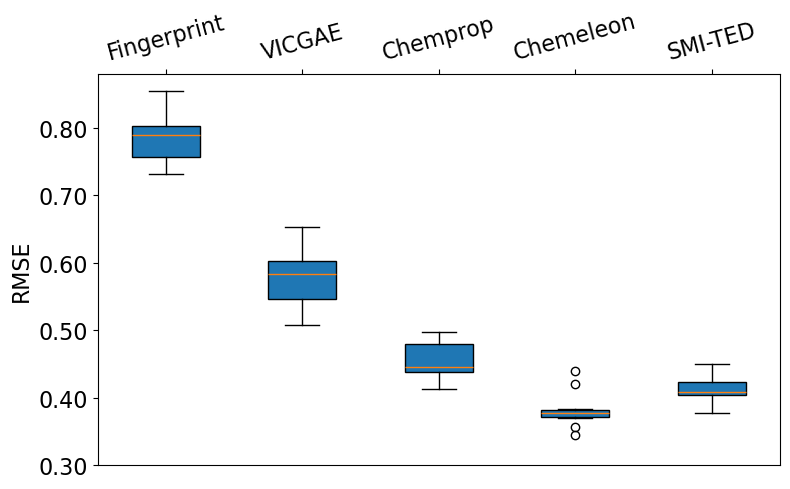

In [9]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8,5))
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.boxplot([rmse_results[name] for name in datasets.keys()],
            labels=datasets.keys(), patch_artist=True,)

plt.ylabel('RMSE', fontsize=16)
# plt.xticks(fontsize=16, rotation=15)
plt.yticks(fontsize=16)
plt.xticks(ticks=range(1, len(datasets) + 1),  fontsize=16, rotation=15)
# plt.title(f"RMSE of {n_runs} repeated runs per dataset")
plt.ylim(bottom=0.3)                  # set minimum y-limit
plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xticks(fontsize=16, rotation=15)

plt.tight_layout()

# Save at 600 dpi
plt.savefig("../../results/NN_20251031/surfactants_model_performance_NN.png", dpi=600, bbox_inches="tight")
plt.show()

In [10]:
rmse_results

{'Fingerprint': [0.8002651505351469,
  0.7831912527349854,
  0.7312195127603763,
  0.7557217179362253,
  0.8119252079099364,
  0.8547683705455861,
  0.7576456181147411,
  0.7962038542402435,
  0.8041921776264694,
  0.7385381826758876],
 'VICGAE': [0.5078290789905586,
  0.5918720059183155,
  0.5705865959037805,
  0.5870509947927974,
  0.6255619622101589,
  0.653375004644487,
  0.5382105688188601,
  0.5795921833405681,
  0.6058971981045499,
  0.5284420303340026],
 'Chemprop': [0.43733288774974055,
  0.41215287110090965,
  0.4385749009950369,
  0.44664508133420483,
  0.48107007242521976,
  0.4974239268199937,
  0.43306972007772193,
  0.49291048990325936,
  0.47519241438741167,
  0.44523139683533486],
 'Chemeleon': [0.3701597808244385,
  0.34485901403414715,
  0.37740512293516004,
  0.3834425937217876,
  0.4387847904529508,
  0.42022172734719326,
  0.3763191148892158,
  0.376436818782995,
  0.3777161026709837,
  0.3560600184105882],
 'SMI-TED': [0.4021780543192559,
  0.37763196470169913,
 